In [12]:
import pandas as pd
import geopandas as gpd
import cdsapi
import xarray as xr
from urllib.request import urlopen
import datetime
import random
import matplotlib.pyplot as plt

In [3]:
c = cdsapi.Client()

In [4]:
points_df = gpd.read_file("data/all/points_fire_no_fire_biodiversidad.geojson")
points_df

x             y    altitud  pendiente  orientacion  \
0      635421.882389  4.377432e+06  858.38650   3.307040    46.159070   
1      636866.882389  4.379702e+06  849.45123   4.176286   145.870990   
2      633301.882389  4.377547e+06  838.59500   8.920355   149.516970   
3      635496.882389  4.378912e+06  840.50930   2.810467   339.215300   
4      637216.882389  4.380737e+06  849.42580  11.864986    35.107677   
...              ...           ...        ...        ...          ...   
30005  725479.305975  4.268695e+06  531.25824  60.443610   176.078890   
30006  725909.305975  4.268665e+06  603.67773  43.613365   314.474980   
30007  722394.305975  4.261770e+06  187.02850   9.775122   326.528230   
30008  723229.305975  4.262245e+06  212.96576  13.285996   283.316440   
30009  724679.305975  4.266400e+06  406.62524  17.264864   247.309940   

       is_fire date  index_right  Poligon ORIGEN  ...  TIPOBOSQUE  n_CLAIFN  \
0        False  NaT        12626   461573  MFE50  ...           -       200   
1        False  NaT        12626   461573  MFE50  ...           -       200   
2        False  NaT        12626   461573  MFE50  ...           -       200   
3        False  NaT        12626   461573  MFE50  ...           -       200   
4        False  NaT        12626   461573  MFE50  ...           -       200   
...        ...  ...          ...      ...    ...  ...         ...       ...   
30005    False  NaT        11819   708181  MFE50  ...           -       140   
30006    False  NaT        11819   708181  MFE50  ...           -       140   
30007    False  NaT        11087   691555  MFE50  ...           -       140   
30008    False  NaT        10357   680035  MFE50  ...           -       300   
30009    False  NaT        11824   708192  MFE50  ...   Frondosas       121   

                                UsoIFN  n_CLAMFE         UsoMFE n_REGBIO  \
0                             Agrícola       200       Cultivos        4   
1                             Agrícola       200       Cultivos        4   
2                             Agrícola       200       Cultivos        4   
3                             Agrícola       200       Cultivos        4   
4                             Agrícola       200       Cultivos        4   
...                                ...       ...            ...      ...   
30005                Monte desarbolado       140    Desarbolado        4   
30006                Monte desarbolado       140    Desarbolado        4   
30007                Monte desarbolado       140    Desarbolado        4   
30008                       Artificial       300     Artificial        4   
30009  Monte con arbolado ralo. Bosque       120  Arbolado ralo        4   

             RegBio LULUCF    Shape_Area                        geometry  
0      Mediterránea    700  2.212515e+08  POINT (635421.882 4377432.085)  
1      Mediterránea    700  2.212515e+08  POINT (636866.882 4379702.085)  
2      Mediterránea    700  2.212515e+08  POINT (633301.882 4377547.085)  
3      Mediterránea    700  2.212515e+08  POINT (635496.882 4378912.085)  
4      Mediterránea    700  2.212515e+08  POINT (637216.882 4380737.085)  
...             ...    ...           ...                             ...  
30005  Mediterránea    220  2.268380e+05  POINT (725479.306 4268695.206)  
30006  Mediterránea    220  2.268380e+05  POINT (725909.306 4268665.206)  
30007  Mediterránea    220  4.135418e+05  POINT (722394.306 4261770.206)  
30008  Mediterránea    800  5.052702e+05  POINT (723229.306 4262245.206)  
30009  Mediterránea    210  4.083491e+05  POINT (724679.306 4266400.206)  

[30010 rows x 60 columns]

In [9]:
points_df.crs

<Projected CRS: EPSG:3042>
Name: ETRS89 / UTM zone 30N (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
points_df.to_crs('EPSG:4326', inplace=True)
points_df = points_df[['altitud', 'pendiente', 'orientacion', 'is_fire', 'date','TIPOBOSQUE', 'n_CLAIFN', 'UsoIFN', 'n_CLAMFE', 'UsoMFE', 'geometry']]
points_df

altitud  pendiente  orientacion  is_fire date TIPOBOSQUE  n_CLAIFN  \
0      858.38650   3.307040    46.159070    False  NaT          -       200   
1      849.45123   4.176286   145.870990    False  NaT          -       200   
2      838.59500   8.920355   149.516970    False  NaT          -       200   
3      840.50930   2.810467   339.215300    False  NaT          -       200   
4      849.42580  11.864986    35.107677    False  NaT          -       200   
...          ...        ...          ...      ...  ...        ...       ...   
30005  531.25824  60.443610   176.078890    False  NaT          -       140   
30006  603.67773  43.613365   314.474980    False  NaT          -       140   
30007  187.02850   9.775122   326.528230    False  NaT          -       140   
30008  212.96576  13.285996   283.316440    False  NaT          -       300   
30009  406.62524  17.264864   247.309940    False  NaT  Frondosas       121   

                                UsoIFN  n_CLAMFE         UsoMFE  \
0                             Agrícola       200       Cultivos   
1                             Agrícola       200       Cultivos   
2                             Agrícola       200       Cultivos   
3                             Agrícola       200       Cultivos   
4                             Agrícola       200       Cultivos   
...                                ...       ...            ...   
30005                Monte desarbolado       140    Desarbolado   
30006                Monte desarbolado       140    Desarbolado   
30007                Monte desarbolado       140    Desarbolado   
30008                       Artificial       300     Artificial   
30009  Monte con arbolado ralo. Bosque       120  Arbolado ralo   

                        geometry  
0      POINT (-1.42417 39.53588)  
1      POINT (-1.40689 39.55610)  
2      POINT (-1.44881 39.53725)  
3      POINT (-1.42300 39.54920)  
4      POINT (-1.40261 39.56536)  
...                          ...  
30005  POINT (-0.41300 38.53811)  
30006  POINT (-0.40808 38.53773)  
30007  POINT (-0.45056 38.47654)  
30008  POINT (-0.44085 38.48061)  
30009  POINT (-0.42291 38.51765)  

[30010 rows x 11 columns]

In [5]:
# Generate random date times for non-fire points
start = datetime.datetime(year=1993, month=1, day=1)
end = datetime.datetime(year=2019, month=12, day=31)

r_dates =  points_df["date"] .isnull()
dates_list = [start + datetime.timedelta(seconds=random.randint(0, int((end - start).total_seconds()))) for x in r_dates if x is True]
points_df.loc[r_dates, "date"] = dates_list


In [6]:
points_df

x             y    altitud  pendiente  orientacion  \
0      635421.882389  4.377432e+06  858.38650   3.307040    46.159070   
1      636866.882389  4.379702e+06  849.45123   4.176286   145.870990   
2      633301.882389  4.377547e+06  838.59500   8.920355   149.516970   
3      635496.882389  4.378912e+06  840.50930   2.810467   339.215300   
4      637216.882389  4.380737e+06  849.42580  11.864986    35.107677   
...              ...           ...        ...        ...          ...   
30005  725479.305975  4.268695e+06  531.25824  60.443610   176.078890   
30006  725909.305975  4.268665e+06  603.67773  43.613365   314.474980   
30007  722394.305975  4.261770e+06  187.02850   9.775122   326.528230   
30008  723229.305975  4.262245e+06  212.96576  13.285996   283.316440   
30009  724679.305975  4.266400e+06  406.62524  17.264864   247.309940   

       is_fire                date  index_right  Poligon ORIGEN  ...  \
0        False 1994-09-09 22:03:09        12626   461573  MFE50  ...   
1        False 2003-06-27 18:44:49        12626   461573  MFE50  ...   
2        False 2005-05-03 17:14:55        12626   461573  MFE50  ...   
3        False 1996-03-10 00:43:29        12626   461573  MFE50  ...   
4        False 2011-10-02 02:28:09        12626   461573  MFE50  ...   
...        ...                 ...          ...      ...    ...  ...   
30005    False 2009-05-14 03:47:09        11819   708181  MFE50  ...   
30006    False 2000-02-11 10:31:00        11819   708181  MFE50  ...   
30007    False 2000-09-03 14:51:40        11087   691555  MFE50  ...   
30008    False 2016-05-23 02:44:58        10357   680035  MFE50  ...   
30009    False 1996-06-20 23:57:30        11824   708192  MFE50  ...   

       TIPOBOSQUE  n_CLAIFN                           UsoIFN  n_CLAMFE  \
0               -       200                         Agrícola       200   
1               -       200                         Agrícola       200   
2               -       200                         Agrícola       200   
3               -       200                         Agrícola       200   
4               -       200                         Agrícola       200   
...           ...       ...                              ...       ...   
30005           -       140                Monte desarbolado       140   
30006           -       140                Monte desarbolado       140   
30007           -       140                Monte desarbolado       140   
30008           -       300                       Artificial       300   
30009   Frondosas       121  Monte con arbolado ralo. Bosque       120   

              UsoMFE n_REGBIO        RegBio LULUCF    Shape_Area  \
0           Cultivos        4  Mediterránea    700  2.212515e+08   
1           Cultivos        4  Mediterránea    700  2.212515e+08   
2           Cultivos        4  Mediterránea    700  2.212515e+08   
3           Cultivos        4  Mediterránea    700  2.212515e+08   
4           Cultivos        4  Mediterránea    700  2.212515e+08   
...              ...      ...           ...    ...           ...   
30005    Desarbolado        4  Mediterránea    220  2.268380e+05   
30006    Desarbolado        4  Mediterránea    220  2.268380e+05   
30007    Desarbolado        4  Mediterránea    220  4.135418e+05   
30008     Artificial        4  Mediterránea    800  5.052702e+05   
30009  Arbolado ralo        4  Mediterránea    210  4.083491e+05   

                             geometry  
0      POINT (635421.882 4377432.085)  
1      POINT (636866.882 4379702.085)  
2      POINT (633301.882 4377547.085)  
3      POINT (635496.882 4378912.085)  
4      POINT (637216.882 4380737.085)  
...                               ...  
30005  POINT (725479.306 4268695.206)  
30006  POINT (725909.306 4268665.206)  
30007  POINT (722394.306 4261770.206)  
30008  POINT (723229.306 4262245.206)  
30009  POINT (724679.306 4266400.206)  

[30010 rows x 60 columns]

In [7]:
# Count the number of rows with 'is_fire' == True and 'is_fire' == False
num_fire_true = points_df['is_fire'].sum()
num_fire_false = len(points_df) - num_fire_true

# Calculate the weights for sampling
weight_fire_true = 1.0 / num_fire_true
weight_fire_false = 1.0 / num_fire_false

# Assign weights based on the value of 'is_fire'
weights = points_df['is_fire'].map({True: weight_fire_true, False: weight_fire_false})

# Sample the DataFrame using the calculated weights
sampled_df = points_df.sample(n=10000, weights=weights, replace=True, ignore_index=True)

In [8]:
sampled_df

x             y    altitud   pendiente  orientacion  \
0     745266.664828  4.279703e+06  957.33000  100.911644     79.94260   
1     679209.808770  4.370319e+06  722.45900   19.075521     95.65933   
2     701325.665186  4.213515e+06    4.32325    1.358518    182.21474   
3     693093.398334  4.309871e+06  427.30850  119.772660    321.63360   
4     711871.471903  4.299092e+06  460.71423   39.978100    257.19055   
...             ...           ...        ...         ...          ...   
9995  748865.601599  4.444007e+06  334.10526   13.195167    334.12122   
9996  708126.729363  4.414928e+06  538.92676   23.665760    228.45543   
9997  766731.593218  4.458299e+06  223.10518   20.221540    159.13345   
9998  684618.888499  4.402053e+06  561.58400   24.228890     28.13506   
9999  733859.613376  4.420558e+06  400.73724   66.872480    179.33505   

      is_fire                date  index_right  Poligon ORIGEN  ...  \
0        True 1993-09-15 00:00:00        10312   679938  MFE50  ...   
1       False 2010-08-13 01:20:01        19730   686810  MFE50  ...   
2       False 2006-02-21 10:47:24        51681   655877  MFE50  ...   
3        True 1999-08-15 00:00:00        28510  1350858  MFE50  ...   
4        True 2010-09-06 00:00:00         5819   655391  MFE50  ...   
...       ...                 ...          ...      ...    ...  ...   
9995    False 2001-08-29 18:55:46        42263   669122  MFE50  ...   
9996    False 1994-09-18 06:36:21        34385   710169  MFE50  ...   
9997    False 1994-12-10 08:41:23        39319   656044  MFE50  ...   
9998    False 2018-10-18 09:11:42        14231   671795  MFE50  ...   
9999     True 2016-07-25 00:00:00        49045   703028  MFE50  ...   

      TIPOBOSQUE  n_CLAIFN                           UsoIFN  n_CLAMFE  \
0              -       141      Monte desarbolado. Matorral       140   
1              -       141      Monte desarbolado. Matorral       140   
2              -       200                         Agrícola       200   
3      Frondosas       121  Monte con arbolado ralo. Bosque       120   
4      Coníferas       111           Monte arbolado. Bosque       110   
...          ...       ...                              ...       ...   
9995           -       200                         Agrícola       200   
9996           -       200                         Agrícola       200   
9997           -       141      Monte desarbolado. Matorral       140   
9998           -       200                         Agrícola       200   
9999   Coníferas       111           Monte arbolado. Bosque       110   

             UsoMFE n_REGBIO        RegBio LULUCF    Shape_Area  \
0       Desarbolado        4  Mediterránea    220  3.088261e+07   
1       Desarbolado        4  Mediterránea    220  1.728198e+08   
2          Cultivos        4  Mediterránea    700  4.744220e+07   
3     Arbolado ralo        4  Mediterránea    210  3.463842e+05   
4          Arbolado        4  Mediterránea    121  4.153557e+05   
...             ...      ...           ...    ...           ...   
9995       Cultivos        4  Mediterránea    700  5.846296e+05   
9996       Cultivos        4  Mediterránea    700  1.361188e+06   
9997    Desarbolado        4  Mediterránea    220  4.621569e+07   
9998       Cultivos        4  Mediterránea    700  8.161103e+05   
9999       Arbolado        4  Mediterránea    121  1.871313e+05   

                            geometry  
0     POINT (745266.665 4279703.051)  
1     POINT (679209.809 4370318.995)  
2     POINT (701325.665 4213514.752)  
3     POINT (693093.398 4309871.103)  
4     POINT (711871.472 4299092.097)  
...                              ...  
9995  POINT (748865.602 4444007.120)  
9996  POINT (708126.729 4414927.613)  
9997  POINT (766731.593 4458298.957)  
9998  POINT (684618.888 4402053.054)  
9999  POINT (733859.613 4420557.541)  

[10000 rows x 60 columns]

In [9]:
incendios = gpd.read_file('data/incendios_93_19_clean.geojson')

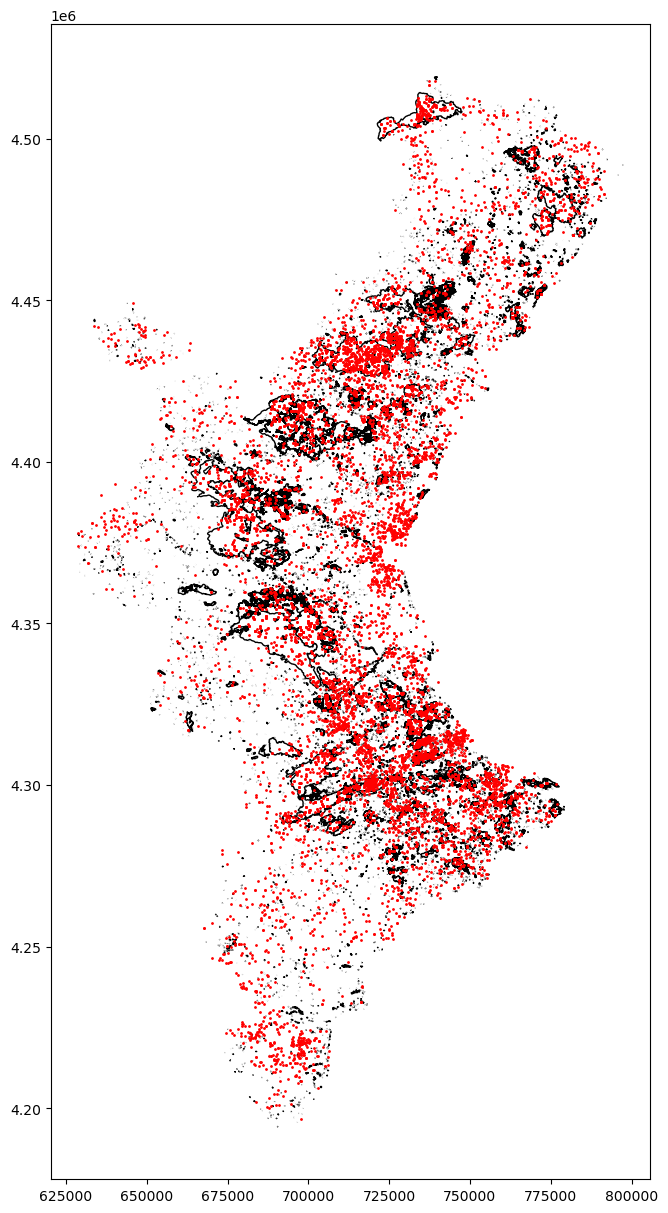

In [13]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
incendios.plot(ax=ax, color='white', edgecolor='black')
sampled_df.sample(10000).plot(ax=ax, marker='o', color='red', markersize=1, aspect=1)
plt.show()

In [85]:
sampled_df['n_CLAIFN'].unique()

array([200, 141, 111, 140, 132, 300, 121, 171, 500, 112, 161, 400, 172,
       122, 114, 150, 142, 124])

In [86]:
len(sampled_df[sampled_df['is_fire'] == True])

4996

In [87]:
# Get meteo data
dataset = 'reanalysis-era5-pressure-levels'
download_flag = False

iteration_count = 0  # Initialize iteration count

for r in sampled_df.iterrows():
    print(r[0])
    
    params = {
         'format': 'netcdf',
         'product_type': 'reanalysis',
         'variable': ['temperature', 'u_component_of_wind', 'v_component_of_wind', 'specific_humidity', 'relative_humidity'],
         'pressure_level':'1000',
         'year':str(r[1]["date"].year),
         'month':str(r[1]["date"].month),
         'day': str(r[1]["date"].day),
         'time': [str(x) for x in range(0,24)],
         'grid': [0.25, 0.25],
         'area': [r[1]["geometry"].y, r[1]["geometry"].x, r[1]["geometry"].y, r[1]["geometry"].x],
         }
     
    # Download and load into memory    
    fl = c.retrieve(dataset, params)
    if download_flag:
         fl.download("./output.nc")
         
    with urlopen(fl.location) as f:
         ds = xr.open_dataset(f.read())         
    df = ds.to_dataframe()
    # Write values of interestintopoints datafrafe
    sampled_df.loc[r[0], ["t_max", "u", "v", 'specific_humidity', 'relative_humidity']] = df['t'].max(), df['u'].mean(), df['v'].mean(), df['q'].min(), df['r'].min()

    # Increment the iteration count
    iteration_count += 1
    
    # Check if the current iteration count is a multiple of 100
    if iteration_count % 100 == 0:
        # Save the sampled_df DataFrame to a file
        filename = f"data/all/meteo/sampled_df_{iteration_count}"
        sampled_df.to_file(f"{filename}.geojson", driver='GeoJSON')
        sampled_df.to_csv(f"{filename}.csv", index=False)

0


2023-05-23 12:12:41,379 INFO Welcome to the CDS
2023-05-23 12:12:41,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:12:41,490 INFO Request is queued
2023-05-23 12:12:42,600 INFO Request is running
2023-05-23 12:12:49,906 INFO Request is completed
2023-05-23 12:12:50,207 INFO Welcome to the CDS
2023-05-23 12:12:50,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:12:50,302 INFO Request is queued


1


2023-05-23 12:12:51,352 INFO Request is running
2023-05-23 12:12:58,626 INFO Request is completed
2023-05-23 12:12:58,993 INFO Welcome to the CDS
2023-05-23 12:12:58,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:12:59,110 INFO Request is queued


2


2023-05-23 12:13:00,164 INFO Request is running
2023-05-23 12:13:07,478 INFO Request is completed
2023-05-23 12:13:07,770 INFO Welcome to the CDS
2023-05-23 12:13:07,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:13:07,879 INFO Request is queued


3


2023-05-23 12:13:08,942 INFO Request is running
2023-05-23 12:13:16,233 INFO Request is completed
2023-05-23 12:13:16,564 INFO Welcome to the CDS
2023-05-23 12:13:16,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:13:16,665 INFO Request is queued


4


2023-05-23 12:13:17,731 INFO Request is running
2023-05-23 12:13:25,017 INFO Request is completed
2023-05-23 12:13:25,326 INFO Welcome to the CDS
2023-05-23 12:13:25,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:13:25,437 INFO Request is queued


5


2023-05-23 12:13:26,494 INFO Request is running
2023-05-23 12:13:33,790 INFO Request is completed
2023-05-23 12:13:34,136 INFO Welcome to the CDS
2023-05-23 12:13:34,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:13:34,235 INFO Request is queued


6


2023-05-23 12:13:35,289 INFO Request is running
2023-05-23 12:13:42,587 INFO Request is completed
2023-05-23 12:13:43,090 INFO Welcome to the CDS
2023-05-23 12:13:43,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:13:43,203 INFO Request is queued


7


2023-05-23 12:13:44,260 INFO Request is running
2023-05-23 12:13:51,582 INFO Request is completed
2023-05-23 12:13:52,066 INFO Welcome to the CDS
2023-05-23 12:13:52,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8


2023-05-23 12:13:52,238 INFO Request is queued
2023-05-23 12:13:53,300 INFO Request is running
2023-05-23 12:14:00,609 INFO Request is completed
2023-05-23 12:14:00,978 INFO Welcome to the CDS
2023-05-23 12:14:00,980 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:14:01,084 INFO Request is queued


9


2023-05-23 12:14:02,137 INFO Request is running
2023-05-23 12:14:09,430 INFO Request is completed
2023-05-23 12:14:09,727 INFO Welcome to the CDS
2023-05-23 12:14:09,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:14:09,851 INFO Request is queued


10


2023-05-23 12:14:10,910 INFO Request is running
2023-05-23 12:14:18,201 INFO Request is completed
2023-05-23 12:14:18,699 INFO Welcome to the CDS
2023-05-23 12:14:18,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:14:18,764 INFO Request is queued


11


2023-05-23 12:14:19,833 INFO Request is running
2023-05-23 12:14:27,164 INFO Request is completed
2023-05-23 12:14:27,491 INFO Welcome to the CDS
2023-05-23 12:14:27,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:14:27,548 INFO Request is queued


12


2023-05-23 12:14:28,605 INFO Request is running
2023-05-23 12:14:35,899 INFO Request is completed
2023-05-23 12:14:36,191 INFO Welcome to the CDS
2023-05-23 12:14:36,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:14:36,265 INFO Request is queued


13


2023-05-23 12:14:37,331 INFO Request is running
2023-05-23 12:14:44,636 INFO Request is completed
2023-05-23 12:14:44,955 INFO Welcome to the CDS
2023-05-23 12:14:44,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:14:45,070 INFO Request is queued


14


2023-05-23 12:14:46,282 INFO Request is running
2023-05-23 12:14:53,587 INFO Request is completed
2023-05-23 12:14:53,896 INFO Welcome to the CDS
2023-05-23 12:14:53,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:14:54,004 INFO Request is queued


15


2023-05-23 12:14:55,069 INFO Request is running
2023-05-23 12:15:02,368 INFO Request is completed
2023-05-23 12:15:02,676 INFO Welcome to the CDS
2023-05-23 12:15:02,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:15:02,747 INFO Request is queued


16


2023-05-23 12:15:03,831 INFO Request is running
2023-05-23 12:15:11,176 INFO Request is completed
2023-05-23 12:15:11,624 INFO Welcome to the CDS
2023-05-23 12:15:11,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


17


2023-05-23 12:15:11,780 INFO Request is queued
2023-05-23 12:15:12,855 INFO Request is running
2023-05-23 12:15:20,189 INFO Request is completed
2023-05-23 12:15:20,600 INFO Welcome to the CDS
2023-05-23 12:15:20,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:15:20,693 INFO Request is queued


18


2023-05-23 12:15:21,773 INFO Request is running
2023-05-23 12:15:29,112 INFO Request is completed
2023-05-23 12:15:29,462 INFO Welcome to the CDS
2023-05-23 12:15:29,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:15:29,584 INFO Request is queued


19


2023-05-23 12:15:30,640 INFO Request is running
2023-05-23 12:15:38,319 INFO Request is completed


20


2023-05-23 12:15:39,312 INFO Welcome to the CDS
2023-05-23 12:15:39,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:15:39,381 INFO Request is queued
2023-05-23 12:15:40,441 INFO Request is running
2023-05-23 12:15:47,763 INFO Request is completed
2023-05-23 12:15:48,120 INFO Welcome to the CDS
2023-05-23 12:15:48,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


21


2023-05-23 12:15:48,265 INFO Request is queued
2023-05-23 12:15:49,351 INFO Request is running
2023-05-23 12:15:56,687 INFO Request is completed
2023-05-23 12:15:57,131 INFO Welcome to the CDS
2023-05-23 12:15:57,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:15:57,281 INFO Request is queued


22


2023-05-23 12:15:58,389 INFO Request is running
2023-05-23 12:16:05,725 INFO Request is completed
2023-05-23 12:16:06,066 INFO Welcome to the CDS
2023-05-23 12:16:06,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:16:06,215 INFO Request is queued


23


2023-05-23 12:16:07,287 INFO Request is running
2023-05-23 12:16:14,623 INFO Request is completed
2023-05-23 12:16:15,011 INFO Welcome to the CDS
2023-05-23 12:16:15,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:16:15,114 INFO Request is queued


24


2023-05-23 12:16:16,202 INFO Request is running
2023-05-23 12:16:23,528 INFO Request is completed
2023-05-23 12:16:23,885 INFO Welcome to the CDS
2023-05-23 12:16:23,886 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


25


2023-05-23 12:16:24,059 INFO Request is queued
2023-05-23 12:16:25,126 INFO Request is running
2023-05-23 12:16:32,481 INFO Request is completed
2023-05-23 12:16:33,020 INFO Welcome to the CDS
2023-05-23 12:16:33,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:16:33,113 INFO Request is queued


26


2023-05-23 12:16:34,171 INFO Request is running
2023-05-23 12:16:41,480 INFO Request is completed
2023-05-23 12:16:41,816 INFO Welcome to the CDS
2023-05-23 12:16:41,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:16:41,907 INFO Request is queued


27


2023-05-23 12:16:43,467 INFO Request is running
2023-05-23 12:16:50,771 INFO Request is completed
2023-05-23 12:16:51,106 INFO Welcome to the CDS
2023-05-23 12:16:51,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:16:51,203 INFO Request is queued


28


2023-05-23 12:16:52,267 INFO Request is running
2023-05-23 12:16:59,815 INFO Request is completed
2023-05-23 12:17:00,228 INFO Welcome to the CDS
2023-05-23 12:17:00,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:17:00,314 INFO Request is queued


29


2023-05-23 12:17:01,369 INFO Request is running
2023-05-23 12:17:08,694 INFO Request is completed
2023-05-23 12:17:09,072 INFO Welcome to the CDS
2023-05-23 12:17:09,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:17:09,168 INFO Request is queued


30


2023-05-23 12:17:10,240 INFO Request is running
2023-05-23 12:17:17,572 INFO Request is completed
2023-05-23 12:17:18,188 INFO Welcome to the CDS
2023-05-23 12:17:18,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:17:18,281 INFO Request is queued


31


2023-05-23 12:17:19,368 INFO Request is running
2023-05-23 12:17:26,750 INFO Request is completed
2023-05-23 12:17:27,077 INFO Welcome to the CDS
2023-05-23 12:17:27,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:17:27,186 INFO Request is queued


32


2023-05-23 12:17:28,288 INFO Request is running
2023-05-23 12:17:35,650 INFO Request is completed
2023-05-23 12:17:36,006 INFO Welcome to the CDS
2023-05-23 12:17:36,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:17:36,102 INFO Request is queued


33


2023-05-23 12:17:37,176 INFO Request is running
2023-05-23 12:17:44,485 INFO Request is completed
2023-05-23 12:17:44,824 INFO Welcome to the CDS
2023-05-23 12:17:44,826 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:17:44,942 INFO Request is queued


34


2023-05-23 12:17:46,016 INFO Request is running
2023-05-23 12:17:53,372 INFO Request is completed
2023-05-23 12:17:53,702 INFO Welcome to the CDS
2023-05-23 12:17:53,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:17:53,797 INFO Request is queued


35


2023-05-23 12:17:54,879 INFO Request is running
2023-05-23 12:18:02,487 INFO Request is completed
2023-05-23 12:18:03,063 INFO Welcome to the CDS
2023-05-23 12:18:03,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


36


2023-05-23 12:18:03,217 INFO Request is queued
2023-05-23 12:18:04,329 INFO Request is running
2023-05-23 12:18:11,713 INFO Request is completed
2023-05-23 12:18:12,106 INFO Welcome to the CDS
2023-05-23 12:18:12,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:18:12,238 INFO Request is queued


37


2023-05-23 12:18:13,306 INFO Request is running
2023-05-23 12:18:20,632 INFO Request is completed
2023-05-23 12:18:21,002 INFO Welcome to the CDS
2023-05-23 12:18:21,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


38


2023-05-23 12:18:21,179 INFO Request is queued
2023-05-23 12:18:22,245 INFO Request is running
2023-05-23 12:18:29,601 INFO Request is completed
2023-05-23 12:18:30,132 INFO Welcome to the CDS
2023-05-23 12:18:30,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:18:30,249 INFO Request is queued


39


2023-05-23 12:18:31,318 INFO Request is running
2023-05-23 12:18:38,632 INFO Request is completed
2023-05-23 12:18:39,038 INFO Welcome to the CDS
2023-05-23 12:18:39,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:18:39,120 INFO Request is queued


40


2023-05-23 12:18:40,179 INFO Request is running
2023-05-23 12:18:47,530 INFO Request is completed
2023-05-23 12:18:47,900 INFO Welcome to the CDS
2023-05-23 12:18:47,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:18:48,036 INFO Request is queued


41


2023-05-23 12:18:49,115 INFO Request is running
2023-05-23 12:18:56,459 INFO Request is completed
2023-05-23 12:18:56,813 INFO Welcome to the CDS
2023-05-23 12:18:56,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:18:56,889 INFO Request is queued


42


2023-05-23 12:18:57,974 INFO Request is running
2023-05-23 12:19:05,344 INFO Request is completed
2023-05-23 12:19:05,916 INFO Welcome to the CDS
2023-05-23 12:19:05,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:19:05,978 INFO Request is queued


43


2023-05-23 12:19:07,034 INFO Request is running
2023-05-23 12:19:14,382 INFO Request is completed
2023-05-23 12:19:14,717 INFO Welcome to the CDS
2023-05-23 12:19:14,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:19:14,811 INFO Request is queued


44


2023-05-23 12:19:15,882 INFO Request is running
2023-05-23 12:19:23,213 INFO Request is completed
2023-05-23 12:19:23,589 INFO Welcome to the CDS
2023-05-23 12:19:23,589 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:19:23,646 INFO Request is queued


45


2023-05-23 12:19:24,711 INFO Request is running
2023-05-23 12:19:32,066 INFO Request is completed
2023-05-23 12:19:32,410 INFO Welcome to the CDS
2023-05-23 12:19:32,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:19:32,479 INFO Request is queued


46


2023-05-23 12:19:33,549 INFO Request is running
2023-05-23 12:19:40,871 INFO Request is completed
2023-05-23 12:19:41,212 INFO Welcome to the CDS
2023-05-23 12:19:41,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:19:41,329 INFO Request is queued


47


2023-05-23 12:19:42,394 INFO Request is running
2023-05-23 12:19:49,744 INFO Request is completed
2023-05-23 12:19:50,148 INFO Welcome to the CDS
2023-05-23 12:19:50,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:19:50,260 INFO Request is queued


48


2023-05-23 12:19:51,318 INFO Request is running
2023-05-23 12:19:58,653 INFO Request is completed
2023-05-23 12:19:58,979 INFO Welcome to the CDS
2023-05-23 12:19:58,980 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:19:59,036 INFO Request is queued


49


2023-05-23 12:20:00,113 INFO Request is running
2023-05-23 12:20:07,431 INFO Request is completed
2023-05-23 12:20:07,926 INFO Welcome to the CDS
2023-05-23 12:20:07,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


50


2023-05-23 12:20:08,087 INFO Request is queued
2023-05-23 12:20:09,162 INFO Request is running
2023-05-23 12:20:16,467 INFO Request is completed
2023-05-23 12:20:16,812 INFO Welcome to the CDS
2023-05-23 12:20:16,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:20:16,922 INFO Request is queued


51


2023-05-23 12:20:17,977 INFO Request is running
2023-05-23 12:20:25,290 INFO Request is completed
2023-05-23 12:20:25,622 INFO Welcome to the CDS
2023-05-23 12:20:25,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


52


2023-05-23 12:20:25,806 INFO Request is queued
2023-05-23 12:20:26,876 INFO Request is running
2023-05-23 12:20:34,202 INFO Request is completed
2023-05-23 12:20:34,591 INFO Welcome to the CDS
2023-05-23 12:20:34,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


53


2023-05-23 12:20:35,103 INFO Request is queued
2023-05-23 12:20:36,171 INFO Request is running
2023-05-23 12:20:43,476 INFO Request is completed
2023-05-23 12:20:44,063 INFO Welcome to the CDS
2023-05-23 12:20:44,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:20:44,165 INFO Request is queued


54


2023-05-23 12:20:45,232 INFO Request is running
2023-05-23 12:20:52,553 INFO Request is completed
2023-05-23 12:20:52,888 INFO Welcome to the CDS
2023-05-23 12:20:52,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:20:53,027 INFO Request is queued


55


2023-05-23 12:20:54,087 INFO Request is running
2023-05-23 12:21:01,421 INFO Request is completed
2023-05-23 12:21:01,816 INFO Welcome to the CDS
2023-05-23 12:21:01,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:21:01,905 INFO Request is queued


56


2023-05-23 12:21:02,993 INFO Request is running
2023-05-23 12:21:10,333 INFO Request is completed
2023-05-23 12:21:10,813 INFO Welcome to the CDS
2023-05-23 12:21:10,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


57


2023-05-23 12:21:11,054 INFO Request is queued
2023-05-23 12:21:12,120 INFO Request is running
2023-05-23 12:21:19,438 INFO Request is completed


58


2023-05-23 12:21:20,278 INFO Welcome to the CDS
2023-05-23 12:21:20,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:21:20,355 INFO Request is queued
2023-05-23 12:21:21,408 INFO Request is running
2023-05-23 12:21:28,745 INFO Request is completed
2023-05-23 12:21:29,074 INFO Welcome to the CDS
2023-05-23 12:21:29,075 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


59


2023-05-23 12:21:29,256 INFO Request is queued
2023-05-23 12:21:30,320 INFO Request is running
2023-05-23 12:21:37,711 INFO Request is completed
2023-05-23 12:21:38,067 INFO Welcome to the CDS
2023-05-23 12:21:38,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:21:38,192 INFO Request is queued


60


2023-05-23 12:21:39,271 INFO Request is running
2023-05-23 12:21:46,632 INFO Request is completed
2023-05-23 12:21:47,001 INFO Welcome to the CDS
2023-05-23 12:21:47,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:21:47,101 INFO Request is queued


61


2023-05-23 12:21:48,167 INFO Request is running
2023-05-23 12:21:52,071 INFO Request is completed
2023-05-23 12:21:52,392 INFO Welcome to the CDS
2023-05-23 12:21:52,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


62


2023-05-23 12:21:52,618 INFO Request is queued
2023-05-23 12:21:53,680 INFO Request is running
2023-05-23 12:22:01,034 INFO Request is completed
2023-05-23 12:22:01,387 INFO Welcome to the CDS
2023-05-23 12:22:01,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:22:01,474 INFO Request is queued


63


2023-05-23 12:22:02,548 INFO Request is running
2023-05-23 12:22:10,125 INFO Request is completed


64


2023-05-23 12:22:10,703 INFO Welcome to the CDS
2023-05-23 12:22:10,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:22:10,826 INFO Request is queued
2023-05-23 12:22:11,916 INFO Request is running
2023-05-23 12:22:19,259 INFO Request is completed
2023-05-23 12:22:19,612 INFO Welcome to the CDS
2023-05-23 12:22:19,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:22:19,693 INFO Request is queued


65


2023-05-23 12:22:21,002 INFO Request is running
2023-05-23 12:22:28,368 INFO Request is completed
2023-05-23 12:22:28,694 INFO Welcome to the CDS
2023-05-23 12:22:28,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:22:28,764 INFO Request is queued


66


2023-05-23 12:22:29,832 INFO Request is running
2023-05-23 12:22:37,168 INFO Request is completed
2023-05-23 12:22:37,496 INFO Welcome to the CDS
2023-05-23 12:22:37,498 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:22:37,575 INFO Request is queued


67


2023-05-23 12:22:38,643 INFO Request is running
2023-05-23 12:22:46,001 INFO Request is completed
2023-05-23 12:22:46,323 INFO Welcome to the CDS
2023-05-23 12:22:46,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:22:46,425 INFO Request is queued


68


2023-05-23 12:22:47,483 INFO Request is running
2023-05-23 12:22:54,842 INFO Request is completed
2023-05-23 12:22:55,164 INFO Welcome to the CDS
2023-05-23 12:22:55,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:22:55,263 INFO Request is queued


69


2023-05-23 12:22:56,331 INFO Request is running
2023-05-23 12:23:03,670 INFO Request is completed
2023-05-23 12:23:04,303 INFO Welcome to the CDS
2023-05-23 12:23:04,304 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:23:04,397 INFO Request is queued


70


2023-05-23 12:23:05,483 INFO Request is running
2023-05-23 12:23:12,852 INFO Request is completed
2023-05-23 12:23:13,203 INFO Welcome to the CDS
2023-05-23 12:23:13,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:23:13,318 INFO Request is queued


71


2023-05-23 12:23:14,384 INFO Request is running
2023-05-23 12:23:21,868 INFO Request is completed
2023-05-23 12:23:22,216 INFO Welcome to the CDS
2023-05-23 12:23:22,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:23:22,304 INFO Request is queued


72


2023-05-23 12:23:23,368 INFO Request is running
2023-05-23 12:23:30,958 INFO Request is completed
2023-05-23 12:23:31,299 INFO Welcome to the CDS
2023-05-23 12:23:31,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:23:31,392 INFO Request is queued


73


2023-05-23 12:23:32,479 INFO Request is running
2023-05-23 12:23:40,076 INFO Request is completed
2023-05-23 12:23:40,448 INFO Welcome to the CDS
2023-05-23 12:23:40,449 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:23:40,546 INFO Request is queued


74


2023-05-23 12:23:41,608 INFO Request is running
2023-05-23 12:23:48,946 INFO Request is completed
2023-05-23 12:23:49,265 INFO Welcome to the CDS
2023-05-23 12:23:49,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:23:49,325 INFO Request is queued


75


2023-05-23 12:23:50,383 INFO Request is running
2023-05-23 12:23:57,708 INFO Request is completed
2023-05-23 12:23:58,070 INFO Welcome to the CDS
2023-05-23 12:23:58,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


76


2023-05-23 12:23:58,226 INFO Request is queued
2023-05-23 12:23:59,305 INFO Request is running
2023-05-23 12:24:06,637 INFO Request is completed
2023-05-23 12:24:06,968 INFO Welcome to the CDS
2023-05-23 12:24:06,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:24:07,025 INFO Request is queued


77


2023-05-23 12:24:08,087 INFO Request is running
2023-05-23 12:24:15,419 INFO Request is completed
2023-05-23 12:24:15,801 INFO Welcome to the CDS
2023-05-23 12:24:15,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:24:15,891 INFO Request is queued


78


2023-05-23 12:24:16,954 INFO Request is running
2023-05-23 12:24:24,277 INFO Request is completed
2023-05-23 12:24:24,623 INFO Welcome to the CDS
2023-05-23 12:24:24,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


79


2023-05-23 12:24:24,886 INFO Request is queued
2023-05-23 12:24:25,943 INFO Request is running
2023-05-23 12:24:33,264 INFO Request is completed
2023-05-23 12:24:33,603 INFO Welcome to the CDS
2023-05-23 12:24:33,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


80


2023-05-23 12:24:33,846 INFO Request is queued
2023-05-23 12:24:34,901 INFO Request is running
2023-05-23 12:24:42,227 INFO Request is completed
2023-05-23 12:24:42,562 INFO Welcome to the CDS
2023-05-23 12:24:42,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


81


2023-05-23 12:24:42,746 INFO Request is queued
2023-05-23 12:24:43,807 INFO Request is running
2023-05-23 12:24:51,103 INFO Request is completed
2023-05-23 12:24:51,544 INFO Welcome to the CDS
2023-05-23 12:24:51,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:24:51,625 INFO Request is queued


82


2023-05-23 12:24:52,685 INFO Request is running
2023-05-23 12:25:00,019 INFO Request is completed
2023-05-23 12:25:00,369 INFO Welcome to the CDS
2023-05-23 12:25:00,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:25:00,461 INFO Request is queued


83


2023-05-23 12:25:01,519 INFO Request is running
2023-05-23 12:25:08,827 INFO Request is completed
2023-05-23 12:25:09,237 INFO Welcome to the CDS
2023-05-23 12:25:09,237 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:25:09,336 INFO Request is queued


84


2023-05-23 12:25:10,391 INFO Request is running
2023-05-23 12:25:18,230 INFO Request is completed


85


2023-05-23 12:25:19,254 INFO Welcome to the CDS
2023-05-23 12:25:19,268 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:25:19,365 INFO Request is queued
2023-05-23 12:25:20,502 INFO Request is running
2023-05-23 12:25:25,249 INFO Request is completed


86


2023-05-23 12:25:26,519 INFO Welcome to the CDS
2023-05-23 12:25:26,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:25:27,336 INFO Request is queued
2023-05-23 12:25:28,454 INFO Request is running
2023-05-23 12:25:35,829 INFO Request is completed
2023-05-23 12:25:36,223 INFO Welcome to the CDS
2023-05-23 12:25:36,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:25:36,329 INFO Request is queued


87


2023-05-23 12:25:37,386 INFO Request is running
2023-05-23 12:25:44,733 INFO Request is completed
2023-05-23 12:25:45,111 INFO Welcome to the CDS
2023-05-23 12:25:45,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


88


2023-05-23 12:25:45,472 INFO Request is queued
2023-05-23 12:25:46,535 INFO Request is running
2023-05-23 12:25:53,876 INFO Request is completed
2023-05-23 12:25:54,204 INFO Welcome to the CDS
2023-05-23 12:25:54,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:25:54,306 INFO Request is queued


89


2023-05-23 12:25:55,374 INFO Request is running
2023-05-23 12:26:02,702 INFO Request is completed
2023-05-23 12:26:03,012 INFO Welcome to the CDS
2023-05-23 12:26:03,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:26:03,070 INFO Request is queued


90


2023-05-23 12:26:04,138 INFO Request is running
2023-05-23 12:26:11,716 INFO Request is completed
2023-05-23 12:26:12,049 INFO Welcome to the CDS
2023-05-23 12:26:12,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:26:12,134 INFO Request is queued


91


2023-05-23 12:26:13,204 INFO Request is running
2023-05-23 12:26:20,522 INFO Request is completed
2023-05-23 12:26:20,910 INFO Welcome to the CDS
2023-05-23 12:26:20,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:26:21,006 INFO Request is queued


92


2023-05-23 12:26:22,081 INFO Request is running
2023-05-23 12:26:29,402 INFO Request is completed
2023-05-23 12:26:30,802 INFO Welcome to the CDS
2023-05-23 12:26:30,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:26:30,914 INFO Request is queued


93


2023-05-23 12:26:31,981 INFO Request is running
2023-05-23 12:26:39,320 INFO Request is completed
2023-05-23 12:26:39,758 INFO Welcome to the CDS
2023-05-23 12:26:39,759 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:26:39,856 INFO Request is queued


94


2023-05-23 12:26:41,180 INFO Request is running
2023-05-23 12:26:48,509 INFO Request is completed
2023-05-23 12:26:48,826 INFO Welcome to the CDS
2023-05-23 12:26:48,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:26:48,928 INFO Request is queued


95


2023-05-23 12:26:49,991 INFO Request is running
2023-05-23 12:26:57,314 INFO Request is completed
2023-05-23 12:26:57,657 INFO Welcome to the CDS
2023-05-23 12:26:57,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:26:57,803 INFO Request is queued


96


2023-05-23 12:26:58,874 INFO Request is running
2023-05-23 12:27:06,180 INFO Request is completed
2023-05-23 12:27:06,534 INFO Welcome to the CDS
2023-05-23 12:27:06,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:27:06,609 INFO Request is queued


97


2023-05-23 12:27:07,676 INFO Request is running
2023-05-23 12:27:15,002 INFO Request is completed
2023-05-23 12:27:15,320 INFO Welcome to the CDS
2023-05-23 12:27:15,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


98


2023-05-23 12:27:15,476 INFO Request is queued
2023-05-23 12:27:16,557 INFO Request is running
2023-05-23 12:27:23,868 INFO Request is completed
2023-05-23 12:27:24,210 INFO Welcome to the CDS
2023-05-23 12:27:24,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:27:24,280 INFO Request is queued


99


2023-05-23 12:27:25,352 INFO Request is running
2023-05-23 12:27:32,685 INFO Request is completed
2023-05-23 12:27:34,471 INFO Welcome to the CDS
2023-05-23 12:27:34,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


100


2023-05-23 12:27:34,653 INFO Request is queued
2023-05-23 12:27:35,851 INFO Request is running
2023-05-23 12:27:43,171 INFO Request is completed
2023-05-23 12:27:43,484 INFO Welcome to the CDS
2023-05-23 12:27:43,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:27:43,600 INFO Request is queued


101


2023-05-23 12:27:44,661 INFO Request is running
2023-05-23 12:28:59,067 INFO Request is completed
2023-05-23 12:28:59,422 INFO Welcome to the CDS
2023-05-23 12:28:59,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:28:59,521 INFO Request is queued


102


2023-05-23 12:29:00,586 INFO Request is running
2023-05-23 12:29:07,907 INFO Request is completed
2023-05-23 12:29:08,237 INFO Welcome to the CDS
2023-05-23 12:29:08,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:29:08,317 INFO Request is queued


103


2023-05-23 12:29:09,413 INFO Request is running
2023-05-23 12:29:16,755 INFO Request is completed
2023-05-23 12:29:17,102 INFO Welcome to the CDS
2023-05-23 12:29:17,104 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


104


2023-05-23 12:29:17,468 INFO Request is queued
2023-05-23 12:29:18,521 INFO Request is running
2023-05-23 12:29:25,824 INFO Request is completed
2023-05-23 12:29:26,147 INFO Welcome to the CDS
2023-05-23 12:29:26,150 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:29:26,253 INFO Request is queued


105


2023-05-23 12:29:27,323 INFO Request is running
2023-05-23 12:29:34,639 INFO Request is completed
2023-05-23 12:29:34,951 INFO Welcome to the CDS
2023-05-23 12:29:34,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:29:35,037 INFO Request is queued


106


2023-05-23 12:29:36,107 INFO Request is running
2023-05-23 12:29:48,594 INFO Request is completed
2023-05-23 12:29:48,950 INFO Welcome to the CDS
2023-05-23 12:29:48,951 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:29:49,008 INFO Request is queued


107


2023-05-23 12:29:50,062 INFO Request is running
2023-05-23 12:29:57,394 INFO Request is completed
2023-05-23 12:29:57,795 INFO Welcome to the CDS
2023-05-23 12:29:57,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:29:57,882 INFO Request is queued


108


2023-05-23 12:29:58,961 INFO Request is running
2023-05-23 12:30:06,327 INFO Request is completed
2023-05-23 12:30:06,676 INFO Welcome to the CDS
2023-05-23 12:30:06,677 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


109


2023-05-23 12:30:06,993 INFO Request is queued
2023-05-23 12:30:08,056 INFO Request is running
2023-05-23 12:30:15,422 INFO Request is completed
2023-05-23 12:30:16,024 INFO Welcome to the CDS
2023-05-23 12:30:16,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:30:16,147 INFO Request is queued


110


2023-05-23 12:30:17,214 INFO Request is running
2023-05-23 12:30:24,515 INFO Request is completed
2023-05-23 12:30:24,850 INFO Welcome to the CDS
2023-05-23 12:30:24,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:30:24,931 INFO Request is queued


111


2023-05-23 12:30:25,999 INFO Request is running
2023-05-23 12:30:33,316 INFO Request is completed
2023-05-23 12:30:33,642 INFO Welcome to the CDS
2023-05-23 12:30:33,643 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:30:33,726 INFO Request is queued


112


2023-05-23 12:30:34,799 INFO Request is running
2023-05-23 12:30:42,111 INFO Request is completed
2023-05-23 12:30:42,427 INFO Welcome to the CDS
2023-05-23 12:30:42,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


113


2023-05-23 12:30:42,804 INFO Request is queued
2023-05-23 12:30:43,878 INFO Request is running
2023-05-23 12:30:51,378 INFO Request is completed


114


2023-05-23 12:30:51,957 INFO Welcome to the CDS
2023-05-23 12:30:51,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:30:52,033 INFO Request is queued
2023-05-23 12:30:53,100 INFO Request is running
2023-05-23 12:31:00,428 INFO Request is completed
2023-05-23 12:31:00,787 INFO Welcome to the CDS
2023-05-23 12:31:00,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:31:00,867 INFO Request is queued


115


2023-05-23 12:31:01,939 INFO Request is running
2023-05-23 12:31:09,265 INFO Request is completed
2023-05-23 12:31:09,617 INFO Welcome to the CDS
2023-05-23 12:31:09,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:31:09,695 INFO Request is queued


116


2023-05-23 12:31:10,748 INFO Request is running
2023-05-23 12:31:18,072 INFO Request is completed
2023-05-23 12:31:18,420 INFO Welcome to the CDS
2023-05-23 12:31:18,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:31:18,498 INFO Request is queued


117


2023-05-23 12:31:21,123 INFO Request is running
2023-05-23 12:31:26,874 INFO Request is completed
2023-05-23 12:31:27,307 INFO Welcome to the CDS
2023-05-23 12:31:27,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:31:27,388 INFO Request is queued


118


2023-05-23 12:31:28,451 INFO Request is running
2023-05-23 12:31:35,792 INFO Request is completed
2023-05-23 12:31:36,118 INFO Welcome to the CDS
2023-05-23 12:31:36,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:31:36,237 INFO Request is queued


119


2023-05-23 12:31:37,300 INFO Request is running
2023-05-23 12:31:44,607 INFO Request is completed
2023-05-23 12:31:44,937 INFO Welcome to the CDS
2023-05-23 12:31:44,938 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:31:45,029 INFO Request is queued


120


2023-05-23 12:31:46,093 INFO Request is running
2023-05-23 12:31:53,403 INFO Request is completed
2023-05-23 12:31:53,756 INFO Welcome to the CDS
2023-05-23 12:31:53,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:31:53,856 INFO Request is queued


121


2023-05-23 12:31:54,914 INFO Request is running
2023-05-23 12:32:02,248 INFO Request is completed
2023-05-23 12:32:03,622 INFO Welcome to the CDS
2023-05-23 12:32:03,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:32:03,734 INFO Request is queued


122


2023-05-23 12:32:04,793 INFO Request is running
2023-05-23 12:32:12,108 INFO Request is completed
2023-05-23 12:32:12,451 INFO Welcome to the CDS
2023-05-23 12:32:12,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:32:12,555 INFO Request is queued


123


2023-05-23 12:32:13,621 INFO Request is running
2023-05-23 12:32:21,170 INFO Request is completed
2023-05-23 12:32:21,630 INFO Welcome to the CDS
2023-05-23 12:32:21,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:32:21,725 INFO Request is queued


124


2023-05-23 12:32:22,801 INFO Request is running
2023-05-23 12:32:30,127 INFO Request is completed
2023-05-23 12:32:30,492 INFO Welcome to the CDS
2023-05-23 12:32:30,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:32:30,595 INFO Request is queued


125


2023-05-23 12:32:31,662 INFO Request is running
2023-05-23 12:32:38,974 INFO Request is completed
2023-05-23 12:32:39,336 INFO Welcome to the CDS
2023-05-23 12:32:39,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:32:39,441 INFO Request is queued


126


2023-05-23 12:32:40,499 INFO Request is running
2023-05-23 12:32:47,811 INFO Request is completed
2023-05-23 12:32:48,418 INFO Welcome to the CDS
2023-05-23 12:32:48,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:32:48,475 INFO Request is queued


127


2023-05-23 12:32:49,529 INFO Request is running
2023-05-23 12:32:56,890 INFO Request is completed


128


2023-05-23 12:32:57,543 INFO Welcome to the CDS
2023-05-23 12:32:57,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:32:58,112 INFO Request is queued
2023-05-23 12:32:59,174 INFO Request is running
2023-05-23 12:33:06,490 INFO Request is completed
2023-05-23 12:33:07,875 INFO Welcome to the CDS
2023-05-23 12:33:07,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:33:07,959 INFO Request is queued


129


2023-05-23 12:33:09,036 INFO Request is running
2023-05-23 12:33:16,413 INFO Request is completed
2023-05-23 12:33:16,818 INFO Welcome to the CDS
2023-05-23 12:33:16,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:33:16,920 INFO Request is queued


130


2023-05-23 12:33:17,973 INFO Request is running
2023-05-23 12:33:25,538 INFO Request is completed
2023-05-23 12:33:25,838 INFO Welcome to the CDS
2023-05-23 12:33:25,839 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:33:25,962 INFO Request is queued


131


2023-05-23 12:33:27,025 INFO Request is running
2023-05-23 12:33:34,361 INFO Request is completed
2023-05-23 12:33:34,739 INFO Welcome to the CDS
2023-05-23 12:33:34,741 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:33:34,816 INFO Request is queued


132


2023-05-23 12:33:35,876 INFO Request is running
2023-05-23 12:33:43,200 INFO Request is completed
2023-05-23 12:33:43,683 INFO Welcome to the CDS
2023-05-23 12:33:43,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:33:43,785 INFO Request is queued


133


2023-05-23 12:33:44,850 INFO Request is running
2023-05-23 12:33:52,424 INFO Request is completed
2023-05-23 12:33:52,851 INFO Welcome to the CDS
2023-05-23 12:33:52,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:33:52,961 INFO Request is queued


134


2023-05-23 12:33:54,023 INFO Request is running
2023-05-23 12:34:01,382 INFO Request is completed
2023-05-23 12:34:01,730 INFO Welcome to the CDS
2023-05-23 12:34:01,733 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:34:01,840 INFO Request is queued


135


2023-05-23 12:34:02,935 INFO Request is running
2023-05-23 12:34:10,301 INFO Request is completed
2023-05-23 12:34:10,628 INFO Welcome to the CDS
2023-05-23 12:34:10,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:34:10,710 INFO Request is queued


136


2023-05-23 12:34:11,776 INFO Request is running
2023-05-23 12:34:19,094 INFO Request is completed
2023-05-23 12:34:19,443 INFO Welcome to the CDS
2023-05-23 12:34:19,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:34:19,523 INFO Request is queued


137


2023-05-23 12:34:20,599 INFO Request is running
2023-05-23 12:34:27,937 INFO Request is completed
2023-05-23 12:34:28,306 INFO Welcome to the CDS
2023-05-23 12:34:28,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:34:28,386 INFO Request is queued


138


2023-05-23 12:34:29,465 INFO Request is running
2023-05-23 12:34:36,792 INFO Request is completed


139


2023-05-23 12:34:37,394 INFO Welcome to the CDS
2023-05-23 12:34:37,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:34:37,475 INFO Request is queued
2023-05-23 12:34:38,563 INFO Request is running
2023-05-23 12:34:45,898 INFO Request is completed
2023-05-23 12:34:46,222 INFO Welcome to the CDS
2023-05-23 12:34:46,222 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:34:46,323 INFO Request is queued


140


2023-05-23 12:34:47,393 INFO Request is running
2023-05-23 12:34:54,737 INFO Request is completed
2023-05-23 12:34:55,141 INFO Welcome to the CDS
2023-05-23 12:34:55,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:34:55,231 INFO Request is queued


141


2023-05-23 12:34:56,295 INFO Request is running
2023-05-23 12:35:03,613 INFO Request is completed
2023-05-23 12:35:03,952 INFO Welcome to the CDS
2023-05-23 12:35:03,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:35:04,037 INFO Request is queued


142


2023-05-23 12:35:05,314 INFO Request is running
2023-05-23 12:35:12,652 INFO Request is completed
2023-05-23 12:35:13,991 INFO Welcome to the CDS
2023-05-23 12:35:13,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:35:14,109 INFO Request is queued


143


2023-05-23 12:35:15,171 INFO Request is running
2023-05-23 12:35:22,502 INFO Request is completed
2023-05-23 12:35:22,980 INFO Welcome to the CDS
2023-05-23 12:35:22,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:35:23,099 INFO Request is queued


144


2023-05-23 12:35:24,175 INFO Request is running
2023-05-23 12:35:31,514 INFO Request is completed
2023-05-23 12:35:31,840 INFO Welcome to the CDS
2023-05-23 12:35:31,841 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


145


2023-05-23 12:35:32,177 INFO Request is queued
2023-05-23 12:35:33,239 INFO Request is running
2023-05-23 12:35:40,558 INFO Request is completed
2023-05-23 12:35:40,887 INFO Welcome to the CDS
2023-05-23 12:35:40,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:35:40,968 INFO Request is queued


146


2023-05-23 12:35:42,070 INFO Request is running
2023-05-23 12:35:49,428 INFO Request is completed
2023-05-23 12:35:49,745 INFO Welcome to the CDS
2023-05-23 12:35:49,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:35:49,838 INFO Request is queued


147


2023-05-23 12:35:50,899 INFO Request is running
2023-05-23 12:35:58,255 INFO Request is completed
2023-05-23 12:35:58,614 INFO Welcome to the CDS
2023-05-23 12:35:58,615 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:35:58,692 INFO Request is queued


148


2023-05-23 12:35:59,753 INFO Request is running
2023-05-23 12:36:07,101 INFO Request is completed
2023-05-23 12:36:07,432 INFO Welcome to the CDS
2023-05-23 12:36:07,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:36:07,545 INFO Request is queued


149


2023-05-23 12:36:08,609 INFO Request is running
2023-05-23 12:36:15,930 INFO Request is completed
2023-05-23 12:36:16,292 INFO Welcome to the CDS
2023-05-23 12:36:16,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:36:16,385 INFO Request is queued


150


2023-05-23 12:36:17,455 INFO Request is running
2023-05-23 12:36:24,837 INFO Request is completed
2023-05-23 12:36:25,196 INFO Welcome to the CDS
2023-05-23 12:36:25,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:36:25,287 INFO Request is queued


151


2023-05-23 12:36:26,355 INFO Request is running
2023-05-23 12:36:33,688 INFO Request is completed
2023-05-23 12:36:34,041 INFO Welcome to the CDS
2023-05-23 12:36:34,042 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:36:34,146 INFO Request is queued


152


2023-05-23 12:36:35,204 INFO Request is running
2023-05-23 12:36:42,569 INFO Request is completed
2023-05-23 12:36:42,909 INFO Welcome to the CDS
2023-05-23 12:36:42,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:36:43,023 INFO Request is queued


153


2023-05-23 12:36:44,086 INFO Request is running
2023-05-23 12:36:51,427 INFO Request is completed
2023-05-23 12:36:51,769 INFO Welcome to the CDS
2023-05-23 12:36:51,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:36:51,857 INFO Request is queued


154


2023-05-23 12:36:52,937 INFO Request is running
2023-05-23 12:37:00,507 INFO Request is completed
2023-05-23 12:37:00,845 INFO Welcome to the CDS
2023-05-23 12:37:00,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:37:00,962 INFO Request is queued


155


2023-05-23 12:37:02,033 INFO Request is running
2023-05-23 12:37:09,387 INFO Request is completed
2023-05-23 12:37:09,739 INFO Welcome to the CDS
2023-05-23 12:37:09,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:37:09,825 INFO Request is queued


156


2023-05-23 12:37:10,891 INFO Request is running
2023-05-23 12:37:18,372 INFO Request is completed
2023-05-23 12:37:18,712 INFO Welcome to the CDS
2023-05-23 12:37:18,713 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:37:18,797 INFO Request is queued


157


2023-05-23 12:37:19,866 INFO Request is running
2023-05-23 12:37:27,198 INFO Request is completed
2023-05-23 12:37:27,741 INFO Welcome to the CDS
2023-05-23 12:37:27,741 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:37:27,797 INFO Request is queued


158


2023-05-23 12:37:28,853 INFO Request is running
2023-05-23 12:37:36,179 INFO Request is completed
2023-05-23 12:37:36,538 INFO Welcome to the CDS
2023-05-23 12:37:36,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:37:36,613 INFO Request is queued


159


2023-05-23 12:37:37,716 INFO Request is running
2023-05-23 12:37:45,029 INFO Request is completed
2023-05-23 12:37:45,342 INFO Welcome to the CDS
2023-05-23 12:37:45,342 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:37:45,398 INFO Request is queued


160


2023-05-23 12:37:46,465 INFO Request is running
2023-05-23 12:37:53,784 INFO Request is completed
2023-05-23 12:37:54,122 INFO Welcome to the CDS
2023-05-23 12:37:54,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:37:54,182 INFO Request is queued


161


2023-05-23 12:37:55,249 INFO Request is running
2023-05-23 12:38:02,610 INFO Request is completed
2023-05-23 12:38:02,932 INFO Welcome to the CDS
2023-05-23 12:38:02,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:38:02,996 INFO Request is queued


162


2023-05-23 12:38:04,070 INFO Request is running
2023-05-23 12:38:11,402 INFO Request is completed
2023-05-23 12:38:11,748 INFO Welcome to the CDS
2023-05-23 12:38:11,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:38:11,815 INFO Request is queued


163


2023-05-23 12:38:12,878 INFO Request is running
2023-05-23 12:38:20,181 INFO Request is completed
2023-05-23 12:38:20,516 INFO Welcome to the CDS
2023-05-23 12:38:20,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:38:20,571 INFO Request is queued


164


2023-05-23 12:38:21,628 INFO Request is running
2023-05-23 12:38:29,217 INFO Request is completed
2023-05-23 12:38:29,558 INFO Welcome to the CDS
2023-05-23 12:38:29,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:38:29,665 INFO Request is queued


165


2023-05-23 12:38:30,723 INFO Request is running
2023-05-23 12:38:38,060 INFO Request is completed


166


2023-05-23 12:38:38,817 INFO Welcome to the CDS
2023-05-23 12:38:38,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:38:38,884 INFO Request is queued
2023-05-23 12:38:39,971 INFO Request is running
2023-05-23 12:38:47,316 INFO Request is completed
2023-05-23 12:38:47,655 INFO Welcome to the CDS
2023-05-23 12:38:47,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:38:47,731 INFO Request is queued


167


2023-05-23 12:38:48,793 INFO Request is running
2023-05-23 12:38:56,124 INFO Request is completed
2023-05-23 12:38:56,433 INFO Welcome to the CDS
2023-05-23 12:38:56,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:38:56,515 INFO Request is queued


168


2023-05-23 12:38:57,601 INFO Request is running
2023-05-23 12:39:04,913 INFO Request is completed
2023-05-23 12:39:05,253 INFO Welcome to the CDS
2023-05-23 12:39:05,255 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:39:05,339 INFO Request is queued


169


2023-05-23 12:39:06,395 INFO Request is running
2023-05-23 12:39:13,736 INFO Request is completed
2023-05-23 12:39:14,095 INFO Welcome to the CDS
2023-05-23 12:39:14,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:39:14,197 INFO Request is queued


170


2023-05-23 12:39:15,266 INFO Request is running
2023-05-23 12:39:22,570 INFO Request is completed
2023-05-23 12:39:23,006 INFO Welcome to the CDS
2023-05-23 12:39:23,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:39:23,059 INFO Request is queued


171


2023-05-23 12:39:24,120 INFO Request is running
2023-05-23 12:39:31,421 INFO Request is completed
2023-05-23 12:39:31,738 INFO Welcome to the CDS
2023-05-23 12:39:31,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:39:31,822 INFO Request is queued


172


2023-05-23 12:39:32,880 INFO Request is running
2023-05-23 12:39:40,190 INFO Request is completed
2023-05-23 12:39:40,518 INFO Welcome to the CDS
2023-05-23 12:39:40,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:39:40,613 INFO Request is queued


173


2023-05-23 12:39:41,676 INFO Request is running
2023-05-23 12:39:49,003 INFO Request is completed
2023-05-23 12:39:49,348 INFO Welcome to the CDS
2023-05-23 12:39:49,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:39:49,404 INFO Request is queued


174


2023-05-23 12:39:50,479 INFO Request is running
2023-05-23 12:39:57,807 INFO Request is completed
2023-05-23 12:39:58,126 INFO Welcome to the CDS
2023-05-23 12:39:58,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:39:58,215 INFO Request is queued


175


2023-05-23 12:39:59,299 INFO Request is running
2023-05-23 12:40:06,627 INFO Request is completed
2023-05-23 12:40:07,214 INFO Welcome to the CDS
2023-05-23 12:40:07,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:40:07,287 INFO Request is queued


176


2023-05-23 12:40:08,343 INFO Request is running
2023-05-23 12:40:15,661 INFO Request is completed
2023-05-23 12:40:15,972 INFO Welcome to the CDS
2023-05-23 12:40:15,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:40:16,047 INFO Request is queued


177


2023-05-23 12:40:17,121 INFO Request is running
2023-05-23 12:40:24,435 INFO Request is completed
2023-05-23 12:40:25,022 INFO Welcome to the CDS
2023-05-23 12:40:25,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


178


2023-05-23 12:40:25,332 INFO Request is queued
2023-05-23 12:40:26,398 INFO Request is running
2023-05-23 12:40:33,709 INFO Request is completed
2023-05-23 12:40:34,324 INFO Welcome to the CDS
2023-05-23 12:40:34,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:40:34,416 INFO Request is queued


179


2023-05-23 12:40:35,477 INFO Request is running
2023-05-23 12:40:42,806 INFO Request is completed


180


2023-05-23 12:40:43,426 INFO Welcome to the CDS
2023-05-23 12:40:43,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:40:43,498 INFO Request is queued
2023-05-23 12:40:44,552 INFO Request is running
2023-05-23 12:40:51,923 INFO Request is completed
2023-05-23 12:40:52,255 INFO Welcome to the CDS
2023-05-23 12:40:52,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:40:52,344 INFO Request is queued


181


2023-05-23 12:40:53,406 INFO Request is running
2023-05-23 12:41:00,990 INFO Request is completed
2023-05-23 12:41:01,305 INFO Welcome to the CDS
2023-05-23 12:41:01,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:41:01,390 INFO Request is queued


182


2023-05-23 12:41:02,442 INFO Request is running
2023-05-23 12:41:09,739 INFO Request is completed
2023-05-23 12:41:10,299 INFO Welcome to the CDS
2023-05-23 12:41:10,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:41:10,417 INFO Request is queued


183


2023-05-23 12:41:11,481 INFO Request is running
2023-05-23 12:41:18,826 INFO Request is completed
2023-05-23 12:41:20,172 INFO Welcome to the CDS
2023-05-23 12:41:20,173 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:41:20,225 INFO Request is queued


184


2023-05-23 12:41:21,290 INFO Request is running
2023-05-23 12:41:28,644 INFO Request is completed
2023-05-23 12:41:28,969 INFO Welcome to the CDS
2023-05-23 12:41:28,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


185


2023-05-23 12:41:29,240 INFO Request is queued
2023-05-23 12:41:30,319 INFO Request is running
2023-05-23 12:41:37,670 INFO Request is completed


186


2023-05-23 12:41:38,421 INFO Welcome to the CDS
2023-05-23 12:41:38,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:41:38,489 INFO Request is queued
2023-05-23 12:41:39,582 INFO Request is running
2023-05-23 12:41:46,926 INFO Request is completed
2023-05-23 12:41:47,258 INFO Welcome to the CDS
2023-05-23 12:41:47,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:41:47,318 INFO Request is queued


187


2023-05-23 12:41:48,381 INFO Request is running
2023-05-23 12:41:55,732 INFO Request is completed
2023-05-23 12:41:56,068 INFO Welcome to the CDS
2023-05-23 12:41:56,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:41:56,138 INFO Request is queued


188


2023-05-23 12:41:57,209 INFO Request is running
2023-05-23 12:42:04,563 INFO Request is completed
2023-05-23 12:42:04,918 INFO Welcome to the CDS
2023-05-23 12:42:04,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:42:05,017 INFO Request is queued


189


2023-05-23 12:42:06,094 INFO Request is running
2023-05-23 12:42:13,497 INFO Request is completed
2023-05-23 12:42:13,865 INFO Welcome to the CDS
2023-05-23 12:42:13,867 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


190


2023-05-23 12:42:14,001 INFO Request is queued
2023-05-23 12:42:15,063 INFO Request is running
2023-05-23 12:42:22,400 INFO Request is completed
2023-05-23 12:42:22,729 INFO Welcome to the CDS
2023-05-23 12:42:22,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:42:22,803 INFO Request is queued


191


2023-05-23 12:42:23,879 INFO Request is running
2023-05-23 12:42:31,236 INFO Request is completed
2023-05-23 12:42:31,576 INFO Welcome to the CDS
2023-05-23 12:42:31,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:42:31,661 INFO Request is queued


192


2023-05-23 12:42:32,740 INFO Request is running
2023-05-23 12:42:40,056 INFO Request is completed
2023-05-23 12:42:40,378 INFO Welcome to the CDS
2023-05-23 12:42:40,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:42:40,483 INFO Request is queued


193


2023-05-23 12:42:41,551 INFO Request is running
2023-05-23 12:42:49,143 INFO Request is completed
2023-05-23 12:42:49,708 INFO Welcome to the CDS
2023-05-23 12:42:49,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:42:49,783 INFO Request is queued


194


2023-05-23 12:42:50,852 INFO Request is running
2023-05-23 12:42:58,164 INFO Request is completed
2023-05-23 12:42:59,511 INFO Welcome to the CDS
2023-05-23 12:42:59,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:42:59,584 INFO Request is queued


195


2023-05-23 12:43:00,641 INFO Request is running
2023-05-23 12:43:07,963 INFO Request is completed
2023-05-23 12:43:08,304 INFO Welcome to the CDS
2023-05-23 12:43:08,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


196


2023-05-23 12:43:08,453 INFO Request is queued
2023-05-23 12:43:09,521 INFO Request is running
2023-05-23 12:43:16,931 INFO Request is completed
2023-05-23 12:43:17,276 INFO Welcome to the CDS
2023-05-23 12:43:17,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:43:17,371 INFO Request is queued


197


2023-05-23 12:43:18,431 INFO Request is running
2023-05-23 12:43:25,719 INFO Request is completed
2023-05-23 12:43:26,099 INFO Welcome to the CDS
2023-05-23 12:43:26,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:43:26,208 INFO Request is queued


198


2023-05-23 12:43:27,279 INFO Request is running
2023-05-23 12:43:34,628 INFO Request is completed
2023-05-23 12:43:35,000 INFO Welcome to the CDS
2023-05-23 12:43:35,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:43:35,125 INFO Request is queued


199


2023-05-23 12:43:36,190 INFO Request is running
2023-05-23 12:43:43,647 INFO Request is completed
2023-05-23 12:43:45,442 INFO Welcome to the CDS
2023-05-23 12:43:45,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:43:45,496 INFO Request is queued


200


2023-05-23 12:43:46,555 INFO Request is running
2023-05-23 12:43:54,119 INFO Request is completed
2023-05-23 12:43:54,445 INFO Welcome to the CDS
2023-05-23 12:43:54,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


201


2023-05-23 12:43:55,110 INFO Welcome to the CDS
2023-05-23 12:43:55,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:43:55,192 INFO Request is queued


202


2023-05-23 12:43:56,266 INFO Request is running
2023-05-23 12:44:03,586 INFO Request is completed


203


2023-05-23 12:44:04,387 INFO Welcome to the CDS
2023-05-23 12:44:04,387 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:44:04,457 INFO Request is queued
2023-05-23 12:44:05,534 INFO Request is running
2023-05-23 12:44:12,842 INFO Request is completed
2023-05-23 12:44:13,186 INFO Welcome to the CDS
2023-05-23 12:44:13,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:44:13,252 INFO Request is queued


204


2023-05-23 12:44:14,325 INFO Request is running
2023-05-23 12:44:21,637 INFO Request is completed
2023-05-23 12:44:21,986 INFO Welcome to the CDS
2023-05-23 12:44:21,987 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:44:22,090 INFO Request is queued


205


2023-05-23 12:44:23,147 INFO Request is running
2023-05-23 12:44:30,489 INFO Request is completed


206


2023-05-23 12:44:31,049 INFO Welcome to the CDS
2023-05-23 12:44:31,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:44:31,170 INFO Request is queued
2023-05-23 12:44:32,227 INFO Request is running
2023-05-23 12:44:39,563 INFO Request is completed
2023-05-23 12:44:40,940 INFO Welcome to the CDS
2023-05-23 12:44:40,941 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:44:41,040 INFO Request is queued


207


2023-05-23 12:44:42,101 INFO Request is running
2023-05-23 12:44:49,419 INFO Request is completed


208


2023-05-23 12:44:50,239 INFO Welcome to the CDS
2023-05-23 12:44:50,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:44:50,331 INFO Request is queued
2023-05-23 12:44:51,397 INFO Request is running
2023-05-23 12:44:58,777 INFO Request is completed
2023-05-23 12:44:59,100 INFO Welcome to the CDS
2023-05-23 12:44:59,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:44:59,189 INFO Request is queued


209


2023-05-23 12:45:00,494 INFO Request is running
2023-05-23 12:45:07,802 INFO Request is completed
2023-05-23 12:45:08,141 INFO Welcome to the CDS
2023-05-23 12:45:08,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:45:08,264 INFO Request is queued


210


2023-05-23 12:45:09,329 INFO Request is running
2023-05-23 12:45:16,630 INFO Request is completed
2023-05-23 12:45:16,997 INFO Welcome to the CDS
2023-05-23 12:45:16,998 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:45:17,078 INFO Request is queued


211


2023-05-23 12:45:18,168 INFO Request is running
2023-05-23 12:45:25,489 INFO Request is completed
2023-05-23 12:45:25,811 INFO Welcome to the CDS
2023-05-23 12:45:25,812 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:45:25,892 INFO Request is queued


212


2023-05-23 12:45:26,961 INFO Request is running
2023-05-23 12:45:34,339 INFO Request is completed
2023-05-23 12:45:35,075 INFO Welcome to the CDS
2023-05-23 12:45:35,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:45:35,148 INFO Request is queued


213


2023-05-23 12:45:36,206 INFO Request is running
2023-05-23 12:45:43,525 INFO Request is completed
2023-05-23 12:45:43,843 INFO Welcome to the CDS
2023-05-23 12:45:43,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:45:43,921 INFO Request is queued


214


2023-05-23 12:45:45,150 INFO Request is running
2023-05-23 12:45:52,693 INFO Request is completed
2023-05-23 12:45:53,046 INFO Welcome to the CDS
2023-05-23 12:45:53,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:45:53,188 INFO Request is queued


215


2023-05-23 12:45:54,241 INFO Request is running
2023-05-23 12:46:01,564 INFO Request is completed
2023-05-23 12:46:01,905 INFO Welcome to the CDS
2023-05-23 12:46:01,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:46:01,981 INFO Request is queued


216


2023-05-23 12:46:03,031 INFO Request is running
2023-05-23 12:46:10,427 INFO Request is completed


217


2023-05-23 12:46:10,993 INFO Welcome to the CDS
2023-05-23 12:46:10,994 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:46:11,068 INFO Request is queued
2023-05-23 12:46:12,120 INFO Request is running
2023-05-23 12:46:19,417 INFO Request is completed
2023-05-23 12:46:19,796 INFO Welcome to the CDS
2023-05-23 12:46:19,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:46:19,860 INFO Request is queued


218


2023-05-23 12:46:20,910 INFO Request is running
2023-05-23 12:46:28,225 INFO Request is completed
2023-05-23 12:46:28,543 INFO Welcome to the CDS
2023-05-23 12:46:28,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:46:28,618 INFO Request is queued


219


2023-05-23 12:46:29,676 INFO Request is running
2023-05-23 12:46:37,056 INFO Request is completed
2023-05-23 12:46:37,382 INFO Welcome to the CDS
2023-05-23 12:46:37,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


220


2023-05-23 12:46:37,529 INFO Request is queued
2023-05-23 12:46:38,591 INFO Request is running
2023-05-23 12:46:45,913 INFO Request is completed
2023-05-23 12:46:46,245 INFO Welcome to the CDS
2023-05-23 12:46:46,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:46:46,316 INFO Request is queued


221


2023-05-23 12:46:47,378 INFO Request is running
2023-05-23 12:46:54,708 INFO Request is completed
2023-05-23 12:46:55,024 INFO Welcome to the CDS
2023-05-23 12:46:55,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:46:55,117 INFO Request is queued


222


2023-05-23 12:46:56,172 INFO Request is running
2023-05-23 12:47:03,515 INFO Request is completed
2023-05-23 12:47:03,818 INFO Welcome to the CDS
2023-05-23 12:47:03,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:47:03,915 INFO Request is queued


223


2023-05-23 12:47:04,972 INFO Request is running
2023-05-23 12:47:12,289 INFO Request is completed
2023-05-23 12:47:12,657 INFO Welcome to the CDS
2023-05-23 12:47:12,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:47:12,746 INFO Request is queued


224


2023-05-23 12:47:13,803 INFO Request is running
2023-05-23 12:47:21,122 INFO Request is completed
2023-05-23 12:47:21,452 INFO Welcome to the CDS
2023-05-23 12:47:21,453 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:47:21,557 INFO Request is queued


225


2023-05-23 12:47:22,606 INFO Request is running
2023-05-23 12:47:30,175 INFO Request is completed
2023-05-23 12:47:30,512 INFO Welcome to the CDS
2023-05-23 12:47:30,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:47:30,569 INFO Request is queued


226


2023-05-23 12:47:31,623 INFO Request is running
2023-05-23 12:47:38,924 INFO Request is completed
2023-05-23 12:47:39,260 INFO Welcome to the CDS
2023-05-23 12:47:39,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


227


2023-05-23 12:47:39,500 INFO Request is queued
2023-05-23 12:47:40,551 INFO Request is running
2023-05-23 12:47:47,865 INFO Request is completed
2023-05-23 12:47:48,209 INFO Welcome to the CDS
2023-05-23 12:47:48,211 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:47:48,328 INFO Request is queued


228


2023-05-23 12:47:49,397 INFO Request is running
2023-05-23 12:47:56,874 INFO Request is completed
2023-05-23 12:47:57,202 INFO Welcome to the CDS
2023-05-23 12:47:57,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:47:57,299 INFO Request is queued


229


2023-05-23 12:47:58,358 INFO Request is running
2023-05-23 12:48:05,668 INFO Request is completed
2023-05-23 12:48:06,006 INFO Welcome to the CDS
2023-05-23 12:48:06,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:48:06,081 INFO Request is queued


230


2023-05-23 12:48:07,139 INFO Request is running
2023-05-23 12:48:14,476 INFO Request is completed
2023-05-23 12:48:14,834 INFO Welcome to the CDS
2023-05-23 12:48:14,835 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:48:14,935 INFO Request is queued


231


2023-05-23 12:48:15,993 INFO Request is running
2023-05-23 12:48:23,315 INFO Request is completed
2023-05-23 12:48:23,630 INFO Welcome to the CDS
2023-05-23 12:48:23,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:48:23,684 INFO Request is queued


232


2023-05-23 12:48:24,749 INFO Request is running
2023-05-23 12:48:32,057 INFO Request is completed
2023-05-23 12:48:32,441 INFO Welcome to the CDS
2023-05-23 12:48:32,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:48:32,548 INFO Request is queued


233


2023-05-23 12:48:33,618 INFO Request is running
2023-05-23 12:48:40,927 INFO Request is completed
2023-05-23 12:48:41,273 INFO Welcome to the CDS
2023-05-23 12:48:41,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:48:41,409 INFO Request is queued


234


2023-05-23 12:48:42,471 INFO Request is running
2023-05-23 12:48:49,782 INFO Request is completed
2023-05-23 12:48:50,171 INFO Welcome to the CDS
2023-05-23 12:48:50,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:48:50,227 INFO Request is queued


235


2023-05-23 12:48:51,285 INFO Request is running
2023-05-23 12:48:58,580 INFO Request is completed
2023-05-23 12:48:58,935 INFO Welcome to the CDS
2023-05-23 12:48:58,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:48:59,025 INFO Request is queued


236


2023-05-23 12:49:00,082 INFO Request is running
2023-05-23 12:49:07,400 INFO Request is completed
2023-05-23 12:49:07,731 INFO Welcome to the CDS
2023-05-23 12:49:07,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:49:07,813 INFO Request is queued


237


2023-05-23 12:49:08,866 INFO Request is running
2023-05-23 12:49:16,201 INFO Request is completed
2023-05-23 12:49:16,558 INFO Welcome to the CDS
2023-05-23 12:49:16,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:49:16,613 INFO Request is queued


238


2023-05-23 12:49:17,673 INFO Request is running
2023-05-23 12:49:24,997 INFO Request is completed
2023-05-23 12:49:25,537 INFO Welcome to the CDS
2023-05-23 12:49:25,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:49:25,616 INFO Request is queued


239


2023-05-23 12:49:26,689 INFO Request is running
2023-05-23 12:49:34,015 INFO Request is completed
2023-05-23 12:49:34,337 INFO Welcome to the CDS
2023-05-23 12:49:34,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:49:34,412 INFO Request is queued


240


2023-05-23 12:49:35,482 INFO Request is running
2023-05-23 12:49:42,830 INFO Request is completed
2023-05-23 12:49:43,161 INFO Welcome to the CDS
2023-05-23 12:49:43,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:49:43,220 INFO Request is queued


241


2023-05-23 12:49:44,288 INFO Request is running
2023-05-23 12:49:51,610 INFO Request is completed
2023-05-23 12:49:52,000 INFO Welcome to the CDS
2023-05-23 12:49:52,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:49:52,081 INFO Request is queued


242


2023-05-23 12:49:53,151 INFO Request is running
2023-05-23 12:50:00,497 INFO Request is completed
2023-05-23 12:50:00,976 INFO Welcome to the CDS
2023-05-23 12:50:00,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:50:01,090 INFO Request is queued


243


2023-05-23 12:50:02,175 INFO Request is running
2023-05-23 12:50:09,522 INFO Request is completed
2023-05-23 12:50:09,887 INFO Welcome to the CDS
2023-05-23 12:50:09,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:50:10,017 INFO Request is queued


244


2023-05-23 12:50:11,075 INFO Request is running
2023-05-23 12:50:18,412 INFO Request is completed
2023-05-23 12:50:18,790 INFO Welcome to the CDS
2023-05-23 12:50:18,791 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:50:18,845 INFO Request is queued


245


2023-05-23 12:50:19,899 INFO Request is running
2023-05-23 12:50:27,247 INFO Request is completed
2023-05-23 12:50:27,617 INFO Welcome to the CDS
2023-05-23 12:50:27,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:50:27,756 INFO Request is queued


246


2023-05-23 12:50:28,816 INFO Request is running
2023-05-23 12:50:36,130 INFO Request is completed
2023-05-23 12:50:36,465 INFO Welcome to the CDS
2023-05-23 12:50:36,481 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:50:36,570 INFO Request is queued


247


2023-05-23 12:50:37,633 INFO Request is running
2023-05-23 12:50:44,943 INFO Request is completed
2023-05-23 12:50:45,345 INFO Welcome to the CDS
2023-05-23 12:50:45,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:50:45,431 INFO Request is queued


248


2023-05-23 12:50:46,491 INFO Request is running
2023-05-23 12:50:53,802 INFO Request is completed
2023-05-23 12:50:54,114 INFO Welcome to the CDS
2023-05-23 12:50:54,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:50:54,262 INFO Request is queued


249


2023-05-23 12:50:55,354 INFO Request is running
2023-05-23 12:51:02,682 INFO Request is completed
2023-05-23 12:51:03,011 INFO Welcome to the CDS
2023-05-23 12:51:03,011 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:51:03,077 INFO Request is queued


250


2023-05-23 12:51:04,153 INFO Request is running
2023-05-23 12:51:11,462 INFO Request is completed
2023-05-23 12:51:11,889 INFO Welcome to the CDS
2023-05-23 12:51:11,890 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:51:11,967 INFO Request is queued


251


2023-05-23 12:51:13,035 INFO Request is running
2023-05-23 12:51:25,473 INFO Request is completed
2023-05-23 12:51:25,848 INFO Welcome to the CDS
2023-05-23 12:51:25,848 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:51:25,962 INFO Request is queued


252


2023-05-23 12:51:27,027 INFO Request is running
2023-05-23 12:51:34,345 INFO Request is completed
2023-05-23 12:51:34,700 INFO Welcome to the CDS
2023-05-23 12:51:34,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:51:34,775 INFO Request is queued


253


2023-05-23 12:51:35,849 INFO Request is running
2023-05-23 12:51:43,201 INFO Request is completed
2023-05-23 12:51:43,541 INFO Welcome to the CDS
2023-05-23 12:51:43,550 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:51:43,633 INFO Request is queued


254


2023-05-23 12:51:44,694 INFO Request is running
2023-05-23 12:51:52,028 INFO Request is completed
2023-05-23 12:51:52,470 INFO Welcome to the CDS
2023-05-23 12:51:52,470 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


255


2023-05-23 12:51:52,633 INFO Request is queued
2023-05-23 12:51:53,696 INFO Request is running
2023-05-23 12:52:01,204 INFO Request is completed
2023-05-23 12:52:01,571 INFO Welcome to the CDS
2023-05-23 12:52:01,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:52:01,671 INFO Request is queued


256


2023-05-23 12:52:02,761 INFO Request is running
2023-05-23 12:52:10,094 INFO Request is completed


257


2023-05-23 12:52:10,781 INFO Welcome to the CDS
2023-05-23 12:52:10,781 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:52:10,881 INFO Request is queued
2023-05-23 12:52:12,205 INFO Request is running
2023-05-23 12:52:19,519 INFO Request is completed
2023-05-23 12:52:19,864 INFO Welcome to the CDS
2023-05-23 12:52:19,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:52:19,925 INFO Request is queued


258


2023-05-23 12:52:20,996 INFO Request is running
2023-05-23 12:52:28,310 INFO Request is completed
2023-05-23 12:52:28,693 INFO Welcome to the CDS
2023-05-23 12:52:28,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:52:28,797 INFO Request is queued


259


2023-05-23 12:52:29,868 INFO Request is running
2023-05-23 12:52:37,215 INFO Request is completed
2023-05-23 12:52:37,603 INFO Welcome to the CDS
2023-05-23 12:52:37,605 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:52:37,695 INFO Request is queued


260


2023-05-23 12:52:38,753 INFO Request is running
2023-05-23 12:52:46,079 INFO Request is completed
2023-05-23 12:52:46,459 INFO Welcome to the CDS
2023-05-23 12:52:46,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:52:46,567 INFO Request is queued


261


2023-05-23 12:52:47,635 INFO Request is running
2023-05-23 12:52:54,976 INFO Request is completed
2023-05-23 12:52:55,286 INFO Welcome to the CDS
2023-05-23 12:52:55,288 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:52:55,408 INFO Request is queued


262


2023-05-23 12:52:56,496 INFO Request is running
2023-05-23 12:53:03,821 INFO Request is completed
2023-05-23 12:53:04,165 INFO Welcome to the CDS
2023-05-23 12:53:04,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:53:04,249 INFO Request is queued


263


2023-05-23 12:53:05,335 INFO Request is running
2023-05-23 12:53:12,667 INFO Request is completed
2023-05-23 12:53:13,003 INFO Welcome to the CDS
2023-05-23 12:53:13,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:53:13,114 INFO Request is queued


264


2023-05-23 12:53:14,190 INFO Request is running
2023-05-23 12:53:21,520 INFO Request is completed
2023-05-23 12:53:21,878 INFO Welcome to the CDS
2023-05-23 12:53:21,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:53:21,961 INFO Request is queued


265


2023-05-23 12:53:23,048 INFO Request is running
2023-05-23 12:53:30,377 INFO Request is completed
2023-05-23 12:53:30,735 INFO Welcome to the CDS
2023-05-23 12:53:30,735 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:53:30,807 INFO Request is queued


266


2023-05-23 12:53:31,873 INFO Request is running
2023-05-23 12:53:39,234 INFO Request is completed
2023-05-23 12:53:39,557 INFO Welcome to the CDS
2023-05-23 12:53:39,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:53:39,690 INFO Request is queued


267


2023-05-23 12:53:40,761 INFO Request is running
2023-05-23 12:53:48,086 INFO Request is completed
2023-05-23 12:53:48,463 INFO Welcome to the CDS
2023-05-23 12:53:48,466 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:53:48,543 INFO Request is queued


268


2023-05-23 12:53:49,606 INFO Request is running
2023-05-23 12:53:56,921 INFO Request is completed
2023-05-23 12:53:57,528 INFO Welcome to the CDS
2023-05-23 12:53:57,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:53:57,626 INFO Request is queued


269


2023-05-23 12:53:58,694 INFO Request is running
2023-05-23 12:54:06,002 INFO Request is completed
2023-05-23 12:54:06,385 INFO Welcome to the CDS
2023-05-23 12:54:06,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:54:06,495 INFO Request is queued


270


2023-05-23 12:54:07,572 INFO Request is running
2023-05-23 12:54:14,903 INFO Request is completed
2023-05-23 12:54:15,277 INFO Welcome to the CDS
2023-05-23 12:54:15,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:54:15,351 INFO Request is queued


271


2023-05-23 12:54:16,598 INFO Request is running
2023-05-23 12:54:23,949 INFO Request is completed
2023-05-23 12:54:24,318 INFO Welcome to the CDS
2023-05-23 12:54:24,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:54:24,386 INFO Request is queued


272


2023-05-23 12:54:25,507 INFO Request is running
2023-05-23 12:54:32,821 INFO Request is completed
2023-05-23 12:54:33,209 INFO Welcome to the CDS
2023-05-23 12:54:33,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:54:33,296 INFO Request is queued


273


2023-05-23 12:54:34,368 INFO Request is running
2023-05-23 12:54:41,699 INFO Request is completed
2023-05-23 12:54:42,122 INFO Welcome to the CDS
2023-05-23 12:54:42,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:54:42,195 INFO Request is queued


274


2023-05-23 12:54:43,256 INFO Request is running
2023-05-23 12:54:50,825 INFO Request is completed
2023-05-23 12:54:51,415 INFO Welcome to the CDS
2023-05-23 12:54:51,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:54:51,546 INFO Request is queued


275


2023-05-23 12:54:52,607 INFO Request is running
2023-05-23 12:54:59,925 INFO Request is completed
2023-05-23 12:55:00,291 INFO Welcome to the CDS
2023-05-23 12:55:00,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:55:00,351 INFO Request is queued


276


2023-05-23 12:55:01,417 INFO Request is running
2023-05-23 12:55:08,749 INFO Request is completed
2023-05-23 12:55:09,129 INFO Welcome to the CDS
2023-05-23 12:55:09,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:55:09,230 INFO Request is queued


277


2023-05-23 12:55:10,298 INFO Request is running
2023-05-23 12:55:17,636 INFO Request is completed
2023-05-23 12:55:18,020 INFO Welcome to the CDS
2023-05-23 12:55:18,021 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:55:18,086 INFO Request is queued


278


2023-05-23 12:55:19,155 INFO Request is running
2023-05-23 12:55:26,487 INFO Request is completed
2023-05-23 12:55:26,879 INFO Welcome to the CDS
2023-05-23 12:55:26,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:55:26,959 INFO Request is queued


279


2023-05-23 12:55:28,032 INFO Request is running
2023-05-23 12:55:35,392 INFO Request is completed
2023-05-23 12:55:35,775 INFO Welcome to the CDS
2023-05-23 12:55:35,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:55:35,865 INFO Request is queued


280


2023-05-23 12:55:37,648 INFO Request is running
2023-05-23 12:55:45,407 INFO Request is completed
2023-05-23 12:55:45,768 INFO Welcome to the CDS
2023-05-23 12:55:45,768 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:55:45,883 INFO Request is queued


281


2023-05-23 12:55:46,958 INFO Request is running
2023-05-23 12:55:54,290 INFO Request is completed
2023-05-23 12:55:54,658 INFO Welcome to the CDS
2023-05-23 12:55:54,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:55:54,734 INFO Request is queued


282


2023-05-23 12:55:55,808 INFO Request is running
2023-05-23 12:56:03,135 INFO Request is completed
2023-05-23 12:56:03,482 INFO Welcome to the CDS
2023-05-23 12:56:03,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:56:03,598 INFO Request is queued


283


2023-05-23 12:56:04,652 INFO Request is running
2023-05-23 12:56:11,996 INFO Request is completed
2023-05-23 12:56:12,360 INFO Welcome to the CDS
2023-05-23 12:56:12,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:56:12,464 INFO Request is queued


284


2023-05-23 12:56:13,531 INFO Request is running
2023-05-23 12:56:20,847 INFO Request is completed
2023-05-23 12:56:21,209 INFO Welcome to the CDS
2023-05-23 12:56:21,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:56:21,267 INFO Request is queued


285


2023-05-23 12:56:22,363 INFO Request is running
2023-05-23 12:56:29,836 INFO Request is completed
2023-05-23 12:56:30,184 INFO Welcome to the CDS
2023-05-23 12:56:30,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:56:30,263 INFO Request is queued


286


2023-05-23 12:56:31,316 INFO Request is running
2023-05-23 12:56:38,627 INFO Request is completed
2023-05-23 12:56:38,993 INFO Welcome to the CDS
2023-05-23 12:56:38,994 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:56:39,093 INFO Request is queued


287


2023-05-23 12:56:40,156 INFO Request is running
2023-05-23 12:56:52,659 INFO Request is completed
2023-05-23 12:56:53,038 INFO Welcome to the CDS
2023-05-23 12:56:53,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:56:53,108 INFO Request is queued


288


2023-05-23 12:56:54,176 INFO Request is running
2023-05-23 12:57:01,489 INFO Request is completed
2023-05-23 12:57:01,857 INFO Welcome to the CDS
2023-05-23 12:57:01,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:57:01,991 INFO Request is queued


289


2023-05-23 12:57:03,071 INFO Request is running
2023-05-23 12:57:10,370 INFO Request is completed
2023-05-23 12:57:10,721 INFO Welcome to the CDS
2023-05-23 12:57:10,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:57:10,813 INFO Request is queued


290


2023-05-23 12:57:11,871 INFO Request is running
2023-05-23 12:57:19,217 INFO Request is completed
2023-05-23 12:57:19,567 INFO Welcome to the CDS
2023-05-23 12:57:19,568 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:57:19,640 INFO Request is queued


291


2023-05-23 12:57:20,732 INFO Request is running
2023-05-23 12:57:28,086 INFO Request is completed
2023-05-23 12:57:28,446 INFO Welcome to the CDS
2023-05-23 12:57:28,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:57:28,526 INFO Request is queued


292


2023-05-23 12:57:29,589 INFO Request is running
2023-05-23 12:57:36,905 INFO Request is completed
2023-05-23 12:57:37,261 INFO Welcome to the CDS
2023-05-23 12:57:37,262 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:57:37,323 INFO Request is queued


293


2023-05-23 12:57:38,395 INFO Request is running
2023-05-23 12:57:45,708 INFO Request is completed
2023-05-23 12:57:46,087 INFO Welcome to the CDS
2023-05-23 12:57:46,088 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:57:46,173 INFO Request is queued


294


2023-05-23 12:57:47,267 INFO Request is running
2023-05-23 12:57:54,630 INFO Request is completed
2023-05-23 12:57:54,987 INFO Welcome to the CDS
2023-05-23 12:57:54,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:57:55,084 INFO Request is queued


295


2023-05-23 12:57:56,152 INFO Request is running
2023-05-23 12:58:08,573 INFO Request is completed
2023-05-23 12:58:08,935 INFO Welcome to the CDS
2023-05-23 12:58:08,949 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:58:09,022 INFO Request is queued


296


2023-05-23 12:58:10,085 INFO Request is running
2023-05-23 12:58:17,402 INFO Request is completed
2023-05-23 12:58:17,788 INFO Welcome to the CDS
2023-05-23 12:58:17,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:58:17,875 INFO Request is queued


297


2023-05-23 12:58:18,931 INFO Request is running
2023-05-23 12:58:26,282 INFO Request is completed
2023-05-23 12:58:26,625 INFO Welcome to the CDS
2023-05-23 12:58:26,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:58:26,703 INFO Request is queued


298


2023-05-23 12:58:27,764 INFO Request is running
2023-05-23 12:58:35,071 INFO Request is completed
2023-05-23 12:58:35,429 INFO Welcome to the CDS
2023-05-23 12:58:35,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:58:35,486 INFO Request is queued


299


2023-05-23 12:58:36,538 INFO Request is running
2023-05-23 12:58:44,043 INFO Request is completed
2023-05-23 12:58:45,552 INFO Welcome to the CDS
2023-05-23 12:58:45,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:58:45,627 INFO Request is queued


300


2023-05-23 12:58:46,704 INFO Request is running
2023-05-23 12:58:54,026 INFO Request is completed
2023-05-23 12:58:54,358 INFO Welcome to the CDS
2023-05-23 12:58:54,358 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


301


2023-05-23 12:58:54,691 INFO Request is queued
2023-05-23 12:58:55,764 INFO Request is running
2023-05-23 12:59:03,107 INFO Request is completed
2023-05-23 12:59:03,485 INFO Welcome to the CDS
2023-05-23 12:59:03,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:59:03,545 INFO Request is queued


302


2023-05-23 12:59:04,615 INFO Request is running
2023-05-23 12:59:11,960 INFO Request is completed


303


2023-05-23 12:59:12,563 INFO Welcome to the CDS
2023-05-23 12:59:12,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:59:12,700 INFO Request is queued
2023-05-23 12:59:13,773 INFO Request is running
2023-05-23 12:59:21,090 INFO Request is completed
2023-05-23 12:59:21,441 INFO Welcome to the CDS
2023-05-23 12:59:21,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:59:21,544 INFO Request is queued


304


2023-05-23 12:59:22,643 INFO Request is running
2023-05-23 12:59:29,985 INFO Request is completed
2023-05-23 12:59:30,341 INFO Welcome to the CDS
2023-05-23 12:59:30,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:59:30,452 INFO Request is queued


305


2023-05-23 12:59:31,514 INFO Request is running
2023-05-23 12:59:38,920 INFO Request is completed
2023-05-23 12:59:39,282 INFO Welcome to the CDS
2023-05-23 12:59:39,283 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:59:39,384 INFO Request is queued


306


2023-05-23 12:59:40,451 INFO Request is running
2023-05-23 12:59:47,771 INFO Request is completed
2023-05-23 12:59:49,395 INFO Welcome to the CDS
2023-05-23 12:59:49,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:59:49,500 INFO Request is queued


307


2023-05-23 12:59:50,574 INFO Request is running
2023-05-23 12:59:57,874 INFO Request is completed
2023-05-23 12:59:58,519 INFO Welcome to the CDS
2023-05-23 12:59:58,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 12:59:58,645 INFO Request is queued


308


2023-05-23 12:59:59,731 INFO Request is running
2023-05-23 13:00:07,304 INFO Request is completed
2023-05-23 13:00:07,718 INFO Welcome to the CDS
2023-05-23 13:00:07,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:00:07,811 INFO Request is queued


309


2023-05-23 13:00:08,887 INFO Request is running
2023-05-23 13:00:16,202 INFO Request is completed
2023-05-23 13:00:16,546 INFO Welcome to the CDS
2023-05-23 13:00:16,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:00:16,663 INFO Request is queued


310


2023-05-23 13:00:17,734 INFO Request is running
2023-05-23 13:00:25,056 INFO Request is completed
2023-05-23 13:00:25,381 INFO Welcome to the CDS
2023-05-23 13:00:25,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:00:25,465 INFO Request is queued


311


2023-05-23 13:00:26,541 INFO Request is running
2023-05-23 13:00:33,862 INFO Request is completed
2023-05-23 13:00:34,203 INFO Welcome to the CDS
2023-05-23 13:00:34,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:00:34,314 INFO Request is queued


312


2023-05-23 13:00:35,369 INFO Request is running
2023-05-23 13:00:42,741 INFO Request is completed
2023-05-23 13:00:43,076 INFO Welcome to the CDS
2023-05-23 13:00:43,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:00:43,188 INFO Request is queued


313


2023-05-23 13:00:44,272 INFO Request is running
2023-05-23 13:00:51,626 INFO Request is completed
2023-05-23 13:00:52,108 INFO Welcome to the CDS
2023-05-23 13:00:52,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:00:52,207 INFO Request is queued


314


2023-05-23 13:00:53,265 INFO Request is running
2023-05-23 13:01:00,566 INFO Request is completed
2023-05-23 13:01:00,893 INFO Welcome to the CDS
2023-05-23 13:01:00,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:01:00,963 INFO Request is queued


315


2023-05-23 13:01:02,034 INFO Request is running
2023-05-23 13:01:09,341 INFO Request is completed
2023-05-23 13:01:09,733 INFO Welcome to the CDS
2023-05-23 13:01:09,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:01:09,835 INFO Request is queued


316


2023-05-23 13:01:10,894 INFO Request is running
2023-05-23 13:01:18,202 INFO Request is completed
2023-05-23 13:01:18,792 INFO Welcome to the CDS
2023-05-23 13:01:18,794 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:01:18,856 INFO Request is queued


317


2023-05-23 13:01:19,920 INFO Request is running
2023-05-23 13:01:27,226 INFO Request is completed
2023-05-23 13:01:27,572 INFO Welcome to the CDS
2023-05-23 13:01:27,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:01:27,655 INFO Request is queued


318


2023-05-23 13:01:28,715 INFO Request is running
2023-05-23 13:01:36,040 INFO Request is completed
2023-05-23 13:01:36,367 INFO Welcome to the CDS
2023-05-23 13:01:36,368 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:01:36,431 INFO Request is queued


319


2023-05-23 13:01:37,495 INFO Request is running
2023-05-23 13:01:44,802 INFO Request is completed
2023-05-23 13:01:46,222 INFO Welcome to the CDS
2023-05-23 13:01:46,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:01:46,308 INFO Request is queued


320


2023-05-23 13:01:47,376 INFO Request is running
2023-05-23 13:01:54,697 INFO Request is completed
2023-05-23 13:01:55,139 INFO Welcome to the CDS
2023-05-23 13:01:55,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:01:55,220 INFO Request is queued


321


2023-05-23 13:01:56,276 INFO Request is running
2023-05-23 13:02:03,589 INFO Request is completed
2023-05-23 13:02:03,936 INFO Welcome to the CDS
2023-05-23 13:02:03,937 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:02:04,036 INFO Request is queued


322


2023-05-23 13:02:05,111 INFO Request is running
2023-05-23 13:02:12,438 INFO Request is completed
2023-05-23 13:02:12,744 INFO Welcome to the CDS
2023-05-23 13:02:12,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:02:12,862 INFO Request is queued


323


2023-05-23 13:02:14,162 INFO Request is running
2023-05-23 13:02:21,457 INFO Request is completed
2023-05-23 13:02:21,806 INFO Welcome to the CDS
2023-05-23 13:02:21,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:02:21,910 INFO Request is queued


324


2023-05-23 13:02:22,986 INFO Request is running
2023-05-23 13:02:30,556 INFO Request is completed
2023-05-23 13:02:30,940 INFO Welcome to the CDS
2023-05-23 13:02:30,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:02:31,038 INFO Request is queued


325


2023-05-23 13:02:32,111 INFO Request is running
2023-05-23 13:02:39,659 INFO Request is completed
2023-05-23 13:02:40,286 INFO Welcome to the CDS
2023-05-23 13:02:40,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:02:40,379 INFO Request is queued


326


2023-05-23 13:02:41,469 INFO Request is running
2023-05-23 13:02:48,804 INFO Request is completed
2023-05-23 13:02:49,526 INFO Welcome to the CDS
2023-05-23 13:02:49,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


327


2023-05-23 13:02:49,629 INFO Request is queued
2023-05-23 13:02:50,693 INFO Request is running
2023-05-23 13:02:58,024 INFO Request is completed
2023-05-23 13:02:58,507 INFO Welcome to the CDS
2023-05-23 13:02:58,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


328


2023-05-23 13:02:59,042 INFO Request is queued
2023-05-23 13:03:00,122 INFO Request is running
2023-05-23 13:03:07,459 INFO Request is completed
2023-05-23 13:03:07,844 INFO Welcome to the CDS
2023-05-23 13:03:07,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:03:07,945 INFO Request is queued


329


2023-05-23 13:03:09,012 INFO Request is running
2023-05-23 13:03:16,393 INFO Request is completed
2023-05-23 13:03:16,736 INFO Welcome to the CDS
2023-05-23 13:03:16,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:03:16,841 INFO Request is queued


330


2023-05-23 13:03:17,920 INFO Request is running
2023-05-23 13:03:25,261 INFO Request is completed
2023-05-23 13:03:25,942 INFO Welcome to the CDS
2023-05-23 13:03:25,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


331


2023-05-23 13:03:26,106 INFO Request is queued
2023-05-23 13:03:27,168 INFO Request is running
2023-05-23 13:03:34,510 INFO Request is completed
2023-05-23 13:03:34,912 INFO Welcome to the CDS
2023-05-23 13:03:34,913 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:03:34,979 INFO Request is queued


332


2023-05-23 13:03:36,059 INFO Request is running
2023-05-23 13:03:43,683 INFO Request is completed
2023-05-23 13:03:44,238 INFO Welcome to the CDS
2023-05-23 13:03:44,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:03:44,308 INFO Request is queued


333


2023-05-23 13:03:45,373 INFO Request is running
2023-05-23 13:03:52,705 INFO Request is completed
2023-05-23 13:03:53,066 INFO Welcome to the CDS
2023-05-23 13:03:53,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:03:53,131 INFO Request is queued


334


2023-05-23 13:03:54,206 INFO Request is running
2023-05-23 13:04:01,525 INFO Request is completed
2023-05-23 13:04:01,875 INFO Welcome to the CDS
2023-05-23 13:04:01,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:04:01,961 INFO Request is queued


335


2023-05-23 13:04:03,041 INFO Request is running
2023-05-23 13:04:10,441 INFO Request is completed
2023-05-23 13:04:10,825 INFO Welcome to the CDS
2023-05-23 13:04:10,826 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:04:10,913 INFO Request is queued


336


2023-05-23 13:04:11,981 INFO Request is running
2023-05-23 13:04:19,544 INFO Request is completed
2023-05-23 13:04:19,874 INFO Welcome to the CDS
2023-05-23 13:04:19,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:04:19,987 INFO Request is queued


337


2023-05-23 13:04:21,059 INFO Request is running
2023-05-23 13:04:28,379 INFO Request is completed
2023-05-23 13:04:28,754 INFO Welcome to the CDS
2023-05-23 13:04:28,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


338


2023-05-23 13:04:28,935 INFO Request is queued
2023-05-23 13:04:29,990 INFO Request is running
2023-05-23 13:04:37,319 INFO Request is completed
2023-05-23 13:04:37,676 INFO Welcome to the CDS
2023-05-23 13:04:37,677 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:04:37,736 INFO Request is queued


339


2023-05-23 13:04:38,806 INFO Request is running
2023-05-23 13:04:46,109 INFO Request is completed
2023-05-23 13:04:46,447 INFO Welcome to the CDS
2023-05-23 13:04:46,449 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:04:46,550 INFO Request is queued


340


2023-05-23 13:04:47,611 INFO Request is running
2023-05-23 13:04:54,972 INFO Request is completed
2023-05-23 13:04:55,319 INFO Welcome to the CDS
2023-05-23 13:04:55,320 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:04:55,426 INFO Request is queued


341


2023-05-23 13:04:56,507 INFO Request is running
2023-05-23 13:05:03,825 INFO Request is completed
2023-05-23 13:05:04,155 INFO Welcome to the CDS
2023-05-23 13:05:04,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:05:04,240 INFO Request is queued


342


2023-05-23 13:05:05,330 INFO Request is running
2023-05-23 13:05:12,881 INFO Request is completed
2023-05-23 13:05:13,251 INFO Welcome to the CDS
2023-05-23 13:05:13,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:05:13,368 INFO Request is queued


343


2023-05-23 13:05:14,444 INFO Request is running
2023-05-23 13:05:22,059 INFO Request is completed
2023-05-23 13:05:22,410 INFO Welcome to the CDS
2023-05-23 13:05:22,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:05:22,495 INFO Request is queued


344


2023-05-23 13:05:23,575 INFO Request is running
2023-05-23 13:05:31,175 INFO Request is completed
2023-05-23 13:05:31,548 INFO Welcome to the CDS
2023-05-23 13:05:31,550 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:05:31,618 INFO Request is queued


345


2023-05-23 13:05:32,691 INFO Request is running
2023-05-23 13:05:40,052 INFO Request is completed
2023-05-23 13:05:40,402 INFO Welcome to the CDS
2023-05-23 13:05:40,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:05:40,476 INFO Request is queued


346


2023-05-23 13:05:41,542 INFO Request is running
2023-05-23 13:05:48,904 INFO Request is completed
2023-05-23 13:05:49,259 INFO Welcome to the CDS
2023-05-23 13:05:49,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:05:49,337 INFO Request is queued


347


2023-05-23 13:05:50,397 INFO Request is running
2023-05-23 13:05:57,763 INFO Request is completed
2023-05-23 13:05:58,134 INFO Welcome to the CDS
2023-05-23 13:05:58,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


348


2023-05-23 13:05:58,355 INFO Request is queued
2023-05-23 13:05:59,443 INFO Request is running
2023-05-23 13:06:06,777 INFO Request is completed
2023-05-23 13:06:07,155 INFO Welcome to the CDS
2023-05-23 13:06:07,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


349


2023-05-23 13:06:07,463 INFO Request is queued
2023-05-23 13:06:08,537 INFO Request is running
2023-05-23 13:06:15,872 INFO Request is completed
2023-05-23 13:06:16,241 INFO Welcome to the CDS
2023-05-23 13:06:16,248 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


350


2023-05-23 13:06:16,496 INFO Request is queued
2023-05-23 13:06:17,555 INFO Request is running
2023-05-23 13:06:25,437 INFO Request is completed
2023-05-23 13:06:25,865 INFO Welcome to the CDS
2023-05-23 13:06:25,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:06:25,929 INFO Request is queued


351


2023-05-23 13:06:26,994 INFO Request is running
2023-05-23 13:06:34,581 INFO Request is completed
2023-05-23 13:06:34,955 INFO Welcome to the CDS
2023-05-23 13:06:34,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:06:35,070 INFO Request is queued


352


2023-05-23 13:06:36,172 INFO Request is running
2023-05-23 13:06:43,555 INFO Request is completed
2023-05-23 13:06:43,886 INFO Welcome to the CDS
2023-05-23 13:06:43,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:06:43,961 INFO Request is queued


353


2023-05-23 13:06:45,030 INFO Request is running
2023-05-23 13:06:52,382 INFO Request is completed
2023-05-23 13:06:52,709 INFO Welcome to the CDS
2023-05-23 13:06:52,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:06:52,785 INFO Request is queued


354


2023-05-23 13:06:53,850 INFO Request is running
2023-05-23 13:07:01,181 INFO Request is completed
2023-05-23 13:07:01,491 INFO Welcome to the CDS
2023-05-23 13:07:01,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


355


2023-05-23 13:07:01,648 INFO Request is queued
2023-05-23 13:07:02,725 INFO Request is running
2023-05-23 13:07:15,200 INFO Request is completed
2023-05-23 13:07:15,619 INFO Welcome to the CDS
2023-05-23 13:07:15,620 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:07:15,706 INFO Request is queued


356


2023-05-23 13:07:16,816 INFO Request is running
2023-05-23 13:07:24,350 INFO Request is completed
2023-05-23 13:07:24,781 INFO Welcome to the CDS
2023-05-23 13:07:24,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:07:24,856 INFO Request is queued


357


2023-05-23 13:07:25,930 INFO Request is running
2023-05-23 13:07:33,259 INFO Request is completed
2023-05-23 13:07:33,576 INFO Welcome to the CDS
2023-05-23 13:07:33,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:07:33,667 INFO Request is queued


358


2023-05-23 13:07:34,729 INFO Request is running
2023-05-23 13:07:42,050 INFO Request is completed
2023-05-23 13:07:42,360 INFO Welcome to the CDS
2023-05-23 13:07:42,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:07:42,440 INFO Request is queued


359


2023-05-23 13:07:43,498 INFO Request is running
2023-05-23 13:07:50,842 INFO Request is completed
2023-05-23 13:07:51,201 INFO Welcome to the CDS
2023-05-23 13:07:51,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:07:51,297 INFO Request is queued


360


2023-05-23 13:07:52,384 INFO Request is running
2023-05-23 13:07:59,817 INFO Request is completed
2023-05-23 13:08:01,197 INFO Welcome to the CDS
2023-05-23 13:08:01,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:08:01,268 INFO Request is queued


361


2023-05-23 13:08:02,325 INFO Request is running
2023-05-23 13:08:09,616 INFO Request is completed
2023-05-23 13:08:09,958 INFO Welcome to the CDS
2023-05-23 13:08:09,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:08:10,015 INFO Request is queued


362


2023-05-23 13:08:11,077 INFO Request is running
2023-05-23 13:08:18,377 INFO Request is completed
2023-05-23 13:08:18,693 INFO Welcome to the CDS
2023-05-23 13:08:18,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


363


2023-05-23 13:08:18,869 INFO Request is queued
2023-05-23 13:08:19,925 INFO Request is running
2023-05-23 13:08:27,220 INFO Request is completed
2023-05-23 13:08:27,521 INFO Welcome to the CDS
2023-05-23 13:08:27,522 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:08:27,587 INFO Request is queued


364


2023-05-23 13:08:28,651 INFO Request is running
2023-05-23 13:08:35,985 INFO Request is completed
2023-05-23 13:08:36,316 INFO Welcome to the CDS
2023-05-23 13:08:36,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:08:36,393 INFO Request is queued


365


2023-05-23 13:08:37,455 INFO Request is running
2023-05-23 13:08:44,744 INFO Request is completed
2023-05-23 13:08:46,051 INFO Welcome to the CDS
2023-05-23 13:08:46,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


366


2023-05-23 13:08:46,222 INFO Request is queued
2023-05-23 13:08:47,278 INFO Request is running
2023-05-23 13:08:54,609 INFO Request is completed
2023-05-23 13:08:55,076 INFO Welcome to the CDS
2023-05-23 13:08:55,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:08:55,189 INFO Request is queued


367


2023-05-23 13:08:56,258 INFO Request is running
2023-05-23 13:09:03,568 INFO Request is completed
2023-05-23 13:09:03,885 INFO Welcome to the CDS
2023-05-23 13:09:03,886 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:09:03,957 INFO Request is queued


368


2023-05-23 13:09:05,016 INFO Request is running
2023-05-23 13:09:12,348 INFO Request is completed
2023-05-23 13:09:12,703 INFO Welcome to the CDS
2023-05-23 13:09:12,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:09:12,791 INFO Request is queued


369


2023-05-23 13:09:13,848 INFO Request is running
2023-05-23 13:09:21,150 INFO Request is completed
2023-05-23 13:09:21,561 INFO Welcome to the CDS
2023-05-23 13:09:21,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:09:21,617 INFO Request is queued


370


2023-05-23 13:09:22,678 INFO Request is running
2023-05-23 13:09:30,012 INFO Request is completed
2023-05-23 13:09:30,460 INFO Welcome to the CDS
2023-05-23 13:09:30,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:09:30,539 INFO Request is queued


371


2023-05-23 13:09:31,604 INFO Request is running
2023-05-23 13:09:38,918 INFO Request is completed
2023-05-23 13:09:39,254 INFO Welcome to the CDS
2023-05-23 13:09:39,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:09:39,355 INFO Request is queued


372


2023-05-23 13:09:40,413 INFO Request is running
2023-05-23 13:09:47,716 INFO Request is completed
2023-05-23 13:09:48,098 INFO Welcome to the CDS
2023-05-23 13:09:48,099 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:09:48,177 INFO Request is queued


373


2023-05-23 13:09:49,238 INFO Request is running
2023-05-23 13:09:56,545 INFO Request is completed
2023-05-23 13:09:57,912 INFO Welcome to the CDS
2023-05-23 13:09:57,913 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:09:57,984 INFO Request is queued


374


2023-05-23 13:09:59,056 INFO Request is running
2023-05-23 13:10:06,411 INFO Request is completed
2023-05-23 13:10:06,780 INFO Welcome to the CDS
2023-05-23 13:10:06,780 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:10:06,877 INFO Request is queued


375


2023-05-23 13:10:07,942 INFO Request is running
2023-05-23 13:10:15,238 INFO Request is completed
2023-05-23 13:10:15,588 INFO Welcome to the CDS
2023-05-23 13:10:15,589 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:10:15,720 INFO Request is queued


376


2023-05-23 13:10:16,781 INFO Request is running
2023-05-23 13:10:24,073 INFO Request is completed
2023-05-23 13:10:24,387 INFO Welcome to the CDS
2023-05-23 13:10:24,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:10:24,507 INFO Request is queued


377


2023-05-23 13:10:25,556 INFO Request is running
2023-05-23 13:10:32,846 INFO Request is completed
2023-05-23 13:10:33,175 INFO Welcome to the CDS
2023-05-23 13:10:33,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:10:33,244 INFO Request is queued


378


2023-05-23 13:10:34,296 INFO Request is running
2023-05-23 13:10:41,580 INFO Request is completed
2023-05-23 13:10:41,893 INFO Welcome to the CDS
2023-05-23 13:10:41,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


379


2023-05-23 13:10:42,056 INFO Request is queued
2023-05-23 13:10:43,112 INFO Request is running
2023-05-23 13:10:50,423 INFO Request is completed
2023-05-23 13:10:50,934 INFO Welcome to the CDS
2023-05-23 13:10:50,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


380


2023-05-23 13:10:51,267 INFO Request is queued
2023-05-23 13:10:52,325 INFO Request is running
2023-05-23 13:10:59,643 INFO Request is completed
2023-05-23 13:10:59,949 INFO Welcome to the CDS
2023-05-23 13:10:59,949 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:11:00,099 INFO Request is queued


381


2023-05-23 13:11:01,174 INFO Request is running
2023-05-23 13:11:08,469 INFO Request is completed
2023-05-23 13:11:08,755 INFO Welcome to the CDS
2023-05-23 13:11:08,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:11:08,823 INFO Request is queued


382


2023-05-23 13:11:09,872 INFO Request is running
2023-05-23 13:11:17,153 INFO Request is completed
2023-05-23 13:11:17,474 INFO Welcome to the CDS
2023-05-23 13:11:17,474 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:11:17,567 INFO Request is queued


383


2023-05-23 13:11:18,620 INFO Request is running
2023-05-23 13:11:31,025 INFO Request is completed
2023-05-23 13:11:31,365 INFO Welcome to the CDS
2023-05-23 13:11:31,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:11:31,449 INFO Request is queued


384


2023-05-23 13:11:32,509 INFO Request is running
2023-05-23 13:11:39,813 INFO Request is completed


385


2023-05-23 13:11:40,322 INFO Welcome to the CDS
2023-05-23 13:11:40,323 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:11:40,398 INFO Request is queued
2023-05-23 13:11:41,459 INFO Request is running
2023-05-23 13:11:48,773 INFO Request is completed
2023-05-23 13:11:49,094 INFO Welcome to the CDS
2023-05-23 13:11:49,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:11:49,211 INFO Request is queued


386


2023-05-23 13:11:50,271 INFO Request is running
2023-05-23 13:11:57,589 INFO Request is completed
2023-05-23 13:11:57,918 INFO Welcome to the CDS
2023-05-23 13:11:57,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:11:58,012 INFO Request is queued


387


2023-05-23 13:11:59,071 INFO Request is running
2023-05-23 13:12:06,393 INFO Request is completed
2023-05-23 13:12:06,712 INFO Welcome to the CDS
2023-05-23 13:12:06,713 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:12:06,794 INFO Request is queued


388


2023-05-23 13:12:07,854 INFO Request is running
2023-05-23 13:12:15,167 INFO Request is completed
2023-05-23 13:12:15,498 INFO Welcome to the CDS
2023-05-23 13:12:15,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:12:15,578 INFO Request is queued


389


2023-05-23 13:12:16,639 INFO Request is running
2023-05-23 13:12:24,177 INFO Request is completed
2023-05-23 13:12:24,499 INFO Welcome to the CDS
2023-05-23 13:12:24,500 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:12:24,595 INFO Request is queued


390


2023-05-23 13:12:25,655 INFO Request is running
2023-05-23 13:12:32,959 INFO Request is completed
2023-05-23 13:12:33,289 INFO Welcome to the CDS
2023-05-23 13:12:33,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:12:33,374 INFO Request is queued


391


2023-05-23 13:12:34,427 INFO Request is running
2023-05-23 13:12:41,741 INFO Request is completed
2023-05-23 13:12:42,087 INFO Welcome to the CDS
2023-05-23 13:12:42,088 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:12:42,203 INFO Request is queued


392


2023-05-23 13:12:43,265 INFO Request is running
2023-05-23 13:12:50,586 INFO Request is completed
2023-05-23 13:12:50,932 INFO Welcome to the CDS
2023-05-23 13:12:50,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:12:51,028 INFO Request is queued


393


2023-05-23 13:12:52,086 INFO Request is running
2023-05-23 13:12:59,397 INFO Request is completed
2023-05-23 13:12:59,711 INFO Welcome to the CDS
2023-05-23 13:12:59,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:12:59,848 INFO Request is queued


394


2023-05-23 13:13:00,907 INFO Request is running
2023-05-23 13:13:08,229 INFO Request is completed
2023-05-23 13:13:08,548 INFO Welcome to the CDS
2023-05-23 13:13:08,549 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:13:08,608 INFO Request is queued


395


2023-05-23 13:13:09,671 INFO Request is running
2023-05-23 13:13:16,980 INFO Request is completed
2023-05-23 13:13:17,537 INFO Welcome to the CDS
2023-05-23 13:13:17,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:13:17,650 INFO Request is queued


396


2023-05-23 13:13:18,720 INFO Request is running
2023-05-23 13:13:26,051 INFO Request is completed
2023-05-23 13:13:26,405 INFO Welcome to the CDS
2023-05-23 13:13:26,405 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:13:26,507 INFO Request is queued


397


2023-05-23 13:13:27,568 INFO Request is running
2023-05-23 13:13:34,886 INFO Request is completed
2023-05-23 13:13:35,234 INFO Welcome to the CDS
2023-05-23 13:13:35,237 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:13:35,361 INFO Request is queued


398


2023-05-23 13:13:36,417 INFO Request is running
2023-05-23 13:13:43,774 INFO Request is completed
2023-05-23 13:13:44,133 INFO Welcome to the CDS
2023-05-23 13:13:44,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:13:44,219 INFO Request is queued


399


2023-05-23 13:13:45,433 INFO Request is running
2023-05-23 13:13:52,750 INFO Request is completed
2023-05-23 13:13:55,046 INFO Welcome to the CDS
2023-05-23 13:13:55,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:13:55,146 INFO Request is queued


400


2023-05-23 13:13:56,214 INFO Request is running
2023-05-23 13:14:03,534 INFO Request is completed
2023-05-23 13:14:03,918 INFO Welcome to the CDS
2023-05-23 13:14:03,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:14:03,976 INFO Request is queued


401


2023-05-23 13:14:05,056 INFO Request is running
2023-05-23 13:14:12,391 INFO Request is completed
2023-05-23 13:14:12,721 INFO Welcome to the CDS
2023-05-23 13:14:12,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:14:12,826 INFO Request is queued


402


2023-05-23 13:14:13,896 INFO Request is running
2023-05-23 13:14:21,252 INFO Request is completed
2023-05-23 13:14:21,658 INFO Welcome to the CDS
2023-05-23 13:14:21,659 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:14:21,776 INFO Request is queued


403


2023-05-23 13:14:22,835 INFO Request is running
2023-05-23 13:14:30,163 INFO Request is completed
2023-05-23 13:14:30,512 INFO Welcome to the CDS
2023-05-23 13:14:30,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:14:30,624 INFO Request is queued


404


2023-05-23 13:14:31,687 INFO Request is running
2023-05-23 13:14:39,003 INFO Request is completed
2023-05-23 13:14:39,317 INFO Welcome to the CDS
2023-05-23 13:14:39,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:14:39,431 INFO Request is queued


405


2023-05-23 13:14:40,482 INFO Request is running
2023-05-23 13:14:47,814 INFO Request is completed
2023-05-23 13:14:48,139 INFO Welcome to the CDS
2023-05-23 13:14:48,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:14:48,190 INFO Request is queued


406


2023-05-23 13:14:49,241 INFO Request is running
2023-05-23 13:14:56,541 INFO Request is completed
2023-05-23 13:14:57,147 INFO Welcome to the CDS
2023-05-23 13:14:57,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:14:57,231 INFO Request is queued


407


2023-05-23 13:14:58,282 INFO Request is running
2023-05-23 13:15:05,591 INFO Request is completed
2023-05-23 13:15:05,955 INFO Welcome to the CDS
2023-05-23 13:15:05,957 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:15:06,044 INFO Request is queued


408


2023-05-23 13:15:07,108 INFO Request is running
2023-05-23 13:15:14,416 INFO Request is completed
2023-05-23 13:15:14,789 INFO Welcome to the CDS
2023-05-23 13:15:14,790 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:15:14,855 INFO Request is queued


409


2023-05-23 13:15:15,948 INFO Request is running
2023-05-23 13:15:23,263 INFO Request is completed
2023-05-23 13:15:23,761 INFO Welcome to the CDS
2023-05-23 13:15:23,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:15:23,814 INFO Request is queued


410


2023-05-23 13:15:24,873 INFO Request is running
2023-05-23 13:15:32,215 INFO Request is completed
2023-05-23 13:15:32,538 INFO Welcome to the CDS
2023-05-23 13:15:32,539 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:15:32,614 INFO Request is queued


411


2023-05-23 13:15:33,672 INFO Request is running
2023-05-23 13:15:41,719 INFO Request is completed
2023-05-23 13:15:42,060 INFO Welcome to the CDS
2023-05-23 13:15:42,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:15:42,124 INFO Request is queued


412


2023-05-23 13:15:43,182 INFO Request is running
2023-05-23 13:15:50,496 INFO Request is completed
2023-05-23 13:15:50,827 INFO Welcome to the CDS
2023-05-23 13:15:50,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:15:50,905 INFO Request is queued


413


2023-05-23 13:15:51,982 INFO Request is running
2023-05-23 13:15:59,494 INFO Request is completed
2023-05-23 13:15:59,818 INFO Welcome to the CDS
2023-05-23 13:15:59,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:15:59,907 INFO Request is queued


414


2023-05-23 13:16:00,983 INFO Request is running
2023-05-23 13:16:08,341 INFO Request is completed
2023-05-23 13:16:08,818 INFO Welcome to the CDS
2023-05-23 13:16:08,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:16:08,916 INFO Request is queued


415


2023-05-23 13:16:09,969 INFO Request is running
2023-05-23 13:16:17,288 INFO Request is completed
2023-05-23 13:16:17,696 INFO Welcome to the CDS
2023-05-23 13:16:17,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:16:17,803 INFO Request is queued


416


2023-05-23 13:16:18,862 INFO Request is running
2023-05-23 13:16:26,181 INFO Request is completed
2023-05-23 13:16:26,515 INFO Welcome to the CDS
2023-05-23 13:16:26,516 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:16:26,626 INFO Request is queued


417


2023-05-23 13:16:27,686 INFO Request is running
2023-05-23 13:16:35,464 INFO Request is completed


418


2023-05-23 13:16:36,477 INFO Welcome to the CDS
2023-05-23 13:16:36,478 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:16:36,587 INFO Request is queued
2023-05-23 13:16:37,661 INFO Request is running
2023-05-23 13:16:45,454 INFO Request is completed
2023-05-23 13:16:45,804 INFO Welcome to the CDS
2023-05-23 13:16:45,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


419


2023-05-23 13:16:46,447 INFO Request is queued
2023-05-23 13:16:47,518 INFO Request is running
2023-05-23 13:16:54,822 INFO Request is completed
2023-05-23 13:16:55,179 INFO Welcome to the CDS
2023-05-23 13:16:55,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:16:55,285 INFO Request is queued


420


2023-05-23 13:16:56,369 INFO Request is running
2023-05-23 13:17:03,683 INFO Request is completed
2023-05-23 13:17:05,027 INFO Welcome to the CDS
2023-05-23 13:17:05,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:17:05,091 INFO Request is queued


421


2023-05-23 13:17:06,146 INFO Request is running
2023-05-23 13:17:13,669 INFO Request is completed
2023-05-23 13:17:14,035 INFO Welcome to the CDS
2023-05-23 13:17:14,036 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:17:14,110 INFO Request is queued


422


2023-05-23 13:17:15,168 INFO Request is running
2023-05-23 13:17:22,539 INFO Request is completed
2023-05-23 13:17:22,910 INFO Welcome to the CDS
2023-05-23 13:17:22,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


423


2023-05-23 13:17:23,625 INFO Welcome to the CDS
2023-05-23 13:17:23,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:17:23,710 INFO Request is queued


424


2023-05-23 13:17:24,764 INFO Request is running
2023-05-23 13:17:32,432 INFO Request is completed
2023-05-23 13:17:33,036 INFO Welcome to the CDS
2023-05-23 13:17:33,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:17:33,130 INFO Request is queued


425


2023-05-23 13:17:34,200 INFO Request is running
2023-05-23 13:17:41,781 INFO Request is completed


426


2023-05-23 13:17:42,761 INFO Welcome to the CDS
2023-05-23 13:17:42,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:17:42,839 INFO Request is queued
2023-05-23 13:17:43,893 INFO Request is running
2023-05-23 13:17:51,509 INFO Request is completed
2023-05-23 13:17:51,889 INFO Welcome to the CDS
2023-05-23 13:17:51,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:17:52,003 INFO Request is queued


427


2023-05-23 13:17:53,073 INFO Request is running
2023-05-23 13:18:00,373 INFO Request is completed
2023-05-23 13:18:00,682 INFO Welcome to the CDS
2023-05-23 13:18:00,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:18:00,736 INFO Request is queued


428


2023-05-23 13:18:01,790 INFO Request is running
2023-05-23 13:18:09,398 INFO Request is completed
2023-05-23 13:18:09,684 INFO Welcome to the CDS
2023-05-23 13:18:09,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:18:09,771 INFO Request is queued


429


2023-05-23 13:18:10,827 INFO Request is running
2023-05-23 13:18:18,107 INFO Request is completed
2023-05-23 13:18:18,411 INFO Welcome to the CDS
2023-05-23 13:18:18,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:18:18,504 INFO Request is queued


430


2023-05-23 13:18:19,559 INFO Request is running
2023-05-23 13:18:26,854 INFO Request is completed
2023-05-23 13:18:28,414 INFO Welcome to the CDS
2023-05-23 13:18:28,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:18:28,474 INFO Request is queued


431


2023-05-23 13:18:29,532 INFO Request is running
2023-05-23 13:18:36,829 INFO Request is completed
2023-05-23 13:18:37,141 INFO Welcome to the CDS
2023-05-23 13:18:37,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:18:37,199 INFO Request is queued


432


2023-05-23 13:18:38,255 INFO Request is running
2023-05-23 13:18:45,552 INFO Request is completed
2023-05-23 13:18:45,857 INFO Welcome to the CDS
2023-05-23 13:18:45,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:18:45,973 INFO Request is queued


433


2023-05-23 13:18:47,030 INFO Request is running
2023-05-23 13:18:54,341 INFO Request is completed
2023-05-23 13:18:54,654 INFO Welcome to the CDS
2023-05-23 13:18:54,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:18:54,737 INFO Request is queued


434


2023-05-23 13:18:55,794 INFO Request is running
2023-05-23 13:19:03,117 INFO Request is completed
2023-05-23 13:19:03,440 INFO Welcome to the CDS
2023-05-23 13:19:03,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:19:03,509 INFO Request is queued


435


2023-05-23 13:19:04,568 INFO Request is running
2023-05-23 13:19:12,229 INFO Request is completed
2023-05-23 13:19:12,536 INFO Welcome to the CDS
2023-05-23 13:19:12,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:19:12,616 INFO Request is queued


436


2023-05-23 13:19:13,923 INFO Request is running
2023-05-23 13:19:21,237 INFO Request is completed
2023-05-23 13:19:21,548 INFO Welcome to the CDS
2023-05-23 13:19:21,549 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:19:21,608 INFO Request is queued


437


2023-05-23 13:19:22,661 INFO Request is running
2023-05-23 13:19:29,982 INFO Request is completed
2023-05-23 13:19:30,287 INFO Welcome to the CDS
2023-05-23 13:19:30,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


438


2023-05-23 13:19:30,678 INFO Welcome to the CDS
2023-05-23 13:19:30,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:19:30,762 INFO Request is queued


439


2023-05-23 13:19:31,821 INFO Request is running
2023-05-23 13:19:39,127 INFO Request is completed
2023-05-23 13:19:39,431 INFO Welcome to the CDS
2023-05-23 13:19:39,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:19:39,523 INFO Request is queued


440


2023-05-23 13:19:40,582 INFO Request is running
2023-05-23 13:19:47,898 INFO Request is completed
2023-05-23 13:19:48,227 INFO Welcome to the CDS
2023-05-23 13:19:48,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:19:48,297 INFO Request is queued


441


2023-05-23 13:19:49,355 INFO Request is running
2023-05-23 13:19:56,715 INFO Request is completed
2023-05-23 13:19:57,072 INFO Welcome to the CDS
2023-05-23 13:19:57,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:19:57,130 INFO Request is queued


442


2023-05-23 13:19:58,211 INFO Request is running
2023-05-23 13:20:05,506 INFO Request is completed
2023-05-23 13:20:05,821 INFO Welcome to the CDS
2023-05-23 13:20:05,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:20:05,939 INFO Request is queued


443


2023-05-23 13:20:07,173 INFO Request is running
2023-05-23 13:20:14,493 INFO Request is completed
2023-05-23 13:20:15,797 INFO Welcome to the CDS
2023-05-23 13:20:15,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:20:15,881 INFO Request is queued


444


2023-05-23 13:20:16,937 INFO Request is running
2023-05-23 13:20:24,517 INFO Request is completed
2023-05-23 13:20:25,865 INFO Welcome to the CDS
2023-05-23 13:20:25,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:20:25,941 INFO Request is queued


445


2023-05-23 13:20:27,016 INFO Request is running
2023-05-23 13:20:34,351 INFO Request is completed


446


2023-05-23 13:20:34,922 INFO Welcome to the CDS
2023-05-23 13:20:34,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:20:35,073 INFO Request is queued
2023-05-23 13:20:36,407 INFO Request is running
2023-05-23 13:20:44,147 INFO Request is completed
2023-05-23 13:20:45,444 INFO Welcome to the CDS
2023-05-23 13:20:45,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


447


2023-05-23 13:20:45,893 INFO Request is queued
2023-05-23 13:20:46,951 INFO Request is running
2023-05-23 13:20:54,256 INFO Request is completed
2023-05-23 13:20:54,710 INFO Welcome to the CDS
2023-05-23 13:20:54,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:20:54,788 INFO Request is queued


448


2023-05-23 13:20:55,847 INFO Request is running
2023-05-23 13:21:03,185 INFO Request is completed
2023-05-23 13:21:03,845 INFO Welcome to the CDS
2023-05-23 13:21:03,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:21:03,920 INFO Request is queued


449


2023-05-23 13:21:04,982 INFO Request is running
2023-05-23 13:21:12,385 INFO Request is completed
2023-05-23 13:21:12,799 INFO Welcome to the CDS
2023-05-23 13:21:12,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


450


2023-05-23 13:21:12,973 INFO Request is queued
2023-05-23 13:21:14,386 INFO Request is running
2023-05-23 13:21:21,688 INFO Request is completed
2023-05-23 13:21:22,026 INFO Welcome to the CDS
2023-05-23 13:21:22,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:21:22,154 INFO Request is queued


451


2023-05-23 13:21:23,226 INFO Request is running
2023-05-23 13:21:30,567 INFO Request is completed
2023-05-23 13:21:30,889 INFO Welcome to the CDS
2023-05-23 13:21:30,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:21:30,950 INFO Request is queued


452


2023-05-23 13:21:32,007 INFO Request is running
2023-05-23 13:21:39,328 INFO Request is completed
2023-05-23 13:21:39,664 INFO Welcome to the CDS
2023-05-23 13:21:39,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:21:39,762 INFO Request is queued


453


2023-05-23 13:21:40,826 INFO Request is running
2023-05-23 13:21:48,498 INFO Request is completed
2023-05-23 13:21:49,037 INFO Welcome to the CDS
2023-05-23 13:21:49,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


454


2023-05-23 13:21:49,199 INFO Request is queued
2023-05-23 13:21:50,261 INFO Request is running
2023-05-23 13:21:57,566 INFO Request is completed
2023-05-23 13:21:57,909 INFO Welcome to the CDS
2023-05-23 13:21:57,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:21:57,989 INFO Request is queued


455


2023-05-23 13:21:59,048 INFO Request is running
2023-05-23 13:22:06,341 INFO Request is completed
2023-05-23 13:22:06,682 INFO Welcome to the CDS
2023-05-23 13:22:06,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:22:06,797 INFO Request is queued


456


2023-05-23 13:22:08,101 INFO Request is running
2023-05-23 13:22:15,418 INFO Request is completed
2023-05-23 13:22:15,736 INFO Welcome to the CDS
2023-05-23 13:22:15,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:22:15,874 INFO Request is queued


457


2023-05-23 13:22:16,933 INFO Request is running
2023-05-23 13:22:24,379 INFO Request is completed


458


2023-05-23 13:22:25,405 INFO Welcome to the CDS
2023-05-23 13:22:25,406 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:22:25,521 INFO Request is queued
2023-05-23 13:22:26,577 INFO Request is running
2023-05-23 13:22:34,150 INFO Request is completed
2023-05-23 13:22:34,500 INFO Welcome to the CDS
2023-05-23 13:22:34,500 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:22:34,575 INFO Request is queued


459


2023-05-23 13:22:35,634 INFO Request is running
2023-05-23 13:22:43,178 INFO Request is completed
2023-05-23 13:22:43,591 INFO Welcome to the CDS
2023-05-23 13:22:43,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:22:43,676 INFO Request is queued


460


2023-05-23 13:22:44,730 INFO Request is running
2023-05-23 13:22:52,034 INFO Request is completed
2023-05-23 13:22:52,339 INFO Welcome to the CDS
2023-05-23 13:22:52,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:22:52,405 INFO Request is queued


461


2023-05-23 13:22:53,464 INFO Request is running
2023-05-23 13:23:00,785 INFO Request is completed
2023-05-23 13:23:01,126 INFO Welcome to the CDS
2023-05-23 13:23:01,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:23:01,201 INFO Request is queued


462


2023-05-23 13:23:02,280 INFO Request is running
2023-05-23 13:23:09,583 INFO Request is completed
2023-05-23 13:23:09,938 INFO Welcome to the CDS
2023-05-23 13:23:09,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:23:10,040 INFO Request is queued


463


2023-05-23 13:23:11,104 INFO Request is running
2023-05-23 13:23:18,424 INFO Request is completed
2023-05-23 13:23:18,741 INFO Welcome to the CDS
2023-05-23 13:23:18,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:23:18,849 INFO Request is queued


464


2023-05-23 13:23:19,909 INFO Request is running
2023-05-23 13:24:08,663 INFO Request is completed
2023-05-23 13:24:09,026 INFO Welcome to the CDS
2023-05-23 13:24:09,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:24:09,128 INFO Request is queued


465


2023-05-23 13:24:10,191 INFO Request is running
2023-05-23 13:24:17,488 INFO Request is completed
2023-05-23 13:24:17,785 INFO Welcome to the CDS
2023-05-23 13:24:17,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:24:17,858 INFO Request is queued


466


2023-05-23 13:24:18,932 INFO Request is running
2023-05-23 13:24:26,257 INFO Request is completed
2023-05-23 13:24:26,568 INFO Welcome to the CDS
2023-05-23 13:24:26,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:24:26,691 INFO Request is queued


467


2023-05-23 13:24:27,746 INFO Request is running
2023-05-23 13:24:35,033 INFO Request is completed
2023-05-23 13:24:35,578 INFO Welcome to the CDS
2023-05-23 13:24:35,579 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:24:35,644 INFO Request is queued


468


2023-05-23 13:24:36,704 INFO Request is running
2023-05-23 13:24:43,999 INFO Request is completed
2023-05-23 13:24:44,307 INFO Welcome to the CDS
2023-05-23 13:24:44,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:24:44,395 INFO Request is queued


469


2023-05-23 13:24:45,460 INFO Request is running
2023-05-23 13:24:52,752 INFO Request is completed
2023-05-23 13:24:53,083 INFO Welcome to the CDS
2023-05-23 13:24:53,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:24:53,137 INFO Request is queued


470


2023-05-23 13:24:54,193 INFO Request is running
2023-05-23 13:25:01,736 INFO Request is completed
2023-05-23 13:25:02,086 INFO Welcome to the CDS
2023-05-23 13:25:02,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:25:02,162 INFO Request is queued


471


2023-05-23 13:25:03,370 INFO Request is running
2023-05-23 13:25:10,662 INFO Request is completed
2023-05-23 13:25:12,000 INFO Welcome to the CDS
2023-05-23 13:25:12,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:25:12,138 INFO Request is queued


472


2023-05-23 13:25:13,194 INFO Request is running
2023-05-23 13:25:20,495 INFO Request is completed
2023-05-23 13:25:20,834 INFO Welcome to the CDS
2023-05-23 13:25:20,835 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:25:20,891 INFO Request is queued


473


2023-05-23 13:25:21,955 INFO Request is running
2023-05-23 13:25:29,257 INFO Request is completed
2023-05-23 13:25:30,640 INFO Welcome to the CDS
2023-05-23 13:25:30,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:25:30,711 INFO Request is queued


474


2023-05-23 13:25:31,774 INFO Request is running
2023-05-23 13:25:39,086 INFO Request is completed
2023-05-23 13:25:39,431 INFO Welcome to the CDS
2023-05-23 13:25:39,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:25:39,549 INFO Request is queued


475


2023-05-23 13:25:40,602 INFO Request is running
2023-05-23 13:25:47,898 INFO Request is completed
2023-05-23 13:25:48,204 INFO Welcome to the CDS
2023-05-23 13:25:48,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:25:48,259 INFO Request is queued


476


2023-05-23 13:25:49,315 INFO Request is running
2023-05-23 13:25:56,610 INFO Request is completed
2023-05-23 13:25:56,911 INFO Welcome to the CDS
2023-05-23 13:25:56,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:25:57,005 INFO Request is queued


477


2023-05-23 13:25:58,067 INFO Request is running
2023-05-23 13:26:05,620 INFO Request is completed
2023-05-23 13:26:05,961 INFO Welcome to the CDS
2023-05-23 13:26:05,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:26:06,097 INFO Request is queued


478


2023-05-23 13:26:07,154 INFO Request is running
2023-05-23 13:26:14,461 INFO Request is completed
2023-05-23 13:26:14,837 INFO Welcome to the CDS
2023-05-23 13:26:14,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:26:14,955 INFO Request is queued


479


2023-05-23 13:26:16,005 INFO Request is running
2023-05-23 13:26:23,309 INFO Request is completed
2023-05-23 13:26:23,599 INFO Welcome to the CDS
2023-05-23 13:26:23,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


480


2023-05-23 13:26:23,946 INFO Request is queued
2023-05-23 13:26:25,573 INFO Request is running
2023-05-23 13:26:32,882 INFO Request is completed
2023-05-23 13:26:33,194 INFO Welcome to the CDS
2023-05-23 13:26:33,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


481


2023-05-23 13:26:33,534 INFO Request is queued
2023-05-23 13:26:34,593 INFO Request is running
2023-05-23 13:26:41,913 INFO Request is completed
2023-05-23 13:26:42,222 INFO Welcome to the CDS
2023-05-23 13:26:42,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:26:42,302 INFO Request is queued


482


2023-05-23 13:26:43,374 INFO Request is running
2023-05-23 13:26:50,701 INFO Request is completed
2023-05-23 13:26:51,019 INFO Welcome to the CDS
2023-05-23 13:26:51,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:26:51,116 INFO Request is queued


483


2023-05-23 13:26:52,173 INFO Request is running
2023-05-23 13:26:59,985 INFO Request is completed
2023-05-23 13:27:00,326 INFO Welcome to the CDS
2023-05-23 13:27:00,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


484


2023-05-23 13:27:00,804 INFO Request is queued
2023-05-23 13:27:09,218 INFO Request is running
2023-05-23 13:27:22,247 INFO Request is completed
2023-05-23 13:27:22,583 INFO Welcome to the CDS
2023-05-23 13:27:22,585 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


485


2023-05-23 13:27:23,196 INFO Welcome to the CDS
2023-05-23 13:27:23,196 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


486


2023-05-23 13:27:23,674 INFO Welcome to the CDS
2023-05-23 13:27:23,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:27:23,749 INFO Request is queued


487


2023-05-23 13:27:24,805 INFO Request is running
2023-05-23 13:27:32,126 INFO Request is completed
2023-05-23 13:27:32,453 INFO Welcome to the CDS
2023-05-23 13:27:32,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:27:32,569 INFO Request is queued


488


2023-05-23 13:27:33,629 INFO Request is running
2023-05-23 13:27:40,944 INFO Request is completed
2023-05-23 13:27:41,278 INFO Welcome to the CDS
2023-05-23 13:27:41,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:27:41,354 INFO Request is queued


489


2023-05-23 13:27:42,414 INFO Request is running
2023-05-23 13:27:46,285 INFO Request is completed
2023-05-23 13:27:46,621 INFO Welcome to the CDS
2023-05-23 13:27:46,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:27:46,719 INFO Request is queued


490


2023-05-23 13:27:47,775 INFO Request is running
2023-05-23 13:27:55,075 INFO Request is completed
2023-05-23 13:27:55,398 INFO Welcome to the CDS
2023-05-23 13:27:55,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:27:55,529 INFO Request is queued


491


2023-05-23 13:27:56,583 INFO Request is running
2023-05-23 13:28:03,878 INFO Request is completed
2023-05-23 13:28:04,458 INFO Welcome to the CDS
2023-05-23 13:28:04,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


492


2023-05-23 13:28:04,642 INFO Request is queued
2023-05-23 13:28:05,713 INFO Request is running
2023-05-23 13:28:13,029 INFO Request is completed
2023-05-23 13:28:13,364 INFO Welcome to the CDS
2023-05-23 13:28:13,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:28:13,448 INFO Request is queued


493


2023-05-23 13:28:14,512 INFO Request is running
2023-05-23 13:28:21,815 INFO Request is completed
2023-05-23 13:28:22,173 INFO Welcome to the CDS
2023-05-23 13:28:22,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:28:22,287 INFO Request is queued


494


2023-05-23 13:28:23,356 INFO Request is running
2023-05-23 13:28:30,672 INFO Request is completed
2023-05-23 13:28:30,984 INFO Welcome to the CDS
2023-05-23 13:28:30,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:28:31,081 INFO Request is queued


495


2023-05-23 13:28:32,136 INFO Request is running
2023-05-23 13:28:39,433 INFO Request is completed
2023-05-23 13:28:39,856 INFO Welcome to the CDS
2023-05-23 13:28:39,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


496


2023-05-23 13:28:40,161 INFO Request is queued
2023-05-23 13:28:41,219 INFO Request is running
2023-05-23 13:28:48,529 INFO Request is completed
2023-05-23 13:28:48,842 INFO Welcome to the CDS
2023-05-23 13:28:48,842 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:28:48,909 INFO Request is queued


497


2023-05-23 13:28:49,972 INFO Request is running
2023-05-23 13:28:57,285 INFO Request is completed
2023-05-23 13:28:57,692 INFO Welcome to the CDS
2023-05-23 13:28:57,692 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:28:57,799 INFO Request is queued


498


2023-05-23 13:28:58,861 INFO Request is running
2023-05-23 13:29:06,163 INFO Request is completed
2023-05-23 13:29:06,807 INFO Welcome to the CDS
2023-05-23 13:29:06,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


499


2023-05-23 13:29:06,898 INFO Request is queued
2023-05-23 13:29:07,957 INFO Request is running
2023-05-23 13:29:15,519 INFO Request is completed
2023-05-23 13:29:17,013 INFO Welcome to the CDS
2023-05-23 13:29:17,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:29:17,131 INFO Request is queued


500


2023-05-23 13:29:18,187 INFO Request is running
2023-05-23 13:29:25,523 INFO Request is completed
2023-05-23 13:29:26,339 INFO Welcome to the CDS
2023-05-23 13:29:26,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


501


2023-05-23 13:29:26,981 INFO Welcome to the CDS
2023-05-23 13:29:26,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:29:27,096 INFO Request is queued


502


2023-05-23 13:29:28,154 INFO Request is running
2023-05-23 13:29:35,492 INFO Request is completed
2023-05-23 13:29:35,865 INFO Welcome to the CDS
2023-05-23 13:29:35,867 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:29:35,981 INFO Request is queued


503


2023-05-23 13:29:37,051 INFO Request is running
2023-05-23 13:29:44,379 INFO Request is completed
2023-05-23 13:29:45,742 INFO Welcome to the CDS
2023-05-23 13:29:45,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:29:45,811 INFO Request is queued


504


2023-05-23 13:29:46,892 INFO Request is running
2023-05-23 13:29:54,227 INFO Request is completed
2023-05-23 13:29:54,588 INFO Welcome to the CDS
2023-05-23 13:29:54,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:29:54,679 INFO Request is queued


505


2023-05-23 13:29:55,758 INFO Request is running
2023-05-23 13:30:03,118 INFO Request is completed
2023-05-23 13:30:03,580 INFO Welcome to the CDS
2023-05-23 13:30:03,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:30:03,640 INFO Request is queued


506


2023-05-23 13:30:04,737 INFO Request is running
2023-05-23 13:30:12,066 INFO Request is completed
2023-05-23 13:30:12,482 INFO Welcome to the CDS
2023-05-23 13:30:12,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:30:12,563 INFO Request is queued


507


2023-05-23 13:30:13,645 INFO Request is running
2023-05-23 13:30:20,993 INFO Request is completed
2023-05-23 13:30:21,358 INFO Welcome to the CDS
2023-05-23 13:30:21,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:30:21,491 INFO Request is queued


508


2023-05-23 13:30:22,563 INFO Request is running
2023-05-23 13:30:29,935 INFO Request is completed
2023-05-23 13:30:30,491 INFO Welcome to the CDS
2023-05-23 13:30:30,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


509


2023-05-23 13:30:30,650 INFO Request is queued
2023-05-23 13:30:31,727 INFO Request is running
2023-05-23 13:30:39,075 INFO Request is completed
2023-05-23 13:30:39,444 INFO Welcome to the CDS
2023-05-23 13:30:39,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:30:39,561 INFO Request is queued


510


2023-05-23 13:30:40,648 INFO Request is running
2023-05-23 13:30:48,007 INFO Request is completed
2023-05-23 13:30:48,362 INFO Welcome to the CDS
2023-05-23 13:30:48,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:30:48,452 INFO Request is queued


511


2023-05-23 13:30:49,523 INFO Request is running
2023-05-23 13:30:56,860 INFO Request is completed
2023-05-23 13:30:57,208 INFO Welcome to the CDS
2023-05-23 13:30:57,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:30:57,311 INFO Request is queued


512


2023-05-23 13:30:58,386 INFO Request is running
2023-05-23 13:31:05,737 INFO Request is completed
2023-05-23 13:31:06,126 INFO Welcome to the CDS
2023-05-23 13:31:06,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:31:06,270 INFO Request is queued


513


2023-05-23 13:31:07,354 INFO Request is running
2023-05-23 13:31:14,711 INFO Request is completed
2023-05-23 13:31:15,115 INFO Welcome to the CDS
2023-05-23 13:31:15,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:31:15,217 INFO Request is queued


514


2023-05-23 13:31:16,286 INFO Request is running
2023-05-23 13:31:23,653 INFO Request is completed
2023-05-23 13:31:24,177 INFO Welcome to the CDS
2023-05-23 13:31:24,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:31:24,238 INFO Request is queued


515


2023-05-23 13:31:25,329 INFO Request is running
2023-05-23 13:31:32,853 INFO Request is completed
2023-05-23 13:31:33,281 INFO Welcome to the CDS
2023-05-23 13:31:33,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:31:33,368 INFO Request is queued


516


2023-05-23 13:31:34,444 INFO Request is running
2023-05-23 13:31:41,777 INFO Request is completed
2023-05-23 13:31:42,192 INFO Welcome to the CDS
2023-05-23 13:31:42,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


517


2023-05-23 13:31:42,457 INFO Request is queued
2023-05-23 13:31:43,513 INFO Request is running
2023-05-23 13:31:50,846 INFO Request is completed
2023-05-23 13:31:51,237 INFO Welcome to the CDS
2023-05-23 13:31:51,239 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:31:51,363 INFO Request is queued


518


2023-05-23 13:31:52,439 INFO Request is running
2023-05-23 13:31:59,798 INFO Request is completed
2023-05-23 13:32:00,427 INFO Welcome to the CDS
2023-05-23 13:32:00,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:32:00,558 INFO Request is queued


519


2023-05-23 13:32:01,610 INFO Request is running
2023-05-23 13:32:09,200 INFO Request is completed
2023-05-23 13:32:09,558 INFO Welcome to the CDS
2023-05-23 13:32:09,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:32:09,658 INFO Request is queued


520


2023-05-23 13:32:10,718 INFO Request is running
2023-05-23 13:32:18,287 INFO Request is completed
2023-05-23 13:32:18,624 INFO Welcome to the CDS
2023-05-23 13:32:18,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:32:18,711 INFO Request is queued


521


2023-05-23 13:32:19,791 INFO Request is running
2023-05-23 13:32:27,197 INFO Request is completed
2023-05-23 13:32:28,648 INFO Welcome to the CDS
2023-05-23 13:32:28,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:32:28,751 INFO Request is queued


522


2023-05-23 13:32:29,827 INFO Request is running
2023-05-23 13:32:37,179 INFO Request is completed
2023-05-23 13:32:37,633 INFO Welcome to the CDS
2023-05-23 13:32:37,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:32:37,689 INFO Request is queued


523


2023-05-23 13:32:38,769 INFO Request is running
2023-05-23 13:32:46,084 INFO Request is completed
2023-05-23 13:32:46,411 INFO Welcome to the CDS
2023-05-23 13:32:46,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:32:46,482 INFO Request is queued


524


2023-05-23 13:32:47,547 INFO Request is running
2023-05-23 13:32:54,880 INFO Request is completed
2023-05-23 13:32:55,203 INFO Welcome to the CDS
2023-05-23 13:32:55,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


525


2023-05-23 13:32:55,518 INFO Request is queued
2023-05-23 13:32:56,598 INFO Request is running
2023-05-23 13:33:03,919 INFO Request is completed
2023-05-23 13:33:04,250 INFO Welcome to the CDS
2023-05-23 13:33:04,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:33:04,352 INFO Request is queued


526


2023-05-23 13:33:05,444 INFO Request is running
2023-05-23 13:33:12,776 INFO Request is completed
2023-05-23 13:33:13,149 INFO Welcome to the CDS
2023-05-23 13:33:13,150 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


527


2023-05-23 13:33:13,394 INFO Request is queued
2023-05-23 13:33:14,462 INFO Request is running
2023-05-23 13:33:22,045 INFO Request is completed
2023-05-23 13:33:22,532 INFO Welcome to the CDS
2023-05-23 13:33:22,533 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


528


2023-05-23 13:33:22,691 INFO Request is queued
2023-05-23 13:33:23,766 INFO Request is running
2023-05-23 13:33:31,324 INFO Request is completed
2023-05-23 13:33:31,675 INFO Welcome to the CDS
2023-05-23 13:33:31,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:33:31,749 INFO Request is queued


529


2023-05-23 13:33:32,840 INFO Request is running
2023-05-23 13:34:04,586 INFO Request is completed
2023-05-23 13:34:04,982 INFO Welcome to the CDS
2023-05-23 13:34:04,983 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:34:05,058 INFO Request is queued


530


2023-05-23 13:34:06,130 INFO Request is running
2023-05-23 13:34:13,484 INFO Request is completed
2023-05-23 13:34:13,875 INFO Welcome to the CDS
2023-05-23 13:34:13,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:34:14,001 INFO Request is queued


531


2023-05-23 13:34:15,067 INFO Request is running
2023-05-23 13:34:22,468 INFO Request is completed
2023-05-23 13:34:22,862 INFO Welcome to the CDS
2023-05-23 13:34:22,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:34:22,946 INFO Request is queued


532


2023-05-23 13:34:24,035 INFO Request is running
2023-05-23 13:34:36,487 INFO Request is completed
2023-05-23 13:34:36,960 INFO Welcome to the CDS
2023-05-23 13:34:36,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


533


2023-05-23 13:34:37,111 INFO Request is queued
2023-05-23 13:34:38,189 INFO Request is running
2023-05-23 13:34:45,487 INFO Request is completed
2023-05-23 13:34:45,870 INFO Welcome to the CDS
2023-05-23 13:34:45,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


534


2023-05-23 13:34:46,026 INFO Request is queued
2023-05-23 13:34:47,099 INFO Request is running
2023-05-23 13:34:54,437 INFO Request is completed
2023-05-23 13:34:54,852 INFO Welcome to the CDS
2023-05-23 13:34:54,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:34:54,944 INFO Request is queued


535


2023-05-23 13:34:56,005 INFO Request is running
2023-05-23 13:35:03,326 INFO Request is completed
2023-05-23 13:35:03,665 INFO Welcome to the CDS
2023-05-23 13:35:03,666 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:35:03,765 INFO Request is queued


536


2023-05-23 13:35:04,841 INFO Request is running
2023-05-23 13:35:12,156 INFO Request is completed
2023-05-23 13:35:12,538 INFO Welcome to the CDS
2023-05-23 13:35:12,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:35:12,668 INFO Request is queued


537


2023-05-23 13:35:13,741 INFO Request is running
2023-05-23 13:35:21,109 INFO Request is completed
2023-05-23 13:35:21,679 INFO Welcome to the CDS
2023-05-23 13:35:21,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:35:21,813 INFO Request is queued


538


2023-05-23 13:35:22,886 INFO Request is running
2023-05-23 13:35:30,213 INFO Request is completed
2023-05-23 13:35:30,604 INFO Welcome to the CDS
2023-05-23 13:35:30,605 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:35:30,690 INFO Request is queued


539


2023-05-23 13:35:31,752 INFO Request is running
2023-05-23 13:35:39,125 INFO Request is completed
2023-05-23 13:35:39,521 INFO Welcome to the CDS
2023-05-23 13:35:39,522 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:35:39,663 INFO Request is queued


540


2023-05-23 13:35:40,744 INFO Request is running
2023-05-23 13:35:48,128 INFO Request is completed
2023-05-23 13:35:48,494 INFO Welcome to the CDS
2023-05-23 13:35:48,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:35:48,560 INFO Request is queued


541


2023-05-23 13:35:49,624 INFO Request is running
2023-05-23 13:35:56,958 INFO Request is completed
2023-05-23 13:35:58,348 INFO Welcome to the CDS
2023-05-23 13:35:58,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:35:58,449 INFO Request is queued


542


2023-05-23 13:35:59,519 INFO Request is running
2023-05-23 13:36:06,868 INFO Request is completed
2023-05-23 13:36:07,277 INFO Welcome to the CDS
2023-05-23 13:36:07,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:36:07,359 INFO Request is queued


543


2023-05-23 13:36:08,432 INFO Request is running
2023-05-23 13:36:15,959 INFO Request is completed
2023-05-23 13:36:16,320 INFO Welcome to the CDS
2023-05-23 13:36:16,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:36:16,392 INFO Request is queued


544


2023-05-23 13:36:17,467 INFO Request is running
2023-05-23 13:36:24,783 INFO Request is completed
2023-05-23 13:36:25,169 INFO Welcome to the CDS
2023-05-23 13:36:25,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:36:25,297 INFO Request is queued


545


2023-05-23 13:36:26,362 INFO Request is running
2023-05-23 13:36:33,701 INFO Request is completed
2023-05-23 13:36:34,028 INFO Welcome to the CDS
2023-05-23 13:36:34,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:36:34,163 INFO Request is queued


546


2023-05-23 13:36:35,231 INFO Request is running
2023-05-23 13:36:42,841 INFO Request is completed
2023-05-23 13:36:43,474 INFO Welcome to the CDS
2023-05-23 13:36:43,474 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:36:43,548 INFO Request is queued


547


2023-05-23 13:36:44,620 INFO Request is running
2023-05-23 13:36:52,002 INFO Request is completed
2023-05-23 13:36:52,362 INFO Welcome to the CDS
2023-05-23 13:36:52,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:36:52,467 INFO Request is queued


548


2023-05-23 13:36:53,529 INFO Request is running
2023-05-23 13:37:00,842 INFO Request is completed
2023-05-23 13:37:01,184 INFO Welcome to the CDS
2023-05-23 13:37:01,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:37:01,283 INFO Request is queued


549


2023-05-23 13:37:02,342 INFO Request is running
2023-05-23 13:37:09,716 INFO Request is completed
2023-05-23 13:37:10,070 INFO Welcome to the CDS
2023-05-23 13:37:10,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:37:10,208 INFO Request is queued


550


2023-05-23 13:37:11,270 INFO Request is running
2023-05-23 13:37:18,839 INFO Request is completed
2023-05-23 13:37:19,182 INFO Welcome to the CDS
2023-05-23 13:37:19,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:37:19,257 INFO Request is queued


551


2023-05-23 13:37:20,319 INFO Request is running
2023-05-23 13:37:27,696 INFO Request is completed
2023-05-23 13:37:28,079 INFO Welcome to the CDS
2023-05-23 13:37:28,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:37:28,174 INFO Request is queued


552


2023-05-23 13:37:29,252 INFO Request is running
2023-05-23 13:37:36,582 INFO Request is completed
2023-05-23 13:37:36,941 INFO Welcome to the CDS
2023-05-23 13:37:36,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:37:37,088 INFO Request is queued


553


2023-05-23 13:37:38,163 INFO Request is running
2023-05-23 13:37:45,499 INFO Request is completed
2023-05-23 13:37:45,855 INFO Welcome to the CDS
2023-05-23 13:37:45,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:37:45,941 INFO Request is queued


554


2023-05-23 13:37:47,010 INFO Request is running
2023-05-23 13:37:54,329 INFO Request is completed
2023-05-23 13:37:54,688 INFO Welcome to the CDS
2023-05-23 13:37:54,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:37:54,765 INFO Request is queued


555


2023-05-23 13:37:55,830 INFO Request is running
2023-05-23 13:38:03,204 INFO Request is completed
2023-05-23 13:38:03,543 INFO Welcome to the CDS
2023-05-23 13:38:03,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:38:03,639 INFO Request is queued


556


2023-05-23 13:38:04,711 INFO Request is running
2023-05-23 13:38:12,075 INFO Request is completed
2023-05-23 13:38:13,670 INFO Welcome to the CDS
2023-05-23 13:38:13,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


557


2023-05-23 13:38:13,983 INFO Request is queued
2023-05-23 13:38:15,066 INFO Request is running
2023-05-23 13:38:22,429 INFO Request is completed


558


2023-05-23 13:38:22,952 INFO Welcome to the CDS
2023-05-23 13:38:22,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:38:23,039 INFO Request is queued
2023-05-23 13:38:24,101 INFO Request is running
2023-05-23 13:38:31,422 INFO Request is completed
2023-05-23 13:38:31,786 INFO Welcome to the CDS
2023-05-23 13:38:31,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:38:31,902 INFO Request is queued


559


2023-05-23 13:38:32,989 INFO Request is running
2023-05-23 13:38:40,338 INFO Request is completed
2023-05-23 13:38:40,702 INFO Welcome to the CDS
2023-05-23 13:38:40,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:38:40,784 INFO Request is queued


560


2023-05-23 13:38:41,845 INFO Request is running
2023-05-23 13:38:49,422 INFO Request is completed
2023-05-23 13:38:49,778 INFO Welcome to the CDS
2023-05-23 13:38:49,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:38:49,858 INFO Request is queued


561


2023-05-23 13:38:50,932 INFO Request is running
2023-05-23 13:38:58,264 INFO Request is completed
2023-05-23 13:38:58,634 INFO Welcome to the CDS
2023-05-23 13:38:58,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:38:58,706 INFO Request is queued


562


2023-05-23 13:38:59,775 INFO Request is running
2023-05-23 13:39:07,104 INFO Request is completed


563


2023-05-23 13:39:07,671 INFO Welcome to the CDS
2023-05-23 13:39:07,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:39:07,794 INFO Request is queued
2023-05-23 13:39:08,842 INFO Request is running
2023-05-23 13:39:21,248 INFO Request is completed
2023-05-23 13:39:21,547 INFO Welcome to the CDS
2023-05-23 13:39:21,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:39:21,625 INFO Request is queued


564


2023-05-23 13:39:22,676 INFO Request is running
2023-05-23 13:39:29,962 INFO Request is completed
2023-05-23 13:39:30,323 INFO Welcome to the CDS
2023-05-23 13:39:30,323 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:39:30,389 INFO Request is queued


565


2023-05-23 13:39:31,442 INFO Request is running
2023-05-23 13:39:38,729 INFO Request is completed
2023-05-23 13:39:39,128 INFO Welcome to the CDS
2023-05-23 13:39:39,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:39:39,210 INFO Request is queued


566


2023-05-23 13:39:40,263 INFO Request is running
2023-05-23 13:39:47,831 INFO Request is completed
2023-05-23 13:39:48,163 INFO Welcome to the CDS
2023-05-23 13:39:48,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:39:48,241 INFO Request is queued


567


2023-05-23 13:39:49,302 INFO Request is running
2023-05-23 13:39:56,606 INFO Request is completed
2023-05-23 13:39:56,944 INFO Welcome to the CDS
2023-05-23 13:39:56,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:39:57,001 INFO Request is queued


568


2023-05-23 13:39:58,057 INFO Request is running
2023-05-23 13:40:05,359 INFO Request is completed
2023-05-23 13:40:05,676 INFO Welcome to the CDS
2023-05-23 13:40:05,677 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:40:05,772 INFO Request is queued


569


2023-05-23 13:40:06,839 INFO Request is running
2023-05-23 13:40:14,175 INFO Request is completed
2023-05-23 13:40:14,516 INFO Welcome to the CDS
2023-05-23 13:40:14,521 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:40:14,581 INFO Request is queued


570


2023-05-23 13:40:15,641 INFO Request is running
2023-05-23 13:40:22,969 INFO Request is completed
2023-05-23 13:40:23,325 INFO Welcome to the CDS
2023-05-23 13:40:23,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:40:23,388 INFO Request is queued


571


2023-05-23 13:40:24,453 INFO Request is running
2023-05-23 13:40:31,778 INFO Request is completed
2023-05-23 13:40:32,170 INFO Welcome to the CDS
2023-05-23 13:40:32,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


572


2023-05-23 13:40:32,428 INFO Request is queued
2023-05-23 13:40:33,493 INFO Request is running
2023-05-23 13:40:40,821 INFO Request is completed
2023-05-23 13:40:41,162 INFO Welcome to the CDS
2023-05-23 13:40:41,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:40:41,287 INFO Request is queued


573


2023-05-23 13:40:42,361 INFO Request is running
2023-05-23 13:40:49,695 INFO Request is completed
2023-05-23 13:40:50,079 INFO Welcome to the CDS
2023-05-23 13:40:50,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


574


2023-05-23 13:40:50,545 INFO Welcome to the CDS
2023-05-23 13:40:50,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:40:50,619 INFO Request is queued


575


2023-05-23 13:40:51,688 INFO Request is running
2023-05-23 13:40:59,007 INFO Request is completed
2023-05-23 13:40:59,354 INFO Welcome to the CDS
2023-05-23 13:40:59,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:40:59,461 INFO Request is queued


576


2023-05-23 13:41:00,530 INFO Request is running
2023-05-23 13:41:07,868 INFO Request is completed
2023-05-23 13:41:08,239 INFO Welcome to the CDS
2023-05-23 13:41:08,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


577


2023-05-23 13:41:08,597 INFO Request is queued
2023-05-23 13:41:10,216 INFO Request is running
2023-05-23 13:41:14,087 INFO Request is completed
2023-05-23 13:41:15,460 INFO Welcome to the CDS
2023-05-23 13:41:15,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:41:15,554 INFO Request is queued


578


2023-05-23 13:41:16,639 INFO Request is running
2023-05-23 13:41:23,965 INFO Request is completed
2023-05-23 13:41:24,375 INFO Welcome to the CDS
2023-05-23 13:41:24,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:41:24,455 INFO Request is queued


579


2023-05-23 13:41:25,524 INFO Request is running
2023-05-23 13:41:37,978 INFO Request is completed
2023-05-23 13:41:38,420 INFO Welcome to the CDS
2023-05-23 13:41:38,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


580


2023-05-23 13:41:38,580 INFO Request is queued
2023-05-23 13:41:39,661 INFO Request is running
2023-05-23 13:41:46,986 INFO Request is completed
2023-05-23 13:41:47,382 INFO Welcome to the CDS
2023-05-23 13:41:47,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:41:47,459 INFO Request is queued


581


2023-05-23 13:41:48,534 INFO Request is running
2023-05-23 13:41:56,114 INFO Request is completed
2023-05-23 13:41:56,506 INFO Welcome to the CDS
2023-05-23 13:41:56,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:41:56,616 INFO Request is queued


582


2023-05-23 13:41:57,692 INFO Request is running
2023-05-23 13:42:05,007 INFO Request is completed
2023-05-23 13:42:05,343 INFO Welcome to the CDS
2023-05-23 13:42:05,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:42:05,441 INFO Request is queued


583


2023-05-23 13:42:06,499 INFO Request is running
2023-05-23 13:42:13,832 INFO Request is completed
2023-05-23 13:42:14,255 INFO Welcome to the CDS
2023-05-23 13:42:14,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:42:14,333 INFO Request is queued


584


2023-05-23 13:42:15,403 INFO Request is running
2023-05-23 13:42:22,726 INFO Request is completed
2023-05-23 13:42:23,132 INFO Welcome to the CDS
2023-05-23 13:42:23,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:42:23,192 INFO Request is queued


585


2023-05-23 13:42:24,257 INFO Request is running
2023-05-23 13:42:31,577 INFO Request is completed
2023-05-23 13:42:31,983 INFO Welcome to the CDS
2023-05-23 13:42:31,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:42:32,071 INFO Request is queued


586


2023-05-23 13:42:33,139 INFO Request is running
2023-05-23 13:42:40,470 INFO Request is completed


587


2023-05-23 13:42:41,021 INFO Welcome to the CDS
2023-05-23 13:42:41,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:42:41,097 INFO Request is queued
2023-05-23 13:42:42,163 INFO Request is running
2023-05-23 13:42:49,498 INFO Request is completed
2023-05-23 13:42:50,023 INFO Welcome to the CDS
2023-05-23 13:42:50,032 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:42:50,097 INFO Request is queued


588


2023-05-23 13:42:51,170 INFO Request is running
2023-05-23 13:42:58,526 INFO Request is completed
2023-05-23 13:42:58,935 INFO Welcome to the CDS
2023-05-23 13:42:58,937 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:42:59,028 INFO Request is queued


589


2023-05-23 13:43:00,090 INFO Request is running
2023-05-23 13:43:07,425 INFO Request is completed
2023-05-23 13:43:07,815 INFO Welcome to the CDS
2023-05-23 13:43:07,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


590


2023-05-23 13:43:08,201 INFO Request is queued
2023-05-23 13:43:09,267 INFO Request is running
2023-05-23 13:43:16,603 INFO Request is completed
2023-05-23 13:43:16,964 INFO Welcome to the CDS
2023-05-23 13:43:16,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:43:17,041 INFO Request is queued


591


2023-05-23 13:43:18,118 INFO Request is running
2023-05-23 13:43:25,444 INFO Request is completed
2023-05-23 13:43:25,814 INFO Welcome to the CDS
2023-05-23 13:43:25,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:43:25,909 INFO Request is queued


592


2023-05-23 13:43:26,978 INFO Request is running
2023-05-23 13:43:34,814 INFO Request is completed
2023-05-23 13:43:35,604 INFO Welcome to the CDS
2023-05-23 13:43:35,606 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:43:35,682 INFO Request is queued


593


2023-05-23 13:43:36,745 INFO Request is running
2023-05-23 13:43:44,070 INFO Request is completed
2023-05-23 13:43:44,455 INFO Welcome to the CDS
2023-05-23 13:43:44,456 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:43:44,553 INFO Request is queued


594


2023-05-23 13:43:45,616 INFO Request is running
2023-05-23 13:43:52,963 INFO Request is completed
2023-05-23 13:43:53,310 INFO Welcome to the CDS
2023-05-23 13:43:53,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:43:53,433 INFO Request is queued


595


2023-05-23 13:43:54,502 INFO Request is running
2023-05-23 13:44:01,888 INFO Request is completed
2023-05-23 13:44:02,258 INFO Welcome to the CDS
2023-05-23 13:44:02,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:44:02,354 INFO Request is queued


596


2023-05-23 13:44:03,425 INFO Request is running
2023-05-23 13:44:10,762 INFO Request is completed
2023-05-23 13:44:11,138 INFO Welcome to the CDS
2023-05-23 13:44:11,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:44:11,233 INFO Request is queued


597


2023-05-23 13:44:12,312 INFO Request is running
2023-05-23 13:44:19,652 INFO Request is completed
2023-05-23 13:44:20,167 INFO Welcome to the CDS
2023-05-23 13:44:20,168 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:44:20,305 INFO Request is queued


598


2023-05-23 13:44:21,375 INFO Request is running
2023-05-23 13:44:28,959 INFO Request is completed
2023-05-23 13:44:29,410 INFO Welcome to the CDS
2023-05-23 13:44:29,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:44:29,526 INFO Request is queued


599


2023-05-23 13:44:30,591 INFO Request is running
2023-05-23 13:44:37,942 INFO Request is completed
2023-05-23 13:44:39,415 INFO Welcome to the CDS
2023-05-23 13:44:39,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:44:39,498 INFO Request is queued


600


2023-05-23 13:44:40,561 INFO Request is running
2023-05-23 13:44:53,031 INFO Request is completed
2023-05-23 13:44:53,446 INFO Welcome to the CDS
2023-05-23 13:44:53,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


601


2023-05-23 13:44:53,706 INFO Request is queued
2023-05-23 13:44:54,762 INFO Request is running
2023-05-23 13:45:02,065 INFO Request is completed
2023-05-23 13:45:02,458 INFO Welcome to the CDS
2023-05-23 13:45:02,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:45:02,572 INFO Request is queued


602


2023-05-23 13:45:03,897 INFO Request is running
2023-05-23 13:45:11,221 INFO Request is completed
2023-05-23 13:45:11,605 INFO Welcome to the CDS
2023-05-23 13:45:11,606 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


603


2023-05-23 13:45:12,146 INFO Welcome to the CDS
2023-05-23 13:45:12,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


604


2023-05-23 13:45:12,321 INFO Request is queued
2023-05-23 13:45:13,390 INFO Request is running
2023-05-23 13:45:20,745 INFO Request is completed
2023-05-23 13:45:21,098 INFO Welcome to the CDS
2023-05-23 13:45:21,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:45:21,230 INFO Request is queued


605


2023-05-23 13:45:22,296 INFO Request is running
2023-05-23 13:45:29,669 INFO Request is completed
2023-05-23 13:45:31,044 INFO Welcome to the CDS
2023-05-23 13:45:31,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:45:31,113 INFO Request is queued


606


2023-05-23 13:45:32,189 INFO Request is running
2023-05-23 13:45:39,511 INFO Request is completed
2023-05-23 13:45:39,894 INFO Welcome to the CDS
2023-05-23 13:45:39,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:45:39,983 INFO Request is queued


607


2023-05-23 13:45:41,058 INFO Request is running
2023-05-23 13:45:48,417 INFO Request is completed
2023-05-23 13:45:48,767 INFO Welcome to the CDS
2023-05-23 13:45:48,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:45:48,893 INFO Request is queued


608


2023-05-23 13:45:49,984 INFO Request is running
2023-05-23 13:45:57,325 INFO Request is completed
2023-05-23 13:45:57,710 INFO Welcome to the CDS
2023-05-23 13:45:57,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:45:57,853 INFO Request is queued


609


2023-05-23 13:45:58,944 INFO Request is running
2023-05-23 13:46:06,295 INFO Request is completed
2023-05-23 13:46:06,703 INFO Welcome to the CDS
2023-05-23 13:46:06,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:46:06,788 INFO Request is queued


610


2023-05-23 13:46:07,861 INFO Request is running
2023-05-23 13:46:15,215 INFO Request is completed
2023-05-23 13:46:15,597 INFO Welcome to the CDS
2023-05-23 13:46:15,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:46:15,709 INFO Request is queued


611


2023-05-23 13:46:16,792 INFO Request is running
2023-05-23 13:46:24,118 INFO Request is completed
2023-05-23 13:46:24,485 INFO Welcome to the CDS
2023-05-23 13:46:24,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:46:24,592 INFO Request is queued


612


2023-05-23 13:46:25,665 INFO Request is running
2023-05-23 13:46:32,996 INFO Request is completed
2023-05-23 13:46:33,381 INFO Welcome to the CDS
2023-05-23 13:46:33,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:46:33,490 INFO Request is queued


613


2023-05-23 13:46:34,566 INFO Request is running
2023-05-23 13:46:41,893 INFO Request is completed
2023-05-23 13:46:42,254 INFO Welcome to the CDS
2023-05-23 13:46:42,258 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


614


2023-05-23 13:46:42,434 INFO Request is queued
2023-05-23 13:46:43,495 INFO Request is running
2023-05-23 13:46:51,059 INFO Request is completed
2023-05-23 13:46:51,419 INFO Welcome to the CDS
2023-05-23 13:46:51,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:46:51,568 INFO Request is queued


615


2023-05-23 13:46:52,641 INFO Request is running
2023-05-23 13:47:05,121 INFO Request is completed
2023-05-23 13:47:05,772 INFO Welcome to the CDS
2023-05-23 13:47:05,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


616


2023-05-23 13:47:06,117 INFO Request is queued
2023-05-23 13:47:07,197 INFO Request is running
2023-05-23 13:47:14,554 INFO Request is completed
2023-05-23 13:47:14,922 INFO Welcome to the CDS
2023-05-23 13:47:14,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


617


2023-05-23 13:47:15,074 INFO Request is queued
2023-05-23 13:47:16,394 INFO Request is running
2023-05-23 13:47:23,748 INFO Request is completed
2023-05-23 13:47:24,125 INFO Welcome to the CDS
2023-05-23 13:47:24,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


618


2023-05-23 13:47:24,517 INFO Request is queued
2023-05-23 13:47:25,598 INFO Request is running
2023-05-23 13:47:32,972 INFO Request is completed
2023-05-23 13:47:33,337 INFO Welcome to the CDS
2023-05-23 13:47:33,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:47:33,433 INFO Request is queued


619


2023-05-23 13:47:34,503 INFO Request is running
2023-05-23 13:47:41,847 INFO Request is completed
2023-05-23 13:47:42,259 INFO Welcome to the CDS
2023-05-23 13:47:42,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:47:42,367 INFO Request is queued


620


2023-05-23 13:47:43,436 INFO Request is running
2023-05-23 13:47:51,091 INFO Request is completed
2023-05-23 13:47:51,497 INFO Welcome to the CDS
2023-05-23 13:47:51,498 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:47:51,596 INFO Request is queued


621


2023-05-23 13:47:52,913 INFO Request is running
2023-05-23 13:48:00,308 INFO Request is completed
2023-05-23 13:48:00,770 INFO Welcome to the CDS
2023-05-23 13:48:00,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:48:00,895 INFO Request is queued


622


2023-05-23 13:48:02,229 INFO Request is running
2023-05-23 13:48:09,598 INFO Request is completed
2023-05-23 13:48:10,057 INFO Welcome to the CDS
2023-05-23 13:48:10,059 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


623


2023-05-23 13:48:10,782 INFO Welcome to the CDS
2023-05-23 13:48:10,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:48:10,873 INFO Request is queued


624


2023-05-23 13:48:11,948 INFO Request is running
2023-05-23 13:48:19,347 INFO Request is completed
2023-05-23 13:48:19,865 INFO Welcome to the CDS
2023-05-23 13:48:19,867 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:48:19,949 INFO Request is queued


625


2023-05-23 13:48:21,023 INFO Request is running
2023-05-23 13:48:24,942 INFO Request is completed
2023-05-23 13:48:25,518 INFO Welcome to the CDS
2023-05-23 13:48:25,524 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:48:25,642 INFO Request is queued


626


2023-05-23 13:48:26,730 INFO Request is running
2023-05-23 13:48:34,074 INFO Request is completed
2023-05-23 13:48:34,416 INFO Welcome to the CDS
2023-05-23 13:48:34,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:48:34,521 INFO Request is queued


627


2023-05-23 13:48:35,611 INFO Request is running
2023-05-23 13:48:43,007 INFO Request is completed
2023-05-23 13:48:43,398 INFO Welcome to the CDS
2023-05-23 13:48:43,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:48:43,504 INFO Request is queued


628


2023-05-23 13:48:44,574 INFO Request is running
2023-05-23 13:48:51,931 INFO Request is completed
2023-05-23 13:48:52,290 INFO Welcome to the CDS
2023-05-23 13:48:52,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:48:52,399 INFO Request is queued


629


2023-05-23 13:48:53,474 INFO Request is running
2023-05-23 13:49:01,061 INFO Request is completed
2023-05-23 13:49:01,536 INFO Welcome to the CDS
2023-05-23 13:49:01,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:49:01,659 INFO Request is queued


630


2023-05-23 13:49:02,729 INFO Request is running
2023-05-23 13:49:10,070 INFO Request is completed
2023-05-23 13:49:11,145 INFO Welcome to the CDS
2023-05-23 13:49:11,146 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:49:11,270 INFO Request is queued


631


2023-05-23 13:49:12,352 INFO Request is running
2023-05-23 13:49:19,957 INFO Request is completed


632


2023-05-23 13:49:20,606 INFO Welcome to the CDS
2023-05-23 13:49:20,608 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:49:20,669 INFO Request is queued
2023-05-23 13:49:21,743 INFO Request is running
2023-05-23 13:49:41,911 INFO Request is completed
2023-05-23 13:49:42,320 INFO Welcome to the CDS
2023-05-23 13:49:42,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:49:42,412 INFO Request is queued


633


2023-05-23 13:49:43,497 INFO Request is running
2023-05-23 13:49:50,846 INFO Request is completed
2023-05-23 13:49:51,234 INFO Welcome to the CDS
2023-05-23 13:49:51,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:49:51,345 INFO Request is queued


634


2023-05-23 13:49:52,428 INFO Request is running
2023-05-23 13:49:59,809 INFO Request is completed
2023-05-23 13:50:00,186 INFO Welcome to the CDS
2023-05-23 13:50:00,189 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:50:00,257 INFO Request is queued


635


2023-05-23 13:50:01,334 INFO Request is running
2023-05-23 13:50:08,686 INFO Request is completed
2023-05-23 13:50:09,062 INFO Welcome to the CDS
2023-05-23 13:50:09,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:50:09,168 INFO Request is queued


636


2023-05-23 13:50:10,243 INFO Request is running
2023-05-23 13:50:17,593 INFO Request is completed
2023-05-23 13:50:18,961 INFO Welcome to the CDS
2023-05-23 13:50:18,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:50:19,052 INFO Request is queued


637


2023-05-23 13:50:20,129 INFO Request is running
2023-05-23 13:50:27,502 INFO Request is completed
2023-05-23 13:50:27,875 INFO Welcome to the CDS
2023-05-23 13:50:27,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:50:27,952 INFO Request is queued


638


2023-05-23 13:50:29,032 INFO Request is running
2023-05-23 13:50:36,387 INFO Request is completed
2023-05-23 13:50:36,746 INFO Welcome to the CDS
2023-05-23 13:50:36,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


639


2023-05-23 13:50:36,904 INFO Request is queued
2023-05-23 13:50:37,981 INFO Request is running
2023-05-23 13:50:45,327 INFO Request is completed
2023-05-23 13:50:45,801 INFO Welcome to the CDS
2023-05-23 13:50:45,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


640


2023-05-23 13:50:46,278 INFO Welcome to the CDS
2023-05-23 13:50:46,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:50:46,384 INFO Request is queued


641


2023-05-23 13:50:47,466 INFO Request is running
2023-05-23 13:50:54,820 INFO Request is completed
2023-05-23 13:50:55,455 INFO Welcome to the CDS
2023-05-23 13:50:55,457 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:50:55,578 INFO Request is queued


642


2023-05-23 13:50:56,658 INFO Request is running
2023-05-23 13:51:04,015 INFO Request is completed
2023-05-23 13:51:04,410 INFO Welcome to the CDS
2023-05-23 13:51:04,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:51:04,494 INFO Request is queued


643


2023-05-23 13:51:05,574 INFO Request is running
2023-05-23 13:51:12,904 INFO Request is completed
2023-05-23 13:51:13,268 INFO Welcome to the CDS
2023-05-23 13:51:13,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:51:13,376 INFO Request is queued


644


2023-05-23 13:51:14,441 INFO Request is running
2023-05-23 13:51:21,802 INFO Request is completed
2023-05-23 13:51:22,226 INFO Welcome to the CDS
2023-05-23 13:51:22,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:51:22,319 INFO Request is queued


645


2023-05-23 13:51:23,400 INFO Request is running
2023-05-23 13:51:30,957 INFO Request is completed
2023-05-23 13:51:31,339 INFO Welcome to the CDS
2023-05-23 13:51:31,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:51:31,409 INFO Request is queued


646


2023-05-23 13:51:32,484 INFO Request is running
2023-05-23 13:51:40,072 INFO Request is completed
2023-05-23 13:51:40,466 INFO Welcome to the CDS
2023-05-23 13:51:40,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


647


2023-05-23 13:51:40,652 INFO Request is queued
2023-05-23 13:51:41,721 INFO Request is running
2023-05-23 13:51:49,072 INFO Request is completed
2023-05-23 13:51:49,462 INFO Welcome to the CDS
2023-05-23 13:51:49,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:51:49,529 INFO Request is queued


648


2023-05-23 13:51:50,606 INFO Request is running
2023-05-23 13:51:57,981 INFO Request is completed
2023-05-23 13:51:58,367 INFO Welcome to the CDS
2023-05-23 13:51:58,372 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:51:58,482 INFO Request is queued


649


2023-05-23 13:51:59,557 INFO Request is running
2023-05-23 13:52:06,912 INFO Request is completed
2023-05-23 13:52:07,284 INFO Welcome to the CDS
2023-05-23 13:52:07,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


650


2023-05-23 13:52:07,429 INFO Request is queued
2023-05-23 13:52:08,493 INFO Request is running
2023-05-23 13:52:15,852 INFO Request is completed
2023-05-23 13:52:16,206 INFO Welcome to the CDS
2023-05-23 13:52:16,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:52:16,282 INFO Request is queued


651


2023-05-23 13:52:17,369 INFO Request is running
2023-05-23 13:52:24,963 INFO Request is completed
2023-05-23 13:52:25,581 INFO Welcome to the CDS
2023-05-23 13:52:25,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:52:25,664 INFO Request is queued


652


2023-05-23 13:52:26,744 INFO Request is running
2023-05-23 13:52:34,089 INFO Request is completed
2023-05-23 13:52:34,505 INFO Welcome to the CDS
2023-05-23 13:52:34,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:52:34,599 INFO Request is queued


653


2023-05-23 13:52:35,681 INFO Request is running
2023-05-23 13:52:43,039 INFO Request is completed
2023-05-23 13:52:43,431 INFO Welcome to the CDS
2023-05-23 13:52:43,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:52:43,531 INFO Request is queued


654


2023-05-23 13:52:44,606 INFO Request is running
2023-05-23 13:52:52,228 INFO Request is completed
2023-05-23 13:52:52,862 INFO Welcome to the CDS
2023-05-23 13:52:52,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:52:52,950 INFO Request is queued


655


2023-05-23 13:52:54,028 INFO Request is running
2023-05-23 13:53:01,415 INFO Request is completed
2023-05-23 13:53:01,804 INFO Welcome to the CDS
2023-05-23 13:53:01,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:53:01,890 INFO Request is queued


656


2023-05-23 13:53:02,962 INFO Request is running
2023-05-23 13:53:10,304 INFO Request is completed
2023-05-23 13:53:10,722 INFO Welcome to the CDS
2023-05-23 13:53:10,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


657


2023-05-23 13:53:10,891 INFO Request is queued
2023-05-23 13:53:11,981 INFO Request is running
2023-05-23 13:53:19,339 INFO Request is completed
2023-05-23 13:53:19,716 INFO Welcome to the CDS
2023-05-23 13:53:19,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


658


2023-05-23 13:53:19,947 INFO Request is queued
2023-05-23 13:53:21,027 INFO Request is running
2023-05-23 13:53:28,389 INFO Request is completed
2023-05-23 13:53:28,772 INFO Welcome to the CDS
2023-05-23 13:53:28,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:53:28,918 INFO Request is queued


659


2023-05-23 13:53:30,018 INFO Request is running
2023-05-23 13:53:37,566 INFO Request is completed
2023-05-23 13:53:37,939 INFO Welcome to the CDS
2023-05-23 13:53:37,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:53:38,024 INFO Request is queued


660


2023-05-23 13:53:39,091 INFO Request is running
2023-05-23 13:53:46,450 INFO Request is completed
2023-05-23 13:53:46,815 INFO Welcome to the CDS
2023-05-23 13:53:46,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:53:46,906 INFO Request is queued


661


2023-05-23 13:53:47,980 INFO Request is running
2023-05-23 13:53:55,321 INFO Request is completed
2023-05-23 13:53:55,709 INFO Welcome to the CDS
2023-05-23 13:53:55,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:53:55,823 INFO Request is queued


662


2023-05-23 13:53:56,899 INFO Request is running
2023-05-23 13:54:04,248 INFO Request is completed
2023-05-23 13:54:04,609 INFO Welcome to the CDS
2023-05-23 13:54:04,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:54:04,679 INFO Request is queued


663


2023-05-23 13:54:05,754 INFO Request is running
2023-05-23 13:54:18,232 INFO Request is completed
2023-05-23 13:54:18,601 INFO Welcome to the CDS
2023-05-23 13:54:18,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


664


2023-05-23 13:54:18,784 INFO Request is queued
2023-05-23 13:54:19,865 INFO Request is running
2023-05-23 13:54:27,225 INFO Request is completed
2023-05-23 13:54:27,798 INFO Welcome to the CDS
2023-05-23 13:54:27,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


665


2023-05-23 13:54:27,982 INFO Request is queued
2023-05-23 13:54:29,059 INFO Request is running
2023-05-23 13:54:36,668 INFO Request is completed
2023-05-23 13:54:37,024 INFO Welcome to the CDS
2023-05-23 13:54:37,032 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:54:37,159 INFO Request is queued


666


2023-05-23 13:54:38,239 INFO Request is running
2023-05-23 13:54:45,578 INFO Request is completed
2023-05-23 13:54:46,119 INFO Welcome to the CDS
2023-05-23 13:54:46,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:54:46,235 INFO Request is queued


667


2023-05-23 13:54:47,308 INFO Request is running
2023-05-23 13:54:54,658 INFO Request is completed
2023-05-23 13:54:55,032 INFO Welcome to the CDS
2023-05-23 13:54:55,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:54:55,159 INFO Request is queued


668


2023-05-23 13:54:56,232 INFO Request is running
2023-05-23 13:55:03,558 INFO Request is completed
2023-05-23 13:55:03,958 INFO Welcome to the CDS
2023-05-23 13:55:03,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:55:04,059 INFO Request is queued


669


2023-05-23 13:55:05,141 INFO Request is running
2023-05-23 13:55:12,485 INFO Request is completed
2023-05-23 13:55:12,893 INFO Welcome to the CDS
2023-05-23 13:55:12,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:55:13,006 INFO Request is queued


670


2023-05-23 13:55:14,083 INFO Request is running
2023-05-23 13:55:21,415 INFO Request is completed
2023-05-23 13:55:21,835 INFO Welcome to the CDS
2023-05-23 13:55:21,837 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:55:21,946 INFO Request is queued


671


2023-05-23 13:55:23,014 INFO Request is running
2023-05-23 13:55:26,914 INFO Request is completed
2023-05-23 13:55:27,346 INFO Welcome to the CDS
2023-05-23 13:55:27,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:55:27,473 INFO Request is queued


672


2023-05-23 13:55:28,546 INFO Request is running
2023-05-23 13:55:35,884 INFO Request is completed
2023-05-23 13:55:36,415 INFO Welcome to the CDS
2023-05-23 13:55:36,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:55:36,494 INFO Request is queued


673


2023-05-23 13:55:38,211 INFO Request is running
2023-05-23 13:55:45,542 INFO Request is completed


674


2023-05-23 13:55:46,201 INFO Welcome to the CDS
2023-05-23 13:55:46,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:55:46,262 INFO Request is queued
2023-05-23 13:55:47,332 INFO Request is running
2023-05-23 13:55:54,688 INFO Request is completed
2023-05-23 13:55:55,049 INFO Welcome to the CDS
2023-05-23 13:55:55,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:55:55,133 INFO Request is queued


675


2023-05-23 13:55:56,209 INFO Request is running
2023-05-23 13:56:03,538 INFO Request is completed
2023-05-23 13:56:03,907 INFO Welcome to the CDS
2023-05-23 13:56:03,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:56:04,006 INFO Request is queued


676


2023-05-23 13:56:05,079 INFO Request is running
2023-05-23 13:56:12,424 INFO Request is completed
2023-05-23 13:56:12,814 INFO Welcome to the CDS
2023-05-23 13:56:12,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


677


2023-05-23 13:56:13,002 INFO Request is queued
2023-05-23 13:56:14,079 INFO Request is running
2023-05-23 13:56:21,429 INFO Request is completed
2023-05-23 13:56:21,967 INFO Welcome to the CDS
2023-05-23 13:56:21,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


678


2023-05-23 13:56:22,113 INFO Request is queued
2023-05-23 13:56:23,195 INFO Request is running
2023-05-23 13:56:30,550 INFO Request is completed
2023-05-23 13:56:30,969 INFO Welcome to the CDS
2023-05-23 13:56:30,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:56:31,116 INFO Request is queued


679


2023-05-23 13:56:32,195 INFO Request is running
2023-05-23 13:56:39,534 INFO Request is completed
2023-05-23 13:56:39,918 INFO Welcome to the CDS
2023-05-23 13:56:39,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:56:39,990 INFO Request is queued


680


2023-05-23 13:56:41,053 INFO Request is running
2023-05-23 13:56:48,402 INFO Request is completed
2023-05-23 13:56:48,753 INFO Welcome to the CDS
2023-05-23 13:56:48,754 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


681


2023-05-23 13:56:49,121 INFO Request is queued
2023-05-23 13:56:50,188 INFO Request is running
2023-05-23 13:56:57,517 INFO Request is completed
2023-05-23 13:56:58,147 INFO Welcome to the CDS
2023-05-23 13:56:58,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:56:58,282 INFO Request is queued


682


2023-05-23 13:56:59,359 INFO Request is running
2023-05-23 13:57:06,731 INFO Request is completed
2023-05-23 13:57:07,106 INFO Welcome to the CDS
2023-05-23 13:57:07,107 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


683


2023-05-23 13:57:07,591 INFO Welcome to the CDS
2023-05-23 13:57:07,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:57:07,725 INFO Request is queued


684


2023-05-23 13:57:08,801 INFO Request is running
2023-05-23 13:57:16,208 INFO Request is completed
2023-05-23 13:57:16,554 INFO Welcome to the CDS
2023-05-23 13:57:16,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:57:16,685 INFO Request is queued


685


2023-05-23 13:57:17,762 INFO Request is running
2023-05-23 13:57:25,114 INFO Request is completed
2023-05-23 13:57:25,490 INFO Welcome to the CDS
2023-05-23 13:57:25,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:57:25,574 INFO Request is queued


686


2023-05-23 13:57:26,674 INFO Request is running
2023-05-23 13:57:34,022 INFO Request is completed
2023-05-23 13:57:34,391 INFO Welcome to the CDS
2023-05-23 13:57:34,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:57:34,490 INFO Request is queued


687


2023-05-23 13:57:35,582 INFO Request is running
2023-05-23 13:57:42,930 INFO Request is completed
2023-05-23 13:57:43,334 INFO Welcome to the CDS
2023-05-23 13:57:43,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


688


2023-05-23 13:57:43,494 INFO Request is queued
2023-05-23 13:57:44,575 INFO Request is running
2023-05-23 13:57:51,922 INFO Request is completed
2023-05-23 13:57:52,485 INFO Welcome to the CDS
2023-05-23 13:57:52,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


689


2023-05-23 13:57:52,844 INFO Request is queued
2023-05-23 13:57:53,924 INFO Request is running
2023-05-23 13:58:01,291 INFO Request is completed
2023-05-23 13:58:01,747 INFO Welcome to the CDS
2023-05-23 13:58:01,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:58:01,857 INFO Request is queued


690


2023-05-23 13:58:02,940 INFO Request is running
2023-05-23 13:58:10,290 INFO Request is completed
2023-05-23 13:58:10,657 INFO Welcome to the CDS
2023-05-23 13:58:10,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:58:10,741 INFO Request is queued


691


2023-05-23 13:58:11,815 INFO Request is running
2023-05-23 13:58:19,159 INFO Request is completed
2023-05-23 13:58:19,531 INFO Welcome to the CDS
2023-05-23 13:58:19,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:58:19,637 INFO Request is queued


692


2023-05-23 13:58:20,713 INFO Request is running
2023-05-23 13:58:28,061 INFO Request is completed
2023-05-23 13:58:28,494 INFO Welcome to the CDS
2023-05-23 13:58:28,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:58:28,596 INFO Request is queued


693


2023-05-23 13:58:29,678 INFO Request is running
2023-05-23 13:58:37,035 INFO Request is completed
2023-05-23 13:58:37,412 INFO Welcome to the CDS
2023-05-23 13:58:37,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:58:37,519 INFO Request is queued


694


2023-05-23 13:58:38,596 INFO Request is running
2023-05-23 13:58:45,940 INFO Request is completed
2023-05-23 13:58:46,287 INFO Welcome to the CDS
2023-05-23 13:58:46,288 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:58:46,362 INFO Request is queued


695


2023-05-23 13:58:47,438 INFO Request is running
2023-05-23 13:58:54,779 INFO Request is completed
2023-05-23 13:58:55,170 INFO Welcome to the CDS
2023-05-23 13:58:55,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:58:55,289 INFO Request is queued


696


2023-05-23 13:58:56,371 INFO Request is running
2023-05-23 13:59:03,777 INFO Request is completed
2023-05-23 13:59:04,171 INFO Welcome to the CDS
2023-05-23 13:59:04,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:59:04,289 INFO Request is queued


697


2023-05-23 13:59:05,370 INFO Request is running
2023-05-23 13:59:12,724 INFO Request is completed
2023-05-23 13:59:13,117 INFO Welcome to the CDS
2023-05-23 13:59:13,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:59:13,228 INFO Request is queued


698


2023-05-23 13:59:14,309 INFO Request is running
2023-05-23 13:59:21,696 INFO Request is completed
2023-05-23 13:59:22,486 INFO Welcome to the CDS
2023-05-23 13:59:22,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:59:22,581 INFO Request is queued


699


2023-05-23 13:59:23,681 INFO Request is running
2023-05-23 13:59:31,053 INFO Request is completed
2023-05-23 13:59:32,458 INFO Welcome to the CDS
2023-05-23 13:59:32,458 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:59:32,566 INFO Request is queued


700


2023-05-23 13:59:33,627 INFO Request is running
2023-05-23 13:59:40,970 INFO Request is completed
2023-05-23 13:59:41,345 INFO Welcome to the CDS
2023-05-23 13:59:41,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:59:41,427 INFO Request is queued


701


2023-05-23 13:59:42,507 INFO Request is running
2023-05-23 13:59:49,859 INFO Request is completed
2023-05-23 13:59:50,234 INFO Welcome to the CDS
2023-05-23 13:59:50,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 13:59:50,358 INFO Request is queued


702


2023-05-23 13:59:51,427 INFO Request is running
2023-05-23 13:59:58,780 INFO Request is completed
2023-05-23 13:59:59,229 INFO Welcome to the CDS
2023-05-23 13:59:59,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


703


2023-05-23 13:59:59,505 INFO Request is queued
2023-05-23 14:00:00,573 INFO Request is running
2023-05-23 14:00:07,928 INFO Request is completed
2023-05-23 14:00:08,313 INFO Welcome to the CDS
2023-05-23 14:00:08,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:00:08,379 INFO Request is queued


704


2023-05-23 14:00:09,455 INFO Request is running
2023-05-23 14:00:16,983 INFO Request is completed
2023-05-23 14:00:17,371 INFO Welcome to the CDS
2023-05-23 14:00:17,372 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:00:17,473 INFO Request is queued


705


2023-05-23 14:00:18,546 INFO Request is running
2023-05-23 14:00:25,907 INFO Request is completed
2023-05-23 14:00:26,318 INFO Welcome to the CDS
2023-05-23 14:00:26,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:00:26,415 INFO Request is queued


706


2023-05-23 14:00:27,482 INFO Request is running
2023-05-23 14:00:34,855 INFO Request is completed
2023-05-23 14:00:35,240 INFO Welcome to the CDS
2023-05-23 14:00:35,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:00:35,330 INFO Request is queued


707


2023-05-23 14:00:36,413 INFO Request is running
2023-05-23 14:00:43,782 INFO Request is completed
2023-05-23 14:00:44,127 INFO Welcome to the CDS
2023-05-23 14:00:44,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:00:44,270 INFO Request is queued


708


2023-05-23 14:00:45,341 INFO Request is running
2023-05-23 14:00:52,688 INFO Request is completed
2023-05-23 14:00:53,297 INFO Welcome to the CDS
2023-05-23 14:00:53,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


709


2023-05-23 14:00:53,540 INFO Request is queued
2023-05-23 14:00:54,622 INFO Request is running
2023-05-23 14:01:01,961 INFO Request is completed
2023-05-23 14:01:02,369 INFO Welcome to the CDS
2023-05-23 14:01:02,372 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:01:02,490 INFO Request is queued


710


2023-05-23 14:01:03,561 INFO Request is running
2023-05-23 14:01:16,038 INFO Request is completed
2023-05-23 14:01:16,475 INFO Welcome to the CDS
2023-05-23 14:01:16,478 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:01:16,581 INFO Request is queued


711


2023-05-23 14:01:17,711 INFO Request is running
2023-05-23 14:01:25,071 INFO Request is completed
2023-05-23 14:01:25,443 INFO Welcome to the CDS
2023-05-23 14:01:25,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:01:25,529 INFO Request is queued


712


2023-05-23 14:01:26,606 INFO Request is running
2023-05-23 14:01:33,979 INFO Request is completed
2023-05-23 14:01:35,392 INFO Welcome to the CDS
2023-05-23 14:01:35,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:01:35,504 INFO Request is queued


713


2023-05-23 14:01:36,588 INFO Request is running
2023-05-23 14:01:43,935 INFO Request is completed
2023-05-23 14:01:44,347 INFO Welcome to the CDS
2023-05-23 14:01:44,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


714


2023-05-23 14:01:45,839 INFO Welcome to the CDS
2023-05-23 14:01:45,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:01:45,946 INFO Request is queued


715


2023-05-23 14:01:47,014 INFO Request is running
2023-05-23 14:01:59,524 INFO Request is completed
2023-05-23 14:02:00,956 INFO Welcome to the CDS
2023-05-23 14:02:00,957 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:02:01,059 INFO Request is queued


716


2023-05-23 14:02:02,131 INFO Request is running
2023-05-23 14:02:09,482 INFO Request is completed
2023-05-23 14:02:10,064 INFO Welcome to the CDS
2023-05-23 14:02:10,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:02:10,199 INFO Request is queued


717


2023-05-23 14:02:11,280 INFO Request is running
2023-05-23 14:02:18,630 INFO Request is completed
2023-05-23 14:02:19,249 INFO Welcome to the CDS
2023-05-23 14:02:19,251 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


718


2023-05-23 14:02:19,431 INFO Request is queued
2023-05-23 14:02:20,514 INFO Request is running
2023-05-23 14:02:33,032 INFO Request is completed
2023-05-23 14:02:33,678 INFO Welcome to the CDS
2023-05-23 14:02:33,680 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


719


2023-05-23 14:02:34,020 INFO Request is queued
2023-05-23 14:02:35,094 INFO Request is running
2023-05-23 14:02:42,439 INFO Request is completed
2023-05-23 14:02:42,786 INFO Welcome to the CDS
2023-05-23 14:02:42,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:02:42,897 INFO Request is queued


720


2023-05-23 14:02:43,977 INFO Request is running
2023-05-23 14:02:51,319 INFO Request is completed
2023-05-23 14:02:51,723 INFO Welcome to the CDS
2023-05-23 14:02:51,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:02:51,811 INFO Request is queued


721


2023-05-23 14:02:52,886 INFO Request is running
2023-05-23 14:03:00,228 INFO Request is completed
2023-05-23 14:03:00,551 INFO Welcome to the CDS
2023-05-23 14:03:00,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


722


2023-05-23 14:03:00,762 INFO Request is queued
2023-05-23 14:03:01,836 INFO Request is running
2023-05-23 14:03:09,206 INFO Request is completed
2023-05-23 14:03:09,608 INFO Welcome to the CDS
2023-05-23 14:03:09,608 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:03:09,708 INFO Request is queued


723


2023-05-23 14:03:10,783 INFO Request is running
2023-05-23 14:03:18,142 INFO Request is completed
2023-05-23 14:03:18,497 INFO Welcome to the CDS
2023-05-23 14:03:18,498 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:03:18,580 INFO Request is queued


724


2023-05-23 14:03:19,661 INFO Request is running
2023-05-23 14:03:27,001 INFO Request is completed
2023-05-23 14:03:27,390 INFO Welcome to the CDS
2023-05-23 14:03:27,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:03:27,478 INFO Request is queued


725


2023-05-23 14:03:28,553 INFO Request is running
2023-05-23 14:03:35,887 INFO Request is completed
2023-05-23 14:03:36,287 INFO Welcome to the CDS
2023-05-23 14:03:36,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:03:36,420 INFO Request is queued


726


2023-05-23 14:03:37,505 INFO Request is running
2023-05-23 14:03:44,860 INFO Request is completed
2023-05-23 14:03:45,258 INFO Welcome to the CDS
2023-05-23 14:03:45,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


727


2023-05-23 14:03:45,822 INFO Welcome to the CDS
2023-05-23 14:03:45,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:03:45,905 INFO Request is queued


728


2023-05-23 14:03:46,985 INFO Request is running
2023-05-23 14:03:54,321 INFO Request is completed
2023-05-23 14:03:55,671 INFO Welcome to the CDS
2023-05-23 14:03:55,673 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:03:55,804 INFO Request is queued


729


2023-05-23 14:03:56,879 INFO Request is running
2023-05-23 14:04:04,245 INFO Request is completed
2023-05-23 14:04:04,613 INFO Welcome to the CDS
2023-05-23 14:04:04,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:04:04,687 INFO Request is queued


730


2023-05-23 14:04:05,772 INFO Request is running
2023-05-23 14:04:13,096 INFO Request is completed
2023-05-23 14:04:13,671 INFO Welcome to the CDS
2023-05-23 14:04:13,673 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:04:13,796 INFO Request is queued


731


2023-05-23 14:04:14,863 INFO Request is running
2023-05-23 14:04:22,222 INFO Request is completed
2023-05-23 14:04:22,598 INFO Welcome to the CDS
2023-05-23 14:04:22,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:04:22,717 INFO Request is queued


732


2023-05-23 14:04:23,792 INFO Request is running
2023-05-23 14:04:31,121 INFO Request is completed
2023-05-23 14:04:31,497 INFO Welcome to the CDS
2023-05-23 14:04:31,498 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:04:31,564 INFO Request is queued


733


2023-05-23 14:04:32,637 INFO Request is running
2023-05-23 14:04:40,217 INFO Request is completed


734


2023-05-23 14:04:40,794 INFO Welcome to the CDS
2023-05-23 14:04:40,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:04:40,933 INFO Request is queued
2023-05-23 14:04:42,012 INFO Request is running
2023-05-23 14:04:49,373 INFO Request is completed
2023-05-23 14:04:49,762 INFO Welcome to the CDS
2023-05-23 14:04:49,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:04:49,873 INFO Request is queued


735


2023-05-23 14:04:50,947 INFO Request is running
2023-05-23 14:04:58,284 INFO Request is completed
2023-05-23 14:05:00,139 INFO Welcome to the CDS
2023-05-23 14:05:00,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:05:00,247 INFO Request is queued


736


2023-05-23 14:05:01,314 INFO Request is running
2023-05-23 14:05:08,680 INFO Request is completed
2023-05-23 14:05:09,072 INFO Welcome to the CDS
2023-05-23 14:05:09,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:05:09,195 INFO Request is queued


737


2023-05-23 14:05:10,286 INFO Request is running
2023-05-23 14:05:17,622 INFO Request is completed
2023-05-23 14:05:17,986 INFO Welcome to the CDS
2023-05-23 14:05:17,987 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:05:18,075 INFO Request is queued


738


2023-05-23 14:05:19,145 INFO Request is running
2023-05-23 14:05:26,513 INFO Request is completed
2023-05-23 14:05:26,911 INFO Welcome to the CDS
2023-05-23 14:05:26,913 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:05:26,995 INFO Request is queued


739


2023-05-23 14:05:28,067 INFO Request is running
2023-05-23 14:05:35,435 INFO Request is completed
2023-05-23 14:05:35,850 INFO Welcome to the CDS
2023-05-23 14:05:35,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


740


2023-05-23 14:05:36,010 INFO Request is queued
2023-05-23 14:05:37,079 INFO Request is running
2023-05-23 14:05:44,419 INFO Request is completed
2023-05-23 14:05:44,770 INFO Welcome to the CDS
2023-05-23 14:05:44,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:05:44,877 INFO Request is queued


741


2023-05-23 14:05:45,961 INFO Request is running
2023-05-23 14:05:53,304 INFO Request is completed
2023-05-23 14:05:54,683 INFO Welcome to the CDS
2023-05-23 14:05:54,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


742


2023-05-23 14:05:55,211 INFO Request is queued
2023-05-23 14:05:56,278 INFO Request is running
2023-05-23 14:06:03,905 INFO Request is completed
2023-05-23 14:06:04,284 INFO Welcome to the CDS
2023-05-23 14:06:04,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


743


2023-05-23 14:06:04,462 INFO Request is queued
2023-05-23 14:06:05,531 INFO Request is running
2023-05-23 14:06:12,860 INFO Request is completed
2023-05-23 14:06:13,269 INFO Welcome to the CDS
2023-05-23 14:06:13,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:06:13,352 INFO Request is queued


744


2023-05-23 14:06:14,425 INFO Request is running
2023-05-23 14:06:21,776 INFO Request is completed
2023-05-23 14:06:22,210 INFO Welcome to the CDS
2023-05-23 14:06:22,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:06:22,312 INFO Request is queued


745


2023-05-23 14:06:23,393 INFO Request is running
2023-05-23 14:06:30,745 INFO Request is completed
2023-05-23 14:06:31,145 INFO Welcome to the CDS
2023-05-23 14:06:31,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:06:31,247 INFO Request is queued


746


2023-05-23 14:06:32,327 INFO Request is running
2023-05-23 14:06:39,682 INFO Request is completed
2023-05-23 14:06:40,306 INFO Welcome to the CDS
2023-05-23 14:06:40,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:06:40,407 INFO Request is queued


747


2023-05-23 14:06:41,495 INFO Request is running
2023-05-23 14:06:48,853 INFO Request is completed
2023-05-23 14:06:49,285 INFO Welcome to the CDS
2023-05-23 14:06:49,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:06:49,411 INFO Request is queued


748


2023-05-23 14:06:50,653 INFO Request is running
2023-05-23 14:06:57,992 INFO Request is completed
2023-05-23 14:06:58,383 INFO Welcome to the CDS
2023-05-23 14:06:58,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:06:58,506 INFO Request is queued


749


2023-05-23 14:06:59,569 INFO Request is running
2023-05-23 14:07:06,895 INFO Request is completed
2023-05-23 14:07:07,250 INFO Welcome to the CDS
2023-05-23 14:07:07,251 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:07:07,376 INFO Request is queued


750


2023-05-23 14:07:08,443 INFO Request is running
2023-05-23 14:07:15,764 INFO Request is completed
2023-05-23 14:07:16,130 INFO Welcome to the CDS
2023-05-23 14:07:16,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


751


2023-05-23 14:07:16,281 INFO Request is queued
2023-05-23 14:07:17,354 INFO Request is running
2023-05-23 14:07:24,687 INFO Request is completed
2023-05-23 14:07:25,084 INFO Welcome to the CDS
2023-05-23 14:07:25,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:07:25,203 INFO Request is queued


752


2023-05-23 14:07:26,264 INFO Request is running
2023-05-23 14:07:33,654 INFO Request is completed
2023-05-23 14:07:34,436 INFO Welcome to the CDS
2023-05-23 14:07:34,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:07:34,537 INFO Request is queued


753


2023-05-23 14:07:35,632 INFO Request is running
2023-05-23 14:07:42,965 INFO Request is completed
2023-05-23 14:07:43,323 INFO Welcome to the CDS
2023-05-23 14:07:43,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:07:43,426 INFO Request is queued


754


2023-05-23 14:07:44,493 INFO Request is running
2023-05-23 14:07:51,826 INFO Request is completed
2023-05-23 14:07:52,211 INFO Welcome to the CDS
2023-05-23 14:07:52,216 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:07:52,329 INFO Request is queued


755


2023-05-23 14:07:53,392 INFO Request is running
2023-05-23 14:08:00,725 INFO Request is completed
2023-05-23 14:08:01,144 INFO Welcome to the CDS
2023-05-23 14:08:01,150 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:08:01,247 INFO Request is queued


756


2023-05-23 14:08:02,315 INFO Request is running
2023-05-23 14:08:09,676 INFO Request is completed
2023-05-23 14:08:10,081 INFO Welcome to the CDS
2023-05-23 14:08:10,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:08:10,166 INFO Request is queued


757


2023-05-23 14:08:11,257 INFO Request is running
2023-05-23 14:08:18,582 INFO Request is completed


758


2023-05-23 14:08:19,274 INFO Welcome to the CDS
2023-05-23 14:08:19,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:08:19,381 INFO Request is queued
2023-05-23 14:08:20,449 INFO Request is running
2023-05-23 14:08:27,792 INFO Request is completed
2023-05-23 14:08:28,150 INFO Welcome to the CDS
2023-05-23 14:08:28,155 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:08:28,224 INFO Request is queued


759


2023-05-23 14:08:29,547 INFO Request is running
2023-05-23 14:08:36,890 INFO Request is completed
2023-05-23 14:08:37,233 INFO Welcome to the CDS
2023-05-23 14:08:37,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:08:37,310 INFO Request is queued


760


2023-05-23 14:08:38,387 INFO Request is running
2023-05-23 14:08:45,726 INFO Request is completed
2023-05-23 14:08:46,132 INFO Welcome to the CDS
2023-05-23 14:08:46,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:08:46,231 INFO Request is queued


761


2023-05-23 14:08:47,302 INFO Request is running
2023-05-23 14:08:54,638 INFO Request is completed
2023-05-23 14:08:55,020 INFO Welcome to the CDS
2023-05-23 14:08:55,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:08:55,147 INFO Request is queued


762


2023-05-23 14:08:56,215 INFO Request is running
2023-05-23 14:09:03,772 INFO Request is completed
2023-05-23 14:09:04,151 INFO Welcome to the CDS
2023-05-23 14:09:04,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:09:04,249 INFO Request is queued


763


2023-05-23 14:09:05,342 INFO Request is running
2023-05-23 14:09:12,920 INFO Request is completed
2023-05-23 14:09:13,332 INFO Welcome to the CDS
2023-05-23 14:09:13,334 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:09:13,389 INFO Request is queued


764


2023-05-23 14:09:14,715 INFO Request is running
2023-05-23 14:09:22,056 INFO Request is completed
2023-05-23 14:09:22,429 INFO Welcome to the CDS
2023-05-23 14:09:22,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:09:22,564 INFO Request is queued


765


2023-05-23 14:09:23,640 INFO Request is running
2023-05-23 14:09:30,987 INFO Request is completed
2023-05-23 14:09:31,369 INFO Welcome to the CDS
2023-05-23 14:09:31,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


766


2023-05-23 14:09:31,598 INFO Request is queued
2023-05-23 14:09:32,672 INFO Request is running
2023-05-23 14:09:40,037 INFO Request is completed
2023-05-23 14:09:40,446 INFO Welcome to the CDS
2023-05-23 14:09:40,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:09:40,547 INFO Request is queued


767


2023-05-23 14:09:41,653 INFO Request is running
2023-05-23 14:09:48,988 INFO Request is completed
2023-05-23 14:09:50,387 INFO Welcome to the CDS
2023-05-23 14:09:50,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


768


2023-05-23 14:09:50,537 INFO Request is queued
2023-05-23 14:09:51,621 INFO Request is running
2023-05-23 14:09:58,979 INFO Request is completed
2023-05-23 14:09:59,347 INFO Welcome to the CDS
2023-05-23 14:09:59,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


769


2023-05-23 14:09:59,495 INFO Request is queued
2023-05-23 14:10:00,571 INFO Request is running
2023-05-23 14:10:07,913 INFO Request is completed
2023-05-23 14:10:08,285 INFO Welcome to the CDS
2023-05-23 14:10:08,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:10:08,381 INFO Request is queued


770


2023-05-23 14:10:09,455 INFO Request is running
2023-05-23 14:10:16,809 INFO Request is completed
2023-05-23 14:10:17,188 INFO Welcome to the CDS
2023-05-23 14:10:17,189 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:10:17,271 INFO Request is queued


771


2023-05-23 14:10:18,342 INFO Request is running
2023-05-23 14:10:25,673 INFO Request is completed


772


2023-05-23 14:10:26,271 INFO Welcome to the CDS
2023-05-23 14:10:26,272 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:10:26,342 INFO Request is queued
2023-05-23 14:10:27,453 INFO Request is running
2023-05-23 14:10:39,919 INFO Request is completed
2023-05-23 14:10:40,361 INFO Welcome to the CDS
2023-05-23 14:10:40,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


773


2023-05-23 14:10:40,726 INFO Request is queued
2023-05-23 14:10:41,806 INFO Request is running
2023-05-23 14:10:49,192 INFO Request is completed
2023-05-23 14:10:49,558 INFO Welcome to the CDS
2023-05-23 14:10:49,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:10:49,668 INFO Request is queued


774


2023-05-23 14:10:50,745 INFO Request is running
2023-05-23 14:10:58,088 INFO Request is completed
2023-05-23 14:10:58,488 INFO Welcome to the CDS
2023-05-23 14:10:58,489 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:10:58,610 INFO Request is queued


775


2023-05-23 14:10:59,921 INFO Request is running
2023-05-23 14:11:07,276 INFO Request is completed
2023-05-23 14:11:07,642 INFO Welcome to the CDS
2023-05-23 14:11:07,643 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:11:07,743 INFO Request is queued


776


2023-05-23 14:11:08,818 INFO Request is running
2023-05-23 14:11:16,388 INFO Request is completed
2023-05-23 14:11:16,771 INFO Welcome to the CDS
2023-05-23 14:11:16,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:11:16,906 INFO Request is queued


777


2023-05-23 14:11:17,979 INFO Request is running
2023-05-23 14:11:25,308 INFO Request is completed
2023-05-23 14:11:26,693 INFO Welcome to the CDS
2023-05-23 14:11:26,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


778


2023-05-23 14:11:26,866 INFO Request is queued
2023-05-23 14:11:27,941 INFO Request is running
2023-05-23 14:11:35,279 INFO Request is completed
2023-05-23 14:11:35,727 INFO Welcome to the CDS
2023-05-23 14:11:35,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:11:35,854 INFO Request is queued


779


2023-05-23 14:11:36,932 INFO Request is running
2023-05-23 14:11:44,276 INFO Request is completed
2023-05-23 14:11:44,659 INFO Welcome to the CDS
2023-05-23 14:11:44,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:11:44,768 INFO Request is queued


780


2023-05-23 14:11:45,835 INFO Request is running
2023-05-23 14:11:53,175 INFO Request is completed
2023-05-23 14:11:53,542 INFO Welcome to the CDS
2023-05-23 14:11:53,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:11:53,617 INFO Request is queued


781


2023-05-23 14:11:54,697 INFO Request is running
2023-05-23 14:12:02,031 INFO Request is completed
2023-05-23 14:12:02,424 INFO Welcome to the CDS
2023-05-23 14:12:02,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


782


2023-05-23 14:12:02,582 INFO Request is queued
2023-05-23 14:12:03,656 INFO Request is running
2023-05-23 14:12:10,996 INFO Request is completed
2023-05-23 14:12:11,580 INFO Welcome to the CDS
2023-05-23 14:12:11,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:12:11,656 INFO Request is queued


783


2023-05-23 14:12:12,730 INFO Request is running
2023-05-23 14:12:20,068 INFO Request is completed


784


2023-05-23 14:12:20,674 INFO Welcome to the CDS
2023-05-23 14:12:20,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:12:20,761 INFO Request is queued
2023-05-23 14:12:21,827 INFO Request is running
2023-05-23 14:12:29,167 INFO Request is completed
2023-05-23 14:12:29,534 INFO Welcome to the CDS
2023-05-23 14:12:29,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:12:29,652 INFO Request is queued


785


2023-05-23 14:12:30,744 INFO Request is running
2023-05-23 14:12:38,089 INFO Request is completed
2023-05-23 14:12:38,499 INFO Welcome to the CDS
2023-05-23 14:12:38,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:12:38,589 INFO Request is queued


786


2023-05-23 14:12:39,671 INFO Request is running
2023-05-23 14:12:47,047 INFO Request is completed
2023-05-23 14:12:47,494 INFO Welcome to the CDS
2023-05-23 14:12:47,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:12:47,587 INFO Request is queued


787


2023-05-23 14:12:48,664 INFO Request is running
2023-05-23 14:12:56,016 INFO Request is completed
2023-05-23 14:12:57,655 INFO Welcome to the CDS
2023-05-23 14:12:57,657 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


788


2023-05-23 14:12:57,806 INFO Request is queued
2023-05-23 14:12:58,872 INFO Request is running
2023-05-23 14:13:06,206 INFO Request is completed
2023-05-23 14:13:06,634 INFO Welcome to the CDS
2023-05-23 14:13:06,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:13:06,761 INFO Request is queued


789


2023-05-23 14:13:07,830 INFO Request is running
2023-05-23 14:13:15,198 INFO Request is completed
2023-05-23 14:13:15,570 INFO Welcome to the CDS
2023-05-23 14:13:15,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:13:15,676 INFO Request is queued


790


2023-05-23 14:13:16,748 INFO Request is running
2023-05-23 14:13:24,097 INFO Request is completed


791


2023-05-23 14:13:24,649 INFO Welcome to the CDS
2023-05-23 14:13:24,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:13:24,774 INFO Request is queued
2023-05-23 14:13:25,841 INFO Request is running
2023-05-23 14:13:33,423 INFO Request is completed
2023-05-23 14:13:33,746 INFO Welcome to the CDS
2023-05-23 14:13:33,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:13:33,817 INFO Request is queued


792


2023-05-23 14:13:34,903 INFO Request is running
2023-05-23 14:13:42,267 INFO Request is completed
2023-05-23 14:13:42,668 INFO Welcome to the CDS
2023-05-23 14:13:42,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:13:42,794 INFO Request is queued


793


2023-05-23 14:13:43,862 INFO Request is running
2023-05-23 14:13:47,740 INFO Request is completed
2023-05-23 14:13:48,107 INFO Welcome to the CDS
2023-05-23 14:13:48,108 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:13:48,181 INFO Request is queued


794


2023-05-23 14:13:49,255 INFO Request is running
2023-05-23 14:13:56,589 INFO Request is completed
2023-05-23 14:13:57,214 INFO Welcome to the CDS
2023-05-23 14:13:57,214 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:13:57,333 INFO Request is queued


795


2023-05-23 14:13:58,412 INFO Request is running
2023-05-23 14:14:05,735 INFO Request is completed
2023-05-23 14:14:06,137 INFO Welcome to the CDS
2023-05-23 14:14:06,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:14:06,253 INFO Request is queued


796


2023-05-23 14:14:07,326 INFO Request is running
2023-05-23 14:14:11,264 INFO Request is completed
2023-05-23 14:14:11,837 INFO Welcome to the CDS
2023-05-23 14:14:11,837 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:14:11,924 INFO Request is queued


797


2023-05-23 14:14:12,998 INFO Request is running
2023-05-23 14:14:20,335 INFO Request is completed
2023-05-23 14:14:20,728 INFO Welcome to the CDS
2023-05-23 14:14:20,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:14:20,808 INFO Request is queued


798


2023-05-23 14:14:21,877 INFO Request is running
2023-05-23 14:14:29,228 INFO Request is completed
2023-05-23 14:14:29,633 INFO Welcome to the CDS
2023-05-23 14:14:29,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:14:29,727 INFO Request is queued


799


2023-05-23 14:14:30,810 INFO Request is running
2023-05-23 14:14:38,137 INFO Request is completed
2023-05-23 14:14:39,586 INFO Welcome to the CDS
2023-05-23 14:14:39,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:14:39,690 INFO Request is queued


800


2023-05-23 14:14:40,765 INFO Request is running
2023-05-23 14:14:48,125 INFO Request is completed
2023-05-23 14:14:48,488 INFO Welcome to the CDS
2023-05-23 14:14:48,489 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


801


2023-05-23 14:14:48,679 INFO Request is queued
2023-05-23 14:14:49,748 INFO Request is running
2023-05-23 14:14:57,076 INFO Request is completed
2023-05-23 14:14:57,707 INFO Welcome to the CDS
2023-05-23 14:14:57,710 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:14:57,797 INFO Request is queued


802


2023-05-23 14:14:58,873 INFO Request is running
2023-05-23 14:15:06,196 INFO Request is completed
2023-05-23 14:15:06,599 INFO Welcome to the CDS
2023-05-23 14:15:06,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:15:06,692 INFO Request is queued


803


2023-05-23 14:15:07,763 INFO Request is running
2023-05-23 14:15:15,100 INFO Request is completed
2023-05-23 14:15:15,422 INFO Welcome to the CDS
2023-05-23 14:15:15,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:15:15,500 INFO Request is queued


804


2023-05-23 14:15:16,561 INFO Request is running
2023-05-23 14:15:23,877 INFO Request is completed
2023-05-23 14:15:24,229 INFO Welcome to the CDS
2023-05-23 14:15:24,229 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:15:24,323 INFO Request is queued


805


2023-05-23 14:15:25,395 INFO Request is running
2023-05-23 14:15:32,898 INFO Request is completed
2023-05-23 14:15:33,297 INFO Welcome to the CDS
2023-05-23 14:15:33,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


806


2023-05-23 14:15:33,467 INFO Request is queued
2023-05-23 14:15:34,540 INFO Request is running
2023-05-23 14:15:41,934 INFO Request is completed
2023-05-23 14:15:43,403 INFO Welcome to the CDS
2023-05-23 14:15:43,405 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:15:43,495 INFO Request is queued


807


2023-05-23 14:15:44,570 INFO Request is running
2023-05-23 14:15:51,927 INFO Request is completed
2023-05-23 14:15:52,463 INFO Welcome to the CDS
2023-05-23 14:15:52,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:15:52,570 INFO Request is queued


808


2023-05-23 14:15:53,645 INFO Request is running
2023-05-23 14:16:06,365 INFO Request is completed
2023-05-23 14:16:06,724 INFO Welcome to the CDS
2023-05-23 14:16:06,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


809


2023-05-23 14:16:07,035 INFO Request is queued
2023-05-23 14:16:08,102 INFO Request is running
2023-05-23 14:16:15,449 INFO Request is completed
2023-05-23 14:16:15,825 INFO Welcome to the CDS
2023-05-23 14:16:15,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


810


2023-05-23 14:16:16,098 INFO Request is queued
2023-05-23 14:16:17,165 INFO Request is running
2023-05-23 14:16:24,482 INFO Request is completed
2023-05-23 14:16:24,903 INFO Welcome to the CDS
2023-05-23 14:16:24,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:16:25,021 INFO Request is queued


811


2023-05-23 14:16:26,095 INFO Request is running
2023-05-23 14:16:33,429 INFO Request is completed
2023-05-23 14:16:33,819 INFO Welcome to the CDS
2023-05-23 14:16:33,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


812


2023-05-23 14:16:34,337 INFO Welcome to the CDS
2023-05-23 14:16:34,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:16:34,426 INFO Request is queued


813


2023-05-23 14:16:35,495 INFO Request is running
2023-05-23 14:16:42,845 INFO Request is completed
2023-05-23 14:16:43,260 INFO Welcome to the CDS
2023-05-23 14:16:43,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:16:43,363 INFO Request is queued


814


2023-05-23 14:16:44,430 INFO Request is running
2023-05-23 14:16:51,761 INFO Request is completed
2023-05-23 14:16:52,170 INFO Welcome to the CDS
2023-05-23 14:16:52,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:16:52,237 INFO Request is queued


815


2023-05-23 14:16:53,298 INFO Request is running
2023-05-23 14:17:00,653 INFO Request is completed
2023-05-23 14:17:01,289 INFO Welcome to the CDS
2023-05-23 14:17:01,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:17:01,398 INFO Request is queued


816


2023-05-23 14:17:02,469 INFO Request is running
2023-05-23 14:17:09,789 INFO Request is completed
2023-05-23 14:17:10,201 INFO Welcome to the CDS
2023-05-23 14:17:10,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:17:10,313 INFO Request is queued


817


2023-05-23 14:17:11,627 INFO Request is running
2023-05-23 14:17:18,948 INFO Request is completed
2023-05-23 14:17:19,294 INFO Welcome to the CDS
2023-05-23 14:17:19,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:17:19,383 INFO Request is queued


818


2023-05-23 14:17:20,452 INFO Request is running
2023-05-23 14:17:32,933 INFO Request is completed
2023-05-23 14:17:33,366 INFO Welcome to the CDS
2023-05-23 14:17:33,367 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:17:33,468 INFO Request is queued


819


2023-05-23 14:17:34,542 INFO Request is running
2023-05-23 14:17:41,875 INFO Request is completed
2023-05-23 14:17:42,710 INFO Welcome to the CDS
2023-05-23 14:17:42,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


820


2023-05-23 14:17:42,979 INFO Request is queued
2023-05-23 14:17:44,055 INFO Request is running
2023-05-23 14:17:47,971 INFO Request is completed
2023-05-23 14:17:48,478 INFO Welcome to the CDS
2023-05-23 14:17:48,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:17:48,581 INFO Request is queued


821


2023-05-23 14:17:49,657 INFO Request is running
2023-05-23 14:17:56,999 INFO Request is completed


822


2023-05-23 14:17:57,650 INFO Welcome to the CDS
2023-05-23 14:17:57,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:17:57,734 INFO Request is queued
2023-05-23 14:17:58,808 INFO Request is running
2023-05-23 14:18:06,156 INFO Request is completed
2023-05-23 14:18:06,568 INFO Welcome to the CDS
2023-05-23 14:18:06,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


823


2023-05-23 14:18:08,068 INFO Welcome to the CDS
2023-05-23 14:18:08,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:18:08,152 INFO Request is queued


824


2023-05-23 14:18:09,222 INFO Request is running
2023-05-23 14:18:16,579 INFO Request is completed
2023-05-23 14:18:17,029 INFO Welcome to the CDS
2023-05-23 14:18:17,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:18:17,137 INFO Request is queued


825


2023-05-23 14:18:18,219 INFO Request is running
2023-05-23 14:18:25,562 INFO Request is completed
2023-05-23 14:18:25,928 INFO Welcome to the CDS
2023-05-23 14:18:25,930 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:18:26,015 INFO Request is queued


826


2023-05-23 14:18:27,087 INFO Request is running
2023-05-23 14:18:34,462 INFO Request is completed
2023-05-23 14:18:34,837 INFO Welcome to the CDS
2023-05-23 14:18:34,839 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:18:34,937 INFO Request is queued


827


2023-05-23 14:18:36,016 INFO Request is running
2023-05-23 14:18:43,362 INFO Request is completed
2023-05-23 14:18:44,014 INFO Welcome to the CDS
2023-05-23 14:18:44,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:18:44,074 INFO Request is queued


828


2023-05-23 14:18:45,146 INFO Request is running
2023-05-23 14:18:52,503 INFO Request is completed
2023-05-23 14:18:53,197 INFO Welcome to the CDS
2023-05-23 14:18:53,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:18:53,271 INFO Request is queued


829


2023-05-23 14:18:54,356 INFO Request is running
2023-05-23 14:19:01,712 INFO Request is completed
2023-05-23 14:19:02,149 INFO Welcome to the CDS
2023-05-23 14:19:02,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:19:02,213 INFO Request is queued


830


2023-05-23 14:19:03,295 INFO Request is running
2023-05-23 14:19:10,648 INFO Request is completed
2023-05-23 14:19:11,052 INFO Welcome to the CDS
2023-05-23 14:19:11,053 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:19:11,114 INFO Request is queued


831


2023-05-23 14:19:12,177 INFO Request is running
2023-05-23 14:19:19,520 INFO Request is completed
2023-05-23 14:19:19,905 INFO Welcome to the CDS
2023-05-23 14:19:19,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:19:20,029 INFO Request is queued


832


2023-05-23 14:19:21,113 INFO Request is running
2023-05-23 14:19:28,461 INFO Request is completed
2023-05-23 14:19:28,916 INFO Welcome to the CDS
2023-05-23 14:19:28,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


833


2023-05-23 14:19:29,046 INFO Request is queued
2023-05-23 14:19:30,120 INFO Request is running
2023-05-23 14:19:37,480 INFO Request is completed


834


2023-05-23 14:19:38,083 INFO Welcome to the CDS
2023-05-23 14:19:38,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:19:38,144 INFO Request is queued
2023-05-23 14:19:39,229 INFO Request is running
2023-05-23 14:19:46,590 INFO Request is completed
2023-05-23 14:19:47,005 INFO Welcome to the CDS
2023-05-23 14:19:47,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


835


2023-05-23 14:19:47,338 INFO Request is queued
2023-05-23 14:19:48,416 INFO Request is running
2023-05-23 14:19:55,771 INFO Request is completed
2023-05-23 14:19:56,139 INFO Welcome to the CDS
2023-05-23 14:19:56,141 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:19:56,230 INFO Request is queued


836


2023-05-23 14:19:57,305 INFO Request is running
2023-05-23 14:20:04,655 INFO Request is completed
2023-05-23 14:20:05,038 INFO Welcome to the CDS
2023-05-23 14:20:05,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:20:05,180 INFO Request is queued


837


2023-05-23 14:20:06,246 INFO Request is running
2023-05-23 14:20:13,839 INFO Request is completed
2023-05-23 14:20:14,219 INFO Welcome to the CDS
2023-05-23 14:20:14,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:20:14,352 INFO Request is queued


838


2023-05-23 14:20:15,433 INFO Request is running
2023-05-23 14:20:22,794 INFO Request is completed
2023-05-23 14:20:23,169 INFO Welcome to the CDS
2023-05-23 14:20:23,170 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


839


2023-05-23 14:20:23,328 INFO Request is queued
2023-05-23 14:20:24,403 INFO Request is running
2023-05-23 14:20:31,992 INFO Request is completed
2023-05-23 14:20:32,538 INFO Welcome to the CDS
2023-05-23 14:20:32,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


840


2023-05-23 14:20:32,712 INFO Request is queued
2023-05-23 14:20:33,791 INFO Request is running
2023-05-23 14:20:41,135 INFO Request is completed
2023-05-23 14:20:41,551 INFO Welcome to the CDS
2023-05-23 14:20:41,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:20:41,643 INFO Request is queued


841


2023-05-23 14:20:42,726 INFO Request is running
2023-05-23 14:20:50,061 INFO Request is completed
2023-05-23 14:20:50,433 INFO Welcome to the CDS
2023-05-23 14:20:50,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:20:50,560 INFO Request is queued


842


2023-05-23 14:20:51,643 INFO Request is running
2023-05-23 14:20:59,042 INFO Request is completed
2023-05-23 14:20:59,462 INFO Welcome to the CDS
2023-05-23 14:20:59,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:20:59,562 INFO Request is queued


843


2023-05-23 14:21:00,635 INFO Request is running
2023-05-23 14:21:07,978 INFO Request is completed


844


2023-05-23 14:21:08,629 INFO Welcome to the CDS
2023-05-23 14:21:08,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:21:08,730 INFO Request is queued
2023-05-23 14:21:09,810 INFO Request is running
2023-05-23 14:21:17,400 INFO Request is completed
2023-05-23 14:21:17,760 INFO Welcome to the CDS
2023-05-23 14:21:17,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:21:17,897 INFO Request is queued


845


2023-05-23 14:21:18,972 INFO Request is running
2023-05-23 14:21:26,321 INFO Request is completed
2023-05-23 14:21:26,715 INFO Welcome to the CDS
2023-05-23 14:21:26,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


846


2023-05-23 14:21:26,868 INFO Request is queued
2023-05-23 14:21:27,953 INFO Request is running
2023-05-23 14:21:35,312 INFO Request is completed
2023-05-23 14:21:35,769 INFO Welcome to the CDS
2023-05-23 14:21:35,770 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


847


2023-05-23 14:21:36,228 INFO Welcome to the CDS
2023-05-23 14:21:36,242 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:21:36,322 INFO Request is queued


848


2023-05-23 14:21:37,400 INFO Request is running
2023-05-23 14:21:44,787 INFO Request is completed
2023-05-23 14:21:45,168 INFO Welcome to the CDS
2023-05-23 14:21:45,170 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:21:45,259 INFO Request is queued


849


2023-05-23 14:21:46,387 INFO Request is running
2023-05-23 14:21:53,736 INFO Request is completed


850


2023-05-23 14:21:54,552 INFO Welcome to the CDS
2023-05-23 14:21:54,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:21:54,655 INFO Request is queued
2023-05-23 14:21:55,962 INFO Request is running
2023-05-23 14:22:03,314 INFO Request is completed
2023-05-23 14:22:03,689 INFO Welcome to the CDS
2023-05-23 14:22:03,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:22:03,764 INFO Request is queued


851


2023-05-23 14:22:04,840 INFO Request is running
2023-05-23 14:22:12,181 INFO Request is completed
2023-05-23 14:22:12,557 INFO Welcome to the CDS
2023-05-23 14:22:12,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


852


2023-05-23 14:22:12,707 INFO Request is queued
2023-05-23 14:22:13,784 INFO Request is running
2023-05-23 14:22:21,122 INFO Request is completed
2023-05-23 14:22:21,514 INFO Welcome to the CDS
2023-05-23 14:22:21,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:22:21,617 INFO Request is queued


853


2023-05-23 14:22:22,694 INFO Request is running
2023-05-23 14:22:30,039 INFO Request is completed
2023-05-23 14:22:30,405 INFO Welcome to the CDS
2023-05-23 14:22:30,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:22:30,523 INFO Request is queued


854


2023-05-23 14:22:31,591 INFO Request is running
2023-05-23 14:22:38,938 INFO Request is completed
2023-05-23 14:22:39,328 INFO Welcome to the CDS
2023-05-23 14:22:39,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:22:39,456 INFO Request is queued


855


2023-05-23 14:22:40,527 INFO Request is running
2023-05-23 14:22:47,877 INFO Request is completed
2023-05-23 14:22:48,307 INFO Welcome to the CDS
2023-05-23 14:22:48,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:22:48,437 INFO Request is queued


856


2023-05-23 14:22:49,499 INFO Request is running
2023-05-23 14:22:56,851 INFO Request is completed
2023-05-23 14:22:57,265 INFO Welcome to the CDS
2023-05-23 14:22:57,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:22:57,373 INFO Request is queued


857


2023-05-23 14:22:58,459 INFO Request is running
2023-05-23 14:23:05,803 INFO Request is completed
2023-05-23 14:23:06,172 INFO Welcome to the CDS
2023-05-23 14:23:06,177 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:23:06,243 INFO Request is queued


858


2023-05-23 14:23:07,320 INFO Request is running
2023-05-23 14:23:14,678 INFO Request is completed
2023-05-23 14:23:15,280 INFO Welcome to the CDS
2023-05-23 14:23:15,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:23:15,382 INFO Request is queued


859


2023-05-23 14:23:16,503 INFO Request is running
2023-05-23 14:23:20,670 INFO Request is completed
2023-05-23 14:23:21,005 INFO Welcome to the CDS
2023-05-23 14:23:21,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:23:21,095 INFO Request is queued


860


2023-05-23 14:23:22,172 INFO Request is running
2023-05-23 14:23:29,519 INFO Request is completed
2023-05-23 14:23:29,907 INFO Welcome to the CDS
2023-05-23 14:23:29,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:23:30,037 INFO Request is queued


861


2023-05-23 14:23:31,127 INFO Request is running
2023-05-23 14:23:38,480 INFO Request is completed
2023-05-23 14:23:38,840 INFO Welcome to the CDS
2023-05-23 14:23:38,841 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:23:38,916 INFO Request is queued


862


2023-05-23 14:23:39,990 INFO Request is running
2023-05-23 14:23:47,324 INFO Request is completed
2023-05-23 14:23:47,775 INFO Welcome to the CDS
2023-05-23 14:23:47,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:23:47,850 INFO Request is queued


863


2023-05-23 14:23:48,920 INFO Request is running
2023-05-23 14:23:56,289 INFO Request is completed
2023-05-23 14:23:56,693 INFO Welcome to the CDS
2023-05-23 14:23:56,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:23:56,754 INFO Request is queued


864


2023-05-23 14:23:57,837 INFO Request is running
2023-05-23 14:24:05,438 INFO Request is completed
2023-05-23 14:24:05,861 INFO Welcome to the CDS
2023-05-23 14:24:05,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:24:05,936 INFO Request is queued


865


2023-05-23 14:24:07,005 INFO Request is running
2023-05-23 14:24:14,324 INFO Request is completed
2023-05-23 14:24:14,833 INFO Welcome to the CDS
2023-05-23 14:24:14,834 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


866


2023-05-23 14:24:14,967 INFO Request is queued
2023-05-23 14:24:16,049 INFO Request is running
2023-05-23 14:24:23,377 INFO Request is completed
2023-05-23 14:24:23,769 INFO Welcome to the CDS
2023-05-23 14:24:23,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


867


2023-05-23 14:24:24,002 INFO Request is queued
2023-05-23 14:24:25,103 INFO Request is running
2023-05-23 14:24:32,453 INFO Request is completed
2023-05-23 14:24:32,816 INFO Welcome to the CDS
2023-05-23 14:24:32,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:24:32,905 INFO Request is queued


868


2023-05-23 14:24:33,967 INFO Request is running
2023-05-23 14:24:41,300 INFO Request is completed
2023-05-23 14:24:41,683 INFO Welcome to the CDS
2023-05-23 14:24:41,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:24:41,774 INFO Request is queued


869


2023-05-23 14:24:42,844 INFO Request is running
2023-05-23 14:24:50,200 INFO Request is completed
2023-05-23 14:24:50,560 INFO Welcome to the CDS
2023-05-23 14:24:50,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:24:50,668 INFO Request is queued


870


2023-05-23 14:24:51,769 INFO Request is running
2023-05-23 14:24:59,342 INFO Request is completed
2023-05-23 14:24:59,720 INFO Welcome to the CDS
2023-05-23 14:24:59,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:24:59,803 INFO Request is queued


871


2023-05-23 14:25:00,872 INFO Request is running
2023-05-23 14:25:08,219 INFO Request is completed
2023-05-23 14:25:08,713 INFO Welcome to the CDS
2023-05-23 14:25:08,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:25:08,782 INFO Request is queued


872


2023-05-23 14:25:09,871 INFO Request is running
2023-05-23 14:25:17,466 INFO Request is completed
2023-05-23 14:25:17,867 INFO Welcome to the CDS
2023-05-23 14:25:17,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:25:17,950 INFO Request is queued


873


2023-05-23 14:25:19,027 INFO Request is running
2023-05-23 14:25:26,585 INFO Request is completed
2023-05-23 14:25:26,939 INFO Welcome to the CDS
2023-05-23 14:25:26,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:25:27,057 INFO Request is queued


874


2023-05-23 14:25:28,138 INFO Request is running
2023-05-23 14:25:35,454 INFO Request is completed
2023-05-23 14:25:35,847 INFO Welcome to the CDS
2023-05-23 14:25:35,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:25:35,938 INFO Request is queued


875


2023-05-23 14:25:37,014 INFO Request is running
2023-05-23 14:25:44,349 INFO Request is completed
2023-05-23 14:25:45,712 INFO Welcome to the CDS
2023-05-23 14:25:45,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:25:45,816 INFO Request is queued


876


2023-05-23 14:25:46,875 INFO Request is running
2023-05-23 14:25:54,209 INFO Request is completed
2023-05-23 14:25:54,608 INFO Welcome to the CDS
2023-05-23 14:25:54,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:25:54,709 INFO Request is queued


877


2023-05-23 14:25:55,786 INFO Request is running
2023-05-23 14:26:03,140 INFO Request is completed
2023-05-23 14:26:03,501 INFO Welcome to the CDS
2023-05-23 14:26:03,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


878


2023-05-23 14:26:04,054 INFO Welcome to the CDS
2023-05-23 14:26:04,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:26:04,115 INFO Request is queued


879


2023-05-23 14:26:05,387 INFO Request is running
2023-05-23 14:26:12,774 INFO Request is completed
2023-05-23 14:26:13,318 INFO Welcome to the CDS
2023-05-23 14:26:13,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


880


2023-05-23 14:26:13,919 INFO Welcome to the CDS
2023-05-23 14:26:13,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


881


2023-05-23 14:26:14,334 INFO Request is queued
2023-05-23 14:26:15,414 INFO Request is running
2023-05-23 14:26:22,786 INFO Request is completed
2023-05-23 14:26:23,216 INFO Welcome to the CDS
2023-05-23 14:26:23,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


882


2023-05-23 14:26:23,389 INFO Request is queued
2023-05-23 14:26:24,469 INFO Request is running
2023-05-23 14:26:31,816 INFO Request is completed
2023-05-23 14:26:32,193 INFO Welcome to the CDS
2023-05-23 14:26:32,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:26:32,295 INFO Request is queued


883


2023-05-23 14:26:33,369 INFO Request is running
2023-05-23 14:26:40,718 INFO Request is completed
2023-05-23 14:26:41,076 INFO Welcome to the CDS
2023-05-23 14:26:41,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:26:41,159 INFO Request is queued


884


2023-05-23 14:26:42,232 INFO Request is running
2023-05-23 14:26:49,592 INFO Request is completed
2023-05-23 14:26:49,959 INFO Welcome to the CDS
2023-05-23 14:26:49,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


885


2023-05-23 14:26:50,996 INFO Welcome to the CDS
2023-05-23 14:26:51,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:26:51,116 INFO Request is queued


886


2023-05-23 14:26:52,192 INFO Request is running
2023-05-23 14:26:59,554 INFO Request is completed
2023-05-23 14:27:00,138 INFO Welcome to the CDS
2023-05-23 14:27:00,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


887


2023-05-23 14:27:00,513 INFO Request is queued
2023-05-23 14:27:01,588 INFO Request is running
2023-05-23 14:27:08,933 INFO Request is completed
2023-05-23 14:27:09,411 INFO Welcome to the CDS
2023-05-23 14:27:09,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:27:09,502 INFO Request is queued


888


2023-05-23 14:27:10,581 INFO Request is running
2023-05-23 14:27:17,939 INFO Request is completed
2023-05-23 14:27:18,361 INFO Welcome to the CDS
2023-05-23 14:27:18,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:27:18,479 INFO Request is queued


889


2023-05-23 14:27:19,555 INFO Request is running
2023-05-23 14:27:26,920 INFO Request is completed
2023-05-23 14:27:27,335 INFO Welcome to the CDS
2023-05-23 14:27:27,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:27:27,437 INFO Request is queued


890


2023-05-23 14:27:28,508 INFO Request is running
2023-05-23 14:27:35,867 INFO Request is completed
2023-05-23 14:27:36,255 INFO Welcome to the CDS
2023-05-23 14:27:36,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:27:36,349 INFO Request is queued


891


2023-05-23 14:27:37,431 INFO Request is running
2023-05-23 14:27:44,792 INFO Request is completed
2023-05-23 14:27:45,194 INFO Welcome to the CDS
2023-05-23 14:27:45,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:27:45,294 INFO Request is queued


892


2023-05-23 14:27:46,377 INFO Request is running
2023-05-23 14:27:53,731 INFO Request is completed
2023-05-23 14:27:54,106 INFO Welcome to the CDS
2023-05-23 14:27:54,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:27:54,167 INFO Request is queued


893


2023-05-23 14:27:55,287 INFO Request is running
2023-05-23 14:28:02,653 INFO Request is completed
2023-05-23 14:28:02,989 INFO Welcome to the CDS
2023-05-23 14:28:02,990 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:28:03,089 INFO Request is queued


894


2023-05-23 14:28:04,170 INFO Request is running
2023-05-23 14:28:11,712 INFO Request is completed
2023-05-23 14:28:12,062 INFO Welcome to the CDS
2023-05-23 14:28:12,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:28:12,179 INFO Request is queued


895


2023-05-23 14:28:13,243 INFO Request is running
2023-05-23 14:28:20,598 INFO Request is completed
2023-05-23 14:28:20,971 INFO Welcome to the CDS
2023-05-23 14:28:20,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:28:21,060 INFO Request is queued


896


2023-05-23 14:28:22,148 INFO Request is running
2023-05-23 14:28:29,458 INFO Request is completed
2023-05-23 14:28:29,828 INFO Welcome to the CDS
2023-05-23 14:28:29,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


897


2023-05-23 14:28:30,219 INFO Request is queued
2023-05-23 14:28:31,285 INFO Request is running
2023-05-23 14:28:38,866 INFO Request is completed
2023-05-23 14:28:39,284 INFO Welcome to the CDS
2023-05-23 14:28:39,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:28:39,363 INFO Request is queued


898


2023-05-23 14:28:40,465 INFO Request is running
2023-05-23 14:28:47,805 INFO Request is completed
2023-05-23 14:28:48,205 INFO Welcome to the CDS
2023-05-23 14:28:48,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:28:48,308 INFO Request is queued


899


2023-05-23 14:28:49,383 INFO Request is running
2023-05-23 14:28:56,722 INFO Request is completed
2023-05-23 14:28:58,236 INFO Welcome to the CDS
2023-05-23 14:28:58,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:28:58,318 INFO Request is queued


900


2023-05-23 14:28:59,375 INFO Request is running
2023-05-23 14:29:06,697 INFO Request is completed
2023-05-23 14:29:07,115 INFO Welcome to the CDS
2023-05-23 14:29:07,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:29:07,211 INFO Request is queued


901


2023-05-23 14:29:08,303 INFO Request is running
2023-05-23 14:29:15,630 INFO Request is completed
2023-05-23 14:29:16,034 INFO Welcome to the CDS
2023-05-23 14:29:16,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:29:16,130 INFO Request is queued


902


2023-05-23 14:29:17,192 INFO Request is running
2023-05-23 14:29:24,572 INFO Request is completed
2023-05-23 14:29:25,089 INFO Welcome to the CDS
2023-05-23 14:29:25,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:29:25,183 INFO Request is queued


903


2023-05-23 14:29:26,249 INFO Request is running
2023-05-23 14:29:33,582 INFO Request is completed


904


2023-05-23 14:29:34,168 INFO Welcome to the CDS
2023-05-23 14:29:34,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:29:34,253 INFO Request is queued
2023-05-23 14:29:35,316 INFO Request is running
2023-05-23 14:29:42,668 INFO Request is completed
2023-05-23 14:29:43,038 INFO Welcome to the CDS
2023-05-23 14:29:43,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:29:43,118 INFO Request is queued


905


2023-05-23 14:29:44,430 INFO Request is running
2023-05-23 14:29:51,767 INFO Request is completed
2023-05-23 14:29:52,146 INFO Welcome to the CDS
2023-05-23 14:29:52,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:29:52,212 INFO Request is queued


906


2023-05-23 14:29:53,276 INFO Request is running
2023-05-23 14:30:00,616 INFO Request is completed
2023-05-23 14:30:01,003 INFO Welcome to the CDS
2023-05-23 14:30:01,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:30:01,069 INFO Request is queued


907


2023-05-23 14:30:02,141 INFO Request is running
2023-05-23 14:30:09,474 INFO Request is completed
2023-05-23 14:30:09,817 INFO Welcome to the CDS
2023-05-23 14:30:09,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:30:09,914 INFO Request is queued


908


2023-05-23 14:30:11,223 INFO Request is running
2023-05-23 14:30:18,798 INFO Request is completed


909


2023-05-23 14:30:19,361 INFO Welcome to the CDS
2023-05-23 14:30:19,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:30:19,521 INFO Request is queued
2023-05-23 14:30:20,842 INFO Request is running
2023-05-23 14:30:28,186 INFO Request is completed
2023-05-23 14:30:28,652 INFO Welcome to the CDS
2023-05-23 14:30:28,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:30:28,741 INFO Request is queued


910


2023-05-23 14:30:29,819 INFO Request is running
2023-05-23 14:30:37,172 INFO Request is completed
2023-05-23 14:30:37,554 INFO Welcome to the CDS
2023-05-23 14:30:37,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:30:37,637 INFO Request is queued


911


2023-05-23 14:30:38,714 INFO Request is running
2023-05-23 14:30:46,305 INFO Request is completed
2023-05-23 14:30:46,653 INFO Welcome to the CDS
2023-05-23 14:30:46,655 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:30:46,745 INFO Request is queued


912


2023-05-23 14:30:47,820 INFO Request is running
2023-05-23 14:30:55,158 INFO Request is completed
2023-05-23 14:30:55,569 INFO Welcome to the CDS
2023-05-23 14:30:55,570 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


913


2023-05-23 14:30:56,536 INFO Welcome to the CDS
2023-05-23 14:30:56,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:30:56,632 INFO Request is queued


914


2023-05-23 14:30:57,703 INFO Request is running
2023-05-23 14:31:01,601 INFO Request is completed
2023-05-23 14:31:01,968 INFO Welcome to the CDS
2023-05-23 14:31:01,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:31:02,054 INFO Request is queued


915


2023-05-23 14:31:03,125 INFO Request is running
2023-05-23 14:31:10,462 INFO Request is completed
2023-05-23 14:31:10,870 INFO Welcome to the CDS
2023-05-23 14:31:10,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


916


2023-05-23 14:31:11,045 INFO Request is queued
2023-05-23 14:31:12,122 INFO Request is running
2023-05-23 14:31:19,486 INFO Request is completed
2023-05-23 14:31:19,892 INFO Welcome to the CDS
2023-05-23 14:31:19,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:31:19,961 INFO Request is queued


917


2023-05-23 14:31:21,058 INFO Request is running
2023-05-23 14:31:28,408 INFO Request is completed
2023-05-23 14:31:28,756 INFO Welcome to the CDS
2023-05-23 14:31:28,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:31:28,850 INFO Request is queued


918


2023-05-23 14:31:29,924 INFO Request is running
2023-05-23 14:31:37,278 INFO Request is completed
2023-05-23 14:31:37,632 INFO Welcome to the CDS
2023-05-23 14:31:37,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:31:37,703 INFO Request is queued


919


2023-05-23 14:31:38,774 INFO Request is running
2023-05-23 14:31:51,242 INFO Request is completed
2023-05-23 14:31:52,604 INFO Welcome to the CDS
2023-05-23 14:31:52,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:31:52,726 INFO Request is queued


920


2023-05-23 14:31:53,806 INFO Request is running
2023-05-23 14:32:01,391 INFO Request is completed
2023-05-23 14:32:02,224 INFO Welcome to the CDS
2023-05-23 14:32:02,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:32:02,312 INFO Request is queued


921


2023-05-23 14:32:03,388 INFO Request is running
2023-05-23 14:32:10,977 INFO Request is completed
2023-05-23 14:32:11,390 INFO Welcome to the CDS
2023-05-23 14:32:11,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


922


2023-05-23 14:32:11,823 INFO Request is queued
2023-05-23 14:32:12,895 INFO Request is running
2023-05-23 14:32:20,243 INFO Request is completed
2023-05-23 14:32:20,633 INFO Welcome to the CDS
2023-05-23 14:32:20,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:32:20,748 INFO Request is queued


923


2023-05-23 14:32:21,837 INFO Request is running
2023-05-23 14:32:29,195 INFO Request is completed
2023-05-23 14:32:29,722 INFO Welcome to the CDS
2023-05-23 14:32:29,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:32:29,797 INFO Request is queued


924


2023-05-23 14:32:30,872 INFO Request is running
2023-05-23 14:32:38,203 INFO Request is completed
2023-05-23 14:32:38,571 INFO Welcome to the CDS
2023-05-23 14:32:38,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:32:38,647 INFO Request is queued


925


2023-05-23 14:32:39,722 INFO Request is running
2023-05-23 14:32:47,077 INFO Request is completed
2023-05-23 14:32:47,431 INFO Welcome to the CDS
2023-05-23 14:32:47,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:32:47,511 INFO Request is queued


926


2023-05-23 14:32:48,580 INFO Request is running
2023-05-23 14:32:56,150 INFO Request is completed
2023-05-23 14:32:56,586 INFO Welcome to the CDS
2023-05-23 14:32:56,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:32:56,735 INFO Request is queued


927


2023-05-23 14:32:57,808 INFO Request is running
2023-05-23 14:33:05,162 INFO Request is completed
2023-05-23 14:33:05,549 INFO Welcome to the CDS
2023-05-23 14:33:05,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:33:05,642 INFO Request is queued


928


2023-05-23 14:33:06,708 INFO Request is running
2023-05-23 14:33:14,023 INFO Request is completed
2023-05-23 14:33:14,354 INFO Welcome to the CDS
2023-05-23 14:33:14,356 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:33:14,425 INFO Request is queued


929


2023-05-23 14:33:15,509 INFO Request is running
2023-05-23 14:33:22,842 INFO Request is completed
2023-05-23 14:33:23,201 INFO Welcome to the CDS
2023-05-23 14:33:23,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:33:23,302 INFO Request is queued


930


2023-05-23 14:33:24,377 INFO Request is running
2023-05-23 14:33:31,722 INFO Request is completed
2023-05-23 14:33:32,100 INFO Welcome to the CDS
2023-05-23 14:33:32,101 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:33:32,200 INFO Request is queued


931


2023-05-23 14:33:33,273 INFO Request is running
2023-05-23 14:33:40,608 INFO Request is completed
2023-05-23 14:33:41,003 INFO Welcome to the CDS
2023-05-23 14:33:41,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:33:41,137 INFO Request is queued


932


2023-05-23 14:33:42,220 INFO Request is running
2023-05-23 14:33:49,583 INFO Request is completed


933


2023-05-23 14:33:50,193 INFO Welcome to the CDS
2023-05-23 14:33:50,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:33:50,282 INFO Request is queued
2023-05-23 14:33:51,346 INFO Request is running
2023-05-23 14:33:58,696 INFO Request is completed
2023-05-23 14:33:59,073 INFO Welcome to the CDS
2023-05-23 14:33:59,074 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:33:59,147 INFO Request is queued


934


2023-05-23 14:34:00,454 INFO Request is running
2023-05-23 14:34:07,772 INFO Request is completed
2023-05-23 14:34:08,162 INFO Welcome to the CDS
2023-05-23 14:34:08,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:34:08,256 INFO Request is queued


935


2023-05-23 14:34:09,329 INFO Request is running
2023-05-23 14:34:16,663 INFO Request is completed
2023-05-23 14:34:17,022 INFO Welcome to the CDS
2023-05-23 14:34:17,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:34:17,114 INFO Request is queued


936


2023-05-23 14:34:18,189 INFO Request is running
2023-05-23 14:34:25,520 INFO Request is completed
2023-05-23 14:34:25,950 INFO Welcome to the CDS
2023-05-23 14:34:25,954 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:34:26,084 INFO Request is queued


937


2023-05-23 14:34:27,160 INFO Request is running
2023-05-23 14:34:34,532 INFO Request is completed
2023-05-23 14:34:34,890 INFO Welcome to the CDS
2023-05-23 14:34:34,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


938


2023-05-23 14:34:35,369 INFO Request is queued
2023-05-23 14:34:36,455 INFO Request is running
2023-05-23 14:34:43,770 INFO Request is completed
2023-05-23 14:34:44,126 INFO Welcome to the CDS
2023-05-23 14:34:44,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:34:44,245 INFO Request is queued


939


2023-05-23 14:34:45,318 INFO Request is running
2023-05-23 14:34:52,657 INFO Request is completed
2023-05-23 14:34:53,041 INFO Welcome to the CDS
2023-05-23 14:34:53,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:34:53,147 INFO Request is queued


940


2023-05-23 14:34:54,221 INFO Request is running
2023-05-23 14:35:01,545 INFO Request is completed
2023-05-23 14:35:03,022 INFO Welcome to the CDS
2023-05-23 14:35:03,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:35:03,092 INFO Request is queued


941


2023-05-23 14:35:04,164 INFO Request is running
2023-05-23 14:35:11,504 INFO Request is completed
2023-05-23 14:35:11,889 INFO Welcome to the CDS
2023-05-23 14:35:11,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


942


2023-05-23 14:35:12,381 INFO Welcome to the CDS
2023-05-23 14:35:12,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:35:12,491 INFO Request is queued


943


2023-05-23 14:35:13,556 INFO Request is running
2023-05-23 14:35:20,901 INFO Request is completed
2023-05-23 14:35:21,294 INFO Welcome to the CDS
2023-05-23 14:35:21,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:35:21,354 INFO Request is queued


944


2023-05-23 14:35:22,685 INFO Request is running
2023-05-23 14:35:30,064 INFO Request is completed
2023-05-23 14:35:30,460 INFO Welcome to the CDS
2023-05-23 14:35:30,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:35:30,531 INFO Request is queued


945


2023-05-23 14:35:31,847 INFO Request is running
2023-05-23 14:35:39,214 INFO Request is completed
2023-05-23 14:35:39,574 INFO Welcome to the CDS
2023-05-23 14:35:39,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:35:39,648 INFO Request is queued


946


2023-05-23 14:35:40,722 INFO Request is running
2023-05-23 14:35:48,054 INFO Request is completed
2023-05-23 14:35:48,479 INFO Welcome to the CDS
2023-05-23 14:35:48,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:35:48,573 INFO Request is queued


947


2023-05-23 14:35:49,644 INFO Request is running
2023-05-23 14:35:56,992 INFO Request is completed
2023-05-23 14:35:58,364 INFO Welcome to the CDS
2023-05-23 14:35:58,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:35:58,432 INFO Request is queued


948


2023-05-23 14:35:59,506 INFO Request is running
2023-05-23 14:36:06,832 INFO Request is completed
2023-05-23 14:36:07,208 INFO Welcome to the CDS
2023-05-23 14:36:07,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:36:07,316 INFO Request is queued


949


2023-05-23 14:36:08,406 INFO Request is running
2023-05-23 14:36:15,766 INFO Request is completed


950


2023-05-23 14:36:16,438 INFO Welcome to the CDS
2023-05-23 14:36:16,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:36:16,536 INFO Request is queued
2023-05-23 14:36:30,172 INFO Request is completed
2023-05-23 14:36:41,635 INFO Welcome to the CDS
2023-05-23 14:36:41,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:36:41,704 INFO Request is queued


951


2023-05-23 14:36:42,787 INFO Request is running
2023-05-23 14:36:50,107 INFO Request is completed
2023-05-23 14:36:50,490 INFO Welcome to the CDS
2023-05-23 14:36:50,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:36:50,598 INFO Request is queued


952


2023-05-23 14:36:51,668 INFO Request is running
2023-05-23 14:36:59,025 INFO Request is completed
2023-05-23 14:36:59,431 INFO Welcome to the CDS
2023-05-23 14:36:59,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:36:59,491 INFO Request is queued


953


2023-05-23 14:37:00,565 INFO Request is running
2023-05-23 14:37:08,107 INFO Request is completed
2023-05-23 14:37:08,478 INFO Welcome to the CDS
2023-05-23 14:37:08,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:37:08,557 INFO Request is queued


954


2023-05-23 14:37:09,631 INFO Request is running
2023-05-23 14:37:17,306 INFO Request is completed
2023-05-23 14:37:18,784 INFO Welcome to the CDS
2023-05-23 14:37:18,791 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:37:18,884 INFO Request is queued


955


2023-05-23 14:37:19,965 INFO Request is running
2023-05-23 14:37:27,315 INFO Request is completed
2023-05-23 14:37:27,658 INFO Welcome to the CDS
2023-05-23 14:37:27,659 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:37:27,801 INFO Request is queued


956


2023-05-23 14:37:28,875 INFO Request is running
2023-05-23 14:37:36,217 INFO Request is completed
2023-05-23 14:37:36,699 INFO Welcome to the CDS
2023-05-23 14:37:36,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:37:36,800 INFO Request is queued


957


2023-05-23 14:37:37,864 INFO Request is running
2023-05-23 14:37:45,455 INFO Request is completed
2023-05-23 14:37:45,824 INFO Welcome to the CDS
2023-05-23 14:37:45,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:37:45,920 INFO Request is queued


958


2023-05-23 14:37:46,993 INFO Request is running
2023-05-23 14:37:55,071 INFO Request is completed
2023-05-23 14:37:55,445 INFO Welcome to the CDS
2023-05-23 14:37:55,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:37:55,539 INFO Request is queued


959


2023-05-23 14:37:56,621 INFO Request is running
2023-05-23 14:38:03,969 INFO Request is completed
2023-05-23 14:38:04,329 INFO Welcome to the CDS
2023-05-23 14:38:04,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:38:04,443 INFO Request is queued


960


2023-05-23 14:38:05,503 INFO Request is running
2023-05-23 14:38:13,072 INFO Request is completed
2023-05-23 14:38:13,463 INFO Welcome to the CDS
2023-05-23 14:38:13,465 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:38:13,563 INFO Request is queued


961


2023-05-23 14:38:14,636 INFO Request is running
2023-05-23 14:38:21,980 INFO Request is completed
2023-05-23 14:38:22,347 INFO Welcome to the CDS
2023-05-23 14:38:22,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:38:22,406 INFO Request is queued


962


2023-05-23 14:38:23,498 INFO Request is running
2023-05-23 14:38:30,831 INFO Request is completed
2023-05-23 14:38:31,219 INFO Welcome to the CDS
2023-05-23 14:38:31,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:38:31,328 INFO Request is queued


963


2023-05-23 14:38:32,403 INFO Request is running
2023-05-23 14:38:40,018 INFO Request is completed
2023-05-23 14:38:40,373 INFO Welcome to the CDS
2023-05-23 14:38:40,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:38:40,460 INFO Request is queued


964


2023-05-23 14:38:41,530 INFO Request is running
2023-05-23 14:38:48,865 INFO Request is completed
2023-05-23 14:38:49,217 INFO Welcome to the CDS
2023-05-23 14:38:49,222 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:38:49,308 INFO Request is queued


965


2023-05-23 14:38:50,392 INFO Request is running
2023-05-23 14:38:57,707 INFO Request is completed
2023-05-23 14:38:58,139 INFO Welcome to the CDS
2023-05-23 14:38:58,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:38:58,233 INFO Request is queued


966


2023-05-23 14:38:59,285 INFO Request is running
2023-05-23 14:39:06,656 INFO Request is completed
2023-05-23 14:39:07,223 INFO Welcome to the CDS
2023-05-23 14:39:07,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:39:07,296 INFO Request is queued


967


2023-05-23 14:39:08,371 INFO Request is running
2023-05-23 14:39:16,284 INFO Request is completed
2023-05-23 14:39:16,609 INFO Welcome to the CDS
2023-05-23 14:39:16,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:39:16,709 INFO Request is queued


968


2023-05-23 14:39:17,789 INFO Request is running
2023-05-23 14:39:25,133 INFO Request is completed
2023-05-23 14:39:25,475 INFO Welcome to the CDS
2023-05-23 14:39:25,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:39:25,544 INFO Request is queued


969


2023-05-23 14:39:26,634 INFO Request is running
2023-05-23 14:39:33,966 INFO Request is completed
2023-05-23 14:39:34,319 INFO Welcome to the CDS
2023-05-23 14:39:34,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:39:34,384 INFO Request is queued


970


2023-05-23 14:39:35,444 INFO Request is running
2023-05-23 14:39:42,794 INFO Request is completed
2023-05-23 14:39:43,179 INFO Welcome to the CDS
2023-05-23 14:39:43,179 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:39:43,324 INFO Request is queued


971


2023-05-23 14:39:44,394 INFO Request is running
2023-05-23 14:39:51,773 INFO Request is completed
2023-05-23 14:39:52,240 INFO Welcome to the CDS
2023-05-23 14:39:52,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:39:52,321 INFO Request is queued


972


2023-05-23 14:39:53,396 INFO Request is running
2023-05-23 14:40:01,012 INFO Request is completed
2023-05-23 14:40:01,348 INFO Welcome to the CDS
2023-05-23 14:40:01,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


973


2023-05-23 14:40:01,524 INFO Request is queued
2023-05-23 14:40:02,583 INFO Request is running
2023-05-23 14:40:09,916 INFO Request is completed
2023-05-23 14:40:10,255 INFO Welcome to the CDS
2023-05-23 14:40:10,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


974


2023-05-23 14:40:10,639 INFO Request is queued
2023-05-23 14:40:11,704 INFO Request is running
2023-05-23 14:40:19,145 INFO Request is completed
2023-05-23 14:40:20,193 INFO Welcome to the CDS
2023-05-23 14:40:20,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


975


2023-05-23 14:40:20,529 INFO Request is queued
2023-05-23 14:40:21,598 INFO Request is running
2023-05-23 14:40:34,132 INFO Request is completed
2023-05-23 14:40:34,433 INFO Welcome to the CDS
2023-05-23 14:40:34,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:40:34,541 INFO Request is queued


976


2023-05-23 14:40:35,603 INFO Request is running
2023-05-23 14:40:42,904 INFO Request is completed
2023-05-23 14:40:43,192 INFO Welcome to the CDS
2023-05-23 14:40:43,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:40:43,260 INFO Request is queued


977


2023-05-23 14:40:44,320 INFO Request is running
2023-05-23 14:40:51,885 INFO Request is completed
2023-05-23 14:40:52,285 INFO Welcome to the CDS
2023-05-23 14:40:52,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


978


2023-05-23 14:40:52,410 INFO Request is queued
2023-05-23 14:40:53,491 INFO Request is running
2023-05-23 14:41:00,868 INFO Request is completed
2023-05-23 14:41:01,197 INFO Welcome to the CDS
2023-05-23 14:41:01,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:41:01,270 INFO Request is queued


979


2023-05-23 14:41:02,328 INFO Request is running
2023-05-23 14:41:09,642 INFO Request is completed
2023-05-23 14:41:09,996 INFO Welcome to the CDS
2023-05-23 14:41:09,998 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:41:10,113 INFO Request is queued


980


2023-05-23 14:41:11,188 INFO Request is running
2023-05-23 14:41:18,526 INFO Request is completed
2023-05-23 14:41:18,889 INFO Welcome to the CDS
2023-05-23 14:41:18,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:41:18,962 INFO Request is queued


981


2023-05-23 14:41:20,035 INFO Request is running
2023-05-23 14:41:27,348 INFO Request is completed
2023-05-23 14:41:27,953 INFO Welcome to the CDS
2023-05-23 14:41:27,954 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


982


2023-05-23 14:41:28,205 INFO Request is queued
2023-05-23 14:41:29,275 INFO Request is running
2023-05-23 14:41:36,611 INFO Request is completed
2023-05-23 14:41:36,973 INFO Welcome to the CDS
2023-05-23 14:41:36,974 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:41:37,027 INFO Request is queued


983


2023-05-23 14:41:38,092 INFO Request is running
2023-05-23 14:41:45,413 INFO Request is completed
2023-05-23 14:41:45,768 INFO Welcome to the CDS
2023-05-23 14:41:45,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:41:45,865 INFO Request is queued


984


2023-05-23 14:41:46,924 INFO Request is running
2023-05-23 14:41:54,235 INFO Request is completed
2023-05-23 14:41:54,563 INFO Welcome to the CDS
2023-05-23 14:41:54,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:41:54,636 INFO Request is queued


985


2023-05-23 14:41:55,695 INFO Request is running
2023-05-23 14:42:03,052 INFO Request is completed
2023-05-23 14:42:04,457 INFO Welcome to the CDS
2023-05-23 14:42:04,458 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:42:04,520 INFO Request is queued


986


2023-05-23 14:42:05,580 INFO Request is running
2023-05-23 14:42:12,887 INFO Request is completed
2023-05-23 14:42:13,281 INFO Welcome to the CDS
2023-05-23 14:42:13,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:42:13,365 INFO Request is queued


987


2023-05-23 14:42:14,429 INFO Request is running
2023-05-23 14:42:21,796 INFO Request is completed
2023-05-23 14:42:22,116 INFO Welcome to the CDS
2023-05-23 14:42:22,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:42:22,187 INFO Request is queued


988


2023-05-23 14:42:23,270 INFO Request is running
2023-05-23 14:42:30,588 INFO Request is completed
2023-05-23 14:42:30,974 INFO Welcome to the CDS
2023-05-23 14:42:30,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:42:31,074 INFO Request is queued


989


2023-05-23 14:42:32,145 INFO Request is running
2023-05-23 14:42:39,715 INFO Request is completed
2023-05-23 14:42:40,049 INFO Welcome to the CDS
2023-05-23 14:42:40,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:42:40,147 INFO Request is queued


990


2023-05-23 14:42:41,214 INFO Request is running
2023-05-23 14:42:48,557 INFO Request is completed
2023-05-23 14:42:48,927 INFO Welcome to the CDS
2023-05-23 14:42:48,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


991


2023-05-23 14:42:49,250 INFO Request is queued
2023-05-23 14:42:50,314 INFO Request is running
2023-05-23 14:42:57,648 INFO Request is completed
2023-05-23 14:42:59,076 INFO Welcome to the CDS
2023-05-23 14:42:59,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:42:59,164 INFO Request is queued


992


2023-05-23 14:43:00,223 INFO Request is running
2023-05-23 14:43:07,544 INFO Request is completed
2023-05-23 14:43:07,914 INFO Welcome to the CDS
2023-05-23 14:43:07,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:43:07,983 INFO Request is queued


993


2023-05-23 14:43:09,080 INFO Request is running
2023-05-23 14:43:16,395 INFO Request is completed
2023-05-23 14:43:16,753 INFO Welcome to the CDS
2023-05-23 14:43:16,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:43:16,834 INFO Request is queued


994


2023-05-23 14:43:17,901 INFO Request is running
2023-05-23 14:43:25,217 INFO Request is completed
2023-05-23 14:43:25,611 INFO Welcome to the CDS
2023-05-23 14:43:25,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:43:25,702 INFO Request is queued


995


2023-05-23 14:43:26,764 INFO Request is running
2023-05-23 14:43:34,091 INFO Request is completed
2023-05-23 14:43:34,500 INFO Welcome to the CDS
2023-05-23 14:43:34,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


996


2023-05-23 14:43:34,756 INFO Request is queued
2023-05-23 14:43:35,837 INFO Request is running
2023-05-23 14:43:43,176 INFO Request is completed
2023-05-23 14:43:43,528 INFO Welcome to the CDS
2023-05-23 14:43:43,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:43:43,603 INFO Request is queued


997


2023-05-23 14:43:44,921 INFO Request is running
2023-05-23 14:43:52,245 INFO Request is completed
2023-05-23 14:43:52,621 INFO Welcome to the CDS
2023-05-23 14:43:52,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:43:52,749 INFO Request is queued


998


2023-05-23 14:43:53,828 INFO Request is running
2023-05-23 14:44:01,189 INFO Request is completed
2023-05-23 14:44:01,571 INFO Welcome to the CDS
2023-05-23 14:44:01,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:44:01,648 INFO Request is queued


999


2023-05-23 14:44:02,716 INFO Request is running
2023-05-23 14:44:10,065 INFO Request is completed
2023-05-23 14:44:11,552 INFO Welcome to the CDS
2023-05-23 14:44:11,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:44:11,673 INFO Request is queued


1000


2023-05-23 14:44:12,739 INFO Request is running
2023-05-23 14:44:20,080 INFO Request is completed
2023-05-23 14:44:20,453 INFO Welcome to the CDS
2023-05-23 14:44:20,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:44:20,541 INFO Request is queued


1001


2023-05-23 14:44:21,612 INFO Request is running
2023-05-23 14:44:28,949 INFO Request is completed
2023-05-23 14:44:29,356 INFO Welcome to the CDS
2023-05-23 14:44:29,358 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1002


2023-05-23 14:44:29,542 INFO Request is queued
2023-05-23 14:44:30,613 INFO Request is running
2023-05-23 14:44:37,943 INFO Request is completed
2023-05-23 14:44:38,376 INFO Welcome to the CDS
2023-05-23 14:44:38,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:44:38,469 INFO Request is queued


1003


2023-05-23 14:44:39,549 INFO Request is running
2023-05-23 14:44:46,979 INFO Request is completed
2023-05-23 14:44:47,426 INFO Welcome to the CDS
2023-05-23 14:44:47,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:44:47,527 INFO Request is queued


1004


2023-05-23 14:44:48,605 INFO Request is running
2023-05-23 14:45:01,104 INFO Request is completed
2023-05-23 14:45:01,514 INFO Welcome to the CDS
2023-05-23 14:45:01,520 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:45:01,621 INFO Request is queued


1005


2023-05-23 14:45:02,696 INFO Request is running
2023-05-23 14:45:10,269 INFO Request is completed
2023-05-23 14:45:10,627 INFO Welcome to the CDS
2023-05-23 14:45:10,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:45:10,721 INFO Request is queued


1006


2023-05-23 14:45:11,802 INFO Request is running
2023-05-23 14:45:19,155 INFO Request is completed
2023-05-23 14:45:19,577 INFO Welcome to the CDS
2023-05-23 14:45:19,579 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:45:19,684 INFO Request is queued


1007


2023-05-23 14:45:22,346 INFO Request is running
2023-05-23 14:45:28,114 INFO Request is completed
2023-05-23 14:45:28,521 INFO Welcome to the CDS
2023-05-23 14:45:28,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1008


2023-05-23 14:45:28,728 INFO Request is queued
2023-05-23 14:45:29,800 INFO Request is running
2023-05-23 14:45:37,158 INFO Request is completed
2023-05-23 14:45:37,532 INFO Welcome to the CDS
2023-05-23 14:45:37,533 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1009


2023-05-23 14:45:39,015 INFO Welcome to the CDS
2023-05-23 14:45:39,017 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:45:39,102 INFO Request is queued


1010


2023-05-23 14:45:40,180 INFO Request is running
2023-05-23 14:45:47,526 INFO Request is completed
2023-05-23 14:45:48,426 INFO Welcome to the CDS
2023-05-23 14:45:48,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:45:48,571 INFO Request is queued


1011


2023-05-23 14:45:49,650 INFO Request is running
2023-05-23 14:45:56,974 INFO Request is completed
2023-05-23 14:45:57,352 INFO Welcome to the CDS
2023-05-23 14:45:57,356 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:45:57,443 INFO Request is queued


1012


2023-05-23 14:45:58,508 INFO Request is running
2023-05-23 14:46:05,828 INFO Request is completed
2023-05-23 14:46:06,193 INFO Welcome to the CDS
2023-05-23 14:46:06,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1013


2023-05-23 14:46:06,901 INFO Welcome to the CDS
2023-05-23 14:46:06,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:46:06,968 INFO Request is queued


1014


2023-05-23 14:46:08,042 INFO Request is running
2023-05-23 14:46:15,375 INFO Request is completed
2023-05-23 14:46:15,746 INFO Welcome to the CDS
2023-05-23 14:46:15,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:46:15,826 INFO Request is queued


1015


2023-05-23 14:46:16,900 INFO Request is running
2023-05-23 14:46:24,217 INFO Request is completed
2023-05-23 14:46:24,607 INFO Welcome to the CDS
2023-05-23 14:46:24,608 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1016


2023-05-23 14:46:24,910 INFO Request is queued
2023-05-23 14:46:25,981 INFO Request is running
2023-05-23 14:46:33,318 INFO Request is completed


1017


2023-05-23 14:46:33,932 INFO Welcome to the CDS
2023-05-23 14:46:33,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:46:34,012 INFO Request is queued
2023-05-23 14:46:35,076 INFO Request is running
2023-05-23 14:46:42,392 INFO Request is completed
2023-05-23 14:46:42,792 INFO Welcome to the CDS
2023-05-23 14:46:42,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:46:42,858 INFO Request is queued


1018


2023-05-23 14:46:43,927 INFO Request is running
2023-05-23 14:46:51,259 INFO Request is completed
2023-05-23 14:46:51,627 INFO Welcome to the CDS
2023-05-23 14:46:51,643 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:46:51,751 INFO Request is queued


1019


2023-05-23 14:46:52,832 INFO Request is running
2023-05-23 14:47:00,201 INFO Request is completed
2023-05-23 14:47:00,675 INFO Welcome to the CDS
2023-05-23 14:47:00,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1020


2023-05-23 14:47:01,271 INFO Welcome to the CDS
2023-05-23 14:47:01,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:47:01,359 INFO Request is queued


1021


2023-05-23 14:47:02,437 INFO Request is running
2023-05-23 14:47:14,934 INFO Request is completed
2023-05-23 14:47:15,385 INFO Welcome to the CDS
2023-05-23 14:47:15,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1022


2023-05-23 14:47:15,510 INFO Request is queued
2023-05-23 14:47:16,576 INFO Request is running
2023-05-23 14:47:23,914 INFO Request is completed
2023-05-23 14:47:24,304 INFO Welcome to the CDS
2023-05-23 14:47:24,306 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:47:24,405 INFO Request is queued


1023


2023-05-23 14:47:25,482 INFO Request is running
2023-05-23 14:47:32,810 INFO Request is completed
2023-05-23 14:47:33,195 INFO Welcome to the CDS
2023-05-23 14:47:33,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:47:33,292 INFO Request is queued


1024


2023-05-23 14:47:34,616 INFO Request is running
2023-05-23 14:47:42,214 INFO Request is completed
2023-05-23 14:47:42,599 INFO Welcome to the CDS
2023-05-23 14:47:42,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:47:42,687 INFO Request is queued


1025


2023-05-23 14:47:43,773 INFO Request is running
2023-05-23 14:47:56,255 INFO Request is completed


1026


2023-05-23 14:47:56,907 INFO Welcome to the CDS
2023-05-23 14:47:56,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:47:56,991 INFO Request is queued
2023-05-23 14:47:58,063 INFO Request is running
2023-05-23 14:48:05,414 INFO Request is completed
2023-05-23 14:48:05,796 INFO Welcome to the CDS
2023-05-23 14:48:05,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:48:05,862 INFO Request is queued


1027


2023-05-23 14:48:06,922 INFO Request is running
2023-05-23 14:48:14,279 INFO Request is completed
2023-05-23 14:48:14,684 INFO Welcome to the CDS
2023-05-23 14:48:14,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:48:14,750 INFO Request is queued


1028


2023-05-23 14:48:15,827 INFO Request is running
2023-05-23 14:48:23,169 INFO Request is completed
2023-05-23 14:48:23,548 INFO Welcome to the CDS
2023-05-23 14:48:23,549 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:48:23,668 INFO Request is queued


1029


2023-05-23 14:48:24,742 INFO Request is running
2023-05-23 14:48:32,074 INFO Request is completed
2023-05-23 14:48:32,433 INFO Welcome to the CDS
2023-05-23 14:48:32,435 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:48:32,501 INFO Request is queued


1030


2023-05-23 14:48:33,574 INFO Request is running
2023-05-23 14:48:40,939 INFO Request is completed
2023-05-23 14:48:41,315 INFO Welcome to the CDS
2023-05-23 14:48:41,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1031


2023-05-23 14:48:41,502 INFO Request is queued
2023-05-23 14:48:42,572 INFO Request is running
2023-05-23 14:48:49,907 INFO Request is completed
2023-05-23 14:48:50,268 INFO Welcome to the CDS
2023-05-23 14:48:50,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:48:50,358 INFO Request is queued


1032


2023-05-23 14:48:51,429 INFO Request is running
2023-05-23 14:48:58,802 INFO Request is completed
2023-05-23 14:48:59,218 INFO Welcome to the CDS
2023-05-23 14:48:59,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:48:59,296 INFO Request is queued


1033


2023-05-23 14:49:00,377 INFO Request is running
2023-05-23 14:49:07,770 INFO Request is completed
2023-05-23 14:49:08,145 INFO Welcome to the CDS
2023-05-23 14:49:08,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:49:08,230 INFO Request is queued


1034


2023-05-23 14:49:09,302 INFO Request is running
2023-05-23 14:49:16,672 INFO Request is completed
2023-05-23 14:49:17,043 INFO Welcome to the CDS
2023-05-23 14:49:17,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:49:17,137 INFO Request is queued


1035


2023-05-23 14:49:18,210 INFO Request is running
2023-05-23 14:49:25,561 INFO Request is completed
2023-05-23 14:49:26,360 INFO Welcome to the CDS
2023-05-23 14:49:26,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:49:26,478 INFO Request is queued


1036


2023-05-23 14:49:27,561 INFO Request is running
2023-05-23 14:49:34,912 INFO Request is completed
2023-05-23 14:49:35,309 INFO Welcome to the CDS
2023-05-23 14:49:35,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:49:35,412 INFO Request is queued


1037


2023-05-23 14:49:36,502 INFO Request is running
2023-05-23 14:49:56,767 INFO Request is completed
2023-05-23 14:49:57,157 INFO Welcome to the CDS
2023-05-23 14:49:57,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:49:57,242 INFO Request is queued


1038


2023-05-23 14:49:58,323 INFO Request is running
2023-05-23 14:50:05,674 INFO Request is completed
2023-05-23 14:50:06,098 INFO Welcome to the CDS
2023-05-23 14:50:06,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:50:06,200 INFO Request is queued


1039


2023-05-23 14:50:07,280 INFO Request is running
2023-05-23 14:50:14,644 INFO Request is completed


1040


2023-05-23 14:50:16,198 INFO Welcome to the CDS
2023-05-23 14:50:16,200 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:50:16,341 INFO Request is queued
2023-05-23 14:50:17,412 INFO Request is running
2023-05-23 14:50:24,764 INFO Request is completed
2023-05-23 14:50:25,162 INFO Welcome to the CDS
2023-05-23 14:50:25,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:50:25,303 INFO Request is queued


1041


2023-05-23 14:50:26,373 INFO Request is running
2023-05-23 14:50:33,722 INFO Request is completed
2023-05-23 14:50:34,142 INFO Welcome to the CDS
2023-05-23 14:50:34,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1042


2023-05-23 14:50:34,292 INFO Request is queued
2023-05-23 14:50:35,358 INFO Request is running
2023-05-23 14:50:42,701 INFO Request is completed
2023-05-23 14:50:43,063 INFO Welcome to the CDS
2023-05-23 14:50:43,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:50:43,151 INFO Request is queued


1043


2023-05-23 14:50:44,232 INFO Request is running
2023-05-23 14:50:51,577 INFO Request is completed
2023-05-23 14:50:51,957 INFO Welcome to the CDS
2023-05-23 14:50:51,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:50:52,083 INFO Request is queued


1044


2023-05-23 14:50:53,161 INFO Request is running
2023-05-23 14:51:00,483 INFO Request is completed
2023-05-23 14:51:00,874 INFO Welcome to the CDS
2023-05-23 14:51:00,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:51:01,002 INFO Request is queued


1045


2023-05-23 14:51:02,065 INFO Request is running
2023-05-23 14:51:09,398 INFO Request is completed
2023-05-23 14:51:09,777 INFO Welcome to the CDS
2023-05-23 14:51:09,781 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:51:09,849 INFO Request is queued


1046


2023-05-23 14:51:10,924 INFO Request is running
2023-05-23 14:51:18,279 INFO Request is completed
2023-05-23 14:51:18,681 INFO Welcome to the CDS
2023-05-23 14:51:18,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:51:18,817 INFO Request is queued


1047


2023-05-23 14:51:19,898 INFO Request is running
2023-05-23 14:51:27,231 INFO Request is completed
2023-05-23 14:51:27,612 INFO Welcome to the CDS
2023-05-23 14:51:27,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:51:27,687 INFO Request is queued


1048


2023-05-23 14:51:28,761 INFO Request is running
2023-05-23 14:51:36,119 INFO Request is completed
2023-05-23 14:51:36,508 INFO Welcome to the CDS
2023-05-23 14:51:36,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:51:36,610 INFO Request is queued


1049


2023-05-23 14:51:37,690 INFO Request is running
2023-05-23 14:51:45,056 INFO Request is completed
2023-05-23 14:51:45,441 INFO Welcome to the CDS
2023-05-23 14:51:45,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:51:45,525 INFO Request is queued


1050


2023-05-23 14:51:46,606 INFO Request is running
2023-05-23 14:51:53,958 INFO Request is completed
2023-05-23 14:51:54,359 INFO Welcome to the CDS
2023-05-23 14:51:54,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:51:54,444 INFO Request is queued


1051


2023-05-23 14:51:55,515 INFO Request is running
2023-05-23 14:52:02,868 INFO Request is completed
2023-05-23 14:52:03,219 INFO Welcome to the CDS
2023-05-23 14:52:03,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:52:03,350 INFO Request is queued


1052


2023-05-23 14:52:04,423 INFO Request is running
2023-05-23 14:52:11,797 INFO Request is completed
2023-05-23 14:52:12,162 INFO Welcome to the CDS
2023-05-23 14:52:12,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:52:12,251 INFO Request is queued


1053


2023-05-23 14:52:13,328 INFO Request is running
2023-05-23 14:52:20,673 INFO Request is completed
2023-05-23 14:52:21,026 INFO Welcome to the CDS
2023-05-23 14:52:21,026 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:52:21,137 INFO Request is queued


1054


2023-05-23 14:52:22,488 INFO Request is running
2023-05-23 14:52:29,843 INFO Request is completed
2023-05-23 14:52:30,240 INFO Welcome to the CDS
2023-05-23 14:52:30,242 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:52:30,369 INFO Request is queued


1055


2023-05-23 14:52:31,451 INFO Request is running
2023-05-23 14:52:38,805 INFO Request is completed
2023-05-23 14:52:39,179 INFO Welcome to the CDS
2023-05-23 14:52:39,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:52:39,290 INFO Request is queued


1056


2023-05-23 14:52:40,358 INFO Request is running
2023-05-23 14:52:47,713 INFO Request is completed
2023-05-23 14:52:48,110 INFO Welcome to the CDS
2023-05-23 14:52:48,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1057


2023-05-23 14:52:48,571 INFO Welcome to the CDS
2023-05-23 14:52:48,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:52:48,684 INFO Request is queued


1058


2023-05-23 14:52:49,779 INFO Request is running
2023-05-23 14:52:57,132 INFO Request is completed
2023-05-23 14:52:57,530 INFO Welcome to the CDS
2023-05-23 14:52:57,531 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:52:57,663 INFO Request is queued


1059


2023-05-23 14:52:58,739 INFO Request is running
2023-05-23 14:53:06,103 INFO Request is completed
2023-05-23 14:53:06,561 INFO Welcome to the CDS
2023-05-23 14:53:06,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:53:06,659 INFO Request is queued


1060


2023-05-23 14:53:07,737 INFO Request is running
2023-05-23 14:53:15,088 INFO Request is completed
2023-05-23 14:53:15,507 INFO Welcome to the CDS
2023-05-23 14:53:15,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:53:15,607 INFO Request is queued


1061


2023-05-23 14:53:16,690 INFO Request is running
2023-05-23 14:53:24,050 INFO Request is completed
2023-05-23 14:53:24,429 INFO Welcome to the CDS
2023-05-23 14:53:24,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:53:24,520 INFO Request is queued


1062


2023-05-23 14:53:25,597 INFO Request is running
2023-05-23 14:53:32,967 INFO Request is completed
2023-05-23 14:53:33,512 INFO Welcome to the CDS
2023-05-23 14:53:33,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:53:33,631 INFO Request is queued


1063


2023-05-23 14:53:34,956 INFO Request is running
2023-05-23 14:53:42,303 INFO Request is completed
2023-05-23 14:53:42,695 INFO Welcome to the CDS
2023-05-23 14:53:42,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:53:42,794 INFO Request is queued


1064


2023-05-23 14:53:43,875 INFO Request is running
2023-05-23 14:53:51,482 INFO Request is completed
2023-05-23 14:53:51,873 INFO Welcome to the CDS
2023-05-23 14:53:51,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:53:51,999 INFO Request is queued


1065


2023-05-23 14:53:53,089 INFO Request is running
2023-05-23 14:54:00,435 INFO Request is completed
2023-05-23 14:54:00,810 INFO Welcome to the CDS
2023-05-23 14:54:00,812 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1066


2023-05-23 14:54:01,296 INFO Welcome to the CDS
2023-05-23 14:54:01,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1067


2023-05-23 14:54:01,446 INFO Request is queued
2023-05-23 14:54:02,527 INFO Request is running
2023-05-23 14:54:09,918 INFO Request is completed
2023-05-23 14:54:11,336 INFO Welcome to the CDS
2023-05-23 14:54:11,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:54:11,436 INFO Request is queued


1068


2023-05-23 14:54:12,520 INFO Request is running
2023-05-23 14:54:19,865 INFO Request is completed
2023-05-23 14:54:20,266 INFO Welcome to the CDS
2023-05-23 14:54:20,268 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:54:20,381 INFO Request is queued


1069


2023-05-23 14:54:21,461 INFO Request is running
2023-05-23 14:54:28,973 INFO Request is completed
2023-05-23 14:54:29,367 INFO Welcome to the CDS
2023-05-23 14:54:29,378 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:54:29,467 INFO Request is queued


1070


2023-05-23 14:54:30,545 INFO Request is running
2023-05-23 14:54:37,885 INFO Request is completed
2023-05-23 14:54:38,262 INFO Welcome to the CDS
2023-05-23 14:54:38,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:54:38,337 INFO Request is queued


1071


2023-05-23 14:54:39,418 INFO Request is running
2023-05-23 14:54:46,745 INFO Request is completed
2023-05-23 14:54:47,093 INFO Welcome to the CDS
2023-05-23 14:54:47,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:54:47,233 INFO Request is queued


1072


2023-05-23 14:54:48,305 INFO Request is running
2023-05-23 14:54:55,775 INFO Request is completed
2023-05-23 14:54:56,100 INFO Welcome to the CDS
2023-05-23 14:54:56,101 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:54:56,178 INFO Request is queued


1073


2023-05-23 14:54:57,249 INFO Request is running
2023-05-23 14:55:04,580 INFO Request is completed
2023-05-23 14:55:04,961 INFO Welcome to the CDS
2023-05-23 14:55:04,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:55:05,061 INFO Request is queued


1074


2023-05-23 14:55:06,139 INFO Request is running
2023-05-23 14:55:13,471 INFO Request is completed
2023-05-23 14:55:13,883 INFO Welcome to the CDS
2023-05-23 14:55:13,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:55:13,991 INFO Request is queued


1075


2023-05-23 14:55:15,055 INFO Request is running
2023-05-23 14:55:22,384 INFO Request is completed
2023-05-23 14:55:22,753 INFO Welcome to the CDS
2023-05-23 14:55:22,754 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:55:22,834 INFO Request is queued


1076


2023-05-23 14:55:23,902 INFO Request is running
2023-05-23 14:55:31,241 INFO Request is completed
2023-05-23 14:55:31,611 INFO Welcome to the CDS
2023-05-23 14:55:31,612 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:55:31,689 INFO Request is queued


1077


2023-05-23 14:55:32,750 INFO Request is running
2023-05-23 14:55:40,059 INFO Request is completed
2023-05-23 14:55:40,506 INFO Welcome to the CDS
2023-05-23 14:55:40,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:55:40,600 INFO Request is queued


1078


2023-05-23 14:55:41,663 INFO Request is running
2023-05-23 14:55:49,042 INFO Request is completed
2023-05-23 14:55:49,424 INFO Welcome to the CDS
2023-05-23 14:55:49,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:55:49,531 INFO Request is queued


1079


2023-05-23 14:55:50,605 INFO Request is running
2023-05-23 14:55:57,962 INFO Request is completed
2023-05-23 14:55:58,334 INFO Welcome to the CDS
2023-05-23 14:55:58,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:55:58,479 INFO Request is queued


1080


2023-05-23 14:55:59,547 INFO Request is running
2023-05-23 14:56:06,880 INFO Request is completed
2023-05-23 14:56:07,273 INFO Welcome to the CDS
2023-05-23 14:56:07,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:56:07,380 INFO Request is queued


1081


2023-05-23 14:56:08,454 INFO Request is running
2023-05-23 14:56:15,795 INFO Request is completed
2023-05-23 14:56:16,243 INFO Welcome to the CDS
2023-05-23 14:56:16,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:56:16,330 INFO Request is queued


1082


2023-05-23 14:56:17,404 INFO Request is running
2023-05-23 14:56:24,839 INFO Request is completed
2023-05-23 14:56:26,200 INFO Welcome to the CDS
2023-05-23 14:56:26,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:56:26,258 INFO Request is queued


1083


2023-05-23 14:56:27,323 INFO Request is running
2023-05-23 14:56:34,665 INFO Request is completed


1084


2023-05-23 14:56:35,248 INFO Welcome to the CDS
2023-05-23 14:56:35,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:56:35,588 INFO Request is queued
2023-05-23 14:56:36,657 INFO Request is running
2023-05-23 14:56:44,007 INFO Request is completed
2023-05-23 14:56:44,657 INFO Welcome to the CDS
2023-05-23 14:56:44,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:56:44,774 INFO Request is queued


1085


2023-05-23 14:56:45,867 INFO Request is running
2023-05-23 14:56:53,220 INFO Request is completed
2023-05-23 14:56:53,596 INFO Welcome to the CDS
2023-05-23 14:56:53,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1086


2023-05-23 14:56:54,262 INFO Welcome to the CDS
2023-05-23 14:56:54,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:56:54,377 INFO Request is queued


1087


2023-05-23 14:56:55,452 INFO Request is running
2023-05-23 14:57:02,820 INFO Request is completed


1088


2023-05-23 14:57:03,379 INFO Welcome to the CDS
2023-05-23 14:57:03,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:57:03,516 INFO Request is queued
2023-05-23 14:57:04,614 INFO Request is running
2023-05-23 14:57:11,963 INFO Request is completed
2023-05-23 14:57:12,856 INFO Welcome to the CDS
2023-05-23 14:57:12,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:57:12,939 INFO Request is queued


1089


2023-05-23 14:57:14,024 INFO Request is running
2023-05-23 14:57:21,371 INFO Request is completed
2023-05-23 14:57:21,779 INFO Welcome to the CDS
2023-05-23 14:57:21,781 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:57:21,880 INFO Request is queued


1090


2023-05-23 14:57:22,954 INFO Request is running
2023-05-23 14:57:30,279 INFO Request is completed
2023-05-23 14:57:30,648 INFO Welcome to the CDS
2023-05-23 14:57:30,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1091


2023-05-23 14:57:30,928 INFO Request is queued
2023-05-23 14:57:31,995 INFO Request is running
2023-05-23 14:57:39,398 INFO Request is completed
2023-05-23 14:57:39,748 INFO Welcome to the CDS
2023-05-23 14:57:39,752 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:57:39,847 INFO Request is queued


1092


2023-05-23 14:57:40,918 INFO Request is running
2023-05-23 14:57:48,255 INFO Request is completed
2023-05-23 14:57:48,613 INFO Welcome to the CDS
2023-05-23 14:57:48,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1093


2023-05-23 14:57:48,770 INFO Request is queued
2023-05-23 14:57:49,829 INFO Request is running
2023-05-23 14:57:57,153 INFO Request is completed
2023-05-23 14:57:57,595 INFO Welcome to the CDS
2023-05-23 14:57:57,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:57:57,678 INFO Request is queued


1094


2023-05-23 14:57:58,750 INFO Request is running
2023-05-23 14:58:06,071 INFO Request is completed
2023-05-23 14:58:06,485 INFO Welcome to the CDS
2023-05-23 14:58:06,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:58:06,589 INFO Request is queued


1095


2023-05-23 14:58:07,663 INFO Request is running
2023-05-23 14:58:15,018 INFO Request is completed
2023-05-23 14:58:15,391 INFO Welcome to the CDS
2023-05-23 14:58:15,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:58:15,516 INFO Request is queued


1096


2023-05-23 14:58:16,591 INFO Request is running
2023-05-23 14:58:23,926 INFO Request is completed
2023-05-23 14:58:24,324 INFO Welcome to the CDS
2023-05-23 14:58:24,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:58:24,399 INFO Request is queued


1097


2023-05-23 14:58:25,537 INFO Request is running
2023-05-23 14:58:33,121 INFO Request is completed
2023-05-23 14:58:33,496 INFO Welcome to the CDS
2023-05-23 14:58:33,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:58:33,572 INFO Request is queued


1098


2023-05-23 14:58:34,645 INFO Request is running
2023-05-23 14:58:41,985 INFO Request is completed
2023-05-23 14:58:42,571 INFO Welcome to the CDS
2023-05-23 14:58:42,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:58:42,668 INFO Request is queued


1099


2023-05-23 14:58:45,352 INFO Request is running
2023-05-23 14:58:51,135 INFO Request is completed
2023-05-23 14:58:52,608 INFO Welcome to the CDS
2023-05-23 14:58:52,608 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:58:52,680 INFO Request is queued


1100


2023-05-23 14:58:53,742 INFO Request is running
2023-05-23 14:59:01,068 INFO Request is completed
2023-05-23 14:59:01,451 INFO Welcome to the CDS
2023-05-23 14:59:01,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1101


2023-05-23 14:59:01,608 INFO Request is queued
2023-05-23 14:59:02,673 INFO Request is running
2023-05-23 14:59:10,025 INFO Request is completed
2023-05-23 14:59:10,416 INFO Welcome to the CDS
2023-05-23 14:59:10,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:59:10,525 INFO Request is queued


1102


2023-05-23 14:59:11,602 INFO Request is running
2023-05-23 14:59:18,955 INFO Request is completed
2023-05-23 14:59:19,506 INFO Welcome to the CDS
2023-05-23 14:59:19,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1103


2023-05-23 14:59:19,595 INFO Request is queued
2023-05-23 14:59:20,682 INFO Request is running
2023-05-23 14:59:28,047 INFO Request is completed
2023-05-23 14:59:28,431 INFO Welcome to the CDS
2023-05-23 14:59:28,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:59:28,538 INFO Request is queued


1104


2023-05-23 14:59:29,606 INFO Request is running
2023-05-23 14:59:36,966 INFO Request is completed
2023-05-23 14:59:37,349 INFO Welcome to the CDS
2023-05-23 14:59:37,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:59:37,426 INFO Request is queued


1105


2023-05-23 14:59:38,516 INFO Request is running
2023-05-23 14:59:45,870 INFO Request is completed
2023-05-23 14:59:46,245 INFO Welcome to the CDS
2023-05-23 14:59:46,249 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 14:59:46,320 INFO Request is queued


1106


2023-05-23 14:59:47,402 INFO Request is running
2023-05-23 14:59:54,770 INFO Request is completed
2023-05-23 14:59:55,128 INFO Welcome to the CDS
2023-05-23 14:59:55,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1107


2023-05-23 14:59:55,290 INFO Request is queued
2023-05-23 14:59:56,372 INFO Request is running
2023-05-23 15:00:03,719 INFO Request is completed
2023-05-23 15:00:04,118 INFO Welcome to the CDS
2023-05-23 15:00:04,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:00:04,219 INFO Request is queued


1108


2023-05-23 15:00:06,871 INFO Request is running
2023-05-23 15:00:17,799 INFO Request is completed
2023-05-23 15:00:18,191 INFO Welcome to the CDS
2023-05-23 15:00:18,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1109


2023-05-23 15:00:18,336 INFO Request is queued
2023-05-23 15:00:19,407 INFO Request is running
2023-05-23 15:00:26,737 INFO Request is completed
2023-05-23 15:00:27,119 INFO Welcome to the CDS
2023-05-23 15:00:27,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:00:27,229 INFO Request is queued


1110


2023-05-23 15:00:28,326 INFO Request is running
2023-05-23 15:00:35,670 INFO Request is completed
2023-05-23 15:00:36,072 INFO Welcome to the CDS
2023-05-23 15:00:36,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:00:36,141 INFO Request is queued


1111


2023-05-23 15:00:37,206 INFO Request is running
2023-05-23 15:00:44,540 INFO Request is completed
2023-05-23 15:00:44,924 INFO Welcome to the CDS
2023-05-23 15:00:44,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:00:45,029 INFO Request is queued


1112


2023-05-23 15:00:46,122 INFO Request is running
2023-05-23 15:00:53,475 INFO Request is completed


1113


2023-05-23 15:00:54,057 INFO Welcome to the CDS
2023-05-23 15:00:54,058 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:00:54,153 INFO Request is queued
2023-05-23 15:00:55,218 INFO Request is running
2023-05-23 15:01:02,586 INFO Request is completed
2023-05-23 15:01:03,968 INFO Welcome to the CDS
2023-05-23 15:01:03,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:01:04,058 INFO Request is queued


1114


2023-05-23 15:01:05,137 INFO Request is running
2023-05-23 15:01:12,483 INFO Request is completed
2023-05-23 15:01:12,972 INFO Welcome to the CDS
2023-05-23 15:01:12,974 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1115


2023-05-23 15:01:13,507 INFO Welcome to the CDS
2023-05-23 15:01:13,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:01:13,614 INFO Request is queued


1116


2023-05-23 15:01:14,683 INFO Request is running
2023-05-23 15:01:22,050 INFO Request is completed
2023-05-23 15:01:22,380 INFO Welcome to the CDS
2023-05-23 15:01:22,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:01:22,438 INFO Request is queued


1117


2023-05-23 15:01:23,516 INFO Request is running
2023-05-23 15:01:30,873 INFO Request is completed
2023-05-23 15:01:31,268 INFO Welcome to the CDS
2023-05-23 15:01:31,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1118


2023-05-23 15:01:31,949 INFO Welcome to the CDS
2023-05-23 15:01:31,951 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:01:32,046 INFO Request is queued


1119


2023-05-23 15:01:33,132 INFO Request is running
2023-05-23 15:01:40,483 INFO Request is completed
2023-05-23 15:01:40,885 INFO Welcome to the CDS
2023-05-23 15:01:40,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1120


2023-05-23 15:01:41,122 INFO Request is queued
2023-05-23 15:01:42,183 INFO Request is running
2023-05-23 15:01:49,522 INFO Request is completed
2023-05-23 15:01:49,898 INFO Welcome to the CDS
2023-05-23 15:01:49,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:01:50,015 INFO Request is queued


1121


2023-05-23 15:01:51,108 INFO Request is running
2023-05-23 15:01:58,453 INFO Request is completed


1122


2023-05-23 15:01:59,085 INFO Welcome to the CDS
2023-05-23 15:01:59,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:01:59,146 INFO Request is queued
2023-05-23 15:02:00,219 INFO Request is running
2023-05-23 15:02:07,574 INFO Request is completed
2023-05-23 15:02:07,945 INFO Welcome to the CDS
2023-05-23 15:02:07,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1123


2023-05-23 15:02:08,138 INFO Request is queued
2023-05-23 15:02:09,210 INFO Request is running
2023-05-23 15:02:16,561 INFO Request is completed
2023-05-23 15:02:16,977 INFO Welcome to the CDS
2023-05-23 15:02:16,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:02:17,106 INFO Request is queued


1124


2023-05-23 15:02:18,181 INFO Request is running
2023-05-23 15:02:25,586 INFO Request is completed
2023-05-23 15:02:25,952 INFO Welcome to the CDS
2023-05-23 15:02:25,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:02:26,026 INFO Request is queued


1125


2023-05-23 15:02:27,104 INFO Request is running
2023-05-23 15:02:34,487 INFO Request is completed
2023-05-23 15:02:34,897 INFO Welcome to the CDS
2023-05-23 15:02:34,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1126


2023-05-23 15:02:35,056 INFO Request is queued
2023-05-23 15:02:36,134 INFO Request is running
2023-05-23 15:02:43,503 INFO Request is completed
2023-05-23 15:02:44,145 INFO Welcome to the CDS
2023-05-23 15:02:44,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1127


2023-05-23 15:02:44,327 INFO Request is queued
2023-05-23 15:02:45,396 INFO Request is running
2023-05-23 15:02:52,755 INFO Request is completed
2023-05-23 15:02:53,322 INFO Welcome to the CDS
2023-05-23 15:02:53,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1128
1129


2023-05-23 15:02:54,061 INFO Welcome to the CDS
2023-05-23 15:02:54,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:02:54,198 INFO Request is queued
2023-05-23 15:02:55,276 INFO Request is running
2023-05-23 15:03:02,634 INFO Request is completed
2023-05-23 15:03:03,015 INFO Welcome to the CDS
2023-05-23 15:03:03,017 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1130


2023-05-23 15:03:03,544 INFO Welcome to the CDS
2023-05-23 15:03:03,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:03:03,657 INFO Request is queued


1131


2023-05-23 15:03:04,759 INFO Request is running
2023-05-23 15:03:12,110 INFO Request is completed


1132


2023-05-23 15:03:12,734 INFO Welcome to the CDS
2023-05-23 15:03:12,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:03:12,811 INFO Request is queued
2023-05-23 15:03:13,876 INFO Request is running
2023-05-23 15:03:21,226 INFO Request is completed
2023-05-23 15:03:21,619 INFO Welcome to the CDS
2023-05-23 15:03:21,620 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:03:21,725 INFO Request is queued


1133


2023-05-23 15:03:22,810 INFO Request is running
2023-05-23 15:03:30,160 INFO Request is completed
2023-05-23 15:03:30,551 INFO Welcome to the CDS
2023-05-23 15:03:30,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:03:30,627 INFO Request is queued


1134


2023-05-23 15:03:31,718 INFO Request is running
2023-05-23 15:03:39,067 INFO Request is completed


1135


2023-05-23 15:03:39,690 INFO Welcome to the CDS
2023-05-23 15:03:39,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:03:39,770 INFO Request is queued
2023-05-23 15:03:40,847 INFO Request is running
2023-05-23 15:03:48,187 INFO Request is completed
2023-05-23 15:03:48,529 INFO Welcome to the CDS
2023-05-23 15:03:48,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:03:48,661 INFO Request is queued


1136


2023-05-23 15:03:49,732 INFO Request is running
2023-05-23 15:03:57,056 INFO Request is completed


1137


2023-05-23 15:03:57,666 INFO Welcome to the CDS
2023-05-23 15:03:57,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:03:57,739 INFO Request is queued
2023-05-23 15:03:58,815 INFO Request is running
2023-05-23 15:04:06,163 INFO Request is completed
2023-05-23 15:04:06,520 INFO Welcome to the CDS
2023-05-23 15:04:06,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:04:06,662 INFO Request is queued


1138


2023-05-23 15:04:07,734 INFO Request is running
2023-05-23 15:04:15,074 INFO Request is completed
2023-05-23 15:04:15,462 INFO Welcome to the CDS
2023-05-23 15:04:15,465 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:04:15,553 INFO Request is queued


1139


2023-05-23 15:04:16,635 INFO Request is running
2023-05-23 15:04:24,020 INFO Request is completed
2023-05-23 15:04:24,376 INFO Welcome to the CDS
2023-05-23 15:04:24,377 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:04:24,482 INFO Request is queued


1140


2023-05-23 15:04:25,556 INFO Request is running
2023-05-23 15:04:32,900 INFO Request is completed
2023-05-23 15:04:33,500 INFO Welcome to the CDS
2023-05-23 15:04:33,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1141


2023-05-23 15:04:33,632 INFO Request is queued
2023-05-23 15:04:34,723 INFO Request is running
2023-05-23 15:04:42,076 INFO Request is completed
2023-05-23 15:04:42,564 INFO Welcome to the CDS
2023-05-23 15:04:42,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:04:42,709 INFO Request is queued


1142


2023-05-23 15:04:43,793 INFO Request is running
2023-05-23 15:04:51,142 INFO Request is completed


1143


2023-05-23 15:04:51,756 INFO Welcome to the CDS
2023-05-23 15:04:51,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:04:51,839 INFO Request is queued
2023-05-23 15:04:54,588 INFO Request is running
2023-05-23 15:05:00,368 INFO Request is completed
2023-05-23 15:05:00,931 INFO Welcome to the CDS
2023-05-23 15:05:00,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:05:01,027 INFO Request is queued


1144


2023-05-23 15:05:02,106 INFO Request is running
2023-05-23 15:05:09,701 INFO Request is completed
2023-05-23 15:05:10,116 INFO Welcome to the CDS
2023-05-23 15:05:10,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:05:10,201 INFO Request is queued


1145


2023-05-23 15:05:11,281 INFO Request is running
2023-05-23 15:05:18,860 INFO Request is completed
2023-05-23 15:05:20,242 INFO Welcome to the CDS
2023-05-23 15:05:20,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:05:20,342 INFO Request is queued


1146


2023-05-23 15:05:21,432 INFO Request is running
2023-05-23 15:05:29,031 INFO Request is completed
2023-05-23 15:05:29,389 INFO Welcome to the CDS
2023-05-23 15:05:29,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:05:29,512 INFO Request is queued


1147


2023-05-23 15:05:30,588 INFO Request is running
2023-05-23 15:05:37,929 INFO Request is completed
2023-05-23 15:05:39,636 INFO Welcome to the CDS
2023-05-23 15:05:39,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:05:39,736 INFO Request is queued


1148


2023-05-23 15:05:40,814 INFO Request is running
2023-05-23 15:05:48,425 INFO Request is completed


1149


2023-05-23 15:05:49,115 INFO Welcome to the CDS
2023-05-23 15:05:49,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:05:49,204 INFO Request is queued
2023-05-23 15:05:50,453 INFO Request is running
2023-05-23 15:05:57,858 INFO Request is completed
2023-05-23 15:05:58,238 INFO Welcome to the CDS
2023-05-23 15:05:58,239 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1150


2023-05-23 15:05:58,446 INFO Request is queued
2023-05-23 15:05:59,500 INFO Request is running
2023-05-23 15:06:06,868 INFO Request is completed
2023-05-23 15:06:07,268 INFO Welcome to the CDS
2023-05-23 15:06:07,268 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:06:07,329 INFO Request is queued


1151


2023-05-23 15:06:08,411 INFO Request is running
2023-05-23 15:06:15,723 INFO Request is completed
2023-05-23 15:06:16,078 INFO Welcome to the CDS
2023-05-23 15:06:16,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:06:16,153 INFO Request is queued


1152


2023-05-23 15:06:17,218 INFO Request is running
2023-05-23 15:06:24,542 INFO Request is completed
2023-05-23 15:06:24,909 INFO Welcome to the CDS
2023-05-23 15:06:24,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:06:24,978 INFO Request is queued


1153


2023-05-23 15:06:26,052 INFO Request is running
2023-05-23 15:06:33,433 INFO Request is completed
2023-05-23 15:06:33,911 INFO Welcome to the CDS
2023-05-23 15:06:33,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:06:34,023 INFO Request is queued


1154


2023-05-23 15:06:35,099 INFO Request is running
2023-05-23 15:06:42,410 INFO Request is completed


1155


2023-05-23 15:06:43,223 INFO Welcome to the CDS
2023-05-23 15:06:43,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:06:43,326 INFO Request is queued
2023-05-23 15:06:44,387 INFO Request is running
2023-05-23 15:06:51,781 INFO Request is completed
2023-05-23 15:06:52,172 INFO Welcome to the CDS
2023-05-23 15:06:52,179 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:06:52,275 INFO Request is queued


1156


2023-05-23 15:06:53,354 INFO Request is running
2023-05-23 15:07:00,702 INFO Request is completed
2023-05-23 15:07:01,151 INFO Welcome to the CDS
2023-05-23 15:07:01,153 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:07:01,251 INFO Request is queued


1157


2023-05-23 15:07:02,316 INFO Request is running
2023-05-23 15:07:09,640 INFO Request is completed
2023-05-23 15:07:09,991 INFO Welcome to the CDS
2023-05-23 15:07:09,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1158


2023-05-23 15:07:10,315 INFO Request is queued
2023-05-23 15:07:11,373 INFO Request is running
2023-05-23 15:07:18,701 INFO Request is completed
2023-05-23 15:07:19,115 INFO Welcome to the CDS
2023-05-23 15:07:19,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:07:19,208 INFO Request is queued


1159


2023-05-23 15:07:20,275 INFO Request is running
2023-05-23 15:07:27,630 INFO Request is completed
2023-05-23 15:07:28,002 INFO Welcome to the CDS
2023-05-23 15:07:28,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:07:28,149 INFO Request is queued


1160


2023-05-23 15:07:29,285 INFO Request is running
2023-05-23 15:07:36,603 INFO Request is completed
2023-05-23 15:07:36,940 INFO Welcome to the CDS
2023-05-23 15:07:36,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:07:37,042 INFO Request is queued


1161


2023-05-23 15:07:38,145 INFO Request is running
2023-05-23 15:07:45,514 INFO Request is completed
2023-05-23 15:07:45,887 INFO Welcome to the CDS
2023-05-23 15:07:45,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:07:45,973 INFO Request is queued


1162


2023-05-23 15:07:47,046 INFO Request is running
2023-05-23 15:07:54,402 INFO Request is completed


1163


2023-05-23 15:07:55,040 INFO Welcome to the CDS
2023-05-23 15:07:55,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:07:55,135 INFO Request is queued
2023-05-23 15:07:56,196 INFO Request is running
2023-05-23 15:08:03,562 INFO Request is completed
2023-05-23 15:08:03,924 INFO Welcome to the CDS
2023-05-23 15:08:03,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1164


2023-05-23 15:08:04,413 INFO Welcome to the CDS
2023-05-23 15:08:04,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:08:04,506 INFO Request is queued


1165


2023-05-23 15:08:05,566 INFO Request is running
2023-05-23 15:08:13,102 INFO Request is completed
2023-05-23 15:08:13,435 INFO Welcome to the CDS
2023-05-23 15:08:13,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:08:13,533 INFO Request is queued


1166


2023-05-23 15:08:14,631 INFO Request is running
2023-05-23 15:08:21,992 INFO Request is completed
2023-05-23 15:08:22,338 INFO Welcome to the CDS
2023-05-23 15:08:22,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:08:22,411 INFO Request is queued


1167


2023-05-23 15:08:23,464 INFO Request is running
2023-05-23 15:08:30,753 INFO Request is completed
2023-05-23 15:08:31,101 INFO Welcome to the CDS
2023-05-23 15:08:31,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:08:31,172 INFO Request is queued


1168


2023-05-23 15:08:32,223 INFO Request is running
2023-05-23 15:08:39,525 INFO Request is completed
2023-05-23 15:08:39,846 INFO Welcome to the CDS
2023-05-23 15:08:39,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:08:39,912 INFO Request is queued


1169


2023-05-23 15:08:40,967 INFO Request is running
2023-05-23 15:08:48,284 INFO Request is completed
2023-05-23 15:08:48,678 INFO Welcome to the CDS
2023-05-23 15:08:48,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:08:48,745 INFO Request is queued


1170


2023-05-23 15:08:49,811 INFO Request is running
2023-05-23 15:08:57,139 INFO Request is completed
2023-05-23 15:08:57,463 INFO Welcome to the CDS
2023-05-23 15:08:57,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:08:57,580 INFO Request is queued


1171


2023-05-23 15:08:58,679 INFO Request is running
2023-05-23 15:09:05,982 INFO Request is completed
2023-05-23 15:09:06,348 INFO Welcome to the CDS
2023-05-23 15:09:06,352 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:09:06,444 INFO Request is queued


1172


2023-05-23 15:09:07,510 INFO Request is running
2023-05-23 15:09:14,834 INFO Request is completed


1173


2023-05-23 15:09:15,382 INFO Welcome to the CDS
2023-05-23 15:09:15,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:09:15,465 INFO Request is queued
2023-05-23 15:09:16,528 INFO Request is running
2023-05-23 15:09:23,886 INFO Request is completed
2023-05-23 15:09:24,219 INFO Welcome to the CDS
2023-05-23 15:09:24,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:09:24,318 INFO Request is queued


1174


2023-05-23 15:09:25,622 INFO Request is running
2023-05-23 15:09:32,942 INFO Request is completed
2023-05-23 15:09:33,293 INFO Welcome to the CDS
2023-05-23 15:09:33,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:09:33,391 INFO Request is queued


1175


2023-05-23 15:09:34,455 INFO Request is running
2023-05-23 15:09:41,794 INFO Request is completed
2023-05-23 15:09:42,117 INFO Welcome to the CDS
2023-05-23 15:09:42,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:09:42,210 INFO Request is queued


1176


2023-05-23 15:09:43,283 INFO Request is running
2023-05-23 15:09:50,646 INFO Request is completed
2023-05-23 15:09:51,048 INFO Welcome to the CDS
2023-05-23 15:09:51,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:09:51,137 INFO Request is queued


1177


2023-05-23 15:09:52,214 INFO Request is running
2023-05-23 15:09:59,564 INFO Request is completed
2023-05-23 15:09:59,964 INFO Welcome to the CDS
2023-05-23 15:09:59,965 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1178


2023-05-23 15:10:00,202 INFO Request is queued
2023-05-23 15:10:01,259 INFO Request is running
2023-05-23 15:10:08,603 INFO Request is completed
2023-05-23 15:10:09,031 INFO Welcome to the CDS
2023-05-23 15:10:09,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:10:09,152 INFO Request is queued


1179


2023-05-23 15:10:10,221 INFO Request is running
2023-05-23 15:10:22,696 INFO Request is completed
2023-05-23 15:10:23,086 INFO Welcome to the CDS
2023-05-23 15:10:23,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:10:23,157 INFO Request is queued


1180


2023-05-23 15:10:24,257 INFO Request is running
2023-05-23 15:10:31,751 INFO Request is completed
2023-05-23 15:10:32,149 INFO Welcome to the CDS
2023-05-23 15:10:32,150 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:10:32,232 INFO Request is queued


1181


2023-05-23 15:10:33,292 INFO Request is running
2023-05-23 15:10:40,649 INFO Request is completed
2023-05-23 15:10:41,029 INFO Welcome to the CDS
2023-05-23 15:10:41,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:10:41,106 INFO Request is queued


1182


2023-05-23 15:10:42,184 INFO Request is running
2023-05-23 15:10:49,508 INFO Request is completed
2023-05-23 15:10:49,870 INFO Welcome to the CDS
2023-05-23 15:10:49,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:10:49,961 INFO Request is queued


1183


2023-05-23 15:10:51,016 INFO Request is running
2023-05-23 15:10:58,345 INFO Request is completed
2023-05-23 15:10:58,719 INFO Welcome to the CDS
2023-05-23 15:10:58,719 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:10:58,810 INFO Request is queued


1184


2023-05-23 15:10:59,882 INFO Request is running
2023-05-23 15:11:07,214 INFO Request is completed
2023-05-23 15:11:07,570 INFO Welcome to the CDS
2023-05-23 15:11:07,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1185


2023-05-23 15:11:07,760 INFO Request is queued
2023-05-23 15:11:08,828 INFO Request is running
2023-05-23 15:11:16,366 INFO Request is completed
2023-05-23 15:11:17,288 INFO Welcome to the CDS
2023-05-23 15:11:17,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:11:17,404 INFO Request is queued


1186


2023-05-23 15:11:18,491 INFO Request is running
2023-05-23 15:11:25,934 INFO Request is completed
2023-05-23 15:11:26,767 INFO Welcome to the CDS
2023-05-23 15:11:26,772 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1187


2023-05-23 15:11:27,169 INFO Request is queued
2023-05-23 15:11:28,251 INFO Request is running
2023-05-23 15:11:35,862 INFO Request is completed


1188


2023-05-23 15:11:36,890 INFO Welcome to the CDS
2023-05-23 15:11:36,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:11:37,089 INFO Request is queued
2023-05-23 15:11:38,340 INFO Request is running
2023-05-23 15:11:45,715 INFO Request is completed
2023-05-23 15:11:46,335 INFO Welcome to the CDS
2023-05-23 15:11:46,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1189


2023-05-23 15:11:47,385 INFO Welcome to the CDS
2023-05-23 15:11:47,392 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:11:47,523 INFO Request is queued


1190


2023-05-23 15:11:48,598 INFO Request is running
2023-05-23 15:11:56,089 INFO Request is completed
2023-05-23 15:11:56,441 INFO Welcome to the CDS
2023-05-23 15:11:56,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:11:56,541 INFO Request is queued


1191


2023-05-23 15:11:57,601 INFO Request is running
2023-05-23 15:12:04,940 INFO Request is completed
2023-05-23 15:12:05,268 INFO Welcome to the CDS
2023-05-23 15:12:05,288 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:12:05,370 INFO Request is queued


1192


2023-05-23 15:12:06,430 INFO Request is running
2023-05-23 15:12:13,742 INFO Request is completed
2023-05-23 15:12:14,062 INFO Welcome to the CDS
2023-05-23 15:12:14,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:12:14,152 INFO Request is queued


1193


2023-05-23 15:12:15,211 INFO Request is running
2023-05-23 15:12:22,834 INFO Request is completed
2023-05-23 15:12:23,205 INFO Welcome to the CDS
2023-05-23 15:12:23,222 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:12:23,329 INFO Request is queued


1194


2023-05-23 15:12:24,391 INFO Request is running
2023-05-23 15:12:31,701 INFO Request is completed
2023-05-23 15:12:32,055 INFO Welcome to the CDS
2023-05-23 15:12:32,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1195


2023-05-23 15:12:32,239 INFO Request is queued
2023-05-23 15:12:33,297 INFO Request is running
2023-05-23 15:12:40,679 INFO Request is completed
2023-05-23 15:12:41,052 INFO Welcome to the CDS
2023-05-23 15:12:41,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1196


2023-05-23 15:12:41,272 INFO Request is queued
2023-05-23 15:12:42,330 INFO Request is running
2023-05-23 15:12:49,642 INFO Request is completed


1197


2023-05-23 15:12:50,443 INFO Welcome to the CDS
2023-05-23 15:12:50,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:12:50,575 INFO Request is queued
2023-05-23 15:12:51,824 INFO Request is running
2023-05-23 15:12:59,153 INFO Request is completed
2023-05-23 15:12:59,506 INFO Welcome to the CDS
2023-05-23 15:12:59,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:12:59,612 INFO Request is queued


1198


2023-05-23 15:13:00,668 INFO Request is running
2023-05-23 15:13:08,004 INFO Request is completed
2023-05-23 15:13:08,379 INFO Welcome to the CDS
2023-05-23 15:13:08,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:13:08,446 INFO Request is queued


1199


2023-05-23 15:13:09,512 INFO Request is running
2023-05-23 15:13:17,502 INFO Request is completed


1200


2023-05-23 15:13:19,506 INFO Welcome to the CDS
2023-05-23 15:13:19,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:13:19,619 INFO Request is queued
2023-05-23 15:13:20,675 INFO Request is running
2023-05-23 15:13:27,986 INFO Request is completed
2023-05-23 15:13:28,334 INFO Welcome to the CDS
2023-05-23 15:13:28,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:13:28,406 INFO Request is queued


1201


2023-05-23 15:13:29,461 INFO Request is running
2023-05-23 15:13:36,768 INFO Request is completed


1202


2023-05-23 15:13:37,262 INFO Welcome to the CDS
2023-05-23 15:13:37,271 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:13:37,364 INFO Request is queued
2023-05-23 15:13:38,468 INFO Request is running
2023-05-23 15:13:45,800 INFO Request is completed
2023-05-23 15:13:46,202 INFO Welcome to the CDS
2023-05-23 15:13:46,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:13:46,283 INFO Request is queued


1203


2023-05-23 15:13:47,365 INFO Request is running
2023-05-23 15:14:00,060 INFO Request is completed
2023-05-23 15:14:00,452 INFO Welcome to the CDS
2023-05-23 15:14:00,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:14:00,570 INFO Request is queued


1204


2023-05-23 15:14:01,637 INFO Request is running
2023-05-23 15:14:08,953 INFO Request is completed
2023-05-23 15:14:09,306 INFO Welcome to the CDS
2023-05-23 15:14:09,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1205


2023-05-23 15:14:10,007 INFO Welcome to the CDS
2023-05-23 15:14:10,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:14:10,077 INFO Request is queued


1206


2023-05-23 15:14:11,153 INFO Request is running
2023-05-23 15:14:23,639 INFO Request is completed
2023-05-23 15:14:23,988 INFO Welcome to the CDS
2023-05-23 15:14:23,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:14:24,083 INFO Request is queued


1207


2023-05-23 15:14:25,166 INFO Request is running
2023-05-23 15:14:32,483 INFO Request is completed
2023-05-23 15:14:32,791 INFO Welcome to the CDS
2023-05-23 15:14:32,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:14:32,902 INFO Request is queued


1208


2023-05-23 15:14:35,536 INFO Request is running
2023-05-23 15:14:41,304 INFO Request is completed
2023-05-23 15:14:41,634 INFO Welcome to the CDS
2023-05-23 15:14:41,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:14:41,769 INFO Request is queued


1209


2023-05-23 15:14:42,829 INFO Request is running
2023-05-23 15:14:50,162 INFO Request is completed
2023-05-23 15:14:50,529 INFO Welcome to the CDS
2023-05-23 15:14:50,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:14:50,636 INFO Request is queued


1210


2023-05-23 15:14:51,700 INFO Request is running
2023-05-23 15:14:59,329 INFO Request is completed
2023-05-23 15:14:59,657 INFO Welcome to the CDS
2023-05-23 15:14:59,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:14:59,766 INFO Request is queued


1211


2023-05-23 15:15:00,828 INFO Request is running
2023-05-23 15:15:09,322 INFO Request is completed
2023-05-23 15:15:09,693 INFO Welcome to the CDS
2023-05-23 15:15:09,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:15:09,798 INFO Request is queued


1212


2023-05-23 15:15:11,284 INFO Request is running
2023-05-23 15:15:23,905 INFO Request is completed
2023-05-23 15:15:24,272 INFO Welcome to the CDS
2023-05-23 15:15:24,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:15:24,373 INFO Request is queued


1213


2023-05-23 15:15:25,452 INFO Request is running
2023-05-23 15:15:32,783 INFO Request is completed
2023-05-23 15:15:33,164 INFO Welcome to the CDS
2023-05-23 15:15:33,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:15:33,237 INFO Request is queued


1214


2023-05-23 15:15:34,304 INFO Request is running
2023-05-23 15:15:41,954 INFO Request is completed


1215


2023-05-23 15:15:42,519 INFO Welcome to the CDS
2023-05-23 15:15:42,520 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:15:42,586 INFO Request is queued
2023-05-23 15:15:43,658 INFO Request is running
2023-05-23 15:15:51,003 INFO Request is completed
2023-05-23 15:15:51,395 INFO Welcome to the CDS
2023-05-23 15:15:51,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:15:51,519 INFO Request is queued


1216


2023-05-23 15:15:52,585 INFO Request is running
2023-05-23 15:16:00,351 INFO Request is completed
2023-05-23 15:16:00,726 INFO Welcome to the CDS
2023-05-23 15:16:00,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1217


2023-05-23 15:16:01,496 INFO Welcome to the CDS
2023-05-23 15:16:01,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1218


2023-05-23 15:16:01,913 INFO Request is queued
2023-05-23 15:16:02,967 INFO Request is running
2023-05-23 15:16:10,873 INFO Request is completed


1219


2023-05-23 15:16:11,479 INFO Welcome to the CDS
2023-05-23 15:16:11,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:16:11,877 INFO Request is queued
2023-05-23 15:16:12,932 INFO Request is running
2023-05-23 15:16:20,655 INFO Request is completed
2023-05-23 15:16:21,045 INFO Welcome to the CDS
2023-05-23 15:16:21,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:16:21,155 INFO Request is queued


1220


2023-05-23 15:16:22,243 INFO Request is running
2023-05-23 15:16:29,963 INFO Request is completed
2023-05-23 15:16:30,340 INFO Welcome to the CDS
2023-05-23 15:16:30,342 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1221


2023-05-23 15:16:30,586 INFO Request is queued
2023-05-23 15:16:31,895 INFO Request is running
2023-05-23 15:16:39,205 INFO Request is completed
2023-05-23 15:16:39,530 INFO Welcome to the CDS
2023-05-23 15:16:39,531 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:16:39,605 INFO Request is queued


1222


2023-05-23 15:16:40,662 INFO Request is running
2023-05-23 15:16:48,054 INFO Request is completed
2023-05-23 15:16:48,400 INFO Welcome to the CDS
2023-05-23 15:16:48,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:16:48,496 INFO Request is queued


1223


2023-05-23 15:16:49,565 INFO Request is running
2023-05-23 15:16:57,635 INFO Request is completed


1224


2023-05-23 15:16:58,709 INFO Welcome to the CDS
2023-05-23 15:16:58,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:16:58,827 INFO Request is queued
2023-05-23 15:16:59,909 INFO Request is running
2023-05-23 15:17:07,310 INFO Request is completed
2023-05-23 15:17:08,832 INFO Welcome to the CDS
2023-05-23 15:17:08,835 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1225


2023-05-23 15:17:09,374 INFO Welcome to the CDS
2023-05-23 15:17:09,375 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1226


2023-05-23 15:17:09,547 INFO Request is queued
2023-05-23 15:17:10,634 INFO Request is running
2023-05-23 15:17:18,171 INFO Request is completed
2023-05-23 15:17:18,522 INFO Welcome to the CDS
2023-05-23 15:17:18,522 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:17:18,613 INFO Request is queued


1227


2023-05-23 15:17:19,683 INFO Request is running
2023-05-23 15:17:27,016 INFO Request is completed
2023-05-23 15:17:27,499 INFO Welcome to the CDS
2023-05-23 15:17:27,500 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:17:27,593 INFO Request is queued


1228


2023-05-23 15:17:28,656 INFO Request is running
2023-05-23 15:17:35,990 INFO Request is completed
2023-05-23 15:17:36,336 INFO Welcome to the CDS
2023-05-23 15:17:36,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1229


2023-05-23 15:17:36,482 INFO Request is queued
2023-05-23 15:17:37,572 INFO Request is running
2023-05-23 15:17:44,967 INFO Request is completed
2023-05-23 15:17:45,360 INFO Welcome to the CDS
2023-05-23 15:17:45,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:17:45,443 INFO Request is queued


1230


2023-05-23 15:17:46,504 INFO Request is running
2023-05-23 15:17:53,981 INFO Request is completed
2023-05-23 15:17:54,386 INFO Welcome to the CDS
2023-05-23 15:17:54,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:17:54,464 INFO Request is queued


1231


2023-05-23 15:17:55,792 INFO Request is running
2023-05-23 15:18:03,127 INFO Request is completed
2023-05-23 15:18:03,622 INFO Welcome to the CDS
2023-05-23 15:18:03,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:18:03,730 INFO Request is queued


1232


2023-05-23 15:18:04,789 INFO Request is running
2023-05-23 15:18:12,523 INFO Request is completed


1233


2023-05-23 15:18:13,198 INFO Welcome to the CDS
2023-05-23 15:18:13,200 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:18:13,365 INFO Request is queued
2023-05-23 15:18:14,553 INFO Request is running
2023-05-23 15:18:21,935 INFO Request is completed
2023-05-23 15:18:22,341 INFO Welcome to the CDS
2023-05-23 15:18:22,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:18:22,414 INFO Request is queued


1234


2023-05-23 15:18:23,491 INFO Request is running
2023-05-23 15:18:30,833 INFO Request is completed
2023-05-23 15:18:31,387 INFO Welcome to the CDS
2023-05-23 15:18:31,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:18:31,481 INFO Request is queued


1235


2023-05-23 15:18:32,571 INFO Request is running
2023-05-23 15:19:04,337 INFO Request is completed
2023-05-23 15:19:04,664 INFO Welcome to the CDS
2023-05-23 15:19:04,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1236


2023-05-23 15:19:05,142 INFO Welcome to the CDS
2023-05-23 15:19:05,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1237


2023-05-23 15:19:05,425 INFO Request is queued
2023-05-23 15:19:10,351 INFO Request is running
2023-05-23 15:19:13,793 INFO Request is completed
2023-05-23 15:19:14,116 INFO Welcome to the CDS
2023-05-23 15:19:14,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:19:14,233 INFO Request is queued


1238


2023-05-23 15:19:15,293 INFO Request is running
2023-05-23 15:19:22,615 INFO Request is completed
2023-05-23 15:19:22,958 INFO Welcome to the CDS
2023-05-23 15:19:22,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:19:23,059 INFO Request is queued


1239


2023-05-23 15:19:24,132 INFO Request is running
2023-05-23 15:19:31,680 INFO Request is completed
2023-05-23 15:19:32,103 INFO Welcome to the CDS
2023-05-23 15:19:32,104 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1240


2023-05-23 15:19:32,546 INFO Welcome to the CDS
2023-05-23 15:19:32,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1241


2023-05-23 15:19:33,068 INFO Welcome to the CDS
2023-05-23 15:19:33,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:19:33,150 INFO Request is queued


1242


2023-05-23 15:19:35,773 INFO Request is running
2023-05-23 15:19:46,636 INFO Request is completed
2023-05-23 15:19:47,005 INFO Welcome to the CDS
2023-05-23 15:19:47,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:19:47,153 INFO Request is queued


1243


2023-05-23 15:19:50,028 INFO Request is running
2023-05-23 15:19:55,796 INFO Request is completed
2023-05-23 15:19:56,157 INFO Welcome to the CDS
2023-05-23 15:19:56,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:19:56,304 INFO Request is queued


1244


2023-05-23 15:19:58,925 INFO Request is running
2023-05-23 15:20:04,917 INFO Request is completed
2023-05-23 15:20:05,291 INFO Welcome to the CDS
2023-05-23 15:20:05,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:20:05,365 INFO Request is queued


1245


2023-05-23 15:20:06,937 INFO Request is running
2023-05-23 15:20:14,287 INFO Request is completed
2023-05-23 15:20:14,650 INFO Welcome to the CDS
2023-05-23 15:20:14,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:20:14,764 INFO Request is queued


1246


2023-05-23 15:20:15,825 INFO Request is running
2023-05-23 15:20:23,383 INFO Request is completed
2023-05-23 15:20:23,932 INFO Welcome to the CDS
2023-05-23 15:20:23,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1247


2023-05-23 15:20:24,114 INFO Request is queued
2023-05-23 15:20:26,933 INFO Request is running
2023-05-23 15:20:32,670 INFO Request is completed
2023-05-23 15:20:33,108 INFO Welcome to the CDS
2023-05-23 15:20:33,109 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:20:33,173 INFO Request is queued


1248


2023-05-23 15:20:34,511 INFO Request is running
2023-05-23 15:20:42,513 INFO Request is completed
2023-05-23 15:20:42,887 INFO Welcome to the CDS
2023-05-23 15:20:42,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:20:42,975 INFO Request is queued


1249


2023-05-23 15:20:47,890 INFO Request is running
2023-05-23 15:20:51,322 INFO Request is completed
2023-05-23 15:20:51,691 INFO Welcome to the CDS
2023-05-23 15:20:51,692 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:20:51,782 INFO Request is queued


1250


2023-05-23 15:20:54,394 INFO Request is running
2023-05-23 15:21:05,462 INFO Request is completed
2023-05-23 15:21:05,867 INFO Welcome to the CDS
2023-05-23 15:21:05,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:21:05,920 INFO Request is queued


1251


2023-05-23 15:21:08,565 INFO Request is running
2023-05-23 15:21:14,760 INFO Request is completed
2023-05-23 15:21:15,087 INFO Welcome to the CDS
2023-05-23 15:21:15,088 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:21:15,157 INFO Request is queued


1252


2023-05-23 15:21:20,102 INFO Request is running
2023-05-23 15:21:28,685 INFO Request is completed
2023-05-23 15:21:29,048 INFO Welcome to the CDS
2023-05-23 15:21:29,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1253


2023-05-23 15:21:29,223 INFO Request is queued
2023-05-23 15:21:31,836 INFO Request is running
2023-05-23 15:21:37,587 INFO Request is completed
2023-05-23 15:21:38,230 INFO Welcome to the CDS
2023-05-23 15:21:38,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1254


2023-05-23 15:21:38,773 INFO Welcome to the CDS
2023-05-23 15:21:38,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:21:38,905 INFO Request is queued


1255


2023-05-23 15:21:39,963 INFO Request is running
2023-05-23 15:21:47,313 INFO Request is completed
2023-05-23 15:21:47,633 INFO Welcome to the CDS
2023-05-23 15:21:47,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:21:47,700 INFO Request is queued


1256


2023-05-23 15:21:48,760 INFO Request is running
2023-05-23 15:21:56,052 INFO Request is completed
2023-05-23 15:21:56,405 INFO Welcome to the CDS
2023-05-23 15:21:56,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:21:56,540 INFO Request is queued


1257


2023-05-23 15:21:57,597 INFO Request is running
2023-05-23 15:22:05,209 INFO Request is completed
2023-05-23 15:22:06,615 INFO Welcome to the CDS
2023-05-23 15:22:06,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:22:06,697 INFO Request is queued


1258


2023-05-23 15:22:07,752 INFO Request is running
2023-05-23 15:22:15,065 INFO Request is completed
2023-05-23 15:22:15,404 INFO Welcome to the CDS
2023-05-23 15:22:15,406 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:22:15,471 INFO Request is queued


1259


2023-05-23 15:22:20,394 INFO Request is running
2023-05-23 15:22:28,977 INFO Request is completed
2023-05-23 15:22:29,348 INFO Welcome to the CDS
2023-05-23 15:22:29,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:22:29,438 INFO Request is queued


1260


2023-05-23 15:22:30,501 INFO Request is running
2023-05-23 15:22:37,800 INFO Request is completed
2023-05-23 15:22:38,282 INFO Welcome to the CDS
2023-05-23 15:22:38,283 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:22:38,388 INFO Request is queued


1261


2023-05-23 15:22:43,313 INFO Request is running
2023-05-23 15:22:52,072 INFO Request is completed
2023-05-23 15:22:52,461 INFO Welcome to the CDS
2023-05-23 15:22:52,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1262


2023-05-23 15:22:53,044 INFO Welcome to the CDS
2023-05-23 15:22:53,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:22:53,133 INFO Request is queued


1263


2023-05-23 15:22:54,197 INFO Request is running
2023-05-23 15:23:01,544 INFO Request is completed
2023-05-23 15:23:01,934 INFO Welcome to the CDS
2023-05-23 15:23:01,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1264


2023-05-23 15:23:02,506 INFO Welcome to the CDS
2023-05-23 15:23:02,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:23:02,645 INFO Request is queued


1265


2023-05-23 15:23:07,619 INFO Request is running
2023-05-23 15:23:16,225 INFO Request is completed
2023-05-23 15:23:16,630 INFO Welcome to the CDS
2023-05-23 15:23:16,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:23:16,747 INFO Request is queued


1266


2023-05-23 15:23:21,753 INFO Request is running
2023-05-23 15:23:30,359 INFO Request is completed
2023-05-23 15:23:30,785 INFO Welcome to the CDS
2023-05-23 15:23:30,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:23:30,916 INFO Request is queued


1267


2023-05-23 15:23:35,877 INFO Request is running
2023-05-23 15:23:44,461 INFO Request is completed
2023-05-23 15:23:44,820 INFO Welcome to the CDS
2023-05-23 15:23:44,823 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:23:44,922 INFO Request is queued


1268


2023-05-23 15:23:45,981 INFO Request is running
2023-05-23 15:23:53,301 INFO Request is completed
2023-05-23 15:23:53,740 INFO Welcome to the CDS
2023-05-23 15:23:53,741 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1269


2023-05-23 15:23:54,237 INFO Welcome to the CDS
2023-05-23 15:23:54,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:23:54,342 INFO Request is queued


1270


2023-05-23 15:23:55,445 INFO Request is running
2023-05-23 15:24:02,858 INFO Request is completed
2023-05-23 15:24:03,321 INFO Welcome to the CDS
2023-05-23 15:24:03,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1271


2023-05-23 15:24:03,977 INFO Welcome to the CDS
2023-05-23 15:24:03,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:24:04,073 INFO Request is queued


1272


2023-05-23 15:24:09,026 INFO Request is running
2023-05-23 15:24:17,707 INFO Request is completed
2023-05-23 15:24:18,094 INFO Welcome to the CDS
2023-05-23 15:24:18,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1273


2023-05-23 15:24:18,685 INFO Welcome to the CDS
2023-05-23 15:24:18,687 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1274


2023-05-23 15:24:18,831 INFO Request is queued
2023-05-23 15:24:23,795 INFO Request is running
2023-05-23 15:24:32,371 INFO Request is completed
2023-05-23 15:24:32,716 INFO Welcome to the CDS
2023-05-23 15:24:32,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:24:32,824 INFO Request is queued


1275


2023-05-23 15:24:33,891 INFO Request is running
2023-05-23 15:24:41,210 INFO Request is completed
2023-05-23 15:24:41,611 INFO Welcome to the CDS
2023-05-23 15:24:41,612 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:24:41,702 INFO Request is queued


1276


2023-05-23 15:24:42,764 INFO Request is running
2023-05-23 15:24:50,109 INFO Request is completed
2023-05-23 15:24:50,437 INFO Welcome to the CDS
2023-05-23 15:24:50,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:24:50,529 INFO Request is queued


1277


2023-05-23 15:24:53,156 INFO Request is running
2023-05-23 15:25:04,110 INFO Request is completed
2023-05-23 15:25:04,685 INFO Welcome to the CDS
2023-05-23 15:25:04,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:25:04,779 INFO Request is queued


1278


2023-05-23 15:25:07,397 INFO Request is running
2023-05-23 15:25:13,194 INFO Request is completed
2023-05-23 15:25:13,592 INFO Welcome to the CDS
2023-05-23 15:25:13,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:25:13,706 INFO Request is queued


1279


2023-05-23 15:25:16,352 INFO Request is running
2023-05-23 15:25:22,133 INFO Request is completed
2023-05-23 15:25:22,514 INFO Welcome to the CDS
2023-05-23 15:25:22,520 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:25:22,651 INFO Request is queued


1280


2023-05-23 15:25:23,747 INFO Request is running
2023-05-23 15:25:31,095 INFO Request is completed
2023-05-23 15:25:31,488 INFO Welcome to the CDS
2023-05-23 15:25:31,488 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:25:31,598 INFO Request is queued


1281


2023-05-23 15:25:45,138 INFO Request is running
2023-05-23 15:25:52,819 INFO Request is completed
2023-05-23 15:25:53,238 INFO Welcome to the CDS
2023-05-23 15:25:53,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1282


2023-05-23 15:25:53,932 INFO Welcome to the CDS
2023-05-23 15:25:53,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:25:54,030 INFO Request is queued


1283


2023-05-23 15:25:56,692 INFO Request is running
2023-05-23 15:26:02,453 INFO Request is completed
2023-05-23 15:26:02,816 INFO Welcome to the CDS
2023-05-23 15:26:02,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:26:02,921 INFO Request is queued


1284


2023-05-23 15:26:07,900 INFO Request is running
2023-05-23 15:26:16,539 INFO Request is completed
2023-05-23 15:26:16,946 INFO Welcome to the CDS
2023-05-23 15:26:16,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1285


2023-05-23 15:26:17,509 INFO Welcome to the CDS
2023-05-23 15:26:17,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:26:17,592 INFO Request is queued


1286


2023-05-23 15:26:20,292 INFO Request is running
2023-05-23 15:26:26,059 INFO Request is completed
2023-05-23 15:26:26,455 INFO Welcome to the CDS
2023-05-23 15:26:26,456 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:26:26,583 INFO Request is queued


1287


2023-05-23 15:26:27,676 INFO Request is running
2023-05-23 15:26:35,008 INFO Request is completed
2023-05-23 15:26:35,409 INFO Welcome to the CDS
2023-05-23 15:26:35,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:26:35,468 INFO Request is queued


1288


2023-05-23 15:26:36,528 INFO Request is running
2023-05-23 15:26:44,349 INFO Request is completed
2023-05-23 15:26:44,871 INFO Welcome to the CDS
2023-05-23 15:26:44,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:26:44,955 INFO Request is queued


1289


2023-05-23 15:26:47,605 INFO Request is running
2023-05-23 15:26:58,515 INFO Request is completed
2023-05-23 15:26:58,921 INFO Welcome to the CDS
2023-05-23 15:26:58,921 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:26:58,999 INFO Request is queued


1290


2023-05-23 15:27:03,980 INFO Request is running
2023-05-23 15:27:12,560 INFO Request is completed
2023-05-23 15:27:12,988 INFO Welcome to the CDS
2023-05-23 15:27:12,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:27:13,087 INFO Request is queued


1291


2023-05-23 15:27:15,771 INFO Request is running
2023-05-23 15:27:21,517 INFO Request is completed
2023-05-23 15:27:22,848 INFO Welcome to the CDS
2023-05-23 15:27:22,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:27:22,917 INFO Request is queued


1292


2023-05-23 15:27:25,559 INFO Request is running
2023-05-23 15:27:31,468 INFO Request is completed
2023-05-23 15:27:31,850 INFO Welcome to the CDS
2023-05-23 15:27:31,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:27:31,961 INFO Request is queued


1293


2023-05-23 15:27:36,926 INFO Request is running
2023-05-23 15:27:45,538 INFO Request is completed
2023-05-23 15:27:45,859 INFO Welcome to the CDS
2023-05-23 15:27:45,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:27:45,922 INFO Request is queued


1294


2023-05-23 15:27:46,987 INFO Request is running
2023-05-23 15:27:54,359 INFO Request is completed
2023-05-23 15:27:54,888 INFO Welcome to the CDS
2023-05-23 15:27:54,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:27:54,952 INFO Request is queued


1295


2023-05-23 15:27:56,064 INFO Request is running
2023-05-23 15:28:03,484 INFO Request is completed
2023-05-23 15:28:03,873 INFO Welcome to the CDS
2023-05-23 15:28:03,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:28:03,937 INFO Request is queued


1296


2023-05-23 15:28:05,009 INFO Request is running
2023-05-23 15:28:12,377 INFO Request is completed
2023-05-23 15:28:12,801 INFO Welcome to the CDS
2023-05-23 15:28:12,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:28:12,901 INFO Request is queued


1297


2023-05-23 15:28:13,966 INFO Request is running
2023-05-23 15:28:21,319 INFO Request is completed
2023-05-23 15:28:21,713 INFO Welcome to the CDS
2023-05-23 15:28:21,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1298


2023-05-23 15:28:21,884 INFO Request is queued
2023-05-23 15:28:24,558 INFO Request is running
2023-05-23 15:28:30,328 INFO Request is completed
2023-05-23 15:28:30,720 INFO Welcome to the CDS
2023-05-23 15:28:30,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:28:30,799 INFO Request is queued


1299


2023-05-23 15:28:31,855 INFO Request is running
2023-05-23 15:28:39,209 INFO Request is completed
2023-05-23 15:28:41,070 INFO Welcome to the CDS
2023-05-23 15:28:41,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:28:41,168 INFO Request is queued


1300


2023-05-23 15:28:42,226 INFO Request is running
2023-05-23 15:28:49,853 INFO Request is completed
2023-05-23 15:28:50,438 INFO Welcome to the CDS
2023-05-23 15:28:50,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:28:50,506 INFO Request is queued


1301


2023-05-23 15:28:55,560 INFO Request is running
2023-05-23 15:29:04,137 INFO Request is completed
2023-05-23 15:29:04,509 INFO Welcome to the CDS
2023-05-23 15:29:04,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:29:04,607 INFO Request is queued


1302


2023-05-23 15:29:13,148 INFO Request is running
2023-05-23 15:29:18,319 INFO Request is completed
2023-05-23 15:29:18,771 INFO Welcome to the CDS
2023-05-23 15:29:18,772 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:29:18,853 INFO Request is queued


1303


2023-05-23 15:29:19,914 INFO Request is running
2023-05-23 15:29:27,263 INFO Request is completed
2023-05-23 15:29:27,627 INFO Welcome to the CDS
2023-05-23 15:29:27,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:29:27,714 INFO Request is queued


1304


2023-05-23 15:29:28,778 INFO Request is running
2023-05-23 15:29:36,108 INFO Request is completed
2023-05-23 15:29:36,502 INFO Welcome to the CDS
2023-05-23 15:29:36,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:29:36,581 INFO Request is queued


1305


2023-05-23 15:29:37,641 INFO Request is running
2023-05-23 15:29:45,209 INFO Request is completed


1306


2023-05-23 15:29:45,956 INFO Welcome to the CDS
2023-05-23 15:29:45,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:29:46,041 INFO Request is queued
2023-05-23 15:29:47,097 INFO Request is running
2023-05-23 15:29:54,615 INFO Request is completed
2023-05-23 15:29:55,004 INFO Welcome to the CDS
2023-05-23 15:29:55,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:29:55,133 INFO Request is queued


1307


2023-05-23 15:29:56,200 INFO Request is running
2023-05-23 15:30:03,577 INFO Request is completed
2023-05-23 15:30:03,937 INFO Welcome to the CDS
2023-05-23 15:30:03,938 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:30:04,022 INFO Request is queued


1308


2023-05-23 15:30:05,090 INFO Request is running
2023-05-23 15:30:12,498 INFO Request is completed
2023-05-23 15:30:12,850 INFO Welcome to the CDS
2023-05-23 15:30:12,851 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:30:12,971 INFO Request is queued


1309


2023-05-23 15:30:14,034 INFO Request is running
2023-05-23 15:30:21,403 INFO Request is completed
2023-05-23 15:30:21,805 INFO Welcome to the CDS
2023-05-23 15:30:21,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:30:21,893 INFO Request is queued


1310


2023-05-23 15:30:22,961 INFO Request is running
2023-05-23 15:30:30,313 INFO Request is completed
2023-05-23 15:30:30,688 INFO Welcome to the CDS
2023-05-23 15:30:30,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:30:30,783 INFO Request is queued


1311


2023-05-23 15:30:33,404 INFO Request is running
2023-05-23 15:30:39,161 INFO Request is completed
2023-05-23 15:30:39,585 INFO Welcome to the CDS
2023-05-23 15:30:39,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:30:39,643 INFO Request is queued


1312


2023-05-23 15:30:53,476 INFO Request is running
2023-05-23 15:31:01,153 INFO Request is completed
2023-05-23 15:31:04,671 INFO Welcome to the CDS
2023-05-23 15:31:04,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:31:04,729 INFO Request is queued


1313


2023-05-23 15:31:07,420 INFO Request is running
2023-05-23 15:31:18,330 INFO Request is completed
2023-05-23 15:31:18,688 INFO Welcome to the CDS
2023-05-23 15:31:18,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:31:18,816 INFO Request is queued


1314


2023-05-23 15:31:21,435 INFO Request is running
2023-05-23 15:31:32,343 INFO Request is completed
2023-05-23 15:31:32,686 INFO Welcome to the CDS
2023-05-23 15:31:32,687 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:31:32,822 INFO Request is queued


1315


2023-05-23 15:31:33,881 INFO Request is running
2023-05-23 15:31:41,205 INFO Request is completed
2023-05-23 15:31:41,589 INFO Welcome to the CDS
2023-05-23 15:31:41,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:31:41,667 INFO Request is queued


1316


2023-05-23 15:31:46,608 INFO Request is running
2023-05-23 15:31:55,203 INFO Request is completed
2023-05-23 15:31:56,584 INFO Welcome to the CDS
2023-05-23 15:31:56,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:31:56,703 INFO Request is queued


1317


2023-05-23 15:31:59,323 INFO Request is running
2023-05-23 15:32:05,082 INFO Request is completed
2023-05-23 15:32:05,494 INFO Welcome to the CDS
2023-05-23 15:32:05,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:32:05,588 INFO Request is queued


1318


2023-05-23 15:32:06,660 INFO Request is running
2023-05-23 15:32:13,986 INFO Request is completed
2023-05-23 15:32:14,380 INFO Welcome to the CDS
2023-05-23 15:32:14,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:32:14,486 INFO Request is queued


1319


2023-05-23 15:32:15,558 INFO Request is running
2023-05-23 15:32:22,878 INFO Request is completed


1320


2023-05-23 15:32:23,380 INFO Welcome to the CDS
2023-05-23 15:32:23,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:32:23,455 INFO Request is queued
2023-05-23 15:32:24,557 INFO Request is running
2023-05-23 15:32:31,871 INFO Request is completed
2023-05-23 15:32:32,239 INFO Welcome to the CDS
2023-05-23 15:32:32,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:32:32,297 INFO Request is queued


1321


2023-05-23 15:32:33,357 INFO Request is running
2023-05-23 15:32:40,688 INFO Request is completed
2023-05-23 15:32:41,306 INFO Welcome to the CDS
2023-05-23 15:32:41,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:32:41,373 INFO Request is queued


1322


2023-05-23 15:32:42,457 INFO Request is running
2023-05-23 15:32:49,793 INFO Request is completed
2023-05-23 15:32:50,160 INFO Welcome to the CDS
2023-05-23 15:32:50,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1323


2023-05-23 15:32:50,490 INFO Request is queued
2023-05-23 15:32:51,546 INFO Request is running
2023-05-23 15:32:58,881 INFO Request is completed
2023-05-23 15:32:59,281 INFO Welcome to the CDS
2023-05-23 15:32:59,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1324


2023-05-23 15:32:59,785 INFO Welcome to the CDS
2023-05-23 15:32:59,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:32:59,862 INFO Request is queued


1325


2023-05-23 15:33:00,921 INFO Request is running
2023-05-23 15:33:08,268 INFO Request is completed
2023-05-23 15:33:08,610 INFO Welcome to the CDS
2023-05-23 15:33:08,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:33:08,722 INFO Request is queued


1326


2023-05-23 15:33:09,789 INFO Request is running
2023-05-23 15:33:22,256 INFO Request is completed
2023-05-23 15:33:22,635 INFO Welcome to the CDS
2023-05-23 15:33:22,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:33:22,733 INFO Request is queued


1327


2023-05-23 15:33:23,792 INFO Request is running
2023-05-23 15:33:31,101 INFO Request is completed
2023-05-23 15:33:31,688 INFO Welcome to the CDS
2023-05-23 15:33:31,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1328


2023-05-23 15:33:32,198 INFO Welcome to the CDS
2023-05-23 15:33:32,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:33:32,280 INFO Request is queued


1329


2023-05-23 15:33:33,338 INFO Request is running
2023-05-23 15:33:40,932 INFO Request is completed
2023-05-23 15:33:41,568 INFO Welcome to the CDS
2023-05-23 15:33:41,570 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:33:41,711 INFO Request is queued


1330


2023-05-23 15:33:42,778 INFO Request is running
2023-05-23 15:33:50,352 INFO Request is completed
2023-05-23 15:33:50,721 INFO Welcome to the CDS
2023-05-23 15:33:50,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:33:50,814 INFO Request is queued


1331


2023-05-23 15:33:51,898 INFO Request is running
2023-05-23 15:33:59,256 INFO Request is completed
2023-05-23 15:33:59,630 INFO Welcome to the CDS
2023-05-23 15:33:59,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:33:59,722 INFO Request is queued


1332


2023-05-23 15:34:02,347 INFO Request is running
2023-05-23 15:34:08,142 INFO Request is completed
2023-05-23 15:34:08,513 INFO Welcome to the CDS
2023-05-23 15:34:08,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:34:08,592 INFO Request is queued


1333


2023-05-23 15:34:13,515 INFO Request is running
2023-05-23 15:34:22,072 INFO Request is completed
2023-05-23 15:34:22,435 INFO Welcome to the CDS
2023-05-23 15:34:22,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:34:22,521 INFO Request is queued


1334


2023-05-23 15:34:23,582 INFO Request is running
2023-05-23 15:34:30,949 INFO Request is completed
2023-05-23 15:34:31,415 INFO Welcome to the CDS
2023-05-23 15:34:31,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1335


2023-05-23 15:34:31,650 INFO Request is queued
2023-05-23 15:34:32,733 INFO Request is running
2023-05-23 15:34:40,109 INFO Request is completed
2023-05-23 15:34:40,528 INFO Welcome to the CDS
2023-05-23 15:34:40,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:34:40,618 INFO Request is queued


1336


2023-05-23 15:34:41,686 INFO Request is running
2023-05-23 15:34:49,002 INFO Request is completed
2023-05-23 15:34:49,360 INFO Welcome to the CDS
2023-05-23 15:34:49,361 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1337


2023-05-23 15:34:50,843 INFO Welcome to the CDS
2023-05-23 15:34:50,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1338


2023-05-23 15:34:51,362 INFO Welcome to the CDS
2023-05-23 15:34:51,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:34:51,416 INFO Request is queued


1339


2023-05-23 15:34:54,070 INFO Request is running
2023-05-23 15:35:04,969 INFO Request is completed
2023-05-23 15:35:05,323 INFO Welcome to the CDS
2023-05-23 15:35:05,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:35:05,416 INFO Request is queued


1340


2023-05-23 15:35:06,488 INFO Request is running
2023-05-23 15:35:18,945 INFO Request is completed
2023-05-23 15:35:19,363 INFO Welcome to the CDS
2023-05-23 15:35:19,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:35:19,485 INFO Request is queued


1341


2023-05-23 15:35:20,548 INFO Request is running
2023-05-23 15:35:27,899 INFO Request is completed
2023-05-23 15:35:28,290 INFO Welcome to the CDS
2023-05-23 15:35:28,291 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:35:28,351 INFO Request is queued


1342


2023-05-23 15:35:29,407 INFO Request is running
2023-05-23 15:35:36,752 INFO Request is completed
2023-05-23 15:35:37,188 INFO Welcome to the CDS
2023-05-23 15:35:37,189 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1343


2023-05-23 15:35:37,280 INFO Request is queued
2023-05-23 15:35:38,338 INFO Request is running
2023-05-23 15:35:45,662 INFO Request is completed
2023-05-23 15:35:46,045 INFO Welcome to the CDS
2023-05-23 15:35:46,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:35:46,168 INFO Request is queued


1344


2023-05-23 15:35:47,225 INFO Request is running
2023-05-23 15:35:54,539 INFO Request is completed
2023-05-23 15:35:54,910 INFO Welcome to the CDS
2023-05-23 15:35:54,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:35:55,047 INFO Request is queued


1345


2023-05-23 15:35:56,108 INFO Request is running
2023-05-23 15:36:03,433 INFO Request is completed
2023-05-23 15:36:03,768 INFO Welcome to the CDS
2023-05-23 15:36:03,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:36:03,839 INFO Request is queued


1346


2023-05-23 15:36:04,898 INFO Request is running
2023-05-23 15:36:12,247 INFO Request is completed
2023-05-23 15:36:12,632 INFO Welcome to the CDS
2023-05-23 15:36:12,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:36:12,758 INFO Request is queued


1347


2023-05-23 15:36:13,822 INFO Request is running
2023-05-23 15:36:21,157 INFO Request is completed
2023-05-23 15:36:21,652 INFO Welcome to the CDS
2023-05-23 15:36:21,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:36:21,742 INFO Request is queued


1348


2023-05-23 15:36:22,802 INFO Request is running
2023-05-23 15:36:30,126 INFO Request is completed
2023-05-23 15:36:31,571 INFO Welcome to the CDS
2023-05-23 15:36:31,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:36:31,662 INFO Request is queued


1349


2023-05-23 15:36:32,712 INFO Request is running
2023-05-23 15:36:40,036 INFO Request is completed
2023-05-23 15:36:40,453 INFO Welcome to the CDS
2023-05-23 15:36:40,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:36:40,576 INFO Request is queued


1350


2023-05-23 15:36:41,783 INFO Request is running
2023-05-23 15:36:49,085 INFO Request is completed
2023-05-23 15:36:49,505 INFO Welcome to the CDS
2023-05-23 15:36:49,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:36:49,595 INFO Request is queued


1351


2023-05-23 15:36:50,668 INFO Request is running
2023-05-23 15:36:57,978 INFO Request is completed
2023-05-23 15:36:58,340 INFO Welcome to the CDS
2023-05-23 15:36:58,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:36:58,412 INFO Request is queued


1352


2023-05-23 15:36:59,487 INFO Request is running
2023-05-23 15:37:06,788 INFO Request is completed
2023-05-23 15:37:07,141 INFO Welcome to the CDS
2023-05-23 15:37:07,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:37:07,234 INFO Request is queued


1353


2023-05-23 15:37:08,298 INFO Request is running
2023-05-23 15:37:15,630 INFO Request is completed
2023-05-23 15:37:15,971 INFO Welcome to the CDS
2023-05-23 15:37:15,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:37:16,029 INFO Request is queued


1354


2023-05-23 15:37:17,090 INFO Request is running
2023-05-23 15:37:24,391 INFO Request is completed
2023-05-23 15:37:24,748 INFO Welcome to the CDS
2023-05-23 15:37:24,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:37:24,852 INFO Request is queued


1355


2023-05-23 15:37:25,931 INFO Request is running
2023-05-23 15:37:33,266 INFO Request is completed
2023-05-23 15:37:33,671 INFO Welcome to the CDS
2023-05-23 15:37:33,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:37:33,723 INFO Request is queued


1356


2023-05-23 15:37:34,780 INFO Request is running
2023-05-23 15:37:42,108 INFO Request is completed
2023-05-23 15:37:42,503 INFO Welcome to the CDS
2023-05-23 15:37:42,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:37:42,574 INFO Request is queued


1357


2023-05-23 15:37:43,641 INFO Request is running
2023-05-23 15:37:50,987 INFO Request is completed
2023-05-23 15:37:51,380 INFO Welcome to the CDS
2023-05-23 15:37:51,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:37:51,454 INFO Request is queued


1358


2023-05-23 15:37:52,523 INFO Request is running
2023-05-23 15:37:59,820 INFO Request is completed
2023-05-23 15:38:00,173 INFO Welcome to the CDS
2023-05-23 15:38:00,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:38:00,241 INFO Request is queued


1359


2023-05-23 15:38:01,339 INFO Request is running
2023-05-23 15:38:08,656 INFO Request is completed
2023-05-23 15:38:08,992 INFO Welcome to the CDS
2023-05-23 15:38:08,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:38:09,059 INFO Request is queued


1360


2023-05-23 15:38:10,124 INFO Request is running
2023-05-23 15:38:17,493 INFO Request is completed
2023-05-23 15:38:18,117 INFO Welcome to the CDS
2023-05-23 15:38:18,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:38:18,192 INFO Request is queued


1361


2023-05-23 15:38:23,119 INFO Request is running
2023-05-23 15:38:31,994 INFO Request is completed
2023-05-23 15:38:33,454 INFO Welcome to the CDS
2023-05-23 15:38:33,456 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:38:33,514 INFO Request is queued


1362


2023-05-23 15:38:42,051 INFO Request is running
2023-05-23 15:38:54,957 INFO Request is completed
2023-05-23 15:38:56,295 INFO Welcome to the CDS
2023-05-23 15:38:56,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:38:56,371 INFO Request is queued


1363


2023-05-23 15:38:57,448 INFO Request is running
2023-05-23 15:39:04,772 INFO Request is completed
2023-05-23 15:39:05,119 INFO Welcome to the CDS
2023-05-23 15:39:05,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1364


2023-05-23 15:39:05,393 INFO Request is queued
2023-05-23 15:39:06,495 INFO Request is running
2023-05-23 15:39:13,966 INFO Request is completed
2023-05-23 15:39:14,373 INFO Welcome to the CDS
2023-05-23 15:39:14,378 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:39:14,481 INFO Request is queued


1365


2023-05-23 15:39:17,132 INFO Request is running
2023-05-23 15:39:22,864 INFO Request is completed
2023-05-23 15:39:24,253 INFO Welcome to the CDS
2023-05-23 15:39:24,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:39:24,390 INFO Request is queued


1366


2023-05-23 15:39:25,453 INFO Request is running
2023-05-23 15:39:32,759 INFO Request is completed
2023-05-23 15:39:33,352 INFO Welcome to the CDS
2023-05-23 15:39:33,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:39:33,423 INFO Request is queued


1367


2023-05-23 15:39:34,497 INFO Request is running
2023-05-23 15:39:46,936 INFO Request is completed
2023-05-23 15:39:47,439 INFO Welcome to the CDS
2023-05-23 15:39:47,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:39:47,524 INFO Request is queued


1368


2023-05-23 15:39:48,588 INFO Request is running
2023-05-23 15:40:01,052 INFO Request is completed
2023-05-23 15:40:01,412 INFO Welcome to the CDS
2023-05-23 15:40:01,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1369


2023-05-23 15:40:02,008 INFO Welcome to the CDS
2023-05-23 15:40:02,011 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:40:02,091 INFO Request is queued


1370


2023-05-23 15:40:03,158 INFO Request is running
2023-05-23 15:40:10,456 INFO Request is completed
2023-05-23 15:40:10,809 INFO Welcome to the CDS
2023-05-23 15:40:10,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:40:10,899 INFO Request is queued


1371


2023-05-23 15:40:11,957 INFO Request is running
2023-05-23 15:40:19,365 INFO Request is completed
2023-05-23 15:40:19,710 INFO Welcome to the CDS
2023-05-23 15:40:19,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1372


2023-05-23 15:40:20,256 INFO Welcome to the CDS
2023-05-23 15:40:20,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:40:20,364 INFO Request is queued


1373


2023-05-23 15:40:21,420 INFO Request is running
2023-05-23 15:40:28,779 INFO Request is completed
2023-05-23 15:40:29,149 INFO Welcome to the CDS
2023-05-23 15:40:29,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:40:29,221 INFO Request is queued


1374


2023-05-23 15:40:30,290 INFO Request is running
2023-05-23 15:40:37,912 INFO Request is completed
2023-05-23 15:40:38,213 INFO Welcome to the CDS
2023-05-23 15:40:38,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:40:38,312 INFO Request is queued


1375


2023-05-23 15:40:39,370 INFO Request is running
2023-05-23 15:40:46,691 INFO Request is completed
2023-05-23 15:40:47,058 INFO Welcome to the CDS
2023-05-23 15:40:47,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:40:47,189 INFO Request is queued


1376


2023-05-23 15:40:49,804 INFO Request is running
2023-05-23 15:40:55,573 INFO Request is completed
2023-05-23 15:40:55,930 INFO Welcome to the CDS
2023-05-23 15:40:55,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:40:55,996 INFO Request is queued


1377


2023-05-23 15:40:57,053 INFO Request is running
2023-05-23 15:41:04,359 INFO Request is completed
2023-05-23 15:41:04,754 INFO Welcome to the CDS
2023-05-23 15:41:04,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:41:04,831 INFO Request is queued


1378


2023-05-23 15:41:05,912 INFO Request is running
2023-05-23 15:41:13,489 INFO Request is completed
2023-05-23 15:41:13,845 INFO Welcome to the CDS
2023-05-23 15:41:13,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:41:13,938 INFO Request is queued


1379


2023-05-23 15:41:15,153 INFO Request is running
2023-05-23 15:41:22,469 INFO Request is completed
2023-05-23 15:41:23,904 INFO Welcome to the CDS
2023-05-23 15:41:23,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:41:23,976 INFO Request is queued


1380


2023-05-23 15:41:25,031 INFO Request is running
2023-05-23 15:41:32,360 INFO Request is completed
2023-05-23 15:41:36,959 INFO Welcome to the CDS
2023-05-23 15:41:36,967 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1381


2023-05-23 15:41:37,146 INFO Request is queued
2023-05-23 15:41:38,198 INFO Request is running
2023-05-23 15:41:45,553 INFO Request is completed
2023-05-23 15:41:45,930 INFO Welcome to the CDS
2023-05-23 15:41:45,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:41:46,030 INFO Request is queued


1382


2023-05-23 15:41:47,088 INFO Request is running
2023-05-23 15:41:54,410 INFO Request is completed
2023-05-23 15:41:54,820 INFO Welcome to the CDS
2023-05-23 15:41:54,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:41:54,900 INFO Request is queued


1383


2023-05-23 15:41:55,970 INFO Request is running
2023-05-23 15:42:03,559 INFO Request is completed
2023-05-23 15:42:03,983 INFO Welcome to the CDS
2023-05-23 15:42:03,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:42:04,089 INFO Request is queued


1384


2023-05-23 15:42:06,711 INFO Request is running
2023-05-23 15:42:12,700 INFO Request is completed
2023-05-23 15:42:13,058 INFO Welcome to the CDS
2023-05-23 15:42:13,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:42:13,135 INFO Request is queued


1385


2023-05-23 15:42:14,202 INFO Request is running
2023-05-23 15:42:21,519 INFO Request is completed
2023-05-23 15:42:21,962 INFO Welcome to the CDS
2023-05-23 15:42:21,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:42:22,033 INFO Request is queued


1386


2023-05-23 15:42:23,108 INFO Request is running
2023-05-23 15:42:30,408 INFO Request is completed
2023-05-23 15:42:30,768 INFO Welcome to the CDS
2023-05-23 15:42:30,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:42:30,857 INFO Request is queued


1387


2023-05-23 15:42:31,923 INFO Request is running
2023-05-23 15:42:44,608 INFO Request is completed
2023-05-23 15:42:44,972 INFO Welcome to the CDS
2023-05-23 15:42:44,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:42:45,055 INFO Request is queued


1388


2023-05-23 15:42:46,114 INFO Request is running
2023-05-23 15:42:53,666 INFO Request is completed
2023-05-23 15:42:54,064 INFO Welcome to the CDS
2023-05-23 15:42:54,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:42:54,127 INFO Request is queued


1389


2023-05-23 15:42:55,191 INFO Request is running
2023-05-23 15:43:02,511 INFO Request is completed
2023-05-23 15:43:03,945 INFO Welcome to the CDS
2023-05-23 15:43:03,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:43:04,031 INFO Request is queued


1390


2023-05-23 15:43:06,712 INFO Request is running
2023-05-23 15:43:12,467 INFO Request is completed


1391


2023-05-23 15:43:13,082 INFO Welcome to the CDS
2023-05-23 15:43:13,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:43:13,138 INFO Request is queued
2023-05-23 15:43:14,210 INFO Request is running
2023-05-23 15:43:26,723 INFO Request is completed
2023-05-23 15:43:27,122 INFO Welcome to the CDS
2023-05-23 15:43:27,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:43:27,247 INFO Request is queued


1392


2023-05-23 15:43:28,309 INFO Request is running
2023-05-23 15:43:35,640 INFO Request is completed
2023-05-23 15:43:36,027 INFO Welcome to the CDS
2023-05-23 15:43:36,032 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:43:36,136 INFO Request is queued


1393


2023-05-23 15:43:37,368 INFO Request is running
2023-05-23 15:43:44,701 INFO Request is completed
2023-05-23 15:43:45,031 INFO Welcome to the CDS
2023-05-23 15:43:45,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:43:45,130 INFO Request is queued


1394


2023-05-23 15:43:46,194 INFO Request is running
2023-05-23 15:43:53,561 INFO Request is completed
2023-05-23 15:43:53,942 INFO Welcome to the CDS
2023-05-23 15:43:53,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:43:54,078 INFO Request is queued


1395


2023-05-23 15:43:55,161 INFO Request is running
2023-05-23 15:44:02,524 INFO Request is completed
2023-05-23 15:44:03,952 INFO Welcome to the CDS
2023-05-23 15:44:03,954 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:44:04,093 INFO Request is queued


1396


2023-05-23 15:44:05,169 INFO Request is running
2023-05-23 15:44:12,503 INFO Request is completed
2023-05-23 15:44:12,908 INFO Welcome to the CDS
2023-05-23 15:44:12,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:44:12,987 INFO Request is queued


1397


2023-05-23 15:44:14,053 INFO Request is running
2023-05-23 15:44:21,393 INFO Request is completed
2023-05-23 15:44:21,759 INFO Welcome to the CDS
2023-05-23 15:44:21,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:44:21,871 INFO Request is queued


1398


2023-05-23 15:44:22,942 INFO Request is running
2023-05-23 15:44:30,288 INFO Request is completed
2023-05-23 15:44:30,694 INFO Welcome to the CDS
2023-05-23 15:44:30,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:44:30,782 INFO Request is queued


1399


2023-05-23 15:44:33,437 INFO Request is running
2023-05-23 15:44:39,211 INFO Request is completed
2023-05-23 15:44:41,295 INFO Welcome to the CDS
2023-05-23 15:44:41,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:44:41,360 INFO Request is queued


1400


2023-05-23 15:44:42,682 INFO Request is running
2023-05-23 15:44:50,012 INFO Request is completed
2023-05-23 15:44:50,402 INFO Welcome to the CDS
2023-05-23 15:44:50,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:44:50,495 INFO Request is queued


1401


2023-05-23 15:44:51,555 INFO Request is running
2023-05-23 15:44:58,878 INFO Request is completed
2023-05-23 15:44:59,248 INFO Welcome to the CDS
2023-05-23 15:44:59,249 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:44:59,352 INFO Request is queued


1402


2023-05-23 15:45:00,427 INFO Request is running
2023-05-23 15:45:07,744 INFO Request is completed
2023-05-23 15:45:08,373 INFO Welcome to the CDS
2023-05-23 15:45:08,374 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1403


2023-05-23 15:45:08,902 INFO Welcome to the CDS
2023-05-23 15:45:08,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:45:08,983 INFO Request is queued


1404


2023-05-23 15:45:10,539 INFO Request is running
2023-05-23 15:45:18,116 INFO Request is completed
2023-05-23 15:45:18,530 INFO Welcome to the CDS
2023-05-23 15:45:18,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1405


2023-05-23 15:45:18,668 INFO Request is queued
2023-05-23 15:45:21,309 INFO Request is running
2023-05-23 15:45:27,108 INFO Request is completed
2023-05-23 15:45:27,776 INFO Welcome to the CDS
2023-05-23 15:45:27,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:45:27,856 INFO Request is queued


1406


2023-05-23 15:45:28,930 INFO Request is running
2023-05-23 15:45:36,249 INFO Request is completed
2023-05-23 15:45:36,607 INFO Welcome to the CDS
2023-05-23 15:45:36,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:45:36,695 INFO Request is queued


1407


2023-05-23 15:45:37,782 INFO Request is running
2023-05-23 15:45:45,088 INFO Request is completed
2023-05-23 15:45:45,460 INFO Welcome to the CDS
2023-05-23 15:45:45,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1408


2023-05-23 15:45:45,790 INFO Request is queued
2023-05-23 15:45:50,923 INFO Request is running
2023-05-23 15:45:59,543 INFO Request is completed
2023-05-23 15:46:00,031 INFO Welcome to the CDS
2023-05-23 15:46:00,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:46:00,110 INFO Request is queued


1409


2023-05-23 15:46:01,166 INFO Request is running
2023-05-23 15:46:08,464 INFO Request is completed
2023-05-23 15:46:09,220 INFO Welcome to the CDS
2023-05-23 15:46:09,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:46:09,292 INFO Request is queued


1410


2023-05-23 15:46:10,353 INFO Request is running
2023-05-23 15:46:17,886 INFO Request is completed
2023-05-23 15:46:18,284 INFO Welcome to the CDS
2023-05-23 15:46:18,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:46:18,378 INFO Request is queued


1411


2023-05-23 15:46:19,450 INFO Request is running
2023-05-23 15:46:26,780 INFO Request is completed
2023-05-23 15:46:27,138 INFO Welcome to the CDS
2023-05-23 15:46:27,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1412


2023-05-23 15:46:27,632 INFO Welcome to the CDS
2023-05-23 15:46:27,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:46:27,753 INFO Request is queued


1413


2023-05-23 15:46:30,375 INFO Request is running
2023-05-23 15:46:36,131 INFO Request is completed
2023-05-23 15:46:36,517 INFO Welcome to the CDS
2023-05-23 15:46:36,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:46:36,618 INFO Request is queued


1414


2023-05-23 15:46:37,702 INFO Request is running
2023-05-23 15:46:45,010 INFO Request is completed
2023-05-23 15:46:45,376 INFO Welcome to the CDS
2023-05-23 15:46:45,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:46:45,462 INFO Request is queued


1415


2023-05-23 15:46:46,540 INFO Request is running
2023-05-23 15:46:53,890 INFO Request is completed
2023-05-23 15:46:54,250 INFO Welcome to the CDS
2023-05-23 15:46:54,251 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1416


2023-05-23 15:46:55,917 INFO Welcome to the CDS
2023-05-23 15:46:55,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1417


2023-05-23 15:46:56,805 INFO Welcome to the CDS
2023-05-23 15:46:56,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:46:56,889 INFO Request is queued


1418


2023-05-23 15:46:57,945 INFO Request is running
2023-05-23 15:47:05,518 INFO Request is completed
2023-05-23 15:47:05,876 INFO Welcome to the CDS
2023-05-23 15:47:05,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:47:05,948 INFO Request is queued


1419


2023-05-23 15:47:07,004 INFO Request is running
2023-05-23 15:47:14,377 INFO Request is completed
2023-05-23 15:47:14,724 INFO Welcome to the CDS
2023-05-23 15:47:14,727 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1420


2023-05-23 15:47:15,318 INFO Welcome to the CDS
2023-05-23 15:47:15,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:47:15,451 INFO Request is queued


1421


2023-05-23 15:47:16,512 INFO Request is running
2023-05-23 15:47:24,310 INFO Request is completed
2023-05-23 15:47:25,103 INFO Welcome to the CDS
2023-05-23 15:47:25,105 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:47:25,209 INFO Request is queued


1422


2023-05-23 15:47:26,273 INFO Request is running
2023-05-23 15:47:33,640 INFO Request is completed
2023-05-23 15:47:34,257 INFO Welcome to the CDS
2023-05-23 15:47:34,263 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:47:34,365 INFO Request is queued


1423


2023-05-23 15:47:35,420 INFO Request is running
2023-05-23 15:47:42,786 INFO Request is completed
2023-05-23 15:47:44,150 INFO Welcome to the CDS
2023-05-23 15:47:44,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1424


2023-05-23 15:47:44,671 INFO Welcome to the CDS
2023-05-23 15:47:44,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1425


2023-05-23 15:47:44,875 INFO Request is queued
2023-05-23 15:48:06,190 INFO Request is running
2023-05-23 15:48:17,643 INFO Request is completed
2023-05-23 15:48:18,004 INFO Welcome to the CDS
2023-05-23 15:48:18,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:48:18,102 INFO Request is queued


1426


2023-05-23 15:48:19,158 INFO Request is running
2023-05-23 15:48:26,466 INFO Request is completed
2023-05-23 15:48:26,870 INFO Welcome to the CDS
2023-05-23 15:48:26,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:48:26,950 INFO Request is queued


1427


2023-05-23 15:48:29,578 INFO Request is running
2023-05-23 15:48:35,333 INFO Request is completed
2023-05-23 15:48:35,751 INFO Welcome to the CDS
2023-05-23 15:48:35,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:48:35,871 INFO Request is queued


1428


2023-05-23 15:48:38,510 INFO Request is running
2023-05-23 15:48:44,283 INFO Request is completed
2023-05-23 15:48:44,586 INFO Welcome to the CDS
2023-05-23 15:48:44,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:48:44,650 INFO Request is queued


1429


2023-05-23 15:48:45,714 INFO Request is running
2023-05-23 15:48:53,245 INFO Request is completed
2023-05-23 15:48:53,657 INFO Welcome to the CDS
2023-05-23 15:48:53,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:48:53,754 INFO Request is queued


1430


2023-05-23 15:48:54,821 INFO Request is running
2023-05-23 15:49:02,133 INFO Request is completed
2023-05-23 15:49:02,494 INFO Welcome to the CDS
2023-05-23 15:49:02,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:49:02,573 INFO Request is queued


1431


2023-05-23 15:49:05,223 INFO Request is running
2023-05-23 15:49:10,974 INFO Request is completed
2023-05-23 15:49:11,352 INFO Welcome to the CDS
2023-05-23 15:49:11,354 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:49:11,451 INFO Request is queued


1432


2023-05-23 15:49:16,377 INFO Request is running
2023-05-23 15:49:19,814 INFO Request is completed
2023-05-23 15:49:20,111 INFO Welcome to the CDS
2023-05-23 15:49:20,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:49:20,264 INFO Request is queued


1433


2023-05-23 15:49:21,324 INFO Request is running
2023-05-23 15:49:28,660 INFO Request is completed
2023-05-23 15:49:30,044 INFO Welcome to the CDS
2023-05-23 15:49:30,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:49:30,106 INFO Request is queued


1434


2023-05-23 15:49:43,620 INFO Request is running
2023-05-23 15:49:51,271 INFO Request is completed
2023-05-23 15:49:51,703 INFO Welcome to the CDS
2023-05-23 15:49:51,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1435


2023-05-23 15:49:52,195 INFO Welcome to the CDS
2023-05-23 15:49:52,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:49:52,273 INFO Request is queued


1436


2023-05-23 15:49:53,530 INFO Request is running
2023-05-23 15:50:00,872 INFO Request is completed
2023-05-23 15:50:01,241 INFO Welcome to the CDS
2023-05-23 15:50:01,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:50:01,320 INFO Request is queued


1437


2023-05-23 15:50:03,980 INFO Request is running
2023-05-23 15:50:14,844 INFO Request is completed
2023-05-23 15:50:15,181 INFO Welcome to the CDS
2023-05-23 15:50:15,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:50:15,281 INFO Request is queued


1438


2023-05-23 15:50:16,338 INFO Request is running
2023-05-23 15:50:23,676 INFO Request is completed
2023-05-23 15:50:24,015 INFO Welcome to the CDS
2023-05-23 15:50:24,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1439


2023-05-23 15:50:24,263 INFO Request is queued
2023-05-23 15:50:25,331 INFO Request is running
2023-05-23 15:50:32,641 INFO Request is completed
2023-05-23 15:50:33,033 INFO Welcome to the CDS
2023-05-23 15:50:33,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:50:33,135 INFO Request is queued


1440


2023-05-23 15:50:38,446 INFO Request is running
2023-05-23 15:50:47,004 INFO Request is completed
2023-05-23 15:50:47,375 INFO Welcome to the CDS
2023-05-23 15:50:47,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:50:47,482 INFO Request is queued


1441


2023-05-23 15:50:48,544 INFO Request is running
2023-05-23 15:50:55,861 INFO Request is completed
2023-05-23 15:50:56,258 INFO Welcome to the CDS
2023-05-23 15:50:56,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:50:56,379 INFO Request is queued


1442


2023-05-23 15:50:57,452 INFO Request is running
2023-05-23 15:51:04,762 INFO Request is completed
2023-05-23 15:51:05,132 INFO Welcome to the CDS
2023-05-23 15:51:05,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:51:05,236 INFO Request is queued


1443


2023-05-23 15:51:06,305 INFO Request is running
2023-05-23 15:51:13,639 INFO Request is completed
2023-05-23 15:51:14,056 INFO Welcome to the CDS
2023-05-23 15:51:14,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:51:14,141 INFO Request is queued


1444


2023-05-23 15:51:15,200 INFO Request is running
2023-05-23 15:51:22,500 INFO Request is completed
2023-05-23 15:51:22,852 INFO Welcome to the CDS
2023-05-23 15:51:22,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:51:22,952 INFO Request is queued


1445


2023-05-23 15:51:24,016 INFO Request is running
2023-05-23 15:51:31,396 INFO Request is completed
2023-05-23 15:51:31,783 INFO Welcome to the CDS
2023-05-23 15:51:31,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:51:31,852 INFO Request is queued


1446


2023-05-23 15:51:32,920 INFO Request is running
2023-05-23 15:51:40,271 INFO Request is completed
2023-05-23 15:51:40,681 INFO Welcome to the CDS
2023-05-23 15:51:40,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:51:40,800 INFO Request is queued


1447


2023-05-23 15:51:41,864 INFO Request is running
2023-05-23 15:51:49,198 INFO Request is completed
2023-05-23 15:51:49,573 INFO Welcome to the CDS
2023-05-23 15:51:49,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:51:49,686 INFO Request is queued


1448


2023-05-23 15:51:52,327 INFO Request is running
2023-05-23 15:51:58,073 INFO Request is completed
2023-05-23 15:51:58,478 INFO Welcome to the CDS
2023-05-23 15:51:58,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:51:58,535 INFO Request is queued


1449


2023-05-23 15:51:59,612 INFO Request is running
2023-05-23 15:52:12,051 INFO Request is completed
2023-05-23 15:52:12,420 INFO Welcome to the CDS
2023-05-23 15:52:12,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1450


2023-05-23 15:52:12,617 INFO Request is queued
2023-05-23 15:52:13,673 INFO Request is running
2023-05-23 15:52:20,987 INFO Request is completed
2023-05-23 15:52:21,365 INFO Welcome to the CDS
2023-05-23 15:52:21,368 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:52:21,474 INFO Request is queued


1451


2023-05-23 15:52:26,422 INFO Request is running
2023-05-23 15:52:29,854 INFO Request is completed
2023-05-23 15:52:30,276 INFO Welcome to the CDS
2023-05-23 15:52:30,277 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:52:30,352 INFO Request is queued


1452


2023-05-23 15:52:31,423 INFO Request is running
2023-05-23 15:52:38,736 INFO Request is completed
2023-05-23 15:52:39,110 INFO Welcome to the CDS
2023-05-23 15:52:39,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1453


2023-05-23 15:52:39,407 INFO Request is queued
2023-05-23 15:52:40,473 INFO Request is running
2023-05-23 15:52:47,801 INFO Request is completed
2023-05-23 15:52:48,147 INFO Welcome to the CDS
2023-05-23 15:52:48,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:52:48,283 INFO Request is queued


1454


2023-05-23 15:52:49,375 INFO Request is running
2023-05-23 15:52:56,701 INFO Request is completed
2023-05-23 15:52:57,110 INFO Welcome to the CDS
2023-05-23 15:52:57,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:52:57,195 INFO Request is queued


1455


2023-05-23 15:52:58,259 INFO Request is running
2023-05-23 15:53:05,574 INFO Request is completed
2023-05-23 15:53:05,961 INFO Welcome to the CDS
2023-05-23 15:53:05,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:53:06,062 INFO Request is queued


1456


2023-05-23 15:53:08,685 INFO Request is running
2023-05-23 15:53:19,582 INFO Request is completed
2023-05-23 15:53:19,951 INFO Welcome to the CDS
2023-05-23 15:53:19,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:53:20,061 INFO Request is queued


1457


2023-05-23 15:53:21,142 INFO Request is running
2023-05-23 15:53:28,453 INFO Request is completed
2023-05-23 15:53:28,847 INFO Welcome to the CDS
2023-05-23 15:53:28,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1458


2023-05-23 15:53:28,997 INFO Request is queued
2023-05-23 15:53:30,075 INFO Request is running
2023-05-23 15:53:37,392 INFO Request is completed
2023-05-23 15:53:37,727 INFO Welcome to the CDS
2023-05-23 15:53:37,727 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:53:37,797 INFO Request is queued


1459


2023-05-23 15:53:40,429 INFO Request is running
2023-05-23 15:53:51,315 INFO Request is completed
2023-05-23 15:53:51,745 INFO Welcome to the CDS
2023-05-23 15:53:51,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:53:51,854 INFO Request is queued


1460


2023-05-23 15:53:52,946 INFO Request is running
2023-05-23 15:54:00,263 INFO Request is completed
2023-05-23 15:54:00,684 INFO Welcome to the CDS
2023-05-23 15:54:00,687 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1461


2023-05-23 15:54:01,055 INFO Request is queued
2023-05-23 15:54:02,113 INFO Request is running
2023-05-23 15:54:09,424 INFO Request is completed
2023-05-23 15:54:09,760 INFO Welcome to the CDS
2023-05-23 15:54:09,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1462


2023-05-23 15:54:10,184 INFO Request is queued
2023-05-23 15:54:12,823 INFO Request is running
2023-05-23 15:54:18,594 INFO Request is completed
2023-05-23 15:54:18,984 INFO Welcome to the CDS
2023-05-23 15:54:18,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:54:19,053 INFO Request is queued


1463


2023-05-23 15:54:20,121 INFO Request is running
2023-05-23 15:54:27,435 INFO Request is completed
2023-05-23 15:54:27,777 INFO Welcome to the CDS
2023-05-23 15:54:27,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:54:27,863 INFO Request is queued


1464


2023-05-23 15:54:28,927 INFO Request is running
2023-05-23 15:54:36,233 INFO Request is completed
2023-05-23 15:54:36,580 INFO Welcome to the CDS
2023-05-23 15:54:36,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:54:36,720 INFO Request is queued


1465


2023-05-23 15:54:37,980 INFO Request is running
2023-05-23 15:54:45,318 INFO Request is completed
2023-05-23 15:54:45,684 INFO Welcome to the CDS
2023-05-23 15:54:45,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1466


2023-05-23 15:54:45,896 INFO Request is queued
2023-05-23 15:54:48,530 INFO Request is running
2023-05-23 15:54:54,281 INFO Request is completed
2023-05-23 15:54:54,628 INFO Welcome to the CDS
2023-05-23 15:54:54,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1467


2023-05-23 15:54:54,876 INFO Request is queued
2023-05-23 15:54:55,936 INFO Request is running
2023-05-23 15:55:03,270 INFO Request is completed
2023-05-23 15:55:03,870 INFO Welcome to the CDS
2023-05-23 15:55:03,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:55:03,953 INFO Request is queued


1468


2023-05-23 15:55:06,701 INFO Request is running
2023-05-23 15:55:12,455 INFO Request is completed
2023-05-23 15:55:12,836 INFO Welcome to the CDS
2023-05-23 15:55:12,841 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:55:12,922 INFO Request is queued


1469


2023-05-23 15:55:14,005 INFO Request is running
2023-05-23 15:55:21,347 INFO Request is completed
2023-05-23 15:55:21,760 INFO Welcome to the CDS
2023-05-23 15:55:21,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:55:21,889 INFO Request is queued


1470


2023-05-23 15:55:22,950 INFO Request is running
2023-05-23 15:55:30,255 INFO Request is completed
2023-05-23 15:55:30,640 INFO Welcome to the CDS
2023-05-23 15:55:30,642 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:55:30,728 INFO Request is queued


1471


2023-05-23 15:55:33,366 INFO Request is running
2023-05-23 15:55:39,623 INFO Request is completed


1472


2023-05-23 15:55:40,565 INFO Welcome to the CDS
2023-05-23 15:55:40,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:55:40,620 INFO Request is queued
2023-05-23 15:55:43,273 INFO Request is running
2023-05-23 15:55:49,038 INFO Request is completed
2023-05-23 15:55:49,379 INFO Welcome to the CDS
2023-05-23 15:55:49,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:55:49,472 INFO Request is queued


1473


2023-05-23 15:55:50,536 INFO Request is running
2023-05-23 15:55:57,884 INFO Request is completed
2023-05-23 15:55:58,268 INFO Welcome to the CDS
2023-05-23 15:55:58,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:55:58,355 INFO Request is queued


1474


2023-05-23 15:55:59,420 INFO Request is running
2023-05-23 15:56:06,721 INFO Request is completed
2023-05-23 15:56:07,107 INFO Welcome to the CDS
2023-05-23 15:56:07,108 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:56:07,179 INFO Request is queued


1475


2023-05-23 15:56:08,251 INFO Request is running
2023-05-23 15:56:15,608 INFO Request is completed
2023-05-23 15:56:16,046 INFO Welcome to the CDS
2023-05-23 15:56:16,048 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:56:16,151 INFO Request is queued


1476


2023-05-23 15:56:21,101 INFO Request is running
2023-05-23 15:56:29,664 INFO Request is completed
2023-05-23 15:56:30,077 INFO Welcome to the CDS
2023-05-23 15:56:30,079 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:56:30,179 INFO Request is queued


1477


2023-05-23 15:56:31,241 INFO Request is running
2023-05-23 15:56:38,574 INFO Request is completed
2023-05-23 15:56:38,898 INFO Welcome to the CDS
2023-05-23 15:56:38,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:56:38,985 INFO Request is queued


1478


2023-05-23 15:56:40,063 INFO Request is running
2023-05-23 15:56:47,398 INFO Request is completed
2023-05-23 15:56:47,777 INFO Welcome to the CDS
2023-05-23 15:56:47,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:56:47,899 INFO Request is queued


1479


2023-05-23 15:56:48,968 INFO Request is running
2023-05-23 15:56:56,281 INFO Request is completed
2023-05-23 15:56:56,654 INFO Welcome to the CDS
2023-05-23 15:56:56,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1480


2023-05-23 15:56:57,227 INFO Welcome to the CDS
2023-05-23 15:56:57,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:56:57,295 INFO Request is queued


1481


2023-05-23 15:56:58,374 INFO Request is running
2023-05-23 15:57:05,678 INFO Request is completed
2023-05-23 15:57:06,180 INFO Welcome to the CDS
2023-05-23 15:57:06,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:57:06,242 INFO Request is queued


1482


2023-05-23 15:57:07,299 INFO Request is running
2023-05-23 15:57:14,623 INFO Request is completed
2023-05-23 15:57:14,979 INFO Welcome to the CDS
2023-05-23 15:57:14,980 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:57:15,050 INFO Request is queued


1483


2023-05-23 15:57:16,151 INFO Request is running
2023-05-23 15:57:23,480 INFO Request is completed
2023-05-23 15:57:23,894 INFO Welcome to the CDS
2023-05-23 15:57:23,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:57:24,001 INFO Request is queued


1484


2023-05-23 15:57:25,060 INFO Request is running
2023-05-23 15:57:32,390 INFO Request is completed
2023-05-23 15:57:32,771 INFO Welcome to the CDS
2023-05-23 15:57:32,772 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:57:32,854 INFO Request is queued


1485


2023-05-23 15:57:33,934 INFO Request is running
2023-05-23 15:57:41,242 INFO Request is completed
2023-05-23 15:57:41,636 INFO Welcome to the CDS
2023-05-23 15:57:41,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:57:41,733 INFO Request is queued


1486


2023-05-23 15:57:46,700 INFO Request is running
2023-05-23 15:57:55,274 INFO Request is completed
2023-05-23 15:57:55,652 INFO Welcome to the CDS
2023-05-23 15:57:55,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:57:55,745 INFO Request is queued


1487


2023-05-23 15:57:56,830 INFO Request is running
2023-05-23 15:58:04,126 INFO Request is completed
2023-05-23 15:58:04,548 INFO Welcome to the CDS
2023-05-23 15:58:04,549 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:58:04,636 INFO Request is queued


1488


2023-05-23 15:58:05,712 INFO Request is running
2023-05-23 15:58:13,031 INFO Request is completed
2023-05-23 15:58:13,379 INFO Welcome to the CDS
2023-05-23 15:58:13,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:58:13,462 INFO Request is queued


1489


2023-05-23 15:58:14,520 INFO Request is running
2023-05-23 15:58:21,842 INFO Request is completed
2023-05-23 15:58:22,247 INFO Welcome to the CDS
2023-05-23 15:58:22,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:58:22,357 INFO Request is queued


1490


2023-05-23 15:58:30,742 INFO Request is running
2023-05-23 15:58:35,863 INFO Request is completed
2023-05-23 15:58:36,247 INFO Welcome to the CDS
2023-05-23 15:58:36,248 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:58:36,363 INFO Request is queued


1491


2023-05-23 15:58:37,442 INFO Request is running
2023-05-23 15:58:44,780 INFO Request is completed
2023-05-23 15:58:45,161 INFO Welcome to the CDS
2023-05-23 15:58:45,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:58:45,241 INFO Request is queued


1492


2023-05-23 15:58:47,884 INFO Request is running
2023-05-23 15:58:53,642 INFO Request is completed
2023-05-23 15:58:54,049 INFO Welcome to the CDS
2023-05-23 15:58:54,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:58:54,127 INFO Request is queued


1493


2023-05-23 15:58:56,761 INFO Request is running
2023-05-23 15:59:02,512 INFO Request is completed
2023-05-23 15:59:02,884 INFO Welcome to the CDS
2023-05-23 15:59:02,886 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:59:02,949 INFO Request is queued


1494


2023-05-23 15:59:05,574 INFO Request is running
2023-05-23 15:59:16,474 INFO Request is completed
2023-05-23 15:59:16,859 INFO Welcome to the CDS
2023-05-23 15:59:16,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1495


2023-05-23 15:59:17,013 INFO Request is queued
2023-05-23 15:59:19,683 INFO Request is running
2023-05-23 15:59:25,662 INFO Request is completed
2023-05-23 15:59:26,031 INFO Welcome to the CDS
2023-05-23 15:59:26,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:59:26,143 INFO Request is queued


1496


2023-05-23 15:59:27,211 INFO Request is running
2023-05-23 15:59:34,557 INFO Request is completed
2023-05-23 15:59:34,945 INFO Welcome to the CDS
2023-05-23 15:59:34,950 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:59:35,062 INFO Request is queued


1497


2023-05-23 15:59:37,702 INFO Request is running
2023-05-23 15:59:43,468 INFO Request is completed
2023-05-23 15:59:43,874 INFO Welcome to the CDS
2023-05-23 15:59:43,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:59:43,993 INFO Request is queued


1498


2023-05-23 15:59:45,056 INFO Request is running
2023-05-23 15:59:52,381 INFO Request is completed
2023-05-23 15:59:52,758 INFO Welcome to the CDS
2023-05-23 15:59:52,759 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 15:59:52,843 INFO Request is queued


1499


2023-05-23 15:59:57,803 INFO Request is running
2023-05-23 16:00:06,612 INFO Request is completed
2023-05-23 16:00:08,114 INFO Welcome to the CDS
2023-05-23 16:00:08,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:00:08,191 INFO Request is queued


1500


2023-05-23 16:00:10,815 INFO Request is running
2023-05-23 16:00:21,715 INFO Request is completed
2023-05-23 16:00:22,093 INFO Welcome to the CDS
2023-05-23 16:00:22,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:00:22,187 INFO Request is queued


1501


2023-05-23 16:00:27,130 INFO Request is running
2023-05-23 16:00:35,704 INFO Request is completed
2023-05-23 16:00:36,069 INFO Welcome to the CDS
2023-05-23 16:00:36,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:00:36,145 INFO Request is queued


1502


2023-05-23 16:00:38,773 INFO Request is running
2023-05-23 16:00:44,521 INFO Request is completed
2023-05-23 16:00:44,893 INFO Welcome to the CDS
2023-05-23 16:00:44,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:00:44,981 INFO Request is queued


1503


2023-05-23 16:00:47,620 INFO Request is running
2023-05-23 16:00:53,386 INFO Request is completed
2023-05-23 16:00:53,724 INFO Welcome to the CDS
2023-05-23 16:00:53,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1504


2023-05-23 16:00:54,333 INFO Welcome to the CDS
2023-05-23 16:00:54,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1505


2023-05-23 16:00:54,503 INFO Request is queued
2023-05-23 16:00:57,132 INFO Request is running
2023-05-23 16:01:08,024 INFO Request is completed
2023-05-23 16:01:08,481 INFO Welcome to the CDS
2023-05-23 16:01:08,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1506


2023-05-23 16:01:08,929 INFO Welcome to the CDS
2023-05-23 16:01:08,930 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:01:09,032 INFO Request is queued


1507


2023-05-23 16:01:10,091 INFO Request is running
2023-05-23 16:01:17,402 INFO Request is completed
2023-05-23 16:01:17,770 INFO Welcome to the CDS
2023-05-23 16:01:17,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1508


2023-05-23 16:01:18,437 INFO Welcome to the CDS
2023-05-23 16:01:18,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:01:18,535 INFO Request is queued


1509


2023-05-23 16:01:19,603 INFO Request is running
2023-05-23 16:01:26,923 INFO Request is completed
2023-05-23 16:01:27,470 INFO Welcome to the CDS
2023-05-23 16:01:27,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1510


2023-05-23 16:01:27,998 INFO Welcome to the CDS
2023-05-23 16:01:27,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:01:28,121 INFO Request is queued


1511


2023-05-23 16:01:29,181 INFO Request is running
2023-05-23 16:01:36,688 INFO Request is completed
2023-05-23 16:01:37,112 INFO Welcome to the CDS
2023-05-23 16:01:37,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:01:37,203 INFO Request is queued


1512


2023-05-23 16:01:38,269 INFO Request is running
2023-05-23 16:01:45,604 INFO Request is completed
2023-05-23 16:01:45,974 INFO Welcome to the CDS
2023-05-23 16:01:45,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1513


2023-05-23 16:01:46,509 INFO Welcome to the CDS
2023-05-23 16:01:46,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:01:46,606 INFO Request is queued


1514


2023-05-23 16:01:47,666 INFO Request is running
2023-05-23 16:01:55,003 INFO Request is completed
2023-05-23 16:01:55,364 INFO Welcome to the CDS
2023-05-23 16:01:55,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:01:55,478 INFO Request is queued


1515


2023-05-23 16:01:56,545 INFO Request is running
2023-05-23 16:02:03,883 INFO Request is completed
2023-05-23 16:02:04,347 INFO Welcome to the CDS
2023-05-23 16:02:04,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1516


2023-05-23 16:02:04,838 INFO Welcome to the CDS
2023-05-23 16:02:04,839 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:02:04,895 INFO Request is queued


1517


2023-05-23 16:02:05,961 INFO Request is running
2023-05-23 16:02:13,293 INFO Request is completed
2023-05-23 16:02:13,703 INFO Welcome to the CDS
2023-05-23 16:02:13,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1518


2023-05-23 16:02:14,291 INFO Welcome to the CDS
2023-05-23 16:02:14,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:02:14,407 INFO Request is queued


1519


2023-05-23 16:02:27,930 INFO Request is running
2023-05-23 16:02:35,591 INFO Request is completed
2023-05-23 16:02:35,984 INFO Welcome to the CDS
2023-05-23 16:02:35,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:02:36,048 INFO Request is queued


1520


2023-05-23 16:02:44,443 INFO Request is running
2023-05-23 16:02:49,583 INFO Request is completed
2023-05-23 16:02:49,944 INFO Welcome to the CDS
2023-05-23 16:02:49,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:02:50,032 INFO Request is queued


1521


2023-05-23 16:02:52,653 INFO Request is running
2023-05-23 16:03:03,584 INFO Request is completed
2023-05-23 16:03:03,975 INFO Welcome to the CDS
2023-05-23 16:03:03,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:03:04,082 INFO Request is queued


1522


2023-05-23 16:03:09,046 INFO Request is running
2023-05-23 16:03:17,645 INFO Request is completed
2023-05-23 16:03:18,323 INFO Welcome to the CDS
2023-05-23 16:03:18,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:03:18,427 INFO Request is queued


1523


2023-05-23 16:03:26,836 INFO Request is running
2023-05-23 16:03:31,975 INFO Request is completed
2023-05-23 16:03:32,365 INFO Welcome to the CDS
2023-05-23 16:03:32,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:03:32,450 INFO Request is queued


1524


2023-05-23 16:03:40,875 INFO Request is running
2023-05-23 16:03:53,677 INFO Request is completed
2023-05-23 16:03:55,123 INFO Welcome to the CDS
2023-05-23 16:03:55,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:03:55,212 INFO Request is queued


1525


2023-05-23 16:03:56,273 INFO Request is running
2023-05-23 16:04:03,653 INFO Request is completed
2023-05-23 16:04:04,068 INFO Welcome to the CDS
2023-05-23 16:04:04,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:04:04,176 INFO Request is queued


1526


2023-05-23 16:04:09,413 INFO Request is running
2023-05-23 16:04:18,026 INFO Request is completed
2023-05-23 16:04:18,444 INFO Welcome to the CDS
2023-05-23 16:04:18,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:04:18,532 INFO Request is queued


1527


2023-05-23 16:04:19,627 INFO Request is running
2023-05-23 16:04:26,964 INFO Request is completed
2023-05-23 16:04:27,366 INFO Welcome to the CDS
2023-05-23 16:04:27,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:04:27,463 INFO Request is queued


1528


2023-05-23 16:04:32,430 INFO Request is running
2023-05-23 16:05:42,959 INFO Request is completed
2023-05-23 16:05:44,403 INFO Welcome to the CDS
2023-05-23 16:05:44,405 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:05:44,483 INFO Request is queued


1529


2023-05-23 16:05:45,571 INFO Request is running
2023-05-23 16:05:52,905 INFO Request is completed
2023-05-23 16:05:53,274 INFO Welcome to the CDS
2023-05-23 16:05:53,277 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:05:53,377 INFO Request is queued


1530


2023-05-23 16:06:01,811 INFO Request is running
2023-05-23 16:06:06,967 INFO Request is completed
2023-05-23 16:06:07,344 INFO Welcome to the CDS
2023-05-23 16:06:07,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1531


2023-05-23 16:06:07,495 INFO Request is queued
2023-05-23 16:06:08,566 INFO Request is running
2023-05-23 16:06:15,927 INFO Request is completed
2023-05-23 16:06:16,310 INFO Welcome to the CDS
2023-05-23 16:06:16,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:06:16,378 INFO Request is queued


1532


2023-05-23 16:06:17,443 INFO Request is running
2023-05-23 16:06:24,776 INFO Request is completed
2023-05-23 16:06:25,123 INFO Welcome to the CDS
2023-05-23 16:06:25,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:06:25,213 INFO Request is queued


1533


2023-05-23 16:06:27,862 INFO Request is running
2023-05-23 16:06:33,656 INFO Request is completed
2023-05-23 16:06:34,094 INFO Welcome to the CDS
2023-05-23 16:06:34,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:06:34,186 INFO Request is queued


1534


2023-05-23 16:06:36,828 INFO Request is running
2023-05-23 16:06:42,591 INFO Request is completed
2023-05-23 16:06:43,216 INFO Welcome to the CDS
2023-05-23 16:06:43,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1535


2023-05-23 16:06:43,586 INFO Request is queued
2023-05-23 16:06:51,986 INFO Request is running
2023-05-23 16:06:57,113 INFO Request is completed
2023-05-23 16:06:57,493 INFO Welcome to the CDS
2023-05-23 16:06:57,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:06:57,577 INFO Request is queued


1536


2023-05-23 16:07:02,565 INFO Request is running
2023-05-23 16:07:11,204 INFO Request is completed
2023-05-23 16:07:11,593 INFO Welcome to the CDS
2023-05-23 16:07:11,595 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:07:11,711 INFO Request is queued


1537


2023-05-23 16:07:12,805 INFO Request is running
2023-05-23 16:07:20,138 INFO Request is completed
2023-05-23 16:07:20,509 INFO Welcome to the CDS
2023-05-23 16:07:20,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:07:20,620 INFO Request is queued


1538


2023-05-23 16:07:25,843 INFO Request is running
2023-05-23 16:07:34,427 INFO Request is completed
2023-05-23 16:07:34,753 INFO Welcome to the CDS
2023-05-23 16:07:34,754 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:07:34,828 INFO Request is queued


1539


2023-05-23 16:07:35,888 INFO Request is running
2023-05-23 16:07:43,365 INFO Request is completed
2023-05-23 16:07:43,946 INFO Welcome to the CDS
2023-05-23 16:07:43,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:07:44,037 INFO Request is queued


1540


2023-05-23 16:07:45,092 INFO Request is running
2023-05-23 16:07:52,407 INFO Request is completed
2023-05-23 16:07:52,780 INFO Welcome to the CDS
2023-05-23 16:07:52,780 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1541


2023-05-23 16:07:52,967 INFO Request is queued
2023-05-23 16:08:01,351 INFO Request is running
2023-05-23 16:08:06,482 INFO Request is completed
2023-05-23 16:08:06,796 INFO Welcome to the CDS
2023-05-23 16:08:06,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:08:06,877 INFO Request is queued


1542


2023-05-23 16:08:09,536 INFO Request is running
2023-05-23 16:08:15,312 INFO Request is completed
2023-05-23 16:08:15,673 INFO Welcome to the CDS
2023-05-23 16:08:15,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:08:15,765 INFO Request is queued


1543


2023-05-23 16:08:18,399 INFO Request is running
2023-05-23 16:08:24,164 INFO Request is completed
2023-05-23 16:08:24,515 INFO Welcome to the CDS
2023-05-23 16:08:24,518 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:08:24,596 INFO Request is queued


1544


2023-05-23 16:08:25,657 INFO Request is running
2023-05-23 16:08:32,953 INFO Request is completed
2023-05-23 16:08:33,297 INFO Welcome to the CDS
2023-05-23 16:08:33,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:08:33,371 INFO Request is queued


1545


2023-05-23 16:08:36,002 INFO Request is running
2023-05-23 16:08:46,874 INFO Request is completed
2023-05-23 16:08:47,204 INFO Welcome to the CDS
2023-05-23 16:08:47,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:08:47,271 INFO Request is queued


1546


2023-05-23 16:08:49,904 INFO Request is running
2023-05-23 16:08:55,650 INFO Request is completed
2023-05-23 16:08:56,010 INFO Welcome to the CDS
2023-05-23 16:08:56,011 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:08:56,108 INFO Request is queued


1547


2023-05-23 16:09:01,025 INFO Request is running
2023-05-23 16:09:09,585 INFO Request is completed
2023-05-23 16:09:09,906 INFO Welcome to the CDS
2023-05-23 16:09:09,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:09:10,004 INFO Request is queued


1548


2023-05-23 16:09:11,065 INFO Request is running
2023-05-23 16:09:18,430 INFO Request is completed
2023-05-23 16:09:18,750 INFO Welcome to the CDS
2023-05-23 16:09:18,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:09:18,883 INFO Request is queued


1549


2023-05-23 16:09:19,945 INFO Request is running
2023-05-23 16:09:27,261 INFO Request is completed
2023-05-23 16:09:27,611 INFO Welcome to the CDS
2023-05-23 16:09:27,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:09:27,710 INFO Request is queued


1550


2023-05-23 16:09:30,329 INFO Request is running
2023-05-23 16:09:36,313 INFO Request is completed
2023-05-23 16:09:36,649 INFO Welcome to the CDS
2023-05-23 16:09:36,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1551


2023-05-23 16:09:36,807 INFO Request is queued
2023-05-23 16:09:39,429 INFO Request is running
2023-05-23 16:09:45,159 INFO Request is completed
2023-05-23 16:09:45,481 INFO Welcome to the CDS
2023-05-23 16:09:45,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:09:45,625 INFO Request is queued


1552


2023-05-23 16:09:50,553 INFO Request is running
2023-05-23 16:09:53,987 INFO Request is completed
2023-05-23 16:09:54,321 INFO Welcome to the CDS
2023-05-23 16:09:54,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:09:54,401 INFO Request is queued


1553


2023-05-23 16:09:55,631 INFO Request is running
2023-05-23 16:10:02,968 INFO Request is completed
2023-05-23 16:10:03,414 INFO Welcome to the CDS
2023-05-23 16:10:03,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1554


2023-05-23 16:10:03,720 INFO Request is queued
2023-05-23 16:10:08,784 INFO Request is running
2023-05-23 16:10:17,364 INFO Request is completed
2023-05-23 16:10:17,714 INFO Welcome to the CDS
2023-05-23 16:10:17,716 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:10:17,809 INFO Request is queued


1555


2023-05-23 16:10:20,427 INFO Request is running
2023-05-23 16:10:26,169 INFO Request is completed
2023-05-23 16:10:26,503 INFO Welcome to the CDS
2023-05-23 16:10:26,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1556


2023-05-23 16:10:26,832 INFO Request is queued
2023-05-23 16:10:31,763 INFO Request is running
2023-05-23 16:10:40,325 INFO Request is completed
2023-05-23 16:10:40,700 INFO Welcome to the CDS
2023-05-23 16:10:40,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:10:40,794 INFO Request is queued


1557


2023-05-23 16:10:41,867 INFO Request is running
2023-05-23 16:10:49,170 INFO Request is completed
2023-05-23 16:10:50,520 INFO Welcome to the CDS
2023-05-23 16:10:50,521 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:10:50,626 INFO Request is queued


1558


2023-05-23 16:10:51,696 INFO Request is running
2023-05-23 16:10:59,025 INFO Request is completed
2023-05-23 16:11:00,459 INFO Welcome to the CDS
2023-05-23 16:11:00,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:11:00,565 INFO Request is queued


1559


2023-05-23 16:11:01,649 INFO Request is running
2023-05-23 16:11:08,958 INFO Request is completed
2023-05-23 16:11:09,301 INFO Welcome to the CDS
2023-05-23 16:11:09,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1560


2023-05-23 16:11:09,819 INFO Welcome to the CDS
2023-05-23 16:11:09,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:11:09,894 INFO Request is queued


1561


2023-05-23 16:11:10,959 INFO Request is running
2023-05-23 16:11:18,288 INFO Request is completed
2023-05-23 16:11:19,140 INFO Welcome to the CDS
2023-05-23 16:11:19,141 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:11:19,255 INFO Request is queued


1562


2023-05-23 16:11:20,343 INFO Request is running
2023-05-23 16:11:27,908 INFO Request is completed
2023-05-23 16:11:28,260 INFO Welcome to the CDS
2023-05-23 16:11:28,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:11:28,399 INFO Request is queued


1563


2023-05-23 16:11:29,459 INFO Request is running
2023-05-23 16:11:36,762 INFO Request is completed
2023-05-23 16:11:37,111 INFO Welcome to the CDS
2023-05-23 16:11:37,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:11:37,168 INFO Request is queued


1564


2023-05-23 16:11:38,232 INFO Request is running
2023-05-23 16:11:45,563 INFO Request is completed
2023-05-23 16:11:45,904 INFO Welcome to the CDS
2023-05-23 16:11:45,905 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:11:45,976 INFO Request is queued


1565


2023-05-23 16:11:47,056 INFO Request is running
2023-05-23 16:11:54,387 INFO Request is completed
2023-05-23 16:11:54,733 INFO Welcome to the CDS
2023-05-23 16:11:54,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:11:54,830 INFO Request is queued


1566


2023-05-23 16:11:55,888 INFO Request is running
2023-05-23 16:12:08,312 INFO Request is completed
2023-05-23 16:12:08,619 INFO Welcome to the CDS
2023-05-23 16:12:08,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:12:08,708 INFO Request is queued


1567


2023-05-23 16:12:09,764 INFO Request is running
2023-05-23 16:12:17,226 INFO Request is completed
2023-05-23 16:12:17,719 INFO Welcome to the CDS
2023-05-23 16:12:17,719 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:12:17,831 INFO Request is queued


1568


2023-05-23 16:12:18,898 INFO Request is running
2023-05-23 16:12:26,228 INFO Request is completed
2023-05-23 16:12:26,575 INFO Welcome to the CDS
2023-05-23 16:12:26,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:12:26,679 INFO Request is queued


1569


2023-05-23 16:12:27,738 INFO Request is running
2023-05-23 16:12:35,235 INFO Request is completed
2023-05-23 16:12:35,596 INFO Welcome to the CDS
2023-05-23 16:12:35,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:12:35,696 INFO Request is queued


1570


2023-05-23 16:12:36,768 INFO Request is running
2023-05-23 16:12:44,080 INFO Request is completed
2023-05-23 16:12:44,417 INFO Welcome to the CDS
2023-05-23 16:12:44,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:12:44,506 INFO Request is queued


1571


2023-05-23 16:12:45,568 INFO Request is running
2023-05-23 16:12:52,888 INFO Request is completed
2023-05-23 16:12:53,209 INFO Welcome to the CDS
2023-05-23 16:12:53,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:12:53,323 INFO Request is queued


1572


2023-05-23 16:12:54,442 INFO Request is running
2023-05-23 16:13:01,765 INFO Request is completed
2023-05-23 16:13:02,430 INFO Welcome to the CDS
2023-05-23 16:13:02,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1573


2023-05-23 16:13:03,571 INFO Welcome to the CDS
2023-05-23 16:13:03,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1574


2023-05-23 16:13:03,749 INFO Request is queued
2023-05-23 16:13:04,806 INFO Request is running
2023-05-23 16:13:12,153 INFO Request is completed
2023-05-23 16:13:12,505 INFO Welcome to the CDS
2023-05-23 16:13:12,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:13:12,570 INFO Request is queued


1575


2023-05-23 16:13:13,638 INFO Request is running
2023-05-23 16:13:20,984 INFO Request is completed
2023-05-23 16:13:21,348 INFO Welcome to the CDS
2023-05-23 16:13:21,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:13:21,412 INFO Request is queued


1576


2023-05-23 16:13:22,467 INFO Request is running
2023-05-23 16:13:29,817 INFO Request is completed
2023-05-23 16:13:30,240 INFO Welcome to the CDS
2023-05-23 16:13:30,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:13:30,338 INFO Request is queued


1577


2023-05-23 16:13:31,396 INFO Request is running
2023-05-23 16:13:38,712 INFO Request is completed
2023-05-23 16:13:39,037 INFO Welcome to the CDS
2023-05-23 16:13:39,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:13:39,118 INFO Request is queued


1578


2023-05-23 16:13:40,184 INFO Request is running
2023-05-23 16:13:47,523 INFO Request is completed
2023-05-23 16:13:47,847 INFO Welcome to the CDS
2023-05-23 16:13:47,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:13:47,929 INFO Request is queued


1579


2023-05-23 16:13:48,988 INFO Request is running
2023-05-23 16:13:56,318 INFO Request is completed
2023-05-23 16:13:56,671 INFO Welcome to the CDS
2023-05-23 16:13:56,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:13:56,763 INFO Request is queued


1580


2023-05-23 16:13:59,434 INFO Request is running
2023-05-23 16:14:05,210 INFO Request is completed
2023-05-23 16:14:05,589 INFO Welcome to the CDS
2023-05-23 16:14:05,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:14:05,678 INFO Request is queued


1581


2023-05-23 16:14:06,744 INFO Request is running
2023-05-23 16:14:14,066 INFO Request is completed
2023-05-23 16:14:14,455 INFO Welcome to the CDS
2023-05-23 16:14:14,456 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:14:14,563 INFO Request is queued


1582


2023-05-23 16:14:15,624 INFO Request is running
2023-05-23 16:14:23,112 INFO Request is completed
2023-05-23 16:14:23,647 INFO Welcome to the CDS
2023-05-23 16:14:23,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:14:23,720 INFO Request is queued


1583


2023-05-23 16:14:24,787 INFO Request is running
2023-05-23 16:14:28,684 INFO Request is completed
2023-05-23 16:14:29,003 INFO Welcome to the CDS
2023-05-23 16:14:29,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1584


2023-05-23 16:14:29,476 INFO Welcome to the CDS
2023-05-23 16:14:29,478 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:14:29,552 INFO Request is queued


1585


2023-05-23 16:14:30,613 INFO Request is running
2023-05-23 16:14:37,934 INFO Request is completed
2023-05-23 16:14:38,284 INFO Welcome to the CDS
2023-05-23 16:14:38,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:14:38,398 INFO Request is queued


1586


2023-05-23 16:14:39,466 INFO Request is running
2023-05-23 16:14:46,793 INFO Request is completed
2023-05-23 16:14:47,159 INFO Welcome to the CDS
2023-05-23 16:14:47,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:14:47,294 INFO Request is queued


1587


2023-05-23 16:14:49,927 INFO Request is running
2023-05-23 16:14:55,683 INFO Request is completed
2023-05-23 16:14:56,073 INFO Welcome to the CDS
2023-05-23 16:14:56,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1588


2023-05-23 16:14:56,618 INFO Welcome to the CDS
2023-05-23 16:14:56,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:14:56,701 INFO Request is queued


1589


2023-05-23 16:14:57,763 INFO Request is running
2023-05-23 16:15:05,077 INFO Request is completed
2023-05-23 16:15:05,431 INFO Welcome to the CDS
2023-05-23 16:15:05,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:15:05,529 INFO Request is queued


1590


2023-05-23 16:15:06,592 INFO Request is running
2023-05-23 16:15:13,805 INFO Request is completed
2023-05-23 16:15:14,117 INFO Welcome to the CDS
2023-05-23 16:15:14,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1591


2023-05-23 16:15:14,599 INFO Welcome to the CDS
2023-05-23 16:15:14,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1592
1593


2023-05-23 16:15:15,304 INFO Welcome to the CDS
2023-05-23 16:15:15,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:15:15,409 INFO Request is queued
2023-05-23 16:15:16,473 INFO Request is running
2023-05-23 16:15:23,785 INFO Request is completed
2023-05-23 16:15:24,149 INFO Welcome to the CDS
2023-05-23 16:15:24,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1594


2023-05-23 16:15:24,294 INFO Request is queued
2023-05-23 16:15:25,359 INFO Request is running
2023-05-23 16:15:32,721 INFO Request is completed
2023-05-23 16:15:33,047 INFO Welcome to the CDS
2023-05-23 16:15:33,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:15:33,156 INFO Request is queued


1595


2023-05-23 16:15:34,242 INFO Request is running
2023-05-23 16:15:42,279 INFO Request is completed
2023-05-23 16:15:42,634 INFO Welcome to the CDS
2023-05-23 16:15:42,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1596


2023-05-23 16:15:42,836 INFO Request is queued
2023-05-23 16:15:45,561 INFO Request is running
2023-05-23 16:15:56,579 INFO Request is completed
2023-05-23 16:15:57,054 INFO Welcome to the CDS
2023-05-23 16:15:57,059 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:15:57,161 INFO Request is queued


1597


2023-05-23 16:16:02,130 INFO Request is running
2023-05-23 16:16:10,931 INFO Request is completed
2023-05-23 16:16:11,298 INFO Welcome to the CDS
2023-05-23 16:16:11,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:16:11,437 INFO Request is queued


1598


2023-05-23 16:16:12,499 INFO Request is running
2023-05-23 16:16:19,840 INFO Request is completed


1599


2023-05-23 16:16:20,385 INFO Welcome to the CDS
2023-05-23 16:16:20,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:16:20,531 INFO Request is queued
2023-05-23 16:16:25,487 INFO Request is running
2023-05-23 16:16:28,941 INFO Request is completed
2023-05-23 16:16:30,978 INFO Welcome to the CDS
2023-05-23 16:16:30,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1600


2023-05-23 16:16:31,453 INFO Welcome to the CDS
2023-05-23 16:16:31,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:16:31,508 INFO Request is queued


1601


2023-05-23 16:16:32,577 INFO Request is running
2023-05-23 16:16:39,919 INFO Request is completed
2023-05-23 16:16:40,285 INFO Welcome to the CDS
2023-05-23 16:16:40,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:16:40,358 INFO Request is queued


1602


2023-05-23 16:16:41,411 INFO Request is running
2023-05-23 16:16:48,740 INFO Request is completed
2023-05-23 16:16:49,057 INFO Welcome to the CDS
2023-05-23 16:16:49,058 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:16:49,113 INFO Request is queued


1603


2023-05-23 16:16:50,168 INFO Request is running
2023-05-23 16:16:57,465 INFO Request is completed
2023-05-23 16:16:57,771 INFO Welcome to the CDS
2023-05-23 16:16:57,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:16:57,855 INFO Request is queued


1604


2023-05-23 16:16:58,910 INFO Request is running
2023-05-23 16:17:06,211 INFO Request is completed
2023-05-23 16:17:06,575 INFO Welcome to the CDS
2023-05-23 16:17:06,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1605


2023-05-23 16:17:06,975 INFO Welcome to the CDS
2023-05-23 16:17:06,975 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:17:07,096 INFO Request is queued


1606


2023-05-23 16:17:08,152 INFO Request is running
2023-05-23 16:17:15,445 INFO Request is completed
2023-05-23 16:17:15,761 INFO Welcome to the CDS
2023-05-23 16:17:15,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:17:15,851 INFO Request is queued


1607


2023-05-23 16:17:16,902 INFO Request is running
2023-05-23 16:17:24,234 INFO Request is completed
2023-05-23 16:17:24,658 INFO Welcome to the CDS
2023-05-23 16:17:24,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1608


2023-05-23 16:17:25,177 INFO Welcome to the CDS
2023-05-23 16:17:25,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:17:25,273 INFO Request is queued


1609


2023-05-23 16:17:26,341 INFO Request is running
2023-05-23 16:17:33,673 INFO Request is completed
2023-05-23 16:17:34,094 INFO Welcome to the CDS
2023-05-23 16:17:34,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:17:34,178 INFO Request is queued


1610


2023-05-23 16:17:35,248 INFO Request is running
2023-05-23 16:17:42,590 INFO Request is completed
2023-05-23 16:17:42,992 INFO Welcome to the CDS
2023-05-23 16:17:42,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1611


2023-05-23 16:17:43,472 INFO Welcome to the CDS
2023-05-23 16:17:43,473 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:17:43,554 INFO Request is queued


1612


2023-05-23 16:17:46,177 INFO Request is running
2023-05-23 16:17:51,942 INFO Request is completed
2023-05-23 16:17:52,319 INFO Welcome to the CDS
2023-05-23 16:17:52,320 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:17:52,418 INFO Request is queued


1613


2023-05-23 16:17:53,474 INFO Request is running
2023-05-23 16:18:00,804 INFO Request is completed
2023-05-23 16:18:01,134 INFO Welcome to the CDS
2023-05-23 16:18:01,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:18:01,210 INFO Request is queued


1614


2023-05-23 16:18:02,289 INFO Request is running
2023-05-23 16:18:09,604 INFO Request is completed
2023-05-23 16:18:09,958 INFO Welcome to the CDS
2023-05-23 16:18:09,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1615


2023-05-23 16:18:10,489 INFO Welcome to the CDS
2023-05-23 16:18:10,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1616


2023-05-23 16:18:10,716 INFO Request is queued
2023-05-23 16:18:11,775 INFO Request is running
2023-05-23 16:18:19,134 INFO Request is completed
2023-05-23 16:18:19,518 INFO Welcome to the CDS
2023-05-23 16:18:19,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:18:19,617 INFO Request is queued


1617


2023-05-23 16:18:24,552 INFO Request is running
2023-05-23 16:18:33,165 INFO Request is completed
2023-05-23 16:18:33,524 INFO Welcome to the CDS
2023-05-23 16:18:33,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:18:33,615 INFO Request is queued


1618


2023-05-23 16:18:36,315 INFO Request is running
2023-05-23 16:18:42,089 INFO Request is completed
2023-05-23 16:18:42,470 INFO Welcome to the CDS
2023-05-23 16:18:42,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1619


2023-05-23 16:18:43,072 INFO Welcome to the CDS
2023-05-23 16:18:43,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:18:43,132 INFO Request is queued


1620


2023-05-23 16:18:48,141 INFO Request is running
2023-05-23 16:18:56,734 INFO Request is completed
2023-05-23 16:18:57,114 INFO Welcome to the CDS
2023-05-23 16:18:57,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:18:57,222 INFO Request is queued


1621


2023-05-23 16:19:02,166 INFO Request is running
2023-05-23 16:19:10,756 INFO Request is completed
2023-05-23 16:19:11,136 INFO Welcome to the CDS
2023-05-23 16:19:11,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:19:11,209 INFO Request is queued


1622


2023-05-23 16:19:16,163 INFO Request is running
2023-05-23 16:19:24,742 INFO Request is completed
2023-05-23 16:19:25,082 INFO Welcome to the CDS
2023-05-23 16:19:25,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:19:25,172 INFO Request is queued


1623


2023-05-23 16:19:26,254 INFO Request is running
2023-05-23 16:19:38,772 INFO Request is completed
2023-05-23 16:19:39,191 INFO Welcome to the CDS
2023-05-23 16:19:39,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1624


2023-05-23 16:19:39,407 INFO Request is queued
2023-05-23 16:19:40,475 INFO Request is running
2023-05-23 16:19:47,832 INFO Request is completed
2023-05-23 16:19:48,177 INFO Welcome to the CDS
2023-05-23 16:19:48,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:19:48,289 INFO Request is queued


1625


2023-05-23 16:19:49,352 INFO Request is running
2023-05-23 16:19:56,685 INFO Request is completed
2023-05-23 16:19:57,038 INFO Welcome to the CDS
2023-05-23 16:19:57,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:19:57,120 INFO Request is queued


1626


2023-05-23 16:19:58,272 INFO Request is running
2023-05-23 16:20:05,613 INFO Request is completed
2023-05-23 16:20:05,968 INFO Welcome to the CDS
2023-05-23 16:20:05,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:20:06,065 INFO Request is queued


1627


2023-05-23 16:20:07,137 INFO Request is running
2023-05-23 16:20:14,444 INFO Request is completed
2023-05-23 16:20:14,807 INFO Welcome to the CDS
2023-05-23 16:20:14,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:20:14,910 INFO Request is queued


1628


2023-05-23 16:20:15,973 INFO Request is running
2023-05-23 16:20:23,273 INFO Request is completed
2023-05-23 16:20:23,632 INFO Welcome to the CDS
2023-05-23 16:20:23,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:20:23,697 INFO Request is queued


1629


2023-05-23 16:20:24,786 INFO Request is running
2023-05-23 16:20:32,133 INFO Request is completed
2023-05-23 16:20:32,528 INFO Welcome to the CDS
2023-05-23 16:20:32,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:20:32,642 INFO Request is queued


1630


2023-05-23 16:20:33,869 INFO Request is running
2023-05-23 16:20:41,211 INFO Request is completed
2023-05-23 16:20:41,616 INFO Welcome to the CDS
2023-05-23 16:20:41,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:20:41,675 INFO Request is queued


1631


2023-05-23 16:20:44,314 INFO Request is running
2023-05-23 16:20:50,049 INFO Request is completed
2023-05-23 16:20:50,387 INFO Welcome to the CDS
2023-05-23 16:20:50,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:20:50,460 INFO Request is queued


1632


2023-05-23 16:20:53,079 INFO Request is running
2023-05-23 16:20:58,850 INFO Request is completed
2023-05-23 16:20:59,300 INFO Welcome to the CDS
2023-05-23 16:20:59,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1633


2023-05-23 16:20:59,876 INFO Welcome to the CDS
2023-05-23 16:20:59,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1634


2023-05-23 16:21:00,035 INFO Request is queued
2023-05-23 16:21:01,086 INFO Request is running
2023-05-23 16:21:13,546 INFO Request is completed
2023-05-23 16:21:13,855 INFO Welcome to the CDS
2023-05-23 16:21:13,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:21:13,917 INFO Request is queued


1635


2023-05-23 16:21:16,579 INFO Request is running
2023-05-23 16:21:22,336 INFO Request is completed
2023-05-23 16:21:22,679 INFO Welcome to the CDS
2023-05-23 16:21:22,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:21:22,765 INFO Request is queued


1636


2023-05-23 16:21:27,704 INFO Request is running
2023-05-23 16:21:36,293 INFO Request is completed
2023-05-23 16:21:36,724 INFO Welcome to the CDS
2023-05-23 16:21:36,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:21:36,801 INFO Request is queued


1637


2023-05-23 16:21:50,347 INFO Request is running
2023-05-23 16:21:58,002 INFO Request is completed
2023-05-23 16:21:58,368 INFO Welcome to the CDS
2023-05-23 16:21:58,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:21:58,457 INFO Request is queued


1638


2023-05-23 16:22:01,070 INFO Request is running
2023-05-23 16:22:07,170 INFO Request is completed
2023-05-23 16:22:07,535 INFO Welcome to the CDS
2023-05-23 16:22:07,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:22:07,666 INFO Request is queued


1639


2023-05-23 16:22:08,717 INFO Request is running
2023-05-23 16:22:16,052 INFO Request is completed
2023-05-23 16:22:16,452 INFO Welcome to the CDS
2023-05-23 16:22:16,453 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1640


2023-05-23 16:22:16,760 INFO Request is queued
2023-05-23 16:22:19,392 INFO Request is running
2023-05-23 16:22:25,135 INFO Request is completed
2023-05-23 16:22:25,567 INFO Welcome to the CDS
2023-05-23 16:22:25,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:22:25,685 INFO Request is queued


1641


2023-05-23 16:22:28,301 INFO Request is running
2023-05-23 16:22:34,053 INFO Request is completed
2023-05-23 16:22:34,391 INFO Welcome to the CDS
2023-05-23 16:22:34,392 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:22:34,496 INFO Request is queued


1642


2023-05-23 16:22:35,584 INFO Request is running
2023-05-23 16:22:42,940 INFO Request is completed
2023-05-23 16:22:43,297 INFO Welcome to the CDS
2023-05-23 16:22:43,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:22:43,390 INFO Request is queued


1643


2023-05-23 16:22:44,448 INFO Request is running
2023-05-23 16:22:51,764 INFO Request is completed
2023-05-23 16:22:52,156 INFO Welcome to the CDS
2023-05-23 16:22:52,157 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:22:52,255 INFO Request is queued


1644


2023-05-23 16:22:54,869 INFO Request is running
2023-05-23 16:23:00,800 INFO Request is completed
2023-05-23 16:23:01,232 INFO Welcome to the CDS
2023-05-23 16:23:01,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:23:01,331 INFO Request is queued


1645


2023-05-23 16:23:02,404 INFO Request is running
2023-05-23 16:23:09,757 INFO Request is completed
2023-05-23 16:23:10,073 INFO Welcome to the CDS
2023-05-23 16:23:10,074 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1646


2023-05-23 16:23:10,633 INFO Welcome to the CDS
2023-05-23 16:23:10,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:23:10,692 INFO Request is queued


1647


2023-05-23 16:23:11,753 INFO Request is running
2023-05-23 16:23:19,063 INFO Request is completed
2023-05-23 16:23:19,415 INFO Welcome to the CDS
2023-05-23 16:23:19,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1648


2023-05-23 16:23:19,932 INFO Welcome to the CDS
2023-05-23 16:23:19,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:23:20,000 INFO Request is queued


1649


2023-05-23 16:23:24,943 INFO Request is running
2023-05-23 16:23:33,531 INFO Request is completed
2023-05-23 16:23:33,913 INFO Welcome to the CDS
2023-05-23 16:23:33,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:23:34,012 INFO Request is queued


1650


2023-05-23 16:23:47,517 INFO Request is running
2023-05-23 16:23:55,211 INFO Request is completed
2023-05-23 16:23:55,576 INFO Welcome to the CDS
2023-05-23 16:23:55,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:23:55,649 INFO Request is queued


1651


2023-05-23 16:23:56,732 INFO Request is running
2023-05-23 16:24:04,100 INFO Request is completed
2023-05-23 16:24:04,420 INFO Welcome to the CDS
2023-05-23 16:24:04,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:24:04,498 INFO Request is queued


1652


2023-05-23 16:24:05,562 INFO Request is running
2023-05-23 16:24:13,019 INFO Request is completed
2023-05-23 16:24:13,351 INFO Welcome to the CDS
2023-05-23 16:24:13,352 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:24:13,422 INFO Request is queued


1653


2023-05-23 16:24:14,479 INFO Request is running
2023-05-23 16:24:26,980 INFO Request is completed
2023-05-23 16:24:27,335 INFO Welcome to the CDS
2023-05-23 16:24:27,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:24:27,437 INFO Request is queued


1654


2023-05-23 16:24:28,511 INFO Request is running
2023-05-23 16:24:35,900 INFO Request is completed
2023-05-23 16:24:36,284 INFO Welcome to the CDS
2023-05-23 16:24:36,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:24:36,378 INFO Request is queued


1655


2023-05-23 16:24:37,446 INFO Request is running
2023-05-23 16:24:44,788 INFO Request is completed
2023-05-23 16:24:45,091 INFO Welcome to the CDS
2023-05-23 16:24:45,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1656


2023-05-23 16:24:45,295 INFO Request is queued
2023-05-23 16:24:46,356 INFO Request is running
2023-05-23 16:24:53,644 INFO Request is completed
2023-05-23 16:24:53,982 INFO Welcome to the CDS
2023-05-23 16:24:53,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:24:54,083 INFO Request is queued


1657


2023-05-23 16:24:55,141 INFO Request is running
2023-05-23 16:25:02,930 INFO Request is completed
2023-05-23 16:25:03,295 INFO Welcome to the CDS
2023-05-23 16:25:03,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:25:03,391 INFO Request is queued


1658


2023-05-23 16:25:04,455 INFO Request is running
2023-05-23 16:25:11,789 INFO Request is completed
2023-05-23 16:25:12,188 INFO Welcome to the CDS
2023-05-23 16:25:12,189 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:25:12,279 INFO Request is queued


1659


2023-05-23 16:25:13,362 INFO Request is running
2023-05-23 16:25:20,844 INFO Request is completed
2023-05-23 16:25:21,229 INFO Welcome to the CDS
2023-05-23 16:25:21,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:25:21,332 INFO Request is queued


1660


2023-05-23 16:25:22,414 INFO Request is running
2023-05-23 16:25:29,788 INFO Request is completed
2023-05-23 16:25:30,165 INFO Welcome to the CDS
2023-05-23 16:25:30,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:25:30,232 INFO Request is queued


1661


2023-05-23 16:25:31,292 INFO Request is running
2023-05-23 16:25:38,654 INFO Request is completed
2023-05-23 16:25:39,015 INFO Welcome to the CDS
2023-05-23 16:25:39,016 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:25:39,115 INFO Request is queued


1662


2023-05-23 16:25:40,188 INFO Request is running
2023-05-23 16:25:47,551 INFO Request is completed
2023-05-23 16:25:47,900 INFO Welcome to the CDS
2023-05-23 16:25:47,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:25:47,964 INFO Request is queued


1663


2023-05-23 16:25:49,073 INFO Request is running
2023-05-23 16:25:56,432 INFO Request is completed
2023-05-23 16:25:56,804 INFO Welcome to the CDS
2023-05-23 16:25:56,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:25:56,887 INFO Request is queued


1664


2023-05-23 16:25:57,958 INFO Request is running
2023-05-23 16:26:05,289 INFO Request is completed
2023-05-23 16:26:05,627 INFO Welcome to the CDS
2023-05-23 16:26:05,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:26:05,731 INFO Request is queued


1665


2023-05-23 16:26:06,792 INFO Request is running
2023-05-23 16:26:14,140 INFO Request is completed
2023-05-23 16:26:14,498 INFO Welcome to the CDS
2023-05-23 16:26:14,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:26:14,607 INFO Request is queued


1666


2023-05-23 16:26:15,681 INFO Request is running
2023-05-23 16:26:23,275 INFO Request is completed
2023-05-23 16:26:23,631 INFO Welcome to the CDS
2023-05-23 16:26:23,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:26:23,717 INFO Request is queued


1667


2023-05-23 16:26:26,346 INFO Request is running
2023-05-23 16:26:32,135 INFO Request is completed
2023-05-23 16:26:32,511 INFO Welcome to the CDS
2023-05-23 16:26:32,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:26:32,597 INFO Request is queued


1668


2023-05-23 16:26:33,665 INFO Request is running
2023-05-23 16:26:41,025 INFO Request is completed
2023-05-23 16:26:41,379 INFO Welcome to the CDS
2023-05-23 16:26:41,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:26:41,497 INFO Request is queued


1669


2023-05-23 16:26:42,565 INFO Request is running
2023-05-23 16:26:49,915 INFO Request is completed
2023-05-23 16:26:50,274 INFO Welcome to the CDS
2023-05-23 16:26:50,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:26:50,370 INFO Request is queued


1670


2023-05-23 16:26:51,433 INFO Request is running
2023-05-23 16:26:58,787 INFO Request is completed
2023-05-23 16:26:59,132 INFO Welcome to the CDS
2023-05-23 16:26:59,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:26:59,200 INFO Request is queued


1671


2023-05-23 16:27:01,861 INFO Request is running
2023-05-23 16:27:07,644 INFO Request is completed
2023-05-23 16:27:08,001 INFO Welcome to the CDS
2023-05-23 16:27:08,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1672


2023-05-23 16:27:08,402 INFO Request is queued
2023-05-23 16:27:09,466 INFO Request is running
2023-05-23 16:27:16,797 INFO Request is completed
2023-05-23 16:27:17,174 INFO Welcome to the CDS
2023-05-23 16:27:17,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1673


2023-05-23 16:27:17,526 INFO Request is queued
2023-05-23 16:27:18,600 INFO Request is running
2023-05-23 16:27:26,100 INFO Request is completed
2023-05-23 16:27:26,472 INFO Welcome to the CDS
2023-05-23 16:27:26,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1674


2023-05-23 16:27:26,968 INFO Welcome to the CDS
2023-05-23 16:27:26,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:27:27,045 INFO Request is queued


1675


2023-05-23 16:27:28,106 INFO Request is running
2023-05-23 16:27:35,422 INFO Request is completed
2023-05-23 16:27:35,820 INFO Welcome to the CDS
2023-05-23 16:27:35,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1676


2023-05-23 16:27:36,234 INFO Welcome to the CDS
2023-05-23 16:27:36,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:27:36,334 INFO Request is queued


1677


2023-05-23 16:27:37,411 INFO Request is running
2023-05-23 16:27:44,725 INFO Request is completed
2023-05-23 16:27:45,054 INFO Welcome to the CDS
2023-05-23 16:27:45,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:27:45,172 INFO Request is queued


1678


2023-05-23 16:27:46,236 INFO Request is running
2023-05-23 16:27:53,552 INFO Request is completed
2023-05-23 16:27:53,931 INFO Welcome to the CDS
2023-05-23 16:27:53,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:27:54,016 INFO Request is queued


1679


2023-05-23 16:27:55,075 INFO Request is running
2023-05-23 16:28:02,432 INFO Request is completed
2023-05-23 16:28:02,775 INFO Welcome to the CDS
2023-05-23 16:28:02,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:28:02,862 INFO Request is queued


1680


2023-05-23 16:28:03,923 INFO Request is running
2023-05-23 16:28:11,234 INFO Request is completed
2023-05-23 16:28:11,567 INFO Welcome to the CDS
2023-05-23 16:28:11,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:28:11,655 INFO Request is queued


1681


2023-05-23 16:28:12,722 INFO Request is running
2023-05-23 16:28:20,098 INFO Request is completed
2023-05-23 16:28:20,470 INFO Welcome to the CDS
2023-05-23 16:28:20,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:28:20,540 INFO Request is queued


1682


2023-05-23 16:28:21,614 INFO Request is running
2023-05-23 16:28:28,933 INFO Request is completed
2023-05-23 16:28:29,224 INFO Welcome to the CDS
2023-05-23 16:28:29,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:28:29,301 INFO Request is queued


1683


2023-05-23 16:28:30,366 INFO Request is running
2023-05-23 16:28:37,659 INFO Request is completed


1684


2023-05-23 16:28:38,277 INFO Welcome to the CDS
2023-05-23 16:28:38,277 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:28:38,341 INFO Request is queued
2023-05-23 16:28:39,400 INFO Request is running
2023-05-23 16:28:46,697 INFO Request is completed
2023-05-23 16:28:47,012 INFO Welcome to the CDS
2023-05-23 16:28:47,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:28:47,098 INFO Request is queued


1685


2023-05-23 16:28:48,157 INFO Request is running
2023-05-23 16:28:55,456 INFO Request is completed
2023-05-23 16:28:55,797 INFO Welcome to the CDS
2023-05-23 16:28:55,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:28:55,919 INFO Request is queued


1686


2023-05-23 16:28:56,986 INFO Request is running
2023-05-23 16:29:04,350 INFO Request is completed
2023-05-23 16:29:04,694 INFO Welcome to the CDS
2023-05-23 16:29:04,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:29:04,752 INFO Request is queued


1687


2023-05-23 16:29:07,371 INFO Request is running
2023-05-23 16:29:13,116 INFO Request is completed
2023-05-23 16:29:13,700 INFO Welcome to the CDS
2023-05-23 16:29:13,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:29:13,757 INFO Request is queued


1688


2023-05-23 16:29:14,816 INFO Request is running
2023-05-23 16:29:22,137 INFO Request is completed
2023-05-23 16:29:22,448 INFO Welcome to the CDS
2023-05-23 16:29:22,448 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1689


2023-05-23 16:29:22,725 INFO Request is queued
2023-05-23 16:29:23,784 INFO Request is running
2023-05-23 16:29:31,096 INFO Request is completed
2023-05-23 16:29:31,414 INFO Welcome to the CDS
2023-05-23 16:29:31,414 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:29:31,519 INFO Request is queued


1690


2023-05-23 16:29:34,142 INFO Request is running
2023-05-23 16:29:39,892 INFO Request is completed
2023-05-23 16:29:40,213 INFO Welcome to the CDS
2023-05-23 16:29:40,214 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:29:40,334 INFO Request is queued


1691


2023-05-23 16:29:41,396 INFO Request is running
2023-05-23 16:29:53,822 INFO Request is completed
2023-05-23 16:29:54,351 INFO Welcome to the CDS
2023-05-23 16:29:54,352 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:29:54,424 INFO Request is queued


1692


2023-05-23 16:29:55,483 INFO Request is running
2023-05-23 16:30:02,776 INFO Request is completed


1693


2023-05-23 16:30:03,300 INFO Welcome to the CDS
2023-05-23 16:30:03,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:30:03,407 INFO Request is queued
2023-05-23 16:30:04,465 INFO Request is running
2023-05-23 16:30:11,767 INFO Request is completed
2023-05-23 16:30:12,112 INFO Welcome to the CDS
2023-05-23 16:30:12,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:30:12,187 INFO Request is queued


1694


2023-05-23 16:30:17,116 INFO Request is running
2023-05-23 16:30:25,681 INFO Request is completed
2023-05-23 16:30:26,013 INFO Welcome to the CDS
2023-05-23 16:30:26,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:30:26,078 INFO Request is queued


1695


2023-05-23 16:30:27,144 INFO Request is running
2023-05-23 16:30:34,455 INFO Request is completed
2023-05-23 16:30:34,778 INFO Welcome to the CDS
2023-05-23 16:30:34,779 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:30:34,881 INFO Request is queued


1696


2023-05-23 16:30:37,499 INFO Request is running
2023-05-23 16:30:48,379 INFO Request is completed
2023-05-23 16:30:48,798 INFO Welcome to the CDS
2023-05-23 16:30:48,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1697


2023-05-23 16:30:49,403 INFO Welcome to the CDS
2023-05-23 16:30:49,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:30:49,494 INFO Request is queued


1698


2023-05-23 16:30:50,553 INFO Request is running
2023-05-23 16:31:22,077 INFO Request is completed
2023-05-23 16:31:22,419 INFO Welcome to the CDS
2023-05-23 16:31:22,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:31:22,477 INFO Request is queued


1699


2023-05-23 16:31:23,540 INFO Request is running
2023-05-23 16:31:55,070 INFO Request is completed
2023-05-23 16:31:56,683 INFO Welcome to the CDS
2023-05-23 16:31:56,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:31:56,763 INFO Request is queued


1700


2023-05-23 16:31:57,819 INFO Request is running
2023-05-23 16:32:10,277 INFO Request is completed
2023-05-23 16:32:10,613 INFO Welcome to the CDS
2023-05-23 16:32:10,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:32:10,677 INFO Request is queued


1701


2023-05-23 16:32:15,619 INFO Request is running
2023-05-23 16:32:24,177 INFO Request is completed
2023-05-23 16:32:24,513 INFO Welcome to the CDS
2023-05-23 16:32:24,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1702
1703


2023-05-23 16:32:25,189 INFO Welcome to the CDS
2023-05-23 16:32:25,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:32:25,266 INFO Request is queued
2023-05-23 16:32:26,328 INFO Request is running
2023-05-23 16:32:33,648 INFO Request is completed
2023-05-23 16:32:33,983 INFO Welcome to the CDS
2023-05-23 16:32:33,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:32:34,060 INFO Request is queued


1704


2023-05-23 16:32:35,120 INFO Request is running
2023-05-23 16:32:42,435 INFO Request is completed
2023-05-23 16:32:42,789 INFO Welcome to the CDS
2023-05-23 16:32:42,790 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:32:42,865 INFO Request is queued


1705


2023-05-23 16:32:43,935 INFO Request is running
2023-05-23 16:32:56,412 INFO Request is completed
2023-05-23 16:32:56,741 INFO Welcome to the CDS
2023-05-23 16:32:56,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:32:56,816 INFO Request is queued


1706


2023-05-23 16:32:57,877 INFO Request is running
2023-05-23 16:33:05,209 INFO Request is completed
2023-05-23 16:33:05,543 INFO Welcome to the CDS
2023-05-23 16:33:05,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:33:05,637 INFO Request is queued


1707


2023-05-23 16:33:06,700 INFO Request is running
2023-05-23 16:33:14,012 INFO Request is completed
2023-05-23 16:33:14,332 INFO Welcome to the CDS
2023-05-23 16:33:14,333 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:33:14,420 INFO Request is queued


1708


2023-05-23 16:33:15,484 INFO Request is running
2023-05-23 16:33:22,805 INFO Request is completed
2023-05-23 16:33:23,138 INFO Welcome to the CDS
2023-05-23 16:33:23,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:33:23,267 INFO Request is queued


1709


2023-05-23 16:33:24,333 INFO Request is running
2023-05-23 16:33:31,645 INFO Request is completed
2023-05-23 16:33:31,972 INFO Welcome to the CDS
2023-05-23 16:33:31,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:33:32,073 INFO Request is queued


1710


2023-05-23 16:33:34,696 INFO Request is running
2023-05-23 16:33:45,573 INFO Request is completed
2023-05-23 16:33:45,926 INFO Welcome to the CDS
2023-05-23 16:33:45,928 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:33:46,000 INFO Request is queued


1711


2023-05-23 16:33:48,628 INFO Request is running
2023-05-23 16:33:54,385 INFO Request is completed
2023-05-23 16:33:54,724 INFO Welcome to the CDS
2023-05-23 16:33:54,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:33:54,839 INFO Request is queued


1712


2023-05-23 16:33:57,478 INFO Request is running
2023-05-23 16:34:03,251 INFO Request is completed
2023-05-23 16:34:03,557 INFO Welcome to the CDS
2023-05-23 16:34:03,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:34:03,632 INFO Request is queued


1713


2023-05-23 16:34:04,703 INFO Request is running
2023-05-23 16:34:12,027 INFO Request is completed
2023-05-23 16:34:12,368 INFO Welcome to the CDS
2023-05-23 16:34:12,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:34:12,459 INFO Request is queued


1714


2023-05-23 16:34:13,524 INFO Request is running
2023-05-23 16:34:20,839 INFO Request is completed
2023-05-23 16:34:21,171 INFO Welcome to the CDS
2023-05-23 16:34:21,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:34:21,245 INFO Request is queued


1715


2023-05-23 16:34:22,317 INFO Request is running
2023-05-23 16:34:29,635 INFO Request is completed
2023-05-23 16:34:29,961 INFO Welcome to the CDS
2023-05-23 16:34:29,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:34:30,023 INFO Request is queued


1716


2023-05-23 16:34:31,098 INFO Request is running
2023-05-23 16:34:38,423 INFO Request is completed


1717


2023-05-23 16:34:38,954 INFO Welcome to the CDS
2023-05-23 16:34:38,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:34:39,279 INFO Request is queued
2023-05-23 16:34:40,352 INFO Request is running
2023-05-23 16:34:47,697 INFO Request is completed
2023-05-23 16:34:48,041 INFO Welcome to the CDS
2023-05-23 16:34:48,042 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:34:48,104 INFO Request is queued


1718


2023-05-23 16:34:50,758 INFO Request is running
2023-05-23 16:34:56,515 INFO Request is completed
2023-05-23 16:34:56,877 INFO Welcome to the CDS
2023-05-23 16:34:56,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:34:56,951 INFO Request is queued


1719


2023-05-23 16:35:01,906 INFO Request is running
2023-05-23 16:35:10,494 INFO Request is completed
2023-05-23 16:35:10,856 INFO Welcome to the CDS
2023-05-23 16:35:10,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:35:10,942 INFO Request is queued


1720


2023-05-23 16:35:13,588 INFO Request is running
2023-05-23 16:35:24,480 INFO Request is completed
2023-05-23 16:35:24,808 INFO Welcome to the CDS
2023-05-23 16:35:24,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:35:24,869 INFO Request is queued


1721


2023-05-23 16:35:29,817 INFO Request is running
2023-05-23 16:35:38,530 INFO Request is completed


1722


2023-05-23 16:35:39,526 INFO Welcome to the CDS
2023-05-23 16:35:39,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:35:39,598 INFO Request is queued
2023-05-23 16:35:42,231 INFO Request is running
2023-05-23 16:35:53,149 INFO Request is completed
2023-05-23 16:35:53,494 INFO Welcome to the CDS
2023-05-23 16:35:53,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:35:53,556 INFO Request is queued


1723


2023-05-23 16:35:58,516 INFO Request is running
2023-05-23 16:36:07,099 INFO Request is completed
2023-05-23 16:36:07,413 INFO Welcome to the CDS
2023-05-23 16:36:07,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:36:07,501 INFO Request is queued


1724


2023-05-23 16:36:08,566 INFO Request is running
2023-05-23 16:36:15,881 INFO Request is completed
2023-05-23 16:36:16,191 INFO Welcome to the CDS
2023-05-23 16:36:16,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:36:16,279 INFO Request is queued


1725


2023-05-23 16:36:17,338 INFO Request is running
2023-05-23 16:36:24,667 INFO Request is completed
2023-05-23 16:36:25,025 INFO Welcome to the CDS
2023-05-23 16:36:25,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:36:25,136 INFO Request is queued


1726


2023-05-23 16:36:27,814 INFO Request is running
2023-05-23 16:36:33,572 INFO Request is completed
2023-05-23 16:36:33,899 INFO Welcome to the CDS
2023-05-23 16:36:33,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:36:33,956 INFO Request is queued


1727


2023-05-23 16:36:35,018 INFO Request is running
2023-05-23 16:36:42,315 INFO Request is completed
2023-05-23 16:36:42,610 INFO Welcome to the CDS
2023-05-23 16:36:42,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:36:42,707 INFO Request is queued


1728


2023-05-23 16:36:56,293 INFO Request is running
2023-05-23 16:37:03,983 INFO Request is completed
2023-05-23 16:37:04,338 INFO Welcome to the CDS
2023-05-23 16:37:04,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:37:04,435 INFO Request is queued


1729


2023-05-23 16:37:05,504 INFO Request is running
2023-05-23 16:37:12,871 INFO Request is completed
2023-05-23 16:37:13,230 INFO Welcome to the CDS
2023-05-23 16:37:13,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:37:13,309 INFO Request is queued


1730


2023-05-23 16:37:14,541 INFO Request is running
2023-05-23 16:37:21,873 INFO Request is completed
2023-05-23 16:37:22,227 INFO Welcome to the CDS
2023-05-23 16:37:22,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:37:22,332 INFO Request is queued


1731


2023-05-23 16:37:23,409 INFO Request is running
2023-05-23 16:37:30,967 INFO Request is completed
2023-05-23 16:37:31,313 INFO Welcome to the CDS
2023-05-23 16:37:31,314 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1732


2023-05-23 16:37:31,849 INFO Welcome to the CDS
2023-05-23 16:37:31,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:37:31,907 INFO Request is queued


1733


2023-05-23 16:37:32,972 INFO Request is running
2023-05-23 16:37:40,283 INFO Request is completed
2023-05-23 16:37:40,637 INFO Welcome to the CDS
2023-05-23 16:37:40,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:37:40,695 INFO Request is queued


1734


2023-05-23 16:37:41,770 INFO Request is running
2023-05-23 16:37:49,094 INFO Request is completed
2023-05-23 16:37:49,468 INFO Welcome to the CDS
2023-05-23 16:37:49,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:37:49,539 INFO Request is queued


1735


2023-05-23 16:37:50,602 INFO Request is running
2023-05-23 16:37:57,922 INFO Request is completed
2023-05-23 16:37:58,258 INFO Welcome to the CDS
2023-05-23 16:37:58,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:37:58,328 INFO Request is queued


1736


2023-05-23 16:37:59,387 INFO Request is running
2023-05-23 16:38:06,687 INFO Request is completed
2023-05-23 16:38:07,018 INFO Welcome to the CDS
2023-05-23 16:38:07,019 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:38:07,091 INFO Request is queued


1737


2023-05-23 16:38:08,150 INFO Request is running
2023-05-23 16:38:15,467 INFO Request is completed
2023-05-23 16:38:15,814 INFO Welcome to the CDS
2023-05-23 16:38:15,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:38:15,892 INFO Request is queued


1738


2023-05-23 16:38:16,968 INFO Request is running
2023-05-23 16:38:29,674 INFO Request is completed
2023-05-23 16:38:30,002 INFO Welcome to the CDS
2023-05-23 16:38:30,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:38:30,114 INFO Request is queued


1739


2023-05-23 16:38:31,175 INFO Request is running
2023-05-23 16:38:38,524 INFO Request is completed
2023-05-23 16:38:38,849 INFO Welcome to the CDS
2023-05-23 16:38:38,851 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1740


2023-05-23 16:38:39,364 INFO Welcome to the CDS
2023-05-23 16:38:39,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1741


2023-05-23 16:38:39,783 INFO Welcome to the CDS
2023-05-23 16:38:39,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:38:39,842 INFO Request is queued


1742


2023-05-23 16:38:44,783 INFO Request is running
2023-05-23 16:38:53,342 INFO Request is completed
2023-05-23 16:38:53,689 INFO Welcome to the CDS
2023-05-23 16:38:53,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:38:53,743 INFO Request is queued


1743


2023-05-23 16:39:02,119 INFO Request is running
2023-05-23 16:39:07,248 INFO Request is completed
2023-05-23 16:39:07,583 INFO Welcome to the CDS
2023-05-23 16:39:07,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1744


2023-05-23 16:39:08,260 INFO Welcome to the CDS
2023-05-23 16:39:08,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:39:08,342 INFO Request is queued


1745


2023-05-23 16:39:09,422 INFO Request is running
2023-05-23 16:39:16,763 INFO Request is completed
2023-05-23 16:39:17,104 INFO Welcome to the CDS
2023-05-23 16:39:17,104 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1746
1747


2023-05-23 16:39:17,662 INFO Welcome to the CDS
2023-05-23 16:39:17,662 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:39:17,722 INFO Request is queued
2023-05-23 16:39:18,788 INFO Request is running
2023-05-23 16:39:26,112 INFO Request is completed
2023-05-23 16:39:26,493 INFO Welcome to the CDS
2023-05-23 16:39:26,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:39:26,554 INFO Request is queued


1748


2023-05-23 16:39:29,174 INFO Request is running
2023-05-23 16:39:34,931 INFO Request is completed
2023-05-23 16:39:35,305 INFO Welcome to the CDS
2023-05-23 16:39:35,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:39:35,389 INFO Request is queued


1749


2023-05-23 16:39:36,455 INFO Request is running
2023-05-23 16:39:43,780 INFO Request is completed
2023-05-23 16:39:44,104 INFO Welcome to the CDS
2023-05-23 16:39:44,107 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:39:44,208 INFO Request is queued


1750


2023-05-23 16:39:45,270 INFO Request is running
2023-05-23 16:39:52,589 INFO Request is completed
2023-05-23 16:39:52,972 INFO Welcome to the CDS
2023-05-23 16:39:52,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:39:53,030 INFO Request is queued


1751


2023-05-23 16:39:54,104 INFO Request is running
2023-05-23 16:40:01,410 INFO Request is completed
2023-05-23 16:40:01,759 INFO Welcome to the CDS
2023-05-23 16:40:01,759 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1752


2023-05-23 16:40:02,424 INFO Welcome to the CDS
2023-05-23 16:40:02,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:40:02,520 INFO Request is queued


1753


2023-05-23 16:40:05,188 INFO Request is running
2023-05-23 16:40:10,970 INFO Request is completed
2023-05-23 16:40:11,321 INFO Welcome to the CDS
2023-05-23 16:40:11,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1754


2023-05-23 16:40:11,604 INFO Request is queued
2023-05-23 16:40:12,724 INFO Request is running
2023-05-23 16:40:20,040 INFO Request is completed
2023-05-23 16:40:20,354 INFO Welcome to the CDS
2023-05-23 16:40:20,355 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1755


2023-05-23 16:40:20,805 INFO Welcome to the CDS
2023-05-23 16:40:20,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:40:20,870 INFO Request is queued


1756


2023-05-23 16:40:23,515 INFO Request is running
2023-05-23 16:40:29,261 INFO Request is completed
2023-05-23 16:40:29,595 INFO Welcome to the CDS
2023-05-23 16:40:29,595 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1757


2023-05-23 16:40:30,268 INFO Welcome to the CDS
2023-05-23 16:40:30,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:40:30,366 INFO Request is queued


1758


2023-05-23 16:40:31,436 INFO Request is running
2023-05-23 16:40:38,783 INFO Request is completed
2023-05-23 16:40:39,094 INFO Welcome to the CDS
2023-05-23 16:40:39,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:40:39,162 INFO Request is queued


1759


2023-05-23 16:40:40,233 INFO Request is running
2023-05-23 16:40:47,755 INFO Request is completed
2023-05-23 16:40:48,189 INFO Welcome to the CDS
2023-05-23 16:40:48,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:40:48,247 INFO Request is queued


1760


2023-05-23 16:40:53,196 INFO Request is running
2023-05-23 16:41:01,767 INFO Request is completed
2023-05-23 16:41:02,118 INFO Welcome to the CDS
2023-05-23 16:41:02,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:41:02,184 INFO Request is queued


1761


2023-05-23 16:41:04,845 INFO Request is running
2023-05-23 16:41:15,752 INFO Request is completed
2023-05-23 16:41:17,841 INFO Welcome to the CDS
2023-05-23 16:41:17,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1762
1763


2023-05-23 16:41:19,590 INFO Welcome to the CDS
2023-05-23 16:41:19,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:41:19,681 INFO Request is queued
2023-05-23 16:41:25,572 INFO Request is running
2023-05-23 16:41:34,223 INFO Request is completed
2023-05-23 16:41:34,617 INFO Welcome to the CDS
2023-05-23 16:41:34,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:41:34,668 INFO Request is queued


1764


2023-05-23 16:41:37,336 INFO Request is running
2023-05-23 16:41:43,170 INFO Request is completed
2023-05-23 16:41:43,547 INFO Welcome to the CDS
2023-05-23 16:41:43,549 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:41:43,630 INFO Request is queued


1765


2023-05-23 16:41:48,649 INFO Request is running
2023-05-23 16:41:57,246 INFO Request is completed
2023-05-23 16:41:57,589 INFO Welcome to the CDS
2023-05-23 16:41:57,589 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:41:57,708 INFO Request is queued


1766


2023-05-23 16:41:58,786 INFO Request is running
2023-05-23 16:42:06,115 INFO Request is completed
2023-05-23 16:42:06,455 INFO Welcome to the CDS
2023-05-23 16:42:06,457 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1767


2023-05-23 16:42:06,927 INFO Welcome to the CDS
2023-05-23 16:42:06,928 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:42:06,984 INFO Request is queued


1768


2023-05-23 16:42:08,053 INFO Request is running
2023-05-23 16:42:15,336 INFO Request is completed
2023-05-23 16:42:15,695 INFO Welcome to the CDS
2023-05-23 16:42:15,698 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1769


2023-05-23 16:42:17,314 INFO Welcome to the CDS
2023-05-23 16:42:17,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:42:17,373 INFO Request is queued


1770


2023-05-23 16:42:18,435 INFO Request is running
2023-05-23 16:42:25,737 INFO Request is completed
2023-05-23 16:42:26,067 INFO Welcome to the CDS
2023-05-23 16:42:26,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:42:26,129 INFO Request is queued


1771


2023-05-23 16:42:27,184 INFO Request is running
2023-05-23 16:42:34,507 INFO Request is completed
2023-05-23 16:42:34,820 INFO Welcome to the CDS
2023-05-23 16:42:34,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:42:34,906 INFO Request is queued


1772


2023-05-23 16:42:35,973 INFO Request is running
2023-05-23 16:42:43,279 INFO Request is completed
2023-05-23 16:42:43,581 INFO Welcome to the CDS
2023-05-23 16:42:43,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:42:43,655 INFO Request is queued


1773


2023-05-23 16:42:46,301 INFO Request is running
2023-05-23 16:42:52,050 INFO Request is completed
2023-05-23 16:42:52,395 INFO Welcome to the CDS
2023-05-23 16:42:52,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:42:52,459 INFO Request is queued


1774


2023-05-23 16:42:55,073 INFO Request is running
2023-05-23 16:43:00,830 INFO Request is completed
2023-05-23 16:43:01,174 INFO Welcome to the CDS
2023-05-23 16:43:01,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1775


2023-05-23 16:43:01,622 INFO Welcome to the CDS
2023-05-23 16:43:01,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:43:01,691 INFO Request is queued


1776


2023-05-23 16:43:02,751 INFO Request is running
2023-05-23 16:43:10,058 INFO Request is completed
2023-05-23 16:43:10,452 INFO Welcome to the CDS
2023-05-23 16:43:10,453 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:43:10,519 INFO Request is queued


1777


2023-05-23 16:43:11,578 INFO Request is running
2023-05-23 16:43:18,904 INFO Request is completed
2023-05-23 16:43:19,232 INFO Welcome to the CDS
2023-05-23 16:43:19,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:43:19,307 INFO Request is queued


1778


2023-05-23 16:43:27,691 INFO Request is running
2023-05-23 16:43:32,825 INFO Request is completed
2023-05-23 16:43:33,319 INFO Welcome to the CDS
2023-05-23 16:43:33,320 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:43:33,399 INFO Request is queued


1779


2023-05-23 16:43:36,032 INFO Request is running
2023-05-23 16:43:41,789 INFO Request is completed
2023-05-23 16:43:42,150 INFO Welcome to the CDS
2023-05-23 16:43:42,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:43:42,220 INFO Request is queued


1780


2023-05-23 16:43:50,601 INFO Request is running
2023-05-23 16:43:55,740 INFO Request is completed
2023-05-23 16:43:56,142 INFO Welcome to the CDS
2023-05-23 16:43:56,145 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:43:56,224 INFO Request is queued


1781


2023-05-23 16:44:29,004 INFO Request is completed
2023-05-23 16:44:29,337 INFO Welcome to the CDS
2023-05-23 16:44:29,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1782


2023-05-23 16:44:29,903 INFO Request is queued
2023-05-23 16:44:30,960 INFO Request is running
2023-05-23 16:44:38,288 INFO Request is completed
2023-05-23 16:44:38,655 INFO Welcome to the CDS
2023-05-23 16:44:38,655 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1783


2023-05-23 16:44:38,810 INFO Request is queued
2023-05-23 16:44:39,872 INFO Request is running
2023-05-23 16:44:47,209 INFO Request is completed
2023-05-23 16:44:47,785 INFO Welcome to the CDS
2023-05-23 16:44:47,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:44:47,852 INFO Request is queued


1784


2023-05-23 16:44:50,482 INFO Request is running
2023-05-23 16:44:56,241 INFO Request is completed
2023-05-23 16:44:56,616 INFO Welcome to the CDS
2023-05-23 16:44:56,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:44:56,748 INFO Request is queued


1785


2023-05-23 16:44:57,839 INFO Request is running
2023-05-23 16:45:05,198 INFO Request is completed
2023-05-23 16:45:05,556 INFO Welcome to the CDS
2023-05-23 16:45:05,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:45:05,628 INFO Request is queued


1786


2023-05-23 16:45:10,616 INFO Request is running
2023-05-23 16:45:19,249 INFO Request is completed
2023-05-23 16:45:19,646 INFO Welcome to the CDS
2023-05-23 16:45:19,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:45:19,714 INFO Request is queued


1787


2023-05-23 16:45:24,779 INFO Request is running
2023-05-23 16:45:33,371 INFO Request is completed
2023-05-23 16:45:33,749 INFO Welcome to the CDS
2023-05-23 16:45:33,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1788


2023-05-23 16:45:33,974 INFO Request is queued
2023-05-23 16:45:38,906 INFO Request is running
2023-05-23 16:45:47,528 INFO Request is completed
2023-05-23 16:45:48,865 INFO Welcome to the CDS
2023-05-23 16:45:48,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1789


2023-05-23 16:45:49,232 INFO Welcome to the CDS
2023-05-23 16:45:49,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1790


2023-05-23 16:45:49,750 INFO Welcome to the CDS
2023-05-23 16:45:49,751 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:45:49,814 INFO Request is queued


1791


2023-05-23 16:45:58,493 INFO Request is running
2023-05-23 16:46:03,672 INFO Request is completed
2023-05-23 16:46:04,041 INFO Welcome to the CDS
2023-05-23 16:46:04,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:46:04,129 INFO Request is queued


1792


2023-05-23 16:46:05,200 INFO Request is running
2023-05-23 16:46:12,569 INFO Request is completed
2023-05-23 16:46:13,010 INFO Welcome to the CDS
2023-05-23 16:46:13,011 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1793


2023-05-23 16:46:13,264 INFO Request is queued
2023-05-23 16:46:14,334 INFO Request is running
2023-05-23 16:46:21,697 INFO Request is completed
2023-05-23 16:46:22,039 INFO Welcome to the CDS
2023-05-23 16:46:22,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:46:22,119 INFO Request is queued


1794


2023-05-23 16:46:24,751 INFO Request is running
2023-05-23 16:46:30,569 INFO Request is completed
2023-05-23 16:46:30,949 INFO Welcome to the CDS
2023-05-23 16:46:30,950 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:46:31,062 INFO Request is queued


1795


2023-05-23 16:46:32,118 INFO Request is running
2023-05-23 16:46:39,462 INFO Request is completed
2023-05-23 16:46:39,805 INFO Welcome to the CDS
2023-05-23 16:46:39,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1796


2023-05-23 16:46:40,047 INFO Request is queued
2023-05-23 16:46:41,104 INFO Request is running
2023-05-23 16:46:48,431 INFO Request is completed
2023-05-23 16:46:48,773 INFO Welcome to the CDS
2023-05-23 16:46:48,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:46:48,846 INFO Request is queued


1797


2023-05-23 16:46:51,505 INFO Request is running
2023-05-23 16:47:02,410 INFO Request is completed
2023-05-23 16:47:02,810 INFO Welcome to the CDS
2023-05-23 16:47:02,812 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:47:02,893 INFO Request is queued


1798


2023-05-23 16:47:05,606 INFO Request is running
2023-05-23 16:47:16,525 INFO Request is completed
2023-05-23 16:47:16,863 INFO Welcome to the CDS
2023-05-23 16:47:16,864 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:47:16,931 INFO Request is queued


1799


2023-05-23 16:47:19,549 INFO Request is running
2023-05-23 16:47:25,315 INFO Request is completed


1800


2023-05-23 16:47:27,399 INFO Welcome to the CDS
2023-05-23 16:47:27,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:47:27,503 INFO Request is queued
2023-05-23 16:47:30,126 INFO Request is running
2023-05-23 16:47:35,941 INFO Request is completed
2023-05-23 16:47:36,318 INFO Welcome to the CDS
2023-05-23 16:47:36,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:47:36,382 INFO Request is queued


1801


2023-05-23 16:47:39,016 INFO Request is running
2023-05-23 16:47:44,777 INFO Request is completed
2023-05-23 16:47:45,195 INFO Welcome to the CDS
2023-05-23 16:47:45,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:47:45,267 INFO Request is queued


1802


2023-05-23 16:47:47,888 INFO Request is running
2023-05-23 16:47:53,647 INFO Request is completed
2023-05-23 16:47:54,000 INFO Welcome to the CDS
2023-05-23 16:47:54,005 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:47:54,147 INFO Request is queued


1803


2023-05-23 16:47:56,761 INFO Request is running
2023-05-23 16:48:02,760 INFO Request is completed
2023-05-23 16:48:03,138 INFO Welcome to the CDS
2023-05-23 16:48:03,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1804


2023-05-23 16:48:03,587 INFO Welcome to the CDS
2023-05-23 16:48:03,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:48:03,657 INFO Request is queued


1805


2023-05-23 16:48:12,037 INFO Request is running
2023-05-23 16:48:24,836 INFO Request is completed
2023-05-23 16:48:25,165 INFO Welcome to the CDS
2023-05-23 16:48:25,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:48:25,225 INFO Request is queued


1806


2023-05-23 16:48:30,142 INFO Request is running
2023-05-23 16:48:38,714 INFO Request is completed
2023-05-23 16:48:39,050 INFO Welcome to the CDS
2023-05-23 16:48:39,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:48:39,193 INFO Request is queued


1807


2023-05-23 16:48:40,429 INFO Request is running
2023-05-23 16:48:47,763 INFO Request is completed
2023-05-23 16:48:48,087 INFO Welcome to the CDS
2023-05-23 16:48:48,088 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:48:48,159 INFO Request is queued


1808


2023-05-23 16:48:49,223 INFO Request is running
2023-05-23 16:48:56,585 INFO Request is completed
2023-05-23 16:48:56,986 INFO Welcome to the CDS
2023-05-23 16:48:56,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:48:57,058 INFO Request is queued


1809


2023-05-23 16:48:59,706 INFO Request is running
2023-05-23 16:49:05,515 INFO Request is completed
2023-05-23 16:49:05,891 INFO Welcome to the CDS
2023-05-23 16:49:05,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:49:05,949 INFO Request is queued


1810


2023-05-23 16:49:08,688 INFO Request is running
2023-05-23 16:49:14,517 INFO Request is completed
2023-05-23 16:49:14,885 INFO Welcome to the CDS
2023-05-23 16:49:14,885 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1811


2023-05-23 16:49:15,329 INFO Welcome to the CDS
2023-05-23 16:49:15,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1812


2023-05-23 16:49:15,823 INFO Welcome to the CDS
2023-05-23 16:49:15,826 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:49:15,888 INFO Request is queued


1813


2023-05-23 16:49:24,284 INFO Request is running
2023-05-23 16:49:29,421 INFO Request is completed
2023-05-23 16:49:29,897 INFO Welcome to the CDS
2023-05-23 16:49:29,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:49:30,020 INFO Request is queued


1814


2023-05-23 16:49:31,095 INFO Request is running
2023-05-23 16:49:38,431 INFO Request is completed
2023-05-23 16:49:38,770 INFO Welcome to the CDS
2023-05-23 16:49:38,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:49:38,839 INFO Request is queued


1815


2023-05-23 16:49:39,924 INFO Request is running
2023-05-23 16:49:47,250 INFO Request is completed
2023-05-23 16:49:47,581 INFO Welcome to the CDS
2023-05-23 16:49:47,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:49:47,650 INFO Request is queued


1816


2023-05-23 16:49:48,714 INFO Request is running
2023-05-23 16:49:56,057 INFO Request is completed
2023-05-23 16:49:56,388 INFO Welcome to the CDS
2023-05-23 16:49:56,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1817


2023-05-23 16:49:56,563 INFO Request is queued
2023-05-23 16:49:59,192 INFO Request is running
2023-05-23 16:50:04,975 INFO Request is completed
2023-05-23 16:50:05,319 INFO Welcome to the CDS
2023-05-23 16:50:05,320 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1818


2023-05-23 16:50:05,620 INFO Request is queued
2023-05-23 16:50:06,678 INFO Request is running
2023-05-23 16:50:14,084 INFO Request is completed
2023-05-23 16:50:14,467 INFO Welcome to the CDS
2023-05-23 16:50:14,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1819


2023-05-23 16:50:14,624 INFO Request is queued
2023-05-23 16:50:17,341 INFO Request is running
2023-05-23 16:50:23,156 INFO Request is completed
2023-05-23 16:50:23,591 INFO Welcome to the CDS
2023-05-23 16:50:23,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1820


2023-05-23 16:50:23,737 INFO Request is queued
2023-05-23 16:50:24,803 INFO Request is running
2023-05-23 16:50:32,232 INFO Request is completed
2023-05-23 16:50:32,652 INFO Welcome to the CDS
2023-05-23 16:50:32,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1821


2023-05-23 16:50:33,413 INFO Welcome to the CDS
2023-05-23 16:50:33,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:50:33,468 INFO Request is queued


1822


2023-05-23 16:50:34,534 INFO Request is running
2023-05-23 16:50:41,907 INFO Request is completed
2023-05-23 16:50:42,261 INFO Welcome to the CDS
2023-05-23 16:50:42,262 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1823


2023-05-23 16:50:42,510 INFO Request is queued
2023-05-23 16:50:43,607 INFO Request is running
2023-05-23 16:50:50,999 INFO Request is completed
2023-05-23 16:50:51,376 INFO Welcome to the CDS
2023-05-23 16:50:51,377 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:50:51,496 INFO Request is queued


1824


2023-05-23 16:50:52,557 INFO Request is running
2023-05-23 16:50:59,949 INFO Request is completed
2023-05-23 16:51:00,338 INFO Welcome to the CDS
2023-05-23 16:51:00,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1825


2023-05-23 16:51:00,821 INFO Welcome to the CDS
2023-05-23 16:51:00,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1826


2023-05-23 16:51:00,987 INFO Request is queued
2023-05-23 16:51:02,054 INFO Request is running
2023-05-23 16:51:09,372 INFO Request is completed
2023-05-23 16:51:09,716 INFO Welcome to the CDS
2023-05-23 16:51:09,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:51:09,838 INFO Request is queued


1827


2023-05-23 16:51:18,238 INFO Request is running
2023-05-23 16:51:31,052 INFO Request is completed
2023-05-23 16:51:31,440 INFO Welcome to the CDS
2023-05-23 16:51:31,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:51:31,513 INFO Request is queued


1828


2023-05-23 16:51:32,571 INFO Request is running
2023-05-23 16:51:39,930 INFO Request is completed
2023-05-23 16:51:40,272 INFO Welcome to the CDS
2023-05-23 16:51:40,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:51:40,364 INFO Request is queued


1829


2023-05-23 16:51:42,988 INFO Request is running
2023-05-23 16:51:48,760 INFO Request is completed
2023-05-23 16:51:49,115 INFO Welcome to the CDS
2023-05-23 16:51:49,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:51:49,193 INFO Request is queued


1830


2023-05-23 16:51:50,256 INFO Request is running
2023-05-23 16:51:57,617 INFO Request is completed
2023-05-23 16:51:57,974 INFO Welcome to the CDS
2023-05-23 16:51:57,975 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:51:58,042 INFO Request is queued


1831


2023-05-23 16:52:03,104 INFO Request is running
2023-05-23 16:52:11,764 INFO Request is completed
2023-05-23 16:52:12,194 INFO Welcome to the CDS
2023-05-23 16:52:12,196 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:52:12,290 INFO Request is queued


1832


2023-05-23 16:52:17,264 INFO Request is running
2023-05-23 16:52:25,858 INFO Request is completed
2023-05-23 16:52:26,305 INFO Welcome to the CDS
2023-05-23 16:52:26,306 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:52:26,396 INFO Request is queued


1833


2023-05-23 16:52:39,951 INFO Request is running
2023-05-23 16:52:47,623 INFO Request is completed
2023-05-23 16:52:48,008 INFO Welcome to the CDS
2023-05-23 16:52:48,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:52:48,068 INFO Request is queued


1834


2023-05-23 16:52:50,700 INFO Request is running
2023-05-23 16:52:56,463 INFO Request is completed
2023-05-23 16:52:56,841 INFO Welcome to the CDS
2023-05-23 16:52:56,842 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1835


2023-05-23 16:52:57,075 INFO Request is queued
2023-05-23 16:52:58,145 INFO Request is running
2023-05-23 16:53:05,516 INFO Request is completed
2023-05-23 16:53:05,912 INFO Welcome to the CDS
2023-05-23 16:53:05,913 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:53:06,015 INFO Request is queued


1836


2023-05-23 16:53:07,082 INFO Request is running
2023-05-23 16:53:14,455 INFO Request is completed
2023-05-23 16:53:14,798 INFO Welcome to the CDS
2023-05-23 16:53:14,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1837


2023-05-23 16:53:15,036 INFO Request is queued
2023-05-23 16:53:16,095 INFO Request is running
2023-05-23 16:53:23,485 INFO Request is completed
2023-05-23 16:53:23,883 INFO Welcome to the CDS
2023-05-23 16:53:23,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:53:23,988 INFO Request is queued


1838


2023-05-23 16:53:26,669 INFO Request is running
2023-05-23 16:53:32,475 INFO Request is completed
2023-05-23 16:53:32,796 INFO Welcome to the CDS
2023-05-23 16:53:32,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:53:32,923 INFO Request is queued


1839


2023-05-23 16:53:33,991 INFO Request is running
2023-05-23 16:53:41,345 INFO Request is completed
2023-05-23 16:53:41,781 INFO Welcome to the CDS
2023-05-23 16:53:41,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:53:41,848 INFO Request is queued


1840


2023-05-23 16:53:42,959 INFO Request is running
2023-05-23 16:53:50,296 INFO Request is completed
2023-05-23 16:53:50,638 INFO Welcome to the CDS
2023-05-23 16:53:50,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:53:50,706 INFO Request is queued


1841


2023-05-23 16:53:53,329 INFO Request is running
2023-05-23 16:54:04,235 INFO Request is completed
2023-05-23 16:54:04,557 INFO Welcome to the CDS
2023-05-23 16:54:04,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1842


2023-05-23 16:54:04,879 INFO Request is queued
2023-05-23 16:54:05,941 INFO Request is running
2023-05-23 16:54:13,337 INFO Request is completed
2023-05-23 16:54:13,709 INFO Welcome to the CDS
2023-05-23 16:54:13,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1843


2023-05-23 16:54:14,034 INFO Request is queued
2023-05-23 16:54:19,103 INFO Request is running
2023-05-23 16:54:27,680 INFO Request is completed
2023-05-23 16:54:28,024 INFO Welcome to the CDS
2023-05-23 16:54:28,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:54:28,132 INFO Request is queued


1844


2023-05-23 16:54:36,579 INFO Request is running
2023-05-23 16:54:41,746 INFO Request is completed
2023-05-23 16:54:42,136 INFO Welcome to the CDS
2023-05-23 16:54:42,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:54:42,228 INFO Request is queued


1845


2023-05-23 16:54:43,312 INFO Request is running
2023-05-23 16:54:50,723 INFO Request is completed
2023-05-23 16:54:51,054 INFO Welcome to the CDS
2023-05-23 16:54:51,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1846


2023-05-23 16:54:51,230 INFO Request is queued
2023-05-23 16:54:52,291 INFO Request is running
2023-05-23 16:54:59,878 INFO Request is completed
2023-05-23 16:55:00,197 INFO Welcome to the CDS
2023-05-23 16:55:00,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1847


2023-05-23 16:55:00,625 INFO Welcome to the CDS
2023-05-23 16:55:00,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:55:00,732 INFO Request is queued


1848


2023-05-23 16:55:09,166 INFO Request is running
2023-05-23 16:55:14,365 INFO Request is completed
2023-05-23 16:55:14,786 INFO Welcome to the CDS
2023-05-23 16:55:14,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:55:14,876 INFO Request is queued


1849


2023-05-23 16:55:17,634 INFO Request is running
2023-05-23 16:55:23,445 INFO Request is completed
2023-05-23 16:55:23,820 INFO Welcome to the CDS
2023-05-23 16:55:23,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:55:23,888 INFO Request is queued


1850


2023-05-23 16:55:24,989 INFO Request is running
2023-05-23 16:55:32,379 INFO Request is completed
2023-05-23 16:55:32,707 INFO Welcome to the CDS
2023-05-23 16:55:32,707 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1851


2023-05-23 16:55:32,874 INFO Request is queued
2023-05-23 16:55:35,696 INFO Request is running
2023-05-23 16:55:41,988 INFO Request is completed
2023-05-23 16:55:42,392 INFO Welcome to the CDS
2023-05-23 16:55:42,392 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:55:42,476 INFO Request is queued


1852


2023-05-23 16:55:43,535 INFO Request is running
2023-05-23 16:55:50,889 INFO Request is completed
2023-05-23 16:55:51,258 INFO Welcome to the CDS
2023-05-23 16:55:51,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:55:51,377 INFO Request is queued


1853


2023-05-23 16:55:59,752 INFO Request is running
2023-05-23 16:56:04,871 INFO Request is completed
2023-05-23 16:56:05,202 INFO Welcome to the CDS
2023-05-23 16:56:05,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:56:05,299 INFO Request is queued


1854


2023-05-23 16:56:06,370 INFO Request is running
2023-05-23 16:56:13,675 INFO Request is completed
2023-05-23 16:56:14,037 INFO Welcome to the CDS
2023-05-23 16:56:14,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:56:14,149 INFO Request is queued


1855


2023-05-23 16:56:27,662 INFO Request is running
2023-05-23 16:56:35,321 INFO Request is completed
2023-05-23 16:56:35,654 INFO Welcome to the CDS
2023-05-23 16:56:35,655 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:56:35,711 INFO Request is queued


1856


2023-05-23 16:56:40,635 INFO Request is running
2023-05-23 16:56:49,207 INFO Request is completed
2023-05-23 16:56:49,611 INFO Welcome to the CDS
2023-05-23 16:56:49,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:56:49,707 INFO Request is queued


1857


2023-05-23 16:56:54,683 INFO Request is running
2023-05-23 16:57:03,250 INFO Request is completed


1858


2023-05-23 16:57:03,825 INFO Welcome to the CDS
2023-05-23 16:57:03,826 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:57:03,916 INFO Request is queued
2023-05-23 16:57:04,984 INFO Request is running
2023-05-23 16:57:12,315 INFO Request is completed
2023-05-23 16:57:12,681 INFO Welcome to the CDS
2023-05-23 16:57:12,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:57:12,740 INFO Request is queued


1859


2023-05-23 16:57:17,663 INFO Request is running
2023-05-23 16:57:26,228 INFO Request is completed
2023-05-23 16:57:26,574 INFO Welcome to the CDS
2023-05-23 16:57:26,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:57:26,645 INFO Request is queued


1860


2023-05-23 16:57:27,703 INFO Request is running
2023-05-23 16:57:35,012 INFO Request is completed
2023-05-23 16:57:35,433 INFO Welcome to the CDS
2023-05-23 16:57:35,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:57:35,496 INFO Request is queued


1861


2023-05-23 16:57:40,451 INFO Request is running
2023-05-23 16:57:43,893 INFO Request is completed
2023-05-23 16:57:44,189 INFO Welcome to the CDS
2023-05-23 16:57:44,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:57:44,272 INFO Request is queued


1862


2023-05-23 16:57:45,325 INFO Request is running
2023-05-23 16:57:57,764 INFO Request is completed
2023-05-23 16:57:58,236 INFO Welcome to the CDS
2023-05-23 16:57:58,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:57:58,326 INFO Request is queued


1863


2023-05-23 16:57:59,470 INFO Request is running
2023-05-23 16:58:06,831 INFO Request is completed
2023-05-23 16:58:07,205 INFO Welcome to the CDS
2023-05-23 16:58:07,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:58:07,289 INFO Request is queued


1864


2023-05-23 16:58:08,338 INFO Request is running
2023-05-23 16:58:15,836 INFO Request is completed
2023-05-23 16:58:16,159 INFO Welcome to the CDS
2023-05-23 16:58:16,160 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1865


2023-05-23 16:58:16,559 INFO Welcome to the CDS
2023-05-23 16:58:16,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:58:16,625 INFO Request is queued


1866


2023-05-23 16:58:19,250 INFO Request is running
2023-05-23 16:58:30,142 INFO Request is completed
2023-05-23 16:58:30,460 INFO Welcome to the CDS
2023-05-23 16:58:30,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:58:30,515 INFO Request is queued


1867


2023-05-23 16:58:31,588 INFO Request is running
2023-05-23 16:58:38,922 INFO Request is completed
2023-05-23 16:58:39,249 INFO Welcome to the CDS
2023-05-23 16:58:39,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:58:39,315 INFO Request is queued


1868


2023-05-23 16:58:40,381 INFO Request is running
2023-05-23 16:58:47,678 INFO Request is completed
2023-05-23 16:58:48,012 INFO Welcome to the CDS
2023-05-23 16:58:48,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1869


2023-05-23 16:58:48,655 INFO Welcome to the CDS
2023-05-23 16:58:48,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:58:48,749 INFO Request is queued


1870


2023-05-23 16:58:49,818 INFO Request is running
2023-05-23 16:58:57,135 INFO Request is completed
2023-05-23 16:58:57,476 INFO Welcome to the CDS
2023-05-23 16:58:57,478 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:58:57,577 INFO Request is queued


1871


2023-05-23 16:58:58,641 INFO Request is running
2023-05-23 16:59:05,948 INFO Request is completed
2023-05-23 16:59:06,301 INFO Welcome to the CDS
2023-05-23 16:59:06,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:59:06,386 INFO Request is queued


1872


2023-05-23 16:59:07,436 INFO Request is running
2023-05-23 16:59:14,754 INFO Request is completed
2023-05-23 16:59:15,094 INFO Welcome to the CDS
2023-05-23 16:59:15,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1873


2023-05-23 16:59:15,429 INFO Request is queued
2023-05-23 16:59:16,485 INFO Request is running
2023-05-23 16:59:23,840 INFO Request is completed
2023-05-23 16:59:24,212 INFO Welcome to the CDS
2023-05-23 16:59:24,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:59:24,307 INFO Request is queued


1874


2023-05-23 16:59:26,935 INFO Request is running
2023-05-23 16:59:32,785 INFO Request is completed
2023-05-23 16:59:33,127 INFO Welcome to the CDS
2023-05-23 16:59:33,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:59:33,208 INFO Request is queued


1875


2023-05-23 16:59:34,444 INFO Request is running
2023-05-23 16:59:41,817 INFO Request is completed
2023-05-23 16:59:42,143 INFO Welcome to the CDS
2023-05-23 16:59:42,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:59:42,198 INFO Request is queued


1876


2023-05-23 16:59:47,123 INFO Request is running
2023-05-23 16:59:55,703 INFO Request is completed
2023-05-23 16:59:56,111 INFO Welcome to the CDS
2023-05-23 16:59:56,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 16:59:56,199 INFO Request is queued


1877


2023-05-23 16:59:58,834 INFO Request is running
2023-05-23 17:00:04,570 INFO Request is completed
2023-05-23 17:00:04,931 INFO Welcome to the CDS
2023-05-23 17:00:04,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:00:05,011 INFO Request is queued


1878


2023-05-23 17:00:13,459 INFO Request is running
2023-05-23 17:00:26,483 INFO Request is completed
2023-05-23 17:00:26,852 INFO Welcome to the CDS
2023-05-23 17:00:26,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:00:26,914 INFO Request is queued


1879


2023-05-23 17:00:28,023 INFO Request is running
2023-05-23 17:00:35,357 INFO Request is completed
2023-05-23 17:00:35,763 INFO Welcome to the CDS
2023-05-23 17:00:35,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1880


2023-05-23 17:00:35,917 INFO Request is queued
2023-05-23 17:00:40,839 INFO Request is running
2023-05-23 17:00:49,418 INFO Request is completed
2023-05-23 17:00:49,812 INFO Welcome to the CDS
2023-05-23 17:00:49,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:00:49,906 INFO Request is queued


1881


2023-05-23 17:00:50,999 INFO Request is running
2023-05-23 17:00:58,420 INFO Request is completed
2023-05-23 17:00:59,617 INFO Welcome to the CDS
2023-05-23 17:00:59,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1882


2023-05-23 17:00:59,794 INFO Request is queued
2023-05-23 17:01:04,902 INFO Request is running
2023-05-23 17:01:13,476 INFO Request is completed
2023-05-23 17:01:13,803 INFO Welcome to the CDS
2023-05-23 17:01:13,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1883


2023-05-23 17:01:13,990 INFO Request is queued
2023-05-23 17:01:18,934 INFO Request is running
2023-05-23 17:01:27,493 INFO Request is completed
2023-05-23 17:01:27,827 INFO Welcome to the CDS
2023-05-23 17:01:27,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:01:27,924 INFO Request is queued


1884


2023-05-23 17:01:28,983 INFO Request is running
2023-05-23 17:01:36,281 INFO Request is completed
2023-05-23 17:01:36,598 INFO Welcome to the CDS
2023-05-23 17:01:36,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1885


2023-05-23 17:01:37,126 INFO Welcome to the CDS
2023-05-23 17:01:37,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1886


2023-05-23 17:01:37,258 INFO Request is queued
2023-05-23 17:01:38,390 INFO Request is running
2023-05-23 17:01:45,713 INFO Request is completed
2023-05-23 17:01:46,108 INFO Welcome to the CDS
2023-05-23 17:01:46,109 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:01:46,204 INFO Request is queued


1887


2023-05-23 17:01:48,861 INFO Request is running
2023-05-23 17:01:54,631 INFO Request is completed
2023-05-23 17:01:54,981 INFO Welcome to the CDS
2023-05-23 17:01:54,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:01:55,069 INFO Request is queued


1888


2023-05-23 17:01:56,129 INFO Request is running
2023-05-23 17:02:03,456 INFO Request is completed
2023-05-23 17:02:03,804 INFO Welcome to the CDS
2023-05-23 17:02:03,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:02:03,876 INFO Request is queued


1889


2023-05-23 17:02:06,515 INFO Request is running
2023-05-23 17:02:17,426 INFO Request is completed
2023-05-23 17:02:17,794 INFO Welcome to the CDS
2023-05-23 17:02:17,795 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1890


2023-05-23 17:02:17,951 INFO Request is queued
2023-05-23 17:02:19,026 INFO Request is running
2023-05-23 17:02:26,361 INFO Request is completed
2023-05-23 17:02:26,794 INFO Welcome to the CDS
2023-05-23 17:02:26,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1891


2023-05-23 17:02:26,966 INFO Request is queued
2023-05-23 17:02:28,031 INFO Request is running
2023-05-23 17:02:35,359 INFO Request is completed
2023-05-23 17:02:35,689 INFO Welcome to the CDS
2023-05-23 17:02:35,692 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1892


2023-05-23 17:02:35,857 INFO Request is queued
2023-05-23 17:02:36,920 INFO Request is running
2023-05-23 17:02:44,238 INFO Request is completed
2023-05-23 17:02:44,731 INFO Welcome to the CDS
2023-05-23 17:02:44,733 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1893


2023-05-23 17:02:45,231 INFO Welcome to the CDS
2023-05-23 17:02:45,232 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:02:45,353 INFO Request is queued


1894


2023-05-23 17:02:46,416 INFO Request is running
2023-05-23 17:02:53,738 INFO Request is completed
2023-05-23 17:02:54,084 INFO Welcome to the CDS
2023-05-23 17:02:54,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:02:54,210 INFO Request is queued


1895


2023-05-23 17:02:55,267 INFO Request is running
2023-05-23 17:03:02,611 INFO Request is completed
2023-05-23 17:03:02,961 INFO Welcome to the CDS
2023-05-23 17:03:02,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1896


2023-05-23 17:03:03,504 INFO Welcome to the CDS
2023-05-23 17:03:03,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:03:03,562 INFO Request is queued


1897


2023-05-23 17:03:04,626 INFO Request is running
2023-05-23 17:03:11,946 INFO Request is completed
2023-05-23 17:03:12,370 INFO Welcome to the CDS
2023-05-23 17:03:12,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:03:12,488 INFO Request is queued


1898


2023-05-23 17:03:13,554 INFO Request is running
2023-05-23 17:03:20,859 INFO Request is completed
2023-05-23 17:03:21,192 INFO Welcome to the CDS
2023-05-23 17:03:21,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:03:21,293 INFO Request is queued


1899


2023-05-23 17:03:22,373 INFO Request is running
2023-05-23 17:03:29,690 INFO Request is completed
2023-05-23 17:03:31,540 INFO Welcome to the CDS
2023-05-23 17:03:31,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1900


2023-05-23 17:03:32,052 INFO Welcome to the CDS
2023-05-23 17:03:32,053 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:03:32,119 INFO Request is queued


1901


2023-05-23 17:03:33,183 INFO Request is running
2023-05-23 17:03:40,483 INFO Request is completed
2023-05-23 17:03:40,900 INFO Welcome to the CDS
2023-05-23 17:03:40,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:03:41,046 INFO Request is queued


1902


2023-05-23 17:03:42,380 INFO Request is running
2023-05-23 17:03:49,670 INFO Request is completed
2023-05-23 17:03:50,002 INFO Welcome to the CDS
2023-05-23 17:03:50,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:03:50,060 INFO Request is queued


1903


2023-05-23 17:03:52,709 INFO Request is running
2023-05-23 17:03:58,462 INFO Request is completed
2023-05-23 17:03:58,797 INFO Welcome to the CDS
2023-05-23 17:03:58,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:03:58,904 INFO Request is queued


1904


2023-05-23 17:03:59,980 INFO Request is running
2023-05-23 17:04:07,330 INFO Request is completed
2023-05-23 17:04:07,708 INFO Welcome to the CDS
2023-05-23 17:04:07,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:04:07,794 INFO Request is queued


1905


2023-05-23 17:04:08,851 INFO Request is running
2023-05-23 17:04:16,404 INFO Request is completed
2023-05-23 17:04:16,814 INFO Welcome to the CDS
2023-05-23 17:04:16,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:04:16,900 INFO Request is queued


1906


2023-05-23 17:04:17,953 INFO Request is running
2023-05-23 17:04:25,242 INFO Request is completed
2023-05-23 17:04:25,596 INFO Welcome to the CDS
2023-05-23 17:04:25,598 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:04:25,692 INFO Request is queued


1907


2023-05-23 17:04:28,323 INFO Request is running
2023-05-23 17:04:34,085 INFO Request is completed
2023-05-23 17:04:34,427 INFO Welcome to the CDS
2023-05-23 17:04:34,429 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:04:34,509 INFO Request is queued


1908


2023-05-23 17:04:37,155 INFO Request is running
2023-05-23 17:04:48,205 INFO Request is completed
2023-05-23 17:04:48,539 INFO Welcome to the CDS
2023-05-23 17:04:48,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:04:48,669 INFO Request is queued


1909


2023-05-23 17:04:49,725 INFO Request is running
2023-05-23 17:04:57,060 INFO Request is completed
2023-05-23 17:04:57,394 INFO Welcome to the CDS
2023-05-23 17:04:57,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:04:57,488 INFO Request is queued


1910


2023-05-23 17:04:58,551 INFO Request is running
2023-05-23 17:05:06,139 INFO Request is completed
2023-05-23 17:05:06,446 INFO Welcome to the CDS
2023-05-23 17:05:06,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1911


2023-05-23 17:05:06,930 INFO Welcome to the CDS
2023-05-23 17:05:06,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1912


2023-05-23 17:05:07,124 INFO Request is queued
2023-05-23 17:05:08,188 INFO Request is running
2023-05-23 17:05:20,667 INFO Request is completed
2023-05-23 17:05:21,141 INFO Welcome to the CDS
2023-05-23 17:05:21,141 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1913


2023-05-23 17:05:21,231 INFO Request is queued
2023-05-23 17:05:22,297 INFO Request is running
2023-05-23 17:05:29,584 INFO Request is completed
2023-05-23 17:05:29,938 INFO Welcome to the CDS
2023-05-23 17:05:29,938 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:05:30,013 INFO Request is queued


1914


2023-05-23 17:05:31,075 INFO Request is running
2023-05-23 17:05:38,414 INFO Request is completed
2023-05-23 17:05:38,820 INFO Welcome to the CDS
2023-05-23 17:05:38,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:05:38,969 INFO Request is queued


1915


2023-05-23 17:05:40,036 INFO Request is running
2023-05-23 17:05:47,359 INFO Request is completed
2023-05-23 17:05:47,941 INFO Welcome to the CDS
2023-05-23 17:05:47,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:05:47,998 INFO Request is queued


1916


2023-05-23 17:05:50,621 INFO Request is running
2023-05-23 17:05:56,378 INFO Request is completed
2023-05-23 17:05:56,807 INFO Welcome to the CDS
2023-05-23 17:05:56,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:05:56,894 INFO Request is queued


1917


2023-05-23 17:05:59,539 INFO Request is running
2023-05-23 17:06:05,546 INFO Request is completed


1918


2023-05-23 17:06:06,558 INFO Welcome to the CDS
2023-05-23 17:06:06,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:06:06,694 INFO Request is queued
2023-05-23 17:06:09,375 INFO Request is running
2023-05-23 17:06:20,329 INFO Request is completed
2023-05-23 17:06:20,813 INFO Welcome to the CDS
2023-05-23 17:06:20,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1919


2023-05-23 17:06:21,127 INFO Request is queued
2023-05-23 17:06:23,883 INFO Request is running
2023-05-23 17:06:29,837 INFO Request is completed
2023-05-23 17:06:30,439 INFO Welcome to the CDS
2023-05-23 17:06:30,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1920


2023-05-23 17:06:30,566 INFO Request is queued
2023-05-23 17:06:35,570 INFO Request is running
2023-05-23 17:06:44,194 INFO Request is completed
2023-05-23 17:06:44,539 INFO Welcome to the CDS
2023-05-23 17:06:44,540 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1921
1922


2023-05-23 17:06:45,245 INFO Welcome to the CDS
2023-05-23 17:06:45,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:06:45,440 INFO Request is queued
2023-05-23 17:06:46,516 INFO Request is running
2023-05-23 17:06:53,826 INFO Request is completed
2023-05-23 17:06:54,175 INFO Welcome to the CDS
2023-05-23 17:06:54,177 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:06:54,307 INFO Request is queued


1923


2023-05-23 17:06:55,396 INFO Request is running
2023-05-23 17:07:03,421 INFO Request is completed
2023-05-23 17:07:04,111 INFO Welcome to the CDS
2023-05-23 17:07:04,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:07:04,208 INFO Request is queued


1924


2023-05-23 17:07:05,269 INFO Request is running
2023-05-23 17:07:12,589 INFO Request is completed
2023-05-23 17:07:12,915 INFO Welcome to the CDS
2023-05-23 17:07:12,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:07:12,977 INFO Request is queued


1925


2023-05-23 17:07:14,085 INFO Request is running
2023-05-23 17:07:21,449 INFO Request is completed
2023-05-23 17:07:21,814 INFO Welcome to the CDS
2023-05-23 17:07:21,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:07:21,938 INFO Request is queued


1926


2023-05-23 17:07:23,011 INFO Request is running
2023-05-23 17:07:30,361 INFO Request is completed
2023-05-23 17:07:30,704 INFO Welcome to the CDS
2023-05-23 17:07:30,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:07:30,818 INFO Request is queued


1927


2023-05-23 17:07:31,879 INFO Request is running
2023-05-23 17:07:39,196 INFO Request is completed
2023-05-23 17:07:39,521 INFO Welcome to the CDS
2023-05-23 17:07:39,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:07:39,609 INFO Request is queued


1928


2023-05-23 17:07:40,667 INFO Request is running
2023-05-23 17:07:48,007 INFO Request is completed
2023-05-23 17:07:48,358 INFO Welcome to the CDS
2023-05-23 17:07:48,359 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:07:48,470 INFO Request is queued


1929


2023-05-23 17:07:53,395 INFO Request is running
2023-05-23 17:07:56,832 INFO Request is completed
2023-05-23 17:07:57,220 INFO Welcome to the CDS
2023-05-23 17:07:57,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:07:57,312 INFO Request is queued


1930


2023-05-23 17:07:58,366 INFO Request is running
2023-05-23 17:08:05,687 INFO Request is completed
2023-05-23 17:08:06,028 INFO Welcome to the CDS
2023-05-23 17:08:06,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:08:06,119 INFO Request is queued


1931


2023-05-23 17:08:07,194 INFO Request is running
2023-05-23 17:08:14,493 INFO Request is completed
2023-05-23 17:08:14,840 INFO Welcome to the CDS
2023-05-23 17:08:14,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:08:14,903 INFO Request is queued


1932


2023-05-23 17:08:15,953 INFO Request is running
2023-05-23 17:08:23,278 INFO Request is completed
2023-05-23 17:08:23,606 INFO Welcome to the CDS
2023-05-23 17:08:23,607 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:08:23,665 INFO Request is queued


1933


2023-05-23 17:08:24,735 INFO Request is running
2023-05-23 17:08:32,055 INFO Request is completed
2023-05-23 17:08:32,385 INFO Welcome to the CDS
2023-05-23 17:08:32,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:08:32,519 INFO Request is queued


1934


2023-05-23 17:08:35,136 INFO Request is running
2023-05-23 17:08:40,889 INFO Request is completed
2023-05-23 17:08:41,223 INFO Welcome to the CDS
2023-05-23 17:08:41,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:08:41,347 INFO Request is queued


1935


2023-05-23 17:08:42,411 INFO Request is running
2023-05-23 17:08:49,756 INFO Request is completed
2023-05-23 17:08:50,076 INFO Welcome to the CDS
2023-05-23 17:08:50,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:08:50,133 INFO Request is queued


1936


2023-05-23 17:08:51,210 INFO Request is running
2023-05-23 17:08:58,527 INFO Request is completed
2023-05-23 17:08:58,860 INFO Welcome to the CDS
2023-05-23 17:08:58,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:08:58,990 INFO Request is queued


1937


2023-05-23 17:09:00,075 INFO Request is running
2023-05-23 17:09:07,395 INFO Request is completed


1938


2023-05-23 17:09:07,918 INFO Welcome to the CDS
2023-05-23 17:09:07,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:09:08,013 INFO Request is queued
2023-05-23 17:09:09,069 INFO Request is running
2023-05-23 17:09:16,399 INFO Request is completed
2023-05-23 17:09:16,766 INFO Welcome to the CDS
2023-05-23 17:09:16,767 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:09:16,841 INFO Request is queued


1939


2023-05-23 17:09:17,910 INFO Request is running
2023-05-23 17:09:25,237 INFO Request is completed
2023-05-23 17:09:25,561 INFO Welcome to the CDS
2023-05-23 17:09:25,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:09:25,678 INFO Request is queued


1940


2023-05-23 17:09:28,293 INFO Request is running
2023-05-23 17:09:34,035 INFO Request is completed
2023-05-23 17:09:34,398 INFO Welcome to the CDS
2023-05-23 17:09:34,398 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1941


2023-05-23 17:09:34,563 INFO Request is queued
2023-05-23 17:09:35,635 INFO Request is running
2023-05-23 17:09:43,015 INFO Request is completed
2023-05-23 17:09:43,799 INFO Welcome to the CDS
2023-05-23 17:09:43,804 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1942


2023-05-23 17:09:43,979 INFO Request is queued
2023-05-23 17:09:45,046 INFO Request is running
2023-05-23 17:09:52,359 INFO Request is completed
2023-05-23 17:09:52,694 INFO Welcome to the CDS
2023-05-23 17:09:52,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1943


2023-05-23 17:09:53,145 INFO Welcome to the CDS
2023-05-23 17:09:53,146 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:09:53,241 INFO Request is queued


1944


2023-05-23 17:09:54,304 INFO Request is running
2023-05-23 17:10:01,619 INFO Request is completed
2023-05-23 17:10:01,981 INFO Welcome to the CDS
2023-05-23 17:10:01,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:10:02,048 INFO Request is queued


1945


2023-05-23 17:10:04,695 INFO Request is running
2023-05-23 17:10:10,476 INFO Request is completed
2023-05-23 17:10:10,788 INFO Welcome to the CDS
2023-05-23 17:10:10,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:10:10,867 INFO Request is queued


1946


2023-05-23 17:10:11,937 INFO Request is running
2023-05-23 17:10:19,264 INFO Request is completed
2023-05-23 17:10:19,643 INFO Welcome to the CDS
2023-05-23 17:10:19,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:10:19,714 INFO Request is queued


1947


2023-05-23 17:10:20,774 INFO Request is running
2023-05-23 17:10:28,078 INFO Request is completed
2023-05-23 17:10:28,467 INFO Welcome to the CDS
2023-05-23 17:10:28,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1948


2023-05-23 17:10:28,622 INFO Request is queued
2023-05-23 17:10:29,688 INFO Request is running
2023-05-23 17:10:37,017 INFO Request is completed
2023-05-23 17:10:37,406 INFO Welcome to the CDS
2023-05-23 17:10:37,407 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:10:37,484 INFO Request is queued


1949


2023-05-23 17:10:40,122 INFO Request is running
2023-05-23 17:10:45,916 INFO Request is completed
2023-05-23 17:10:46,287 INFO Welcome to the CDS
2023-05-23 17:10:46,288 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:10:46,373 INFO Request is queued


1950


2023-05-23 17:10:47,461 INFO Request is running
2023-05-23 17:10:54,777 INFO Request is completed
2023-05-23 17:10:55,114 INFO Welcome to the CDS
2023-05-23 17:10:55,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:10:55,237 INFO Request is queued


1951


2023-05-23 17:10:56,303 INFO Request is running
2023-05-23 17:11:03,778 INFO Request is completed
2023-05-23 17:11:04,208 INFO Welcome to the CDS
2023-05-23 17:11:04,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1952


2023-05-23 17:11:04,618 INFO Request is queued
2023-05-23 17:11:05,678 INFO Request is running
2023-05-23 17:11:13,042 INFO Request is completed
2023-05-23 17:11:13,504 INFO Welcome to the CDS
2023-05-23 17:11:13,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:11:13,600 INFO Request is queued


1953


2023-05-23 17:11:14,706 INFO Request is running
2023-05-23 17:11:22,025 INFO Request is completed
2023-05-23 17:11:22,358 INFO Welcome to the CDS
2023-05-23 17:11:22,359 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:11:22,507 INFO Request is queued


1954


2023-05-23 17:11:23,572 INFO Request is running
2023-05-23 17:11:30,904 INFO Request is completed
2023-05-23 17:11:31,309 INFO Welcome to the CDS
2023-05-23 17:11:31,310 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:11:31,443 INFO Request is queued


1955


2023-05-23 17:11:32,557 INFO Request is running
2023-05-23 17:11:39,917 INFO Request is completed
2023-05-23 17:11:40,270 INFO Welcome to the CDS
2023-05-23 17:11:40,272 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:11:40,353 INFO Request is queued


1956


2023-05-23 17:11:41,406 INFO Request is running
2023-05-23 17:11:48,794 INFO Request is completed
2023-05-23 17:11:49,235 INFO Welcome to the CDS
2023-05-23 17:11:49,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:11:49,318 INFO Request is queued


1957


2023-05-23 17:11:51,956 INFO Request is running
2023-05-23 17:11:57,769 INFO Request is completed
2023-05-23 17:11:58,098 INFO Welcome to the CDS
2023-05-23 17:11:58,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:11:58,202 INFO Request is queued


1958


2023-05-23 17:11:59,269 INFO Request is running
2023-05-23 17:12:06,596 INFO Request is completed
2023-05-23 17:12:06,932 INFO Welcome to the CDS
2023-05-23 17:12:06,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:12:06,998 INFO Request is queued


1959


2023-05-23 17:12:08,083 INFO Request is running
2023-05-23 17:12:15,464 INFO Request is completed
2023-05-23 17:12:15,840 INFO Welcome to the CDS
2023-05-23 17:12:15,841 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:12:15,938 INFO Request is queued


1960


2023-05-23 17:12:17,006 INFO Request is running
2023-05-23 17:12:24,333 INFO Request is completed
2023-05-23 17:12:24,693 INFO Welcome to the CDS
2023-05-23 17:12:24,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:12:24,779 INFO Request is queued


1961


2023-05-23 17:12:25,834 INFO Request is running
2023-05-23 17:12:33,397 INFO Request is completed
2023-05-23 17:12:33,843 INFO Welcome to the CDS
2023-05-23 17:12:33,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1962


2023-05-23 17:12:34,433 INFO Welcome to the CDS
2023-05-23 17:12:34,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:12:34,545 INFO Request is queued


1963


2023-05-23 17:12:37,180 INFO Request is running
2023-05-23 17:12:42,957 INFO Request is completed
2023-05-23 17:12:43,388 INFO Welcome to the CDS
2023-05-23 17:12:43,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:12:43,486 INFO Request is queued


1964


2023-05-23 17:12:44,576 INFO Request is running
2023-05-23 17:12:51,947 INFO Request is completed
2023-05-23 17:12:52,259 INFO Welcome to the CDS
2023-05-23 17:12:52,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:12:52,345 INFO Request is queued


1965


2023-05-23 17:12:53,418 INFO Request is running
2023-05-23 17:13:05,868 INFO Request is completed
2023-05-23 17:13:06,175 INFO Welcome to the CDS
2023-05-23 17:13:06,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:13:06,264 INFO Request is queued


1966


2023-05-23 17:13:08,896 INFO Request is running
2023-05-23 17:13:14,665 INFO Request is completed
2023-05-23 17:13:15,047 INFO Welcome to the CDS
2023-05-23 17:13:15,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:13:15,117 INFO Request is queued


1967


2023-05-23 17:13:17,775 INFO Request is running
2023-05-23 17:13:23,698 INFO Request is completed
2023-05-23 17:13:24,022 INFO Welcome to the CDS
2023-05-23 17:13:24,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:13:24,114 INFO Request is queued


1968


2023-05-23 17:13:25,224 INFO Request is running
2023-05-23 17:13:32,546 INFO Request is completed
2023-05-23 17:13:32,895 INFO Welcome to the CDS
2023-05-23 17:13:32,896 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:13:33,012 INFO Request is queued


1969


2023-05-23 17:13:35,879 INFO Request is running
2023-05-23 17:13:41,646 INFO Request is completed
2023-05-23 17:13:42,040 INFO Welcome to the CDS
2023-05-23 17:13:42,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:13:42,112 INFO Request is queued


1970


2023-05-23 17:13:43,207 INFO Request is running
2023-05-23 17:13:50,533 INFO Request is completed
2023-05-23 17:13:50,879 INFO Welcome to the CDS
2023-05-23 17:13:50,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1971


2023-05-23 17:13:51,328 INFO Welcome to the CDS
2023-05-23 17:13:51,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:13:51,428 INFO Request is queued


1972


2023-05-23 17:13:59,837 INFO Request is running
2023-05-23 17:14:04,968 INFO Request is completed
2023-05-23 17:14:05,319 INFO Welcome to the CDS
2023-05-23 17:14:05,320 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:14:05,425 INFO Request is queued


1973


2023-05-23 17:14:08,054 INFO Request is running
2023-05-23 17:14:13,801 INFO Request is completed
2023-05-23 17:14:14,178 INFO Welcome to the CDS
2023-05-23 17:14:14,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1974


2023-05-23 17:14:14,605 INFO Welcome to the CDS
2023-05-23 17:14:14,606 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:14:14,709 INFO Request is queued


1975


2023-05-23 17:14:15,775 INFO Request is running
2023-05-23 17:14:23,102 INFO Request is completed
2023-05-23 17:14:23,474 INFO Welcome to the CDS
2023-05-23 17:14:23,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:14:23,561 INFO Request is queued


1976


2023-05-23 17:14:24,623 INFO Request is running
2023-05-23 17:14:31,928 INFO Request is completed
2023-05-23 17:14:32,275 INFO Welcome to the CDS
2023-05-23 17:14:32,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:14:32,346 INFO Request is queued


1977


2023-05-23 17:14:33,409 INFO Request is running
2023-05-23 17:14:40,726 INFO Request is completed
2023-05-23 17:14:41,027 INFO Welcome to the CDS
2023-05-23 17:14:41,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:14:41,085 INFO Request is queued


1978


2023-05-23 17:14:42,151 INFO Request is running
2023-05-23 17:14:49,605 INFO Request is completed
2023-05-23 17:14:49,980 INFO Welcome to the CDS
2023-05-23 17:14:49,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:14:50,067 INFO Request is queued


1979


2023-05-23 17:14:51,126 INFO Request is running
2023-05-23 17:14:58,515 INFO Request is completed
2023-05-23 17:14:59,068 INFO Welcome to the CDS
2023-05-23 17:14:59,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:14:59,124 INFO Request is queued


1980


2023-05-23 17:15:00,186 INFO Request is running
2023-05-23 17:15:07,560 INFO Request is completed
2023-05-23 17:15:07,998 INFO Welcome to the CDS
2023-05-23 17:15:08,000 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:15:08,113 INFO Request is queued


1981


2023-05-23 17:15:09,185 INFO Request is running
2023-05-23 17:15:16,518 INFO Request is completed
2023-05-23 17:15:16,878 INFO Welcome to the CDS
2023-05-23 17:15:16,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1982


2023-05-23 17:15:17,380 INFO Welcome to the CDS
2023-05-23 17:15:17,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:15:17,437 INFO Request is queued


1983


2023-05-23 17:15:18,495 INFO Request is running
2023-05-23 17:15:26,068 INFO Request is completed
2023-05-23 17:15:26,503 INFO Welcome to the CDS
2023-05-23 17:15:26,504 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:15:26,630 INFO Request is queued


1984


2023-05-23 17:15:27,713 INFO Request is running
2023-05-23 17:15:35,091 INFO Request is completed
2023-05-23 17:15:35,423 INFO Welcome to the CDS
2023-05-23 17:15:35,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:15:35,484 INFO Request is queued


1985


2023-05-23 17:15:38,577 INFO Request is running
2023-05-23 17:15:44,426 INFO Request is completed
2023-05-23 17:15:44,762 INFO Welcome to the CDS
2023-05-23 17:15:44,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:15:44,840 INFO Request is queued


1986


2023-05-23 17:15:45,915 INFO Request is running
2023-05-23 17:15:53,255 INFO Request is completed
2023-05-23 17:15:53,652 INFO Welcome to the CDS
2023-05-23 17:15:53,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1987


2023-05-23 17:15:53,803 INFO Request is queued
2023-05-23 17:15:54,916 INFO Request is running
2023-05-23 17:16:02,288 INFO Request is completed
2023-05-23 17:16:02,692 INFO Welcome to the CDS
2023-05-23 17:16:02,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:16:02,779 INFO Request is queued


1988


2023-05-23 17:16:03,919 INFO Request is running
2023-05-23 17:16:16,600 INFO Request is completed
2023-05-23 17:16:16,948 INFO Welcome to the CDS
2023-05-23 17:16:16,949 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:16:17,091 INFO Request is queued


1989


2023-05-23 17:16:18,157 INFO Request is running
2023-05-23 17:16:25,529 INFO Request is completed
2023-05-23 17:16:25,912 INFO Welcome to the CDS
2023-05-23 17:16:25,913 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:16:26,009 INFO Request is queued


1990


2023-05-23 17:16:27,074 INFO Request is running
2023-05-23 17:16:34,396 INFO Request is completed
2023-05-23 17:16:34,738 INFO Welcome to the CDS
2023-05-23 17:16:34,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:16:34,796 INFO Request is queued


1991


2023-05-23 17:16:35,855 INFO Request is running
2023-05-23 17:16:43,182 INFO Request is completed
2023-05-23 17:16:43,511 INFO Welcome to the CDS
2023-05-23 17:16:43,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:16:43,604 INFO Request is queued


1992


2023-05-23 17:16:44,695 INFO Request is running
2023-05-23 17:16:52,055 INFO Request is completed
2023-05-23 17:16:52,457 INFO Welcome to the CDS
2023-05-23 17:16:52,458 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1993


2023-05-23 17:16:53,042 INFO Welcome to the CDS
2023-05-23 17:16:53,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:16:53,160 INFO Request is queued


1994


2023-05-23 17:16:54,232 INFO Request is running
2023-05-23 17:17:01,674 INFO Request is completed
2023-05-23 17:17:02,072 INFO Welcome to the CDS
2023-05-23 17:17:02,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


1995


2023-05-23 17:17:02,737 INFO Welcome to the CDS
2023-05-23 17:17:02,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:17:02,813 INFO Request is queued


1996


2023-05-23 17:17:05,526 INFO Request is running
2023-05-23 17:17:11,346 INFO Request is completed
2023-05-23 17:17:11,722 INFO Welcome to the CDS
2023-05-23 17:17:11,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:17:11,800 INFO Request is queued


1997


2023-05-23 17:17:14,453 INFO Request is running
2023-05-23 17:17:20,254 INFO Request is completed
2023-05-23 17:17:20,597 INFO Welcome to the CDS
2023-05-23 17:17:20,598 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:17:20,713 INFO Request is queued


1998


2023-05-23 17:17:21,789 INFO Request is running
2023-05-23 17:17:29,302 INFO Request is completed
2023-05-23 17:17:29,746 INFO Welcome to the CDS
2023-05-23 17:17:29,747 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:17:29,865 INFO Request is queued


1999


2023-05-23 17:17:30,963 INFO Request is running
2023-05-23 17:17:38,336 INFO Request is completed
2023-05-23 17:17:41,386 INFO Welcome to the CDS
2023-05-23 17:17:41,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:17:41,489 INFO Request is queued


2000


2023-05-23 17:17:42,654 INFO Request is running
2023-05-23 17:17:50,162 INFO Request is completed
2023-05-23 17:17:50,484 INFO Welcome to the CDS
2023-05-23 17:17:50,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:17:50,593 INFO Request is queued


2001


2023-05-23 17:17:51,644 INFO Request is running
2023-05-23 17:17:58,981 INFO Request is completed
2023-05-23 17:17:59,299 INFO Welcome to the CDS
2023-05-23 17:17:59,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:17:59,382 INFO Request is queued


2002


2023-05-23 17:18:00,439 INFO Request is running
2023-05-23 17:18:07,800 INFO Request is completed
2023-05-23 17:18:08,172 INFO Welcome to the CDS
2023-05-23 17:18:08,173 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:18:08,312 INFO Request is queued


2003


2023-05-23 17:18:09,381 INFO Request is running
2023-05-23 17:18:16,730 INFO Request is completed
2023-05-23 17:18:17,069 INFO Welcome to the CDS
2023-05-23 17:18:17,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:18:17,131 INFO Request is queued


2004


2023-05-23 17:18:18,202 INFO Request is running
2023-05-23 17:18:25,586 INFO Request is completed
2023-05-23 17:18:26,238 INFO Welcome to the CDS
2023-05-23 17:18:26,239 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:18:26,341 INFO Request is queued


2005


2023-05-23 17:18:27,395 INFO Request is running
2023-05-23 17:18:34,734 INFO Request is completed
2023-05-23 17:18:35,111 INFO Welcome to the CDS
2023-05-23 17:18:35,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:18:35,251 INFO Request is queued


2006


2023-05-23 17:18:36,322 INFO Request is running
2023-05-23 17:18:43,633 INFO Request is completed
2023-05-23 17:18:44,017 INFO Welcome to the CDS
2023-05-23 17:18:44,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:18:44,121 INFO Request is queued


2007


2023-05-23 17:18:45,176 INFO Request is running
2023-05-23 17:18:52,548 INFO Request is completed
2023-05-23 17:18:52,868 INFO Welcome to the CDS
2023-05-23 17:18:52,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:18:52,921 INFO Request is queued


2008


2023-05-23 17:18:55,556 INFO Request is running
2023-05-23 17:19:06,478 INFO Request is completed
2023-05-23 17:19:06,791 INFO Welcome to the CDS
2023-05-23 17:19:06,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:19:06,870 INFO Request is queued


2009


2023-05-23 17:19:07,933 INFO Request is running
2023-05-23 17:19:15,264 INFO Request is completed
2023-05-23 17:19:15,583 INFO Welcome to the CDS
2023-05-23 17:19:15,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2010


2023-05-23 17:19:15,878 INFO Request is queued
2023-05-23 17:19:18,508 INFO Request is running
2023-05-23 17:19:24,302 INFO Request is completed
2023-05-23 17:19:24,677 INFO Welcome to the CDS
2023-05-23 17:19:24,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2011


2023-05-23 17:19:25,027 INFO Request is queued
2023-05-23 17:19:26,124 INFO Request is running
2023-05-23 17:19:33,466 INFO Request is completed
2023-05-23 17:19:33,818 INFO Welcome to the CDS
2023-05-23 17:19:33,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2012


2023-05-23 17:19:34,296 INFO Welcome to the CDS
2023-05-23 17:19:34,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2013


2023-05-23 17:19:34,902 INFO Welcome to the CDS
2023-05-23 17:19:34,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2014


2023-05-23 17:19:34,989 INFO Request is queued
2023-05-23 17:19:36,041 INFO Request is running
2023-05-23 17:19:43,341 INFO Request is completed
2023-05-23 17:19:43,655 INFO Welcome to the CDS
2023-05-23 17:19:43,659 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:19:43,737 INFO Request is queued


2015


2023-05-23 17:19:44,792 INFO Request is running
2023-05-23 17:19:52,118 INFO Request is completed
2023-05-23 17:19:52,432 INFO Welcome to the CDS
2023-05-23 17:19:52,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2016


2023-05-23 17:19:52,589 INFO Request is queued
2023-05-23 17:19:53,661 INFO Request is running
2023-05-23 17:20:01,018 INFO Request is completed
2023-05-23 17:20:01,330 INFO Welcome to the CDS
2023-05-23 17:20:01,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2017


2023-05-23 17:20:01,806 INFO Welcome to the CDS
2023-05-23 17:20:01,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2018


2023-05-23 17:20:02,337 INFO Welcome to the CDS
2023-05-23 17:20:02,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:20:02,433 INFO Request is queued


2019


2023-05-23 17:20:03,522 INFO Request is running
2023-05-23 17:20:10,939 INFO Request is completed
2023-05-23 17:20:11,390 INFO Welcome to the CDS
2023-05-23 17:20:11,392 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2020


2023-05-23 17:20:11,957 INFO Welcome to the CDS
2023-05-23 17:20:11,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:20:12,021 INFO Request is queued


2021


2023-05-23 17:20:13,111 INFO Request is running
2023-05-23 17:20:20,541 INFO Request is completed
2023-05-23 17:20:20,934 INFO Welcome to the CDS
2023-05-23 17:20:20,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:20:21,007 INFO Request is queued


2022


2023-05-23 17:20:22,068 INFO Request is running
2023-05-23 17:20:29,431 INFO Request is completed
2023-05-23 17:20:29,769 INFO Welcome to the CDS
2023-05-23 17:20:29,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:20:29,871 INFO Request is queued


2023


2023-05-23 17:20:30,930 INFO Request is running
2023-05-23 17:20:38,261 INFO Request is completed
2023-05-23 17:20:38,547 INFO Welcome to the CDS
2023-05-23 17:20:38,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2024


2023-05-23 17:20:39,022 INFO Welcome to the CDS
2023-05-23 17:20:39,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:20:39,086 INFO Request is queued


2025


2023-05-23 17:20:40,166 INFO Request is running
2023-05-23 17:20:47,501 INFO Request is completed
2023-05-23 17:20:47,868 INFO Welcome to the CDS
2023-05-23 17:20:47,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:20:47,959 INFO Request is queued


2026


2023-05-23 17:20:49,017 INFO Request is running
2023-05-23 17:20:56,562 INFO Request is completed
2023-05-23 17:20:56,914 INFO Welcome to the CDS
2023-05-23 17:20:56,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:20:57,043 INFO Request is queued


2027


2023-05-23 17:20:58,131 INFO Request is running
2023-05-23 17:21:05,608 INFO Request is completed
2023-05-23 17:21:05,946 INFO Welcome to the CDS
2023-05-23 17:21:05,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:21:06,010 INFO Request is queued


2028


2023-05-23 17:21:07,072 INFO Request is running
2023-05-23 17:21:14,420 INFO Request is completed
2023-05-23 17:21:14,778 INFO Welcome to the CDS
2023-05-23 17:21:14,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:21:14,843 INFO Request is queued


2029


2023-05-23 17:21:15,903 INFO Request is running
2023-05-23 17:21:23,254 INFO Request is completed
2023-05-23 17:21:23,586 INFO Welcome to the CDS
2023-05-23 17:21:23,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:21:23,702 INFO Request is queued


2030


2023-05-23 17:21:24,756 INFO Request is running
2023-05-23 17:21:32,407 INFO Request is completed
2023-05-23 17:21:32,782 INFO Welcome to the CDS
2023-05-23 17:21:32,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2031


2023-05-23 17:21:33,331 INFO Welcome to the CDS
2023-05-23 17:21:33,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:21:33,448 INFO Request is queued


2032


2023-05-23 17:21:34,508 INFO Request is running
2023-05-23 17:21:42,026 INFO Request is completed
2023-05-23 17:21:42,393 INFO Welcome to the CDS
2023-05-23 17:21:42,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:21:42,489 INFO Request is queued


2033


2023-05-23 17:21:43,577 INFO Request is running
2023-05-23 17:21:50,950 INFO Request is completed
2023-05-23 17:21:51,277 INFO Welcome to the CDS
2023-05-23 17:21:51,278 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:21:51,358 INFO Request is queued


2034


2023-05-23 17:21:52,433 INFO Request is running
2023-05-23 17:21:59,942 INFO Request is completed
2023-05-23 17:22:00,295 INFO Welcome to the CDS
2023-05-23 17:22:00,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:22:00,396 INFO Request is queued


2035


2023-05-23 17:22:03,026 INFO Request is running
2023-05-23 17:22:08,779 INFO Request is completed
2023-05-23 17:22:09,127 INFO Welcome to the CDS
2023-05-23 17:22:09,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2036


2023-05-23 17:22:09,630 INFO Welcome to the CDS
2023-05-23 17:22:09,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:22:09,715 INFO Request is queued


2037


2023-05-23 17:22:12,376 INFO Request is running
2023-05-23 17:22:18,144 INFO Request is completed
2023-05-23 17:22:18,525 INFO Welcome to the CDS
2023-05-23 17:22:18,526 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:22:18,583 INFO Request is queued


2038


2023-05-23 17:22:19,642 INFO Request is running
2023-05-23 17:22:27,008 INFO Request is completed
2023-05-23 17:22:27,357 INFO Welcome to the CDS
2023-05-23 17:22:27,358 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:22:27,446 INFO Request is queued


2039


2023-05-23 17:22:28,513 INFO Request is running
2023-05-23 17:22:35,834 INFO Request is completed
2023-05-23 17:22:36,175 INFO Welcome to the CDS
2023-05-23 17:22:36,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:22:36,292 INFO Request is queued


2040


2023-05-23 17:22:37,381 INFO Request is running
2023-05-23 17:22:44,691 INFO Request is completed
2023-05-23 17:22:45,053 INFO Welcome to the CDS
2023-05-23 17:22:45,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:22:45,120 INFO Request is queued


2041


2023-05-23 17:22:46,186 INFO Request is running
2023-05-23 17:22:53,522 INFO Request is completed
2023-05-23 17:22:53,923 INFO Welcome to the CDS
2023-05-23 17:22:53,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:22:54,038 INFO Request is queued


2042


2023-05-23 17:22:55,094 INFO Request is running
2023-05-23 17:23:02,484 INFO Request is completed
2023-05-23 17:23:02,821 INFO Welcome to the CDS
2023-05-23 17:23:02,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:23:02,879 INFO Request is queued


2043


2023-05-23 17:23:03,942 INFO Request is running
2023-05-23 17:23:11,261 INFO Request is completed
2023-05-23 17:23:11,608 INFO Welcome to the CDS
2023-05-23 17:23:11,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:23:11,728 INFO Request is queued


2044


2023-05-23 17:23:12,809 INFO Request is running
2023-05-23 17:23:20,174 INFO Request is completed
2023-05-23 17:23:20,592 INFO Welcome to the CDS
2023-05-23 17:23:20,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:23:20,690 INFO Request is queued


2045


2023-05-23 17:23:21,757 INFO Request is running
2023-05-23 17:23:29,081 INFO Request is completed


2046


2023-05-23 17:23:29,602 INFO Welcome to the CDS
2023-05-23 17:23:29,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:23:29,673 INFO Request is queued
2023-05-23 17:23:30,743 INFO Request is running
2023-05-23 17:23:38,073 INFO Request is completed
2023-05-23 17:23:38,462 INFO Welcome to the CDS
2023-05-23 17:23:38,463 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:23:38,571 INFO Request is queued


2047


2023-05-23 17:23:39,639 INFO Request is running
2023-05-23 17:23:46,987 INFO Request is completed
2023-05-23 17:23:47,341 INFO Welcome to the CDS
2023-05-23 17:23:47,342 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:23:47,421 INFO Request is queued


2048


2023-05-23 17:23:50,074 INFO Request is running
2023-05-23 17:23:55,842 INFO Request is completed
2023-05-23 17:23:56,191 INFO Welcome to the CDS
2023-05-23 17:23:56,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2049


2023-05-23 17:23:56,436 INFO Request is queued
2023-05-23 17:23:57,515 INFO Request is running
2023-05-23 17:24:04,834 INFO Request is completed
2023-05-23 17:24:05,173 INFO Welcome to the CDS
2023-05-23 17:24:05,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2050


2023-05-23 17:24:05,735 INFO Welcome to the CDS
2023-05-23 17:24:05,736 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:24:05,814 INFO Request is queued


2051


2023-05-23 17:24:06,883 INFO Request is running
2023-05-23 17:24:14,206 INFO Request is completed
2023-05-23 17:24:14,524 INFO Welcome to the CDS
2023-05-23 17:24:14,524 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:24:14,599 INFO Request is queued


2052


2023-05-23 17:24:15,659 INFO Request is running
2023-05-23 17:24:22,987 INFO Request is completed
2023-05-23 17:24:23,311 INFO Welcome to the CDS
2023-05-23 17:24:23,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2053


2023-05-23 17:24:23,843 INFO Welcome to the CDS
2023-05-23 17:24:23,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:24:23,988 INFO Request is queued


2054


2023-05-23 17:24:25,052 INFO Request is running
2023-05-23 17:24:32,387 INFO Request is completed
2023-05-23 17:24:32,729 INFO Welcome to the CDS
2023-05-23 17:24:32,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2055


2023-05-23 17:24:33,223 INFO Welcome to the CDS
2023-05-23 17:24:33,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2056


2023-05-23 17:24:33,682 INFO Welcome to the CDS
2023-05-23 17:24:33,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:24:33,781 INFO Request is queued


2057


2023-05-23 17:24:34,853 INFO Request is running
2023-05-23 17:24:42,192 INFO Request is completed
2023-05-23 17:24:42,594 INFO Welcome to the CDS
2023-05-23 17:24:42,595 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:24:42,653 INFO Request is queued


2058


2023-05-23 17:24:43,713 INFO Request is running
2023-05-23 17:24:51,068 INFO Request is completed
2023-05-23 17:24:51,402 INFO Welcome to the CDS
2023-05-23 17:24:51,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:24:51,491 INFO Request is queued


2059


2023-05-23 17:24:52,555 INFO Request is running
2023-05-23 17:24:59,988 INFO Request is completed
2023-05-23 17:25:00,360 INFO Welcome to the CDS
2023-05-23 17:25:00,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:25:00,417 INFO Request is queued


2060


2023-05-23 17:25:01,481 INFO Request is running
2023-05-23 17:25:08,817 INFO Request is completed
2023-05-23 17:25:09,171 INFO Welcome to the CDS
2023-05-23 17:25:09,173 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:25:09,236 INFO Request is queued


2061


2023-05-23 17:25:10,342 INFO Request is running
2023-05-23 17:25:17,656 INFO Request is completed
2023-05-23 17:25:17,987 INFO Welcome to the CDS
2023-05-23 17:25:17,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:25:18,053 INFO Request is queued


2062


2023-05-23 17:25:19,122 INFO Request is running
2023-05-23 17:25:26,601 INFO Request is completed
2023-05-23 17:25:26,935 INFO Welcome to the CDS
2023-05-23 17:25:26,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:25:27,020 INFO Request is queued


2063


2023-05-23 17:25:28,074 INFO Request is running
2023-05-23 17:25:35,374 INFO Request is completed
2023-05-23 17:25:35,762 INFO Welcome to the CDS
2023-05-23 17:25:35,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:25:35,818 INFO Request is queued


2064


2023-05-23 17:25:36,882 INFO Request is running
2023-05-23 17:25:44,325 INFO Request is completed
2023-05-23 17:25:44,689 INFO Welcome to the CDS
2023-05-23 17:25:44,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:25:44,758 INFO Request is queued


2065


2023-05-23 17:25:45,817 INFO Request is running
2023-05-23 17:25:53,161 INFO Request is completed
2023-05-23 17:25:53,526 INFO Welcome to the CDS
2023-05-23 17:25:53,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2066


2023-05-23 17:25:53,671 INFO Request is queued
2023-05-23 17:25:54,738 INFO Request is running
2023-05-23 17:26:07,228 INFO Request is completed
2023-05-23 17:26:07,577 INFO Welcome to the CDS
2023-05-23 17:26:07,578 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:26:07,654 INFO Request is queued


2067


2023-05-23 17:26:08,728 INFO Request is running
2023-05-23 17:26:16,070 INFO Request is completed
2023-05-23 17:26:16,416 INFO Welcome to the CDS
2023-05-23 17:26:16,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2068


2023-05-23 17:26:16,657 INFO Request is queued
2023-05-23 17:26:17,718 INFO Request is running
2023-05-23 17:26:25,034 INFO Request is completed
2023-05-23 17:26:25,390 INFO Welcome to the CDS
2023-05-23 17:26:25,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:26:25,462 INFO Request is queued


2069


2023-05-23 17:26:26,517 INFO Request is running
2023-05-23 17:26:33,848 INFO Request is completed
2023-05-23 17:26:34,199 INFO Welcome to the CDS
2023-05-23 17:26:34,200 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2070


2023-05-23 17:26:34,680 INFO Welcome to the CDS
2023-05-23 17:26:34,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2071


2023-05-23 17:26:35,127 INFO Welcome to the CDS
2023-05-23 17:26:35,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:26:35,184 INFO Request is queued


2072


2023-05-23 17:26:36,261 INFO Request is running
2023-05-23 17:26:43,561 INFO Request is completed
2023-05-23 17:26:43,908 INFO Welcome to the CDS
2023-05-23 17:26:43,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:26:43,968 INFO Request is queued


2073


2023-05-23 17:26:45,036 INFO Request is running
2023-05-23 17:26:52,366 INFO Request is completed
2023-05-23 17:26:52,775 INFO Welcome to the CDS
2023-05-23 17:26:52,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:26:52,899 INFO Request is queued


2074


2023-05-23 17:26:53,954 INFO Request is running
2023-05-23 17:27:01,306 INFO Request is completed
2023-05-23 17:27:01,661 INFO Welcome to the CDS
2023-05-23 17:27:01,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:27:01,770 INFO Request is queued


2075


2023-05-23 17:27:02,845 INFO Request is running
2023-05-23 17:27:10,195 INFO Request is completed
2023-05-23 17:27:10,547 INFO Welcome to the CDS
2023-05-23 17:27:10,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:27:10,623 INFO Request is queued


2076


2023-05-23 17:27:11,743 INFO Request is running
2023-05-23 17:27:19,050 INFO Request is completed
2023-05-23 17:27:19,536 INFO Welcome to the CDS
2023-05-23 17:27:19,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:27:19,675 INFO Request is queued


2077


2023-05-23 17:27:20,735 INFO Request is running
2023-05-23 17:27:28,143 INFO Request is completed
2023-05-23 17:27:28,711 INFO Welcome to the CDS
2023-05-23 17:27:28,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:27:28,827 INFO Request is queued


2078


2023-05-23 17:27:29,891 INFO Request is running
2023-05-23 17:27:37,237 INFO Request is completed
2023-05-23 17:27:37,572 INFO Welcome to the CDS
2023-05-23 17:27:37,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:27:37,642 INFO Request is queued


2079


2023-05-23 17:27:40,284 INFO Request is running
2023-05-23 17:27:46,087 INFO Request is completed


2080


2023-05-23 17:27:46,755 INFO Welcome to the CDS
2023-05-23 17:27:46,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:27:46,822 INFO Request is queued
2023-05-23 17:29:02,779 INFO Request is completed
2023-05-23 17:29:03,126 INFO Welcome to the CDS
2023-05-23 17:29:03,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:29:03,249 INFO Request is queued


2081


2023-05-23 17:29:08,204 INFO Request is running
2023-05-23 17:29:16,790 INFO Request is completed
2023-05-23 17:29:17,107 INFO Welcome to the CDS
2023-05-23 17:29:17,108 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:29:17,169 INFO Request is queued


2082


2023-05-23 17:29:18,268 INFO Request is running
2023-05-23 17:29:25,663 INFO Request is completed
2023-05-23 17:29:26,006 INFO Welcome to the CDS
2023-05-23 17:29:26,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:29:26,076 INFO Request is queued


2083


2023-05-23 17:29:27,184 INFO Request is running
2023-05-23 17:29:34,688 INFO Request is completed
2023-05-23 17:29:35,035 INFO Welcome to the CDS
2023-05-23 17:29:35,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:29:35,155 INFO Request is queued


2084


2023-05-23 17:29:36,240 INFO Request is running
2023-05-23 17:29:43,612 INFO Request is completed
2023-05-23 17:29:43,951 INFO Welcome to the CDS
2023-05-23 17:29:43,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:29:44,015 INFO Request is queued


2085


2023-05-23 17:29:46,635 INFO Request is running
2023-05-23 17:29:52,385 INFO Request is completed
2023-05-23 17:29:52,709 INFO Welcome to the CDS
2023-05-23 17:29:52,710 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:29:52,795 INFO Request is queued


2086


2023-05-23 17:29:53,859 INFO Request is running
2023-05-23 17:30:01,177 INFO Request is completed
2023-05-23 17:30:01,634 INFO Welcome to the CDS
2023-05-23 17:30:01,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2087


2023-05-23 17:30:01,738 INFO Request is queued
2023-05-23 17:30:02,813 INFO Request is running
2023-05-23 17:30:10,181 INFO Request is completed
2023-05-23 17:30:10,533 INFO Welcome to the CDS
2023-05-23 17:30:10,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:30:10,632 INFO Request is queued


2088


2023-05-23 17:30:13,278 INFO Request is running
2023-05-23 17:30:19,056 INFO Request is completed
2023-05-23 17:30:19,410 INFO Welcome to the CDS
2023-05-23 17:30:19,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:30:19,467 INFO Request is queued


2089


2023-05-23 17:30:24,417 INFO Request is running
2023-05-23 17:30:33,010 INFO Request is completed
2023-05-23 17:30:33,355 INFO Welcome to the CDS
2023-05-23 17:30:33,355 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2090


2023-05-23 17:30:33,801 INFO Welcome to the CDS
2023-05-23 17:30:33,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:30:33,870 INFO Request is queued


2091


2023-05-23 17:30:34,941 INFO Request is running
2023-05-23 17:30:42,423 INFO Request is completed
2023-05-23 17:30:42,755 INFO Welcome to the CDS
2023-05-23 17:30:42,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:30:42,899 INFO Request is queued


2092


2023-05-23 17:30:43,991 INFO Request is running
2023-05-23 17:30:51,338 INFO Request is completed
2023-05-23 17:30:51,676 INFO Welcome to the CDS
2023-05-23 17:30:51,677 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:30:51,754 INFO Request is queued


2093


2023-05-23 17:30:52,817 INFO Request is running
2023-05-23 17:31:00,151 INFO Request is completed
2023-05-23 17:31:00,530 INFO Welcome to the CDS
2023-05-23 17:31:00,531 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:31:00,614 INFO Request is queued


2094


2023-05-23 17:31:01,687 INFO Request is running
2023-05-23 17:31:09,181 INFO Request is completed
2023-05-23 17:31:09,577 INFO Welcome to the CDS
2023-05-23 17:31:09,580 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2095


2023-05-23 17:31:10,099 INFO Welcome to the CDS
2023-05-23 17:31:10,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:31:10,167 INFO Request is queued


2096


2023-05-23 17:31:11,231 INFO Request is running
2023-05-23 17:31:19,291 INFO Request is completed
2023-05-23 17:31:19,703 INFO Welcome to the CDS
2023-05-23 17:31:19,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:31:19,799 INFO Request is queued


2097


2023-05-23 17:31:20,871 INFO Request is running
2023-05-23 17:31:28,207 INFO Request is completed
2023-05-23 17:31:28,585 INFO Welcome to the CDS
2023-05-23 17:31:28,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:31:28,688 INFO Request is queued


2098


2023-05-23 17:31:29,753 INFO Request is running
2023-05-23 17:31:37,071 INFO Request is completed
2023-05-23 17:31:37,425 INFO Welcome to the CDS
2023-05-23 17:31:37,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:31:37,496 INFO Request is queued


2099


2023-05-23 17:31:45,927 INFO Request is running
2023-05-23 17:31:51,055 INFO Request is completed
2023-05-23 17:31:53,169 INFO Welcome to the CDS
2023-05-23 17:31:53,173 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:31:53,227 INFO Request is queued


2100


2023-05-23 17:31:54,278 INFO Request is running
2023-05-23 17:32:06,731 INFO Request is completed
2023-05-23 17:32:07,065 INFO Welcome to the CDS
2023-05-23 17:32:07,066 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:32:07,138 INFO Request is queued


2101


2023-05-23 17:32:08,213 INFO Request is running
2023-05-23 17:32:15,528 INFO Request is completed


2102


2023-05-23 17:32:16,393 INFO Welcome to the CDS
2023-05-23 17:32:16,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:32:16,486 INFO Request is queued
2023-05-23 17:32:17,691 INFO Request is running
2023-05-23 17:32:25,020 INFO Request is completed
2023-05-23 17:32:25,418 INFO Welcome to the CDS
2023-05-23 17:32:25,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2103


2023-05-23 17:32:25,913 INFO Welcome to the CDS
2023-05-23 17:32:25,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:32:25,981 INFO Request is queued


2104


2023-05-23 17:32:34,388 INFO Request is running
2023-05-23 17:32:39,515 INFO Request is completed
2023-05-23 17:32:39,883 INFO Welcome to the CDS
2023-05-23 17:32:39,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:32:39,940 INFO Request is queued


2105


2023-05-23 17:32:44,888 INFO Request is running
2023-05-23 17:32:53,484 INFO Request is completed
2023-05-23 17:32:53,828 INFO Welcome to the CDS
2023-05-23 17:32:53,829 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:32:53,885 INFO Request is queued


2106


2023-05-23 17:32:56,519 INFO Request is running
2023-05-23 17:33:02,461 INFO Request is completed
2023-05-23 17:33:02,908 INFO Welcome to the CDS
2023-05-23 17:33:02,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2107


2023-05-23 17:33:03,465 INFO Welcome to the CDS
2023-05-23 17:33:03,465 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:33:03,524 INFO Request is queued


2108


2023-05-23 17:33:08,506 INFO Request is running
2023-05-23 17:33:17,088 INFO Request is completed
2023-05-23 17:33:17,450 INFO Welcome to the CDS
2023-05-23 17:33:17,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:33:17,549 INFO Request is queued


2109


2023-05-23 17:33:22,518 INFO Request is running
2023-05-23 17:33:31,080 INFO Request is completed
2023-05-23 17:33:31,419 INFO Welcome to the CDS
2023-05-23 17:33:31,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:33:31,535 INFO Request is queued


2110


2023-05-23 17:33:39,940 INFO Request is running
2023-05-23 17:33:52,725 INFO Request is completed
2023-05-23 17:33:53,097 INFO Welcome to the CDS
2023-05-23 17:33:53,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:33:53,153 INFO Request is queued


2111


2023-05-23 17:33:54,217 INFO Request is running
2023-05-23 17:34:01,519 INFO Request is completed
2023-05-23 17:34:01,907 INFO Welcome to the CDS
2023-05-23 17:34:01,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:34:01,965 INFO Request is queued


2112


2023-05-23 17:34:03,028 INFO Request is running
2023-05-23 17:34:15,475 INFO Request is completed
2023-05-23 17:34:15,831 INFO Welcome to the CDS
2023-05-23 17:34:15,832 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:34:15,963 INFO Request is queued


2113


2023-05-23 17:34:20,905 INFO Request is running
2023-05-23 17:34:29,522 INFO Request is completed
2023-05-23 17:34:29,893 INFO Welcome to the CDS
2023-05-23 17:34:29,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:34:29,991 INFO Request is queued


2114


2023-05-23 17:34:31,067 INFO Request is running
2023-05-23 17:34:38,454 INFO Request is completed
2023-05-23 17:34:38,789 INFO Welcome to the CDS
2023-05-23 17:34:38,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:34:38,879 INFO Request is queued


2115


2023-05-23 17:34:39,946 INFO Request is running
2023-05-23 17:34:47,305 INFO Request is completed
2023-05-23 17:34:47,748 INFO Welcome to the CDS
2023-05-23 17:34:47,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:34:47,820 INFO Request is queued


2116


2023-05-23 17:34:48,880 INFO Request is running
2023-05-23 17:34:56,224 INFO Request is completed
2023-05-23 17:34:56,555 INFO Welcome to the CDS
2023-05-23 17:34:56,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:34:56,612 INFO Request is queued


2117


2023-05-23 17:34:59,233 INFO Request is running
2023-05-23 17:35:10,126 INFO Request is completed
2023-05-23 17:35:10,492 INFO Welcome to the CDS
2023-05-23 17:35:10,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:35:10,551 INFO Request is queued


2118


2023-05-23 17:35:11,609 INFO Request is running
2023-05-23 17:35:18,926 INFO Request is completed
2023-05-23 17:35:19,289 INFO Welcome to the CDS
2023-05-23 17:35:19,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:35:19,393 INFO Request is queued


2119


2023-05-23 17:35:22,014 INFO Request is running
2023-05-23 17:35:32,909 INFO Request is completed
2023-05-23 17:35:33,259 INFO Welcome to the CDS
2023-05-23 17:35:33,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2120


2023-05-23 17:35:34,230 INFO Welcome to the CDS
2023-05-23 17:35:34,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:35:34,312 INFO Request is queued


2121


2023-05-23 17:35:36,954 INFO Request is running
2023-05-23 17:35:42,750 INFO Request is completed
2023-05-23 17:35:43,111 INFO Welcome to the CDS
2023-05-23 17:35:43,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:35:43,210 INFO Request is queued


2122


2023-05-23 17:35:51,581 INFO Request is running
2023-05-23 17:35:56,741 INFO Request is completed
2023-05-23 17:35:57,147 INFO Welcome to the CDS
2023-05-23 17:35:57,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:35:57,231 INFO Request is queued


2123


2023-05-23 17:35:59,877 INFO Request is running
2023-05-23 17:36:05,636 INFO Request is completed
2023-05-23 17:36:05,991 INFO Welcome to the CDS
2023-05-23 17:36:05,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:36:06,048 INFO Request is queued


2124


2023-05-23 17:36:07,129 INFO Request is running
2023-05-23 17:36:14,448 INFO Request is completed
2023-05-23 17:36:14,845 INFO Welcome to the CDS
2023-05-23 17:36:14,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:36:14,914 INFO Request is queued


2125


2023-05-23 17:36:15,983 INFO Request is running
2023-05-23 17:36:23,302 INFO Request is completed
2023-05-23 17:36:23,780 INFO Welcome to the CDS
2023-05-23 17:36:23,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:36:23,907 INFO Request is queued


2126


2023-05-23 17:36:24,976 INFO Request is running
2023-05-23 17:36:32,329 INFO Request is completed
2023-05-23 17:36:32,678 INFO Welcome to the CDS
2023-05-23 17:36:32,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:36:32,778 INFO Request is queued


2127


2023-05-23 17:36:35,404 INFO Request is running
2023-05-23 17:36:41,193 INFO Request is completed
2023-05-23 17:36:41,550 INFO Welcome to the CDS
2023-05-23 17:36:41,550 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:36:41,608 INFO Request is queued


2128


2023-05-23 17:36:42,668 INFO Request is running
2023-05-23 17:36:49,995 INFO Request is completed
2023-05-23 17:36:50,391 INFO Welcome to the CDS
2023-05-23 17:36:50,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:36:50,447 INFO Request is queued


2129


2023-05-23 17:36:53,088 INFO Request is running
2023-05-23 17:36:58,850 INFO Request is completed
2023-05-23 17:36:59,230 INFO Welcome to the CDS
2023-05-23 17:36:59,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:36:59,332 INFO Request is queued


2130


2023-05-23 17:37:00,474 INFO Request is running
2023-05-23 17:37:07,851 INFO Request is completed
2023-05-23 17:37:08,195 INFO Welcome to the CDS
2023-05-23 17:37:08,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:37:08,286 INFO Request is queued


2131


2023-05-23 17:37:09,350 INFO Request is running
2023-05-23 17:37:16,769 INFO Request is completed
2023-05-23 17:37:17,214 INFO Welcome to the CDS
2023-05-23 17:37:17,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:37:17,293 INFO Request is queued


2132


2023-05-23 17:37:18,362 INFO Request is running
2023-05-23 17:37:25,702 INFO Request is completed
2023-05-23 17:37:26,127 INFO Welcome to the CDS
2023-05-23 17:37:26,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2133


2023-05-23 17:37:26,333 INFO Request is queued
2023-05-23 17:37:27,391 INFO Request is running
2023-05-23 17:37:34,781 INFO Request is completed
2023-05-23 17:37:35,141 INFO Welcome to the CDS
2023-05-23 17:37:35,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:37:35,208 INFO Request is queued


2134


2023-05-23 17:37:36,263 INFO Request is running
2023-05-23 17:37:43,566 INFO Request is completed


2135


2023-05-23 17:37:44,157 INFO Welcome to the CDS
2023-05-23 17:37:44,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:37:44,231 INFO Request is queued
2023-05-23 17:37:45,288 INFO Request is running
2023-05-23 17:37:52,614 INFO Request is completed
2023-05-23 17:37:52,948 INFO Welcome to the CDS
2023-05-23 17:37:52,949 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2136


2023-05-23 17:37:53,367 INFO Welcome to the CDS
2023-05-23 17:37:53,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:37:53,465 INFO Request is queued


2137


2023-05-23 17:37:58,430 INFO Request is running
2023-05-23 17:38:07,032 INFO Request is completed
2023-05-23 17:38:07,412 INFO Welcome to the CDS
2023-05-23 17:38:07,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:38:07,490 INFO Request is queued


2138


2023-05-23 17:38:57,334 INFO Request is completed
2023-05-23 17:38:57,647 INFO Welcome to the CDS
2023-05-23 17:38:57,647 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:38:57,703 INFO Request is queued


2139


2023-05-23 17:38:58,782 INFO Request is running
2023-05-23 17:39:06,161 INFO Request is completed
2023-05-23 17:39:06,532 INFO Welcome to the CDS
2023-05-23 17:39:06,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:39:06,626 INFO Request is queued


2140


2023-05-23 17:39:15,042 INFO Request is running
2023-05-23 17:39:20,195 INFO Request is completed
2023-05-23 17:39:20,522 INFO Welcome to the CDS
2023-05-23 17:39:20,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2141


2023-05-23 17:39:20,990 INFO Welcome to the CDS
2023-05-23 17:39:20,990 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:39:21,046 INFO Request is queued


2142


2023-05-23 17:39:29,451 INFO Request is running
2023-05-23 17:39:42,278 INFO Request is completed
2023-05-23 17:39:42,617 INFO Welcome to the CDS
2023-05-23 17:39:42,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:39:42,674 INFO Request is queued


2143


2023-05-23 17:39:43,751 INFO Request is running
2023-05-23 17:39:51,140 INFO Request is completed
2023-05-23 17:39:51,516 INFO Welcome to the CDS
2023-05-23 17:39:51,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:39:51,599 INFO Request is queued


2144


2023-05-23 17:39:52,664 INFO Request is running
2023-05-23 17:40:00,043 INFO Request is completed
2023-05-23 17:40:00,432 INFO Welcome to the CDS
2023-05-23 17:40:00,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:40:00,488 INFO Request is queued


2145


2023-05-23 17:40:09,096 INFO Request is running
2023-05-23 17:40:14,251 INFO Request is completed
2023-05-23 17:40:14,619 INFO Welcome to the CDS
2023-05-23 17:40:14,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:40:14,734 INFO Request is queued


2146


2023-05-23 17:40:23,140 INFO Request is running
2023-05-23 17:40:28,267 INFO Request is completed
2023-05-23 17:40:28,647 INFO Welcome to the CDS
2023-05-23 17:40:28,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:40:28,730 INFO Request is queued


2147


2023-05-23 17:40:33,694 INFO Request is running
2023-05-23 17:40:42,355 INFO Request is completed
2023-05-23 17:40:42,758 INFO Welcome to the CDS
2023-05-23 17:40:42,759 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:40:42,816 INFO Request is queued


2148


2023-05-23 17:40:43,875 INFO Request is running
2023-05-23 17:40:51,176 INFO Request is completed
2023-05-23 17:40:51,672 INFO Welcome to the CDS
2023-05-23 17:40:51,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:40:51,764 INFO Request is queued


2149


2023-05-23 17:41:00,168 INFO Request is running
2023-05-23 17:41:05,298 INFO Request is completed
2023-05-23 17:41:05,674 INFO Welcome to the CDS
2023-05-23 17:41:05,680 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:41:05,781 INFO Request is queued


2150


2023-05-23 17:41:14,218 INFO Request is running
2023-05-23 17:41:27,015 INFO Request is completed
2023-05-23 17:41:27,392 INFO Welcome to the CDS
2023-05-23 17:41:27,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:41:27,452 INFO Request is queued


2151


2023-05-23 17:41:28,526 INFO Request is running
2023-05-23 17:41:40,963 INFO Request is completed
2023-05-23 17:41:41,317 INFO Welcome to the CDS
2023-05-23 17:41:41,318 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2152


2023-05-23 17:41:41,874 INFO Welcome to the CDS
2023-05-23 17:41:41,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:41:41,930 INFO Request is queued


2153


2023-05-23 17:41:46,903 INFO Request is running
2023-05-23 17:41:55,568 INFO Request is completed
2023-05-23 17:41:55,950 INFO Welcome to the CDS
2023-05-23 17:41:55,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:41:56,029 INFO Request is queued


2154


2023-05-23 17:42:09,553 INFO Request is running
2023-05-23 17:42:17,230 INFO Request is completed
2023-05-23 17:42:17,604 INFO Welcome to the CDS
2023-05-23 17:42:17,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:42:17,699 INFO Request is queued


2155


2023-05-23 17:42:18,766 INFO Request is running
2023-05-23 17:42:26,147 INFO Request is completed
2023-05-23 17:42:26,502 INFO Welcome to the CDS
2023-05-23 17:42:26,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:42:26,604 INFO Request is queued


2156


2023-05-23 17:42:29,250 INFO Request is running
2023-05-23 17:42:35,030 INFO Request is completed
2023-05-23 17:42:35,408 INFO Welcome to the CDS
2023-05-23 17:42:35,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:42:35,500 INFO Request is queued


2157


2023-05-23 17:42:40,498 INFO Request is running
2023-05-23 17:42:49,102 INFO Request is completed
2023-05-23 17:42:49,423 INFO Welcome to the CDS
2023-05-23 17:42:49,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:42:49,485 INFO Request is queued


2158


2023-05-23 17:42:52,127 INFO Request is running
2023-05-23 17:42:57,893 INFO Request is completed
2023-05-23 17:42:58,225 INFO Welcome to the CDS
2023-05-23 17:42:58,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:42:58,284 INFO Request is queued


2159


2023-05-23 17:42:59,357 INFO Request is running
2023-05-23 17:43:06,692 INFO Request is completed
2023-05-23 17:43:07,038 INFO Welcome to the CDS
2023-05-23 17:43:07,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2160


2023-05-23 17:43:07,620 INFO Welcome to the CDS
2023-05-23 17:43:07,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:43:07,679 INFO Request is queued


2161


2023-05-23 17:43:08,746 INFO Request is running
2023-05-23 17:43:16,130 INFO Request is completed
2023-05-23 17:43:16,469 INFO Welcome to the CDS
2023-05-23 17:43:16,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:43:16,568 INFO Request is queued


2162


2023-05-23 17:43:17,649 INFO Request is running
2023-05-23 17:43:25,006 INFO Request is completed
2023-05-23 17:43:25,374 INFO Welcome to the CDS
2023-05-23 17:43:25,374 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2163


2023-05-23 17:43:25,605 INFO Request is queued
2023-05-23 17:43:26,673 INFO Request is running
2023-05-23 17:43:33,993 INFO Request is completed
2023-05-23 17:43:34,349 INFO Welcome to the CDS
2023-05-23 17:43:34,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:43:34,410 INFO Request is queued


2164


2023-05-23 17:43:35,467 INFO Request is running
2023-05-23 17:43:42,788 INFO Request is completed
2023-05-23 17:43:43,164 INFO Welcome to the CDS
2023-05-23 17:43:43,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:43:43,258 INFO Request is queued


2165


2023-05-23 17:43:44,336 INFO Request is running
2023-05-23 17:43:51,680 INFO Request is completed
2023-05-23 17:43:52,086 INFO Welcome to the CDS
2023-05-23 17:43:52,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:43:52,190 INFO Request is queued


2166


2023-05-23 17:43:53,272 INFO Request is running
2023-05-23 17:44:00,587 INFO Request is completed
2023-05-23 17:44:00,975 INFO Welcome to the CDS
2023-05-23 17:44:00,975 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:44:01,044 INFO Request is queued


2167


2023-05-23 17:44:09,425 INFO Request is running
2023-05-23 17:44:14,583 INFO Request is completed
2023-05-23 17:44:14,969 INFO Welcome to the CDS
2023-05-23 17:44:14,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2168


2023-05-23 17:44:15,467 INFO Welcome to the CDS
2023-05-23 17:44:15,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2169


2023-05-23 17:44:15,635 INFO Request is queued
2023-05-23 17:44:18,285 INFO Request is running
2023-05-23 17:44:24,071 INFO Request is completed
2023-05-23 17:44:24,444 INFO Welcome to the CDS
2023-05-23 17:44:24,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:44:24,503 INFO Request is queued


2170


2023-05-23 17:44:27,174 INFO Request is running
2023-05-23 17:44:32,939 INFO Request is completed
2023-05-23 17:44:33,311 INFO Welcome to the CDS
2023-05-23 17:44:33,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:44:33,420 INFO Request is queued


2171


2023-05-23 17:44:38,344 INFO Request is running
2023-05-23 17:44:46,910 INFO Request is completed
2023-05-23 17:44:47,269 INFO Welcome to the CDS
2023-05-23 17:44:47,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:44:47,354 INFO Request is queued


2172


2023-05-23 17:44:48,406 INFO Request is running
2023-05-23 17:44:55,718 INFO Request is completed
2023-05-23 17:44:56,040 INFO Welcome to the CDS
2023-05-23 17:44:56,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2173


2023-05-23 17:44:56,484 INFO Welcome to the CDS
2023-05-23 17:44:56,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:44:56,547 INFO Request is queued


2174


2023-05-23 17:44:57,633 INFO Request is running
2023-05-23 17:45:04,940 INFO Request is completed
2023-05-23 17:45:05,256 INFO Welcome to the CDS
2023-05-23 17:45:05,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:45:05,370 INFO Request is queued


2175


2023-05-23 17:45:06,449 INFO Request is running
2023-05-23 17:45:13,754 INFO Request is completed
2023-05-23 17:45:14,106 INFO Welcome to the CDS
2023-05-23 17:45:14,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:45:14,161 INFO Request is queued


2176


2023-05-23 17:45:15,217 INFO Request is running
2023-05-23 17:45:22,535 INFO Request is completed
2023-05-23 17:45:22,877 INFO Welcome to the CDS
2023-05-23 17:45:22,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:45:22,959 INFO Request is queued


2177


2023-05-23 17:45:24,035 INFO Request is running
2023-05-23 17:45:31,337 INFO Request is completed
2023-05-23 17:45:31,694 INFO Welcome to the CDS
2023-05-23 17:45:31,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2178


2023-05-23 17:45:32,414 INFO Welcome to the CDS
2023-05-23 17:45:32,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:45:32,500 INFO Request is queued


2179


2023-05-23 17:45:33,586 INFO Request is running
2023-05-23 17:45:40,914 INFO Request is completed
2023-05-23 17:45:41,315 INFO Welcome to the CDS
2023-05-23 17:45:41,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:45:41,388 INFO Request is queued


2180


2023-05-23 17:45:42,447 INFO Request is running
2023-05-23 17:45:49,783 INFO Request is completed
2023-05-23 17:45:50,131 INFO Welcome to the CDS
2023-05-23 17:45:50,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:45:50,190 INFO Request is queued


2181


2023-05-23 17:45:51,256 INFO Request is running
2023-05-23 17:45:58,584 INFO Request is completed
2023-05-23 17:45:58,918 INFO Welcome to the CDS
2023-05-23 17:45:58,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2182


2023-05-23 17:45:59,382 INFO Welcome to the CDS
2023-05-23 17:45:59,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:45:59,456 INFO Request is queued


2183


2023-05-23 17:46:02,084 INFO Request is running
2023-05-23 17:46:12,988 INFO Request is completed
2023-05-23 17:46:13,378 INFO Welcome to the CDS
2023-05-23 17:46:13,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:46:13,439 INFO Request is queued


2184


2023-05-23 17:46:14,506 INFO Request is running
2023-05-23 17:46:21,806 INFO Request is completed
2023-05-23 17:46:22,146 INFO Welcome to the CDS
2023-05-23 17:46:22,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2185


2023-05-23 17:46:22,644 INFO Welcome to the CDS
2023-05-23 17:46:22,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:46:22,702 INFO Request is queued


2186


2023-05-23 17:46:23,785 INFO Request is running
2023-05-23 17:46:31,113 INFO Request is completed
2023-05-23 17:46:31,498 INFO Welcome to the CDS
2023-05-23 17:46:31,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:46:31,584 INFO Request is queued


2187


2023-05-23 17:46:32,671 INFO Request is running
2023-05-23 17:46:40,055 INFO Request is completed
2023-05-23 17:46:40,418 INFO Welcome to the CDS
2023-05-23 17:46:40,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:46:40,505 INFO Request is queued


2188


2023-05-23 17:46:41,582 INFO Request is running
2023-05-23 17:46:48,911 INFO Request is completed
2023-05-23 17:46:49,218 INFO Welcome to the CDS
2023-05-23 17:46:49,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:46:49,306 INFO Request is queued


2189


2023-05-23 17:46:50,365 INFO Request is running
2023-05-23 17:46:57,703 INFO Request is completed
2023-05-23 17:46:58,070 INFO Welcome to the CDS
2023-05-23 17:46:58,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2190


2023-05-23 17:46:58,353 INFO Request is queued
2023-05-23 17:46:59,410 INFO Request is running
2023-05-23 17:47:06,745 INFO Request is completed
2023-05-23 17:47:08,062 INFO Welcome to the CDS
2023-05-23 17:47:08,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2191


2023-05-23 17:47:08,721 INFO Welcome to the CDS
2023-05-23 17:47:08,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:47:08,779 INFO Request is queued


2192


2023-05-23 17:47:11,404 INFO Request is running
2023-05-23 17:47:17,167 INFO Request is completed
2023-05-23 17:47:17,531 INFO Welcome to the CDS
2023-05-23 17:47:17,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:47:17,645 INFO Request is queued


2193


2023-05-23 17:47:18,713 INFO Request is running
2023-05-23 17:47:26,044 INFO Request is completed
2023-05-23 17:47:26,353 INFO Welcome to the CDS
2023-05-23 17:47:26,354 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:47:26,412 INFO Request is queued


2194


2023-05-23 17:47:31,382 INFO Request is running
2023-05-23 17:47:40,104 INFO Request is completed
2023-05-23 17:47:40,430 INFO Welcome to the CDS
2023-05-23 17:47:40,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:47:40,549 INFO Request is queued


2195


2023-05-23 17:47:48,920 INFO Request is running
2023-05-23 17:48:01,723 INFO Request is completed
2023-05-23 17:48:03,050 INFO Welcome to the CDS
2023-05-23 17:48:03,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:48:03,121 INFO Request is queued


2196


2023-05-23 17:48:11,499 INFO Request is running
2023-05-23 17:48:16,628 INFO Request is completed
2023-05-23 17:48:16,952 INFO Welcome to the CDS
2023-05-23 17:48:16,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:48:17,021 INFO Request is queued


2197


2023-05-23 17:48:30,589 INFO Request is running
2023-05-23 17:48:38,260 INFO Request is completed
2023-05-23 17:48:38,587 INFO Welcome to the CDS
2023-05-23 17:48:38,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:48:38,667 INFO Request is queued


2198


2023-05-23 17:48:39,742 INFO Request is running
2023-05-23 17:48:47,072 INFO Request is completed
2023-05-23 17:48:47,389 INFO Welcome to the CDS
2023-05-23 17:48:47,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:48:47,443 INFO Request is queued


2199


2023-05-23 17:48:50,094 INFO Request is running
2023-05-23 17:48:55,846 INFO Request is completed
2023-05-23 17:48:57,593 INFO Welcome to the CDS
2023-05-23 17:48:57,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:48:57,670 INFO Request is queued


2200


2023-05-23 17:49:02,637 INFO Request is running
2023-05-23 17:49:11,245 INFO Request is completed
2023-05-23 17:49:11,567 INFO Welcome to the CDS
2023-05-23 17:49:11,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:49:11,635 INFO Request is queued


2201


2023-05-23 17:49:12,722 INFO Request is running
2023-05-23 17:49:20,101 INFO Request is completed
2023-05-23 17:49:20,419 INFO Welcome to the CDS
2023-05-23 17:49:20,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:49:20,509 INFO Request is queued


2202


2023-05-23 17:49:23,191 INFO Request is running
2023-05-23 17:49:28,970 INFO Request is completed
2023-05-23 17:49:29,288 INFO Welcome to the CDS
2023-05-23 17:49:29,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:49:29,345 INFO Request is queued


2203


2023-05-23 17:49:30,409 INFO Request is running
2023-05-23 17:49:37,731 INFO Request is completed
2023-05-23 17:49:38,063 INFO Welcome to the CDS
2023-05-23 17:49:38,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2204


2023-05-23 17:49:38,556 INFO Welcome to the CDS
2023-05-23 17:49:38,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:49:38,610 INFO Request is queued


2205


2023-05-23 17:49:39,673 INFO Request is running
2023-05-23 17:49:46,975 INFO Request is completed
2023-05-23 17:49:47,342 INFO Welcome to the CDS
2023-05-23 17:49:47,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:49:47,433 INFO Request is queued


2206


2023-05-23 17:49:55,844 INFO Request is running
2023-05-23 17:50:00,965 INFO Request is completed
2023-05-23 17:50:01,359 INFO Welcome to the CDS
2023-05-23 17:50:01,359 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:50:01,429 INFO Request is queued


2207


2023-05-23 17:50:14,974 INFO Request is running
2023-05-23 17:50:22,631 INFO Request is completed
2023-05-23 17:50:23,017 INFO Welcome to the CDS
2023-05-23 17:50:23,018 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2208


2023-05-23 17:50:23,228 INFO Request is queued
2023-05-23 17:50:24,291 INFO Request is running
2023-05-23 17:50:31,606 INFO Request is completed
2023-05-23 17:50:31,980 INFO Welcome to the CDS
2023-05-23 17:50:31,981 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:50:32,078 INFO Request is queued


2209


2023-05-23 17:50:33,153 INFO Request is running
2023-05-23 17:50:40,483 INFO Request is completed
2023-05-23 17:50:40,816 INFO Welcome to the CDS
2023-05-23 17:50:40,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:50:40,889 INFO Request is queued


2210


2023-05-23 17:50:45,826 INFO Request is running
2023-05-23 17:50:54,390 INFO Request is completed
2023-05-23 17:50:54,724 INFO Welcome to the CDS
2023-05-23 17:50:54,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:50:54,779 INFO Request is queued


2211


2023-05-23 17:51:08,468 INFO Request is running
2023-05-23 17:51:16,121 INFO Request is completed
2023-05-23 17:51:16,529 INFO Welcome to the CDS
2023-05-23 17:51:16,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:51:16,630 INFO Request is queued


2212


2023-05-23 17:51:19,264 INFO Request is running
2023-05-23 17:51:25,032 INFO Request is completed
2023-05-23 17:51:25,404 INFO Welcome to the CDS
2023-05-23 17:51:25,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:51:25,483 INFO Request is queued


2213


2023-05-23 17:51:28,112 INFO Request is running
2023-05-23 17:51:33,868 INFO Request is completed
2023-05-23 17:51:34,219 INFO Welcome to the CDS
2023-05-23 17:51:34,232 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:51:34,344 INFO Request is queued


2214


2023-05-23 17:51:42,739 INFO Request is running
2023-05-23 17:51:47,866 INFO Request is completed
2023-05-23 17:51:48,182 INFO Welcome to the CDS
2023-05-23 17:51:48,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:51:48,269 INFO Request is queued


2215


2023-05-23 17:51:56,700 INFO Request is running
2023-05-23 17:52:01,828 INFO Request is completed
2023-05-23 17:52:02,182 INFO Welcome to the CDS
2023-05-23 17:52:02,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:52:02,243 INFO Request is queued


2216


2023-05-23 17:52:07,189 INFO Request is running
2023-05-23 17:52:15,787 INFO Request is completed
2023-05-23 17:52:16,128 INFO Welcome to the CDS
2023-05-23 17:52:16,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:52:16,191 INFO Request is queued


2217


2023-05-23 17:52:21,128 INFO Request is running
2023-05-23 17:52:29,691 INFO Request is completed
2023-05-23 17:52:30,088 INFO Welcome to the CDS
2023-05-23 17:52:30,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2218


2023-05-23 17:52:30,313 INFO Request is queued
2023-05-23 17:52:32,957 INFO Request is running
2023-05-23 17:52:38,699 INFO Request is completed
2023-05-23 17:52:39,023 INFO Welcome to the CDS
2023-05-23 17:52:39,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:52:39,132 INFO Request is queued


2219


2023-05-23 17:52:52,637 INFO Request is running
2023-05-23 17:53:11,761 INFO Request is completed
2023-05-23 17:53:12,146 INFO Welcome to the CDS
2023-05-23 17:53:12,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:53:12,205 INFO Request is queued


2220


2023-05-23 17:53:14,851 INFO Request is running
2023-05-23 17:53:20,600 INFO Request is completed


2221


2023-05-23 17:53:21,141 INFO Welcome to the CDS
2023-05-23 17:53:21,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:53:21,634 INFO Welcome to the CDS
2023-05-23 17:53:21,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:53:21,706 INFO Request is queued


2222


2023-05-23 17:53:24,318 INFO Request is running
2023-05-23 17:53:35,233 INFO Request is completed
2023-05-23 17:53:35,608 INFO Welcome to the CDS
2023-05-23 17:53:35,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2223


2023-05-23 17:53:36,200 INFO Welcome to the CDS
2023-05-23 17:53:36,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:53:36,270 INFO Request is queued


2224


2023-05-23 17:53:37,341 INFO Request is running
2023-05-23 17:53:44,731 INFO Request is completed
2023-05-23 17:53:45,060 INFO Welcome to the CDS
2023-05-23 17:53:45,061 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:53:45,160 INFO Request is queued


2225


2023-05-23 17:53:46,254 INFO Request is running
2023-05-23 17:53:53,574 INFO Request is completed
2023-05-23 17:53:53,896 INFO Welcome to the CDS
2023-05-23 17:53:53,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:53:54,002 INFO Request is queued


2226


2023-05-23 17:54:02,409 INFO Request is running
2023-05-23 17:54:07,543 INFO Request is completed
2023-05-23 17:54:07,982 INFO Welcome to the CDS
2023-05-23 17:54:07,983 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:54:08,067 INFO Request is queued


2227


2023-05-23 17:54:09,147 INFO Request is running
2023-05-23 17:54:16,540 INFO Request is completed
2023-05-23 17:54:16,849 INFO Welcome to the CDS
2023-05-23 17:54:16,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:54:16,903 INFO Request is queued


2228


2023-05-23 17:54:17,963 INFO Request is running
2023-05-23 17:54:25,281 INFO Request is completed
2023-05-23 17:54:25,662 INFO Welcome to the CDS
2023-05-23 17:54:25,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:54:25,724 INFO Request is queued


2229


2023-05-23 17:54:26,800 INFO Request is running
2023-05-23 17:54:34,141 INFO Request is completed
2023-05-23 17:54:34,487 INFO Welcome to the CDS
2023-05-23 17:54:34,489 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:54:34,547 INFO Request is queued


2230


2023-05-23 17:54:35,612 INFO Request is running
2023-05-23 17:54:42,927 INFO Request is completed
2023-05-23 17:54:43,253 INFO Welcome to the CDS
2023-05-23 17:54:43,253 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:54:43,371 INFO Request is queued


2231


2023-05-23 17:54:44,437 INFO Request is running
2023-05-23 17:54:51,766 INFO Request is completed
2023-05-23 17:54:52,091 INFO Welcome to the CDS
2023-05-23 17:54:52,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:54:52,163 INFO Request is queued


2232


2023-05-23 17:54:57,073 INFO Request is running
2023-05-23 17:55:05,711 INFO Request is completed
2023-05-23 17:55:06,077 INFO Welcome to the CDS
2023-05-23 17:55:06,079 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:55:06,193 INFO Request is queued


2233


2023-05-23 17:55:14,592 INFO Request is running
2023-05-23 17:55:27,405 INFO Request is completed
2023-05-23 17:55:27,729 INFO Welcome to the CDS
2023-05-23 17:55:27,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:55:27,786 INFO Request is queued


2234


2023-05-23 17:55:41,253 INFO Request is running
2023-05-23 17:55:48,932 INFO Request is completed
2023-05-23 17:55:49,310 INFO Welcome to the CDS
2023-05-23 17:55:49,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:55:49,431 INFO Request is queued


2235


2023-05-23 17:55:52,200 INFO Request is running
2023-05-23 17:55:57,944 INFO Request is completed
2023-05-23 17:55:58,341 INFO Welcome to the CDS
2023-05-23 17:55:58,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:55:58,440 INFO Request is queued


2236


2023-05-23 17:55:59,504 INFO Request is running
2023-05-23 17:56:06,830 INFO Request is completed
2023-05-23 17:56:07,149 INFO Welcome to the CDS
2023-05-23 17:56:07,154 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:56:07,239 INFO Request is queued


2237


2023-05-23 17:56:08,298 INFO Request is running
2023-05-23 17:56:15,663 INFO Request is completed
2023-05-23 17:56:16,001 INFO Welcome to the CDS
2023-05-23 17:56:16,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:56:16,058 INFO Request is queued


2238


2023-05-23 17:56:17,120 INFO Request is running
2023-05-23 17:56:24,468 INFO Request is completed
2023-05-23 17:56:24,798 INFO Welcome to the CDS
2023-05-23 17:56:24,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:56:24,869 INFO Request is queued


2239


2023-05-23 17:56:25,924 INFO Request is running
2023-05-23 17:56:33,218 INFO Request is completed
2023-05-23 17:56:33,561 INFO Welcome to the CDS
2023-05-23 17:56:33,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:56:33,625 INFO Request is queued


2240


2023-05-23 17:56:36,264 INFO Request is running
2023-05-23 17:56:42,016 INFO Request is completed
2023-05-23 17:56:42,395 INFO Welcome to the CDS
2023-05-23 17:56:42,405 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2241


2023-05-23 17:56:42,935 INFO Welcome to the CDS
2023-05-23 17:56:42,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:56:43,031 INFO Request is queued


2242


2023-05-23 17:56:44,096 INFO Request is running
2023-05-23 17:56:51,395 INFO Request is completed
2023-05-23 17:56:51,722 INFO Welcome to the CDS
2023-05-23 17:56:51,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:56:51,777 INFO Request is queued


2243


2023-05-23 17:56:54,387 INFO Request is running
2023-05-23 17:57:05,258 INFO Request is completed
2023-05-23 17:57:05,608 INFO Welcome to the CDS
2023-05-23 17:57:05,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:57:05,727 INFO Request is queued


2244


2023-05-23 17:57:55,471 INFO Request is completed
2023-05-23 17:57:55,803 INFO Welcome to the CDS
2023-05-23 17:57:55,804 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2245


2023-05-23 17:57:56,287 INFO Welcome to the CDS
2023-05-23 17:57:56,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:57:56,384 INFO Request is queued


2246


2023-05-23 17:58:01,312 INFO Request is running
2023-05-23 17:58:09,865 INFO Request is completed
2023-05-23 17:58:10,241 INFO Welcome to the CDS
2023-05-23 17:58:10,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:58:10,340 INFO Request is queued


2247


2023-05-23 17:58:12,946 INFO Request is running
2023-05-23 17:58:23,829 INFO Request is completed
2023-05-23 17:58:24,195 INFO Welcome to the CDS
2023-05-23 17:58:24,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2248


2023-05-23 17:58:24,446 INFO Request is queued
2023-05-23 17:58:25,501 INFO Request is running
2023-05-23 17:58:32,799 INFO Request is completed
2023-05-23 17:58:33,138 INFO Welcome to the CDS
2023-05-23 17:58:33,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:58:33,254 INFO Request is queued


2249


2023-05-23 17:58:35,887 INFO Request is running
2023-05-23 17:58:41,636 INFO Request is completed
2023-05-23 17:58:42,143 INFO Welcome to the CDS
2023-05-23 17:58:42,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:58:42,203 INFO Request is queued


2250


2023-05-23 17:58:43,268 INFO Request is running
2023-05-23 17:58:50,602 INFO Request is completed
2023-05-23 17:58:50,929 INFO Welcome to the CDS
2023-05-23 17:58:50,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2251


2023-05-23 17:58:51,347 INFO Welcome to the CDS
2023-05-23 17:58:51,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:58:51,424 INFO Request is queued


2252


2023-05-23 17:59:04,949 INFO Request is running
2023-05-23 17:59:12,605 INFO Request is completed
2023-05-23 17:59:12,934 INFO Welcome to the CDS
2023-05-23 17:59:12,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:59:13,076 INFO Request is queued


2253


2023-05-23 17:59:18,040 INFO Request is running
2023-05-23 17:59:26,595 INFO Request is completed
2023-05-23 17:59:26,938 INFO Welcome to the CDS
2023-05-23 17:59:26,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2254


2023-05-23 17:59:27,670 INFO Welcome to the CDS
2023-05-23 17:59:27,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:59:27,736 INFO Request is queued


2255


2023-05-23 17:59:32,664 INFO Request is running
2023-05-23 17:59:41,228 INFO Request is completed
2023-05-23 17:59:41,542 INFO Welcome to the CDS
2023-05-23 17:59:41,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:59:41,693 INFO Request is queued


2256


2023-05-23 17:59:44,333 INFO Request is running
2023-05-23 17:59:50,072 INFO Request is completed
2023-05-23 17:59:50,648 INFO Welcome to the CDS
2023-05-23 17:59:50,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:59:50,748 INFO Request is queued


2257


2023-05-23 17:59:51,807 INFO Request is running
2023-05-23 17:59:59,111 INFO Request is completed
2023-05-23 17:59:59,418 INFO Welcome to the CDS
2023-05-23 17:59:59,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 17:59:59,490 INFO Request is queued


2258


2023-05-23 18:00:32,104 INFO Request is completed
2023-05-23 18:00:32,427 INFO Welcome to the CDS
2023-05-23 18:00:32,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:00:32,499 INFO Request is queued


2259


2023-05-23 18:00:35,115 INFO Request is running
2023-05-23 18:00:40,854 INFO Request is completed
2023-05-23 18:00:41,165 INFO Welcome to the CDS
2023-05-23 18:00:41,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:00:41,260 INFO Request is queued


2260


2023-05-23 18:00:42,319 INFO Request is running
2023-05-23 18:00:49,614 INFO Request is completed
2023-05-23 18:00:49,919 INFO Welcome to the CDS
2023-05-23 18:00:49,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:00:50,016 INFO Request is queued


2261


2023-05-23 18:00:51,078 INFO Request is running
2023-05-23 18:00:58,398 INFO Request is completed
2023-05-23 18:00:58,726 INFO Welcome to the CDS
2023-05-23 18:00:58,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:00:58,811 INFO Request is queued


2262


2023-05-23 18:01:03,737 INFO Request is running
2023-05-23 18:01:12,292 INFO Request is completed
2023-05-23 18:01:12,611 INFO Welcome to the CDS
2023-05-23 18:01:12,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2263


2023-05-23 18:01:12,776 INFO Request is queued
2023-05-23 18:01:15,396 INFO Request is running
2023-05-23 18:01:21,190 INFO Request is completed
2023-05-23 18:01:21,522 INFO Welcome to the CDS
2023-05-23 18:01:21,522 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2264


2023-05-23 18:01:21,781 INFO Request is queued
2023-05-23 18:01:30,184 INFO Request is running
2023-05-23 18:01:35,323 INFO Request is completed
2023-05-23 18:01:35,672 INFO Welcome to the CDS
2023-05-23 18:01:35,673 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:01:35,747 INFO Request is queued


2265


2023-05-23 18:01:38,361 INFO Request is running
2023-05-23 18:01:44,099 INFO Request is completed
2023-05-23 18:01:44,436 INFO Welcome to the CDS
2023-05-23 18:01:44,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:01:44,538 INFO Request is queued


2266


2023-05-23 18:01:45,607 INFO Request is running
2023-05-23 18:01:58,012 INFO Request is completed
2023-05-23 18:01:58,341 INFO Welcome to the CDS
2023-05-23 18:01:58,342 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2267


2023-05-23 18:01:58,576 INFO Request is queued
2023-05-23 18:02:06,964 INFO Request is running
2023-05-23 18:02:12,101 INFO Request is completed
2023-05-23 18:02:12,413 INFO Welcome to the CDS
2023-05-23 18:02:12,414 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2268


2023-05-23 18:02:12,777 INFO Welcome to the CDS
2023-05-23 18:02:12,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:02:12,848 INFO Request is queued


2269


2023-05-23 18:02:26,338 INFO Request is running
2023-05-23 18:02:34,003 INFO Request is completed
2023-05-23 18:02:34,319 INFO Welcome to the CDS
2023-05-23 18:02:34,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:02:34,375 INFO Request is queued


2270


2023-05-23 18:02:39,304 INFO Request is running
2023-05-23 18:02:47,887 INFO Request is completed
2023-05-23 18:02:48,223 INFO Welcome to the CDS
2023-05-23 18:02:48,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:02:48,319 INFO Request is queued


2271


2023-05-23 18:02:50,955 INFO Request is running
2023-05-23 18:02:56,690 INFO Request is completed
2023-05-23 18:02:56,993 INFO Welcome to the CDS
2023-05-23 18:02:56,994 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:02:57,083 INFO Request is queued


2272


2023-05-23 18:02:58,136 INFO Request is running
2023-05-23 18:03:05,461 INFO Request is completed
2023-05-23 18:03:05,848 INFO Welcome to the CDS
2023-05-23 18:03:05,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:03:05,906 INFO Request is queued


2273


2023-05-23 18:03:14,312 INFO Request is running
2023-05-23 18:03:38,549 INFO Request is completed
2023-05-23 18:03:38,924 INFO Welcome to the CDS
2023-05-23 18:03:38,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:03:39,019 INFO Request is queued


2274


2023-05-23 18:03:40,083 INFO Request is running
2023-05-23 18:03:52,557 INFO Request is completed
2023-05-23 18:03:52,941 INFO Welcome to the CDS
2023-05-23 18:03:52,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:03:53,040 INFO Request is queued


2275


2023-05-23 18:03:58,014 INFO Request is running
2023-05-23 18:04:06,582 INFO Request is completed
2023-05-23 18:04:06,972 INFO Welcome to the CDS
2023-05-23 18:04:06,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2276


2023-05-23 18:04:07,474 INFO Welcome to the CDS
2023-05-23 18:04:07,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:04:07,576 INFO Request is queued


2277


2023-05-23 18:04:10,275 INFO Request is running
2023-05-23 18:04:21,182 INFO Request is completed
2023-05-23 18:04:21,714 INFO Welcome to the CDS
2023-05-23 18:04:21,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:04:21,768 INFO Request is queued


2278


2023-05-23 18:04:22,828 INFO Request is running
2023-05-23 18:04:30,209 INFO Request is completed
2023-05-23 18:04:30,590 INFO Welcome to the CDS
2023-05-23 18:04:30,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:04:30,683 INFO Request is queued


2279


2023-05-23 18:04:33,350 INFO Request is running
2023-05-23 18:04:39,106 INFO Request is completed
2023-05-23 18:04:39,475 INFO Welcome to the CDS
2023-05-23 18:04:39,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:04:39,583 INFO Request is queued


2280


2023-05-23 18:04:40,663 INFO Request is running
2023-05-23 18:04:48,048 INFO Request is completed
2023-05-23 18:04:48,391 INFO Welcome to the CDS
2023-05-23 18:04:48,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:04:48,513 INFO Request is queued


2281


2023-05-23 18:04:49,600 INFO Request is running
2023-05-23 18:04:56,927 INFO Request is completed
2023-05-23 18:04:57,327 INFO Welcome to the CDS
2023-05-23 18:04:57,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:04:57,394 INFO Request is queued


2282


2023-05-23 18:05:10,918 INFO Request is running
2023-05-23 18:05:18,602 INFO Request is completed
2023-05-23 18:05:18,999 INFO Welcome to the CDS
2023-05-23 18:05:19,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:05:19,062 INFO Request is queued


2283


2023-05-23 18:05:24,041 INFO Request is running
2023-05-23 18:05:32,641 INFO Request is completed
2023-05-23 18:05:32,979 INFO Welcome to the CDS
2023-05-23 18:05:32,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:05:33,076 INFO Request is queued


2284


2023-05-23 18:05:35,708 INFO Request is running
2023-05-23 18:05:41,469 INFO Request is completed
2023-05-23 18:05:41,830 INFO Welcome to the CDS
2023-05-23 18:05:41,835 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:05:41,923 INFO Request is queued


2285


2023-05-23 18:05:44,570 INFO Request is running
2023-05-23 18:05:55,476 INFO Request is completed
2023-05-23 18:05:55,842 INFO Welcome to the CDS
2023-05-23 18:05:55,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:05:55,927 INFO Request is queued


2286


2023-05-23 18:05:57,007 INFO Request is running
2023-05-23 18:06:04,337 INFO Request is completed
2023-05-23 18:06:04,722 INFO Welcome to the CDS
2023-05-23 18:06:04,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2287


2023-05-23 18:06:05,249 INFO Welcome to the CDS
2023-05-23 18:06:05,249 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:06:05,327 INFO Request is queued


2288


2023-05-23 18:06:06,389 INFO Request is running
2023-05-23 18:06:18,830 INFO Request is completed
2023-05-23 18:06:19,194 INFO Welcome to the CDS
2023-05-23 18:06:19,196 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:06:19,299 INFO Request is queued


2289


2023-05-23 18:06:21,944 INFO Request is running
2023-05-23 18:06:32,833 INFO Request is completed
2023-05-23 18:06:33,163 INFO Welcome to the CDS
2023-05-23 18:06:33,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:06:33,294 INFO Request is queued


2290


2023-05-23 18:06:34,387 INFO Request is running
2023-05-23 18:06:41,761 INFO Request is completed
2023-05-23 18:06:42,122 INFO Welcome to the CDS
2023-05-23 18:06:42,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:06:42,197 INFO Request is queued


2291


2023-05-23 18:06:44,821 INFO Request is running
2023-05-23 18:06:55,898 INFO Request is completed
2023-05-23 18:06:56,338 INFO Welcome to the CDS
2023-05-23 18:06:56,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:06:56,459 INFO Request is queued


2292


2023-05-23 18:06:59,097 INFO Request is running
2023-05-23 18:07:04,869 INFO Request is completed
2023-05-23 18:07:05,238 INFO Welcome to the CDS
2023-05-23 18:07:05,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2293


2023-05-23 18:07:05,599 INFO Request is queued
2023-05-23 18:07:06,901 INFO Request is running
2023-05-23 18:07:14,264 INFO Request is completed
2023-05-23 18:07:14,615 INFO Welcome to the CDS
2023-05-23 18:07:14,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2294


2023-05-23 18:07:15,129 INFO Welcome to the CDS
2023-05-23 18:07:15,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:07:15,264 INFO Request is queued


2295


2023-05-23 18:07:16,322 INFO Request is running
2023-05-23 18:07:23,641 INFO Request is completed
2023-05-23 18:07:24,018 INFO Welcome to the CDS
2023-05-23 18:07:24,019 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:07:24,071 INFO Request is queued


2296


2023-05-23 18:07:25,128 INFO Request is running
2023-05-23 18:07:32,485 INFO Request is completed
2023-05-23 18:07:32,831 INFO Welcome to the CDS
2023-05-23 18:07:32,832 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2297


2023-05-23 18:07:33,133 INFO Request is queued
2023-05-23 18:07:35,780 INFO Request is running
2023-05-23 18:07:46,646 INFO Request is completed
2023-05-23 18:07:47,012 INFO Welcome to the CDS
2023-05-23 18:07:47,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:07:47,120 INFO Request is queued


2298


2023-05-23 18:07:48,179 INFO Request is running
2023-05-23 18:07:55,487 INFO Request is completed
2023-05-23 18:07:55,865 INFO Welcome to the CDS
2023-05-23 18:07:55,867 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:07:55,966 INFO Request is queued


2299


2023-05-23 18:07:58,633 INFO Request is running
2023-05-23 18:08:09,524 INFO Request is completed
2023-05-23 18:08:11,183 INFO Welcome to the CDS
2023-05-23 18:08:11,184 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2300


2023-05-23 18:08:11,769 INFO Welcome to the CDS
2023-05-23 18:08:11,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:08:11,836 INFO Request is queued


2301


2023-05-23 18:08:14,470 INFO Request is running
2023-05-23 18:08:20,267 INFO Request is completed
2023-05-23 18:08:20,650 INFO Welcome to the CDS
2023-05-23 18:08:20,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:08:20,768 INFO Request is queued


2302


2023-05-23 18:08:23,398 INFO Request is running
2023-05-23 18:08:29,162 INFO Request is completed
2023-05-23 18:08:29,539 INFO Welcome to the CDS
2023-05-23 18:08:29,540 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2303


2023-05-23 18:08:30,049 INFO Welcome to the CDS
2023-05-23 18:08:30,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2304


2023-05-23 18:08:30,217 INFO Request is queued
2023-05-23 18:08:31,276 INFO Request is running
2023-05-23 18:08:38,587 INFO Request is completed
2023-05-23 18:08:38,969 INFO Welcome to the CDS
2023-05-23 18:08:38,980 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:08:39,058 INFO Request is queued


2305


2023-05-23 18:08:40,156 INFO Request is running
2023-05-23 18:08:52,853 INFO Request is completed
2023-05-23 18:08:53,339 INFO Welcome to the CDS
2023-05-23 18:08:53,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:08:53,479 INFO Request is queued


2306


2023-05-23 18:08:58,449 INFO Request is running
2023-05-23 18:09:07,053 INFO Request is completed
2023-05-23 18:09:07,464 INFO Welcome to the CDS
2023-05-23 18:09:07,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2307


2023-05-23 18:09:07,806 INFO Request is queued
2023-05-23 18:09:16,217 INFO Request is running
2023-05-23 18:09:21,384 INFO Request is completed
2023-05-23 18:09:21,768 INFO Welcome to the CDS
2023-05-23 18:09:21,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:09:21,866 INFO Request is queued


2308


2023-05-23 18:09:22,938 INFO Request is running
2023-05-23 18:09:30,265 INFO Request is completed
2023-05-23 18:09:30,586 INFO Welcome to the CDS
2023-05-23 18:09:30,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:09:30,666 INFO Request is queued


2309


2023-05-23 18:09:35,605 INFO Request is running
2023-05-23 18:09:44,166 INFO Request is completed
2023-05-23 18:09:44,571 INFO Welcome to the CDS
2023-05-23 18:09:44,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:09:44,650 INFO Request is queued


2310


2023-05-23 18:09:45,709 INFO Request is running
2023-05-23 18:09:53,035 INFO Request is completed
2023-05-23 18:09:53,397 INFO Welcome to the CDS
2023-05-23 18:09:53,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:09:53,504 INFO Request is queued


2311


2023-05-23 18:10:01,914 INFO Request is running
2023-05-23 18:10:07,054 INFO Request is completed
2023-05-23 18:10:07,428 INFO Welcome to the CDS
2023-05-23 18:10:07,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:10:07,514 INFO Request is queued


2312


2023-05-23 18:10:21,012 INFO Request is running
2023-05-23 18:10:28,696 INFO Request is completed
2023-05-23 18:10:29,115 INFO Welcome to the CDS
2023-05-23 18:10:29,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:10:29,173 INFO Request is queued


2313


2023-05-23 18:10:37,593 INFO Request is running
2023-05-23 18:10:42,712 INFO Request is completed
2023-05-23 18:10:43,099 INFO Welcome to the CDS
2023-05-23 18:10:43,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:10:43,164 INFO Request is queued


2314


2023-05-23 18:10:45,783 INFO Request is running
2023-05-23 18:10:51,546 INFO Request is completed
2023-05-23 18:10:51,891 INFO Welcome to the CDS
2023-05-23 18:10:51,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:10:51,982 INFO Request is queued


2315


2023-05-23 18:10:54,628 INFO Request is running
2023-05-23 18:11:00,382 INFO Request is completed
2023-05-23 18:11:00,765 INFO Welcome to the CDS
2023-05-23 18:11:00,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:11:00,911 INFO Request is queued


2316


2023-05-23 18:11:03,550 INFO Request is running
2023-05-23 18:11:09,316 INFO Request is completed
2023-05-23 18:11:09,683 INFO Welcome to the CDS
2023-05-23 18:11:09,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:11:09,765 INFO Request is queued


2317


2023-05-23 18:11:12,402 INFO Request is running
2023-05-23 18:11:19,199 INFO Request is completed
2023-05-23 18:11:19,549 INFO Welcome to the CDS
2023-05-23 18:11:19,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:11:19,611 INFO Request is queued


2318


2023-05-23 18:11:24,588 INFO Request is running
2023-05-23 18:11:33,158 INFO Request is completed
2023-05-23 18:11:33,490 INFO Welcome to the CDS
2023-05-23 18:11:33,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:11:33,563 INFO Request is queued


2319


2023-05-23 18:11:41,951 INFO Request is running
2023-05-23 18:11:47,070 INFO Request is completed
2023-05-23 18:11:47,436 INFO Welcome to the CDS
2023-05-23 18:11:47,437 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:11:47,568 INFO Request is queued


2320


2023-05-23 18:11:48,825 INFO Request is running
2023-05-23 18:11:56,171 INFO Request is completed
2023-05-23 18:11:56,548 INFO Welcome to the CDS
2023-05-23 18:11:56,549 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:11:56,636 INFO Request is queued


2321


2023-05-23 18:11:57,717 INFO Request is running
2023-05-23 18:12:05,103 INFO Request is completed
2023-05-23 18:12:05,493 INFO Welcome to the CDS
2023-05-23 18:12:05,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:12:05,598 INFO Request is queued


2322


2023-05-23 18:12:08,239 INFO Request is running
2023-05-23 18:12:14,016 INFO Request is completed
2023-05-23 18:12:14,396 INFO Welcome to the CDS
2023-05-23 18:12:14,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:12:14,519 INFO Request is queued


2323


2023-05-23 18:12:15,616 INFO Request is running
2023-05-23 18:12:22,970 INFO Request is completed
2023-05-23 18:12:23,414 INFO Welcome to the CDS
2023-05-23 18:12:23,414 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2324


2023-05-23 18:12:23,557 INFO Request is queued
2023-05-23 18:12:24,639 INFO Request is running
2023-05-23 18:12:31,969 INFO Request is completed
2023-05-23 18:12:32,377 INFO Welcome to the CDS
2023-05-23 18:12:32,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2325


2023-05-23 18:12:33,008 INFO Welcome to the CDS
2023-05-23 18:12:33,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2326


2023-05-23 18:12:33,165 INFO Request is queued
2023-05-23 18:12:34,233 INFO Request is running
2023-05-23 18:12:41,574 INFO Request is completed
2023-05-23 18:12:41,918 INFO Welcome to the CDS
2023-05-23 18:12:41,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2327


2023-05-23 18:12:42,564 INFO Welcome to the CDS
2023-05-23 18:12:42,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2328


2023-05-23 18:12:44,220 INFO Welcome to the CDS
2023-05-23 18:12:44,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2329


2023-05-23 18:12:44,852 INFO Welcome to the CDS
2023-05-23 18:12:44,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:12:44,952 INFO Request is queued


2330


2023-05-23 18:12:46,051 INFO Request is running
2023-05-23 18:12:53,427 INFO Request is completed
2023-05-23 18:12:53,819 INFO Welcome to the CDS
2023-05-23 18:12:53,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:12:53,936 INFO Request is queued


2331


2023-05-23 18:12:55,010 INFO Request is running
2023-05-23 18:13:02,353 INFO Request is completed
2023-05-23 18:13:02,731 INFO Welcome to the CDS
2023-05-23 18:13:02,732 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:13:02,827 INFO Request is queued


2332


2023-05-23 18:13:03,899 INFO Request is running
2023-05-23 18:13:11,356 INFO Request is completed
2023-05-23 18:13:12,141 INFO Welcome to the CDS
2023-05-23 18:13:12,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2333


2023-05-23 18:13:12,321 INFO Request is queued
2023-05-23 18:13:13,549 INFO Request is running
2023-05-23 18:13:20,882 INFO Request is completed
2023-05-23 18:13:21,291 INFO Welcome to the CDS
2023-05-23 18:13:21,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:13:21,409 INFO Request is queued


2334


2023-05-23 18:13:24,065 INFO Request is running
2023-05-23 18:13:34,999 INFO Request is completed
2023-05-23 18:13:35,393 INFO Welcome to the CDS
2023-05-23 18:13:35,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2335


2023-05-23 18:13:36,014 INFO Welcome to the CDS
2023-05-23 18:13:36,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:13:36,083 INFO Request is queued


2336


2023-05-23 18:13:37,152 INFO Request is running
2023-05-23 18:13:44,484 INFO Request is completed
2023-05-23 18:13:44,857 INFO Welcome to the CDS
2023-05-23 18:13:44,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:13:44,979 INFO Request is queued


2337


2023-05-23 18:13:46,220 INFO Request is running
2023-05-23 18:13:53,564 INFO Request is completed
2023-05-23 18:13:53,916 INFO Welcome to the CDS
2023-05-23 18:13:53,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:13:54,016 INFO Request is queued


2338


2023-05-23 18:13:55,111 INFO Request is running
2023-05-23 18:14:02,462 INFO Request is completed
2023-05-23 18:14:02,821 INFO Welcome to the CDS
2023-05-23 18:14:02,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:14:02,933 INFO Request is queued


2339


2023-05-23 18:14:05,569 INFO Request is running
2023-05-23 18:14:11,582 INFO Request is completed
2023-05-23 18:14:11,980 INFO Welcome to the CDS
2023-05-23 18:14:11,981 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:14:12,074 INFO Request is queued


2340


2023-05-23 18:14:13,378 INFO Request is running
2023-05-23 18:14:20,717 INFO Request is completed
2023-05-23 18:14:21,126 INFO Welcome to the CDS
2023-05-23 18:14:21,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:14:21,244 INFO Request is queued


2341


2023-05-23 18:14:22,307 INFO Request is running
2023-05-23 18:14:29,637 INFO Request is completed
2023-05-23 18:14:29,988 INFO Welcome to the CDS
2023-05-23 18:14:29,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:14:30,105 INFO Request is queued


2342


2023-05-23 18:14:31,174 INFO Request is running
2023-05-23 18:14:38,518 INFO Request is completed
2023-05-23 18:14:38,900 INFO Welcome to the CDS
2023-05-23 18:14:38,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:14:38,991 INFO Request is queued


2343


2023-05-23 18:14:40,053 INFO Request is running
2023-05-23 18:14:47,395 INFO Request is completed
2023-05-23 18:14:47,788 INFO Welcome to the CDS
2023-05-23 18:14:47,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2344


2023-05-23 18:14:48,431 INFO Welcome to the CDS
2023-05-23 18:14:48,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:14:48,519 INFO Request is queued


2345


2023-05-23 18:14:49,580 INFO Request is running
2023-05-23 18:14:56,888 INFO Request is completed
2023-05-23 18:14:57,305 INFO Welcome to the CDS
2023-05-23 18:14:57,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:14:57,392 INFO Request is queued


2346


2023-05-23 18:14:58,466 INFO Request is running
2023-05-23 18:15:05,793 INFO Request is completed
2023-05-23 18:15:06,092 INFO Welcome to the CDS
2023-05-23 18:15:06,093 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2347


2023-05-23 18:15:06,544 INFO Welcome to the CDS
2023-05-23 18:15:06,545 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:15:06,644 INFO Request is queued


2348


2023-05-23 18:15:07,722 INFO Request is running
2023-05-23 18:15:15,063 INFO Request is completed
2023-05-23 18:15:15,373 INFO Welcome to the CDS
2023-05-23 18:15:15,375 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:15:15,457 INFO Request is queued


2349


2023-05-23 18:15:16,573 INFO Request is running
2023-05-23 18:15:23,924 INFO Request is completed
2023-05-23 18:15:24,306 INFO Welcome to the CDS
2023-05-23 18:15:24,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:15:24,457 INFO Request is queued


2350


2023-05-23 18:15:25,532 INFO Request is running
2023-05-23 18:15:32,850 INFO Request is completed
2023-05-23 18:15:33,217 INFO Welcome to the CDS
2023-05-23 18:15:33,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:15:33,301 INFO Request is queued


2351


2023-05-23 18:15:34,371 INFO Request is running
2023-05-23 18:15:41,704 INFO Request is completed
2023-05-23 18:15:42,029 INFO Welcome to the CDS
2023-05-23 18:15:42,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2352


2023-05-23 18:15:42,533 INFO Welcome to the CDS
2023-05-23 18:15:42,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:15:42,659 INFO Request is queued


2353


2023-05-23 18:15:43,884 INFO Request is running
2023-05-23 18:15:51,235 INFO Request is completed
2023-05-23 18:15:51,589 INFO Welcome to the CDS
2023-05-23 18:15:51,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2354


2023-05-23 18:15:51,793 INFO Request is queued
2023-05-23 18:15:52,858 INFO Request is running
2023-05-23 18:16:00,169 INFO Request is completed
2023-05-23 18:16:00,534 INFO Welcome to the CDS
2023-05-23 18:16:00,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:16:00,622 INFO Request is queued


2355


2023-05-23 18:16:01,677 INFO Request is running
2023-05-23 18:16:09,057 INFO Request is completed
2023-05-23 18:16:09,409 INFO Welcome to the CDS
2023-05-23 18:16:09,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:16:09,524 INFO Request is queued


2356


2023-05-23 18:16:12,136 INFO Request is running
2023-05-23 18:16:23,020 INFO Request is completed
2023-05-23 18:16:23,443 INFO Welcome to the CDS
2023-05-23 18:16:23,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:16:23,499 INFO Request is queued


2357


2023-05-23 18:16:24,565 INFO Request is running
2023-05-23 18:16:31,878 INFO Request is completed
2023-05-23 18:16:32,225 INFO Welcome to the CDS
2023-05-23 18:16:32,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:16:32,300 INFO Request is queued


2358


2023-05-23 18:16:37,214 INFO Request is running
2023-05-23 18:16:45,795 INFO Request is completed
2023-05-23 18:16:46,126 INFO Welcome to the CDS
2023-05-23 18:16:46,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:16:46,231 INFO Request is queued


2359


2023-05-23 18:16:47,290 INFO Request is running
2023-05-23 18:16:54,630 INFO Request is completed
2023-05-23 18:16:54,989 INFO Welcome to the CDS
2023-05-23 18:16:54,990 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:16:55,072 INFO Request is queued


2360


2023-05-23 18:16:56,142 INFO Request is running
2023-05-23 18:17:03,471 INFO Request is completed
2023-05-23 18:17:03,845 INFO Welcome to the CDS
2023-05-23 18:17:03,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2361


2023-05-23 18:17:04,610 INFO Welcome to the CDS
2023-05-23 18:17:04,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:17:04,714 INFO Request is queued


2362


2023-05-23 18:17:09,652 INFO Request is running
2023-05-23 18:18:58,764 INFO Request is completed
2023-05-23 18:18:59,117 INFO Welcome to the CDS
2023-05-23 18:18:59,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:18:59,178 INFO Request is queued


2363


2023-05-23 18:19:00,232 INFO Request is running
2023-05-23 18:19:07,553 INFO Request is completed
2023-05-23 18:19:07,909 INFO Welcome to the CDS
2023-05-23 18:19:07,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2364


2023-05-23 18:19:08,360 INFO Welcome to the CDS
2023-05-23 18:19:08,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:19:08,418 INFO Request is queued


2365


2023-05-23 18:19:09,484 INFO Request is running
2023-05-23 18:19:16,822 INFO Request is completed
2023-05-23 18:19:17,170 INFO Welcome to the CDS
2023-05-23 18:19:17,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:19:17,254 INFO Request is queued


2366


2023-05-23 18:19:18,335 INFO Request is running
2023-05-23 18:19:25,657 INFO Request is completed
2023-05-23 18:19:25,964 INFO Welcome to the CDS
2023-05-23 18:19:25,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:19:26,032 INFO Request is queued


2367


2023-05-23 18:19:27,090 INFO Request is running
2023-05-23 18:19:34,548 INFO Request is completed
2023-05-23 18:19:34,901 INFO Welcome to the CDS
2023-05-23 18:19:34,913 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:19:35,011 INFO Request is queued


2368


2023-05-23 18:19:36,091 INFO Request is running
2023-05-23 18:19:43,439 INFO Request is completed
2023-05-23 18:19:43,801 INFO Welcome to the CDS
2023-05-23 18:19:43,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:19:43,865 INFO Request is queued


2369


2023-05-23 18:19:44,933 INFO Request is running
2023-05-23 18:19:52,289 INFO Request is completed
2023-05-23 18:19:52,615 INFO Welcome to the CDS
2023-05-23 18:19:52,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:19:52,736 INFO Request is queued


2370


2023-05-23 18:19:53,805 INFO Request is running
2023-05-23 18:20:01,134 INFO Request is completed
2023-05-23 18:20:01,486 INFO Welcome to the CDS
2023-05-23 18:20:01,489 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:20:01,576 INFO Request is queued


2371


2023-05-23 18:20:04,210 INFO Request is running
2023-05-23 18:20:09,971 INFO Request is completed
2023-05-23 18:20:10,373 INFO Welcome to the CDS
2023-05-23 18:20:10,375 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:20:10,441 INFO Request is queued


2372


2023-05-23 18:20:11,514 INFO Request is running
2023-05-23 18:20:18,856 INFO Request is completed
2023-05-23 18:20:19,248 INFO Welcome to the CDS
2023-05-23 18:20:19,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:20:19,310 INFO Request is queued


2373


2023-05-23 18:20:20,379 INFO Request is running
2023-05-23 18:20:27,710 INFO Request is completed
2023-05-23 18:20:28,024 INFO Welcome to the CDS
2023-05-23 18:20:28,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:20:28,109 INFO Request is queued


2374


2023-05-23 18:20:29,160 INFO Request is running
2023-05-23 18:20:36,446 INFO Request is completed
2023-05-23 18:20:36,776 INFO Welcome to the CDS
2023-05-23 18:20:36,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:20:36,844 INFO Request is queued


2375


2023-05-23 18:20:37,896 INFO Request is running
2023-05-23 18:20:45,180 INFO Request is completed
2023-05-23 18:20:45,506 INFO Welcome to the CDS
2023-05-23 18:20:45,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:20:45,578 INFO Request is queued


2376


2023-05-23 18:20:46,631 INFO Request is running
2023-05-23 18:20:53,930 INFO Request is completed
2023-05-23 18:20:54,268 INFO Welcome to the CDS
2023-05-23 18:20:54,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:20:54,341 INFO Request is queued


2377


2023-05-23 18:20:55,398 INFO Request is running
2023-05-23 18:21:02,711 INFO Request is completed
2023-05-23 18:21:03,045 INFO Welcome to the CDS
2023-05-23 18:21:03,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2378


2023-05-23 18:21:03,568 INFO Welcome to the CDS
2023-05-23 18:21:03,568 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:21:03,626 INFO Request is queued


2379


2023-05-23 18:21:04,686 INFO Request is running
2023-05-23 18:21:11,985 INFO Request is completed
2023-05-23 18:21:12,290 INFO Welcome to the CDS
2023-05-23 18:21:12,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:21:12,343 INFO Request is queued


2380


2023-05-23 18:21:13,405 INFO Request is running
2023-05-23 18:21:33,478 INFO Request is completed
2023-05-23 18:21:33,824 INFO Welcome to the CDS
2023-05-23 18:21:33,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:21:33,930 INFO Request is queued


2381


2023-05-23 18:21:36,561 INFO Request is running
2023-05-23 18:21:42,295 INFO Request is completed
2023-05-23 18:21:42,628 INFO Welcome to the CDS
2023-05-23 18:21:42,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2382


2023-05-23 18:21:42,844 INFO Request is queued
2023-05-23 18:21:51,256 INFO Request is running
2023-05-23 18:22:04,049 INFO Request is completed
2023-05-23 18:22:04,397 INFO Welcome to the CDS
2023-05-23 18:22:04,402 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:22:04,481 INFO Request is queued


2383


2023-05-23 18:22:05,549 INFO Request is running
2023-05-23 18:22:17,999 INFO Request is completed
2023-05-23 18:22:18,402 INFO Welcome to the CDS
2023-05-23 18:22:18,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:22:18,461 INFO Request is queued


2384


2023-05-23 18:22:21,100 INFO Request is running
2023-05-23 18:22:26,849 INFO Request is completed
2023-05-23 18:22:27,192 INFO Welcome to the CDS
2023-05-23 18:22:27,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:22:27,314 INFO Request is queued


2385


2023-05-23 18:22:28,382 INFO Request is running
2023-05-23 18:22:35,714 INFO Request is completed
2023-05-23 18:22:36,062 INFO Welcome to the CDS
2023-05-23 18:22:36,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:22:36,123 INFO Request is queued


2386


2023-05-23 18:22:37,188 INFO Request is running
2023-05-23 18:22:44,507 INFO Request is completed
2023-05-23 18:22:44,856 INFO Welcome to the CDS
2023-05-23 18:22:44,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:22:44,951 INFO Request is queued


2387


2023-05-23 18:22:46,008 INFO Request is running
2023-05-23 18:22:53,328 INFO Request is completed
2023-05-23 18:22:53,691 INFO Welcome to the CDS
2023-05-23 18:22:53,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:22:53,802 INFO Request is queued


2388


2023-05-23 18:22:54,876 INFO Request is running
2023-05-23 18:23:02,192 INFO Request is completed
2023-05-23 18:23:02,542 INFO Welcome to the CDS
2023-05-23 18:23:02,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:23:02,600 INFO Request is queued


2389


2023-05-23 18:23:03,666 INFO Request is running
2023-05-23 18:23:10,994 INFO Request is completed
2023-05-23 18:23:11,323 INFO Welcome to the CDS
2023-05-23 18:23:11,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:23:11,398 INFO Request is queued


2390


2023-05-23 18:23:12,465 INFO Request is running
2023-05-23 18:23:19,787 INFO Request is completed
2023-05-23 18:23:20,120 INFO Welcome to the CDS
2023-05-23 18:23:20,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:23:20,230 INFO Request is queued


2391


2023-05-23 18:23:21,295 INFO Request is running
2023-05-23 18:23:28,627 INFO Request is completed
2023-05-23 18:23:28,955 INFO Welcome to the CDS
2023-05-23 18:23:28,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:23:29,036 INFO Request is queued


2392


2023-05-23 18:23:31,908 INFO Request is running
2023-05-23 18:23:42,791 INFO Request is completed
2023-05-23 18:23:43,141 INFO Welcome to the CDS
2023-05-23 18:23:43,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2393


2023-05-23 18:23:43,294 INFO Request is queued
2023-05-23 18:23:44,358 INFO Request is running
2023-05-23 18:23:51,680 INFO Request is completed
2023-05-23 18:23:52,025 INFO Welcome to the CDS
2023-05-23 18:23:52,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:23:52,104 INFO Request is queued


2394


2023-05-23 18:23:53,167 INFO Request is running
2023-05-23 18:24:00,743 INFO Request is completed
2023-05-23 18:24:01,100 INFO Welcome to the CDS
2023-05-23 18:24:01,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:24:01,171 INFO Request is queued


2395


2023-05-23 18:24:06,103 INFO Request is running
2023-05-23 18:24:14,827 INFO Request is completed
2023-05-23 18:24:15,202 INFO Welcome to the CDS
2023-05-23 18:24:15,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:24:15,325 INFO Request is queued


2396


2023-05-23 18:24:23,693 INFO Request is running
2023-05-23 18:24:28,834 INFO Request is completed
2023-05-23 18:24:29,180 INFO Welcome to the CDS
2023-05-23 18:24:29,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2397


2023-05-23 18:24:29,622 INFO Welcome to the CDS
2023-05-23 18:24:29,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:24:29,743 INFO Request is queued


2398


2023-05-23 18:24:30,808 INFO Request is running
2023-05-23 18:24:38,134 INFO Request is completed
2023-05-23 18:24:38,479 INFO Welcome to the CDS
2023-05-23 18:24:38,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:24:38,592 INFO Request is queued


2399


2023-05-23 18:24:41,222 INFO Request is running
2023-05-23 18:24:46,980 INFO Request is completed
2023-05-23 18:24:48,569 INFO Welcome to the CDS
2023-05-23 18:24:48,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:24:48,637 INFO Request is queued


2400


2023-05-23 18:24:49,691 INFO Request is running
2023-05-23 18:24:57,094 INFO Request is completed
2023-05-23 18:24:57,441 INFO Welcome to the CDS
2023-05-23 18:24:57,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:24:57,530 INFO Request is queued


2401


2023-05-23 18:24:58,603 INFO Request is running
2023-05-23 18:25:05,932 INFO Request is completed
2023-05-23 18:25:06,377 INFO Welcome to the CDS
2023-05-23 18:25:06,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2402


2023-05-23 18:25:07,104 INFO Welcome to the CDS
2023-05-23 18:25:07,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:25:07,208 INFO Request is queued


2403


2023-05-23 18:25:08,274 INFO Request is running
2023-05-23 18:25:15,598 INFO Request is completed
2023-05-23 18:25:15,945 INFO Welcome to the CDS
2023-05-23 18:25:15,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:25:16,008 INFO Request is queued


2404


2023-05-23 18:25:17,077 INFO Request is running
2023-05-23 18:25:24,451 INFO Request is completed
2023-05-23 18:25:24,786 INFO Welcome to the CDS
2023-05-23 18:25:24,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:25:24,862 INFO Request is queued


2405


2023-05-23 18:25:25,927 INFO Request is running
2023-05-23 18:25:33,248 INFO Request is completed
2023-05-23 18:25:33,601 INFO Welcome to the CDS
2023-05-23 18:25:33,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:25:33,709 INFO Request is queued


2406


2023-05-23 18:25:34,780 INFO Request is running
2023-05-23 18:25:42,134 INFO Request is completed
2023-05-23 18:25:42,466 INFO Welcome to the CDS
2023-05-23 18:25:42,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:25:42,549 INFO Request is queued


2407


2023-05-23 18:25:43,617 INFO Request is running
2023-05-23 18:25:51,013 INFO Request is completed
2023-05-23 18:25:51,349 INFO Welcome to the CDS
2023-05-23 18:25:51,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:25:51,491 INFO Request is queued


2408


2023-05-23 18:25:54,110 INFO Request is running
2023-05-23 18:25:59,872 INFO Request is completed
2023-05-23 18:26:00,212 INFO Welcome to the CDS
2023-05-23 18:26:00,214 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:26:00,273 INFO Request is queued


2409


2023-05-23 18:26:01,337 INFO Request is running
2023-05-23 18:26:08,665 INFO Request is completed
2023-05-23 18:26:09,001 INFO Welcome to the CDS
2023-05-23 18:26:09,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:26:09,063 INFO Request is queued


2410


2023-05-23 18:26:10,129 INFO Request is running
2023-05-23 18:26:17,437 INFO Request is completed


2411


2023-05-23 18:26:17,960 INFO Welcome to the CDS
2023-05-23 18:26:17,961 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:26:18,022 INFO Request is queued
2023-05-23 18:26:20,647 INFO Request is running
2023-05-23 18:26:26,410 INFO Request is completed
2023-05-23 18:26:26,756 INFO Welcome to the CDS
2023-05-23 18:26:26,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:26:26,847 INFO Request is queued


2412


2023-05-23 18:26:27,907 INFO Request is running
2023-05-23 18:26:35,233 INFO Request is completed
2023-05-23 18:26:35,568 INFO Welcome to the CDS
2023-05-23 18:26:35,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2413


2023-05-23 18:26:36,028 INFO Welcome to the CDS
2023-05-23 18:26:36,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:26:36,098 INFO Request is queued


2414


2023-05-23 18:26:38,731 INFO Request is running
2023-05-23 18:26:44,484 INFO Request is completed
2023-05-23 18:26:44,808 INFO Welcome to the CDS
2023-05-23 18:26:44,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:26:44,882 INFO Request is queued


2415


2023-05-23 18:26:45,961 INFO Request is running
2023-05-23 18:26:53,298 INFO Request is completed
2023-05-23 18:26:53,659 INFO Welcome to the CDS
2023-05-23 18:26:53,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:26:53,716 INFO Request is queued


2416


2023-05-23 18:26:54,777 INFO Request is running
2023-05-23 18:27:02,348 INFO Request is completed
2023-05-23 18:27:02,664 INFO Welcome to the CDS
2023-05-23 18:27:02,666 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:27:02,738 INFO Request is queued


2417


2023-05-23 18:27:03,806 INFO Request is running
2023-05-23 18:27:11,140 INFO Request is completed


2418


2023-05-23 18:27:11,712 INFO Welcome to the CDS
2023-05-23 18:27:11,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:27:12,205 INFO Welcome to the CDS
2023-05-23 18:27:12,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:27:12,277 INFO Request is queued


2419


2023-05-23 18:27:13,353 INFO Request is running
2023-05-23 18:27:17,266 INFO Request is completed
2023-05-23 18:27:17,646 INFO Welcome to the CDS
2023-05-23 18:27:17,647 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:27:17,722 INFO Request is queued


2420


2023-05-23 18:27:22,680 INFO Request is running
2023-05-23 18:27:31,255 INFO Request is completed
2023-05-23 18:27:31,584 INFO Welcome to the CDS
2023-05-23 18:27:31,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:27:31,672 INFO Request is queued


2421


2023-05-23 18:27:34,299 INFO Request is running
2023-05-23 18:27:45,189 INFO Request is completed
2023-05-23 18:27:45,540 INFO Welcome to the CDS
2023-05-23 18:27:45,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:27:45,603 INFO Request is queued


2422


2023-05-23 18:27:46,679 INFO Request is running
2023-05-23 18:27:54,003 INFO Request is completed
2023-05-23 18:27:54,416 INFO Welcome to the CDS
2023-05-23 18:27:54,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:27:54,497 INFO Request is queued


2423


2023-05-23 18:27:55,561 INFO Request is running
2023-05-23 18:28:08,066 INFO Request is completed
2023-05-23 18:28:08,401 INFO Welcome to the CDS
2023-05-23 18:28:08,402 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:28:08,486 INFO Request is queued


2424


2023-05-23 18:28:09,559 INFO Request is running
2023-05-23 18:28:16,891 INFO Request is completed
2023-05-23 18:28:17,356 INFO Welcome to the CDS
2023-05-23 18:28:17,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:28:17,447 INFO Request is queued


2425


2023-05-23 18:28:18,518 INFO Request is running
2023-05-23 18:28:26,112 INFO Request is completed
2023-05-23 18:28:26,422 INFO Welcome to the CDS
2023-05-23 18:28:26,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2426


2023-05-23 18:28:26,737 INFO Request is queued
2023-05-23 18:28:31,696 INFO Request is running
2023-05-23 18:28:40,292 INFO Request is completed
2023-05-23 18:28:40,621 INFO Welcome to the CDS
2023-05-23 18:28:40,624 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:28:40,707 INFO Request is queued


2427


2023-05-23 18:28:41,776 INFO Request is running
2023-05-23 18:28:51,029 INFO Request is completed
2023-05-23 18:28:51,381 INFO Welcome to the CDS
2023-05-23 18:28:51,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:28:51,463 INFO Request is queued


2428


2023-05-23 18:28:52,532 INFO Request is running
2023-05-23 18:28:59,868 INFO Request is completed
2023-05-23 18:29:00,203 INFO Welcome to the CDS
2023-05-23 18:29:00,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:29:00,274 INFO Request is queued


2429


2023-05-23 18:29:01,350 INFO Request is running
2023-05-23 18:29:08,959 INFO Request is completed
2023-05-23 18:29:09,286 INFO Welcome to the CDS
2023-05-23 18:29:09,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:29:09,372 INFO Request is queued


2430


2023-05-23 18:29:10,436 INFO Request is running
2023-05-23 18:29:17,816 INFO Request is completed
2023-05-23 18:29:18,181 INFO Welcome to the CDS
2023-05-23 18:29:18,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:29:18,263 INFO Request is queued


2431


2023-05-23 18:29:19,340 INFO Request is running
2023-05-23 18:29:26,664 INFO Request is completed


2432


2023-05-23 18:29:27,266 INFO Welcome to the CDS
2023-05-23 18:29:27,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:29:27,375 INFO Request is queued
2023-05-23 18:29:28,434 INFO Request is running
2023-05-23 18:29:35,770 INFO Request is completed
2023-05-23 18:29:36,132 INFO Welcome to the CDS
2023-05-23 18:29:36,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:29:36,215 INFO Request is queued


2433


2023-05-23 18:29:37,314 INFO Request is running
2023-05-23 18:29:44,649 INFO Request is completed
2023-05-23 18:29:45,040 INFO Welcome to the CDS
2023-05-23 18:29:45,042 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:29:45,132 INFO Request is queued


2434


2023-05-23 18:29:46,208 INFO Request is running
2023-05-23 18:29:53,530 INFO Request is completed
2023-05-23 18:29:53,891 INFO Welcome to the CDS
2023-05-23 18:29:53,892 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:29:53,988 INFO Request is queued


2435


2023-05-23 18:29:55,052 INFO Request is running
2023-05-23 18:30:02,368 INFO Request is completed
2023-05-23 18:30:02,715 INFO Welcome to the CDS
2023-05-23 18:30:02,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:30:02,777 INFO Request is queued


2436


2023-05-23 18:30:05,421 INFO Request is running
2023-05-23 18:30:16,322 INFO Request is completed
2023-05-23 18:30:16,655 INFO Welcome to the CDS
2023-05-23 18:30:16,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:30:16,716 INFO Request is queued


2437


2023-05-23 18:30:17,788 INFO Request is running
2023-05-23 18:30:25,136 INFO Request is completed
2023-05-23 18:30:25,473 INFO Welcome to the CDS
2023-05-23 18:30:25,473 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:30:25,532 INFO Request is queued


2438


2023-05-23 18:30:28,196 INFO Request is running
2023-05-23 18:30:33,945 INFO Request is completed
2023-05-23 18:30:34,281 INFO Welcome to the CDS
2023-05-23 18:30:34,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:30:34,353 INFO Request is queued


2439


2023-05-23 18:30:35,430 INFO Request is running
2023-05-23 18:30:43,009 INFO Request is completed
2023-05-23 18:30:43,353 INFO Welcome to the CDS
2023-05-23 18:30:43,354 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2440


2023-05-23 18:30:43,576 INFO Request is queued
2023-05-23 18:30:44,646 INFO Request is running
2023-05-23 18:30:51,968 INFO Request is completed
2023-05-23 18:30:52,294 INFO Welcome to the CDS
2023-05-23 18:30:52,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:30:52,353 INFO Request is queued


2441


2023-05-23 18:30:53,421 INFO Request is running
2023-05-23 18:31:00,754 INFO Request is completed
2023-05-23 18:31:01,104 INFO Welcome to the CDS
2023-05-23 18:31:01,105 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:31:01,163 INFO Request is queued


2442


2023-05-23 18:31:03,837 INFO Request is running
2023-05-23 18:31:14,742 INFO Request is completed
2023-05-23 18:31:15,171 INFO Welcome to the CDS
2023-05-23 18:31:15,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:31:15,262 INFO Request is queued


2443


2023-05-23 18:31:20,471 INFO Request is running
2023-05-23 18:31:29,036 INFO Request is completed
2023-05-23 18:31:29,380 INFO Welcome to the CDS
2023-05-23 18:31:29,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:31:29,473 INFO Request is queued


2444


2023-05-23 18:31:32,149 INFO Request is running
2023-05-23 18:31:37,901 INFO Request is completed
2023-05-23 18:31:38,298 INFO Welcome to the CDS
2023-05-23 18:31:38,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:31:38,354 INFO Request is queued


2445


2023-05-23 18:31:40,989 INFO Request is running
2023-05-23 18:31:46,756 INFO Request is completed
2023-05-23 18:31:47,116 INFO Welcome to the CDS
2023-05-23 18:31:47,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:31:47,178 INFO Request is queued


2446


2023-05-23 18:31:48,492 INFO Request is running
2023-05-23 18:31:55,809 INFO Request is completed
2023-05-23 18:31:56,178 INFO Welcome to the CDS
2023-05-23 18:31:56,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:31:56,239 INFO Request is queued


2447


2023-05-23 18:31:57,303 INFO Request is running
2023-05-23 18:32:04,630 INFO Request is completed
2023-05-23 18:32:04,960 INFO Welcome to the CDS
2023-05-23 18:32:04,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2448


2023-05-23 18:32:05,457 INFO Welcome to the CDS
2023-05-23 18:32:05,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:32:05,516 INFO Request is queued


2449


2023-05-23 18:32:06,584 INFO Request is running
2023-05-23 18:32:13,913 INFO Request is completed
2023-05-23 18:32:14,256 INFO Welcome to the CDS
2023-05-23 18:32:14,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2450


2023-05-23 18:32:14,719 INFO Welcome to the CDS
2023-05-23 18:32:14,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:32:14,786 INFO Request is queued


2451


2023-05-23 18:32:15,844 INFO Request is running
2023-05-23 18:32:23,227 INFO Request is completed
2023-05-23 18:32:23,554 INFO Welcome to the CDS
2023-05-23 18:32:23,556 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:32:23,613 INFO Request is queued


2452


2023-05-23 18:32:24,672 INFO Request is running
2023-05-23 18:32:31,992 INFO Request is completed
2023-05-23 18:32:32,340 INFO Welcome to the CDS
2023-05-23 18:32:32,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:32:32,469 INFO Request is queued


2453


2023-05-23 18:32:35,174 INFO Request is running
2023-05-23 18:32:40,954 INFO Request is completed
2023-05-23 18:32:41,253 INFO Welcome to the CDS
2023-05-23 18:32:41,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:32:41,318 INFO Request is queued


2454


2023-05-23 18:32:42,372 INFO Request is running
2023-05-23 18:32:49,687 INFO Request is completed
2023-05-23 18:32:50,027 INFO Welcome to the CDS
2023-05-23 18:32:50,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:32:50,083 INFO Request is queued


2455


2023-05-23 18:32:51,312 INFO Request is running
2023-05-23 18:32:58,622 INFO Request is completed
2023-05-23 18:32:58,967 INFO Welcome to the CDS
2023-05-23 18:32:58,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:32:59,025 INFO Request is queued


2456


2023-05-23 18:33:00,083 INFO Request is running
2023-05-23 18:33:07,407 INFO Request is completed
2023-05-23 18:33:07,854 INFO Welcome to the CDS
2023-05-23 18:33:07,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:33:07,941 INFO Request is queued


2457


2023-05-23 18:33:21,506 INFO Request is running
2023-05-23 18:33:29,168 INFO Request is completed
2023-05-23 18:33:29,486 INFO Welcome to the CDS
2023-05-23 18:33:29,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:33:29,544 INFO Request is queued


2458


2023-05-23 18:33:32,206 INFO Request is running
2023-05-23 18:33:37,958 INFO Request is completed
2023-05-23 18:33:38,273 INFO Welcome to the CDS
2023-05-23 18:33:38,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:33:38,339 INFO Request is queued


2459


2023-05-23 18:33:40,973 INFO Request is running
2023-05-23 18:33:51,857 INFO Request is completed
2023-05-23 18:33:52,210 INFO Welcome to the CDS
2023-05-23 18:33:52,216 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:33:52,276 INFO Request is queued


2460


2023-05-23 18:33:54,935 INFO Request is running
2023-05-23 18:34:05,819 INFO Request is completed
2023-05-23 18:34:06,229 INFO Welcome to the CDS
2023-05-23 18:34:06,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:34:06,302 INFO Request is queued


2461


2023-05-23 18:34:08,929 INFO Request is running
2023-05-23 18:34:14,681 INFO Request is completed
2023-05-23 18:34:15,039 INFO Welcome to the CDS
2023-05-23 18:34:15,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:34:15,118 INFO Request is queued


2462


2023-05-23 18:34:16,185 INFO Request is running
2023-05-23 18:34:23,504 INFO Request is completed
2023-05-23 18:34:23,840 INFO Welcome to the CDS
2023-05-23 18:34:23,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:34:23,913 INFO Request is queued


2463


2023-05-23 18:34:24,995 INFO Request is running
2023-05-23 18:34:32,576 INFO Request is completed
2023-05-23 18:34:32,885 INFO Welcome to the CDS
2023-05-23 18:34:32,886 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:34:32,964 INFO Request is queued


2464


2023-05-23 18:34:34,027 INFO Request is running
2023-05-23 18:34:41,348 INFO Request is completed
2023-05-23 18:34:41,701 INFO Welcome to the CDS
2023-05-23 18:34:41,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:34:41,791 INFO Request is queued


2465


2023-05-23 18:34:42,869 INFO Request is running
2023-05-23 18:34:50,193 INFO Request is completed
2023-05-23 18:34:50,554 INFO Welcome to the CDS
2023-05-23 18:34:50,554 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:34:50,647 INFO Request is queued


2466


2023-05-23 18:34:53,274 INFO Request is running
2023-05-23 18:35:04,171 INFO Request is completed
2023-05-23 18:35:04,516 INFO Welcome to the CDS
2023-05-23 18:35:04,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2467


2023-05-23 18:35:04,666 INFO Request is queued
2023-05-23 18:35:05,733 INFO Request is running
2023-05-23 18:35:13,048 INFO Request is completed
2023-05-23 18:35:13,392 INFO Welcome to the CDS
2023-05-23 18:35:13,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:35:13,487 INFO Request is queued


2468


2023-05-23 18:35:14,546 INFO Request is running
2023-05-23 18:35:22,115 INFO Request is completed
2023-05-23 18:35:22,618 INFO Welcome to the CDS
2023-05-23 18:35:22,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2469


2023-05-23 18:35:23,023 INFO Welcome to the CDS
2023-05-23 18:35:23,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:35:23,099 INFO Request is queued


2470


2023-05-23 18:35:25,720 INFO Request is running
2023-05-23 18:35:31,485 INFO Request is completed
2023-05-23 18:35:31,839 INFO Welcome to the CDS
2023-05-23 18:35:31,839 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:35:31,916 INFO Request is queued


2471


2023-05-23 18:35:32,981 INFO Request is running
2023-05-23 18:35:40,308 INFO Request is completed
2023-05-23 18:35:40,644 INFO Welcome to the CDS
2023-05-23 18:35:40,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:35:40,705 INFO Request is queued


2472


2023-05-23 18:35:45,689 INFO Request is running
2023-05-23 18:35:54,264 INFO Request is completed
2023-05-23 18:35:54,603 INFO Welcome to the CDS
2023-05-23 18:35:54,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2473


2023-05-23 18:35:55,123 INFO Welcome to the CDS
2023-05-23 18:35:55,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:35:55,191 INFO Request is queued


2474


2023-05-23 18:36:00,128 INFO Request is running
2023-05-23 18:36:08,703 INFO Request is completed
2023-05-23 18:36:09,047 INFO Welcome to the CDS
2023-05-23 18:36:09,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:36:09,129 INFO Request is queued


2475


2023-05-23 18:36:10,194 INFO Request is running
2023-05-23 18:36:17,517 INFO Request is completed
2023-05-23 18:36:17,875 INFO Welcome to the CDS
2023-05-23 18:36:17,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:36:17,949 INFO Request is queued


2476


2023-05-23 18:36:20,593 INFO Request is running
2023-05-23 18:36:26,353 INFO Request is completed
2023-05-23 18:36:26,698 INFO Welcome to the CDS
2023-05-23 18:36:26,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:36:26,771 INFO Request is queued


2477


2023-05-23 18:36:27,839 INFO Request is running
2023-05-23 18:36:35,168 INFO Request is completed
2023-05-23 18:36:35,518 INFO Welcome to the CDS
2023-05-23 18:36:35,520 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:36:35,578 INFO Request is queued


2478


2023-05-23 18:36:36,638 INFO Request is running
2023-05-23 18:36:43,960 INFO Request is completed
2023-05-23 18:36:44,293 INFO Welcome to the CDS
2023-05-23 18:36:44,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:36:44,386 INFO Request is queued


2479


2023-05-23 18:36:47,014 INFO Request is running
2023-05-23 18:36:57,902 INFO Request is completed
2023-05-23 18:36:58,226 INFO Welcome to the CDS
2023-05-23 18:36:58,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:36:58,287 INFO Request is queued


2480


2023-05-23 18:37:03,282 INFO Request is running
2023-05-23 18:37:11,852 INFO Request is completed
2023-05-23 18:37:12,197 INFO Welcome to the CDS
2023-05-23 18:37:12,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2481


2023-05-23 18:37:12,761 INFO Welcome to the CDS
2023-05-23 18:37:12,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2482


2023-05-23 18:37:13,306 INFO Welcome to the CDS
2023-05-23 18:37:13,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:37:13,399 INFO Request is queued


2483


2023-05-23 18:37:14,465 INFO Request is running
2023-05-23 18:37:21,774 INFO Request is completed
2023-05-23 18:37:22,123 INFO Welcome to the CDS
2023-05-23 18:37:22,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:37:22,196 INFO Request is queued


2484


2023-05-23 18:37:27,143 INFO Request is running
2023-05-23 18:37:35,883 INFO Request is completed
2023-05-23 18:37:36,227 INFO Welcome to the CDS
2023-05-23 18:37:36,229 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2485


2023-05-23 18:37:36,726 INFO Welcome to the CDS
2023-05-23 18:37:36,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:37:36,788 INFO Request is queued


2486


2023-05-23 18:37:37,847 INFO Request is running
2023-05-23 18:37:45,177 INFO Request is completed
2023-05-23 18:37:45,559 INFO Welcome to the CDS
2023-05-23 18:37:45,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2487


2023-05-23 18:37:46,134 INFO Welcome to the CDS
2023-05-23 18:37:46,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:37:46,209 INFO Request is queued


2488


2023-05-23 18:37:48,825 INFO Request is running
2023-05-23 18:37:54,586 INFO Request is completed
2023-05-23 18:37:55,899 INFO Welcome to the CDS
2023-05-23 18:37:55,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:37:56,002 INFO Request is queued


2489


2023-05-23 18:37:57,059 INFO Request is running
2023-05-23 18:38:09,516 INFO Request is completed
2023-05-23 18:38:09,953 INFO Welcome to the CDS
2023-05-23 18:38:09,954 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:38:10,039 INFO Request is queued


2490


2023-05-23 18:38:12,670 INFO Request is running
2023-05-23 18:38:18,427 INFO Request is completed
2023-05-23 18:38:18,838 INFO Welcome to the CDS
2023-05-23 18:38:18,841 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2491


2023-05-23 18:38:19,161 INFO Request is queued
2023-05-23 18:38:21,790 INFO Request is running
2023-05-23 18:38:27,553 INFO Request is completed
2023-05-23 18:38:27,880 INFO Welcome to the CDS
2023-05-23 18:38:27,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2492


2023-05-23 18:38:28,609 INFO Welcome to the CDS
2023-05-23 18:38:28,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2493


2023-05-23 18:38:29,035 INFO Welcome to the CDS
2023-05-23 18:38:29,036 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:38:29,116 INFO Request is queued


2494


2023-05-23 18:38:31,752 INFO Request is running
2023-05-23 18:38:37,521 INFO Request is completed
2023-05-23 18:38:37,867 INFO Welcome to the CDS
2023-05-23 18:38:37,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2495


2023-05-23 18:38:38,568 INFO Welcome to the CDS
2023-05-23 18:38:38,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:38:38,624 INFO Request is queued


2496


2023-05-23 18:38:39,692 INFO Request is running
2023-05-23 18:38:47,027 INFO Request is completed
2023-05-23 18:38:47,395 INFO Welcome to the CDS
2023-05-23 18:38:47,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:38:47,501 INFO Request is queued


2497


2023-05-23 18:38:48,563 INFO Request is running
2023-05-23 18:38:55,905 INFO Request is completed
2023-05-23 18:38:56,247 INFO Welcome to the CDS
2023-05-23 18:38:56,248 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:38:56,321 INFO Request is queued


2498


2023-05-23 18:38:57,386 INFO Request is running
2023-05-23 18:39:04,726 INFO Request is completed
2023-05-23 18:39:05,096 INFO Welcome to the CDS
2023-05-23 18:39:05,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2499


2023-05-23 18:39:06,662 INFO Welcome to the CDS
2023-05-23 18:39:06,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:39:06,719 INFO Request is queued


2500


2023-05-23 18:39:09,351 INFO Request is running
2023-05-23 18:39:15,114 INFO Request is completed
2023-05-23 18:39:15,446 INFO Welcome to the CDS
2023-05-23 18:39:15,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2501


2023-05-23 18:39:15,897 INFO Welcome to the CDS
2023-05-23 18:39:15,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:39:15,997 INFO Request is queued


2502


2023-05-23 18:39:17,082 INFO Request is running
2023-05-23 18:39:24,489 INFO Request is completed
2023-05-23 18:39:24,969 INFO Welcome to the CDS
2023-05-23 18:39:24,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:39:25,050 INFO Request is queued


2503


2023-05-23 18:39:26,127 INFO Request is running
2023-05-23 18:39:33,484 INFO Request is completed
2023-05-23 18:39:33,834 INFO Welcome to the CDS
2023-05-23 18:39:33,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2504


2023-05-23 18:39:34,267 INFO Welcome to the CDS
2023-05-23 18:39:34,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:39:34,337 INFO Request is queued


2505


2023-05-23 18:39:35,399 INFO Request is running
2023-05-23 18:39:42,727 INFO Request is completed
2023-05-23 18:39:43,055 INFO Welcome to the CDS
2023-05-23 18:39:43,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:39:43,150 INFO Request is queued


2506


2023-05-23 18:39:44,224 INFO Request is running
2023-05-23 18:39:51,551 INFO Request is completed
2023-05-23 18:39:51,889 INFO Welcome to the CDS
2023-05-23 18:39:51,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2507


2023-05-23 18:39:52,435 INFO Welcome to the CDS
2023-05-23 18:39:52,437 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2508


2023-05-23 18:39:53,005 INFO Welcome to the CDS
2023-05-23 18:39:53,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:39:53,064 INFO Request is queued


2509


2023-05-23 18:40:06,579 INFO Request is running
2023-05-23 18:40:14,252 INFO Request is completed
2023-05-23 18:40:14,676 INFO Welcome to the CDS
2023-05-23 18:40:14,677 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2510


2023-05-23 18:40:15,250 INFO Welcome to the CDS
2023-05-23 18:40:15,251 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:40:15,353 INFO Request is queued


2511


2023-05-23 18:40:16,424 INFO Request is running
2023-05-23 18:40:23,760 INFO Request is completed
2023-05-23 18:40:24,114 INFO Welcome to the CDS
2023-05-23 18:40:24,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2512


2023-05-23 18:40:24,276 INFO Request is queued
2023-05-23 18:40:26,891 INFO Request is running
2023-05-23 18:40:32,645 INFO Request is completed
2023-05-23 18:40:32,995 INFO Welcome to the CDS
2023-05-23 18:40:32,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2513


2023-05-23 18:40:33,508 INFO Welcome to the CDS
2023-05-23 18:40:33,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:40:33,568 INFO Request is queued


2514


2023-05-23 18:40:34,629 INFO Request is running
2023-05-23 18:40:41,948 INFO Request is completed
2023-05-23 18:40:42,279 INFO Welcome to the CDS
2023-05-23 18:40:42,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:40:42,354 INFO Request is queued


2515


2023-05-23 18:40:44,972 INFO Request is running
2023-05-23 18:40:55,863 INFO Request is completed
2023-05-23 18:40:56,275 INFO Welcome to the CDS
2023-05-23 18:40:56,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:40:56,369 INFO Request is queued


2516


2023-05-23 18:41:04,819 INFO Request is running
2023-05-23 18:41:09,962 INFO Request is completed
2023-05-23 18:41:11,328 INFO Welcome to the CDS
2023-05-23 18:41:11,329 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:41:11,437 INFO Request is queued


2517


2023-05-23 18:41:14,065 INFO Request is running
2023-05-23 18:41:24,955 INFO Request is completed
2023-05-23 18:41:25,298 INFO Welcome to the CDS
2023-05-23 18:41:25,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:41:25,383 INFO Request is queued


2518


2023-05-23 18:41:26,442 INFO Request is running
2023-05-23 18:41:33,763 INFO Request is completed
2023-05-23 18:41:34,062 INFO Welcome to the CDS
2023-05-23 18:41:34,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:41:34,132 INFO Request is queued


2519


2023-05-23 18:41:35,366 INFO Request is running
2023-05-23 18:41:42,698 INFO Request is completed
2023-05-23 18:41:43,015 INFO Welcome to the CDS
2023-05-23 18:41:43,016 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:41:43,130 INFO Request is queued


2520


2023-05-23 18:41:45,748 INFO Request is running
2023-05-23 18:41:51,508 INFO Request is completed
2023-05-23 18:41:51,839 INFO Welcome to the CDS
2023-05-23 18:41:51,839 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:41:51,920 INFO Request is queued


2521


2023-05-23 18:41:54,556 INFO Request is running
2023-05-23 18:42:00,309 INFO Request is completed


2522


2023-05-23 18:42:00,935 INFO Welcome to the CDS
2023-05-23 18:42:00,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:42:01,043 INFO Request is queued
2023-05-23 18:42:02,135 INFO Request is running
2023-05-23 18:42:09,435 INFO Request is completed
2023-05-23 18:42:09,763 INFO Welcome to the CDS
2023-05-23 18:42:09,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:42:09,844 INFO Request is queued


2523


2023-05-23 18:42:10,920 INFO Request is running
2023-05-23 18:42:18,242 INFO Request is completed
2023-05-23 18:42:18,586 INFO Welcome to the CDS
2023-05-23 18:42:18,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:42:18,681 INFO Request is queued


2524


2023-05-23 18:42:19,762 INFO Request is running
2023-05-23 18:42:27,102 INFO Request is completed
2023-05-23 18:42:27,507 INFO Welcome to the CDS
2023-05-23 18:42:27,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:42:27,569 INFO Request is queued


2525


2023-05-23 18:42:32,518 INFO Request is running
2023-05-23 18:42:41,086 INFO Request is completed
2023-05-23 18:42:41,392 INFO Welcome to the CDS
2023-05-23 18:42:41,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2526


2023-05-23 18:42:41,894 INFO Welcome to the CDS
2023-05-23 18:42:41,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:42:41,953 INFO Request is queued


2527


2023-05-23 18:42:44,572 INFO Request is running
2023-05-23 18:42:50,339 INFO Request is completed


2528


2023-05-23 18:42:50,912 INFO Welcome to the CDS
2023-05-23 18:42:50,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:42:50,984 INFO Request is queued
2023-05-23 18:43:04,504 INFO Request is running
2023-05-23 18:43:12,175 INFO Request is completed
2023-05-23 18:43:12,590 INFO Welcome to the CDS
2023-05-23 18:43:12,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:43:12,676 INFO Request is queued


2529


2023-05-23 18:43:17,617 INFO Request is running
2023-05-23 18:43:26,199 INFO Request is completed
2023-05-23 18:43:26,525 INFO Welcome to the CDS
2023-05-23 18:43:26,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:43:26,613 INFO Request is queued


2530


2023-05-23 18:43:29,239 INFO Request is running
2023-05-23 18:43:40,116 INFO Request is completed
2023-05-23 18:43:40,610 INFO Welcome to the CDS
2023-05-23 18:43:40,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:43:40,682 INFO Request is queued


2531


2023-05-23 18:43:41,742 INFO Request is running
2023-05-23 18:43:49,070 INFO Request is completed
2023-05-23 18:43:49,419 INFO Welcome to the CDS
2023-05-23 18:43:49,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:43:49,483 INFO Request is queued


2532


2023-05-23 18:43:50,558 INFO Request is running
2023-05-23 18:43:57,907 INFO Request is completed
2023-05-23 18:43:58,259 INFO Welcome to the CDS
2023-05-23 18:43:58,262 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2533
2534


2023-05-23 18:43:58,976 INFO Welcome to the CDS
2023-05-23 18:43:58,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:43:59,064 INFO Request is queued
2023-05-23 18:44:00,138 INFO Request is running
2023-05-23 18:44:07,467 INFO Request is completed
2023-05-23 18:44:07,821 INFO Welcome to the CDS
2023-05-23 18:44:07,824 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2535


2023-05-23 18:44:07,970 INFO Request is queued
2023-05-23 18:44:10,616 INFO Request is running
2023-05-23 18:44:16,379 INFO Request is completed
2023-05-23 18:44:16,669 INFO Welcome to the CDS
2023-05-23 18:44:16,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:44:16,771 INFO Request is queued


2536


2023-05-23 18:44:17,829 INFO Request is running
2023-05-23 18:44:25,122 INFO Request is completed
2023-05-23 18:44:25,496 INFO Welcome to the CDS
2023-05-23 18:44:25,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2537


2023-05-23 18:44:25,931 INFO Welcome to the CDS
2023-05-23 18:44:25,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:44:25,998 INFO Request is queued


2538


2023-05-23 18:44:28,617 INFO Request is running
2023-05-23 18:44:34,359 INFO Request is completed
2023-05-23 18:44:34,665 INFO Welcome to the CDS
2023-05-23 18:44:34,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:44:34,739 INFO Request is queued


2539


2023-05-23 18:44:37,357 INFO Request is running
2023-05-23 18:44:48,226 INFO Request is completed
2023-05-23 18:44:48,543 INFO Welcome to the CDS
2023-05-23 18:44:48,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2540


2023-05-23 18:44:48,997 INFO Welcome to the CDS
2023-05-23 18:44:48,998 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:44:49,055 INFO Request is queued


2541


2023-05-23 18:44:50,121 INFO Request is running
2023-05-23 18:44:57,419 INFO Request is completed
2023-05-23 18:44:57,725 INFO Welcome to the CDS
2023-05-23 18:44:57,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:44:57,784 INFO Request is queued


2542


2023-05-23 18:45:00,403 INFO Request is running
2023-05-23 18:45:06,155 INFO Request is completed
2023-05-23 18:45:06,616 INFO Welcome to the CDS
2023-05-23 18:45:06,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:45:06,726 INFO Request is queued


2543


2023-05-23 18:45:07,875 INFO Request is running
2023-05-23 18:45:15,184 INFO Request is completed
2023-05-23 18:45:15,526 INFO Welcome to the CDS
2023-05-23 18:45:15,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:45:15,607 INFO Request is queued


2544


2023-05-23 18:45:18,223 INFO Request is running
2023-05-23 18:45:23,982 INFO Request is completed
2023-05-23 18:45:24,302 INFO Welcome to the CDS
2023-05-23 18:45:24,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:45:24,385 INFO Request is queued


2545


2023-05-23 18:45:25,442 INFO Request is running
2023-05-23 18:45:32,742 INFO Request is completed
2023-05-23 18:45:33,144 INFO Welcome to the CDS
2023-05-23 18:45:33,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:45:33,221 INFO Request is queued


2546


2023-05-23 18:45:34,281 INFO Request is running
2023-05-23 18:45:41,573 INFO Request is completed
2023-05-23 18:45:41,860 INFO Welcome to the CDS
2023-05-23 18:45:41,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:45:41,966 INFO Request is queued


2547


2023-05-23 18:45:43,027 INFO Request is running
2023-05-23 18:45:50,333 INFO Request is completed
2023-05-23 18:45:50,648 INFO Welcome to the CDS
2023-05-23 18:45:50,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:45:50,739 INFO Request is queued


2548


2023-05-23 18:45:59,127 INFO Request is running
2023-05-23 18:46:11,896 INFO Request is completed
2023-05-23 18:46:12,363 INFO Welcome to the CDS
2023-05-23 18:46:12,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2549


2023-05-23 18:46:12,478 INFO Request is queued
2023-05-23 18:46:20,830 INFO Request is running
2023-05-23 18:46:25,946 INFO Request is completed
2023-05-23 18:46:26,280 INFO Welcome to the CDS
2023-05-23 18:46:26,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:46:26,382 INFO Request is queued


2550


2023-05-23 18:46:27,445 INFO Request is running
2023-05-23 18:46:34,772 INFO Request is completed
2023-05-23 18:46:35,094 INFO Welcome to the CDS
2023-05-23 18:46:35,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2551


2023-05-23 18:46:35,510 INFO Welcome to the CDS
2023-05-23 18:46:35,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:46:35,613 INFO Request is queued


2552


2023-05-23 18:46:43,997 INFO Request is running
2023-05-23 18:46:49,128 INFO Request is completed
2023-05-23 18:46:49,485 INFO Welcome to the CDS
2023-05-23 18:46:49,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:46:49,542 INFO Request is queued


2553


2023-05-23 18:46:54,465 INFO Request is running
2023-05-23 18:47:03,010 INFO Request is completed
2023-05-23 18:47:03,304 INFO Welcome to the CDS
2023-05-23 18:47:03,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:47:03,423 INFO Request is queued


2554


2023-05-23 18:47:06,046 INFO Request is running
2023-05-23 18:47:16,898 INFO Request is completed
2023-05-23 18:47:17,214 INFO Welcome to the CDS
2023-05-23 18:47:17,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:47:17,310 INFO Request is queued


2555


2023-05-23 18:47:22,250 INFO Request is running
2023-05-23 18:47:30,821 INFO Request is completed
2023-05-23 18:47:31,138 INFO Welcome to the CDS
2023-05-23 18:47:31,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:47:31,212 INFO Request is queued


2556


2023-05-23 18:47:32,270 INFO Request is running
2023-05-23 18:47:39,579 INFO Request is completed
2023-05-23 18:47:39,915 INFO Welcome to the CDS
2023-05-23 18:47:39,918 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2557


2023-05-23 18:47:40,409 INFO Welcome to the CDS
2023-05-23 18:47:40,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2558


2023-05-23 18:47:40,910 INFO Welcome to the CDS
2023-05-23 18:47:40,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:47:40,997 INFO Request is queued


2559


2023-05-23 18:47:49,367 INFO Request is running
2023-05-23 18:48:02,138 INFO Request is completed
2023-05-23 18:48:02,445 INFO Welcome to the CDS
2023-05-23 18:48:02,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:48:02,511 INFO Request is queued


2560


2023-05-23 18:48:10,882 INFO Request is running
2023-05-23 18:48:16,035 INFO Request is completed
2023-05-23 18:48:16,371 INFO Welcome to the CDS
2023-05-23 18:48:16,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:48:16,474 INFO Request is queued


2561


2023-05-23 18:48:21,445 INFO Request is running
2023-05-23 18:48:30,011 INFO Request is completed
2023-05-23 18:48:30,356 INFO Welcome to the CDS
2023-05-23 18:48:30,358 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:48:30,454 INFO Request is queued


2562


2023-05-23 18:48:33,076 INFO Request is running
2023-05-23 18:48:43,964 INFO Request is completed
2023-05-23 18:48:44,289 INFO Welcome to the CDS
2023-05-23 18:48:44,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:48:44,348 INFO Request is queued


2563


2023-05-23 18:48:52,941 INFO Request is running
2023-05-23 18:48:58,064 INFO Request is completed
2023-05-23 18:48:58,377 INFO Welcome to the CDS
2023-05-23 18:48:58,378 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:48:58,464 INFO Request is queued


2564


2023-05-23 18:48:59,515 INFO Request is running
2023-05-23 18:49:06,842 INFO Request is completed
2023-05-23 18:49:07,212 INFO Welcome to the CDS
2023-05-23 18:49:07,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2565


2023-05-23 18:49:08,033 INFO Welcome to the CDS
2023-05-23 18:49:08,034 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2566


2023-05-23 18:49:08,542 INFO Welcome to the CDS
2023-05-23 18:49:08,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:49:08,622 INFO Request is queued


2567


2023-05-23 18:49:16,979 INFO Request is running
2023-05-23 18:49:22,101 INFO Request is completed
2023-05-23 18:49:22,427 INFO Welcome to the CDS
2023-05-23 18:49:22,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:49:22,514 INFO Request is queued


2568


2023-05-23 18:49:27,462 INFO Request is running
2023-05-23 18:49:36,011 INFO Request is completed
2023-05-23 18:49:36,336 INFO Welcome to the CDS
2023-05-23 18:49:36,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:49:36,450 INFO Request is queued


2569


2023-05-23 18:49:37,510 INFO Request is running
2023-05-23 18:49:44,833 INFO Request is completed
2023-05-23 18:49:45,217 INFO Welcome to the CDS
2023-05-23 18:49:45,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:49:45,303 INFO Request is queued


2570


2023-05-23 18:49:46,373 INFO Request is running
2023-05-23 18:49:53,686 INFO Request is completed
2023-05-23 18:49:54,056 INFO Welcome to the CDS
2023-05-23 18:49:54,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:49:54,143 INFO Request is queued


2571


2023-05-23 18:49:56,755 INFO Request is running
2023-05-23 18:50:07,646 INFO Request is completed
2023-05-23 18:50:08,006 INFO Welcome to the CDS
2023-05-23 18:50:08,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:50:08,106 INFO Request is queued


2572


2023-05-23 18:50:10,766 INFO Request is running
2023-05-23 18:50:16,525 INFO Request is completed
2023-05-23 18:50:16,869 INFO Welcome to the CDS
2023-05-23 18:50:16,870 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:50:16,928 INFO Request is queued


2573


2023-05-23 18:50:17,993 INFO Request is running
2023-05-23 18:50:25,294 INFO Request is completed
2023-05-23 18:50:25,600 INFO Welcome to the CDS
2023-05-23 18:50:25,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:50:25,678 INFO Request is queued


2574


2023-05-23 18:50:26,746 INFO Request is running
2023-05-23 18:50:34,057 INFO Request is completed
2023-05-23 18:50:34,389 INFO Welcome to the CDS
2023-05-23 18:50:34,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:50:34,523 INFO Request is queued


2575


2023-05-23 18:50:39,717 INFO Request is running
2023-05-23 18:50:48,270 INFO Request is completed
2023-05-23 18:50:48,574 INFO Welcome to the CDS
2023-05-23 18:50:48,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:50:48,695 INFO Request is queued


2576


2023-05-23 18:50:51,309 INFO Request is running
2023-05-23 18:50:57,298 INFO Request is completed
2023-05-23 18:50:57,620 INFO Welcome to the CDS
2023-05-23 18:50:57,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:50:57,706 INFO Request is queued


2577


2023-05-23 18:50:58,771 INFO Request is running
2023-05-23 18:51:06,091 INFO Request is completed
2023-05-23 18:51:06,482 INFO Welcome to the CDS
2023-05-23 18:51:06,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:51:06,595 INFO Request is queued


2578


2023-05-23 18:51:09,439 INFO Request is running
2023-05-23 18:51:20,354 INFO Request is completed
2023-05-23 18:51:20,698 INFO Welcome to the CDS
2023-05-23 18:51:20,699 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2579


2023-05-23 18:51:21,484 INFO Welcome to the CDS
2023-05-23 18:51:21,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:51:21,575 INFO Request is queued


2580


2023-05-23 18:51:24,247 INFO Request is running
2023-05-23 18:51:30,019 INFO Request is completed
2023-05-23 18:51:30,401 INFO Welcome to the CDS
2023-05-23 18:51:30,402 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:51:30,470 INFO Request is queued


2581


2023-05-23 18:51:31,539 INFO Request is running
2023-05-23 18:51:38,854 INFO Request is completed
2023-05-23 18:51:39,201 INFO Welcome to the CDS
2023-05-23 18:51:39,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2582


2023-05-23 18:51:39,756 INFO Welcome to the CDS
2023-05-23 18:51:39,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:51:39,823 INFO Request is queued


2583


2023-05-23 18:51:40,896 INFO Request is running
2023-05-23 18:51:48,248 INFO Request is completed
2023-05-23 18:51:48,922 INFO Welcome to the CDS
2023-05-23 18:51:48,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:51:49,011 INFO Request is queued


2584


2023-05-23 18:51:51,656 INFO Request is running
2023-05-23 18:51:57,419 INFO Request is completed
2023-05-23 18:51:57,803 INFO Welcome to the CDS
2023-05-23 18:51:57,804 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:51:57,913 INFO Request is queued


2585


2023-05-23 18:52:00,542 INFO Request is running
2023-05-23 18:52:06,323 INFO Request is completed
2023-05-23 18:52:06,711 INFO Welcome to the CDS
2023-05-23 18:52:06,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:52:06,824 INFO Request is queued


2586


2023-05-23 18:52:09,465 INFO Request is running
2023-05-23 18:52:15,233 INFO Request is completed
2023-05-23 18:52:15,640 INFO Welcome to the CDS
2023-05-23 18:52:15,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2587


2023-05-23 18:52:16,168 INFO Welcome to the CDS
2023-05-23 18:52:16,170 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:52:16,255 INFO Request is queued


2588


2023-05-23 18:52:18,914 INFO Request is running
2023-05-23 18:52:29,828 INFO Request is completed
2023-05-23 18:52:30,190 INFO Welcome to the CDS
2023-05-23 18:52:30,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:52:30,285 INFO Request is queued


2589


2023-05-23 18:52:31,350 INFO Request is running
2023-05-23 18:52:38,684 INFO Request is completed
2023-05-23 18:52:39,025 INFO Welcome to the CDS
2023-05-23 18:52:39,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:52:39,108 INFO Request is queued


2590


2023-05-23 18:52:40,180 INFO Request is running
2023-05-23 18:52:47,501 INFO Request is completed
2023-05-23 18:52:47,829 INFO Welcome to the CDS
2023-05-23 18:52:47,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:52:47,962 INFO Request is queued


2591


2023-05-23 18:52:49,031 INFO Request is running
2023-05-23 18:52:56,329 INFO Request is completed
2023-05-23 18:52:56,658 INFO Welcome to the CDS
2023-05-23 18:52:56,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:52:56,756 INFO Request is queued


2592


2023-05-23 18:52:57,813 INFO Request is running
2023-05-23 18:53:05,134 INFO Request is completed
2023-05-23 18:53:05,453 INFO Welcome to the CDS
2023-05-23 18:53:05,453 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:53:05,512 INFO Request is queued


2593


2023-05-23 18:53:06,583 INFO Request is running
2023-05-23 18:53:13,917 INFO Request is completed
2023-05-23 18:53:14,379 INFO Welcome to the CDS
2023-05-23 18:53:14,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2594


2023-05-23 18:53:15,084 INFO Welcome to the CDS
2023-05-23 18:53:15,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2595


2023-05-23 18:53:15,532 INFO Welcome to the CDS
2023-05-23 18:53:15,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:53:15,612 INFO Request is queued


2596


2023-05-23 18:53:16,662 INFO Request is running
2023-05-23 18:53:23,959 INFO Request is completed
2023-05-23 18:53:24,276 INFO Welcome to the CDS
2023-05-23 18:53:24,277 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:53:24,362 INFO Request is queued


2597


2023-05-23 18:53:25,415 INFO Request is running
2023-05-23 18:53:32,735 INFO Request is completed
2023-05-23 18:53:33,044 INFO Welcome to the CDS
2023-05-23 18:53:33,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:53:33,126 INFO Request is queued


2598


2023-05-23 18:53:34,180 INFO Request is running
2023-05-23 18:53:41,471 INFO Request is completed
2023-05-23 18:53:41,783 INFO Welcome to the CDS
2023-05-23 18:53:41,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:53:41,837 INFO Request is queued


2599


2023-05-23 18:53:42,892 INFO Request is running
2023-05-23 18:53:50,183 INFO Request is completed
2023-05-23 18:53:51,593 INFO Welcome to the CDS
2023-05-23 18:53:51,594 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:53:51,665 INFO Request is queued


2600


2023-05-23 18:53:54,271 INFO Request is running
2023-05-23 18:54:00,012 INFO Request is completed
2023-05-23 18:54:00,398 INFO Welcome to the CDS
2023-05-23 18:54:00,398 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:54:00,451 INFO Request is queued


2601


2023-05-23 18:54:05,368 INFO Request is running
2023-05-23 18:54:13,936 INFO Request is completed
2023-05-23 18:54:14,248 INFO Welcome to the CDS
2023-05-23 18:54:14,248 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2602


2023-05-23 18:54:14,702 INFO Welcome to the CDS
2023-05-23 18:54:14,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:54:14,765 INFO Request is queued


2603


2023-05-23 18:54:17,382 INFO Request is running
2023-05-23 18:54:28,501 INFO Request is completed
2023-05-23 18:54:28,874 INFO Welcome to the CDS
2023-05-23 18:54:28,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:54:28,943 INFO Request is queued


2604


2023-05-23 18:54:33,857 INFO Request is running
2023-05-23 18:54:42,443 INFO Request is completed
2023-05-23 18:54:42,851 INFO Welcome to the CDS
2023-05-23 18:54:42,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2605


2023-05-23 18:54:43,346 INFO Welcome to the CDS
2023-05-23 18:54:43,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2606


2023-05-23 18:54:43,945 INFO Welcome to the CDS
2023-05-23 18:54:43,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2607


2023-05-23 18:54:44,791 INFO Welcome to the CDS
2023-05-23 18:54:44,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:54:44,877 INFO Request is queued


2608


2023-05-23 18:54:45,951 INFO Request is running
2023-05-23 18:54:53,275 INFO Request is completed
2023-05-23 18:54:53,724 INFO Welcome to the CDS
2023-05-23 18:54:53,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2609


2023-05-23 18:54:54,182 INFO Welcome to the CDS
2023-05-23 18:54:54,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:54:54,266 INFO Request is queued


2610


2023-05-23 18:54:56,907 INFO Request is running
2023-05-23 18:55:02,653 INFO Request is completed
2023-05-23 18:55:02,990 INFO Welcome to the CDS
2023-05-23 18:55:02,991 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:55:03,073 INFO Request is queued


2611


2023-05-23 18:55:08,014 INFO Request is running
2023-05-23 18:55:16,753 INFO Request is completed
2023-05-23 18:55:17,148 INFO Welcome to the CDS
2023-05-23 18:55:17,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:55:17,242 INFO Request is queued


2612


2023-05-23 18:55:19,854 INFO Request is running
2023-05-23 18:55:30,757 INFO Request is completed
2023-05-23 18:55:31,134 INFO Welcome to the CDS
2023-05-23 18:55:31,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:55:31,198 INFO Request is queued


2613


2023-05-23 18:55:33,828 INFO Request is running
2023-05-23 18:55:39,606 INFO Request is completed
2023-05-23 18:55:39,955 INFO Welcome to the CDS
2023-05-23 18:55:39,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:55:40,029 INFO Request is queued


2614


2023-05-23 18:55:44,971 INFO Request is running
2023-05-23 18:55:53,557 INFO Request is completed
2023-05-23 18:55:53,919 INFO Welcome to the CDS
2023-05-23 18:55:53,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:55:54,009 INFO Request is queued


2615


2023-05-23 18:55:56,664 INFO Request is running
2023-05-23 18:56:02,456 INFO Request is completed
2023-05-23 18:56:02,947 INFO Welcome to the CDS
2023-05-23 18:56:02,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2616


2023-05-23 18:56:03,086 INFO Request is queued
2023-05-23 18:56:05,730 INFO Request is running
2023-05-23 18:56:11,539 INFO Request is completed
2023-05-23 18:56:12,266 INFO Welcome to the CDS
2023-05-23 18:56:12,272 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:56:12,396 INFO Request is queued


2617


2023-05-23 18:56:17,381 INFO Request is running
2023-05-23 18:56:20,843 INFO Request is completed
2023-05-23 18:56:21,247 INFO Welcome to the CDS
2023-05-23 18:56:21,248 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:56:21,367 INFO Request is queued


2618


2023-05-23 18:56:22,443 INFO Request is running
2023-05-23 18:56:29,816 INFO Request is completed
2023-05-23 18:56:30,272 INFO Welcome to the CDS
2023-05-23 18:56:30,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2619


2023-05-23 18:56:30,398 INFO Request is queued
2023-05-23 18:56:31,467 INFO Request is running
2023-05-23 18:56:38,790 INFO Request is completed
2023-05-23 18:56:39,209 INFO Welcome to the CDS
2023-05-23 18:56:39,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:56:39,285 INFO Request is queued


2620


2023-05-23 18:56:40,338 INFO Request is running
2023-05-23 18:56:47,659 INFO Request is completed
2023-05-23 18:56:47,971 INFO Welcome to the CDS
2023-05-23 18:56:47,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2621


2023-05-23 18:56:48,168 INFO Request is queued
2023-05-23 18:56:49,243 INFO Request is running
2023-05-23 18:56:56,570 INFO Request is completed
2023-05-23 18:56:56,906 INFO Welcome to the CDS
2023-05-23 18:56:56,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:56:56,997 INFO Request is queued


2622


2023-05-23 18:56:58,071 INFO Request is running
2023-05-23 18:57:05,405 INFO Request is completed
2023-05-23 18:57:05,823 INFO Welcome to the CDS
2023-05-23 18:57:05,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:57:05,904 INFO Request is queued


2623


2023-05-23 18:57:06,972 INFO Request is running
2023-05-23 18:57:14,280 INFO Request is completed
2023-05-23 18:57:14,659 INFO Welcome to the CDS
2023-05-23 18:57:14,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2624


2023-05-23 18:57:15,140 INFO Welcome to the CDS
2023-05-23 18:57:15,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:57:15,241 INFO Request is queued


2625


2023-05-23 18:57:16,299 INFO Request is running
2023-05-23 18:57:23,651 INFO Request is completed
2023-05-23 18:57:23,968 INFO Welcome to the CDS
2023-05-23 18:57:23,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:57:24,063 INFO Request is queued


2626


2023-05-23 18:57:25,279 INFO Request is running
2023-05-23 18:57:32,599 INFO Request is completed
2023-05-23 18:57:32,892 INFO Welcome to the CDS
2023-05-23 18:57:32,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:57:32,966 INFO Request is queued


2627


2023-05-23 18:57:34,037 INFO Request is running
2023-05-23 18:57:41,389 INFO Request is completed
2023-05-23 18:57:41,724 INFO Welcome to the CDS
2023-05-23 18:57:41,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:57:41,840 INFO Request is queued


2628


2023-05-23 18:57:42,943 INFO Request is running
2023-05-23 18:57:50,249 INFO Request is completed
2023-05-23 18:57:50,581 INFO Welcome to the CDS
2023-05-23 18:57:50,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:57:50,706 INFO Request is queued


2629


2023-05-23 18:57:53,324 INFO Request is running
2023-05-23 18:57:59,078 INFO Request is completed
2023-05-23 18:57:59,413 INFO Welcome to the CDS
2023-05-23 18:57:59,414 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:57:59,475 INFO Request is queued


2630


2023-05-23 18:58:02,117 INFO Request is running
2023-05-23 18:58:07,888 INFO Request is completed
2023-05-23 18:58:08,222 INFO Welcome to the CDS
2023-05-23 18:58:08,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:58:08,322 INFO Request is queued


2631


2023-05-23 18:58:09,400 INFO Request is running
2023-05-23 18:58:16,731 INFO Request is completed
2023-05-23 18:58:17,099 INFO Welcome to the CDS
2023-05-23 18:58:17,099 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:58:17,163 INFO Request is queued


2632


2023-05-23 18:58:18,235 INFO Request is running
2023-05-23 18:58:25,658 INFO Request is completed
2023-05-23 18:58:25,995 INFO Welcome to the CDS
2023-05-23 18:58:25,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:58:26,103 INFO Request is queued


2633


2023-05-23 18:58:27,161 INFO Request is running
2023-05-23 18:58:34,486 INFO Request is completed
2023-05-23 18:58:34,955 INFO Welcome to the CDS
2023-05-23 18:58:34,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:58:35,036 INFO Request is queued


2634


2023-05-23 18:58:36,103 INFO Request is running
2023-05-23 18:58:43,453 INFO Request is completed
2023-05-23 18:58:43,799 INFO Welcome to the CDS
2023-05-23 18:58:43,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:58:43,898 INFO Request is queued


2635


2023-05-23 18:58:44,968 INFO Request is running
2023-05-23 18:58:52,308 INFO Request is completed
2023-05-23 18:58:52,639 INFO Welcome to the CDS
2023-05-23 18:58:52,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2636


2023-05-23 18:58:53,097 INFO Welcome to the CDS
2023-05-23 18:58:53,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:58:53,173 INFO Request is queued


2637


2023-05-23 18:58:54,260 INFO Request is running
2023-05-23 18:59:01,588 INFO Request is completed
2023-05-23 18:59:01,940 INFO Welcome to the CDS
2023-05-23 18:59:01,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:59:02,017 INFO Request is queued


2638


2023-05-23 18:59:06,962 INFO Request is running
2023-05-23 18:59:15,555 INFO Request is completed
2023-05-23 18:59:15,894 INFO Welcome to the CDS
2023-05-23 18:59:15,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:59:15,966 INFO Request is queued


2639


2023-05-23 18:59:17,031 INFO Request is running
2023-05-23 18:59:24,357 INFO Request is completed
2023-05-23 18:59:24,736 INFO Welcome to the CDS
2023-05-23 18:59:24,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:59:24,843 INFO Request is queued


2640


2023-05-23 18:59:27,480 INFO Request is running
2023-05-23 18:59:33,254 INFO Request is completed


2641


2023-05-23 18:59:33,788 INFO Welcome to the CDS
2023-05-23 18:59:33,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:59:33,876 INFO Request is queued
2023-05-23 18:59:36,498 INFO Request is running
2023-05-23 18:59:42,249 INFO Request is completed
2023-05-23 18:59:42,613 INFO Welcome to the CDS
2023-05-23 18:59:42,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:59:42,709 INFO Request is queued


2642


2023-05-23 18:59:43,775 INFO Request is running
2023-05-23 18:59:51,089 INFO Request is completed
2023-05-23 18:59:51,421 INFO Welcome to the CDS
2023-05-23 18:59:51,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 18:59:51,497 INFO Request is queued


2643


2023-05-23 18:59:54,147 INFO Request is running
2023-05-23 19:00:05,032 INFO Request is completed
2023-05-23 19:00:05,378 INFO Welcome to the CDS
2023-05-23 19:00:05,378 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:00:05,464 INFO Request is queued


2644


2023-05-23 19:00:10,419 INFO Request is running
2023-05-23 19:00:18,991 INFO Request is completed
2023-05-23 19:00:19,343 INFO Welcome to the CDS
2023-05-23 19:00:19,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:00:19,421 INFO Request is queued


2645


2023-05-23 19:00:24,357 INFO Request is running
2023-05-23 19:00:32,919 INFO Request is completed
2023-05-23 19:00:33,293 INFO Welcome to the CDS
2023-05-23 19:00:33,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2646


2023-05-23 19:00:33,804 INFO Welcome to the CDS
2023-05-23 19:00:33,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:00:33,892 INFO Request is queued


2647


2023-05-23 19:00:38,823 INFO Request is running
2023-05-23 19:00:47,386 INFO Request is completed
2023-05-23 19:00:47,728 INFO Welcome to the CDS
2023-05-23 19:00:47,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2648


2023-05-23 19:00:48,391 INFO Welcome to the CDS
2023-05-23 19:00:48,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2649


2023-05-23 19:00:48,589 INFO Request is queued
2023-05-23 19:00:51,213 INFO Request is running
2023-05-23 19:00:56,975 INFO Request is completed
2023-05-23 19:00:57,333 INFO Welcome to the CDS
2023-05-23 19:00:57,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:00:57,449 INFO Request is queued


2650


2023-05-23 19:00:58,513 INFO Request is running
2023-05-23 19:01:05,839 INFO Request is completed
2023-05-23 19:01:06,196 INFO Welcome to the CDS
2023-05-23 19:01:06,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:01:06,297 INFO Request is queued


2651


2023-05-23 19:01:07,359 INFO Request is running
2023-05-23 19:01:14,678 INFO Request is completed
2023-05-23 19:01:15,032 INFO Welcome to the CDS
2023-05-23 19:01:15,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:01:15,142 INFO Request is queued


2652


2023-05-23 19:01:16,237 INFO Request is running
2023-05-23 19:01:23,558 INFO Request is completed
2023-05-23 19:01:23,893 INFO Welcome to the CDS
2023-05-23 19:01:23,896 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:01:23,998 INFO Request is queued


2653


2023-05-23 19:01:25,066 INFO Request is running
2023-05-23 19:01:32,386 INFO Request is completed
2023-05-23 19:01:32,722 INFO Welcome to the CDS
2023-05-23 19:01:32,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:01:32,820 INFO Request is queued


2654


2023-05-23 19:01:33,890 INFO Request is running
2023-05-23 19:01:41,207 INFO Request is completed
2023-05-23 19:01:41,542 INFO Welcome to the CDS
2023-05-23 19:01:41,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:01:41,640 INFO Request is queued


2655


2023-05-23 19:01:42,707 INFO Request is running
2023-05-23 19:01:50,037 INFO Request is completed
2023-05-23 19:01:50,528 INFO Welcome to the CDS
2023-05-23 19:01:50,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:01:50,627 INFO Request is queued


2656


2023-05-23 19:02:04,167 INFO Request is running
2023-05-23 19:02:11,831 INFO Request is completed
2023-05-23 19:02:12,191 INFO Welcome to the CDS
2023-05-23 19:02:12,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:02:12,249 INFO Request is queued


2657


2023-05-23 19:02:20,649 INFO Request is running
2023-05-23 19:02:25,779 INFO Request is completed
2023-05-23 19:02:26,126 INFO Welcome to the CDS
2023-05-23 19:02:26,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:02:26,214 INFO Request is queued


2658


2023-05-23 19:02:28,850 INFO Request is running
2023-05-23 19:02:34,880 INFO Request is completed
2023-05-23 19:02:35,273 INFO Welcome to the CDS
2023-05-23 19:02:35,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:02:35,358 INFO Request is queued


2659


2023-05-23 19:02:40,308 INFO Request is running
2023-05-23 19:02:48,875 INFO Request is completed
2023-05-23 19:02:49,216 INFO Welcome to the CDS
2023-05-23 19:02:49,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:02:49,311 INFO Request is queued


2660


2023-05-23 19:02:50,383 INFO Request is running
2023-05-23 19:02:57,697 INFO Request is completed
2023-05-23 19:02:58,084 INFO Welcome to the CDS
2023-05-23 19:02:58,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:02:58,164 INFO Request is queued


2661


2023-05-23 19:03:00,794 INFO Request is running
2023-05-23 19:03:06,552 INFO Request is completed
2023-05-23 19:03:06,903 INFO Welcome to the CDS
2023-05-23 19:03:06,905 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2662


2023-05-23 19:03:07,700 INFO Welcome to the CDS
2023-05-23 19:03:07,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:03:07,803 INFO Request is queued


2663


2023-05-23 19:03:10,446 INFO Request is running
2023-05-23 19:03:16,217 INFO Request is completed
2023-05-23 19:03:16,617 INFO Welcome to the CDS
2023-05-23 19:03:16,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:03:16,677 INFO Request is queued


2664


2023-05-23 19:03:17,741 INFO Request is running
2023-05-23 19:03:25,078 INFO Request is completed
2023-05-23 19:03:25,416 INFO Welcome to the CDS
2023-05-23 19:03:25,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:03:25,504 INFO Request is queued


2665


2023-05-23 19:03:26,577 INFO Request is running
2023-05-23 19:03:33,894 INFO Request is completed
2023-05-23 19:03:34,205 INFO Welcome to the CDS
2023-05-23 19:03:34,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:03:34,272 INFO Request is queued


2666


2023-05-23 19:03:35,348 INFO Request is running
2023-05-23 19:03:42,680 INFO Request is completed
2023-05-23 19:03:43,044 INFO Welcome to the CDS
2023-05-23 19:03:43,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:03:43,119 INFO Request is queued


2667


2023-05-23 19:03:44,185 INFO Request is running
2023-05-23 19:03:51,514 INFO Request is completed
2023-05-23 19:03:51,914 INFO Welcome to the CDS
2023-05-23 19:03:51,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:03:51,999 INFO Request is queued


2668


2023-05-23 19:03:53,069 INFO Request is running
2023-05-23 19:04:00,396 INFO Request is completed
2023-05-23 19:04:01,002 INFO Welcome to the CDS
2023-05-23 19:04:01,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2669


2023-05-23 19:04:01,335 INFO Request is queued
2023-05-23 19:04:03,979 INFO Request is running
2023-05-23 19:04:14,880 INFO Request is completed


2670


2023-05-23 19:04:15,396 INFO Welcome to the CDS
2023-05-23 19:04:15,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:04:15,457 INFO Request is queued
2023-05-23 19:04:18,110 INFO Request is running
2023-05-23 19:04:23,883 INFO Request is completed
2023-05-23 19:04:24,230 INFO Welcome to the CDS
2023-05-23 19:04:24,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:04:24,365 INFO Request is queued


2671


2023-05-23 19:04:29,335 INFO Request is running
2023-05-23 19:04:37,917 INFO Request is completed
2023-05-23 19:04:38,267 INFO Welcome to the CDS
2023-05-23 19:04:38,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:04:38,389 INFO Request is queued


2672


2023-05-23 19:04:41,019 INFO Request is running
2023-05-23 19:04:46,797 INFO Request is completed
2023-05-23 19:04:47,146 INFO Welcome to the CDS
2023-05-23 19:04:47,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2673


2023-05-23 19:04:47,692 INFO Welcome to the CDS
2023-05-23 19:04:47,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:04:47,760 INFO Request is queued


2674


2023-05-23 19:04:48,834 INFO Request is running
2023-05-23 19:04:56,181 INFO Request is completed
2023-05-23 19:04:56,511 INFO Welcome to the CDS
2023-05-23 19:04:56,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:04:56,592 INFO Request is queued


2675


2023-05-23 19:04:59,241 INFO Request is running
2023-05-23 19:05:10,148 INFO Request is completed
2023-05-23 19:05:10,502 INFO Welcome to the CDS
2023-05-23 19:05:10,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2676


2023-05-23 19:05:10,660 INFO Request is queued
2023-05-23 19:05:15,621 INFO Request is running
2023-05-23 19:05:24,201 INFO Request is completed
2023-05-23 19:05:24,562 INFO Welcome to the CDS
2023-05-23 19:05:24,566 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2677


2023-05-23 19:05:25,028 INFO Welcome to the CDS
2023-05-23 19:05:25,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2678


2023-05-23 19:05:25,536 INFO Welcome to the CDS
2023-05-23 19:05:25,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:05:25,625 INFO Request is queued


2679


2023-05-23 19:05:26,698 INFO Request is running
2023-05-23 19:05:34,051 INFO Request is completed
2023-05-23 19:05:34,406 INFO Welcome to the CDS
2023-05-23 19:05:34,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:05:34,526 INFO Request is queued


2680


2023-05-23 19:05:35,602 INFO Request is running
2023-05-23 19:05:42,940 INFO Request is completed
2023-05-23 19:05:43,277 INFO Welcome to the CDS
2023-05-23 19:05:43,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:05:43,376 INFO Request is queued


2681


2023-05-23 19:05:44,461 INFO Request is running
2023-05-23 19:05:51,795 INFO Request is completed
2023-05-23 19:05:52,139 INFO Welcome to the CDS
2023-05-23 19:05:52,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:05:52,220 INFO Request is queued


2682


2023-05-23 19:05:53,290 INFO Request is running
2023-05-23 19:06:00,633 INFO Request is completed
2023-05-23 19:06:01,327 INFO Welcome to the CDS
2023-05-23 19:06:01,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:06:01,415 INFO Request is queued


2683


2023-05-23 19:06:04,063 INFO Request is running
2023-05-23 19:06:09,856 INFO Request is completed
2023-05-23 19:06:10,184 INFO Welcome to the CDS
2023-05-23 19:06:10,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2684


2023-05-23 19:06:10,758 INFO Welcome to the CDS
2023-05-23 19:06:10,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:06:10,822 INFO Request is queued


2685


2023-05-23 19:06:13,467 INFO Request is running
2023-05-23 19:06:19,248 INFO Request is completed
2023-05-23 19:06:19,576 INFO Welcome to the CDS
2023-05-23 19:06:19,579 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2686


2023-05-23 19:06:19,815 INFO Request is queued
2023-05-23 19:06:22,468 INFO Request is running
2023-05-23 19:06:28,241 INFO Request is completed
2023-05-23 19:06:28,588 INFO Welcome to the CDS
2023-05-23 19:06:28,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:06:28,686 INFO Request is queued


2687


2023-05-23 19:06:29,765 INFO Request is running
2023-05-23 19:06:37,105 INFO Request is completed
2023-05-23 19:06:37,446 INFO Welcome to the CDS
2023-05-23 19:06:37,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:06:37,512 INFO Request is queued


2688


2023-05-23 19:06:40,160 INFO Request is running
2023-05-23 19:06:45,940 INFO Request is completed
2023-05-23 19:06:46,312 INFO Welcome to the CDS
2023-05-23 19:06:46,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:06:46,399 INFO Request is queued


2689


2023-05-23 19:06:49,049 INFO Request is running
2023-05-23 19:06:54,816 INFO Request is completed
2023-05-23 19:06:55,189 INFO Welcome to the CDS
2023-05-23 19:06:55,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:06:55,254 INFO Request is queued


2690


2023-05-23 19:06:57,886 INFO Request is running
2023-05-23 19:07:03,660 INFO Request is completed
2023-05-23 19:07:03,985 INFO Welcome to the CDS
2023-05-23 19:07:03,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2691


2023-05-23 19:07:04,479 INFO Welcome to the CDS
2023-05-23 19:07:04,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:07:04,545 INFO Request is queued


2692


2023-05-23 19:07:07,180 INFO Request is running
2023-05-23 19:07:12,952 INFO Request is completed
2023-05-23 19:07:13,299 INFO Welcome to the CDS
2023-05-23 19:07:13,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:07:13,366 INFO Request is queued


2693


2023-05-23 19:07:14,437 INFO Request is running
2023-05-23 19:07:21,779 INFO Request is completed
2023-05-23 19:07:22,110 INFO Welcome to the CDS
2023-05-23 19:07:22,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2694


2023-05-23 19:07:22,895 INFO Welcome to the CDS
2023-05-23 19:07:22,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:07:22,960 INFO Request is queued


2695


2023-05-23 19:07:24,031 INFO Request is running
2023-05-23 19:07:31,371 INFO Request is completed
2023-05-23 19:07:31,736 INFO Welcome to the CDS
2023-05-23 19:07:31,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2696


2023-05-23 19:07:31,998 INFO Request is queued
2023-05-23 19:07:33,072 INFO Request is running
2023-05-23 19:07:40,491 INFO Request is completed
2023-05-23 19:07:40,860 INFO Welcome to the CDS
2023-05-23 19:07:40,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:07:40,951 INFO Request is queued


2697


2023-05-23 19:07:42,016 INFO Request is running
2023-05-23 19:07:49,337 INFO Request is completed
2023-05-23 19:07:49,729 INFO Welcome to the CDS
2023-05-23 19:07:49,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:07:49,831 INFO Request is queued


2698


2023-05-23 19:07:50,916 INFO Request is running
2023-05-23 19:07:58,228 INFO Request is completed
2023-05-23 19:07:58,567 INFO Welcome to the CDS
2023-05-23 19:07:58,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2699


2023-05-23 19:07:58,770 INFO Request is queued
2023-05-23 19:07:59,845 INFO Request is running
2023-05-23 19:08:07,192 INFO Request is completed
2023-05-23 19:08:08,639 INFO Welcome to the CDS
2023-05-23 19:08:08,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:08:08,699 INFO Request is queued


2700


2023-05-23 19:08:09,769 INFO Request is running
2023-05-23 19:08:17,133 INFO Request is completed
2023-05-23 19:08:17,483 INFO Welcome to the CDS
2023-05-23 19:08:17,500 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:08:17,607 INFO Request is queued


2701


2023-05-23 19:08:18,675 INFO Request is running
2023-05-23 19:08:26,175 INFO Request is completed
2023-05-23 19:08:26,535 INFO Welcome to the CDS
2023-05-23 19:08:26,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:08:26,609 INFO Request is queued


2702


2023-05-23 19:08:27,682 INFO Request is running
2023-05-23 19:08:35,007 INFO Request is completed
2023-05-23 19:08:35,399 INFO Welcome to the CDS
2023-05-23 19:08:35,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:08:35,475 INFO Request is queued


2703


2023-05-23 19:08:36,550 INFO Request is running
2023-05-23 19:08:43,888 INFO Request is completed
2023-05-23 19:08:44,271 INFO Welcome to the CDS
2023-05-23 19:08:44,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:08:44,353 INFO Request is queued


2704


2023-05-23 19:08:45,429 INFO Request is running
2023-05-23 19:08:52,821 INFO Request is completed
2023-05-23 19:08:53,248 INFO Welcome to the CDS
2023-05-23 19:08:53,252 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2705


2023-05-23 19:08:53,888 INFO Welcome to the CDS
2023-05-23 19:08:53,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2706


2023-05-23 19:08:54,038 INFO Request is queued
2023-05-23 19:08:55,089 INFO Request is running
2023-05-23 19:09:02,416 INFO Request is completed
2023-05-23 19:09:02,857 INFO Welcome to the CDS
2023-05-23 19:09:02,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:09:02,968 INFO Request is queued


2707


2023-05-23 19:09:04,044 INFO Request is running
2023-05-23 19:09:11,375 INFO Request is completed
2023-05-23 19:09:11,755 INFO Welcome to the CDS
2023-05-23 19:09:11,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:09:11,824 INFO Request is queued


2708


2023-05-23 19:09:16,767 INFO Request is running
2023-05-23 19:09:25,342 INFO Request is completed
2023-05-23 19:09:25,714 INFO Welcome to the CDS
2023-05-23 19:09:25,716 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:09:25,797 INFO Request is queued


2709


2023-05-23 19:09:26,859 INFO Request is running
2023-05-23 19:09:34,182 INFO Request is completed
2023-05-23 19:09:34,576 INFO Welcome to the CDS
2023-05-23 19:09:34,578 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2710


2023-05-23 19:09:35,282 INFO Welcome to the CDS
2023-05-23 19:09:35,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:09:35,366 INFO Request is queued


2711


2023-05-23 19:09:36,436 INFO Request is running
2023-05-23 19:09:43,770 INFO Request is completed
2023-05-23 19:09:47,241 INFO Welcome to the CDS
2023-05-23 19:09:47,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:09:47,331 INFO Request is queued


2712


2023-05-23 19:09:48,420 INFO Request is running
2023-05-23 19:09:55,771 INFO Request is completed
2023-05-23 19:09:56,206 INFO Welcome to the CDS
2023-05-23 19:09:56,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:09:56,298 INFO Request is queued


2713


2023-05-23 19:09:57,371 INFO Request is running
2023-05-23 19:10:04,714 INFO Request is completed
2023-05-23 19:10:05,091 INFO Welcome to the CDS
2023-05-23 19:10:05,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:10:05,181 INFO Request is queued


2714


2023-05-23 19:10:06,250 INFO Request is running
2023-05-23 19:10:13,600 INFO Request is completed
2023-05-23 19:10:14,021 INFO Welcome to the CDS
2023-05-23 19:10:14,026 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:10:14,133 INFO Request is queued


2715


2023-05-23 19:10:15,194 INFO Request is running
2023-05-23 19:10:22,538 INFO Request is completed
2023-05-23 19:10:22,935 INFO Welcome to the CDS
2023-05-23 19:10:22,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:10:23,032 INFO Request is queued


2716


2023-05-23 19:10:24,103 INFO Request is running
2023-05-23 19:10:31,431 INFO Request is completed
2023-05-23 19:10:32,090 INFO Welcome to the CDS
2023-05-23 19:10:32,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:10:32,150 INFO Request is queued


2717


2023-05-23 19:10:33,223 INFO Request is running
2023-05-23 19:10:40,551 INFO Request is completed
2023-05-23 19:10:40,930 INFO Welcome to the CDS
2023-05-23 19:10:40,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2718


2023-05-23 19:10:41,433 INFO Welcome to the CDS
2023-05-23 19:10:41,438 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2719


2023-05-23 19:10:41,616 INFO Request is queued
2023-05-23 19:10:42,677 INFO Request is running
2023-05-23 19:10:50,011 INFO Request is completed
2023-05-23 19:10:50,392 INFO Welcome to the CDS
2023-05-23 19:10:50,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:10:50,492 INFO Request is queued


2720


2023-05-23 19:10:51,560 INFO Request is running
2023-05-23 19:10:58,884 INFO Request is completed
2023-05-23 19:10:59,251 INFO Welcome to the CDS
2023-05-23 19:10:59,252 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:10:59,355 INFO Request is queued


2721


2023-05-23 19:11:00,427 INFO Request is running
2023-05-23 19:11:07,768 INFO Request is completed
2023-05-23 19:11:08,184 INFO Welcome to the CDS
2023-05-23 19:11:08,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2722


2023-05-23 19:11:08,830 INFO Welcome to the CDS
2023-05-23 19:11:08,832 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:11:08,915 INFO Request is queued


2723


2023-05-23 19:11:11,571 INFO Request is running
2023-05-23 19:11:17,351 INFO Request is completed
2023-05-23 19:11:17,783 INFO Welcome to the CDS
2023-05-23 19:11:17,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:11:17,897 INFO Request is queued


2724


2023-05-23 19:11:18,982 INFO Request is running
2023-05-23 19:11:26,325 INFO Request is completed
2023-05-23 19:11:26,739 INFO Welcome to the CDS
2023-05-23 19:11:26,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:11:26,831 INFO Request is queued


2725


2023-05-23 19:11:27,922 INFO Request is running
2023-05-23 19:11:35,506 INFO Request is completed
2023-05-23 19:11:35,904 INFO Welcome to the CDS
2023-05-23 19:11:35,905 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:11:35,993 INFO Request is queued


2726


2023-05-23 19:11:37,061 INFO Request is running
2023-05-23 19:11:49,533 INFO Request is completed
2023-05-23 19:11:49,941 INFO Welcome to the CDS
2023-05-23 19:11:49,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:11:50,022 INFO Request is queued


2727


2023-05-23 19:11:51,094 INFO Request is running
2023-05-23 19:11:58,414 INFO Request is completed
2023-05-23 19:11:58,766 INFO Welcome to the CDS
2023-05-23 19:11:58,775 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:11:58,886 INFO Request is queued


2728


2023-05-23 19:11:59,953 INFO Request is running
2023-05-23 19:12:07,289 INFO Request is completed
2023-05-23 19:12:07,718 INFO Welcome to the CDS
2023-05-23 19:12:07,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2729


2023-05-23 19:12:09,370 INFO Welcome to the CDS
2023-05-23 19:12:09,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:12:09,437 INFO Request is queued


2730


2023-05-23 19:12:10,504 INFO Request is running
2023-05-23 19:12:17,828 INFO Request is completed
2023-05-23 19:12:18,196 INFO Welcome to the CDS
2023-05-23 19:12:18,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:12:18,322 INFO Request is queued


2731


2023-05-23 19:12:19,395 INFO Request is running
2023-05-23 19:12:26,728 INFO Request is completed
2023-05-23 19:12:27,052 INFO Welcome to the CDS
2023-05-23 19:12:27,053 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:12:27,148 INFO Request is queued


2732


2023-05-23 19:12:28,226 INFO Request is running
2023-05-23 19:12:35,772 INFO Request is completed
2023-05-23 19:12:36,221 INFO Welcome to the CDS
2023-05-23 19:12:36,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2733


2023-05-23 19:12:36,763 INFO Welcome to the CDS
2023-05-23 19:12:36,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:12:36,884 INFO Request is queued


2734


2023-05-23 19:12:37,987 INFO Request is running
2023-05-23 19:12:45,356 INFO Request is completed
2023-05-23 19:12:45,727 INFO Welcome to the CDS
2023-05-23 19:12:45,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:12:45,838 INFO Request is queued


2735


2023-05-23 19:12:46,920 INFO Request is running
2023-05-23 19:12:54,282 INFO Request is completed
2023-05-23 19:12:54,669 INFO Welcome to the CDS
2023-05-23 19:12:54,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:12:54,762 INFO Request is queued


2736


2023-05-23 19:12:57,423 INFO Request is running
2023-05-23 19:13:03,189 INFO Request is completed
2023-05-23 19:13:03,553 INFO Welcome to the CDS
2023-05-23 19:13:03,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:13:03,644 INFO Request is queued


2737


2023-05-23 19:13:04,719 INFO Request is running
2023-05-23 19:13:12,052 INFO Request is completed
2023-05-23 19:13:12,419 INFO Welcome to the CDS
2023-05-23 19:13:12,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:13:12,519 INFO Request is queued


2738


2023-05-23 19:13:13,594 INFO Request is running
2023-05-23 19:13:20,938 INFO Request is completed
2023-05-23 19:13:21,339 INFO Welcome to the CDS
2023-05-23 19:13:21,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:13:21,453 INFO Request is queued


2739


2023-05-23 19:13:22,525 INFO Request is running
2023-05-23 19:13:29,868 INFO Request is completed
2023-05-23 19:13:30,269 INFO Welcome to the CDS
2023-05-23 19:13:30,271 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:13:30,384 INFO Request is queued


2740


2023-05-23 19:13:33,044 INFO Request is running
2023-05-23 19:13:38,818 INFO Request is completed
2023-05-23 19:13:39,193 INFO Welcome to the CDS
2023-05-23 19:13:39,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:13:39,295 INFO Request is queued


2741


2023-05-23 19:13:41,961 INFO Request is running
2023-05-23 19:13:47,734 INFO Request is completed
2023-05-23 19:13:48,135 INFO Welcome to the CDS
2023-05-23 19:13:48,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:13:48,264 INFO Request is queued


2742


2023-05-23 19:13:49,337 INFO Request is running
2023-05-23 19:13:56,686 INFO Request is completed
2023-05-23 19:13:57,119 INFO Welcome to the CDS
2023-05-23 19:13:57,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:13:57,226 INFO Request is queued


2743


2023-05-23 19:13:58,311 INFO Request is running
2023-05-23 19:14:05,669 INFO Request is completed
2023-05-23 19:14:06,067 INFO Welcome to the CDS
2023-05-23 19:14:06,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2744


2023-05-23 19:14:06,603 INFO Welcome to the CDS
2023-05-23 19:14:06,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:14:06,689 INFO Request is queued


2745


2023-05-23 19:14:09,346 INFO Request is running
2023-05-23 19:14:15,126 INFO Request is completed
2023-05-23 19:14:15,481 INFO Welcome to the CDS
2023-05-23 19:14:15,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:14:15,574 INFO Request is queued


2746


2023-05-23 19:14:16,646 INFO Request is running
2023-05-23 19:14:24,026 INFO Request is completed
2023-05-23 19:14:24,382 INFO Welcome to the CDS
2023-05-23 19:14:24,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:14:24,478 INFO Request is queued


2747


2023-05-23 19:14:27,124 INFO Request is running
2023-05-23 19:14:38,036 INFO Request is completed


2748


2023-05-23 19:14:38,598 INFO Welcome to the CDS
2023-05-23 19:14:38,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:14:38,674 INFO Request is queued
2023-05-23 19:14:41,328 INFO Request is running
2023-05-23 19:14:47,096 INFO Request is completed
2023-05-23 19:14:47,511 INFO Welcome to the CDS
2023-05-23 19:14:47,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:14:47,645 INFO Request is queued


2749


2023-05-23 19:14:48,731 INFO Request is running
2023-05-23 19:14:56,319 INFO Request is completed
2023-05-23 19:14:56,715 INFO Welcome to the CDS
2023-05-23 19:14:56,719 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:14:56,787 INFO Request is queued


2750


2023-05-23 19:14:57,872 INFO Request is running
2023-05-23 19:15:05,212 INFO Request is completed
2023-05-23 19:15:05,586 INFO Welcome to the CDS
2023-05-23 19:15:05,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:15:05,679 INFO Request is queued


2751


2023-05-23 19:15:10,641 INFO Request is running
2023-05-23 19:15:19,238 INFO Request is completed
2023-05-23 19:15:19,611 INFO Welcome to the CDS
2023-05-23 19:15:19,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:15:19,712 INFO Request is queued


2752


2023-05-23 19:15:20,778 INFO Request is running
2023-05-23 19:15:28,097 INFO Request is completed
2023-05-23 19:15:28,470 INFO Welcome to the CDS
2023-05-23 19:15:28,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:15:28,595 INFO Request is queued


2753


2023-05-23 19:15:31,251 INFO Request is running
2023-05-23 19:15:37,042 INFO Request is completed
2023-05-23 19:15:37,443 INFO Welcome to the CDS
2023-05-23 19:15:37,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2754


2023-05-23 19:15:37,607 INFO Request is queued
2023-05-23 19:15:46,011 INFO Request is running
2023-05-23 19:15:58,837 INFO Request is completed
2023-05-23 19:15:59,236 INFO Welcome to the CDS
2023-05-23 19:15:59,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:15:59,343 INFO Request is queued


2755


2023-05-23 19:16:02,011 INFO Request is running
2023-05-23 19:16:12,912 INFO Request is completed
2023-05-23 19:16:13,259 INFO Welcome to the CDS
2023-05-23 19:16:13,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:16:13,351 INFO Request is queued


2756


2023-05-23 19:16:14,425 INFO Request is running
2023-05-23 19:16:21,779 INFO Request is completed
2023-05-23 19:16:22,182 INFO Welcome to the CDS
2023-05-23 19:16:22,184 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:16:22,258 INFO Request is queued


2757


2023-05-23 19:16:23,330 INFO Request is running
2023-05-23 19:16:30,689 INFO Request is completed
2023-05-23 19:16:31,055 INFO Welcome to the CDS
2023-05-23 19:16:31,057 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:16:31,160 INFO Request is queued


2758


2023-05-23 19:16:32,234 INFO Request is running
2023-05-23 19:16:39,588 INFO Request is completed
2023-05-23 19:16:39,964 INFO Welcome to the CDS
2023-05-23 19:16:39,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:16:40,063 INFO Request is queued


2759


2023-05-23 19:16:41,136 INFO Request is running
2023-05-23 19:17:01,286 INFO Request is completed
2023-05-23 19:17:01,642 INFO Welcome to the CDS
2023-05-23 19:17:01,643 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:17:01,717 INFO Request is queued


2760


2023-05-23 19:17:04,356 INFO Request is running
2023-05-23 19:17:10,135 INFO Request is completed
2023-05-23 19:17:10,501 INFO Welcome to the CDS
2023-05-23 19:17:10,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:17:10,608 INFO Request is queued


2761


2023-05-23 19:17:11,688 INFO Request is running
2023-05-23 19:17:19,152 INFO Request is completed
2023-05-23 19:17:19,511 INFO Welcome to the CDS
2023-05-23 19:17:19,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:17:19,585 INFO Request is queued


2762


2023-05-23 19:17:20,649 INFO Request is running
2023-05-23 19:17:27,990 INFO Request is completed
2023-05-23 19:17:28,432 INFO Welcome to the CDS
2023-05-23 19:17:28,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:17:28,504 INFO Request is queued


2763


2023-05-23 19:17:29,572 INFO Request is running
2023-05-23 19:17:36,901 INFO Request is completed
2023-05-23 19:17:37,286 INFO Welcome to the CDS
2023-05-23 19:17:37,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:17:37,356 INFO Request is queued


2764


2023-05-23 19:17:38,435 INFO Request is running
2023-05-23 19:17:45,761 INFO Request is completed
2023-05-23 19:17:46,063 INFO Welcome to the CDS
2023-05-23 19:17:46,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:17:46,178 INFO Request is queued


2765


2023-05-23 19:17:51,121 INFO Request is running
2023-05-23 19:17:59,700 INFO Request is completed
2023-05-23 19:18:00,076 INFO Welcome to the CDS
2023-05-23 19:18:00,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:18:00,153 INFO Request is queued


2766


2023-05-23 19:18:01,211 INFO Request is running
2023-05-23 19:18:08,549 INFO Request is completed
2023-05-23 19:18:08,931 INFO Welcome to the CDS
2023-05-23 19:18:08,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2767


2023-05-23 19:18:09,086 INFO Request is queued
2023-05-23 19:18:10,172 INFO Request is running
2023-05-23 19:18:17,499 INFO Request is completed
2023-05-23 19:18:17,851 INFO Welcome to the CDS
2023-05-23 19:18:17,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:18:17,940 INFO Request is queued


2768


2023-05-23 19:18:19,011 INFO Request is running
2023-05-23 19:18:26,345 INFO Request is completed
2023-05-23 19:18:26,704 INFO Welcome to the CDS
2023-05-23 19:18:26,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:18:26,780 INFO Request is queued


2769


2023-05-23 19:18:31,755 INFO Request is running
2023-05-23 19:18:35,206 INFO Request is completed
2023-05-23 19:18:35,580 INFO Welcome to the CDS
2023-05-23 19:18:35,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:18:35,714 INFO Request is queued


2770


2023-05-23 19:18:36,789 INFO Request is running
2023-05-23 19:18:44,130 INFO Request is completed
2023-05-23 19:18:44,504 INFO Welcome to the CDS
2023-05-23 19:18:44,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:18:44,576 INFO Request is queued


2771


2023-05-23 19:18:45,652 INFO Request is running
2023-05-23 19:18:52,963 INFO Request is completed
2023-05-23 19:18:53,381 INFO Welcome to the CDS
2023-05-23 19:18:53,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:18:53,471 INFO Request is queued


2772


2023-05-23 19:18:54,540 INFO Request is running
2023-05-23 19:19:01,904 INFO Request is completed
2023-05-23 19:19:02,230 INFO Welcome to the CDS
2023-05-23 19:19:02,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:19:02,298 INFO Request is queued


2773


2023-05-23 19:19:04,947 INFO Request is running
2023-05-23 19:19:10,719 INFO Request is completed
2023-05-23 19:19:11,076 INFO Welcome to the CDS
2023-05-23 19:19:11,079 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:19:11,173 INFO Request is queued


2774


2023-05-23 19:19:16,176 INFO Request is running
2023-05-23 19:19:24,749 INFO Request is completed
2023-05-23 19:19:25,101 INFO Welcome to the CDS
2023-05-23 19:19:25,103 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:19:25,186 INFO Request is queued


2775


2023-05-23 19:19:26,257 INFO Request is running
2023-05-23 19:19:33,780 INFO Request is completed
2023-05-23 19:19:34,178 INFO Welcome to the CDS
2023-05-23 19:19:34,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:19:34,260 INFO Request is queued


2776


2023-05-23 19:19:36,894 INFO Request is running
2023-05-23 19:19:42,651 INFO Request is completed
2023-05-23 19:19:43,034 INFO Welcome to the CDS
2023-05-23 19:19:43,036 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:19:43,126 INFO Request is queued


2777


2023-05-23 19:19:45,765 INFO Request is running
2023-05-23 19:19:51,524 INFO Request is completed
2023-05-23 19:19:51,868 INFO Welcome to the CDS
2023-05-23 19:19:51,870 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:19:51,960 INFO Request is queued


2778


2023-05-23 19:19:53,030 INFO Request is running
2023-05-23 19:20:00,367 INFO Request is completed
2023-05-23 19:20:00,724 INFO Welcome to the CDS
2023-05-23 19:20:00,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:20:00,806 INFO Request is queued


2779


2023-05-23 19:20:03,452 INFO Request is running
2023-05-23 19:20:09,218 INFO Request is completed
2023-05-23 19:20:09,586 INFO Welcome to the CDS
2023-05-23 19:20:09,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:20:09,680 INFO Request is queued


2780


2023-05-23 19:20:12,332 INFO Request is running
2023-05-23 19:20:18,086 INFO Request is completed
2023-05-23 19:20:18,436 INFO Welcome to the CDS
2023-05-23 19:20:18,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:20:18,544 INFO Request is queued


2781


2023-05-23 19:20:19,617 INFO Request is running
2023-05-23 19:20:26,936 INFO Request is completed
2023-05-23 19:20:27,303 INFO Welcome to the CDS
2023-05-23 19:20:27,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:20:27,385 INFO Request is queued


2782


2023-05-23 19:20:28,459 INFO Request is running
2023-05-23 19:20:35,811 INFO Request is completed
2023-05-23 19:20:36,177 INFO Welcome to the CDS
2023-05-23 19:20:36,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:20:36,283 INFO Request is queued


2783


2023-05-23 19:20:37,352 INFO Request is running
2023-05-23 19:20:44,678 INFO Request is completed
2023-05-23 19:20:45,049 INFO Welcome to the CDS
2023-05-23 19:20:45,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:20:45,160 INFO Request is queued


2784


2023-05-23 19:20:46,235 INFO Request is running
2023-05-23 19:20:58,709 INFO Request is completed
2023-05-23 19:20:59,082 INFO Welcome to the CDS
2023-05-23 19:20:59,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:20:59,223 INFO Request is queued


2785


2023-05-23 19:21:00,292 INFO Request is running
2023-05-23 19:21:07,666 INFO Request is completed
2023-05-23 19:21:08,014 INFO Welcome to the CDS
2023-05-23 19:21:08,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:21:08,099 INFO Request is queued


2786


2023-05-23 19:21:09,172 INFO Request is running
2023-05-23 19:21:16,511 INFO Request is completed
2023-05-23 19:21:16,921 INFO Welcome to the CDS
2023-05-23 19:21:16,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2787


2023-05-23 19:21:17,104 INFO Request is queued
2023-05-23 19:21:18,187 INFO Request is running
2023-05-23 19:21:25,597 INFO Request is completed
2023-05-23 19:21:25,980 INFO Welcome to the CDS
2023-05-23 19:21:25,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2788


2023-05-23 19:21:26,224 INFO Request is queued
2023-05-23 19:21:28,871 INFO Request is running
2023-05-23 19:21:34,649 INFO Request is completed
2023-05-23 19:21:35,001 INFO Welcome to the CDS
2023-05-23 19:21:35,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:21:35,100 INFO Request is queued


2789


2023-05-23 19:21:36,181 INFO Request is running
2023-05-23 19:21:43,706 INFO Request is completed
2023-05-23 19:21:44,100 INFO Welcome to the CDS
2023-05-23 19:21:44,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:21:44,196 INFO Request is queued


2790


2023-05-23 19:21:46,848 INFO Request is running
2023-05-23 19:21:52,626 INFO Request is completed
2023-05-23 19:21:53,026 INFO Welcome to the CDS
2023-05-23 19:21:53,031 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2791


2023-05-23 19:21:53,703 INFO Welcome to the CDS
2023-05-23 19:21:53,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:21:53,798 INFO Request is queued


2792


2023-05-23 19:21:56,454 INFO Request is running
2023-05-23 19:22:02,239 INFO Request is completed
2023-05-23 19:22:02,593 INFO Welcome to the CDS
2023-05-23 19:22:02,594 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:22:02,699 INFO Request is queued


2793


2023-05-23 19:22:05,355 INFO Request is running
2023-05-23 19:22:11,136 INFO Request is completed
2023-05-23 19:22:11,528 INFO Welcome to the CDS
2023-05-23 19:22:11,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:22:11,614 INFO Request is queued


2794


2023-05-23 19:22:12,696 INFO Request is running
2023-05-23 19:22:20,043 INFO Request is completed
2023-05-23 19:22:20,404 INFO Welcome to the CDS
2023-05-23 19:22:20,406 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2795


2023-05-23 19:22:20,864 INFO Welcome to the CDS
2023-05-23 19:22:20,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:22:20,984 INFO Request is queued


2796


2023-05-23 19:22:22,057 INFO Request is running
2023-05-23 19:22:29,448 INFO Request is completed
2023-05-23 19:22:29,823 INFO Welcome to the CDS
2023-05-23 19:22:29,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:22:29,931 INFO Request is queued


2797


2023-05-23 19:22:32,595 INFO Request is running
2023-05-23 19:22:38,363 INFO Request is completed
2023-05-23 19:22:38,722 INFO Welcome to the CDS
2023-05-23 19:22:38,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:22:38,797 INFO Request is queued


2798


2023-05-23 19:22:39,866 INFO Request is running
2023-05-23 19:22:47,202 INFO Request is completed
2023-05-23 19:22:47,541 INFO Welcome to the CDS
2023-05-23 19:22:47,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:22:47,615 INFO Request is queued


2799


2023-05-23 19:22:48,710 INFO Request is running
2023-05-23 19:22:56,058 INFO Request is completed
2023-05-23 19:22:57,531 INFO Welcome to the CDS
2023-05-23 19:22:57,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:22:57,647 INFO Request is queued


2800


2023-05-23 19:22:58,720 INFO Request is running
2023-05-23 19:23:06,077 INFO Request is completed
2023-05-23 19:23:06,427 INFO Welcome to the CDS
2023-05-23 19:23:06,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:23:06,530 INFO Request is queued


2801


2023-05-23 19:23:07,610 INFO Request is running
2023-05-23 19:23:20,120 INFO Request is completed
2023-05-23 19:23:20,531 INFO Welcome to the CDS
2023-05-23 19:23:20,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2802


2023-05-23 19:23:21,288 INFO Welcome to the CDS
2023-05-23 19:23:21,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:23:21,381 INFO Request is queued


2803


2023-05-23 19:23:22,452 INFO Request is running
2023-05-23 19:23:29,806 INFO Request is completed
2023-05-23 19:23:30,384 INFO Welcome to the CDS
2023-05-23 19:23:30,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2804


2023-05-23 19:23:30,533 INFO Request is queued
2023-05-23 19:23:31,615 INFO Request is running
2023-05-23 19:23:38,979 INFO Request is completed
2023-05-23 19:23:39,391 INFO Welcome to the CDS
2023-05-23 19:23:39,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:23:39,475 INFO Request is queued


2805


2023-05-23 19:23:40,549 INFO Request is running
2023-05-23 19:23:48,069 INFO Request is completed
2023-05-23 19:23:48,431 INFO Welcome to the CDS
2023-05-23 19:23:48,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:23:48,531 INFO Request is queued


2806


2023-05-23 19:23:49,605 INFO Request is running
2023-05-23 19:23:56,949 INFO Request is completed
2023-05-23 19:23:57,310 INFO Welcome to the CDS
2023-05-23 19:23:57,314 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:23:57,406 INFO Request is queued


2807


2023-05-23 19:23:58,482 INFO Request is running
2023-05-23 19:24:05,832 INFO Request is completed
2023-05-23 19:24:07,197 INFO Welcome to the CDS
2023-05-23 19:24:07,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:24:07,290 INFO Request is queued


2808


2023-05-23 19:24:08,366 INFO Request is running
2023-05-23 19:24:15,713 INFO Request is completed
2023-05-23 19:24:16,107 INFO Welcome to the CDS
2023-05-23 19:24:16,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:24:16,235 INFO Request is queued


2809


2023-05-23 19:24:17,308 INFO Request is running
2023-05-23 19:24:24,672 INFO Request is completed
2023-05-23 19:24:25,041 INFO Welcome to the CDS
2023-05-23 19:24:25,042 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:24:25,150 INFO Request is queued


2810


2023-05-23 19:24:27,788 INFO Request is running
2023-05-23 19:24:38,677 INFO Request is completed
2023-05-23 19:24:39,059 INFO Welcome to the CDS
2023-05-23 19:24:39,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:24:39,150 INFO Request is queued


2811


2023-05-23 19:24:41,798 INFO Request is running
2023-05-23 19:24:47,573 INFO Request is completed
2023-05-23 19:24:47,955 INFO Welcome to the CDS
2023-05-23 19:24:47,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:24:48,033 INFO Request is queued


2812


2023-05-23 19:24:49,106 INFO Request is running
2023-05-23 19:24:56,440 INFO Request is completed
2023-05-23 19:24:56,828 INFO Welcome to the CDS
2023-05-23 19:24:56,829 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:24:56,908 INFO Request is queued


2813


2023-05-23 19:24:57,964 INFO Request is running
2023-05-23 19:25:05,298 INFO Request is completed
2023-05-23 19:25:05,670 INFO Welcome to the CDS
2023-05-23 19:25:05,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:25:05,789 INFO Request is queued


2814


2023-05-23 19:25:08,445 INFO Request is running
2023-05-23 19:25:19,600 INFO Request is completed
2023-05-23 19:25:20,728 INFO Welcome to the CDS
2023-05-23 19:25:20,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:25:20,844 INFO Request is queued


2815


2023-05-23 19:25:43,233 INFO Request is running
2023-05-23 19:25:54,711 INFO Request is completed
2023-05-23 19:25:55,068 INFO Welcome to the CDS
2023-05-23 19:25:55,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:25:55,124 INFO Request is queued


2816


2023-05-23 19:25:56,204 INFO Request is running
2023-05-23 19:26:03,536 INFO Request is completed
2023-05-23 19:26:03,932 INFO Welcome to the CDS
2023-05-23 19:26:03,938 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:26:04,003 INFO Request is queued


2817


2023-05-23 19:26:05,099 INFO Request is running
2023-05-23 19:26:12,440 INFO Request is completed
2023-05-23 19:26:12,764 INFO Welcome to the CDS
2023-05-23 19:26:12,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:26:12,862 INFO Request is queued


2818


2023-05-23 19:26:13,936 INFO Request is running
2023-05-23 19:26:21,288 INFO Request is completed


2819


2023-05-23 19:26:21,908 INFO Welcome to the CDS
2023-05-23 19:26:21,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:26:21,988 INFO Request is queued
2023-05-23 19:26:23,075 INFO Request is running
2023-05-23 19:26:30,435 INFO Request is completed
2023-05-23 19:26:30,854 INFO Welcome to the CDS
2023-05-23 19:26:30,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:26:30,937 INFO Request is queued


2820


2023-05-23 19:26:32,035 INFO Request is running
2023-05-23 19:26:39,389 INFO Request is completed
2023-05-23 19:26:39,774 INFO Welcome to the CDS
2023-05-23 19:26:39,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:26:39,916 INFO Request is queued


2821


2023-05-23 19:26:40,995 INFO Request is running
2023-05-23 19:26:48,348 INFO Request is completed
2023-05-23 19:26:48,730 INFO Welcome to the CDS
2023-05-23 19:26:48,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:26:48,807 INFO Request is queued


2822


2023-05-23 19:26:49,888 INFO Request is running
2023-05-23 19:26:57,221 INFO Request is completed
2023-05-23 19:26:57,630 INFO Welcome to the CDS
2023-05-23 19:26:57,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2823


2023-05-23 19:26:58,141 INFO Welcome to the CDS
2023-05-23 19:26:58,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:26:58,243 INFO Request is queued


2824


2023-05-23 19:26:59,317 INFO Request is running
2023-05-23 19:27:06,667 INFO Request is completed
2023-05-23 19:27:07,041 INFO Welcome to the CDS
2023-05-23 19:27:07,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:27:07,133 INFO Request is queued


2825


2023-05-23 19:27:09,786 INFO Request is running
2023-05-23 19:27:15,566 INFO Request is completed
2023-05-23 19:27:15,931 INFO Welcome to the CDS
2023-05-23 19:27:15,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2826


2023-05-23 19:27:16,468 INFO Welcome to the CDS
2023-05-23 19:27:16,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:27:16,569 INFO Request is queued


2827


2023-05-23 19:27:17,643 INFO Request is running
2023-05-23 19:27:24,992 INFO Request is completed
2023-05-23 19:27:25,371 INFO Welcome to the CDS
2023-05-23 19:27:25,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:27:25,485 INFO Request is queued


2828


2023-05-23 19:27:26,561 INFO Request is running
2023-05-23 19:27:33,908 INFO Request is completed
2023-05-23 19:27:34,320 INFO Welcome to the CDS
2023-05-23 19:27:34,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:27:34,424 INFO Request is queued


2829


2023-05-23 19:27:37,083 INFO Request is running
2023-05-23 19:27:42,857 INFO Request is completed
2023-05-23 19:27:43,223 INFO Welcome to the CDS
2023-05-23 19:27:43,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:27:43,338 INFO Request is queued


2830


2023-05-23 19:27:45,999 INFO Request is running
2023-05-23 19:27:51,785 INFO Request is completed
2023-05-23 19:27:52,441 INFO Welcome to the CDS
2023-05-23 19:27:52,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:27:52,556 INFO Request is queued


2831


2023-05-23 19:27:57,526 INFO Request is running
2023-05-23 19:28:06,113 INFO Request is completed
2023-05-23 19:28:06,521 INFO Welcome to the CDS
2023-05-23 19:28:06,522 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2832


2023-05-23 19:28:07,099 INFO Welcome to the CDS
2023-05-23 19:28:07,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:28:07,169 INFO Request is queued


2833


2023-05-23 19:28:20,758 INFO Request is running
2023-05-23 19:28:28,446 INFO Request is completed
2023-05-23 19:28:28,915 INFO Welcome to the CDS
2023-05-23 19:28:28,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:28:29,033 INFO Request is queued


2834


2023-05-23 19:28:34,228 INFO Request is running
2023-05-23 19:28:42,820 INFO Request is completed
2023-05-23 19:28:43,163 INFO Welcome to the CDS
2023-05-23 19:28:43,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2835


2023-05-23 19:28:43,976 INFO Welcome to the CDS
2023-05-23 19:28:43,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:28:44,068 INFO Request is queued


2836


2023-05-23 19:28:45,141 INFO Request is running
2023-05-23 19:28:52,516 INFO Request is completed
2023-05-23 19:28:52,930 INFO Welcome to the CDS
2023-05-23 19:28:52,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:28:53,053 INFO Request is queued


2837


2023-05-23 19:28:54,123 INFO Request is running
2023-05-23 19:29:01,455 INFO Request is completed
2023-05-23 19:29:01,831 INFO Welcome to the CDS
2023-05-23 19:29:01,833 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2838


2023-05-23 19:29:02,758 INFO Welcome to the CDS
2023-05-23 19:29:02,759 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:29:02,899 INFO Request is queued


2839


2023-05-23 19:29:05,564 INFO Request is running
2023-05-23 19:29:16,495 INFO Request is completed
2023-05-23 19:29:16,943 INFO Welcome to the CDS
2023-05-23 19:29:16,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:29:17,017 INFO Request is queued


2840


2023-05-23 19:29:18,109 INFO Request is running
2023-05-23 19:29:25,494 INFO Request is completed
2023-05-23 19:29:25,987 INFO Welcome to the CDS
2023-05-23 19:29:26,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:29:26,096 INFO Request is queued


2841


2023-05-23 19:29:31,134 INFO Request is running
2023-05-23 19:29:39,742 INFO Request is completed
2023-05-23 19:29:40,130 INFO Welcome to the CDS
2023-05-23 19:29:40,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:29:40,231 INFO Request is queued


2842


2023-05-23 19:29:45,194 INFO Request is running
2023-05-23 19:29:53,772 INFO Request is completed
2023-05-23 19:29:54,160 INFO Welcome to the CDS
2023-05-23 19:29:54,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:29:54,267 INFO Request is queued


2843


2023-05-23 19:29:55,343 INFO Request is running
2023-05-23 19:30:02,713 INFO Request is completed
2023-05-23 19:30:03,084 INFO Welcome to the CDS
2023-05-23 19:30:03,088 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2844


2023-05-23 19:30:03,639 INFO Welcome to the CDS
2023-05-23 19:30:03,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:30:03,718 INFO Request is queued


2845


2023-05-23 19:30:04,794 INFO Request is running
2023-05-23 19:30:12,126 INFO Request is completed
2023-05-23 19:30:12,515 INFO Welcome to the CDS
2023-05-23 19:30:12,516 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:30:12,599 INFO Request is queued


2846


2023-05-23 19:30:13,674 INFO Request is running
2023-05-23 19:30:21,028 INFO Request is completed
2023-05-23 19:30:21,412 INFO Welcome to the CDS
2023-05-23 19:30:21,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:30:21,504 INFO Request is queued


2847


2023-05-23 19:30:22,579 INFO Request is running
2023-05-23 19:30:29,928 INFO Request is completed
2023-05-23 19:30:30,429 INFO Welcome to the CDS
2023-05-23 19:30:30,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:30:30,562 INFO Request is queued


2848


2023-05-23 19:30:31,648 INFO Request is running
2023-05-23 19:30:38,996 INFO Request is completed
2023-05-23 19:30:39,369 INFO Welcome to the CDS
2023-05-23 19:30:39,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:30:39,452 INFO Request is queued


2849


2023-05-23 19:30:40,553 INFO Request is running
2023-05-23 19:30:47,918 INFO Request is completed


2850


2023-05-23 19:30:48,504 INFO Welcome to the CDS
2023-05-23 19:30:48,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:30:48,627 INFO Request is queued
2023-05-23 19:30:49,712 INFO Request is running
2023-05-23 19:30:57,070 INFO Request is completed
2023-05-23 19:30:57,452 INFO Welcome to the CDS
2023-05-23 19:30:57,453 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:30:57,530 INFO Request is queued


2851


2023-05-23 19:30:58,596 INFO Request is running
2023-05-23 19:31:05,966 INFO Request is completed
2023-05-23 19:31:06,389 INFO Welcome to the CDS
2023-05-23 19:31:06,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:31:06,491 INFO Request is queued


2852


2023-05-23 19:31:14,931 INFO Request is running
2023-05-23 19:31:27,751 INFO Request is completed
2023-05-23 19:31:28,117 INFO Welcome to the CDS
2023-05-23 19:31:28,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:31:28,207 INFO Request is queued


2853


2023-05-23 19:31:29,285 INFO Request is running
2023-05-23 19:31:36,693 INFO Request is completed
2023-05-23 19:31:38,108 INFO Welcome to the CDS
2023-05-23 19:31:38,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:31:38,188 INFO Request is queued


2854


2023-05-23 19:31:39,271 INFO Request is running
2023-05-23 19:31:46,620 INFO Request is completed
2023-05-23 19:31:47,010 INFO Welcome to the CDS
2023-05-23 19:31:47,016 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:31:47,118 INFO Request is queued


2855


2023-05-23 19:31:49,792 INFO Request is running
2023-05-23 19:31:55,587 INFO Request is completed
2023-05-23 19:31:55,935 INFO Welcome to the CDS
2023-05-23 19:31:55,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:31:56,029 INFO Request is queued


2856


2023-05-23 19:31:57,125 INFO Request is running
2023-05-23 19:32:04,476 INFO Request is completed
2023-05-23 19:32:04,851 INFO Welcome to the CDS
2023-05-23 19:32:04,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2857


2023-05-23 19:32:05,616 INFO Welcome to the CDS
2023-05-23 19:32:05,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2858


2023-05-23 19:32:06,094 INFO Welcome to the CDS
2023-05-23 19:32:06,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2859


2023-05-23 19:32:06,661 INFO Welcome to the CDS
2023-05-23 19:32:06,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:32:06,762 INFO Request is queued


2860


2023-05-23 19:32:07,840 INFO Request is running
2023-05-23 19:32:15,191 INFO Request is completed
2023-05-23 19:32:15,546 INFO Welcome to the CDS
2023-05-23 19:32:15,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:32:15,666 INFO Request is queued


2861


2023-05-23 19:32:20,654 INFO Request is running
2023-05-23 19:32:29,249 INFO Request is completed
2023-05-23 19:32:29,687 INFO Welcome to the CDS
2023-05-23 19:32:29,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2862


2023-05-23 19:32:30,272 INFO Welcome to the CDS
2023-05-23 19:32:30,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:32:30,401 INFO Request is queued


2863


2023-05-23 19:32:31,476 INFO Request is running
2023-05-23 19:32:38,843 INFO Request is completed
2023-05-23 19:32:39,215 INFO Welcome to the CDS
2023-05-23 19:32:39,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:32:39,297 INFO Request is queued


2864


2023-05-23 19:32:40,373 INFO Request is running
2023-05-23 19:32:47,733 INFO Request is completed
2023-05-23 19:32:48,106 INFO Welcome to the CDS
2023-05-23 19:32:48,107 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:32:48,181 INFO Request is queued


2865


2023-05-23 19:32:50,832 INFO Request is running
2023-05-23 19:32:56,616 INFO Request is completed
2023-05-23 19:32:57,016 INFO Welcome to the CDS
2023-05-23 19:32:57,018 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2866


2023-05-23 19:32:58,225 INFO Welcome to the CDS
2023-05-23 19:32:58,227 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:32:58,330 INFO Request is queued


2867


2023-05-23 19:33:03,279 INFO Request is running
2023-05-23 19:33:11,867 INFO Request is completed
2023-05-23 19:33:12,295 INFO Welcome to the CDS
2023-05-23 19:33:12,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:33:12,416 INFO Request is queued


2868


2023-05-23 19:33:13,490 INFO Request is running
2023-05-23 19:33:20,867 INFO Request is completed
2023-05-23 19:33:21,275 INFO Welcome to the CDS
2023-05-23 19:33:21,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:33:21,384 INFO Request is queued


2869


2023-05-23 19:33:22,459 INFO Request is running
2023-05-23 19:33:29,816 INFO Request is completed
2023-05-23 19:33:30,236 INFO Welcome to the CDS
2023-05-23 19:33:30,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:33:30,316 INFO Request is queued


2870


2023-05-23 19:33:35,283 INFO Request is running
2023-05-23 19:33:43,865 INFO Request is completed
2023-05-23 19:33:44,291 INFO Welcome to the CDS
2023-05-23 19:33:44,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:33:44,425 INFO Request is queued


2871


2023-05-23 19:33:45,517 INFO Request is running
2023-05-23 19:33:52,885 INFO Request is completed
2023-05-23 19:33:53,291 INFO Welcome to the CDS
2023-05-23 19:33:53,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2872


2023-05-23 19:33:53,893 INFO Welcome to the CDS
2023-05-23 19:33:53,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:33:53,978 INFO Request is queued


2873


2023-05-23 19:33:55,051 INFO Request is running
2023-05-23 19:34:02,428 INFO Request is completed
2023-05-23 19:34:02,795 INFO Welcome to the CDS
2023-05-23 19:34:02,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2874


2023-05-23 19:34:03,270 INFO Welcome to the CDS
2023-05-23 19:34:03,272 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:34:03,359 INFO Request is queued


2875


2023-05-23 19:34:04,437 INFO Request is running
2023-05-23 19:34:11,789 INFO Request is completed
2023-05-23 19:34:12,148 INFO Welcome to the CDS
2023-05-23 19:34:12,150 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:34:12,255 INFO Request is queued


2876


2023-05-23 19:34:13,335 INFO Request is running
2023-05-23 19:34:20,673 INFO Request is completed
2023-05-23 19:34:21,025 INFO Welcome to the CDS
2023-05-23 19:34:21,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:34:21,124 INFO Request is queued


2877


2023-05-23 19:34:22,200 INFO Request is running
2023-05-23 19:34:29,568 INFO Request is completed
2023-05-23 19:34:29,938 INFO Welcome to the CDS
2023-05-23 19:34:29,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:34:30,008 INFO Request is queued


2878


2023-05-23 19:34:31,083 INFO Request is running
2023-05-23 19:34:38,464 INFO Request is completed
2023-05-23 19:34:38,854 INFO Welcome to the CDS
2023-05-23 19:34:38,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2879


2023-05-23 19:34:39,519 INFO Welcome to the CDS
2023-05-23 19:34:39,521 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2880


2023-05-23 19:34:40,232 INFO Welcome to the CDS
2023-05-23 19:34:40,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2881


2023-05-23 19:34:40,781 INFO Welcome to the CDS
2023-05-23 19:34:40,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:34:40,855 INFO Request is queued


2882


2023-05-23 19:34:41,925 INFO Request is running
2023-05-23 19:34:49,261 INFO Request is completed
2023-05-23 19:34:49,661 INFO Welcome to the CDS
2023-05-23 19:34:49,664 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:34:49,749 INFO Request is queued


2883


2023-05-23 19:34:50,826 INFO Request is running
2023-05-23 19:34:58,369 INFO Request is completed
2023-05-23 19:34:58,738 INFO Welcome to the CDS
2023-05-23 19:34:58,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2884


2023-05-23 19:34:58,898 INFO Request is queued
2023-05-23 19:34:59,973 INFO Request is running
2023-05-23 19:35:07,321 INFO Request is completed
2023-05-23 19:35:07,738 INFO Welcome to the CDS
2023-05-23 19:35:07,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:35:07,846 INFO Request is queued


2885


2023-05-23 19:35:08,912 INFO Request is running
2023-05-23 19:35:16,264 INFO Request is completed
2023-05-23 19:35:16,645 INFO Welcome to the CDS
2023-05-23 19:35:16,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2886


2023-05-23 19:35:16,797 INFO Request is queued
2023-05-23 19:35:19,456 INFO Request is running
2023-05-23 19:35:25,221 INFO Request is completed
2023-05-23 19:35:25,618 INFO Welcome to the CDS
2023-05-23 19:35:25,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2887


2023-05-23 19:35:26,397 INFO Welcome to the CDS
2023-05-23 19:35:26,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2888


2023-05-23 19:35:26,561 INFO Request is queued
2023-05-23 19:35:27,632 INFO Request is running
2023-05-23 19:35:34,966 INFO Request is completed
2023-05-23 19:35:35,347 INFO Welcome to the CDS
2023-05-23 19:35:35,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2889


2023-05-23 19:35:35,998 INFO Welcome to the CDS
2023-05-23 19:35:35,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:35:36,120 INFO Request is queued


2890


2023-05-23 19:35:37,505 INFO Request is running
2023-05-23 19:35:44,848 INFO Request is completed
2023-05-23 19:35:45,218 INFO Welcome to the CDS
2023-05-23 19:35:45,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:35:45,280 INFO Request is queued


2891


2023-05-23 19:35:46,364 INFO Request is running
2023-05-23 19:35:53,708 INFO Request is completed
2023-05-23 19:35:54,040 INFO Welcome to the CDS
2023-05-23 19:35:54,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:35:54,165 INFO Request is queued


2892


2023-05-23 19:35:55,239 INFO Request is running
2023-05-23 19:36:02,582 INFO Request is completed
2023-05-23 19:36:03,966 INFO Welcome to the CDS
2023-05-23 19:36:03,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:36:04,080 INFO Request is queued


2893


2023-05-23 19:36:05,145 INFO Request is running
2023-05-23 19:36:12,492 INFO Request is completed
2023-05-23 19:36:12,968 INFO Welcome to the CDS
2023-05-23 19:36:12,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:36:13,078 INFO Request is queued


2894


2023-05-23 19:36:14,164 INFO Request is running
2023-05-23 19:36:21,546 INFO Request is completed
2023-05-23 19:36:21,926 INFO Welcome to the CDS
2023-05-23 19:36:21,927 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:36:22,039 INFO Request is queued


2895


2023-05-23 19:36:23,112 INFO Request is running
2023-05-23 19:36:30,451 INFO Request is completed
2023-05-23 19:36:30,838 INFO Welcome to the CDS
2023-05-23 19:36:30,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:36:30,939 INFO Request is queued


2896


2023-05-23 19:36:32,022 INFO Request is running
2023-05-23 19:36:39,376 INFO Request is completed
2023-05-23 19:36:39,762 INFO Welcome to the CDS
2023-05-23 19:36:39,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:36:39,840 INFO Request is queued


2897


2023-05-23 19:36:40,920 INFO Request is running
2023-05-23 19:36:48,252 INFO Request is completed
2023-05-23 19:36:48,647 INFO Welcome to the CDS
2023-05-23 19:36:48,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2898


2023-05-23 19:36:48,799 INFO Request is queued
2023-05-23 19:36:51,432 INFO Request is running
2023-05-23 19:36:57,201 INFO Request is completed


2899


2023-05-23 19:36:57,772 INFO Welcome to the CDS
2023-05-23 19:36:57,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:36:57,867 INFO Request is queued
2023-05-23 19:36:58,941 INFO Request is running
2023-05-23 19:37:06,280 INFO Request is completed
2023-05-23 19:37:08,462 INFO Welcome to the CDS
2023-05-23 19:37:08,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:37:08,530 INFO Request is queued


2900


2023-05-23 19:37:09,600 INFO Request is running
2023-05-23 19:37:16,932 INFO Request is completed
2023-05-23 19:37:17,342 INFO Welcome to the CDS
2023-05-23 19:37:17,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:37:17,432 INFO Request is queued


2901


2023-05-23 19:37:18,508 INFO Request is running
2023-05-23 19:37:25,899 INFO Request is completed
2023-05-23 19:37:26,283 INFO Welcome to the CDS
2023-05-23 19:37:26,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:37:26,366 INFO Request is queued


2902


2023-05-23 19:37:27,443 INFO Request is running
2023-05-23 19:37:34,779 INFO Request is completed
2023-05-23 19:37:35,112 INFO Welcome to the CDS
2023-05-23 19:37:35,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:37:35,237 INFO Request is queued


2903


2023-05-23 19:37:36,316 INFO Request is running
2023-05-23 19:37:43,692 INFO Request is completed
2023-05-23 19:37:44,062 INFO Welcome to the CDS
2023-05-23 19:37:44,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:37:44,126 INFO Request is queued


2904


2023-05-23 19:37:45,198 INFO Request is running
2023-05-23 19:37:52,546 INFO Request is completed
2023-05-23 19:37:52,946 INFO Welcome to the CDS
2023-05-23 19:37:52,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:37:53,030 INFO Request is queued


2905


2023-05-23 19:37:54,112 INFO Request is running
2023-05-23 19:38:01,463 INFO Request is completed
2023-05-23 19:38:01,854 INFO Welcome to the CDS
2023-05-23 19:38:01,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:38:01,918 INFO Request is queued


2906


2023-05-23 19:38:02,990 INFO Request is running
2023-05-23 19:38:10,345 INFO Request is completed
2023-05-23 19:38:10,705 INFO Welcome to the CDS
2023-05-23 19:38:10,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:38:10,781 INFO Request is queued


2907


2023-05-23 19:38:11,870 INFO Request is running
2023-05-23 19:38:19,208 INFO Request is completed
2023-05-23 19:38:19,508 INFO Welcome to the CDS
2023-05-23 19:38:19,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:38:19,625 INFO Request is queued


2908


2023-05-23 19:38:20,704 INFO Request is running
2023-05-23 19:38:33,175 INFO Request is completed
2023-05-23 19:38:33,551 INFO Welcome to the CDS
2023-05-23 19:38:33,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:38:33,692 INFO Request is queued


2909


2023-05-23 19:38:34,771 INFO Request is running
2023-05-23 19:38:42,111 INFO Request is completed
2023-05-23 19:38:42,526 INFO Welcome to the CDS
2023-05-23 19:38:42,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:38:42,638 INFO Request is queued


2910


2023-05-23 19:38:43,717 INFO Request is running
2023-05-23 19:38:51,093 INFO Request is completed
2023-05-23 19:38:51,444 INFO Welcome to the CDS
2023-05-23 19:38:51,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:38:51,544 INFO Request is queued


2911


2023-05-23 19:38:52,611 INFO Request is running
2023-05-23 19:39:05,093 INFO Request is completed
2023-05-23 19:39:05,443 INFO Welcome to the CDS
2023-05-23 19:39:05,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:39:05,590 INFO Request is queued


2912


2023-05-23 19:39:06,667 INFO Request is running
2023-05-23 19:39:14,015 INFO Request is completed


2913


2023-05-23 19:39:14,608 INFO Welcome to the CDS
2023-05-23 19:39:14,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:39:14,690 INFO Request is queued
2023-05-23 19:39:15,756 INFO Request is running
2023-05-23 19:39:23,081 INFO Request is completed
2023-05-23 19:39:23,453 INFO Welcome to the CDS
2023-05-23 19:39:23,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:39:23,562 INFO Request is queued


2914


2023-05-23 19:39:24,630 INFO Request is running
2023-05-23 19:39:31,966 INFO Request is completed
2023-05-23 19:39:32,349 INFO Welcome to the CDS
2023-05-23 19:39:32,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:39:32,484 INFO Request is queued


2915


2023-05-23 19:39:33,557 INFO Request is running
2023-05-23 19:39:40,909 INFO Request is completed
2023-05-23 19:39:41,242 INFO Welcome to the CDS
2023-05-23 19:39:41,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:39:41,309 INFO Request is queued


2916


2023-05-23 19:39:42,377 INFO Request is running
2023-05-23 19:39:49,715 INFO Request is completed
2023-05-23 19:39:50,059 INFO Welcome to the CDS
2023-05-23 19:39:50,066 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:39:50,154 INFO Request is queued


2917


2023-05-23 19:39:51,217 INFO Request is running
2023-05-23 19:39:58,544 INFO Request is completed
2023-05-23 19:39:58,917 INFO Welcome to the CDS
2023-05-23 19:39:58,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:39:59,000 INFO Request is queued


2918


2023-05-23 19:40:03,965 INFO Request is running
2023-05-23 19:40:12,552 INFO Request is completed
2023-05-23 19:40:12,936 INFO Welcome to the CDS
2023-05-23 19:40:12,938 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2919


2023-05-23 19:40:13,401 INFO Welcome to the CDS
2023-05-23 19:40:13,402 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:40:13,486 INFO Request is queued


2920


2023-05-23 19:40:16,125 INFO Request is running
2023-05-23 19:40:21,902 INFO Request is completed
2023-05-23 19:40:22,254 INFO Welcome to the CDS
2023-05-23 19:40:22,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:40:22,390 INFO Request is queued


2921


2023-05-23 19:40:25,028 INFO Request is running
2023-05-23 19:40:30,794 INFO Request is completed
2023-05-23 19:40:31,197 INFO Welcome to the CDS
2023-05-23 19:40:31,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:40:31,288 INFO Request is queued


2922


2023-05-23 19:40:33,926 INFO Request is running
2023-05-23 19:40:39,692 INFO Request is completed
2023-05-23 19:40:40,076 INFO Welcome to the CDS
2023-05-23 19:40:40,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2923


2023-05-23 19:40:40,618 INFO Welcome to the CDS
2023-05-23 19:40:40,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:40:40,714 INFO Request is queued


2924


2023-05-23 19:40:41,797 INFO Request is running
2023-05-23 19:40:54,264 INFO Request is completed
2023-05-23 19:40:54,638 INFO Welcome to the CDS
2023-05-23 19:40:54,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:40:54,698 INFO Request is queued


2925


2023-05-23 19:40:55,762 INFO Request is running
2023-05-23 19:41:03,076 INFO Request is completed
2023-05-23 19:41:03,427 INFO Welcome to the CDS
2023-05-23 19:41:03,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2926


2023-05-23 19:41:04,150 INFO Welcome to the CDS
2023-05-23 19:41:04,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:41:04,233 INFO Request is queued


2927


2023-05-23 19:41:05,308 INFO Request is running
2023-05-23 19:41:12,650 INFO Request is completed
2023-05-23 19:41:13,035 INFO Welcome to the CDS
2023-05-23 19:41:13,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:41:13,116 INFO Request is queued


2928


2023-05-23 19:41:14,179 INFO Request is running
2023-05-23 19:41:21,679 INFO Request is completed
2023-05-23 19:41:22,048 INFO Welcome to the CDS
2023-05-23 19:41:22,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:41:22,137 INFO Request is queued


2929


2023-05-23 19:41:23,211 INFO Request is running
2023-05-23 19:41:30,561 INFO Request is completed
2023-05-23 19:41:30,915 INFO Welcome to the CDS
2023-05-23 19:41:30,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:41:31,005 INFO Request is queued


2930


2023-05-23 19:41:32,080 INFO Request is running
2023-05-23 19:41:39,413 INFO Request is completed
2023-05-23 19:41:39,774 INFO Welcome to the CDS
2023-05-23 19:41:39,775 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2931


2023-05-23 19:41:39,942 INFO Request is queued
2023-05-23 19:41:41,017 INFO Request is running
2023-05-23 19:41:48,343 INFO Request is completed
2023-05-23 19:41:48,704 INFO Welcome to the CDS
2023-05-23 19:41:48,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:41:48,783 INFO Request is queued


2932


2023-05-23 19:41:49,857 INFO Request is running
2023-05-23 19:41:57,199 INFO Request is completed
2023-05-23 19:41:57,552 INFO Welcome to the CDS
2023-05-23 19:41:57,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:41:57,637 INFO Request is queued


2933


2023-05-23 19:41:58,700 INFO Request is running
2023-05-23 19:42:06,023 INFO Request is completed
2023-05-23 19:42:06,397 INFO Welcome to the CDS
2023-05-23 19:42:06,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:42:06,498 INFO Request is queued


2934


2023-05-23 19:42:07,590 INFO Request is running
2023-05-23 19:42:14,923 INFO Request is completed
2023-05-23 19:42:15,289 INFO Welcome to the CDS
2023-05-23 19:42:15,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:42:15,360 INFO Request is queued


2935


2023-05-23 19:42:16,422 INFO Request is running
2023-05-23 19:42:28,888 INFO Request is completed
2023-05-23 19:42:29,259 INFO Welcome to the CDS
2023-05-23 19:42:29,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:42:29,336 INFO Request is queued


2936


2023-05-23 19:42:30,420 INFO Request is running
2023-05-23 19:42:37,769 INFO Request is completed
2023-05-23 19:42:38,129 INFO Welcome to the CDS
2023-05-23 19:42:38,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:42:38,223 INFO Request is queued


2937


2023-05-23 19:42:43,183 INFO Request is running
2023-05-23 19:42:51,764 INFO Request is completed
2023-05-23 19:42:52,122 INFO Welcome to the CDS
2023-05-23 19:42:52,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:42:52,258 INFO Request is queued


2938


2023-05-23 19:42:53,332 INFO Request is running
2023-05-23 19:43:00,665 INFO Request is completed
2023-05-23 19:43:01,077 INFO Welcome to the CDS
2023-05-23 19:43:01,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:43:01,183 INFO Request is queued


2939


2023-05-23 19:43:02,256 INFO Request is running
2023-05-23 19:43:09,587 INFO Request is completed
2023-05-23 19:43:10,017 INFO Welcome to the CDS
2023-05-23 19:43:10,018 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2940


2023-05-23 19:43:10,504 INFO Welcome to the CDS
2023-05-23 19:43:10,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:43:10,567 INFO Request is queued


2941


2023-05-23 19:43:11,635 INFO Request is running
2023-05-23 19:43:18,980 INFO Request is completed
2023-05-23 19:43:19,340 INFO Welcome to the CDS
2023-05-23 19:43:19,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:43:19,398 INFO Request is queued


2942


2023-05-23 19:43:20,478 INFO Request is running
2023-05-23 19:43:27,808 INFO Request is completed
2023-05-23 19:43:28,158 INFO Welcome to the CDS
2023-05-23 19:43:28,160 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:43:28,243 INFO Request is queued


2943


2023-05-23 19:43:29,483 INFO Request is running
2023-05-23 19:43:36,832 INFO Request is completed
2023-05-23 19:43:37,198 INFO Welcome to the CDS
2023-05-23 19:43:37,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:43:37,301 INFO Request is queued


2944


2023-05-23 19:43:38,372 INFO Request is running
2023-05-23 19:43:45,727 INFO Request is completed
2023-05-23 19:43:46,097 INFO Welcome to the CDS
2023-05-23 19:43:46,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:43:46,185 INFO Request is queued


2945


2023-05-23 19:43:47,254 INFO Request is running
2023-05-23 19:43:54,608 INFO Request is completed
2023-05-23 19:43:55,004 INFO Welcome to the CDS
2023-05-23 19:43:55,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:43:55,092 INFO Request is queued


2946


2023-05-23 19:43:56,174 INFO Request is running
2023-05-23 19:44:03,510 INFO Request is completed
2023-05-23 19:44:03,907 INFO Welcome to the CDS
2023-05-23 19:44:03,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2947


2023-05-23 19:44:04,436 INFO Welcome to the CDS
2023-05-23 19:44:04,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2948


2023-05-23 19:44:05,220 INFO Welcome to the CDS
2023-05-23 19:44:05,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:44:05,296 INFO Request is queued


2949


2023-05-23 19:44:06,374 INFO Request is running
2023-05-23 19:44:13,732 INFO Request is completed
2023-05-23 19:44:14,099 INFO Welcome to the CDS
2023-05-23 19:44:14,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:44:14,204 INFO Request is queued


2950


2023-05-23 19:44:16,843 INFO Request is running
2023-05-23 19:44:22,624 INFO Request is completed
2023-05-23 19:44:23,006 INFO Welcome to the CDS
2023-05-23 19:44:23,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2951


2023-05-23 19:44:24,048 INFO Welcome to the CDS
2023-05-23 19:44:24,048 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2952


2023-05-23 19:44:24,228 INFO Request is queued
2023-05-23 19:44:26,856 INFO Request is running
2023-05-23 19:44:32,629 INFO Request is completed
2023-05-23 19:44:33,001 INFO Welcome to the CDS
2023-05-23 19:44:33,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:44:33,077 INFO Request is queued


2953


2023-05-23 19:44:34,160 INFO Request is running
2023-05-23 19:44:41,501 INFO Request is completed
2023-05-23 19:44:41,886 INFO Welcome to the CDS
2023-05-23 19:44:41,892 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2954


2023-05-23 19:44:42,385 INFO Welcome to the CDS
2023-05-23 19:44:42,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2955


2023-05-23 19:44:42,818 INFO Welcome to the CDS
2023-05-23 19:44:42,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:44:42,879 INFO Request is queued


2956


2023-05-23 19:44:43,962 INFO Request is running
2023-05-23 19:44:51,318 INFO Request is completed
2023-05-23 19:44:51,701 INFO Welcome to the CDS
2023-05-23 19:44:51,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:44:51,809 INFO Request is queued


2957


2023-05-23 19:44:54,458 INFO Request is running
2023-05-23 19:45:00,228 INFO Request is completed
2023-05-23 19:45:00,569 INFO Welcome to the CDS
2023-05-23 19:45:00,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2958


2023-05-23 19:45:01,276 INFO Welcome to the CDS
2023-05-23 19:45:01,278 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:45:01,365 INFO Request is queued


2959


2023-05-23 19:45:02,434 INFO Request is running
2023-05-23 19:45:09,780 INFO Request is completed
2023-05-23 19:45:10,181 INFO Welcome to the CDS
2023-05-23 19:45:10,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:45:10,264 INFO Request is queued


2960


2023-05-23 19:45:11,343 INFO Request is running
2023-05-23 19:45:23,813 INFO Request is completed
2023-05-23 19:45:24,366 INFO Welcome to the CDS
2023-05-23 19:45:24,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:45:24,431 INFO Request is queued


2961


2023-05-23 19:45:25,500 INFO Request is running
2023-05-23 19:45:32,840 INFO Request is completed
2023-05-23 19:45:33,205 INFO Welcome to the CDS
2023-05-23 19:45:33,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:45:33,307 INFO Request is queued


2962


2023-05-23 19:45:34,381 INFO Request is running
2023-05-23 19:45:41,705 INFO Request is completed
2023-05-23 19:45:42,108 INFO Welcome to the CDS
2023-05-23 19:45:42,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2963


2023-05-23 19:45:42,351 INFO Request is queued
2023-05-23 19:45:43,422 INFO Request is running
2023-05-23 19:45:50,779 INFO Request is completed
2023-05-23 19:45:51,155 INFO Welcome to the CDS
2023-05-23 19:45:51,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:45:51,239 INFO Request is queued


2964


2023-05-23 19:45:52,313 INFO Request is running
2023-05-23 19:45:59,693 INFO Request is completed
2023-05-23 19:46:00,075 INFO Welcome to the CDS
2023-05-23 19:46:00,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:46:00,166 INFO Request is queued


2965


2023-05-23 19:46:01,486 INFO Request is running
2023-05-23 19:46:08,823 INFO Request is completed
2023-05-23 19:46:09,191 INFO Welcome to the CDS
2023-05-23 19:46:09,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:46:09,307 INFO Request is queued


2966


2023-05-23 19:46:10,382 INFO Request is running
2023-05-23 19:46:17,724 INFO Request is completed
2023-05-23 19:46:18,097 INFO Welcome to the CDS
2023-05-23 19:46:18,099 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:46:18,171 INFO Request is queued


2967


2023-05-23 19:46:19,233 INFO Request is running
2023-05-23 19:46:26,592 INFO Request is completed
2023-05-23 19:46:26,949 INFO Welcome to the CDS
2023-05-23 19:46:26,951 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:46:27,035 INFO Request is queued


2968


2023-05-23 19:46:29,674 INFO Request is running
2023-05-23 19:46:35,454 INFO Request is completed
2023-05-23 19:46:35,822 INFO Welcome to the CDS
2023-05-23 19:46:35,824 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:46:35,911 INFO Request is queued


2969


2023-05-23 19:46:36,989 INFO Request is running
2023-05-23 19:46:44,333 INFO Request is completed
2023-05-23 19:46:44,733 INFO Welcome to the CDS
2023-05-23 19:46:44,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:46:44,884 INFO Request is queued


2970


2023-05-23 19:46:45,963 INFO Request is running
2023-05-23 19:46:53,304 INFO Request is completed
2023-05-23 19:46:53,736 INFO Welcome to the CDS
2023-05-23 19:46:53,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:46:53,814 INFO Request is queued


2971


2023-05-23 19:46:54,885 INFO Request is running
2023-05-23 19:47:02,222 INFO Request is completed
2023-05-23 19:47:02,606 INFO Welcome to the CDS
2023-05-23 19:47:02,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:47:02,713 INFO Request is queued


2972


2023-05-23 19:47:05,353 INFO Request is running
2023-05-23 19:47:11,115 INFO Request is completed
2023-05-23 19:47:11,486 INFO Welcome to the CDS
2023-05-23 19:47:11,488 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:47:11,582 INFO Request is queued


2973


2023-05-23 19:47:12,664 INFO Request is running
2023-05-23 19:47:20,013 INFO Request is completed
2023-05-23 19:47:20,420 INFO Welcome to the CDS
2023-05-23 19:47:20,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2974


2023-05-23 19:47:20,815 INFO Request is queued
2023-05-23 19:47:25,777 INFO Request is running
2023-05-23 19:47:34,360 INFO Request is completed


2975


2023-05-23 19:47:34,967 INFO Welcome to the CDS
2023-05-23 19:47:34,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:47:35,476 INFO Welcome to the CDS
2023-05-23 19:47:35,478 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:47:35,561 INFO Request is queued


2976


2023-05-23 19:47:40,545 INFO Request is running
2023-05-23 19:47:49,127 INFO Request is completed
2023-05-23 19:47:49,559 INFO Welcome to the CDS
2023-05-23 19:47:49,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:47:49,652 INFO Request is queued


2977


2023-05-23 19:47:50,739 INFO Request is running
2023-05-23 19:47:58,077 INFO Request is completed
2023-05-23 19:47:58,436 INFO Welcome to the CDS
2023-05-23 19:47:58,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:47:58,565 INFO Request is queued


2978


2023-05-23 19:47:59,641 INFO Request is running
2023-05-23 19:48:12,115 INFO Request is completed
2023-05-23 19:48:12,541 INFO Welcome to the CDS
2023-05-23 19:48:12,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:48:12,616 INFO Request is queued


2979


2023-05-23 19:48:13,698 INFO Request is running
2023-05-23 19:48:21,066 INFO Request is completed
2023-05-23 19:48:21,416 INFO Welcome to the CDS
2023-05-23 19:48:21,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2980


2023-05-23 19:48:21,940 INFO Welcome to the CDS
2023-05-23 19:48:21,941 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:48:22,037 INFO Request is queued


2981


2023-05-23 19:48:23,108 INFO Request is running
2023-05-23 19:48:30,460 INFO Request is completed
2023-05-23 19:48:30,809 INFO Welcome to the CDS
2023-05-23 19:48:30,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:48:30,951 INFO Request is queued


2982


2023-05-23 19:48:32,028 INFO Request is running
2023-05-23 19:48:39,378 INFO Request is completed
2023-05-23 19:48:39,775 INFO Welcome to the CDS
2023-05-23 19:48:39,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:48:39,875 INFO Request is queued


2983


2023-05-23 19:48:42,519 INFO Request is running
2023-05-23 19:48:48,313 INFO Request is completed
2023-05-23 19:48:48,704 INFO Welcome to the CDS
2023-05-23 19:48:48,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:48:48,822 INFO Request is queued


2984


2023-05-23 19:48:49,896 INFO Request is running
2023-05-23 19:48:57,254 INFO Request is completed
2023-05-23 19:48:57,667 INFO Welcome to the CDS
2023-05-23 19:48:57,668 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2985


2023-05-23 19:48:57,814 INFO Request is queued
2023-05-23 19:49:00,474 INFO Request is running
2023-05-23 19:49:06,248 INFO Request is completed
2023-05-23 19:49:06,616 INFO Welcome to the CDS
2023-05-23 19:49:06,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:49:06,752 INFO Request is queued


2986


2023-05-23 19:49:09,397 INFO Request is running
2023-05-23 19:49:15,185 INFO Request is completed
2023-05-23 19:49:15,564 INFO Welcome to the CDS
2023-05-23 19:49:15,570 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2987


2023-05-23 19:49:15,737 INFO Request is queued
2023-05-23 19:49:18,391 INFO Request is running
2023-05-23 19:49:24,164 INFO Request is completed
2023-05-23 19:49:24,558 INFO Welcome to the CDS
2023-05-23 19:49:24,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2988


2023-05-23 19:49:25,222 INFO Welcome to the CDS
2023-05-23 19:49:25,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:49:25,329 INFO Request is queued


2989


2023-05-23 19:49:26,401 INFO Request is running
2023-05-23 19:49:38,884 INFO Request is completed
2023-05-23 19:49:39,333 INFO Welcome to the CDS
2023-05-23 19:49:39,334 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:49:39,440 INFO Request is queued


2990


2023-05-23 19:49:40,518 INFO Request is running
2023-05-23 19:49:48,034 INFO Request is completed
2023-05-23 19:49:48,382 INFO Welcome to the CDS
2023-05-23 19:49:48,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2991


2023-05-23 19:49:48,858 INFO Welcome to the CDS
2023-05-23 19:49:48,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:49:48,955 INFO Request is queued


2992


2023-05-23 19:49:50,024 INFO Request is running
2023-05-23 19:49:57,359 INFO Request is completed
2023-05-23 19:49:57,802 INFO Welcome to the CDS
2023-05-23 19:49:57,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:49:57,886 INFO Request is queued


2993


2023-05-23 19:49:58,959 INFO Request is running
2023-05-23 19:50:06,277 INFO Request is completed
2023-05-23 19:50:06,671 INFO Welcome to the CDS
2023-05-23 19:50:06,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:50:06,769 INFO Request is queued


2994


2023-05-23 19:50:07,838 INFO Request is running
2023-05-23 19:50:15,165 INFO Request is completed
2023-05-23 19:50:15,581 INFO Welcome to the CDS
2023-05-23 19:50:15,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2995


2023-05-23 19:50:16,407 INFO Welcome to the CDS
2023-05-23 19:50:16,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:50:16,516 INFO Request is queued


2996


2023-05-23 19:50:17,614 INFO Request is running
2023-05-23 19:50:24,951 INFO Request is completed
2023-05-23 19:50:25,299 INFO Welcome to the CDS
2023-05-23 19:50:25,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:50:25,391 INFO Request is queued


2997


2023-05-23 19:50:26,466 INFO Request is running
2023-05-23 19:50:33,812 INFO Request is completed
2023-05-23 19:50:34,161 INFO Welcome to the CDS
2023-05-23 19:50:34,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


2998


2023-05-23 19:50:34,326 INFO Request is queued
2023-05-23 19:50:35,388 INFO Request is running
2023-05-23 19:50:42,714 INFO Request is completed
2023-05-23 19:50:43,111 INFO Welcome to the CDS
2023-05-23 19:50:43,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:50:43,194 INFO Request is queued


2999


2023-05-23 19:50:44,268 INFO Request is running
2023-05-23 19:50:56,740 INFO Request is completed
2023-05-23 19:50:58,127 INFO Welcome to the CDS
2023-05-23 19:50:58,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:50:58,217 INFO Request is queued


3000


2023-05-23 19:50:59,287 INFO Request is running
2023-05-23 19:51:06,626 INFO Request is completed
2023-05-23 19:51:07,028 INFO Welcome to the CDS
2023-05-23 19:51:07,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:51:07,136 INFO Request is queued


3001


2023-05-23 19:51:08,215 INFO Request is running
2023-05-23 19:51:15,542 INFO Request is completed
2023-05-23 19:51:15,906 INFO Welcome to the CDS
2023-05-23 19:51:15,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3002


2023-05-23 19:51:16,195 INFO Request is queued
2023-05-23 19:51:17,281 INFO Request is running
2023-05-23 19:51:24,642 INFO Request is completed
2023-05-23 19:51:25,022 INFO Welcome to the CDS
2023-05-23 19:51:25,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:51:25,108 INFO Request is queued


3003


2023-05-23 19:51:26,184 INFO Request is running
2023-05-23 19:51:33,521 INFO Request is completed
2023-05-23 19:51:34,006 INFO Welcome to the CDS
2023-05-23 19:51:34,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:51:34,105 INFO Request is queued


3004


2023-05-23 19:51:35,181 INFO Request is running
2023-05-23 19:51:42,526 INFO Request is completed
2023-05-23 19:51:42,961 INFO Welcome to the CDS
2023-05-23 19:51:42,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:51:43,069 INFO Request is queued


3005


2023-05-23 19:51:44,153 INFO Request is running
2023-05-23 19:51:51,495 INFO Request is completed
2023-05-23 19:51:52,101 INFO Welcome to the CDS
2023-05-23 19:51:52,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:51:52,229 INFO Request is queued


3006


2023-05-23 19:51:53,306 INFO Request is running
2023-05-23 19:52:00,649 INFO Request is completed
2023-05-23 19:52:01,019 INFO Welcome to the CDS
2023-05-23 19:52:01,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:52:01,126 INFO Request is queued


3007


2023-05-23 19:52:02,204 INFO Request is running
2023-05-23 19:52:09,538 INFO Request is completed
2023-05-23 19:52:09,883 INFO Welcome to the CDS
2023-05-23 19:52:09,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:52:10,023 INFO Request is queued


3008


2023-05-23 19:52:11,091 INFO Request is running
2023-05-23 19:52:18,448 INFO Request is completed
2023-05-23 19:52:18,816 INFO Welcome to the CDS
2023-05-23 19:52:18,823 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:52:18,911 INFO Request is queued


3009


2023-05-23 19:52:19,989 INFO Request is running
2023-05-23 19:52:27,330 INFO Request is completed
2023-05-23 19:52:27,739 INFO Welcome to the CDS
2023-05-23 19:52:27,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:52:27,841 INFO Request is queued


3010


2023-05-23 19:52:28,940 INFO Request is running
2023-05-23 19:52:36,281 INFO Request is completed
2023-05-23 19:52:36,598 INFO Welcome to the CDS
2023-05-23 19:52:36,598 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:52:36,724 INFO Request is queued


3011


2023-05-23 19:52:37,798 INFO Request is running
2023-05-23 19:52:45,157 INFO Request is completed
2023-05-23 19:52:45,589 INFO Welcome to the CDS
2023-05-23 19:52:45,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:52:45,681 INFO Request is queued


3012


2023-05-23 19:52:46,758 INFO Request is running
2023-05-23 19:52:54,106 INFO Request is completed
2023-05-23 19:52:54,440 INFO Welcome to the CDS
2023-05-23 19:52:54,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3013


2023-05-23 19:52:54,847 INFO Request is queued
2023-05-23 19:52:55,913 INFO Request is running
2023-05-23 19:53:03,266 INFO Request is completed
2023-05-23 19:53:03,647 INFO Welcome to the CDS
2023-05-23 19:53:03,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:53:03,766 INFO Request is queued


3014


2023-05-23 19:53:06,433 INFO Request is running
2023-05-23 19:53:17,337 INFO Request is completed
2023-05-23 19:53:17,660 INFO Welcome to the CDS
2023-05-23 19:53:17,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3015


2023-05-23 19:53:18,174 INFO Welcome to the CDS
2023-05-23 19:53:18,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:53:18,318 INFO Request is queued


3016


2023-05-23 19:53:19,390 INFO Request is running
2023-05-23 19:53:26,767 INFO Request is completed
2023-05-23 19:53:28,125 INFO Welcome to the CDS
2023-05-23 19:53:28,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3017


2023-05-23 19:53:28,306 INFO Request is queued
2023-05-23 19:53:29,380 INFO Request is running
2023-05-23 19:53:36,719 INFO Request is completed
2023-05-23 19:53:37,071 INFO Welcome to the CDS
2023-05-23 19:53:37,075 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3018


2023-05-23 19:53:37,981 INFO Welcome to the CDS
2023-05-23 19:53:37,981 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3019


2023-05-23 19:53:38,508 INFO Welcome to the CDS
2023-05-23 19:53:38,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3020


2023-05-23 19:53:39,009 INFO Welcome to the CDS
2023-05-23 19:53:39,010 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3021


2023-05-23 19:53:39,626 INFO Welcome to the CDS
2023-05-23 19:53:39,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:53:39,745 INFO Request is queued


3022


2023-05-23 19:53:40,826 INFO Request is running
2023-05-23 19:53:48,171 INFO Request is completed
2023-05-23 19:53:48,787 INFO Welcome to the CDS
2023-05-23 19:53:48,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:53:48,904 INFO Request is queued


3023


2023-05-23 19:53:49,979 INFO Request is running
2023-05-23 19:53:57,329 INFO Request is completed
2023-05-23 19:53:57,687 INFO Welcome to the CDS
2023-05-23 19:53:57,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:53:57,787 INFO Request is queued


3024


2023-05-23 19:53:58,862 INFO Request is running
2023-05-23 19:54:06,205 INFO Request is completed
2023-05-23 19:54:06,610 INFO Welcome to the CDS
2023-05-23 19:54:06,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:54:06,735 INFO Request is queued


3025


2023-05-23 19:54:09,387 INFO Request is running
2023-05-23 19:54:15,144 INFO Request is completed
2023-05-23 19:54:15,511 INFO Welcome to the CDS
2023-05-23 19:54:15,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:54:15,605 INFO Request is queued


3026


2023-05-23 19:54:16,693 INFO Request is running
2023-05-23 19:54:24,044 INFO Request is completed
2023-05-23 19:54:24,378 INFO Welcome to the CDS
2023-05-23 19:54:24,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3027


2023-05-23 19:54:24,938 INFO Welcome to the CDS
2023-05-23 19:54:24,941 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:54:25,048 INFO Request is queued


3028


2023-05-23 19:54:26,110 INFO Request is running
2023-05-23 19:54:33,482 INFO Request is completed
2023-05-23 19:54:33,850 INFO Welcome to the CDS
2023-05-23 19:54:33,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:54:33,994 INFO Request is queued


3029


2023-05-23 19:54:35,065 INFO Request is running
2023-05-23 19:54:42,394 INFO Request is completed
2023-05-23 19:54:42,779 INFO Welcome to the CDS
2023-05-23 19:54:42,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:54:42,852 INFO Request is queued


3030


2023-05-23 19:54:43,946 INFO Request is running
2023-05-23 19:54:51,311 INFO Request is completed
2023-05-23 19:54:51,679 INFO Welcome to the CDS
2023-05-23 19:54:51,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3031


2023-05-23 19:54:52,326 INFO Welcome to the CDS
2023-05-23 19:54:52,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3032


2023-05-23 19:54:52,537 INFO Request is queued
2023-05-23 19:54:53,596 INFO Request is running
2023-05-23 19:55:00,941 INFO Request is completed
2023-05-23 19:55:01,300 INFO Welcome to the CDS
2023-05-23 19:55:01,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:55:01,430 INFO Request is queued


3033


2023-05-23 19:55:02,520 INFO Request is running
2023-05-23 19:55:09,852 INFO Request is completed
2023-05-23 19:55:10,204 INFO Welcome to the CDS
2023-05-23 19:55:10,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:55:10,278 INFO Request is queued


3034


2023-05-23 19:55:11,355 INFO Request is running
2023-05-23 19:55:18,705 INFO Request is completed
2023-05-23 19:55:19,042 INFO Welcome to the CDS
2023-05-23 19:55:19,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:55:19,146 INFO Request is queued


3035


2023-05-23 19:55:21,791 INFO Request is running
2023-05-23 19:55:27,548 INFO Request is completed
2023-05-23 19:55:27,909 INFO Welcome to the CDS
2023-05-23 19:55:27,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:55:28,026 INFO Request is queued


3036


2023-05-23 19:55:29,103 INFO Request is running
2023-05-23 19:55:36,442 INFO Request is completed
2023-05-23 19:55:36,819 INFO Welcome to the CDS
2023-05-23 19:55:36,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:55:36,890 INFO Request is queued


3037


2023-05-23 19:55:38,237 INFO Request is running
2023-05-23 19:55:46,014 INFO Request is completed
2023-05-23 19:55:46,356 INFO Welcome to the CDS
2023-05-23 19:55:46,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:55:46,501 INFO Request is queued


3038


2023-05-23 19:55:47,762 INFO Request is running
2023-05-23 19:55:55,139 INFO Request is completed
2023-05-23 19:55:55,481 INFO Welcome to the CDS
2023-05-23 19:55:55,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:55:55,609 INFO Request is queued


3039


2023-05-23 19:55:56,663 INFO Request is running
2023-05-23 19:56:03,968 INFO Request is completed
2023-05-23 19:56:04,260 INFO Welcome to the CDS
2023-05-23 19:56:04,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:56:04,358 INFO Request is queued


3040


2023-05-23 19:56:05,409 INFO Request is running
2023-05-23 19:56:12,730 INFO Request is completed
2023-05-23 19:56:13,081 INFO Welcome to the CDS
2023-05-23 19:56:13,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:56:13,190 INFO Request is queued


3041


2023-05-23 19:56:14,258 INFO Request is running
2023-05-23 19:56:21,571 INFO Request is completed
2023-05-23 19:56:21,883 INFO Welcome to the CDS
2023-05-23 19:56:21,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:56:22,012 INFO Request is queued


3042


2023-05-23 19:56:23,071 INFO Request is running
2023-05-23 19:56:30,354 INFO Request is completed
2023-05-23 19:56:30,670 INFO Welcome to the CDS
2023-05-23 19:56:30,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:56:30,795 INFO Request is queued


3043


2023-05-23 19:56:31,852 INFO Request is running
2023-05-23 19:56:39,158 INFO Request is completed
2023-05-23 19:56:39,474 INFO Welcome to the CDS
2023-05-23 19:56:39,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:56:39,570 INFO Request is queued


3044


2023-05-23 19:56:40,626 INFO Request is running
2023-05-23 19:56:48,171 INFO Request is completed
2023-05-23 19:56:48,475 INFO Welcome to the CDS
2023-05-23 19:56:48,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3045


2023-05-23 19:56:48,779 INFO Request is queued
2023-05-23 19:56:49,832 INFO Request is running
2023-05-23 19:56:57,134 INFO Request is completed
2023-05-23 19:56:57,507 INFO Welcome to the CDS
2023-05-23 19:56:57,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:56:57,578 INFO Request is queued


3046


2023-05-23 19:56:58,645 INFO Request is running
2023-05-23 19:57:05,944 INFO Request is completed
2023-05-23 19:57:06,297 INFO Welcome to the CDS
2023-05-23 19:57:06,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3047


2023-05-23 19:57:06,881 INFO Welcome to the CDS
2023-05-23 19:57:06,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:57:06,966 INFO Request is queued


3048


2023-05-23 19:57:08,049 INFO Request is running
2023-05-23 19:57:15,394 INFO Request is completed
2023-05-23 19:57:15,695 INFO Welcome to the CDS
2023-05-23 19:57:15,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:57:15,783 INFO Request is queued


3049


2023-05-23 19:57:16,859 INFO Request is running
2023-05-23 19:57:24,177 INFO Request is completed
2023-05-23 19:57:24,508 INFO Welcome to the CDS
2023-05-23 19:57:24,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:57:24,599 INFO Request is queued


3050


2023-05-23 19:57:25,671 INFO Request is running
2023-05-23 19:57:32,972 INFO Request is completed
2023-05-23 19:57:33,289 INFO Welcome to the CDS
2023-05-23 19:57:33,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:57:33,346 INFO Request is queued


3051


2023-05-23 19:57:34,400 INFO Request is running
2023-05-23 19:57:41,692 INFO Request is completed
2023-05-23 19:57:41,995 INFO Welcome to the CDS
2023-05-23 19:57:41,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:57:42,116 INFO Request is queued


3052


2023-05-23 19:57:43,175 INFO Request is running
2023-05-23 19:57:50,518 INFO Request is completed
2023-05-23 19:57:50,844 INFO Welcome to the CDS
2023-05-23 19:57:50,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3053


2023-05-23 19:57:51,495 INFO Welcome to the CDS
2023-05-23 19:57:51,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3054


2023-05-23 19:57:51,667 INFO Request is queued
2023-05-23 19:57:52,737 INFO Request is running
2023-05-23 19:58:00,053 INFO Request is completed
2023-05-23 19:58:00,407 INFO Welcome to the CDS
2023-05-23 19:58:00,407 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:58:00,517 INFO Request is queued


3055


2023-05-23 19:58:01,584 INFO Request is running
2023-05-23 19:58:08,963 INFO Request is completed
2023-05-23 19:58:09,327 INFO Welcome to the CDS
2023-05-23 19:58:09,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:58:09,404 INFO Request is queued


3056


2023-05-23 19:58:10,466 INFO Request is running
2023-05-23 19:58:17,857 INFO Request is completed
2023-05-23 19:58:18,627 INFO Welcome to the CDS
2023-05-23 19:58:18,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:58:18,750 INFO Request is queued


3057


2023-05-23 19:58:19,816 INFO Request is running
2023-05-23 19:58:27,132 INFO Request is completed
2023-05-23 19:58:27,453 INFO Welcome to the CDS
2023-05-23 19:58:27,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:58:27,528 INFO Request is queued


3058


2023-05-23 19:58:28,613 INFO Request is running
2023-05-23 19:58:35,932 INFO Request is completed
2023-05-23 19:58:36,264 INFO Welcome to the CDS
2023-05-23 19:58:36,265 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:58:36,352 INFO Request is queued


3059


2023-05-23 19:58:37,410 INFO Request is running
2023-05-23 19:58:44,723 INFO Request is completed
2023-05-23 19:58:45,045 INFO Welcome to the CDS
2023-05-23 19:58:45,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3060


2023-05-23 19:58:45,233 INFO Request is queued
2023-05-23 19:58:46,299 INFO Request is running
2023-05-23 19:58:53,592 INFO Request is completed
2023-05-23 19:58:54,139 INFO Welcome to the CDS
2023-05-23 19:58:54,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:58:54,260 INFO Request is queued


3061


2023-05-23 19:58:56,879 INFO Request is running
2023-05-23 19:59:02,623 INFO Request is completed
2023-05-23 19:59:02,961 INFO Welcome to the CDS
2023-05-23 19:59:02,961 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3062


2023-05-23 19:59:03,121 INFO Request is queued
2023-05-23 19:59:04,179 INFO Request is running
2023-05-23 19:59:11,488 INFO Request is completed
2023-05-23 19:59:11,830 INFO Welcome to the CDS
2023-05-23 19:59:11,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3063


2023-05-23 19:59:12,378 INFO Welcome to the CDS
2023-05-23 19:59:12,378 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3064


2023-05-23 19:59:12,581 INFO Request is queued
2023-05-23 19:59:13,639 INFO Request is running
2023-05-23 19:59:20,974 INFO Request is completed
2023-05-23 19:59:21,311 INFO Welcome to the CDS
2023-05-23 19:59:21,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:59:21,400 INFO Request is queued


3065


2023-05-23 19:59:22,461 INFO Request is running
2023-05-23 19:59:26,370 INFO Request is completed
2023-05-23 19:59:26,707 INFO Welcome to the CDS
2023-05-23 19:59:26,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3066


2023-05-23 19:59:27,301 INFO Welcome to the CDS
2023-05-23 19:59:27,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3067


2023-05-23 19:59:27,861 INFO Welcome to the CDS
2023-05-23 19:59:27,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:59:27,976 INFO Request is queued


3068


2023-05-23 19:59:30,617 INFO Request is running
2023-05-23 19:59:41,500 INFO Request is completed
2023-05-23 19:59:41,850 INFO Welcome to the CDS
2023-05-23 19:59:41,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3069


2023-05-23 19:59:42,001 INFO Request is queued
2023-05-23 19:59:43,057 INFO Request is running
2023-05-23 19:59:50,509 INFO Request is completed
2023-05-23 19:59:50,853 INFO Welcome to the CDS
2023-05-23 19:59:50,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:59:50,948 INFO Request is queued


3070


2023-05-23 19:59:53,575 INFO Request is running
2023-05-23 19:59:59,312 INFO Request is completed
2023-05-23 19:59:59,627 INFO Welcome to the CDS
2023-05-23 19:59:59,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 19:59:59,767 INFO Request is queued


3071


2023-05-23 20:00:00,823 INFO Request is running
2023-05-23 20:00:08,114 INFO Request is completed
2023-05-23 20:00:08,403 INFO Welcome to the CDS
2023-05-23 20:00:08,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:00:08,460 INFO Request is queued


3072


2023-05-23 20:00:09,515 INFO Request is running
2023-05-23 20:00:16,962 INFO Request is completed
2023-05-23 20:00:17,326 INFO Welcome to the CDS
2023-05-23 20:00:17,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:00:17,404 INFO Request is queued


3073


2023-05-23 20:00:18,461 INFO Request is running
2023-05-23 20:00:25,772 INFO Request is completed
2023-05-23 20:00:26,133 INFO Welcome to the CDS
2023-05-23 20:00:26,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3074


2023-05-23 20:00:26,382 INFO Request is queued
2023-05-23 20:00:27,440 INFO Request is running
2023-05-23 20:00:34,776 INFO Request is completed
2023-05-23 20:00:35,088 INFO Welcome to the CDS
2023-05-23 20:00:35,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3075


2023-05-23 20:00:35,662 INFO Welcome to the CDS
2023-05-23 20:00:35,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:00:35,740 INFO Request is queued


3076


2023-05-23 20:00:36,798 INFO Request is running
2023-05-23 20:00:44,093 INFO Request is completed
2023-05-23 20:00:44,396 INFO Welcome to the CDS
2023-05-23 20:00:44,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:00:44,481 INFO Request is queued


3077


2023-05-23 20:00:45,542 INFO Request is running
2023-05-23 20:00:52,847 INFO Request is completed
2023-05-23 20:00:53,164 INFO Welcome to the CDS
2023-05-23 20:00:53,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:00:53,313 INFO Request is queued


3078


2023-05-23 20:00:54,376 INFO Request is running
2023-05-23 20:01:01,677 INFO Request is completed
2023-05-23 20:01:02,006 INFO Welcome to the CDS
2023-05-23 20:01:02,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:01:02,105 INFO Request is queued


3079


2023-05-23 20:01:03,170 INFO Request is running
2023-05-23 20:01:15,607 INFO Request is completed
2023-05-23 20:01:15,933 INFO Welcome to the CDS
2023-05-23 20:01:15,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:01:16,017 INFO Request is queued


3080


2023-05-23 20:01:17,075 INFO Request is running
2023-05-23 20:01:24,385 INFO Request is completed
2023-05-23 20:01:25,709 INFO Welcome to the CDS
2023-05-23 20:01:25,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:01:25,782 INFO Request is queued


3081


2023-05-23 20:01:26,840 INFO Request is running
2023-05-23 20:01:39,277 INFO Request is completed
2023-05-23 20:01:39,609 INFO Welcome to the CDS
2023-05-23 20:01:39,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:01:39,690 INFO Request is queued


3082


2023-05-23 20:01:40,747 INFO Request is running
2023-05-23 20:01:48,052 INFO Request is completed
2023-05-23 20:01:48,381 INFO Welcome to the CDS
2023-05-23 20:01:48,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:01:48,477 INFO Request is queued


3083


2023-05-23 20:01:49,538 INFO Request is running
2023-05-23 20:02:01,988 INFO Request is completed
2023-05-23 20:02:02,327 INFO Welcome to the CDS
2023-05-23 20:02:02,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3084


2023-05-23 20:02:02,847 INFO Welcome to the CDS
2023-05-23 20:02:02,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:02:02,916 INFO Request is queued


3085


2023-05-23 20:02:03,989 INFO Request is running
2023-05-23 20:02:11,300 INFO Request is completed
2023-05-23 20:02:11,615 INFO Welcome to the CDS
2023-05-23 20:02:11,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3086


2023-05-23 20:02:12,083 INFO Welcome to the CDS
2023-05-23 20:02:12,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:02:12,196 INFO Request is queued


3087


2023-05-23 20:02:14,812 INFO Request is running
2023-05-23 20:02:20,555 INFO Request is completed
2023-05-23 20:02:20,875 INFO Welcome to the CDS
2023-05-23 20:02:20,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:02:20,986 INFO Request is queued


3088


2023-05-23 20:02:22,193 INFO Request is running
2023-05-23 20:02:29,759 INFO Request is completed
2023-05-23 20:02:30,085 INFO Welcome to the CDS
2023-05-23 20:02:30,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:02:30,209 INFO Request is queued


3089


2023-05-23 20:02:31,264 INFO Request is running
2023-05-23 20:02:38,578 INFO Request is completed
2023-05-23 20:02:38,923 INFO Welcome to the CDS
2023-05-23 20:02:38,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3090


2023-05-23 20:02:39,486 INFO Welcome to the CDS
2023-05-23 20:02:39,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:02:39,570 INFO Request is queued


3091


2023-05-23 20:02:40,633 INFO Request is running
2023-05-23 20:02:47,940 INFO Request is completed
2023-05-23 20:02:48,246 INFO Welcome to the CDS
2023-05-23 20:02:48,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:02:48,303 INFO Request is queued


3092


2023-05-23 20:02:49,357 INFO Request is running
2023-05-23 20:02:56,660 INFO Request is completed
2023-05-23 20:02:56,966 INFO Welcome to the CDS
2023-05-23 20:02:56,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:02:57,096 INFO Request is queued


3093


2023-05-23 20:02:58,150 INFO Request is running
2023-05-23 20:03:05,474 INFO Request is completed
2023-05-23 20:03:05,789 INFO Welcome to the CDS
2023-05-23 20:03:05,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:03:05,905 INFO Request is queued


3094


2023-05-23 20:03:06,965 INFO Request is running
2023-05-23 20:03:14,270 INFO Request is completed
2023-05-23 20:03:14,814 INFO Welcome to the CDS
2023-05-23 20:03:14,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3095


2023-05-23 20:03:15,157 INFO Request is queued
2023-05-23 20:03:16,210 INFO Request is running
2023-05-23 20:03:23,509 INFO Request is completed
2023-05-23 20:03:23,860 INFO Welcome to the CDS
2023-05-23 20:03:23,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3096


2023-05-23 20:03:24,469 INFO Welcome to the CDS
2023-05-23 20:03:24,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3097


2023-05-23 20:03:24,625 INFO Request is queued
2023-05-23 20:03:25,690 INFO Request is running
2023-05-23 20:03:32,992 INFO Request is completed
2023-05-23 20:03:33,281 INFO Welcome to the CDS
2023-05-23 20:03:33,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:03:33,361 INFO Request is queued


3098


2023-05-23 20:03:34,422 INFO Request is running
2023-05-23 20:03:41,736 INFO Request is completed
2023-05-23 20:03:42,065 INFO Welcome to the CDS
2023-05-23 20:03:42,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:03:42,132 INFO Request is queued


3099


2023-05-23 20:03:43,190 INFO Request is running
2023-05-23 20:03:50,485 INFO Request is completed
2023-05-23 20:03:51,915 INFO Welcome to the CDS
2023-05-23 20:03:51,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3100


2023-05-23 20:03:52,426 INFO Welcome to the CDS
2023-05-23 20:03:52,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3101


2023-05-23 20:03:52,706 INFO Request is queued
2023-05-23 20:03:53,768 INFO Request is running
2023-05-23 20:04:01,065 INFO Request is completed
2023-05-23 20:04:01,416 INFO Welcome to the CDS
2023-05-23 20:04:01,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3102


2023-05-23 20:04:01,643 INFO Request is queued
2023-05-23 20:04:02,698 INFO Request is running
2023-05-23 20:04:09,996 INFO Request is completed
2023-05-23 20:04:10,312 INFO Welcome to the CDS
2023-05-23 20:04:10,313 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:04:10,375 INFO Request is queued


3103


2023-05-23 20:04:11,429 INFO Request is running
2023-05-23 20:04:18,737 INFO Request is completed
2023-05-23 20:04:19,067 INFO Welcome to the CDS
2023-05-23 20:04:19,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:04:19,141 INFO Request is queued


3104


2023-05-23 20:04:20,357 INFO Request is running
2023-05-23 20:04:27,673 INFO Request is completed
2023-05-23 20:04:27,993 INFO Welcome to the CDS
2023-05-23 20:04:27,994 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:04:28,070 INFO Request is queued


3105


2023-05-23 20:04:29,126 INFO Request is running
2023-05-23 20:04:36,425 INFO Request is completed
2023-05-23 20:04:36,749 INFO Welcome to the CDS
2023-05-23 20:04:36,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:04:36,825 INFO Request is queued


3106


2023-05-23 20:04:37,886 INFO Request is running
2023-05-23 20:04:45,200 INFO Request is completed
2023-05-23 20:04:45,792 INFO Welcome to the CDS
2023-05-23 20:04:45,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:04:45,920 INFO Request is queued


3107


2023-05-23 20:04:46,977 INFO Request is running
2023-05-23 20:04:54,279 INFO Request is completed
2023-05-23 20:04:54,612 INFO Welcome to the CDS
2023-05-23 20:04:54,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:04:54,724 INFO Request is queued


3108


2023-05-23 20:04:55,783 INFO Request is running
2023-05-23 20:05:03,096 INFO Request is completed
2023-05-23 20:05:03,474 INFO Welcome to the CDS
2023-05-23 20:05:03,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:05:03,578 INFO Request is queued


3109


2023-05-23 20:05:04,650 INFO Request is running
2023-05-23 20:05:11,963 INFO Request is completed
2023-05-23 20:05:12,294 INFO Welcome to the CDS
2023-05-23 20:05:12,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:05:12,422 INFO Request is queued


3110


2023-05-23 20:05:13,483 INFO Request is running
2023-05-23 20:05:20,786 INFO Request is completed
2023-05-23 20:05:21,122 INFO Welcome to the CDS
2023-05-23 20:05:21,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:05:21,189 INFO Request is queued


3111


2023-05-23 20:05:22,252 INFO Request is running
2023-05-23 20:05:29,551 INFO Request is completed
2023-05-23 20:05:29,870 INFO Welcome to the CDS
2023-05-23 20:05:29,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3112


2023-05-23 20:05:30,163 INFO Request is queued
2023-05-23 20:05:31,228 INFO Request is running
2023-05-23 20:05:38,555 INFO Request is completed
2023-05-23 20:05:38,875 INFO Welcome to the CDS
2023-05-23 20:05:38,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:05:38,965 INFO Request is queued


3113


2023-05-23 20:05:40,026 INFO Request is running
2023-05-23 20:05:47,354 INFO Request is completed
2023-05-23 20:05:47,678 INFO Welcome to the CDS
2023-05-23 20:05:47,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:05:47,778 INFO Request is queued


3114


2023-05-23 20:05:48,856 INFO Request is running
2023-05-23 20:05:56,174 INFO Request is completed
2023-05-23 20:05:56,508 INFO Welcome to the CDS
2023-05-23 20:05:56,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:05:56,587 INFO Request is queued


3115


2023-05-23 20:05:57,644 INFO Request is running
2023-05-23 20:06:04,964 INFO Request is completed
2023-05-23 20:06:05,294 INFO Welcome to the CDS
2023-05-23 20:06:05,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3116


2023-05-23 20:06:05,872 INFO Welcome to the CDS
2023-05-23 20:06:05,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:06:05,969 INFO Request is queued


3117


2023-05-23 20:06:07,031 INFO Request is running
2023-05-23 20:06:14,355 INFO Request is completed
2023-05-23 20:06:14,697 INFO Welcome to the CDS
2023-05-23 20:06:14,698 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:06:14,770 INFO Request is queued


3118


2023-05-23 20:06:15,838 INFO Request is running
2023-05-23 20:06:23,168 INFO Request is completed
2023-05-23 20:06:23,496 INFO Welcome to the CDS
2023-05-23 20:06:23,496 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3119


2023-05-23 20:06:23,691 INFO Request is queued
2023-05-23 20:06:24,745 INFO Request is running
2023-05-23 20:06:32,050 INFO Request is completed
2023-05-23 20:06:32,380 INFO Welcome to the CDS
2023-05-23 20:06:32,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3120


2023-05-23 20:06:32,834 INFO Welcome to the CDS
2023-05-23 20:06:32,835 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:06:32,956 INFO Request is queued


3121


2023-05-23 20:06:34,009 INFO Request is running
2023-05-23 20:06:46,439 INFO Request is completed
2023-05-23 20:06:46,729 INFO Welcome to the CDS
2023-05-23 20:06:46,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:06:46,780 INFO Request is queued


3122


2023-05-23 20:06:47,839 INFO Request is running
2023-05-23 20:06:55,163 INFO Request is completed
2023-05-23 20:06:55,509 INFO Welcome to the CDS
2023-05-23 20:06:55,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:06:55,610 INFO Request is queued


3123


2023-05-23 20:06:56,673 INFO Request is running
2023-05-23 20:07:03,954 INFO Request is completed
2023-05-23 20:07:04,258 INFO Welcome to the CDS
2023-05-23 20:07:04,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3124


2023-05-23 20:07:04,705 INFO Welcome to the CDS
2023-05-23 20:07:04,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:07:04,846 INFO Request is queued


3125


2023-05-23 20:07:05,901 INFO Request is running
2023-05-23 20:07:13,200 INFO Request is completed
2023-05-23 20:07:13,551 INFO Welcome to the CDS
2023-05-23 20:07:13,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:07:13,637 INFO Request is queued


3126


2023-05-23 20:07:14,694 INFO Request is running
2023-05-23 20:07:21,990 INFO Request is completed
2023-05-23 20:07:22,285 INFO Welcome to the CDS
2023-05-23 20:07:22,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:07:22,395 INFO Request is queued


3127


2023-05-23 20:07:23,454 INFO Request is running
2023-05-23 20:07:30,772 INFO Request is completed
2023-05-23 20:07:31,078 INFO Welcome to the CDS
2023-05-23 20:07:31,079 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:07:31,133 INFO Request is queued


3128


2023-05-23 20:07:32,193 INFO Request is running
2023-05-23 20:07:39,523 INFO Request is completed
2023-05-23 20:07:39,842 INFO Welcome to the CDS
2023-05-23 20:07:39,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3129


2023-05-23 20:07:40,336 INFO Welcome to the CDS
2023-05-23 20:07:40,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:07:40,407 INFO Request is queued


3130


2023-05-23 20:07:41,473 INFO Request is running
2023-05-23 20:07:48,782 INFO Request is completed
2023-05-23 20:07:49,069 INFO Welcome to the CDS
2023-05-23 20:07:49,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:07:49,141 INFO Request is queued


3131


2023-05-23 20:07:50,192 INFO Request is running
2023-05-23 20:07:57,494 INFO Request is completed
2023-05-23 20:07:57,832 INFO Welcome to the CDS
2023-05-23 20:07:57,833 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:07:57,916 INFO Request is queued


3132


2023-05-23 20:07:58,972 INFO Request is running
2023-05-23 20:08:06,285 INFO Request is completed
2023-05-23 20:08:06,748 INFO Welcome to the CDS
2023-05-23 20:08:06,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:08:06,873 INFO Request is queued


3133


2023-05-23 20:08:07,936 INFO Request is running
2023-05-23 20:08:15,236 INFO Request is completed
2023-05-23 20:08:15,585 INFO Welcome to the CDS
2023-05-23 20:08:15,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3134


2023-05-23 20:08:16,046 INFO Welcome to the CDS
2023-05-23 20:08:16,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3135


2023-05-23 20:08:16,262 INFO Request is queued
2023-05-23 20:08:17,323 INFO Request is running
2023-05-23 20:08:24,761 INFO Request is completed
2023-05-23 20:08:25,075 INFO Welcome to the CDS
2023-05-23 20:08:25,075 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:08:25,159 INFO Request is queued


3136


2023-05-23 20:08:26,225 INFO Request is running
2023-05-23 20:08:33,516 INFO Request is completed
2023-05-23 20:08:33,832 INFO Welcome to the CDS
2023-05-23 20:08:33,833 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:08:33,938 INFO Request is queued


3137


2023-05-23 20:08:34,989 INFO Request is running
2023-05-23 20:08:42,286 INFO Request is completed
2023-05-23 20:08:42,662 INFO Welcome to the CDS
2023-05-23 20:08:42,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:08:42,757 INFO Request is queued


3138


2023-05-23 20:08:43,851 INFO Request is running
2023-05-23 20:08:51,225 INFO Request is completed
2023-05-23 20:08:51,573 INFO Welcome to the CDS
2023-05-23 20:08:51,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3139


2023-05-23 20:08:52,119 INFO Welcome to the CDS
2023-05-23 20:08:52,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:08:52,232 INFO Request is queued


3140


2023-05-23 20:08:53,298 INFO Request is running
2023-05-23 20:09:00,908 INFO Request is completed
2023-05-23 20:09:01,332 INFO Welcome to the CDS
2023-05-23 20:09:01,333 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:09:01,428 INFO Request is queued


3141


2023-05-23 20:09:02,490 INFO Request is running
2023-05-23 20:09:09,830 INFO Request is completed
2023-05-23 20:09:10,167 INFO Welcome to the CDS
2023-05-23 20:09:10,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:09:10,275 INFO Request is queued


3142


2023-05-23 20:09:11,349 INFO Request is running
2023-05-23 20:09:18,713 INFO Request is completed
2023-05-23 20:09:19,113 INFO Welcome to the CDS
2023-05-23 20:09:19,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3143


2023-05-23 20:09:19,591 INFO Welcome to the CDS
2023-05-23 20:09:19,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:09:19,650 INFO Request is queued


3144


2023-05-23 20:09:20,705 INFO Request is running
2023-05-23 20:09:28,004 INFO Request is completed
2023-05-23 20:09:28,335 INFO Welcome to the CDS
2023-05-23 20:09:28,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:09:28,441 INFO Request is queued


3145


2023-05-23 20:09:29,496 INFO Request is running
2023-05-23 20:09:36,793 INFO Request is completed
2023-05-23 20:09:37,077 INFO Welcome to the CDS
2023-05-23 20:09:37,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:09:37,143 INFO Request is queued


3146


2023-05-23 20:09:38,194 INFO Request is running
2023-05-23 20:09:45,498 INFO Request is completed


3147


2023-05-23 20:09:46,063 INFO Welcome to the CDS
2023-05-23 20:09:46,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:09:46,146 INFO Request is queued
2023-05-23 20:09:47,200 INFO Request is running
2023-05-23 20:09:54,518 INFO Request is completed
2023-05-23 20:09:54,887 INFO Welcome to the CDS
2023-05-23 20:09:54,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:09:54,974 INFO Request is queued


3148


2023-05-23 20:09:56,036 INFO Request is running
2023-05-23 20:10:03,334 INFO Request is completed
2023-05-23 20:10:03,668 INFO Welcome to the CDS
2023-05-23 20:10:03,668 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:10:03,773 INFO Request is queued


3149


2023-05-23 20:10:04,838 INFO Request is running
2023-05-23 20:10:12,133 INFO Request is completed
2023-05-23 20:10:12,445 INFO Welcome to the CDS
2023-05-23 20:10:12,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:10:12,513 INFO Request is queued


3150


2023-05-23 20:10:13,571 INFO Request is running
2023-05-23 20:10:20,873 INFO Request is completed


3151


2023-05-23 20:10:21,390 INFO Welcome to the CDS
2023-05-23 20:10:21,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:10:21,563 INFO Request is queued
2023-05-23 20:10:22,622 INFO Request is running
2023-05-23 20:10:29,960 INFO Request is completed
2023-05-23 20:10:30,408 INFO Welcome to the CDS
2023-05-23 20:10:30,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:10:30,527 INFO Request is queued


3152


2023-05-23 20:10:31,620 INFO Request is running
2023-05-23 20:10:44,122 INFO Request is completed
2023-05-23 20:10:44,686 INFO Welcome to the CDS
2023-05-23 20:10:44,688 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3153


2023-05-23 20:10:45,247 INFO Welcome to the CDS
2023-05-23 20:10:45,248 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:10:45,378 INFO Request is queued


3154


2023-05-23 20:10:46,462 INFO Request is running
2023-05-23 20:10:53,806 INFO Request is completed
2023-05-23 20:10:54,309 INFO Welcome to the CDS
2023-05-23 20:10:54,310 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:10:54,408 INFO Request is queued


3155


2023-05-23 20:10:55,483 INFO Request is running
2023-05-23 20:11:02,845 INFO Request is completed
2023-05-23 20:11:03,279 INFO Welcome to the CDS
2023-05-23 20:11:03,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3156


2023-05-23 20:11:03,449 INFO Request is queued
2023-05-23 20:11:04,533 INFO Request is running
2023-05-23 20:11:11,881 INFO Request is completed
2023-05-23 20:11:12,290 INFO Welcome to the CDS
2023-05-23 20:11:12,291 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:11:12,385 INFO Request is queued


3157


2023-05-23 20:11:13,443 INFO Request is running
2023-05-23 20:11:20,727 INFO Request is completed
2023-05-23 20:11:21,039 INFO Welcome to the CDS
2023-05-23 20:11:21,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:11:21,143 INFO Request is queued


3158


2023-05-23 20:11:22,197 INFO Request is running
2023-05-23 20:11:29,497 INFO Request is completed
2023-05-23 20:11:29,824 INFO Welcome to the CDS
2023-05-23 20:11:29,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:11:29,896 INFO Request is queued


3159


2023-05-23 20:11:30,949 INFO Request is running
2023-05-23 20:11:38,264 INFO Request is completed
2023-05-23 20:11:38,562 INFO Welcome to the CDS
2023-05-23 20:11:38,563 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3160


2023-05-23 20:11:39,006 INFO Welcome to the CDS
2023-05-23 20:11:39,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:11:39,100 INFO Request is queued


3161


2023-05-23 20:11:40,157 INFO Request is running
2023-05-23 20:11:47,457 INFO Request is completed
2023-05-23 20:11:47,787 INFO Welcome to the CDS
2023-05-23 20:11:47,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:11:47,899 INFO Request is queued


3162


2023-05-23 20:11:48,960 INFO Request is running
2023-05-23 20:11:56,253 INFO Request is completed
2023-05-23 20:11:56,820 INFO Welcome to the CDS
2023-05-23 20:11:56,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:11:56,920 INFO Request is queued


3163


2023-05-23 20:11:57,988 INFO Request is running
2023-05-23 20:12:05,330 INFO Request is completed
2023-05-23 20:12:05,664 INFO Welcome to the CDS
2023-05-23 20:12:05,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:12:05,752 INFO Request is queued


3164


2023-05-23 20:12:06,817 INFO Request is running
2023-05-23 20:12:14,128 INFO Request is completed
2023-05-23 20:12:14,482 INFO Welcome to the CDS
2023-05-23 20:12:14,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:12:14,558 INFO Request is queued


3165


2023-05-23 20:12:15,622 INFO Request is running
2023-05-23 20:12:22,928 INFO Request is completed
2023-05-23 20:12:23,256 INFO Welcome to the CDS
2023-05-23 20:12:23,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:12:23,334 INFO Request is queued


3166


2023-05-23 20:12:24,567 INFO Request is running
2023-05-23 20:12:31,861 INFO Request is completed
2023-05-23 20:12:32,191 INFO Welcome to the CDS
2023-05-23 20:12:32,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:12:32,276 INFO Request is queued


3167


2023-05-23 20:12:33,339 INFO Request is running
2023-05-23 20:12:40,758 INFO Request is completed
2023-05-23 20:12:41,808 INFO Welcome to the CDS
2023-05-23 20:12:41,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3168


2023-05-23 20:12:41,888 INFO Request is queued
2023-05-23 20:12:42,952 INFO Request is running
2023-05-23 20:12:50,275 INFO Request is completed
2023-05-23 20:12:50,600 INFO Welcome to the CDS
2023-05-23 20:12:50,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:12:50,749 INFO Request is queued


3169


2023-05-23 20:12:51,809 INFO Request is running
2023-05-23 20:12:59,127 INFO Request is completed
2023-05-23 20:12:59,443 INFO Welcome to the CDS
2023-05-23 20:12:59,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:12:59,543 INFO Request is queued


3170


2023-05-23 20:13:00,599 INFO Request is running
2023-05-23 20:13:07,948 INFO Request is completed
2023-05-23 20:13:08,268 INFO Welcome to the CDS
2023-05-23 20:13:08,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:13:08,348 INFO Request is queued


3171


2023-05-23 20:13:09,415 INFO Request is running
2023-05-23 20:13:16,727 INFO Request is completed
2023-05-23 20:13:18,036 INFO Welcome to the CDS
2023-05-23 20:13:18,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3172


2023-05-23 20:13:18,468 INFO Welcome to the CDS
2023-05-23 20:13:18,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3173


2023-05-23 20:13:19,412 INFO Welcome to the CDS
2023-05-23 20:13:19,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:13:19,487 INFO Request is queued


3174


2023-05-23 20:13:20,553 INFO Request is running
2023-05-23 20:13:27,871 INFO Request is completed
2023-05-23 20:13:28,218 INFO Welcome to the CDS
2023-05-23 20:13:28,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:13:28,306 INFO Request is queued


3175


2023-05-23 20:13:29,368 INFO Request is running
2023-05-23 20:13:36,697 INFO Request is completed
2023-05-23 20:13:37,061 INFO Welcome to the CDS
2023-05-23 20:13:37,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3176


2023-05-23 20:13:37,543 INFO Welcome to the CDS
2023-05-23 20:13:37,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:13:37,643 INFO Request is queued


3177


2023-05-23 20:13:38,702 INFO Request is running
2023-05-23 20:13:45,992 INFO Request is completed
2023-05-23 20:13:46,328 INFO Welcome to the CDS
2023-05-23 20:13:46,329 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3178


2023-05-23 20:13:46,829 INFO Welcome to the CDS
2023-05-23 20:13:46,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:13:46,900 INFO Request is queued


3179


2023-05-23 20:13:47,962 INFO Request is running
2023-05-23 20:13:55,259 INFO Request is completed
2023-05-23 20:13:55,579 INFO Welcome to the CDS
2023-05-23 20:13:55,580 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:13:55,645 INFO Request is queued


3180


2023-05-23 20:13:56,703 INFO Request is running
2023-05-23 20:14:03,990 INFO Request is completed
2023-05-23 20:14:04,294 INFO Welcome to the CDS
2023-05-23 20:14:04,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:14:04,356 INFO Request is queued


3181


2023-05-23 20:14:05,411 INFO Request is running
2023-05-23 20:14:12,715 INFO Request is completed
2023-05-23 20:14:13,065 INFO Welcome to the CDS
2023-05-23 20:14:13,066 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:14:13,148 INFO Request is queued


3182


2023-05-23 20:14:14,208 INFO Request is running
2023-05-23 20:14:21,535 INFO Request is completed
2023-05-23 20:14:22,245 INFO Welcome to the CDS
2023-05-23 20:14:22,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:14:22,360 INFO Request is queued


3183


2023-05-23 20:14:23,433 INFO Request is running
2023-05-23 20:14:30,757 INFO Request is completed
2023-05-23 20:14:31,139 INFO Welcome to the CDS
2023-05-23 20:14:31,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:14:31,194 INFO Request is queued


3184


2023-05-23 20:14:32,254 INFO Request is running
2023-05-23 20:14:39,806 INFO Request is completed
2023-05-23 20:14:40,123 INFO Welcome to the CDS
2023-05-23 20:14:40,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3185


2023-05-23 20:14:40,572 INFO Welcome to the CDS
2023-05-23 20:14:40,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:14:40,657 INFO Request is queued


3186


2023-05-23 20:14:41,717 INFO Request is running
2023-05-23 20:14:49,024 INFO Request is completed
2023-05-23 20:14:49,361 INFO Welcome to the CDS
2023-05-23 20:14:49,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:14:49,445 INFO Request is queued


3187


2023-05-23 20:14:50,499 INFO Request is running
2023-05-23 20:14:57,804 INFO Request is completed
2023-05-23 20:14:58,123 INFO Welcome to the CDS
2023-05-23 20:14:58,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:14:58,201 INFO Request is queued


3188


2023-05-23 20:14:59,260 INFO Request is running
2023-05-23 20:15:06,558 INFO Request is completed
2023-05-23 20:15:06,862 INFO Welcome to the CDS
2023-05-23 20:15:06,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3189


2023-05-23 20:15:07,331 INFO Welcome to the CDS
2023-05-23 20:15:07,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:15:07,394 INFO Request is queued


3190


2023-05-23 20:15:08,462 INFO Request is running
2023-05-23 20:15:15,767 INFO Request is completed
2023-05-23 20:15:16,100 INFO Welcome to the CDS
2023-05-23 20:15:16,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:15:16,221 INFO Request is queued


3191


2023-05-23 20:15:17,300 INFO Request is running
2023-05-23 20:15:24,593 INFO Request is completed
2023-05-23 20:15:24,959 INFO Welcome to the CDS
2023-05-23 20:15:24,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:15:25,034 INFO Request is queued


3192


2023-05-23 20:15:26,099 INFO Request is running
2023-05-23 20:15:33,396 INFO Request is completed
2023-05-23 20:15:33,702 INFO Welcome to the CDS
2023-05-23 20:15:33,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:15:33,786 INFO Request is queued


3193


2023-05-23 20:15:34,841 INFO Request is running
2023-05-23 20:15:42,531 INFO Request is completed
2023-05-23 20:15:42,868 INFO Welcome to the CDS
2023-05-23 20:15:42,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3194


2023-05-23 20:15:43,590 INFO Welcome to the CDS
2023-05-23 20:15:43,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3195


2023-05-23 20:15:43,759 INFO Request is queued
2023-05-23 20:15:44,810 INFO Request is running
2023-05-23 20:15:52,090 INFO Request is completed
2023-05-23 20:15:53,512 INFO Welcome to the CDS
2023-05-23 20:15:53,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:15:53,609 INFO Request is queued


3196


2023-05-23 20:15:54,665 INFO Request is running
2023-05-23 20:16:01,957 INFO Request is completed
2023-05-23 20:16:02,274 INFO Welcome to the CDS
2023-05-23 20:16:02,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:16:02,418 INFO Request is queued


3197


2023-05-23 20:16:03,474 INFO Request is running
2023-05-23 20:16:10,895 INFO Request is completed
2023-05-23 20:16:11,646 INFO Welcome to the CDS
2023-05-23 20:16:11,647 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:16:11,750 INFO Request is queued


3198


2023-05-23 20:16:12,803 INFO Request is running
2023-05-23 20:16:20,093 INFO Request is completed
2023-05-23 20:16:20,571 INFO Welcome to the CDS
2023-05-23 20:16:20,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:16:20,626 INFO Request is queued


3199


2023-05-23 20:16:21,684 INFO Request is running
2023-05-23 20:16:28,974 INFO Request is completed
2023-05-23 20:16:30,339 INFO Welcome to the CDS
2023-05-23 20:16:30,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:16:30,456 INFO Request is queued


3200


2023-05-23 20:16:31,510 INFO Request is running
2023-05-23 20:16:38,830 INFO Request is completed
2023-05-23 20:16:39,151 INFO Welcome to the CDS
2023-05-23 20:16:39,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:16:39,206 INFO Request is queued


3201


2023-05-23 20:16:40,267 INFO Request is running
2023-05-23 20:16:47,562 INFO Request is completed
2023-05-23 20:16:47,872 INFO Welcome to the CDS
2023-05-23 20:16:47,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:16:47,971 INFO Request is queued


3202


2023-05-23 20:16:49,029 INFO Request is running
2023-05-23 20:16:56,328 INFO Request is completed
2023-05-23 20:16:56,667 INFO Welcome to the CDS
2023-05-23 20:16:56,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:16:56,741 INFO Request is queued


3203


2023-05-23 20:16:57,799 INFO Request is running
2023-05-23 20:17:17,906 INFO Request is completed
2023-05-23 20:17:18,250 INFO Welcome to the CDS
2023-05-23 20:17:18,251 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:17:18,314 INFO Request is queued


3204


2023-05-23 20:17:19,367 INFO Request is running
2023-05-23 20:17:26,672 INFO Request is completed
2023-05-23 20:17:26,979 INFO Welcome to the CDS
2023-05-23 20:17:26,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3205


2023-05-23 20:17:27,444 INFO Welcome to the CDS
2023-05-23 20:17:27,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3206


2023-05-23 20:17:27,603 INFO Request is queued
2023-05-23 20:17:28,657 INFO Request is running
2023-05-23 20:17:35,995 INFO Request is completed
2023-05-23 20:17:36,327 INFO Welcome to the CDS
2023-05-23 20:17:36,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:17:36,407 INFO Request is queued


3207


2023-05-23 20:17:37,477 INFO Request is running
2023-05-23 20:17:44,788 INFO Request is completed


3208


2023-05-23 20:17:45,327 INFO Welcome to the CDS
2023-05-23 20:17:45,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:17:45,392 INFO Request is queued
2023-05-23 20:17:46,450 INFO Request is running
2023-05-23 20:17:53,737 INFO Request is completed
2023-05-23 20:17:54,280 INFO Welcome to the CDS
2023-05-23 20:17:54,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3209


2023-05-23 20:17:54,724 INFO Welcome to the CDS
2023-05-23 20:17:54,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:17:54,848 INFO Request is queued


3210


2023-05-23 20:17:55,901 INFO Request is running
2023-05-23 20:18:03,207 INFO Request is completed


3211


2023-05-23 20:18:03,720 INFO Welcome to the CDS
2023-05-23 20:18:03,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:18:03,800 INFO Request is queued
2023-05-23 20:18:04,855 INFO Request is running
2023-05-23 20:18:12,145 INFO Request is completed
2023-05-23 20:18:12,442 INFO Welcome to the CDS
2023-05-23 20:18:12,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:18:12,526 INFO Request is queued


3212


2023-05-23 20:18:13,589 INFO Request is running
2023-05-23 20:18:20,871 INFO Request is completed
2023-05-23 20:18:21,174 INFO Welcome to the CDS
2023-05-23 20:18:21,175 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:18:21,230 INFO Request is queued


3213


2023-05-23 20:18:22,288 INFO Request is running
2023-05-23 20:18:29,581 INFO Request is completed


3214


2023-05-23 20:18:30,194 INFO Welcome to the CDS
2023-05-23 20:18:30,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:18:30,291 INFO Request is queued
2023-05-23 20:18:31,348 INFO Request is running
2023-05-23 20:18:38,655 INFO Request is completed
2023-05-23 20:18:39,000 INFO Welcome to the CDS
2023-05-23 20:18:39,000 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:18:39,065 INFO Request is queued


3215


2023-05-23 20:18:40,126 INFO Request is running
2023-05-23 20:18:47,422 INFO Request is completed
2023-05-23 20:18:47,744 INFO Welcome to the CDS
2023-05-23 20:18:47,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:18:47,802 INFO Request is queued


3216


2023-05-23 20:18:48,856 INFO Request is running
2023-05-23 20:18:56,150 INFO Request is completed
2023-05-23 20:18:56,453 INFO Welcome to the CDS
2023-05-23 20:18:56,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:18:56,532 INFO Request is queued


3217


2023-05-23 20:18:57,600 INFO Request is running
2023-05-23 20:19:05,013 INFO Request is completed
2023-05-23 20:19:05,500 INFO Welcome to the CDS
2023-05-23 20:19:05,501 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3218


2023-05-23 20:19:06,013 INFO Welcome to the CDS
2023-05-23 20:19:06,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:19:06,076 INFO Request is queued


3219


2023-05-23 20:19:07,135 INFO Request is running
2023-05-23 20:19:14,455 INFO Request is completed
2023-05-23 20:19:14,777 INFO Welcome to the CDS
2023-05-23 20:19:14,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:19:14,849 INFO Request is queued


3220


2023-05-23 20:19:15,911 INFO Request is running
2023-05-23 20:19:23,209 INFO Request is completed
2023-05-23 20:19:23,513 INFO Welcome to the CDS
2023-05-23 20:19:23,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:19:23,586 INFO Request is queued


3221


2023-05-23 20:19:24,644 INFO Request is running
2023-05-23 20:19:31,933 INFO Request is completed
2023-05-23 20:19:32,234 INFO Welcome to the CDS
2023-05-23 20:19:32,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:19:32,310 INFO Request is queued


3222


2023-05-23 20:19:33,374 INFO Request is running
2023-05-23 20:19:40,671 INFO Request is completed
2023-05-23 20:19:40,988 INFO Welcome to the CDS
2023-05-23 20:19:40,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:19:41,126 INFO Request is queued


3223


2023-05-23 20:19:42,189 INFO Request is running
2023-05-23 20:19:49,485 INFO Request is completed
2023-05-23 20:19:49,805 INFO Welcome to the CDS
2023-05-23 20:19:49,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:19:49,904 INFO Request is queued


3224


2023-05-23 20:19:50,961 INFO Request is running
2023-05-23 20:19:58,268 INFO Request is completed
2023-05-23 20:19:58,605 INFO Welcome to the CDS
2023-05-23 20:19:58,606 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:19:58,661 INFO Request is queued


3225


2023-05-23 20:19:59,717 INFO Request is running
2023-05-23 20:20:07,018 INFO Request is completed
2023-05-23 20:20:07,338 INFO Welcome to the CDS
2023-05-23 20:20:07,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3226


2023-05-23 20:20:07,855 INFO Welcome to the CDS
2023-05-23 20:20:07,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3227


2023-05-23 20:20:08,291 INFO Welcome to the CDS
2023-05-23 20:20:08,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:20:08,383 INFO Request is queued


3228


2023-05-23 20:20:09,439 INFO Request is running
2023-05-23 20:20:16,757 INFO Request is completed
2023-05-23 20:20:17,080 INFO Welcome to the CDS
2023-05-23 20:20:17,080 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:20:17,203 INFO Request is queued


3229


2023-05-23 20:20:18,256 INFO Request is running
2023-05-23 20:20:25,571 INFO Request is completed
2023-05-23 20:20:26,032 INFO Welcome to the CDS
2023-05-23 20:20:26,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3230


2023-05-23 20:20:26,450 INFO Welcome to the CDS
2023-05-23 20:20:26,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:20:26,522 INFO Request is queued


3231


2023-05-23 20:20:27,578 INFO Request is running
2023-05-23 20:20:34,889 INFO Request is completed
2023-05-23 20:20:35,205 INFO Welcome to the CDS
2023-05-23 20:20:35,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:20:35,286 INFO Request is queued


3232


2023-05-23 20:20:36,358 INFO Request is running
2023-05-23 20:20:43,661 INFO Request is completed
2023-05-23 20:20:43,989 INFO Welcome to the CDS
2023-05-23 20:20:43,990 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:20:44,072 INFO Request is queued


3233


2023-05-23 20:20:45,129 INFO Request is running
2023-05-23 20:20:52,451 INFO Request is completed
2023-05-23 20:20:52,751 INFO Welcome to the CDS
2023-05-23 20:20:52,752 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:20:52,823 INFO Request is queued


3234


2023-05-23 20:20:53,879 INFO Request is running
2023-05-23 20:21:01,187 INFO Request is completed
2023-05-23 20:21:01,503 INFO Welcome to the CDS
2023-05-23 20:21:01,504 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:21:01,594 INFO Request is queued


3235


2023-05-23 20:21:02,679 INFO Request is running
2023-05-23 20:21:09,962 INFO Request is completed
2023-05-23 20:21:10,289 INFO Welcome to the CDS
2023-05-23 20:21:10,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:21:10,345 INFO Request is queued


3236


2023-05-23 20:21:11,412 INFO Request is running
2023-05-23 20:21:18,731 INFO Request is completed
2023-05-23 20:21:19,047 INFO Welcome to the CDS
2023-05-23 20:21:19,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:21:19,141 INFO Request is queued


3237


2023-05-23 20:21:20,202 INFO Request is running
2023-05-23 20:21:27,525 INFO Request is completed
2023-05-23 20:21:27,821 INFO Welcome to the CDS
2023-05-23 20:21:27,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:21:27,908 INFO Request is queued


3238


2023-05-23 20:21:28,967 INFO Request is running
2023-05-23 20:21:36,259 INFO Request is completed
2023-05-23 20:21:36,635 INFO Welcome to the CDS
2023-05-23 20:21:36,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:21:36,716 INFO Request is queued


3239


2023-05-23 20:21:37,774 INFO Request is running
2023-05-23 20:21:45,077 INFO Request is completed
2023-05-23 20:21:45,429 INFO Welcome to the CDS
2023-05-23 20:21:45,429 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3240


2023-05-23 20:21:45,884 INFO Welcome to the CDS
2023-05-23 20:21:45,885 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:21:46,004 INFO Request is queued


3241


2023-05-23 20:21:47,061 INFO Request is running
2023-05-23 20:21:54,603 INFO Request is completed
2023-05-23 20:21:54,920 INFO Welcome to the CDS
2023-05-23 20:21:54,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3242


2023-05-23 20:21:55,371 INFO Welcome to the CDS
2023-05-23 20:21:55,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:21:55,448 INFO Request is queued


3243


2023-05-23 20:21:56,503 INFO Request is running
2023-05-23 20:22:03,816 INFO Request is completed
2023-05-23 20:22:04,123 INFO Welcome to the CDS
2023-05-23 20:22:04,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:22:04,257 INFO Request is queued


3244


2023-05-23 20:22:05,309 INFO Request is running
2023-05-23 20:22:12,880 INFO Request is completed
2023-05-23 20:22:13,181 INFO Welcome to the CDS
2023-05-23 20:22:13,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3245


2023-05-23 20:22:13,380 INFO Request is queued
2023-05-23 20:22:14,438 INFO Request is running
2023-05-23 20:22:21,732 INFO Request is completed


3246


2023-05-23 20:22:22,269 INFO Welcome to the CDS
2023-05-23 20:22:22,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:22:22,330 INFO Request is queued
2023-05-23 20:22:23,386 INFO Request is running
2023-05-23 20:22:30,695 INFO Request is completed
2023-05-23 20:22:31,041 INFO Welcome to the CDS
2023-05-23 20:22:31,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:22:31,129 INFO Request is queued


3247


2023-05-23 20:22:32,186 INFO Request is running
2023-05-23 20:22:39,490 INFO Request is completed
2023-05-23 20:22:39,825 INFO Welcome to the CDS
2023-05-23 20:22:39,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:22:39,893 INFO Request is queued


3248


2023-05-23 20:22:40,949 INFO Request is running
2023-05-23 20:22:48,285 INFO Request is completed
2023-05-23 20:22:48,604 INFO Welcome to the CDS
2023-05-23 20:22:48,605 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:22:48,742 INFO Request is queued


3249


2023-05-23 20:22:49,802 INFO Request is running
2023-05-23 20:22:57,096 INFO Request is completed
2023-05-23 20:22:57,412 INFO Welcome to the CDS
2023-05-23 20:22:57,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:22:57,529 INFO Request is queued


3250


2023-05-23 20:22:58,586 INFO Request is running
2023-05-23 20:23:05,878 INFO Request is completed
2023-05-23 20:23:06,449 INFO Welcome to the CDS
2023-05-23 20:23:06,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:23:06,521 INFO Request is queued


3251


2023-05-23 20:23:07,582 INFO Request is running
2023-05-23 20:23:14,971 INFO Request is completed
2023-05-23 20:23:15,305 INFO Welcome to the CDS
2023-05-23 20:23:15,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:23:15,395 INFO Request is queued


3252


2023-05-23 20:23:16,448 INFO Request is running
2023-05-23 20:23:23,751 INFO Request is completed


3253


2023-05-23 20:23:24,316 INFO Welcome to the CDS
2023-05-23 20:23:24,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:23:24,396 INFO Request is queued
2023-05-23 20:23:25,453 INFO Request is running
2023-05-23 20:23:32,756 INFO Request is completed
2023-05-23 20:23:33,095 INFO Welcome to the CDS
2023-05-23 20:23:33,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3254


2023-05-23 20:23:33,551 INFO Welcome to the CDS
2023-05-23 20:23:33,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:23:33,640 INFO Request is queued


3255


2023-05-23 20:23:34,708 INFO Request is running
2023-05-23 20:23:42,028 INFO Request is completed
2023-05-23 20:23:42,343 INFO Welcome to the CDS
2023-05-23 20:23:42,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:23:42,421 INFO Request is queued


3256


2023-05-23 20:23:43,475 INFO Request is running
2023-05-23 20:23:50,778 INFO Request is completed
2023-05-23 20:23:51,128 INFO Welcome to the CDS
2023-05-23 20:23:51,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3257


2023-05-23 20:23:51,428 INFO Request is queued
2023-05-23 20:23:52,483 INFO Request is running
2023-05-23 20:24:05,147 INFO Request is completed
2023-05-23 20:24:05,472 INFO Welcome to the CDS
2023-05-23 20:24:05,473 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:24:05,543 INFO Request is queued


3258


2023-05-23 20:24:06,610 INFO Request is running
2023-05-23 20:24:13,919 INFO Request is completed
2023-05-23 20:24:14,280 INFO Welcome to the CDS
2023-05-23 20:24:14,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3259


2023-05-23 20:24:14,716 INFO Welcome to the CDS
2023-05-23 20:24:14,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3260


2023-05-23 20:24:15,136 INFO Welcome to the CDS
2023-05-23 20:24:15,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:24:15,210 INFO Request is queued


3261


2023-05-23 20:24:16,318 INFO Request is running
2023-05-23 20:24:23,616 INFO Request is completed
2023-05-23 20:24:24,145 INFO Welcome to the CDS
2023-05-23 20:24:24,146 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:24:24,240 INFO Request is queued


3262


2023-05-23 20:24:25,294 INFO Request is running
2023-05-23 20:24:32,595 INFO Request is completed
2023-05-23 20:24:32,904 INFO Welcome to the CDS
2023-05-23 20:24:32,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:24:32,997 INFO Request is queued


3263


2023-05-23 20:24:34,060 INFO Request is running
2023-05-23 20:24:41,373 INFO Request is completed
2023-05-23 20:24:41,702 INFO Welcome to the CDS
2023-05-23 20:24:41,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:24:41,763 INFO Request is queued


3264


2023-05-23 20:24:42,827 INFO Request is running
2023-05-23 20:24:50,152 INFO Request is completed
2023-05-23 20:24:50,451 INFO Welcome to the CDS
2023-05-23 20:24:50,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:24:50,559 INFO Request is queued


3265


2023-05-23 20:24:51,620 INFO Request is running
2023-05-23 20:24:58,949 INFO Request is completed
2023-05-23 20:24:59,270 INFO Welcome to the CDS
2023-05-23 20:24:59,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:24:59,375 INFO Request is queued


3266


2023-05-23 20:25:00,434 INFO Request is running
2023-05-23 20:25:07,738 INFO Request is completed
2023-05-23 20:25:08,044 INFO Welcome to the CDS
2023-05-23 20:25:08,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:25:08,126 INFO Request is queued


3267


2023-05-23 20:25:09,184 INFO Request is running
2023-05-23 20:25:16,505 INFO Request is completed
2023-05-23 20:25:16,809 INFO Welcome to the CDS
2023-05-23 20:25:16,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:25:16,929 INFO Request is queued


3268


2023-05-23 20:25:17,988 INFO Request is running
2023-05-23 20:25:25,300 INFO Request is completed
2023-05-23 20:25:25,602 INFO Welcome to the CDS
2023-05-23 20:25:25,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:25:25,675 INFO Request is queued


3269


2023-05-23 20:25:26,733 INFO Request is running
2023-05-23 20:25:34,031 INFO Request is completed
2023-05-23 20:25:34,351 INFO Welcome to the CDS
2023-05-23 20:25:34,352 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:25:34,445 INFO Request is queued


3270


2023-05-23 20:25:35,502 INFO Request is running
2023-05-23 20:25:42,805 INFO Request is completed
2023-05-23 20:25:43,147 INFO Welcome to the CDS
2023-05-23 20:25:43,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:25:43,227 INFO Request is queued


3271


2023-05-23 20:25:44,288 INFO Request is running
2023-05-23 20:25:51,604 INFO Request is completed
2023-05-23 20:25:51,932 INFO Welcome to the CDS
2023-05-23 20:25:51,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3272


2023-05-23 20:25:52,491 INFO Welcome to the CDS
2023-05-23 20:25:52,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:25:52,589 INFO Request is queued


3273


2023-05-23 20:25:53,651 INFO Request is running
2023-05-23 20:26:00,953 INFO Request is completed
2023-05-23 20:26:01,279 INFO Welcome to the CDS
2023-05-23 20:26:01,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:26:01,362 INFO Request is queued


3274


2023-05-23 20:26:02,426 INFO Request is running
2023-05-23 20:26:09,738 INFO Request is completed
2023-05-23 20:26:10,057 INFO Welcome to the CDS
2023-05-23 20:26:10,057 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3275


2023-05-23 20:26:10,609 INFO Welcome to the CDS
2023-05-23 20:26:10,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:26:10,696 INFO Request is queued


3276


2023-05-23 20:26:11,761 INFO Request is running
2023-05-23 20:26:19,067 INFO Request is completed
2023-05-23 20:26:19,369 INFO Welcome to the CDS
2023-05-23 20:26:19,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:26:19,447 INFO Request is queued


3277


2023-05-23 20:26:20,672 INFO Request is running
2023-05-23 20:26:27,979 INFO Request is completed
2023-05-23 20:26:28,314 INFO Welcome to the CDS
2023-05-23 20:26:28,314 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3278


2023-05-23 20:26:28,860 INFO Welcome to the CDS
2023-05-23 20:26:28,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:26:28,934 INFO Request is queued


3279


2023-05-23 20:26:29,992 INFO Request is running
2023-05-23 20:26:37,302 INFO Request is completed
2023-05-23 20:26:37,620 INFO Welcome to the CDS
2023-05-23 20:26:37,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:26:37,677 INFO Request is queued


3280


2023-05-23 20:26:38,740 INFO Request is running
2023-05-23 20:26:46,059 INFO Request is completed
2023-05-23 20:26:46,382 INFO Welcome to the CDS
2023-05-23 20:26:46,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:26:46,484 INFO Request is queued


3281


2023-05-23 20:26:47,540 INFO Request is running
2023-05-23 20:26:54,848 INFO Request is completed
2023-05-23 20:26:55,235 INFO Welcome to the CDS
2023-05-23 20:26:55,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:26:55,345 INFO Request is queued


3282


2023-05-23 20:26:56,417 INFO Request is running
2023-05-23 20:27:03,732 INFO Request is completed
2023-05-23 20:27:04,064 INFO Welcome to the CDS
2023-05-23 20:27:04,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:27:04,199 INFO Request is queued


3283


2023-05-23 20:27:05,261 INFO Request is running
2023-05-23 20:27:12,579 INFO Request is completed
2023-05-23 20:27:12,918 INFO Welcome to the CDS
2023-05-23 20:27:12,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:27:12,989 INFO Request is queued


3284


2023-05-23 20:27:14,054 INFO Request is running
2023-05-23 20:27:21,369 INFO Request is completed
2023-05-23 20:27:21,686 INFO Welcome to the CDS
2023-05-23 20:27:21,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:27:21,762 INFO Request is queued


3285


2023-05-23 20:27:22,820 INFO Request is running
2023-05-23 20:27:30,126 INFO Request is completed
2023-05-23 20:27:30,530 INFO Welcome to the CDS
2023-05-23 20:27:30,531 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:27:30,609 INFO Request is queued


3286


2023-05-23 20:27:31,681 INFO Request is running
2023-05-23 20:27:38,991 INFO Request is completed
2023-05-23 20:27:39,332 INFO Welcome to the CDS
2023-05-23 20:27:39,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:27:39,428 INFO Request is queued


3287


2023-05-23 20:27:40,488 INFO Request is running
2023-05-23 20:27:44,494 INFO Request is completed
2023-05-23 20:27:44,785 INFO Welcome to the CDS
2023-05-23 20:27:44,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:27:44,852 INFO Request is queued


3288


2023-05-23 20:27:45,914 INFO Request is running
2023-05-23 20:27:53,219 INFO Request is completed
2023-05-23 20:27:53,518 INFO Welcome to the CDS
2023-05-23 20:27:53,518 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3289


2023-05-23 20:27:54,000 INFO Welcome to the CDS
2023-05-23 20:27:54,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:27:54,067 INFO Request is queued


3290


2023-05-23 20:27:55,123 INFO Request is running
2023-05-23 20:28:02,419 INFO Request is completed
2023-05-23 20:28:02,722 INFO Welcome to the CDS
2023-05-23 20:28:02,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:28:02,793 INFO Request is queued


3291


2023-05-23 20:28:03,848 INFO Request is running
2023-05-23 20:28:11,170 INFO Request is completed
2023-05-23 20:28:11,484 INFO Welcome to the CDS
2023-05-23 20:28:11,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3292


2023-05-23 20:28:11,995 INFO Welcome to the CDS
2023-05-23 20:28:11,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:28:12,065 INFO Request is queued


3293


2023-05-23 20:28:13,125 INFO Request is running
2023-05-23 20:28:17,178 INFO Request is completed
2023-05-23 20:28:17,500 INFO Welcome to the CDS
2023-05-23 20:28:17,501 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:28:17,556 INFO Request is queued


3294


2023-05-23 20:28:18,624 INFO Request is running
2023-05-23 20:28:25,944 INFO Request is completed
2023-05-23 20:28:26,487 INFO Welcome to the CDS
2023-05-23 20:28:26,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:28:26,556 INFO Request is queued


3295


2023-05-23 20:28:27,612 INFO Request is running
2023-05-23 20:28:34,910 INFO Request is completed
2023-05-23 20:28:35,234 INFO Welcome to the CDS
2023-05-23 20:28:35,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:28:35,331 INFO Request is queued


3296


2023-05-23 20:28:37,952 INFO Request is running
2023-05-23 20:28:43,699 INFO Request is completed
2023-05-23 20:28:44,010 INFO Welcome to the CDS
2023-05-23 20:28:44,010 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:28:44,065 INFO Request is queued


3297


2023-05-23 20:28:45,126 INFO Request is running
2023-05-23 20:28:52,422 INFO Request is completed
2023-05-23 20:28:52,716 INFO Welcome to the CDS
2023-05-23 20:28:52,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:28:52,772 INFO Request is queued


3298


2023-05-23 20:28:53,827 INFO Request is running
2023-05-23 20:29:01,150 INFO Request is completed
2023-05-23 20:29:01,446 INFO Welcome to the CDS
2023-05-23 20:29:01,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3299


2023-05-23 20:29:03,089 INFO Welcome to the CDS
2023-05-23 20:29:03,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:29:03,161 INFO Request is queued


3300


2023-05-23 20:29:04,222 INFO Request is running
2023-05-23 20:29:11,532 INFO Request is completed
2023-05-23 20:29:11,863 INFO Welcome to the CDS
2023-05-23 20:29:11,864 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:29:11,972 INFO Request is queued


3301


2023-05-23 20:29:13,041 INFO Request is running
2023-05-23 20:29:20,414 INFO Request is completed
2023-05-23 20:29:20,729 INFO Welcome to the CDS
2023-05-23 20:29:20,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3302


2023-05-23 20:29:21,446 INFO Welcome to the CDS
2023-05-23 20:29:21,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:29:21,502 INFO Request is queued


3303


2023-05-23 20:29:22,557 INFO Request is running
2023-05-23 20:29:29,847 INFO Request is completed
2023-05-23 20:29:30,150 INFO Welcome to the CDS
2023-05-23 20:29:30,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:29:30,220 INFO Request is queued


3304


2023-05-23 20:29:31,292 INFO Request is running
2023-05-23 20:29:38,592 INFO Request is completed
2023-05-23 20:29:38,905 INFO Welcome to the CDS
2023-05-23 20:29:38,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:29:39,000 INFO Request is queued


3305


2023-05-23 20:29:40,051 INFO Request is running
2023-05-23 20:29:47,375 INFO Request is completed
2023-05-23 20:29:47,705 INFO Welcome to the CDS
2023-05-23 20:29:47,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:29:47,764 INFO Request is queued


3306


2023-05-23 20:29:48,830 INFO Request is running
2023-05-23 20:29:56,131 INFO Request is completed
2023-05-23 20:29:56,440 INFO Welcome to the CDS
2023-05-23 20:29:56,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:29:56,493 INFO Request is queued


3307


2023-05-23 20:29:59,115 INFO Request is running
2023-05-23 20:30:04,858 INFO Request is completed
2023-05-23 20:30:05,178 INFO Welcome to the CDS
2023-05-23 20:30:05,179 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:30:05,253 INFO Request is queued


3308


2023-05-23 20:30:06,307 INFO Request is running
2023-05-23 20:30:13,605 INFO Request is completed
2023-05-23 20:30:14,048 INFO Welcome to the CDS
2023-05-23 20:30:14,048 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3309


2023-05-23 20:30:14,432 INFO Welcome to the CDS
2023-05-23 20:30:14,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:30:14,486 INFO Request is queued


3310


2023-05-23 20:30:15,545 INFO Request is running
2023-05-23 20:30:22,843 INFO Request is completed
2023-05-23 20:30:23,176 INFO Welcome to the CDS
2023-05-23 20:30:23,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:30:23,268 INFO Request is queued


3311


2023-05-23 20:30:24,325 INFO Request is running
2023-05-23 20:30:31,608 INFO Request is completed
2023-05-23 20:30:31,942 INFO Welcome to the CDS
2023-05-23 20:30:31,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:30:32,040 INFO Request is queued


3312


2023-05-23 20:30:33,093 INFO Request is running
2023-05-23 20:30:40,381 INFO Request is completed
2023-05-23 20:30:40,700 INFO Welcome to the CDS
2023-05-23 20:30:40,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3313


2023-05-23 20:30:41,186 INFO Welcome to the CDS
2023-05-23 20:30:41,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:30:41,243 INFO Request is queued


3314


2023-05-23 20:30:42,300 INFO Request is running
2023-05-23 20:30:49,589 INFO Request is completed
2023-05-23 20:30:49,892 INFO Welcome to the CDS
2023-05-23 20:30:49,892 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:30:50,010 INFO Request is queued


3315


2023-05-23 20:30:51,310 INFO Request is running
2023-05-23 20:30:58,591 INFO Request is completed
2023-05-23 20:30:58,891 INFO Welcome to the CDS
2023-05-23 20:30:58,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:30:58,945 INFO Request is queued


3316


2023-05-23 20:31:01,566 INFO Request is running
2023-05-23 20:31:07,305 INFO Request is completed
2023-05-23 20:31:07,591 INFO Welcome to the CDS
2023-05-23 20:31:07,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:31:07,699 INFO Request is queued


3317


2023-05-23 20:31:10,308 INFO Request is running
2023-05-23 20:31:16,054 INFO Request is completed
2023-05-23 20:31:16,379 INFO Welcome to the CDS
2023-05-23 20:31:16,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:31:16,468 INFO Request is queued


3318


2023-05-23 20:31:17,524 INFO Request is running
2023-05-23 20:31:24,824 INFO Request is completed
2023-05-23 20:31:25,164 INFO Welcome to the CDS
2023-05-23 20:31:25,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:31:25,229 INFO Request is queued


3319


2023-05-23 20:31:26,285 INFO Request is running
2023-05-23 20:31:33,589 INFO Request is completed
2023-05-23 20:31:33,904 INFO Welcome to the CDS
2023-05-23 20:31:33,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:31:33,995 INFO Request is queued


3320


2023-05-23 20:31:35,055 INFO Request is running
2023-05-23 20:31:42,363 INFO Request is completed
2023-05-23 20:31:42,668 INFO Welcome to the CDS
2023-05-23 20:31:42,668 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:31:42,757 INFO Request is queued


3321


2023-05-23 20:31:43,819 INFO Request is running
2023-05-23 20:31:51,118 INFO Request is completed
2023-05-23 20:31:51,488 INFO Welcome to the CDS
2023-05-23 20:31:51,489 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:31:51,576 INFO Request is queued


3322


2023-05-23 20:31:52,631 INFO Request is running
2023-05-23 20:31:59,926 INFO Request is completed
2023-05-23 20:32:00,229 INFO Welcome to the CDS
2023-05-23 20:32:00,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:32:00,285 INFO Request is queued


3323


2023-05-23 20:32:01,345 INFO Request is running
2023-05-23 20:32:08,650 INFO Request is completed
2023-05-23 20:32:08,981 INFO Welcome to the CDS
2023-05-23 20:32:08,981 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:32:09,043 INFO Request is queued


3324


2023-05-23 20:32:10,096 INFO Request is running
2023-05-23 20:32:17,540 INFO Request is completed
2023-05-23 20:32:17,869 INFO Welcome to the CDS
2023-05-23 20:32:17,870 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:32:17,929 INFO Request is queued


3325


2023-05-23 20:32:18,985 INFO Request is running
2023-05-23 20:32:26,284 INFO Request is completed
2023-05-23 20:32:26,616 INFO Welcome to the CDS
2023-05-23 20:32:26,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3326


2023-05-23 20:32:26,970 INFO Request is queued
2023-05-23 20:32:28,028 INFO Request is running
2023-05-23 20:32:35,332 INFO Request is completed
2023-05-23 20:32:35,668 INFO Welcome to the CDS
2023-05-23 20:32:35,668 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3327


2023-05-23 20:32:36,087 INFO Welcome to the CDS
2023-05-23 20:32:36,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:32:36,181 INFO Request is queued


3328


2023-05-23 20:32:37,236 INFO Request is running
2023-05-23 20:32:44,531 INFO Request is completed
2023-05-23 20:32:44,891 INFO Welcome to the CDS
2023-05-23 20:32:44,892 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:32:44,956 INFO Request is queued


3329


2023-05-23 20:32:46,008 INFO Request is running
2023-05-23 20:32:53,304 INFO Request is completed
2023-05-23 20:32:53,598 INFO Welcome to the CDS
2023-05-23 20:32:53,598 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:32:53,682 INFO Request is queued


3330


2023-05-23 20:32:54,738 INFO Request is running
2023-05-23 20:33:02,266 INFO Request is completed
2023-05-23 20:33:02,561 INFO Welcome to the CDS
2023-05-23 20:33:02,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3331


2023-05-23 20:33:03,065 INFO Welcome to the CDS
2023-05-23 20:33:03,066 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3332


2023-05-23 20:33:03,573 INFO Welcome to the CDS
2023-05-23 20:33:03,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:33:03,655 INFO Request is queued


3333


2023-05-23 20:33:04,718 INFO Request is running
2023-05-23 20:33:12,040 INFO Request is completed
2023-05-23 20:33:12,444 INFO Welcome to the CDS
2023-05-23 20:33:12,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3334


2023-05-23 20:33:12,892 INFO Welcome to the CDS
2023-05-23 20:33:12,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:33:12,963 INFO Request is queued


3335


2023-05-23 20:33:14,018 INFO Request is running
2023-05-23 20:33:21,319 INFO Request is completed
2023-05-23 20:33:21,623 INFO Welcome to the CDS
2023-05-23 20:33:21,624 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3336
3337


2023-05-23 20:33:22,342 INFO Welcome to the CDS
2023-05-23 20:33:22,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:33:22,431 INFO Request is queued
2023-05-23 20:33:23,485 INFO Request is running
2023-05-23 20:33:31,018 INFO Request is completed
2023-05-23 20:33:31,334 INFO Welcome to the CDS
2023-05-23 20:33:31,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:33:31,448 INFO Request is queued


3338


2023-05-23 20:33:32,500 INFO Request is running
2023-05-23 20:33:39,801 INFO Request is completed
2023-05-23 20:33:40,102 INFO Welcome to the CDS
2023-05-23 20:33:40,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3339


2023-05-23 20:33:40,796 INFO Welcome to the CDS
2023-05-23 20:33:40,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:33:40,849 INFO Request is queued


3340


2023-05-23 20:33:41,906 INFO Request is running
2023-05-23 20:33:49,215 INFO Request is completed
2023-05-23 20:33:49,524 INFO Welcome to the CDS
2023-05-23 20:33:49,524 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:33:49,592 INFO Request is queued


3341


2023-05-23 20:33:50,649 INFO Request is running
2023-05-23 20:33:57,942 INFO Request is completed
2023-05-23 20:33:58,242 INFO Welcome to the CDS
2023-05-23 20:33:58,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3342


2023-05-23 20:33:58,868 INFO Welcome to the CDS
2023-05-23 20:33:58,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:33:58,944 INFO Request is queued


3343


2023-05-23 20:34:00,004 INFO Request is running
2023-05-23 20:34:07,303 INFO Request is completed
2023-05-23 20:34:07,622 INFO Welcome to the CDS
2023-05-23 20:34:07,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:34:07,698 INFO Request is queued


3344


2023-05-23 20:34:08,748 INFO Request is running
2023-05-23 20:34:16,057 INFO Request is completed
2023-05-23 20:34:16,378 INFO Welcome to the CDS
2023-05-23 20:34:16,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:34:16,438 INFO Request is queued


3345


2023-05-23 20:34:17,492 INFO Request is running
2023-05-23 20:34:24,810 INFO Request is completed
2023-05-23 20:34:25,119 INFO Welcome to the CDS
2023-05-23 20:34:25,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:34:25,176 INFO Request is queued


3346


2023-05-23 20:34:26,233 INFO Request is running
2023-05-23 20:34:33,533 INFO Request is completed
2023-05-23 20:34:33,844 INFO Welcome to the CDS
2023-05-23 20:34:33,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:34:33,902 INFO Request is queued


3347


2023-05-23 20:34:34,961 INFO Request is running
2023-05-23 20:34:42,268 INFO Request is completed
2023-05-23 20:34:42,585 INFO Welcome to the CDS
2023-05-23 20:34:42,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:34:42,654 INFO Request is queued


3348


2023-05-23 20:34:43,710 INFO Request is running
2023-05-23 20:34:51,006 INFO Request is completed
2023-05-23 20:34:51,343 INFO Welcome to the CDS
2023-05-23 20:34:51,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3349


2023-05-23 20:34:51,864 INFO Welcome to the CDS
2023-05-23 20:34:51,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3350


2023-05-23 20:34:52,375 INFO Welcome to the CDS
2023-05-23 20:34:52,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:34:52,436 INFO Request is queued


3351


2023-05-23 20:34:53,488 INFO Request is running
2023-05-23 20:35:05,902 INFO Request is completed
2023-05-23 20:35:06,219 INFO Welcome to the CDS
2023-05-23 20:35:06,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:35:06,307 INFO Request is queued


3352


2023-05-23 20:35:07,376 INFO Request is running
2023-05-23 20:35:14,684 INFO Request is completed
2023-05-23 20:35:14,993 INFO Welcome to the CDS
2023-05-23 20:35:14,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:35:15,050 INFO Request is queued


3353


2023-05-23 20:35:16,109 INFO Request is running
2023-05-23 20:35:23,405 INFO Request is completed
2023-05-23 20:35:23,706 INFO Welcome to the CDS
2023-05-23 20:35:23,707 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:35:23,797 INFO Request is queued


3354


2023-05-23 20:35:24,856 INFO Request is running
2023-05-23 20:35:32,177 INFO Request is completed
2023-05-23 20:35:32,501 INFO Welcome to the CDS
2023-05-23 20:35:32,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:35:32,570 INFO Request is queued


3355


2023-05-23 20:35:33,627 INFO Request is running
2023-05-23 20:35:41,410 INFO Request is completed
2023-05-23 20:35:41,701 INFO Welcome to the CDS
2023-05-23 20:35:41,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:35:41,798 INFO Request is queued


3356


2023-05-23 20:35:42,856 INFO Request is running
2023-05-23 20:35:50,149 INFO Request is completed
2023-05-23 20:35:50,457 INFO Welcome to the CDS
2023-05-23 20:35:50,457 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:35:50,591 INFO Request is queued


3357


2023-05-23 20:35:51,648 INFO Request is running
2023-05-23 20:35:58,950 INFO Request is completed
2023-05-23 20:35:59,421 INFO Welcome to the CDS
2023-05-23 20:35:59,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3358


2023-05-23 20:35:59,480 INFO Request is queued
2023-05-23 20:36:00,542 INFO Request is running
2023-05-23 20:36:07,842 INFO Request is completed
2023-05-23 20:36:08,142 INFO Welcome to the CDS
2023-05-23 20:36:08,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:36:08,274 INFO Request is queued


3359


2023-05-23 20:36:09,332 INFO Request is running
2023-05-23 20:36:16,632 INFO Request is completed
2023-05-23 20:36:16,949 INFO Welcome to the CDS
2023-05-23 20:36:16,950 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:36:17,063 INFO Request is queued


3360


2023-05-23 20:36:18,126 INFO Request is running
2023-05-23 20:36:25,420 INFO Request is completed
2023-05-23 20:36:25,714 INFO Welcome to the CDS
2023-05-23 20:36:25,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:36:25,769 INFO Request is queued


3361


2023-05-23 20:36:26,820 INFO Request is running
2023-05-23 20:36:34,120 INFO Request is completed
2023-05-23 20:36:34,434 INFO Welcome to the CDS
2023-05-23 20:36:34,435 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:36:34,502 INFO Request is queued


3362


2023-05-23 20:36:35,578 INFO Request is running
2023-05-23 20:36:42,901 INFO Request is completed
2023-05-23 20:36:43,485 INFO Welcome to the CDS
2023-05-23 20:36:43,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:36:43,543 INFO Request is queued


3363


2023-05-23 20:36:44,599 INFO Request is running
2023-05-23 20:36:51,910 INFO Request is completed
2023-05-23 20:36:52,210 INFO Welcome to the CDS
2023-05-23 20:36:52,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:36:52,301 INFO Request is queued


3364


2023-05-23 20:36:53,365 INFO Request is running
2023-05-23 20:37:00,695 INFO Request is completed
2023-05-23 20:37:01,007 INFO Welcome to the CDS
2023-05-23 20:37:01,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:37:01,063 INFO Request is queued


3365


2023-05-23 20:37:02,120 INFO Request is running
2023-05-23 20:37:09,415 INFO Request is completed
2023-05-23 20:37:09,712 INFO Welcome to the CDS
2023-05-23 20:37:09,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:37:09,765 INFO Request is queued


3366


2023-05-23 20:37:10,827 INFO Request is running
2023-05-23 20:37:18,116 INFO Request is completed
2023-05-23 20:37:18,429 INFO Welcome to the CDS
2023-05-23 20:37:18,429 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:37:18,516 INFO Request is queued


3367


2023-05-23 20:37:19,575 INFO Request is running
2023-05-23 20:37:26,896 INFO Request is completed
2023-05-23 20:37:27,228 INFO Welcome to the CDS
2023-05-23 20:37:27,229 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:37:27,286 INFO Request is queued


3368


2023-05-23 20:37:28,343 INFO Request is running
2023-05-23 20:37:35,645 INFO Request is completed
2023-05-23 20:37:35,950 INFO Welcome to the CDS
2023-05-23 20:37:35,951 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:37:36,031 INFO Request is queued


3369


2023-05-23 20:37:37,094 INFO Request is running
2023-05-23 20:37:44,410 INFO Request is completed
2023-05-23 20:37:44,717 INFO Welcome to the CDS
2023-05-23 20:37:44,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:37:44,772 INFO Request is queued


3370


2023-05-23 20:37:45,824 INFO Request is running
2023-05-23 20:37:53,429 INFO Request is completed
2023-05-23 20:37:53,739 INFO Welcome to the CDS
2023-05-23 20:37:53,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3371


2023-05-23 20:37:54,278 INFO Welcome to the CDS
2023-05-23 20:37:54,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:37:54,349 INFO Request is queued


3372


2023-05-23 20:37:55,410 INFO Request is running
2023-05-23 20:38:02,697 INFO Request is completed
2023-05-23 20:38:03,160 INFO Welcome to the CDS
2023-05-23 20:38:03,160 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:38:03,228 INFO Request is queued


3373


2023-05-23 20:38:04,278 INFO Request is running
2023-05-23 20:38:11,598 INFO Request is completed
2023-05-23 20:38:11,923 INFO Welcome to the CDS
2023-05-23 20:38:11,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:38:11,984 INFO Request is queued


3374


2023-05-23 20:38:13,071 INFO Request is running
2023-05-23 20:38:25,510 INFO Request is completed
2023-05-23 20:38:25,873 INFO Welcome to the CDS
2023-05-23 20:38:25,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:38:25,949 INFO Request is queued


3375


2023-05-23 20:38:27,006 INFO Request is running
2023-05-23 20:38:34,309 INFO Request is completed
2023-05-23 20:38:34,619 INFO Welcome to the CDS
2023-05-23 20:38:34,620 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3376


2023-05-23 20:38:35,055 INFO Welcome to the CDS
2023-05-23 20:38:35,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:38:35,121 INFO Request is queued


3377


2023-05-23 20:38:36,186 INFO Request is running
2023-05-23 20:38:43,492 INFO Request is completed
2023-05-23 20:38:43,781 INFO Welcome to the CDS
2023-05-23 20:38:43,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3378


2023-05-23 20:38:44,303 INFO Welcome to the CDS
2023-05-23 20:38:44,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:38:44,376 INFO Request is queued


3379


2023-05-23 20:38:45,428 INFO Request is running
2023-05-23 20:38:52,727 INFO Request is completed
2023-05-23 20:38:53,053 INFO Welcome to the CDS
2023-05-23 20:38:53,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:38:53,108 INFO Request is queued


3380


2023-05-23 20:38:54,166 INFO Request is running
2023-05-23 20:39:01,471 INFO Request is completed
2023-05-23 20:39:01,827 INFO Welcome to the CDS
2023-05-23 20:39:01,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:39:01,883 INFO Request is queued


3381


2023-05-23 20:39:02,938 INFO Request is running
2023-05-23 20:39:10,234 INFO Request is completed
2023-05-23 20:39:10,547 INFO Welcome to the CDS
2023-05-23 20:39:10,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:39:10,645 INFO Request is queued


3382


2023-05-23 20:39:11,705 INFO Request is running
2023-05-23 20:39:19,016 INFO Request is completed
2023-05-23 20:39:19,347 INFO Welcome to the CDS
2023-05-23 20:39:19,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:39:19,427 INFO Request is queued


3383


2023-05-23 20:39:20,482 INFO Request is running
2023-05-23 20:39:27,798 INFO Request is completed
2023-05-23 20:39:28,144 INFO Welcome to the CDS
2023-05-23 20:39:28,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:39:28,210 INFO Request is queued


3384


2023-05-23 20:39:29,271 INFO Request is running
2023-05-23 20:39:36,957 INFO Request is completed
2023-05-23 20:39:38,001 INFO Welcome to the CDS
2023-05-23 20:39:38,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3385


2023-05-23 20:39:38,130 INFO Request is queued
2023-05-23 20:39:39,187 INFO Request is running
2023-05-23 20:39:46,492 INFO Request is completed
2023-05-23 20:39:46,832 INFO Welcome to the CDS
2023-05-23 20:39:46,833 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:39:46,898 INFO Request is queued


3386


2023-05-23 20:39:47,957 INFO Request is running
2023-05-23 20:39:55,252 INFO Request is completed
2023-05-23 20:39:55,554 INFO Welcome to the CDS
2023-05-23 20:39:55,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:39:55,675 INFO Request is queued


3387


2023-05-23 20:39:56,731 INFO Request is running
2023-05-23 20:40:04,022 INFO Request is completed
2023-05-23 20:40:04,369 INFO Welcome to the CDS
2023-05-23 20:40:04,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3388


2023-05-23 20:40:04,578 INFO Request is queued
2023-05-23 20:40:05,634 INFO Request is running
2023-05-23 20:40:12,920 INFO Request is completed
2023-05-23 20:40:13,242 INFO Welcome to the CDS
2023-05-23 20:40:13,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3389


2023-05-23 20:40:13,597 INFO Request is queued
2023-05-23 20:40:14,648 INFO Request is running
2023-05-23 20:40:21,940 INFO Request is completed
2023-05-23 20:40:22,221 INFO Welcome to the CDS
2023-05-23 20:40:22,222 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:40:22,311 INFO Request is queued


3390


2023-05-23 20:40:23,365 INFO Request is running
2023-05-23 20:40:30,642 INFO Request is completed
2023-05-23 20:40:30,961 INFO Welcome to the CDS
2023-05-23 20:40:30,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:40:31,038 INFO Request is queued


3391


2023-05-23 20:40:32,093 INFO Request is running
2023-05-23 20:40:39,404 INFO Request is completed
2023-05-23 20:40:39,717 INFO Welcome to the CDS
2023-05-23 20:40:39,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:40:39,769 INFO Request is queued


3392


2023-05-23 20:40:40,825 INFO Request is running
2023-05-23 20:40:48,109 INFO Request is completed


3393


2023-05-23 20:40:48,686 INFO Welcome to the CDS
2023-05-23 20:40:48,687 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:40:48,752 INFO Request is queued
2023-05-23 20:40:51,356 INFO Request is running
2023-05-23 20:40:57,087 INFO Request is completed
2023-05-23 20:40:57,399 INFO Welcome to the CDS
2023-05-23 20:40:57,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:40:57,467 INFO Request is queued


3394


2023-05-23 20:40:58,519 INFO Request is running
2023-05-23 20:41:05,836 INFO Request is completed
2023-05-23 20:41:06,195 INFO Welcome to the CDS
2023-05-23 20:41:06,196 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:41:06,289 INFO Request is queued


3395


2023-05-23 20:41:07,356 INFO Request is running
2023-05-23 20:41:14,658 INFO Request is completed
2023-05-23 20:41:14,999 INFO Welcome to the CDS
2023-05-23 20:41:15,000 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3396


2023-05-23 20:41:15,461 INFO Welcome to the CDS
2023-05-23 20:41:15,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:41:15,515 INFO Request is queued


3397


2023-05-23 20:41:16,569 INFO Request is running
2023-05-23 20:41:23,870 INFO Request is completed
2023-05-23 20:41:24,214 INFO Welcome to the CDS
2023-05-23 20:41:24,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:41:24,269 INFO Request is queued


3398


2023-05-23 20:41:25,325 INFO Request is running
2023-05-23 20:41:32,606 INFO Request is completed
2023-05-23 20:41:32,909 INFO Welcome to the CDS
2023-05-23 20:41:32,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:41:32,961 INFO Request is queued


3399


2023-05-23 20:41:34,013 INFO Request is running
2023-05-23 20:41:41,307 INFO Request is completed
2023-05-23 20:41:42,675 INFO Welcome to the CDS
2023-05-23 20:41:42,675 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:41:42,800 INFO Request is queued


3400


2023-05-23 20:41:43,852 INFO Request is running
2023-05-23 20:41:51,156 INFO Request is completed
2023-05-23 20:41:51,473 INFO Welcome to the CDS
2023-05-23 20:41:51,473 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:41:51,540 INFO Request is queued


3401


2023-05-23 20:41:52,592 INFO Request is running
2023-05-23 20:42:00,127 INFO Request is completed
2023-05-23 20:42:00,433 INFO Welcome to the CDS
2023-05-23 20:42:00,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:42:00,536 INFO Request is queued


3402


2023-05-23 20:42:01,588 INFO Request is running
2023-05-23 20:42:08,897 INFO Request is completed


3403


2023-05-23 20:42:09,406 INFO Welcome to the CDS
2023-05-23 20:42:09,406 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:42:09,477 INFO Request is queued
2023-05-23 20:42:10,538 INFO Request is running
2023-05-23 20:42:17,845 INFO Request is completed
2023-05-23 20:42:18,177 INFO Welcome to the CDS
2023-05-23 20:42:18,177 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3404


2023-05-23 20:42:18,651 INFO Welcome to the CDS
2023-05-23 20:42:18,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:42:18,755 INFO Request is queued


3405


2023-05-23 20:42:19,807 INFO Request is running
2023-05-23 20:42:27,111 INFO Request is completed
2023-05-23 20:42:27,436 INFO Welcome to the CDS
2023-05-23 20:42:27,437 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3406


2023-05-23 20:42:27,892 INFO Welcome to the CDS
2023-05-23 20:42:27,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3407


2023-05-23 20:42:28,304 INFO Welcome to the CDS
2023-05-23 20:42:28,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:42:28,362 INFO Request is queued


3408


2023-05-23 20:42:29,423 INFO Request is running
2023-05-23 20:42:36,753 INFO Request is completed
2023-05-23 20:42:37,070 INFO Welcome to the CDS
2023-05-23 20:42:37,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:42:37,192 INFO Request is queued


3409


2023-05-23 20:42:38,246 INFO Request is running
2023-05-23 20:42:45,546 INFO Request is completed
2023-05-23 20:42:46,179 INFO Welcome to the CDS
2023-05-23 20:42:46,179 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3410


2023-05-23 20:42:46,328 INFO Request is queued
2023-05-23 20:42:47,570 INFO Request is running
2023-05-23 20:42:54,894 INFO Request is completed
2023-05-23 20:42:55,285 INFO Welcome to the CDS
2023-05-23 20:42:55,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:42:55,366 INFO Request is queued


3411


2023-05-23 20:42:56,439 INFO Request is running
2023-05-23 20:43:03,748 INFO Request is completed
2023-05-23 20:43:04,073 INFO Welcome to the CDS
2023-05-23 20:43:04,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:43:04,130 INFO Request is queued


3412


2023-05-23 20:43:05,191 INFO Request is running
2023-05-23 20:43:12,490 INFO Request is completed
2023-05-23 20:43:12,818 INFO Welcome to the CDS
2023-05-23 20:43:12,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:43:12,880 INFO Request is queued


3413


2023-05-23 20:43:13,979 INFO Request is running
2023-05-23 20:43:21,296 INFO Request is completed
2023-05-23 20:43:21,622 INFO Welcome to the CDS
2023-05-23 20:43:21,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:43:21,733 INFO Request is queued


3414


2023-05-23 20:43:22,799 INFO Request is running
2023-05-23 20:43:30,128 INFO Request is completed
2023-05-23 20:43:30,470 INFO Welcome to the CDS
2023-05-23 20:43:30,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:43:30,529 INFO Request is queued


3415


2023-05-23 20:43:31,590 INFO Request is running
2023-05-23 20:43:44,032 INFO Request is completed
2023-05-23 20:43:44,399 INFO Welcome to the CDS
2023-05-23 20:43:44,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:43:44,508 INFO Request is queued


3416


2023-05-23 20:43:45,570 INFO Request is running
2023-05-23 20:43:52,876 INFO Request is completed
2023-05-23 20:43:53,234 INFO Welcome to the CDS
2023-05-23 20:43:53,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:43:53,330 INFO Request is queued


3417


2023-05-23 20:43:54,650 INFO Request is running
2023-05-23 20:44:02,030 INFO Request is completed
2023-05-23 20:44:02,402 INFO Welcome to the CDS
2023-05-23 20:44:02,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:44:02,498 INFO Request is queued


3418


2023-05-23 20:44:03,580 INFO Request is running
2023-05-23 20:44:10,933 INFO Request is completed
2023-05-23 20:44:11,516 INFO Welcome to the CDS
2023-05-23 20:44:11,516 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:44:11,592 INFO Request is queued


3419


2023-05-23 20:44:12,680 INFO Request is running
2023-05-23 20:44:20,023 INFO Request is completed
2023-05-23 20:44:20,376 INFO Welcome to the CDS
2023-05-23 20:44:20,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3420


2023-05-23 20:44:21,008 INFO Welcome to the CDS
2023-05-23 20:44:21,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:44:21,062 INFO Request is queued


3421


2023-05-23 20:44:22,121 INFO Request is running
2023-05-23 20:44:29,464 INFO Request is completed
2023-05-23 20:44:29,861 INFO Welcome to the CDS
2023-05-23 20:44:29,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:44:29,916 INFO Request is queued


3422


2023-05-23 20:44:30,981 INFO Request is running
2023-05-23 20:44:38,313 INFO Request is completed
2023-05-23 20:44:38,663 INFO Welcome to the CDS
2023-05-23 20:44:38,664 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:44:38,738 INFO Request is queued


3423


2023-05-23 20:44:39,797 INFO Request is running
2023-05-23 20:44:47,134 INFO Request is completed
2023-05-23 20:44:47,480 INFO Welcome to the CDS
2023-05-23 20:44:47,481 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3424


2023-05-23 20:44:47,915 INFO Welcome to the CDS
2023-05-23 20:44:47,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:44:47,974 INFO Request is queued


3425


2023-05-23 20:44:49,047 INFO Request is running
2023-05-23 20:44:56,409 INFO Request is completed
2023-05-23 20:44:56,776 INFO Welcome to the CDS
2023-05-23 20:44:56,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:44:56,872 INFO Request is queued


3426


2023-05-23 20:44:57,958 INFO Request is running
2023-05-23 20:45:05,262 INFO Request is completed
2023-05-23 20:45:05,598 INFO Welcome to the CDS
2023-05-23 20:45:05,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:45:05,684 INFO Request is queued


3427


2023-05-23 20:45:06,772 INFO Request is running
2023-05-23 20:45:14,110 INFO Request is completed
2023-05-23 20:45:14,543 INFO Welcome to the CDS
2023-05-23 20:45:14,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:45:14,628 INFO Request is queued


3428


2023-05-23 20:45:15,690 INFO Request is running
2023-05-23 20:45:23,009 INFO Request is completed
2023-05-23 20:45:23,364 INFO Welcome to the CDS
2023-05-23 20:45:23,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:45:23,454 INFO Request is queued


3429


2023-05-23 20:45:24,515 INFO Request is running
2023-05-23 20:45:31,825 INFO Request is completed
2023-05-23 20:45:32,194 INFO Welcome to the CDS
2023-05-23 20:45:32,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:45:32,272 INFO Request is queued


3430


2023-05-23 20:45:33,323 INFO Request is running
2023-05-23 20:45:40,618 INFO Request is completed
2023-05-23 20:45:40,916 INFO Welcome to the CDS
2023-05-23 20:45:40,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3431


2023-05-23 20:45:41,491 INFO Welcome to the CDS
2023-05-23 20:45:41,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:45:41,547 INFO Request is queued


3432


2023-05-23 20:45:42,605 INFO Request is running
2023-05-23 20:45:49,899 INFO Request is completed
2023-05-23 20:45:51,202 INFO Welcome to the CDS
2023-05-23 20:45:51,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:45:51,287 INFO Request is queued


3433


2023-05-23 20:45:52,342 INFO Request is running
2023-05-23 20:45:59,673 INFO Request is completed
2023-05-23 20:46:00,049 INFO Welcome to the CDS
2023-05-23 20:46:00,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:46:00,124 INFO Request is queued


3434


2023-05-23 20:46:01,195 INFO Request is running
2023-05-23 20:46:08,589 INFO Request is completed
2023-05-23 20:46:09,105 INFO Welcome to the CDS
2023-05-23 20:46:09,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3435


2023-05-23 20:46:09,286 INFO Request is queued
2023-05-23 20:46:10,352 INFO Request is running
2023-05-23 20:46:17,669 INFO Request is completed
2023-05-23 20:46:18,006 INFO Welcome to the CDS
2023-05-23 20:46:18,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:46:18,078 INFO Request is queued


3436


2023-05-23 20:46:19,143 INFO Request is running
2023-05-23 20:46:26,473 INFO Request is completed
2023-05-23 20:46:26,867 INFO Welcome to the CDS
2023-05-23 20:46:26,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3437


2023-05-23 20:46:27,033 INFO Request is queued
2023-05-23 20:46:28,110 INFO Request is running
2023-05-23 20:46:35,427 INFO Request is completed
2023-05-23 20:46:36,057 INFO Welcome to the CDS
2023-05-23 20:46:36,058 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:46:36,180 INFO Request is queued


3438


2023-05-23 20:46:37,266 INFO Request is running
2023-05-23 20:46:44,606 INFO Request is completed
2023-05-23 20:46:44,951 INFO Welcome to the CDS
2023-05-23 20:46:44,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:46:45,029 INFO Request is queued


3439


2023-05-23 20:46:46,094 INFO Request is running
2023-05-23 20:46:53,405 INFO Request is completed
2023-05-23 20:46:53,724 INFO Welcome to the CDS
2023-05-23 20:46:53,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:46:53,861 INFO Request is queued


3440


2023-05-23 20:46:54,918 INFO Request is running
2023-05-23 20:47:02,354 INFO Request is completed
2023-05-23 20:47:02,721 INFO Welcome to the CDS
2023-05-23 20:47:02,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:47:02,831 INFO Request is queued


3441


2023-05-23 20:47:03,915 INFO Request is running
2023-05-23 20:47:11,264 INFO Request is completed
2023-05-23 20:47:11,610 INFO Welcome to the CDS
2023-05-23 20:47:11,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:47:11,672 INFO Request is queued


3442


2023-05-23 20:47:12,737 INFO Request is running
2023-05-23 20:47:20,045 INFO Request is completed
2023-05-23 20:47:20,478 INFO Welcome to the CDS
2023-05-23 20:47:20,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3443


2023-05-23 20:47:21,136 INFO Welcome to the CDS
2023-05-23 20:47:21,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:47:21,252 INFO Request is queued


3444


2023-05-23 20:47:22,317 INFO Request is running
2023-05-23 20:47:29,874 INFO Request is completed
2023-05-23 20:47:30,204 INFO Welcome to the CDS
2023-05-23 20:47:30,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:47:30,296 INFO Request is queued


3445


2023-05-23 20:47:31,373 INFO Request is running
2023-05-23 20:47:38,701 INFO Request is completed
2023-05-23 20:47:39,058 INFO Welcome to the CDS
2023-05-23 20:47:39,059 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:47:39,165 INFO Request is queued


3446


2023-05-23 20:47:40,266 INFO Request is running
2023-05-23 20:47:47,570 INFO Request is completed
2023-05-23 20:47:47,929 INFO Welcome to the CDS
2023-05-23 20:47:47,930 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:47:48,012 INFO Request is queued


3447


2023-05-23 20:47:49,073 INFO Request is running
2023-05-23 20:47:56,375 INFO Request is completed
2023-05-23 20:47:56,689 INFO Welcome to the CDS
2023-05-23 20:47:56,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:47:56,745 INFO Request is queued


3448


2023-05-23 20:47:57,807 INFO Request is running
2023-05-23 20:48:05,116 INFO Request is completed
2023-05-23 20:48:05,713 INFO Welcome to the CDS
2023-05-23 20:48:05,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:48:05,817 INFO Request is queued


3449


2023-05-23 20:48:06,889 INFO Request is running
2023-05-23 20:48:14,346 INFO Request is completed
2023-05-23 20:48:14,659 INFO Welcome to the CDS
2023-05-23 20:48:14,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:48:14,757 INFO Request is queued


3450


2023-05-23 20:48:15,812 INFO Request is running
2023-05-23 20:48:23,125 INFO Request is completed
2023-05-23 20:48:23,440 INFO Welcome to the CDS
2023-05-23 20:48:23,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:48:23,565 INFO Request is queued


3451


2023-05-23 20:48:24,625 INFO Request is running
2023-05-23 20:48:31,953 INFO Request is completed
2023-05-23 20:48:32,316 INFO Welcome to the CDS
2023-05-23 20:48:32,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:48:32,382 INFO Request is queued


3452


2023-05-23 20:48:33,465 INFO Request is running
2023-05-23 20:48:40,780 INFO Request is completed
2023-05-23 20:48:41,150 INFO Welcome to the CDS
2023-05-23 20:48:41,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:48:41,243 INFO Request is queued


3453


2023-05-23 20:48:42,323 INFO Request is running
2023-05-23 20:48:49,927 INFO Request is completed
2023-05-23 20:48:50,282 INFO Welcome to the CDS
2023-05-23 20:48:50,283 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:48:50,358 INFO Request is queued


3454


2023-05-23 20:48:51,429 INFO Request is running
2023-05-23 20:48:58,751 INFO Request is completed
2023-05-23 20:48:59,116 INFO Welcome to the CDS
2023-05-23 20:48:59,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:48:59,194 INFO Request is queued


3455


2023-05-23 20:49:00,258 INFO Request is running
2023-05-23 20:49:07,578 INFO Request is completed
2023-05-23 20:49:07,954 INFO Welcome to the CDS
2023-05-23 20:49:07,957 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:49:08,021 INFO Request is queued


3456


2023-05-23 20:49:09,079 INFO Request is running
2023-05-23 20:49:16,418 INFO Request is completed
2023-05-23 20:49:16,781 INFO Welcome to the CDS
2023-05-23 20:49:16,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:49:16,849 INFO Request is queued


3457


2023-05-23 20:49:17,916 INFO Request is running
2023-05-23 20:49:25,252 INFO Request is completed
2023-05-23 20:49:25,637 INFO Welcome to the CDS
2023-05-23 20:49:25,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:49:25,700 INFO Request is queued


3458


2023-05-23 20:49:26,769 INFO Request is running
2023-05-23 20:49:34,110 INFO Request is completed
2023-05-23 20:49:34,460 INFO Welcome to the CDS
2023-05-23 20:49:34,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:49:34,536 INFO Request is queued


3459


2023-05-23 20:49:35,600 INFO Request is running
2023-05-23 20:49:42,948 INFO Request is completed
2023-05-23 20:49:43,399 INFO Welcome to the CDS
2023-05-23 20:49:43,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:49:43,485 INFO Request is queued


3460


2023-05-23 20:49:44,589 INFO Request is running
2023-05-23 20:49:51,893 INFO Request is completed
2023-05-23 20:49:52,227 INFO Welcome to the CDS
2023-05-23 20:49:52,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:49:52,288 INFO Request is queued


3461


2023-05-23 20:49:53,357 INFO Request is running
2023-05-23 20:50:00,667 INFO Request is completed
2023-05-23 20:50:01,072 INFO Welcome to the CDS
2023-05-23 20:50:01,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:50:01,146 INFO Request is queued


3462


2023-05-23 20:50:02,263 INFO Request is running
2023-05-23 20:50:09,579 INFO Request is completed
2023-05-23 20:50:09,929 INFO Welcome to the CDS
2023-05-23 20:50:09,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:50:10,006 INFO Request is queued


3463


2023-05-23 20:50:11,064 INFO Request is running
2023-05-23 20:50:18,400 INFO Request is completed


3464


2023-05-23 20:50:18,922 INFO Welcome to the CDS
2023-05-23 20:50:18,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:50:19,015 INFO Request is queued
2023-05-23 20:50:20,077 INFO Request is running
2023-05-23 20:50:27,428 INFO Request is completed
2023-05-23 20:50:27,805 INFO Welcome to the CDS
2023-05-23 20:50:27,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:50:27,878 INFO Request is queued


3465


2023-05-23 20:50:28,962 INFO Request is running
2023-05-23 20:50:36,301 INFO Request is completed
2023-05-23 20:50:37,698 INFO Welcome to the CDS
2023-05-23 20:50:37,699 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:50:37,764 INFO Request is queued


3466


2023-05-23 20:50:38,831 INFO Request is running
2023-05-23 20:50:46,161 INFO Request is completed
2023-05-23 20:50:46,506 INFO Welcome to the CDS
2023-05-23 20:50:46,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:50:46,616 INFO Request is queued


3467


2023-05-23 20:50:47,674 INFO Request is running
2023-05-23 20:50:55,011 INFO Request is completed
2023-05-23 20:50:55,335 INFO Welcome to the CDS
2023-05-23 20:50:55,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:50:55,397 INFO Request is queued


3468


2023-05-23 20:50:56,476 INFO Request is running
2023-05-23 20:51:03,945 INFO Request is completed
2023-05-23 20:51:04,298 INFO Welcome to the CDS
2023-05-23 20:51:04,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:51:04,401 INFO Request is queued


3469


2023-05-23 20:51:05,465 INFO Request is running
2023-05-23 20:51:12,779 INFO Request is completed
2023-05-23 20:51:13,146 INFO Welcome to the CDS
2023-05-23 20:51:13,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:51:13,246 INFO Request is queued


3470


2023-05-23 20:51:14,312 INFO Request is running
2023-05-23 20:51:21,670 INFO Request is completed
2023-05-23 20:51:22,024 INFO Welcome to the CDS
2023-05-23 20:51:22,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:51:22,116 INFO Request is queued


3471


2023-05-23 20:51:23,269 INFO Request is running
2023-05-23 20:51:30,612 INFO Request is completed
2023-05-23 20:51:30,941 INFO Welcome to the CDS
2023-05-23 20:51:30,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:51:31,048 INFO Request is queued


3472


2023-05-23 20:51:32,111 INFO Request is running
2023-05-23 20:51:39,463 INFO Request is completed
2023-05-23 20:51:39,799 INFO Welcome to the CDS
2023-05-23 20:51:39,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3473


2023-05-23 20:51:40,270 INFO Welcome to the CDS
2023-05-23 20:51:40,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:51:40,354 INFO Request is queued


3474


2023-05-23 20:51:41,434 INFO Request is running
2023-05-23 20:51:48,763 INFO Request is completed
2023-05-23 20:51:49,126 INFO Welcome to the CDS
2023-05-23 20:51:49,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:51:49,194 INFO Request is queued


3475


2023-05-23 20:51:50,265 INFO Request is running
2023-05-23 20:51:57,592 INFO Request is completed
2023-05-23 20:51:57,973 INFO Welcome to the CDS
2023-05-23 20:51:57,974 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:51:58,059 INFO Request is queued


3476


2023-05-23 20:51:59,114 INFO Request is running
2023-05-23 20:52:06,420 INFO Request is completed
2023-05-23 20:52:06,769 INFO Welcome to the CDS
2023-05-23 20:52:06,770 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:52:06,884 INFO Request is queued


3477


2023-05-23 20:52:07,936 INFO Request is running
2023-05-23 20:52:15,232 INFO Request is completed
2023-05-23 20:52:15,556 INFO Welcome to the CDS
2023-05-23 20:52:15,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:52:15,641 INFO Request is queued


3478


2023-05-23 20:52:16,729 INFO Request is running
2023-05-23 20:52:24,078 INFO Request is completed
2023-05-23 20:52:24,590 INFO Welcome to the CDS
2023-05-23 20:52:24,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:52:24,677 INFO Request is queued


3479


2023-05-23 20:52:25,741 INFO Request is running
2023-05-23 20:52:33,074 INFO Request is completed
2023-05-23 20:52:33,433 INFO Welcome to the CDS
2023-05-23 20:52:33,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:52:33,544 INFO Request is queued


3480


2023-05-23 20:52:34,612 INFO Request is running
2023-05-23 20:52:41,928 INFO Request is completed
2023-05-23 20:52:42,292 INFO Welcome to the CDS
2023-05-23 20:52:42,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:52:42,359 INFO Request is queued


3481


2023-05-23 20:52:43,421 INFO Request is running
2023-05-23 20:52:50,732 INFO Request is completed
2023-05-23 20:52:51,134 INFO Welcome to the CDS
2023-05-23 20:52:51,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:52:51,199 INFO Request is queued


3482


2023-05-23 20:52:52,280 INFO Request is running
2023-05-23 20:52:59,617 INFO Request is completed
2023-05-23 20:52:59,990 INFO Welcome to the CDS
2023-05-23 20:52:59,991 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:53:00,103 INFO Request is queued


3483


2023-05-23 20:53:01,166 INFO Request is running
2023-05-23 20:53:08,480 INFO Request is completed
2023-05-23 20:53:08,853 INFO Welcome to the CDS
2023-05-23 20:53:08,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:53:08,958 INFO Request is queued


3484


2023-05-23 20:53:10,026 INFO Request is running
2023-05-23 20:53:17,359 INFO Request is completed
2023-05-23 20:53:17,698 INFO Welcome to the CDS
2023-05-23 20:53:17,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:53:17,772 INFO Request is queued


3485


2023-05-23 20:53:18,844 INFO Request is running
2023-05-23 20:53:26,157 INFO Request is completed
2023-05-23 20:53:27,504 INFO Welcome to the CDS
2023-05-23 20:53:27,504 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:53:27,623 INFO Request is queued


3486


2023-05-23 20:53:28,688 INFO Request is running
2023-05-23 20:53:36,015 INFO Request is completed
2023-05-23 20:53:36,480 INFO Welcome to the CDS
2023-05-23 20:53:36,481 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:53:36,579 INFO Request is queued


3487


2023-05-23 20:53:37,653 INFO Request is running
2023-05-23 20:53:45,265 INFO Request is completed
2023-05-23 20:53:45,599 INFO Welcome to the CDS
2023-05-23 20:53:45,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3488


2023-05-23 20:53:45,766 INFO Request is queued
2023-05-23 20:53:46,848 INFO Request is running
2023-05-23 20:53:54,165 INFO Request is completed
2023-05-23 20:53:54,540 INFO Welcome to the CDS
2023-05-23 20:53:54,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:53:54,606 INFO Request is queued


3489


2023-05-23 20:53:55,680 INFO Request is running
2023-05-23 20:54:03,027 INFO Request is completed
2023-05-23 20:54:03,395 INFO Welcome to the CDS
2023-05-23 20:54:03,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:54:03,464 INFO Request is queued


3490


2023-05-23 20:54:04,548 INFO Request is running
2023-05-23 20:54:11,890 INFO Request is completed
2023-05-23 20:54:12,282 INFO Welcome to the CDS
2023-05-23 20:54:12,283 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:54:12,425 INFO Request is queued


3491


2023-05-23 20:54:13,490 INFO Request is running
2023-05-23 20:54:20,814 INFO Request is completed
2023-05-23 20:54:21,171 INFO Welcome to the CDS
2023-05-23 20:54:21,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:54:21,274 INFO Request is queued


3492


2023-05-23 20:54:22,350 INFO Request is running
2023-05-23 20:54:29,668 INFO Request is completed
2023-05-23 20:54:30,174 INFO Welcome to the CDS
2023-05-23 20:54:30,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3493


2023-05-23 20:54:30,827 INFO Welcome to the CDS
2023-05-23 20:54:30,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:54:30,895 INFO Request is queued


3494


2023-05-23 20:54:31,959 INFO Request is running
2023-05-23 20:54:39,268 INFO Request is completed
2023-05-23 20:54:39,603 INFO Welcome to the CDS
2023-05-23 20:54:39,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:54:39,663 INFO Request is queued


3495


2023-05-23 20:54:40,727 INFO Request is running
2023-05-23 20:54:44,812 INFO Request is completed
2023-05-23 20:54:45,153 INFO Welcome to the CDS
2023-05-23 20:54:45,154 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:54:45,231 INFO Request is queued


3496


2023-05-23 20:54:46,307 INFO Request is running
2023-05-23 20:54:53,663 INFO Request is completed
2023-05-23 20:54:54,052 INFO Welcome to the CDS
2023-05-23 20:54:54,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:54:54,134 INFO Request is queued


3497


2023-05-23 20:54:55,193 INFO Request is running
2023-05-23 20:55:02,520 INFO Request is completed
2023-05-23 20:55:02,887 INFO Welcome to the CDS
2023-05-23 20:55:02,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:55:02,961 INFO Request is queued


3498


2023-05-23 20:55:04,016 INFO Request is running
2023-05-23 20:55:11,330 INFO Request is completed
2023-05-23 20:55:11,653 INFO Welcome to the CDS
2023-05-23 20:55:11,659 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:55:11,751 INFO Request is queued


3499


2023-05-23 20:55:12,822 INFO Request is running
2023-05-23 20:55:20,182 INFO Request is completed
2023-05-23 20:55:21,758 INFO Welcome to the CDS
2023-05-23 20:55:21,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:55:21,812 INFO Request is queued


3500


2023-05-23 20:55:22,871 INFO Request is running
2023-05-23 20:55:30,237 INFO Request is completed
2023-05-23 20:55:30,587 INFO Welcome to the CDS
2023-05-23 20:55:30,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:55:30,725 INFO Request is queued


3501


2023-05-23 20:55:31,799 INFO Request is running
2023-05-23 20:55:39,132 INFO Request is completed
2023-05-23 20:55:39,516 INFO Welcome to the CDS
2023-05-23 20:55:39,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:55:39,586 INFO Request is queued


3502


2023-05-23 20:55:40,652 INFO Request is running
2023-05-23 20:55:48,006 INFO Request is completed
2023-05-23 20:55:48,346 INFO Welcome to the CDS
2023-05-23 20:55:48,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:55:48,428 INFO Request is queued


3503


2023-05-23 20:55:49,507 INFO Request is running
2023-05-23 20:55:56,851 INFO Request is completed
2023-05-23 20:55:57,463 INFO Welcome to the CDS
2023-05-23 20:55:57,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:55:57,569 INFO Request is queued


3504


2023-05-23 20:55:58,639 INFO Request is running
2023-05-23 20:56:05,986 INFO Request is completed
2023-05-23 20:56:06,315 INFO Welcome to the CDS
2023-05-23 20:56:06,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:56:06,430 INFO Request is queued


3505


2023-05-23 20:56:07,501 INFO Request is running
2023-05-23 20:56:14,810 INFO Request is completed
2023-05-23 20:56:15,214 INFO Welcome to the CDS
2023-05-23 20:56:15,216 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3506


2023-05-23 20:56:15,673 INFO Welcome to the CDS
2023-05-23 20:56:15,673 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:56:15,763 INFO Request is queued


3507


2023-05-23 20:56:16,823 INFO Request is running
2023-05-23 20:56:24,156 INFO Request is completed
2023-05-23 20:56:25,903 INFO Welcome to the CDS
2023-05-23 20:56:25,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:56:25,979 INFO Request is queued


3508


2023-05-23 20:56:27,050 INFO Request is running
2023-05-23 20:56:34,609 INFO Request is completed
2023-05-23 20:56:35,000 INFO Welcome to the CDS
2023-05-23 20:56:35,000 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:56:35,082 INFO Request is queued


3509


2023-05-23 20:56:36,163 INFO Request is running
2023-05-23 20:56:43,515 INFO Request is completed
2023-05-23 20:56:43,862 INFO Welcome to the CDS
2023-05-23 20:56:43,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:56:43,968 INFO Request is queued


3510


2023-05-23 20:56:45,040 INFO Request is running
2023-05-23 20:56:52,385 INFO Request is completed
2023-05-23 20:56:52,744 INFO Welcome to the CDS
2023-05-23 20:56:52,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3511


2023-05-23 20:56:53,192 INFO Welcome to the CDS
2023-05-23 20:56:53,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:56:53,329 INFO Request is queued


3512


2023-05-23 20:56:54,415 INFO Request is running
2023-05-23 20:57:01,731 INFO Request is completed
2023-05-23 20:57:02,099 INFO Welcome to the CDS
2023-05-23 20:57:02,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:57:02,185 INFO Request is queued


3513


2023-05-23 20:57:03,265 INFO Request is running
2023-05-23 20:57:07,182 INFO Request is completed
2023-05-23 20:57:07,519 INFO Welcome to the CDS
2023-05-23 20:57:07,520 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:57:07,594 INFO Request is queued


3514


2023-05-23 20:57:08,663 INFO Request is running
2023-05-23 20:57:16,013 INFO Request is completed
2023-05-23 20:57:16,374 INFO Welcome to the CDS
2023-05-23 20:57:16,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:57:16,469 INFO Request is queued


3515


2023-05-23 20:57:17,552 INFO Request is running
2023-05-23 20:57:24,897 INFO Request is completed
2023-05-23 20:57:25,245 INFO Welcome to the CDS
2023-05-23 20:57:25,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:57:25,304 INFO Request is queued


3516


2023-05-23 20:57:26,394 INFO Request is running
2023-05-23 20:57:33,739 INFO Request is completed
2023-05-23 20:57:34,117 INFO Welcome to the CDS
2023-05-23 20:57:34,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:57:34,214 INFO Request is queued


3517


2023-05-23 20:57:35,291 INFO Request is running
2023-05-23 20:57:42,605 INFO Request is completed
2023-05-23 20:57:42,984 INFO Welcome to the CDS
2023-05-23 20:57:42,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:57:43,085 INFO Request is queued


3518


2023-05-23 20:57:44,156 INFO Request is running
2023-05-23 20:57:51,481 INFO Request is completed
2023-05-23 20:57:51,809 INFO Welcome to the CDS
2023-05-23 20:57:51,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:57:51,921 INFO Request is queued


3519


2023-05-23 20:57:52,990 INFO Request is running
2023-05-23 20:58:05,458 INFO Request is completed
2023-05-23 20:58:05,854 INFO Welcome to the CDS
2023-05-23 20:58:05,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:58:05,977 INFO Request is queued


3520


2023-05-23 20:58:07,035 INFO Request is running
2023-05-23 20:58:14,350 INFO Request is completed
2023-05-23 20:58:14,683 INFO Welcome to the CDS
2023-05-23 20:58:14,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:58:14,779 INFO Request is queued


3521


2023-05-23 20:58:15,842 INFO Request is running
2023-05-23 20:58:23,177 INFO Request is completed
2023-05-23 20:58:23,535 INFO Welcome to the CDS
2023-05-23 20:58:23,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:58:23,681 INFO Request is queued


3522


2023-05-23 20:58:24,746 INFO Request is running
2023-05-23 20:58:32,078 INFO Request is completed
2023-05-23 20:58:32,444 INFO Welcome to the CDS
2023-05-23 20:58:32,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:58:32,548 INFO Request is queued


3523


2023-05-23 20:58:33,627 INFO Request is running
2023-05-23 20:58:41,131 INFO Request is completed
2023-05-23 20:58:41,483 INFO Welcome to the CDS
2023-05-23 20:58:41,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3524


2023-05-23 20:58:41,670 INFO Request is queued
2023-05-23 20:58:42,740 INFO Request is running
2023-05-23 20:58:50,062 INFO Request is completed
2023-05-23 20:58:50,405 INFO Welcome to the CDS
2023-05-23 20:58:50,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:58:50,500 INFO Request is queued


3525


2023-05-23 20:58:51,576 INFO Request is running
2023-05-23 20:58:58,903 INFO Request is completed
2023-05-23 20:58:59,253 INFO Welcome to the CDS
2023-05-23 20:58:59,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:58:59,335 INFO Request is queued


3526


2023-05-23 20:59:00,399 INFO Request is running
2023-05-23 20:59:07,726 INFO Request is completed
2023-05-23 20:59:08,129 INFO Welcome to the CDS
2023-05-23 20:59:08,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3527


2023-05-23 20:59:08,965 INFO Welcome to the CDS
2023-05-23 20:59:08,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:59:09,082 INFO Request is queued


3528


2023-05-23 20:59:10,158 INFO Request is running
2023-05-23 20:59:22,611 INFO Request is completed
2023-05-23 20:59:22,990 INFO Welcome to the CDS
2023-05-23 20:59:22,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:59:23,059 INFO Request is queued


3529


2023-05-23 20:59:24,125 INFO Request is running
2023-05-23 20:59:31,487 INFO Request is completed
2023-05-23 20:59:31,822 INFO Welcome to the CDS
2023-05-23 20:59:31,824 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:59:31,899 INFO Request is queued


3530


2023-05-23 20:59:33,198 INFO Request is running
2023-05-23 20:59:40,525 INFO Request is completed
2023-05-23 20:59:40,877 INFO Welcome to the CDS
2023-05-23 20:59:40,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:59:40,958 INFO Request is queued


3531


2023-05-23 20:59:42,022 INFO Request is running
2023-05-23 20:59:49,362 INFO Request is completed
2023-05-23 20:59:49,764 INFO Welcome to the CDS
2023-05-23 20:59:49,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:59:49,913 INFO Request is queued


3532


2023-05-23 20:59:50,977 INFO Request is running
2023-05-23 20:59:58,350 INFO Request is completed
2023-05-23 20:59:58,688 INFO Welcome to the CDS
2023-05-23 20:59:58,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 20:59:58,798 INFO Request is queued


3533


2023-05-23 20:59:59,889 INFO Request is running
2023-05-23 21:00:07,238 INFO Request is completed
2023-05-23 21:00:07,596 INFO Welcome to the CDS
2023-05-23 21:00:07,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:00:07,684 INFO Request is queued


3534


2023-05-23 21:00:08,761 INFO Request is running
2023-05-23 21:00:16,112 INFO Request is completed
2023-05-23 21:00:16,418 INFO Welcome to the CDS
2023-05-23 21:00:16,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3535


2023-05-23 21:00:16,915 INFO Welcome to the CDS
2023-05-23 21:00:16,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:00:17,008 INFO Request is queued


3536


2023-05-23 21:00:18,081 INFO Request is running
2023-05-23 21:00:25,429 INFO Request is completed
2023-05-23 21:00:25,779 INFO Welcome to the CDS
2023-05-23 21:00:25,781 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3537


2023-05-23 21:00:26,272 INFO Welcome to the CDS
2023-05-23 21:00:26,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:00:26,384 INFO Request is queued


3538


2023-05-23 21:00:27,449 INFO Request is running
2023-05-23 21:00:34,778 INFO Request is completed
2023-05-23 21:00:35,150 INFO Welcome to the CDS
2023-05-23 21:00:35,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:00:35,229 INFO Request is queued


3539


2023-05-23 21:00:36,289 INFO Request is running
2023-05-23 21:00:48,944 INFO Request is completed
2023-05-23 21:00:49,351 INFO Welcome to the CDS
2023-05-23 21:00:49,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:00:49,437 INFO Request is queued


3540


2023-05-23 21:00:50,496 INFO Request is running
2023-05-23 21:00:57,846 INFO Request is completed
2023-05-23 21:00:58,222 INFO Welcome to the CDS
2023-05-23 21:00:58,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3541


2023-05-23 21:00:58,570 INFO Request is queued
2023-05-23 21:00:59,639 INFO Request is running
2023-05-23 21:01:07,245 INFO Request is completed
2023-05-23 21:01:07,644 INFO Welcome to the CDS
2023-05-23 21:01:07,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:01:07,720 INFO Request is queued


3542


2023-05-23 21:01:09,034 INFO Request is running
2023-05-23 21:01:16,373 INFO Request is completed
2023-05-23 21:01:16,747 INFO Welcome to the CDS
2023-05-23 21:01:16,749 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:01:16,877 INFO Request is queued


3543


2023-05-23 21:01:17,966 INFO Request is running
2023-05-23 21:01:25,282 INFO Request is completed
2023-05-23 21:01:25,642 INFO Welcome to the CDS
2023-05-23 21:01:25,643 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3544


2023-05-23 21:01:25,796 INFO Request is queued
2023-05-23 21:01:26,861 INFO Request is running
2023-05-23 21:01:34,432 INFO Request is completed
2023-05-23 21:01:34,769 INFO Welcome to the CDS
2023-05-23 21:01:34,770 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:01:34,830 INFO Request is queued


3545


2023-05-23 21:01:35,889 INFO Request is running
2023-05-23 21:01:43,202 INFO Request is completed
2023-05-23 21:01:43,779 INFO Welcome to the CDS
2023-05-23 21:01:43,780 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:01:43,877 INFO Request is queued


3546


2023-05-23 21:01:44,937 INFO Request is running
2023-05-23 21:01:52,234 INFO Request is completed
2023-05-23 21:01:52,539 INFO Welcome to the CDS
2023-05-23 21:01:52,539 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:01:52,610 INFO Request is queued


3547


2023-05-23 21:01:53,674 INFO Request is running
2023-05-23 21:02:00,976 INFO Request is completed
2023-05-23 21:02:01,309 INFO Welcome to the CDS
2023-05-23 21:02:01,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:02:01,378 INFO Request is queued


3548


2023-05-23 21:02:02,435 INFO Request is running
2023-05-23 21:02:09,761 INFO Request is completed
2023-05-23 21:02:10,134 INFO Welcome to the CDS
2023-05-23 21:02:10,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:02:10,272 INFO Request is queued


3549


2023-05-23 21:02:11,331 INFO Request is running
2023-05-23 21:02:18,630 INFO Request is completed
2023-05-23 21:02:18,938 INFO Welcome to the CDS
2023-05-23 21:02:18,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:02:18,998 INFO Request is queued


3550


2023-05-23 21:02:20,079 INFO Request is running
2023-05-23 21:02:27,401 INFO Request is completed
2023-05-23 21:02:27,725 INFO Welcome to the CDS
2023-05-23 21:02:27,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3551


2023-05-23 21:02:28,094 INFO Request is queued
2023-05-23 21:02:29,157 INFO Request is running
2023-05-23 21:02:36,519 INFO Request is completed
2023-05-23 21:02:36,881 INFO Welcome to the CDS
2023-05-23 21:02:36,882 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:02:36,955 INFO Request is queued


3552


2023-05-23 21:02:38,030 INFO Request is running
2023-05-23 21:02:45,382 INFO Request is completed
2023-05-23 21:02:45,771 INFO Welcome to the CDS
2023-05-23 21:02:45,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:02:45,858 INFO Request is queued


3553


2023-05-23 21:02:46,926 INFO Request is running
2023-05-23 21:02:54,431 INFO Request is completed
2023-05-23 21:02:54,754 INFO Welcome to the CDS
2023-05-23 21:02:54,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3554


2023-05-23 21:02:55,295 INFO Welcome to the CDS
2023-05-23 21:02:55,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:02:55,378 INFO Request is queued


3555


2023-05-23 21:02:56,447 INFO Request is running
2023-05-23 21:03:03,775 INFO Request is completed
2023-05-23 21:03:04,114 INFO Welcome to the CDS
2023-05-23 21:03:04,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:03:04,187 INFO Request is queued


3556


2023-05-23 21:03:05,242 INFO Request is running
2023-05-23 21:03:12,541 INFO Request is completed
2023-05-23 21:03:12,849 INFO Welcome to the CDS
2023-05-23 21:03:12,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:03:12,917 INFO Request is queued


3557


2023-05-23 21:03:13,971 INFO Request is running
2023-05-23 21:03:21,267 INFO Request is completed
2023-05-23 21:03:21,695 INFO Welcome to the CDS
2023-05-23 21:03:21,696 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3558


2023-05-23 21:03:22,353 INFO Welcome to the CDS
2023-05-23 21:03:22,354 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3559


2023-05-23 21:03:22,801 INFO Welcome to the CDS
2023-05-23 21:03:22,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:03:22,854 INFO Request is queued


3560


2023-05-23 21:03:23,926 INFO Request is running
2023-05-23 21:03:31,234 INFO Request is completed
2023-05-23 21:03:31,624 INFO Welcome to the CDS
2023-05-23 21:03:31,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:03:31,695 INFO Request is queued


3561


2023-05-23 21:03:32,761 INFO Request is running
2023-05-23 21:03:40,094 INFO Request is completed
2023-05-23 21:03:40,428 INFO Welcome to the CDS
2023-05-23 21:03:40,429 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:03:40,535 INFO Request is queued


3562


2023-05-23 21:03:41,600 INFO Request is running
2023-05-23 21:03:49,023 INFO Request is completed
2023-05-23 21:03:49,347 INFO Welcome to the CDS
2023-05-23 21:03:49,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:03:49,432 INFO Request is queued


3563


2023-05-23 21:03:50,497 INFO Request is running
2023-05-23 21:03:57,816 INFO Request is completed
2023-05-23 21:03:58,393 INFO Welcome to the CDS
2023-05-23 21:03:58,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:03:58,466 INFO Request is queued


3564


2023-05-23 21:03:59,537 INFO Request is running
2023-05-23 21:04:06,880 INFO Request is completed
2023-05-23 21:04:07,297 INFO Welcome to the CDS
2023-05-23 21:04:07,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3565


2023-05-23 21:04:07,464 INFO Request is queued
2023-05-23 21:04:08,542 INFO Request is running
2023-05-23 21:04:16,049 INFO Request is completed
2023-05-23 21:04:16,388 INFO Welcome to the CDS
2023-05-23 21:04:16,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3566


2023-05-23 21:04:16,889 INFO Welcome to the CDS
2023-05-23 21:04:16,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:04:16,992 INFO Request is queued


3567


2023-05-23 21:04:18,088 INFO Request is running
2023-05-23 21:04:25,402 INFO Request is completed
2023-05-23 21:04:25,785 INFO Welcome to the CDS
2023-05-23 21:04:25,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:04:25,866 INFO Request is queued


3568


2023-05-23 21:04:26,937 INFO Request is running
2023-05-23 21:04:34,257 INFO Request is completed
2023-05-23 21:04:34,573 INFO Welcome to the CDS
2023-05-23 21:04:34,578 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:04:34,649 INFO Request is queued


3569


2023-05-23 21:04:35,708 INFO Request is running
2023-05-23 21:04:39,580 INFO Request is completed
2023-05-23 21:04:39,919 INFO Welcome to the CDS
2023-05-23 21:04:39,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3570


2023-05-23 21:04:40,147 INFO Request is queued
2023-05-23 21:04:41,358 INFO Request is running
2023-05-23 21:04:48,690 INFO Request is completed
2023-05-23 21:04:49,056 INFO Welcome to the CDS
2023-05-23 21:04:49,057 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:04:49,124 INFO Request is queued


3571


2023-05-23 21:04:50,188 INFO Request is running
2023-05-23 21:04:57,529 INFO Request is completed
2023-05-23 21:04:57,879 INFO Welcome to the CDS
2023-05-23 21:04:57,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:04:57,948 INFO Request is queued


3572


2023-05-23 21:04:59,008 INFO Request is running
2023-05-23 21:05:06,316 INFO Request is completed
2023-05-23 21:05:06,673 INFO Welcome to the CDS
2023-05-23 21:05:06,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3573


2023-05-23 21:05:07,110 INFO Welcome to the CDS
2023-05-23 21:05:07,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:05:07,186 INFO Request is queued


3574


2023-05-23 21:05:08,243 INFO Request is running
2023-05-23 21:05:15,568 INFO Request is completed
2023-05-23 21:05:15,906 INFO Welcome to the CDS
2023-05-23 21:05:15,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:05:15,964 INFO Request is queued


3575


2023-05-23 21:05:17,027 INFO Request is running
2023-05-23 21:05:24,613 INFO Request is completed
2023-05-23 21:05:24,952 INFO Welcome to the CDS
2023-05-23 21:05:24,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:05:25,042 INFO Request is queued


3576


2023-05-23 21:05:26,103 INFO Request is running
2023-05-23 21:05:33,409 INFO Request is completed
2023-05-23 21:05:33,767 INFO Welcome to the CDS
2023-05-23 21:05:33,768 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:05:33,864 INFO Request is queued


3577


2023-05-23 21:05:34,919 INFO Request is running
2023-05-23 21:05:38,807 INFO Request is completed
2023-05-23 21:05:39,166 INFO Welcome to the CDS
2023-05-23 21:05:39,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:05:39,276 INFO Request is queued


3578


2023-05-23 21:05:40,335 INFO Request is running
2023-05-23 21:05:47,648 INFO Request is completed
2023-05-23 21:05:48,004 INFO Welcome to the CDS
2023-05-23 21:05:48,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3579


2023-05-23 21:05:48,549 INFO Welcome to the CDS
2023-05-23 21:05:48,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:05:48,686 INFO Request is queued


3580


2023-05-23 21:05:49,753 INFO Request is running
2023-05-23 21:05:57,093 INFO Request is completed
2023-05-23 21:05:58,455 INFO Welcome to the CDS
2023-05-23 21:05:58,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:05:58,537 INFO Request is queued


3581


2023-05-23 21:05:59,603 INFO Request is running
2023-05-23 21:06:12,051 INFO Request is completed
2023-05-23 21:06:12,432 INFO Welcome to the CDS
2023-05-23 21:06:12,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:06:12,540 INFO Request is queued


3582


2023-05-23 21:06:13,611 INFO Request is running
2023-05-23 21:06:20,946 INFO Request is completed
2023-05-23 21:06:21,302 INFO Welcome to the CDS
2023-05-23 21:06:21,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3583


2023-05-23 21:06:21,769 INFO Welcome to the CDS
2023-05-23 21:06:21,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3584


2023-05-23 21:06:22,205 INFO Welcome to the CDS
2023-05-23 21:06:22,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:06:22,306 INFO Request is queued


3585


2023-05-23 21:06:23,410 INFO Request is running
2023-05-23 21:06:30,739 INFO Request is completed
2023-05-23 21:06:31,131 INFO Welcome to the CDS
2023-05-23 21:06:31,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:06:31,213 INFO Request is queued


3586


2023-05-23 21:06:32,273 INFO Request is running
2023-05-23 21:06:39,592 INFO Request is completed
2023-05-23 21:06:40,055 INFO Welcome to the CDS
2023-05-23 21:06:40,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:06:40,110 INFO Request is queued


3587


2023-05-23 21:06:41,166 INFO Request is running
2023-05-23 21:06:48,510 INFO Request is completed
2023-05-23 21:06:48,830 INFO Welcome to the CDS
2023-05-23 21:06:48,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3588


2023-05-23 21:06:49,315 INFO Welcome to the CDS
2023-05-23 21:06:49,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:06:49,381 INFO Request is queued


3589


2023-05-23 21:06:50,435 INFO Request is running
2023-05-23 21:06:57,795 INFO Request is completed
2023-05-23 21:06:58,139 INFO Welcome to the CDS
2023-05-23 21:06:58,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:06:58,210 INFO Request is queued


3590


2023-05-23 21:06:59,280 INFO Request is running
2023-05-23 21:07:06,615 INFO Request is completed
2023-05-23 21:07:06,997 INFO Welcome to the CDS
2023-05-23 21:07:06,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:07:07,094 INFO Request is queued


3591


2023-05-23 21:07:08,179 INFO Request is running
2023-05-23 21:07:15,511 INFO Request is completed
2023-05-23 21:07:15,891 INFO Welcome to the CDS
2023-05-23 21:07:15,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:07:15,970 INFO Request is queued


3592


2023-05-23 21:07:17,032 INFO Request is running
2023-05-23 21:07:24,349 INFO Request is completed
2023-05-23 21:07:24,818 INFO Welcome to the CDS
2023-05-23 21:07:24,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:07:24,896 INFO Request is queued


3593


2023-05-23 21:07:25,956 INFO Request is running
2023-05-23 21:07:33,269 INFO Request is completed
2023-05-23 21:07:33,645 INFO Welcome to the CDS
2023-05-23 21:07:33,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:07:33,709 INFO Request is queued


3594


2023-05-23 21:07:34,788 INFO Request is running
2023-05-23 21:07:47,281 INFO Request is completed
2023-05-23 21:07:47,649 INFO Welcome to the CDS
2023-05-23 21:07:47,650 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:07:47,731 INFO Request is queued


3595


2023-05-23 21:07:48,803 INFO Request is running
2023-05-23 21:07:56,132 INFO Request is completed
2023-05-23 21:07:56,496 INFO Welcome to the CDS
2023-05-23 21:07:56,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:07:56,582 INFO Request is queued


3596


2023-05-23 21:07:57,649 INFO Request is running
2023-05-23 21:08:05,018 INFO Request is completed
2023-05-23 21:08:05,374 INFO Welcome to the CDS
2023-05-23 21:08:05,375 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3597


2023-05-23 21:08:05,691 INFO Request is queued
2023-05-23 21:08:06,766 INFO Request is running
2023-05-23 21:08:14,088 INFO Request is completed
2023-05-23 21:08:14,480 INFO Welcome to the CDS
2023-05-23 21:08:14,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:08:14,554 INFO Request is queued


3598


2023-05-23 21:08:15,618 INFO Request is running
2023-05-23 21:08:28,105 INFO Request is completed
2023-05-23 21:08:28,431 INFO Welcome to the CDS
2023-05-23 21:08:28,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:08:28,485 INFO Request is queued


3599


2023-05-23 21:08:29,560 INFO Request is running
2023-05-23 21:08:36,854 INFO Request is completed
2023-05-23 21:08:38,381 INFO Welcome to the CDS
2023-05-23 21:08:38,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:08:38,449 INFO Request is queued


3600


2023-05-23 21:08:39,514 INFO Request is running
2023-05-23 21:08:46,812 INFO Request is completed
2023-05-23 21:08:47,227 INFO Welcome to the CDS
2023-05-23 21:08:47,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:08:47,286 INFO Request is queued


3601


2023-05-23 21:08:48,352 INFO Request is running
2023-05-23 21:08:55,892 INFO Request is completed
2023-05-23 21:08:56,263 INFO Welcome to the CDS
2023-05-23 21:08:56,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3602


2023-05-23 21:08:57,902 INFO Welcome to the CDS
2023-05-23 21:08:57,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:08:57,979 INFO Request is queued


3603


2023-05-23 21:08:59,059 INFO Request is running
2023-05-23 21:09:06,391 INFO Request is completed
2023-05-23 21:09:06,755 INFO Welcome to the CDS
2023-05-23 21:09:06,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3604


2023-05-23 21:09:07,158 INFO Welcome to the CDS
2023-05-23 21:09:07,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:09:07,215 INFO Request is queued


3605


2023-05-23 21:09:08,312 INFO Request is running
2023-05-23 21:09:15,697 INFO Request is completed
2023-05-23 21:09:16,101 INFO Welcome to the CDS
2023-05-23 21:09:16,103 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:09:16,203 INFO Request is queued


3606


2023-05-23 21:09:17,272 INFO Request is running
2023-05-23 21:09:24,862 INFO Request is completed
2023-05-23 21:09:25,231 INFO Welcome to the CDS
2023-05-23 21:09:25,232 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:09:25,290 INFO Request is queued


3607


2023-05-23 21:09:26,371 INFO Request is running
2023-05-23 21:09:33,726 INFO Request is completed
2023-05-23 21:09:34,128 INFO Welcome to the CDS
2023-05-23 21:09:34,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3608


2023-05-23 21:09:34,559 INFO Welcome to the CDS
2023-05-23 21:09:34,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:09:34,663 INFO Request is queued


3609


2023-05-23 21:09:35,741 INFO Request is running
2023-05-23 21:09:43,078 INFO Request is completed
2023-05-23 21:09:43,438 INFO Welcome to the CDS
2023-05-23 21:09:43,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:09:43,580 INFO Request is queued


3610


2023-05-23 21:09:44,647 INFO Request is running
2023-05-23 21:09:52,024 INFO Request is completed
2023-05-23 21:09:52,370 INFO Welcome to the CDS
2023-05-23 21:09:52,372 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3611


2023-05-23 21:09:52,861 INFO Welcome to the CDS
2023-05-23 21:09:52,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:09:52,967 INFO Request is queued


3612


2023-05-23 21:09:54,051 INFO Request is running
2023-05-23 21:10:01,413 INFO Request is completed
2023-05-23 21:10:01,771 INFO Welcome to the CDS
2023-05-23 21:10:01,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3613


2023-05-23 21:10:02,529 INFO Welcome to the CDS
2023-05-23 21:10:02,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:10:02,639 INFO Request is queued


3614


2023-05-23 21:10:03,707 INFO Request is running
2023-05-23 21:10:11,098 INFO Request is completed
2023-05-23 21:10:11,481 INFO Welcome to the CDS
2023-05-23 21:10:11,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:10:11,571 INFO Request is queued


3615


2023-05-23 21:10:12,646 INFO Request is running
2023-05-23 21:10:19,966 INFO Request is completed
2023-05-23 21:10:20,311 INFO Welcome to the CDS
2023-05-23 21:10:20,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:10:20,378 INFO Request is queued


3616


2023-05-23 21:10:21,455 INFO Request is running
2023-05-23 21:10:28,771 INFO Request is completed
2023-05-23 21:10:29,106 INFO Welcome to the CDS
2023-05-23 21:10:29,107 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:10:29,212 INFO Request is queued


3617


2023-05-23 21:10:30,282 INFO Request is running
2023-05-23 21:10:37,671 INFO Request is completed
2023-05-23 21:10:38,053 INFO Welcome to the CDS
2023-05-23 21:10:38,053 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3618


2023-05-23 21:10:38,845 INFO Welcome to the CDS
2023-05-23 21:10:38,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3619


2023-05-23 21:10:39,108 INFO Request is queued
2023-05-23 21:10:40,183 INFO Request is running
2023-05-23 21:10:47,497 INFO Request is completed
2023-05-23 21:10:47,866 INFO Welcome to the CDS
2023-05-23 21:10:47,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:10:47,931 INFO Request is queued


3620


2023-05-23 21:10:49,015 INFO Request is running
2023-05-23 21:10:56,350 INFO Request is completed


3621


2023-05-23 21:10:56,943 INFO Welcome to the CDS
2023-05-23 21:10:56,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:10:57,486 INFO Welcome to the CDS
2023-05-23 21:10:57,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:10:57,553 INFO Request is queued


3622


2023-05-23 21:10:58,629 INFO Request is running
2023-05-23 21:11:05,991 INFO Request is completed
2023-05-23 21:11:06,334 INFO Welcome to the CDS
2023-05-23 21:11:06,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:11:06,416 INFO Request is queued


3623


2023-05-23 21:11:07,475 INFO Request is running
2023-05-23 21:11:15,048 INFO Request is completed
2023-05-23 21:11:15,476 INFO Welcome to the CDS
2023-05-23 21:11:15,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:11:15,588 INFO Request is queued


3624


2023-05-23 21:11:18,463 INFO Request is running
2023-05-23 21:11:29,394 INFO Request is completed
2023-05-23 21:11:29,761 INFO Welcome to the CDS
2023-05-23 21:11:29,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3625


2023-05-23 21:11:30,260 INFO Welcome to the CDS
2023-05-23 21:11:30,262 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3626


2023-05-23 21:11:30,875 INFO Welcome to the CDS
2023-05-23 21:11:30,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:11:30,977 INFO Request is queued


3627


2023-05-23 21:11:32,046 INFO Request is running
2023-05-23 21:11:39,402 INFO Request is completed
2023-05-23 21:11:39,753 INFO Welcome to the CDS
2023-05-23 21:11:39,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3628


2023-05-23 21:11:40,282 INFO Welcome to the CDS
2023-05-23 21:11:40,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:11:40,374 INFO Request is queued


3629


2023-05-23 21:11:41,451 INFO Request is running
2023-05-23 21:11:48,783 INFO Request is completed
2023-05-23 21:11:50,141 INFO Welcome to the CDS
2023-05-23 21:11:50,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:11:50,240 INFO Request is queued


3630


2023-05-23 21:11:51,324 INFO Request is running
2023-05-23 21:11:58,655 INFO Request is completed
2023-05-23 21:11:59,013 INFO Welcome to the CDS
2023-05-23 21:11:59,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:11:59,080 INFO Request is queued


3631


2023-05-23 21:12:00,145 INFO Request is running
2023-05-23 21:12:07,509 INFO Request is completed
2023-05-23 21:12:07,829 INFO Welcome to the CDS
2023-05-23 21:12:07,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:12:07,919 INFO Request is queued


3632


2023-05-23 21:12:08,996 INFO Request is running
2023-05-23 21:12:16,385 INFO Request is completed
2023-05-23 21:12:16,764 INFO Welcome to the CDS
2023-05-23 21:12:16,766 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:12:16,843 INFO Request is queued


3633


2023-05-23 21:12:17,923 INFO Request is running
2023-05-23 21:12:25,329 INFO Request is completed
2023-05-23 21:12:26,158 INFO Welcome to the CDS
2023-05-23 21:12:26,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3634


2023-05-23 21:12:26,337 INFO Request is queued
2023-05-23 21:12:27,420 INFO Request is running
2023-05-23 21:12:34,776 INFO Request is completed
2023-05-23 21:12:35,129 INFO Welcome to the CDS
2023-05-23 21:12:35,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:12:35,241 INFO Request is queued


3635


2023-05-23 21:12:36,303 INFO Request is running
2023-05-23 21:12:43,749 INFO Request is completed
2023-05-23 21:12:44,059 INFO Welcome to the CDS
2023-05-23 21:12:44,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3636


2023-05-23 21:12:44,472 INFO Welcome to the CDS
2023-05-23 21:12:44,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:12:44,524 INFO Request is queued


3637


2023-05-23 21:12:45,587 INFO Request is running
2023-05-23 21:12:52,879 INFO Request is completed
2023-05-23 21:12:53,173 INFO Welcome to the CDS
2023-05-23 21:12:53,173 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:12:53,254 INFO Request is queued


3638


2023-05-23 21:12:54,310 INFO Request is running
2023-05-23 21:13:01,603 INFO Request is completed
2023-05-23 21:13:01,903 INFO Welcome to the CDS
2023-05-23 21:13:01,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3639


2023-05-23 21:13:02,441 INFO Welcome to the CDS
2023-05-23 21:13:02,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:13:02,520 INFO Request is queued


3640


2023-05-23 21:13:03,574 INFO Request is running
2023-05-23 21:13:10,860 INFO Request is completed
2023-05-23 21:13:11,230 INFO Welcome to the CDS
2023-05-23 21:13:11,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:13:11,288 INFO Request is queued


3641


2023-05-23 21:13:12,351 INFO Request is running
2023-05-23 21:13:19,633 INFO Request is completed
2023-05-23 21:13:19,953 INFO Welcome to the CDS
2023-05-23 21:13:19,954 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:13:20,006 INFO Request is queued


3642


2023-05-23 21:13:21,064 INFO Request is running
2023-05-23 21:13:28,343 INFO Request is completed
2023-05-23 21:13:28,619 INFO Welcome to the CDS
2023-05-23 21:13:28,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:13:28,672 INFO Request is queued


3643


2023-05-23 21:13:29,724 INFO Request is running
2023-05-23 21:13:37,027 INFO Request is completed
2023-05-23 21:13:37,366 INFO Welcome to the CDS
2023-05-23 21:13:37,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:13:37,447 INFO Request is queued


3644


2023-05-23 21:13:38,504 INFO Request is running
2023-05-23 21:13:45,789 INFO Request is completed
2023-05-23 21:13:46,095 INFO Welcome to the CDS
2023-05-23 21:13:46,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:13:46,194 INFO Request is queued


3645


2023-05-23 21:13:47,245 INFO Request is running
2023-05-23 21:13:54,521 INFO Request is completed
2023-05-23 21:13:54,840 INFO Welcome to the CDS
2023-05-23 21:13:54,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:13:54,934 INFO Request is queued


3646


2023-05-23 21:13:55,992 INFO Request is running
2023-05-23 21:14:03,426 INFO Request is completed
2023-05-23 21:14:03,746 INFO Welcome to the CDS
2023-05-23 21:14:03,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3647


2023-05-23 21:14:04,217 INFO Welcome to the CDS
2023-05-23 21:14:04,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:14:04,278 INFO Request is queued


3648


2023-05-23 21:14:05,337 INFO Request is running
2023-05-23 21:14:16,976 INFO Request is completed
2023-05-23 21:14:18,559 INFO Welcome to the CDS
2023-05-23 21:14:18,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-23 21:14:18,632 INFO Request is queued


3649


2023-05-23 21:14:19,751 INFO Request is running
2023-05-23 21:48:39,820 WARNING Connection error: [HTTPSConnectionPool(host='cds.climate.copernicus.eu', port=443): Read timed out. (read timeout=60)]. Attempt 1 of 500.
2023-05-23 21:48:39,827 WARNING Retrying in 120 seconds
2023-05-24 00:50:25,129 INFO Retrying now...
2023-05-24 00:50:26,569 INFO Request is completed
2023-05-24 00:50:27,164 INFO Welcome to the CDS
2023-05-24 00:50:27,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3650


2023-05-24 00:50:27,359 INFO Request is queued
2023-05-24 00:50:28,413 INFO Request is running
2023-05-24 00:50:35,779 INFO Request is completed
2023-05-24 00:50:36,821 INFO Welcome to the CDS
2023-05-24 00:50:36,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3651


2023-05-24 00:50:36,962 INFO Request is queued
2023-05-24 00:50:38,022 INFO Request is running
2023-05-24 00:50:45,350 INFO Request is completed
2023-05-24 00:50:45,695 INFO Welcome to the CDS
2023-05-24 00:50:45,696 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3652


2023-05-24 00:50:46,287 INFO Welcome to the CDS
2023-05-24 00:50:46,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:50:46,340 INFO Request is queued


3653


2023-05-24 00:50:47,393 INFO Request is running
2023-05-24 00:50:54,676 INFO Request is completed
2023-05-24 00:50:55,081 INFO Welcome to the CDS
2023-05-24 00:50:55,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:50:55,151 INFO Request is queued


3654


2023-05-24 00:50:56,199 INFO Request is running
2023-05-24 00:51:03,585 INFO Request is completed


3655


2023-05-24 00:51:04,760 INFO Welcome to the CDS
2023-05-24 00:51:04,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:51:04,865 INFO Request is queued
2023-05-24 00:51:05,922 INFO Request is running
2023-05-24 00:51:13,259 INFO Request is completed


3656


2023-05-24 00:51:13,897 INFO Welcome to the CDS
2023-05-24 00:51:13,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:51:13,977 INFO Request is queued
2023-05-24 00:51:15,035 INFO Request is running
2023-05-24 00:51:22,481 INFO Request is completed
2023-05-24 00:51:22,844 INFO Welcome to the CDS
2023-05-24 00:51:22,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:51:22,920 INFO Request is queued


3657


2023-05-24 00:51:23,974 INFO Request is running
2023-05-24 00:51:31,268 INFO Request is completed
2023-05-24 00:51:31,608 INFO Welcome to the CDS
2023-05-24 00:51:31,608 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3658


2023-05-24 00:51:32,113 INFO Welcome to the CDS
2023-05-24 00:51:32,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3659


2023-05-24 00:51:32,698 INFO Welcome to the CDS
2023-05-24 00:51:32,699 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:51:32,776 INFO Request is queued


3660


2023-05-24 00:51:33,841 INFO Request is running
2023-05-24 00:51:41,129 INFO Request is completed
2023-05-24 00:51:41,440 INFO Welcome to the CDS
2023-05-24 00:51:41,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3661


2023-05-24 00:51:42,026 INFO Welcome to the CDS
2023-05-24 00:51:42,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3662


2023-05-24 00:51:42,435 INFO Welcome to the CDS
2023-05-24 00:51:42,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:51:42,493 INFO Request is queued


3663


2023-05-24 00:51:43,677 INFO Request is running
2023-05-24 00:51:50,965 INFO Request is completed
2023-05-24 00:51:51,335 INFO Welcome to the CDS
2023-05-24 00:51:51,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:51:51,405 INFO Request is queued


3664


2023-05-24 00:51:52,461 INFO Request is running
2023-05-24 00:51:59,811 INFO Request is completed
2023-05-24 00:52:00,139 INFO Welcome to the CDS
2023-05-24 00:52:00,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:52:00,204 INFO Request is queued


3665


2023-05-24 00:52:01,258 INFO Request is running
2023-05-24 00:52:13,672 INFO Request is completed
2023-05-24 00:52:14,032 INFO Welcome to the CDS
2023-05-24 00:52:14,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:52:14,103 INFO Request is queued


3666


2023-05-24 00:52:15,155 INFO Request is running
2023-05-24 00:52:22,702 INFO Request is completed
2023-05-24 00:52:23,053 INFO Welcome to the CDS
2023-05-24 00:52:23,053 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3667


2023-05-24 00:52:23,330 INFO Request is queued
2023-05-24 00:52:24,446 INFO Request is running
2023-05-24 00:52:31,746 INFO Request is completed
2023-05-24 00:52:32,113 INFO Welcome to the CDS
2023-05-24 00:52:32,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:52:32,237 INFO Request is queued


3668


2023-05-24 00:52:33,291 INFO Request is running
2023-05-24 00:52:40,641 INFO Request is completed
2023-05-24 00:52:40,963 INFO Welcome to the CDS
2023-05-24 00:52:40,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:52:41,026 INFO Request is queued


3669


2023-05-24 00:52:42,079 INFO Request is running
2023-05-24 00:52:49,368 INFO Request is completed
2023-05-24 00:52:49,703 INFO Welcome to the CDS
2023-05-24 00:52:49,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:52:49,814 INFO Request is queued


3670


2023-05-24 00:52:50,931 INFO Request is running
2023-05-24 00:52:58,236 INFO Request is completed
2023-05-24 00:52:58,559 INFO Welcome to the CDS
2023-05-24 00:52:58,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:52:58,663 INFO Request is queued


3671


2023-05-24 00:52:59,718 INFO Request is running
2023-05-24 00:53:07,024 INFO Request is completed
2023-05-24 00:53:07,365 INFO Welcome to the CDS
2023-05-24 00:53:07,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:53:07,416 INFO Request is queued


3672


2023-05-24 00:53:08,468 INFO Request is running
2023-05-24 00:53:15,757 INFO Request is completed
2023-05-24 00:53:16,097 INFO Welcome to the CDS
2023-05-24 00:53:16,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:53:16,167 INFO Request is queued


3673


2023-05-24 00:53:17,295 INFO Request is running
2023-05-24 00:53:24,719 INFO Request is completed
2023-05-24 00:53:26,020 INFO Welcome to the CDS
2023-05-24 00:53:26,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3674


2023-05-24 00:53:26,515 INFO Welcome to the CDS
2023-05-24 00:53:26,516 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3675


2023-05-24 00:53:27,184 INFO Welcome to the CDS
2023-05-24 00:53:27,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3676


2023-05-24 00:53:27,694 INFO Welcome to the CDS
2023-05-24 00:53:27,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:53:27,781 INFO Request is queued


3677


2023-05-24 00:53:28,849 INFO Request is running
2023-05-24 00:53:36,188 INFO Request is completed
2023-05-24 00:53:36,540 INFO Welcome to the CDS
2023-05-24 00:53:36,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3678


2023-05-24 00:53:37,092 INFO Welcome to the CDS
2023-05-24 00:53:37,093 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:53:37,145 INFO Request is queued


3679


2023-05-24 00:53:38,208 INFO Request is running
2023-05-24 00:53:45,756 INFO Request is completed
2023-05-24 00:53:46,434 INFO Welcome to the CDS
2023-05-24 00:53:46,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3680


2023-05-24 00:53:46,911 INFO Welcome to the CDS
2023-05-24 00:53:46,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:53:47,005 INFO Request is queued


3681


2023-05-24 00:53:48,071 INFO Request is running
2023-05-24 00:53:55,402 INFO Request is completed
2023-05-24 00:53:55,724 INFO Welcome to the CDS
2023-05-24 00:53:55,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:53:55,778 INFO Request is queued


3682


2023-05-24 00:53:56,861 INFO Request is running
2023-05-24 00:54:04,168 INFO Request is completed
2023-05-24 00:54:04,510 INFO Welcome to the CDS
2023-05-24 00:54:04,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:54:04,597 INFO Request is queued


3683


2023-05-24 00:54:05,652 INFO Request is running
2023-05-24 00:54:13,058 INFO Request is completed
2023-05-24 00:54:13,663 INFO Welcome to the CDS
2023-05-24 00:54:13,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:54:13,769 INFO Request is queued


3684


2023-05-24 00:54:14,830 INFO Request is running
2023-05-24 00:54:22,131 INFO Request is completed
2023-05-24 00:54:22,509 INFO Welcome to the CDS
2023-05-24 00:54:22,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:54:22,565 INFO Request is queued


3685


2023-05-24 00:54:23,619 INFO Request is running
2023-05-24 00:54:30,962 INFO Request is completed
2023-05-24 00:54:31,305 INFO Welcome to the CDS
2023-05-24 00:54:31,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:54:31,404 INFO Request is queued


3686


2023-05-24 00:54:32,458 INFO Request is running
2023-05-24 00:54:39,964 INFO Request is completed
2023-05-24 00:54:40,530 INFO Welcome to the CDS
2023-05-24 00:54:40,531 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:54:40,612 INFO Request is queued


3687


2023-05-24 00:54:41,667 INFO Request is running
2023-05-24 00:54:48,967 INFO Request is completed
2023-05-24 00:54:49,285 INFO Welcome to the CDS
2023-05-24 00:54:49,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:54:49,383 INFO Request is queued


3688


2023-05-24 00:54:50,441 INFO Request is running
2023-05-24 00:54:57,830 INFO Request is completed
2023-05-24 00:54:58,158 INFO Welcome to the CDS
2023-05-24 00:54:58,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3689


2023-05-24 00:54:58,694 INFO Welcome to the CDS
2023-05-24 00:54:58,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3690


2023-05-24 00:54:59,663 INFO Welcome to the CDS
2023-05-24 00:54:59,664 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:54:59,751 INFO Request is queued


3691


2023-05-24 00:55:00,814 INFO Request is running
2023-05-24 00:55:08,118 INFO Request is completed
2023-05-24 00:55:08,436 INFO Welcome to the CDS
2023-05-24 00:55:08,437 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3692


2023-05-24 00:55:08,977 INFO Welcome to the CDS
2023-05-24 00:55:08,977 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:55:09,056 INFO Request is queued


3693


2023-05-24 00:55:10,114 INFO Request is running
2023-05-24 00:55:17,419 INFO Request is completed
2023-05-24 00:55:17,736 INFO Welcome to the CDS
2023-05-24 00:55:17,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:55:17,802 INFO Request is queued


3694


2023-05-24 00:55:18,888 INFO Request is running
2023-05-24 00:55:26,359 INFO Request is completed
2023-05-24 00:55:26,684 INFO Welcome to the CDS
2023-05-24 00:55:26,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:55:26,755 INFO Request is queued


3695


2023-05-24 00:55:27,810 INFO Request is running
2023-05-24 00:55:35,122 INFO Request is completed
2023-05-24 00:55:35,528 INFO Welcome to the CDS
2023-05-24 00:55:35,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:55:35,610 INFO Request is queued


3696


2023-05-24 00:55:36,666 INFO Request is running
2023-05-24 00:55:43,962 INFO Request is completed
2023-05-24 00:55:44,278 INFO Welcome to the CDS
2023-05-24 00:55:44,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3697


2023-05-24 00:55:44,878 INFO Welcome to the CDS
2023-05-24 00:55:44,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:55:44,936 INFO Request is queued


3698


2023-05-24 00:55:46,064 INFO Request is running
2023-05-24 00:55:53,365 INFO Request is completed
2023-05-24 00:55:53,699 INFO Welcome to the CDS
2023-05-24 00:55:53,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:55:53,758 INFO Request is queued


3699


2023-05-24 00:55:54,826 INFO Request is running
2023-05-24 00:56:02,143 INFO Request is completed
2023-05-24 00:56:03,737 INFO Welcome to the CDS
2023-05-24 00:56:03,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:56:03,806 INFO Request is queued


3700


2023-05-24 00:56:04,864 INFO Request is running
2023-05-24 00:56:12,337 INFO Request is completed
2023-05-24 00:56:13,157 INFO Welcome to the CDS
2023-05-24 00:56:13,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3701


2023-05-24 00:56:13,320 INFO Request is queued
2023-05-24 00:56:14,486 INFO Request is running
2023-05-24 00:56:21,810 INFO Request is completed
2023-05-24 00:56:22,185 INFO Welcome to the CDS
2023-05-24 00:56:22,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:56:22,263 INFO Request is queued


3702


2023-05-24 00:56:23,326 INFO Request is running
2023-05-24 00:56:30,846 INFO Request is completed
2023-05-24 00:56:31,176 INFO Welcome to the CDS
2023-05-24 00:56:31,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:56:31,244 INFO Request is queued


3703


2023-05-24 00:56:32,317 INFO Request is running
2023-05-24 00:56:39,753 INFO Request is completed
2023-05-24 00:56:40,703 INFO Welcome to the CDS
2023-05-24 00:56:40,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3704


2023-05-24 00:56:40,878 INFO Request is queued
2023-05-24 00:56:41,938 INFO Request is running
2023-05-24 00:56:49,268 INFO Request is completed
2023-05-24 00:56:49,611 INFO Welcome to the CDS
2023-05-24 00:56:49,612 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:56:49,701 INFO Request is queued


3705


2023-05-24 00:56:50,766 INFO Request is running
2023-05-24 00:56:58,278 INFO Request is completed
2023-05-24 00:56:58,624 INFO Welcome to the CDS
2023-05-24 00:56:58,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:56:58,695 INFO Request is queued


3706


2023-05-24 00:56:59,757 INFO Request is running
2023-05-24 00:57:07,115 INFO Request is completed


3707


2023-05-24 00:57:08,095 INFO Welcome to the CDS
2023-05-24 00:57:08,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:57:08,935 INFO Welcome to the CDS
2023-05-24 00:57:08,937 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:57:09,044 INFO Request is queued


3708


2023-05-24 00:57:10,118 INFO Request is running
2023-05-24 00:57:17,451 INFO Request is completed
2023-05-24 00:57:17,769 INFO Welcome to the CDS
2023-05-24 00:57:17,770 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:57:17,867 INFO Request is queued


3709


2023-05-24 00:57:18,934 INFO Request is running
2023-05-24 00:57:26,340 INFO Request is completed
2023-05-24 00:57:26,702 INFO Welcome to the CDS
2023-05-24 00:57:26,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:57:26,826 INFO Request is queued


3710


2023-05-24 00:57:27,906 INFO Request is running
2023-05-24 00:57:35,375 INFO Request is completed
2023-05-24 00:57:36,025 INFO Welcome to the CDS
2023-05-24 00:57:36,026 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3711


2023-05-24 00:57:36,188 INFO Request is queued
2023-05-24 00:57:37,254 INFO Request is running
2023-05-24 00:57:44,592 INFO Request is completed
2023-05-24 00:57:44,954 INFO Welcome to the CDS
2023-05-24 00:57:44,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:57:45,028 INFO Request is queued


3712


2023-05-24 00:57:46,105 INFO Request is running
2023-05-24 00:57:53,532 INFO Request is completed
2023-05-24 00:57:53,891 INFO Welcome to the CDS
2023-05-24 00:57:53,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:57:53,991 INFO Request is queued


3713


2023-05-24 00:57:55,066 INFO Request is running
2023-05-24 00:58:02,515 INFO Request is completed
2023-05-24 00:58:03,113 INFO Welcome to the CDS
2023-05-24 00:58:03,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:58:03,230 INFO Request is queued


3714


2023-05-24 00:58:04,307 INFO Request is running
2023-05-24 00:58:11,637 INFO Request is completed
2023-05-24 00:58:11,999 INFO Welcome to the CDS
2023-05-24 00:58:12,000 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3715


2023-05-24 00:58:12,672 INFO Welcome to the CDS
2023-05-24 00:58:12,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:58:12,780 INFO Request is queued


3716


2023-05-24 00:58:13,854 INFO Request is running
2023-05-24 00:58:21,429 INFO Request is completed
2023-05-24 00:58:21,763 INFO Welcome to the CDS
2023-05-24 00:58:21,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:58:21,854 INFO Request is queued


3717


2023-05-24 00:58:22,927 INFO Request is running
2023-05-24 00:58:30,252 INFO Request is completed
2023-05-24 00:58:30,621 INFO Welcome to the CDS
2023-05-24 00:58:30,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3718


2023-05-24 00:58:31,329 INFO Welcome to the CDS
2023-05-24 00:58:31,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3719


2023-05-24 00:58:31,912 INFO Welcome to the CDS
2023-05-24 00:58:31,913 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:58:31,977 INFO Request is queued


3720


2023-05-24 00:58:33,045 INFO Request is running
2023-05-24 00:58:40,382 INFO Request is completed
2023-05-24 00:58:40,738 INFO Welcome to the CDS
2023-05-24 00:58:40,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:58:40,883 INFO Request is queued


3721


2023-05-24 00:58:42,107 INFO Request is running
2023-05-24 00:58:49,450 INFO Request is completed
2023-05-24 00:58:49,815 INFO Welcome to the CDS
2023-05-24 00:58:49,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3722


2023-05-24 00:58:50,424 INFO Welcome to the CDS
2023-05-24 00:58:50,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:58:50,505 INFO Request is queued


3723


2023-05-24 00:58:51,577 INFO Request is running
2023-05-24 00:58:59,260 INFO Request is completed
2023-05-24 00:58:59,596 INFO Welcome to the CDS
2023-05-24 00:58:59,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:58:59,665 INFO Request is queued


3724


2023-05-24 00:59:00,733 INFO Request is running
2023-05-24 00:59:08,073 INFO Request is completed
2023-05-24 00:59:08,709 INFO Welcome to the CDS
2023-05-24 00:59:08,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3725


2023-05-24 00:59:08,866 INFO Request is queued
2023-05-24 00:59:10,126 INFO Request is running
2023-05-24 00:59:22,835 INFO Request is completed
2023-05-24 00:59:23,895 INFO Welcome to the CDS
2023-05-24 00:59:23,896 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:59:23,978 INFO Request is queued


3726


2023-05-24 00:59:25,045 INFO Request is running
2023-05-24 00:59:32,382 INFO Request is completed
2023-05-24 00:59:32,718 INFO Welcome to the CDS
2023-05-24 00:59:32,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:59:32,818 INFO Request is queued


3727


2023-05-24 00:59:33,898 INFO Request is running
2023-05-24 00:59:41,815 INFO Request is completed
2023-05-24 00:59:42,157 INFO Welcome to the CDS
2023-05-24 00:59:42,157 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3728


2023-05-24 00:59:42,690 INFO Welcome to the CDS
2023-05-24 00:59:42,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:59:42,770 INFO Request is queued


3729


2023-05-24 00:59:43,839 INFO Request is running
2023-05-24 00:59:51,162 INFO Request is completed
2023-05-24 00:59:51,507 INFO Welcome to the CDS
2023-05-24 00:59:51,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 00:59:51,616 INFO Request is queued


3730


2023-05-24 00:59:52,685 INFO Request is running
2023-05-24 01:00:00,021 INFO Request is completed
2023-05-24 01:00:00,390 INFO Welcome to the CDS
2023-05-24 01:00:00,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3731


2023-05-24 01:00:00,641 INFO Request is queued
2023-05-24 01:00:01,746 INFO Request is running
2023-05-24 01:00:09,312 INFO Request is completed
2023-05-24 01:00:09,668 INFO Welcome to the CDS
2023-05-24 01:00:09,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:00:09,736 INFO Request is queued


3732


2023-05-24 01:00:11,050 INFO Request is running
2023-05-24 01:00:18,364 INFO Request is completed
2023-05-24 01:00:18,688 INFO Welcome to the CDS
2023-05-24 01:00:18,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3733


2023-05-24 01:00:19,193 INFO Welcome to the CDS
2023-05-24 01:00:19,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3734


2023-05-24 01:00:19,711 INFO Welcome to the CDS
2023-05-24 01:00:19,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:00:19,796 INFO Request is queued


3735


2023-05-24 01:00:20,861 INFO Request is running
2023-05-24 01:00:28,165 INFO Request is completed
2023-05-24 01:00:28,507 INFO Welcome to the CDS
2023-05-24 01:00:28,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:00:28,580 INFO Request is queued


3736


2023-05-24 01:00:29,640 INFO Request is running
2023-05-24 01:00:37,088 INFO Request is completed
2023-05-24 01:00:37,442 INFO Welcome to the CDS
2023-05-24 01:00:37,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:00:37,528 INFO Request is queued


3737


2023-05-24 01:00:38,600 INFO Request is running
2023-05-24 01:00:45,911 INFO Request is completed
2023-05-24 01:00:46,255 INFO Welcome to the CDS
2023-05-24 01:00:46,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3738


2023-05-24 01:00:46,715 INFO Welcome to the CDS
2023-05-24 01:00:46,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:00:46,812 INFO Request is queued


3739


2023-05-24 01:00:47,881 INFO Request is running
2023-05-24 01:00:55,189 INFO Request is completed
2023-05-24 01:00:55,524 INFO Welcome to the CDS
2023-05-24 01:00:55,526 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:00:55,619 INFO Request is queued


3740


2023-05-24 01:00:56,767 INFO Request is running
2023-05-24 01:01:04,281 INFO Request is completed
2023-05-24 01:01:04,604 INFO Welcome to the CDS
2023-05-24 01:01:04,605 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:01:04,674 INFO Request is queued


3741


2023-05-24 01:01:05,732 INFO Request is running
2023-05-24 01:01:13,052 INFO Request is completed
2023-05-24 01:01:13,430 INFO Welcome to the CDS
2023-05-24 01:01:13,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:01:13,490 INFO Request is queued


3742


2023-05-24 01:01:14,551 INFO Request is running
2023-05-24 01:01:21,879 INFO Request is completed
2023-05-24 01:01:22,206 INFO Welcome to the CDS
2023-05-24 01:01:22,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3743


2023-05-24 01:01:22,656 INFO Welcome to the CDS
2023-05-24 01:01:22,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:01:22,734 INFO Request is queued


3744


2023-05-24 01:01:23,796 INFO Request is running
2023-05-24 01:01:31,258 INFO Request is completed
2023-05-24 01:01:31,583 INFO Welcome to the CDS
2023-05-24 01:01:31,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3745


2023-05-24 01:01:31,992 INFO Welcome to the CDS
2023-05-24 01:01:31,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:01:32,059 INFO Request is queued


3746


2023-05-24 01:01:33,125 INFO Request is running
2023-05-24 01:01:40,442 INFO Request is completed
2023-05-24 01:01:40,794 INFO Welcome to the CDS
2023-05-24 01:01:40,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:01:40,897 INFO Request is queued


3747


2023-05-24 01:01:41,960 INFO Request is running
2023-05-24 01:01:49,286 INFO Request is completed
2023-05-24 01:01:49,594 INFO Welcome to the CDS
2023-05-24 01:01:49,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:01:49,686 INFO Request is queued


3748


2023-05-24 01:01:50,866 INFO Request is running
2023-05-24 01:01:58,295 INFO Request is completed
2023-05-24 01:01:58,626 INFO Welcome to the CDS
2023-05-24 01:01:58,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3749
3750


2023-05-24 01:01:59,186 INFO Welcome to the CDS
2023-05-24 01:01:59,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:01:59,260 INFO Request is queued
2023-05-24 01:02:00,327 INFO Request is running
2023-05-24 01:02:07,776 INFO Request is completed
2023-05-24 01:02:08,119 INFO Welcome to the CDS
2023-05-24 01:02:08,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:02:08,202 INFO Request is queued


3751


2023-05-24 01:02:09,276 INFO Request is running
2023-05-24 01:02:16,621 INFO Request is completed
2023-05-24 01:02:16,960 INFO Welcome to the CDS
2023-05-24 01:02:16,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:02:17,052 INFO Request is queued


3752


2023-05-24 01:02:18,147 INFO Request is running
2023-05-24 01:02:25,589 INFO Request is completed
2023-05-24 01:02:25,916 INFO Welcome to the CDS
2023-05-24 01:02:25,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:02:25,991 INFO Request is queued


3753


2023-05-24 01:02:27,058 INFO Request is running
2023-05-24 01:02:34,384 INFO Request is completed
2023-05-24 01:02:34,711 INFO Welcome to the CDS
2023-05-24 01:02:34,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:02:34,834 INFO Request is queued


3754


2023-05-24 01:02:35,906 INFO Request is running
2023-05-24 01:02:43,241 INFO Request is completed
2023-05-24 01:02:43,564 INFO Welcome to the CDS
2023-05-24 01:02:43,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:02:43,674 INFO Request is queued


3755


2023-05-24 01:02:44,855 INFO Request is running
2023-05-24 01:02:52,367 INFO Request is completed
2023-05-24 01:02:52,724 INFO Welcome to the CDS
2023-05-24 01:02:52,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:02:52,815 INFO Request is queued


3756


2023-05-24 01:02:53,879 INFO Request is running
2023-05-24 01:03:01,204 INFO Request is completed
2023-05-24 01:03:01,564 INFO Welcome to the CDS
2023-05-24 01:03:01,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3757


2023-05-24 01:03:02,203 INFO Welcome to the CDS
2023-05-24 01:03:02,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3758


2023-05-24 01:03:02,831 INFO Welcome to the CDS
2023-05-24 01:03:02,833 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:03:02,924 INFO Request is queued


3759


2023-05-24 01:03:03,991 INFO Request is running
2023-05-24 01:03:11,361 INFO Request is completed
2023-05-24 01:03:13,360 INFO Welcome to the CDS
2023-05-24 01:03:13,361 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3760


2023-05-24 01:03:13,494 INFO Request is queued
2023-05-24 01:03:14,566 INFO Request is running
2023-05-24 01:03:21,919 INFO Request is completed
2023-05-24 01:03:22,260 INFO Welcome to the CDS
2023-05-24 01:03:22,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:03:22,329 INFO Request is queued


3761


2023-05-24 01:03:23,387 INFO Request is running
2023-05-24 01:03:30,843 INFO Request is completed
2023-05-24 01:03:31,193 INFO Welcome to the CDS
2023-05-24 01:03:31,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:03:31,265 INFO Request is queued


3762


2023-05-24 01:03:32,341 INFO Request is running
2023-05-24 01:03:39,782 INFO Request is completed


3763


2023-05-24 01:03:40,944 INFO Welcome to the CDS
2023-05-24 01:03:40,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:03:41,008 INFO Request is queued
2023-05-24 01:03:42,081 INFO Request is running
2023-05-24 01:03:49,410 INFO Request is completed
2023-05-24 01:03:49,785 INFO Welcome to the CDS
2023-05-24 01:03:49,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:03:49,871 INFO Request is queued


3764


2023-05-24 01:03:50,944 INFO Request is running
2023-05-24 01:03:58,379 INFO Request is completed
2023-05-24 01:03:58,720 INFO Welcome to the CDS
2023-05-24 01:03:58,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:03:58,791 INFO Request is queued


3765


2023-05-24 01:03:59,877 INFO Request is running
2023-05-24 01:04:07,530 INFO Request is completed
2023-05-24 01:04:08,205 INFO Welcome to the CDS
2023-05-24 01:04:08,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3766


2023-05-24 01:04:08,743 INFO Welcome to the CDS
2023-05-24 01:04:08,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:04:08,877 INFO Request is queued


3767


2023-05-24 01:04:09,949 INFO Request is running
2023-05-24 01:04:17,579 INFO Request is completed
2023-05-24 01:04:17,970 INFO Welcome to the CDS
2023-05-24 01:04:17,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3768


2023-05-24 01:04:18,431 INFO Welcome to the CDS
2023-05-24 01:04:18,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:04:18,516 INFO Request is queued


3769


2023-05-24 01:04:19,640 INFO Request is running
2023-05-24 01:04:27,053 INFO Request is completed
2023-05-24 01:04:27,393 INFO Welcome to the CDS
2023-05-24 01:04:27,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3770


2023-05-24 01:04:27,728 INFO Request is queued
2023-05-24 01:04:28,798 INFO Request is running
2023-05-24 01:04:36,134 INFO Request is completed
2023-05-24 01:04:36,493 INFO Welcome to the CDS
2023-05-24 01:04:36,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:04:36,554 INFO Request is queued


3771


2023-05-24 01:04:37,620 INFO Request is running
2023-05-24 01:04:44,947 INFO Request is completed
2023-05-24 01:04:45,279 INFO Welcome to the CDS
2023-05-24 01:04:45,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:04:45,364 INFO Request is queued


3772


2023-05-24 01:04:46,436 INFO Request is running
2023-05-24 01:04:53,953 INFO Request is completed
2023-05-24 01:04:54,289 INFO Welcome to the CDS
2023-05-24 01:04:54,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:04:54,370 INFO Request is queued


3773


2023-05-24 01:04:55,439 INFO Request is running
2023-05-24 01:05:02,775 INFO Request is completed
2023-05-24 01:05:03,144 INFO Welcome to the CDS
2023-05-24 01:05:03,145 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:05:03,209 INFO Request is queued


3774


2023-05-24 01:05:04,278 INFO Request is running
2023-05-24 01:05:16,751 INFO Request is completed
2023-05-24 01:05:17,128 INFO Welcome to the CDS
2023-05-24 01:05:17,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:05:17,185 INFO Request is queued


3775


2023-05-24 01:05:18,258 INFO Request is running
2023-05-24 01:05:25,590 INFO Request is completed
2023-05-24 01:05:26,739 INFO Welcome to the CDS
2023-05-24 01:05:26,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3776


2023-05-24 01:05:27,148 INFO Request is queued
2023-05-24 01:05:28,370 INFO Request is running
2023-05-24 01:05:35,703 INFO Request is completed
2023-05-24 01:05:36,035 INFO Welcome to the CDS
2023-05-24 01:05:36,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3777


2023-05-24 01:05:36,601 INFO Welcome to the CDS
2023-05-24 01:05:36,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:05:36,684 INFO Request is queued


3778


2023-05-24 01:05:37,759 INFO Request is running
2023-05-24 01:05:45,258 INFO Request is completed
2023-05-24 01:05:45,608 INFO Welcome to the CDS
2023-05-24 01:05:45,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:05:45,666 INFO Request is queued


3779


2023-05-24 01:05:46,742 INFO Request is running
2023-05-24 01:05:54,108 INFO Request is completed
2023-05-24 01:05:54,830 INFO Welcome to the CDS
2023-05-24 01:05:54,832 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3780


2023-05-24 01:05:54,976 INFO Request is queued
2023-05-24 01:05:56,144 INFO Request is running
2023-05-24 01:06:03,483 INFO Request is completed
2023-05-24 01:06:03,822 INFO Welcome to the CDS
2023-05-24 01:06:03,823 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3781


2023-05-24 01:06:04,556 INFO Welcome to the CDS
2023-05-24 01:06:04,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3782


2023-05-24 01:06:05,113 INFO Welcome to the CDS
2023-05-24 01:06:05,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:06:05,175 INFO Request is queued


3783


2023-05-24 01:06:06,240 INFO Request is running
2023-05-24 01:06:13,575 INFO Request is completed
2023-05-24 01:06:13,917 INFO Welcome to the CDS
2023-05-24 01:06:13,918 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:06:14,003 INFO Request is queued


3784


2023-05-24 01:06:15,070 INFO Request is running
2023-05-24 01:06:22,540 INFO Request is completed
2023-05-24 01:06:23,495 INFO Welcome to the CDS
2023-05-24 01:06:23,496 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:06:23,605 INFO Request is queued


3785


2023-05-24 01:06:24,676 INFO Request is running
2023-05-24 01:06:32,029 INFO Request is completed
2023-05-24 01:06:32,638 INFO Welcome to the CDS
2023-05-24 01:06:32,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:06:32,739 INFO Request is queued


3786


2023-05-24 01:06:33,797 INFO Request is running
2023-05-24 01:06:41,294 INFO Request is completed
2023-05-24 01:06:41,657 INFO Welcome to the CDS
2023-05-24 01:06:41,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:06:41,771 INFO Request is queued


3787


2023-05-24 01:06:42,847 INFO Request is running
2023-05-24 01:06:50,385 INFO Request is completed
2023-05-24 01:06:50,695 INFO Welcome to the CDS
2023-05-24 01:06:50,699 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:06:50,782 INFO Request is queued


3788


2023-05-24 01:06:51,852 INFO Request is running
2023-05-24 01:06:59,186 INFO Request is completed
2023-05-24 01:06:59,524 INFO Welcome to the CDS
2023-05-24 01:06:59,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:06:59,608 INFO Request is queued


3789


2023-05-24 01:07:00,677 INFO Request is running
2023-05-24 01:07:08,117 INFO Request is completed
2023-05-24 01:07:08,441 INFO Welcome to the CDS
2023-05-24 01:07:08,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:07:08,506 INFO Request is queued


3790


2023-05-24 01:07:09,578 INFO Request is running
2023-05-24 01:07:17,105 INFO Request is completed
2023-05-24 01:07:17,691 INFO Welcome to the CDS
2023-05-24 01:07:17,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:07:17,807 INFO Request is queued


3791


2023-05-24 01:07:18,877 INFO Request is running
2023-05-24 01:07:26,211 INFO Request is completed
2023-05-24 01:07:26,562 INFO Welcome to the CDS
2023-05-24 01:07:26,563 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:07:26,636 INFO Request is queued


3792


2023-05-24 01:07:27,711 INFO Request is running
2023-05-24 01:07:35,106 INFO Request is completed
2023-05-24 01:07:35,438 INFO Welcome to the CDS
2023-05-24 01:07:35,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:07:35,523 INFO Request is queued


3793


2023-05-24 01:07:36,606 INFO Request is running
2023-05-24 01:07:44,140 INFO Request is completed
2023-05-24 01:07:44,712 INFO Welcome to the CDS
2023-05-24 01:07:44,713 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3794


2023-05-24 01:07:45,260 INFO Welcome to the CDS
2023-05-24 01:07:45,262 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3795


2023-05-24 01:07:45,745 INFO Welcome to the CDS
2023-05-24 01:07:45,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3796


2023-05-24 01:07:46,258 INFO Welcome to the CDS
2023-05-24 01:07:46,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3797


2023-05-24 01:07:46,769 INFO Welcome to the CDS
2023-05-24 01:07:46,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:07:46,848 INFO Request is queued


3798


2023-05-24 01:07:47,913 INFO Request is running
2023-05-24 01:07:55,249 INFO Request is completed


3799


2023-05-24 01:07:55,807 INFO Welcome to the CDS
2023-05-24 01:07:55,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:07:55,878 INFO Request is queued
2023-05-24 01:07:57,056 INFO Request is running
2023-05-24 01:08:04,414 INFO Request is completed
2023-05-24 01:08:05,802 INFO Welcome to the CDS
2023-05-24 01:08:05,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3800


2023-05-24 01:08:06,378 INFO Welcome to the CDS
2023-05-24 01:08:06,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3801


2023-05-24 01:08:07,097 INFO Welcome to the CDS
2023-05-24 01:08:07,099 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:08:07,216 INFO Request is queued


3802


2023-05-24 01:08:08,286 INFO Request is running
2023-05-24 01:08:15,770 INFO Request is completed
2023-05-24 01:08:16,147 INFO Welcome to the CDS
2023-05-24 01:08:16,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:08:16,274 INFO Request is queued


3803


2023-05-24 01:08:17,350 INFO Request is running
2023-05-24 01:08:24,922 INFO Request is completed
2023-05-24 01:08:25,427 INFO Welcome to the CDS
2023-05-24 01:08:25,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:08:25,487 INFO Request is queued


3804


2023-05-24 01:08:26,565 INFO Request is running
2023-05-24 01:08:33,905 INFO Request is completed
2023-05-24 01:08:34,255 INFO Welcome to the CDS
2023-05-24 01:08:34,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:08:34,373 INFO Request is queued


3805


2023-05-24 01:08:35,453 INFO Request is running
2023-05-24 01:08:42,837 INFO Request is completed
2023-05-24 01:08:43,205 INFO Welcome to the CDS
2023-05-24 01:08:43,211 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:08:43,298 INFO Request is queued


3806


2023-05-24 01:08:44,373 INFO Request is running
2023-05-24 01:08:51,829 INFO Request is completed
2023-05-24 01:08:52,445 INFO Welcome to the CDS
2023-05-24 01:08:52,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3807


2023-05-24 01:08:52,932 INFO Welcome to the CDS
2023-05-24 01:08:52,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3808


2023-05-24 01:08:53,400 INFO Welcome to the CDS
2023-05-24 01:08:53,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:08:53,473 INFO Request is queued


3809


2023-05-24 01:08:54,544 INFO Request is running
2023-05-24 01:09:01,894 INFO Request is completed
2023-05-24 01:09:02,221 INFO Welcome to the CDS
2023-05-24 01:09:02,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3810


2023-05-24 01:09:02,714 INFO Welcome to the CDS
2023-05-24 01:09:02,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:09:02,795 INFO Request is queued


3811


2023-05-24 01:09:03,963 INFO Request is running
2023-05-24 01:09:11,447 INFO Request is completed
2023-05-24 01:09:11,792 INFO Welcome to the CDS
2023-05-24 01:09:11,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:09:11,882 INFO Request is queued


3812


2023-05-24 01:09:12,977 INFO Request is running
2023-05-24 01:09:20,308 INFO Request is completed
2023-05-24 01:09:20,685 INFO Welcome to the CDS
2023-05-24 01:09:20,687 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:09:20,809 INFO Request is queued


3813


2023-05-24 01:09:21,883 INFO Request is running
2023-05-24 01:09:29,876 INFO Request is completed
2023-05-24 01:09:30,225 INFO Welcome to the CDS
2023-05-24 01:09:30,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:09:30,326 INFO Request is queued


3814


2023-05-24 01:09:31,531 INFO Request is running
2023-05-24 01:09:38,880 INFO Request is completed
2023-05-24 01:09:39,229 INFO Welcome to the CDS
2023-05-24 01:09:39,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:09:39,345 INFO Request is queued


3815


2023-05-24 01:09:40,428 INFO Request is running
2023-05-24 01:09:47,844 INFO Request is completed
2023-05-24 01:09:48,174 INFO Welcome to the CDS
2023-05-24 01:09:48,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3816


2023-05-24 01:09:48,876 INFO Welcome to the CDS
2023-05-24 01:09:48,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:09:48,959 INFO Request is queued


3817


2023-05-24 01:09:50,027 INFO Request is running
2023-05-24 01:09:57,349 INFO Request is completed
2023-05-24 01:09:57,676 INFO Welcome to the CDS
2023-05-24 01:09:57,677 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:09:57,793 INFO Request is queued


3818


2023-05-24 01:09:58,877 INFO Request is running
2023-05-24 01:10:06,199 INFO Request is completed
2023-05-24 01:10:06,521 INFO Welcome to the CDS
2023-05-24 01:10:06,522 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3819


2023-05-24 01:10:07,180 INFO Welcome to the CDS
2023-05-24 01:10:07,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:10:07,266 INFO Request is queued


3820


2023-05-24 01:10:08,335 INFO Request is running
2023-05-24 01:10:15,761 INFO Request is completed
2023-05-24 01:10:16,088 INFO Welcome to the CDS
2023-05-24 01:10:16,093 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:10:16,189 INFO Request is queued


3821


2023-05-24 01:10:17,249 INFO Request is running
2023-05-24 01:10:24,583 INFO Request is completed
2023-05-24 01:10:24,904 INFO Welcome to the CDS
2023-05-24 01:10:24,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3822


2023-05-24 01:10:25,139 INFO Request is queued
2023-05-24 01:10:26,294 INFO Request is running
2023-05-24 01:10:33,634 INFO Request is completed
2023-05-24 01:10:33,963 INFO Welcome to the CDS
2023-05-24 01:10:33,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:10:34,042 INFO Request is queued


3823


2023-05-24 01:10:35,113 INFO Request is running
2023-05-24 01:10:42,454 INFO Request is completed
2023-05-24 01:10:42,787 INFO Welcome to the CDS
2023-05-24 01:10:42,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:10:42,861 INFO Request is queued


3824


2023-05-24 01:10:43,928 INFO Request is running
2023-05-24 01:10:51,243 INFO Request is completed
2023-05-24 01:10:51,587 INFO Welcome to the CDS
2023-05-24 01:10:51,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:10:51,656 INFO Request is queued


3825


2023-05-24 01:10:52,856 INFO Request is running
2023-05-24 01:11:00,181 INFO Request is completed
2023-05-24 01:11:00,506 INFO Welcome to the CDS
2023-05-24 01:11:00,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3826


2023-05-24 01:11:01,006 INFO Welcome to the CDS
2023-05-24 01:11:01,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3827


2023-05-24 01:11:01,467 INFO Welcome to the CDS
2023-05-24 01:11:01,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3828


2023-05-24 01:11:01,911 INFO Welcome to the CDS
2023-05-24 01:11:01,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3829


2023-05-24 01:11:02,506 INFO Welcome to the CDS
2023-05-24 01:11:02,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:11:02,578 INFO Request is queued


3830


2023-05-24 01:11:03,651 INFO Request is running
2023-05-24 01:11:11,029 INFO Request is completed
2023-05-24 01:11:11,390 INFO Welcome to the CDS
2023-05-24 01:11:11,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:11:11,456 INFO Request is queued


3831


2023-05-24 01:11:12,528 INFO Request is running
2023-05-24 01:11:19,988 INFO Request is completed


3832


2023-05-24 01:11:21,151 INFO Welcome to the CDS
2023-05-24 01:11:21,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:11:21,329 INFO Request is queued
2023-05-24 01:11:22,398 INFO Request is running
2023-05-24 01:11:29,727 INFO Request is completed
2023-05-24 01:11:30,044 INFO Welcome to the CDS
2023-05-24 01:11:30,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:11:30,120 INFO Request is queued


3833


2023-05-24 01:11:31,185 INFO Request is running
2023-05-24 01:11:38,527 INFO Request is completed
2023-05-24 01:11:39,062 INFO Welcome to the CDS
2023-05-24 01:11:39,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:11:39,144 INFO Request is queued


3834


2023-05-24 01:11:40,222 INFO Request is running
2023-05-24 01:11:47,736 INFO Request is completed
2023-05-24 01:11:48,534 INFO Welcome to the CDS
2023-05-24 01:11:48,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:11:48,628 INFO Request is queued


3835


2023-05-24 01:11:49,701 INFO Request is running
2023-05-24 01:11:57,035 INFO Request is completed
2023-05-24 01:11:57,387 INFO Welcome to the CDS
2023-05-24 01:11:57,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:11:57,506 INFO Request is queued


3836


2023-05-24 01:11:58,581 INFO Request is running
2023-05-24 01:12:05,991 INFO Request is completed
2023-05-24 01:12:06,334 INFO Welcome to the CDS
2023-05-24 01:12:06,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:12:06,400 INFO Request is queued


3837


2023-05-24 01:12:07,479 INFO Request is running
2023-05-24 01:12:14,949 INFO Request is completed
2023-05-24 01:12:15,625 INFO Welcome to the CDS
2023-05-24 01:12:15,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:12:15,754 INFO Request is queued


3838


2023-05-24 01:12:16,821 INFO Request is running
2023-05-24 01:12:24,148 INFO Request is completed
2023-05-24 01:12:24,482 INFO Welcome to the CDS
2023-05-24 01:12:24,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:12:24,558 INFO Request is queued


3839


2023-05-24 01:12:25,638 INFO Request is running
2023-05-24 01:12:33,034 INFO Request is completed
2023-05-24 01:12:33,386 INFO Welcome to the CDS
2023-05-24 01:12:33,387 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3840


2023-05-24 01:12:33,814 INFO Welcome to the CDS
2023-05-24 01:12:33,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3841


2023-05-24 01:12:34,240 INFO Welcome to the CDS
2023-05-24 01:12:34,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:12:34,333 INFO Request is queued


3842


2023-05-24 01:12:35,407 INFO Request is running
2023-05-24 01:12:42,755 INFO Request is completed
2023-05-24 01:12:43,094 INFO Welcome to the CDS
2023-05-24 01:12:43,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:12:43,165 INFO Request is queued


3843


2023-05-24 01:12:44,235 INFO Request is running
2023-05-24 01:12:51,582 INFO Request is completed
2023-05-24 01:12:51,934 INFO Welcome to the CDS
2023-05-24 01:12:51,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:12:52,040 INFO Request is queued


3844


2023-05-24 01:12:53,113 INFO Request is running
2023-05-24 01:13:00,544 INFO Request is completed
2023-05-24 01:13:00,881 INFO Welcome to the CDS
2023-05-24 01:13:00,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3845


2023-05-24 01:13:01,132 INFO Request is queued
2023-05-24 01:13:02,206 INFO Request is running
2023-05-24 01:13:09,585 INFO Request is completed
2023-05-24 01:13:09,918 INFO Welcome to the CDS
2023-05-24 01:13:09,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:13:09,995 INFO Request is queued


3846


2023-05-24 01:13:11,071 INFO Request is running
2023-05-24 01:13:18,427 INFO Request is completed
2023-05-24 01:13:18,779 INFO Welcome to the CDS
2023-05-24 01:13:18,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:13:18,870 INFO Request is queued


3847


2023-05-24 01:13:19,943 INFO Request is running
2023-05-24 01:13:27,430 INFO Request is completed
2023-05-24 01:13:27,805 INFO Welcome to the CDS
2023-05-24 01:13:27,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:13:27,899 INFO Request is queued


3848


2023-05-24 01:13:28,967 INFO Request is running
2023-05-24 01:13:36,505 INFO Request is completed
2023-05-24 01:13:36,855 INFO Welcome to the CDS
2023-05-24 01:13:36,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:13:36,922 INFO Request is queued


3849


2023-05-24 01:13:38,160 INFO Request is running
2023-05-24 01:13:45,498 INFO Request is completed
2023-05-24 01:13:45,836 INFO Welcome to the CDS
2023-05-24 01:13:45,837 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:13:45,903 INFO Request is queued


3850


2023-05-24 01:13:46,980 INFO Request is running
2023-05-24 01:13:54,334 INFO Request is completed
2023-05-24 01:13:54,669 INFO Welcome to the CDS
2023-05-24 01:13:54,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3851


2023-05-24 01:13:55,139 INFO Welcome to the CDS
2023-05-24 01:13:55,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3852


2023-05-24 01:13:55,609 INFO Welcome to the CDS
2023-05-24 01:13:55,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3853


2023-05-24 01:13:56,300 INFO Welcome to the CDS
2023-05-24 01:13:56,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3854


2023-05-24 01:13:56,863 INFO Welcome to the CDS
2023-05-24 01:13:56,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:13:56,924 INFO Request is queued


3855


2023-05-24 01:13:57,996 INFO Request is running
2023-05-24 01:14:05,396 INFO Request is completed
2023-05-24 01:14:05,712 INFO Welcome to the CDS
2023-05-24 01:14:05,713 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:14:05,791 INFO Request is queued


3856


2023-05-24 01:14:06,868 INFO Request is running
2023-05-24 01:14:14,201 INFO Request is completed
2023-05-24 01:14:14,570 INFO Welcome to the CDS
2023-05-24 01:14:14,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3857


2023-05-24 01:14:15,085 INFO Welcome to the CDS
2023-05-24 01:14:15,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3858


2023-05-24 01:14:15,271 INFO Request is queued
2023-05-24 01:14:16,534 INFO Request is running
2023-05-24 01:14:23,917 INFO Request is completed
2023-05-24 01:14:24,256 INFO Welcome to the CDS
2023-05-24 01:14:24,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:14:24,396 INFO Request is queued


3859


2023-05-24 01:14:25,481 INFO Request is running
2023-05-24 01:14:32,986 INFO Request is completed
2023-05-24 01:14:33,351 INFO Welcome to the CDS
2023-05-24 01:14:33,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3860


2023-05-24 01:14:33,919 INFO Welcome to the CDS
2023-05-24 01:14:33,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3861


2023-05-24 01:14:34,457 INFO Welcome to the CDS
2023-05-24 01:14:34,458 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:14:34,515 INFO Request is queued


3862


2023-05-24 01:14:35,588 INFO Request is running
2023-05-24 01:14:48,218 INFO Request is completed
2023-05-24 01:14:48,545 INFO Welcome to the CDS
2023-05-24 01:14:48,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:14:48,627 INFO Request is queued


3863


2023-05-24 01:14:49,696 INFO Request is running
2023-05-24 01:14:57,294 INFO Request is completed
2023-05-24 01:14:57,977 INFO Welcome to the CDS
2023-05-24 01:14:57,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:14:58,049 INFO Request is queued


3864


2023-05-24 01:14:59,177 INFO Request is running
2023-05-24 01:15:06,528 INFO Request is completed
2023-05-24 01:15:06,874 INFO Welcome to the CDS
2023-05-24 01:15:06,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3865


2023-05-24 01:15:07,332 INFO Welcome to the CDS
2023-05-24 01:15:07,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:15:07,422 INFO Request is queued


3866


2023-05-24 01:15:08,495 INFO Request is running
2023-05-24 01:15:15,967 INFO Request is completed
2023-05-24 01:15:16,297 INFO Welcome to the CDS
2023-05-24 01:15:16,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:15:16,417 INFO Request is queued


3867


2023-05-24 01:15:17,491 INFO Request is running
2023-05-24 01:15:24,997 INFO Request is completed
2023-05-24 01:15:25,493 INFO Welcome to the CDS
2023-05-24 01:15:25,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3868


2023-05-24 01:15:25,572 INFO Request is queued
2023-05-24 01:15:26,641 INFO Request is running
2023-05-24 01:15:33,990 INFO Request is completed
2023-05-24 01:15:34,318 INFO Welcome to the CDS
2023-05-24 01:15:34,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:15:34,393 INFO Request is queued


3869


2023-05-24 01:15:35,457 INFO Request is running
2023-05-24 01:15:42,835 INFO Request is completed
2023-05-24 01:15:43,173 INFO Welcome to the CDS
2023-05-24 01:15:43,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:15:43,243 INFO Request is queued


3870


2023-05-24 01:15:44,315 INFO Request is running
2023-05-24 01:15:51,804 INFO Request is completed
2023-05-24 01:15:52,408 INFO Welcome to the CDS
2023-05-24 01:15:52,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3871


2023-05-24 01:15:52,874 INFO Welcome to the CDS
2023-05-24 01:15:52,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:15:52,925 INFO Request is queued


3872


2023-05-24 01:15:53,990 INFO Request is running
2023-05-24 01:16:01,307 INFO Request is completed
2023-05-24 01:16:01,650 INFO Welcome to the CDS
2023-05-24 01:16:01,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:16:01,732 INFO Request is queued


3873


2023-05-24 01:16:02,807 INFO Request is running
2023-05-24 01:16:10,241 INFO Request is completed
2023-05-24 01:16:10,607 INFO Welcome to the CDS
2023-05-24 01:16:10,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:16:10,708 INFO Request is queued


3874


2023-05-24 01:16:11,776 INFO Request is running
2023-05-24 01:16:24,359 INFO Request is completed
2023-05-24 01:16:24,684 INFO Welcome to the CDS
2023-05-24 01:16:24,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:16:24,756 INFO Request is queued


3875


2023-05-24 01:16:25,821 INFO Request is running
2023-05-24 01:16:33,140 INFO Request is completed
2023-05-24 01:16:33,486 INFO Welcome to the CDS
2023-05-24 01:16:33,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:16:33,551 INFO Request is queued


3876


2023-05-24 01:16:34,641 INFO Request is running
2023-05-24 01:16:47,116 INFO Request is completed
2023-05-24 01:16:47,449 INFO Welcome to the CDS
2023-05-24 01:16:47,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:16:47,565 INFO Request is queued


3877


2023-05-24 01:16:48,633 INFO Request is running
2023-05-24 01:16:55,958 INFO Request is completed
2023-05-24 01:16:56,284 INFO Welcome to the CDS
2023-05-24 01:16:56,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:16:56,365 INFO Request is queued


3878


2023-05-24 01:16:57,433 INFO Request is running
2023-05-24 01:17:04,966 INFO Request is completed
2023-05-24 01:17:05,293 INFO Welcome to the CDS
2023-05-24 01:17:05,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:17:05,398 INFO Request is queued


3879


2023-05-24 01:17:06,467 INFO Request is running
2023-05-24 01:17:13,790 INFO Request is completed
2023-05-24 01:17:14,126 INFO Welcome to the CDS
2023-05-24 01:17:14,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:17:14,185 INFO Request is queued


3880


2023-05-24 01:17:15,251 INFO Request is running
2023-05-24 01:17:22,575 INFO Request is completed
2023-05-24 01:17:22,917 INFO Welcome to the CDS
2023-05-24 01:17:22,918 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:17:23,010 INFO Request is queued


3881


2023-05-24 01:17:24,082 INFO Request is running
2023-05-24 01:17:31,472 INFO Request is completed
2023-05-24 01:17:31,806 INFO Welcome to the CDS
2023-05-24 01:17:31,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:17:31,864 INFO Request is queued


3882


2023-05-24 01:17:32,937 INFO Request is running
2023-05-24 01:17:40,537 INFO Request is completed
2023-05-24 01:17:40,869 INFO Welcome to the CDS
2023-05-24 01:17:40,870 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3883


2023-05-24 01:17:41,414 INFO Welcome to the CDS
2023-05-24 01:17:41,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:17:41,533 INFO Request is queued


3884


2023-05-24 01:17:42,610 INFO Request is running
2023-05-24 01:17:49,929 INFO Request is completed
2023-05-24 01:17:50,282 INFO Welcome to the CDS
2023-05-24 01:17:50,283 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:17:50,354 INFO Request is queued


3885


2023-05-24 01:17:51,429 INFO Request is running
2023-05-24 01:17:58,923 INFO Request is completed
2023-05-24 01:17:59,289 INFO Welcome to the CDS
2023-05-24 01:17:59,291 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:17:59,408 INFO Request is queued


3886


2023-05-24 01:18:00,482 INFO Request is running
2023-05-24 01:18:07,806 INFO Request is completed
2023-05-24 01:18:08,139 INFO Welcome to the CDS
2023-05-24 01:18:08,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:18:08,228 INFO Request is queued


3887


2023-05-24 01:18:09,295 INFO Request is running
2023-05-24 01:18:16,653 INFO Request is completed
2023-05-24 01:18:16,977 INFO Welcome to the CDS
2023-05-24 01:18:16,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:18:17,059 INFO Request is queued


3888


2023-05-24 01:18:18,127 INFO Request is running
2023-05-24 01:18:25,510 INFO Request is completed
2023-05-24 01:18:25,852 INFO Welcome to the CDS
2023-05-24 01:18:25,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:18:25,951 INFO Request is queued


3889


2023-05-24 01:18:27,024 INFO Request is running
2023-05-24 01:18:34,554 INFO Request is completed
2023-05-24 01:18:35,040 INFO Welcome to the CDS
2023-05-24 01:18:35,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:18:35,116 INFO Request is queued


3890


2023-05-24 01:18:36,176 INFO Request is running
2023-05-24 01:18:43,521 INFO Request is completed
2023-05-24 01:18:43,852 INFO Welcome to the CDS
2023-05-24 01:18:43,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3891


2023-05-24 01:18:44,270 INFO Welcome to the CDS
2023-05-24 01:18:44,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3892


2023-05-24 01:18:44,793 INFO Welcome to the CDS
2023-05-24 01:18:44,795 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3893


2023-05-24 01:18:46,385 INFO Welcome to the CDS
2023-05-24 01:18:46,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3894


2023-05-24 01:18:46,506 INFO Request is queued
2023-05-24 01:18:47,790 INFO Request is running
2023-05-24 01:18:55,122 INFO Request is completed
2023-05-24 01:18:55,516 INFO Welcome to the CDS
2023-05-24 01:18:55,516 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3895


2023-05-24 01:18:56,331 INFO Welcome to the CDS
2023-05-24 01:18:56,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:18:56,417 INFO Request is queued


3896


2023-05-24 01:18:57,496 INFO Request is running
2023-05-24 01:19:05,027 INFO Request is completed
2023-05-24 01:19:05,386 INFO Welcome to the CDS
2023-05-24 01:19:05,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3897


2023-05-24 01:19:06,169 INFO Welcome to the CDS
2023-05-24 01:19:06,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3898


2023-05-24 01:19:06,650 INFO Welcome to the CDS
2023-05-24 01:19:06,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:19:06,708 INFO Request is queued


3899


2023-05-24 01:19:07,779 INFO Request is running
2023-05-24 01:19:15,287 INFO Request is completed
2023-05-24 01:19:16,653 INFO Welcome to the CDS
2023-05-24 01:19:16,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3900


2023-05-24 01:19:17,123 INFO Welcome to the CDS
2023-05-24 01:19:17,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3901


2023-05-24 01:19:17,959 INFO Welcome to the CDS


3902


2023-05-24 01:19:17,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:19:18,051 INFO Request is queued
2023-05-24 01:19:19,120 INFO Request is running
2023-05-24 01:19:26,463 INFO Request is completed


3903


2023-05-24 01:19:26,996 INFO Welcome to the CDS
2023-05-24 01:19:26,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:19:28,158 INFO Welcome to the CDS
2023-05-24 01:19:28,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3904


2023-05-24 01:19:28,336 INFO Request is queued
2023-05-24 01:19:29,415 INFO Request is running
2023-05-24 01:19:36,754 INFO Request is completed
2023-05-24 01:19:37,078 INFO Welcome to the CDS
2023-05-24 01:19:37,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:19:37,134 INFO Request is queued


3905


2023-05-24 01:19:38,195 INFO Request is running
2023-05-24 01:19:45,621 INFO Request is completed
2023-05-24 01:19:45,979 INFO Welcome to the CDS
2023-05-24 01:19:45,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:19:46,062 INFO Request is queued


3906


2023-05-24 01:19:47,146 INFO Request is running
2023-05-24 01:19:54,590 INFO Request is completed
2023-05-24 01:19:56,062 INFO Welcome to the CDS
2023-05-24 01:19:56,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:19:56,131 INFO Request is queued


3907


2023-05-24 01:19:57,193 INFO Request is running
2023-05-24 01:20:04,533 INFO Request is completed
2023-05-24 01:20:04,878 INFO Welcome to the CDS
2023-05-24 01:20:04,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:20:04,946 INFO Request is queued


3908


2023-05-24 01:20:06,012 INFO Request is running
2023-05-24 01:20:13,451 INFO Request is completed
2023-05-24 01:20:13,776 INFO Welcome to the CDS
2023-05-24 01:20:13,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:20:13,854 INFO Request is queued


3909


2023-05-24 01:20:14,924 INFO Request is running
2023-05-24 01:20:22,275 INFO Request is completed
2023-05-24 01:20:23,085 INFO Welcome to the CDS
2023-05-24 01:20:23,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:20:23,140 INFO Request is queued


3910


2023-05-24 01:20:24,206 INFO Request is running
2023-05-24 01:20:31,555 INFO Request is completed
2023-05-24 01:20:31,879 INFO Welcome to the CDS
2023-05-24 01:20:31,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:20:31,944 INFO Request is queued


3911


2023-05-24 01:20:33,022 INFO Request is running
2023-05-24 01:20:40,390 INFO Request is completed
2023-05-24 01:20:40,703 INFO Welcome to the CDS
2023-05-24 01:20:40,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:20:40,773 INFO Request is queued


3912


2023-05-24 01:20:41,846 INFO Request is running
2023-05-24 01:20:49,204 INFO Request is completed
2023-05-24 01:20:50,024 INFO Welcome to the CDS
2023-05-24 01:20:50,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3913


2023-05-24 01:20:50,540 INFO Welcome to the CDS
2023-05-24 01:20:50,540 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:20:50,605 INFO Request is queued


3914


2023-05-24 01:20:51,917 INFO Request is running
2023-05-24 01:20:59,234 INFO Request is completed
2023-05-24 01:20:59,565 INFO Welcome to the CDS
2023-05-24 01:20:59,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:20:59,634 INFO Request is queued


3915


2023-05-24 01:21:00,694 INFO Request is running
2023-05-24 01:21:08,259 INFO Request is completed
2023-05-24 01:21:08,609 INFO Welcome to the CDS
2023-05-24 01:21:08,615 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:21:08,703 INFO Request is queued


3916


2023-05-24 01:21:09,766 INFO Request is running
2023-05-24 01:21:17,085 INFO Request is completed
2023-05-24 01:21:17,407 INFO Welcome to the CDS
2023-05-24 01:21:17,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3917
3918


2023-05-24 01:21:18,108 INFO Welcome to the CDS
2023-05-24 01:21:18,109 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:21:18,180 INFO Request is queued
2023-05-24 01:21:19,250 INFO Request is running
2023-05-24 01:21:26,833 INFO Request is completed
2023-05-24 01:21:27,184 INFO Welcome to the CDS
2023-05-24 01:21:27,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:21:27,256 INFO Request is queued


3919


2023-05-24 01:21:28,458 INFO Request is running
2023-05-24 01:21:35,934 INFO Request is completed
2023-05-24 01:21:36,281 INFO Welcome to the CDS
2023-05-24 01:21:36,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3920


2023-05-24 01:21:36,822 INFO Welcome to the CDS
2023-05-24 01:21:36,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3921


2023-05-24 01:21:36,975 INFO Request is queued
2023-05-24 01:21:38,060 INFO Request is running
2023-05-24 01:21:45,513 INFO Request is completed
2023-05-24 01:21:45,821 INFO Welcome to the CDS
2023-05-24 01:21:45,824 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:21:45,883 INFO Request is queued


3922


2023-05-24 01:21:46,964 INFO Request is running
2023-05-24 01:21:54,295 INFO Request is completed
2023-05-24 01:21:54,646 INFO Welcome to the CDS
2023-05-24 01:21:54,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:21:54,740 INFO Request is queued


3923


2023-05-24 01:21:56,217 INFO Request is running
2023-05-24 01:22:03,553 INFO Request is completed
2023-05-24 01:22:03,897 INFO Welcome to the CDS
2023-05-24 01:22:03,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:22:04,031 INFO Request is queued


3924


2023-05-24 01:22:05,139 INFO Request is running
2023-05-24 01:22:12,480 INFO Request is completed
2023-05-24 01:22:12,819 INFO Welcome to the CDS
2023-05-24 01:22:12,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:22:12,956 INFO Request is queued


3925


2023-05-24 01:22:14,029 INFO Request is running
2023-05-24 01:22:21,372 INFO Request is completed
2023-05-24 01:22:21,722 INFO Welcome to the CDS
2023-05-24 01:22:21,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3926


2023-05-24 01:22:21,900 INFO Request is queued
2023-05-24 01:22:23,072 INFO Request is running
2023-05-24 01:22:30,413 INFO Request is completed
2023-05-24 01:22:30,743 INFO Welcome to the CDS
2023-05-24 01:22:30,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:22:30,804 INFO Request is queued


3927


2023-05-24 01:22:31,869 INFO Request is running
2023-05-24 01:22:39,197 INFO Request is completed
2023-05-24 01:22:39,544 INFO Welcome to the CDS
2023-05-24 01:22:39,545 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:22:39,660 INFO Request is queued


3928


2023-05-24 01:22:40,730 INFO Request is running
2023-05-24 01:22:48,076 INFO Request is completed
2023-05-24 01:22:48,438 INFO Welcome to the CDS
2023-05-24 01:22:48,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:22:48,547 INFO Request is queued


3929


2023-05-24 01:22:49,609 INFO Request is running
2023-05-24 01:22:57,047 INFO Request is completed
2023-05-24 01:22:57,395 INFO Welcome to the CDS
2023-05-24 01:22:57,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:22:57,472 INFO Request is queued


3930


2023-05-24 01:22:58,546 INFO Request is running
2023-05-24 01:23:05,889 INFO Request is completed
2023-05-24 01:23:06,474 INFO Welcome to the CDS
2023-05-24 01:23:06,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:23:06,610 INFO Request is queued


3931


2023-05-24 01:23:07,683 INFO Request is running
2023-05-24 01:23:15,008 INFO Request is completed
2023-05-24 01:23:15,349 INFO Welcome to the CDS
2023-05-24 01:23:15,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:23:15,459 INFO Request is queued


3932


2023-05-24 01:23:16,663 INFO Request is running
2023-05-24 01:23:24,249 INFO Request is completed
2023-05-24 01:23:24,752 INFO Welcome to the CDS
2023-05-24 01:23:24,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3933


2023-05-24 01:23:25,407 INFO Welcome to the CDS
2023-05-24 01:23:25,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:23:25,482 INFO Request is queued


3934


2023-05-24 01:23:26,556 INFO Request is running
2023-05-24 01:23:34,065 INFO Request is completed
2023-05-24 01:23:34,416 INFO Welcome to the CDS
2023-05-24 01:23:34,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3935


2023-05-24 01:23:34,943 INFO Welcome to the CDS
2023-05-24 01:23:34,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:23:35,003 INFO Request is queued


3936


2023-05-24 01:23:36,075 INFO Request is running
2023-05-24 01:23:43,424 INFO Request is completed
2023-05-24 01:23:43,938 INFO Welcome to the CDS
2023-05-24 01:23:43,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3937


2023-05-24 01:23:44,124 INFO Request is queued
2023-05-24 01:23:45,409 INFO Request is running
2023-05-24 01:23:52,732 INFO Request is completed
2023-05-24 01:23:53,079 INFO Welcome to the CDS
2023-05-24 01:23:53,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:23:53,181 INFO Request is queued


3938


2023-05-24 01:23:54,256 INFO Request is running
2023-05-24 01:24:01,684 INFO Request is completed
2023-05-24 01:24:02,023 INFO Welcome to the CDS
2023-05-24 01:24:02,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:24:02,092 INFO Request is queued


3939


2023-05-24 01:24:03,167 INFO Request is running
2023-05-24 01:24:10,541 INFO Request is completed
2023-05-24 01:24:11,073 INFO Welcome to the CDS
2023-05-24 01:24:11,074 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3940


2023-05-24 01:24:11,263 INFO Request is queued
2023-05-24 01:24:12,446 INFO Request is running
2023-05-24 01:24:19,787 INFO Request is completed
2023-05-24 01:24:20,117 INFO Welcome to the CDS
2023-05-24 01:24:20,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:24:20,221 INFO Request is queued


3941


2023-05-24 01:24:21,295 INFO Request is running
2023-05-24 01:24:28,828 INFO Request is completed
2023-05-24 01:24:29,157 INFO Welcome to the CDS
2023-05-24 01:24:29,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:24:29,278 INFO Request is queued


3942


2023-05-24 01:24:30,356 INFO Request is running
2023-05-24 01:24:37,685 INFO Request is completed
2023-05-24 01:24:38,373 INFO Welcome to the CDS
2023-05-24 01:24:38,374 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3943


2023-05-24 01:24:39,793 INFO Welcome to the CDS
2023-05-24 01:24:39,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3944


2023-05-24 01:24:39,881 INFO Request is queued
2023-05-24 01:24:40,951 INFO Request is running
2023-05-24 01:24:48,289 INFO Request is completed
2023-05-24 01:24:48,636 INFO Welcome to the CDS
2023-05-24 01:24:48,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3945


2023-05-24 01:24:49,161 INFO Welcome to the CDS
2023-05-24 01:24:49,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:24:49,289 INFO Request is queued


3946


2023-05-24 01:24:50,367 INFO Request is running
2023-05-24 01:24:57,907 INFO Request is completed
2023-05-24 01:24:58,253 INFO Welcome to the CDS
2023-05-24 01:24:58,255 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:24:58,356 INFO Request is queued


3947


2023-05-24 01:24:59,438 INFO Request is running
2023-05-24 01:25:06,895 INFO Request is completed
2023-05-24 01:25:08,244 INFO Welcome to the CDS
2023-05-24 01:25:08,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:25:08,345 INFO Request is queued


3948


2023-05-24 01:25:09,421 INFO Request is running
2023-05-24 01:25:16,758 INFO Request is completed
2023-05-24 01:25:17,067 INFO Welcome to the CDS
2023-05-24 01:25:17,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3949
3950


2023-05-24 01:25:17,701 INFO Welcome to the CDS
2023-05-24 01:25:17,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:25:17,771 INFO Request is queued
2023-05-24 01:25:18,917 INFO Request is running
2023-05-24 01:25:26,251 INFO Request is completed
2023-05-24 01:25:26,585 INFO Welcome to the CDS
2023-05-24 01:25:26,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:25:26,700 INFO Request is queued


3951


2023-05-24 01:25:27,759 INFO Request is running
2023-05-24 01:25:35,095 INFO Request is completed
2023-05-24 01:25:35,465 INFO Welcome to the CDS
2023-05-24 01:25:35,466 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:25:35,522 INFO Request is queued


3952


2023-05-24 01:25:36,597 INFO Request is running
2023-05-24 01:25:43,932 INFO Request is completed
2023-05-24 01:25:44,274 INFO Welcome to the CDS
2023-05-24 01:25:44,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:25:44,369 INFO Request is queued


3953


2023-05-24 01:26:05,832 INFO Request is running
2023-05-24 01:26:17,291 INFO Request is completed
2023-05-24 01:26:17,636 INFO Welcome to the CDS
2023-05-24 01:26:17,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:26:17,726 INFO Request is queued


3954


2023-05-24 01:26:18,795 INFO Request is running
2023-05-24 01:26:26,184 INFO Request is completed
2023-05-24 01:26:27,135 INFO Welcome to the CDS
2023-05-24 01:26:27,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3955


2023-05-24 01:26:27,312 INFO Request is queued
2023-05-24 01:26:28,381 INFO Request is running
2023-05-24 01:26:35,718 INFO Request is completed
2023-05-24 01:26:36,062 INFO Welcome to the CDS
2023-05-24 01:26:36,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:26:36,128 INFO Request is queued


3956


2023-05-24 01:26:37,199 INFO Request is running
2023-05-24 01:26:44,659 INFO Request is completed
2023-05-24 01:26:45,018 INFO Welcome to the CDS
2023-05-24 01:26:45,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3957


2023-05-24 01:26:45,647 INFO Welcome to the CDS
2023-05-24 01:26:45,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:26:45,712 INFO Request is queued


3958


2023-05-24 01:26:46,779 INFO Request is running
2023-05-24 01:26:54,209 INFO Request is completed
2023-05-24 01:26:56,072 INFO Welcome to the CDS
2023-05-24 01:26:56,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:26:56,144 INFO Request is queued


3959


2023-05-24 01:26:57,219 INFO Request is running
2023-05-24 01:27:04,550 INFO Request is completed
2023-05-24 01:27:04,892 INFO Welcome to the CDS
2023-05-24 01:27:04,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:27:04,960 INFO Request is queued


3960


2023-05-24 01:27:06,040 INFO Request is running
2023-05-24 01:27:13,491 INFO Request is completed
2023-05-24 01:27:13,826 INFO Welcome to the CDS
2023-05-24 01:27:13,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:27:13,926 INFO Request is queued


3961


2023-05-24 01:27:14,986 INFO Request is running
2023-05-24 01:27:22,318 INFO Request is completed
2023-05-24 01:27:22,632 INFO Welcome to the CDS
2023-05-24 01:27:22,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3962


2023-05-24 01:27:23,099 INFO Welcome to the CDS
2023-05-24 01:27:23,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:27:23,166 INFO Request is queued


3963


2023-05-24 01:27:24,238 INFO Request is running
2023-05-24 01:27:31,575 INFO Request is completed
2023-05-24 01:27:31,893 INFO Welcome to the CDS
2023-05-24 01:27:31,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:27:31,992 INFO Request is queued


3964


2023-05-24 01:27:33,064 INFO Request is running
2023-05-24 01:27:40,499 INFO Request is completed


3965


2023-05-24 01:27:41,000 INFO Welcome to the CDS
2023-05-24 01:27:41,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:27:41,102 INFO Request is queued
2023-05-24 01:27:42,170 INFO Request is running
2023-05-24 01:27:49,506 INFO Request is completed
2023-05-24 01:27:49,846 INFO Welcome to the CDS
2023-05-24 01:27:49,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:27:49,902 INFO Request is queued


3966


2023-05-24 01:27:50,981 INFO Request is running
2023-05-24 01:27:58,330 INFO Request is completed
2023-05-24 01:27:58,682 INFO Welcome to the CDS
2023-05-24 01:27:58,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:27:58,781 INFO Request is queued


3967


2023-05-24 01:27:59,856 INFO Request is running
2023-05-24 01:28:07,331 INFO Request is completed
2023-05-24 01:28:07,665 INFO Welcome to the CDS
2023-05-24 01:28:07,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3968


2023-05-24 01:28:08,186 INFO Welcome to the CDS
2023-05-24 01:28:08,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:28:08,239 INFO Request is queued


3969


2023-05-24 01:28:09,314 INFO Request is running
2023-05-24 01:28:16,652 INFO Request is completed
2023-05-24 01:28:17,000 INFO Welcome to the CDS
2023-05-24 01:28:17,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:28:17,089 INFO Request is queued


3970


2023-05-24 01:28:18,165 INFO Request is running
2023-05-24 01:28:25,509 INFO Request is completed
2023-05-24 01:28:26,164 INFO Welcome to the CDS
2023-05-24 01:28:26,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:28:26,248 INFO Request is queued


3971


2023-05-24 01:28:27,319 INFO Request is running
2023-05-24 01:28:34,812 INFO Request is completed
2023-05-24 01:28:35,180 INFO Welcome to the CDS
2023-05-24 01:28:35,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:28:35,261 INFO Request is queued


3972


2023-05-24 01:28:36,329 INFO Request is running
2023-05-24 01:28:43,681 INFO Request is completed
2023-05-24 01:28:44,078 INFO Welcome to the CDS
2023-05-24 01:28:44,080 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:28:44,193 INFO Request is queued


3973


2023-05-24 01:28:45,254 INFO Request is running
2023-05-24 01:28:52,594 INFO Request is completed


3974


2023-05-24 01:28:53,174 INFO Welcome to the CDS
2023-05-24 01:28:53,175 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:28:53,264 INFO Request is queued
2023-05-24 01:28:54,332 INFO Request is running
2023-05-24 01:29:01,839 INFO Request is completed
2023-05-24 01:29:02,178 INFO Welcome to the CDS
2023-05-24 01:29:02,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:29:02,249 INFO Request is queued


3975


2023-05-24 01:29:03,325 INFO Request is running
2023-05-24 01:29:10,651 INFO Request is completed
2023-05-24 01:29:10,985 INFO Welcome to the CDS
2023-05-24 01:29:10,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:29:11,053 INFO Request is queued


3976


2023-05-24 01:29:12,120 INFO Request is running
2023-05-24 01:29:24,578 INFO Request is completed
2023-05-24 01:29:25,891 INFO Welcome to the CDS
2023-05-24 01:29:25,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:29:25,988 INFO Request is queued


3977


2023-05-24 01:29:27,059 INFO Request is running
2023-05-24 01:29:34,728 INFO Request is completed
2023-05-24 01:29:35,135 INFO Welcome to the CDS
2023-05-24 01:29:35,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3978


2023-05-24 01:29:36,094 INFO Welcome to the CDS
2023-05-24 01:29:36,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3979


2023-05-24 01:29:36,266 INFO Request is queued
2023-05-24 01:29:37,379 INFO Request is running
2023-05-24 01:29:44,717 INFO Request is completed
2023-05-24 01:29:45,055 INFO Welcome to the CDS
2023-05-24 01:29:45,057 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3980


2023-05-24 01:29:45,696 INFO Welcome to the CDS
2023-05-24 01:29:45,697 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3981


2023-05-24 01:29:46,148 INFO Welcome to the CDS
2023-05-24 01:29:46,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:29:46,222 INFO Request is queued


3982


2023-05-24 01:29:47,294 INFO Request is running
2023-05-24 01:29:54,703 INFO Request is completed
2023-05-24 01:29:55,003 INFO Welcome to the CDS
2023-05-24 01:29:55,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:29:55,071 INFO Request is queued


3983


2023-05-24 01:29:56,161 INFO Request is running
2023-05-24 01:30:03,761 INFO Request is completed
2023-05-24 01:30:04,578 INFO Welcome to the CDS
2023-05-24 01:30:04,580 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3984


2023-05-24 01:30:05,088 INFO Welcome to the CDS
2023-05-24 01:30:05,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:30:05,153 INFO Request is queued


3985


2023-05-24 01:30:06,218 INFO Request is running
2023-05-24 01:30:13,818 INFO Request is completed
2023-05-24 01:30:14,183 INFO Welcome to the CDS
2023-05-24 01:30:14,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:30:14,324 INFO Request is queued


3986


2023-05-24 01:30:15,390 INFO Request is running
2023-05-24 01:30:22,875 INFO Request is completed
2023-05-24 01:30:23,196 INFO Welcome to the CDS
2023-05-24 01:30:23,196 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3987


2023-05-24 01:30:23,632 INFO Welcome to the CDS
2023-05-24 01:30:23,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:30:23,694 INFO Request is queued


3988


2023-05-24 01:30:24,757 INFO Request is running
2023-05-24 01:30:32,106 INFO Request is completed
2023-05-24 01:30:32,445 INFO Welcome to the CDS
2023-05-24 01:30:32,449 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:30:32,517 INFO Request is queued


3989


2023-05-24 01:30:33,583 INFO Request is running
2023-05-24 01:30:40,930 INFO Request is completed
2023-05-24 01:30:41,264 INFO Welcome to the CDS
2023-05-24 01:30:41,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:30:41,378 INFO Request is queued


3990


2023-05-24 01:30:42,454 INFO Request is running
2023-05-24 01:30:49,954 INFO Request is completed
2023-05-24 01:30:50,328 INFO Welcome to the CDS
2023-05-24 01:30:50,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3991


2023-05-24 01:30:50,808 INFO Welcome to the CDS
2023-05-24 01:30:50,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:30:50,943 INFO Request is queued


3992


2023-05-24 01:30:52,013 INFO Request is running
2023-05-24 01:30:59,357 INFO Request is completed
2023-05-24 01:30:59,677 INFO Welcome to the CDS
2023-05-24 01:30:59,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:30:59,794 INFO Request is queued


3993


2023-05-24 01:31:00,869 INFO Request is running
2023-05-24 01:31:08,194 INFO Request is completed
2023-05-24 01:31:08,788 INFO Welcome to the CDS
2023-05-24 01:31:08,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:31:08,863 INFO Request is queued


3994


2023-05-24 01:31:10,001 INFO Request is running
2023-05-24 01:31:17,477 INFO Request is completed
2023-05-24 01:31:17,853 INFO Welcome to the CDS
2023-05-24 01:31:17,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


3995


2023-05-24 01:31:18,373 INFO Welcome to the CDS
2023-05-24 01:31:18,373 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:31:18,455 INFO Request is queued


3996


2023-05-24 01:31:19,530 INFO Request is running
2023-05-24 01:31:26,875 INFO Request is completed
2023-05-24 01:31:27,207 INFO Welcome to the CDS
2023-05-24 01:31:27,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:31:27,334 INFO Request is queued


3997


2023-05-24 01:31:28,409 INFO Request is running
2023-05-24 01:31:35,742 INFO Request is completed


3998


2023-05-24 01:31:36,249 INFO Welcome to the CDS
2023-05-24 01:31:36,252 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:31:36,326 INFO Request is queued
2023-05-24 01:31:37,422 INFO Request is running
2023-05-24 01:31:44,896 INFO Request is completed
2023-05-24 01:31:45,272 INFO Welcome to the CDS
2023-05-24 01:31:45,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:31:45,363 INFO Request is queued


3999


2023-05-24 01:31:46,435 INFO Request is running
2023-05-24 01:31:53,785 INFO Request is completed
2023-05-24 01:31:55,183 INFO Welcome to the CDS
2023-05-24 01:31:55,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:31:55,256 INFO Request is queued


4000


2023-05-24 01:31:56,319 INFO Request is running
2023-05-24 01:32:03,646 INFO Request is completed
2023-05-24 01:32:03,963 INFO Welcome to the CDS
2023-05-24 01:32:03,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4001


2023-05-24 01:32:04,120 INFO Request is queued
2023-05-24 01:32:05,337 INFO Request is running
2023-05-24 01:32:12,697 INFO Request is completed
2023-05-24 01:32:13,053 INFO Welcome to the CDS
2023-05-24 01:32:13,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:32:13,166 INFO Request is queued


4002


2023-05-24 01:32:14,252 INFO Request is running
2023-05-24 01:32:21,632 INFO Request is completed
2023-05-24 01:32:21,987 INFO Welcome to the CDS
2023-05-24 01:32:21,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:32:22,069 INFO Request is queued


4003


2023-05-24 01:32:23,141 INFO Request is running
2023-05-24 01:32:30,496 INFO Request is completed
2023-05-24 01:32:30,873 INFO Welcome to the CDS
2023-05-24 01:32:30,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4004


2023-05-24 01:32:31,636 INFO Welcome to the CDS
2023-05-24 01:32:31,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4005


2023-05-24 01:32:31,837 INFO Request is queued
2023-05-24 01:32:33,005 INFO Request is running
2023-05-24 01:32:40,355 INFO Request is completed
2023-05-24 01:32:40,714 INFO Welcome to the CDS
2023-05-24 01:32:40,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:32:40,773 INFO Request is queued


4006


2023-05-24 01:32:41,844 INFO Request is running
2023-05-24 01:32:49,342 INFO Request is completed
2023-05-24 01:32:49,713 INFO Welcome to the CDS
2023-05-24 01:32:49,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:32:49,775 INFO Request is queued


4007


2023-05-24 01:32:50,844 INFO Request is running
2023-05-24 01:32:58,274 INFO Request is completed
2023-05-24 01:32:59,404 INFO Welcome to the CDS
2023-05-24 01:32:59,407 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4008


2023-05-24 01:32:59,577 INFO Request is queued
2023-05-24 01:33:00,667 INFO Request is running
2023-05-24 01:33:07,998 INFO Request is completed
2023-05-24 01:33:08,368 INFO Welcome to the CDS
2023-05-24 01:33:08,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:33:08,446 INFO Request is queued


4009


2023-05-24 01:33:09,517 INFO Request is running
2023-05-24 01:33:16,999 INFO Request is completed
2023-05-24 01:33:17,335 INFO Welcome to the CDS
2023-05-24 01:33:17,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:33:17,409 INFO Request is queued


4010


2023-05-24 01:33:18,473 INFO Request is running
2023-05-24 01:33:25,908 INFO Request is completed


4011


2023-05-24 01:33:27,071 INFO Welcome to the CDS
2023-05-24 01:33:27,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:33:27,247 INFO Request is queued
2023-05-24 01:33:28,320 INFO Request is running
2023-05-24 01:33:35,654 INFO Request is completed
2023-05-24 01:33:36,040 INFO Welcome to the CDS
2023-05-24 01:33:36,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:33:36,118 INFO Request is queued


4012


2023-05-24 01:33:37,202 INFO Request is running
2023-05-24 01:33:44,573 INFO Request is completed
2023-05-24 01:33:45,070 INFO Welcome to the CDS
2023-05-24 01:33:45,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4013


2023-05-24 01:33:45,563 INFO Welcome to the CDS
2023-05-24 01:33:45,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:33:45,637 INFO Request is queued


4014


2023-05-24 01:33:46,709 INFO Request is running
2023-05-24 01:33:54,292 INFO Request is completed
2023-05-24 01:33:54,649 INFO Welcome to the CDS
2023-05-24 01:33:54,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4015


2023-05-24 01:33:54,806 INFO Request is queued
2023-05-24 01:33:55,887 INFO Request is running
2023-05-24 01:34:03,240 INFO Request is completed
2023-05-24 01:34:03,584 INFO Welcome to the CDS
2023-05-24 01:34:03,585 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4016


2023-05-24 01:34:03,755 INFO Request is queued
2023-05-24 01:34:04,834 INFO Request is running
2023-05-24 01:34:12,393 INFO Request is completed
2023-05-24 01:34:12,775 INFO Welcome to the CDS
2023-05-24 01:34:12,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:34:12,868 INFO Request is queued


4017


2023-05-24 01:34:13,943 INFO Request is running
2023-05-24 01:34:21,396 INFO Request is completed
2023-05-24 01:34:21,727 INFO Welcome to the CDS
2023-05-24 01:34:21,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:34:21,787 INFO Request is queued


4018


2023-05-24 01:34:22,864 INFO Request is running
2023-05-24 01:34:30,185 INFO Request is completed
2023-05-24 01:34:30,533 INFO Welcome to the CDS
2023-05-24 01:34:30,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4019


2023-05-24 01:34:31,019 INFO Welcome to the CDS
2023-05-24 01:34:31,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:34:31,102 INFO Request is queued


4020


2023-05-24 01:34:32,210 INFO Request is running
2023-05-24 01:34:39,801 INFO Request is completed
2023-05-24 01:34:40,134 INFO Welcome to the CDS
2023-05-24 01:34:40,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:34:40,225 INFO Request is queued


4021


2023-05-24 01:34:41,302 INFO Request is running
2023-05-24 01:34:48,663 INFO Request is completed
2023-05-24 01:34:49,010 INFO Welcome to the CDS
2023-05-24 01:34:49,011 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:34:49,106 INFO Request is queued


4022


2023-05-24 01:34:50,179 INFO Request is running
2023-05-24 01:34:57,517 INFO Request is completed
2023-05-24 01:34:57,877 INFO Welcome to the CDS
2023-05-24 01:34:57,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:34:57,954 INFO Request is queued


4023


2023-05-24 01:34:59,036 INFO Request is running
2023-05-24 01:35:06,496 INFO Request is completed
2023-05-24 01:35:06,863 INFO Welcome to the CDS
2023-05-24 01:35:06,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:35:06,980 INFO Request is queued


4024


2023-05-24 01:35:08,061 INFO Request is running
2023-05-24 01:35:15,521 INFO Request is completed
2023-05-24 01:35:16,038 INFO Welcome to the CDS
2023-05-24 01:35:16,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:35:16,162 INFO Request is queued


4025


2023-05-24 01:35:17,233 INFO Request is running
2023-05-24 01:35:24,564 INFO Request is completed
2023-05-24 01:35:24,912 INFO Welcome to the CDS
2023-05-24 01:35:24,913 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:35:24,989 INFO Request is queued


4026


2023-05-24 01:35:26,062 INFO Request is running
2023-05-24 01:35:33,504 INFO Request is completed
2023-05-24 01:35:33,864 INFO Welcome to the CDS
2023-05-24 01:35:33,867 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:35:33,937 INFO Request is queued


4027


2023-05-24 01:35:35,012 INFO Request is running
2023-05-24 01:35:42,519 INFO Request is completed
2023-05-24 01:35:43,128 INFO Welcome to the CDS
2023-05-24 01:35:43,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:35:43,211 INFO Request is queued


4028


2023-05-24 01:35:44,430 INFO Request is running
2023-05-24 01:35:51,742 INFO Request is completed
2023-05-24 01:35:52,069 INFO Welcome to the CDS
2023-05-24 01:35:52,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:35:52,176 INFO Request is queued


4029


2023-05-24 01:35:53,242 INFO Request is running
2023-05-24 01:36:00,675 INFO Request is completed
2023-05-24 01:36:01,018 INFO Welcome to the CDS
2023-05-24 01:36:01,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:36:01,101 INFO Request is queued


4030


2023-05-24 01:36:02,174 INFO Request is running
2023-05-24 01:36:09,690 INFO Request is completed
2023-05-24 01:36:10,200 INFO Welcome to the CDS
2023-05-24 01:36:10,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:36:10,260 INFO Request is queued


4031


2023-05-24 01:36:11,325 INFO Request is running
2023-05-24 01:36:18,662 INFO Request is completed
2023-05-24 01:36:18,988 INFO Welcome to the CDS
2023-05-24 01:36:18,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4032


2023-05-24 01:36:20,504 INFO Welcome to the CDS
2023-05-24 01:36:20,504 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4033


2023-05-24 01:36:21,077 INFO Welcome to the CDS
2023-05-24 01:36:21,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:36:21,155 INFO Request is queued


4034


2023-05-24 01:36:22,254 INFO Request is running
2023-05-24 01:36:29,616 INFO Request is completed
2023-05-24 01:36:29,984 INFO Welcome to the CDS
2023-05-24 01:36:29,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:36:30,091 INFO Request is queued


4035


2023-05-24 01:36:31,169 INFO Request is running
2023-05-24 01:36:38,609 INFO Request is completed
2023-05-24 01:36:38,952 INFO Welcome to the CDS
2023-05-24 01:36:38,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:36:39,075 INFO Request is queued


4036


2023-05-24 01:36:40,139 INFO Request is running
2023-05-24 01:36:47,460 INFO Request is completed
2023-05-24 01:36:47,803 INFO Welcome to the CDS
2023-05-24 01:36:47,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:36:47,861 INFO Request is queued


4037


2023-05-24 01:36:48,969 INFO Request is running
2023-05-24 01:36:56,294 INFO Request is completed
2023-05-24 01:36:56,610 INFO Welcome to the CDS
2023-05-24 01:36:56,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:36:56,722 INFO Request is queued


4038


2023-05-24 01:36:57,792 INFO Request is running
2023-05-24 01:37:05,360 INFO Request is completed
2023-05-24 01:37:05,683 INFO Welcome to the CDS
2023-05-24 01:37:05,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:37:05,742 INFO Request is queued


4039


2023-05-24 01:37:06,810 INFO Request is running
2023-05-24 01:37:14,138 INFO Request is completed


4040


2023-05-24 01:37:14,736 INFO Welcome to the CDS
2023-05-24 01:37:14,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:37:14,831 INFO Request is queued
2023-05-24 01:37:15,998 INFO Request is running
2023-05-24 01:37:23,363 INFO Request is completed
2023-05-24 01:37:23,697 INFO Welcome to the CDS
2023-05-24 01:37:23,697 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:37:23,755 INFO Request is queued


4041


2023-05-24 01:37:24,824 INFO Request is running
2023-05-24 01:37:32,178 INFO Request is completed
2023-05-24 01:37:32,489 INFO Welcome to the CDS
2023-05-24 01:37:32,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:37:32,577 INFO Request is queued


4042


2023-05-24 01:37:33,642 INFO Request is running
2023-05-24 01:37:40,959 INFO Request is completed
2023-05-24 01:37:41,309 INFO Welcome to the CDS
2023-05-24 01:37:41,310 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:37:41,390 INFO Request is queued


4043


2023-05-24 01:37:42,527 INFO Request is running
2023-05-24 01:37:50,377 INFO Request is completed
2023-05-24 01:37:50,728 INFO Welcome to the CDS
2023-05-24 01:37:50,733 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4044


2023-05-24 01:37:51,237 INFO Welcome to the CDS
2023-05-24 01:37:51,237 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:37:51,294 INFO Request is queued


4045


2023-05-24 01:37:52,365 INFO Request is running
2023-05-24 01:37:59,752 INFO Request is completed


4046


2023-05-24 01:38:00,366 INFO Welcome to the CDS
2023-05-24 01:38:00,367 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:38:00,463 INFO Request is queued
2023-05-24 01:38:01,533 INFO Request is running
2023-05-24 01:38:09,565 INFO Request is completed


4047


2023-05-24 01:38:11,225 INFO Welcome to the CDS
2023-05-24 01:38:11,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:38:11,581 INFO Request is queued
2023-05-24 01:38:12,649 INFO Request is running
2023-05-24 01:38:20,247 INFO Request is completed
2023-05-24 01:38:20,612 INFO Welcome to the CDS
2023-05-24 01:38:20,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:38:20,702 INFO Request is queued


4048


2023-05-24 01:38:21,781 INFO Request is running
2023-05-24 01:38:29,213 INFO Request is completed
2023-05-24 01:38:29,530 INFO Welcome to the CDS
2023-05-24 01:38:29,531 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:38:29,602 INFO Request is queued


4049


2023-05-24 01:38:30,922 INFO Request is running
2023-05-24 01:38:38,364 INFO Request is completed
2023-05-24 01:38:38,867 INFO Welcome to the CDS
2023-05-24 01:38:38,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:38:38,967 INFO Request is queued


4050


2023-05-24 01:38:40,040 INFO Request is running
2023-05-24 01:38:47,347 INFO Request is completed
2023-05-24 01:38:47,644 INFO Welcome to the CDS
2023-05-24 01:38:47,644 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:38:47,733 INFO Request is queued


4051


2023-05-24 01:38:48,806 INFO Request is running
2023-05-24 01:38:56,161 INFO Request is completed
2023-05-24 01:38:56,517 INFO Welcome to the CDS
2023-05-24 01:38:56,518 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:38:56,604 INFO Request is queued


4052


2023-05-24 01:38:57,676 INFO Request is running
2023-05-24 01:39:05,124 INFO Request is completed
2023-05-24 01:39:05,809 INFO Welcome to the CDS
2023-05-24 01:39:05,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4053


2023-05-24 01:39:06,642 INFO Welcome to the CDS
2023-05-24 01:39:06,644 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:39:06,738 INFO Request is queued


4054


2023-05-24 01:39:07,813 INFO Request is running
2023-05-24 01:39:15,137 INFO Request is completed
2023-05-24 01:39:15,540 INFO Welcome to the CDS
2023-05-24 01:39:15,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:39:15,617 INFO Request is queued


4055


2023-05-24 01:39:16,693 INFO Request is running
2023-05-24 01:39:24,217 INFO Request is completed
2023-05-24 01:39:24,582 INFO Welcome to the CDS
2023-05-24 01:39:24,583 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4056


2023-05-24 01:39:24,743 INFO Request is queued
2023-05-24 01:39:25,848 INFO Request is running
2023-05-24 01:39:33,182 INFO Request is completed
2023-05-24 01:39:33,540 INFO Welcome to the CDS
2023-05-24 01:39:33,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4057


2023-05-24 01:39:33,682 INFO Request is queued
2023-05-24 01:39:34,756 INFO Request is running
2023-05-24 01:39:42,107 INFO Request is completed
2023-05-24 01:39:42,475 INFO Welcome to the CDS
2023-05-24 01:39:42,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:39:42,555 INFO Request is queued


4058


2023-05-24 01:39:43,626 INFO Request is running
2023-05-24 01:39:51,179 INFO Request is completed
2023-05-24 01:39:51,513 INFO Welcome to the CDS
2023-05-24 01:39:51,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4059


2023-05-24 01:39:51,898 INFO Request is queued
2023-05-24 01:39:52,981 INFO Request is running
2023-05-24 01:40:00,357 INFO Request is completed
2023-05-24 01:40:00,720 INFO Welcome to the CDS
2023-05-24 01:40:00,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4060


2023-05-24 01:40:01,200 INFO Welcome to the CDS
2023-05-24 01:40:01,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:40:01,261 INFO Request is queued


4061


2023-05-24 01:40:02,334 INFO Request is running
2023-05-24 01:40:09,684 INFO Request is completed
2023-05-24 01:40:10,024 INFO Welcome to the CDS
2023-05-24 01:40:10,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4062


2023-05-24 01:40:10,405 INFO Request is queued
2023-05-24 01:40:11,655 INFO Request is running
2023-05-24 01:40:18,998 INFO Request is completed
2023-05-24 01:40:19,356 INFO Welcome to the CDS
2023-05-24 01:40:19,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:40:19,449 INFO Request is queued


4063


2023-05-24 01:40:20,524 INFO Request is running
2023-05-24 01:40:27,894 INFO Request is completed
2023-05-24 01:40:28,226 INFO Welcome to the CDS
2023-05-24 01:40:28,227 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4064


2023-05-24 01:40:28,660 INFO Welcome to the CDS
2023-05-24 01:40:28,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:40:28,728 INFO Request is queued


4065


2023-05-24 01:40:29,802 INFO Request is running
2023-05-24 01:40:37,138 INFO Request is completed
2023-05-24 01:40:37,514 INFO Welcome to the CDS
2023-05-24 01:40:37,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:40:37,581 INFO Request is queued


4066


2023-05-24 01:40:38,749 INFO Request is running
2023-05-24 01:40:46,092 INFO Request is completed
2023-05-24 01:40:46,423 INFO Welcome to the CDS
2023-05-24 01:40:46,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4067


2023-05-24 01:40:46,976 INFO Welcome to the CDS
2023-05-24 01:40:46,977 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:40:47,060 INFO Request is queued


4068


2023-05-24 01:40:48,136 INFO Request is running
2023-05-24 01:40:55,504 INFO Request is completed
2023-05-24 01:40:55,993 INFO Welcome to the CDS
2023-05-24 01:40:55,994 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:40:56,062 INFO Request is queued


4069


2023-05-24 01:40:57,175 INFO Request is running
2023-05-24 01:41:04,524 INFO Request is completed
2023-05-24 01:41:04,859 INFO Welcome to the CDS
2023-05-24 01:41:04,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4070


2023-05-24 01:41:07,200 INFO Welcome to the CDS
2023-05-24 01:41:07,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4071


2023-05-24 01:41:07,676 INFO Welcome to the CDS
2023-05-24 01:41:07,677 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4072


2023-05-24 01:41:08,147 INFO Welcome to the CDS
2023-05-24 01:41:08,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:41:08,226 INFO Request is queued


4073


2023-05-24 01:41:09,308 INFO Request is running
2023-05-24 01:41:21,811 INFO Request is completed
2023-05-24 01:41:23,175 INFO Welcome to the CDS
2023-05-24 01:41:23,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:41:23,237 INFO Request is queued


4074


2023-05-24 01:41:24,310 INFO Request is running
2023-05-24 01:41:31,655 INFO Request is completed
2023-05-24 01:41:32,005 INFO Welcome to the CDS
2023-05-24 01:41:32,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4075


2023-05-24 01:41:32,162 INFO Request is queued
2023-05-24 01:41:33,344 INFO Request is running
2023-05-24 01:41:40,688 INFO Request is completed
2023-05-24 01:41:41,072 INFO Welcome to the CDS
2023-05-24 01:41:41,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4076


2023-05-24 01:41:41,635 INFO Welcome to the CDS
2023-05-24 01:41:41,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4077


2023-05-24 01:41:42,420 INFO Welcome to the CDS
2023-05-24 01:41:42,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4078


2023-05-24 01:41:42,893 INFO Welcome to the CDS
2023-05-24 01:41:42,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:41:42,993 INFO Request is queued


4079


2023-05-24 01:41:44,070 INFO Request is running
2023-05-24 01:41:51,532 INFO Request is completed
2023-05-24 01:41:52,028 INFO Welcome to the CDS
2023-05-24 01:41:52,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:41:52,137 INFO Request is queued


4080


2023-05-24 01:41:53,209 INFO Request is running
2023-05-24 01:42:00,738 INFO Request is completed
2023-05-24 01:42:01,417 INFO Welcome to the CDS
2023-05-24 01:42:01,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4081


2023-05-24 01:42:02,001 INFO Welcome to the CDS
2023-05-24 01:42:02,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4082


2023-05-24 01:42:02,163 INFO Request is queued
2023-05-24 01:42:03,243 INFO Request is running
2023-05-24 01:42:10,566 INFO Request is completed
2023-05-24 01:42:11,902 INFO Welcome to the CDS
2023-05-24 01:42:11,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:42:11,969 INFO Request is queued


4083


2023-05-24 01:42:13,063 INFO Request is running
2023-05-24 01:44:06,395 INFO Request is completed
2023-05-24 01:44:06,722 INFO Welcome to the CDS
2023-05-24 01:44:06,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:44:06,779 INFO Request is queued


4084


2023-05-24 01:44:07,851 INFO Request is running
2023-05-24 01:44:15,292 INFO Request is completed
2023-05-24 01:44:16,329 INFO Welcome to the CDS
2023-05-24 01:44:16,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4085


2023-05-24 01:44:16,536 INFO Request is queued
2023-05-24 01:44:17,598 INFO Request is running
2023-05-24 01:44:24,923 INFO Request is completed
2023-05-24 01:44:25,262 INFO Welcome to the CDS
2023-05-24 01:44:25,263 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:44:25,357 INFO Request is queued


4086


2023-05-24 01:44:26,429 INFO Request is running
2023-05-24 01:44:33,828 INFO Request is completed
2023-05-24 01:44:34,126 INFO Welcome to the CDS
2023-05-24 01:44:34,126 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4087


2023-05-24 01:44:34,728 INFO Welcome to the CDS
2023-05-24 01:44:34,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:44:34,796 INFO Request is queued


4088


2023-05-24 01:44:35,869 INFO Request is running
2023-05-24 01:44:43,323 INFO Request is completed
2023-05-24 01:44:43,812 INFO Welcome to the CDS
2023-05-24 01:44:43,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:44:43,886 INFO Request is queued


4089


2023-05-24 01:44:44,956 INFO Request is running
2023-05-24 01:44:52,283 INFO Request is completed
2023-05-24 01:44:52,607 INFO Welcome to the CDS
2023-05-24 01:44:52,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:44:52,679 INFO Request is queued


4090


2023-05-24 01:44:53,763 INFO Request is running
2023-05-24 01:45:01,176 INFO Request is completed
2023-05-24 01:45:01,526 INFO Welcome to the CDS
2023-05-24 01:45:01,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4091


2023-05-24 01:45:01,942 INFO Request is queued
2023-05-24 01:45:03,009 INFO Request is running
2023-05-24 01:45:10,413 INFO Request is completed
2023-05-24 01:45:11,046 INFO Welcome to the CDS
2023-05-24 01:45:11,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:45:11,142 INFO Request is queued


4092


2023-05-24 01:45:12,220 INFO Request is running
2023-05-24 01:45:19,561 INFO Request is completed


4093


2023-05-24 01:45:20,059 INFO Welcome to the CDS
2023-05-24 01:45:20,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:45:20,594 INFO Welcome to the CDS
2023-05-24 01:45:20,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:45:20,670 INFO Request is queued


4094


2023-05-24 01:45:21,742 INFO Request is running
2023-05-24 01:45:29,208 INFO Request is completed
2023-05-24 01:45:29,530 INFO Welcome to the CDS
2023-05-24 01:45:29,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:45:29,605 INFO Request is queued


4095


2023-05-24 01:45:30,679 INFO Request is running
2023-05-24 01:45:38,013 INFO Request is completed
2023-05-24 01:45:38,352 INFO Welcome to the CDS
2023-05-24 01:45:38,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:45:38,438 INFO Request is queued


4096


2023-05-24 01:45:39,519 INFO Request is running
2023-05-24 01:45:46,860 INFO Request is completed
2023-05-24 01:45:47,166 INFO Welcome to the CDS
2023-05-24 01:45:47,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:45:47,266 INFO Request is queued


4097


2023-05-24 01:45:48,344 INFO Request is running
2023-05-24 01:45:55,718 INFO Request is completed
2023-05-24 01:45:56,069 INFO Welcome to the CDS
2023-05-24 01:45:56,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:45:56,194 INFO Request is queued


4098


2023-05-24 01:45:57,269 INFO Request is running
2023-05-24 01:46:04,802 INFO Request is completed
2023-05-24 01:46:05,142 INFO Welcome to the CDS
2023-05-24 01:46:05,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:46:05,206 INFO Request is queued


4099


2023-05-24 01:46:06,280 INFO Request is running
2023-05-24 01:46:13,630 INFO Request is completed
2023-05-24 01:46:15,030 INFO Welcome to the CDS
2023-05-24 01:46:15,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:46:15,104 INFO Request is queued


4100


2023-05-24 01:46:16,186 INFO Request is running
2023-05-24 01:46:23,632 INFO Request is completed
2023-05-24 01:46:23,968 INFO Welcome to the CDS
2023-05-24 01:46:23,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:46:24,065 INFO Request is queued


4101


2023-05-24 01:46:25,138 INFO Request is running
2023-05-24 01:46:32,484 INFO Request is completed
2023-05-24 01:46:32,850 INFO Welcome to the CDS
2023-05-24 01:46:32,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:46:32,934 INFO Request is queued


4102


2023-05-24 01:46:34,010 INFO Request is running
2023-05-24 01:46:41,385 INFO Request is completed
2023-05-24 01:46:41,743 INFO Welcome to the CDS
2023-05-24 01:46:41,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:46:41,853 INFO Request is queued


4103


2023-05-24 01:46:42,919 INFO Request is running
2023-05-24 01:46:50,493 INFO Request is completed
2023-05-24 01:46:50,842 INFO Welcome to the CDS
2023-05-24 01:46:50,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:46:50,971 INFO Request is queued


4104


2023-05-24 01:46:52,049 INFO Request is running
2023-05-24 01:46:59,382 INFO Request is completed
2023-05-24 01:46:59,730 INFO Welcome to the CDS
2023-05-24 01:46:59,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4105


2023-05-24 01:47:00,180 INFO Welcome to the CDS
2023-05-24 01:47:00,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4106


2023-05-24 01:47:00,619 INFO Request is queued
2023-05-24 01:47:01,701 INFO Request is running
2023-05-24 01:47:09,061 INFO Request is completed
2023-05-24 01:47:09,416 INFO Welcome to the CDS
2023-05-24 01:47:09,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:47:09,493 INFO Request is queued


4107


2023-05-24 01:47:10,646 INFO Request is running
2023-05-24 01:47:18,152 INFO Request is completed
2023-05-24 01:47:18,494 INFO Welcome to the CDS
2023-05-24 01:47:18,496 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:47:18,610 INFO Request is queued


4108


2023-05-24 01:47:19,690 INFO Request is running
2023-05-24 01:47:27,176 INFO Request is completed
2023-05-24 01:47:27,562 INFO Welcome to the CDS
2023-05-24 01:47:27,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4109


2023-05-24 01:47:29,024 INFO Welcome to the CDS
2023-05-24 01:47:29,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4110


2023-05-24 01:47:29,703 INFO Welcome to the CDS
2023-05-24 01:47:29,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:47:29,801 INFO Request is queued


4111


2023-05-24 01:47:30,871 INFO Request is running
2023-05-24 01:47:38,427 INFO Request is completed
2023-05-24 01:47:39,496 INFO Welcome to the CDS
2023-05-24 01:47:39,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4112


2023-05-24 01:47:39,587 INFO Request is queued
2023-05-24 01:47:40,662 INFO Request is running
2023-05-24 01:47:47,997 INFO Request is completed
2023-05-24 01:47:48,379 INFO Welcome to the CDS
2023-05-24 01:47:48,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:47:48,481 INFO Request is queued


4113


2023-05-24 01:47:49,555 INFO Request is running
2023-05-24 01:47:57,032 INFO Request is completed
2023-05-24 01:47:57,360 INFO Welcome to the CDS
2023-05-24 01:47:57,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:47:57,480 INFO Request is queued


4114


2023-05-24 01:47:58,552 INFO Request is running
2023-05-24 01:48:05,998 INFO Request is completed
2023-05-24 01:48:06,627 INFO Welcome to the CDS
2023-05-24 01:48:06,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:48:06,691 INFO Request is queued


4115


2023-05-24 01:48:08,036 INFO Request is running
2023-05-24 01:48:15,376 INFO Request is completed
2023-05-24 01:48:15,750 INFO Welcome to the CDS
2023-05-24 01:48:15,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:48:15,841 INFO Request is queued


4116


2023-05-24 01:48:16,910 INFO Request is running
2023-05-24 01:48:24,310 INFO Request is completed
2023-05-24 01:48:24,662 INFO Welcome to the CDS
2023-05-24 01:48:24,662 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:48:24,736 INFO Request is queued


4117


2023-05-24 01:48:25,808 INFO Request is running
2023-05-24 01:48:33,267 INFO Request is completed
2023-05-24 01:48:33,869 INFO Welcome to the CDS
2023-05-24 01:48:33,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:48:33,967 INFO Request is queued


4118


2023-05-24 01:48:35,043 INFO Request is running
2023-05-24 01:48:42,367 INFO Request is completed
2023-05-24 01:48:42,710 INFO Welcome to the CDS
2023-05-24 01:48:42,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:48:42,818 INFO Request is queued


4119


2023-05-24 01:48:43,902 INFO Request is running
2023-05-24 01:48:51,318 INFO Request is completed
2023-05-24 01:48:51,665 INFO Welcome to the CDS
2023-05-24 01:48:51,666 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:48:51,793 INFO Request is queued


4120


2023-05-24 01:48:52,867 INFO Request is running
2023-05-24 01:49:00,409 INFO Request is completed
2023-05-24 01:49:01,041 INFO Welcome to the CDS
2023-05-24 01:49:01,042 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:49:01,135 INFO Request is queued


4121


2023-05-24 01:49:02,201 INFO Request is running
2023-05-24 01:49:09,535 INFO Request is completed
2023-05-24 01:49:09,881 INFO Welcome to the CDS
2023-05-24 01:49:09,882 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4122


2023-05-24 01:49:10,381 INFO Welcome to the CDS
2023-05-24 01:49:10,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4123


2023-05-24 01:49:10,884 INFO Welcome to the CDS
2023-05-24 01:49:10,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4124


2023-05-24 01:49:11,414 INFO Welcome to the CDS
2023-05-24 01:49:11,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:49:11,472 INFO Request is queued


4125


2023-05-24 01:49:12,650 INFO Request is running
2023-05-24 01:49:20,218 INFO Request is completed
2023-05-24 01:49:20,610 INFO Welcome to the CDS
2023-05-24 01:49:20,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4126


2023-05-24 01:49:21,110 INFO Welcome to the CDS
2023-05-24 01:49:21,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4127


2023-05-24 01:49:21,346 INFO Request is queued
2023-05-24 01:49:22,656 INFO Request is running
2023-05-24 01:49:30,430 INFO Request is completed
2023-05-24 01:49:30,770 INFO Welcome to the CDS
2023-05-24 01:49:30,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:49:30,870 INFO Request is queued


4128


2023-05-24 01:49:31,936 INFO Request is running
2023-05-24 01:49:39,282 INFO Request is completed
2023-05-24 01:49:40,070 INFO Welcome to the CDS
2023-05-24 01:49:40,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4129


2023-05-24 01:49:40,383 INFO Request is queued
2023-05-24 01:49:41,483 INFO Request is running
2023-05-24 01:49:48,829 INFO Request is completed
2023-05-24 01:49:49,171 INFO Welcome to the CDS
2023-05-24 01:49:49,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:49:49,283 INFO Request is queued


4130


2023-05-24 01:49:50,353 INFO Request is running
2023-05-24 01:49:57,911 INFO Request is completed
2023-05-24 01:49:58,267 INFO Welcome to the CDS
2023-05-24 01:49:58,268 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4131


2023-05-24 01:49:58,473 INFO Request is queued
2023-05-24 01:49:59,544 INFO Request is running
2023-05-24 01:50:07,091 INFO Request is completed
2023-05-24 01:50:08,263 INFO Welcome to the CDS
2023-05-24 01:50:08,265 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4132


2023-05-24 01:50:08,461 INFO Request is queued
2023-05-24 01:50:09,535 INFO Request is running
2023-05-24 01:50:16,893 INFO Request is completed
2023-05-24 01:50:17,227 INFO Welcome to the CDS
2023-05-24 01:50:17,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:50:17,327 INFO Request is queued


4133


2023-05-24 01:50:18,427 INFO Request is running
2023-05-24 01:50:25,797 INFO Request is completed
2023-05-24 01:50:26,147 INFO Welcome to the CDS
2023-05-24 01:50:26,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:50:26,264 INFO Request is queued


4134


2023-05-24 01:50:27,336 INFO Request is running
2023-05-24 01:50:34,808 INFO Request is completed
2023-05-24 01:50:35,633 INFO Welcome to the CDS
2023-05-24 01:50:35,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:50:35,725 INFO Request is queued


4135


2023-05-24 01:50:36,796 INFO Request is running
2023-05-24 01:50:44,114 INFO Request is completed
2023-05-24 01:50:44,463 INFO Welcome to the CDS
2023-05-24 01:50:44,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:50:44,558 INFO Request is queued


4136


2023-05-24 01:50:45,626 INFO Request is running
2023-05-24 01:50:52,997 INFO Request is completed
2023-05-24 01:50:53,331 INFO Welcome to the CDS
2023-05-24 01:50:53,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:50:53,422 INFO Request is queued


4137


2023-05-24 01:50:54,504 INFO Request is running
2023-05-24 01:51:02,025 INFO Request is completed
2023-05-24 01:51:02,705 INFO Welcome to the CDS
2023-05-24 01:51:02,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:51:02,778 INFO Request is queued


4138


2023-05-24 01:51:03,842 INFO Request is running
2023-05-24 01:51:11,212 INFO Request is completed
2023-05-24 01:51:11,522 INFO Welcome to the CDS
2023-05-24 01:51:11,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:51:11,605 INFO Request is queued


4139


2023-05-24 01:51:12,679 INFO Request is running
2023-05-24 01:51:20,092 INFO Request is completed
2023-05-24 01:51:20,423 INFO Welcome to the CDS
2023-05-24 01:51:20,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:51:20,545 INFO Request is queued


4140


2023-05-24 01:51:21,614 INFO Request is running
2023-05-24 01:51:29,250 INFO Request is completed
2023-05-24 01:51:29,936 INFO Welcome to the CDS
2023-05-24 01:51:29,937 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4141


2023-05-24 01:51:30,614 INFO Welcome to the CDS
2023-05-24 01:51:30,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4142


2023-05-24 01:51:31,197 INFO Welcome to the CDS
2023-05-24 01:51:31,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:51:31,271 INFO Request is queued


4143


2023-05-24 01:51:32,347 INFO Request is running
2023-05-24 01:51:39,703 INFO Request is completed
2023-05-24 01:51:40,051 INFO Welcome to the CDS
2023-05-24 01:51:40,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4144


2023-05-24 01:51:40,242 INFO Request is queued
2023-05-24 01:51:41,385 INFO Request is running
2023-05-24 01:51:48,831 INFO Request is completed
2023-05-24 01:51:49,184 INFO Welcome to the CDS
2023-05-24 01:51:49,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:51:49,286 INFO Request is queued


4145


2023-05-24 01:51:50,600 INFO Request is running
2023-05-24 01:51:57,937 INFO Request is completed
2023-05-24 01:51:58,281 INFO Welcome to the CDS
2023-05-24 01:51:58,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:51:58,363 INFO Request is queued


4146


2023-05-24 01:51:59,952 INFO Request is running
2023-05-24 01:52:07,297 INFO Request is completed
2023-05-24 01:52:07,653 INFO Welcome to the CDS
2023-05-24 01:52:07,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:52:07,753 INFO Request is queued


4147


2023-05-24 01:52:08,961 INFO Request is running
2023-05-24 01:52:16,305 INFO Request is completed
2023-05-24 01:52:16,647 INFO Welcome to the CDS
2023-05-24 01:52:16,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:52:16,727 INFO Request is queued


4148


2023-05-24 01:52:17,798 INFO Request is running
2023-05-24 01:52:25,187 INFO Request is completed
2023-05-24 01:52:25,542 INFO Welcome to the CDS
2023-05-24 01:52:25,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:52:25,607 INFO Request is queued


4149


2023-05-24 01:52:26,680 INFO Request is running
2023-05-24 01:52:34,024 INFO Request is completed
2023-05-24 01:52:34,363 INFO Welcome to the CDS
2023-05-24 01:52:34,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4150


2023-05-24 01:52:34,966 INFO Welcome to the CDS
2023-05-24 01:52:34,967 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:52:35,059 INFO Request is queued


4151


2023-05-24 01:52:36,326 INFO Request is running
2023-05-24 01:52:43,675 INFO Request is completed
2023-05-24 01:52:44,021 INFO Welcome to the CDS
2023-05-24 01:52:44,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:52:44,114 INFO Request is queued


4152


2023-05-24 01:52:45,190 INFO Request is running
2023-05-24 01:53:05,472 INFO Request is completed
2023-05-24 01:53:05,830 INFO Welcome to the CDS
2023-05-24 01:53:05,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4153


2023-05-24 01:53:06,332 INFO Welcome to the CDS
2023-05-24 01:53:06,333 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:53:06,409 INFO Request is queued


4154


2023-05-24 01:53:07,484 INFO Request is running
2023-05-24 01:53:14,796 INFO Request is completed
2023-05-24 01:53:15,186 INFO Welcome to the CDS
2023-05-24 01:53:15,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4155


2023-05-24 01:53:15,289 INFO Request is queued
2023-05-24 01:53:16,531 INFO Request is running
2023-05-24 01:53:24,029 INFO Request is completed
2023-05-24 01:53:24,388 INFO Welcome to the CDS
2023-05-24 01:53:24,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4156


2023-05-24 01:53:24,987 INFO Welcome to the CDS
2023-05-24 01:53:24,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:53:25,052 INFO Request is queued


4157


2023-05-24 01:53:26,288 INFO Request is running
2023-05-24 01:53:33,680 INFO Request is completed
2023-05-24 01:53:34,021 INFO Welcome to the CDS
2023-05-24 01:53:34,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4158


2023-05-24 01:53:34,227 INFO Request is queued
2023-05-24 01:53:35,298 INFO Request is running
2023-05-24 01:53:42,663 INFO Request is completed
2023-05-24 01:53:43,002 INFO Welcome to the CDS
2023-05-24 01:53:43,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:53:43,094 INFO Request is queued


4159


2023-05-24 01:53:44,303 INFO Request is running
2023-05-24 01:53:51,647 INFO Request is completed
2023-05-24 01:53:51,985 INFO Welcome to the CDS
2023-05-24 01:53:51,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:53:52,043 INFO Request is queued


4160


2023-05-24 01:53:53,120 INFO Request is running
2023-05-24 01:54:00,518 INFO Request is completed
2023-05-24 01:54:00,853 INFO Welcome to the CDS
2023-05-24 01:54:00,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4161


2023-05-24 01:54:01,064 INFO Request is queued
2023-05-24 01:54:02,134 INFO Request is running
2023-05-24 01:54:09,466 INFO Request is completed
2023-05-24 01:54:09,837 INFO Welcome to the CDS
2023-05-24 01:54:09,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:54:09,934 INFO Request is queued


4162


2023-05-24 01:54:11,159 INFO Request is running
2023-05-24 01:54:18,485 INFO Request is completed
2023-05-24 01:54:18,834 INFO Welcome to the CDS
2023-05-24 01:54:18,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4163


2023-05-24 01:54:19,492 INFO Welcome to the CDS
2023-05-24 01:54:19,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:54:19,578 INFO Request is queued


4164


2023-05-24 01:54:20,656 INFO Request is running
2023-05-24 01:54:28,143 INFO Request is completed
2023-05-24 01:54:28,501 INFO Welcome to the CDS
2023-05-24 01:54:28,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:54:28,617 INFO Request is queued


4165


2023-05-24 01:54:29,693 INFO Request is running
2023-05-24 01:54:37,032 INFO Request is completed
2023-05-24 01:54:37,367 INFO Welcome to the CDS
2023-05-24 01:54:37,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:54:37,479 INFO Request is queued


4166


2023-05-24 01:54:38,751 INFO Request is running
2023-05-24 01:54:46,114 INFO Request is completed
2023-05-24 01:54:46,451 INFO Welcome to the CDS
2023-05-24 01:54:46,453 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:54:46,578 INFO Request is queued


4167


2023-05-24 01:54:47,654 INFO Request is running
2023-05-24 01:54:55,117 INFO Request is completed
2023-05-24 01:54:55,442 INFO Welcome to the CDS
2023-05-24 01:54:55,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4168


2023-05-24 01:54:56,224 INFO Welcome to the CDS
2023-05-24 01:54:56,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:54:56,281 INFO Request is queued


4169


2023-05-24 01:54:57,352 INFO Request is running
2023-05-24 01:55:04,686 INFO Request is completed
2023-05-24 01:55:05,541 INFO Welcome to the CDS
2023-05-24 01:55:05,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4170


2023-05-24 01:55:05,884 INFO Request is queued
2023-05-24 01:55:06,951 INFO Request is running
2023-05-24 01:55:14,284 INFO Request is completed
2023-05-24 01:55:14,623 INFO Welcome to the CDS
2023-05-24 01:55:14,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:55:14,683 INFO Request is queued


4171


2023-05-24 01:55:15,751 INFO Request is running
2023-05-24 01:55:23,203 INFO Request is completed
2023-05-24 01:55:23,552 INFO Welcome to the CDS
2023-05-24 01:55:23,554 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:55:23,620 INFO Request is queued


4172


2023-05-24 01:55:24,696 INFO Request is running
2023-05-24 01:55:32,664 INFO Request is completed


4173


2023-05-24 01:55:33,826 INFO Welcome to the CDS
2023-05-24 01:55:33,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:55:33,913 INFO Request is queued
2023-05-24 01:55:34,988 INFO Request is running
2023-05-24 01:55:42,339 INFO Request is completed
2023-05-24 01:55:42,685 INFO Welcome to the CDS
2023-05-24 01:55:42,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:55:42,768 INFO Request is queued


4174


2023-05-24 01:55:43,849 INFO Request is running
2023-05-24 01:55:51,341 INFO Request is completed
2023-05-24 01:55:51,683 INFO Welcome to the CDS
2023-05-24 01:55:51,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4175


2023-05-24 01:55:52,134 INFO Welcome to the CDS
2023-05-24 01:55:52,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:55:52,224 INFO Request is queued


4176


2023-05-24 01:55:53,285 INFO Request is running
2023-05-24 01:56:00,791 INFO Request is completed
2023-05-24 01:56:01,285 INFO Welcome to the CDS
2023-05-24 01:56:01,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4177


2023-05-24 01:56:01,860 INFO Welcome to the CDS
2023-05-24 01:56:01,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:56:01,952 INFO Request is queued


4178


2023-05-24 01:56:03,029 INFO Request is running
2023-05-24 01:56:10,405 INFO Request is completed
2023-05-24 01:56:10,731 INFO Welcome to the CDS
2023-05-24 01:56:10,732 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4179


2023-05-24 01:56:10,898 INFO Request is queued
2023-05-24 01:56:11,963 INFO Request is running
2023-05-24 01:56:19,453 INFO Request is completed
2023-05-24 01:56:19,792 INFO Welcome to the CDS
2023-05-24 01:56:19,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:56:19,879 INFO Request is queued


4180


2023-05-24 01:56:20,954 INFO Request is running
2023-05-24 01:56:28,286 INFO Request is completed
2023-05-24 01:56:28,618 INFO Welcome to the CDS
2023-05-24 01:56:28,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4181


2023-05-24 01:56:28,765 INFO Request is queued
2023-05-24 01:56:29,844 INFO Request is running
2023-05-24 01:56:37,383 INFO Request is completed
2023-05-24 01:56:37,721 INFO Welcome to the CDS
2023-05-24 01:56:37,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4182


2023-05-24 01:56:38,309 INFO Request is queued
2023-05-24 01:56:41,083 INFO Request is running
2023-05-24 01:56:46,877 INFO Request is completed
2023-05-24 01:56:47,207 INFO Welcome to the CDS
2023-05-24 01:56:47,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4183


2023-05-24 01:56:47,773 INFO Welcome to the CDS
2023-05-24 01:56:47,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4184


2023-05-24 01:56:48,425 INFO Welcome to the CDS
2023-05-24 01:56:48,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4185


2023-05-24 01:56:48,871 INFO Welcome to the CDS
2023-05-24 01:56:48,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:56:48,983 INFO Request is queued


4186


2023-05-24 01:56:50,059 INFO Request is running
2023-05-24 01:56:57,623 INFO Request is completed
2023-05-24 01:56:57,952 INFO Welcome to the CDS
2023-05-24 01:56:57,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4187


2023-05-24 01:56:58,415 INFO Welcome to the CDS
2023-05-24 01:56:58,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4188


2023-05-24 01:56:58,591 INFO Request is queued
2023-05-24 01:56:59,700 INFO Request is running
2023-05-24 01:57:07,121 INFO Request is completed
2023-05-24 01:57:07,946 INFO Welcome to the CDS
2023-05-24 01:57:07,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4189


2023-05-24 01:57:08,123 INFO Request is queued
2023-05-24 01:57:09,197 INFO Request is running
2023-05-24 01:57:16,576 INFO Request is completed
2023-05-24 01:57:16,902 INFO Welcome to the CDS
2023-05-24 01:57:16,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:57:17,001 INFO Request is queued


4190


2023-05-24 01:57:18,077 INFO Request is running
2023-05-24 01:57:25,816 INFO Request is completed
2023-05-24 01:57:26,154 INFO Welcome to the CDS
2023-05-24 01:57:26,155 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:57:26,268 INFO Request is queued


4191


2023-05-24 01:57:27,332 INFO Request is running
2023-05-24 01:57:34,822 INFO Request is completed
2023-05-24 01:57:35,991 INFO Welcome to the CDS
2023-05-24 01:57:35,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4192


2023-05-24 01:57:36,062 INFO Request is queued
2023-05-24 01:57:37,139 INFO Request is running
2023-05-24 01:57:44,476 INFO Request is completed
2023-05-24 01:57:44,973 INFO Welcome to the CDS
2023-05-24 01:57:44,975 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4193


2023-05-24 01:57:45,407 INFO Welcome to the CDS
2023-05-24 01:57:45,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:57:45,512 INFO Request is queued


4194


2023-05-24 01:57:46,599 INFO Request is running
2023-05-24 01:57:54,045 INFO Request is completed
2023-05-24 01:57:54,382 INFO Welcome to the CDS
2023-05-24 01:57:54,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:57:54,484 INFO Request is queued


4195


2023-05-24 01:57:55,819 INFO Request is running
2023-05-24 01:58:03,315 INFO Request is completed
2023-05-24 01:58:03,641 INFO Welcome to the CDS
2023-05-24 01:58:03,642 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4196


2023-05-24 01:58:04,196 INFO Welcome to the CDS
2023-05-24 01:58:04,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:58:04,281 INFO Request is queued


4197


2023-05-24 01:58:05,354 INFO Request is running
2023-05-24 01:58:12,715 INFO Request is completed
2023-05-24 01:58:13,066 INFO Welcome to the CDS
2023-05-24 01:58:13,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4198


2023-05-24 01:58:13,603 INFO Welcome to the CDS
2023-05-24 01:58:13,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:58:13,660 INFO Request is queued


4199


2023-05-24 01:58:14,850 INFO Request is running
2023-05-24 01:58:22,285 INFO Request is completed
2023-05-24 01:58:23,666 INFO Welcome to the CDS
2023-05-24 01:58:23,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:58:23,739 INFO Request is queued


4200


2023-05-24 01:58:24,807 INFO Request is running
2023-05-24 01:58:32,294 INFO Request is completed
2023-05-24 01:58:32,675 INFO Welcome to the CDS
2023-05-24 01:58:32,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4201


2023-05-24 01:58:33,276 INFO Welcome to the CDS
2023-05-24 01:58:33,277 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:58:33,423 INFO Request is queued


4202


2023-05-24 01:58:34,481 INFO Request is running
2023-05-24 01:58:41,941 INFO Request is completed
2023-05-24 01:58:42,771 INFO Welcome to the CDS
2023-05-24 01:58:42,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4203


2023-05-24 01:58:42,947 INFO Request is queued
2023-05-24 01:58:44,011 INFO Request is running
2023-05-24 01:58:51,331 INFO Request is completed
2023-05-24 01:58:51,674 INFO Welcome to the CDS
2023-05-24 01:58:51,675 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:58:51,748 INFO Request is queued


4204


2023-05-24 01:58:52,825 INFO Request is running
2023-05-24 01:59:00,375 INFO Request is completed
2023-05-24 01:59:00,738 INFO Welcome to the CDS
2023-05-24 01:59:00,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4205


2023-05-24 01:59:01,316 INFO Welcome to the CDS
2023-05-24 01:59:01,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:59:01,398 INFO Request is queued


4206


2023-05-24 01:59:02,468 INFO Request is running
2023-05-24 01:59:09,899 INFO Request is completed
2023-05-24 01:59:11,179 INFO Welcome to the CDS
2023-05-24 01:59:11,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4207


2023-05-24 01:59:11,701 INFO Welcome to the CDS
2023-05-24 01:59:11,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4208


2023-05-24 01:59:11,939 INFO Request is queued
2023-05-24 01:59:13,019 INFO Request is running
2023-05-24 01:59:20,372 INFO Request is completed
2023-05-24 01:59:20,849 INFO Welcome to the CDS
2023-05-24 01:59:20,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:59:20,932 INFO Request is queued


4209


2023-05-24 01:59:22,015 INFO Request is running
2023-05-24 01:59:29,579 INFO Request is completed
2023-05-24 01:59:29,911 INFO Welcome to the CDS
2023-05-24 01:59:29,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4210


2023-05-24 01:59:30,383 INFO Welcome to the CDS
2023-05-24 01:59:30,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4211


2023-05-24 01:59:32,083 INFO Welcome to the CDS
2023-05-24 01:59:32,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4212


2023-05-24 01:59:32,235 INFO Request is queued
2023-05-24 01:59:33,320 INFO Request is running
2023-05-24 01:59:40,764 INFO Request is completed
2023-05-24 01:59:41,115 INFO Welcome to the CDS
2023-05-24 01:59:41,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4213


2023-05-24 01:59:41,888 INFO Welcome to the CDS
2023-05-24 01:59:41,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:59:41,985 INFO Request is queued


4214


2023-05-24 01:59:43,065 INFO Request is running
2023-05-24 01:59:50,502 INFO Request is completed
2023-05-24 01:59:51,850 INFO Welcome to the CDS
2023-05-24 01:59:51,851 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4215


2023-05-24 01:59:52,363 INFO Welcome to the CDS
2023-05-24 01:59:52,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4216


2023-05-24 01:59:53,105 INFO Welcome to the CDS
2023-05-24 01:59:53,105 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 01:59:53,177 INFO Request is queued


4217


2023-05-24 01:59:54,254 INFO Request is running
2023-05-24 02:00:01,585 INFO Request is completed
2023-05-24 02:00:01,959 INFO Welcome to the CDS
2023-05-24 02:00:01,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4218


2023-05-24 02:00:02,190 INFO Request is queued
2023-05-24 02:00:03,271 INFO Request is running
2023-05-24 02:00:10,713 INFO Request is completed
2023-05-24 02:00:11,052 INFO Welcome to the CDS
2023-05-24 02:00:11,053 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:00:11,131 INFO Request is queued


4219


2023-05-24 02:00:14,292 INFO Request is running
2023-05-24 02:00:18,447 INFO Request is completed
2023-05-24 02:00:19,122 INFO Welcome to the CDS
2023-05-24 02:00:19,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:00:19,200 INFO Request is queued


4220


2023-05-24 02:00:20,277 INFO Request is running
2023-05-24 02:00:27,611 INFO Request is completed
2023-05-24 02:00:27,954 INFO Welcome to the CDS
2023-05-24 02:00:27,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:00:28,079 INFO Request is queued


4221


2023-05-24 02:00:29,151 INFO Request is running
2023-05-24 02:00:36,547 INFO Request is completed
2023-05-24 02:00:36,867 INFO Welcome to the CDS
2023-05-24 02:00:36,867 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4222


2023-05-24 02:00:37,477 INFO Welcome to the CDS
2023-05-24 02:00:37,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:00:37,586 INFO Request is queued


4223


2023-05-24 02:00:38,660 INFO Request is running
2023-05-24 02:00:46,129 INFO Request is completed
2023-05-24 02:00:46,481 INFO Welcome to the CDS
2023-05-24 02:00:46,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:00:46,574 INFO Request is queued


4224


2023-05-24 02:00:47,653 INFO Request is running
2023-05-24 02:00:55,014 INFO Request is completed
2023-05-24 02:00:55,364 INFO Welcome to the CDS
2023-05-24 02:00:55,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4225


2023-05-24 02:00:55,572 INFO Request is queued
2023-05-24 02:00:56,646 INFO Request is running
2023-05-24 02:01:04,072 INFO Request is completed


4226


2023-05-24 02:01:04,556 INFO Welcome to the CDS
2023-05-24 02:01:04,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:01:04,622 INFO Request is queued
2023-05-24 02:01:05,688 INFO Request is running
2023-05-24 02:01:18,227 INFO Request is completed
2023-05-24 02:01:18,574 INFO Welcome to the CDS
2023-05-24 02:01:18,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4227


2023-05-24 02:01:19,115 INFO Welcome to the CDS
2023-05-24 02:01:19,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:01:19,231 INFO Request is queued


4228


2023-05-24 02:01:20,300 INFO Request is running
2023-05-24 02:01:27,630 INFO Request is completed
2023-05-24 02:01:27,972 INFO Welcome to the CDS
2023-05-24 02:01:27,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:01:28,104 INFO Request is queued


4229


2023-05-24 02:01:29,181 INFO Request is running
2023-05-24 02:01:41,641 INFO Request is completed
2023-05-24 02:01:42,173 INFO Welcome to the CDS
2023-05-24 02:01:42,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4230


2023-05-24 02:01:43,007 INFO Welcome to the CDS
2023-05-24 02:01:43,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:01:43,072 INFO Request is queued


4231


2023-05-24 02:01:44,148 INFO Request is running
2023-05-24 02:01:51,489 INFO Request is completed
2023-05-24 02:01:51,887 INFO Welcome to the CDS
2023-05-24 02:01:51,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4232


2023-05-24 02:01:52,061 INFO Request is queued
2023-05-24 02:01:53,378 INFO Request is running
2023-05-24 02:02:00,706 INFO Request is completed
2023-05-24 02:02:01,053 INFO Welcome to the CDS
2023-05-24 02:02:01,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4233


2023-05-24 02:02:02,187 INFO Welcome to the CDS
2023-05-24 02:02:02,187 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4234


2023-05-24 02:02:02,732 INFO Welcome to the CDS
2023-05-24 02:02:02,733 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:02:02,839 INFO Request is queued


4235


2023-05-24 02:02:03,908 INFO Request is running
2023-05-24 02:02:11,346 INFO Request is completed
2023-05-24 02:02:11,681 INFO Welcome to the CDS
2023-05-24 02:02:11,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:02:11,740 INFO Request is queued


4236


2023-05-24 02:02:12,806 INFO Request is running
2023-05-24 02:02:25,366 INFO Request is completed
2023-05-24 02:02:25,810 INFO Welcome to the CDS
2023-05-24 02:02:25,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:02:25,910 INFO Request is queued


4237


2023-05-24 02:02:26,978 INFO Request is running
2023-05-24 02:02:34,486 INFO Request is completed
2023-05-24 02:02:34,934 INFO Welcome to the CDS
2023-05-24 02:02:34,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:02:35,076 INFO Request is queued


4238


2023-05-24 02:02:36,150 INFO Request is running
2023-05-24 02:02:43,481 INFO Request is completed
2023-05-24 02:02:43,820 INFO Welcome to the CDS
2023-05-24 02:02:43,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4239


2023-05-24 02:02:44,250 INFO Welcome to the CDS
2023-05-24 02:02:44,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:02:44,315 INFO Request is queued


4240


2023-05-24 02:02:45,387 INFO Request is running
2023-05-24 02:02:57,998 INFO Request is completed
2023-05-24 02:02:58,349 INFO Welcome to the CDS
2023-05-24 02:02:58,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4241


2023-05-24 02:02:58,918 INFO Welcome to the CDS
2023-05-24 02:02:58,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:02:59,015 INFO Request is queued


4242


2023-05-24 02:03:00,122 INFO Request is running
2023-05-24 02:03:07,472 INFO Request is completed
2023-05-24 02:03:07,799 INFO Welcome to the CDS
2023-05-24 02:03:07,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4243


2023-05-24 02:03:08,037 INFO Request is queued
2023-05-24 02:03:09,114 INFO Request is running
2023-05-24 02:03:16,460 INFO Request is completed
2023-05-24 02:03:16,838 INFO Welcome to the CDS
2023-05-24 02:03:16,839 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:03:16,948 INFO Request is queued


4244


2023-05-24 02:03:18,027 INFO Request is running
2023-05-24 02:03:25,396 INFO Request is completed
2023-05-24 02:03:25,730 INFO Welcome to the CDS
2023-05-24 02:03:25,732 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:03:25,817 INFO Request is queued


4245


2023-05-24 02:03:26,953 INFO Request is running
2023-05-24 02:03:34,385 INFO Request is completed
2023-05-24 02:03:34,730 INFO Welcome to the CDS
2023-05-24 02:03:34,732 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:03:34,807 INFO Request is queued


4246


2023-05-24 02:03:35,877 INFO Request is running
2023-05-24 02:03:43,201 INFO Request is completed
2023-05-24 02:03:43,555 INFO Welcome to the CDS
2023-05-24 02:03:43,556 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:03:43,661 INFO Request is queued


4247


2023-05-24 02:03:44,734 INFO Request is running
2023-05-24 02:03:52,070 INFO Request is completed
2023-05-24 02:03:52,431 INFO Welcome to the CDS
2023-05-24 02:03:52,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4248


2023-05-24 02:03:52,978 INFO Welcome to the CDS
2023-05-24 02:03:52,981 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:03:53,055 INFO Request is queued


4249


2023-05-24 02:03:54,178 INFO Request is running
2023-05-24 02:04:01,634 INFO Request is completed
2023-05-24 02:04:02,010 INFO Welcome to the CDS
2023-05-24 02:04:02,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:04:02,078 INFO Request is queued


4250


2023-05-24 02:04:03,142 INFO Request is running
2023-05-24 02:04:10,466 INFO Request is completed
2023-05-24 02:04:10,815 INFO Welcome to the CDS
2023-05-24 02:04:10,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:04:10,900 INFO Request is queued


4251


2023-05-24 02:04:11,964 INFO Request is running
2023-05-24 02:04:19,292 INFO Request is completed
2023-05-24 02:04:19,658 INFO Welcome to the CDS
2023-05-24 02:04:19,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4252


2023-05-24 02:04:20,175 INFO Welcome to the CDS
2023-05-24 02:04:20,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4253


2023-05-24 02:04:20,599 INFO Welcome to the CDS
2023-05-24 02:04:20,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:04:20,729 INFO Request is queued


4254


2023-05-24 02:04:21,966 INFO Request is running
2023-05-24 02:04:29,337 INFO Request is completed
2023-05-24 02:04:29,667 INFO Welcome to the CDS
2023-05-24 02:04:29,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:04:29,776 INFO Request is queued


4255


2023-05-24 02:04:30,838 INFO Request is running
2023-05-24 02:04:38,264 INFO Request is completed
2023-05-24 02:04:38,585 INFO Welcome to the CDS
2023-05-24 02:04:38,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4256


2023-05-24 02:04:39,195 INFO Welcome to the CDS
2023-05-24 02:04:39,196 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:04:39,270 INFO Request is queued


4257


2023-05-24 02:04:40,344 INFO Request is running
2023-05-24 02:04:47,670 INFO Request is completed
2023-05-24 02:04:48,028 INFO Welcome to the CDS
2023-05-24 02:04:48,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:04:48,153 INFO Request is queued


4258


2023-05-24 02:04:49,355 INFO Request is running
2023-05-24 02:04:56,700 INFO Request is completed
2023-05-24 02:04:57,069 INFO Welcome to the CDS
2023-05-24 02:04:57,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4259


2023-05-24 02:04:57,700 INFO Welcome to the CDS
2023-05-24 02:04:57,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4260


2023-05-24 02:04:58,310 INFO Welcome to the CDS
2023-05-24 02:04:58,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:04:58,373 INFO Request is queued


4261


2023-05-24 02:04:59,488 INFO Request is running
2023-05-24 02:05:06,983 INFO Request is completed
2023-05-24 02:05:07,316 INFO Welcome to the CDS
2023-05-24 02:05:07,318 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:05:07,425 INFO Request is queued


4262


2023-05-24 02:05:08,493 INFO Request is running
2023-05-24 02:05:16,034 INFO Request is completed


4263


2023-05-24 02:05:17,155 INFO Welcome to the CDS
2023-05-24 02:05:17,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:05:17,330 INFO Request is queued
2023-05-24 02:05:18,421 INFO Request is running
2023-05-24 02:05:25,777 INFO Request is completed
2023-05-24 02:05:26,112 INFO Welcome to the CDS
2023-05-24 02:05:26,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4264


2023-05-24 02:05:26,566 INFO Welcome to the CDS
2023-05-24 02:05:26,566 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:05:26,621 INFO Request is queued


4265


2023-05-24 02:05:27,688 INFO Request is running
2023-05-24 02:05:35,252 INFO Request is completed
2023-05-24 02:05:35,655 INFO Welcome to the CDS
2023-05-24 02:05:35,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:05:35,758 INFO Request is queued


4266


2023-05-24 02:05:36,825 INFO Request is running
2023-05-24 02:05:44,297 INFO Request is completed
2023-05-24 02:05:44,878 INFO Welcome to the CDS
2023-05-24 02:05:44,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4267


2023-05-24 02:05:45,370 INFO Welcome to the CDS
2023-05-24 02:05:45,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:05:45,444 INFO Request is queued


4268


2023-05-24 02:05:46,514 INFO Request is running
2023-05-24 02:05:58,962 INFO Request is completed
2023-05-24 02:05:59,314 INFO Welcome to the CDS
2023-05-24 02:05:59,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:05:59,403 INFO Request is queued


4269


2023-05-24 02:06:00,477 INFO Request is running
2023-05-24 02:06:07,810 INFO Request is completed
2023-05-24 02:06:08,173 INFO Welcome to the CDS
2023-05-24 02:06:08,179 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4270


2023-05-24 02:06:08,599 INFO Welcome to the CDS
2023-05-24 02:06:08,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4271


2023-05-24 02:06:09,029 INFO Welcome to the CDS
2023-05-24 02:06:09,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4272


2023-05-24 02:06:09,447 INFO Welcome to the CDS
2023-05-24 02:06:09,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:06:09,520 INFO Request is queued


4273


2023-05-24 02:06:10,758 INFO Request is running
2023-05-24 02:06:18,098 INFO Request is completed
2023-05-24 02:06:18,461 INFO Welcome to the CDS
2023-05-24 02:06:18,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:06:18,568 INFO Request is queued


4274


2023-05-24 02:06:19,638 INFO Request is running
2023-05-24 02:06:27,056 INFO Request is completed
2023-05-24 02:06:27,393 INFO Welcome to the CDS
2023-05-24 02:06:27,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:06:27,479 INFO Request is queued


4275


2023-05-24 02:06:28,555 INFO Request is running
2023-05-24 02:06:35,895 INFO Request is completed
2023-05-24 02:06:36,235 INFO Welcome to the CDS
2023-05-24 02:06:36,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:06:36,379 INFO Request is queued


4276


2023-05-24 02:06:37,543 INFO Request is running
2023-05-24 02:06:44,892 INFO Request is completed
2023-05-24 02:06:45,202 INFO Welcome to the CDS
2023-05-24 02:06:45,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4277


2023-05-24 02:06:45,944 INFO Welcome to the CDS
2023-05-24 02:06:45,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:06:46,002 INFO Request is queued


4278


2023-05-24 02:06:47,075 INFO Request is running
2023-05-24 02:06:54,790 INFO Request is completed
2023-05-24 02:06:55,164 INFO Welcome to the CDS
2023-05-24 02:06:55,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:06:55,242 INFO Request is queued


4279


2023-05-24 02:06:56,317 INFO Request is running
2023-05-24 02:07:03,692 INFO Request is completed
2023-05-24 02:07:07,147 INFO Welcome to the CDS
2023-05-24 02:07:07,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4280


2023-05-24 02:07:07,719 INFO Welcome to the CDS
2023-05-24 02:07:07,719 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:07:07,824 INFO Request is queued


4281


2023-05-24 02:07:08,897 INFO Request is running
2023-05-24 02:07:16,242 INFO Request is completed
2023-05-24 02:07:16,595 INFO Welcome to the CDS
2023-05-24 02:07:16,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:07:16,688 INFO Request is queued


4282


2023-05-24 02:07:17,828 INFO Request is running
2023-05-24 02:07:25,385 INFO Request is completed
2023-05-24 02:07:25,718 INFO Welcome to the CDS
2023-05-24 02:07:25,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:07:25,834 INFO Request is queued


4283


2023-05-24 02:07:26,912 INFO Request is running
2023-05-24 02:07:34,252 INFO Request is completed
2023-05-24 02:07:34,627 INFO Welcome to the CDS
2023-05-24 02:07:34,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4284


2023-05-24 02:07:35,114 INFO Welcome to the CDS
2023-05-24 02:07:35,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:07:35,204 INFO Request is queued


4285


2023-05-24 02:07:36,279 INFO Request is running
2023-05-24 02:07:43,636 INFO Request is completed
2023-05-24 02:07:43,985 INFO Welcome to the CDS
2023-05-24 02:07:43,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:07:44,101 INFO Request is queued


4286


2023-05-24 02:07:45,281 INFO Request is running
2023-05-24 02:07:52,677 INFO Request is completed
2023-05-24 02:07:53,045 INFO Welcome to the CDS
2023-05-24 02:07:53,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:07:53,135 INFO Request is queued


4287


2023-05-24 02:07:54,211 INFO Request is running
2023-05-24 02:08:01,547 INFO Request is completed
2023-05-24 02:08:01,908 INFO Welcome to the CDS
2023-05-24 02:08:01,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:08:01,997 INFO Request is queued


4288


2023-05-24 02:08:03,070 INFO Request is running
2023-05-24 02:08:10,412 INFO Request is completed
2023-05-24 02:08:10,784 INFO Welcome to the CDS
2023-05-24 02:08:10,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4289


2023-05-24 02:08:11,310 INFO Welcome to the CDS
2023-05-24 02:08:11,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:08:11,402 INFO Request is queued


4290


2023-05-24 02:08:12,568 INFO Request is running
2023-05-24 02:08:19,914 INFO Request is completed
2023-05-24 02:08:20,253 INFO Welcome to the CDS
2023-05-24 02:08:20,255 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4291


2023-05-24 02:08:20,816 INFO Welcome to the CDS
2023-05-24 02:08:20,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:08:20,931 INFO Request is queued


4292


2023-05-24 02:08:22,014 INFO Request is running
2023-05-24 02:08:29,538 INFO Request is completed
2023-05-24 02:08:29,899 INFO Welcome to the CDS
2023-05-24 02:08:29,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4293


2023-05-24 02:08:30,054 INFO Request is queued
2023-05-24 02:08:31,127 INFO Request is running
2023-05-24 02:08:38,461 INFO Request is completed
2023-05-24 02:08:38,819 INFO Welcome to the CDS
2023-05-24 02:08:38,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4294


2023-05-24 02:08:39,010 INFO Request is queued
2023-05-24 02:08:40,209 INFO Request is running
2023-05-24 02:08:47,582 INFO Request is completed


4295


2023-05-24 02:08:48,110 INFO Welcome to the CDS
2023-05-24 02:08:48,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:08:48,217 INFO Request is queued
2023-05-24 02:08:49,291 INFO Request is running
2023-05-24 02:08:56,815 INFO Request is completed
2023-05-24 02:08:57,180 INFO Welcome to the CDS
2023-05-24 02:08:57,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:08:57,282 INFO Request is queued


4296


2023-05-24 02:08:58,355 INFO Request is running
2023-05-24 02:09:05,735 INFO Request is completed


4297


2023-05-24 02:09:06,816 INFO Welcome to the CDS
2023-05-24 02:09:06,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:09:07,989 INFO Welcome to the CDS
2023-05-24 02:09:07,991 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4298


2023-05-24 02:09:08,575 INFO Welcome to the CDS
2023-05-24 02:09:08,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:09:08,635 INFO Request is queued


4299


2023-05-24 02:09:09,697 INFO Request is running
2023-05-24 02:09:17,030 INFO Request is completed
2023-05-24 02:09:19,028 INFO Welcome to the CDS
2023-05-24 02:09:19,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:09:19,085 INFO Request is queued


4300


2023-05-24 02:09:20,331 INFO Request is running
2023-05-24 02:09:27,655 INFO Request is completed
2023-05-24 02:09:28,015 INFO Welcome to the CDS
2023-05-24 02:09:28,016 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4301


2023-05-24 02:09:29,137 INFO Welcome to the CDS
2023-05-24 02:09:29,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4302


2023-05-24 02:09:30,198 INFO Welcome to the CDS
2023-05-24 02:09:30,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4303


2023-05-24 02:09:30,659 INFO Welcome to the CDS
2023-05-24 02:09:30,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4304


2023-05-24 02:09:31,168 INFO Welcome to the CDS
2023-05-24 02:09:31,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:09:31,265 INFO Request is queued


4305


2023-05-24 02:09:32,346 INFO Request is running
2023-05-24 02:09:39,788 INFO Request is completed
2023-05-24 02:09:40,130 INFO Welcome to the CDS
2023-05-24 02:09:40,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4306


2023-05-24 02:09:41,013 INFO Welcome to the CDS
2023-05-24 02:09:41,016 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4307


2023-05-24 02:09:41,777 INFO Welcome to the CDS
2023-05-24 02:09:41,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:09:41,904 INFO Request is queued


4308


2023-05-24 02:09:42,970 INFO Request is running
2023-05-24 02:09:50,330 INFO Request is completed
2023-05-24 02:09:50,690 INFO Welcome to the CDS
2023-05-24 02:09:50,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4309


2023-05-24 02:09:50,869 INFO Request is queued
2023-05-24 02:09:51,972 INFO Request is running
2023-05-24 02:09:59,308 INFO Request is completed
2023-05-24 02:09:59,719 INFO Welcome to the CDS
2023-05-24 02:09:59,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4310


2023-05-24 02:10:00,711 INFO Welcome to the CDS
2023-05-24 02:10:00,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4311


2023-05-24 02:10:00,877 INFO Request is queued
2023-05-24 02:10:02,068 INFO Request is running
2023-05-24 02:10:09,411 INFO Request is completed
2023-05-24 02:10:09,753 INFO Welcome to the CDS
2023-05-24 02:10:09,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:10:09,861 INFO Request is queued


4312


2023-05-24 02:10:10,937 INFO Request is running
2023-05-24 02:10:18,467 INFO Request is completed
2023-05-24 02:10:18,817 INFO Welcome to the CDS
2023-05-24 02:10:18,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:10:18,911 INFO Request is queued


4313


2023-05-24 02:10:19,990 INFO Request is running
2023-05-24 02:10:32,536 INFO Request is completed
2023-05-24 02:10:32,855 INFO Welcome to the CDS
2023-05-24 02:10:32,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4314


2023-05-24 02:10:33,768 INFO Welcome to the CDS
2023-05-24 02:10:33,768 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:10:33,822 INFO Request is queued


4315


2023-05-24 02:10:34,888 INFO Request is running
2023-05-24 02:10:42,282 INFO Request is completed
2023-05-24 02:10:42,901 INFO Welcome to the CDS
2023-05-24 02:10:42,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:10:42,961 INFO Request is queued


4316


2023-05-24 02:10:44,044 INFO Request is running
2023-05-24 02:10:51,404 INFO Request is completed
2023-05-24 02:10:51,730 INFO Welcome to the CDS
2023-05-24 02:10:51,735 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4317


2023-05-24 02:10:51,889 INFO Request is queued
2023-05-24 02:10:52,961 INFO Request is running
2023-05-24 02:11:00,371 INFO Request is completed
2023-05-24 02:11:00,704 INFO Welcome to the CDS
2023-05-24 02:11:00,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4318


2023-05-24 02:11:01,342 INFO Welcome to the CDS
2023-05-24 02:11:01,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:11:01,449 INFO Request is queued


4319


2023-05-24 02:11:02,523 INFO Request is running
2023-05-24 02:11:09,855 INFO Request is completed
2023-05-24 02:11:10,176 INFO Welcome to the CDS
2023-05-24 02:11:10,177 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:11:10,264 INFO Request is queued


4320


2023-05-24 02:11:11,329 INFO Request is running
2023-05-24 02:11:18,670 INFO Request is completed
2023-05-24 02:11:19,007 INFO Welcome to the CDS
2023-05-24 02:11:19,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:11:19,069 INFO Request is queued


4321


2023-05-24 02:11:20,143 INFO Request is running
2023-05-24 02:11:27,623 INFO Request is completed
2023-05-24 02:11:27,966 INFO Welcome to the CDS
2023-05-24 02:11:27,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:11:28,075 INFO Request is queued


4322


2023-05-24 02:11:29,151 INFO Request is running
2023-05-24 02:11:36,657 INFO Request is completed
2023-05-24 02:11:37,208 INFO Welcome to the CDS
2023-05-24 02:11:37,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:11:37,300 INFO Request is queued


4323


2023-05-24 02:11:38,373 INFO Request is running
2023-05-24 02:11:45,699 INFO Request is completed
2023-05-24 02:11:46,056 INFO Welcome to the CDS
2023-05-24 02:11:46,057 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:11:46,198 INFO Request is queued


4324


2023-05-24 02:11:47,267 INFO Request is running
2023-05-24 02:11:54,617 INFO Request is completed
2023-05-24 02:11:54,963 INFO Welcome to the CDS
2023-05-24 02:11:54,965 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:11:55,083 INFO Request is queued


4325


2023-05-24 02:11:56,145 INFO Request is running
2023-05-24 02:12:03,578 INFO Request is completed
2023-05-24 02:12:04,342 INFO Welcome to the CDS
2023-05-24 02:12:04,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:12:04,430 INFO Request is queued


4326


2023-05-24 02:12:05,501 INFO Request is running
2023-05-24 02:12:12,829 INFO Request is completed
2023-05-24 02:12:13,168 INFO Welcome to the CDS
2023-05-24 02:12:13,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:12:13,252 INFO Request is queued


4327


2023-05-24 02:12:14,313 INFO Request is running
2023-05-24 02:12:21,708 INFO Request is completed
2023-05-24 02:12:22,029 INFO Welcome to the CDS
2023-05-24 02:12:22,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4328


2023-05-24 02:12:22,619 INFO Welcome to the CDS
2023-05-24 02:12:22,620 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:12:22,697 INFO Request is queued


4329


2023-05-24 02:12:23,764 INFO Request is running
2023-05-24 02:12:31,276 INFO Request is completed
2023-05-24 02:12:31,624 INFO Welcome to the CDS
2023-05-24 02:12:31,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:12:31,724 INFO Request is queued


4330


2023-05-24 02:12:32,950 INFO Request is running
2023-05-24 02:12:40,283 INFO Request is completed
2023-05-24 02:12:40,624 INFO Welcome to the CDS
2023-05-24 02:12:40,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:12:40,726 INFO Request is queued


4331


2023-05-24 02:12:41,802 INFO Request is running
2023-05-24 02:12:49,322 INFO Request is completed
2023-05-24 02:12:49,665 INFO Welcome to the CDS
2023-05-24 02:12:49,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:12:49,788 INFO Request is queued


4332


2023-05-24 02:12:50,870 INFO Request is running
2023-05-24 02:12:58,236 INFO Request is completed
2023-05-24 02:12:58,723 INFO Welcome to the CDS
2023-05-24 02:12:58,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:12:58,830 INFO Request is queued


4333


2023-05-24 02:12:59,904 INFO Request is running
2023-05-24 02:13:07,237 INFO Request is completed
2023-05-24 02:13:07,594 INFO Welcome to the CDS
2023-05-24 02:13:07,595 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4334


2023-05-24 02:13:08,032 INFO Welcome to the CDS
2023-05-24 02:13:08,032 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4335


2023-05-24 02:13:08,572 INFO Welcome to the CDS
2023-05-24 02:13:08,579 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4336


2023-05-24 02:13:09,100 INFO Welcome to the CDS
2023-05-24 02:13:09,101 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4337


2023-05-24 02:13:09,810 INFO Welcome to the CDS
2023-05-24 02:13:09,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4338


2023-05-24 02:13:10,013 INFO Request is queued
2023-05-24 02:13:11,260 INFO Request is running
2023-05-24 02:13:18,597 INFO Request is completed
2023-05-24 02:13:18,949 INFO Welcome to the CDS
2023-05-24 02:13:18,950 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:13:19,039 INFO Request is queued


4339


2023-05-24 02:13:20,113 INFO Request is running
2023-05-24 02:13:27,624 INFO Request is completed
2023-05-24 02:13:27,992 INFO Welcome to the CDS
2023-05-24 02:13:27,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4340


2023-05-24 02:13:28,461 INFO Welcome to the CDS
2023-05-24 02:13:28,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4341


2023-05-24 02:13:28,902 INFO Welcome to the CDS
2023-05-24 02:13:28,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:13:29,004 INFO Request is queued


4342


2023-05-24 02:13:30,074 INFO Request is running
2023-05-24 02:13:37,488 INFO Request is completed
2023-05-24 02:13:38,498 INFO Welcome to the CDS
2023-05-24 02:13:38,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4343


2023-05-24 02:13:38,675 INFO Request is queued
2023-05-24 02:13:39,752 INFO Request is running
2023-05-24 02:13:47,102 INFO Request is completed
2023-05-24 02:13:47,442 INFO Welcome to the CDS
2023-05-24 02:13:47,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:13:47,561 INFO Request is queued


4344


2023-05-24 02:13:48,637 INFO Request is running
2023-05-24 02:13:54,723 INFO Request is completed
2023-05-24 02:13:55,050 INFO Welcome to the CDS
2023-05-24 02:13:55,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:13:55,174 INFO Request is queued


4345


2023-05-24 02:13:56,240 INFO Request is running
2023-05-24 02:14:03,580 INFO Request is completed
2023-05-24 02:14:03,925 INFO Welcome to the CDS
2023-05-24 02:14:03,926 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4346


2023-05-24 02:14:04,453 INFO Welcome to the CDS
2023-05-24 02:14:04,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4347


2023-05-24 02:14:04,619 INFO Request is queued
2023-05-24 02:14:05,819 INFO Request is running
2023-05-24 02:14:13,148 INFO Request is completed
2023-05-24 02:14:13,491 INFO Welcome to the CDS
2023-05-24 02:14:13,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4348


2023-05-24 02:14:13,858 INFO Request is queued
2023-05-24 02:14:14,922 INFO Request is running
2023-05-24 02:14:22,599 INFO Request is completed
2023-05-24 02:14:22,963 INFO Welcome to the CDS
2023-05-24 02:14:22,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4349


2023-05-24 02:14:23,452 INFO Welcome to the CDS
2023-05-24 02:14:23,453 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:14:23,564 INFO Request is queued


4350


2023-05-24 02:14:24,644 INFO Request is running
2023-05-24 02:14:32,240 INFO Request is completed


4351


2023-05-24 02:14:33,333 INFO Welcome to the CDS
2023-05-24 02:14:33,333 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:14:33,444 INFO Request is queued
2023-05-24 02:14:34,520 INFO Request is running
2023-05-24 02:14:41,861 INFO Request is completed
2023-05-24 02:14:42,196 INFO Welcome to the CDS
2023-05-24 02:14:42,200 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:14:42,312 INFO Request is queued


4352


2023-05-24 02:14:43,388 INFO Request is running
2023-05-24 02:14:50,784 INFO Request is completed
2023-05-24 02:14:51,137 INFO Welcome to the CDS
2023-05-24 02:14:51,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:14:51,237 INFO Request is queued


4353


2023-05-24 02:14:52,312 INFO Request is running
2023-05-24 02:14:59,911 INFO Request is completed
2023-05-24 02:15:00,677 INFO Welcome to the CDS
2023-05-24 02:15:00,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:15:00,783 INFO Request is queued


4354


2023-05-24 02:15:01,851 INFO Request is running
2023-05-24 02:15:09,207 INFO Request is completed
2023-05-24 02:15:09,557 INFO Welcome to the CDS
2023-05-24 02:15:09,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4355


2023-05-24 02:15:10,077 INFO Welcome to the CDS
2023-05-24 02:15:10,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:15:10,149 INFO Request is queued


4356


2023-05-24 02:15:11,222 INFO Request is running
2023-05-24 02:15:18,658 INFO Request is completed
2023-05-24 02:15:18,991 INFO Welcome to the CDS
2023-05-24 02:15:18,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:15:19,095 INFO Request is queued


4357


2023-05-24 02:15:20,173 INFO Request is running
2023-05-24 02:15:27,576 INFO Request is completed
2023-05-24 02:15:27,899 INFO Welcome to the CDS
2023-05-24 02:15:27,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4358


2023-05-24 02:15:28,345 INFO Welcome to the CDS
2023-05-24 02:15:28,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:15:28,486 INFO Request is queued


4359


2023-05-24 02:15:29,562 INFO Request is running
2023-05-24 02:15:36,902 INFO Request is completed
2023-05-24 02:15:37,269 INFO Welcome to the CDS
2023-05-24 02:15:37,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:15:37,383 INFO Request is queued


4360


2023-05-24 02:15:38,462 INFO Request is running
2023-05-24 02:15:46,042 INFO Request is completed
2023-05-24 02:15:46,393 INFO Welcome to the CDS
2023-05-24 02:15:46,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:15:46,478 INFO Request is queued


4361


2023-05-24 02:15:47,556 INFO Request is running
2023-05-24 02:15:54,913 INFO Request is completed
2023-05-24 02:15:55,237 INFO Welcome to the CDS
2023-05-24 02:15:55,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:15:55,308 INFO Request is queued


4362


2023-05-24 02:15:56,387 INFO Request is running
2023-05-24 02:16:45,451 INFO Request is completed
2023-05-24 02:16:45,830 INFO Welcome to the CDS
2023-05-24 02:16:45,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:16:45,936 INFO Request is queued


4363


2023-05-24 02:16:47,018 INFO Request is running
2023-05-24 02:16:54,551 INFO Request is completed
2023-05-24 02:16:54,911 INFO Welcome to the CDS
2023-05-24 02:16:54,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4364


2023-05-24 02:16:55,196 INFO Request is queued
2023-05-24 02:16:56,258 INFO Request is running
2023-05-24 02:17:03,629 INFO Request is completed
2023-05-24 02:17:03,977 INFO Welcome to the CDS
2023-05-24 02:17:03,983 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4365


2023-05-24 02:17:04,435 INFO Welcome to the CDS
2023-05-24 02:17:04,435 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4366


2023-05-24 02:17:04,971 INFO Welcome to the CDS
2023-05-24 02:17:04,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4367


2023-05-24 02:17:05,131 INFO Request is queued
2023-05-24 02:17:06,204 INFO Request is running
2023-05-24 02:17:13,543 INFO Request is completed
2023-05-24 02:17:13,900 INFO Welcome to the CDS
2023-05-24 02:17:13,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4368


2023-05-24 02:17:15,128 INFO Welcome to the CDS
2023-05-24 02:17:15,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4369


2023-05-24 02:17:15,302 INFO Request is queued
2023-05-24 02:17:16,375 INFO Request is running
2023-05-24 02:17:23,734 INFO Request is completed
2023-05-24 02:17:24,063 INFO Welcome to the CDS
2023-05-24 02:17:24,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4370


2023-05-24 02:17:24,601 INFO Welcome to the CDS
2023-05-24 02:17:24,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4371


2023-05-24 02:17:24,764 INFO Request is queued
2023-05-24 02:17:25,841 INFO Request is running
2023-05-24 02:17:33,224 INFO Request is completed
2023-05-24 02:17:33,571 INFO Welcome to the CDS
2023-05-24 02:17:33,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4372


2023-05-24 02:17:34,063 INFO Welcome to the CDS
2023-05-24 02:17:34,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:17:34,204 INFO Request is queued


4373


2023-05-24 02:17:35,274 INFO Request is running
2023-05-24 02:17:42,800 INFO Request is completed
2023-05-24 02:17:43,446 INFO Welcome to the CDS
2023-05-24 02:17:43,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:17:43,589 INFO Request is queued


4374


2023-05-24 02:17:44,664 INFO Request is running
2023-05-24 02:17:52,005 INFO Request is completed
2023-05-24 02:17:52,350 INFO Welcome to the CDS
2023-05-24 02:17:52,352 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:17:52,417 INFO Request is queued


4375


2023-05-24 02:17:53,510 INFO Request is running
2023-05-24 02:18:00,867 INFO Request is completed
2023-05-24 02:18:01,201 INFO Welcome to the CDS
2023-05-24 02:18:01,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:18:01,269 INFO Request is queued


4376


2023-05-24 02:18:02,346 INFO Request is running
2023-05-24 02:18:09,836 INFO Request is completed
2023-05-24 02:18:10,465 INFO Welcome to the CDS
2023-05-24 02:18:10,466 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4377


2023-05-24 02:18:11,067 INFO Welcome to the CDS
2023-05-24 02:18:11,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:18:11,183 INFO Request is queued


4378


2023-05-24 02:18:12,261 INFO Request is running
2023-05-24 02:18:19,614 INFO Request is completed
2023-05-24 02:18:19,997 INFO Welcome to the CDS
2023-05-24 02:18:19,998 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:18:20,124 INFO Request is queued


4379


2023-05-24 02:18:21,204 INFO Request is running
2023-05-24 02:18:28,712 INFO Request is completed
2023-05-24 02:18:29,071 INFO Welcome to the CDS
2023-05-24 02:18:29,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:18:29,181 INFO Request is queued


4380


2023-05-24 02:18:30,262 INFO Request is running
2023-05-24 02:18:37,595 INFO Request is completed
2023-05-24 02:18:37,945 INFO Welcome to the CDS
2023-05-24 02:18:37,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:18:38,063 INFO Request is queued


4381


2023-05-24 02:18:39,128 INFO Request is running
2023-05-24 02:18:46,489 INFO Request is completed
2023-05-24 02:18:46,954 INFO Welcome to the CDS
2023-05-24 02:18:46,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:18:47,045 INFO Request is queued


4382


2023-05-24 02:18:48,120 INFO Request is running
2023-05-24 02:18:55,630 INFO Request is completed
2023-05-24 02:18:56,001 INFO Welcome to the CDS
2023-05-24 02:18:56,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:18:56,110 INFO Request is queued


4383


2023-05-24 02:18:57,179 INFO Request is running
2023-05-24 02:19:04,560 INFO Request is completed
2023-05-24 02:19:04,886 INFO Welcome to the CDS
2023-05-24 02:19:04,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:19:04,984 INFO Request is queued


4384


2023-05-24 02:19:06,059 INFO Request is running
2023-05-24 02:19:13,389 INFO Request is completed
2023-05-24 02:19:14,723 INFO Welcome to the CDS
2023-05-24 02:19:14,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4385


2023-05-24 02:19:15,181 INFO Welcome to the CDS
2023-05-24 02:19:15,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:19:15,261 INFO Request is queued


4386


2023-05-24 02:19:16,439 INFO Request is running
2023-05-24 02:19:23,853 INFO Request is completed
2023-05-24 02:19:24,191 INFO Welcome to the CDS
2023-05-24 02:19:24,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:19:24,271 INFO Request is queued


4387


2023-05-24 02:19:25,338 INFO Request is running
2023-05-24 02:19:32,670 INFO Request is completed
2023-05-24 02:19:32,980 INFO Welcome to the CDS
2023-05-24 02:19:32,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4388


2023-05-24 02:19:33,404 INFO Welcome to the CDS
2023-05-24 02:19:33,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:19:33,525 INFO Request is queued


4389


2023-05-24 02:19:34,596 INFO Request is running
2023-05-24 02:19:41,935 INFO Request is completed
2023-05-24 02:19:42,282 INFO Welcome to the CDS
2023-05-24 02:19:42,283 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:19:42,396 INFO Request is queued


4390


2023-05-24 02:19:43,521 INFO Request is running
2023-05-24 02:19:51,004 INFO Request is completed
2023-05-24 02:19:51,333 INFO Welcome to the CDS
2023-05-24 02:19:51,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:19:51,404 INFO Request is queued


4391


2023-05-24 02:19:52,473 INFO Request is running
2023-05-24 02:19:59,836 INFO Request is completed
2023-05-24 02:20:00,196 INFO Welcome to the CDS
2023-05-24 02:20:00,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:20:00,338 INFO Request is queued


4392


2023-05-24 02:20:01,413 INFO Request is running
2023-05-24 02:20:13,865 INFO Request is completed
2023-05-24 02:20:14,212 INFO Welcome to the CDS
2023-05-24 02:20:14,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:20:14,305 INFO Request is queued


4393


2023-05-24 02:20:15,371 INFO Request is running
2023-05-24 02:20:22,691 INFO Request is completed
2023-05-24 02:20:23,067 INFO Welcome to the CDS
2023-05-24 02:20:23,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4394


2023-05-24 02:20:23,559 INFO Welcome to the CDS
2023-05-24 02:20:23,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4395


2023-05-24 02:20:24,560 INFO Welcome to the CDS
2023-05-24 02:20:24,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4396


2023-05-24 02:20:24,874 INFO Request is queued
2023-05-24 02:20:25,931 INFO Request is running
2023-05-24 02:20:33,259 INFO Request is completed
2023-05-24 02:20:33,615 INFO Welcome to the CDS
2023-05-24 02:20:33,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:20:33,702 INFO Request is queued


4397


2023-05-24 02:20:34,767 INFO Request is running
2023-05-24 02:20:42,200 INFO Request is completed
2023-05-24 02:20:42,545 INFO Welcome to the CDS
2023-05-24 02:20:42,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:20:42,650 INFO Request is queued


4398


2023-05-24 02:20:43,877 INFO Request is running
2023-05-24 02:20:51,307 INFO Request is completed


4399


2023-05-24 02:20:52,492 INFO Welcome to the CDS
2023-05-24 02:20:52,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:20:52,646 INFO Request is queued
2023-05-24 02:20:53,718 INFO Request is running
2023-05-24 02:21:01,032 INFO Request is completed
2023-05-24 02:21:02,414 INFO Welcome to the CDS
2023-05-24 02:21:02,414 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:21:02,479 INFO Request is queued


4400


2023-05-24 02:21:03,544 INFO Request is running
2023-05-24 02:21:11,057 INFO Request is completed
2023-05-24 02:21:11,380 INFO Welcome to the CDS
2023-05-24 02:21:11,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:21:11,484 INFO Request is queued


4401


2023-05-24 02:21:12,563 INFO Request is running
2023-05-24 02:21:20,018 INFO Request is completed
2023-05-24 02:21:20,348 INFO Welcome to the CDS
2023-05-24 02:21:20,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:21:20,464 INFO Request is queued


4402


2023-05-24 02:21:21,534 INFO Request is running
2023-05-24 02:21:33,998 INFO Request is completed
2023-05-24 02:21:34,334 INFO Welcome to the CDS
2023-05-24 02:21:34,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:21:34,405 INFO Request is queued


4403


2023-05-24 02:21:35,475 INFO Request is running
2023-05-24 02:21:42,820 INFO Request is completed
2023-05-24 02:21:43,154 INFO Welcome to the CDS
2023-05-24 02:21:43,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:21:43,229 INFO Request is queued


4404


2023-05-24 02:21:44,312 INFO Request is running
2023-05-24 02:21:51,773 INFO Request is completed
2023-05-24 02:21:52,114 INFO Welcome to the CDS
2023-05-24 02:21:52,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:21:52,172 INFO Request is queued


4405


2023-05-24 02:21:53,239 INFO Request is running
2023-05-24 02:22:00,566 INFO Request is completed
2023-05-24 02:22:01,027 INFO Welcome to the CDS
2023-05-24 02:22:01,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4406


2023-05-24 02:22:01,700 INFO Welcome to the CDS
2023-05-24 02:22:01,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:22:01,756 INFO Request is queued


4407


2023-05-24 02:22:02,825 INFO Request is running
2023-05-24 02:22:10,152 INFO Request is completed
2023-05-24 02:22:10,474 INFO Welcome to the CDS
2023-05-24 02:22:10,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:22:10,573 INFO Request is queued


4408


2023-05-24 02:22:11,639 INFO Request is running
2023-05-24 02:22:19,073 INFO Request is completed
2023-05-24 02:22:19,407 INFO Welcome to the CDS
2023-05-24 02:22:19,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:22:19,499 INFO Request is queued


4409


2023-05-24 02:22:20,567 INFO Request is running
2023-05-24 02:22:27,907 INFO Request is completed
2023-05-24 02:22:28,207 INFO Welcome to the CDS
2023-05-24 02:22:28,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:22:28,297 INFO Request is queued


4410


2023-05-24 02:22:29,365 INFO Request is running
2023-05-24 02:22:36,699 INFO Request is completed
2023-05-24 02:22:37,032 INFO Welcome to the CDS
2023-05-24 02:22:37,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:22:37,090 INFO Request is queued


4411


2023-05-24 02:22:38,150 INFO Request is running
2023-05-24 02:22:45,532 INFO Request is completed
2023-05-24 02:22:45,860 INFO Welcome to the CDS
2023-05-24 02:22:45,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:22:45,971 INFO Request is queued


4412


2023-05-24 02:22:47,040 INFO Request is running
2023-05-24 02:22:54,599 INFO Request is completed


4413


2023-05-24 02:22:55,378 INFO Welcome to the CDS
2023-05-24 02:22:55,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:22:55,471 INFO Request is queued
2023-05-24 02:22:56,540 INFO Request is running
2023-05-24 02:23:03,897 INFO Request is completed
2023-05-24 02:23:04,248 INFO Welcome to the CDS
2023-05-24 02:23:04,249 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4414


2023-05-24 02:23:04,699 INFO Welcome to the CDS
2023-05-24 02:23:04,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:23:04,809 INFO Request is queued


4415


2023-05-24 02:23:05,874 INFO Request is running
2023-05-24 02:23:13,379 INFO Request is completed
2023-05-24 02:23:13,727 INFO Welcome to the CDS
2023-05-24 02:23:13,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4416


2023-05-24 02:23:14,183 INFO Welcome to the CDS
2023-05-24 02:23:14,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:23:14,276 INFO Request is queued


4417


2023-05-24 02:23:15,346 INFO Request is running
2023-05-24 02:23:22,678 INFO Request is completed
2023-05-24 02:23:23,028 INFO Welcome to the CDS
2023-05-24 02:23:23,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:23:23,128 INFO Request is queued


4418


2023-05-24 02:23:24,204 INFO Request is running
2023-05-24 02:23:31,561 INFO Request is completed
2023-05-24 02:23:31,940 INFO Welcome to the CDS
2023-05-24 02:23:31,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:23:32,030 INFO Request is queued


4419


2023-05-24 02:23:33,107 INFO Request is running
2023-05-24 02:23:40,706 INFO Request is completed
2023-05-24 02:23:41,039 INFO Welcome to the CDS
2023-05-24 02:23:41,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:23:41,131 INFO Request is queued


4420


2023-05-24 02:23:42,207 INFO Request is running
2023-05-24 02:23:49,546 INFO Request is completed
2023-05-24 02:23:49,921 INFO Welcome to the CDS
2023-05-24 02:23:49,921 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:23:49,994 INFO Request is queued


4421


2023-05-24 02:23:51,070 INFO Request is running
2023-05-24 02:23:58,413 INFO Request is completed
2023-05-24 02:23:58,765 INFO Welcome to the CDS
2023-05-24 02:23:58,766 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:23:58,832 INFO Request is queued


4422


2023-05-24 02:23:59,915 INFO Request is running
2023-05-24 02:24:07,472 INFO Request is completed
2023-05-24 02:24:07,818 INFO Welcome to the CDS
2023-05-24 02:24:07,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:24:07,946 INFO Request is queued


4423


2023-05-24 02:24:09,028 INFO Request is running
2023-05-24 02:24:16,344 INFO Request is completed
2023-05-24 02:24:16,675 INFO Welcome to the CDS
2023-05-24 02:24:16,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:24:16,781 INFO Request is queued


4424


2023-05-24 02:24:17,851 INFO Request is running
2023-05-24 02:24:25,180 INFO Request is completed
2023-05-24 02:24:25,497 INFO Welcome to the CDS
2023-05-24 02:24:25,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4425


2023-05-24 02:24:25,655 INFO Request is queued
2023-05-24 02:24:26,726 INFO Request is running
2023-05-24 02:24:34,264 INFO Request is completed
2023-05-24 02:24:34,676 INFO Welcome to the CDS
2023-05-24 02:24:34,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:24:34,768 INFO Request is queued


4426


2023-05-24 02:24:35,838 INFO Request is running
2023-05-24 02:24:43,317 INFO Request is completed
2023-05-24 02:24:43,644 INFO Welcome to the CDS
2023-05-24 02:24:43,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:24:43,737 INFO Request is queued


4427


2023-05-24 02:24:44,821 INFO Request is running
2023-05-24 02:24:52,148 INFO Request is completed
2023-05-24 02:24:52,503 INFO Welcome to the CDS
2023-05-24 02:24:52,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:24:52,603 INFO Request is queued


4428


2023-05-24 02:24:53,679 INFO Request is running
2023-05-24 02:25:01,733 INFO Request is completed
2023-05-24 02:25:02,083 INFO Welcome to the CDS
2023-05-24 02:25:02,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:25:02,183 INFO Request is queued


4429


2023-05-24 02:25:03,250 INFO Request is running
2023-05-24 02:25:10,589 INFO Request is completed
2023-05-24 02:25:10,907 INFO Welcome to the CDS
2023-05-24 02:25:10,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:25:10,961 INFO Request is queued


4430


2023-05-24 02:25:12,032 INFO Request is running
2023-05-24 02:25:19,355 INFO Request is completed
2023-05-24 02:25:19,683 INFO Welcome to the CDS
2023-05-24 02:25:19,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4431


2023-05-24 02:25:19,846 INFO Request is queued
2023-05-24 02:25:20,917 INFO Request is running
2023-05-24 02:25:28,383 INFO Request is completed
2023-05-24 02:25:28,689 INFO Welcome to the CDS
2023-05-24 02:25:28,692 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:25:28,796 INFO Request is queued


4432


2023-05-24 02:25:29,865 INFO Request is running
2023-05-24 02:25:37,410 INFO Request is completed
2023-05-24 02:25:37,991 INFO Welcome to the CDS
2023-05-24 02:25:37,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4433


2023-05-24 02:25:38,476 INFO Welcome to the CDS
2023-05-24 02:25:38,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:25:38,546 INFO Request is queued


4434


2023-05-24 02:25:39,616 INFO Request is running
2023-05-24 02:25:46,940 INFO Request is completed
2023-05-24 02:25:47,274 INFO Welcome to the CDS
2023-05-24 02:25:47,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:25:47,349 INFO Request is queued


4435


2023-05-24 02:25:48,416 INFO Request is running
2023-05-24 02:25:55,933 INFO Request is completed
2023-05-24 02:25:56,278 INFO Welcome to the CDS
2023-05-24 02:25:56,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:25:56,360 INFO Request is queued


4436


2023-05-24 02:25:57,428 INFO Request is running
2023-05-24 02:26:04,978 INFO Request is completed
2023-05-24 02:26:05,338 INFO Welcome to the CDS
2023-05-24 02:26:05,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:26:05,411 INFO Request is queued


4437


2023-05-24 02:26:06,487 INFO Request is running
2023-05-24 02:26:13,816 INFO Request is completed
2023-05-24 02:26:14,153 INFO Welcome to the CDS
2023-05-24 02:26:14,157 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:26:14,249 INFO Request is queued


4438


2023-05-24 02:26:15,313 INFO Request is running
2023-05-24 02:26:22,711 INFO Request is completed
2023-05-24 02:26:23,059 INFO Welcome to the CDS
2023-05-24 02:26:23,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:26:23,123 INFO Request is queued


4439


2023-05-24 02:26:24,195 INFO Request is running
2023-05-24 02:26:31,653 INFO Request is completed
2023-05-24 02:26:32,253 INFO Welcome to the CDS
2023-05-24 02:26:32,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:26:32,331 INFO Request is queued


4440


2023-05-24 02:26:33,395 INFO Request is running
2023-05-24 02:26:40,715 INFO Request is completed
2023-05-24 02:26:41,111 INFO Welcome to the CDS
2023-05-24 02:26:41,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:26:41,208 INFO Request is queued


4441


2023-05-24 02:26:42,277 INFO Request is running
2023-05-24 02:26:49,657 INFO Request is completed
2023-05-24 02:26:49,988 INFO Welcome to the CDS
2023-05-24 02:26:49,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:26:50,106 INFO Request is queued


4442


2023-05-24 02:26:51,171 INFO Request is running
2023-05-24 02:26:58,706 INFO Request is completed
2023-05-24 02:26:59,479 INFO Welcome to the CDS
2023-05-24 02:26:59,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:26:59,585 INFO Request is queued


4443


2023-05-24 02:27:00,814 INFO Request is running
2023-05-24 02:27:08,145 INFO Request is completed
2023-05-24 02:27:08,580 INFO Welcome to the CDS
2023-05-24 02:27:08,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:27:08,681 INFO Request is queued


4444


2023-05-24 02:27:09,755 INFO Request is running
2023-05-24 02:27:17,222 INFO Request is completed
2023-05-24 02:27:17,565 INFO Welcome to the CDS
2023-05-24 02:27:17,566 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:27:17,656 INFO Request is queued


4445


2023-05-24 02:27:18,718 INFO Request is running
2023-05-24 02:27:26,157 INFO Request is completed
2023-05-24 02:27:26,636 INFO Welcome to the CDS
2023-05-24 02:27:26,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:27:26,759 INFO Request is queued


4446


2023-05-24 02:27:27,835 INFO Request is running
2023-05-24 02:27:35,176 INFO Request is completed
2023-05-24 02:27:35,534 INFO Welcome to the CDS
2023-05-24 02:27:35,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:27:35,619 INFO Request is queued


4447


2023-05-24 02:27:36,691 INFO Request is running
2023-05-24 02:27:44,082 INFO Request is completed
2023-05-24 02:27:44,464 INFO Welcome to the CDS
2023-05-24 02:27:44,466 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:27:44,567 INFO Request is queued


4448


2023-05-24 02:27:45,648 INFO Request is running
2023-05-24 02:27:53,150 INFO Request is completed
2023-05-24 02:27:53,792 INFO Welcome to the CDS
2023-05-24 02:27:53,794 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:27:53,861 INFO Request is queued


4449


2023-05-24 02:27:54,929 INFO Request is running
2023-05-24 02:28:02,257 INFO Request is completed
2023-05-24 02:28:02,566 INFO Welcome to the CDS
2023-05-24 02:28:02,568 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4450


2023-05-24 02:28:02,840 INFO Request is queued
2023-05-24 02:28:03,916 INFO Request is running
2023-05-24 02:28:11,432 INFO Request is completed
2023-05-24 02:28:11,777 INFO Welcome to the CDS
2023-05-24 02:28:11,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:28:11,878 INFO Request is queued


4451


2023-05-24 02:28:12,949 INFO Request is running
2023-05-24 02:28:20,362 INFO Request is completed
2023-05-24 02:28:20,931 INFO Welcome to the CDS
2023-05-24 02:28:20,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:28:21,044 INFO Request is queued


4452


2023-05-24 02:28:22,123 INFO Request is running
2023-05-24 02:28:29,479 INFO Request is completed
2023-05-24 02:28:29,825 INFO Welcome to the CDS
2023-05-24 02:28:29,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4453


2023-05-24 02:28:30,316 INFO Welcome to the CDS
2023-05-24 02:28:30,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4454


2023-05-24 02:28:31,122 INFO Welcome to the CDS
2023-05-24 02:28:31,126 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:28:31,207 INFO Request is queued


4455


2023-05-24 02:28:32,277 INFO Request is running
2023-05-24 02:28:39,792 INFO Request is completed
2023-05-24 02:28:40,146 INFO Welcome to the CDS
2023-05-24 02:28:40,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:28:40,250 INFO Request is queued


4456


2023-05-24 02:28:41,310 INFO Request is running
2023-05-24 02:28:48,660 INFO Request is completed
2023-05-24 02:28:48,999 INFO Welcome to the CDS
2023-05-24 02:28:49,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:28:49,074 INFO Request is queued


4457


2023-05-24 02:28:50,147 INFO Request is running
2023-05-24 02:28:57,494 INFO Request is completed
2023-05-24 02:28:57,854 INFO Welcome to the CDS
2023-05-24 02:28:57,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:28:57,954 INFO Request is queued


4458


2023-05-24 02:28:59,023 INFO Request is running
2023-05-24 02:29:06,693 INFO Request is completed
2023-05-24 02:29:07,032 INFO Welcome to the CDS
2023-05-24 02:29:07,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:29:07,114 INFO Request is queued


4459


2023-05-24 02:29:08,192 INFO Request is running
2023-05-24 02:29:15,526 INFO Request is completed
2023-05-24 02:29:15,858 INFO Welcome to the CDS
2023-05-24 02:29:15,859 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:29:15,943 INFO Request is queued


4460


2023-05-24 02:29:17,019 INFO Request is running
2023-05-24 02:29:24,340 INFO Request is completed
2023-05-24 02:29:24,690 INFO Welcome to the CDS
2023-05-24 02:29:24,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:29:24,796 INFO Request is queued


4461


2023-05-24 02:29:25,871 INFO Request is running
2023-05-24 02:29:33,898 INFO Request is completed
2023-05-24 02:29:34,223 INFO Welcome to the CDS
2023-05-24 02:29:34,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:29:34,334 INFO Request is queued


4462


2023-05-24 02:29:35,408 INFO Request is running
2023-05-24 02:29:42,752 INFO Request is completed
2023-05-24 02:29:43,112 INFO Welcome to the CDS
2023-05-24 02:29:43,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:29:43,189 INFO Request is queued


4463


2023-05-24 02:29:44,261 INFO Request is running
2023-05-24 02:29:51,605 INFO Request is completed
2023-05-24 02:29:51,954 INFO Welcome to the CDS
2023-05-24 02:29:51,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:29:52,095 INFO Request is queued


4464


2023-05-24 02:29:53,176 INFO Request is running
2023-05-24 02:30:00,795 INFO Request is completed
2023-05-24 02:30:01,139 INFO Welcome to the CDS
2023-05-24 02:30:01,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:30:01,236 INFO Request is queued


4465


2023-05-24 02:30:02,306 INFO Request is running
2023-05-24 02:30:09,650 INFO Request is completed
2023-05-24 02:30:10,032 INFO Welcome to the CDS
2023-05-24 02:30:10,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:30:10,144 INFO Request is queued


4466


2023-05-24 02:30:11,207 INFO Request is running
2023-05-24 02:30:18,546 INFO Request is completed
2023-05-24 02:30:18,875 INFO Welcome to the CDS
2023-05-24 02:30:18,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:30:18,965 INFO Request is queued


4467


2023-05-24 02:30:20,040 INFO Request is running
2023-05-24 02:30:27,564 INFO Request is completed
2023-05-24 02:30:27,895 INFO Welcome to the CDS
2023-05-24 02:30:27,896 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:30:27,988 INFO Request is queued


4468


2023-05-24 02:30:29,060 INFO Request is running
2023-05-24 02:30:36,401 INFO Request is completed
2023-05-24 02:30:36,748 INFO Welcome to the CDS
2023-05-24 02:30:36,749 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:30:36,836 INFO Request is queued


4469


2023-05-24 02:30:37,910 INFO Request is running
2023-05-24 02:30:45,252 INFO Request is completed
2023-05-24 02:30:45,583 INFO Welcome to the CDS
2023-05-24 02:30:45,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:30:45,659 INFO Request is queued


4470


2023-05-24 02:30:46,717 INFO Request is running
2023-05-24 02:30:54,239 INFO Request is completed
2023-05-24 02:30:54,595 INFO Welcome to the CDS
2023-05-24 02:30:54,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:30:54,680 INFO Request is queued


4471


2023-05-24 02:30:55,762 INFO Request is running
2023-05-24 02:31:03,224 INFO Request is completed
2023-05-24 02:31:03,549 INFO Welcome to the CDS
2023-05-24 02:31:03,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:31:03,610 INFO Request is queued


4472


2023-05-24 02:31:04,686 INFO Request is running
2023-05-24 02:31:12,019 INFO Request is completed


4473


2023-05-24 02:31:12,548 INFO Welcome to the CDS
2023-05-24 02:31:12,549 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:31:12,621 INFO Request is queued
2023-05-24 02:31:13,685 INFO Request is running
2023-05-24 02:31:21,196 INFO Request is completed
2023-05-24 02:31:21,527 INFO Welcome to the CDS
2023-05-24 02:31:21,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4474


2023-05-24 02:31:21,770 INFO Request is queued
2023-05-24 02:31:22,841 INFO Request is running
2023-05-24 02:31:30,324 INFO Request is completed
2023-05-24 02:31:30,621 INFO Welcome to the CDS
2023-05-24 02:31:30,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:31:30,707 INFO Request is queued


4475


2023-05-24 02:31:31,783 INFO Request is running
2023-05-24 02:31:39,116 INFO Request is completed
2023-05-24 02:31:39,466 INFO Welcome to the CDS
2023-05-24 02:31:39,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:31:39,568 INFO Request is queued


4476


2023-05-24 02:31:40,641 INFO Request is running
2023-05-24 02:31:48,000 INFO Request is completed
2023-05-24 02:31:48,325 INFO Welcome to the CDS
2023-05-24 02:31:48,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:31:48,407 INFO Request is queued


4477


2023-05-24 02:31:49,480 INFO Request is running
2023-05-24 02:31:56,973 INFO Request is completed
2023-05-24 02:31:57,628 INFO Welcome to the CDS
2023-05-24 02:31:57,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4478


2023-05-24 02:31:58,075 INFO Welcome to the CDS
2023-05-24 02:31:58,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:31:58,164 INFO Request is queued


4479


2023-05-24 02:31:59,236 INFO Request is running
2023-05-24 02:32:06,572 INFO Request is completed
2023-05-24 02:32:06,922 INFO Welcome to the CDS
2023-05-24 02:32:06,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:32:06,984 INFO Request is queued


4480


2023-05-24 02:32:08,054 INFO Request is running
2023-05-24 02:32:15,469 INFO Request is completed
2023-05-24 02:32:15,811 INFO Welcome to the CDS
2023-05-24 02:32:15,812 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:32:15,908 INFO Request is queued


4481


2023-05-24 02:32:16,984 INFO Request is running
2023-05-24 02:32:24,455 INFO Request is completed
2023-05-24 02:32:24,921 INFO Welcome to the CDS
2023-05-24 02:32:24,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4482


2023-05-24 02:32:25,423 INFO Welcome to the CDS
2023-05-24 02:32:25,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4483


2023-05-24 02:32:25,921 INFO Welcome to the CDS
2023-05-24 02:32:25,921 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:32:25,991 INFO Request is queued


4484


2023-05-24 02:32:27,057 INFO Request is running
2023-05-24 02:32:34,381 INFO Request is completed
2023-05-24 02:32:34,734 INFO Welcome to the CDS
2023-05-24 02:32:34,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:32:34,811 INFO Request is queued


4485


2023-05-24 02:32:35,904 INFO Request is running
2023-05-24 02:32:43,414 INFO Request is completed
2023-05-24 02:32:43,779 INFO Welcome to the CDS
2023-05-24 02:32:43,781 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4486


2023-05-24 02:32:44,193 INFO Welcome to the CDS
2023-05-24 02:32:44,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:32:44,295 INFO Request is queued


4487


2023-05-24 02:32:45,364 INFO Request is running
2023-05-24 02:32:52,712 INFO Request is completed
2023-05-24 02:32:53,041 INFO Welcome to the CDS
2023-05-24 02:32:53,042 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4488


2023-05-24 02:32:53,591 INFO Welcome to the CDS
2023-05-24 02:32:53,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:32:53,659 INFO Request is queued


4489


2023-05-24 02:32:54,725 INFO Request is running
2023-05-24 02:33:02,072 INFO Request is completed
2023-05-24 02:33:02,414 INFO Welcome to the CDS
2023-05-24 02:33:02,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4490


2023-05-24 02:33:02,734 INFO Request is queued
2023-05-24 02:33:04,034 INFO Request is running
2023-05-24 02:33:11,384 INFO Request is completed
2023-05-24 02:33:11,717 INFO Welcome to the CDS
2023-05-24 02:33:11,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:33:11,777 INFO Request is queued


4491


2023-05-24 02:33:12,858 INFO Request is running
2023-05-24 02:33:20,179 INFO Request is completed
2023-05-24 02:33:20,511 INFO Welcome to the CDS
2023-05-24 02:33:20,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:33:20,579 INFO Request is queued


4492


2023-05-24 02:33:21,652 INFO Request is running
2023-05-24 02:33:28,984 INFO Request is completed
2023-05-24 02:33:29,344 INFO Welcome to the CDS
2023-05-24 02:33:29,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4493


2023-05-24 02:33:29,797 INFO Welcome to the CDS
2023-05-24 02:33:29,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:33:29,855 INFO Request is queued


4494


2023-05-24 02:33:30,985 INFO Request is running
2023-05-24 02:33:38,514 INFO Request is completed
2023-05-24 02:33:38,842 INFO Welcome to the CDS
2023-05-24 02:33:38,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4495


2023-05-24 02:33:39,437 INFO Welcome to the CDS
2023-05-24 02:33:39,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4496


2023-05-24 02:33:39,969 INFO Welcome to the CDS
2023-05-24 02:33:39,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4497


2023-05-24 02:33:40,426 INFO Welcome to the CDS
2023-05-24 02:33:40,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:33:40,493 INFO Request is queued


4498


2023-05-24 02:33:41,565 INFO Request is running
2023-05-24 02:33:49,098 INFO Request is completed
2023-05-24 02:33:49,429 INFO Welcome to the CDS
2023-05-24 02:33:49,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:33:49,532 INFO Request is queued


4499


2023-05-24 02:33:50,607 INFO Request is running
2023-05-24 02:33:58,032 INFO Request is completed
2023-05-24 02:34:00,017 INFO Welcome to the CDS
2023-05-24 02:34:00,017 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4500


2023-05-24 02:34:00,504 INFO Welcome to the CDS
2023-05-24 02:34:00,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:34:00,583 INFO Request is queued


4501


2023-05-24 02:34:01,655 INFO Request is running
2023-05-24 02:34:08,986 INFO Request is completed
2023-05-24 02:34:09,348 INFO Welcome to the CDS
2023-05-24 02:34:09,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:34:09,449 INFO Request is queued


4502


2023-05-24 02:34:10,505 INFO Request is running
2023-05-24 02:34:17,929 INFO Request is completed
2023-05-24 02:34:18,261 INFO Welcome to the CDS
2023-05-24 02:34:18,262 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:34:18,384 INFO Request is queued


4503


2023-05-24 02:34:19,455 INFO Request is running
2023-05-24 02:34:26,922 INFO Request is completed
2023-05-24 02:34:27,403 INFO Welcome to the CDS
2023-05-24 02:34:27,407 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:34:27,462 INFO Request is queued


4504


2023-05-24 02:34:28,536 INFO Request is running
2023-05-24 02:34:35,861 INFO Request is completed
2023-05-24 02:34:36,202 INFO Welcome to the CDS
2023-05-24 02:34:36,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4505


2023-05-24 02:34:36,637 INFO Welcome to the CDS
2023-05-24 02:34:36,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:34:36,729 INFO Request is queued


4506


2023-05-24 02:34:37,794 INFO Request is running
2023-05-24 02:34:45,269 INFO Request is completed
2023-05-24 02:34:45,628 INFO Welcome to the CDS
2023-05-24 02:34:45,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:34:45,701 INFO Request is queued


4507


2023-05-24 02:34:46,784 INFO Request is running
2023-05-24 02:34:54,200 INFO Request is completed
2023-05-24 02:34:54,689 INFO Welcome to the CDS
2023-05-24 02:34:54,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:34:54,780 INFO Request is queued


4508


2023-05-24 02:34:55,857 INFO Request is running
2023-05-24 02:35:03,187 INFO Request is completed
2023-05-24 02:35:03,509 INFO Welcome to the CDS
2023-05-24 02:35:03,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:35:03,584 INFO Request is queued


4509


2023-05-24 02:35:04,660 INFO Request is running
2023-05-24 02:35:24,848 INFO Request is completed
2023-05-24 02:35:25,174 INFO Welcome to the CDS
2023-05-24 02:35:25,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4510


2023-05-24 02:35:25,636 INFO Welcome to the CDS
2023-05-24 02:35:25,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:35:25,705 INFO Request is queued


4511


2023-05-24 02:35:26,780 INFO Request is running
2023-05-24 02:35:34,321 INFO Request is completed
2023-05-24 02:35:35,066 INFO Welcome to the CDS
2023-05-24 02:35:35,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4512


2023-05-24 02:35:35,532 INFO Welcome to the CDS
2023-05-24 02:35:35,533 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4513


2023-05-24 02:35:35,968 INFO Welcome to the CDS
2023-05-24 02:35:35,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:35:36,035 INFO Request is queued


4514


2023-05-24 02:35:37,098 INFO Request is running
2023-05-24 02:35:44,438 INFO Request is completed
2023-05-24 02:35:44,788 INFO Welcome to the CDS
2023-05-24 02:35:44,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:35:44,885 INFO Request is queued


4515


2023-05-24 02:35:45,961 INFO Request is running
2023-05-24 02:35:53,363 INFO Request is completed
2023-05-24 02:35:53,684 INFO Welcome to the CDS
2023-05-24 02:35:53,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:35:53,818 INFO Request is queued


4516


2023-05-24 02:35:54,893 INFO Request is running
2023-05-24 02:36:02,246 INFO Request is completed
2023-05-24 02:36:02,582 INFO Welcome to the CDS
2023-05-24 02:36:02,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:36:02,647 INFO Request is queued


4517


2023-05-24 02:36:03,719 INFO Request is running
2023-05-24 02:36:11,056 INFO Request is completed
2023-05-24 02:36:11,396 INFO Welcome to the CDS
2023-05-24 02:36:11,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4518


2023-05-24 02:36:11,897 INFO Welcome to the CDS
2023-05-24 02:36:11,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:36:11,976 INFO Request is queued


4519


2023-05-24 02:36:13,061 INFO Request is running
2023-05-24 02:36:20,551 INFO Request is completed
2023-05-24 02:36:20,903 INFO Welcome to the CDS
2023-05-24 02:36:20,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:36:20,993 INFO Request is queued


4520


2023-05-24 02:36:22,070 INFO Request is running
2023-05-24 02:36:29,447 INFO Request is completed
2023-05-24 02:36:29,803 INFO Welcome to the CDS
2023-05-24 02:36:29,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4521


2023-05-24 02:36:30,265 INFO Welcome to the CDS
2023-05-24 02:36:30,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:36:30,322 INFO Request is queued


4522


2023-05-24 02:36:31,396 INFO Request is running
2023-05-24 02:36:38,744 INFO Request is completed
2023-05-24 02:36:39,093 INFO Welcome to the CDS
2023-05-24 02:36:39,094 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:36:39,174 INFO Request is queued


4523


2023-05-24 02:36:40,237 INFO Request is running
2023-05-24 02:36:47,795 INFO Request is completed
2023-05-24 02:36:48,121 INFO Welcome to the CDS
2023-05-24 02:36:48,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:36:48,212 INFO Request is queued


4524


2023-05-24 02:36:49,288 INFO Request is running
2023-05-24 02:36:56,826 INFO Request is completed
2023-05-24 02:36:57,154 INFO Welcome to the CDS
2023-05-24 02:36:57,155 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:36:57,228 INFO Request is queued


4525


2023-05-24 02:36:58,292 INFO Request is running
2023-05-24 02:37:05,641 INFO Request is completed
2023-05-24 02:37:05,958 INFO Welcome to the CDS
2023-05-24 02:37:05,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4526


2023-05-24 02:37:06,404 INFO Welcome to the CDS
2023-05-24 02:37:06,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:37:06,455 INFO Request is queued


4527


2023-05-24 02:37:07,521 INFO Request is running
2023-05-24 02:37:15,110 INFO Request is completed
2023-05-24 02:37:15,439 INFO Welcome to the CDS
2023-05-24 02:37:15,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:37:15,524 INFO Request is queued


4528


2023-05-24 02:37:16,591 INFO Request is running
2023-05-24 02:37:23,913 INFO Request is completed
2023-05-24 02:37:24,232 INFO Welcome to the CDS
2023-05-24 02:37:24,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:37:24,307 INFO Request is queued


4529


2023-05-24 02:37:25,373 INFO Request is running
2023-05-24 02:37:32,695 INFO Request is completed
2023-05-24 02:37:33,029 INFO Welcome to the CDS
2023-05-24 02:37:33,034 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:37:33,104 INFO Request is queued


4530


2023-05-24 02:37:34,177 INFO Request is running
2023-05-24 02:37:41,587 INFO Request is completed
2023-05-24 02:37:41,897 INFO Welcome to the CDS
2023-05-24 02:37:41,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:37:41,962 INFO Request is queued


4531


2023-05-24 02:37:43,028 INFO Request is running
2023-05-24 02:37:50,460 INFO Request is completed
2023-05-24 02:37:51,077 INFO Welcome to the CDS
2023-05-24 02:37:51,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:37:51,143 INFO Request is queued


4532


2023-05-24 02:37:52,211 INFO Request is running
2023-05-24 02:37:59,542 INFO Request is completed
2023-05-24 02:37:59,877 INFO Welcome to the CDS
2023-05-24 02:37:59,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4533


2023-05-24 02:38:00,411 INFO Welcome to the CDS
2023-05-24 02:38:00,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:38:00,469 INFO Request is queued


4534


2023-05-24 02:38:01,542 INFO Request is running
2023-05-24 02:38:09,137 INFO Request is completed
2023-05-24 02:38:09,464 INFO Welcome to the CDS
2023-05-24 02:38:09,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:38:09,563 INFO Request is queued


4535


2023-05-24 02:38:10,637 INFO Request is running
2023-05-24 02:38:18,083 INFO Request is completed
2023-05-24 02:38:18,399 INFO Welcome to the CDS
2023-05-24 02:38:18,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4536


2023-05-24 02:38:18,814 INFO Welcome to the CDS
2023-05-24 02:38:18,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:38:18,889 INFO Request is queued


4537


2023-05-24 02:38:19,951 INFO Request is running
2023-05-24 02:38:27,278 INFO Request is completed
2023-05-24 02:38:27,670 INFO Welcome to the CDS
2023-05-24 02:38:27,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:38:27,753 INFO Request is queued


4538


2023-05-24 02:38:28,816 INFO Request is running
2023-05-24 02:38:36,262 INFO Request is completed
2023-05-24 02:38:36,612 INFO Welcome to the CDS
2023-05-24 02:38:36,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:38:36,677 INFO Request is queued


4539


2023-05-24 02:38:37,751 INFO Request is running
2023-05-24 02:38:45,178 INFO Request is completed
2023-05-24 02:38:45,661 INFO Welcome to the CDS
2023-05-24 02:38:45,662 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:38:45,763 INFO Request is queued


4540


2023-05-24 02:38:46,828 INFO Request is running
2023-05-24 02:38:54,310 INFO Request is completed
2023-05-24 02:38:54,637 INFO Welcome to the CDS
2023-05-24 02:38:54,643 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:38:54,763 INFO Request is queued


4541


2023-05-24 02:38:55,839 INFO Request is running
2023-05-24 02:39:03,427 INFO Request is completed
2023-05-24 02:39:03,764 INFO Welcome to the CDS
2023-05-24 02:39:03,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:39:03,855 INFO Request is queued


4542


2023-05-24 02:39:04,930 INFO Request is running
2023-05-24 02:39:12,316 INFO Request is completed
2023-05-24 02:39:12,773 INFO Welcome to the CDS
2023-05-24 02:39:12,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4543


2023-05-24 02:39:13,303 INFO Welcome to the CDS
2023-05-24 02:39:13,304 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4544


2023-05-24 02:39:13,802 INFO Welcome to the CDS
2023-05-24 02:39:13,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4545


2023-05-24 02:39:14,011 INFO Request is queued
2023-05-24 02:39:15,075 INFO Request is running
2023-05-24 02:40:03,818 INFO Request is completed
2023-05-24 02:40:04,170 INFO Welcome to the CDS
2023-05-24 02:40:04,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4546


2023-05-24 02:40:05,036 INFO Welcome to the CDS
2023-05-24 02:40:05,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4547


2023-05-24 02:40:06,355 INFO Welcome to the CDS
2023-05-24 02:40:06,355 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4548


2023-05-24 02:40:06,598 INFO Request is queued
2023-05-24 02:40:07,670 INFO Request is running
2023-05-24 02:40:56,496 INFO Request is completed
2023-05-24 02:40:56,829 INFO Welcome to the CDS
2023-05-24 02:40:56,829 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:40:56,911 INFO Request is queued


4549


2023-05-24 02:40:57,985 INFO Request is running
2023-05-24 02:41:05,513 INFO Request is completed
2023-05-24 02:41:05,856 INFO Welcome to the CDS
2023-05-24 02:41:05,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:41:05,935 INFO Request is queued


4550


2023-05-24 02:41:07,005 INFO Request is running
2023-05-24 02:41:14,554 INFO Request is completed
2023-05-24 02:41:14,961 INFO Welcome to the CDS
2023-05-24 02:41:14,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4551


2023-05-24 02:41:15,498 INFO Welcome to the CDS
2023-05-24 02:41:15,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:41:15,572 INFO Request is queued


4552


2023-05-24 02:41:16,636 INFO Request is running
2023-05-24 02:41:23,962 INFO Request is completed
2023-05-24 02:41:24,357 INFO Welcome to the CDS
2023-05-24 02:41:24,358 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4553


2023-05-24 02:41:24,913 INFO Welcome to the CDS
2023-05-24 02:41:24,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:41:25,004 INFO Request is queued


4554


2023-05-24 02:41:26,104 INFO Request is running
2023-05-24 02:41:33,658 INFO Request is completed
2023-05-24 02:41:34,086 INFO Welcome to the CDS
2023-05-24 02:41:34,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4555


2023-05-24 02:41:34,606 INFO Welcome to the CDS
2023-05-24 02:41:34,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:41:34,665 INFO Request is queued


4556


2023-05-24 02:41:35,770 INFO Request is running
2023-05-24 02:41:43,244 INFO Request is completed
2023-05-24 02:41:43,579 INFO Welcome to the CDS
2023-05-24 02:41:43,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:41:43,644 INFO Request is queued


4557


2023-05-24 02:41:44,710 INFO Request is running
2023-05-24 02:41:52,042 INFO Request is completed
2023-05-24 02:41:52,554 INFO Welcome to the CDS
2023-05-24 02:41:52,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:41:52,612 INFO Request is queued


4558


2023-05-24 02:41:53,775 INFO Request is running
2023-05-24 02:42:01,240 INFO Request is completed
2023-05-24 02:42:01,585 INFO Welcome to the CDS
2023-05-24 02:42:01,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:42:01,665 INFO Request is queued


4559


2023-05-24 02:42:02,742 INFO Request is running
2023-05-24 02:42:10,100 INFO Request is completed
2023-05-24 02:42:10,442 INFO Welcome to the CDS
2023-05-24 02:42:10,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:42:10,548 INFO Request is queued


4560


2023-05-24 02:42:11,656 INFO Request is running
2023-05-24 02:42:18,993 INFO Request is completed
2023-05-24 02:42:19,418 INFO Welcome to the CDS
2023-05-24 02:42:19,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:42:19,532 INFO Request is queued


4561


2023-05-24 02:42:20,609 INFO Request is running
2023-05-24 02:42:28,084 INFO Request is completed
2023-05-24 02:42:28,506 INFO Welcome to the CDS
2023-05-24 02:42:28,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:42:28,586 INFO Request is queued


4562


2023-05-24 02:42:29,652 INFO Request is running
2023-05-24 02:42:36,980 INFO Request is completed
2023-05-24 02:42:37,344 INFO Welcome to the CDS
2023-05-24 02:42:37,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4563


2023-05-24 02:42:38,109 INFO Welcome to the CDS
2023-05-24 02:42:38,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:42:38,175 INFO Request is queued


4564


2023-05-24 02:42:39,246 INFO Request is running
2023-05-24 02:42:46,571 INFO Request is completed
2023-05-24 02:42:46,966 INFO Welcome to the CDS
2023-05-24 02:42:46,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:42:47,024 INFO Request is queued


4565


2023-05-24 02:42:48,189 INFO Request is running
2023-05-24 02:42:55,581 INFO Request is completed
2023-05-24 02:42:55,987 INFO Welcome to the CDS
2023-05-24 02:42:55,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4566


2023-05-24 02:42:56,482 INFO Welcome to the CDS
2023-05-24 02:42:56,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:42:56,566 INFO Request is queued


4567


2023-05-24 02:42:57,635 INFO Request is running
2023-05-24 02:43:05,059 INFO Request is completed
2023-05-24 02:43:05,400 INFO Welcome to the CDS
2023-05-24 02:43:05,402 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4568


2023-05-24 02:43:05,967 INFO Welcome to the CDS
2023-05-24 02:43:05,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:43:06,056 INFO Request is queued


4569


2023-05-24 02:43:07,131 INFO Request is running
2023-05-24 02:43:14,484 INFO Request is completed
2023-05-24 02:43:14,822 INFO Welcome to the CDS
2023-05-24 02:43:14,823 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:43:14,901 INFO Request is queued


4570


2023-05-24 02:43:16,176 INFO Request is running
2023-05-24 02:43:23,528 INFO Request is completed
2023-05-24 02:43:23,959 INFO Welcome to the CDS
2023-05-24 02:43:23,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:43:24,019 INFO Request is queued


4571


2023-05-24 02:43:25,086 INFO Request is running
2023-05-24 02:43:32,480 INFO Request is completed
2023-05-24 02:43:32,823 INFO Welcome to the CDS
2023-05-24 02:43:32,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:43:32,895 INFO Request is queued


4572


2023-05-24 02:43:33,972 INFO Request is running
2023-05-24 02:43:41,297 INFO Request is completed
2023-05-24 02:43:41,632 INFO Welcome to the CDS
2023-05-24 02:43:41,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:43:41,713 INFO Request is queued


4573


2023-05-24 02:43:42,903 INFO Request is running
2023-05-24 02:43:50,233 INFO Request is completed
2023-05-24 02:43:50,732 INFO Welcome to the CDS
2023-05-24 02:43:50,733 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:43:50,824 INFO Request is queued


4574


2023-05-24 02:43:51,935 INFO Request is running
2023-05-24 02:43:59,298 INFO Request is completed
2023-05-24 02:43:59,658 INFO Welcome to the CDS
2023-05-24 02:43:59,659 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:43:59,767 INFO Request is queued


4575


2023-05-24 02:44:00,849 INFO Request is running
2023-05-24 02:44:08,212 INFO Request is completed
2023-05-24 02:44:08,622 INFO Welcome to the CDS
2023-05-24 02:44:08,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4576


2023-05-24 02:44:08,788 INFO Request is queued
2023-05-24 02:44:10,037 INFO Request is running
2023-05-24 02:44:17,392 INFO Request is completed
2023-05-24 02:44:17,749 INFO Welcome to the CDS
2023-05-24 02:44:17,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4577


2023-05-24 02:44:18,205 INFO Welcome to the CDS
2023-05-24 02:44:18,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4578


2023-05-24 02:44:18,648 INFO Welcome to the CDS
2023-05-24 02:44:18,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:44:18,734 INFO Request is queued


4579


2023-05-24 02:44:19,807 INFO Request is running
2023-05-24 02:44:27,398 INFO Request is completed
2023-05-24 02:44:27,824 INFO Welcome to the CDS
2023-05-24 02:44:27,826 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4580


2023-05-24 02:44:28,633 INFO Welcome to the CDS
2023-05-24 02:44:28,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:44:28,709 INFO Request is queued


4581


2023-05-24 02:44:29,778 INFO Request is running
2023-05-24 02:44:37,305 INFO Request is completed


4582


2023-05-24 02:44:38,435 INFO Welcome to the CDS
2023-05-24 02:44:38,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:44:38,517 INFO Request is queued
2023-05-24 02:44:39,596 INFO Request is running
2023-05-24 02:44:46,945 INFO Request is completed
2023-05-24 02:44:47,285 INFO Welcome to the CDS
2023-05-24 02:44:47,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:44:47,360 INFO Request is queued


4583


2023-05-24 02:44:48,438 INFO Request is running
2023-05-24 02:44:55,836 INFO Request is completed
2023-05-24 02:44:56,171 INFO Welcome to the CDS
2023-05-24 02:44:56,173 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4584


2023-05-24 02:44:56,323 INFO Request is queued
2023-05-24 02:44:57,397 INFO Request is running
2023-05-24 02:45:04,896 INFO Request is completed
2023-05-24 02:45:05,812 INFO Welcome to the CDS
2023-05-24 02:45:05,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:45:05,895 INFO Request is queued


4585


2023-05-24 02:45:06,972 INFO Request is running
2023-05-24 02:45:14,310 INFO Request is completed
2023-05-24 02:45:14,656 INFO Welcome to the CDS
2023-05-24 02:45:14,657 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4586


2023-05-24 02:45:15,203 INFO Welcome to the CDS
2023-05-24 02:45:15,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:45:15,282 INFO Request is queued


4587


2023-05-24 02:45:16,354 INFO Request is running
2023-05-24 02:45:23,929 INFO Request is completed
2023-05-24 02:45:24,287 INFO Welcome to the CDS
2023-05-24 02:45:24,288 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:45:24,391 INFO Request is queued


4588


2023-05-24 02:45:25,460 INFO Request is running
2023-05-24 02:45:32,922 INFO Request is completed
2023-05-24 02:45:33,270 INFO Welcome to the CDS
2023-05-24 02:45:33,272 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:45:33,333 INFO Request is queued


4589


2023-05-24 02:45:34,405 INFO Request is running
2023-05-24 02:45:41,756 INFO Request is completed
2023-05-24 02:45:42,084 INFO Welcome to the CDS
2023-05-24 02:45:42,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:45:42,217 INFO Request is queued


4590


2023-05-24 02:45:43,289 INFO Request is running
2023-05-24 02:45:51,269 INFO Request is completed
2023-05-24 02:45:51,678 INFO Welcome to the CDS
2023-05-24 02:45:51,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:45:51,817 INFO Request is queued


4591


2023-05-24 02:45:52,878 INFO Request is running
2023-05-24 02:46:00,316 INFO Request is completed
2023-05-24 02:46:00,657 INFO Welcome to the CDS
2023-05-24 02:46:00,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4592


2023-05-24 02:46:01,163 INFO Welcome to the CDS
2023-05-24 02:46:01,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:46:01,221 INFO Request is queued


4593


2023-05-24 02:46:02,292 INFO Request is running
2023-05-24 02:46:14,771 INFO Request is completed
2023-05-24 02:46:15,114 INFO Welcome to the CDS
2023-05-24 02:46:15,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:46:15,226 INFO Request is queued


4594


2023-05-24 02:46:16,305 INFO Request is running
2023-05-24 02:46:23,624 INFO Request is completed
2023-05-24 02:46:24,008 INFO Welcome to the CDS
2023-05-24 02:46:24,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:46:24,088 INFO Request is queued


4595


2023-05-24 02:46:25,169 INFO Request is running
2023-05-24 02:47:39,857 INFO Request is completed
2023-05-24 02:47:40,278 INFO Welcome to the CDS
2023-05-24 02:47:40,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4596


2023-05-24 02:47:40,742 INFO Welcome to the CDS
2023-05-24 02:47:40,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:47:40,813 INFO Request is queued


4597


2023-05-24 02:47:41,884 INFO Request is running
2023-05-24 02:47:54,343 INFO Request is completed
2023-05-24 02:47:54,708 INFO Welcome to the CDS
2023-05-24 02:47:54,710 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:47:54,794 INFO Request is queued


4598


2023-05-24 02:47:55,865 INFO Request is running
2023-05-24 02:48:03,189 INFO Request is completed
2023-05-24 02:48:03,550 INFO Welcome to the CDS
2023-05-24 02:48:03,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:48:03,639 INFO Request is queued


4599


2023-05-24 02:48:04,713 INFO Request is running
2023-05-24 02:48:12,049 INFO Request is completed
2023-05-24 02:48:13,436 INFO Welcome to the CDS
2023-05-24 02:48:13,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:48:13,513 INFO Request is queued


4600


2023-05-24 02:48:14,690 INFO Request is running
2023-05-24 02:48:22,034 INFO Request is completed
2023-05-24 02:48:22,443 INFO Welcome to the CDS
2023-05-24 02:48:22,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:48:22,556 INFO Request is queued


4601


2023-05-24 02:48:23,627 INFO Request is running
2023-05-24 02:48:30,959 INFO Request is completed
2023-05-24 02:48:31,318 INFO Welcome to the CDS
2023-05-24 02:48:31,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:48:31,421 INFO Request is queued


4602


2023-05-24 02:48:32,518 INFO Request is running
2023-05-24 02:48:39,855 INFO Request is completed
2023-05-24 02:48:40,212 INFO Welcome to the CDS
2023-05-24 02:48:40,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:48:40,273 INFO Request is queued


4603


2023-05-24 02:48:41,401 INFO Request is running
2023-05-24 02:48:48,952 INFO Request is completed
2023-05-24 02:48:49,364 INFO Welcome to the CDS
2023-05-24 02:48:49,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:48:49,456 INFO Request is queued


4604


2023-05-24 02:48:50,535 INFO Request is running
2023-05-24 02:48:57,871 INFO Request is completed
2023-05-24 02:48:58,389 INFO Welcome to the CDS
2023-05-24 02:48:58,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4605


2023-05-24 02:48:58,885 INFO Welcome to the CDS
2023-05-24 02:48:58,886 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:48:58,987 INFO Request is queued


4606


2023-05-24 02:49:00,076 INFO Request is running
2023-05-24 02:49:07,423 INFO Request is completed
2023-05-24 02:49:07,797 INFO Welcome to the CDS
2023-05-24 02:49:07,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:49:07,888 INFO Request is queued


4607


2023-05-24 02:49:09,076 INFO Request is running
2023-05-24 02:49:16,482 INFO Request is completed
2023-05-24 02:49:16,873 INFO Welcome to the CDS
2023-05-24 02:49:16,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4608


2023-05-24 02:49:17,383 INFO Welcome to the CDS
2023-05-24 02:49:17,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:49:17,459 INFO Request is queued


4609


2023-05-24 02:49:18,533 INFO Request is running
2023-05-24 02:49:26,117 INFO Request is completed
2023-05-24 02:49:26,462 INFO Welcome to the CDS
2023-05-24 02:49:26,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4610


2023-05-24 02:49:26,925 INFO Welcome to the CDS
2023-05-24 02:49:26,926 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:49:27,024 INFO Request is queued


4611


2023-05-24 02:49:28,088 INFO Request is running
2023-05-24 02:49:36,113 INFO Request is completed
2023-05-24 02:49:37,359 INFO Welcome to the CDS
2023-05-24 02:49:37,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4612


2023-05-24 02:49:37,931 INFO Welcome to the CDS
2023-05-24 02:49:37,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:49:38,038 INFO Request is queued


4613


2023-05-24 02:49:39,113 INFO Request is running
2023-05-24 02:49:46,476 INFO Request is completed
2023-05-24 02:49:46,857 INFO Welcome to the CDS
2023-05-24 02:49:46,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:49:46,970 INFO Request is queued


4614


2023-05-24 02:49:48,068 INFO Request is running
2023-05-24 02:49:55,501 INFO Request is completed
2023-05-24 02:49:55,867 INFO Welcome to the CDS
2023-05-24 02:49:55,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:49:55,946 INFO Request is queued


4615


2023-05-24 02:49:57,015 INFO Request is running
2023-05-24 02:50:04,492 INFO Request is completed
2023-05-24 02:50:04,813 INFO Welcome to the CDS
2023-05-24 02:50:04,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:50:04,896 INFO Request is queued


4616


2023-05-24 02:50:05,963 INFO Request is running
2023-05-24 02:50:18,430 INFO Request is completed
2023-05-24 02:50:18,790 INFO Welcome to the CDS
2023-05-24 02:50:18,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:50:18,907 INFO Request is queued


4617


2023-05-24 02:50:19,982 INFO Request is running
2023-05-24 02:50:32,484 INFO Request is completed
2023-05-24 02:50:32,857 INFO Welcome to the CDS
2023-05-24 02:50:32,859 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:50:32,959 INFO Request is queued


4618


2023-05-24 02:50:34,036 INFO Request is running
2023-05-24 02:50:41,378 INFO Request is completed
2023-05-24 02:50:41,717 INFO Welcome to the CDS
2023-05-24 02:50:41,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4619


2023-05-24 02:50:42,157 INFO Welcome to the CDS
2023-05-24 02:50:42,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:50:42,215 INFO Request is queued


4620


2023-05-24 02:50:43,335 INFO Request is running
2023-05-24 02:50:50,914 INFO Request is completed
2023-05-24 02:50:51,272 INFO Welcome to the CDS
2023-05-24 02:50:51,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:50:51,336 INFO Request is queued


4621


2023-05-24 02:50:52,412 INFO Request is running
2023-05-24 02:50:59,954 INFO Request is completed
2023-05-24 02:51:00,345 INFO Welcome to the CDS
2023-05-24 02:51:00,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:51:00,436 INFO Request is queued


4622


2023-05-24 02:51:01,517 INFO Request is running
2023-05-24 02:51:08,866 INFO Request is completed
2023-05-24 02:51:09,280 INFO Welcome to the CDS
2023-05-24 02:51:09,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:51:09,363 INFO Request is queued


4623


2023-05-24 02:51:10,512 INFO Request is running
2023-05-24 02:51:18,047 INFO Request is completed
2023-05-24 02:51:18,392 INFO Welcome to the CDS
2023-05-24 02:51:18,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:51:18,478 INFO Request is queued


4624


2023-05-24 02:51:19,544 INFO Request is running
2023-05-24 02:51:26,896 INFO Request is completed
2023-05-24 02:51:27,266 INFO Welcome to the CDS
2023-05-24 02:51:27,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:51:27,344 INFO Request is queued


4625


2023-05-24 02:51:28,419 INFO Request is running
2023-05-24 02:51:35,766 INFO Request is completed
2023-05-24 02:51:36,108 INFO Welcome to the CDS
2023-05-24 02:51:36,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:51:36,170 INFO Request is queued


4626


2023-05-24 02:51:37,246 INFO Request is running
2023-05-24 02:51:44,670 INFO Request is completed
2023-05-24 02:51:45,091 INFO Welcome to the CDS
2023-05-24 02:51:45,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:51:45,163 INFO Request is queued


4627


2023-05-24 02:51:46,227 INFO Request is running
2023-05-24 02:51:53,560 INFO Request is completed
2023-05-24 02:51:53,906 INFO Welcome to the CDS
2023-05-24 02:51:53,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4628


2023-05-24 02:51:54,450 INFO Welcome to the CDS
2023-05-24 02:51:54,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:51:54,534 INFO Request is queued


4629


2023-05-24 02:51:55,605 INFO Request is running
2023-05-24 02:52:02,948 INFO Request is completed
2023-05-24 02:52:03,298 INFO Welcome to the CDS
2023-05-24 02:52:03,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:52:03,389 INFO Request is queued


4630


2023-05-24 02:52:04,463 INFO Request is running
2023-05-24 02:52:11,998 INFO Request is completed
2023-05-24 02:52:12,430 INFO Welcome to the CDS
2023-05-24 02:52:12,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4631


2023-05-24 02:52:13,012 INFO Welcome to the CDS
2023-05-24 02:52:13,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:52:13,093 INFO Request is queued


4632


2023-05-24 02:52:14,166 INFO Request is running
2023-05-24 02:52:21,481 INFO Request is completed
2023-05-24 02:52:21,805 INFO Welcome to the CDS
2023-05-24 02:52:21,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:52:21,908 INFO Request is queued


4633


2023-05-24 02:52:22,980 INFO Request is running
2023-05-24 02:52:30,315 INFO Request is completed
2023-05-24 02:52:30,752 INFO Welcome to the CDS
2023-05-24 02:52:30,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4634


2023-05-24 02:52:30,931 INFO Request is queued
2023-05-24 02:52:32,066 INFO Request is running
2023-05-24 02:52:39,539 INFO Request is completed
2023-05-24 02:52:39,962 INFO Welcome to the CDS
2023-05-24 02:52:39,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4635


2023-05-24 02:52:40,135 INFO Request is queued
2023-05-24 02:52:41,211 INFO Request is running
2023-05-24 02:52:48,580 INFO Request is completed
2023-05-24 02:52:48,936 INFO Welcome to the CDS
2023-05-24 02:52:48,938 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:52:49,020 INFO Request is queued


4636


2023-05-24 02:52:50,094 INFO Request is running
2023-05-24 02:52:57,441 INFO Request is completed
2023-05-24 02:52:57,831 INFO Welcome to the CDS
2023-05-24 02:52:57,834 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4637


2023-05-24 02:52:58,035 INFO Request is queued
2023-05-24 02:52:59,144 INFO Request is running
2023-05-24 02:53:06,570 INFO Request is completed
2023-05-24 02:53:06,919 INFO Welcome to the CDS
2023-05-24 02:53:06,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4638


2023-05-24 02:53:07,537 INFO Welcome to the CDS
2023-05-24 02:53:07,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:53:07,605 INFO Request is queued


4639


2023-05-24 02:53:08,677 INFO Request is running
2023-05-24 02:53:16,008 INFO Request is completed
2023-05-24 02:53:16,422 INFO Welcome to the CDS
2023-05-24 02:53:16,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4640


2023-05-24 02:53:16,876 INFO Welcome to the CDS
2023-05-24 02:53:16,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4641


2023-05-24 02:53:17,322 INFO Welcome to the CDS
2023-05-24 02:53:17,323 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4642


2023-05-24 02:53:17,740 INFO Welcome to the CDS
2023-05-24 02:53:17,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4643


2023-05-24 02:53:18,218 INFO Welcome to the CDS
2023-05-24 02:53:18,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:53:18,300 INFO Request is queued


4644


2023-05-24 02:53:19,365 INFO Request is running
2023-05-24 02:53:26,816 INFO Request is completed
2023-05-24 02:53:28,074 INFO Welcome to the CDS
2023-05-24 02:53:28,075 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4645


2023-05-24 02:53:28,601 INFO Welcome to the CDS
2023-05-24 02:53:28,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4646


2023-05-24 02:53:29,109 INFO Welcome to the CDS
2023-05-24 02:53:29,109 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4647


2023-05-24 02:53:29,590 INFO Welcome to the CDS
2023-05-24 02:53:29,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:53:29,670 INFO Request is queued


4648


2023-05-24 02:53:30,742 INFO Request is running
2023-05-24 02:53:43,213 INFO Request is completed
2023-05-24 02:53:43,581 INFO Welcome to the CDS
2023-05-24 02:53:43,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:53:43,651 INFO Request is queued


4649


2023-05-24 02:53:44,753 INFO Request is running
2023-05-24 02:53:52,074 INFO Request is completed
2023-05-24 02:53:52,440 INFO Welcome to the CDS
2023-05-24 02:53:52,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:53:52,497 INFO Request is queued


4650


2023-05-24 02:53:53,622 INFO Request is running
2023-05-24 02:54:00,942 INFO Request is completed
2023-05-24 02:54:01,283 INFO Welcome to the CDS
2023-05-24 02:54:01,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:54:01,373 INFO Request is queued


4651


2023-05-24 02:54:02,444 INFO Request is running
2023-05-24 02:54:09,795 INFO Request is completed
2023-05-24 02:54:10,161 INFO Welcome to the CDS
2023-05-24 02:54:10,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:54:10,304 INFO Request is queued


4652


2023-05-24 02:54:11,377 INFO Request is running
2023-05-24 02:54:18,693 INFO Request is completed
2023-05-24 02:54:19,103 INFO Welcome to the CDS
2023-05-24 02:54:19,103 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:54:19,183 INFO Request is queued


4653


2023-05-24 02:54:20,352 INFO Request is running
2023-05-24 02:54:27,896 INFO Request is completed
2023-05-24 02:54:28,235 INFO Welcome to the CDS
2023-05-24 02:54:28,237 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4654


2023-05-24 02:54:28,677 INFO Welcome to the CDS
2023-05-24 02:54:28,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4655


2023-05-24 02:54:29,114 INFO Welcome to the CDS
2023-05-24 02:54:29,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:54:29,214 INFO Request is queued


4656


2023-05-24 02:54:30,284 INFO Request is running
2023-05-24 02:54:37,738 INFO Request is completed
2023-05-24 02:54:38,229 INFO Welcome to the CDS
2023-05-24 02:54:38,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4657


2023-05-24 02:54:38,340 INFO Request is queued
2023-05-24 02:54:39,409 INFO Request is running
2023-05-24 02:54:46,731 INFO Request is completed
2023-05-24 02:54:47,071 INFO Welcome to the CDS
2023-05-24 02:54:47,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:54:47,162 INFO Request is queued


4658


2023-05-24 02:54:48,348 INFO Request is running
2023-05-24 02:54:55,691 INFO Request is completed
2023-05-24 02:54:56,093 INFO Welcome to the CDS
2023-05-24 02:54:56,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:54:56,169 INFO Request is queued


4659


2023-05-24 02:54:57,239 INFO Request is running
2023-05-24 02:55:04,596 INFO Request is completed
2023-05-24 02:55:04,971 INFO Welcome to the CDS
2023-05-24 02:55:04,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:55:05,045 INFO Request is queued


4660


2023-05-24 02:55:06,114 INFO Request is running
2023-05-24 02:55:13,434 INFO Request is completed
2023-05-24 02:55:13,832 INFO Welcome to the CDS
2023-05-24 02:55:13,834 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4661


2023-05-24 02:55:14,282 INFO Welcome to the CDS
2023-05-24 02:55:14,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4662


2023-05-24 02:55:14,470 INFO Request is queued
2023-05-24 02:55:15,584 INFO Request is running
2023-05-24 02:55:22,915 INFO Request is completed
2023-05-24 02:55:23,259 INFO Welcome to the CDS
2023-05-24 02:55:23,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4663


2023-05-24 02:55:23,740 INFO Welcome to the CDS
2023-05-24 02:55:23,741 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:55:23,833 INFO Request is queued


4664


2023-05-24 02:55:24,906 INFO Request is running
2023-05-24 02:55:32,308 INFO Request is completed
2023-05-24 02:55:32,717 INFO Welcome to the CDS
2023-05-24 02:55:32,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:55:32,803 INFO Request is queued


4665


2023-05-24 02:55:33,871 INFO Request is running
2023-05-24 02:55:41,191 INFO Request is completed
2023-05-24 02:55:41,582 INFO Welcome to the CDS
2023-05-24 02:55:41,589 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4666


2023-05-24 02:55:41,769 INFO Request is queued
2023-05-24 02:55:42,958 INFO Request is running
2023-05-24 02:55:50,291 INFO Request is completed
2023-05-24 02:55:50,632 INFO Welcome to the CDS
2023-05-24 02:55:50,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:55:50,691 INFO Request is queued


4667


2023-05-24 02:55:51,752 INFO Request is running
2023-05-24 02:55:59,082 INFO Request is completed
2023-05-24 02:55:59,428 INFO Welcome to the CDS
2023-05-24 02:55:59,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:55:59,511 INFO Request is queued


4668


2023-05-24 02:56:00,575 INFO Request is running
2023-05-24 02:56:07,902 INFO Request is completed
2023-05-24 02:56:08,234 INFO Welcome to the CDS
2023-05-24 02:56:08,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:56:08,305 INFO Request is queued


4669


2023-05-24 02:56:09,574 INFO Request is running
2023-05-24 02:56:16,907 INFO Request is completed
2023-05-24 02:56:17,243 INFO Welcome to the CDS
2023-05-24 02:56:17,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4670


2023-05-24 02:56:18,810 INFO Welcome to the CDS
2023-05-24 02:56:18,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:56:18,894 INFO Request is queued


4671


2023-05-24 02:56:19,969 INFO Request is running
2023-05-24 02:56:27,374 INFO Request is completed
2023-05-24 02:56:27,723 INFO Welcome to the CDS
2023-05-24 02:56:27,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:56:27,821 INFO Request is queued


4672


2023-05-24 02:56:28,896 INFO Request is running
2023-05-24 02:56:36,310 INFO Request is completed


4673


2023-05-24 02:56:37,831 INFO Welcome to the CDS
2023-05-24 02:56:37,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:56:38,430 INFO Request is queued
2023-05-24 02:56:39,503 INFO Request is running
2023-05-24 02:56:46,834 INFO Request is completed
2023-05-24 02:56:47,174 INFO Welcome to the CDS
2023-05-24 02:56:47,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:56:47,268 INFO Request is queued


4674


2023-05-24 02:56:48,341 INFO Request is running
2023-05-24 02:56:55,733 INFO Request is completed
2023-05-24 02:56:56,126 INFO Welcome to the CDS
2023-05-24 02:56:56,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4675


2023-05-24 02:56:56,619 INFO Welcome to the CDS
2023-05-24 02:56:56,620 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:56:56,709 INFO Request is queued


4676


2023-05-24 02:56:57,781 INFO Request is running
2023-05-24 02:57:05,259 INFO Request is completed
2023-05-24 02:57:05,599 INFO Welcome to the CDS
2023-05-24 02:57:05,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:57:05,677 INFO Request is queued


4677


2023-05-24 02:57:06,750 INFO Request is running
2023-05-24 02:57:14,083 INFO Request is completed
2023-05-24 02:57:14,445 INFO Welcome to the CDS
2023-05-24 02:57:14,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:57:14,570 INFO Request is queued


4678


2023-05-24 02:57:15,643 INFO Request is running
2023-05-24 02:57:23,082 INFO Request is completed
2023-05-24 02:57:23,418 INFO Welcome to the CDS
2023-05-24 02:57:23,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:57:23,510 INFO Request is queued


4679


2023-05-24 02:57:24,584 INFO Request is running
2023-05-24 02:57:32,100 INFO Request is completed
2023-05-24 02:57:32,698 INFO Welcome to the CDS
2023-05-24 02:57:32,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:57:32,788 INFO Request is queued


4680


2023-05-24 02:57:33,863 INFO Request is running
2023-05-24 02:57:41,196 INFO Request is completed
2023-05-24 02:57:41,528 INFO Welcome to the CDS
2023-05-24 02:57:41,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:57:41,646 INFO Request is queued


4681


2023-05-24 02:57:42,716 INFO Request is running
2023-05-24 02:57:50,171 INFO Request is completed
2023-05-24 02:57:50,586 INFO Welcome to the CDS
2023-05-24 02:57:50,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4682


2023-05-24 02:57:51,097 INFO Welcome to the CDS
2023-05-24 02:57:51,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:57:51,191 INFO Request is queued


4683


2023-05-24 02:57:52,263 INFO Request is running
2023-05-24 02:57:59,702 INFO Request is completed
2023-05-24 02:58:00,072 INFO Welcome to the CDS
2023-05-24 02:58:00,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:58:00,205 INFO Request is queued


4684


2023-05-24 02:58:01,276 INFO Request is running
2023-05-24 02:58:08,623 INFO Request is completed
2023-05-24 02:58:08,969 INFO Welcome to the CDS
2023-05-24 02:58:08,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:58:09,051 INFO Request is queued


4685


2023-05-24 02:58:10,135 INFO Request is running
2023-05-24 02:58:17,692 INFO Request is completed
2023-05-24 02:58:18,035 INFO Welcome to the CDS
2023-05-24 02:58:18,036 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:58:18,116 INFO Request is queued


4686


2023-05-24 02:58:19,193 INFO Request is running
2023-05-24 02:58:26,586 INFO Request is completed
2023-05-24 02:58:27,132 INFO Welcome to the CDS
2023-05-24 02:58:27,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:58:27,242 INFO Request is queued


4687


2023-05-24 02:58:28,312 INFO Request is running
2023-05-24 02:58:35,671 INFO Request is completed
2023-05-24 02:58:36,015 INFO Welcome to the CDS
2023-05-24 02:58:36,016 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:58:36,121 INFO Request is queued


4688


2023-05-24 02:58:37,197 INFO Request is running
2023-05-24 02:58:45,192 INFO Request is completed
2023-05-24 02:58:45,641 INFO Welcome to the CDS
2023-05-24 02:58:45,643 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:58:45,736 INFO Request is queued


4689


2023-05-24 02:58:46,803 INFO Request is running
2023-05-24 02:58:54,139 INFO Request is completed
2023-05-24 02:58:54,545 INFO Welcome to the CDS
2023-05-24 02:58:54,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:58:54,648 INFO Request is queued


4690


2023-05-24 02:58:55,720 INFO Request is running
2023-05-24 02:59:03,055 INFO Request is completed
2023-05-24 02:59:03,383 INFO Welcome to the CDS
2023-05-24 02:59:03,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4691


2023-05-24 02:59:03,920 INFO Welcome to the CDS
2023-05-24 02:59:03,921 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4692


2023-05-24 02:59:04,448 INFO Welcome to the CDS
2023-05-24 02:59:04,449 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4693


2023-05-24 02:59:04,592 INFO Request is queued
2023-05-24 02:59:05,672 INFO Request is running
2023-05-24 02:59:13,095 INFO Request is completed
2023-05-24 02:59:13,458 INFO Welcome to the CDS
2023-05-24 02:59:13,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:59:13,530 INFO Request is queued


4694


2023-05-24 02:59:14,602 INFO Request is running
2023-05-24 02:59:27,090 INFO Request is completed
2023-05-24 02:59:27,498 INFO Welcome to the CDS
2023-05-24 02:59:27,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:59:27,574 INFO Request is queued


4695


2023-05-24 02:59:28,643 INFO Request is running
2023-05-24 02:59:36,105 INFO Request is completed
2023-05-24 02:59:36,460 INFO Welcome to the CDS
2023-05-24 02:59:36,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:59:36,569 INFO Request is queued


4696


2023-05-24 02:59:37,650 INFO Request is running
2023-05-24 02:59:44,986 INFO Request is completed
2023-05-24 02:59:45,400 INFO Welcome to the CDS
2023-05-24 02:59:45,402 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4697


2023-05-24 02:59:45,971 INFO Welcome to the CDS
2023-05-24 02:59:45,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 02:59:46,114 INFO Request is queued


4698


2023-05-24 02:59:47,386 INFO Request is running
2023-05-24 02:59:54,739 INFO Request is completed
2023-05-24 02:59:55,086 INFO Welcome to the CDS
2023-05-24 02:59:55,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4699


2023-05-24 02:59:55,267 INFO Request is queued
2023-05-24 02:59:56,336 INFO Request is running
2023-05-24 03:00:03,770 INFO Request is completed
2023-05-24 03:00:05,215 INFO Welcome to the CDS
2023-05-24 03:00:05,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:00:05,284 INFO Request is queued


4700


2023-05-24 03:00:06,354 INFO Request is running
2023-05-24 03:00:13,806 INFO Request is completed


4701


2023-05-24 03:00:14,808 INFO Welcome to the CDS
2023-05-24 03:00:14,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:00:14,978 INFO Request is queued
2023-05-24 03:00:16,056 INFO Request is running
2023-05-24 03:00:23,398 INFO Request is completed
2023-05-24 03:00:23,753 INFO Welcome to the CDS
2023-05-24 03:00:23,754 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:00:23,813 INFO Request is queued


4702


2023-05-24 03:00:24,885 INFO Request is running
2023-05-24 03:00:32,402 INFO Request is completed
2023-05-24 03:00:32,751 INFO Welcome to the CDS
2023-05-24 03:00:32,752 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:00:32,868 INFO Request is queued


4703


2023-05-24 03:00:33,943 INFO Request is running
2023-05-24 03:00:41,484 INFO Request is completed
2023-05-24 03:00:42,557 INFO Welcome to the CDS
2023-05-24 03:00:42,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4704


2023-05-24 03:00:43,225 INFO Welcome to the CDS
2023-05-24 03:00:43,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4705


2023-05-24 03:00:43,395 INFO Request is queued
2023-05-24 03:00:44,469 INFO Request is running
2023-05-24 03:00:51,816 INFO Request is completed
2023-05-24 03:00:52,242 INFO Welcome to the CDS
2023-05-24 03:00:52,244 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:00:52,310 INFO Request is queued


4706


2023-05-24 03:00:53,383 INFO Request is running
2023-05-24 03:01:01,127 INFO Request is completed
2023-05-24 03:01:01,450 INFO Welcome to the CDS
2023-05-24 03:01:01,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4707


2023-05-24 03:01:01,629 INFO Request is queued
2023-05-24 03:01:02,700 INFO Request is running
2023-05-24 03:01:10,031 INFO Request is completed
2023-05-24 03:01:10,432 INFO Welcome to the CDS
2023-05-24 03:01:10,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:01:10,530 INFO Request is queued


4708


2023-05-24 03:01:11,599 INFO Request is running
2023-05-24 03:01:18,941 INFO Request is completed
2023-05-24 03:01:19,304 INFO Welcome to the CDS
2023-05-24 03:01:19,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4709


2023-05-24 03:01:19,452 INFO Request is queued
2023-05-24 03:01:20,530 INFO Request is running
2023-05-24 03:01:28,098 INFO Request is completed
2023-05-24 03:01:28,506 INFO Welcome to the CDS
2023-05-24 03:01:28,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:01:28,602 INFO Request is queued


4710


2023-05-24 03:01:29,679 INFO Request is running
2023-05-24 03:01:37,017 INFO Request is completed
2023-05-24 03:01:37,410 INFO Welcome to the CDS
2023-05-24 03:01:37,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4711


2023-05-24 03:01:38,268 INFO Welcome to the CDS
2023-05-24 03:01:38,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:01:38,353 INFO Request is queued


4712


2023-05-24 03:01:39,431 INFO Request is running
2023-05-24 03:01:46,788 INFO Request is completed
2023-05-24 03:01:48,315 INFO Welcome to the CDS
2023-05-24 03:01:48,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4713


2023-05-24 03:01:49,449 INFO Welcome to the CDS
2023-05-24 03:01:49,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4714


2023-05-24 03:01:49,623 INFO Request is queued
2023-05-24 03:01:50,696 INFO Request is running
2023-05-24 03:01:58,039 INFO Request is completed
2023-05-24 03:01:58,422 INFO Welcome to the CDS
2023-05-24 03:01:58,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:01:58,497 INFO Request is queued


4715


2023-05-24 03:01:59,573 INFO Request is running
2023-05-24 03:02:07,022 INFO Request is completed
2023-05-24 03:02:07,380 INFO Welcome to the CDS
2023-05-24 03:02:07,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:02:07,471 INFO Request is queued


4716


2023-05-24 03:02:08,550 INFO Request is running
2023-05-24 03:02:15,954 INFO Request is completed


4717


2023-05-24 03:02:17,263 INFO Welcome to the CDS
2023-05-24 03:02:17,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:02:17,375 INFO Request is queued
2023-05-24 03:02:18,449 INFO Request is running
2023-05-24 03:02:25,795 INFO Request is completed
2023-05-24 03:02:26,156 INFO Welcome to the CDS
2023-05-24 03:02:26,157 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:02:26,238 INFO Request is queued


4718


2023-05-24 03:02:27,321 INFO Request is running
2023-05-24 03:02:34,790 INFO Request is completed
2023-05-24 03:02:35,197 INFO Welcome to the CDS
2023-05-24 03:02:35,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:02:35,273 INFO Request is queued


4719


2023-05-24 03:02:36,358 INFO Request is running
2023-05-24 03:02:43,876 INFO Request is completed
2023-05-24 03:02:44,546 INFO Welcome to the CDS
2023-05-24 03:02:44,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:02:44,626 INFO Request is queued


4720


2023-05-24 03:02:45,864 INFO Request is running
2023-05-24 03:02:53,202 INFO Request is completed
2023-05-24 03:02:53,534 INFO Welcome to the CDS
2023-05-24 03:02:53,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4721


2023-05-24 03:02:54,024 INFO Welcome to the CDS
2023-05-24 03:02:54,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:02:54,115 INFO Request is queued


4722


2023-05-24 03:02:55,184 INFO Request is running
2023-05-24 03:03:02,624 INFO Request is completed
2023-05-24 03:03:02,976 INFO Welcome to the CDS
2023-05-24 03:03:02,977 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:03:03,068 INFO Request is queued


4723


2023-05-24 03:03:04,144 INFO Request is running
2023-05-24 03:03:11,470 INFO Request is completed
2023-05-24 03:03:11,790 INFO Welcome to the CDS
2023-05-24 03:03:11,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:03:11,882 INFO Request is queued


4724


2023-05-24 03:03:12,958 INFO Request is running
2023-05-24 03:03:20,278 INFO Request is completed
2023-05-24 03:03:20,670 INFO Welcome to the CDS
2023-05-24 03:03:20,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:03:20,773 INFO Request is queued


4725


2023-05-24 03:03:21,851 INFO Request is running
2023-05-24 03:03:29,307 INFO Request is completed
2023-05-24 03:03:29,652 INFO Welcome to the CDS
2023-05-24 03:03:29,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4726


2023-05-24 03:03:30,221 INFO Welcome to the CDS
2023-05-24 03:03:30,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4727


2023-05-24 03:03:30,372 INFO Request is queued
2023-05-24 03:03:31,448 INFO Request is running
2023-05-24 03:03:38,787 INFO Request is completed
2023-05-24 03:03:39,201 INFO Welcome to the CDS
2023-05-24 03:03:39,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:03:39,278 INFO Request is queued


4728


2023-05-24 03:03:40,353 INFO Request is running
2023-05-24 03:03:47,947 INFO Request is completed
2023-05-24 03:03:48,543 INFO Welcome to the CDS
2023-05-24 03:03:48,545 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:03:48,674 INFO Request is queued


4729


2023-05-24 03:03:49,753 INFO Request is running
2023-05-24 03:03:57,221 INFO Request is completed
2023-05-24 03:03:57,616 INFO Welcome to the CDS
2023-05-24 03:03:57,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:03:57,722 INFO Request is queued


4730


2023-05-24 03:03:58,798 INFO Request is running
2023-05-24 03:04:06,133 INFO Request is completed
2023-05-24 03:04:06,474 INFO Welcome to the CDS
2023-05-24 03:04:06,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4731


2023-05-24 03:04:07,026 INFO Welcome to the CDS
2023-05-24 03:04:07,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4732


2023-05-24 03:04:07,446 INFO Welcome to the CDS
2023-05-24 03:04:07,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:04:07,564 INFO Request is queued


4733


2023-05-24 03:04:08,626 INFO Request is running
2023-05-24 03:04:15,942 INFO Request is completed
2023-05-24 03:04:16,288 INFO Welcome to the CDS
2023-05-24 03:04:16,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4734


2023-05-24 03:04:16,803 INFO Welcome to the CDS
2023-05-24 03:04:16,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:04:16,862 INFO Request is queued


4735


2023-05-24 03:04:18,487 INFO Request is running
2023-05-24 03:04:25,819 INFO Request is completed
2023-05-24 03:04:26,159 INFO Welcome to the CDS
2023-05-24 03:04:26,160 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4736


2023-05-24 03:04:26,734 INFO Welcome to the CDS
2023-05-24 03:04:26,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4737


2023-05-24 03:04:26,897 INFO Request is queued
2023-05-24 03:04:27,976 INFO Request is running
2023-05-24 03:04:35,453 INFO Request is completed


4738


2023-05-24 03:04:35,952 INFO Welcome to the CDS
2023-05-24 03:04:35,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:04:36,051 INFO Request is queued
2023-05-24 03:04:37,117 INFO Request is running
2023-05-24 03:04:44,643 INFO Request is completed
2023-05-24 03:04:45,668 INFO Welcome to the CDS
2023-05-24 03:04:45,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4739


2023-05-24 03:04:46,301 INFO Welcome to the CDS
2023-05-24 03:04:46,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4740


2023-05-24 03:04:46,701 INFO Welcome to the CDS
2023-05-24 03:04:46,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:04:46,768 INFO Request is queued


4741


2023-05-24 03:04:47,837 INFO Request is running
2023-05-24 03:04:55,152 INFO Request is completed
2023-05-24 03:04:55,475 INFO Welcome to the CDS
2023-05-24 03:04:55,477 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:04:55,562 INFO Request is queued


4742


2023-05-24 03:04:56,630 INFO Request is running
2023-05-24 03:05:04,280 INFO Request is completed
2023-05-24 03:05:04,613 INFO Welcome to the CDS
2023-05-24 03:05:04,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4743


2023-05-24 03:05:05,134 INFO Welcome to the CDS
2023-05-24 03:05:05,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4744


2023-05-24 03:05:05,668 INFO Welcome to the CDS
2023-05-24 03:05:05,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4745


2023-05-24 03:05:06,192 INFO Welcome to the CDS
2023-05-24 03:05:06,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4746


2023-05-24 03:05:06,675 INFO Welcome to the CDS
2023-05-24 03:05:06,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:05:06,751 INFO Request is queued


4747


2023-05-24 03:05:07,815 INFO Request is running
2023-05-24 03:05:15,134 INFO Request is completed
2023-05-24 03:05:15,463 INFO Welcome to the CDS
2023-05-24 03:05:15,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:05:15,557 INFO Request is queued


4748


2023-05-24 03:05:16,623 INFO Request is running
2023-05-24 03:05:23,954 INFO Request is completed
2023-05-24 03:05:24,345 INFO Welcome to the CDS
2023-05-24 03:05:24,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:05:24,426 INFO Request is queued


4749


2023-05-24 03:05:25,683 INFO Request is running
2023-05-24 03:05:33,012 INFO Request is completed
2023-05-24 03:05:33,692 INFO Welcome to the CDS
2023-05-24 03:05:33,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4750


2023-05-24 03:05:34,012 INFO Request is queued
2023-05-24 03:05:35,088 INFO Request is running
2023-05-24 03:05:42,773 INFO Request is completed


4751


2023-05-24 03:05:43,364 INFO Welcome to the CDS
2023-05-24 03:05:43,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:05:43,455 INFO Request is queued
2023-05-24 03:05:44,517 INFO Request is running
2023-05-24 03:05:51,921 INFO Request is completed
2023-05-24 03:05:52,805 INFO Welcome to the CDS
2023-05-24 03:05:52,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4752


2023-05-24 03:05:53,768 INFO Welcome to the CDS
2023-05-24 03:05:53,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:05:53,884 INFO Request is queued


4753


2023-05-24 03:05:54,960 INFO Request is running
2023-05-24 03:06:02,310 INFO Request is completed
2023-05-24 03:06:02,717 INFO Welcome to the CDS
2023-05-24 03:06:02,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:06:02,846 INFO Request is queued


4754


2023-05-24 03:06:03,923 INFO Request is running
2023-05-24 03:06:11,318 INFO Request is completed
2023-05-24 03:06:11,722 INFO Welcome to the CDS
2023-05-24 03:06:11,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4755


2023-05-24 03:06:12,271 INFO Welcome to the CDS
2023-05-24 03:06:12,272 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:06:12,380 INFO Request is queued


4756


2023-05-24 03:06:13,444 INFO Request is running
2023-05-24 03:06:20,764 INFO Request is completed
2023-05-24 03:06:21,284 INFO Welcome to the CDS
2023-05-24 03:06:21,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:06:21,404 INFO Request is queued


4757


2023-05-24 03:06:22,474 INFO Request is running
2023-05-24 03:06:29,809 INFO Request is completed
2023-05-24 03:06:30,144 INFO Welcome to the CDS
2023-05-24 03:06:30,145 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4758


2023-05-24 03:06:30,689 INFO Welcome to the CDS
2023-05-24 03:06:30,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:06:30,791 INFO Request is queued


4759


2023-05-24 03:06:31,840 INFO Request is running
2023-05-24 03:06:39,290 INFO Request is completed
2023-05-24 03:06:39,765 INFO Welcome to the CDS
2023-05-24 03:06:39,766 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:06:39,866 INFO Request is queued


4760


2023-05-24 03:06:40,934 INFO Request is running
2023-05-24 03:06:48,258 INFO Request is completed
2023-05-24 03:06:49,571 INFO Welcome to the CDS
2023-05-24 03:06:49,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:06:49,671 INFO Request is queued


4761


2023-05-24 03:06:50,737 INFO Request is running
2023-05-24 03:06:58,055 INFO Request is completed
2023-05-24 03:06:58,389 INFO Welcome to the CDS
2023-05-24 03:06:58,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:06:58,514 INFO Request is queued


4762


2023-05-24 03:06:59,621 INFO Request is running
2023-05-24 03:07:07,021 INFO Request is completed
2023-05-24 03:07:07,411 INFO Welcome to the CDS
2023-05-24 03:07:07,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:07:07,520 INFO Request is queued


4763


2023-05-24 03:07:08,592 INFO Request is running
2023-05-24 03:07:15,922 INFO Request is completed
2023-05-24 03:07:16,318 INFO Welcome to the CDS
2023-05-24 03:07:16,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:07:16,424 INFO Request is queued


4764


2023-05-24 03:07:17,493 INFO Request is running
2023-05-24 03:07:24,829 INFO Request is completed
2023-05-24 03:07:25,171 INFO Welcome to the CDS
2023-05-24 03:07:25,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:07:25,260 INFO Request is queued


4765


2023-05-24 03:07:26,318 INFO Request is running
2023-05-24 03:07:33,884 INFO Request is completed
2023-05-24 03:07:34,237 INFO Welcome to the CDS
2023-05-24 03:07:34,242 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:07:34,326 INFO Request is queued


4766


2023-05-24 03:07:35,400 INFO Request is running
2023-05-24 03:07:47,879 INFO Request is completed
2023-05-24 03:07:48,242 INFO Welcome to the CDS
2023-05-24 03:07:48,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:07:48,324 INFO Request is queued


4767


2023-05-24 03:07:49,398 INFO Request is running
2023-05-24 03:07:56,723 INFO Request is completed
2023-05-24 03:07:57,057 INFO Welcome to the CDS
2023-05-24 03:07:57,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4768


2023-05-24 03:07:57,614 INFO Welcome to the CDS
2023-05-24 03:07:57,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4769


2023-05-24 03:07:58,138 INFO Welcome to the CDS
2023-05-24 03:07:58,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4770


2023-05-24 03:07:58,581 INFO Welcome to the CDS
2023-05-24 03:07:58,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:07:58,666 INFO Request is queued


4771


2023-05-24 03:07:59,734 INFO Request is running
2023-05-24 03:08:07,175 INFO Request is completed
2023-05-24 03:08:08,073 INFO Welcome to the CDS
2023-05-24 03:08:08,074 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4772


2023-05-24 03:08:08,248 INFO Request is queued
2023-05-24 03:08:09,314 INFO Request is running
2023-05-24 03:08:16,636 INFO Request is completed
2023-05-24 03:08:16,940 INFO Welcome to the CDS
2023-05-24 03:08:16,941 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:08:17,049 INFO Request is queued


4773


2023-05-24 03:08:18,290 INFO Request is running
2023-05-24 03:08:25,835 INFO Request is completed
2023-05-24 03:08:26,259 INFO Welcome to the CDS
2023-05-24 03:08:26,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4774


2023-05-24 03:08:26,703 INFO Welcome to the CDS
2023-05-24 03:08:26,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4775


2023-05-24 03:08:27,193 INFO Welcome to the CDS
2023-05-24 03:08:27,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4776


2023-05-24 03:08:27,732 INFO Welcome to the CDS
2023-05-24 03:08:27,732 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4777


2023-05-24 03:08:28,199 INFO Welcome to the CDS
2023-05-24 03:08:28,200 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4778


2023-05-24 03:08:28,354 INFO Request is queued
2023-05-24 03:08:29,427 INFO Request is running
2023-05-24 03:08:36,768 INFO Request is completed
2023-05-24 03:08:37,136 INFO Welcome to the CDS
2023-05-24 03:08:37,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:08:37,244 INFO Request is queued


4779


2023-05-24 03:08:38,321 INFO Request is running
2023-05-24 03:08:45,664 INFO Request is completed
2023-05-24 03:08:46,001 INFO Welcome to the CDS
2023-05-24 03:08:46,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4780


2023-05-24 03:08:46,464 INFO Welcome to the CDS
2023-05-24 03:08:46,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:08:46,563 INFO Request is queued


4781


2023-05-24 03:08:47,758 INFO Request is running
2023-05-24 03:08:55,351 INFO Request is completed
2023-05-24 03:08:55,753 INFO Welcome to the CDS
2023-05-24 03:08:55,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:08:55,838 INFO Request is queued


4782


2023-05-24 03:08:56,916 INFO Request is running
2023-05-24 03:09:04,255 INFO Request is completed
2023-05-24 03:09:04,646 INFO Welcome to the CDS
2023-05-24 03:09:04,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:09:04,764 INFO Request is queued


4783


2023-05-24 03:09:05,847 INFO Request is running
2023-05-24 03:09:13,182 INFO Request is completed
2023-05-24 03:09:13,620 INFO Welcome to the CDS
2023-05-24 03:09:13,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4784


2023-05-24 03:09:13,772 INFO Request is queued
2023-05-24 03:09:14,913 INFO Request is running
2023-05-24 03:09:22,400 INFO Request is completed
2023-05-24 03:09:22,748 INFO Welcome to the CDS
2023-05-24 03:09:22,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:09:22,854 INFO Request is queued


4785


2023-05-24 03:09:23,937 INFO Request is running
2023-05-24 03:09:44,317 INFO Request is completed
2023-05-24 03:09:44,650 INFO Welcome to the CDS
2023-05-24 03:09:44,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4786


2023-05-24 03:09:44,983 INFO Request is queued
2023-05-24 03:09:46,057 INFO Request is running
2023-05-24 03:09:53,405 INFO Request is completed
2023-05-24 03:09:53,813 INFO Welcome to the CDS
2023-05-24 03:09:53,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4787


2023-05-24 03:09:54,014 INFO Request is queued
2023-05-24 03:09:55,099 INFO Request is running
2023-05-24 03:10:02,684 INFO Request is completed
2023-05-24 03:10:03,093 INFO Welcome to the CDS
2023-05-24 03:10:03,094 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:10:03,161 INFO Request is queued


4788


2023-05-24 03:10:04,251 INFO Request is running
2023-05-24 03:10:11,601 INFO Request is completed
2023-05-24 03:10:11,957 INFO Welcome to the CDS
2023-05-24 03:10:11,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:10:12,050 INFO Request is queued


4789


2023-05-24 03:10:13,126 INFO Request is running
2023-05-24 03:10:20,469 INFO Request is completed
2023-05-24 03:10:20,881 INFO Welcome to the CDS
2023-05-24 03:10:20,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4790


2023-05-24 03:10:21,595 INFO Welcome to the CDS
2023-05-24 03:10:21,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:10:21,729 INFO Request is queued


4791


2023-05-24 03:10:22,860 INFO Request is running
2023-05-24 03:10:30,208 INFO Request is completed
2023-05-24 03:10:30,603 INFO Welcome to the CDS
2023-05-24 03:10:30,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:10:30,709 INFO Request is queued


4792


2023-05-24 03:10:31,785 INFO Request is running
2023-05-24 03:10:39,277 INFO Request is completed
2023-05-24 03:10:39,646 INFO Welcome to the CDS
2023-05-24 03:10:39,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4793


2023-05-24 03:10:39,912 INFO Request is queued
2023-05-24 03:10:40,983 INFO Request is running
2023-05-24 03:10:48,309 INFO Request is completed
2023-05-24 03:10:48,624 INFO Welcome to the CDS
2023-05-24 03:10:48,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:10:48,708 INFO Request is queued


4794


2023-05-24 03:10:49,925 INFO Request is running
2023-05-24 03:10:57,250 INFO Request is completed
2023-05-24 03:10:57,584 INFO Welcome to the CDS
2023-05-24 03:10:57,585 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:10:57,663 INFO Request is queued


4795


2023-05-24 03:10:58,727 INFO Request is running
2023-05-24 03:11:06,177 INFO Request is completed
2023-05-24 03:11:06,526 INFO Welcome to the CDS
2023-05-24 03:11:06,526 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4796


2023-05-24 03:11:07,038 INFO Welcome to the CDS
2023-05-24 03:11:07,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4797


2023-05-24 03:11:07,504 INFO Welcome to the CDS
2023-05-24 03:11:07,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:11:07,555 INFO Request is queued


4798


2023-05-24 03:11:08,618 INFO Request is running
2023-05-24 03:11:15,941 INFO Request is completed
2023-05-24 03:11:16,475 INFO Welcome to the CDS
2023-05-24 03:11:16,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4799


2023-05-24 03:11:16,594 INFO Request is queued
2023-05-24 03:11:17,774 INFO Request is running
2023-05-24 03:11:25,089 INFO Request is completed
2023-05-24 03:11:26,649 INFO Welcome to the CDS
2023-05-24 03:11:26,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4800


2023-05-24 03:11:27,152 INFO Welcome to the CDS
2023-05-24 03:11:27,153 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:11:27,236 INFO Request is queued


4801


2023-05-24 03:11:28,309 INFO Request is running
2023-05-24 03:11:35,743 INFO Request is completed
2023-05-24 03:11:36,134 INFO Welcome to the CDS
2023-05-24 03:11:36,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:11:36,227 INFO Request is queued


4802


2023-05-24 03:11:37,284 INFO Request is running
2023-05-24 03:11:44,724 INFO Request is completed
2023-05-24 03:11:45,525 INFO Welcome to the CDS
2023-05-24 03:11:45,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4803


2023-05-24 03:11:45,882 INFO Request is queued
2023-05-24 03:11:46,955 INFO Request is running
2023-05-24 03:11:54,289 INFO Request is completed
2023-05-24 03:11:54,595 INFO Welcome to the CDS
2023-05-24 03:11:54,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4804


2023-05-24 03:11:55,213 INFO Welcome to the CDS
2023-05-24 03:11:55,214 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4805


2023-05-24 03:11:55,846 INFO Welcome to the CDS
2023-05-24 03:11:55,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:11:55,972 INFO Request is queued


4806


2023-05-24 03:11:57,118 INFO Request is running
2023-05-24 03:12:04,482 INFO Request is completed
2023-05-24 03:12:04,925 INFO Welcome to the CDS
2023-05-24 03:12:04,926 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:12:05,067 INFO Request is queued


4807


2023-05-24 03:12:06,142 INFO Request is running
2023-05-24 03:12:13,501 INFO Request is completed
2023-05-24 03:12:14,059 INFO Welcome to the CDS
2023-05-24 03:12:14,061 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:12:14,123 INFO Request is queued


4808


2023-05-24 03:12:15,194 INFO Request is running
2023-05-24 03:12:22,529 INFO Request is completed
2023-05-24 03:12:22,875 INFO Welcome to the CDS
2023-05-24 03:12:22,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:12:23,010 INFO Request is queued


4809


2023-05-24 03:12:24,166 INFO Request is running
2023-05-24 03:12:31,654 INFO Request is completed
2023-05-24 03:12:32,000 INFO Welcome to the CDS
2023-05-24 03:12:32,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4810


2023-05-24 03:12:32,470 INFO Welcome to the CDS
2023-05-24 03:12:32,470 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4811


2023-05-24 03:12:32,876 INFO Welcome to the CDS
2023-05-24 03:12:32,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4812


2023-05-24 03:12:33,786 INFO Welcome to the CDS
2023-05-24 03:12:33,791 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:12:33,874 INFO Request is queued


4813


2023-05-24 03:12:34,952 INFO Request is running
2023-05-24 03:12:42,457 INFO Request is completed
2023-05-24 03:12:42,791 INFO Welcome to the CDS
2023-05-24 03:12:42,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4814


2023-05-24 03:12:43,254 INFO Welcome to the CDS
2023-05-24 03:12:43,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:12:43,377 INFO Request is queued


4815


2023-05-24 03:12:44,450 INFO Request is running
2023-05-24 03:12:52,029 INFO Request is completed
2023-05-24 03:12:52,948 INFO Welcome to the CDS
2023-05-24 03:12:52,949 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4816


2023-05-24 03:12:53,444 INFO Welcome to the CDS
2023-05-24 03:12:53,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:12:53,540 INFO Request is queued


4817


2023-05-24 03:12:54,607 INFO Request is running
2023-05-24 03:13:01,950 INFO Request is completed
2023-05-24 03:13:02,281 INFO Welcome to the CDS
2023-05-24 03:13:02,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:13:02,384 INFO Request is queued


4818


2023-05-24 03:13:03,457 INFO Request is running
2023-05-24 03:13:16,043 INFO Request is completed
2023-05-24 03:13:16,383 INFO Welcome to the CDS
2023-05-24 03:13:16,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:13:16,450 INFO Request is queued


4819


2023-05-24 03:13:17,529 INFO Request is running
2023-05-24 03:13:25,015 INFO Request is completed
2023-05-24 03:13:25,420 INFO Welcome to the CDS
2023-05-24 03:13:25,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:13:25,517 INFO Request is queued


4820


2023-05-24 03:13:26,590 INFO Request is running
2023-05-24 03:13:33,923 INFO Request is completed
2023-05-24 03:13:34,321 INFO Welcome to the CDS
2023-05-24 03:13:34,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4821


2023-05-24 03:13:34,487 INFO Request is queued
2023-05-24 03:13:35,558 INFO Request is running
2023-05-24 03:13:42,899 INFO Request is completed
2023-05-24 03:13:43,259 INFO Welcome to the CDS
2023-05-24 03:13:43,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:13:43,343 INFO Request is queued


4822


2023-05-24 03:13:44,412 INFO Request is running
2023-05-24 03:13:57,007 INFO Request is completed
2023-05-24 03:13:57,348 INFO Welcome to the CDS
2023-05-24 03:13:57,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:13:57,428 INFO Request is queued


4823


2023-05-24 03:13:58,743 INFO Request is running
2023-05-24 03:14:06,289 INFO Request is completed
2023-05-24 03:14:06,621 INFO Welcome to the CDS
2023-05-24 03:14:06,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:14:06,682 INFO Request is queued


4824


2023-05-24 03:14:07,763 INFO Request is running
2023-05-24 03:14:15,321 INFO Request is completed
2023-05-24 03:14:15,739 INFO Welcome to the CDS
2023-05-24 03:14:15,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:14:15,836 INFO Request is queued


4825


2023-05-24 03:14:16,912 INFO Request is running
2023-05-24 03:14:24,246 INFO Request is completed
2023-05-24 03:14:24,640 INFO Welcome to the CDS
2023-05-24 03:14:24,644 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:14:24,745 INFO Request is queued


4826


2023-05-24 03:14:25,886 INFO Request is running
2023-05-24 03:14:33,376 INFO Request is completed
2023-05-24 03:14:33,769 INFO Welcome to the CDS
2023-05-24 03:14:33,770 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4827


2023-05-24 03:14:34,298 INFO Welcome to the CDS
2023-05-24 03:14:34,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:14:34,388 INFO Request is queued


4828


2023-05-24 03:14:35,480 INFO Request is running
2023-05-24 03:14:42,868 INFO Request is completed
2023-05-24 03:14:43,257 INFO Welcome to the CDS
2023-05-24 03:14:43,258 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:14:43,324 INFO Request is queued


4829


2023-05-24 03:14:44,391 INFO Request is running
2023-05-24 03:14:51,742 INFO Request is completed
2023-05-24 03:14:52,109 INFO Welcome to the CDS
2023-05-24 03:14:52,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4830


2023-05-24 03:14:53,133 INFO Welcome to the CDS
2023-05-24 03:14:53,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4831


2023-05-24 03:14:53,424 INFO Request is queued
2023-05-24 03:14:54,644 INFO Request is running
2023-05-24 03:15:01,986 INFO Request is completed
2023-05-24 03:15:02,339 INFO Welcome to the CDS
2023-05-24 03:15:02,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:15:02,401 INFO Request is queued


4832


2023-05-24 03:15:03,470 INFO Request is running
2023-05-24 03:15:10,996 INFO Request is completed
2023-05-24 03:15:11,432 INFO Welcome to the CDS
2023-05-24 03:15:11,435 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:15:11,530 INFO Request is queued


4833


2023-05-24 03:15:12,611 INFO Request is running
2023-05-24 03:15:20,043 INFO Request is completed
2023-05-24 03:15:21,036 INFO Welcome to the CDS
2023-05-24 03:15:21,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4834


2023-05-24 03:15:21,305 INFO Request is queued
2023-05-24 03:15:22,377 INFO Request is running
2023-05-24 03:15:29,717 INFO Request is completed
2023-05-24 03:15:30,113 INFO Welcome to the CDS
2023-05-24 03:15:30,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4835


2023-05-24 03:15:30,630 INFO Welcome to the CDS
2023-05-24 03:15:30,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:15:30,701 INFO Request is queued


4836


2023-05-24 03:15:31,769 INFO Request is running
2023-05-24 03:15:39,211 INFO Request is completed
2023-05-24 03:15:39,528 INFO Welcome to the CDS
2023-05-24 03:15:39,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:15:39,614 INFO Request is queued


4837


2023-05-24 03:15:40,689 INFO Request is running
2023-05-24 03:15:48,207 INFO Request is completed
2023-05-24 03:15:48,913 INFO Welcome to the CDS
2023-05-24 03:15:48,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:15:49,007 INFO Request is queued


4838


2023-05-24 03:15:50,081 INFO Request is running
2023-05-24 03:15:57,441 INFO Request is completed
2023-05-24 03:15:57,770 INFO Welcome to the CDS
2023-05-24 03:15:57,770 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4839


2023-05-24 03:15:57,938 INFO Request is queued
2023-05-24 03:15:59,007 INFO Request is running
2023-05-24 03:16:06,359 INFO Request is completed


4840


2023-05-24 03:16:06,963 INFO Welcome to the CDS
2023-05-24 03:16:06,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:16:07,409 INFO Welcome to the CDS
2023-05-24 03:16:07,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4841


2023-05-24 03:16:08,036 INFO Welcome to the CDS
2023-05-24 03:16:08,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:16:08,146 INFO Request is queued


4842


2023-05-24 03:16:09,218 INFO Request is running
2023-05-24 03:16:16,554 INFO Request is completed
2023-05-24 03:16:16,956 INFO Welcome to the CDS
2023-05-24 03:16:16,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:16:17,053 INFO Request is queued


4843


2023-05-24 03:16:18,120 INFO Request is running
2023-05-24 03:16:25,479 INFO Request is completed
2023-05-24 03:16:25,883 INFO Welcome to the CDS
2023-05-24 03:16:25,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:16:25,985 INFO Request is queued


4844


2023-05-24 03:16:27,054 INFO Request is running
2023-05-24 03:16:34,388 INFO Request is completed
2023-05-24 03:16:34,763 INFO Welcome to the CDS
2023-05-24 03:16:34,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:16:34,874 INFO Request is queued


4845


2023-05-24 03:16:35,999 INFO Request is running
2023-05-24 03:16:43,333 INFO Request is completed
2023-05-24 03:16:43,720 INFO Welcome to the CDS
2023-05-24 03:16:43,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:16:43,794 INFO Request is queued


4846


2023-05-24 03:16:44,866 INFO Request is running
2023-05-24 03:16:52,204 INFO Request is completed
2023-05-24 03:16:52,541 INFO Welcome to the CDS
2023-05-24 03:16:52,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:16:52,692 INFO Request is queued


4847


2023-05-24 03:16:53,761 INFO Request is running
2023-05-24 03:17:01,209 INFO Request is completed
2023-05-24 03:17:01,653 INFO Welcome to the CDS
2023-05-24 03:17:01,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:17:01,725 INFO Request is queued


4848


2023-05-24 03:17:02,792 INFO Request is running
2023-05-24 03:17:10,112 INFO Request is completed
2023-05-24 03:17:10,447 INFO Welcome to the CDS
2023-05-24 03:17:10,449 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:17:10,531 INFO Request is queued


4849


2023-05-24 03:17:11,604 INFO Request is running
2023-05-24 03:17:18,947 INFO Request is completed
2023-05-24 03:17:19,391 INFO Welcome to the CDS
2023-05-24 03:17:19,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:17:19,516 INFO Request is queued


4850


2023-05-24 03:17:20,591 INFO Request is running
2023-05-24 03:17:28,052 INFO Request is completed
2023-05-24 03:17:28,388 INFO Welcome to the CDS
2023-05-24 03:17:28,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4851


2023-05-24 03:17:29,017 INFO Welcome to the CDS
2023-05-24 03:17:29,019 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:17:29,135 INFO Request is queued


4852


2023-05-24 03:17:30,203 INFO Request is running
2023-05-24 03:17:37,530 INFO Request is completed
2023-05-24 03:17:38,071 INFO Welcome to the CDS
2023-05-24 03:17:38,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:17:38,149 INFO Request is queued


4853


2023-05-24 03:17:39,225 INFO Request is running
2023-05-24 03:17:46,563 INFO Request is completed


4854


2023-05-24 03:17:47,119 INFO Welcome to the CDS
2023-05-24 03:17:47,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:17:47,754 INFO Welcome to the CDS
2023-05-24 03:17:47,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4855


2023-05-24 03:17:47,926 INFO Request is queued
2023-05-24 03:17:49,074 INFO Request is running
2023-05-24 03:17:56,403 INFO Request is completed
2023-05-24 03:17:56,761 INFO Welcome to the CDS
2023-05-24 03:17:56,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:17:56,845 INFO Request is queued


4856


2023-05-24 03:17:57,919 INFO Request is running
2023-05-24 03:18:05,311 INFO Request is completed
2023-05-24 03:18:05,634 INFO Welcome to the CDS
2023-05-24 03:18:05,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:18:05,697 INFO Request is queued


4857


2023-05-24 03:18:06,928 INFO Request is running
2023-05-24 03:18:14,272 INFO Request is completed
2023-05-24 03:18:14,607 INFO Welcome to the CDS
2023-05-24 03:18:14,608 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:18:14,688 INFO Request is queued


4858


2023-05-24 03:18:15,940 INFO Request is running
2023-05-24 03:18:23,274 INFO Request is completed
2023-05-24 03:18:23,603 INFO Welcome to the CDS
2023-05-24 03:18:23,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4859


2023-05-24 03:18:24,163 INFO Welcome to the CDS
2023-05-24 03:18:24,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4860


2023-05-24 03:18:24,734 INFO Welcome to the CDS
2023-05-24 03:18:24,735 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:18:24,831 INFO Request is queued


4861


2023-05-24 03:18:25,899 INFO Request is running
2023-05-24 03:18:33,387 INFO Request is completed
2023-05-24 03:18:33,730 INFO Welcome to the CDS
2023-05-24 03:18:33,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:18:33,836 INFO Request is queued


4862


2023-05-24 03:18:34,905 INFO Request is running
2023-05-24 03:18:42,245 INFO Request is completed
2023-05-24 03:18:43,111 INFO Welcome to the CDS
2023-05-24 03:18:43,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4863


2023-05-24 03:18:43,282 INFO Request is queued
2023-05-24 03:18:44,376 INFO Request is running
2023-05-24 03:18:51,758 INFO Request is completed
2023-05-24 03:18:52,160 INFO Welcome to the CDS
2023-05-24 03:18:52,161 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:18:52,231 INFO Request is queued


4864


2023-05-24 03:18:53,305 INFO Request is running
2023-05-24 03:19:00,889 INFO Request is completed
2023-05-24 03:19:01,222 INFO Welcome to the CDS
2023-05-24 03:19:01,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4865


2023-05-24 03:19:01,555 INFO Request is queued
2023-05-24 03:19:02,629 INFO Request is running
2023-05-24 03:19:10,175 INFO Request is completed


4866


2023-05-24 03:19:11,313 INFO Welcome to the CDS
2023-05-24 03:19:11,314 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:19:12,124 INFO Welcome to the CDS
2023-05-24 03:19:12,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:19:12,241 INFO Request is queued


4867


2023-05-24 03:19:13,315 INFO Request is running
2023-05-24 03:19:20,641 INFO Request is completed
2023-05-24 03:19:20,965 INFO Welcome to the CDS
2023-05-24 03:19:20,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:19:21,040 INFO Request is queued


4868


2023-05-24 03:19:22,108 INFO Request is running
2023-05-24 03:19:29,631 INFO Request is completed
2023-05-24 03:19:29,967 INFO Welcome to the CDS
2023-05-24 03:19:29,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4869


2023-05-24 03:19:30,476 INFO Welcome to the CDS
2023-05-24 03:19:30,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:19:30,551 INFO Request is queued


4870


2023-05-24 03:19:31,618 INFO Request is running
2023-05-24 03:19:38,981 INFO Request is completed
2023-05-24 03:19:39,324 INFO Welcome to the CDS
2023-05-24 03:19:39,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:19:39,415 INFO Request is queued


4871


2023-05-24 03:19:40,486 INFO Request is running
2023-05-24 03:19:47,841 INFO Request is completed
2023-05-24 03:19:48,189 INFO Welcome to the CDS
2023-05-24 03:19:48,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:19:48,263 INFO Request is queued


4872


2023-05-24 03:19:49,341 INFO Request is running
2023-05-24 03:19:56,766 INFO Request is completed


4873


2023-05-24 03:19:57,428 INFO Welcome to the CDS
2023-05-24 03:19:57,429 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:19:57,510 INFO Request is queued
2023-05-24 03:19:58,581 INFO Request is running
2023-05-24 03:20:05,930 INFO Request is completed
2023-05-24 03:20:06,507 INFO Welcome to the CDS
2023-05-24 03:20:06,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:20:06,606 INFO Request is queued


4874


2023-05-24 03:20:07,691 INFO Request is running
2023-05-24 03:20:15,260 INFO Request is completed
2023-05-24 03:20:15,664 INFO Welcome to the CDS
2023-05-24 03:20:15,664 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4875


2023-05-24 03:20:16,155 INFO Welcome to the CDS
2023-05-24 03:20:16,155 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4876


2023-05-24 03:20:16,570 INFO Welcome to the CDS
2023-05-24 03:20:16,570 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:20:16,634 INFO Request is queued


4877


2023-05-24 03:20:17,757 INFO Request is running
2023-05-24 03:20:25,083 INFO Request is completed
2023-05-24 03:20:25,534 INFO Welcome to the CDS
2023-05-24 03:20:25,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:20:25,661 INFO Request is queued


4878


2023-05-24 03:20:26,742 INFO Request is running
2023-05-24 03:20:34,210 INFO Request is completed
2023-05-24 03:20:34,536 INFO Welcome to the CDS
2023-05-24 03:20:34,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:20:34,642 INFO Request is queued


4879


2023-05-24 03:20:35,712 INFO Request is running
2023-05-24 03:20:43,041 INFO Request is completed
2023-05-24 03:20:43,401 INFO Welcome to the CDS
2023-05-24 03:20:43,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4880


2023-05-24 03:20:43,907 INFO Welcome to the CDS
2023-05-24 03:20:43,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:20:44,003 INFO Request is queued


4881


2023-05-24 03:20:45,166 INFO Request is running
2023-05-24 03:20:52,502 INFO Request is completed
2023-05-24 03:20:53,070 INFO Welcome to the CDS
2023-05-24 03:20:53,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:20:53,149 INFO Request is queued


4882


2023-05-24 03:20:54,207 INFO Request is running
2023-05-24 03:21:01,633 INFO Request is completed
2023-05-24 03:21:02,205 INFO Welcome to the CDS
2023-05-24 03:21:02,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:21:02,303 INFO Request is queued


4883


2023-05-24 03:21:03,367 INFO Request is running
2023-05-24 03:21:10,713 INFO Request is completed
2023-05-24 03:21:11,055 INFO Welcome to the CDS
2023-05-24 03:21:11,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4884


2023-05-24 03:21:11,243 INFO Request is queued
2023-05-24 03:21:12,528 INFO Request is running
2023-05-24 03:21:19,850 INFO Request is completed
2023-05-24 03:21:20,269 INFO Welcome to the CDS
2023-05-24 03:21:20,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:21:20,343 INFO Request is queued


4885


2023-05-24 03:21:21,415 INFO Request is running
2023-05-24 03:21:28,816 INFO Request is completed
2023-05-24 03:21:29,220 INFO Welcome to the CDS
2023-05-24 03:21:29,222 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:21:29,317 INFO Request is queued


4886


2023-05-24 03:21:30,383 INFO Request is running
2023-05-24 03:21:37,724 INFO Request is completed
2023-05-24 03:21:38,529 INFO Welcome to the CDS
2023-05-24 03:21:38,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4887


2023-05-24 03:21:38,638 INFO Request is queued
2023-05-24 03:21:39,888 INFO Request is running
2023-05-24 03:21:47,240 INFO Request is completed
2023-05-24 03:21:47,563 INFO Welcome to the CDS
2023-05-24 03:21:47,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4888


2023-05-24 03:21:48,045 INFO Welcome to the CDS
2023-05-24 03:21:48,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4889


2023-05-24 03:21:48,578 INFO Welcome to the CDS
2023-05-24 03:21:48,579 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4890


2023-05-24 03:21:49,098 INFO Welcome to the CDS
2023-05-24 03:21:49,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4891


2023-05-24 03:21:49,628 INFO Welcome to the CDS
2023-05-24 03:21:49,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4892


2023-05-24 03:21:49,968 INFO Request is queued
2023-05-24 03:21:51,056 INFO Request is running
2023-05-24 03:21:58,576 INFO Request is completed
2023-05-24 03:21:58,910 INFO Welcome to the CDS
2023-05-24 03:21:58,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4893


2023-05-24 03:21:59,467 INFO Welcome to the CDS
2023-05-24 03:21:59,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4894


2023-05-24 03:21:59,935 INFO Welcome to the CDS
2023-05-24 03:21:59,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4895


2023-05-24 03:22:00,408 INFO Welcome to the CDS
2023-05-24 03:22:00,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:22:00,523 INFO Request is queued


4896


2023-05-24 03:22:01,592 INFO Request is running
2023-05-24 03:22:09,034 INFO Request is completed
2023-05-24 03:22:09,367 INFO Welcome to the CDS
2023-05-24 03:22:09,367 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:22:09,499 INFO Request is queued


4897


2023-05-24 03:22:10,562 INFO Request is running
2023-05-24 03:22:17,883 INFO Request is completed
2023-05-24 03:22:18,585 INFO Welcome to the CDS
2023-05-24 03:22:18,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:22:18,665 INFO Request is queued


4898


2023-05-24 03:22:19,801 INFO Request is running
2023-05-24 03:22:27,132 INFO Request is completed
2023-05-24 03:22:27,493 INFO Welcome to the CDS
2023-05-24 03:22:27,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:22:27,582 INFO Request is queued


4899


2023-05-24 03:22:28,654 INFO Request is running
2023-05-24 03:22:36,148 INFO Request is completed
2023-05-24 03:22:37,501 INFO Welcome to the CDS
2023-05-24 03:22:37,501 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4900


2023-05-24 03:22:38,208 INFO Welcome to the CDS
2023-05-24 03:22:38,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:22:38,321 INFO Request is queued


4901


2023-05-24 03:22:39,391 INFO Request is running
2023-05-24 03:22:47,069 INFO Request is completed
2023-05-24 03:22:47,992 INFO Welcome to the CDS
2023-05-24 03:22:47,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4902


2023-05-24 03:22:48,464 INFO Welcome to the CDS
2023-05-24 03:22:48,465 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:22:48,533 INFO Request is queued


4903


2023-05-24 03:22:49,593 INFO Request is running
2023-05-24 03:22:56,905 INFO Request is completed
2023-05-24 03:22:57,242 INFO Welcome to the CDS
2023-05-24 03:22:57,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:22:57,331 INFO Request is queued


4904


2023-05-24 03:22:58,401 INFO Request is running
2023-05-24 03:23:05,834 INFO Request is completed
2023-05-24 03:23:06,182 INFO Welcome to the CDS
2023-05-24 03:23:06,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4905


2023-05-24 03:23:06,358 INFO Request is queued
2023-05-24 03:23:07,437 INFO Request is running
2023-05-24 03:23:14,900 INFO Request is completed
2023-05-24 03:23:15,283 INFO Welcome to the CDS
2023-05-24 03:23:15,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:23:15,377 INFO Request is queued


4906


2023-05-24 03:23:16,452 INFO Request is running
2023-05-24 03:23:23,776 INFO Request is completed
2023-05-24 03:23:24,135 INFO Welcome to the CDS
2023-05-24 03:23:24,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:23:24,267 INFO Request is queued


4907


2023-05-24 03:23:25,335 INFO Request is running
2023-05-24 03:23:32,742 INFO Request is completed
2023-05-24 03:23:33,128 INFO Welcome to the CDS
2023-05-24 03:23:33,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4908


2023-05-24 03:23:33,742 INFO Welcome to the CDS
2023-05-24 03:23:33,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:23:33,825 INFO Request is queued


4909


2023-05-24 03:23:34,892 INFO Request is running
2023-05-24 03:23:42,246 INFO Request is completed
2023-05-24 03:23:42,732 INFO Welcome to the CDS
2023-05-24 03:23:42,733 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:23:42,836 INFO Request is queued


4910


2023-05-24 03:23:43,912 INFO Request is running
2023-05-24 03:23:51,251 INFO Request is completed
2023-05-24 03:23:51,692 INFO Welcome to the CDS
2023-05-24 03:23:51,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:23:51,799 INFO Request is queued


4911


2023-05-24 03:23:52,876 INFO Request is running
2023-05-24 03:24:00,366 INFO Request is completed
2023-05-24 03:24:00,705 INFO Welcome to the CDS
2023-05-24 03:24:00,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4912


2023-05-24 03:24:01,368 INFO Welcome to the CDS
2023-05-24 03:24:01,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4913


2023-05-24 03:24:01,836 INFO Welcome to the CDS
2023-05-24 03:24:01,837 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:24:01,938 INFO Request is queued


4914


2023-05-24 03:24:03,005 INFO Request is running
2023-05-24 03:24:15,483 INFO Request is completed
2023-05-24 03:24:15,828 INFO Welcome to the CDS
2023-05-24 03:24:15,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:24:15,920 INFO Request is queued


4915


2023-05-24 03:24:16,997 INFO Request is running
2023-05-24 03:24:24,407 INFO Request is completed
2023-05-24 03:24:24,799 INFO Welcome to the CDS
2023-05-24 03:24:24,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4916


2023-05-24 03:24:25,330 INFO Welcome to the CDS
2023-05-24 03:24:25,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4917


2023-05-24 03:24:25,909 INFO Welcome to the CDS
2023-05-24 03:24:25,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:24:25,971 INFO Request is queued


4918


2023-05-24 03:24:27,047 INFO Request is running
2023-05-24 03:24:34,395 INFO Request is completed
2023-05-24 03:24:35,261 INFO Welcome to the CDS
2023-05-24 03:24:35,263 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4919


2023-05-24 03:24:35,433 INFO Request is queued
2023-05-24 03:24:36,515 INFO Request is running
2023-05-24 03:24:43,875 INFO Request is completed
2023-05-24 03:24:44,249 INFO Welcome to the CDS
2023-05-24 03:24:44,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:24:44,314 INFO Request is queued


4920


2023-05-24 03:24:45,385 INFO Request is running
2023-05-24 03:24:52,942 INFO Request is completed
2023-05-24 03:24:53,336 INFO Welcome to the CDS
2023-05-24 03:24:53,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4921


2023-05-24 03:24:53,869 INFO Welcome to the CDS
2023-05-24 03:24:53,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4922


2023-05-24 03:24:54,362 INFO Welcome to the CDS
2023-05-24 03:24:54,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:24:54,449 INFO Request is queued


4923


2023-05-24 03:24:55,523 INFO Request is running
2023-05-24 03:25:03,507 INFO Request is completed
2023-05-24 03:25:03,916 INFO Welcome to the CDS
2023-05-24 03:25:03,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4924


2023-05-24 03:25:04,109 INFO Request is queued
2023-05-24 03:25:05,171 INFO Request is running
2023-05-24 03:25:12,508 INFO Request is completed
2023-05-24 03:25:12,942 INFO Welcome to the CDS
2023-05-24 03:25:12,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4925


2023-05-24 03:25:13,307 INFO Request is queued
2023-05-24 03:25:14,373 INFO Request is running
2023-05-24 03:25:21,942 INFO Request is completed
2023-05-24 03:25:22,282 INFO Welcome to the CDS
2023-05-24 03:25:22,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4926


2023-05-24 03:25:23,048 INFO Welcome to the CDS
2023-05-24 03:25:23,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:25:23,121 INFO Request is queued


4927


2023-05-24 03:25:24,191 INFO Request is running
2023-05-24 03:25:31,540 INFO Request is completed


4928


2023-05-24 03:25:32,125 INFO Welcome to the CDS
2023-05-24 03:25:32,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:25:32,265 INFO Request is queued
2023-05-24 03:25:33,336 INFO Request is running
2023-05-24 03:25:40,674 INFO Request is completed
2023-05-24 03:25:41,043 INFO Welcome to the CDS
2023-05-24 03:25:41,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:25:41,159 INFO Request is queued


4929


2023-05-24 03:25:42,352 INFO Request is running
2023-05-24 03:25:49,694 INFO Request is completed
2023-05-24 03:25:50,019 INFO Welcome to the CDS
2023-05-24 03:25:50,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:25:50,120 INFO Request is queued


4930


2023-05-24 03:25:51,195 INFO Request is running
2023-05-24 03:25:58,523 INFO Request is completed
2023-05-24 03:25:58,859 INFO Welcome to the CDS
2023-05-24 03:25:58,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:25:58,953 INFO Request is queued


4931


2023-05-24 03:26:00,019 INFO Request is running
2023-05-24 03:26:07,346 INFO Request is completed
2023-05-24 03:26:07,670 INFO Welcome to the CDS
2023-05-24 03:26:07,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:26:07,746 INFO Request is queued


4932


2023-05-24 03:26:08,931 INFO Request is running
2023-05-24 03:26:16,393 INFO Request is completed
2023-05-24 03:26:16,710 INFO Welcome to the CDS
2023-05-24 03:26:16,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:26:16,842 INFO Request is queued


4933


2023-05-24 03:26:17,905 INFO Request is running
2023-05-24 03:26:25,233 INFO Request is completed
2023-05-24 03:26:25,648 INFO Welcome to the CDS
2023-05-24 03:26:25,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:26:25,759 INFO Request is queued


4934


2023-05-24 03:26:26,825 INFO Request is running
2023-05-24 03:26:34,161 INFO Request is completed
2023-05-24 03:26:34,604 INFO Welcome to the CDS
2023-05-24 03:26:34,608 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4935


2023-05-24 03:26:35,221 INFO Welcome to the CDS
2023-05-24 03:26:35,229 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4936


2023-05-24 03:26:35,751 INFO Welcome to the CDS
2023-05-24 03:26:35,752 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4937


2023-05-24 03:26:35,957 INFO Request is queued
2023-05-24 03:26:37,234 INFO Request is running
2023-05-24 03:26:44,556 INFO Request is completed
2023-05-24 03:26:44,953 INFO Welcome to the CDS
2023-05-24 03:26:44,954 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:26:45,013 INFO Request is queued


4938


2023-05-24 03:26:46,078 INFO Request is running
2023-05-24 03:26:53,594 INFO Request is completed
2023-05-24 03:26:53,944 INFO Welcome to the CDS
2023-05-24 03:26:53,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4939


2023-05-24 03:26:54,308 INFO Request is queued
2023-05-24 03:26:55,385 INFO Request is running
2023-05-24 03:27:02,719 INFO Request is completed
2023-05-24 03:27:03,334 INFO Welcome to the CDS
2023-05-24 03:27:03,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4940


2023-05-24 03:27:03,543 INFO Request is queued
2023-05-24 03:27:04,812 INFO Request is running
2023-05-24 03:27:17,534 INFO Request is completed
2023-05-24 03:27:18,602 INFO Welcome to the CDS
2023-05-24 03:27:18,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:27:18,693 INFO Request is queued


4941


2023-05-24 03:27:19,762 INFO Request is running
2023-05-24 03:27:27,067 INFO Request is completed
2023-05-24 03:27:27,475 INFO Welcome to the CDS
2023-05-24 03:27:27,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:27:27,582 INFO Request is queued


4942


2023-05-24 03:27:28,648 INFO Request is running
2023-05-24 03:27:36,082 INFO Request is completed
2023-05-24 03:27:36,445 INFO Welcome to the CDS
2023-05-24 03:27:36,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:27:36,527 INFO Request is queued


4943


2023-05-24 03:27:37,764 INFO Request is running
2023-05-24 03:27:45,228 INFO Request is completed
2023-05-24 03:27:45,819 INFO Welcome to the CDS
2023-05-24 03:27:45,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:27:45,962 INFO Request is queued


4944


2023-05-24 03:27:47,030 INFO Request is running
2023-05-24 03:27:54,656 INFO Request is completed
2023-05-24 03:27:55,031 INFO Welcome to the CDS
2023-05-24 03:27:55,032 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:27:55,116 INFO Request is queued


4945


2023-05-24 03:27:56,194 INFO Request is running
2023-05-24 03:28:03,918 INFO Request is completed


4946


2023-05-24 03:28:04,576 INFO Welcome to the CDS
2023-05-24 03:28:04,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:28:04,649 INFO Request is queued
2023-05-24 03:28:05,726 INFO Request is running
2023-05-24 03:28:13,081 INFO Request is completed
2023-05-24 03:28:13,442 INFO Welcome to the CDS
2023-05-24 03:28:13,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:28:13,544 INFO Request is queued


4947


2023-05-24 03:28:14,617 INFO Request is running
2023-05-24 03:28:21,963 INFO Request is completed
2023-05-24 03:28:22,295 INFO Welcome to the CDS
2023-05-24 03:28:22,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:28:22,382 INFO Request is queued


4948


2023-05-24 03:28:23,449 INFO Request is running
2023-05-24 03:28:31,041 INFO Request is completed
2023-05-24 03:28:31,435 INFO Welcome to the CDS
2023-05-24 03:28:31,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:28:31,526 INFO Request is queued


4949


2023-05-24 03:28:32,599 INFO Request is running
2023-05-24 03:28:39,943 INFO Request is completed
2023-05-24 03:28:40,340 INFO Welcome to the CDS
2023-05-24 03:28:40,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:28:40,452 INFO Request is queued


4950


2023-05-24 03:28:41,527 INFO Request is running
2023-05-24 03:28:48,889 INFO Request is completed


4951


2023-05-24 03:28:49,530 INFO Welcome to the CDS
2023-05-24 03:28:49,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:28:49,625 INFO Request is queued
2023-05-24 03:28:50,706 INFO Request is running
2023-05-24 03:28:58,260 INFO Request is completed
2023-05-24 03:28:58,677 INFO Welcome to the CDS
2023-05-24 03:28:58,680 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4952


2023-05-24 03:28:59,278 INFO Welcome to the CDS
2023-05-24 03:28:59,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:28:59,375 INFO Request is queued


4953


2023-05-24 03:29:00,447 INFO Request is running
2023-05-24 03:29:07,798 INFO Request is completed
2023-05-24 03:29:08,215 INFO Welcome to the CDS
2023-05-24 03:29:08,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4954


2023-05-24 03:29:08,876 INFO Welcome to the CDS
2023-05-24 03:29:08,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4955


2023-05-24 03:29:09,470 INFO Welcome to the CDS
2023-05-24 03:29:09,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4956


2023-05-24 03:29:10,164 INFO Welcome to the CDS
2023-05-24 03:29:10,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:29:10,261 INFO Request is queued


4957


2023-05-24 03:29:11,335 INFO Request is running
2023-05-24 03:29:18,704 INFO Request is completed


4958


2023-05-24 03:29:19,840 INFO Welcome to the CDS
2023-05-24 03:29:19,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:29:20,516 INFO Welcome to the CDS
2023-05-24 03:29:20,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4959


2023-05-24 03:29:21,013 INFO Welcome to the CDS
2023-05-24 03:29:21,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:29:21,090 INFO Request is queued


4960


2023-05-24 03:29:22,165 INFO Request is running
2023-05-24 03:29:30,057 INFO Request is completed


4961


2023-05-24 03:29:31,195 INFO Welcome to the CDS
2023-05-24 03:29:31,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:29:31,313 INFO Request is queued
2023-05-24 03:29:32,504 INFO Request is running
2023-05-24 03:29:39,845 INFO Request is completed
2023-05-24 03:29:40,266 INFO Welcome to the CDS
2023-05-24 03:29:40,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4962
4963


2023-05-24 03:29:40,983 INFO Welcome to the CDS
2023-05-24 03:29:40,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:29:41,079 INFO Request is queued
2023-05-24 03:29:42,149 INFO Request is running
2023-05-24 03:30:02,440 INFO Request is completed
2023-05-24 03:30:02,770 INFO Welcome to the CDS
2023-05-24 03:30:02,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4964


2023-05-24 03:30:03,301 INFO Welcome to the CDS
2023-05-24 03:30:03,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4965


2023-05-24 03:30:03,834 INFO Welcome to the CDS
2023-05-24 03:30:03,835 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:30:03,934 INFO Request is queued


4966


2023-05-24 03:30:05,016 INFO Request is running
2023-05-24 03:30:12,451 INFO Request is completed
2023-05-24 03:30:13,303 INFO Welcome to the CDS
2023-05-24 03:30:13,306 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4967


2023-05-24 03:30:15,081 INFO Welcome to the CDS
2023-05-24 03:30:15,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:30:15,177 INFO Request is queued


4968


2023-05-24 03:30:16,248 INFO Request is running
2023-05-24 03:30:23,595 INFO Request is completed
2023-05-24 03:30:23,962 INFO Welcome to the CDS
2023-05-24 03:30:23,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:30:24,061 INFO Request is queued


4969


2023-05-24 03:30:25,129 INFO Request is running
2023-05-24 03:30:32,584 INFO Request is completed
2023-05-24 03:30:32,924 INFO Welcome to the CDS
2023-05-24 03:30:32,926 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:30:33,018 INFO Request is queued


4970


2023-05-24 03:30:34,102 INFO Request is running
2023-05-24 03:30:41,475 INFO Request is completed
2023-05-24 03:30:41,812 INFO Welcome to the CDS
2023-05-24 03:30:41,812 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:30:41,884 INFO Request is queued


4971


2023-05-24 03:30:42,967 INFO Request is running
2023-05-24 03:30:50,301 INFO Request is completed
2023-05-24 03:30:50,632 INFO Welcome to the CDS
2023-05-24 03:30:50,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:30:50,714 INFO Request is queued


4972


2023-05-24 03:30:51,784 INFO Request is running
2023-05-24 03:30:59,265 INFO Request is completed
2023-05-24 03:30:59,775 INFO Welcome to the CDS
2023-05-24 03:30:59,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:30:59,837 INFO Request is queued


4973


2023-05-24 03:31:00,914 INFO Request is running
2023-05-24 03:31:08,284 INFO Request is completed
2023-05-24 03:31:08,656 INFO Welcome to the CDS
2023-05-24 03:31:08,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:31:08,742 INFO Request is queued


4974


2023-05-24 03:31:10,084 INFO Request is running
2023-05-24 03:31:17,422 INFO Request is completed
2023-05-24 03:31:17,729 INFO Welcome to the CDS
2023-05-24 03:31:17,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:31:17,835 INFO Request is queued


4975


2023-05-24 03:31:18,906 INFO Request is running
2023-05-24 03:31:26,459 INFO Request is completed
2023-05-24 03:31:26,815 INFO Welcome to the CDS
2023-05-24 03:31:26,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4976


2023-05-24 03:31:27,384 INFO Welcome to the CDS
2023-05-24 03:31:27,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:31:27,482 INFO Request is queued


4977


2023-05-24 03:31:28,556 INFO Request is running
2023-05-24 03:31:35,884 INFO Request is completed
2023-05-24 03:31:36,488 INFO Welcome to the CDS
2023-05-24 03:31:36,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:31:36,626 INFO Request is queued


4978


2023-05-24 03:31:37,701 INFO Request is running
2023-05-24 03:31:45,044 INFO Request is completed
2023-05-24 03:31:45,394 INFO Welcome to the CDS
2023-05-24 03:31:45,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4979


2023-05-24 03:31:45,892 INFO Welcome to the CDS
2023-05-24 03:31:45,892 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:31:45,971 INFO Request is queued


4980


2023-05-24 03:31:47,176 INFO Request is running
2023-05-24 03:31:54,560 INFO Request is completed
2023-05-24 03:31:54,903 INFO Welcome to the CDS
2023-05-24 03:31:54,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:31:54,970 INFO Request is queued


4981


2023-05-24 03:31:56,051 INFO Request is running
2023-05-24 03:32:03,395 INFO Request is completed
2023-05-24 03:32:03,761 INFO Welcome to the CDS
2023-05-24 03:32:03,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:32:03,836 INFO Request is queued


4982


2023-05-24 03:32:04,918 INFO Request is running
2023-05-24 03:32:12,260 INFO Request is completed
2023-05-24 03:32:12,607 INFO Welcome to the CDS
2023-05-24 03:32:12,608 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:32:12,668 INFO Request is queued


4983


2023-05-24 03:32:13,838 INFO Request is running
2023-05-24 03:32:21,334 INFO Request is completed
2023-05-24 03:32:21,682 INFO Welcome to the CDS
2023-05-24 03:32:21,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:32:21,766 INFO Request is queued


4984


2023-05-24 03:32:22,837 INFO Request is running
2023-05-24 03:32:30,167 INFO Request is completed
2023-05-24 03:32:30,613 INFO Welcome to the CDS
2023-05-24 03:32:30,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4985


2023-05-24 03:32:31,185 INFO Welcome to the CDS
2023-05-24 03:32:31,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:32:31,269 INFO Request is queued


4986


2023-05-24 03:32:32,340 INFO Request is running
2023-05-24 03:32:39,719 INFO Request is completed
2023-05-24 03:32:40,154 INFO Welcome to the CDS
2023-05-24 03:32:40,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4987


2023-05-24 03:32:40,463 INFO Request is queued
2023-05-24 03:32:42,795 INFO Request is running
2023-05-24 03:32:50,129 INFO Request is completed
2023-05-24 03:32:51,472 INFO Welcome to the CDS
2023-05-24 03:32:51,474 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:32:51,558 INFO Request is queued


4988


2023-05-24 03:32:52,658 INFO Request is running
2023-05-24 03:33:00,014 INFO Request is completed
2023-05-24 03:33:00,368 INFO Welcome to the CDS
2023-05-24 03:33:00,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4989


2023-05-24 03:33:02,010 INFO Welcome to the CDS
2023-05-24 03:33:02,011 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4990


2023-05-24 03:33:02,592 INFO Welcome to the CDS
2023-05-24 03:33:02,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:33:02,651 INFO Request is queued


4991


2023-05-24 03:33:03,729 INFO Request is running
2023-05-24 03:33:11,068 INFO Request is completed
2023-05-24 03:33:11,411 INFO Welcome to the CDS
2023-05-24 03:33:11,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4992


2023-05-24 03:33:11,953 INFO Welcome to the CDS
2023-05-24 03:33:11,954 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4993


2023-05-24 03:33:12,857 INFO Welcome to the CDS
2023-05-24 03:33:12,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:33:12,944 INFO Request is queued


4994


2023-05-24 03:33:14,019 INFO Request is running
2023-05-24 03:33:21,453 INFO Request is completed


4995


2023-05-24 03:33:22,179 INFO Welcome to the CDS
2023-05-24 03:33:22,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:33:22,358 INFO Request is queued
2023-05-24 03:33:23,461 INFO Request is running
2023-05-24 03:33:30,991 INFO Request is completed
2023-05-24 03:33:31,397 INFO Welcome to the CDS
2023-05-24 03:33:31,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:33:31,525 INFO Request is queued


4996


2023-05-24 03:33:32,602 INFO Request is running
2023-05-24 03:33:40,100 INFO Request is completed
2023-05-24 03:33:40,477 INFO Welcome to the CDS
2023-05-24 03:33:40,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:33:40,577 INFO Request is queued


4997


2023-05-24 03:33:41,656 INFO Request is running
2023-05-24 03:33:49,218 INFO Request is completed
2023-05-24 03:33:50,369 INFO Welcome to the CDS
2023-05-24 03:33:50,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


4998


2023-05-24 03:33:50,469 INFO Request is queued
2023-05-24 03:33:51,551 INFO Request is running
2023-05-24 03:33:58,901 INFO Request is completed
2023-05-24 03:33:59,244 INFO Welcome to the CDS
2023-05-24 03:33:59,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:33:59,345 INFO Request is queued


4999


2023-05-24 03:34:00,426 INFO Request is running
2023-05-24 03:34:07,776 INFO Request is completed
2023-05-24 03:34:09,234 INFO Welcome to the CDS
2023-05-24 03:34:09,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5000


2023-05-24 03:34:09,846 INFO Welcome to the CDS
2023-05-24 03:34:09,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:34:09,942 INFO Request is queued


5001


2023-05-24 03:34:11,030 INFO Request is running
2023-05-24 03:34:18,630 INFO Request is completed
2023-05-24 03:34:18,978 INFO Welcome to the CDS
2023-05-24 03:34:18,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5002


2023-05-24 03:34:19,147 INFO Request is queued
2023-05-24 03:34:20,221 INFO Request is running
2023-05-24 03:34:27,571 INFO Request is completed
2023-05-24 03:34:27,907 INFO Welcome to the CDS
2023-05-24 03:34:27,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5003


2023-05-24 03:34:28,603 INFO Welcome to the CDS
2023-05-24 03:34:28,605 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5004
5005


2023-05-24 03:34:29,763 INFO Welcome to the CDS
2023-05-24 03:34:29,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:34:29,941 INFO Request is queued
2023-05-24 03:34:31,031 INFO Request is running
2023-05-24 03:34:38,384 INFO Request is completed
2023-05-24 03:34:38,760 INFO Welcome to the CDS
2023-05-24 03:34:38,766 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:34:38,845 INFO Request is queued


5006


2023-05-24 03:34:39,928 INFO Request is running
2023-05-24 03:34:47,453 INFO Request is completed
2023-05-24 03:34:47,861 INFO Welcome to the CDS
2023-05-24 03:34:47,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5007


2023-05-24 03:34:48,524 INFO Welcome to the CDS
2023-05-24 03:34:48,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:34:48,590 INFO Request is queued


5008


2023-05-24 03:34:49,661 INFO Request is running
2023-05-24 03:34:57,155 INFO Request is completed
2023-05-24 03:34:58,021 INFO Welcome to the CDS
2023-05-24 03:34:58,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:34:58,114 INFO Request is queued


5009


2023-05-24 03:34:59,178 INFO Request is running
2023-05-24 03:35:06,521 INFO Request is completed
2023-05-24 03:35:06,888 INFO Welcome to the CDS
2023-05-24 03:35:06,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:35:06,967 INFO Request is queued


5010


2023-05-24 03:35:08,053 INFO Request is running
2023-05-24 03:35:15,641 INFO Request is completed
2023-05-24 03:35:16,056 INFO Welcome to the CDS
2023-05-24 03:35:16,058 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:35:16,143 INFO Request is queued


5011


2023-05-24 03:35:17,218 INFO Request is running
2023-05-24 03:35:24,691 INFO Request is completed
2023-05-24 03:35:25,332 INFO Welcome to the CDS
2023-05-24 03:35:25,333 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5012


2023-05-24 03:35:25,591 INFO Request is queued
2023-05-24 03:35:26,665 INFO Request is running
2023-05-24 03:35:34,025 INFO Request is completed
2023-05-24 03:35:34,376 INFO Welcome to the CDS
2023-05-24 03:35:34,377 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:35:34,478 INFO Request is queued


5013


2023-05-24 03:35:35,557 INFO Request is running
2023-05-24 03:35:42,940 INFO Request is completed
2023-05-24 03:35:43,375 INFO Welcome to the CDS
2023-05-24 03:35:43,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:35:43,476 INFO Request is queued


5014


2023-05-24 03:35:44,554 INFO Request is running
2023-05-24 03:35:52,020 INFO Request is completed
2023-05-24 03:35:52,459 INFO Welcome to the CDS
2023-05-24 03:35:52,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5015


2023-05-24 03:35:52,679 INFO Request is queued
2023-05-24 03:35:53,754 INFO Request is running
2023-05-24 03:36:01,360 INFO Request is completed
2023-05-24 03:36:01,751 INFO Welcome to the CDS
2023-05-24 03:36:01,754 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:36:01,827 INFO Request is queued


5016


2023-05-24 03:36:02,906 INFO Request is running
2023-05-24 03:36:10,335 INFO Request is completed
2023-05-24 03:36:10,692 INFO Welcome to the CDS
2023-05-24 03:36:10,692 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:36:10,809 INFO Request is queued


5017


2023-05-24 03:36:11,880 INFO Request is running
2023-05-24 03:36:19,205 INFO Request is completed
2023-05-24 03:36:19,540 INFO Welcome to the CDS
2023-05-24 03:36:19,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:36:19,623 INFO Request is queued


5018


2023-05-24 03:36:20,711 INFO Request is running
2023-05-24 03:36:28,052 INFO Request is completed
2023-05-24 03:36:28,426 INFO Welcome to the CDS
2023-05-24 03:36:28,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:36:28,526 INFO Request is queued


5019


2023-05-24 03:36:29,604 INFO Request is running
2023-05-24 03:36:37,013 INFO Request is completed
2023-05-24 03:36:37,333 INFO Welcome to the CDS
2023-05-24 03:36:37,334 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5020


2023-05-24 03:36:37,882 INFO Welcome to the CDS
2023-05-24 03:36:37,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5021


2023-05-24 03:36:38,782 INFO Welcome to the CDS
2023-05-24 03:36:38,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5022


2023-05-24 03:36:39,236 INFO Welcome to the CDS
2023-05-24 03:36:39,237 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:36:39,296 INFO Request is queued


5023


2023-05-24 03:36:40,375 INFO Request is running
2023-05-24 03:36:47,869 INFO Request is completed
2023-05-24 03:36:48,277 INFO Welcome to the CDS
2023-05-24 03:36:48,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:36:48,351 INFO Request is queued


5024


2023-05-24 03:36:49,428 INFO Request is running
2023-05-24 03:36:56,777 INFO Request is completed
2023-05-24 03:36:57,132 INFO Welcome to the CDS
2023-05-24 03:36:57,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:36:57,238 INFO Request is queued


5025


2023-05-24 03:36:58,446 INFO Request is running
2023-05-24 03:37:05,814 INFO Request is completed
2023-05-24 03:37:06,244 INFO Welcome to the CDS
2023-05-24 03:37:06,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5026


2023-05-24 03:37:06,862 INFO Welcome to the CDS
2023-05-24 03:37:06,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:37:06,922 INFO Request is queued


5027


2023-05-24 03:37:07,991 INFO Request is running
2023-05-24 03:37:15,416 INFO Request is completed
2023-05-24 03:37:15,774 INFO Welcome to the CDS
2023-05-24 03:37:15,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:37:15,841 INFO Request is queued


5028


2023-05-24 03:37:16,909 INFO Request is running
2023-05-24 03:37:24,430 INFO Request is completed
2023-05-24 03:37:25,209 INFO Welcome to the CDS
2023-05-24 03:37:25,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5029


2023-05-24 03:37:25,309 INFO Request is queued
2023-05-24 03:37:26,457 INFO Request is running
2023-05-24 03:37:33,786 INFO Request is completed
2023-05-24 03:37:34,185 INFO Welcome to the CDS
2023-05-24 03:37:34,187 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:37:34,296 INFO Request is queued


5030


2023-05-24 03:37:35,368 INFO Request is running
2023-05-24 03:37:42,812 INFO Request is completed
2023-05-24 03:37:43,180 INFO Welcome to the CDS
2023-05-24 03:37:43,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:37:43,246 INFO Request is queued


5031


2023-05-24 03:37:44,318 INFO Request is running
2023-05-24 03:37:51,788 INFO Request is completed
2023-05-24 03:37:52,693 INFO Welcome to the CDS
2023-05-24 03:37:52,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5032


2023-05-24 03:37:52,866 INFO Request is queued
2023-05-24 03:37:53,920 INFO Request is running
2023-05-24 03:38:01,261 INFO Request is completed
2023-05-24 03:38:01,663 INFO Welcome to the CDS
2023-05-24 03:38:01,668 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:38:01,779 INFO Request is queued


5033


2023-05-24 03:38:02,845 INFO Request is running
2023-05-24 03:38:10,341 INFO Request is completed
2023-05-24 03:38:10,667 INFO Welcome to the CDS
2023-05-24 03:38:10,668 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:38:10,811 INFO Request is queued


5034


2023-05-24 03:38:11,883 INFO Request is running
2023-05-24 03:38:19,378 INFO Request is completed
2023-05-24 03:38:20,807 INFO Welcome to the CDS
2023-05-24 03:38:20,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:38:20,882 INFO Request is queued


5035


2023-05-24 03:38:21,958 INFO Request is running
2023-05-24 03:38:34,404 INFO Request is completed
2023-05-24 03:38:34,788 INFO Welcome to the CDS
2023-05-24 03:38:34,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:38:34,888 INFO Request is queued


5036


2023-05-24 03:38:36,206 INFO Request is running
2023-05-24 03:38:43,556 INFO Request is completed
2023-05-24 03:38:43,930 INFO Welcome to the CDS
2023-05-24 03:38:43,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:38:44,023 INFO Request is queued


5037


2023-05-24 03:38:45,097 INFO Request is running
2023-05-24 03:38:52,535 INFO Request is completed
2023-05-24 03:38:52,942 INFO Welcome to the CDS
2023-05-24 03:38:52,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5038


2023-05-24 03:38:53,463 INFO Welcome to the CDS
2023-05-24 03:38:53,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:38:53,547 INFO Request is queued


5039


2023-05-24 03:38:54,621 INFO Request is running
2023-05-24 03:39:01,971 INFO Request is completed
2023-05-24 03:39:02,410 INFO Welcome to the CDS
2023-05-24 03:39:02,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:39:02,517 INFO Request is queued


5040


2023-05-24 03:39:03,587 INFO Request is running
2023-05-24 03:39:10,933 INFO Request is completed


5041


2023-05-24 03:39:11,784 INFO Welcome to the CDS
2023-05-24 03:39:11,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:39:11,879 INFO Request is queued
2023-05-24 03:39:12,950 INFO Request is running
2023-05-24 03:39:20,369 INFO Request is completed
2023-05-24 03:39:20,795 INFO Welcome to the CDS
2023-05-24 03:39:20,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:39:20,873 INFO Request is queued


5042


2023-05-24 03:39:21,947 INFO Request is running
2023-05-24 03:39:29,272 INFO Request is completed
2023-05-24 03:39:29,615 INFO Welcome to the CDS
2023-05-24 03:39:29,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:39:29,715 INFO Request is queued


5043


2023-05-24 03:39:30,789 INFO Request is running
2023-05-24 03:39:38,272 INFO Request is completed
2023-05-24 03:39:38,732 INFO Welcome to the CDS
2023-05-24 03:39:38,733 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:39:38,836 INFO Request is queued


5044


2023-05-24 03:39:40,039 INFO Request is running
2023-05-24 03:39:47,474 INFO Request is completed
2023-05-24 03:39:47,829 INFO Welcome to the CDS
2023-05-24 03:39:47,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:39:47,904 INFO Request is queued


5045


2023-05-24 03:39:48,972 INFO Request is running
2023-05-24 03:39:56,314 INFO Request is completed
2023-05-24 03:39:56,647 INFO Welcome to the CDS
2023-05-24 03:39:56,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5046


2023-05-24 03:39:58,221 INFO Welcome to the CDS
2023-05-24 03:39:58,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:39:58,322 INFO Request is queued


5047


2023-05-24 03:39:59,397 INFO Request is running
2023-05-24 03:40:06,774 INFO Request is completed
2023-05-24 03:40:07,858 INFO Welcome to the CDS
2023-05-24 03:40:07,859 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5048


2023-05-24 03:40:08,963 INFO Welcome to the CDS
2023-05-24 03:40:08,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:40:09,052 INFO Request is queued


5049


2023-05-24 03:40:10,126 INFO Request is running
2023-05-24 03:40:17,490 INFO Request is completed
2023-05-24 03:40:17,883 INFO Welcome to the CDS
2023-05-24 03:40:17,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:40:17,950 INFO Request is queued


5050


2023-05-24 03:40:19,024 INFO Request is running
2023-05-24 03:40:26,375 INFO Request is completed
2023-05-24 03:40:26,794 INFO Welcome to the CDS
2023-05-24 03:40:26,795 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5051
5052


2023-05-24 03:40:27,543 INFO Welcome to the CDS
2023-05-24 03:40:27,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:40:27,647 INFO Request is queued
2023-05-24 03:40:28,722 INFO Request is running
2023-05-24 03:40:36,061 INFO Request is completed
2023-05-24 03:40:36,447 INFO Welcome to the CDS
2023-05-24 03:40:36,449 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5053


2023-05-24 03:40:37,035 INFO Welcome to the CDS
2023-05-24 03:40:37,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:40:37,124 INFO Request is queued


5054


2023-05-24 03:40:38,197 INFO Request is running
2023-05-24 03:40:45,547 INFO Request is completed
2023-05-24 03:40:46,002 INFO Welcome to the CDS
2023-05-24 03:40:46,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5055


2023-05-24 03:40:46,115 INFO Request is queued
2023-05-24 03:40:47,188 INFO Request is running
2023-05-24 03:40:54,758 INFO Request is completed
2023-05-24 03:40:55,111 INFO Welcome to the CDS
2023-05-24 03:40:55,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5056


2023-05-24 03:40:55,733 INFO Welcome to the CDS
2023-05-24 03:40:55,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:40:55,795 INFO Request is queued


5057


2023-05-24 03:40:56,868 INFO Request is running
2023-05-24 03:41:04,320 INFO Request is completed
2023-05-24 03:41:04,720 INFO Welcome to the CDS
2023-05-24 03:41:04,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:41:04,810 INFO Request is queued


5058


2023-05-24 03:41:05,879 INFO Request is running
2023-05-24 03:41:13,467 INFO Request is completed
2023-05-24 03:41:13,824 INFO Welcome to the CDS
2023-05-24 03:41:13,826 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:41:13,886 INFO Request is queued


5059


2023-05-24 03:41:15,159 INFO Request is running
2023-05-24 03:41:22,497 INFO Request is completed
2023-05-24 03:41:22,876 INFO Welcome to the CDS
2023-05-24 03:41:22,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5060


2023-05-24 03:41:23,386 INFO Welcome to the CDS
2023-05-24 03:41:23,387 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5061


2023-05-24 03:41:23,621 INFO Request is queued
2023-05-24 03:41:24,693 INFO Request is running
2023-05-24 03:41:32,130 INFO Request is completed
2023-05-24 03:41:32,478 INFO Welcome to the CDS
2023-05-24 03:41:32,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5062


2023-05-24 03:41:33,378 INFO Welcome to the CDS
2023-05-24 03:41:33,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5063


2023-05-24 03:41:33,917 INFO Welcome to the CDS
2023-05-24 03:41:33,918 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:41:33,992 INFO Request is queued


5064


2023-05-24 03:41:35,070 INFO Request is running
2023-05-24 03:41:42,548 INFO Request is completed
2023-05-24 03:41:43,484 INFO Welcome to the CDS
2023-05-24 03:41:43,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:41:43,564 INFO Request is queued


5065


2023-05-24 03:41:44,663 INFO Request is running
2023-05-24 03:41:52,026 INFO Request is completed
2023-05-24 03:41:52,473 INFO Welcome to the CDS
2023-05-24 03:41:52,474 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:41:52,583 INFO Request is queued


5066


2023-05-24 03:41:53,734 INFO Request is running
2023-05-24 03:42:01,350 INFO Request is completed
2023-05-24 03:42:01,808 INFO Welcome to the CDS
2023-05-24 03:42:01,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5067


2023-05-24 03:42:02,281 INFO Welcome to the CDS
2023-05-24 03:42:02,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:42:02,372 INFO Request is queued


5068


2023-05-24 03:42:03,437 INFO Request is running
2023-05-24 03:42:10,781 INFO Request is completed
2023-05-24 03:42:11,149 INFO Welcome to the CDS
2023-05-24 03:42:11,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:42:11,255 INFO Request is queued


5069


2023-05-24 03:42:12,338 INFO Request is running
2023-05-24 03:42:19,700 INFO Request is completed
2023-05-24 03:42:20,067 INFO Welcome to the CDS
2023-05-24 03:42:20,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:42:20,134 INFO Request is queued


5070


2023-05-24 03:42:21,223 INFO Request is running
2023-05-24 03:42:28,761 INFO Request is completed
2023-05-24 03:42:29,169 INFO Welcome to the CDS
2023-05-24 03:42:29,170 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:42:29,261 INFO Request is queued


5071


2023-05-24 03:42:30,336 INFO Request is running
2023-05-24 03:42:37,930 INFO Request is completed
2023-05-24 03:42:38,303 INFO Welcome to the CDS
2023-05-24 03:42:38,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:42:38,412 INFO Request is queued


5072


2023-05-24 03:42:39,488 INFO Request is running
2023-05-24 03:42:46,836 INFO Request is completed
2023-05-24 03:42:47,252 INFO Welcome to the CDS
2023-05-24 03:42:47,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5073


2023-05-24 03:42:47,386 INFO Request is queued
2023-05-24 03:42:48,462 INFO Request is running
2023-05-24 03:42:56,009 INFO Request is completed
2023-05-24 03:42:56,334 INFO Welcome to the CDS
2023-05-24 03:42:56,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:42:56,410 INFO Request is queued


5074


2023-05-24 03:42:57,493 INFO Request is running
2023-05-24 03:43:04,843 INFO Request is completed
2023-05-24 03:43:05,201 INFO Welcome to the CDS
2023-05-24 03:43:05,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5075


2023-05-24 03:43:05,687 INFO Welcome to the CDS
2023-05-24 03:43:05,687 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5076


2023-05-24 03:43:06,118 INFO Welcome to the CDS
2023-05-24 03:43:06,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:43:06,175 INFO Request is queued


5077


2023-05-24 03:43:07,262 INFO Request is running
2023-05-24 03:43:14,618 INFO Request is completed


5078


2023-05-24 03:43:15,612 INFO Welcome to the CDS
2023-05-24 03:43:15,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:43:18,172 INFO Welcome to the CDS
2023-05-24 03:43:18,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:43:18,259 INFO Request is queued


5079


2023-05-24 03:43:19,329 INFO Request is running
2023-05-24 03:43:26,676 INFO Request is completed
2023-05-24 03:43:27,068 INFO Welcome to the CDS
2023-05-24 03:43:27,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:43:27,153 INFO Request is queued


5080


2023-05-24 03:43:28,493 INFO Request is running
2023-05-24 03:43:35,934 INFO Request is completed
2023-05-24 03:43:36,337 INFO Welcome to the CDS
2023-05-24 03:43:36,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:43:36,436 INFO Request is queued


5081


2023-05-24 03:43:37,502 INFO Request is running
2023-05-24 03:43:44,927 INFO Request is completed
2023-05-24 03:43:45,377 INFO Welcome to the CDS
2023-05-24 03:43:45,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:43:45,453 INFO Request is queued


5082


2023-05-24 03:43:46,525 INFO Request is running
2023-05-24 03:43:53,878 INFO Request is completed
2023-05-24 03:43:54,218 INFO Welcome to the CDS
2023-05-24 03:43:54,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5083


2023-05-24 03:43:54,673 INFO Welcome to the CDS
2023-05-24 03:43:54,673 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:43:54,730 INFO Request is queued


5084


2023-05-24 03:43:55,799 INFO Request is running
2023-05-24 03:44:03,245 INFO Request is completed
2023-05-24 03:44:04,834 INFO Welcome to the CDS
2023-05-24 03:44:04,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5085


2023-05-24 03:44:05,329 INFO Welcome to the CDS
2023-05-24 03:44:05,329 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:44:05,390 INFO Request is queued


5086


2023-05-24 03:44:06,468 INFO Request is running
2023-05-24 03:44:13,883 INFO Request is completed
2023-05-24 03:44:14,202 INFO Welcome to the CDS
2023-05-24 03:44:14,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5087


2023-05-24 03:44:14,991 INFO Welcome to the CDS
2023-05-24 03:44:14,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:44:15,090 INFO Request is queued


5088


2023-05-24 03:44:16,164 INFO Request is running
2023-05-24 03:44:23,504 INFO Request is completed
2023-05-24 03:44:24,111 INFO Welcome to the CDS
2023-05-24 03:44:24,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5089


2023-05-24 03:44:24,220 INFO Request is queued
2023-05-24 03:44:25,471 INFO Request is running
2023-05-24 03:44:32,808 INFO Request is completed
2023-05-24 03:44:33,407 INFO Welcome to the CDS
2023-05-24 03:44:33,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:44:33,500 INFO Request is queued


5090


2023-05-24 03:44:34,566 INFO Request is running
2023-05-24 03:44:43,017 INFO Request is completed
2023-05-24 03:44:43,996 INFO Welcome to the CDS
2023-05-24 03:44:43,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:44:44,107 INFO Request is queued


5091


2023-05-24 03:44:45,182 INFO Request is running
2023-05-24 03:44:52,710 INFO Request is completed
2023-05-24 03:44:53,202 INFO Welcome to the CDS
2023-05-24 03:44:53,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:44:53,290 INFO Request is queued


5092


2023-05-24 03:44:54,360 INFO Request is running
2023-05-24 03:45:01,693 INFO Request is completed
2023-05-24 03:45:02,114 INFO Welcome to the CDS
2023-05-24 03:45:02,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:45:02,194 INFO Request is queued


5093


2023-05-24 03:45:03,267 INFO Request is running
2023-05-24 03:45:10,749 INFO Request is completed
2023-05-24 03:45:11,100 INFO Welcome to the CDS
2023-05-24 03:45:11,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:45:11,201 INFO Request is queued


5094


2023-05-24 03:45:12,276 INFO Request is running
2023-05-24 03:45:19,740 INFO Request is completed
2023-05-24 03:45:20,325 INFO Welcome to the CDS
2023-05-24 03:45:20,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:45:20,419 INFO Request is queued


5095


2023-05-24 03:45:21,500 INFO Request is running
2023-05-24 03:45:28,816 INFO Request is completed
2023-05-24 03:45:29,199 INFO Welcome to the CDS
2023-05-24 03:45:29,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5096


2023-05-24 03:45:29,643 INFO Welcome to the CDS
2023-05-24 03:45:29,644 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:45:29,717 INFO Request is queued


5097


2023-05-24 03:45:30,817 INFO Request is running
2023-05-24 03:45:38,259 INFO Request is completed
2023-05-24 03:45:38,624 INFO Welcome to the CDS
2023-05-24 03:45:38,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:45:38,682 INFO Request is queued


5098


2023-05-24 03:45:39,743 INFO Request is running
2023-05-24 03:45:47,070 INFO Request is completed
2023-05-24 03:45:47,481 INFO Welcome to the CDS
2023-05-24 03:45:47,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:45:47,547 INFO Request is queued


5099


2023-05-24 03:45:48,610 INFO Request is running
2023-05-24 03:45:55,938 INFO Request is completed
2023-05-24 03:45:57,315 INFO Welcome to the CDS
2023-05-24 03:45:57,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5100


2023-05-24 03:45:58,008 INFO Welcome to the CDS
2023-05-24 03:45:58,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:45:58,092 INFO Request is queued


5101


2023-05-24 03:45:59,260 INFO Request is running
2023-05-24 03:46:06,574 INFO Request is completed
2023-05-24 03:46:06,934 INFO Welcome to the CDS
2023-05-24 03:46:06,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:46:07,003 INFO Request is queued


5102


2023-05-24 03:46:08,070 INFO Request is running
2023-05-24 03:46:15,495 INFO Request is completed
2023-05-24 03:46:15,828 INFO Welcome to the CDS
2023-05-24 03:46:15,829 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:46:15,905 INFO Request is queued


5103


2023-05-24 03:46:16,971 INFO Request is running
2023-05-24 03:46:24,286 INFO Request is completed
2023-05-24 03:46:24,597 INFO Welcome to the CDS
2023-05-24 03:46:24,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:46:24,678 INFO Request is queued


5104


2023-05-24 03:46:25,769 INFO Request is running
2023-05-24 03:46:33,231 INFO Request is completed
2023-05-24 03:46:33,583 INFO Welcome to the CDS
2023-05-24 03:46:33,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:46:33,668 INFO Request is queued


5105


2023-05-24 03:46:34,741 INFO Request is running
2023-05-24 03:46:42,072 INFO Request is completed
2023-05-24 03:46:42,412 INFO Welcome to the CDS
2023-05-24 03:46:42,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:46:42,494 INFO Request is queued


5106


2023-05-24 03:46:43,568 INFO Request is running
2023-05-24 03:46:50,889 INFO Request is completed
2023-05-24 03:46:51,291 INFO Welcome to the CDS
2023-05-24 03:46:51,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5107


2023-05-24 03:46:51,716 INFO Welcome to the CDS
2023-05-24 03:46:51,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:46:51,794 INFO Request is queued


5108


2023-05-24 03:46:52,967 INFO Request is running
2023-05-24 03:47:00,373 INFO Request is completed
2023-05-24 03:47:00,764 INFO Welcome to the CDS
2023-05-24 03:47:00,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:47:00,857 INFO Request is queued


5109


2023-05-24 03:47:01,932 INFO Request is running
2023-05-24 03:47:09,250 INFO Request is completed
2023-05-24 03:47:09,598 INFO Welcome to the CDS
2023-05-24 03:47:09,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:47:09,692 INFO Request is queued


5110


2023-05-24 03:47:10,777 INFO Request is running
2023-05-24 03:47:18,105 INFO Request is completed
2023-05-24 03:47:18,854 INFO Welcome to the CDS
2023-05-24 03:47:18,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:47:18,954 INFO Request is queued


5111


2023-05-24 03:47:20,075 INFO Request is running
2023-05-24 03:47:27,453 INFO Request is completed
2023-05-24 03:47:27,800 INFO Welcome to the CDS
2023-05-24 03:47:27,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5112


2023-05-24 03:47:29,560 INFO Welcome to the CDS
2023-05-24 03:47:29,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:47:29,656 INFO Request is queued


5113


2023-05-24 03:47:30,724 INFO Request is running
2023-05-24 03:47:38,225 INFO Request is completed
2023-05-24 03:47:38,591 INFO Welcome to the CDS
2023-05-24 03:47:38,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5114


2023-05-24 03:47:39,160 INFO Welcome to the CDS
2023-05-24 03:47:39,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:47:39,246 INFO Request is queued


5115


2023-05-24 03:47:40,314 INFO Request is running
2023-05-24 03:47:52,850 INFO Request is completed
2023-05-24 03:47:53,201 INFO Welcome to the CDS
2023-05-24 03:47:53,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:47:53,294 INFO Request is queued


5116


2023-05-24 03:47:54,361 INFO Request is running
2023-05-24 03:48:01,817 INFO Request is completed
2023-05-24 03:48:02,425 INFO Welcome to the CDS
2023-05-24 03:48:02,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:48:02,511 INFO Request is queued


5117


2023-05-24 03:48:03,580 INFO Request is running
2023-05-24 03:48:10,926 INFO Request is completed
2023-05-24 03:48:11,306 INFO Welcome to the CDS
2023-05-24 03:48:11,306 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5118


2023-05-24 03:48:11,817 INFO Welcome to the CDS
2023-05-24 03:48:11,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:48:11,876 INFO Request is queued


5119


2023-05-24 03:48:12,958 INFO Request is running
2023-05-24 03:48:25,550 INFO Request is completed
2023-05-24 03:48:25,945 INFO Welcome to the CDS
2023-05-24 03:48:25,950 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5120


2023-05-24 03:48:26,467 INFO Welcome to the CDS
2023-05-24 03:48:26,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5121


2023-05-24 03:48:26,866 INFO Welcome to the CDS
2023-05-24 03:48:26,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:48:26,953 INFO Request is queued


5122


2023-05-24 03:48:28,170 INFO Request is running
2023-05-24 03:48:35,505 INFO Request is completed
2023-05-24 03:48:35,835 INFO Welcome to the CDS
2023-05-24 03:48:35,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5123


2023-05-24 03:48:36,563 INFO Welcome to the CDS
2023-05-24 03:48:36,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:48:36,645 INFO Request is queued


5124


2023-05-24 03:48:37,713 INFO Request is running
2023-05-24 03:48:45,144 INFO Request is completed
2023-05-24 03:48:45,465 INFO Welcome to the CDS
2023-05-24 03:48:45,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:48:45,544 INFO Request is queued


5125


2023-05-24 03:48:46,603 INFO Request is running
2023-05-24 03:48:59,070 INFO Request is completed
2023-05-24 03:48:59,381 INFO Welcome to the CDS
2023-05-24 03:48:59,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5126


2023-05-24 03:48:59,979 INFO Welcome to the CDS
2023-05-24 03:48:59,980 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5127


2023-05-24 03:49:00,440 INFO Welcome to the CDS
2023-05-24 03:49:00,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:49:00,505 INFO Request is queued


5128


2023-05-24 03:49:01,563 INFO Request is running
2023-05-24 03:49:09,005 INFO Request is completed
2023-05-24 03:49:09,880 INFO Welcome to the CDS
2023-05-24 03:49:09,882 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5129


2023-05-24 03:49:10,460 INFO Welcome to the CDS
2023-05-24 03:49:10,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:49:10,581 INFO Request is queued


5130


2023-05-24 03:49:11,658 INFO Request is running
2023-05-24 03:49:18,979 INFO Request is completed


5131


2023-05-24 03:49:19,649 INFO Welcome to the CDS
2023-05-24 03:49:19,650 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:49:20,203 INFO Welcome to the CDS
2023-05-24 03:49:20,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5132


2023-05-24 03:49:20,668 INFO Welcome to the CDS
2023-05-24 03:49:20,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:49:20,769 INFO Request is queued


5133


2023-05-24 03:49:21,938 INFO Request is running
2023-05-24 03:50:36,538 INFO Request is completed
2023-05-24 03:50:36,887 INFO Welcome to the CDS
2023-05-24 03:50:36,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:50:36,946 INFO Request is queued


5134


2023-05-24 03:50:38,011 INFO Request is running
2023-05-24 03:50:45,358 INFO Request is completed
2023-05-24 03:50:45,702 INFO Welcome to the CDS
2023-05-24 03:50:45,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5135


2023-05-24 03:50:45,846 INFO Request is queued
2023-05-24 03:50:46,919 INFO Request is running
2023-05-24 03:50:54,242 INFO Request is completed
2023-05-24 03:50:54,551 INFO Welcome to the CDS
2023-05-24 03:50:54,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:50:54,634 INFO Request is queued


5136


2023-05-24 03:50:55,720 INFO Request is running
2023-05-24 03:51:03,148 INFO Request is completed
2023-05-24 03:51:03,542 INFO Welcome to the CDS
2023-05-24 03:51:03,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:51:03,638 INFO Request is queued


5137


2023-05-24 03:51:04,706 INFO Request is running
2023-05-24 03:51:12,026 INFO Request is completed
2023-05-24 03:51:12,353 INFO Welcome to the CDS
2023-05-24 03:51:12,361 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:51:12,436 INFO Request is queued


5138


2023-05-24 03:51:13,510 INFO Request is running
2023-05-24 03:51:21,089 INFO Request is completed
2023-05-24 03:51:21,418 INFO Welcome to the CDS
2023-05-24 03:51:21,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:51:21,505 INFO Request is queued


5139


2023-05-24 03:51:22,574 INFO Request is running
2023-05-24 03:51:30,015 INFO Request is completed
2023-05-24 03:51:30,349 INFO Welcome to the CDS
2023-05-24 03:51:30,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:51:30,424 INFO Request is queued


5140


2023-05-24 03:51:31,489 INFO Request is running
2023-05-24 03:51:38,812 INFO Request is completed
2023-05-24 03:51:39,240 INFO Welcome to the CDS
2023-05-24 03:51:39,242 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:51:39,320 INFO Request is queued


5141


2023-05-24 03:51:40,391 INFO Request is running
2023-05-24 03:51:47,723 INFO Request is completed
2023-05-24 03:51:48,124 INFO Welcome to the CDS
2023-05-24 03:51:48,126 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:51:48,238 INFO Request is queued


5142


2023-05-24 03:51:49,303 INFO Request is running
2023-05-24 03:51:56,964 INFO Request is completed
2023-05-24 03:51:57,306 INFO Welcome to the CDS
2023-05-24 03:51:57,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:51:57,382 INFO Request is queued


5143


2023-05-24 03:51:58,450 INFO Request is running
2023-05-24 03:52:05,776 INFO Request is completed
2023-05-24 03:52:06,131 INFO Welcome to the CDS
2023-05-24 03:52:06,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5144


2023-05-24 03:52:06,636 INFO Welcome to the CDS
2023-05-24 03:52:06,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5145


2023-05-24 03:52:06,852 INFO Request is queued
2023-05-24 03:52:07,935 INFO Request is running
2023-05-24 03:52:15,284 INFO Request is completed
2023-05-24 03:52:15,653 INFO Welcome to the CDS
2023-05-24 03:52:15,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5146


2023-05-24 03:52:16,211 INFO Welcome to the CDS
2023-05-24 03:52:16,211 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:52:16,291 INFO Request is queued


5147


2023-05-24 03:52:17,509 INFO Request is running
2023-05-24 03:52:24,855 INFO Request is completed
2023-05-24 03:52:25,451 INFO Welcome to the CDS
2023-05-24 03:52:25,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5148


2023-05-24 03:52:26,041 INFO Welcome to the CDS
2023-05-24 03:52:26,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5149


2023-05-24 03:52:26,188 INFO Request is queued
2023-05-24 03:52:27,271 INFO Request is running
2023-05-24 03:52:34,822 INFO Request is completed
2023-05-24 03:52:35,273 INFO Welcome to the CDS
2023-05-24 03:52:35,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5150


2023-05-24 03:52:36,055 INFO Welcome to the CDS
2023-05-24 03:52:36,057 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:52:36,177 INFO Request is queued


5151


2023-05-24 03:52:37,249 INFO Request is running
2023-05-24 03:52:44,713 INFO Request is completed
2023-05-24 03:52:45,986 INFO Welcome to the CDS
2023-05-24 03:52:45,987 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5152


2023-05-24 03:52:46,574 INFO Welcome to the CDS
2023-05-24 03:52:46,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:52:46,635 INFO Request is queued


5153


2023-05-24 03:52:47,708 INFO Request is running
2023-05-24 03:53:00,206 INFO Request is completed
2023-05-24 03:53:00,618 INFO Welcome to the CDS
2023-05-24 03:53:00,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:53:00,739 INFO Request is queued


5154


2023-05-24 03:53:01,814 INFO Request is running
2023-05-24 03:53:09,153 INFO Request is completed
2023-05-24 03:53:09,580 INFO Welcome to the CDS
2023-05-24 03:53:09,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:53:09,678 INFO Request is queued


5155


2023-05-24 03:53:10,756 INFO Request is running
2023-05-24 03:53:18,224 INFO Request is completed
2023-05-24 03:53:18,562 INFO Welcome to the CDS
2023-05-24 03:53:18,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5156


2023-05-24 03:53:19,044 INFO Welcome to the CDS
2023-05-24 03:53:19,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:53:19,130 INFO Request is queued


5157


2023-05-24 03:53:20,213 INFO Request is running
2023-05-24 03:53:27,585 INFO Request is completed
2023-05-24 03:53:27,947 INFO Welcome to the CDS
2023-05-24 03:53:27,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5158


2023-05-24 03:53:28,413 INFO Welcome to the CDS
2023-05-24 03:53:28,414 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:53:28,510 INFO Request is queued


5159


2023-05-24 03:53:29,594 INFO Request is running
2023-05-24 03:53:36,930 INFO Request is completed
2023-05-24 03:53:37,297 INFO Welcome to the CDS
2023-05-24 03:53:37,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:53:37,398 INFO Request is queued


5160


2023-05-24 03:53:38,504 INFO Request is running
2023-05-24 03:53:45,851 INFO Request is completed
2023-05-24 03:53:46,183 INFO Welcome to the CDS
2023-05-24 03:53:46,184 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:53:46,290 INFO Request is queued


5161


2023-05-24 03:53:47,372 INFO Request is running
2023-05-24 03:53:54,706 INFO Request is completed
2023-05-24 03:53:55,151 INFO Welcome to the CDS
2023-05-24 03:53:55,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5162


2023-05-24 03:53:55,741 INFO Welcome to the CDS
2023-05-24 03:53:55,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:53:55,817 INFO Request is queued


5163


2023-05-24 03:53:57,058 INFO Request is running
2023-05-24 03:54:04,424 INFO Request is completed
2023-05-24 03:54:04,833 INFO Welcome to the CDS
2023-05-24 03:54:04,834 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5164


2023-05-24 03:54:05,885 INFO Welcome to the CDS
2023-05-24 03:54:05,887 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5165


2023-05-24 03:54:06,982 INFO Welcome to the CDS
2023-05-24 03:54:06,983 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:54:07,059 INFO Request is queued


5166


2023-05-24 03:54:08,135 INFO Request is running
2023-05-24 03:54:15,481 INFO Request is completed
2023-05-24 03:54:15,821 INFO Welcome to the CDS
2023-05-24 03:54:15,823 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5167


2023-05-24 03:54:16,315 INFO Welcome to the CDS
2023-05-24 03:54:16,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5168


2023-05-24 03:54:16,741 INFO Welcome to the CDS
2023-05-24 03:54:16,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:54:16,811 INFO Request is queued


5169


2023-05-24 03:54:17,887 INFO Request is running
2023-05-24 03:54:25,345 INFO Request is completed
2023-05-24 03:54:25,711 INFO Welcome to the CDS
2023-05-24 03:54:25,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:54:25,820 INFO Request is queued


5170


2023-05-24 03:54:26,893 INFO Request is running
2023-05-24 03:54:34,227 INFO Request is completed
2023-05-24 03:54:34,605 INFO Welcome to the CDS
2023-05-24 03:54:34,606 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5171
5172


2023-05-24 03:54:35,478 INFO Welcome to the CDS
2023-05-24 03:54:35,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:54:35,567 INFO Request is queued
2023-05-24 03:54:36,646 INFO Request is running
2023-05-24 03:54:43,994 INFO Request is completed
2023-05-24 03:54:44,421 INFO Welcome to the CDS
2023-05-24 03:54:44,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:54:44,542 INFO Request is queued


5173


2023-05-24 03:54:45,696 INFO Request is running
2023-05-24 03:54:53,179 INFO Request is completed
2023-05-24 03:54:53,536 INFO Welcome to the CDS
2023-05-24 03:54:53,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5174


2023-05-24 03:54:54,130 INFO Welcome to the CDS
2023-05-24 03:54:54,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:54:54,208 INFO Request is queued


5175


2023-05-24 03:54:55,287 INFO Request is running
2023-05-24 03:55:02,703 INFO Request is completed
2023-05-24 03:55:03,107 INFO Welcome to the CDS
2023-05-24 03:55:03,107 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:55:03,170 INFO Request is queued


5176


2023-05-24 03:55:04,245 INFO Request is running
2023-05-24 03:55:11,588 INFO Request is completed
2023-05-24 03:55:12,011 INFO Welcome to the CDS
2023-05-24 03:55:12,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:55:12,088 INFO Request is queued


5177


2023-05-24 03:55:13,292 INFO Request is running
2023-05-24 03:55:20,644 INFO Request is completed
2023-05-24 03:55:21,121 INFO Welcome to the CDS
2023-05-24 03:55:21,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5178


2023-05-24 03:55:21,602 INFO Welcome to the CDS
2023-05-24 03:55:21,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:55:21,662 INFO Request is queued


5179


2023-05-24 03:55:22,739 INFO Request is running
2023-05-24 03:55:30,184 INFO Request is completed
2023-05-24 03:55:30,553 INFO Welcome to the CDS
2023-05-24 03:55:30,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:55:30,653 INFO Request is queued


5180


2023-05-24 03:55:31,730 INFO Request is running
2023-05-24 03:55:39,077 INFO Request is completed
2023-05-24 03:55:39,494 INFO Welcome to the CDS
2023-05-24 03:55:39,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:55:39,601 INFO Request is queued


5181


2023-05-24 03:55:40,854 INFO Request is running
2023-05-24 03:55:48,345 INFO Request is completed
2023-05-24 03:55:48,748 INFO Welcome to the CDS
2023-05-24 03:55:48,749 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:55:48,812 INFO Request is queued


5182


2023-05-24 03:55:49,876 INFO Request is running
2023-05-24 03:55:57,391 INFO Request is completed
2023-05-24 03:55:57,794 INFO Welcome to the CDS
2023-05-24 03:55:57,795 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:55:57,907 INFO Request is queued


5183


2023-05-24 03:55:58,990 INFO Request is running
2023-05-24 03:56:06,330 INFO Request is completed
2023-05-24 03:56:06,771 INFO Welcome to the CDS
2023-05-24 03:56:06,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:56:06,910 INFO Request is queued


5184


2023-05-24 03:56:08,170 INFO Request is running
2023-05-24 03:56:15,506 INFO Request is completed
2023-05-24 03:56:15,866 INFO Welcome to the CDS
2023-05-24 03:56:15,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5185


2023-05-24 03:56:16,413 INFO Welcome to the CDS
2023-05-24 03:56:16,414 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5186


2023-05-24 03:56:16,816 INFO Welcome to the CDS
2023-05-24 03:56:16,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:56:16,895 INFO Request is queued


5187


2023-05-24 03:56:17,963 INFO Request is running
2023-05-24 03:56:25,398 INFO Request is completed
2023-05-24 03:56:25,736 INFO Welcome to the CDS
2023-05-24 03:56:25,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:56:25,813 INFO Request is queued


5188


2023-05-24 03:56:26,883 INFO Request is running
2023-05-24 03:56:34,326 INFO Request is completed


5189


2023-05-24 03:56:35,467 INFO Welcome to the CDS
2023-05-24 03:56:35,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:56:36,062 INFO Welcome to the CDS
2023-05-24 03:56:36,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5190


2023-05-24 03:56:36,962 INFO Welcome to the CDS
2023-05-24 03:56:36,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:56:37,031 INFO Request is queued


5191


2023-05-24 03:56:38,105 INFO Request is running
2023-05-24 03:56:45,453 INFO Request is completed
2023-05-24 03:56:45,901 INFO Welcome to the CDS
2023-05-24 03:56:45,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5192


2023-05-24 03:56:47,742 INFO Welcome to the CDS
2023-05-24 03:56:47,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:56:47,837 INFO Request is queued


5193


2023-05-24 03:56:49,000 INFO Request is running
2023-05-24 03:56:56,327 INFO Request is completed
2023-05-24 03:56:56,685 INFO Welcome to the CDS
2023-05-24 03:56:56,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5194


2023-05-24 03:56:56,844 INFO Request is queued
2023-05-24 03:56:57,918 INFO Request is running
2023-05-24 03:57:05,501 INFO Request is completed
2023-05-24 03:57:05,876 INFO Welcome to the CDS
2023-05-24 03:57:05,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:57:05,952 INFO Request is queued


5195


2023-05-24 03:57:07,027 INFO Request is running
2023-05-24 03:57:14,411 INFO Request is completed
2023-05-24 03:57:15,321 INFO Welcome to the CDS
2023-05-24 03:57:15,323 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5196


2023-05-24 03:57:15,495 INFO Request is queued
2023-05-24 03:57:16,563 INFO Request is running
2023-05-24 03:57:29,297 INFO Request is completed
2023-05-24 03:57:30,098 INFO Welcome to the CDS
2023-05-24 03:57:30,099 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:57:30,169 INFO Request is queued


5197


2023-05-24 03:57:31,255 INFO Request is running
2023-05-24 03:57:43,722 INFO Request is completed
2023-05-24 03:57:44,061 INFO Welcome to the CDS
2023-05-24 03:57:44,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:57:44,140 INFO Request is queued


5198


2023-05-24 03:57:45,210 INFO Request is running
2023-05-24 03:57:52,710 INFO Request is completed
2023-05-24 03:57:53,130 INFO Welcome to the CDS
2023-05-24 03:57:53,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:57:53,212 INFO Request is queued


5199


2023-05-24 03:57:54,295 INFO Request is running
2023-05-24 03:58:01,741 INFO Request is completed
2023-05-24 03:58:03,139 INFO Welcome to the CDS
2023-05-24 03:58:03,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:58:03,235 INFO Request is queued


5200


2023-05-24 03:58:04,296 INFO Request is running
2023-05-24 03:58:11,645 INFO Request is completed
2023-05-24 03:58:11,995 INFO Welcome to the CDS
2023-05-24 03:58:11,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:58:12,078 INFO Request is queued


5201


2023-05-24 03:58:13,141 INFO Request is running
2023-05-24 03:58:20,472 INFO Request is completed
2023-05-24 03:58:20,918 INFO Welcome to the CDS
2023-05-24 03:58:20,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:58:20,995 INFO Request is queued


5202


2023-05-24 03:58:22,214 INFO Request is running
2023-05-24 03:58:29,676 INFO Request is completed
2023-05-24 03:58:30,067 INFO Welcome to the CDS
2023-05-24 03:58:30,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:58:30,144 INFO Request is queued


5203


2023-05-24 03:58:31,212 INFO Request is running
2023-05-24 03:58:38,552 INFO Request is completed
2023-05-24 03:58:38,900 INFO Welcome to the CDS
2023-05-24 03:58:38,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:58:38,966 INFO Request is queued


5204


2023-05-24 03:58:40,041 INFO Request is running
2023-05-24 03:58:47,374 INFO Request is completed
2023-05-24 03:58:47,699 INFO Welcome to the CDS
2023-05-24 03:58:47,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5205


2023-05-24 03:58:48,203 INFO Welcome to the CDS
2023-05-24 03:58:48,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:58:48,282 INFO Request is queued


5206


2023-05-24 03:58:49,444 INFO Request is running
2023-05-24 03:58:57,424 INFO Request is completed
2023-05-24 03:58:57,807 INFO Welcome to the CDS
2023-05-24 03:58:57,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:58:57,865 INFO Request is queued


5207


2023-05-24 03:58:58,934 INFO Request is running
2023-05-24 03:59:06,276 INFO Request is completed
2023-05-24 03:59:06,864 INFO Welcome to the CDS
2023-05-24 03:59:06,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:59:06,983 INFO Request is queued


5208


2023-05-24 03:59:08,057 INFO Request is running
2023-05-24 03:59:15,398 INFO Request is completed
2023-05-24 03:59:15,844 INFO Welcome to the CDS
2023-05-24 03:59:15,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:59:15,936 INFO Request is queued


5209


2023-05-24 03:59:17,175 INFO Request is running
2023-05-24 03:59:24,510 INFO Request is completed
2023-05-24 03:59:24,907 INFO Welcome to the CDS
2023-05-24 03:59:24,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:59:25,007 INFO Request is queued


5210


2023-05-24 03:59:26,079 INFO Request is running
2023-05-24 03:59:33,479 INFO Request is completed
2023-05-24 03:59:33,801 INFO Welcome to the CDS
2023-05-24 03:59:33,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5211


2023-05-24 03:59:34,320 INFO Welcome to the CDS
2023-05-24 03:59:34,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5212


2023-05-24 03:59:34,796 INFO Welcome to the CDS
2023-05-24 03:59:34,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:59:34,874 INFO Request is queued


5213


2023-05-24 03:59:35,949 INFO Request is running
2023-05-24 03:59:43,284 INFO Request is completed
2023-05-24 03:59:44,105 INFO Welcome to the CDS
2023-05-24 03:59:44,107 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5214
5215


2023-05-24 03:59:45,393 INFO Welcome to the CDS
2023-05-24 03:59:45,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:59:45,515 INFO Request is queued
2023-05-24 03:59:46,586 INFO Request is running
2023-05-24 03:59:53,952 INFO Request is completed
2023-05-24 03:59:54,352 INFO Welcome to the CDS
2023-05-24 03:59:54,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5216


2023-05-24 03:59:54,896 INFO Welcome to the CDS
2023-05-24 03:59:54,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5217


2023-05-24 03:59:55,382 INFO Welcome to the CDS
2023-05-24 03:59:55,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5218


2023-05-24 03:59:55,928 INFO Welcome to the CDS
2023-05-24 03:59:55,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 03:59:56,005 INFO Request is queued


5219


2023-05-24 03:59:57,182 INFO Request is running
2023-05-24 04:00:04,536 INFO Request is completed
2023-05-24 04:00:04,895 INFO Welcome to the CDS
2023-05-24 04:00:04,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:00:04,961 INFO Request is queued


5220


2023-05-24 04:00:06,035 INFO Request is running
2023-05-24 04:00:13,436 INFO Request is completed
2023-05-24 04:00:13,786 INFO Welcome to the CDS
2023-05-24 04:00:13,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:00:13,871 INFO Request is queued


5221


2023-05-24 04:00:14,944 INFO Request is running
2023-05-24 04:00:35,094 INFO Request is completed
2023-05-24 04:00:35,458 INFO Welcome to the CDS
2023-05-24 04:00:35,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5222


2023-05-24 04:00:35,946 INFO Welcome to the CDS
2023-05-24 04:00:35,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:00:36,007 INFO Request is queued


5223


2023-05-24 04:00:37,079 INFO Request is running
2023-05-24 04:00:44,630 INFO Request is completed
2023-05-24 04:00:45,000 INFO Welcome to the CDS
2023-05-24 04:00:45,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5224


2023-05-24 04:00:45,234 INFO Request is queued
2023-05-24 04:00:46,304 INFO Request is running
2023-05-24 04:00:53,649 INFO Request is completed
2023-05-24 04:00:54,064 INFO Welcome to the CDS
2023-05-24 04:00:54,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:00:54,156 INFO Request is queued


5225


2023-05-24 04:00:55,252 INFO Request is running
2023-05-24 04:01:02,600 INFO Request is completed
2023-05-24 04:01:02,940 INFO Welcome to the CDS
2023-05-24 04:01:02,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:01:03,032 INFO Request is queued


5226


2023-05-24 04:01:04,105 INFO Request is running
2023-05-24 04:01:11,669 INFO Request is completed
2023-05-24 04:01:12,158 INFO Welcome to the CDS
2023-05-24 04:01:12,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5227


2023-05-24 04:01:13,664 INFO Welcome to the CDS
2023-05-24 04:01:13,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5228


2023-05-24 04:01:14,291 INFO Welcome to the CDS
2023-05-24 04:01:14,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:01:14,365 INFO Request is queued


5229


2023-05-24 04:01:15,442 INFO Request is running
2023-05-24 04:01:22,874 INFO Request is completed
2023-05-24 04:01:23,232 INFO Welcome to the CDS
2023-05-24 04:01:23,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5230


2023-05-24 04:01:23,798 INFO Welcome to the CDS
2023-05-24 04:01:23,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:01:23,878 INFO Request is queued


5231


2023-05-24 04:01:24,957 INFO Request is running
2023-05-24 04:01:32,491 INFO Request is completed
2023-05-24 04:01:33,327 INFO Welcome to the CDS
2023-05-24 04:01:33,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5232


2023-05-24 04:01:33,569 INFO Request is queued
2023-05-24 04:01:34,648 INFO Request is running
2023-05-24 04:01:41,996 INFO Request is completed


5233


2023-05-24 04:01:42,600 INFO Welcome to the CDS
2023-05-24 04:01:42,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:01:42,660 INFO Request is queued
2023-05-24 04:01:43,728 INFO Request is running
2023-05-24 04:01:51,241 INFO Request is completed
2023-05-24 04:01:51,914 INFO Welcome to the CDS
2023-05-24 04:01:51,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5234


2023-05-24 04:01:52,421 INFO Welcome to the CDS
2023-05-24 04:01:52,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:01:52,523 INFO Request is queued


5235


2023-05-24 04:01:53,595 INFO Request is running
2023-05-24 04:02:00,960 INFO Request is completed
2023-05-24 04:02:01,353 INFO Welcome to the CDS
2023-05-24 04:02:01,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:02:01,422 INFO Request is queued


5236


2023-05-24 04:02:02,509 INFO Request is running
2023-05-24 04:02:09,859 INFO Request is completed
2023-05-24 04:02:10,224 INFO Welcome to the CDS
2023-05-24 04:02:10,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:02:10,326 INFO Request is queued


5237


2023-05-24 04:02:11,408 INFO Request is running
2023-05-24 04:02:18,918 INFO Request is completed
2023-05-24 04:02:19,274 INFO Welcome to the CDS
2023-05-24 04:02:19,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:02:19,361 INFO Request is queued


5238


2023-05-24 04:02:20,432 INFO Request is running
2023-05-24 04:02:27,776 INFO Request is completed
2023-05-24 04:02:28,111 INFO Welcome to the CDS
2023-05-24 04:02:28,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5239


2023-05-24 04:02:28,598 INFO Welcome to the CDS
2023-05-24 04:02:28,598 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:02:28,667 INFO Request is queued


5240


2023-05-24 04:02:29,743 INFO Request is running
2023-05-24 04:02:37,094 INFO Request is completed
2023-05-24 04:02:37,455 INFO Welcome to the CDS
2023-05-24 04:02:37,458 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5241


2023-05-24 04:02:37,982 INFO Welcome to the CDS
2023-05-24 04:02:37,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5242


2023-05-24 04:02:38,569 INFO Welcome to the CDS
2023-05-24 04:02:38,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:02:38,678 INFO Request is queued


5243


2023-05-24 04:02:39,997 INFO Request is running
2023-05-24 04:02:47,440 INFO Request is completed
2023-05-24 04:02:48,103 INFO Welcome to the CDS
2023-05-24 04:02:48,104 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:02:48,208 INFO Request is queued


5244


2023-05-24 04:02:49,285 INFO Request is running
2023-05-24 04:02:56,729 INFO Request is completed
2023-05-24 04:02:58,141 INFO Welcome to the CDS
2023-05-24 04:02:58,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:02:58,226 INFO Request is queued


5245


2023-05-24 04:02:59,306 INFO Request is running
2023-05-24 04:03:06,736 INFO Request is completed
2023-05-24 04:03:07,991 INFO Welcome to the CDS
2023-05-24 04:03:07,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5246


2023-05-24 04:03:08,469 INFO Welcome to the CDS
2023-05-24 04:03:08,470 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:03:08,528 INFO Request is queued


5247


2023-05-24 04:03:09,596 INFO Request is running
2023-05-24 04:03:16,931 INFO Request is completed
2023-05-24 04:03:17,276 INFO Welcome to the CDS
2023-05-24 04:03:17,277 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:03:17,363 INFO Request is queued


5248


2023-05-24 04:03:18,460 INFO Request is running
2023-05-24 04:03:25,908 INFO Request is completed
2023-05-24 04:03:26,266 INFO Welcome to the CDS
2023-05-24 04:03:26,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:03:26,330 INFO Request is queued


5249


2023-05-24 04:03:27,406 INFO Request is running
2023-05-24 04:03:34,881 INFO Request is completed
2023-05-24 04:03:35,273 INFO Welcome to the CDS
2023-05-24 04:03:35,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5250


2023-05-24 04:03:35,478 INFO Request is queued
2023-05-24 04:03:36,568 INFO Request is running
2023-05-24 04:03:44,178 INFO Request is completed
2023-05-24 04:03:44,537 INFO Welcome to the CDS
2023-05-24 04:03:44,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5251


2023-05-24 04:03:45,013 INFO Welcome to the CDS
2023-05-24 04:03:45,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5252


2023-05-24 04:03:45,503 INFO Welcome to the CDS
2023-05-24 04:03:45,504 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:03:45,584 INFO Request is queued


5253


2023-05-24 04:03:46,713 INFO Request is running
2023-05-24 04:03:54,155 INFO Request is completed
2023-05-24 04:03:54,563 INFO Welcome to the CDS
2023-05-24 04:03:54,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:03:54,628 INFO Request is queued


5254


2023-05-24 04:03:55,705 INFO Request is running
2023-05-24 04:04:03,050 INFO Request is completed
2023-05-24 04:04:03,394 INFO Welcome to the CDS
2023-05-24 04:04:03,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:04:03,468 INFO Request is queued


5255


2023-05-24 04:04:04,541 INFO Request is running
2023-05-24 04:04:11,875 INFO Request is completed
2023-05-24 04:04:12,270 INFO Welcome to the CDS
2023-05-24 04:04:12,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5256


2023-05-24 04:04:14,206 INFO Welcome to the CDS
2023-05-24 04:04:14,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5257


2023-05-24 04:04:14,371 INFO Request is queued
2023-05-24 04:04:15,542 INFO Request is running
2023-05-24 04:04:22,858 INFO Request is completed
2023-05-24 04:04:23,211 INFO Welcome to the CDS
2023-05-24 04:04:23,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5258


2023-05-24 04:04:23,729 INFO Welcome to the CDS
2023-05-24 04:04:23,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:04:23,826 INFO Request is queued


5259


2023-05-24 04:04:24,903 INFO Request is running
2023-05-24 04:04:32,316 INFO Request is completed
2023-05-24 04:04:32,676 INFO Welcome to the CDS
2023-05-24 04:04:32,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:04:32,792 INFO Request is queued


5260


2023-05-24 04:04:33,861 INFO Request is running
2023-05-24 04:04:41,583 INFO Request is completed
2023-05-24 04:04:42,675 INFO Welcome to the CDS
2023-05-24 04:04:42,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:04:42,765 INFO Request is queued


5261


2023-05-24 04:04:43,835 INFO Request is running
2023-05-24 04:04:51,194 INFO Request is completed
2023-05-24 04:04:51,551 INFO Welcome to the CDS
2023-05-24 04:04:51,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5262


2023-05-24 04:04:52,054 INFO Welcome to the CDS
2023-05-24 04:04:52,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:04:52,135 INFO Request is queued


5263


2023-05-24 04:04:53,203 INFO Request is running
2023-05-24 04:05:00,723 INFO Request is completed
2023-05-24 04:05:01,097 INFO Welcome to the CDS
2023-05-24 04:05:01,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5264


2023-05-24 04:05:01,564 INFO Welcome to the CDS
2023-05-24 04:05:01,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:05:01,626 INFO Request is queued


5265


2023-05-24 04:05:02,699 INFO Request is running
2023-05-24 04:05:10,036 INFO Request is completed
2023-05-24 04:05:10,362 INFO Welcome to the CDS
2023-05-24 04:05:10,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5266


2023-05-24 04:05:10,934 INFO Welcome to the CDS
2023-05-24 04:05:10,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:05:11,044 INFO Request is queued


5267


2023-05-24 04:05:12,106 INFO Request is running
2023-05-24 04:05:19,443 INFO Request is completed
2023-05-24 04:05:19,852 INFO Welcome to the CDS
2023-05-24 04:05:19,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:05:19,926 INFO Request is queued


5268


2023-05-24 04:05:21,001 INFO Request is running
2023-05-24 04:05:28,967 INFO Request is completed
2023-05-24 04:05:29,392 INFO Welcome to the CDS
2023-05-24 04:05:29,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:05:29,460 INFO Request is queued


5269


2023-05-24 04:05:30,529 INFO Request is running
2023-05-24 04:05:37,860 INFO Request is completed
2023-05-24 04:05:38,392 INFO Welcome to the CDS
2023-05-24 04:05:38,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:05:38,516 INFO Request is queued


5270


2023-05-24 04:05:39,599 INFO Request is running
2023-05-24 04:05:46,963 INFO Request is completed
2023-05-24 04:05:47,354 INFO Welcome to the CDS
2023-05-24 04:05:47,356 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:05:47,463 INFO Request is queued


5271


2023-05-24 04:05:48,621 INFO Request is running
2023-05-24 04:05:55,986 INFO Request is completed
2023-05-24 04:05:56,328 INFO Welcome to the CDS
2023-05-24 04:05:56,329 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5272


2023-05-24 04:05:56,911 INFO Welcome to the CDS
2023-05-24 04:05:56,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:05:56,968 INFO Request is queued


5273


2023-05-24 04:05:58,023 INFO Request is running
2023-05-24 04:06:05,486 INFO Request is completed
2023-05-24 04:06:05,829 INFO Welcome to the CDS
2023-05-24 04:06:05,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:06:05,897 INFO Request is queued


5274


2023-05-24 04:06:06,981 INFO Request is running
2023-05-24 04:06:14,316 INFO Request is completed
2023-05-24 04:06:14,741 INFO Welcome to the CDS
2023-05-24 04:06:14,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5275


2023-05-24 04:06:15,413 INFO Welcome to the CDS
2023-05-24 04:06:15,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5276


2023-05-24 04:06:16,746 INFO Welcome to the CDS
2023-05-24 04:06:16,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5277


2023-05-24 04:06:17,014 INFO Request is queued
2023-05-24 04:06:18,081 INFO Request is running
2023-05-24 04:06:25,415 INFO Request is completed
2023-05-24 04:06:25,780 INFO Welcome to the CDS
2023-05-24 04:06:25,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5278


2023-05-24 04:06:26,251 INFO Welcome to the CDS
2023-05-24 04:06:26,252 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:06:26,339 INFO Request is queued


5279


2023-05-24 04:06:27,412 INFO Request is running
2023-05-24 04:06:34,789 INFO Request is completed
2023-05-24 04:06:35,128 INFO Welcome to the CDS
2023-05-24 04:06:35,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:06:35,192 INFO Request is queued


5280


2023-05-24 04:06:36,265 INFO Request is running
2023-05-24 04:06:43,767 INFO Request is completed
2023-05-24 04:06:44,477 INFO Welcome to the CDS
2023-05-24 04:06:44,478 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:06:44,551 INFO Request is queued


5281


2023-05-24 04:06:45,631 INFO Request is running
2023-05-24 04:06:52,963 INFO Request is completed
2023-05-24 04:06:53,388 INFO Welcome to the CDS
2023-05-24 04:06:53,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5282


2023-05-24 04:06:53,762 INFO Request is queued
2023-05-24 04:06:54,842 INFO Request is running
2023-05-24 04:07:02,355 INFO Request is completed
2023-05-24 04:07:02,757 INFO Welcome to the CDS
2023-05-24 04:07:02,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5283


2023-05-24 04:07:03,210 INFO Welcome to the CDS
2023-05-24 04:07:03,211 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:07:03,290 INFO Request is queued


5284


2023-05-24 04:07:04,361 INFO Request is running
2023-05-24 04:07:11,690 INFO Request is completed
2023-05-24 04:07:12,040 INFO Welcome to the CDS
2023-05-24 04:07:12,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:07:12,099 INFO Request is queued


5285


2023-05-24 04:07:13,198 INFO Request is running
2023-05-24 04:07:20,682 INFO Request is completed
2023-05-24 04:07:21,054 INFO Welcome to the CDS
2023-05-24 04:07:21,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:07:21,122 INFO Request is queued


5286


2023-05-24 04:07:22,196 INFO Request is running
2023-05-24 04:07:29,666 INFO Request is completed
2023-05-24 04:07:30,012 INFO Welcome to the CDS
2023-05-24 04:07:30,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:07:30,082 INFO Request is queued


5287


2023-05-24 04:07:31,154 INFO Request is running
2023-05-24 04:07:38,499 INFO Request is completed
2023-05-24 04:07:38,848 INFO Welcome to the CDS
2023-05-24 04:07:38,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:07:38,937 INFO Request is queued


5288


2023-05-24 04:07:40,009 INFO Request is running
2023-05-24 04:07:47,340 INFO Request is completed
2023-05-24 04:07:47,726 INFO Welcome to the CDS
2023-05-24 04:07:47,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:07:47,825 INFO Request is queued


5289


2023-05-24 04:07:48,898 INFO Request is running
2023-05-24 04:08:01,495 INFO Request is completed
2023-05-24 04:08:01,885 INFO Welcome to the CDS
2023-05-24 04:08:01,887 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5290


2023-05-24 04:08:02,421 INFO Welcome to the CDS
2023-05-24 04:08:02,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:08:02,488 INFO Request is queued


5291


2023-05-24 04:08:03,572 INFO Request is running
2023-05-24 04:08:11,058 INFO Request is completed
2023-05-24 04:08:11,489 INFO Welcome to the CDS
2023-05-24 04:08:11,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5292


2023-05-24 04:08:11,961 INFO Welcome to the CDS
2023-05-24 04:08:11,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:08:12,063 INFO Request is queued


5293


2023-05-24 04:08:13,128 INFO Request is running
2023-05-24 04:08:20,534 INFO Request is completed
2023-05-24 04:08:20,893 INFO Welcome to the CDS
2023-05-24 04:08:20,896 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:08:20,990 INFO Request is queued


5294


2023-05-24 04:08:22,065 INFO Request is running
2023-05-24 04:08:29,408 INFO Request is completed
2023-05-24 04:08:29,825 INFO Welcome to the CDS
2023-05-24 04:08:29,826 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:08:29,892 INFO Request is queued


5295


2023-05-24 04:08:31,102 INFO Request is running
2023-05-24 04:08:38,451 INFO Request is completed
2023-05-24 04:08:38,864 INFO Welcome to the CDS
2023-05-24 04:08:38,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:08:38,972 INFO Request is queued


5296


2023-05-24 04:08:40,046 INFO Request is running
2023-05-24 04:08:47,397 INFO Request is completed
2023-05-24 04:08:47,740 INFO Welcome to the CDS
2023-05-24 04:08:47,741 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5297


2023-05-24 04:08:48,309 INFO Welcome to the CDS
2023-05-24 04:08:48,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:08:48,385 INFO Request is queued


5298


2023-05-24 04:08:49,458 INFO Request is running
2023-05-24 04:08:56,861 INFO Request is completed
2023-05-24 04:08:57,208 INFO Welcome to the CDS
2023-05-24 04:08:57,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:08:57,284 INFO Request is queued


5299


2023-05-24 04:08:58,610 INFO Request is running
2023-05-24 04:09:05,940 INFO Request is completed
2023-05-24 04:09:07,353 INFO Welcome to the CDS
2023-05-24 04:09:07,354 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:09:07,451 INFO Request is queued


5300


2023-05-24 04:09:08,517 INFO Request is running
2023-05-24 04:09:16,108 INFO Request is completed
2023-05-24 04:09:16,509 INFO Welcome to the CDS
2023-05-24 04:09:16,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:09:16,597 INFO Request is queued


5301


2023-05-24 04:09:17,663 INFO Request is running
2023-05-24 04:09:25,233 INFO Request is completed
2023-05-24 04:09:26,287 INFO Welcome to the CDS
2023-05-24 04:09:26,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5302


2023-05-24 04:09:27,077 INFO Welcome to the CDS
2023-05-24 04:09:27,079 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5303


2023-05-24 04:09:27,653 INFO Welcome to the CDS
2023-05-24 04:09:27,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5304


2023-05-24 04:09:28,161 INFO Welcome to the CDS
2023-05-24 04:09:28,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5305
5306


2023-05-24 04:09:29,386 INFO Welcome to the CDS
2023-05-24 04:09:29,387 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:09:29,470 INFO Request is queued
2023-05-24 04:09:30,535 INFO Request is running
2023-05-24 04:09:37,906 INFO Request is completed
2023-05-24 04:09:38,372 INFO Welcome to the CDS
2023-05-24 04:09:38,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5307


2023-05-24 04:09:38,533 INFO Request is queued
2023-05-24 04:09:39,805 INFO Request is running
2023-05-24 04:09:47,118 INFO Request is completed
2023-05-24 04:09:47,450 INFO Welcome to the CDS
2023-05-24 04:09:47,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5308


2023-05-24 04:09:48,280 INFO Welcome to the CDS
2023-05-24 04:09:48,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5309


2023-05-24 04:09:48,727 INFO Welcome to the CDS
2023-05-24 04:09:48,727 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5310


2023-05-24 04:09:49,364 INFO Welcome to the CDS
2023-05-24 04:09:49,368 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:09:49,436 INFO Request is queued


5311


2023-05-24 04:09:50,510 INFO Request is running
2023-05-24 04:09:57,842 INFO Request is completed
2023-05-24 04:09:58,179 INFO Welcome to the CDS
2023-05-24 04:09:58,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5312


2023-05-24 04:09:58,720 INFO Welcome to the CDS
2023-05-24 04:09:58,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:09:58,811 INFO Request is queued


5313


2023-05-24 04:09:59,880 INFO Request is running
2023-05-24 04:10:07,358 INFO Request is completed
2023-05-24 04:10:07,682 INFO Welcome to the CDS
2023-05-24 04:10:07,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:10:07,756 INFO Request is queued


5314


2023-05-24 04:10:08,823 INFO Request is running
2023-05-24 04:10:16,143 INFO Request is completed
2023-05-24 04:10:16,535 INFO Welcome to the CDS
2023-05-24 04:10:16,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:10:16,636 INFO Request is queued


5315


2023-05-24 04:10:17,705 INFO Request is running
2023-05-24 04:10:25,053 INFO Request is completed
2023-05-24 04:10:25,409 INFO Welcome to the CDS
2023-05-24 04:10:25,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5316


2023-05-24 04:10:25,939 INFO Welcome to the CDS
2023-05-24 04:10:25,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5317


2023-05-24 04:10:26,487 INFO Welcome to the CDS
2023-05-24 04:10:26,488 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:10:26,548 INFO Request is queued


5318


2023-05-24 04:10:27,618 INFO Request is running
2023-05-24 04:10:34,972 INFO Request is completed
2023-05-24 04:10:35,340 INFO Welcome to the CDS
2023-05-24 04:10:35,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:10:35,398 INFO Request is queued


5319


2023-05-24 04:10:36,470 INFO Request is running
2023-05-24 04:10:43,806 INFO Request is completed
2023-05-24 04:10:44,204 INFO Welcome to the CDS
2023-05-24 04:10:44,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5320


2023-05-24 04:10:44,777 INFO Welcome to the CDS
2023-05-24 04:10:44,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:10:44,874 INFO Request is queued


5321


2023-05-24 04:10:46,046 INFO Request is running
2023-05-24 04:10:53,497 INFO Request is completed


5322


2023-05-24 04:10:53,986 INFO Welcome to the CDS
2023-05-24 04:10:53,987 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:10:54,073 INFO Request is queued
2023-05-24 04:10:55,152 INFO Request is running
2023-05-24 04:11:02,499 INFO Request is completed
2023-05-24 04:11:02,857 INFO Welcome to the CDS
2023-05-24 04:11:02,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:11:02,952 INFO Request is queued


5323


2023-05-24 04:11:04,030 INFO Request is running
2023-05-24 04:11:11,360 INFO Request is completed
2023-05-24 04:11:11,720 INFO Welcome to the CDS
2023-05-24 04:11:11,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5324


2023-05-24 04:11:12,254 INFO Welcome to the CDS
2023-05-24 04:11:12,255 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:11:12,353 INFO Request is queued


5325


2023-05-24 04:11:13,605 INFO Request is running
2023-05-24 04:11:20,945 INFO Request is completed
2023-05-24 04:11:21,280 INFO Welcome to the CDS
2023-05-24 04:11:21,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:11:21,381 INFO Request is queued


5326


2023-05-24 04:11:22,461 INFO Request is running
2023-05-24 04:11:29,904 INFO Request is completed
2023-05-24 04:11:31,294 INFO Welcome to the CDS
2023-05-24 04:11:31,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5327


2023-05-24 04:11:31,860 INFO Welcome to the CDS
2023-05-24 04:11:31,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:11:31,940 INFO Request is queued


5328


2023-05-24 04:11:33,011 INFO Request is running
2023-05-24 04:11:40,374 INFO Request is completed
2023-05-24 04:11:41,357 INFO Welcome to the CDS
2023-05-24 04:11:41,358 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5329


2023-05-24 04:11:41,489 INFO Request is queued
2023-05-24 04:11:42,569 INFO Request is running
2023-05-24 04:11:49,915 INFO Request is completed
2023-05-24 04:11:50,342 INFO Welcome to the CDS
2023-05-24 04:11:50,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:11:50,432 INFO Request is queued


5330


2023-05-24 04:11:51,515 INFO Request is running
2023-05-24 04:11:58,936 INFO Request is completed
2023-05-24 04:11:59,293 INFO Welcome to the CDS
2023-05-24 04:11:59,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:11:59,369 INFO Request is queued


5331


2023-05-24 04:12:00,443 INFO Request is running
2023-05-24 04:12:07,952 INFO Request is completed
2023-05-24 04:12:09,011 INFO Welcome to the CDS
2023-05-24 04:12:09,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5332


2023-05-24 04:12:09,359 INFO Request is queued
2023-05-24 04:12:10,433 INFO Request is running
2023-05-24 04:12:18,043 INFO Request is completed
2023-05-24 04:12:18,386 INFO Welcome to the CDS
2023-05-24 04:12:18,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:12:18,517 INFO Request is queued


5333


2023-05-24 04:12:19,596 INFO Request is running
2023-05-24 04:12:27,060 INFO Request is completed
2023-05-24 04:12:27,468 INFO Welcome to the CDS
2023-05-24 04:12:27,470 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5334


2023-05-24 04:12:27,994 INFO Welcome to the CDS
2023-05-24 04:12:27,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:12:28,058 INFO Request is queued


5335


2023-05-24 04:12:29,132 INFO Request is running
2023-05-24 04:12:36,474 INFO Request is completed
2023-05-24 04:12:36,816 INFO Welcome to the CDS
2023-05-24 04:12:36,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5336


2023-05-24 04:12:37,458 INFO Welcome to the CDS
2023-05-24 04:12:37,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:12:37,522 INFO Request is queued


5337


2023-05-24 04:12:38,594 INFO Request is running
2023-05-24 04:12:45,944 INFO Request is completed
2023-05-24 04:12:46,259 INFO Welcome to the CDS
2023-05-24 04:12:46,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5338


2023-05-24 04:12:46,720 INFO Welcome to the CDS
2023-05-24 04:12:46,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5339


2023-05-24 04:12:46,924 INFO Request is queued
2023-05-24 04:12:48,047 INFO Request is running
2023-05-24 04:12:55,448 INFO Request is completed
2023-05-24 04:12:55,842 INFO Welcome to the CDS
2023-05-24 04:12:55,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:12:55,920 INFO Request is queued


5340


2023-05-24 04:12:56,998 INFO Request is running
2023-05-24 04:13:04,335 INFO Request is completed
2023-05-24 04:13:04,675 INFO Welcome to the CDS
2023-05-24 04:13:04,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:13:04,776 INFO Request is queued


5341


2023-05-24 04:13:05,843 INFO Request is running
2023-05-24 04:13:13,182 INFO Request is completed
2023-05-24 04:13:13,576 INFO Welcome to the CDS
2023-05-24 04:13:13,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:13:13,668 INFO Request is queued


5342


2023-05-24 04:13:14,742 INFO Request is running
2023-05-24 04:13:22,225 INFO Request is completed
2023-05-24 04:13:22,643 INFO Welcome to the CDS
2023-05-24 04:13:22,643 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5343


2023-05-24 04:13:23,104 INFO Welcome to the CDS
2023-05-24 04:13:23,105 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:13:23,175 INFO Request is queued


5344


2023-05-24 04:13:24,252 INFO Request is running
2023-05-24 04:13:31,584 INFO Request is completed
2023-05-24 04:13:31,987 INFO Welcome to the CDS
2023-05-24 04:13:31,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:13:32,070 INFO Request is queued


5345


2023-05-24 04:13:33,143 INFO Request is running
2023-05-24 04:13:40,480 INFO Request is completed
2023-05-24 04:13:40,834 INFO Welcome to the CDS
2023-05-24 04:13:40,834 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5346


2023-05-24 04:13:41,008 INFO Request is queued
2023-05-24 04:13:42,226 INFO Request is running
2023-05-24 04:13:49,555 INFO Request is completed
2023-05-24 04:13:49,904 INFO Welcome to the CDS
2023-05-24 04:13:49,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:13:49,983 INFO Request is queued


5347


2023-05-24 04:13:51,058 INFO Request is running
2023-05-24 04:13:58,699 INFO Request is completed
2023-05-24 04:13:59,037 INFO Welcome to the CDS
2023-05-24 04:13:59,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:13:59,115 INFO Request is queued


5348


2023-05-24 04:14:00,185 INFO Request is running
2023-05-24 04:14:07,525 INFO Request is completed
2023-05-24 04:14:07,860 INFO Welcome to the CDS
2023-05-24 04:14:07,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:14:07,921 INFO Request is queued


5349


2023-05-24 04:14:09,055 INFO Request is running
2023-05-24 04:14:16,548 INFO Request is completed
2023-05-24 04:14:16,898 INFO Welcome to the CDS
2023-05-24 04:14:16,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:14:16,963 INFO Request is queued


5350


2023-05-24 04:14:18,028 INFO Request is running
2023-05-24 04:14:25,358 INFO Request is completed
2023-05-24 04:14:25,697 INFO Welcome to the CDS
2023-05-24 04:14:25,699 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:14:25,791 INFO Request is queued


5351


2023-05-24 04:14:26,872 INFO Request is running
2023-05-24 04:14:34,446 INFO Request is completed
2023-05-24 04:14:34,816 INFO Welcome to the CDS
2023-05-24 04:14:34,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:14:34,916 INFO Request is queued


5352


2023-05-24 04:14:36,041 INFO Request is running
2023-05-24 04:14:43,607 INFO Request is completed
2023-05-24 04:14:43,942 INFO Welcome to the CDS
2023-05-24 04:14:43,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5353


2023-05-24 04:14:44,567 INFO Welcome to the CDS
2023-05-24 04:14:44,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:14:44,649 INFO Request is queued


5354


2023-05-24 04:14:45,738 INFO Request is running
2023-05-24 04:14:53,536 INFO Request is completed
2023-05-24 04:14:53,921 INFO Welcome to the CDS
2023-05-24 04:14:53,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:14:54,001 INFO Request is queued


5355


2023-05-24 04:14:55,069 INFO Request is running
2023-05-24 04:15:02,433 INFO Request is completed
2023-05-24 04:15:02,821 INFO Welcome to the CDS
2023-05-24 04:15:02,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5356


2023-05-24 04:15:02,965 INFO Request is queued
2023-05-24 04:15:04,096 INFO Request is running
2023-05-24 04:15:11,434 INFO Request is completed
2023-05-24 04:15:11,851 INFO Welcome to the CDS
2023-05-24 04:15:11,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5357


2023-05-24 04:15:12,516 INFO Welcome to the CDS
2023-05-24 04:15:12,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:15:12,571 INFO Request is queued


5358


2023-05-24 04:15:13,638 INFO Request is running
2023-05-24 04:15:21,119 INFO Request is completed
2023-05-24 04:15:21,468 INFO Welcome to the CDS
2023-05-24 04:15:21,470 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5359


2023-05-24 04:15:22,084 INFO Welcome to the CDS
2023-05-24 04:15:22,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:15:22,189 INFO Request is queued


5360


2023-05-24 04:15:23,254 INFO Request is running
2023-05-24 04:15:30,670 INFO Request is completed
2023-05-24 04:15:31,696 INFO Welcome to the CDS
2023-05-24 04:15:31,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5361


2023-05-24 04:15:31,998 INFO Request is queued
2023-05-24 04:15:33,069 INFO Request is running
2023-05-24 04:15:40,398 INFO Request is completed
2023-05-24 04:15:40,763 INFO Welcome to the CDS
2023-05-24 04:15:40,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5362


2023-05-24 04:15:41,100 INFO Request is queued
2023-05-24 04:15:42,177 INFO Request is running
2023-05-24 04:15:49,549 INFO Request is completed
2023-05-24 04:15:49,882 INFO Welcome to the CDS
2023-05-24 04:15:49,883 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5363


2023-05-24 04:15:50,444 INFO Welcome to the CDS
2023-05-24 04:15:50,448 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5364


2023-05-24 04:15:51,008 INFO Welcome to the CDS
2023-05-24 04:15:51,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:15:51,088 INFO Request is queued


5365


2023-05-24 04:15:52,165 INFO Request is running
2023-05-24 04:15:59,499 INFO Request is completed
2023-05-24 04:15:59,916 INFO Welcome to the CDS
2023-05-24 04:15:59,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:15:59,974 INFO Request is queued


5366


2023-05-24 04:16:01,047 INFO Request is running
2023-05-24 04:16:08,364 INFO Request is completed
2023-05-24 04:16:08,764 INFO Welcome to the CDS
2023-05-24 04:16:08,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:16:08,901 INFO Request is queued


5367


2023-05-24 04:16:09,984 INFO Request is running
2023-05-24 04:16:17,442 INFO Request is completed
2023-05-24 04:16:17,840 INFO Welcome to the CDS
2023-05-24 04:16:17,841 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5368


2023-05-24 04:16:18,324 INFO Welcome to the CDS
2023-05-24 04:16:18,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:16:18,419 INFO Request is queued


5369


2023-05-24 04:16:19,491 INFO Request is running
2023-05-24 04:16:26,815 INFO Request is completed
2023-05-24 04:16:27,134 INFO Welcome to the CDS
2023-05-24 04:16:27,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5370


2023-05-24 04:16:27,303 INFO Request is queued
2023-05-24 04:16:28,398 INFO Request is running
2023-05-24 04:16:35,745 INFO Request is completed
2023-05-24 04:16:36,179 INFO Welcome to the CDS
2023-05-24 04:16:36,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:16:36,288 INFO Request is queued


5371


2023-05-24 04:16:37,349 INFO Request is running
2023-05-24 04:16:45,060 INFO Request is completed
2023-05-24 04:16:45,441 INFO Welcome to the CDS
2023-05-24 04:16:45,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5372


2023-05-24 04:16:45,999 INFO Welcome to the CDS
2023-05-24 04:16:46,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:16:46,082 INFO Request is queued


5373


2023-05-24 04:16:47,163 INFO Request is running
2023-05-24 04:16:54,511 INFO Request is completed
2023-05-24 04:16:54,860 INFO Welcome to the CDS
2023-05-24 04:16:54,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:16:54,970 INFO Request is queued


5374


2023-05-24 04:16:56,041 INFO Request is running
2023-05-24 04:17:03,377 INFO Request is completed
2023-05-24 04:17:03,719 INFO Welcome to the CDS
2023-05-24 04:17:03,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5375


2023-05-24 04:17:04,234 INFO Welcome to the CDS
2023-05-24 04:17:04,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:17:04,322 INFO Request is queued


5376


2023-05-24 04:17:05,990 INFO Request is running
2023-05-24 04:17:13,311 INFO Request is completed
2023-05-24 04:17:13,664 INFO Welcome to the CDS
2023-05-24 04:17:13,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:17:13,766 INFO Request is queued


5377


2023-05-24 04:17:14,833 INFO Request is running
2023-05-24 04:17:22,318 INFO Request is completed
2023-05-24 04:17:22,668 INFO Welcome to the CDS
2023-05-24 04:17:22,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:17:22,756 INFO Request is queued


5378


2023-05-24 04:17:23,832 INFO Request is running
2023-05-24 04:17:31,150 INFO Request is completed
2023-05-24 04:17:31,576 INFO Welcome to the CDS
2023-05-24 04:17:31,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5379


2023-05-24 04:17:32,767 INFO Welcome to the CDS
2023-05-24 04:17:32,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5380


2023-05-24 04:17:33,932 INFO Welcome to the CDS
2023-05-24 04:17:33,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:17:33,989 INFO Request is queued


5381


2023-05-24 04:17:35,062 INFO Request is running
2023-05-24 04:17:42,406 INFO Request is completed
2023-05-24 04:17:42,749 INFO Welcome to the CDS
2023-05-24 04:17:42,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5382


2023-05-24 04:17:43,243 INFO Welcome to the CDS
2023-05-24 04:17:43,244 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:17:43,307 INFO Request is queued


5383


2023-05-24 04:17:44,374 INFO Request is running
2023-05-24 04:17:51,870 INFO Request is completed
2023-05-24 04:17:52,228 INFO Welcome to the CDS
2023-05-24 04:17:52,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5384


2023-05-24 04:17:52,740 INFO Welcome to the CDS
2023-05-24 04:17:52,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:17:52,800 INFO Request is queued


5385


2023-05-24 04:17:53,870 INFO Request is running
2023-05-24 04:18:01,223 INFO Request is completed
2023-05-24 04:18:01,558 INFO Welcome to the CDS
2023-05-24 04:18:01,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5386


2023-05-24 04:18:01,862 INFO Request is queued
2023-05-24 04:18:02,931 INFO Request is running
2023-05-24 04:18:10,258 INFO Request is completed
2023-05-24 04:18:10,601 INFO Welcome to the CDS
2023-05-24 04:18:10,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:18:10,660 INFO Request is queued


5387


2023-05-24 04:18:11,741 INFO Request is running
2023-05-24 04:18:19,261 INFO Request is completed
2023-05-24 04:18:19,617 INFO Welcome to the CDS
2023-05-24 04:18:19,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:18:19,677 INFO Request is queued


5388


2023-05-24 04:18:20,749 INFO Request is running
2023-05-24 04:18:28,079 INFO Request is completed
2023-05-24 04:18:28,401 INFO Welcome to the CDS
2023-05-24 04:18:28,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5389
5390


2023-05-24 04:18:29,141 INFO Welcome to the CDS
2023-05-24 04:18:29,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:18:29,642 INFO Welcome to the CDS
2023-05-24 04:18:29,642 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5391


2023-05-24 04:18:30,088 INFO Welcome to the CDS
2023-05-24 04:18:30,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:18:30,177 INFO Request is queued


5392


2023-05-24 04:18:31,256 INFO Request is running
2023-05-24 04:18:38,615 INFO Request is completed
2023-05-24 04:18:38,943 INFO Welcome to the CDS
2023-05-24 04:18:38,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5393


2023-05-24 04:18:39,624 INFO Welcome to the CDS
2023-05-24 04:18:39,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5394
5395


2023-05-24 04:18:40,882 INFO Welcome to the CDS
2023-05-24 04:18:40,883 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:18:41,026 INFO Request is queued
2023-05-24 04:18:42,088 INFO Request is running
2023-05-24 04:18:49,426 INFO Request is completed
2023-05-24 04:18:49,768 INFO Welcome to the CDS
2023-05-24 04:18:49,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:18:49,832 INFO Request is queued


5396


2023-05-24 04:18:50,902 INFO Request is running
2023-05-24 04:18:58,421 INFO Request is completed
2023-05-24 04:18:58,843 INFO Welcome to the CDS
2023-05-24 04:18:58,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5397


2023-05-24 04:18:59,299 INFO Welcome to the CDS
2023-05-24 04:18:59,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:18:59,388 INFO Request is queued


5398


2023-05-24 04:19:00,460 INFO Request is running
2023-05-24 04:19:08,028 INFO Request is completed
2023-05-24 04:19:08,745 INFO Welcome to the CDS
2023-05-24 04:19:08,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5399


2023-05-24 04:19:10,248 INFO Welcome to the CDS
2023-05-24 04:19:10,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5400


2023-05-24 04:19:10,850 INFO Welcome to the CDS
2023-05-24 04:19:10,851 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:19:10,934 INFO Request is queued


5401


2023-05-24 04:19:12,008 INFO Request is running
2023-05-24 04:19:19,371 INFO Request is completed
2023-05-24 04:19:19,788 INFO Welcome to the CDS
2023-05-24 04:19:19,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:19:19,871 INFO Request is queued


5402


2023-05-24 04:19:21,994 INFO Request is running
2023-05-24 04:19:29,327 INFO Request is completed
2023-05-24 04:19:29,749 INFO Welcome to the CDS
2023-05-24 04:19:29,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5403


2023-05-24 04:19:30,199 INFO Welcome to the CDS
2023-05-24 04:19:30,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:19:30,284 INFO Request is queued


5404


2023-05-24 04:19:31,360 INFO Request is running
2023-05-24 04:19:38,778 INFO Request is completed
2023-05-24 04:19:39,112 INFO Welcome to the CDS
2023-05-24 04:19:39,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:19:39,244 INFO Request is queued


5405


2023-05-24 04:19:40,322 INFO Request is running
2023-05-24 04:19:47,695 INFO Request is completed


5406


2023-05-24 04:19:48,849 INFO Welcome to the CDS
2023-05-24 04:19:48,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:19:49,027 INFO Request is queued
2023-05-24 04:19:50,109 INFO Request is running
2023-05-24 04:19:57,464 INFO Request is completed
2023-05-24 04:19:57,890 INFO Welcome to the CDS
2023-05-24 04:19:57,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:19:57,981 INFO Request is queued


5407


2023-05-24 04:19:59,062 INFO Request is running
2023-05-24 04:20:06,519 INFO Request is completed


5408


2023-05-24 04:20:07,135 INFO Welcome to the CDS
2023-05-24 04:20:07,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:20:07,352 INFO Request is queued
2023-05-24 04:20:08,430 INFO Request is running
2023-05-24 04:20:15,970 INFO Request is completed
2023-05-24 04:20:16,543 INFO Welcome to the CDS
2023-05-24 04:20:16,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5409


2023-05-24 04:20:16,682 INFO Request is queued
2023-05-24 04:20:17,758 INFO Request is running
2023-05-24 04:20:25,108 INFO Request is completed
2023-05-24 04:20:25,473 INFO Welcome to the CDS
2023-05-24 04:20:25,474 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:20:25,614 INFO Request is queued


5410


2023-05-24 04:20:26,698 INFO Request is running
2023-05-24 04:20:34,795 INFO Request is completed
2023-05-24 04:20:35,205 INFO Welcome to the CDS
2023-05-24 04:20:35,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:20:35,293 INFO Request is queued


5411


2023-05-24 04:20:36,365 INFO Request is running
2023-05-24 04:20:43,704 INFO Request is completed
2023-05-24 04:20:44,445 INFO Welcome to the CDS
2023-05-24 04:20:44,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:20:44,593 INFO Request is queued


5412


2023-05-24 04:20:45,666 INFO Request is running
2023-05-24 04:20:53,010 INFO Request is completed
2023-05-24 04:20:53,355 INFO Welcome to the CDS
2023-05-24 04:20:53,356 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5413


2023-05-24 04:20:53,945 INFO Welcome to the CDS
2023-05-24 04:20:53,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:20:54,003 INFO Request is queued


5414


2023-05-24 04:20:55,178 INFO Request is running
2023-05-24 04:21:02,503 INFO Request is completed
2023-05-24 04:21:02,936 INFO Welcome to the CDS
2023-05-24 04:21:02,937 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5415


2023-05-24 04:21:03,389 INFO Welcome to the CDS
2023-05-24 04:21:03,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:21:03,461 INFO Request is queued


5416


2023-05-24 04:21:04,527 INFO Request is running
2023-05-24 04:21:12,001 INFO Request is completed
2023-05-24 04:21:13,576 INFO Welcome to the CDS
2023-05-24 04:21:13,578 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5417


2023-05-24 04:21:14,020 INFO Welcome to the CDS
2023-05-24 04:21:14,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:21:14,102 INFO Request is queued


5418


2023-05-24 04:21:15,175 INFO Request is running
2023-05-24 04:21:22,661 INFO Request is completed
2023-05-24 04:21:23,724 INFO Welcome to the CDS
2023-05-24 04:21:23,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:21:23,798 INFO Request is queued


5419


2023-05-24 04:21:24,870 INFO Request is running
2023-05-24 04:21:32,204 INFO Request is completed
2023-05-24 04:21:32,523 INFO Welcome to the CDS
2023-05-24 04:21:32,524 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:21:32,613 INFO Request is queued


5420


2023-05-24 04:21:33,687 INFO Request is running
2023-05-24 04:21:41,144 INFO Request is completed
2023-05-24 04:21:41,515 INFO Welcome to the CDS
2023-05-24 04:21:41,516 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:21:41,594 INFO Request is queued


5421


2023-05-24 04:21:42,666 INFO Request is running
2023-05-24 04:21:50,127 INFO Request is completed
2023-05-24 04:21:50,910 INFO Welcome to the CDS
2023-05-24 04:21:50,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:21:50,988 INFO Request is queued


5422


2023-05-24 04:22:04,524 INFO Request is running
2023-05-24 04:22:12,190 INFO Request is completed
2023-05-24 04:22:12,632 INFO Welcome to the CDS
2023-05-24 04:22:12,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5423


2023-05-24 04:22:13,146 INFO Welcome to the CDS
2023-05-24 04:22:13,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:22:13,236 INFO Request is queued


5424


2023-05-24 04:22:14,303 INFO Request is running
2023-05-24 04:22:21,755 INFO Request is completed
2023-05-24 04:22:22,336 INFO Welcome to the CDS
2023-05-24 04:22:22,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5425


2023-05-24 04:22:22,564 INFO Request is queued
2023-05-24 04:22:23,646 INFO Request is running
2023-05-24 04:22:31,235 INFO Request is completed
2023-05-24 04:22:31,649 INFO Welcome to the CDS
2023-05-24 04:22:31,650 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5426


2023-05-24 04:22:31,915 INFO Request is queued
2023-05-24 04:22:32,984 INFO Request is running
2023-05-24 04:22:40,319 INFO Request is completed
2023-05-24 04:22:40,656 INFO Welcome to the CDS
2023-05-24 04:22:40,657 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5427


2023-05-24 04:22:41,188 INFO Welcome to the CDS
2023-05-24 04:22:41,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5428
5429


2023-05-24 04:22:41,876 INFO Welcome to the CDS
2023-05-24 04:22:41,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:22:42,666 INFO Welcome to the CDS
2023-05-24 04:22:42,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5430


2023-05-24 04:22:42,845 INFO Request is queued
2023-05-24 04:22:44,113 INFO Request is running
2023-05-24 04:22:51,455 INFO Request is completed
2023-05-24 04:22:51,806 INFO Welcome to the CDS
2023-05-24 04:22:51,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5431


2023-05-24 04:22:52,239 INFO Request is queued
2023-05-24 04:22:53,309 INFO Request is running
2023-05-24 04:23:00,901 INFO Request is completed
2023-05-24 04:23:01,301 INFO Welcome to the CDS
2023-05-24 04:23:01,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:23:01,379 INFO Request is queued


5432


2023-05-24 04:23:02,453 INFO Request is running
2023-05-24 04:23:15,046 INFO Request is completed
2023-05-24 04:23:15,404 INFO Welcome to the CDS
2023-05-24 04:23:15,406 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:23:15,487 INFO Request is queued


5433


2023-05-24 04:23:16,561 INFO Request is running
2023-05-24 04:23:24,075 INFO Request is completed


5434


2023-05-24 04:23:25,225 INFO Welcome to the CDS
2023-05-24 04:23:25,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:23:25,404 INFO Request is queued
2023-05-24 04:23:26,478 INFO Request is running
2023-05-24 04:23:33,828 INFO Request is completed
2023-05-24 04:23:34,507 INFO Welcome to the CDS
2023-05-24 04:23:34,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5435


2023-05-24 04:23:35,001 INFO Welcome to the CDS
2023-05-24 04:23:35,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:23:35,062 INFO Request is queued


5436


2023-05-24 04:23:36,130 INFO Request is running
2023-05-24 04:23:43,702 INFO Request is completed
2023-05-24 04:23:44,097 INFO Welcome to the CDS
2023-05-24 04:23:44,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5437


2023-05-24 04:23:45,659 INFO Welcome to the CDS
2023-05-24 04:23:45,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5438


2023-05-24 04:23:46,132 INFO Welcome to the CDS
2023-05-24 04:23:46,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:23:46,204 INFO Request is queued


5439


2023-05-24 04:23:47,264 INFO Request is running
2023-05-24 04:23:54,662 INFO Request is completed
2023-05-24 04:23:55,113 INFO Welcome to the CDS
2023-05-24 04:23:55,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:23:55,178 INFO Request is queued


5440


2023-05-24 04:23:56,254 INFO Request is running
2023-05-24 04:24:03,597 INFO Request is completed
2023-05-24 04:24:03,993 INFO Welcome to the CDS
2023-05-24 04:24:03,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5441


2023-05-24 04:24:04,211 INFO Request is queued
2023-05-24 04:24:05,531 INFO Request is running
2023-05-24 04:24:12,864 INFO Request is completed
2023-05-24 04:24:13,324 INFO Welcome to the CDS
2023-05-24 04:24:13,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:24:13,410 INFO Request is queued


5442


2023-05-24 04:24:14,481 INFO Request is running
2023-05-24 04:24:22,326 INFO Request is completed


5443


2023-05-24 04:24:22,942 INFO Welcome to the CDS
2023-05-24 04:24:22,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:24:23,003 INFO Request is queued
2023-05-24 04:24:24,084 INFO Request is running
2023-05-24 04:24:31,500 INFO Request is completed
2023-05-24 04:24:32,501 INFO Welcome to the CDS
2023-05-24 04:24:32,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5444


2023-05-24 04:24:32,661 INFO Request is queued
2023-05-24 04:24:33,733 INFO Request is running
2023-05-24 04:24:41,081 INFO Request is completed
2023-05-24 04:24:41,410 INFO Welcome to the CDS
2023-05-24 04:24:41,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5445


2023-05-24 04:24:41,860 INFO Welcome to the CDS
2023-05-24 04:24:41,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5446


2023-05-24 04:24:42,041 INFO Request is queued
2023-05-24 04:24:43,117 INFO Request is running
2023-05-24 04:24:50,451 INFO Request is completed
2023-05-24 04:24:50,856 INFO Welcome to the CDS
2023-05-24 04:24:50,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:24:50,977 INFO Request is queued


5447


2023-05-24 04:24:52,050 INFO Request is running
2023-05-24 04:24:59,476 INFO Request is completed
2023-05-24 04:25:00,373 INFO Welcome to the CDS
2023-05-24 04:25:00,374 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:25:00,431 INFO Request is queued


5448


2023-05-24 04:25:01,541 INFO Request is running
2023-05-24 04:25:08,889 INFO Request is completed
2023-05-24 04:25:09,272 INFO Welcome to the CDS
2023-05-24 04:25:09,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:25:09,404 INFO Request is queued


5449


2023-05-24 04:25:10,488 INFO Request is running
2023-05-24 04:25:18,166 INFO Request is completed
2023-05-24 04:25:18,546 INFO Welcome to the CDS
2023-05-24 04:25:18,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5450


2023-05-24 04:25:19,049 INFO Welcome to the CDS
2023-05-24 04:25:19,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5451


2023-05-24 04:25:19,706 INFO Welcome to the CDS
2023-05-24 04:25:19,707 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5452


2023-05-24 04:25:19,857 INFO Request is queued
2023-05-24 04:25:20,947 INFO Request is running
2023-05-24 04:25:28,326 INFO Request is completed
2023-05-24 04:25:28,742 INFO Welcome to the CDS
2023-05-24 04:25:28,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5453


2023-05-24 04:25:29,334 INFO Welcome to the CDS
2023-05-24 04:25:29,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:25:29,431 INFO Request is queued


5454


2023-05-24 04:25:30,508 INFO Request is running
2023-05-24 04:25:37,860 INFO Request is completed
2023-05-24 04:25:39,554 INFO Welcome to the CDS
2023-05-24 04:25:39,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5455


2023-05-24 04:25:39,662 INFO Request is queued
2023-05-24 04:25:40,988 INFO Request is running
2023-05-24 04:25:48,366 INFO Request is completed
2023-05-24 04:25:48,710 INFO Welcome to the CDS
2023-05-24 04:25:48,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5456


2023-05-24 04:25:49,342 INFO Welcome to the CDS
2023-05-24 04:25:49,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5457


2023-05-24 04:25:49,770 INFO Welcome to the CDS
2023-05-24 04:25:49,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:25:49,837 INFO Request is queued


5458


2023-05-24 04:25:50,919 INFO Request is running
2023-05-24 04:25:58,367 INFO Request is completed
2023-05-24 04:25:59,712 INFO Welcome to the CDS
2023-05-24 04:25:59,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:25:59,816 INFO Request is queued


5459


2023-05-24 04:26:00,897 INFO Request is running
2023-05-24 04:26:08,240 INFO Request is completed
2023-05-24 04:26:08,580 INFO Welcome to the CDS
2023-05-24 04:26:08,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5460
5461


2023-05-24 04:26:09,216 INFO Welcome to the CDS
2023-05-24 04:26:09,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:26:09,722 INFO Welcome to the CDS
2023-05-24 04:26:09,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:26:09,775 INFO Request is queued


5462


2023-05-24 04:26:10,841 INFO Request is running
2023-05-24 04:26:18,146 INFO Request is completed


5463


2023-05-24 04:26:18,840 INFO Welcome to the CDS
2023-05-24 04:26:18,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:26:19,286 INFO Welcome to the CDS
2023-05-24 04:26:19,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:26:19,343 INFO Request is queued


5464


2023-05-24 04:26:20,411 INFO Request is running
2023-05-24 04:26:27,999 INFO Request is completed
2023-05-24 04:26:28,625 INFO Welcome to the CDS
2023-05-24 04:26:28,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5465


2023-05-24 04:26:29,141 INFO Welcome to the CDS
2023-05-24 04:26:29,141 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:26:29,215 INFO Request is queued


5466


2023-05-24 04:26:30,290 INFO Request is running
2023-05-24 04:26:37,598 INFO Request is completed
2023-05-24 04:26:37,931 INFO Welcome to the CDS
2023-05-24 04:26:37,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:26:38,007 INFO Request is queued


5467


2023-05-24 04:26:39,081 INFO Request is running
2023-05-24 04:26:46,404 INFO Request is completed
2023-05-24 04:26:46,973 INFO Welcome to the CDS
2023-05-24 04:26:46,974 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5468


2023-05-24 04:26:47,142 INFO Request is queued
2023-05-24 04:26:48,577 INFO Request is running
2023-05-24 04:26:55,904 INFO Request is completed
2023-05-24 04:26:56,291 INFO Welcome to the CDS
2023-05-24 04:26:56,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5469


2023-05-24 04:26:56,899 INFO Welcome to the CDS
2023-05-24 04:26:56,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:26:56,966 INFO Request is queued


5470


2023-05-24 04:26:58,036 INFO Request is running
2023-05-24 04:27:05,395 INFO Request is completed
2023-05-24 04:27:05,727 INFO Welcome to the CDS
2023-05-24 04:27:05,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:27:05,802 INFO Request is queued


5471


2023-05-24 04:27:06,876 INFO Request is running
2023-05-24 04:27:14,379 INFO Request is completed
2023-05-24 04:27:15,960 INFO Welcome to the CDS
2023-05-24 04:27:15,961 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:27:16,054 INFO Request is queued


5472


2023-05-24 04:27:17,129 INFO Request is running
2023-05-24 04:27:24,455 INFO Request is completed
2023-05-24 04:27:24,782 INFO Welcome to the CDS
2023-05-24 04:27:24,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:27:24,862 INFO Request is queued


5473


2023-05-24 04:27:25,933 INFO Request is running
2023-05-24 04:27:38,463 INFO Request is completed
2023-05-24 04:27:38,781 INFO Welcome to the CDS
2023-05-24 04:27:38,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5474


2023-05-24 04:27:39,255 INFO Welcome to the CDS
2023-05-24 04:27:39,255 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5475


2023-05-24 04:27:39,925 INFO Welcome to the CDS
2023-05-24 04:27:39,926 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5476


2023-05-24 04:27:40,515 INFO Welcome to the CDS
2023-05-24 04:27:40,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:27:40,604 INFO Request is queued


5477


2023-05-24 04:27:41,890 INFO Request is running
2023-05-24 04:27:49,214 INFO Request is completed
2023-05-24 04:27:49,591 INFO Welcome to the CDS
2023-05-24 04:27:49,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:27:49,655 INFO Request is queued


5478


2023-05-24 04:27:50,723 INFO Request is running
2023-05-24 04:27:58,099 INFO Request is completed
2023-05-24 04:27:58,542 INFO Welcome to the CDS
2023-05-24 04:27:58,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5479


2023-05-24 04:27:59,217 INFO Welcome to the CDS
2023-05-24 04:27:59,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:27:59,298 INFO Request is queued


5480


2023-05-24 04:28:00,372 INFO Request is running
2023-05-24 04:28:07,827 INFO Request is completed


5481


2023-05-24 04:28:09,496 INFO Welcome to the CDS
2023-05-24 04:28:09,496 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:28:09,672 INFO Request is queued
2023-05-24 04:28:10,746 INFO Request is running
2023-05-24 04:28:18,081 INFO Request is completed
2023-05-24 04:28:18,508 INFO Welcome to the CDS
2023-05-24 04:28:18,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5482


2023-05-24 04:28:18,982 INFO Welcome to the CDS
2023-05-24 04:28:18,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5483


2023-05-24 04:28:19,327 INFO Request is queued
2023-05-24 04:28:20,415 INFO Request is running
2023-05-24 04:28:27,974 INFO Request is completed
2023-05-24 04:28:28,327 INFO Welcome to the CDS
2023-05-24 04:28:28,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5484


2023-05-24 04:28:28,809 INFO Welcome to the CDS
2023-05-24 04:28:28,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:28:28,888 INFO Request is queued


5485


2023-05-24 04:28:29,964 INFO Request is running
2023-05-24 04:28:37,316 INFO Request is completed
2023-05-24 04:28:37,750 INFO Welcome to the CDS
2023-05-24 04:28:37,751 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:28:37,841 INFO Request is queued


5486


2023-05-24 04:28:38,928 INFO Request is running
2023-05-24 04:28:46,262 INFO Request is completed
2023-05-24 04:28:46,586 INFO Welcome to the CDS
2023-05-24 04:28:46,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:28:46,686 INFO Request is queued


5487


2023-05-24 04:28:47,758 INFO Request is running
2023-05-24 04:28:55,326 INFO Request is completed
2023-05-24 04:28:55,728 INFO Welcome to the CDS
2023-05-24 04:28:55,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:28:55,791 INFO Request is queued


5488


2023-05-24 04:28:56,860 INFO Request is running
2023-05-24 04:29:04,205 INFO Request is completed
2023-05-24 04:29:04,571 INFO Welcome to the CDS
2023-05-24 04:29:04,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5489


2023-05-24 04:29:04,723 INFO Request is queued
2023-05-24 04:29:05,802 INFO Request is running
2023-05-24 04:29:13,139 INFO Request is completed
2023-05-24 04:29:13,738 INFO Welcome to the CDS
2023-05-24 04:29:13,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:29:13,815 INFO Request is queued


5490


2023-05-24 04:29:14,888 INFO Request is running
2023-05-24 04:29:22,461 INFO Request is completed
2023-05-24 04:29:22,845 INFO Welcome to the CDS
2023-05-24 04:29:22,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5491


2023-05-24 04:29:23,402 INFO Welcome to the CDS
2023-05-24 04:29:23,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5492


2023-05-24 04:29:23,714 INFO Request is queued
2023-05-24 04:29:24,813 INFO Request is running
2023-05-24 04:29:32,262 INFO Request is completed
2023-05-24 04:29:32,603 INFO Welcome to the CDS
2023-05-24 04:29:32,605 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:29:32,678 INFO Request is queued


5493


2023-05-24 04:29:33,745 INFO Request is running
2023-05-24 04:29:41,073 INFO Request is completed
2023-05-24 04:29:41,394 INFO Welcome to the CDS
2023-05-24 04:29:41,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:29:41,476 INFO Request is queued


5494


2023-05-24 04:29:42,647 INFO Request is running
2023-05-24 04:29:50,031 INFO Request is completed
2023-05-24 04:29:50,392 INFO Welcome to the CDS
2023-05-24 04:29:50,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5495


2023-05-24 04:29:50,950 INFO Welcome to the CDS
2023-05-24 04:29:50,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5496


2023-05-24 04:29:51,700 INFO Welcome to the CDS
2023-05-24 04:29:51,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5497


2023-05-24 04:29:51,855 INFO Request is queued
2023-05-24 04:29:52,928 INFO Request is running
2023-05-24 04:30:00,475 INFO Request is completed
2023-05-24 04:30:00,835 INFO Welcome to the CDS
2023-05-24 04:30:00,837 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5498


2023-05-24 04:30:01,335 INFO Welcome to the CDS
2023-05-24 04:30:01,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5499


2023-05-24 04:30:02,952 INFO Welcome to the CDS
2023-05-24 04:30:02,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:30:03,018 INFO Request is queued


5500


2023-05-24 04:30:04,096 INFO Request is running
2023-05-24 04:30:11,433 INFO Request is completed
2023-05-24 04:30:11,756 INFO Welcome to the CDS
2023-05-24 04:30:11,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:30:11,893 INFO Request is queued


5501


2023-05-24 04:30:12,966 INFO Request is running
2023-05-24 04:30:20,563 INFO Request is completed
2023-05-24 04:30:20,909 INFO Welcome to the CDS
2023-05-24 04:30:20,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:30:20,989 INFO Request is queued


5502


2023-05-24 04:30:22,061 INFO Request is running
2023-05-24 04:30:29,801 INFO Request is completed
2023-05-24 04:30:30,184 INFO Welcome to the CDS
2023-05-24 04:30:30,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:30:30,270 INFO Request is queued


5503


2023-05-24 04:30:31,341 INFO Request is running
2023-05-24 04:30:38,676 INFO Request is completed
2023-05-24 04:30:39,021 INFO Welcome to the CDS
2023-05-24 04:30:39,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:30:39,108 INFO Request is queued


5504


2023-05-24 04:30:40,210 INFO Request is running
2023-05-24 04:30:47,553 INFO Request is completed
2023-05-24 04:30:47,978 INFO Welcome to the CDS
2023-05-24 04:30:47,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:30:48,038 INFO Request is queued


5505


2023-05-24 04:30:49,099 INFO Request is running
2023-05-24 04:30:56,633 INFO Request is completed
2023-05-24 04:30:56,971 INFO Welcome to the CDS
2023-05-24 04:30:56,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5506


2023-05-24 04:30:57,518 INFO Welcome to the CDS
2023-05-24 04:30:57,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5507


2023-05-24 04:30:57,985 INFO Welcome to the CDS
2023-05-24 04:30:57,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:30:58,045 INFO Request is queued


5508


2023-05-24 04:30:59,111 INFO Request is running
2023-05-24 04:31:06,465 INFO Request is completed
2023-05-24 04:31:06,817 INFO Welcome to the CDS
2023-05-24 04:31:06,824 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:31:06,915 INFO Request is queued


5509


2023-05-24 04:31:07,996 INFO Request is running
2023-05-24 04:31:15,331 INFO Request is completed
2023-05-24 04:31:15,690 INFO Welcome to the CDS
2023-05-24 04:31:15,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:31:15,763 INFO Request is queued


5510


2023-05-24 04:31:18,537 INFO Request is running
2023-05-24 04:31:24,301 INFO Request is completed
2023-05-24 04:31:24,712 INFO Welcome to the CDS
2023-05-24 04:31:24,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:31:24,851 INFO Request is queued


5511


2023-05-24 04:31:25,913 INFO Request is running
2023-05-24 04:31:33,247 INFO Request is completed
2023-05-24 04:31:33,660 INFO Welcome to the CDS
2023-05-24 04:31:33,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:31:33,748 INFO Request is queued


5512


2023-05-24 04:31:34,851 INFO Request is running
2023-05-24 04:31:42,180 INFO Request is completed
2023-05-24 04:31:45,290 INFO Welcome to the CDS
2023-05-24 04:31:45,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5513


2023-05-24 04:31:45,423 INFO Request is queued
2023-05-24 04:31:46,497 INFO Request is running
2023-05-24 04:31:53,976 INFO Request is completed
2023-05-24 04:31:56,563 INFO Welcome to the CDS
2023-05-24 04:31:56,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:31:56,647 INFO Request is queued


5514


2023-05-24 04:31:57,838 INFO Request is running
2023-05-24 04:32:05,176 INFO Request is completed
2023-05-24 04:32:05,592 INFO Welcome to the CDS
2023-05-24 04:32:05,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5515


2023-05-24 04:32:06,070 INFO Welcome to the CDS
2023-05-24 04:32:06,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:32:06,162 INFO Request is queued


5516


2023-05-24 04:32:07,236 INFO Request is running
2023-05-24 04:32:14,674 INFO Request is completed
2023-05-24 04:32:15,090 INFO Welcome to the CDS
2023-05-24 04:32:15,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:32:15,208 INFO Request is queued


5517


2023-05-24 04:32:16,276 INFO Request is running
2023-05-24 04:32:23,623 INFO Request is completed


5518


2023-05-24 04:32:24,435 INFO Welcome to the CDS
2023-05-24 04:32:24,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:32:25,198 INFO Request is queued
2023-05-24 04:32:26,299 INFO Request is running
2023-05-24 04:32:33,637 INFO Request is completed
2023-05-24 04:32:33,971 INFO Welcome to the CDS
2023-05-24 04:32:33,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:32:34,046 INFO Request is queued


5519


2023-05-24 04:32:35,111 INFO Request is running
2023-05-24 04:32:42,595 INFO Request is completed
2023-05-24 04:32:42,927 INFO Welcome to the CDS
2023-05-24 04:32:42,928 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:32:42,989 INFO Request is queued


5520


2023-05-24 04:32:44,069 INFO Request is running
2023-05-24 04:32:51,493 INFO Request is completed
2023-05-24 04:32:52,311 INFO Welcome to the CDS
2023-05-24 04:32:52,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5521


2023-05-24 04:32:52,482 INFO Request is queued
2023-05-24 04:32:53,547 INFO Request is running
2023-05-24 04:33:00,894 INFO Request is completed
2023-05-24 04:33:01,231 INFO Welcome to the CDS
2023-05-24 04:33:01,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:33:01,335 INFO Request is queued


5522


2023-05-24 04:33:02,401 INFO Request is running
2023-05-24 04:33:09,978 INFO Request is completed
2023-05-24 04:33:10,321 INFO Welcome to the CDS
2023-05-24 04:33:10,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:33:10,386 INFO Request is queued


5523


2023-05-24 04:33:11,460 INFO Request is running
2023-05-24 04:33:19,063 INFO Request is completed
2023-05-24 04:33:20,191 INFO Welcome to the CDS
2023-05-24 04:33:20,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5524


2023-05-24 04:33:20,387 INFO Request is queued
2023-05-24 04:33:21,460 INFO Request is running
2023-05-24 04:33:28,801 INFO Request is completed
2023-05-24 04:33:29,152 INFO Welcome to the CDS
2023-05-24 04:33:29,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5525


2023-05-24 04:33:29,502 INFO Request is queued
2023-05-24 04:33:30,581 INFO Request is running
2023-05-24 04:33:37,999 INFO Request is completed
2023-05-24 04:33:38,338 INFO Welcome to the CDS
2023-05-24 04:33:38,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:33:38,416 INFO Request is queued


5526


2023-05-24 04:33:39,768 INFO Request is running
2023-05-24 04:33:47,163 INFO Request is completed
2023-05-24 04:33:47,490 INFO Welcome to the CDS
2023-05-24 04:33:47,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:33:47,583 INFO Request is queued


5527


2023-05-24 04:33:48,660 INFO Request is running
2023-05-24 04:33:56,015 INFO Request is completed
2023-05-24 04:33:56,351 INFO Welcome to the CDS
2023-05-24 04:33:56,352 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5528


2023-05-24 04:33:57,227 INFO Welcome to the CDS
2023-05-24 04:33:57,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:33:57,310 INFO Request is queued


5529


2023-05-24 04:33:58,381 INFO Request is running
2023-05-24 04:34:05,830 INFO Request is completed


5530


2023-05-24 04:34:06,966 INFO Welcome to the CDS
2023-05-24 04:34:06,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:34:07,331 INFO Welcome to the CDS
2023-05-24 04:34:07,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:34:07,381 INFO Request is queued


5531


2023-05-24 04:34:08,441 INFO Request is running
2023-05-24 04:34:15,782 INFO Request is completed
2023-05-24 04:34:16,176 INFO Welcome to the CDS
2023-05-24 04:34:16,177 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:34:16,232 INFO Request is queued


5532


2023-05-24 04:34:17,301 INFO Request is running
2023-05-24 04:34:24,644 INFO Request is completed
2023-05-24 04:34:25,011 INFO Welcome to the CDS
2023-05-24 04:34:25,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:34:25,082 INFO Request is queued


5533


2023-05-24 04:34:26,218 INFO Request is running
2023-05-24 04:34:33,547 INFO Request is completed
2023-05-24 04:34:36,335 INFO Welcome to the CDS
2023-05-24 04:34:36,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5534


2023-05-24 04:34:36,870 INFO Welcome to the CDS
2023-05-24 04:34:36,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5535


2023-05-24 04:34:37,302 INFO Welcome to the CDS
2023-05-24 04:34:37,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5536


2023-05-24 04:34:38,129 INFO Welcome to the CDS
2023-05-24 04:34:38,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5537


2023-05-24 04:34:38,827 INFO Welcome to the CDS
2023-05-24 04:34:38,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5538


2023-05-24 04:34:39,040 INFO Request is queued
2023-05-24 04:34:40,204 INFO Request is running
2023-05-24 04:34:47,524 INFO Request is completed
2023-05-24 04:34:47,841 INFO Welcome to the CDS
2023-05-24 04:34:47,842 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:34:47,922 INFO Request is queued


5539


2023-05-24 04:34:48,992 INFO Request is running
2023-05-24 04:34:56,431 INFO Request is completed
2023-05-24 04:34:56,867 INFO Welcome to the CDS
2023-05-24 04:34:56,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:34:56,975 INFO Request is queued


5540


2023-05-24 04:34:58,048 INFO Request is running
2023-05-24 04:35:05,614 INFO Request is completed
2023-05-24 04:35:05,948 INFO Welcome to the CDS
2023-05-24 04:35:05,949 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:35:06,056 INFO Request is queued


5541


2023-05-24 04:35:07,241 INFO Request is running
2023-05-24 04:35:14,572 INFO Request is completed
2023-05-24 04:35:14,914 INFO Welcome to the CDS
2023-05-24 04:35:14,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:35:15,008 INFO Request is queued


5542


2023-05-24 04:35:16,074 INFO Request is running
2023-05-24 04:35:23,475 INFO Request is completed
2023-05-24 04:35:23,863 INFO Welcome to the CDS
2023-05-24 04:35:23,864 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5543


2023-05-24 04:35:24,477 INFO Welcome to the CDS
2023-05-24 04:35:24,478 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:35:24,529 INFO Request is queued


5544


2023-05-24 04:35:25,598 INFO Request is running
2023-05-24 04:35:32,906 INFO Request is completed
2023-05-24 04:35:33,299 INFO Welcome to the CDS
2023-05-24 04:35:33,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5545


2023-05-24 04:35:34,512 INFO Welcome to the CDS
2023-05-24 04:35:34,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5546


2023-05-24 04:35:34,687 INFO Request is queued
2023-05-24 04:35:35,750 INFO Request is running
2023-05-24 04:35:43,079 INFO Request is completed
2023-05-24 04:35:43,437 INFO Welcome to the CDS
2023-05-24 04:35:43,438 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5547


2023-05-24 04:35:43,689 INFO Request is queued
2023-05-24 04:35:44,770 INFO Request is running
2023-05-24 04:35:52,295 INFO Request is completed
2023-05-24 04:35:52,628 INFO Welcome to the CDS
2023-05-24 04:35:52,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:35:52,698 INFO Request is queued


5548


2023-05-24 04:35:53,779 INFO Request is running
2023-05-24 04:36:01,370 INFO Request is completed
2023-05-24 04:36:02,371 INFO Welcome to the CDS
2023-05-24 04:36:02,374 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5549


2023-05-24 04:36:02,879 INFO Welcome to the CDS
2023-05-24 04:36:02,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:36:03,001 INFO Request is queued


5550


2023-05-24 04:36:04,081 INFO Request is running
2023-05-24 04:36:11,453 INFO Request is completed
2023-05-24 04:36:11,806 INFO Welcome to the CDS
2023-05-24 04:36:11,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:36:11,889 INFO Request is queued


5551


2023-05-24 04:36:12,964 INFO Request is running
2023-05-24 04:36:20,487 INFO Request is completed
2023-05-24 04:36:20,857 INFO Welcome to the CDS
2023-05-24 04:36:20,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:36:20,977 INFO Request is queued


5552


2023-05-24 04:36:22,058 INFO Request is running
2023-05-24 04:36:29,498 INFO Request is completed
2023-05-24 04:36:29,822 INFO Welcome to the CDS
2023-05-24 04:36:29,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:36:29,939 INFO Request is queued


5553


2023-05-24 04:36:31,012 INFO Request is running
2023-05-24 04:36:38,353 INFO Request is completed
2023-05-24 04:36:39,428 INFO Welcome to the CDS
2023-05-24 04:36:39,429 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:36:39,514 INFO Request is queued


5554


2023-05-24 04:36:40,588 INFO Request is running
2023-05-24 04:36:48,158 INFO Request is completed
2023-05-24 04:36:48,578 INFO Welcome to the CDS
2023-05-24 04:36:48,578 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:36:48,713 INFO Request is queued


5555


2023-05-24 04:36:49,781 INFO Request is running
2023-05-24 04:36:57,132 INFO Request is completed
2023-05-24 04:36:57,540 INFO Welcome to the CDS
2023-05-24 04:36:57,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:36:57,622 INFO Request is queued


5556


2023-05-24 04:36:58,696 INFO Request is running
2023-05-24 04:37:06,033 INFO Request is completed
2023-05-24 04:37:06,393 INFO Welcome to the CDS
2023-05-24 04:37:06,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5557


2023-05-24 04:37:06,910 INFO Welcome to the CDS
2023-05-24 04:37:06,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:37:07,048 INFO Request is queued


5558


2023-05-24 04:37:08,280 INFO Request is running
2023-05-24 04:37:16,095 INFO Request is completed
2023-05-24 04:37:16,418 INFO Welcome to the CDS
2023-05-24 04:37:16,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5559


2023-05-24 04:37:16,993 INFO Welcome to the CDS
2023-05-24 04:37:17,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:37:17,092 INFO Request is queued


5560


2023-05-24 04:37:18,167 INFO Request is running
2023-05-24 04:37:25,708 INFO Request is completed


5561


2023-05-24 04:37:26,530 INFO Welcome to the CDS
2023-05-24 04:37:26,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:37:26,615 INFO Request is queued
2023-05-24 04:37:27,689 INFO Request is running
2023-05-24 04:37:35,025 INFO Request is completed
2023-05-24 04:37:35,850 INFO Welcome to the CDS
2023-05-24 04:37:35,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5562


2023-05-24 04:37:36,012 INFO Request is queued
2023-05-24 04:37:37,193 INFO Request is running
2023-05-24 04:37:44,547 INFO Request is completed
2023-05-24 04:37:44,877 INFO Welcome to the CDS
2023-05-24 04:37:44,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5563


2023-05-24 04:37:45,136 INFO Request is queued
2023-05-24 04:37:46,201 INFO Request is running
2023-05-24 04:37:53,546 INFO Request is completed
2023-05-24 04:37:53,881 INFO Welcome to the CDS
2023-05-24 04:37:53,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:37:53,947 INFO Request is queued


5564


2023-05-24 04:37:55,006 INFO Request is running
2023-05-24 04:38:02,341 INFO Request is completed
2023-05-24 04:38:03,190 INFO Welcome to the CDS
2023-05-24 04:38:03,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5565


2023-05-24 04:38:04,247 INFO Welcome to the CDS
2023-05-24 04:38:04,249 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:38:04,344 INFO Request is queued


5566


2023-05-24 04:38:05,414 INFO Request is running
2023-05-24 04:38:12,741 INFO Request is completed
2023-05-24 04:38:13,082 INFO Welcome to the CDS
2023-05-24 04:38:13,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:38:13,150 INFO Request is queued


5567


2023-05-24 04:38:14,222 INFO Request is running
2023-05-24 04:38:21,658 INFO Request is completed
2023-05-24 04:38:22,041 INFO Welcome to the CDS
2023-05-24 04:38:22,042 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:38:22,112 INFO Request is queued


5568


2023-05-24 04:38:23,182 INFO Request is running
2023-05-24 04:38:30,697 INFO Request is completed
2023-05-24 04:38:31,424 INFO Welcome to the CDS
2023-05-24 04:38:31,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5569


2023-05-24 04:38:31,965 INFO Welcome to the CDS
2023-05-24 04:38:31,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5570


2023-05-24 04:38:32,467 INFO Welcome to the CDS
2023-05-24 04:38:32,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5571


2023-05-24 04:38:32,933 INFO Welcome to the CDS
2023-05-24 04:38:32,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:38:33,014 INFO Request is queued


5572


2023-05-24 04:38:34,089 INFO Request is running
2023-05-24 04:38:41,436 INFO Request is completed
2023-05-24 04:38:41,844 INFO Welcome to the CDS
2023-05-24 04:38:41,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:38:41,948 INFO Request is queued


5573


2023-05-24 04:38:43,125 INFO Request is running
2023-05-24 04:38:50,499 INFO Request is completed
2023-05-24 04:38:50,867 INFO Welcome to the CDS
2023-05-24 04:38:50,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:38:50,933 INFO Request is queued


5574


2023-05-24 04:38:51,999 INFO Request is running
2023-05-24 04:38:59,349 INFO Request is completed
2023-05-24 04:38:59,765 INFO Welcome to the CDS
2023-05-24 04:38:59,767 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:38:59,826 INFO Request is queued


5575


2023-05-24 04:39:00,895 INFO Request is running
2023-05-24 04:39:08,212 INFO Request is completed
2023-05-24 04:39:08,538 INFO Welcome to the CDS
2023-05-24 04:39:08,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5576


2023-05-24 04:39:09,070 INFO Welcome to the CDS
2023-05-24 04:39:09,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5577


2023-05-24 04:39:09,268 INFO Request is queued
2023-05-24 04:39:10,363 INFO Request is running
2023-05-24 04:39:17,859 INFO Request is completed
2023-05-24 04:39:18,189 INFO Welcome to the CDS
2023-05-24 04:39:18,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:39:18,294 INFO Request is queued


5578


2023-05-24 04:39:19,375 INFO Request is running
2023-05-24 04:39:26,787 INFO Request is completed
2023-05-24 04:39:27,127 INFO Welcome to the CDS
2023-05-24 04:39:27,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5579


2023-05-24 04:39:27,621 INFO Welcome to the CDS
2023-05-24 04:39:27,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5580


2023-05-24 04:39:28,211 INFO Welcome to the CDS
2023-05-24 04:39:28,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:39:28,295 INFO Request is queued


5581


2023-05-24 04:39:29,371 INFO Request is running
2023-05-24 04:39:37,021 INFO Request is completed
2023-05-24 04:39:38,099 INFO Welcome to the CDS
2023-05-24 04:39:38,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5582


2023-05-24 04:39:38,273 INFO Request is queued
2023-05-24 04:39:39,348 INFO Request is running
2023-05-24 04:39:46,695 INFO Request is completed
2023-05-24 04:39:47,119 INFO Welcome to the CDS
2023-05-24 04:39:47,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:39:47,203 INFO Request is queued


5583


2023-05-24 04:39:48,277 INFO Request is running
2023-05-24 04:39:56,038 INFO Request is completed
2023-05-24 04:39:56,378 INFO Welcome to the CDS
2023-05-24 04:39:56,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5584


2023-05-24 04:39:56,699 INFO Request is queued
2023-05-24 04:39:57,770 INFO Request is running
2023-05-24 04:40:05,556 INFO Request is completed
2023-05-24 04:40:06,399 INFO Welcome to the CDS
2023-05-24 04:40:06,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5585


2023-05-24 04:40:06,924 INFO Welcome to the CDS
2023-05-24 04:40:06,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5586


2023-05-24 04:40:07,381 INFO Welcome to the CDS
2023-05-24 04:40:07,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:40:07,456 INFO Request is queued


5587


2023-05-24 04:40:08,532 INFO Request is running
2023-05-24 04:40:15,877 INFO Request is completed
2023-05-24 04:40:16,414 INFO Welcome to the CDS
2023-05-24 04:40:16,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5588


2023-05-24 04:40:16,763 INFO Request is queued
2023-05-24 04:40:17,965 INFO Request is running
2023-05-24 04:40:25,304 INFO Request is completed
2023-05-24 04:40:25,664 INFO Welcome to the CDS
2023-05-24 04:40:25,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5589


2023-05-24 04:40:25,815 INFO Request is queued
2023-05-24 04:40:26,896 INFO Request is running
2023-05-24 04:40:34,246 INFO Request is completed
2023-05-24 04:40:34,632 INFO Welcome to the CDS
2023-05-24 04:40:34,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5590


2023-05-24 04:40:35,076 INFO Welcome to the CDS
2023-05-24 04:40:35,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:40:35,172 INFO Request is queued


5591


2023-05-24 04:40:36,249 INFO Request is running
2023-05-24 04:40:43,606 INFO Request is completed
2023-05-24 04:40:43,941 INFO Welcome to the CDS
2023-05-24 04:40:43,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:40:44,042 INFO Request is queued


5592


2023-05-24 04:40:45,251 INFO Request is running
2023-05-24 04:40:52,602 INFO Request is completed
2023-05-24 04:40:52,957 INFO Welcome to the CDS
2023-05-24 04:40:52,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:40:53,053 INFO Request is queued


5593


2023-05-24 04:40:54,128 INFO Request is running
2023-05-24 04:41:01,816 INFO Request is completed
2023-05-24 04:41:02,225 INFO Welcome to the CDS
2023-05-24 04:41:02,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:41:02,359 INFO Request is queued


5594


2023-05-24 04:41:03,442 INFO Request is running
2023-05-24 04:41:10,791 INFO Request is completed
2023-05-24 04:41:11,205 INFO Welcome to the CDS
2023-05-24 04:41:11,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5595


2023-05-24 04:41:12,564 INFO Welcome to the CDS
2023-05-24 04:41:12,566 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5596


2023-05-24 04:41:12,743 INFO Request is queued
2023-05-24 04:41:13,810 INFO Request is running
2023-05-24 04:41:21,176 INFO Request is completed
2023-05-24 04:41:21,494 INFO Welcome to the CDS
2023-05-24 04:41:21,496 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:41:21,593 INFO Request is queued


5597


2023-05-24 04:41:22,663 INFO Request is running
2023-05-24 04:41:30,103 INFO Request is completed


5598


2023-05-24 04:41:30,679 INFO Welcome to the CDS
2023-05-24 04:41:30,680 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:41:32,120 INFO Request is queued
2023-05-24 04:41:33,182 INFO Request is running
2023-05-24 04:41:40,571 INFO Request is completed
2023-05-24 04:41:40,923 INFO Welcome to the CDS
2023-05-24 04:41:40,927 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:41:41,015 INFO Request is queued


5599


2023-05-24 04:41:42,113 INFO Request is running
2023-05-24 04:41:49,451 INFO Request is completed
2023-05-24 04:41:50,905 INFO Welcome to the CDS
2023-05-24 04:41:50,905 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:41:50,981 INFO Request is queued


5600


2023-05-24 04:41:52,139 INFO Request is running
2023-05-24 04:41:59,591 INFO Request is completed
2023-05-24 04:41:59,931 INFO Welcome to the CDS
2023-05-24 04:41:59,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5601


2023-05-24 04:42:00,409 INFO Welcome to the CDS
2023-05-24 04:42:00,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5602


2023-05-24 04:42:00,577 INFO Request is queued
2023-05-24 04:42:01,651 INFO Request is running
2023-05-24 04:42:09,172 INFO Request is completed
2023-05-24 04:42:09,525 INFO Welcome to the CDS
2023-05-24 04:42:09,526 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5603


2023-05-24 04:42:09,690 INFO Request is queued
2023-05-24 04:42:10,756 INFO Request is running
2023-05-24 04:42:18,093 INFO Request is completed
2023-05-24 04:42:18,489 INFO Welcome to the CDS
2023-05-24 04:42:18,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5604


2023-05-24 04:42:18,965 INFO Welcome to the CDS
2023-05-24 04:42:18,965 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:42:19,109 INFO Request is queued


5605


2023-05-24 04:42:20,301 INFO Request is running
2023-05-24 04:42:27,629 INFO Request is completed
2023-05-24 04:42:27,973 INFO Welcome to the CDS
2023-05-24 04:42:27,975 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:42:28,091 INFO Request is queued


5606


2023-05-24 04:42:29,160 INFO Request is running
2023-05-24 04:42:36,574 INFO Request is completed
2023-05-24 04:42:37,210 INFO Welcome to the CDS
2023-05-24 04:42:37,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:42:37,320 INFO Request is queued


5607


2023-05-24 04:42:38,400 INFO Request is running
2023-05-24 04:42:45,731 INFO Request is completed
2023-05-24 04:42:46,257 INFO Welcome to the CDS
2023-05-24 04:42:46,258 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5608


2023-05-24 04:42:46,367 INFO Request is queued
2023-05-24 04:42:47,656 INFO Request is running
2023-05-24 04:42:54,995 INFO Request is completed
2023-05-24 04:42:55,403 INFO Welcome to the CDS
2023-05-24 04:42:55,405 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5609


2023-05-24 04:42:55,551 INFO Request is queued
2023-05-24 04:42:56,619 INFO Request is running
2023-05-24 04:43:04,385 INFO Request is completed
2023-05-24 04:43:04,730 INFO Welcome to the CDS
2023-05-24 04:43:04,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:43:04,829 INFO Request is queued


5610


2023-05-24 04:43:05,905 INFO Request is running
2023-05-24 04:43:13,377 INFO Request is completed
2023-05-24 04:43:14,194 INFO Welcome to the CDS
2023-05-24 04:43:14,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5611


2023-05-24 04:43:14,366 INFO Request is queued
2023-05-24 04:43:15,433 INFO Request is running
2023-05-24 04:43:22,777 INFO Request is completed
2023-05-24 04:43:23,216 INFO Welcome to the CDS
2023-05-24 04:43:23,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:43:23,318 INFO Request is queued


5612


2023-05-24 04:43:24,386 INFO Request is running
2023-05-24 04:43:31,984 INFO Request is completed
2023-05-24 04:43:32,454 INFO Welcome to the CDS
2023-05-24 04:43:32,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:43:32,577 INFO Request is queued


5613


2023-05-24 04:43:33,651 INFO Request is running
2023-05-24 04:43:41,403 INFO Request is completed
2023-05-24 04:43:42,360 INFO Welcome to the CDS
2023-05-24 04:43:42,361 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:43:42,472 INFO Request is queued


5614


2023-05-24 04:43:43,569 INFO Request is running
2023-05-24 04:43:50,927 INFO Request is completed
2023-05-24 04:43:51,278 INFO Welcome to the CDS
2023-05-24 04:43:51,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5615


2023-05-24 04:43:51,902 INFO Welcome to the CDS
2023-05-24 04:43:51,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5616


2023-05-24 04:43:52,785 INFO Welcome to the CDS
2023-05-24 04:43:52,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5617


2023-05-24 04:43:53,345 INFO Welcome to the CDS
2023-05-24 04:43:53,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:43:53,443 INFO Request is queued


5618


2023-05-24 04:43:54,743 INFO Request is running
2023-05-24 04:44:02,094 INFO Request is completed
2023-05-24 04:44:02,511 INFO Welcome to the CDS
2023-05-24 04:44:02,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:44:02,612 INFO Request is queued


5619


2023-05-24 04:44:03,694 INFO Request is running
2023-05-24 04:44:11,351 INFO Request is completed
2023-05-24 04:44:11,986 INFO Welcome to the CDS
2023-05-24 04:44:11,987 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5620


2023-05-24 04:44:12,479 INFO Welcome to the CDS
2023-05-24 04:44:12,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5621


2023-05-24 04:44:12,950 INFO Welcome to the CDS
2023-05-24 04:44:12,951 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:44:13,045 INFO Request is queued


5622


2023-05-24 04:44:14,119 INFO Request is running
2023-05-24 04:44:21,526 INFO Request is completed


5623


2023-05-24 04:44:22,688 INFO Welcome to the CDS
2023-05-24 04:44:22,688 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:44:22,779 INFO Request is queued
2023-05-24 04:44:23,842 INFO Request is running
2023-05-24 04:44:31,455 INFO Request is completed
2023-05-24 04:44:31,815 INFO Welcome to the CDS
2023-05-24 04:44:31,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5624


2023-05-24 04:44:33,396 INFO Welcome to the CDS
2023-05-24 04:44:33,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5625


2023-05-24 04:44:33,963 INFO Welcome to the CDS
2023-05-24 04:44:33,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5626


2023-05-24 04:44:36,416 INFO Welcome to the CDS
2023-05-24 04:44:36,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:44:36,500 INFO Request is queued


5627


2023-05-24 04:44:37,576 INFO Request is running
2023-05-24 04:44:44,921 INFO Request is completed
2023-05-24 04:44:45,252 INFO Welcome to the CDS
2023-05-24 04:44:45,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:44:45,353 INFO Request is queued


5628


2023-05-24 04:44:46,428 INFO Request is running
2023-05-24 04:44:53,867 INFO Request is completed
2023-05-24 04:44:54,318 INFO Welcome to the CDS
2023-05-24 04:44:54,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:44:54,419 INFO Request is queued


5629


2023-05-24 04:44:55,497 INFO Request is running
2023-05-24 04:45:08,053 INFO Request is completed
2023-05-24 04:45:08,459 INFO Welcome to the CDS
2023-05-24 04:45:08,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:45:08,551 INFO Request is queued


5630


2023-05-24 04:45:09,624 INFO Request is running
2023-05-24 04:45:17,007 INFO Request is completed
2023-05-24 04:45:17,405 INFO Welcome to the CDS
2023-05-24 04:45:17,406 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:45:17,498 INFO Request is queued


5631


2023-05-24 04:45:18,572 INFO Request is running
2023-05-24 04:45:25,918 INFO Request is completed
2023-05-24 04:45:26,310 INFO Welcome to the CDS
2023-05-24 04:45:26,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5632


2023-05-24 04:45:27,893 INFO Welcome to the CDS
2023-05-24 04:45:27,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:45:27,986 INFO Request is queued


5633


2023-05-24 04:45:29,263 INFO Request is running
2023-05-24 04:45:36,606 INFO Request is completed
2023-05-24 04:45:36,969 INFO Welcome to the CDS
2023-05-24 04:45:36,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:45:37,033 INFO Request is queued


5634


2023-05-24 04:45:38,101 INFO Request is running
2023-05-24 04:45:45,475 INFO Request is completed
2023-05-24 04:45:45,810 INFO Welcome to the CDS
2023-05-24 04:45:45,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:45:45,912 INFO Request is queued


5635


2023-05-24 04:45:46,980 INFO Request is running
2023-05-24 04:46:07,107 INFO Request is completed
2023-05-24 04:46:07,476 INFO Welcome to the CDS
2023-05-24 04:46:07,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:46:07,576 INFO Request is queued


5636


2023-05-24 04:46:08,647 INFO Request is running
2023-05-24 04:46:16,142 INFO Request is completed
2023-05-24 04:46:16,537 INFO Welcome to the CDS
2023-05-24 04:46:16,539 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:46:16,616 INFO Request is queued


5637


2023-05-24 04:46:17,693 INFO Request is running
2023-05-24 04:46:25,025 INFO Request is completed
2023-05-24 04:46:25,421 INFO Welcome to the CDS
2023-05-24 04:46:25,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:46:25,488 INFO Request is queued


5638


2023-05-24 04:46:26,564 INFO Request is running
2023-05-24 04:46:33,939 INFO Request is completed
2023-05-24 04:46:34,290 INFO Welcome to the CDS
2023-05-24 04:46:34,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5639


2023-05-24 04:46:34,874 INFO Welcome to the CDS
2023-05-24 04:46:34,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:46:34,941 INFO Request is queued


5640


2023-05-24 04:46:36,096 INFO Request is running
2023-05-24 04:46:43,471 INFO Request is completed
2023-05-24 04:46:43,899 INFO Welcome to the CDS
2023-05-24 04:46:43,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:46:44,040 INFO Request is queued


5641


2023-05-24 04:46:45,103 INFO Request is running
2023-05-24 04:46:52,450 INFO Request is completed
2023-05-24 04:46:52,883 INFO Welcome to the CDS
2023-05-24 04:46:52,885 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5642


2023-05-24 04:46:53,427 INFO Welcome to the CDS
2023-05-24 04:46:53,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:46:53,504 INFO Request is queued


5643


2023-05-24 04:46:54,580 INFO Request is running
2023-05-24 04:47:01,919 INFO Request is completed
2023-05-24 04:47:02,264 INFO Welcome to the CDS
2023-05-24 04:47:02,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:47:02,384 INFO Request is queued


5644


2023-05-24 04:47:03,600 INFO Request is running
2023-05-24 04:47:11,193 INFO Request is completed


5645


2023-05-24 04:47:11,848 INFO Welcome to the CDS
2023-05-24 04:47:11,848 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:47:11,914 INFO Request is queued
2023-05-24 04:47:12,993 INFO Request is running
2023-05-24 04:47:25,528 INFO Request is completed
2023-05-24 04:47:25,887 INFO Welcome to the CDS
2023-05-24 04:47:25,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5646


2023-05-24 04:47:26,387 INFO Welcome to the CDS
2023-05-24 04:47:26,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:47:26,482 INFO Request is queued


5647


2023-05-24 04:47:27,553 INFO Request is running
2023-05-24 04:47:35,085 INFO Request is completed
2023-05-24 04:47:35,487 INFO Welcome to the CDS
2023-05-24 04:47:35,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:47:35,566 INFO Request is queued


5648


2023-05-24 04:47:36,815 INFO Request is running
2023-05-24 04:47:44,255 INFO Request is completed
2023-05-24 04:47:45,429 INFO Welcome to the CDS
2023-05-24 04:47:45,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5649


2023-05-24 04:47:46,097 INFO Welcome to the CDS
2023-05-24 04:47:46,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5650


2023-05-24 04:47:46,550 INFO Welcome to the CDS
2023-05-24 04:47:46,550 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:47:46,658 INFO Request is queued


5651


2023-05-24 04:47:47,731 INFO Request is running
2023-05-24 04:47:55,063 INFO Request is completed
2023-05-24 04:47:55,440 INFO Welcome to the CDS
2023-05-24 04:47:55,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:47:55,558 INFO Request is queued


5652


2023-05-24 04:47:56,629 INFO Request is running
2023-05-24 04:48:04,087 INFO Request is completed
2023-05-24 04:48:04,461 INFO Welcome to the CDS
2023-05-24 04:48:04,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5653


2023-05-24 04:48:04,606 INFO Request is queued
2023-05-24 04:48:05,710 INFO Request is running
2023-05-24 04:48:13,056 INFO Request is completed
2023-05-24 04:48:13,413 INFO Welcome to the CDS
2023-05-24 04:48:13,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:48:13,527 INFO Request is queued


5654


2023-05-24 04:48:14,596 INFO Request is running
2023-05-24 04:48:21,938 INFO Request is completed
2023-05-24 04:48:22,305 INFO Welcome to the CDS
2023-05-24 04:48:22,306 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:48:22,414 INFO Request is queued


5655


2023-05-24 04:48:23,490 INFO Request is running
2023-05-24 04:48:30,930 INFO Request is completed
2023-05-24 04:48:31,314 INFO Welcome to the CDS
2023-05-24 04:48:31,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:48:31,439 INFO Request is queued


5656


2023-05-24 04:48:32,518 INFO Request is running
2023-05-24 04:48:39,882 INFO Request is completed
2023-05-24 04:48:40,208 INFO Welcome to the CDS
2023-05-24 04:48:40,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:48:40,340 INFO Request is queued


5657


2023-05-24 04:48:41,422 INFO Request is running
2023-05-24 04:48:48,781 INFO Request is completed
2023-05-24 04:48:49,164 INFO Welcome to the CDS
2023-05-24 04:48:49,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:48:49,242 INFO Request is queued


5658


2023-05-24 04:48:50,313 INFO Request is running
2023-05-24 04:48:57,860 INFO Request is completed
2023-05-24 04:48:58,194 INFO Welcome to the CDS
2023-05-24 04:48:58,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:48:58,333 INFO Request is queued


5659


2023-05-24 04:48:59,410 INFO Request is running
2023-05-24 04:49:06,750 INFO Request is completed
2023-05-24 04:49:07,101 INFO Welcome to the CDS
2023-05-24 04:49:07,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:49:07,187 INFO Request is queued


5660


2023-05-24 04:49:08,268 INFO Request is running
2023-05-24 04:49:15,614 INFO Request is completed
2023-05-24 04:49:15,998 INFO Welcome to the CDS
2023-05-24 04:49:16,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:49:16,117 INFO Request is queued


5661


2023-05-24 04:49:17,197 INFO Request is running
2023-05-24 04:49:24,722 INFO Request is completed
2023-05-24 04:49:25,095 INFO Welcome to the CDS
2023-05-24 04:49:25,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5662


2023-05-24 04:49:25,563 INFO Welcome to the CDS
2023-05-24 04:49:25,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:49:25,650 INFO Request is queued


5663


2023-05-24 04:49:26,723 INFO Request is running
2023-05-24 04:49:34,055 INFO Request is completed
2023-05-24 04:49:34,389 INFO Welcome to the CDS
2023-05-24 04:49:34,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5664


2023-05-24 04:49:35,726 INFO Welcome to the CDS
2023-05-24 04:49:35,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:49:35,807 INFO Request is queued


5665


2023-05-24 04:49:36,885 INFO Request is running
2023-05-24 04:49:44,228 INFO Request is completed
2023-05-24 04:49:44,602 INFO Welcome to the CDS
2023-05-24 04:49:44,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:49:44,697 INFO Request is queued


5666


2023-05-24 04:49:45,877 INFO Request is running
2023-05-24 04:49:53,219 INFO Request is completed
2023-05-24 04:49:53,632 INFO Welcome to the CDS
2023-05-24 04:49:53,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5667


2023-05-24 04:49:54,232 INFO Welcome to the CDS
2023-05-24 04:49:54,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:49:54,355 INFO Request is queued


5668


2023-05-24 04:49:55,430 INFO Request is running
2023-05-24 04:50:03,022 INFO Request is completed
2023-05-24 04:50:03,389 INFO Welcome to the CDS
2023-05-24 04:50:03,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:50:03,466 INFO Request is queued


5669


2023-05-24 04:50:04,540 INFO Request is running
2023-05-24 04:50:11,925 INFO Request is completed
2023-05-24 04:50:12,837 INFO Welcome to the CDS
2023-05-24 04:50:12,841 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5670


2023-05-24 04:50:13,013 INFO Request is queued
2023-05-24 04:50:14,078 INFO Request is running
2023-05-24 04:50:21,422 INFO Request is completed
2023-05-24 04:50:21,770 INFO Welcome to the CDS
2023-05-24 04:50:21,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5671


2023-05-24 04:50:21,950 INFO Request is queued
2023-05-24 04:50:23,028 INFO Request is running
2023-05-24 04:50:30,521 INFO Request is completed
2023-05-24 04:50:30,888 INFO Welcome to the CDS
2023-05-24 04:50:30,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5672


2023-05-24 04:50:31,465 INFO Welcome to the CDS
2023-05-24 04:50:31,465 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:50:31,579 INFO Request is queued


5673


2023-05-24 04:50:32,657 INFO Request is running
2023-05-24 04:50:40,125 INFO Request is completed
2023-05-24 04:50:40,995 INFO Welcome to the CDS
2023-05-24 04:50:40,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:50:41,088 INFO Request is queued


5674


2023-05-24 04:50:42,166 INFO Request is running
2023-05-24 04:50:49,511 INFO Request is completed
2023-05-24 04:50:49,871 INFO Welcome to the CDS
2023-05-24 04:50:49,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:50:49,958 INFO Request is queued


5675


2023-05-24 04:50:51,027 INFO Request is running
2023-05-24 04:50:58,450 INFO Request is completed
2023-05-24 04:50:58,794 INFO Welcome to the CDS
2023-05-24 04:50:58,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:50:58,896 INFO Request is queued


5676


2023-05-24 04:50:59,973 INFO Request is running
2023-05-24 04:51:07,493 INFO Request is completed
2023-05-24 04:51:08,007 INFO Welcome to the CDS
2023-05-24 04:51:08,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5677


2023-05-24 04:51:08,461 INFO Welcome to the CDS
2023-05-24 04:51:08,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:51:08,546 INFO Request is queued


5678


2023-05-24 04:51:09,635 INFO Request is running
2023-05-24 04:51:16,985 INFO Request is completed
2023-05-24 04:51:17,393 INFO Welcome to the CDS
2023-05-24 04:51:17,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5679


2023-05-24 04:51:17,633 INFO Request is queued
2023-05-24 04:51:18,702 INFO Request is running
2023-05-24 04:51:26,126 INFO Request is completed
2023-05-24 04:51:26,468 INFO Welcome to the CDS
2023-05-24 04:51:26,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5680


2023-05-24 04:51:26,933 INFO Welcome to the CDS
2023-05-24 04:51:26,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5681


2023-05-24 04:51:27,090 INFO Request is queued
2023-05-24 04:51:28,167 INFO Request is running
2023-05-24 04:51:35,661 INFO Request is completed
2023-05-24 04:51:35,989 INFO Welcome to the CDS
2023-05-24 04:51:35,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:51:36,089 INFO Request is queued


5682


2023-05-24 04:51:37,169 INFO Request is running
2023-05-24 04:51:44,501 INFO Request is completed
2023-05-24 04:51:44,893 INFO Welcome to the CDS
2023-05-24 04:51:44,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:51:44,968 INFO Request is queued


5683


2023-05-24 04:51:46,041 INFO Request is running
2023-05-24 04:51:53,564 INFO Request is completed
2023-05-24 04:51:53,962 INFO Welcome to the CDS
2023-05-24 04:51:53,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:51:54,045 INFO Request is queued


5684


2023-05-24 04:51:55,114 INFO Request is running
2023-05-24 04:52:02,471 INFO Request is completed
2023-05-24 04:52:02,880 INFO Welcome to the CDS
2023-05-24 04:52:02,882 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5685


2023-05-24 04:52:03,019 INFO Request is queued
2023-05-24 04:52:04,093 INFO Request is running
2023-05-24 04:52:11,426 INFO Request is completed
2023-05-24 04:52:11,772 INFO Welcome to the CDS
2023-05-24 04:52:11,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:52:11,857 INFO Request is queued


5686


2023-05-24 04:52:12,925 INFO Request is running
2023-05-24 04:52:20,466 INFO Request is completed
2023-05-24 04:52:20,845 INFO Welcome to the CDS
2023-05-24 04:52:20,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:52:20,957 INFO Request is queued


5687


2023-05-24 04:52:22,035 INFO Request is running
2023-05-24 04:52:25,923 INFO Request is completed
2023-05-24 04:52:26,298 INFO Welcome to the CDS
2023-05-24 04:52:26,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:52:26,411 INFO Request is queued


5688


2023-05-24 04:52:27,686 INFO Request is running
2023-05-24 04:52:35,021 INFO Request is completed
2023-05-24 04:52:35,356 INFO Welcome to the CDS
2023-05-24 04:52:35,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:52:35,419 INFO Request is queued


5689


2023-05-24 04:52:36,487 INFO Request is running
2023-05-24 04:52:44,121 INFO Request is completed
2023-05-24 04:52:44,461 INFO Welcome to the CDS
2023-05-24 04:52:44,463 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5690


2023-05-24 04:52:44,906 INFO Welcome to the CDS
2023-05-24 04:52:44,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:52:45,002 INFO Request is queued


5691


2023-05-24 04:52:46,079 INFO Request is running
2023-05-24 04:52:53,412 INFO Request is completed
2023-05-24 04:52:53,746 INFO Welcome to the CDS
2023-05-24 04:52:53,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5692


2023-05-24 04:52:54,987 INFO Welcome to the CDS
2023-05-24 04:52:54,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5693


2023-05-24 04:52:55,159 INFO Request is queued
2023-05-24 04:52:56,228 INFO Request is running
2023-05-24 04:53:03,567 INFO Request is completed
2023-05-24 04:53:03,910 INFO Welcome to the CDS
2023-05-24 04:53:03,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:53:04,000 INFO Request is queued


5694


2023-05-24 04:53:05,073 INFO Request is running
2023-05-24 04:53:12,579 INFO Request is completed
2023-05-24 04:53:12,919 INFO Welcome to the CDS
2023-05-24 04:53:12,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:53:13,019 INFO Request is queued


5695


2023-05-24 04:53:14,091 INFO Request is running
2023-05-24 04:53:21,500 INFO Request is completed
2023-05-24 04:53:22,696 INFO Welcome to the CDS
2023-05-24 04:53:22,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5696


2023-05-24 04:53:22,900 INFO Request is queued
2023-05-24 04:53:23,971 INFO Request is running
2023-05-24 04:53:31,295 INFO Request is completed


5697


2023-05-24 04:53:31,799 INFO Welcome to the CDS
2023-05-24 04:53:31,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:53:32,315 INFO Welcome to the CDS
2023-05-24 04:53:32,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:53:32,397 INFO Request is queued


5698


2023-05-24 04:53:33,465 INFO Request is running
2023-05-24 04:53:40,946 INFO Request is completed
2023-05-24 04:53:41,303 INFO Welcome to the CDS
2023-05-24 04:53:41,304 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5699


2023-05-24 04:53:43,024 INFO Welcome to the CDS
2023-05-24 04:53:43,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:53:43,114 INFO Request is queued


5700


2023-05-24 04:53:44,188 INFO Request is running
2023-05-24 04:53:51,665 INFO Request is completed
2023-05-24 04:53:52,013 INFO Welcome to the CDS
2023-05-24 04:53:52,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:53:52,100 INFO Request is queued


5701


2023-05-24 04:53:53,176 INFO Request is running
2023-05-24 04:54:00,513 INFO Request is completed
2023-05-24 04:54:00,880 INFO Welcome to the CDS
2023-05-24 04:54:00,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:54:01,013 INFO Request is queued


5702


2023-05-24 04:54:02,287 INFO Request is running
2023-05-24 04:54:09,632 INFO Request is completed
2023-05-24 04:54:10,005 INFO Welcome to the CDS
2023-05-24 04:54:10,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:54:10,078 INFO Request is queued


5703


2023-05-24 04:54:11,146 INFO Request is running
2023-05-24 04:54:18,579 INFO Request is completed
2023-05-24 04:54:18,933 INFO Welcome to the CDS
2023-05-24 04:54:18,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5704


2023-05-24 04:54:19,391 INFO Welcome to the CDS
2023-05-24 04:54:19,392 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:54:19,488 INFO Request is queued


5705


2023-05-24 04:54:20,564 INFO Request is running
2023-05-24 04:54:27,919 INFO Request is completed
2023-05-24 04:54:28,288 INFO Welcome to the CDS
2023-05-24 04:54:28,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5706


2023-05-24 04:54:29,402 INFO Welcome to the CDS
2023-05-24 04:54:29,405 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5707


2023-05-24 04:54:29,574 INFO Request is queued
2023-05-24 04:54:30,643 INFO Request is running
2023-05-24 04:54:37,979 INFO Request is completed
2023-05-24 04:54:38,330 INFO Welcome to the CDS
2023-05-24 04:54:38,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:54:38,405 INFO Request is queued


5708


2023-05-24 04:54:39,479 INFO Request is running
2023-05-24 04:54:47,005 INFO Request is completed
2023-05-24 04:54:47,344 INFO Welcome to the CDS
2023-05-24 04:54:47,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:54:47,468 INFO Request is queued


5709


2023-05-24 04:54:48,539 INFO Request is running
2023-05-24 04:54:56,077 INFO Request is completed
2023-05-24 04:54:57,116 INFO Welcome to the CDS
2023-05-24 04:54:57,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5710


2023-05-24 04:54:57,311 INFO Request is queued
2023-05-24 04:54:58,379 INFO Request is running
2023-05-24 04:55:05,721 INFO Request is completed
2023-05-24 04:55:06,047 INFO Welcome to the CDS
2023-05-24 04:55:06,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:55:06,154 INFO Request is queued


5711


2023-05-24 04:55:07,221 INFO Request is running
2023-05-24 04:55:11,221 INFO Request is completed
2023-05-24 04:55:11,601 INFO Welcome to the CDS
2023-05-24 04:55:11,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:55:11,672 INFO Request is queued


5712


2023-05-24 04:55:12,748 INFO Request is running
2023-05-24 04:55:20,087 INFO Request is completed
2023-05-24 04:55:20,437 INFO Welcome to the CDS
2023-05-24 04:55:20,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:55:20,505 INFO Request is queued


5713


2023-05-24 04:55:21,588 INFO Request is running
2023-05-24 04:55:29,229 INFO Request is completed
2023-05-24 04:55:29,597 INFO Welcome to the CDS
2023-05-24 04:55:29,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:55:29,669 INFO Request is queued


5714


2023-05-24 04:55:30,737 INFO Request is running
2023-05-24 04:55:43,205 INFO Request is completed
2023-05-24 04:55:43,571 INFO Welcome to the CDS
2023-05-24 04:55:43,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5715


2023-05-24 04:55:45,385 INFO Request is queued
2023-05-24 04:55:46,451 INFO Request is running
2023-05-24 04:55:54,017 INFO Request is completed
2023-05-24 04:55:54,354 INFO Welcome to the CDS
2023-05-24 04:55:54,356 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:55:54,432 INFO Request is queued


5716


2023-05-24 04:55:55,507 INFO Request is running
2023-05-24 04:56:02,894 INFO Request is completed
2023-05-24 04:56:03,738 INFO Welcome to the CDS
2023-05-24 04:56:03,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5717


2023-05-24 04:56:04,837 INFO Welcome to the CDS
2023-05-24 04:56:04,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:56:04,899 INFO Request is queued


5718


2023-05-24 04:56:05,971 INFO Request is running
2023-05-24 04:56:13,312 INFO Request is completed
2023-05-24 04:56:13,661 INFO Welcome to the CDS
2023-05-24 04:56:13,664 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:56:13,773 INFO Request is queued


5719


2023-05-24 04:56:14,835 INFO Request is running
2023-05-24 04:56:22,168 INFO Request is completed
2023-05-24 04:56:22,559 INFO Welcome to the CDS
2023-05-24 04:56:22,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5720


2023-05-24 04:56:23,051 INFO Welcome to the CDS
2023-05-24 04:56:23,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5721


2023-05-24 04:56:23,555 INFO Welcome to the CDS
2023-05-24 04:56:23,556 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:56:23,644 INFO Request is queued


5722


2023-05-24 04:56:24,721 INFO Request is running
2023-05-24 04:56:32,063 INFO Request is completed
2023-05-24 04:56:32,421 INFO Welcome to the CDS
2023-05-24 04:56:32,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5723


2023-05-24 04:56:32,931 INFO Welcome to the CDS
2023-05-24 04:56:32,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5724


2023-05-24 04:56:33,416 INFO Welcome to the CDS
2023-05-24 04:56:33,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5725


2023-05-24 04:56:34,037 INFO Welcome to the CDS
2023-05-24 04:56:34,048 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:56:34,149 INFO Request is queued


5726


2023-05-24 04:56:35,229 INFO Request is running
2023-05-24 04:56:42,575 INFO Request is completed
2023-05-24 04:56:42,964 INFO Welcome to the CDS
2023-05-24 04:56:42,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5727


2023-05-24 04:56:43,312 INFO Request is queued
2023-05-24 04:56:44,547 INFO Request is running
2023-05-24 04:56:51,884 INFO Request is completed
2023-05-24 04:56:52,225 INFO Welcome to the CDS
2023-05-24 04:56:52,227 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5728


2023-05-24 04:56:52,837 INFO Welcome to the CDS
2023-05-24 04:56:52,837 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5729


2023-05-24 04:56:53,174 INFO Request is queued
2023-05-24 04:56:54,257 INFO Request is running
2023-05-24 04:57:01,841 INFO Request is completed
2023-05-24 04:57:02,183 INFO Welcome to the CDS
2023-05-24 04:57:02,184 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:57:02,275 INFO Request is queued


5730


2023-05-24 04:57:03,349 INFO Request is running
2023-05-24 04:57:10,802 INFO Request is completed
2023-05-24 04:57:11,760 INFO Welcome to the CDS
2023-05-24 04:57:11,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5731


2023-05-24 04:57:11,894 INFO Request is queued
2023-05-24 04:57:12,968 INFO Request is running
2023-05-24 04:57:20,313 INFO Request is completed
2023-05-24 04:57:20,815 INFO Welcome to the CDS
2023-05-24 04:57:20,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:57:20,915 INFO Request is queued


5732


2023-05-24 04:57:21,982 INFO Request is running
2023-05-24 04:57:29,301 INFO Request is completed
2023-05-24 04:57:29,633 INFO Welcome to the CDS
2023-05-24 04:57:29,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:57:29,718 INFO Request is queued


5733


2023-05-24 04:57:30,793 INFO Request is running
2023-05-24 04:57:38,332 INFO Request is completed
2023-05-24 04:57:39,281 INFO Welcome to the CDS
2023-05-24 04:57:39,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:57:39,335 INFO Request is queued


5734


2023-05-24 04:57:40,450 INFO Request is running
2023-05-24 04:57:47,784 INFO Request is completed
2023-05-24 04:57:48,162 INFO Welcome to the CDS
2023-05-24 04:57:48,168 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:57:48,234 INFO Request is queued


5735


2023-05-24 04:57:49,309 INFO Request is running
2023-05-24 04:57:56,629 INFO Request is completed
2023-05-24 04:57:56,995 INFO Welcome to the CDS
2023-05-24 04:57:56,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5736


2023-05-24 04:57:57,857 INFO Welcome to the CDS
2023-05-24 04:57:57,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5737


2023-05-24 04:57:58,503 INFO Welcome to the CDS
2023-05-24 04:57:58,504 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5738


2023-05-24 04:57:58,975 INFO Welcome to the CDS
2023-05-24 04:57:58,975 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:57:59,075 INFO Request is queued


5739


2023-05-24 04:58:00,165 INFO Request is running
2023-05-24 04:58:07,497 INFO Request is completed
2023-05-24 04:58:07,842 INFO Welcome to the CDS
2023-05-24 04:58:07,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5740


2023-05-24 04:58:08,640 INFO Welcome to the CDS
2023-05-24 04:58:08,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:58:08,765 INFO Request is queued


5741


2023-05-24 04:58:09,839 INFO Request is running
2023-05-24 04:58:17,170 INFO Request is completed
2023-05-24 04:58:17,526 INFO Welcome to the CDS
2023-05-24 04:58:17,526 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:58:17,604 INFO Request is queued


5742


2023-05-24 04:58:18,880 INFO Request is running
2023-05-24 04:58:26,210 INFO Request is completed
2023-05-24 04:58:26,585 INFO Welcome to the CDS
2023-05-24 04:58:26,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:58:26,684 INFO Request is queued


5743


2023-05-24 04:58:27,756 INFO Request is running
2023-05-24 04:58:35,238 INFO Request is completed
2023-05-24 04:58:35,588 INFO Welcome to the CDS
2023-05-24 04:58:35,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:58:35,687 INFO Request is queued


5744


2023-05-24 04:58:36,748 INFO Request is running
2023-05-24 04:58:44,088 INFO Request is completed
2023-05-24 04:58:44,462 INFO Welcome to the CDS
2023-05-24 04:58:44,463 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5745


2023-05-24 04:58:45,465 INFO Welcome to the CDS
2023-05-24 04:58:45,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5746


2023-05-24 04:58:45,629 INFO Request is queued
2023-05-24 04:58:46,699 INFO Request is running
2023-05-24 04:58:54,039 INFO Request is completed
2023-05-24 04:58:54,394 INFO Welcome to the CDS
2023-05-24 04:58:54,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:58:54,521 INFO Request is queued


5747


2023-05-24 04:58:55,589 INFO Request is running
2023-05-24 04:59:03,021 INFO Request is completed
2023-05-24 04:59:03,338 INFO Welcome to the CDS
2023-05-24 04:59:03,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:59:03,456 INFO Request is queued


5748


2023-05-24 04:59:04,538 INFO Request is running
2023-05-24 04:59:11,953 INFO Request is completed


5749


2023-05-24 04:59:13,342 INFO Welcome to the CDS
2023-05-24 04:59:13,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:59:13,546 INFO Request is queued
2023-05-24 04:59:14,616 INFO Request is running
2023-05-24 04:59:21,932 INFO Request is completed
2023-05-24 04:59:22,287 INFO Welcome to the CDS
2023-05-24 04:59:22,288 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:59:22,358 INFO Request is queued


5750


2023-05-24 04:59:23,435 INFO Request is running
2023-05-24 04:59:30,864 INFO Request is completed
2023-05-24 04:59:31,191 INFO Welcome to the CDS
2023-05-24 04:59:31,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:59:31,297 INFO Request is queued


5751


2023-05-24 04:59:32,370 INFO Request is running
2023-05-24 04:59:39,957 INFO Request is completed
2023-05-24 04:59:40,772 INFO Welcome to the CDS
2023-05-24 04:59:40,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:59:40,886 INFO Request is queued


5752


2023-05-24 04:59:41,945 INFO Request is running
2023-05-24 04:59:49,285 INFO Request is completed
2023-05-24 04:59:49,614 INFO Welcome to the CDS
2023-05-24 04:59:49,615 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 04:59:49,706 INFO Request is queued


5753


2023-05-24 04:59:50,784 INFO Request is running
2023-05-24 04:59:58,181 INFO Request is completed
2023-05-24 04:59:58,538 INFO Welcome to the CDS
2023-05-24 04:59:58,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5754


2023-05-24 04:59:58,710 INFO Request is queued
2023-05-24 04:59:59,781 INFO Request is running
2023-05-24 05:00:12,419 INFO Request is completed
2023-05-24 05:00:12,775 INFO Welcome to the CDS
2023-05-24 05:00:12,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5755


2023-05-24 05:00:13,195 INFO Welcome to the CDS
2023-05-24 05:00:13,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5756


2023-05-24 05:00:13,852 INFO Welcome to the CDS
2023-05-24 05:00:13,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:00:13,971 INFO Request is queued


5757


2023-05-24 05:00:15,040 INFO Request is running
2023-05-24 05:00:22,387 INFO Request is completed
2023-05-24 05:00:22,718 INFO Welcome to the CDS
2023-05-24 05:00:22,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5758


2023-05-24 05:00:23,231 INFO Welcome to the CDS
2023-05-24 05:00:23,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:00:23,343 INFO Request is queued


5759


2023-05-24 05:00:24,417 INFO Request is running
2023-05-24 05:00:31,745 INFO Request is completed
2023-05-24 05:00:32,069 INFO Welcome to the CDS
2023-05-24 05:00:32,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:00:32,183 INFO Request is queued


5760


2023-05-24 05:00:33,344 INFO Request is running
2023-05-24 05:00:40,685 INFO Request is completed
2023-05-24 05:00:41,017 INFO Welcome to the CDS
2023-05-24 05:00:41,017 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:00:41,101 INFO Request is queued


5761


2023-05-24 05:00:42,195 INFO Request is running
2023-05-24 05:00:49,536 INFO Request is completed
2023-05-24 05:00:49,884 INFO Welcome to the CDS
2023-05-24 05:00:49,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:00:49,998 INFO Request is queued


5762


2023-05-24 05:00:51,069 INFO Request is running
2023-05-24 05:00:58,420 INFO Request is completed
2023-05-24 05:00:58,797 INFO Welcome to the CDS
2023-05-24 05:00:58,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:00:58,928 INFO Request is queued


5763


2023-05-24 05:01:00,058 INFO Request is running
2023-05-24 05:01:07,563 INFO Request is completed
2023-05-24 05:01:07,889 INFO Welcome to the CDS
2023-05-24 05:01:07,890 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5764


2023-05-24 05:01:08,331 INFO Welcome to the CDS
2023-05-24 05:01:08,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:01:08,433 INFO Request is queued


5765


2023-05-24 05:01:09,503 INFO Request is running
2023-05-24 05:01:16,929 INFO Request is completed
2023-05-24 05:01:17,282 INFO Welcome to the CDS
2023-05-24 05:01:17,283 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:01:17,375 INFO Request is queued


5766


2023-05-24 05:01:18,447 INFO Request is running
2023-05-24 05:01:25,786 INFO Request is completed
2023-05-24 05:01:26,139 INFO Welcome to the CDS
2023-05-24 05:01:26,141 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:01:26,225 INFO Request is queued


5767


2023-05-24 05:01:27,417 INFO Request is running
2023-05-24 05:01:34,789 INFO Request is completed
2023-05-24 05:01:35,109 INFO Welcome to the CDS
2023-05-24 05:01:35,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:01:35,176 INFO Request is queued


5768


2023-05-24 05:01:36,249 INFO Request is running
2023-05-24 05:01:56,378 INFO Request is completed
2023-05-24 05:01:56,743 INFO Welcome to the CDS
2023-05-24 05:01:56,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5769


2023-05-24 05:01:57,279 INFO Welcome to the CDS
2023-05-24 05:01:57,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:01:57,350 INFO Request is queued


5770


2023-05-24 05:01:58,427 INFO Request is running
2023-05-24 05:02:05,758 INFO Request is completed
2023-05-24 05:02:06,114 INFO Welcome to the CDS
2023-05-24 05:02:06,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5771


2023-05-24 05:02:06,302 INFO Request is queued
2023-05-24 05:02:07,375 INFO Request is running
2023-05-24 05:02:14,829 INFO Request is completed
2023-05-24 05:02:15,208 INFO Welcome to the CDS
2023-05-24 05:02:15,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:02:15,306 INFO Request is queued


5772


2023-05-24 05:02:16,383 INFO Request is running
2023-05-24 05:02:23,884 INFO Request is completed
2023-05-24 05:02:24,300 INFO Welcome to the CDS
2023-05-24 05:02:24,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:02:24,401 INFO Request is queued


5773


2023-05-24 05:02:25,481 INFO Request is running
2023-05-24 05:02:32,828 INFO Request is completed
2023-05-24 05:02:33,189 INFO Welcome to the CDS
2023-05-24 05:02:33,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5774


2023-05-24 05:02:33,349 INFO Request is queued
2023-05-24 05:02:34,510 INFO Request is running
2023-05-24 05:02:42,016 INFO Request is completed
2023-05-24 05:02:42,338 INFO Welcome to the CDS
2023-05-24 05:02:42,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:02:42,397 INFO Request is queued


5775


2023-05-24 05:02:43,467 INFO Request is running
2023-05-24 05:02:50,798 INFO Request is completed
2023-05-24 05:02:51,126 INFO Welcome to the CDS
2023-05-24 05:02:51,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5776


2023-05-24 05:02:51,692 INFO Welcome to the CDS
2023-05-24 05:02:51,698 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:02:51,758 INFO Request is queued


5777


2023-05-24 05:02:52,829 INFO Request is running
2023-05-24 05:03:00,139 INFO Request is completed
2023-05-24 05:03:00,481 INFO Welcome to the CDS
2023-05-24 05:03:00,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:03:00,623 INFO Request is queued


5778


2023-05-24 05:03:01,797 INFO Request is running
2023-05-24 05:03:09,289 INFO Request is completed
2023-05-24 05:03:09,659 INFO Welcome to the CDS
2023-05-24 05:03:09,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:03:09,767 INFO Request is queued


5779


2023-05-24 05:03:10,837 INFO Request is running
2023-05-24 05:03:18,191 INFO Request is completed
2023-05-24 05:03:18,554 INFO Welcome to the CDS
2023-05-24 05:03:18,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:03:18,643 INFO Request is queued


5780


2023-05-24 05:03:19,721 INFO Request is running
2023-05-24 05:03:32,201 INFO Request is completed
2023-05-24 05:03:32,522 INFO Welcome to the CDS
2023-05-24 05:03:32,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:03:32,590 INFO Request is queued


5781


2023-05-24 05:03:33,665 INFO Request is running
2023-05-24 05:03:41,006 INFO Request is completed
2023-05-24 05:03:41,380 INFO Welcome to the CDS
2023-05-24 05:03:41,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5782


2023-05-24 05:03:41,921 INFO Welcome to the CDS
2023-05-24 05:03:41,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5783


2023-05-24 05:03:42,075 INFO Request is queued
2023-05-24 05:03:43,355 INFO Request is running
2023-05-24 05:03:50,698 INFO Request is completed
2023-05-24 05:03:51,024 INFO Welcome to the CDS
2023-05-24 05:03:51,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:03:51,135 INFO Request is queued


5784


2023-05-24 05:03:52,212 INFO Request is running
2023-05-24 05:03:59,629 INFO Request is completed
2023-05-24 05:04:00,012 INFO Welcome to the CDS
2023-05-24 05:04:00,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:04:00,104 INFO Request is queued


5785


2023-05-24 05:04:01,180 INFO Request is running
2023-05-24 05:04:08,510 INFO Request is completed
2023-05-24 05:04:08,872 INFO Welcome to the CDS
2023-05-24 05:04:08,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5786


2023-05-24 05:04:09,091 INFO Request is queued
2023-05-24 05:04:10,404 INFO Request is running
2023-05-24 05:04:17,736 INFO Request is completed
2023-05-24 05:04:18,082 INFO Welcome to the CDS
2023-05-24 05:04:18,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5787


2023-05-24 05:04:18,648 INFO Welcome to the CDS
2023-05-24 05:04:18,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:04:18,741 INFO Request is queued


5788


2023-05-24 05:04:19,814 INFO Request is running
2023-05-24 05:04:27,548 INFO Request is completed
2023-05-24 05:04:27,904 INFO Welcome to the CDS
2023-05-24 05:04:27,905 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5789


2023-05-24 05:04:28,404 INFO Welcome to the CDS
2023-05-24 05:04:28,405 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5790


2023-05-24 05:04:29,312 INFO Welcome to the CDS
2023-05-24 05:04:29,314 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:04:29,392 INFO Request is queued


5791


2023-05-24 05:04:30,467 INFO Request is running
2023-05-24 05:04:37,901 INFO Request is completed
2023-05-24 05:04:38,389 INFO Welcome to the CDS
2023-05-24 05:04:38,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5792


2023-05-24 05:04:38,857 INFO Welcome to the CDS
2023-05-24 05:04:38,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:04:38,959 INFO Request is queued


5793


2023-05-24 05:04:40,034 INFO Request is running
2023-05-24 05:04:52,530 INFO Request is completed
2023-05-24 05:04:52,862 INFO Welcome to the CDS
2023-05-24 05:04:52,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:04:52,979 INFO Request is queued


5794


2023-05-24 05:04:54,056 INFO Request is running
2023-05-24 05:05:01,410 INFO Request is completed
2023-05-24 05:05:01,753 INFO Welcome to the CDS
2023-05-24 05:05:01,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5795


2023-05-24 05:05:02,587 INFO Welcome to the CDS
2023-05-24 05:05:02,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:05:02,649 INFO Request is queued


5796


2023-05-24 05:05:03,763 INFO Request is running
2023-05-24 05:05:11,103 INFO Request is completed
2023-05-24 05:05:11,436 INFO Welcome to the CDS
2023-05-24 05:05:11,438 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:05:11,521 INFO Request is queued


5797


2023-05-24 05:05:12,610 INFO Request is running
2023-05-24 05:05:19,978 INFO Request is completed
2023-05-24 05:05:20,568 INFO Welcome to the CDS
2023-05-24 05:05:20,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5798


2023-05-24 05:05:20,985 INFO Welcome to the CDS
2023-05-24 05:05:20,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:05:21,056 INFO Request is queued


5799


2023-05-24 05:05:22,134 INFO Request is running
2023-05-24 05:05:29,507 INFO Request is completed


5800


2023-05-24 05:05:31,136 INFO Welcome to the CDS
2023-05-24 05:05:31,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:05:31,314 INFO Request is queued
2023-05-24 05:05:32,389 INFO Request is running
2023-05-24 05:05:39,739 INFO Request is completed
2023-05-24 05:05:40,141 INFO Welcome to the CDS
2023-05-24 05:05:40,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:05:40,233 INFO Request is queued


5801


2023-05-24 05:05:41,305 INFO Request is running
2023-05-24 05:05:48,783 INFO Request is completed
2023-05-24 05:05:49,258 INFO Welcome to the CDS
2023-05-24 05:05:49,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:05:49,359 INFO Request is queued


5802


2023-05-24 05:05:50,433 INFO Request is running
2023-05-24 05:05:57,835 INFO Request is completed
2023-05-24 05:05:58,711 INFO Welcome to the CDS
2023-05-24 05:05:58,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5803


2023-05-24 05:05:58,844 INFO Request is queued
2023-05-24 05:05:59,913 INFO Request is running
2023-05-24 05:06:07,264 INFO Request is completed
2023-05-24 05:06:07,600 INFO Welcome to the CDS
2023-05-24 05:06:07,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:06:07,715 INFO Request is queued


5804


2023-05-24 05:06:08,793 INFO Request is running
2023-05-24 05:06:16,201 INFO Request is completed
2023-05-24 05:06:16,552 INFO Welcome to the CDS
2023-05-24 05:06:16,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5805


2023-05-24 05:06:17,185 INFO Welcome to the CDS
2023-05-24 05:06:17,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5806


2023-05-24 05:06:17,623 INFO Welcome to the CDS
2023-05-24 05:06:17,624 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5807


2023-05-24 05:06:18,078 INFO Welcome to the CDS
2023-05-24 05:06:18,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:06:18,152 INFO Request is queued


5808


2023-05-24 05:06:19,221 INFO Request is running
2023-05-24 05:06:26,550 INFO Request is completed
2023-05-24 05:06:26,880 INFO Welcome to the CDS
2023-05-24 05:06:26,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5809


2023-05-24 05:06:27,392 INFO Welcome to the CDS
2023-05-24 05:06:27,392 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5810


2023-05-24 05:06:27,968 INFO Welcome to the CDS
2023-05-24 05:06:27,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5811


2023-05-24 05:06:28,497 INFO Welcome to the CDS
2023-05-24 05:06:28,498 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:06:28,616 INFO Request is queued


5812


2023-05-24 05:06:29,683 INFO Request is running
2023-05-24 05:06:37,014 INFO Request is completed
2023-05-24 05:06:37,358 INFO Welcome to the CDS
2023-05-24 05:06:37,359 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:06:37,426 INFO Request is queued


5813


2023-05-24 05:06:38,723 INFO Request is running
2023-05-24 05:06:46,046 INFO Request is completed
2023-05-24 05:06:46,358 INFO Welcome to the CDS
2023-05-24 05:06:46,359 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:06:46,453 INFO Request is queued


5814


2023-05-24 05:06:47,526 INFO Request is running
2023-05-24 05:06:54,944 INFO Request is completed
2023-05-24 05:06:55,383 INFO Welcome to the CDS
2023-05-24 05:06:55,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5815


2023-05-24 05:06:55,851 INFO Welcome to the CDS
2023-05-24 05:06:55,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:06:55,908 INFO Request is queued


5816


2023-05-24 05:06:56,974 INFO Request is running
2023-05-24 05:07:09,426 INFO Request is completed
2023-05-24 05:07:09,766 INFO Welcome to the CDS
2023-05-24 05:07:09,768 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:07:09,900 INFO Request is queued


5817


2023-05-24 05:07:10,968 INFO Request is running
2023-05-24 05:07:18,663 INFO Request is completed
2023-05-24 05:07:19,805 INFO Welcome to the CDS
2023-05-24 05:07:19,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5818


2023-05-24 05:07:19,942 INFO Request is queued
2023-05-24 05:07:21,013 INFO Request is running
2023-05-24 05:07:28,618 INFO Request is completed
2023-05-24 05:07:28,966 INFO Welcome to the CDS
2023-05-24 05:07:28,967 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:07:29,081 INFO Request is queued


5819


2023-05-24 05:07:30,475 INFO Request is running
2023-05-24 05:07:37,847 INFO Request is completed
2023-05-24 05:07:38,159 INFO Welcome to the CDS
2023-05-24 05:07:38,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5820


2023-05-24 05:07:38,675 INFO Welcome to the CDS
2023-05-24 05:07:38,675 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5821


2023-05-24 05:07:39,128 INFO Welcome to the CDS
2023-05-24 05:07:39,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:07:39,202 INFO Request is queued


5822


2023-05-24 05:07:40,272 INFO Request is running
2023-05-24 05:07:47,594 INFO Request is completed
2023-05-24 05:07:47,916 INFO Welcome to the CDS
2023-05-24 05:07:47,921 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5823


2023-05-24 05:07:48,369 INFO Welcome to the CDS
2023-05-24 05:07:48,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:07:48,433 INFO Request is queued


5824


2023-05-24 05:07:49,504 INFO Request is running
2023-05-24 05:07:56,834 INFO Request is completed
2023-05-24 05:07:57,185 INFO Welcome to the CDS
2023-05-24 05:07:57,189 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:07:57,268 INFO Request is queued


5825


2023-05-24 05:07:58,517 INFO Request is running
2023-05-24 05:08:05,887 INFO Request is completed
2023-05-24 05:08:06,209 INFO Welcome to the CDS
2023-05-24 05:08:06,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5826


2023-05-24 05:08:06,705 INFO Welcome to the CDS
2023-05-24 05:08:06,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:08:06,807 INFO Request is queued


5827


2023-05-24 05:08:07,879 INFO Request is running
2023-05-24 05:08:15,196 INFO Request is completed
2023-05-24 05:08:15,545 INFO Welcome to the CDS
2023-05-24 05:08:15,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:08:15,614 INFO Request is queued


5828


2023-05-24 05:08:16,688 INFO Request is running
2023-05-24 05:08:24,020 INFO Request is completed
2023-05-24 05:08:24,355 INFO Welcome to the CDS
2023-05-24 05:08:24,356 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5829


2023-05-24 05:08:24,756 INFO Welcome to the CDS
2023-05-24 05:08:24,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:08:24,825 INFO Request is queued


5830


2023-05-24 05:08:25,970 INFO Request is running
2023-05-24 05:08:33,402 INFO Request is completed
2023-05-24 05:08:33,745 INFO Welcome to the CDS
2023-05-24 05:08:33,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:08:33,854 INFO Request is queued


5831


2023-05-24 05:08:34,923 INFO Request is running
2023-05-24 05:08:42,338 INFO Request is completed
2023-05-24 05:08:42,678 INFO Welcome to the CDS
2023-05-24 05:08:42,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5832


2023-05-24 05:08:43,126 INFO Welcome to the CDS
2023-05-24 05:08:43,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:08:43,220 INFO Request is queued


5833


2023-05-24 05:08:44,294 INFO Request is running
2023-05-24 05:08:51,612 INFO Request is completed
2023-05-24 05:08:51,952 INFO Welcome to the CDS
2023-05-24 05:08:51,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:08:52,061 INFO Request is queued


5834


2023-05-24 05:08:53,238 INFO Request is running
2023-05-24 05:09:00,563 INFO Request is completed
2023-05-24 05:09:00,898 INFO Welcome to the CDS
2023-05-24 05:09:00,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:09:00,970 INFO Request is queued


5835


2023-05-24 05:09:02,038 INFO Request is running
2023-05-24 05:09:09,370 INFO Request is completed
2023-05-24 05:09:09,713 INFO Welcome to the CDS
2023-05-24 05:09:09,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5836


2023-05-24 05:09:10,223 INFO Welcome to the CDS
2023-05-24 05:09:10,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:09:10,319 INFO Request is queued


5837


2023-05-24 05:09:11,386 INFO Request is running
2023-05-24 05:09:18,695 INFO Request is completed
2023-05-24 05:09:19,019 INFO Welcome to the CDS
2023-05-24 05:09:19,021 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:09:19,121 INFO Request is queued


5838


2023-05-24 05:09:20,270 INFO Request is running
2023-05-24 05:09:27,598 INFO Request is completed
2023-05-24 05:09:27,932 INFO Welcome to the CDS
2023-05-24 05:09:27,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:09:28,038 INFO Request is queued


5839


2023-05-24 05:09:29,592 INFO Request is running
2023-05-24 05:09:36,967 INFO Request is completed
2023-05-24 05:09:37,285 INFO Welcome to the CDS
2023-05-24 05:09:37,289 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5840


2023-05-24 05:09:37,817 INFO Welcome to the CDS
2023-05-24 05:09:37,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5841


2023-05-24 05:09:38,059 INFO Request is queued
2023-05-24 05:09:39,124 INFO Request is running
2023-05-24 05:09:46,454 INFO Request is completed
2023-05-24 05:09:47,028 INFO Welcome to the CDS
2023-05-24 05:09:47,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5842


2023-05-24 05:09:47,215 INFO Request is queued
2023-05-24 05:09:48,457 INFO Request is running
2023-05-24 05:09:55,953 INFO Request is completed
2023-05-24 05:09:56,270 INFO Welcome to the CDS
2023-05-24 05:09:56,271 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:09:56,362 INFO Request is queued


5843


2023-05-24 05:09:57,431 INFO Request is running
2023-05-24 05:11:12,059 INFO Request is completed
2023-05-24 05:11:12,435 INFO Welcome to the CDS
2023-05-24 05:11:12,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5844


2023-05-24 05:11:12,935 INFO Welcome to the CDS
2023-05-24 05:11:12,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:11:13,047 INFO Request is queued


5845


2023-05-24 05:11:14,116 INFO Request is running
2023-05-24 05:11:21,583 INFO Request is completed
2023-05-24 05:11:22,614 INFO Welcome to the CDS
2023-05-24 05:11:22,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5846


2023-05-24 05:11:22,872 INFO Request is queued
2023-05-24 05:11:23,941 INFO Request is running
2023-05-24 05:11:31,266 INFO Request is completed
2023-05-24 05:11:31,640 INFO Welcome to the CDS
2023-05-24 05:11:31,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5847


2023-05-24 05:11:32,067 INFO Welcome to the CDS
2023-05-24 05:11:32,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5848


2023-05-24 05:11:32,600 INFO Welcome to the CDS
2023-05-24 05:11:32,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:11:32,657 INFO Request is queued


5849


2023-05-24 05:11:33,716 INFO Request is running
2023-05-24 05:11:41,065 INFO Request is completed
2023-05-24 05:11:41,418 INFO Welcome to the CDS
2023-05-24 05:11:41,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5850


2023-05-24 05:11:41,625 INFO Request is queued
2023-05-24 05:11:42,694 INFO Request is running
2023-05-24 05:11:50,032 INFO Request is completed
2023-05-24 05:11:50,372 INFO Welcome to the CDS
2023-05-24 05:11:50,373 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5851


2023-05-24 05:11:50,831 INFO Welcome to the CDS
2023-05-24 05:11:50,832 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:11:50,925 INFO Request is queued


5852


2023-05-24 05:11:51,999 INFO Request is running
2023-05-24 05:11:59,331 INFO Request is completed
2023-05-24 05:11:59,692 INFO Welcome to the CDS
2023-05-24 05:11:59,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:11:59,761 INFO Request is queued


5853


2023-05-24 05:12:00,852 INFO Request is running
2023-05-24 05:12:08,367 INFO Request is completed
2023-05-24 05:12:08,690 INFO Welcome to the CDS
2023-05-24 05:12:08,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:12:08,747 INFO Request is queued


5854


2023-05-24 05:12:09,820 INFO Request is running
2023-05-24 05:12:17,140 INFO Request is completed
2023-05-24 05:12:17,451 INFO Welcome to the CDS
2023-05-24 05:12:17,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5855


2023-05-24 05:12:17,920 INFO Welcome to the CDS
2023-05-24 05:12:17,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5856


2023-05-24 05:12:18,130 INFO Request is queued
2023-05-24 05:12:19,200 INFO Request is running
2023-05-24 05:12:26,535 INFO Request is completed
2023-05-24 05:12:26,866 INFO Welcome to the CDS
2023-05-24 05:12:26,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5857


2023-05-24 05:12:27,375 INFO Welcome to the CDS
2023-05-24 05:12:27,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5858


2023-05-24 05:12:27,855 INFO Welcome to the CDS
2023-05-24 05:12:27,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:12:27,965 INFO Request is queued


5859


2023-05-24 05:12:29,195 INFO Request is running
2023-05-24 05:12:36,524 INFO Request is completed


5860


2023-05-24 05:12:37,037 INFO Welcome to the CDS
2023-05-24 05:12:37,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:12:37,133 INFO Request is queued
2023-05-24 05:12:38,209 INFO Request is running
2023-05-24 05:12:45,705 INFO Request is completed
2023-05-24 05:12:46,037 INFO Welcome to the CDS
2023-05-24 05:12:46,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:12:46,133 INFO Request is queued


5861


2023-05-24 05:12:47,205 INFO Request is running
2023-05-24 05:12:54,558 INFO Request is completed
2023-05-24 05:12:55,043 INFO Welcome to the CDS
2023-05-24 05:12:55,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5862


2023-05-24 05:12:55,154 INFO Request is queued
2023-05-24 05:12:56,494 INFO Request is running
2023-05-24 05:13:03,837 INFO Request is completed
2023-05-24 05:13:04,220 INFO Welcome to the CDS
2023-05-24 05:13:04,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5863


2023-05-24 05:13:04,680 INFO Welcome to the CDS
2023-05-24 05:13:04,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:13:04,765 INFO Request is queued


5864


2023-05-24 05:13:05,838 INFO Request is running
2023-05-24 05:13:13,271 INFO Request is completed
2023-05-24 05:13:13,615 INFO Welcome to the CDS
2023-05-24 05:13:13,615 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:13:13,695 INFO Request is queued


5865


2023-05-24 05:13:14,765 INFO Request is running
2023-05-24 05:13:22,239 INFO Request is completed
2023-05-24 05:13:23,168 INFO Welcome to the CDS
2023-05-24 05:13:23,170 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5866


2023-05-24 05:13:23,342 INFO Request is queued
2023-05-24 05:13:24,413 INFO Request is running
2023-05-24 05:13:31,750 INFO Request is completed
2023-05-24 05:13:32,148 INFO Welcome to the CDS
2023-05-24 05:13:32,150 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:13:32,233 INFO Request is queued


5867


2023-05-24 05:13:33,309 INFO Request is running
2023-05-24 05:13:40,683 INFO Request is completed
2023-05-24 05:13:41,024 INFO Welcome to the CDS
2023-05-24 05:13:41,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5868


2023-05-24 05:13:41,510 INFO Welcome to the CDS
2023-05-24 05:13:41,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:13:41,604 INFO Request is queued


5869


2023-05-24 05:13:42,681 INFO Request is running
2023-05-24 05:13:50,199 INFO Request is completed
2023-05-24 05:13:51,157 INFO Welcome to the CDS
2023-05-24 05:13:51,160 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5870


2023-05-24 05:13:51,494 INFO Request is queued
2023-05-24 05:13:52,579 INFO Request is running
2023-05-24 05:13:59,928 INFO Request is completed
2023-05-24 05:14:00,285 INFO Welcome to the CDS
2023-05-24 05:14:00,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:14:00,385 INFO Request is queued


5871


2023-05-24 05:14:01,458 INFO Request is running
2023-05-24 05:14:08,894 INFO Request is completed
2023-05-24 05:14:09,261 INFO Welcome to the CDS
2023-05-24 05:14:09,263 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:14:09,346 INFO Request is queued


5872


2023-05-24 05:14:10,450 INFO Request is running
2023-05-24 05:14:17,977 INFO Request is completed
2023-05-24 05:14:18,443 INFO Welcome to the CDS
2023-05-24 05:14:18,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:14:18,540 INFO Request is queued


5873


2023-05-24 05:14:19,609 INFO Request is running
2023-05-24 05:14:26,940 INFO Request is completed
2023-05-24 05:14:27,317 INFO Welcome to the CDS
2023-05-24 05:14:27,318 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5874


2023-05-24 05:14:27,504 INFO Request is queued
2023-05-24 05:14:28,575 INFO Request is running
2023-05-24 05:14:32,585 INFO Request is completed
2023-05-24 05:14:32,932 INFO Welcome to the CDS
2023-05-24 05:14:32,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:14:33,068 INFO Request is queued


5875


2023-05-24 05:14:34,148 INFO Request is running
2023-05-24 05:14:41,719 INFO Request is completed
2023-05-24 05:14:42,050 INFO Welcome to the CDS
2023-05-24 05:14:42,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:14:42,177 INFO Request is queued


5876


2023-05-24 05:14:43,352 INFO Request is running
2023-05-24 05:14:50,874 INFO Request is completed
2023-05-24 05:14:51,202 INFO Welcome to the CDS
2023-05-24 05:14:51,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:14:51,277 INFO Request is queued


5877


2023-05-24 05:14:52,350 INFO Request is running
2023-05-24 05:14:59,669 INFO Request is completed
2023-05-24 05:14:59,993 INFO Welcome to the CDS
2023-05-24 05:14:59,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5878


2023-05-24 05:15:00,408 INFO Welcome to the CDS
2023-05-24 05:15:00,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:15:00,501 INFO Request is queued


5879


2023-05-24 05:15:01,568 INFO Request is running
2023-05-24 05:15:08,887 INFO Request is completed
2023-05-24 05:15:09,227 INFO Welcome to the CDS
2023-05-24 05:15:09,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:15:09,305 INFO Request is queued


5880


2023-05-24 05:15:10,485 INFO Request is running
2023-05-24 05:15:18,000 INFO Request is completed
2023-05-24 05:15:18,335 INFO Welcome to the CDS
2023-05-24 05:15:18,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:15:18,408 INFO Request is queued


5881


2023-05-24 05:15:19,482 INFO Request is running
2023-05-24 05:15:26,813 INFO Request is completed
2023-05-24 05:15:27,135 INFO Welcome to the CDS
2023-05-24 05:15:27,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5882


2023-05-24 05:15:27,589 INFO Welcome to the CDS
2023-05-24 05:15:27,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5883


2023-05-24 05:15:28,021 INFO Welcome to the CDS
2023-05-24 05:15:28,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:15:28,082 INFO Request is queued


5884


2023-05-24 05:15:29,155 INFO Request is running
2023-05-24 05:15:41,613 INFO Request is completed
2023-05-24 05:15:41,956 INFO Welcome to the CDS
2023-05-24 05:15:41,957 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:15:42,046 INFO Request is queued


5885


2023-05-24 05:15:43,146 INFO Request is running
2023-05-24 05:15:50,481 INFO Request is completed
2023-05-24 05:15:50,826 INFO Welcome to the CDS
2023-05-24 05:15:50,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5886


2023-05-24 05:15:51,026 INFO Request is queued
2023-05-24 05:15:52,228 INFO Request is running
2023-05-24 05:15:59,555 INFO Request is completed
2023-05-24 05:15:59,878 INFO Welcome to the CDS
2023-05-24 05:15:59,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:15:59,945 INFO Request is queued


5887


2023-05-24 05:16:01,015 INFO Request is running
2023-05-24 05:16:08,394 INFO Request is completed
2023-05-24 05:16:08,758 INFO Welcome to the CDS
2023-05-24 05:16:08,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:16:08,818 INFO Request is queued


5888


2023-05-24 05:16:09,872 INFO Request is running
2023-05-24 05:16:22,312 INFO Request is completed
2023-05-24 05:16:22,668 INFO Welcome to the CDS
2023-05-24 05:16:22,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:16:22,755 INFO Request is queued


5889


2023-05-24 05:16:23,826 INFO Request is running
2023-05-24 05:16:31,143 INFO Request is completed
2023-05-24 05:16:31,874 INFO Welcome to the CDS
2023-05-24 05:16:31,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5890


2023-05-24 05:16:32,043 INFO Request is queued
2023-05-24 05:16:33,192 INFO Request is running
2023-05-24 05:16:40,510 INFO Request is completed
2023-05-24 05:16:40,826 INFO Welcome to the CDS
2023-05-24 05:16:40,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:16:40,904 INFO Request is queued


5891


2023-05-24 05:16:42,139 INFO Request is running
2023-05-24 05:16:49,617 INFO Request is completed
2023-05-24 05:16:50,158 INFO Welcome to the CDS
2023-05-24 05:16:50,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5892


2023-05-24 05:16:50,883 INFO Welcome to the CDS
2023-05-24 05:16:50,885 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:16:50,995 INFO Request is queued


5893


2023-05-24 05:16:52,075 INFO Request is running
2023-05-24 05:16:59,688 INFO Request is completed
2023-05-24 05:17:00,319 INFO Welcome to the CDS
2023-05-24 05:17:00,320 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5894


2023-05-24 05:17:00,506 INFO Request is queued
2023-05-24 05:17:01,580 INFO Request is running
2023-05-24 05:17:08,942 INFO Request is completed
2023-05-24 05:17:09,302 INFO Welcome to the CDS
2023-05-24 05:17:09,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:17:09,408 INFO Request is queued


5895


2023-05-24 05:17:10,486 INFO Request is running
2023-05-24 05:17:17,919 INFO Request is completed
2023-05-24 05:17:18,256 INFO Welcome to the CDS
2023-05-24 05:17:18,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:17:18,339 INFO Request is queued


5896


2023-05-24 05:17:19,415 INFO Request is running
2023-05-24 05:17:26,868 INFO Request is completed
2023-05-24 05:17:27,475 INFO Welcome to the CDS
2023-05-24 05:17:27,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:17:27,605 INFO Request is queued


5897


2023-05-24 05:17:28,681 INFO Request is running
2023-05-24 05:17:36,039 INFO Request is completed
2023-05-24 05:17:36,389 INFO Welcome to the CDS
2023-05-24 05:17:36,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5898


2023-05-24 05:17:37,014 INFO Welcome to the CDS
2023-05-24 05:17:37,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5899


2023-05-24 05:17:38,491 INFO Welcome to the CDS
2023-05-24 05:17:38,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5900


2023-05-24 05:17:39,536 INFO Welcome to the CDS
2023-05-24 05:17:39,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5901


2023-05-24 05:17:39,702 INFO Request is queued
2023-05-24 05:17:40,769 INFO Request is running
2023-05-24 05:17:48,106 INFO Request is completed
2023-05-24 05:17:48,462 INFO Welcome to the CDS
2023-05-24 05:17:48,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5902


2023-05-24 05:17:49,111 INFO Welcome to the CDS
2023-05-24 05:17:49,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5903


2023-05-24 05:17:49,655 INFO Welcome to the CDS
2023-05-24 05:17:49,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:17:49,750 INFO Request is queued


5904


2023-05-24 05:17:50,820 INFO Request is running
2023-05-24 05:17:58,260 INFO Request is completed
2023-05-24 05:17:58,627 INFO Welcome to the CDS
2023-05-24 05:17:58,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:17:58,703 INFO Request is queued


5905


2023-05-24 05:17:59,776 INFO Request is running
2023-05-24 05:18:07,315 INFO Request is completed
2023-05-24 05:18:07,858 INFO Welcome to the CDS
2023-05-24 05:18:07,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:18:07,926 INFO Request is queued


5906


2023-05-24 05:18:09,000 INFO Request is running
2023-05-24 05:18:16,342 INFO Request is completed
2023-05-24 05:18:16,727 INFO Welcome to the CDS
2023-05-24 05:18:16,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5907


2023-05-24 05:18:17,592 INFO Welcome to the CDS
2023-05-24 05:18:17,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:18:17,682 INFO Request is queued


5908


2023-05-24 05:18:18,756 INFO Request is running
2023-05-24 05:18:26,359 INFO Request is completed
2023-05-24 05:18:26,700 INFO Welcome to the CDS
2023-05-24 05:18:26,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:18:26,792 INFO Request is queued


5909


2023-05-24 05:18:27,867 INFO Request is running
2023-05-24 05:18:35,393 INFO Request is completed
2023-05-24 05:18:35,734 INFO Welcome to the CDS
2023-05-24 05:18:35,736 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:18:35,818 INFO Request is queued


5910


2023-05-24 05:18:36,893 INFO Request is running
2023-05-24 05:18:44,233 INFO Request is completed
2023-05-24 05:18:44,576 INFO Welcome to the CDS
2023-05-24 05:18:44,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5911


2023-05-24 05:18:45,083 INFO Welcome to the CDS
2023-05-24 05:18:45,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:18:45,182 INFO Request is queued


5912


2023-05-24 05:18:46,259 INFO Request is running
2023-05-24 05:18:53,774 INFO Request is completed
2023-05-24 05:18:54,116 INFO Welcome to the CDS
2023-05-24 05:18:54,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:18:54,194 INFO Request is queued


5913


2023-05-24 05:18:55,275 INFO Request is running
2023-05-24 05:19:02,606 INFO Request is completed
2023-05-24 05:19:02,981 INFO Welcome to the CDS
2023-05-24 05:19:02,983 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:19:03,080 INFO Request is queued


5914


2023-05-24 05:19:04,144 INFO Request is running
2023-05-24 05:19:11,481 INFO Request is completed
2023-05-24 05:19:11,806 INFO Welcome to the CDS
2023-05-24 05:19:11,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:19:11,894 INFO Request is queued


5915


2023-05-24 05:19:12,966 INFO Request is running
2023-05-24 05:19:20,422 INFO Request is completed
2023-05-24 05:19:20,770 INFO Welcome to the CDS
2023-05-24 05:19:20,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5916


2023-05-24 05:19:21,300 INFO Welcome to the CDS
2023-05-24 05:19:21,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:19:21,410 INFO Request is queued


5917


2023-05-24 05:19:22,486 INFO Request is running
2023-05-24 05:19:34,944 INFO Request is completed
2023-05-24 05:19:35,561 INFO Welcome to the CDS
2023-05-24 05:19:35,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5918


2023-05-24 05:19:35,991 INFO Welcome to the CDS
2023-05-24 05:19:35,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:19:36,095 INFO Request is queued


5919


2023-05-24 05:19:37,162 INFO Request is running
2023-05-24 05:19:44,672 INFO Request is completed
2023-05-24 05:19:44,984 INFO Welcome to the CDS
2023-05-24 05:19:44,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5920


2023-05-24 05:19:45,564 INFO Welcome to the CDS
2023-05-24 05:19:45,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:19:45,626 INFO Request is queued


5921


2023-05-24 05:19:46,700 INFO Request is running
2023-05-24 05:19:54,465 INFO Request is completed
2023-05-24 05:19:55,438 INFO Welcome to the CDS
2023-05-24 05:19:55,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:19:55,554 INFO Request is queued


5922


2023-05-24 05:19:56,628 INFO Request is running
2023-05-24 05:20:03,975 INFO Request is completed
2023-05-24 05:20:04,306 INFO Welcome to the CDS
2023-05-24 05:20:04,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5923


2023-05-24 05:20:04,795 INFO Welcome to the CDS
2023-05-24 05:20:04,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:20:04,905 INFO Request is queued


5924


2023-05-24 05:20:05,972 INFO Request is running
2023-05-24 05:20:13,471 INFO Request is completed
2023-05-24 05:20:13,946 INFO Welcome to the CDS
2023-05-24 05:20:13,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:20:14,079 INFO Request is queued


5925


2023-05-24 05:20:15,159 INFO Request is running
2023-05-24 05:20:22,499 INFO Request is completed
2023-05-24 05:20:22,872 INFO Welcome to the CDS
2023-05-24 05:20:22,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:20:22,956 INFO Request is queued


5926


2023-05-24 05:20:24,031 INFO Request is running
2023-05-24 05:20:28,097 INFO Request is completed
2023-05-24 05:20:29,430 INFO Welcome to the CDS
2023-05-24 05:20:29,437 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:20:29,554 INFO Request is queued


5927


2023-05-24 05:20:30,628 INFO Request is running
2023-05-24 05:20:38,154 INFO Request is completed
2023-05-24 05:20:38,487 INFO Welcome to the CDS
2023-05-24 05:20:38,488 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:20:38,573 INFO Request is queued


5928


2023-05-24 05:20:39,646 INFO Request is running
2023-05-24 05:20:46,991 INFO Request is completed
2023-05-24 05:20:47,772 INFO Welcome to the CDS
2023-05-24 05:20:47,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5929


2023-05-24 05:20:47,941 INFO Request is queued
2023-05-24 05:20:49,122 INFO Request is running
2023-05-24 05:20:56,449 INFO Request is completed
2023-05-24 05:20:56,786 INFO Welcome to the CDS
2023-05-24 05:20:56,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5930


2023-05-24 05:20:56,939 INFO Request is queued
2023-05-24 05:20:58,014 INFO Request is running
2023-05-24 05:21:05,554 INFO Request is completed
2023-05-24 05:21:05,916 INFO Welcome to the CDS
2023-05-24 05:21:05,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:21:05,993 INFO Request is queued


5931


2023-05-24 05:21:07,061 INFO Request is running
2023-05-24 05:21:14,569 INFO Request is completed
2023-05-24 05:21:15,538 INFO Welcome to the CDS
2023-05-24 05:21:15,539 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5932


2023-05-24 05:21:16,454 INFO Welcome to the CDS
2023-05-24 05:21:16,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:21:16,517 INFO Request is queued


5933


2023-05-24 05:21:17,602 INFO Request is running
2023-05-24 05:21:24,938 INFO Request is completed
2023-05-24 05:21:25,279 INFO Welcome to the CDS
2023-05-24 05:21:25,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:21:25,347 INFO Request is queued


5934


2023-05-24 05:21:26,422 INFO Request is running
2023-05-24 05:21:33,836 INFO Request is completed
2023-05-24 05:21:34,167 INFO Welcome to the CDS
2023-05-24 05:21:34,168 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:21:34,276 INFO Request is queued


5935


2023-05-24 05:21:35,352 INFO Request is running
2023-05-24 05:21:48,003 INFO Request is completed
2023-05-24 05:21:48,362 INFO Welcome to the CDS
2023-05-24 05:21:48,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:21:48,473 INFO Request is queued


5936


2023-05-24 05:21:49,548 INFO Request is running
2023-05-24 05:21:56,884 INFO Request is completed
2023-05-24 05:21:57,208 INFO Welcome to the CDS
2023-05-24 05:21:57,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:21:57,331 INFO Request is queued


5937


2023-05-24 05:21:58,408 INFO Request is running
2023-05-24 05:22:05,745 INFO Request is completed
2023-05-24 05:22:06,096 INFO Welcome to the CDS
2023-05-24 05:22:06,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5938


2023-05-24 05:22:06,532 INFO Welcome to the CDS
2023-05-24 05:22:06,533 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:22:06,593 INFO Request is queued


5939


2023-05-24 05:22:07,667 INFO Request is running
2023-05-24 05:22:15,084 INFO Request is completed
2023-05-24 05:22:15,417 INFO Welcome to the CDS
2023-05-24 05:22:15,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:22:15,518 INFO Request is queued


5940


2023-05-24 05:22:16,592 INFO Request is running
2023-05-24 05:22:23,934 INFO Request is completed
2023-05-24 05:22:24,263 INFO Welcome to the CDS
2023-05-24 05:22:24,265 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:22:24,374 INFO Request is queued


5941


2023-05-24 05:22:25,442 INFO Request is running
2023-05-24 05:22:32,802 INFO Request is completed


5942


2023-05-24 05:22:33,425 INFO Welcome to the CDS
2023-05-24 05:22:33,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:22:33,869 INFO Welcome to the CDS
2023-05-24 05:22:33,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:22:33,982 INFO Request is queued


5943


2023-05-24 05:22:35,180 INFO Request is running
2023-05-24 05:22:42,725 INFO Request is completed
2023-05-24 05:22:43,067 INFO Welcome to the CDS
2023-05-24 05:22:43,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5944


2023-05-24 05:22:43,385 INFO Request is queued
2023-05-24 05:22:44,460 INFO Request is running
2023-05-24 05:22:51,803 INFO Request is completed
2023-05-24 05:22:52,151 INFO Welcome to the CDS
2023-05-24 05:22:52,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:22:52,216 INFO Request is queued


5945


2023-05-24 05:22:53,295 INFO Request is running
2023-05-24 05:23:00,639 INFO Request is completed
2023-05-24 05:23:00,999 INFO Welcome to the CDS
2023-05-24 05:23:01,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5946


2023-05-24 05:23:01,615 INFO Welcome to the CDS
2023-05-24 05:23:01,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:23:01,711 INFO Request is queued


5947


2023-05-24 05:23:02,882 INFO Request is running
2023-05-24 05:23:10,230 INFO Request is completed
2023-05-24 05:23:10,593 INFO Welcome to the CDS
2023-05-24 05:23:10,595 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5948


2023-05-24 05:23:11,081 INFO Welcome to the CDS
2023-05-24 05:23:11,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:23:11,189 INFO Request is queued


5949


2023-05-24 05:23:12,265 INFO Request is running
2023-05-24 05:23:19,741 INFO Request is completed
2023-05-24 05:23:20,140 INFO Welcome to the CDS
2023-05-24 05:23:20,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5950


2023-05-24 05:23:20,560 INFO Welcome to the CDS
2023-05-24 05:23:20,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5951


2023-05-24 05:23:21,027 INFO Welcome to the CDS
2023-05-24 05:23:21,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:23:21,092 INFO Request is queued


5952


2023-05-24 05:23:22,163 INFO Request is running
2023-05-24 05:23:29,639 INFO Request is completed
2023-05-24 05:23:30,670 INFO Welcome to the CDS
2023-05-24 05:23:30,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5953


2023-05-24 05:23:30,900 INFO Request is queued
2023-05-24 05:23:31,973 INFO Request is running
2023-05-24 05:23:39,312 INFO Request is completed
2023-05-24 05:23:39,658 INFO Welcome to the CDS
2023-05-24 05:23:39,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5954


2023-05-24 05:23:40,097 INFO Welcome to the CDS
2023-05-24 05:23:40,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:23:40,204 INFO Request is queued


5955


2023-05-24 05:23:41,280 INFO Request is running
2023-05-24 05:23:48,697 INFO Request is completed
2023-05-24 05:23:50,036 INFO Welcome to the CDS
2023-05-24 05:23:50,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:23:50,151 INFO Request is queued


5956


2023-05-24 05:23:51,229 INFO Request is running
2023-05-24 05:23:58,560 INFO Request is completed
2023-05-24 05:23:58,893 INFO Welcome to the CDS
2023-05-24 05:23:58,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:23:58,950 INFO Request is queued


5957


2023-05-24 05:24:00,027 INFO Request is running
2023-05-24 05:24:07,365 INFO Request is completed
2023-05-24 05:24:07,722 INFO Welcome to the CDS
2023-05-24 05:24:07,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:24:07,788 INFO Request is queued


5958


2023-05-24 05:24:08,879 INFO Request is running
2023-05-24 05:24:16,331 INFO Request is completed
2023-05-24 05:24:16,672 INFO Welcome to the CDS
2023-05-24 05:24:16,673 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:24:16,754 INFO Request is queued


5959


2023-05-24 05:24:17,823 INFO Request is running
2023-05-24 05:24:25,340 INFO Request is completed
2023-05-24 05:24:25,679 INFO Welcome to the CDS
2023-05-24 05:24:25,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:24:25,741 INFO Request is queued


5960


2023-05-24 05:24:26,821 INFO Request is running
2023-05-24 05:24:34,163 INFO Request is completed
2023-05-24 05:24:34,506 INFO Welcome to the CDS
2023-05-24 05:24:34,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5961


2023-05-24 05:24:35,034 INFO Welcome to the CDS
2023-05-24 05:24:35,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5962


2023-05-24 05:24:35,746 INFO Welcome to the CDS
2023-05-24 05:24:35,747 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:24:35,836 INFO Request is queued


5963


2023-05-24 05:24:36,965 INFO Request is running
2023-05-24 05:24:44,446 INFO Request is completed
2023-05-24 05:24:44,789 INFO Welcome to the CDS
2023-05-24 05:24:44,791 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:24:44,889 INFO Request is queued


5964


2023-05-24 05:24:45,955 INFO Request is running
2023-05-24 05:24:53,290 INFO Request is completed
2023-05-24 05:24:53,697 INFO Welcome to the CDS
2023-05-24 05:24:53,698 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5965


2023-05-24 05:24:54,146 INFO Welcome to the CDS
2023-05-24 05:24:54,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:24:54,205 INFO Request is queued


5966


2023-05-24 05:24:55,275 INFO Request is running
2023-05-24 05:25:02,625 INFO Request is completed
2023-05-24 05:25:02,969 INFO Welcome to the CDS
2023-05-24 05:25:02,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:25:03,054 INFO Request is queued


5967


2023-05-24 05:25:04,253 INFO Request is running
2023-05-24 05:25:11,598 INFO Request is completed
2023-05-24 05:25:11,937 INFO Welcome to the CDS
2023-05-24 05:25:11,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5968


2023-05-24 05:25:12,384 INFO Welcome to the CDS
2023-05-24 05:25:12,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5969


2023-05-24 05:25:12,595 INFO Request is queued
2023-05-24 05:25:13,671 INFO Request is running
2023-05-24 05:25:21,055 INFO Request is completed
2023-05-24 05:25:21,382 INFO Welcome to the CDS
2023-05-24 05:25:21,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:25:21,455 INFO Request is queued


5970


2023-05-24 05:25:22,536 INFO Request is running
2023-05-24 05:25:29,866 INFO Request is completed
2023-05-24 05:25:30,225 INFO Welcome to the CDS
2023-05-24 05:25:30,227 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:25:30,335 INFO Request is queued


5971


2023-05-24 05:25:31,537 INFO Request is running
2023-05-24 05:25:38,924 INFO Request is completed
2023-05-24 05:25:39,262 INFO Welcome to the CDS
2023-05-24 05:25:39,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:25:39,366 INFO Request is queued


5972


2023-05-24 05:25:40,439 INFO Request is running
2023-05-24 05:25:47,874 INFO Request is completed
2023-05-24 05:25:48,230 INFO Welcome to the CDS
2023-05-24 05:25:48,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:25:48,290 INFO Request is queued


5973


2023-05-24 05:25:49,359 INFO Request is running
2023-05-24 05:25:56,700 INFO Request is completed
2023-05-24 05:25:57,046 INFO Welcome to the CDS
2023-05-24 05:25:57,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5974


2023-05-24 05:25:58,012 INFO Welcome to the CDS
2023-05-24 05:25:58,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5975
5976


2023-05-24 05:25:59,418 INFO Welcome to the CDS
2023-05-24 05:25:59,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:25:59,507 INFO Request is queued
2023-05-24 05:26:00,582 INFO Request is running
2023-05-24 05:26:07,916 INFO Request is completed
2023-05-24 05:26:08,284 INFO Welcome to the CDS
2023-05-24 05:26:08,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:26:08,367 INFO Request is queued


5977


2023-05-24 05:26:09,440 INFO Request is running
2023-05-24 05:26:17,272 INFO Request is completed
2023-05-24 05:26:17,608 INFO Welcome to the CDS
2023-05-24 05:26:17,612 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:26:17,692 INFO Request is queued


5978


2023-05-24 05:26:18,756 INFO Request is running
2023-05-24 05:26:26,087 INFO Request is completed
2023-05-24 05:26:26,388 INFO Welcome to the CDS
2023-05-24 05:26:26,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5979


2023-05-24 05:26:26,894 INFO Welcome to the CDS
2023-05-24 05:26:26,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:26:26,950 INFO Request is queued


5980


2023-05-24 05:26:28,022 INFO Request is running
2023-05-24 05:26:35,346 INFO Request is completed
2023-05-24 05:26:35,697 INFO Welcome to the CDS
2023-05-24 05:26:35,697 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5981


2023-05-24 05:26:36,180 INFO Welcome to the CDS
2023-05-24 05:26:36,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:26:36,268 INFO Request is queued


5982


2023-05-24 05:26:37,339 INFO Request is running
2023-05-24 05:26:44,843 INFO Request is completed
2023-05-24 05:26:45,294 INFO Welcome to the CDS
2023-05-24 05:26:45,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:26:45,389 INFO Request is queued


5983


2023-05-24 05:26:46,459 INFO Request is running
2023-05-24 05:26:53,817 INFO Request is completed
2023-05-24 05:26:54,150 INFO Welcome to the CDS
2023-05-24 05:26:54,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:26:54,212 INFO Request is queued


5984


2023-05-24 05:26:55,292 INFO Request is running
2023-05-24 05:27:02,622 INFO Request is completed
2023-05-24 05:27:02,962 INFO Welcome to the CDS
2023-05-24 05:27:02,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5985


2023-05-24 05:27:03,407 INFO Welcome to the CDS
2023-05-24 05:27:03,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5986


2023-05-24 05:27:03,902 INFO Welcome to the CDS
2023-05-24 05:27:03,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:27:03,978 INFO Request is queued


5987


2023-05-24 05:27:05,231 INFO Request is running
2023-05-24 05:27:12,566 INFO Request is completed
2023-05-24 05:27:12,898 INFO Welcome to the CDS
2023-05-24 05:27:12,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:27:12,976 INFO Request is queued


5988


2023-05-24 05:27:14,050 INFO Request is running
2023-05-24 05:27:21,399 INFO Request is completed
2023-05-24 05:27:21,730 INFO Welcome to the CDS
2023-05-24 05:27:21,732 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:27:21,816 INFO Request is queued


5989


2023-05-24 05:27:22,888 INFO Request is running
2023-05-24 05:27:30,216 INFO Request is completed
2023-05-24 05:27:30,538 INFO Welcome to the CDS
2023-05-24 05:27:30,539 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:27:30,599 INFO Request is queued


5990


2023-05-24 05:27:31,738 INFO Request is running
2023-05-24 05:27:39,185 INFO Request is completed
2023-05-24 05:27:40,554 INFO Welcome to the CDS
2023-05-24 05:27:40,556 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:27:40,626 INFO Request is queued


5991


2023-05-24 05:27:41,706 INFO Request is running
2023-05-24 05:27:49,314 INFO Request is completed
2023-05-24 05:27:49,920 INFO Welcome to the CDS
2023-05-24 05:27:49,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:27:49,977 INFO Request is queued


5992


2023-05-24 05:27:51,057 INFO Request is running
2023-05-24 05:27:58,388 INFO Request is completed
2023-05-24 05:27:59,263 INFO Welcome to the CDS
2023-05-24 05:27:59,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5993


2023-05-24 05:27:59,567 INFO Request is queued
2023-05-24 05:28:00,631 INFO Request is running
2023-05-24 05:28:07,972 INFO Request is completed


5994


2023-05-24 05:28:08,492 INFO Welcome to the CDS
2023-05-24 05:28:08,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:28:09,061 INFO Welcome to the CDS
2023-05-24 05:28:09,061 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:28:09,141 INFO Request is queued


5995


2023-05-24 05:28:10,208 INFO Request is running
2023-05-24 05:28:17,622 INFO Request is completed
2023-05-24 05:28:17,957 INFO Welcome to the CDS
2023-05-24 05:28:17,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


5996


2023-05-24 05:28:18,421 INFO Welcome to the CDS
2023-05-24 05:28:18,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:28:18,482 INFO Request is queued


5997


2023-05-24 05:28:19,577 INFO Request is running
2023-05-24 05:28:27,090 INFO Request is completed
2023-05-24 05:28:27,650 INFO Welcome to the CDS
2023-05-24 05:28:27,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:28:27,736 INFO Request is queued


5998


2023-05-24 05:28:28,803 INFO Request is running
2023-05-24 05:28:36,137 INFO Request is completed
2023-05-24 05:28:36,488 INFO Welcome to the CDS
2023-05-24 05:28:36,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:28:36,553 INFO Request is queued


5999


2023-05-24 05:28:37,618 INFO Request is running
2023-05-24 05:28:45,302 INFO Request is completed
2023-05-24 05:28:46,727 INFO Welcome to the CDS
2023-05-24 05:28:46,727 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:28:46,799 INFO Request is queued


6000


2023-05-24 05:28:47,868 INFO Request is running
2023-05-24 05:28:55,196 INFO Request is completed
2023-05-24 05:28:55,577 INFO Welcome to the CDS
2023-05-24 05:28:55,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6001


2023-05-24 05:28:56,077 INFO Welcome to the CDS
2023-05-24 05:28:56,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:28:56,133 INFO Request is queued


6002


2023-05-24 05:28:57,196 INFO Request is running
2023-05-24 05:29:04,529 INFO Request is completed
2023-05-24 05:29:04,869 INFO Welcome to the CDS
2023-05-24 05:29:04,870 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:29:04,984 INFO Request is queued


6003


2023-05-24 05:29:06,155 INFO Request is running
2023-05-24 05:29:13,528 INFO Request is completed
2023-05-24 05:29:13,845 INFO Welcome to the CDS
2023-05-24 05:29:13,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:29:13,954 INFO Request is queued


6004


2023-05-24 05:29:15,026 INFO Request is running
2023-05-24 05:29:35,161 INFO Request is completed
2023-05-24 05:29:35,484 INFO Welcome to the CDS
2023-05-24 05:29:35,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6005


2023-05-24 05:29:35,957 INFO Welcome to the CDS
2023-05-24 05:29:35,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:29:36,014 INFO Request is queued


6006


2023-05-24 05:29:37,086 INFO Request is running
2023-05-24 05:29:44,423 INFO Request is completed
2023-05-24 05:29:44,800 INFO Welcome to the CDS
2023-05-24 05:29:44,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:29:44,891 INFO Request is queued


6007


2023-05-24 05:29:45,970 INFO Request is running
2023-05-24 05:29:53,398 INFO Request is completed
2023-05-24 05:29:53,741 INFO Welcome to the CDS
2023-05-24 05:29:53,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:29:53,808 INFO Request is queued


6008


2023-05-24 05:29:55,134 INFO Request is running
2023-05-24 05:30:02,448 INFO Request is completed
2023-05-24 05:30:02,808 INFO Welcome to the CDS
2023-05-24 05:30:02,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:30:02,892 INFO Request is queued


6009


2023-05-24 05:30:03,968 INFO Request is running
2023-05-24 05:30:11,302 INFO Request is completed
2023-05-24 05:30:11,652 INFO Welcome to the CDS
2023-05-24 05:30:11,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:30:11,736 INFO Request is queued


6010


2023-05-24 05:30:13,180 INFO Request is running
2023-05-24 05:30:20,682 INFO Request is completed
2023-05-24 05:30:21,457 INFO Welcome to the CDS
2023-05-24 05:30:21,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:30:21,541 INFO Request is queued


6011


2023-05-24 05:30:22,617 INFO Request is running
2023-05-24 05:30:29,962 INFO Request is completed
2023-05-24 05:30:30,325 INFO Welcome to the CDS
2023-05-24 05:30:30,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6012


2023-05-24 05:30:30,968 INFO Welcome to the CDS
2023-05-24 05:30:30,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:30:31,068 INFO Request is queued


6013


2023-05-24 05:30:32,156 INFO Request is running
2023-05-24 05:30:39,517 INFO Request is completed
2023-05-24 05:30:39,983 INFO Welcome to the CDS
2023-05-24 05:30:39,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6014


2023-05-24 05:30:41,135 INFO Welcome to the CDS
2023-05-24 05:30:41,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6015


2023-05-24 05:30:41,311 INFO Request is queued
2023-05-24 05:30:42,383 INFO Request is running
2023-05-24 05:30:49,752 INFO Request is completed
2023-05-24 05:30:50,101 INFO Welcome to the CDS
2023-05-24 05:30:50,105 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6016


2023-05-24 05:30:50,613 INFO Welcome to the CDS
2023-05-24 05:30:50,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:30:50,689 INFO Request is queued


6017


2023-05-24 05:30:51,759 INFO Request is running
2023-05-24 05:30:59,105 INFO Request is completed
2023-05-24 05:30:59,451 INFO Welcome to the CDS
2023-05-24 05:30:59,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:30:59,521 INFO Request is queued


6018


2023-05-24 05:31:00,594 INFO Request is running
2023-05-24 05:31:08,175 INFO Request is completed
2023-05-24 05:31:09,039 INFO Welcome to the CDS
2023-05-24 05:31:09,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:31:09,131 INFO Request is queued


6019


2023-05-24 05:31:10,216 INFO Request is running
2023-05-24 05:31:17,542 INFO Request is completed
2023-05-24 05:31:17,877 INFO Welcome to the CDS
2023-05-24 05:31:17,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:31:17,957 INFO Request is queued


6020


2023-05-24 05:31:19,032 INFO Request is running
2023-05-24 05:31:26,438 INFO Request is completed
2023-05-24 05:31:26,781 INFO Welcome to the CDS
2023-05-24 05:31:26,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:31:26,872 INFO Request is queued


6021


2023-05-24 05:31:27,945 INFO Request is running
2023-05-24 05:31:31,826 INFO Request is completed
2023-05-24 05:31:32,151 INFO Welcome to the CDS
2023-05-24 05:31:32,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:31:32,241 INFO Request is queued


6022


2023-05-24 05:31:33,311 INFO Request is running
2023-05-24 05:31:40,804 INFO Request is completed
2023-05-24 05:31:41,157 INFO Welcome to the CDS
2023-05-24 05:31:41,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6023


2023-05-24 05:31:41,676 INFO Welcome to the CDS
2023-05-24 05:31:41,677 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:31:41,747 INFO Request is queued


6024


2023-05-24 05:31:42,823 INFO Request is running
2023-05-24 05:31:50,137 INFO Request is completed
2023-05-24 05:31:50,503 INFO Welcome to the CDS
2023-05-24 05:31:50,504 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:31:50,598 INFO Request is queued


6025


2023-05-24 05:31:51,668 INFO Request is running
2023-05-24 05:31:59,002 INFO Request is completed
2023-05-24 05:31:59,349 INFO Welcome to the CDS
2023-05-24 05:31:59,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:31:59,411 INFO Request is queued


6026


2023-05-24 05:32:00,477 INFO Request is running
2023-05-24 05:32:07,985 INFO Request is completed


6027


2023-05-24 05:32:08,533 INFO Welcome to the CDS
2023-05-24 05:32:08,533 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:32:09,011 INFO Welcome to the CDS
2023-05-24 05:32:09,017 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:32:09,104 INFO Request is queued


6028


2023-05-24 05:32:10,175 INFO Request is running
2023-05-24 05:32:17,519 INFO Request is completed
2023-05-24 05:32:17,855 INFO Welcome to the CDS
2023-05-24 05:32:17,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:32:17,926 INFO Request is queued


6029


2023-05-24 05:32:18,991 INFO Request is running
2023-05-24 05:32:26,317 INFO Request is completed
2023-05-24 05:32:26,627 INFO Welcome to the CDS
2023-05-24 05:32:26,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:32:26,693 INFO Request is queued


6030


2023-05-24 05:32:27,760 INFO Request is running
2023-05-24 05:32:35,151 INFO Request is completed
2023-05-24 05:32:35,475 INFO Welcome to the CDS
2023-05-24 05:32:35,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6031


2023-05-24 05:32:35,833 INFO Request is queued
2023-05-24 05:32:36,901 INFO Request is running
2023-05-24 05:32:44,491 INFO Request is completed
2023-05-24 05:32:44,816 INFO Welcome to the CDS
2023-05-24 05:32:44,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6032


2023-05-24 05:32:45,240 INFO Welcome to the CDS
2023-05-24 05:32:45,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6033


2023-05-24 05:32:45,654 INFO Welcome to the CDS
2023-05-24 05:32:45,655 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:32:45,724 INFO Request is queued


6034


2023-05-24 05:32:46,790 INFO Request is running
2023-05-24 05:32:54,109 INFO Request is completed
2023-05-24 05:32:54,452 INFO Welcome to the CDS
2023-05-24 05:32:54,453 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6035


2023-05-24 05:32:55,058 INFO Welcome to the CDS
2023-05-24 05:32:55,059 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6036


2023-05-24 05:32:55,216 INFO Request is queued
2023-05-24 05:32:56,325 INFO Request is running
2023-05-24 05:33:03,654 INFO Request is completed
2023-05-24 05:33:03,987 INFO Welcome to the CDS
2023-05-24 05:33:03,987 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:33:04,095 INFO Request is queued


6037


2023-05-24 05:33:05,162 INFO Request is running
2023-05-24 05:33:12,585 INFO Request is completed
2023-05-24 05:33:12,910 INFO Welcome to the CDS
2023-05-24 05:33:12,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6038


2023-05-24 05:33:13,357 INFO Welcome to the CDS
2023-05-24 05:33:13,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6039


2023-05-24 05:33:13,819 INFO Welcome to the CDS
2023-05-24 05:33:13,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6040


2023-05-24 05:33:14,485 INFO Welcome to the CDS
2023-05-24 05:33:14,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:33:14,541 INFO Request is queued


6041


2023-05-24 05:33:15,606 INFO Request is running
2023-05-24 05:33:23,005 INFO Request is completed
2023-05-24 05:33:24,090 INFO Welcome to the CDS
2023-05-24 05:33:24,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:33:24,145 INFO Request is queued


6042


2023-05-24 05:33:25,214 INFO Request is running
2023-05-24 05:33:32,547 INFO Request is completed
2023-05-24 05:33:32,898 INFO Welcome to the CDS
2023-05-24 05:33:32,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:33:32,957 INFO Request is queued


6043


2023-05-24 05:33:34,024 INFO Request is running
2023-05-24 05:33:41,398 INFO Request is completed
2023-05-24 05:33:41,713 INFO Welcome to the CDS
2023-05-24 05:33:41,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:33:41,797 INFO Request is queued


6044


2023-05-24 05:33:42,860 INFO Request is running
2023-05-24 05:33:50,271 INFO Request is completed
2023-05-24 05:33:51,159 INFO Welcome to the CDS
2023-05-24 05:33:51,160 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:33:51,230 INFO Request is queued


6045


2023-05-24 05:33:52,477 INFO Request is running
2023-05-24 05:33:59,810 INFO Request is completed
2023-05-24 05:34:00,150 INFO Welcome to the CDS
2023-05-24 05:34:00,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6046


2023-05-24 05:34:00,692 INFO Welcome to the CDS
2023-05-24 05:34:00,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:34:00,785 INFO Request is queued


6047


2023-05-24 05:34:01,859 INFO Request is running
2023-05-24 05:34:09,363 INFO Request is completed
2023-05-24 05:34:09,708 INFO Welcome to the CDS
2023-05-24 05:34:09,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:34:09,793 INFO Request is queued


6048


2023-05-24 05:34:10,865 INFO Request is running
2023-05-24 05:34:18,189 INFO Request is completed
2023-05-24 05:34:18,504 INFO Welcome to the CDS
2023-05-24 05:34:18,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:34:18,586 INFO Request is queued


6049


2023-05-24 05:34:19,653 INFO Request is running
2023-05-24 05:34:26,995 INFO Request is completed
2023-05-24 05:34:27,300 INFO Welcome to the CDS
2023-05-24 05:34:27,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:34:27,361 INFO Request is queued


6050


2023-05-24 05:34:28,426 INFO Request is running
2023-05-24 05:34:35,966 INFO Request is completed
2023-05-24 05:34:36,345 INFO Welcome to the CDS
2023-05-24 05:34:36,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:34:36,443 INFO Request is queued


6051


2023-05-24 05:34:37,521 INFO Request is running
2023-05-24 05:34:44,974 INFO Request is completed
2023-05-24 05:34:45,297 INFO Welcome to the CDS
2023-05-24 05:34:45,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:34:45,354 INFO Request is queued


6052


2023-05-24 05:34:46,428 INFO Request is running
2023-05-24 05:34:53,775 INFO Request is completed
2023-05-24 05:34:54,110 INFO Welcome to the CDS
2023-05-24 05:34:54,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:34:54,212 INFO Request is queued


6053


2023-05-24 05:34:55,287 INFO Request is running
2023-05-24 05:35:02,699 INFO Request is completed
2023-05-24 05:35:03,240 INFO Welcome to the CDS
2023-05-24 05:35:03,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:35:03,323 INFO Request is queued


6054


2023-05-24 05:35:04,392 INFO Request is running
2023-05-24 05:35:11,828 INFO Request is completed
2023-05-24 05:35:12,267 INFO Welcome to the CDS
2023-05-24 05:35:12,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:35:12,339 INFO Request is queued


6055


2023-05-24 05:35:13,412 INFO Request is running
2023-05-24 05:35:20,746 INFO Request is completed
2023-05-24 05:35:21,093 INFO Welcome to the CDS
2023-05-24 05:35:21,094 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6056


2023-05-24 05:35:21,593 INFO Welcome to the CDS
2023-05-24 05:35:21,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:35:21,688 INFO Request is queued


6057


2023-05-24 05:35:22,757 INFO Request is running
2023-05-24 05:35:30,223 INFO Request is completed
2023-05-24 05:35:30,551 INFO Welcome to the CDS
2023-05-24 05:35:30,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6058


2023-05-24 05:35:30,735 INFO Request is queued
2023-05-24 05:35:31,798 INFO Request is running
2023-05-24 05:35:39,123 INFO Request is completed
2023-05-24 05:35:39,433 INFO Welcome to the CDS
2023-05-24 05:35:39,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:35:39,524 INFO Request is queued


6059


2023-05-24 05:35:40,602 INFO Request is running
2023-05-24 05:35:47,941 INFO Request is completed


6060


2023-05-24 05:35:48,813 INFO Welcome to the CDS
2023-05-24 05:35:48,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:35:49,739 INFO Welcome to the CDS
2023-05-24 05:35:49,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6061


2023-05-24 05:35:50,017 INFO Request is queued
2023-05-24 05:35:51,824 INFO Request is running
2023-05-24 05:35:59,508 INFO Request is completed
2023-05-24 05:36:00,039 INFO Welcome to the CDS
2023-05-24 05:36:00,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:36:00,100 INFO Request is queued


6062


2023-05-24 05:36:01,173 INFO Request is running
2023-05-24 05:36:08,506 INFO Request is completed
2023-05-24 05:36:08,854 INFO Welcome to the CDS
2023-05-24 05:36:08,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6063


2023-05-24 05:36:09,570 INFO Welcome to the CDS
2023-05-24 05:36:09,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:36:09,653 INFO Request is queued


6064


2023-05-24 05:36:10,729 INFO Request is running
2023-05-24 05:36:18,113 INFO Request is completed
2023-05-24 05:36:18,497 INFO Welcome to the CDS
2023-05-24 05:36:18,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:36:18,583 INFO Request is queued


6065


2023-05-24 05:36:19,740 INFO Request is running
2023-05-24 05:36:27,163 INFO Request is completed
2023-05-24 05:36:27,527 INFO Welcome to the CDS
2023-05-24 05:36:27,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:36:27,590 INFO Request is queued


6066


2023-05-24 05:36:28,671 INFO Request is running
2023-05-24 05:36:36,010 INFO Request is completed
2023-05-24 05:36:36,358 INFO Welcome to the CDS
2023-05-24 05:36:36,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:36:36,427 INFO Request is queued


6067


2023-05-24 05:36:37,508 INFO Request is running
2023-05-24 05:36:44,846 INFO Request is completed
2023-05-24 05:36:45,201 INFO Welcome to the CDS
2023-05-24 05:36:45,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:36:45,286 INFO Request is queued


6068


2023-05-24 05:36:46,497 INFO Request is running
2023-05-24 05:36:53,963 INFO Request is completed
2023-05-24 05:36:54,312 INFO Welcome to the CDS
2023-05-24 05:36:54,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:36:54,403 INFO Request is queued


6069


2023-05-24 05:36:55,477 INFO Request is running
2023-05-24 05:37:02,826 INFO Request is completed
2023-05-24 05:37:03,159 INFO Welcome to the CDS
2023-05-24 05:37:03,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:37:03,275 INFO Request is queued


6070


2023-05-24 05:37:04,350 INFO Request is running
2023-05-24 05:37:11,737 INFO Request is completed
2023-05-24 05:37:15,565 INFO Welcome to the CDS
2023-05-24 05:37:15,566 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:37:15,626 INFO Request is queued


6071


2023-05-24 05:37:16,699 INFO Request is running
2023-05-24 05:37:24,045 INFO Request is completed
2023-05-24 05:37:24,375 INFO Welcome to the CDS
2023-05-24 05:37:24,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6072


2023-05-24 05:37:24,963 INFO Welcome to the CDS
2023-05-24 05:37:24,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:37:25,029 INFO Request is queued


6073


2023-05-24 05:37:26,110 INFO Request is running
2023-05-24 05:37:33,586 INFO Request is completed
2023-05-24 05:37:33,915 INFO Welcome to the CDS
2023-05-24 05:37:33,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:37:34,013 INFO Request is queued


6074


2023-05-24 05:37:35,076 INFO Request is running
2023-05-24 05:37:42,448 INFO Request is completed
2023-05-24 05:37:42,989 INFO Welcome to the CDS
2023-05-24 05:37:42,990 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6075


2023-05-24 05:37:43,504 INFO Welcome to the CDS
2023-05-24 05:37:43,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:37:43,579 INFO Request is queued


6076


2023-05-24 05:37:44,639 INFO Request is running
2023-05-24 05:37:51,978 INFO Request is completed
2023-05-24 05:37:52,629 INFO Welcome to the CDS
2023-05-24 05:37:52,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:37:52,705 INFO Request is queued


6077


2023-05-24 05:37:54,240 INFO Request is running
2023-05-24 05:38:01,615 INFO Request is completed
2023-05-24 05:38:02,206 INFO Welcome to the CDS
2023-05-24 05:38:02,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:38:02,307 INFO Request is queued


6078


2023-05-24 05:38:03,381 INFO Request is running
2023-05-24 05:38:10,776 INFO Request is completed
2023-05-24 05:38:11,131 INFO Welcome to the CDS
2023-05-24 05:38:11,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:38:11,205 INFO Request is queued


6079


2023-05-24 05:38:12,284 INFO Request is running
2023-05-24 05:38:19,619 INFO Request is completed
2023-05-24 05:38:19,934 INFO Welcome to the CDS
2023-05-24 05:38:19,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:38:20,027 INFO Request is queued


6080


2023-05-24 05:38:21,192 INFO Request is running
2023-05-24 05:38:28,652 INFO Request is completed
2023-05-24 05:38:28,985 INFO Welcome to the CDS
2023-05-24 05:38:28,987 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:38:29,063 INFO Request is queued


6081


2023-05-24 05:38:30,143 INFO Request is running
2023-05-24 05:38:37,484 INFO Request is completed
2023-05-24 05:38:37,820 INFO Welcome to the CDS
2023-05-24 05:38:37,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:38:37,887 INFO Request is queued


6082


2023-05-24 05:38:38,961 INFO Request is running
2023-05-24 05:38:46,277 INFO Request is completed
2023-05-24 05:38:46,590 INFO Welcome to the CDS
2023-05-24 05:38:46,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:38:46,657 INFO Request is queued


6083


2023-05-24 05:38:47,726 INFO Request is running
2023-05-24 05:38:55,164 INFO Request is completed
2023-05-24 05:38:55,474 INFO Welcome to the CDS
2023-05-24 05:38:55,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:38:55,560 INFO Request is queued


6084


2023-05-24 05:38:56,633 INFO Request is running
2023-05-24 05:39:04,003 INFO Request is completed
2023-05-24 05:39:04,338 INFO Welcome to the CDS
2023-05-24 05:39:04,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:39:04,451 INFO Request is queued


6085


2023-05-24 05:39:05,512 INFO Request is running
2023-05-24 05:39:12,843 INFO Request is completed
2023-05-24 05:39:13,172 INFO Welcome to the CDS
2023-05-24 05:39:13,173 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6086


2023-05-24 05:39:13,471 INFO Request is queued
2023-05-24 05:39:14,538 INFO Request is running
2023-05-24 05:39:21,993 INFO Request is completed
2023-05-24 05:39:22,352 INFO Welcome to the CDS
2023-05-24 05:39:22,352 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:39:22,428 INFO Request is queued


6087


2023-05-24 05:39:23,493 INFO Request is running
2023-05-24 05:39:30,825 INFO Request is completed
2023-05-24 05:39:31,162 INFO Welcome to the CDS
2023-05-24 05:39:31,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6088


2023-05-24 05:39:31,694 INFO Welcome to the CDS
2023-05-24 05:39:31,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:39:31,748 INFO Request is queued


6089


2023-05-24 05:39:32,816 INFO Request is running
2023-05-24 05:39:40,152 INFO Request is completed
2023-05-24 05:39:40,492 INFO Welcome to the CDS
2023-05-24 05:39:40,496 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:39:40,584 INFO Request is queued


6090


2023-05-24 05:39:41,652 INFO Request is running
2023-05-24 05:39:49,062 INFO Request is completed
2023-05-24 05:39:49,409 INFO Welcome to the CDS
2023-05-24 05:39:49,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:39:49,467 INFO Request is queued


6091


2023-05-24 05:39:50,550 INFO Request is running
2023-05-24 05:39:57,865 INFO Request is completed
2023-05-24 05:39:58,206 INFO Welcome to the CDS
2023-05-24 05:39:58,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6092


2023-05-24 05:39:58,435 INFO Request is queued
2023-05-24 05:39:59,515 INFO Request is running
2023-05-24 05:40:06,867 INFO Request is completed
2023-05-24 05:40:07,210 INFO Welcome to the CDS
2023-05-24 05:40:07,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:40:07,274 INFO Request is queued


6093


2023-05-24 05:40:08,350 INFO Request is running
2023-05-24 05:40:15,951 INFO Request is completed
2023-05-24 05:40:16,303 INFO Welcome to the CDS
2023-05-24 05:40:16,304 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:40:16,379 INFO Request is queued


6094


2023-05-24 05:40:17,455 INFO Request is running
2023-05-24 05:40:24,787 INFO Request is completed
2023-05-24 05:40:25,135 INFO Welcome to the CDS
2023-05-24 05:40:25,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6095


2023-05-24 05:40:25,558 INFO Welcome to the CDS
2023-05-24 05:40:25,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:40:25,614 INFO Request is queued


6096


2023-05-24 05:40:26,690 INFO Request is running
2023-05-24 05:40:34,029 INFO Request is completed
2023-05-24 05:40:34,385 INFO Welcome to the CDS
2023-05-24 05:40:34,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:40:34,456 INFO Request is queued


6097


2023-05-24 05:40:35,534 INFO Request is running
2023-05-24 05:40:43,004 INFO Request is completed
2023-05-24 05:40:43,351 INFO Welcome to the CDS
2023-05-24 05:40:43,352 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:40:43,476 INFO Request is queued


6098


2023-05-24 05:40:44,554 INFO Request is running
2023-05-24 05:40:51,911 INFO Request is completed
2023-05-24 05:40:52,243 INFO Welcome to the CDS
2023-05-24 05:40:52,244 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6099


2023-05-24 05:40:53,758 INFO Welcome to the CDS
2023-05-24 05:40:53,759 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:40:53,847 INFO Request is queued


6100


2023-05-24 05:40:54,924 INFO Request is running
2023-05-24 05:41:02,348 INFO Request is completed
2023-05-24 05:41:03,134 INFO Welcome to the CDS
2023-05-24 05:41:03,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6101


2023-05-24 05:41:03,639 INFO Request is queued
2023-05-24 05:41:04,886 INFO Request is running
2023-05-24 05:41:12,228 INFO Request is completed
2023-05-24 05:41:12,622 INFO Welcome to the CDS
2023-05-24 05:41:12,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:41:12,687 INFO Request is queued


6102


2023-05-24 05:41:13,752 INFO Request is running
2023-05-24 05:41:21,290 INFO Request is completed
2023-05-24 05:41:21,609 INFO Welcome to the CDS
2023-05-24 05:41:21,612 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:41:21,684 INFO Request is queued


6103


2023-05-24 05:41:22,767 INFO Request is running
2023-05-24 05:41:30,201 INFO Request is completed
2023-05-24 05:41:31,077 INFO Welcome to the CDS
2023-05-24 05:41:31,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6104


2023-05-24 05:41:31,252 INFO Request is queued
2023-05-24 05:41:32,325 INFO Request is running
2023-05-24 05:41:39,668 INFO Request is completed
2023-05-24 05:41:40,006 INFO Welcome to the CDS
2023-05-24 05:41:40,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6105


2023-05-24 05:41:40,594 INFO Welcome to the CDS
2023-05-24 05:41:40,595 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6106


2023-05-24 05:41:41,022 INFO Welcome to the CDS
2023-05-24 05:41:41,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:41:41,092 INFO Request is queued


6107


2023-05-24 05:41:42,177 INFO Request is running
2023-05-24 05:41:49,654 INFO Request is completed
2023-05-24 05:41:50,039 INFO Welcome to the CDS
2023-05-24 05:41:50,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:41:50,127 INFO Request is queued


6108


2023-05-24 05:41:51,207 INFO Request is running
2023-05-24 05:41:59,067 INFO Request is completed
2023-05-24 05:41:59,384 INFO Welcome to the CDS
2023-05-24 05:41:59,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:41:59,477 INFO Request is queued


6109


2023-05-24 05:42:00,552 INFO Request is running
2023-05-24 05:42:07,880 INFO Request is completed
2023-05-24 05:42:08,226 INFO Welcome to the CDS
2023-05-24 05:42:08,227 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:42:08,305 INFO Request is queued


6110


2023-05-24 05:42:09,381 INFO Request is running
2023-05-24 05:42:29,790 INFO Request is completed
2023-05-24 05:42:30,115 INFO Welcome to the CDS
2023-05-24 05:42:30,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6111


2023-05-24 05:42:30,640 INFO Welcome to the CDS
2023-05-24 05:42:30,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6112


2023-05-24 05:42:31,080 INFO Welcome to the CDS
2023-05-24 05:42:31,080 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:42:31,213 INFO Request is queued


6113


2023-05-24 05:42:32,282 INFO Request is running
2023-05-24 05:42:39,598 INFO Request is completed
2023-05-24 05:42:39,922 INFO Welcome to the CDS
2023-05-24 05:42:39,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:42:39,986 INFO Request is queued


6114


2023-05-24 05:42:41,057 INFO Request is running
2023-05-24 05:42:48,388 INFO Request is completed
2023-05-24 05:42:48,750 INFO Welcome to the CDS
2023-05-24 05:42:48,751 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:42:48,820 INFO Request is queued


6115


2023-05-24 05:42:49,892 INFO Request is running
2023-05-24 05:42:57,415 INFO Request is completed
2023-05-24 05:42:57,732 INFO Welcome to the CDS
2023-05-24 05:42:57,741 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:42:57,833 INFO Request is queued


6116


2023-05-24 05:42:58,897 INFO Request is running
2023-05-24 05:43:06,256 INFO Request is completed
2023-05-24 05:43:06,752 INFO Welcome to the CDS
2023-05-24 05:43:06,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:43:06,828 INFO Request is queued


6117


2023-05-24 05:43:07,889 INFO Request is running
2023-05-24 05:43:15,214 INFO Request is completed
2023-05-24 05:43:15,547 INFO Welcome to the CDS
2023-05-24 05:43:15,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:43:15,623 INFO Request is queued


6118


2023-05-24 05:43:16,698 INFO Request is running
2023-05-24 05:43:29,187 INFO Request is completed
2023-05-24 05:43:29,793 INFO Welcome to the CDS
2023-05-24 05:43:29,795 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6119


2023-05-24 05:43:30,242 INFO Welcome to the CDS
2023-05-24 05:43:30,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6120


2023-05-24 05:43:30,706 INFO Welcome to the CDS
2023-05-24 05:43:30,707 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6121


2023-05-24 05:43:31,312 INFO Welcome to the CDS
2023-05-24 05:43:31,313 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:43:31,402 INFO Request is queued


6122


2023-05-24 05:43:32,493 INFO Request is running
2023-05-24 05:43:39,823 INFO Request is completed
2023-05-24 05:43:40,163 INFO Welcome to the CDS
2023-05-24 05:43:40,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:43:40,231 INFO Request is queued


6123


2023-05-24 05:43:41,306 INFO Request is running
2023-05-24 05:43:48,659 INFO Request is completed
2023-05-24 05:43:49,004 INFO Welcome to the CDS
2023-05-24 05:43:49,005 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:43:49,059 INFO Request is queued


6124


2023-05-24 05:43:50,117 INFO Request is running
2023-05-24 05:43:57,444 INFO Request is completed
2023-05-24 05:43:57,785 INFO Welcome to the CDS
2023-05-24 05:43:57,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6125
6126


2023-05-24 05:43:58,517 INFO Welcome to the CDS
2023-05-24 05:43:58,518 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:43:58,664 INFO Request is queued
2023-05-24 05:43:59,846 INFO Request is running
2023-05-24 05:44:07,211 INFO Request is completed
2023-05-24 05:44:07,550 INFO Welcome to the CDS
2023-05-24 05:44:07,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6127


2023-05-24 05:44:08,092 INFO Welcome to the CDS
2023-05-24 05:44:08,094 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6128


2023-05-24 05:44:08,630 INFO Welcome to the CDS
2023-05-24 05:44:08,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6129


2023-05-24 05:44:09,127 INFO Welcome to the CDS
2023-05-24 05:44:09,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:44:09,182 INFO Request is queued


6130


2023-05-24 05:44:10,259 INFO Request is running
2023-05-24 05:44:17,612 INFO Request is completed
2023-05-24 05:44:17,957 INFO Welcome to the CDS
2023-05-24 05:44:17,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:44:18,023 INFO Request is queued


6131


2023-05-24 05:44:19,100 INFO Request is running
2023-05-24 05:44:26,623 INFO Request is completed
2023-05-24 05:44:27,611 INFO Welcome to the CDS
2023-05-24 05:44:27,612 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:44:27,711 INFO Request is queued


6132


2023-05-24 05:44:28,781 INFO Request is running
2023-05-24 05:44:36,102 INFO Request is completed
2023-05-24 05:44:36,484 INFO Welcome to the CDS
2023-05-24 05:44:36,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:44:36,626 INFO Request is queued


6133


2023-05-24 05:44:37,705 INFO Request is running
2023-05-24 05:44:45,130 INFO Request is completed
2023-05-24 05:44:45,472 INFO Welcome to the CDS
2023-05-24 05:44:45,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6134


2023-05-24 05:44:45,918 INFO Welcome to the CDS
2023-05-24 05:44:45,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6135


2023-05-24 05:44:46,412 INFO Welcome to the CDS
2023-05-24 05:44:46,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:44:46,463 INFO Request is queued


6136


2023-05-24 05:44:47,520 INFO Request is running
2023-05-24 05:44:54,879 INFO Request is completed
2023-05-24 05:44:55,209 INFO Welcome to the CDS
2023-05-24 05:44:55,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:44:55,279 INFO Request is queued


6137


2023-05-24 05:44:56,358 INFO Request is running
2023-05-24 05:45:08,815 INFO Request is completed
2023-05-24 05:45:09,157 INFO Welcome to the CDS
2023-05-24 05:45:09,160 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:45:09,258 INFO Request is queued


6138


2023-05-24 05:45:10,332 INFO Request is running
2023-05-24 05:45:17,663 INFO Request is completed
2023-05-24 05:45:18,027 INFO Welcome to the CDS
2023-05-24 05:45:18,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6139


2023-05-24 05:45:18,532 INFO Welcome to the CDS
2023-05-24 05:45:18,533 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:45:18,616 INFO Request is queued


6140


2023-05-24 05:45:19,778 INFO Request is running
2023-05-24 05:45:27,184 INFO Request is completed
2023-05-24 05:45:27,522 INFO Welcome to the CDS
2023-05-24 05:45:27,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6141


2023-05-24 05:45:39,105 INFO Request is queued
2023-05-24 05:45:40,181 INFO Request is running
2023-05-24 05:45:47,723 INFO Request is completed
2023-05-24 05:45:48,710 INFO Welcome to the CDS
2023-05-24 05:45:48,710 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:45:48,788 INFO Request is queued


6142


2023-05-24 05:45:49,866 INFO Request is running
2023-05-24 05:45:57,204 INFO Request is completed
2023-05-24 05:45:57,562 INFO Welcome to the CDS
2023-05-24 05:45:57,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:45:57,637 INFO Request is queued


6143


2023-05-24 05:45:58,704 INFO Request is running
2023-05-24 05:46:06,345 INFO Request is completed
2023-05-24 05:46:06,710 INFO Welcome to the CDS
2023-05-24 05:46:06,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:46:06,799 INFO Request is queued


6144


2023-05-24 05:46:07,870 INFO Request is running
2023-05-24 05:46:15,442 INFO Request is completed
2023-05-24 05:46:15,981 INFO Welcome to the CDS
2023-05-24 05:46:15,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6145


2023-05-24 05:46:16,481 INFO Welcome to the CDS
2023-05-24 05:46:16,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:46:16,580 INFO Request is queued


6146


2023-05-24 05:46:17,658 INFO Request is running
2023-05-24 05:46:25,000 INFO Request is completed
2023-05-24 05:46:25,339 INFO Welcome to the CDS
2023-05-24 05:46:25,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:46:25,443 INFO Request is queued


6147


2023-05-24 05:46:26,517 INFO Request is running
2023-05-24 05:46:34,042 INFO Request is completed
2023-05-24 05:46:34,391 INFO Welcome to the CDS
2023-05-24 05:46:34,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6148


2023-05-24 05:46:34,843 INFO Welcome to the CDS
2023-05-24 05:46:34,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:46:34,922 INFO Request is queued


6149


2023-05-24 05:46:35,992 INFO Request is running
2023-05-24 05:46:43,334 INFO Request is completed
2023-05-24 05:46:43,661 INFO Welcome to the CDS
2023-05-24 05:46:43,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6150


2023-05-24 05:46:44,517 INFO Welcome to the CDS
2023-05-24 05:46:44,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:46:44,624 INFO Request is queued


6151


2023-05-24 05:46:45,700 INFO Request is running
2023-05-24 05:46:53,025 INFO Request is completed
2023-05-24 05:46:53,364 INFO Welcome to the CDS
2023-05-24 05:46:53,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:46:53,444 INFO Request is queued


6152


2023-05-24 05:46:54,558 INFO Request is running
2023-05-24 05:47:02,075 INFO Request is completed
2023-05-24 05:47:02,430 INFO Welcome to the CDS
2023-05-24 05:47:02,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:47:02,500 INFO Request is queued


6153


2023-05-24 05:47:03,568 INFO Request is running
2023-05-24 05:47:10,899 INFO Request is completed
2023-05-24 05:47:11,219 INFO Welcome to the CDS
2023-05-24 05:47:11,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:47:11,291 INFO Request is queued


6154


2023-05-24 05:47:12,365 INFO Request is running
2023-05-24 05:47:19,703 INFO Request is completed
2023-05-24 05:47:20,036 INFO Welcome to the CDS
2023-05-24 05:47:20,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:47:20,098 INFO Request is queued


6155


2023-05-24 05:47:21,178 INFO Request is running
2023-05-24 05:47:28,705 INFO Request is completed
2023-05-24 05:47:29,036 INFO Welcome to the CDS
2023-05-24 05:47:29,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:47:29,099 INFO Request is queued


6156


2023-05-24 05:47:30,172 INFO Request is running
2023-05-24 05:47:37,505 INFO Request is completed
2023-05-24 05:47:37,853 INFO Welcome to the CDS
2023-05-24 05:47:37,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6157


2023-05-24 05:47:38,359 INFO Welcome to the CDS
2023-05-24 05:47:38,359 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:47:38,421 INFO Request is queued


6158


2023-05-24 05:47:39,491 INFO Request is running
2023-05-24 05:47:46,846 INFO Request is completed
2023-05-24 05:47:47,168 INFO Welcome to the CDS
2023-05-24 05:47:47,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6159


2023-05-24 05:47:47,592 INFO Welcome to the CDS
2023-05-24 05:47:47,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:47:47,662 INFO Request is queued


6160


2023-05-24 05:47:48,937 INFO Request is running
2023-05-24 05:47:56,449 INFO Request is completed
2023-05-24 05:47:56,790 INFO Welcome to the CDS
2023-05-24 05:47:56,795 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:47:56,856 INFO Request is queued


6161


2023-05-24 05:47:57,929 INFO Request is running
2023-05-24 05:48:05,430 INFO Request is completed
2023-05-24 05:48:05,796 INFO Welcome to the CDS
2023-05-24 05:48:05,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:48:05,861 INFO Request is queued


6162


2023-05-24 05:48:06,939 INFO Request is running
2023-05-24 05:48:14,285 INFO Request is completed
2023-05-24 05:48:14,653 INFO Welcome to the CDS
2023-05-24 05:48:14,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:48:14,761 INFO Request is queued


6163


2023-05-24 05:48:16,034 INFO Request is running
2023-05-24 05:48:23,379 INFO Request is completed
2023-05-24 05:48:23,722 INFO Welcome to the CDS
2023-05-24 05:48:23,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6164


2023-05-24 05:48:24,183 INFO Welcome to the CDS
2023-05-24 05:48:24,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:48:24,263 INFO Request is queued


6165


2023-05-24 05:48:25,351 INFO Request is running
2023-05-24 05:48:32,835 INFO Request is completed
2023-05-24 05:48:33,184 INFO Welcome to the CDS
2023-05-24 05:48:33,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:48:33,261 INFO Request is queued


6166


2023-05-24 05:48:34,343 INFO Request is running
2023-05-24 05:48:41,688 INFO Request is completed
2023-05-24 05:48:42,041 INFO Welcome to the CDS
2023-05-24 05:48:42,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6167


2023-05-24 05:48:42,197 INFO Request is queued
2023-05-24 05:48:43,414 INFO Request is running
2023-05-24 05:48:50,757 INFO Request is completed
2023-05-24 05:48:51,134 INFO Welcome to the CDS
2023-05-24 05:48:51,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6168


2023-05-24 05:48:51,601 INFO Welcome to the CDS
2023-05-24 05:48:51,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:48:51,658 INFO Request is queued


6169


2023-05-24 05:48:52,733 INFO Request is running
2023-05-24 05:49:00,212 INFO Request is completed
2023-05-24 05:49:00,561 INFO Welcome to the CDS
2023-05-24 05:49:00,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:49:00,636 INFO Request is queued


6170


2023-05-24 05:49:01,709 INFO Request is running
2023-05-24 05:49:09,052 INFO Request is completed
2023-05-24 05:49:09,774 INFO Welcome to the CDS
2023-05-24 05:49:09,775 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6171


2023-05-24 05:49:11,010 INFO Welcome to the CDS
2023-05-24 05:49:11,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6172


2023-05-24 05:49:11,187 INFO Request is queued
2023-05-24 05:49:12,267 INFO Request is running
2023-05-24 05:49:24,777 INFO Request is completed
2023-05-24 05:49:25,109 INFO Welcome to the CDS
2023-05-24 05:49:25,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:49:25,192 INFO Request is queued


6173


2023-05-24 05:49:26,267 INFO Request is running
2023-05-24 05:49:33,939 INFO Request is completed
2023-05-24 05:49:34,265 INFO Welcome to the CDS
2023-05-24 05:49:34,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:49:34,348 INFO Request is queued


6174


2023-05-24 05:49:35,423 INFO Request is running
2023-05-24 05:49:42,899 INFO Request is completed
2023-05-24 05:49:43,230 INFO Welcome to the CDS
2023-05-24 05:49:43,232 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:49:43,324 INFO Request is queued


6175


2023-05-24 05:49:44,398 INFO Request is running
2023-05-24 05:49:51,839 INFO Request is completed
2023-05-24 05:49:52,193 INFO Welcome to the CDS
2023-05-24 05:49:52,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:49:52,270 INFO Request is queued


6176


2023-05-24 05:49:53,336 INFO Request is running
2023-05-24 05:50:00,949 INFO Request is completed
2023-05-24 05:50:01,281 INFO Welcome to the CDS
2023-05-24 05:50:01,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:50:01,432 INFO Request is queued


6177


2023-05-24 05:50:02,505 INFO Request is running
2023-05-24 05:50:15,105 INFO Request is completed
2023-05-24 05:50:15,473 INFO Welcome to the CDS
2023-05-24 05:50:15,474 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:50:15,572 INFO Request is queued


6178


2023-05-24 05:50:16,680 INFO Request is running
2023-05-24 05:50:24,267 INFO Request is completed
2023-05-24 05:50:24,616 INFO Welcome to the CDS
2023-05-24 05:50:24,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6179


2023-05-24 05:50:25,016 INFO Welcome to the CDS
2023-05-24 05:50:25,016 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:50:25,074 INFO Request is queued


6180


2023-05-24 05:50:26,155 INFO Request is running
2023-05-24 05:50:33,513 INFO Request is completed
2023-05-24 05:50:33,858 INFO Welcome to the CDS
2023-05-24 05:50:33,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:50:33,928 INFO Request is queued


6181


2023-05-24 05:50:35,015 INFO Request is running
2023-05-24 05:50:42,354 INFO Request is completed
2023-05-24 05:50:42,707 INFO Welcome to the CDS
2023-05-24 05:50:42,710 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6182


2023-05-24 05:50:43,167 INFO Welcome to the CDS
2023-05-24 05:50:43,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6183


2023-05-24 05:50:43,625 INFO Welcome to the CDS
2023-05-24 05:50:43,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:50:43,743 INFO Request is queued


6184


2023-05-24 05:50:44,904 INFO Request is running
2023-05-24 05:50:52,243 INFO Request is completed
2023-05-24 05:50:52,589 INFO Welcome to the CDS
2023-05-24 05:50:52,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:50:52,654 INFO Request is queued


6185


2023-05-24 05:50:53,728 INFO Request is running
2023-05-24 05:51:01,189 INFO Request is completed
2023-05-24 05:51:01,539 INFO Welcome to the CDS
2023-05-24 05:51:01,540 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:51:01,607 INFO Request is queued


6186


2023-05-24 05:51:02,679 INFO Request is running
2023-05-24 05:51:10,036 INFO Request is completed
2023-05-24 05:51:10,376 INFO Welcome to the CDS
2023-05-24 05:51:10,377 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6187


2023-05-24 05:51:11,443 INFO Welcome to the CDS
2023-05-24 05:51:11,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6188


2023-05-24 05:51:11,596 INFO Request is queued
2023-05-24 05:51:12,849 INFO Request is running
2023-05-24 05:51:20,189 INFO Request is completed
2023-05-24 05:51:20,528 INFO Welcome to the CDS
2023-05-24 05:51:20,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6189


2023-05-24 05:51:20,999 INFO Welcome to the CDS
2023-05-24 05:51:20,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:51:21,062 INFO Request is queued


6190


2023-05-24 05:51:22,139 INFO Request is running
2023-05-24 05:51:29,588 INFO Request is completed
2023-05-24 05:51:29,956 INFO Welcome to the CDS
2023-05-24 05:51:29,957 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6191


2023-05-24 05:51:30,444 INFO Welcome to the CDS
2023-05-24 05:51:30,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:51:30,534 INFO Request is queued


6192


2023-05-24 05:51:31,604 INFO Request is running
2023-05-24 05:51:39,151 INFO Request is completed


6193


2023-05-24 05:51:41,410 INFO Welcome to the CDS
2023-05-24 05:51:41,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:51:41,537 INFO Request is queued
2023-05-24 05:51:42,610 INFO Request is running
2023-05-24 05:51:49,974 INFO Request is completed
2023-05-24 05:51:50,315 INFO Welcome to the CDS
2023-05-24 05:51:50,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6194


2023-05-24 05:51:50,535 INFO Request is queued
2023-05-24 05:51:51,680 INFO Request is running
2023-05-24 05:51:59,174 INFO Request is completed
2023-05-24 05:51:59,523 INFO Welcome to the CDS
2023-05-24 05:51:59,524 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:51:59,611 INFO Request is queued


6195


2023-05-24 05:52:00,674 INFO Request is running
2023-05-24 05:52:08,034 INFO Request is completed
2023-05-24 05:52:08,389 INFO Welcome to the CDS
2023-05-24 05:52:08,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:52:08,474 INFO Request is queued


6196


2023-05-24 05:52:09,547 INFO Request is running
2023-05-24 05:52:16,882 INFO Request is completed
2023-05-24 05:52:17,215 INFO Welcome to the CDS
2023-05-24 05:52:17,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:52:17,292 INFO Request is queued


6197


2023-05-24 05:52:18,375 INFO Request is running
2023-05-24 05:52:25,892 INFO Request is completed
2023-05-24 05:52:26,251 INFO Welcome to the CDS
2023-05-24 05:52:26,252 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:52:26,330 INFO Request is queued


6198


2023-05-24 05:52:27,409 INFO Request is running
2023-05-24 05:52:34,723 INFO Request is completed
2023-05-24 05:52:35,047 INFO Welcome to the CDS
2023-05-24 05:52:35,048 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:52:35,110 INFO Request is queued


6199


2023-05-24 05:52:36,183 INFO Request is running
2023-05-24 05:52:43,532 INFO Request is completed
2023-05-24 05:52:44,951 INFO Welcome to the CDS
2023-05-24 05:52:44,951 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:52:45,035 INFO Request is queued


6200


2023-05-24 05:52:46,248 INFO Request is running
2023-05-24 05:52:53,567 INFO Request is completed
2023-05-24 05:52:53,944 INFO Welcome to the CDS
2023-05-24 05:52:53,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6201


2023-05-24 05:52:54,389 INFO Welcome to the CDS
2023-05-24 05:52:54,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:52:54,473 INFO Request is queued


6202


2023-05-24 05:52:55,542 INFO Request is running
2023-05-24 05:53:03,038 INFO Request is completed
2023-05-24 05:53:03,363 INFO Welcome to the CDS
2023-05-24 05:53:03,367 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:53:03,448 INFO Request is queued


6203


2023-05-24 05:53:04,527 INFO Request is running
2023-05-24 05:53:11,891 INFO Request is completed


6204


2023-05-24 05:53:12,421 INFO Welcome to the CDS
2023-05-24 05:53:12,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:53:12,584 INFO Request is queued
2023-05-24 05:53:13,855 INFO Request is running
2023-05-24 05:53:21,191 INFO Request is completed
2023-05-24 05:53:21,515 INFO Welcome to the CDS
2023-05-24 05:53:21,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:53:21,607 INFO Request is queued


6205


2023-05-24 05:53:22,679 INFO Request is running
2023-05-24 05:53:30,143 INFO Request is completed
2023-05-24 05:53:30,464 INFO Welcome to the CDS
2023-05-24 05:53:30,465 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:53:30,551 INFO Request is queued


6206


2023-05-24 05:53:31,632 INFO Request is running
2023-05-24 05:53:38,980 INFO Request is completed
2023-05-24 05:53:39,525 INFO Welcome to the CDS
2023-05-24 05:53:39,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6207
6208


2023-05-24 05:53:41,025 INFO Welcome to the CDS
2023-05-24 05:53:41,026 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:53:41,098 INFO Request is queued
2023-05-24 05:53:42,166 INFO Request is running
2023-05-24 05:53:49,501 INFO Request is completed
2023-05-24 05:53:49,866 INFO Welcome to the CDS
2023-05-24 05:53:49,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:53:49,932 INFO Request is queued


6209


2023-05-24 05:53:51,008 INFO Request is running
2023-05-24 05:53:58,626 INFO Request is completed
2023-05-24 05:53:59,008 INFO Welcome to the CDS
2023-05-24 05:53:59,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:53:59,136 INFO Request is queued


6210


2023-05-24 05:54:00,221 INFO Request is running
2023-05-24 05:54:07,680 INFO Request is completed
2023-05-24 05:54:08,285 INFO Welcome to the CDS
2023-05-24 05:54:08,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:54:08,378 INFO Request is queued


6211


2023-05-24 05:54:09,447 INFO Request is running
2023-05-24 05:54:16,801 INFO Request is completed
2023-05-24 05:54:17,143 INFO Welcome to the CDS
2023-05-24 05:54:17,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:54:17,242 INFO Request is queued


6212


2023-05-24 05:54:18,320 INFO Request is running
2023-05-24 05:54:25,690 INFO Request is completed
2023-05-24 05:54:26,044 INFO Welcome to the CDS
2023-05-24 05:54:26,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:54:26,128 INFO Request is queued


6213


2023-05-24 05:54:27,217 INFO Request is running
2023-05-24 05:54:34,723 INFO Request is completed
2023-05-24 05:54:35,320 INFO Welcome to the CDS
2023-05-24 05:54:35,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6214


2023-05-24 05:54:36,157 INFO Welcome to the CDS
2023-05-24 05:54:36,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:54:36,226 INFO Request is queued


6215


2023-05-24 05:54:37,297 INFO Request is running
2023-05-24 05:54:44,646 INFO Request is completed
2023-05-24 05:54:44,996 INFO Welcome to the CDS
2023-05-24 05:54:44,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:54:45,079 INFO Request is queued


6216


2023-05-24 05:54:46,161 INFO Request is running
2023-05-24 05:54:53,720 INFO Request is completed
2023-05-24 05:54:54,063 INFO Welcome to the CDS
2023-05-24 05:54:54,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:54:54,132 INFO Request is queued


6217


2023-05-24 05:54:55,200 INFO Request is running
2023-05-24 05:55:02,539 INFO Request is completed
2023-05-24 05:55:02,921 INFO Welcome to the CDS
2023-05-24 05:55:02,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6218


2023-05-24 05:55:03,490 INFO Welcome to the CDS
2023-05-24 05:55:03,496 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:55:03,579 INFO Request is queued


6219


2023-05-24 05:55:04,654 INFO Request is running
2023-05-24 05:55:12,005 INFO Request is completed
2023-05-24 05:55:12,407 INFO Welcome to the CDS
2023-05-24 05:55:12,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:55:12,474 INFO Request is queued


6220


2023-05-24 05:55:13,560 INFO Request is running
2023-05-24 05:55:21,256 INFO Request is completed
2023-05-24 05:55:21,615 INFO Welcome to the CDS
2023-05-24 05:55:21,620 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:55:21,696 INFO Request is queued


6221


2023-05-24 05:55:22,771 INFO Request is running
2023-05-24 05:55:30,134 INFO Request is completed
2023-05-24 05:55:30,496 INFO Welcome to the CDS
2023-05-24 05:55:30,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:55:30,593 INFO Request is queued


6222


2023-05-24 05:55:31,669 INFO Request is running
2023-05-24 05:55:39,019 INFO Request is completed
2023-05-24 05:55:39,394 INFO Welcome to the CDS
2023-05-24 05:55:39,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:55:39,477 INFO Request is queued


6223


2023-05-24 05:55:40,584 INFO Request is running
2023-05-24 05:55:48,011 INFO Request is completed
2023-05-24 05:55:48,368 INFO Welcome to the CDS
2023-05-24 05:55:48,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:55:48,435 INFO Request is queued


6224


2023-05-24 05:55:49,519 INFO Request is running
2023-05-24 05:55:56,868 INFO Request is completed
2023-05-24 05:55:58,408 INFO Welcome to the CDS


6225


2023-05-24 05:55:58,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:55:58,526 INFO Request is queued
2023-05-24 05:55:59,601 INFO Request is running
2023-05-24 05:56:06,935 INFO Request is completed


6226


2023-05-24 05:56:07,541 INFO Welcome to the CDS
2023-05-24 05:56:07,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:56:07,733 INFO Request is queued
2023-05-24 05:56:09,032 INFO Request is running
2023-05-24 05:56:21,519 INFO Request is completed


6227


2023-05-24 05:56:22,680 INFO Welcome to the CDS
2023-05-24 05:56:22,680 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:56:22,922 INFO Request is queued
2023-05-24 05:56:23,994 INFO Request is running
2023-05-24 05:56:31,328 INFO Request is completed
2023-05-24 05:56:31,670 INFO Welcome to the CDS
2023-05-24 05:56:31,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6228


2023-05-24 05:56:32,006 INFO Request is queued
2023-05-24 05:56:33,078 INFO Request is running
2023-05-24 05:56:40,485 INFO Request is completed
2023-05-24 05:56:40,859 INFO Welcome to the CDS
2023-05-24 05:56:40,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:56:40,995 INFO Request is queued


6229


2023-05-24 05:56:42,069 INFO Request is running
2023-05-24 05:56:49,626 INFO Request is completed
2023-05-24 05:56:50,137 INFO Welcome to the CDS
2023-05-24 05:56:50,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:56:50,245 INFO Request is queued


6230


2023-05-24 05:56:51,317 INFO Request is running
2023-05-24 05:56:58,659 INFO Request is completed
2023-05-24 05:56:58,999 INFO Welcome to the CDS
2023-05-24 05:56:59,000 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:56:59,080 INFO Request is queued


6231


2023-05-24 05:57:00,142 INFO Request is running
2023-05-24 05:57:07,590 INFO Request is completed
2023-05-24 05:57:07,935 INFO Welcome to the CDS
2023-05-24 05:57:07,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:57:08,018 INFO Request is queued


6232


2023-05-24 05:57:09,099 INFO Request is running
2023-05-24 05:57:16,648 INFO Request is completed
2023-05-24 05:57:17,219 INFO Welcome to the CDS
2023-05-24 05:57:17,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:57:17,288 INFO Request is queued


6233


2023-05-24 05:57:18,369 INFO Request is running
2023-05-24 05:57:25,708 INFO Request is completed
2023-05-24 05:57:26,065 INFO Welcome to the CDS
2023-05-24 05:57:26,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6234


2023-05-24 05:57:26,511 INFO Welcome to the CDS
2023-05-24 05:57:26,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:57:26,643 INFO Request is queued


6235


2023-05-24 05:57:27,729 INFO Request is running
2023-05-24 05:57:35,260 INFO Request is completed
2023-05-24 05:57:35,600 INFO Welcome to the CDS
2023-05-24 05:57:35,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:57:35,690 INFO Request is queued


6236


2023-05-24 05:57:36,766 INFO Request is running
2023-05-24 05:57:44,105 INFO Request is completed
2023-05-24 05:57:44,416 INFO Welcome to the CDS
2023-05-24 05:57:44,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:57:44,492 INFO Request is queued


6237


2023-05-24 05:57:45,558 INFO Request is running
2023-05-24 05:57:52,896 INFO Request is completed
2023-05-24 05:57:53,243 INFO Welcome to the CDS
2023-05-24 05:57:53,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:57:53,329 INFO Request is queued


6238


2023-05-24 05:57:54,419 INFO Request is running
2023-05-24 05:58:01,857 INFO Request is completed
2023-05-24 05:58:02,198 INFO Welcome to the CDS
2023-05-24 05:58:02,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:58:02,315 INFO Request is queued


6239


2023-05-24 05:58:03,387 INFO Request is running
2023-05-24 05:58:10,979 INFO Request is completed
2023-05-24 05:58:11,325 INFO Welcome to the CDS
2023-05-24 05:58:11,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:58:11,441 INFO Request is queued


6240


2023-05-24 05:58:12,516 INFO Request is running
2023-05-24 05:58:19,858 INFO Request is completed
2023-05-24 05:58:20,207 INFO Welcome to the CDS
2023-05-24 05:58:20,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:58:20,276 INFO Request is queued


6241


2023-05-24 05:58:21,357 INFO Request is running
2023-05-24 05:58:28,784 INFO Request is completed
2023-05-24 05:58:29,188 INFO Welcome to the CDS
2023-05-24 05:58:29,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:58:29,270 INFO Request is queued


6242


2023-05-24 05:58:30,345 INFO Request is running
2023-05-24 05:58:37,795 INFO Request is completed
2023-05-24 05:58:38,169 INFO Welcome to the CDS
2023-05-24 05:58:38,170 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6243


2023-05-24 05:58:38,597 INFO Welcome to the CDS
2023-05-24 05:58:38,598 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:58:38,653 INFO Request is queued


6244


2023-05-24 05:58:39,728 INFO Request is running
2023-05-24 05:58:47,056 INFO Request is completed
2023-05-24 05:58:47,653 INFO Welcome to the CDS
2023-05-24 05:58:47,655 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:58:47,753 INFO Request is queued


6245


2023-05-24 05:58:48,829 INFO Request is running
2023-05-24 05:58:56,397 INFO Request is completed
2023-05-24 05:58:56,730 INFO Welcome to the CDS
2023-05-24 05:58:56,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:58:56,804 INFO Request is queued


6246


2023-05-24 05:58:57,871 INFO Request is running
2023-05-24 05:59:05,203 INFO Request is completed
2023-05-24 05:59:05,542 INFO Welcome to the CDS
2023-05-24 05:59:05,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:59:05,601 INFO Request is queued


6247


2023-05-24 05:59:06,670 INFO Request is running
2023-05-24 05:59:14,005 INFO Request is completed
2023-05-24 05:59:14,316 INFO Welcome to the CDS
2023-05-24 05:59:14,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:59:14,454 INFO Request is queued


6248


2023-05-24 05:59:15,545 INFO Request is running
2023-05-24 05:59:23,353 INFO Request is completed
2023-05-24 05:59:23,700 INFO Welcome to the CDS
2023-05-24 05:59:23,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:59:23,811 INFO Request is queued


6249


2023-05-24 05:59:24,892 INFO Request is running
2023-05-24 05:59:32,197 INFO Request is completed
2023-05-24 05:59:32,539 INFO Welcome to the CDS
2023-05-24 05:59:32,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6250


2023-05-24 05:59:33,050 INFO Welcome to the CDS
2023-05-24 05:59:33,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:59:33,150 INFO Request is queued


6251


2023-05-24 05:59:34,222 INFO Request is running
2023-05-24 05:59:41,565 INFO Request is completed
2023-05-24 05:59:41,946 INFO Welcome to the CDS
2023-05-24 05:59:41,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:59:42,052 INFO Request is queued


6252


2023-05-24 05:59:43,132 INFO Request is running
2023-05-24 05:59:50,609 INFO Request is completed
2023-05-24 05:59:50,963 INFO Welcome to the CDS
2023-05-24 05:59:50,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 05:59:51,039 INFO Request is queued


6253


2023-05-24 05:59:52,376 INFO Request is running
2023-05-24 05:59:59,718 INFO Request is completed
2023-05-24 06:00:00,092 INFO Welcome to the CDS
2023-05-24 06:00:00,093 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6254


2023-05-24 06:00:00,593 INFO Welcome to the CDS
2023-05-24 06:00:00,594 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6255


2023-05-24 06:00:01,034 INFO Welcome to the CDS
2023-05-24 06:00:01,034 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:00:01,089 INFO Request is queued


6256


2023-05-24 06:00:02,330 INFO Request is running
2023-05-24 06:00:09,678 INFO Request is completed
2023-05-24 06:00:10,155 INFO Welcome to the CDS
2023-05-24 06:00:10,155 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6257


2023-05-24 06:00:10,323 INFO Request is queued
2023-05-24 06:00:11,619 INFO Request is running
2023-05-24 06:00:18,959 INFO Request is completed
2023-05-24 06:00:19,309 INFO Welcome to the CDS
2023-05-24 06:00:19,310 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6258


2023-05-24 06:00:19,789 INFO Welcome to the CDS
2023-05-24 06:00:19,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6259


2023-05-24 06:00:20,314 INFO Welcome to the CDS
2023-05-24 06:00:20,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:00:20,384 INFO Request is queued


6260


2023-05-24 06:00:21,483 INFO Request is running
2023-05-24 06:00:28,972 INFO Request is completed
2023-05-24 06:00:29,338 INFO Welcome to the CDS
2023-05-24 06:00:29,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:00:29,407 INFO Request is queued


6261


2023-05-24 06:00:30,480 INFO Request is running
2023-05-24 06:00:37,822 INFO Request is completed
2023-05-24 06:00:38,974 INFO Welcome to the CDS
2023-05-24 06:00:38,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6262


2023-05-24 06:00:39,795 INFO Welcome to the CDS
2023-05-24 06:00:39,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6263


2023-05-24 06:00:39,949 INFO Request is queued
2023-05-24 06:00:41,038 INFO Request is running
2023-05-24 06:00:48,401 INFO Request is completed
2023-05-24 06:00:48,758 INFO Welcome to the CDS
2023-05-24 06:00:48,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:00:48,860 INFO Request is queued


6264


2023-05-24 06:00:49,951 INFO Request is running
2023-05-24 06:00:57,427 INFO Request is completed


6265


2023-05-24 06:00:58,066 INFO Welcome to the CDS
2023-05-24 06:00:58,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:00:58,149 INFO Request is queued
2023-05-24 06:00:59,226 INFO Request is running
2023-05-24 06:01:06,576 INFO Request is completed
2023-05-24 06:01:06,918 INFO Welcome to the CDS
2023-05-24 06:01:06,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6266


2023-05-24 06:01:07,420 INFO Welcome to the CDS
2023-05-24 06:01:07,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6267


2023-05-24 06:01:07,591 INFO Request is queued
2023-05-24 06:01:08,660 INFO Request is running
2023-05-24 06:01:16,012 INFO Request is completed
2023-05-24 06:01:16,344 INFO Welcome to the CDS
2023-05-24 06:01:16,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6268


2023-05-24 06:01:16,850 INFO Welcome to the CDS
2023-05-24 06:01:16,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:01:16,999 INFO Request is queued


6269


2023-05-24 06:01:18,201 INFO Request is running
2023-05-24 06:01:25,534 INFO Request is completed
2023-05-24 06:01:25,900 INFO Welcome to the CDS
2023-05-24 06:01:25,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:01:26,014 INFO Request is queued


6270


2023-05-24 06:01:27,087 INFO Request is running
2023-05-24 06:01:34,423 INFO Request is completed
2023-05-24 06:01:34,764 INFO Welcome to the CDS
2023-05-24 06:01:34,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:01:34,845 INFO Request is queued


6271


2023-05-24 06:01:35,918 INFO Request is running
2023-05-24 06:01:43,252 INFO Request is completed
2023-05-24 06:01:43,615 INFO Welcome to the CDS
2023-05-24 06:01:43,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:01:43,694 INFO Request is queued


6272


2023-05-24 06:01:44,963 INFO Request is running
2023-05-24 06:01:52,471 INFO Request is completed
2023-05-24 06:01:52,870 INFO Welcome to the CDS
2023-05-24 06:01:52,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:01:52,953 INFO Request is queued


6273


2023-05-24 06:01:54,025 INFO Request is running
2023-05-24 06:02:01,734 INFO Request is completed
2023-05-24 06:02:02,090 INFO Welcome to the CDS
2023-05-24 06:02:02,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:02:02,144 INFO Request is queued


6274


2023-05-24 06:02:03,209 INFO Request is running
2023-05-24 06:02:10,550 INFO Request is completed
2023-05-24 06:02:10,915 INFO Welcome to the CDS
2023-05-24 06:02:10,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6275


2023-05-24 06:02:11,407 INFO Welcome to the CDS
2023-05-24 06:02:11,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6276


2023-05-24 06:02:12,254 INFO Welcome to the CDS
2023-05-24 06:02:12,255 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6277


2023-05-24 06:02:12,393 INFO Request is queued
2023-05-24 06:02:13,588 INFO Request is running
2023-05-24 06:02:20,904 INFO Request is completed
2023-05-24 06:02:21,243 INFO Welcome to the CDS
2023-05-24 06:02:21,244 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:02:21,299 INFO Request is queued


6278


2023-05-24 06:02:22,367 INFO Request is running
2023-05-24 06:02:29,796 INFO Request is completed
2023-05-24 06:02:30,112 INFO Welcome to the CDS
2023-05-24 06:02:30,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:02:30,195 INFO Request is queued


6279


2023-05-24 06:02:31,263 INFO Request is running
2023-05-24 06:02:38,587 INFO Request is completed
2023-05-24 06:02:39,133 INFO Welcome to the CDS
2023-05-24 06:02:39,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6280


2023-05-24 06:02:39,237 INFO Request is queued
2023-05-24 06:02:40,409 INFO Request is running
2023-05-24 06:02:47,754 INFO Request is completed
2023-05-24 06:02:48,389 INFO Welcome to the CDS
2023-05-24 06:02:48,392 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6281


2023-05-24 06:02:48,803 INFO Welcome to the CDS
2023-05-24 06:02:48,804 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6282


2023-05-24 06:02:49,269 INFO Welcome to the CDS
2023-05-24 06:02:49,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:02:49,321 INFO Request is queued


6283


2023-05-24 06:02:50,396 INFO Request is running
2023-05-24 06:02:57,929 INFO Request is completed
2023-05-24 06:02:58,264 INFO Welcome to the CDS
2023-05-24 06:02:58,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6284


2023-05-24 06:02:59,796 INFO Welcome to the CDS
2023-05-24 06:02:59,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:02:59,880 INFO Request is queued


6285


2023-05-24 06:03:00,946 INFO Request is running
2023-05-24 06:03:08,278 INFO Request is completed
2023-05-24 06:03:08,615 INFO Welcome to the CDS
2023-05-24 06:03:08,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6286


2023-05-24 06:03:09,112 INFO Welcome to the CDS
2023-05-24 06:03:09,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:03:09,199 INFO Request is queued


6287


2023-05-24 06:03:10,269 INFO Request is running
2023-05-24 06:03:17,591 INFO Request is completed
2023-05-24 06:03:17,914 INFO Welcome to the CDS
2023-05-24 06:03:17,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6288
6289


2023-05-24 06:03:18,616 INFO Welcome to the CDS
2023-05-24 06:03:18,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:03:19,123 INFO Welcome to the CDS
2023-05-24 06:03:19,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6290


2023-05-24 06:03:19,872 INFO Welcome to the CDS
2023-05-24 06:03:19,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6291
6292


2023-05-24 06:03:21,174 INFO Welcome to the CDS
2023-05-24 06:03:21,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:03:21,663 INFO Welcome to the CDS
2023-05-24 06:03:21,664 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:03:21,763 INFO Request is queued


6293


2023-05-24 06:03:22,838 INFO Request is running
2023-05-24 06:03:30,162 INFO Request is completed


6294


2023-05-24 06:03:30,702 INFO Welcome to the CDS
2023-05-24 06:03:30,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:03:31,112 INFO Welcome to the CDS
2023-05-24 06:03:31,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:03:31,195 INFO Request is queued


6295


2023-05-24 06:03:32,261 INFO Request is running
2023-05-24 06:03:39,697 INFO Request is completed
2023-05-24 06:03:40,063 INFO Welcome to the CDS
2023-05-24 06:03:40,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:03:40,153 INFO Request is queued


6296


2023-05-24 06:03:41,223 INFO Request is running
2023-05-24 06:03:48,563 INFO Request is completed
2023-05-24 06:03:49,933 INFO Welcome to the CDS
2023-05-24 06:03:49,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:03:50,053 INFO Request is queued


6297


2023-05-24 06:03:51,132 INFO Request is running
2023-05-24 06:03:58,479 INFO Request is completed
2023-05-24 06:03:58,818 INFO Welcome to the CDS
2023-05-24 06:03:58,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:03:58,894 INFO Request is queued


6298


2023-05-24 06:04:00,064 INFO Request is running
2023-05-24 06:04:07,604 INFO Request is completed
2023-05-24 06:04:07,962 INFO Welcome to the CDS
2023-05-24 06:04:07,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:04:08,039 INFO Request is queued


6299


2023-05-24 06:04:09,123 INFO Request is running
2023-05-24 06:04:16,506 INFO Request is completed
2023-05-24 06:04:17,862 INFO Welcome to the CDS
2023-05-24 06:04:17,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:04:17,920 INFO Request is queued


6300


2023-05-24 06:04:18,993 INFO Request is running
2023-05-24 06:04:26,319 INFO Request is completed
2023-05-24 06:04:26,658 INFO Welcome to the CDS
2023-05-24 06:04:26,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:04:26,782 INFO Request is queued


6301


2023-05-24 06:04:28,084 INFO Request is running
2023-05-24 06:04:35,431 INFO Request is completed
2023-05-24 06:04:35,786 INFO Welcome to the CDS
2023-05-24 06:04:35,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:04:35,874 INFO Request is queued


6302


2023-05-24 06:04:36,945 INFO Request is running
2023-05-24 06:04:44,401 INFO Request is completed
2023-05-24 06:04:44,758 INFO Welcome to the CDS
2023-05-24 06:04:44,759 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:04:44,854 INFO Request is queued


6303


2023-05-24 06:04:45,935 INFO Request is running
2023-05-24 06:04:53,260 INFO Request is completed
2023-05-24 06:04:53,998 INFO Welcome to the CDS
2023-05-24 06:04:53,998 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6304


2023-05-24 06:04:54,103 INFO Request is queued
2023-05-24 06:04:55,376 INFO Request is running
2023-05-24 06:05:02,735 INFO Request is completed
2023-05-24 06:05:03,094 INFO Welcome to the CDS
2023-05-24 06:05:03,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:05:03,188 INFO Request is queued


6305


2023-05-24 06:05:04,254 INFO Request is running
2023-05-24 06:05:11,707 INFO Request is completed
2023-05-24 06:05:12,045 INFO Welcome to the CDS
2023-05-24 06:05:12,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:05:12,139 INFO Request is queued


6306


2023-05-24 06:05:13,212 INFO Request is running
2023-05-24 06:05:20,566 INFO Request is completed


6307


2023-05-24 06:05:21,293 INFO Welcome to the CDS
2023-05-24 06:05:21,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:05:21,427 INFO Request is queued
2023-05-24 06:05:22,686 INFO Request is running
2023-05-24 06:05:30,024 INFO Request is completed
2023-05-24 06:05:30,381 INFO Welcome to the CDS
2023-05-24 06:05:30,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6308


2023-05-24 06:05:30,847 INFO Welcome to the CDS
2023-05-24 06:05:30,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6309


2023-05-24 06:05:31,377 INFO Welcome to the CDS
2023-05-24 06:05:31,377 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6310


2023-05-24 06:05:31,473 INFO Request is queued
2023-05-24 06:05:32,541 INFO Request is running
2023-05-24 06:05:39,872 INFO Request is completed
2023-05-24 06:05:40,208 INFO Welcome to the CDS
2023-05-24 06:05:40,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:05:40,269 INFO Request is queued


6311


2023-05-24 06:05:41,342 INFO Request is running
2023-05-24 06:05:48,878 INFO Request is completed
2023-05-24 06:05:49,751 INFO Welcome to the CDS
2023-05-24 06:05:49,752 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:05:49,844 INFO Request is queued


6312


2023-05-24 06:05:50,914 INFO Request is running
2023-05-24 06:05:58,261 INFO Request is completed
2023-05-24 06:05:58,653 INFO Welcome to the CDS
2023-05-24 06:05:58,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:05:58,730 INFO Request is queued


6313


2023-05-24 06:05:59,803 INFO Request is running
2023-05-24 06:06:07,203 INFO Request is completed
2023-05-24 06:06:07,530 INFO Welcome to the CDS
2023-05-24 06:06:07,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:06:07,645 INFO Request is queued


6314


2023-05-24 06:06:08,715 INFO Request is running
2023-05-24 06:06:16,168 INFO Request is completed
2023-05-24 06:06:16,771 INFO Welcome to the CDS
2023-05-24 06:06:16,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6315


2023-05-24 06:06:17,189 INFO Welcome to the CDS
2023-05-24 06:06:17,189 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:06:17,265 INFO Request is queued


6316


2023-05-24 06:06:18,337 INFO Request is running
2023-05-24 06:06:25,677 INFO Request is completed
2023-05-24 06:06:26,023 INFO Welcome to the CDS
2023-05-24 06:06:26,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:06:26,142 INFO Request is queued


6317


2023-05-24 06:06:27,213 INFO Request is running
2023-05-24 06:06:34,735 INFO Request is completed
2023-05-24 06:06:35,100 INFO Welcome to the CDS
2023-05-24 06:06:35,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:06:35,183 INFO Request is queued


6318


2023-05-24 06:06:36,252 INFO Request is running
2023-05-24 06:06:43,656 INFO Request is completed
2023-05-24 06:06:43,977 INFO Welcome to the CDS
2023-05-24 06:06:43,980 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6319


2023-05-24 06:06:44,993 INFO Welcome to the CDS
2023-05-24 06:06:44,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:06:45,088 INFO Request is queued


6320


2023-05-24 06:06:46,156 INFO Request is running
2023-05-24 06:06:53,488 INFO Request is completed
2023-05-24 06:06:53,826 INFO Welcome to the CDS
2023-05-24 06:06:53,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:06:53,948 INFO Request is queued


6321


2023-05-24 06:06:55,019 INFO Request is running
2023-05-24 06:07:02,478 INFO Request is completed
2023-05-24 06:07:02,814 INFO Welcome to the CDS
2023-05-24 06:07:02,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:07:02,939 INFO Request is queued


6322


2023-05-24 06:07:04,014 INFO Request is running
2023-05-24 06:07:11,341 INFO Request is completed
2023-05-24 06:07:11,674 INFO Welcome to the CDS
2023-05-24 06:07:11,675 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:07:11,759 INFO Request is queued


6323


2023-05-24 06:07:12,841 INFO Request is running
2023-05-24 06:07:20,174 INFO Request is completed
2023-05-24 06:07:20,497 INFO Welcome to the CDS
2023-05-24 06:07:20,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:07:20,569 INFO Request is queued


6324


2023-05-24 06:07:21,666 INFO Request is running
2023-05-24 06:07:29,242 INFO Request is completed
2023-05-24 06:07:29,583 INFO Welcome to the CDS
2023-05-24 06:07:29,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:07:29,676 INFO Request is queued


6325


2023-05-24 06:07:30,748 INFO Request is running
2023-05-24 06:07:38,271 INFO Request is completed
2023-05-24 06:07:38,626 INFO Welcome to the CDS
2023-05-24 06:07:38,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:07:38,721 INFO Request is queued


6326


2023-05-24 06:07:39,799 INFO Request is running
2023-05-24 06:07:47,144 INFO Request is completed
2023-05-24 06:07:47,491 INFO Welcome to the CDS
2023-05-24 06:07:47,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6327


2023-05-24 06:07:47,994 INFO Welcome to the CDS
2023-05-24 06:07:47,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6328


2023-05-24 06:07:48,480 INFO Welcome to the CDS
2023-05-24 06:07:48,481 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:07:48,565 INFO Request is queued


6329


2023-05-24 06:07:49,785 INFO Request is running
2023-05-24 06:07:57,148 INFO Request is completed
2023-05-24 06:07:57,501 INFO Welcome to the CDS
2023-05-24 06:07:57,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:07:57,585 INFO Request is queued


6330


2023-05-24 06:07:58,671 INFO Request is running
2023-05-24 06:08:06,049 INFO Request is completed
2023-05-24 06:08:06,403 INFO Welcome to the CDS
2023-05-24 06:08:06,406 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:08:06,491 INFO Request is queued


6331


2023-05-24 06:08:07,567 INFO Request is running
2023-05-24 06:08:14,956 INFO Request is completed
2023-05-24 06:08:15,290 INFO Welcome to the CDS
2023-05-24 06:08:15,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:08:15,356 INFO Request is queued


6332


2023-05-24 06:08:16,503 INFO Request is running
2023-05-24 06:08:23,844 INFO Request is completed
2023-05-24 06:08:24,235 INFO Welcome to the CDS
2023-05-24 06:08:24,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:08:24,309 INFO Request is queued


6333


2023-05-24 06:08:25,391 INFO Request is running
2023-05-24 06:08:37,862 INFO Request is completed
2023-05-24 06:08:38,204 INFO Welcome to the CDS
2023-05-24 06:08:38,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:08:38,315 INFO Request is queued


6334


2023-05-24 06:08:39,396 INFO Request is running
2023-05-24 06:08:46,786 INFO Request is completed
2023-05-24 06:08:47,131 INFO Welcome to the CDS
2023-05-24 06:08:47,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:08:47,221 INFO Request is queued


6335


2023-05-24 06:08:48,294 INFO Request is running
2023-05-24 06:08:55,634 INFO Request is completed
2023-05-24 06:08:55,988 INFO Welcome to the CDS
2023-05-24 06:08:55,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:08:56,082 INFO Request is queued


6336


2023-05-24 06:08:57,249 INFO Request is running
2023-05-24 06:09:04,620 INFO Request is completed
2023-05-24 06:09:04,960 INFO Welcome to the CDS
2023-05-24 06:09:04,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6337


2023-05-24 06:09:05,535 INFO Welcome to the CDS
2023-05-24 06:09:05,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6338


2023-05-24 06:09:06,226 INFO Welcome to the CDS
2023-05-24 06:09:06,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:09:06,308 INFO Request is queued


6339


2023-05-24 06:09:07,385 INFO Request is running
2023-05-24 06:09:14,966 INFO Request is completed
2023-05-24 06:09:15,325 INFO Welcome to the CDS
2023-05-24 06:09:15,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:09:15,419 INFO Request is queued


6340


2023-05-24 06:09:16,493 INFO Request is running
2023-05-24 06:09:23,918 INFO Request is completed
2023-05-24 06:09:25,002 INFO Welcome to the CDS


6341


2023-05-24 06:09:25,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:09:25,174 INFO Request is queued
2023-05-24 06:09:26,254 INFO Request is running
2023-05-24 06:09:33,644 INFO Request is completed
2023-05-24 06:09:34,111 INFO Welcome to the CDS
2023-05-24 06:09:34,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:09:34,169 INFO Request is queued


6342


2023-05-24 06:09:35,235 INFO Request is running
2023-05-24 06:09:42,588 INFO Request is completed
2023-05-24 06:09:42,908 INFO Welcome to the CDS
2023-05-24 06:09:42,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6343


2023-05-24 06:09:43,370 INFO Welcome to the CDS
2023-05-24 06:09:43,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:09:43,490 INFO Request is queued


6344


2023-05-24 06:09:44,556 INFO Request is running
2023-05-24 06:09:51,966 INFO Request is completed
2023-05-24 06:09:52,509 INFO Welcome to the CDS
2023-05-24 06:09:52,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:09:52,615 INFO Request is queued


6345


2023-05-24 06:09:53,682 INFO Request is running
2023-05-24 06:10:01,015 INFO Request is completed
2023-05-24 06:10:01,367 INFO Welcome to the CDS
2023-05-24 06:10:01,367 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:10:01,464 INFO Request is queued


6346


2023-05-24 06:10:02,540 INFO Request is running
2023-05-24 06:10:09,938 INFO Request is completed
2023-05-24 06:10:11,323 INFO Welcome to the CDS
2023-05-24 06:10:11,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:10:11,406 INFO Request is queued


6347


2023-05-24 06:10:12,472 INFO Request is running
2023-05-24 06:10:19,810 INFO Request is completed
2023-05-24 06:10:20,136 INFO Welcome to the CDS
2023-05-24 06:10:20,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:10:20,233 INFO Request is queued


6348


2023-05-24 06:10:21,302 INFO Request is running
2023-05-24 06:10:28,625 INFO Request is completed
2023-05-24 06:10:28,960 INFO Welcome to the CDS
2023-05-24 06:10:28,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:10:29,032 INFO Request is queued


6349


2023-05-24 06:10:30,098 INFO Request is running
2023-05-24 06:10:37,424 INFO Request is completed
2023-05-24 06:10:37,770 INFO Welcome to the CDS
2023-05-24 06:10:37,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:10:37,884 INFO Request is queued


6350


2023-05-24 06:10:38,961 INFO Request is running
2023-05-24 06:10:46,271 INFO Request is completed
2023-05-24 06:10:46,631 INFO Welcome to the CDS
2023-05-24 06:10:46,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:10:46,754 INFO Request is queued


6351


2023-05-24 06:10:47,819 INFO Request is running
2023-05-24 06:10:55,152 INFO Request is completed
2023-05-24 06:10:55,719 INFO Welcome to the CDS
2023-05-24 06:10:55,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:10:55,797 INFO Request is queued


6352


2023-05-24 06:10:56,866 INFO Request is running
2023-05-24 06:11:04,190 INFO Request is completed
2023-05-24 06:11:04,534 INFO Welcome to the CDS
2023-05-24 06:11:04,539 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:11:04,608 INFO Request is queued


6353


2023-05-24 06:11:05,677 INFO Request is running
2023-05-24 06:11:13,297 INFO Request is completed
2023-05-24 06:11:13,624 INFO Welcome to the CDS
2023-05-24 06:11:13,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:11:13,701 INFO Request is queued


6354


2023-05-24 06:11:14,779 INFO Request is running
2023-05-24 06:11:22,120 INFO Request is completed
2023-05-24 06:11:22,455 INFO Welcome to the CDS
2023-05-24 06:11:22,456 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:11:22,528 INFO Request is queued


6355


2023-05-24 06:11:23,594 INFO Request is running
2023-05-24 06:11:30,981 INFO Request is completed
2023-05-24 06:11:31,295 INFO Welcome to the CDS
2023-05-24 06:11:31,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6356


2023-05-24 06:11:31,772 INFO Welcome to the CDS
2023-05-24 06:11:31,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:11:31,868 INFO Request is queued


6357


2023-05-24 06:11:33,088 INFO Request is running
2023-05-24 06:11:40,420 INFO Request is completed
2023-05-24 06:11:40,742 INFO Welcome to the CDS
2023-05-24 06:11:40,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6358


2023-05-24 06:11:41,349 INFO Welcome to the CDS
2023-05-24 06:11:41,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:11:41,437 INFO Request is queued


6359


2023-05-24 06:11:42,509 INFO Request is running
2023-05-24 06:11:49,857 INFO Request is completed
2023-05-24 06:11:50,199 INFO Welcome to the CDS
2023-05-24 06:11:50,200 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:11:50,308 INFO Request is queued


6360


2023-05-24 06:11:51,381 INFO Request is running
2023-05-24 06:11:58,830 INFO Request is completed
2023-05-24 06:11:59,185 INFO Welcome to the CDS
2023-05-24 06:11:59,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6361


2023-05-24 06:11:59,681 INFO Welcome to the CDS
2023-05-24 06:11:59,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6362


2023-05-24 06:12:00,201 INFO Welcome to the CDS
2023-05-24 06:12:00,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:12:00,279 INFO Request is queued


6363


2023-05-24 06:12:01,346 INFO Request is running
2023-05-24 06:12:08,768 INFO Request is completed
2023-05-24 06:12:09,135 INFO Welcome to the CDS
2023-05-24 06:12:09,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:12:09,206 INFO Request is queued


6364


2023-05-24 06:12:10,281 INFO Request is running
2023-05-24 06:12:17,613 INFO Request is completed
2023-05-24 06:12:17,980 INFO Welcome to the CDS
2023-05-24 06:12:17,981 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:12:18,056 INFO Request is queued


6365


2023-05-24 06:12:19,229 INFO Request is running
2023-05-24 06:12:26,595 INFO Request is completed
2023-05-24 06:12:26,937 INFO Welcome to the CDS
2023-05-24 06:12:26,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:12:27,013 INFO Request is queued


6366


2023-05-24 06:12:28,092 INFO Request is running
2023-05-24 06:12:35,423 INFO Request is completed
2023-05-24 06:12:35,787 INFO Welcome to the CDS
2023-05-24 06:12:35,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:12:35,853 INFO Request is queued


6367


2023-05-24 06:12:36,928 INFO Request is running
2023-05-24 06:12:44,239 INFO Request is completed
2023-05-24 06:12:44,581 INFO Welcome to the CDS
2023-05-24 06:12:44,583 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:12:44,676 INFO Request is queued


6368


2023-05-24 06:12:45,813 INFO Request is running
2023-05-24 06:13:06,041 INFO Request is completed
2023-05-24 06:13:06,367 INFO Welcome to the CDS
2023-05-24 06:13:06,368 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:13:06,463 INFO Request is queued


6369


2023-05-24 06:13:07,539 INFO Request is running
2023-05-24 06:13:14,878 INFO Request is completed
2023-05-24 06:13:15,239 INFO Welcome to the CDS
2023-05-24 06:13:15,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:13:15,321 INFO Request is queued


6370


2023-05-24 06:13:16,396 INFO Request is running
2023-05-24 06:13:23,728 INFO Request is completed
2023-05-24 06:13:24,042 INFO Welcome to the CDS
2023-05-24 06:13:24,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:13:24,118 INFO Request is queued


6371


2023-05-24 06:13:25,224 INFO Request is running
2023-05-24 06:13:32,692 INFO Request is completed
2023-05-24 06:13:33,014 INFO Welcome to the CDS
2023-05-24 06:13:33,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6372


2023-05-24 06:13:33,555 INFO Welcome to the CDS
2023-05-24 06:13:33,556 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6373


2023-05-24 06:13:33,765 INFO Request is queued
2023-05-24 06:13:34,830 INFO Request is running
2023-05-24 06:13:42,352 INFO Request is completed
2023-05-24 06:13:42,709 INFO Welcome to the CDS
2023-05-24 06:13:42,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:13:42,779 INFO Request is queued


6374


2023-05-24 06:13:43,857 INFO Request is running
2023-05-24 06:13:51,203 INFO Request is completed
2023-05-24 06:13:51,554 INFO Welcome to the CDS
2023-05-24 06:13:51,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:13:51,663 INFO Request is queued


6375


2023-05-24 06:13:52,735 INFO Request is running
2023-05-24 06:14:00,247 INFO Request is completed
2023-05-24 06:14:00,608 INFO Welcome to the CDS
2023-05-24 06:14:00,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:14:00,708 INFO Request is queued


6376


2023-05-24 06:14:01,784 INFO Request is running
2023-05-24 06:14:09,129 INFO Request is completed
2023-05-24 06:14:09,503 INFO Welcome to the CDS
2023-05-24 06:14:09,504 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:14:09,585 INFO Request is queued


6377


2023-05-24 06:14:10,670 INFO Request is running
2023-05-24 06:14:18,003 INFO Request is completed
2023-05-24 06:14:18,360 INFO Welcome to the CDS
2023-05-24 06:14:18,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:14:18,453 INFO Request is queued


6378


2023-05-24 06:14:19,527 INFO Request is running
2023-05-24 06:14:27,121 INFO Request is completed
2023-05-24 06:14:27,470 INFO Welcome to the CDS
2023-05-24 06:14:27,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:14:27,552 INFO Request is queued


6379


2023-05-24 06:14:28,636 INFO Request is running
2023-05-24 06:14:35,968 INFO Request is completed
2023-05-24 06:14:36,349 INFO Welcome to the CDS
2023-05-24 06:14:36,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:14:36,473 INFO Request is queued


6380


2023-05-24 06:14:37,549 INFO Request is running
2023-05-24 06:14:44,893 INFO Request is completed
2023-05-24 06:14:45,247 INFO Welcome to the CDS
2023-05-24 06:14:45,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6381


2023-05-24 06:14:45,972 INFO Welcome to the CDS
2023-05-24 06:14:45,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:14:46,061 INFO Request is queued


6382


2023-05-24 06:14:47,232 INFO Request is running
2023-05-24 06:14:54,623 INFO Request is completed
2023-05-24 06:14:54,972 INFO Welcome to the CDS
2023-05-24 06:14:54,974 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:14:55,069 INFO Request is queued


6383


2023-05-24 06:14:56,145 INFO Request is running
2023-05-24 06:15:03,489 INFO Request is completed
2023-05-24 06:15:03,842 INFO Welcome to the CDS
2023-05-24 06:15:03,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6384


2023-05-24 06:15:04,339 INFO Welcome to the CDS
2023-05-24 06:15:04,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:15:04,411 INFO Request is queued


6385


2023-05-24 06:15:05,483 INFO Request is running
2023-05-24 06:15:12,837 INFO Request is completed
2023-05-24 06:15:13,187 INFO Welcome to the CDS
2023-05-24 06:15:13,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6386


2023-05-24 06:15:13,762 INFO Welcome to the CDS
2023-05-24 06:15:13,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6387


2023-05-24 06:15:14,962 INFO Welcome to the CDS
2023-05-24 06:15:14,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6388


2023-05-24 06:15:15,137 INFO Request is queued
2023-05-24 06:15:16,211 INFO Request is running
2023-05-24 06:15:23,561 INFO Request is completed
2023-05-24 06:15:23,920 INFO Welcome to the CDS
2023-05-24 06:15:23,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6389


2023-05-24 06:15:24,481 INFO Welcome to the CDS
2023-05-24 06:15:24,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6390


2023-05-24 06:15:25,185 INFO Welcome to the CDS
2023-05-24 06:15:25,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:15:25,270 INFO Request is queued


6391


2023-05-24 06:15:26,497 INFO Request is running
2023-05-24 06:15:33,826 INFO Request is completed
2023-05-24 06:15:34,168 INFO Welcome to the CDS
2023-05-24 06:15:34,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:15:34,259 INFO Request is queued


6392


2023-05-24 06:15:35,324 INFO Request is running
2023-05-24 06:15:42,858 INFO Request is completed
2023-05-24 06:15:43,364 INFO Welcome to the CDS
2023-05-24 06:15:43,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:15:43,490 INFO Request is queued


6393


2023-05-24 06:15:44,556 INFO Request is running
2023-05-24 06:15:51,882 INFO Request is completed
2023-05-24 06:15:52,207 INFO Welcome to the CDS
2023-05-24 06:15:52,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6394


2023-05-24 06:15:52,742 INFO Welcome to the CDS
2023-05-24 06:15:52,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:15:52,873 INFO Request is queued


6395


2023-05-24 06:15:53,968 INFO Request is running
2023-05-24 06:16:01,333 INFO Request is completed
2023-05-24 06:16:01,680 INFO Welcome to the CDS
2023-05-24 06:16:01,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:16:01,753 INFO Request is queued


6396


2023-05-24 06:16:02,813 INFO Request is running
2023-05-24 06:16:10,209 INFO Request is completed
2023-05-24 06:16:10,508 INFO Welcome to the CDS
2023-05-24 06:16:10,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6397


2023-05-24 06:16:10,676 INFO Request is queued
2023-05-24 06:16:11,748 INFO Request is running
2023-05-24 06:16:19,115 INFO Request is completed
2023-05-24 06:16:19,428 INFO Welcome to the CDS
2023-05-24 06:16:19,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6398


2023-05-24 06:16:19,968 INFO Welcome to the CDS
2023-05-24 06:16:19,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:16:20,024 INFO Request is queued


6399


2023-05-24 06:16:21,107 INFO Request is running
2023-05-24 06:16:28,586 INFO Request is completed
2023-05-24 06:16:29,992 INFO Welcome to the CDS
2023-05-24 06:16:29,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6400


2023-05-24 06:16:30,459 INFO Welcome to the CDS
2023-05-24 06:16:30,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:16:30,532 INFO Request is queued


6401


2023-05-24 06:16:31,604 INFO Request is running
2023-05-24 06:16:38,974 INFO Request is completed
2023-05-24 06:16:40,398 INFO Welcome to the CDS
2023-05-24 06:16:40,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:16:40,488 INFO Request is queued


6402


2023-05-24 06:16:41,554 INFO Request is running
2023-05-24 06:16:48,907 INFO Request is completed
2023-05-24 06:16:50,092 INFO Welcome to the CDS
2023-05-24 06:16:50,094 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6403


2023-05-24 06:16:50,232 INFO Request is queued
2023-05-24 06:16:51,294 INFO Request is running
2023-05-24 06:16:58,623 INFO Request is completed
2023-05-24 06:16:58,943 INFO Welcome to the CDS
2023-05-24 06:16:58,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6404


2023-05-24 06:16:59,469 INFO Welcome to the CDS
2023-05-24 06:16:59,470 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:16:59,543 INFO Request is queued


6405


2023-05-24 06:17:00,619 INFO Request is running
2023-05-24 06:17:08,026 INFO Request is completed
2023-05-24 06:17:08,363 INFO Welcome to the CDS
2023-05-24 06:17:08,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:17:08,467 INFO Request is queued


6406


2023-05-24 06:17:09,538 INFO Request is running
2023-05-24 06:17:16,984 INFO Request is completed
2023-05-24 06:17:18,136 INFO Welcome to the CDS
2023-05-24 06:17:18,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:17:18,197 INFO Request is queued


6407


2023-05-24 06:17:19,263 INFO Request is running
2023-05-24 06:17:26,586 INFO Request is completed
2023-05-24 06:17:27,232 INFO Welcome to the CDS
2023-05-24 06:17:27,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:17:27,291 INFO Request is queued


6408


2023-05-24 06:17:28,374 INFO Request is running
2023-05-24 06:17:35,875 INFO Request is completed
2023-05-24 06:17:36,198 INFO Welcome to the CDS
2023-05-24 06:17:36,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:17:36,292 INFO Request is queued


6409


2023-05-24 06:17:37,360 INFO Request is running
2023-05-24 06:17:44,704 INFO Request is completed
2023-05-24 06:17:45,028 INFO Welcome to the CDS
2023-05-24 06:17:45,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6410


2023-05-24 06:17:45,518 INFO Welcome to the CDS
2023-05-24 06:17:45,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:17:45,591 INFO Request is queued


6411


2023-05-24 06:17:46,656 INFO Request is running
2023-05-24 06:17:53,980 INFO Request is completed
2023-05-24 06:17:54,350 INFO Welcome to the CDS
2023-05-24 06:17:54,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:17:54,414 INFO Request is queued


6412


2023-05-24 06:17:55,486 INFO Request is running
2023-05-24 06:18:03,056 INFO Request is completed
2023-05-24 06:18:03,376 INFO Welcome to the CDS
2023-05-24 06:18:03,377 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:18:03,496 INFO Request is queued


6413


2023-05-24 06:18:04,582 INFO Request is running
2023-05-24 06:18:11,932 INFO Request is completed
2023-05-24 06:18:12,274 INFO Welcome to the CDS
2023-05-24 06:18:12,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:18:12,373 INFO Request is queued


6414


2023-05-24 06:18:13,451 INFO Request is running
2023-05-24 06:18:20,793 INFO Request is completed
2023-05-24 06:18:21,124 INFO Welcome to the CDS
2023-05-24 06:18:21,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6415


2023-05-24 06:18:21,744 INFO Welcome to the CDS
2023-05-24 06:18:21,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6416


2023-05-24 06:18:22,347 INFO Welcome to the CDS
2023-05-24 06:18:22,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:18:22,417 INFO Request is queued


6417


2023-05-24 06:18:23,604 INFO Request is running
2023-05-24 06:18:30,936 INFO Request is completed
2023-05-24 06:18:31,266 INFO Welcome to the CDS
2023-05-24 06:18:31,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6418


2023-05-24 06:18:31,769 INFO Welcome to the CDS
2023-05-24 06:18:31,770 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:18:31,831 INFO Request is queued


6419


2023-05-24 06:18:32,906 INFO Request is running
2023-05-24 06:18:40,302 INFO Request is completed
2023-05-24 06:18:40,633 INFO Welcome to the CDS
2023-05-24 06:18:40,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:18:40,766 INFO Request is queued


6420


2023-05-24 06:18:41,835 INFO Request is running
2023-05-24 06:18:49,169 INFO Request is completed
2023-05-24 06:18:49,501 INFO Welcome to the CDS
2023-05-24 06:18:49,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:18:49,610 INFO Request is queued


6421


2023-05-24 06:18:50,766 INFO Request is running
2023-05-24 06:18:58,123 INFO Request is completed
2023-05-24 06:18:58,444 INFO Welcome to the CDS
2023-05-24 06:18:58,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6422


2023-05-24 06:18:59,041 INFO Welcome to the CDS
2023-05-24 06:18:59,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:18:59,126 INFO Request is queued


6423


2023-05-24 06:19:00,195 INFO Request is running
2023-05-24 06:19:07,624 INFO Request is completed
2023-05-24 06:19:07,966 INFO Welcome to the CDS
2023-05-24 06:19:07,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:19:08,029 INFO Request is queued


6424


2023-05-24 06:19:09,100 INFO Request is running
2023-05-24 06:19:16,450 INFO Request is completed


6425


2023-05-24 06:19:17,121 INFO Welcome to the CDS
2023-05-24 06:19:17,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:19:17,233 INFO Request is queued
2023-05-24 06:19:18,432 INFO Request is running
2023-05-24 06:19:25,778 INFO Request is completed
2023-05-24 06:19:26,127 INFO Welcome to the CDS
2023-05-24 06:19:26,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:19:26,203 INFO Request is queued


6426


2023-05-24 06:19:27,288 INFO Request is running
2023-05-24 06:19:34,819 INFO Request is completed
2023-05-24 06:19:35,163 INFO Welcome to the CDS
2023-05-24 06:19:35,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:19:35,238 INFO Request is queued


6427


2023-05-24 06:19:36,309 INFO Request is running
2023-05-24 06:19:43,692 INFO Request is completed
2023-05-24 06:19:44,126 INFO Welcome to the CDS
2023-05-24 06:19:44,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6428


2023-05-24 06:19:44,276 INFO Request is queued
2023-05-24 06:19:45,607 INFO Request is running
2023-05-24 06:19:52,940 INFO Request is completed
2023-05-24 06:19:53,284 INFO Welcome to the CDS
2023-05-24 06:19:53,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6429


2023-05-24 06:19:53,713 INFO Welcome to the CDS
2023-05-24 06:19:53,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:19:53,783 INFO Request is queued


6430


2023-05-24 06:19:54,859 INFO Request is running
2023-05-24 06:20:02,242 INFO Request is completed
2023-05-24 06:20:02,566 INFO Welcome to the CDS
2023-05-24 06:20:02,566 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:20:02,654 INFO Request is queued


6431


2023-05-24 06:20:03,722 INFO Request is running
2023-05-24 06:20:11,133 INFO Request is completed
2023-05-24 06:20:11,997 INFO Welcome to the CDS
2023-05-24 06:20:11,998 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6432


2023-05-24 06:20:12,174 INFO Request is queued
2023-05-24 06:20:13,240 INFO Request is running
2023-05-24 06:20:20,554 INFO Request is completed
2023-05-24 06:20:20,955 INFO Welcome to the CDS
2023-05-24 06:20:20,957 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6433


2023-05-24 06:20:21,444 INFO Welcome to the CDS
2023-05-24 06:20:21,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:20:21,542 INFO Request is queued


6434


2023-05-24 06:20:22,609 INFO Request is running
2023-05-24 06:20:29,962 INFO Request is completed
2023-05-24 06:20:30,333 INFO Welcome to the CDS
2023-05-24 06:20:30,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:20:30,433 INFO Request is queued


6435


2023-05-24 06:20:31,509 INFO Request is running
2023-05-24 06:20:39,253 INFO Request is completed
2023-05-24 06:20:40,138 INFO Welcome to the CDS
2023-05-24 06:20:40,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:20:40,223 INFO Request is queued


6436


2023-05-24 06:20:41,289 INFO Request is running
2023-05-24 06:20:48,640 INFO Request is completed
2023-05-24 06:20:48,989 INFO Welcome to the CDS
2023-05-24 06:20:48,990 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:20:49,097 INFO Request is queued


6437


2023-05-24 06:20:50,164 INFO Request is running
2023-05-24 06:20:57,556 INFO Request is completed
2023-05-24 06:20:57,898 INFO Welcome to the CDS
2023-05-24 06:20:57,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:20:57,973 INFO Request is queued


6438


2023-05-24 06:20:59,047 INFO Request is running
2023-05-24 06:21:06,534 INFO Request is completed
2023-05-24 06:21:07,029 INFO Welcome to the CDS
2023-05-24 06:21:07,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6439


2023-05-24 06:21:07,475 INFO Welcome to the CDS
2023-05-24 06:21:07,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:21:07,536 INFO Request is queued


6440


2023-05-24 06:21:08,602 INFO Request is running
2023-05-24 06:21:15,959 INFO Request is completed


6441


2023-05-24 06:21:16,458 INFO Welcome to the CDS
2023-05-24 06:21:16,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:21:16,536 INFO Request is queued
2023-05-24 06:21:17,607 INFO Request is running
2023-05-24 06:21:25,038 INFO Request is completed
2023-05-24 06:21:25,371 INFO Welcome to the CDS
2023-05-24 06:21:25,372 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:21:25,455 INFO Request is queued


6442


2023-05-24 06:21:26,530 INFO Request is running
2023-05-24 06:21:33,865 INFO Request is completed
2023-05-24 06:21:34,195 INFO Welcome to the CDS
2023-05-24 06:21:34,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6443


2023-05-24 06:21:34,654 INFO Welcome to the CDS
2023-05-24 06:21:34,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:21:34,732 INFO Request is queued


6444


2023-05-24 06:21:35,802 INFO Request is running
2023-05-24 06:21:43,158 INFO Request is completed
2023-05-24 06:21:43,536 INFO Welcome to the CDS
2023-05-24 06:21:43,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:21:43,599 INFO Request is queued


6445


2023-05-24 06:21:44,668 INFO Request is running
2023-05-24 06:21:52,155 INFO Request is completed
2023-05-24 06:21:52,500 INFO Welcome to the CDS
2023-05-24 06:21:52,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:21:52,576 INFO Request is queued


6446


2023-05-24 06:21:53,644 INFO Request is running
2023-05-24 06:22:01,015 INFO Request is completed
2023-05-24 06:22:01,357 INFO Welcome to the CDS
2023-05-24 06:22:01,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:22:01,447 INFO Request is queued


6447


2023-05-24 06:22:02,523 INFO Request is running
2023-05-24 06:22:09,856 INFO Request is completed
2023-05-24 06:22:10,223 INFO Welcome to the CDS
2023-05-24 06:22:10,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6448


2023-05-24 06:22:10,770 INFO Welcome to the CDS
2023-05-24 06:22:10,772 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:22:10,849 INFO Request is queued


6449


2023-05-24 06:22:11,921 INFO Request is running
2023-05-24 06:22:19,364 INFO Request is completed
2023-05-24 06:22:19,704 INFO Welcome to the CDS
2023-05-24 06:22:19,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:22:19,806 INFO Request is queued


6450


2023-05-24 06:22:20,880 INFO Request is running
2023-05-24 06:22:28,214 INFO Request is completed
2023-05-24 06:22:28,600 INFO Welcome to the CDS
2023-05-24 06:22:28,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6451


2023-05-24 06:22:29,037 INFO Welcome to the CDS
2023-05-24 06:22:29,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:22:29,092 INFO Request is queued


6452


2023-05-24 06:22:30,166 INFO Request is running
2023-05-24 06:22:37,516 INFO Request is completed
2023-05-24 06:22:37,858 INFO Welcome to the CDS
2023-05-24 06:22:37,859 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:22:37,924 INFO Request is queued


6453


2023-05-24 06:22:38,992 INFO Request is running
2023-05-24 06:22:46,502 INFO Request is completed
2023-05-24 06:22:46,834 INFO Welcome to the CDS
2023-05-24 06:22:46,835 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6454


2023-05-24 06:22:47,551 INFO Welcome to the CDS
2023-05-24 06:22:47,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:22:47,642 INFO Request is queued


6455


2023-05-24 06:22:48,715 INFO Request is running
2023-05-24 06:22:56,386 INFO Request is completed
2023-05-24 06:22:56,724 INFO Welcome to the CDS
2023-05-24 06:22:56,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6456


2023-05-24 06:22:57,180 INFO Welcome to the CDS
2023-05-24 06:22:57,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6457


2023-05-24 06:22:57,760 INFO Welcome to the CDS
2023-05-24 06:22:57,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:22:57,847 INFO Request is queued


6458


2023-05-24 06:22:58,917 INFO Request is running
2023-05-24 06:23:06,730 INFO Request is completed
2023-05-24 06:23:07,531 INFO Welcome to the CDS
2023-05-24 06:23:07,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6459


2023-05-24 06:23:09,355 INFO Welcome to the CDS
2023-05-24 06:23:09,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:23:09,433 INFO Request is queued


6460


2023-05-24 06:23:10,531 INFO Request is running
2023-05-24 06:23:17,881 INFO Request is completed
2023-05-24 06:23:18,211 INFO Welcome to the CDS
2023-05-24 06:23:18,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:23:18,290 INFO Request is queued


6461


2023-05-24 06:23:19,372 INFO Request is running
2023-05-24 06:23:26,953 INFO Request is completed
2023-05-24 06:23:27,292 INFO Welcome to the CDS
2023-05-24 06:23:27,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:23:27,360 INFO Request is queued


6462


2023-05-24 06:23:28,431 INFO Request is running
2023-05-24 06:23:35,755 INFO Request is completed
2023-05-24 06:23:36,095 INFO Welcome to the CDS
2023-05-24 06:23:36,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:23:36,199 INFO Request is queued


6463


2023-05-24 06:23:37,272 INFO Request is running
2023-05-24 06:23:44,614 INFO Request is completed
2023-05-24 06:23:45,039 INFO Welcome to the CDS
2023-05-24 06:23:45,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:23:45,149 INFO Request is queued


6464


2023-05-24 06:23:46,269 INFO Request is running
2023-05-24 06:23:51,532 INFO Request is completed
2023-05-24 06:23:51,864 INFO Welcome to the CDS
2023-05-24 06:23:51,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6465


2023-05-24 06:23:52,334 INFO Welcome to the CDS
2023-05-24 06:23:52,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:23:52,411 INFO Request is queued


6466


2023-05-24 06:23:53,509 INFO Request is running
2023-05-24 06:24:01,014 INFO Request is completed
2023-05-24 06:24:02,016 INFO Welcome to the CDS
2023-05-24 06:24:02,021 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6467


2023-05-24 06:24:03,833 INFO Welcome to the CDS
2023-05-24 06:24:03,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:24:03,938 INFO Request is queued


6468


2023-05-24 06:24:05,005 INFO Request is running
2023-05-24 06:24:12,351 INFO Request is completed
2023-05-24 06:24:12,683 INFO Welcome to the CDS
2023-05-24 06:24:12,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:24:12,744 INFO Request is queued


6469


2023-05-24 06:24:13,817 INFO Request is running
2023-05-24 06:24:21,288 INFO Request is completed
2023-05-24 06:24:21,627 INFO Welcome to the CDS
2023-05-24 06:24:21,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:24:21,689 INFO Request is queued


6470


2023-05-24 06:24:22,764 INFO Request is running
2023-05-24 06:24:30,090 INFO Request is completed
2023-05-24 06:24:30,419 INFO Welcome to the CDS
2023-05-24 06:24:30,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:24:30,542 INFO Request is queued


6471


2023-05-24 06:24:31,612 INFO Request is running
2023-05-24 06:24:38,942 INFO Request is completed
2023-05-24 06:24:39,327 INFO Welcome to the CDS
2023-05-24 06:24:39,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:24:39,393 INFO Request is queued


6472


2023-05-24 06:24:40,704 INFO Request is running
2023-05-24 06:24:48,228 INFO Request is completed
2023-05-24 06:24:48,586 INFO Welcome to the CDS
2023-05-24 06:24:48,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6473


2023-05-24 06:24:49,089 INFO Welcome to the CDS
2023-05-24 06:24:49,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:24:49,146 INFO Request is queued


6474


2023-05-24 06:24:50,219 INFO Request is running
2023-05-24 06:24:57,635 INFO Request is completed
2023-05-24 06:24:57,981 INFO Welcome to the CDS
2023-05-24 06:24:57,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6475


2023-05-24 06:24:58,602 INFO Welcome to the CDS
2023-05-24 06:24:58,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6476


2023-05-24 06:24:59,136 INFO Welcome to the CDS
2023-05-24 06:24:59,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:24:59,213 INFO Request is queued


6477


2023-05-24 06:25:00,280 INFO Request is running
2023-05-24 06:25:07,633 INFO Request is completed
2023-05-24 06:25:08,072 INFO Welcome to the CDS
2023-05-24 06:25:08,074 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:25:08,200 INFO Request is queued


6478


2023-05-24 06:25:09,480 INFO Request is running
2023-05-24 06:25:16,822 INFO Request is completed
2023-05-24 06:25:17,180 INFO Welcome to the CDS
2023-05-24 06:25:17,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:25:17,273 INFO Request is queued


6479


2023-05-24 06:25:18,340 INFO Request is running
2023-05-24 06:25:25,831 INFO Request is completed
2023-05-24 06:25:26,161 INFO Welcome to the CDS
2023-05-24 06:25:26,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:25:26,249 INFO Request is queued


6480


2023-05-24 06:25:27,318 INFO Request is running
2023-05-24 06:25:34,654 INFO Request is completed
2023-05-24 06:25:35,215 INFO Welcome to the CDS
2023-05-24 06:25:35,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6481


2023-05-24 06:25:35,419 INFO Request is queued
2023-05-24 06:25:36,568 INFO Request is running
2023-05-24 06:25:43,908 INFO Request is completed
2023-05-24 06:25:44,290 INFO Welcome to the CDS
2023-05-24 06:25:44,291 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:25:44,429 INFO Request is queued


6482


2023-05-24 06:25:45,498 INFO Request is running
2023-05-24 06:25:53,035 INFO Request is completed
2023-05-24 06:25:53,360 INFO Welcome to the CDS
2023-05-24 06:25:53,361 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6483


2023-05-24 06:25:53,830 INFO Welcome to the CDS
2023-05-24 06:25:53,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:25:53,899 INFO Request is queued


6484


2023-05-24 06:25:54,969 INFO Request is running
2023-05-24 06:26:02,489 INFO Request is completed
2023-05-24 06:26:03,507 INFO Welcome to the CDS
2023-05-24 06:26:03,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6485


2023-05-24 06:26:03,747 INFO Request is queued
2023-05-24 06:26:04,832 INFO Request is running
2023-05-24 06:26:12,168 INFO Request is completed
2023-05-24 06:26:12,509 INFO Welcome to the CDS
2023-05-24 06:26:12,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:26:12,575 INFO Request is queued


6486


2023-05-24 06:26:13,664 INFO Request is running
2023-05-24 06:26:21,113 INFO Request is completed
2023-05-24 06:26:21,444 INFO Welcome to the CDS
2023-05-24 06:26:21,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6487


2023-05-24 06:26:22,116 INFO Welcome to the CDS
2023-05-24 06:26:22,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:26:22,179 INFO Request is queued


6488


2023-05-24 06:26:23,238 INFO Request is running
2023-05-24 06:26:30,693 INFO Request is completed
2023-05-24 06:26:31,087 INFO Welcome to the CDS
2023-05-24 06:26:31,088 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6489


2023-05-24 06:26:31,500 INFO Welcome to the CDS
2023-05-24 06:26:31,500 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6490


2023-05-24 06:26:32,044 INFO Welcome to the CDS
2023-05-24 06:26:32,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6491


2023-05-24 06:26:32,667 INFO Welcome to the CDS
2023-05-24 06:26:32,668 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6492


2023-05-24 06:26:33,166 INFO Welcome to the CDS
2023-05-24 06:26:33,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6493
6494


2023-05-24 06:26:33,956 INFO Welcome to the CDS
2023-05-24 06:26:33,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:26:34,440 INFO Welcome to the CDS
2023-05-24 06:26:34,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6495
6496


2023-05-24 06:26:35,365 INFO Welcome to the CDS
2023-05-24 06:26:35,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:26:35,906 INFO Welcome to the CDS
2023-05-24 06:26:35,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:26:35,966 INFO Request is queued


6497


2023-05-24 06:26:37,040 INFO Request is running
2023-05-24 06:26:44,369 INFO Request is completed
2023-05-24 06:26:44,716 INFO Welcome to the CDS
2023-05-24 06:26:44,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:26:44,795 INFO Request is queued


6498


2023-05-24 06:26:45,871 INFO Request is running
2023-05-24 06:26:53,207 INFO Request is completed


6499


2023-05-24 06:26:53,796 INFO Welcome to the CDS
2023-05-24 06:26:53,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:26:53,860 INFO Request is queued
2023-05-24 06:26:54,933 INFO Request is running
2023-05-24 06:27:02,379 INFO Request is completed
2023-05-24 06:27:03,766 INFO Welcome to the CDS
2023-05-24 06:27:03,766 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:27:03,820 INFO Request is queued


6500


2023-05-24 06:27:04,895 INFO Request is running
2023-05-24 06:27:17,371 INFO Request is completed
2023-05-24 06:27:17,717 INFO Welcome to the CDS
2023-05-24 06:27:17,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6501


2023-05-24 06:27:18,437 INFO Welcome to the CDS
2023-05-24 06:27:18,438 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:27:18,564 INFO Request is queued


6502


2023-05-24 06:27:19,640 INFO Request is running
2023-05-24 06:27:27,099 INFO Request is completed
2023-05-24 06:27:27,422 INFO Welcome to the CDS
2023-05-24 06:27:27,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6503


2023-05-24 06:27:27,916 INFO Welcome to the CDS
2023-05-24 06:27:27,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:27:27,973 INFO Request is queued


6504


2023-05-24 06:27:29,048 INFO Request is running
2023-05-24 06:27:36,419 INFO Request is completed
2023-05-24 06:27:37,349 INFO Welcome to the CDS
2023-05-24 06:27:37,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6505


2023-05-24 06:27:37,513 INFO Request is queued
2023-05-24 06:27:38,582 INFO Request is running
2023-05-24 06:27:45,931 INFO Request is completed
2023-05-24 06:27:46,245 INFO Welcome to the CDS
2023-05-24 06:27:46,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:27:46,326 INFO Request is queued


6506


2023-05-24 06:27:47,409 INFO Request is running
2023-05-24 06:28:00,016 INFO Request is completed
2023-05-24 06:28:00,352 INFO Welcome to the CDS
2023-05-24 06:28:00,354 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6507


2023-05-24 06:28:00,805 INFO Welcome to the CDS
2023-05-24 06:28:00,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6508


2023-05-24 06:28:01,232 INFO Welcome to the CDS
2023-05-24 06:28:01,232 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6509


2023-05-24 06:28:01,713 INFO Welcome to the CDS
2023-05-24 06:28:01,713 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:28:01,783 INFO Request is queued


6510


2023-05-24 06:28:02,853 INFO Request is running
2023-05-24 06:28:10,403 INFO Request is completed
2023-05-24 06:28:10,725 INFO Welcome to the CDS
2023-05-24 06:28:10,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:28:10,786 INFO Request is queued


6511


2023-05-24 06:28:11,870 INFO Request is running
2023-05-24 06:28:19,198 INFO Request is completed
2023-05-24 06:28:19,537 INFO Welcome to the CDS
2023-05-24 06:28:19,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:28:19,608 INFO Request is queued


6512


2023-05-24 06:28:20,679 INFO Request is running
2023-05-24 06:28:28,015 INFO Request is completed
2023-05-24 06:28:28,365 INFO Welcome to the CDS
2023-05-24 06:28:28,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:28:28,432 INFO Request is queued


6513


2023-05-24 06:28:29,514 INFO Request is running
2023-05-24 06:28:34,032 INFO Request is completed
2023-05-24 06:28:34,381 INFO Welcome to the CDS
2023-05-24 06:28:34,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:28:34,463 INFO Request is queued


6514


2023-05-24 06:28:35,545 INFO Request is running
2023-05-24 06:28:43,185 INFO Request is completed
2023-05-24 06:28:43,514 INFO Welcome to the CDS
2023-05-24 06:28:43,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6515


2023-05-24 06:28:44,550 INFO Welcome to the CDS
2023-05-24 06:28:44,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6516


2023-05-24 06:28:44,695 INFO Request is queued
2023-05-24 06:28:45,767 INFO Request is running
2023-05-24 06:28:53,111 INFO Request is completed
2023-05-24 06:28:53,445 INFO Welcome to the CDS
2023-05-24 06:28:53,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:28:53,544 INFO Request is queued


6517


2023-05-24 06:28:54,620 INFO Request is running
2023-05-24 06:29:02,183 INFO Request is completed
2023-05-24 06:29:02,543 INFO Welcome to the CDS
2023-05-24 06:29:02,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:29:02,603 INFO Request is queued


6518


2023-05-24 06:29:03,675 INFO Request is running
2023-05-24 06:29:11,072 INFO Request is completed
2023-05-24 06:29:12,004 INFO Welcome to the CDS
2023-05-24 06:29:12,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6519


2023-05-24 06:29:12,812 INFO Welcome to the CDS
2023-05-24 06:29:12,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:29:12,881 INFO Request is queued


6520


2023-05-24 06:29:13,954 INFO Request is running
2023-05-24 06:29:21,292 INFO Request is completed
2023-05-24 06:29:21,647 INFO Welcome to the CDS
2023-05-24 06:29:21,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:29:21,725 INFO Request is queued


6521


2023-05-24 06:29:22,808 INFO Request is running
2023-05-24 06:29:30,168 INFO Request is completed
2023-05-24 06:29:30,538 INFO Welcome to the CDS
2023-05-24 06:29:30,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:29:30,607 INFO Request is queued


6522


2023-05-24 06:29:31,681 INFO Request is running
2023-05-24 06:29:39,238 INFO Request is completed
2023-05-24 06:29:39,855 INFO Welcome to the CDS
2023-05-24 06:29:39,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6523


2023-05-24 06:29:40,695 INFO Welcome to the CDS
2023-05-24 06:29:40,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:29:40,773 INFO Request is queued


6524


2023-05-24 06:29:41,849 INFO Request is running
2023-05-24 06:29:49,177 INFO Request is completed
2023-05-24 06:29:49,517 INFO Welcome to the CDS
2023-05-24 06:29:49,518 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:29:49,588 INFO Request is queued


6525


2023-05-24 06:29:50,745 INFO Request is running
2023-05-24 06:29:58,317 INFO Request is completed
2023-05-24 06:29:58,664 INFO Welcome to the CDS
2023-05-24 06:29:58,668 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:29:58,728 INFO Request is queued


6526


2023-05-24 06:29:59,807 INFO Request is running
2023-05-24 06:30:07,138 INFO Request is completed
2023-05-24 06:30:07,487 INFO Welcome to the CDS
2023-05-24 06:30:07,488 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:30:07,562 INFO Request is queued


6527


2023-05-24 06:30:08,636 INFO Request is running
2023-05-24 06:30:16,000 INFO Request is completed
2023-05-24 06:30:16,332 INFO Welcome to the CDS
2023-05-24 06:30:16,333 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6528


2023-05-24 06:30:16,814 INFO Welcome to the CDS
2023-05-24 06:30:16,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6529


2023-05-24 06:30:17,327 INFO Welcome to the CDS
2023-05-24 06:30:17,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:30:17,395 INFO Request is queued


6530


2023-05-24 06:30:18,591 INFO Request is running
2023-05-24 06:30:26,083 INFO Request is completed
2023-05-24 06:30:26,415 INFO Welcome to the CDS
2023-05-24 06:30:26,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:30:26,517 INFO Request is queued


6531


2023-05-24 06:30:27,589 INFO Request is running
2023-05-24 06:30:35,042 INFO Request is completed
2023-05-24 06:30:35,632 INFO Welcome to the CDS
2023-05-24 06:30:35,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:30:35,714 INFO Request is queued


6532


2023-05-24 06:30:36,789 INFO Request is running
2023-05-24 06:30:44,149 INFO Request is completed


6533


2023-05-24 06:30:44,773 INFO Welcome to the CDS
2023-05-24 06:30:44,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:30:44,992 INFO Request is queued
2023-05-24 06:30:46,286 INFO Request is running
2023-05-24 06:30:53,621 INFO Request is completed
2023-05-24 06:30:53,965 INFO Welcome to the CDS
2023-05-24 06:30:53,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6534


2023-05-24 06:30:54,385 INFO Welcome to the CDS
2023-05-24 06:30:54,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:30:54,440 INFO Request is queued


6535


2023-05-24 06:30:55,516 INFO Request is running
2023-05-24 06:31:03,075 INFO Request is completed
2023-05-24 06:31:03,422 INFO Welcome to the CDS
2023-05-24 06:31:03,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:31:03,517 INFO Request is queued


6536


2023-05-24 06:31:04,603 INFO Request is running
2023-05-24 06:31:12,053 INFO Request is completed
2023-05-24 06:31:13,010 INFO Welcome to the CDS
2023-05-24 06:31:13,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6537


2023-05-24 06:31:14,002 INFO Welcome to the CDS
2023-05-24 06:31:14,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:31:14,065 INFO Request is queued


6538


2023-05-24 06:31:15,138 INFO Request is running
2023-05-24 06:31:22,488 INFO Request is completed
2023-05-24 06:31:22,837 INFO Welcome to the CDS
2023-05-24 06:31:22,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6539


2023-05-24 06:31:23,628 INFO Welcome to the CDS
2023-05-24 06:31:23,628 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6540


2023-05-24 06:31:24,139 INFO Welcome to the CDS
2023-05-24 06:31:24,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:31:24,197 INFO Request is queued


6541


2023-05-24 06:31:25,270 INFO Request is running
2023-05-24 06:31:32,705 INFO Request is completed
2023-05-24 06:31:33,049 INFO Welcome to the CDS
2023-05-24 06:31:33,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6542


2023-05-24 06:31:33,552 INFO Welcome to the CDS
2023-05-24 06:31:33,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6543


2023-05-24 06:31:34,274 INFO Welcome to the CDS
2023-05-24 06:31:34,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6544


2023-05-24 06:31:34,702 INFO Welcome to the CDS
2023-05-24 06:31:34,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:31:34,775 INFO Request is queued


6545


2023-05-24 06:31:35,848 INFO Request is running
2023-05-24 06:31:43,375 INFO Request is completed
2023-05-24 06:31:43,729 INFO Welcome to the CDS
2023-05-24 06:31:43,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6546


2023-05-24 06:31:44,233 INFO Welcome to the CDS
2023-05-24 06:31:44,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:31:44,300 INFO Request is queued


6547


2023-05-24 06:31:45,368 INFO Request is running
2023-05-24 06:31:52,729 INFO Request is completed
2023-05-24 06:31:53,622 INFO Welcome to the CDS
2023-05-24 06:31:53,624 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6548


2023-05-24 06:31:53,795 INFO Request is queued
2023-05-24 06:31:54,863 INFO Request is running
2023-05-24 06:32:02,194 INFO Request is completed
2023-05-24 06:32:02,528 INFO Welcome to the CDS
2023-05-24 06:32:02,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6549


2023-05-24 06:32:03,051 INFO Welcome to the CDS
2023-05-24 06:32:03,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6550


2023-05-24 06:32:03,243 INFO Request is queued
2023-05-24 06:32:04,313 INFO Request is running
2023-05-24 06:32:11,625 INFO Request is completed
2023-05-24 06:32:11,972 INFO Welcome to the CDS
2023-05-24 06:32:11,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:32:12,028 INFO Request is queued


6551


2023-05-24 06:32:13,096 INFO Request is running
2023-05-24 06:32:20,416 INFO Request is completed
2023-05-24 06:32:21,440 INFO Welcome to the CDS
2023-05-24 06:32:21,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6552


2023-05-24 06:32:21,835 INFO Welcome to the CDS
2023-05-24 06:32:21,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6553


2023-05-24 06:32:22,405 INFO Welcome to the CDS
2023-05-24 06:32:22,406 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:32:22,460 INFO Request is queued


6554


2023-05-24 06:32:23,520 INFO Request is running
2023-05-24 06:32:30,851 INFO Request is completed
2023-05-24 06:32:31,351 INFO Welcome to the CDS
2023-05-24 06:32:31,352 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6555


2023-05-24 06:32:31,794 INFO Welcome to the CDS
2023-05-24 06:32:31,794 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6556


2023-05-24 06:32:32,244 INFO Welcome to the CDS
2023-05-24 06:32:32,244 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6557


2023-05-24 06:32:32,674 INFO Welcome to the CDS
2023-05-24 06:32:32,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:32:32,736 INFO Request is queued


6558


2023-05-24 06:32:33,934 INFO Request is running
2023-05-24 06:32:46,444 INFO Request is completed
2023-05-24 06:32:47,384 INFO Welcome to the CDS
2023-05-24 06:32:47,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6559


2023-05-24 06:32:47,560 INFO Request is queued
2023-05-24 06:32:48,655 INFO Request is running
2023-05-24 06:32:56,261 INFO Request is completed
2023-05-24 06:32:56,610 INFO Welcome to the CDS
2023-05-24 06:32:56,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:32:56,688 INFO Request is queued


6560


2023-05-24 06:32:57,758 INFO Request is running
2023-05-24 06:33:05,124 INFO Request is completed
2023-05-24 06:33:05,462 INFO Welcome to the CDS
2023-05-24 06:33:05,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6561


2023-05-24 06:33:05,958 INFO Welcome to the CDS
2023-05-24 06:33:05,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:33:06,036 INFO Request is queued


6562


2023-05-24 06:33:07,112 INFO Request is running
2023-05-24 06:33:14,597 INFO Request is completed
2023-05-24 06:33:15,444 INFO Welcome to the CDS
2023-05-24 06:33:15,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6563


2023-05-24 06:33:15,922 INFO Welcome to the CDS
2023-05-24 06:33:15,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:33:16,016 INFO Request is queued


6564


2023-05-24 06:33:17,090 INFO Request is running
2023-05-24 06:33:24,410 INFO Request is completed
2023-05-24 06:33:24,746 INFO Welcome to the CDS
2023-05-24 06:33:24,747 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:33:24,823 INFO Request is queued


6565


2023-05-24 06:33:25,894 INFO Request is running
2023-05-24 06:33:33,342 INFO Request is completed
2023-05-24 06:33:33,666 INFO Welcome to the CDS
2023-05-24 06:33:33,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:33:33,726 INFO Request is queued


6566


2023-05-24 06:33:34,801 INFO Request is running
2023-05-24 06:33:42,302 INFO Request is completed
2023-05-24 06:33:42,620 INFO Welcome to the CDS
2023-05-24 06:33:42,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:33:42,677 INFO Request is queued


6567


2023-05-24 06:33:43,746 INFO Request is running
2023-05-24 06:33:51,140 INFO Request is completed
2023-05-24 06:33:51,465 INFO Welcome to the CDS
2023-05-24 06:33:51,466 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6568


2023-05-24 06:33:52,185 INFO Welcome to the CDS
2023-05-24 06:33:52,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6569


2023-05-24 06:33:52,655 INFO Welcome to the CDS
2023-05-24 06:33:52,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6570


2023-05-24 06:33:53,182 INFO Welcome to the CDS
2023-05-24 06:33:53,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:33:53,256 INFO Request is queued


6571


2023-05-24 06:33:54,463 INFO Request is running
2023-05-24 06:34:01,805 INFO Request is completed
2023-05-24 06:34:02,162 INFO Welcome to the CDS
2023-05-24 06:34:02,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:34:02,249 INFO Request is queued


6572


2023-05-24 06:34:03,319 INFO Request is running
2023-05-24 06:34:10,798 INFO Request is completed
2023-05-24 06:34:11,155 INFO Welcome to the CDS
2023-05-24 06:34:11,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6573


2023-05-24 06:34:11,654 INFO Welcome to the CDS
2023-05-24 06:34:11,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:34:11,739 INFO Request is queued


6574


2023-05-24 06:34:12,812 INFO Request is running
2023-05-24 06:34:20,137 INFO Request is completed
2023-05-24 06:34:22,050 INFO Welcome to the CDS
2023-05-24 06:34:22,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6575


2023-05-24 06:34:22,934 INFO Welcome to the CDS
2023-05-24 06:34:22,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:34:23,005 INFO Request is queued


6576


2023-05-24 06:34:24,084 INFO Request is running
2023-05-24 06:34:31,425 INFO Request is completed
2023-05-24 06:34:32,068 INFO Welcome to the CDS
2023-05-24 06:34:32,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6577


2023-05-24 06:34:32,545 INFO Welcome to the CDS
2023-05-24 06:34:32,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6578


2023-05-24 06:34:33,052 INFO Welcome to the CDS
2023-05-24 06:34:33,053 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6579


2023-05-24 06:34:33,441 INFO Welcome to the CDS
2023-05-24 06:34:33,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6580


2023-05-24 06:34:34,187 INFO Welcome to the CDS
2023-05-24 06:34:34,189 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6581


2023-05-24 06:34:34,384 INFO Request is queued
2023-05-24 06:34:35,589 INFO Request is running
2023-05-24 06:34:42,940 INFO Request is completed
2023-05-24 06:34:43,310 INFO Welcome to the CDS
2023-05-24 06:34:43,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:34:43,387 INFO Request is queued


6582


2023-05-24 06:34:44,465 INFO Request is running
2023-05-24 06:34:52,028 INFO Request is completed
2023-05-24 06:34:52,415 INFO Welcome to the CDS
2023-05-24 06:34:52,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:34:52,474 INFO Request is queued


6583


2023-05-24 06:34:53,557 INFO Request is running
2023-05-24 06:35:00,914 INFO Request is completed
2023-05-24 06:35:01,506 INFO Welcome to the CDS
2023-05-24 06:35:01,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6584


2023-05-24 06:35:01,587 INFO Request is queued
2023-05-24 06:35:02,815 INFO Request is running
2023-05-24 06:35:10,144 INFO Request is completed
2023-05-24 06:35:10,490 INFO Welcome to the CDS
2023-05-24 06:35:10,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6585


2023-05-24 06:35:11,111 INFO Welcome to the CDS
2023-05-24 06:35:11,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:35:11,201 INFO Request is queued


6586


2023-05-24 06:35:12,270 INFO Request is running
2023-05-24 06:35:20,475 INFO Request is completed
2023-05-24 06:35:20,804 INFO Welcome to the CDS
2023-05-24 06:35:20,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:35:20,910 INFO Request is queued


6587


2023-05-24 06:35:21,977 INFO Request is running
2023-05-24 06:35:29,574 INFO Request is completed
2023-05-24 06:35:30,331 INFO Welcome to the CDS
2023-05-24 06:35:30,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6588


2023-05-24 06:35:31,025 INFO Welcome to the CDS
2023-05-24 06:35:31,026 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:35:31,081 INFO Request is queued


6589


2023-05-24 06:35:32,148 INFO Request is running
2023-05-24 06:35:39,479 INFO Request is completed
2023-05-24 06:35:39,843 INFO Welcome to the CDS
2023-05-24 06:35:39,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:35:39,903 INFO Request is queued


6590


2023-05-24 06:35:40,986 INFO Request is running
2023-05-24 06:35:48,366 INFO Request is completed
2023-05-24 06:35:48,675 INFO Welcome to the CDS
2023-05-24 06:35:48,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6591


2023-05-24 06:35:49,125 INFO Welcome to the CDS
2023-05-24 06:35:49,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:35:49,180 INFO Request is queued


6592


2023-05-24 06:35:50,252 INFO Request is running
2023-05-24 06:35:57,581 INFO Request is completed
2023-05-24 06:35:57,919 INFO Welcome to the CDS
2023-05-24 06:35:57,921 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:35:58,003 INFO Request is queued


6593


2023-05-24 06:35:59,065 INFO Request is running
2023-05-24 06:36:06,390 INFO Request is completed
2023-05-24 06:36:06,716 INFO Welcome to the CDS
2023-05-24 06:36:06,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6594


2023-05-24 06:36:07,168 INFO Welcome to the CDS
2023-05-24 06:36:07,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6595


2023-05-24 06:36:07,590 INFO Welcome to the CDS
2023-05-24 06:36:07,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6596


2023-05-24 06:36:08,003 INFO Welcome to the CDS
2023-05-24 06:36:08,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:36:08,072 INFO Request is queued


6597


2023-05-24 06:36:09,191 INFO Request is running
2023-05-24 06:36:16,568 INFO Request is completed
2023-05-24 06:36:16,909 INFO Welcome to the CDS
2023-05-24 06:36:16,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:36:16,969 INFO Request is queued


6598


2023-05-24 06:36:18,033 INFO Request is running
2023-05-24 06:36:25,375 INFO Request is completed
2023-05-24 06:36:25,703 INFO Welcome to the CDS
2023-05-24 06:36:25,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:36:25,852 INFO Request is queued


6599


2023-05-24 06:36:26,921 INFO Request is running
2023-05-24 06:36:34,268 INFO Request is completed
2023-05-24 06:36:35,692 INFO Welcome to the CDS
2023-05-24 06:36:35,692 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6600


2023-05-24 06:36:35,844 INFO Request is queued
2023-05-24 06:36:36,923 INFO Request is running
2023-05-24 06:36:44,259 INFO Request is completed
2023-05-24 06:36:44,587 INFO Welcome to the CDS
2023-05-24 06:36:44,589 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:36:44,644 INFO Request is queued


6601


2023-05-24 06:36:45,714 INFO Request is running
2023-05-24 06:36:53,074 INFO Request is completed
2023-05-24 06:36:53,399 INFO Welcome to the CDS
2023-05-24 06:36:53,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:36:53,535 INFO Request is queued


6602


2023-05-24 06:36:54,604 INFO Request is running
2023-05-24 06:37:01,980 INFO Request is completed
2023-05-24 06:37:02,306 INFO Welcome to the CDS
2023-05-24 06:37:02,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6603


2023-05-24 06:37:02,928 INFO Welcome to the CDS
2023-05-24 06:37:02,930 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6604


2023-05-24 06:37:04,166 INFO Welcome to the CDS
2023-05-24 06:37:04,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6605


2023-05-24 06:37:04,819 INFO Welcome to the CDS
2023-05-24 06:37:04,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6606


2023-05-24 06:37:05,325 INFO Welcome to the CDS
2023-05-24 06:37:05,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:37:05,378 INFO Request is queued


6607


2023-05-24 06:37:06,453 INFO Request is running
2023-05-24 06:37:13,965 INFO Request is completed
2023-05-24 06:37:14,321 INFO Welcome to the CDS
2023-05-24 06:37:14,323 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6608


2023-05-24 06:37:14,820 INFO Welcome to the CDS
2023-05-24 06:37:14,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:37:14,892 INFO Request is queued


6609


2023-05-24 06:37:15,972 INFO Request is running
2023-05-24 06:37:23,501 INFO Request is completed
2023-05-24 06:37:23,853 INFO Welcome to the CDS
2023-05-24 06:37:23,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:37:23,926 INFO Request is queued


6610


2023-05-24 06:37:24,994 INFO Request is running
2023-05-24 06:37:32,337 INFO Request is completed
2023-05-24 06:37:32,718 INFO Welcome to the CDS
2023-05-24 06:37:32,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:37:32,786 INFO Request is queued


6611


2023-05-24 06:37:33,870 INFO Request is running
2023-05-24 06:37:41,253 INFO Request is completed
2023-05-24 06:37:41,633 INFO Welcome to the CDS
2023-05-24 06:37:41,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:37:41,718 INFO Request is queued


6612


2023-05-24 06:37:42,821 INFO Request is running
2023-05-24 06:37:50,378 INFO Request is completed
2023-05-24 06:37:50,701 INFO Welcome to the CDS
2023-05-24 06:37:50,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6613


2023-05-24 06:37:51,191 INFO Welcome to the CDS
2023-05-24 06:37:51,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:37:51,301 INFO Request is queued


6614


2023-05-24 06:37:52,386 INFO Request is running
2023-05-24 06:37:59,727 INFO Request is completed
2023-05-24 06:38:00,083 INFO Welcome to the CDS
2023-05-24 06:38:00,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6615


2023-05-24 06:38:00,653 INFO Welcome to the CDS
2023-05-24 06:38:00,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:38:00,728 INFO Request is queued


6616


2023-05-24 06:38:01,803 INFO Request is running
2023-05-24 06:38:09,160 INFO Request is completed
2023-05-24 06:38:09,501 INFO Welcome to the CDS
2023-05-24 06:38:09,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:38:09,584 INFO Request is queued


6617


2023-05-24 06:38:10,838 INFO Request is running
2023-05-24 06:38:18,427 INFO Request is completed
2023-05-24 06:38:18,802 INFO Welcome to the CDS
2023-05-24 06:38:18,804 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6618


2023-05-24 06:38:19,247 INFO Welcome to the CDS
2023-05-24 06:38:19,248 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6619


2023-05-24 06:38:19,689 INFO Welcome to the CDS
2023-05-24 06:38:19,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:38:19,796 INFO Request is queued


6620


2023-05-24 06:38:20,873 INFO Request is running
2023-05-24 06:38:28,561 INFO Request is completed
2023-05-24 06:38:28,911 INFO Welcome to the CDS
2023-05-24 06:38:28,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:38:29,001 INFO Request is queued


6621


2023-05-24 06:38:30,071 INFO Request is running
2023-05-24 06:38:37,508 INFO Request is completed


6622


2023-05-24 06:38:38,596 INFO Welcome to the CDS
2023-05-24 06:38:38,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:38:38,772 INFO Request is queued
2023-05-24 06:38:39,849 INFO Request is running
2023-05-24 06:38:47,475 INFO Request is completed
2023-05-24 06:38:47,806 INFO Welcome to the CDS
2023-05-24 06:38:47,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:38:47,890 INFO Request is queued


6623


2023-05-24 06:38:48,964 INFO Request is running
2023-05-24 06:38:56,380 INFO Request is completed
2023-05-24 06:38:56,722 INFO Welcome to the CDS
2023-05-24 06:38:56,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:38:56,806 INFO Request is queued


6624


2023-05-24 06:38:57,888 INFO Request is running
2023-05-24 06:39:05,415 INFO Request is completed
2023-05-24 06:39:06,203 INFO Welcome to the CDS
2023-05-24 06:39:06,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:39:06,317 INFO Request is queued


6625


2023-05-24 06:39:07,891 INFO Request is running
2023-05-24 06:39:15,239 INFO Request is completed
2023-05-24 06:39:15,593 INFO Welcome to the CDS
2023-05-24 06:39:15,594 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:39:15,656 INFO Request is queued


6626


2023-05-24 06:39:16,726 INFO Request is running
2023-05-24 06:39:29,308 INFO Request is completed
2023-05-24 06:39:29,621 INFO Welcome to the CDS
2023-05-24 06:39:29,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:39:29,682 INFO Request is queued


6627


2023-05-24 06:39:30,764 INFO Request is running
2023-05-24 06:39:38,210 INFO Request is completed
2023-05-24 06:39:38,545 INFO Welcome to the CDS
2023-05-24 06:39:38,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6628


2023-05-24 06:39:39,040 INFO Welcome to the CDS
2023-05-24 06:39:39,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6629


2023-05-24 06:39:39,455 INFO Welcome to the CDS
2023-05-24 06:39:39,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:39:39,515 INFO Request is queued


6630


2023-05-24 06:39:40,586 INFO Request is running
2023-05-24 06:39:47,919 INFO Request is completed
2023-05-24 06:39:48,282 INFO Welcome to the CDS
2023-05-24 06:39:48,283 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6631


2023-05-24 06:39:48,746 INFO Welcome to the CDS
2023-05-24 06:39:48,747 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:39:48,804 INFO Request is queued


6632


2023-05-24 06:39:49,881 INFO Request is running
2023-05-24 06:39:57,238 INFO Request is completed
2023-05-24 06:39:57,598 INFO Welcome to the CDS
2023-05-24 06:39:57,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:39:57,659 INFO Request is queued


6633


2023-05-24 06:39:58,949 INFO Request is running
2023-05-24 06:40:06,284 INFO Request is completed
2023-05-24 06:40:06,656 INFO Welcome to the CDS
2023-05-24 06:40:06,657 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:40:06,733 INFO Request is queued


6634


2023-05-24 06:40:07,808 INFO Request is running
2023-05-24 06:40:15,326 INFO Request is completed
2023-05-24 06:40:15,669 INFO Welcome to the CDS
2023-05-24 06:40:15,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:40:15,730 INFO Request is queued


6635


2023-05-24 06:40:16,808 INFO Request is running
2023-05-24 06:40:24,143 INFO Request is completed
2023-05-24 06:40:24,505 INFO Welcome to the CDS
2023-05-24 06:40:24,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6636


2023-05-24 06:40:25,597 INFO Welcome to the CDS
2023-05-24 06:40:25,605 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6637


2023-05-24 06:40:25,772 INFO Request is queued
2023-05-24 06:40:27,127 INFO Request is running
2023-05-24 06:40:34,462 INFO Request is completed
2023-05-24 06:40:34,804 INFO Welcome to the CDS
2023-05-24 06:40:34,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:40:34,911 INFO Request is queued


6638


2023-05-24 06:40:35,987 INFO Request is running
2023-05-24 06:40:43,439 INFO Request is completed
2023-05-24 06:40:43,814 INFO Welcome to the CDS
2023-05-24 06:40:43,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:40:43,887 INFO Request is queued


6639


2023-05-24 06:40:44,960 INFO Request is running
2023-05-24 06:40:52,670 INFO Request is completed
2023-05-24 06:40:53,848 INFO Welcome to the CDS
2023-05-24 06:40:53,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:40:53,913 INFO Request is queued


6640


2023-05-24 06:40:54,986 INFO Request is running
2023-05-24 06:41:02,326 INFO Request is completed
2023-05-24 06:41:02,683 INFO Welcome to the CDS
2023-05-24 06:41:02,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6641


2023-05-24 06:41:02,926 INFO Request is queued
2023-05-24 06:41:04,175 INFO Request is running
2023-05-24 06:41:11,667 INFO Request is completed


6642


2023-05-24 06:41:12,277 INFO Welcome to the CDS
2023-05-24 06:41:12,277 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:41:12,338 INFO Request is queued
2023-05-24 06:41:13,407 INFO Request is running
2023-05-24 06:41:20,792 INFO Request is completed
2023-05-24 06:41:21,091 INFO Welcome to the CDS
2023-05-24 06:41:21,093 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:41:21,157 INFO Request is queued


6643


2023-05-24 06:41:22,235 INFO Request is running
2023-05-24 06:41:29,593 INFO Request is completed
2023-05-24 06:41:29,939 INFO Welcome to the CDS
2023-05-24 06:41:29,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:41:30,012 INFO Request is queued


6644


2023-05-24 06:41:31,088 INFO Request is running
2023-05-24 06:41:38,591 INFO Request is completed
2023-05-24 06:41:38,933 INFO Welcome to the CDS
2023-05-24 06:41:38,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6645


2023-05-24 06:41:39,423 INFO Welcome to the CDS
2023-05-24 06:41:39,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6646


2023-05-24 06:41:39,928 INFO Welcome to the CDS
2023-05-24 06:41:39,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6647


2023-05-24 06:41:40,694 INFO Welcome to the CDS
2023-05-24 06:41:40,697 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:41:40,769 INFO Request is queued


6648


2023-05-24 06:41:41,843 INFO Request is running
2023-05-24 06:41:49,320 INFO Request is completed
2023-05-24 06:41:49,646 INFO Welcome to the CDS
2023-05-24 06:41:49,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:41:49,720 INFO Request is queued


6649


2023-05-24 06:41:50,797 INFO Request is running
2023-05-24 06:41:58,139 INFO Request is completed
2023-05-24 06:41:58,479 INFO Welcome to the CDS
2023-05-24 06:41:58,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:41:58,545 INFO Request is queued


6650


2023-05-24 06:41:59,671 INFO Request is running
2023-05-24 06:42:07,077 INFO Request is completed
2023-05-24 06:42:07,434 INFO Welcome to the CDS
2023-05-24 06:42:07,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6651


2023-05-24 06:42:07,836 INFO Welcome to the CDS
2023-05-24 06:42:07,837 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:42:07,939 INFO Request is queued


6652


2023-05-24 06:42:09,011 INFO Request is running
2023-05-24 06:42:16,358 INFO Request is completed
2023-05-24 06:42:16,707 INFO Welcome to the CDS
2023-05-24 06:42:16,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:42:16,796 INFO Request is queued


6653


2023-05-24 06:42:17,876 INFO Request is running
2023-05-24 06:42:25,216 INFO Request is completed
2023-05-24 06:42:25,575 INFO Welcome to the CDS
2023-05-24 06:42:25,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:42:25,652 INFO Request is queued


6654


2023-05-24 06:42:26,763 INFO Request is running
2023-05-24 06:42:34,113 INFO Request is completed
2023-05-24 06:42:34,490 INFO Welcome to the CDS
2023-05-24 06:42:34,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:42:34,598 INFO Request is queued


6655


2023-05-24 06:42:35,688 INFO Request is running
2023-05-24 06:42:43,294 INFO Request is completed
2023-05-24 06:42:43,645 INFO Welcome to the CDS
2023-05-24 06:42:43,647 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:42:43,773 INFO Request is queued


6656


2023-05-24 06:42:44,848 INFO Request is running
2023-05-24 06:42:52,170 INFO Request is completed
2023-05-24 06:42:52,521 INFO Welcome to the CDS
2023-05-24 06:42:52,521 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:42:52,584 INFO Request is queued


6657


2023-05-24 06:42:53,816 INFO Request is running
2023-05-24 06:43:01,151 INFO Request is completed
2023-05-24 06:43:01,632 INFO Welcome to the CDS
2023-05-24 06:43:01,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6658


2023-05-24 06:43:02,185 INFO Welcome to the CDS
2023-05-24 06:43:02,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6659


2023-05-24 06:43:03,012 INFO Welcome to the CDS
2023-05-24 06:43:03,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:43:03,069 INFO Request is queued


6660


2023-05-24 06:43:04,141 INFO Request is running
2023-05-24 06:43:11,692 INFO Request is completed
2023-05-24 06:43:12,011 INFO Welcome to the CDS
2023-05-24 06:43:12,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:43:12,111 INFO Request is queued


6661


2023-05-24 06:43:13,183 INFO Request is running
2023-05-24 06:43:20,610 INFO Request is completed
2023-05-24 06:43:21,625 INFO Welcome to the CDS
2023-05-24 06:43:21,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6662


2023-05-24 06:43:21,836 INFO Request is queued
2023-05-24 06:43:22,901 INFO Request is running
2023-05-24 06:43:30,235 INFO Request is completed
2023-05-24 06:43:30,570 INFO Welcome to the CDS
2023-05-24 06:43:30,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:43:30,662 INFO Request is queued


6663


2023-05-24 06:43:31,769 INFO Request is running
2023-05-24 06:43:39,078 INFO Request is completed
2023-05-24 06:43:39,519 INFO Welcome to the CDS
2023-05-24 06:43:39,520 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6664


2023-05-24 06:43:40,060 INFO Welcome to the CDS
2023-05-24 06:43:40,061 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6665


2023-05-24 06:43:40,455 INFO Welcome to the CDS
2023-05-24 06:43:40,456 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:43:40,582 INFO Request is queued


6666


2023-05-24 06:43:41,651 INFO Request is running
2023-05-24 06:43:49,115 INFO Request is completed
2023-05-24 06:43:49,437 INFO Welcome to the CDS
2023-05-24 06:43:49,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6667


2023-05-24 06:43:49,908 INFO Welcome to the CDS
2023-05-24 06:43:49,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:43:49,975 INFO Request is queued


6668


2023-05-24 06:43:51,039 INFO Request is running
2023-05-24 06:43:58,364 INFO Request is completed
2023-05-24 06:43:58,689 INFO Welcome to the CDS
2023-05-24 06:43:58,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6669


2023-05-24 06:43:59,133 INFO Welcome to the CDS
2023-05-24 06:43:59,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:43:59,202 INFO Request is queued


6670


2023-05-24 06:44:00,266 INFO Request is running
2023-05-24 06:44:07,689 INFO Request is completed
2023-05-24 06:44:08,030 INFO Welcome to the CDS
2023-05-24 06:44:08,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:44:08,108 INFO Request is queued


6671


2023-05-24 06:44:09,173 INFO Request is running
2023-05-24 06:44:16,535 INFO Request is completed
2023-05-24 06:44:16,872 INFO Welcome to the CDS
2023-05-24 06:44:16,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:44:16,962 INFO Request is queued


6672


2023-05-24 06:44:18,027 INFO Request is running
2023-05-24 06:44:25,355 INFO Request is completed
2023-05-24 06:44:25,680 INFO Welcome to the CDS
2023-05-24 06:44:25,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:44:25,789 INFO Request is queued


6673


2023-05-24 06:44:26,868 INFO Request is running
2023-05-24 06:44:34,181 INFO Request is completed
2023-05-24 06:44:34,526 INFO Welcome to the CDS
2023-05-24 06:44:34,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:44:34,612 INFO Request is queued


6674


2023-05-24 06:44:35,682 INFO Request is running
2023-05-24 06:44:43,092 INFO Request is completed
2023-05-24 06:44:43,656 INFO Welcome to the CDS
2023-05-24 06:44:43,657 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:44:43,807 INFO Request is queued


6675


2023-05-24 06:44:44,875 INFO Request is running
2023-05-24 06:44:52,383 INFO Request is completed
2023-05-24 06:44:52,718 INFO Welcome to the CDS
2023-05-24 06:44:52,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6676


2023-05-24 06:44:53,326 INFO Welcome to the CDS
2023-05-24 06:44:53,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:44:53,394 INFO Request is queued


6677


2023-05-24 06:44:54,468 INFO Request is running
2023-05-24 06:45:01,947 INFO Request is completed
2023-05-24 06:45:02,305 INFO Welcome to the CDS
2023-05-24 06:45:02,306 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6678


2023-05-24 06:45:04,464 INFO Welcome to the CDS
2023-05-24 06:45:04,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:45:04,518 INFO Request is queued


6679


2023-05-24 06:45:05,603 INFO Request is running
2023-05-24 06:45:13,140 INFO Request is completed
2023-05-24 06:45:13,631 INFO Welcome to the CDS
2023-05-24 06:45:13,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:45:13,707 INFO Request is queued


6680


2023-05-24 06:45:14,782 INFO Request is running
2023-05-24 06:45:22,361 INFO Request is completed
2023-05-24 06:45:23,472 INFO Welcome to the CDS
2023-05-24 06:45:23,473 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6681


2023-05-24 06:45:23,537 INFO Request is queued
2023-05-24 06:45:24,614 INFO Request is running
2023-05-24 06:45:31,953 INFO Request is completed
2023-05-24 06:45:32,299 INFO Welcome to the CDS
2023-05-24 06:45:32,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6682


2023-05-24 06:45:32,988 INFO Welcome to the CDS
2023-05-24 06:45:32,990 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:45:33,050 INFO Request is queued


6683


2023-05-24 06:45:34,119 INFO Request is running
2023-05-24 06:45:41,637 INFO Request is completed
2023-05-24 06:45:41,971 INFO Welcome to the CDS
2023-05-24 06:45:41,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:45:42,042 INFO Request is queued


6684


2023-05-24 06:45:43,120 INFO Request is running
2023-05-24 06:45:50,576 INFO Request is completed
2023-05-24 06:45:50,910 INFO Welcome to the CDS
2023-05-24 06:45:50,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:45:50,974 INFO Request is queued


6685


2023-05-24 06:45:52,051 INFO Request is running
2023-05-24 06:45:59,384 INFO Request is completed
2023-05-24 06:45:59,746 INFO Welcome to the CDS
2023-05-24 06:45:59,747 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:45:59,830 INFO Request is queued


6686


2023-05-24 06:46:00,906 INFO Request is running
2023-05-24 06:46:08,369 INFO Request is completed
2023-05-24 06:46:08,739 INFO Welcome to the CDS
2023-05-24 06:46:08,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6687


2023-05-24 06:46:09,227 INFO Welcome to the CDS
2023-05-24 06:46:09,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:46:09,350 INFO Request is queued


6688


2023-05-24 06:46:10,429 INFO Request is running
2023-05-24 06:46:17,802 INFO Request is completed
2023-05-24 06:46:18,146 INFO Welcome to the CDS
2023-05-24 06:46:18,161 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:46:18,228 INFO Request is queued


6689


2023-05-24 06:46:19,303 INFO Request is running
2023-05-24 06:46:26,645 INFO Request is completed
2023-05-24 06:46:26,995 INFO Welcome to the CDS
2023-05-24 06:46:26,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:46:27,075 INFO Request is queued


6690


2023-05-24 06:46:28,152 INFO Request is running
2023-05-24 06:46:35,613 INFO Request is completed
2023-05-24 06:46:35,959 INFO Welcome to the CDS
2023-05-24 06:46:35,961 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:46:36,027 INFO Request is queued


6691


2023-05-24 06:46:37,103 INFO Request is running
2023-05-24 06:46:49,661 INFO Request is completed


6692


2023-05-24 06:46:50,161 INFO Welcome to the CDS
2023-05-24 06:46:50,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:46:50,259 INFO Request is queued
2023-05-24 06:46:51,326 INFO Request is running
2023-05-24 06:46:58,678 INFO Request is completed
2023-05-24 06:46:59,223 INFO Welcome to the CDS
2023-05-24 06:46:59,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:46:59,313 INFO Request is queued


6693


2023-05-24 06:47:00,392 INFO Request is running
2023-05-24 06:47:07,739 INFO Request is completed
2023-05-24 06:47:08,074 INFO Welcome to the CDS
2023-05-24 06:47:08,075 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:47:08,137 INFO Request is queued


6694


2023-05-24 06:47:09,236 INFO Request is running
2023-05-24 06:47:16,690 INFO Request is completed
2023-05-24 06:47:17,043 INFO Welcome to the CDS
2023-05-24 06:47:17,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6695


2023-05-24 06:47:17,503 INFO Welcome to the CDS
2023-05-24 06:47:17,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6696


2023-05-24 06:47:18,002 INFO Welcome to the CDS
2023-05-24 06:47:18,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:47:18,079 INFO Request is queued


6697


2023-05-24 06:47:19,152 INFO Request is running
2023-05-24 06:47:26,605 INFO Request is completed
2023-05-24 06:47:26,944 INFO Welcome to the CDS
2023-05-24 06:47:26,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:47:27,023 INFO Request is queued


6698


2023-05-24 06:47:28,096 INFO Request is running
2023-05-24 06:47:35,436 INFO Request is completed
2023-05-24 06:47:35,770 INFO Welcome to the CDS
2023-05-24 06:47:35,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6699


2023-05-24 06:47:37,714 INFO Welcome to the CDS
2023-05-24 06:47:37,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6700


2023-05-24 06:47:38,027 INFO Request is queued
2023-05-24 06:47:39,097 INFO Request is running
2023-05-24 06:47:46,424 INFO Request is completed
2023-05-24 06:47:46,778 INFO Welcome to the CDS
2023-05-24 06:47:46,779 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6701


2023-05-24 06:47:47,296 INFO Welcome to the CDS
2023-05-24 06:47:47,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:47:47,359 INFO Request is queued


6702


2023-05-24 06:47:48,435 INFO Request is running
2023-05-24 06:47:55,929 INFO Request is completed
2023-05-24 06:47:56,318 INFO Welcome to the CDS
2023-05-24 06:47:56,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:47:56,379 INFO Request is queued


6703


2023-05-24 06:47:57,448 INFO Request is running
2023-05-24 06:48:04,971 INFO Request is completed
2023-05-24 06:48:05,580 INFO Welcome to the CDS
2023-05-24 06:48:05,580 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6704


2023-05-24 06:48:06,069 INFO Welcome to the CDS
2023-05-24 06:48:06,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6705


2023-05-24 06:48:06,428 INFO Welcome to the CDS
2023-05-24 06:48:06,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6706


2023-05-24 06:48:06,942 INFO Welcome to the CDS
2023-05-24 06:48:06,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6707


2023-05-24 06:48:07,486 INFO Welcome to the CDS
2023-05-24 06:48:07,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:48:07,564 INFO Request is queued


6708


2023-05-24 06:48:08,627 INFO Request is running
2023-05-24 06:48:16,001 INFO Request is completed
2023-05-24 06:48:16,348 INFO Welcome to the CDS
2023-05-24 06:48:16,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6709


2023-05-24 06:48:16,989 INFO Welcome to the CDS
2023-05-24 06:48:16,990 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6710


2023-05-24 06:48:17,106 INFO Request is queued
2023-05-24 06:48:18,376 INFO Request is running
2023-05-24 06:48:25,708 INFO Request is completed
2023-05-24 06:48:26,069 INFO Welcome to the CDS
2023-05-24 06:48:26,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6711
6712


2023-05-24 06:48:26,794 INFO Welcome to the CDS
2023-05-24 06:48:26,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:48:26,885 INFO Request is queued
2023-05-24 06:48:27,965 INFO Request is running
2023-05-24 06:48:35,485 INFO Request is completed
2023-05-24 06:48:35,831 INFO Welcome to the CDS
2023-05-24 06:48:35,832 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:48:35,911 INFO Request is queued


6713


2023-05-24 06:48:36,982 INFO Request is running
2023-05-24 06:48:44,399 INFO Request is completed
2023-05-24 06:48:45,415 INFO Welcome to the CDS
2023-05-24 06:48:45,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6714


2023-05-24 06:48:45,551 INFO Request is queued
2023-05-24 06:48:46,627 INFO Request is running
2023-05-24 06:48:53,959 INFO Request is completed
2023-05-24 06:48:55,306 INFO Welcome to the CDS
2023-05-24 06:48:55,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:48:55,395 INFO Request is queued


6715


2023-05-24 06:48:56,475 INFO Request is running
2023-05-24 06:49:03,989 INFO Request is completed
2023-05-24 06:49:04,321 INFO Welcome to the CDS
2023-05-24 06:49:04,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:49:04,381 INFO Request is queued


6716


2023-05-24 06:49:05,462 INFO Request is running
2023-05-24 06:49:12,920 INFO Request is completed
2023-05-24 06:49:13,249 INFO Welcome to the CDS
2023-05-24 06:49:13,251 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6717


2023-05-24 06:49:13,767 INFO Welcome to the CDS
2023-05-24 06:49:13,767 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:49:13,859 INFO Request is queued


6718


2023-05-24 06:49:14,925 INFO Request is running
2023-05-24 06:49:22,247 INFO Request is completed
2023-05-24 06:49:22,581 INFO Welcome to the CDS
2023-05-24 06:49:22,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6719


2023-05-24 06:49:23,048 INFO Welcome to the CDS
2023-05-24 06:49:23,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6720


2023-05-24 06:49:23,576 INFO Welcome to the CDS
2023-05-24 06:49:23,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:49:23,663 INFO Request is queued


6721


2023-05-24 06:49:24,817 INFO Request is running
2023-05-24 06:49:32,726 INFO Request is completed
2023-05-24 06:49:33,054 INFO Welcome to the CDS
2023-05-24 06:49:33,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:49:33,126 INFO Request is queued


6722


2023-05-24 06:49:34,196 INFO Request is running
2023-05-24 06:49:41,620 INFO Request is completed
2023-05-24 06:49:41,953 INFO Welcome to the CDS
2023-05-24 06:49:41,954 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6723


2023-05-24 06:49:42,473 INFO Welcome to the CDS
2023-05-24 06:49:42,474 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:49:42,546 INFO Request is queued


6724


2023-05-24 06:49:43,626 INFO Request is running
2023-05-24 06:49:50,969 INFO Request is completed
2023-05-24 06:49:51,328 INFO Welcome to the CDS
2023-05-24 06:49:51,329 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6725


2023-05-24 06:49:51,522 INFO Request is queued
2023-05-24 06:49:52,819 INFO Request is running
2023-05-24 06:50:00,131 INFO Request is completed
2023-05-24 06:50:00,483 INFO Welcome to the CDS
2023-05-24 06:50:00,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:50:00,582 INFO Request is queued


6726


2023-05-24 06:50:01,665 INFO Request is running
2023-05-24 06:50:09,085 INFO Request is completed
2023-05-24 06:50:09,435 INFO Welcome to the CDS
2023-05-24 06:50:09,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:50:09,507 INFO Request is queued


6727


2023-05-24 06:50:10,579 INFO Request is running
2023-05-24 06:50:17,915 INFO Request is completed
2023-05-24 06:50:18,307 INFO Welcome to the CDS
2023-05-24 06:50:18,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:50:18,406 INFO Request is queued


6728


2023-05-24 06:50:19,570 INFO Request is running
2023-05-24 06:50:27,071 INFO Request is completed
2023-05-24 06:50:27,417 INFO Welcome to the CDS
2023-05-24 06:50:27,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:50:27,494 INFO Request is queued


6729


2023-05-24 06:50:28,572 INFO Request is running
2023-05-24 06:50:35,919 INFO Request is completed
2023-05-24 06:50:36,273 INFO Welcome to the CDS
2023-05-24 06:50:36,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:50:36,388 INFO Request is queued


6730


2023-05-24 06:50:37,464 INFO Request is running
2023-05-24 06:50:44,814 INFO Request is completed
2023-05-24 06:50:45,157 INFO Welcome to the CDS
2023-05-24 06:50:45,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:50:45,242 INFO Request is queued


6731


2023-05-24 06:50:46,496 INFO Request is running
2023-05-24 06:50:53,820 INFO Request is completed
2023-05-24 06:50:54,155 INFO Welcome to the CDS
2023-05-24 06:50:54,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6732


2023-05-24 06:50:54,974 INFO Welcome to the CDS
2023-05-24 06:50:54,975 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:50:55,081 INFO Request is queued


6733


2023-05-24 06:50:56,156 INFO Request is running
2023-05-24 06:51:03,652 INFO Request is completed
2023-05-24 06:51:03,983 INFO Welcome to the CDS
2023-05-24 06:51:03,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6734


2023-05-24 06:51:04,498 INFO Welcome to the CDS
2023-05-24 06:51:04,498 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:51:04,555 INFO Request is queued


6735


2023-05-24 06:51:05,633 INFO Request is running
2023-05-24 06:51:13,130 INFO Request is completed
2023-05-24 06:51:14,022 INFO Welcome to the CDS
2023-05-24 06:51:14,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:51:14,120 INFO Request is queued


6736


2023-05-24 06:51:15,189 INFO Request is running
2023-05-24 06:51:22,503 INFO Request is completed
2023-05-24 06:51:22,852 INFO Welcome to the CDS
2023-05-24 06:51:22,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6737


2023-05-24 06:51:23,311 INFO Welcome to the CDS
2023-05-24 06:51:23,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:51:23,391 INFO Request is queued


6738


2023-05-24 06:51:24,456 INFO Request is running
2023-05-24 06:51:31,958 INFO Request is completed
2023-05-24 06:51:32,333 INFO Welcome to the CDS
2023-05-24 06:51:32,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6739


2023-05-24 06:51:32,814 INFO Welcome to the CDS
2023-05-24 06:51:32,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6740


2023-05-24 06:51:33,253 INFO Welcome to the CDS
2023-05-24 06:51:33,253 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:51:33,309 INFO Request is queued


6741


2023-05-24 06:51:34,377 INFO Request is running
2023-05-24 06:51:41,954 INFO Request is completed
2023-05-24 06:51:42,290 INFO Welcome to the CDS
2023-05-24 06:51:42,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6742


2023-05-24 06:51:42,759 INFO Welcome to the CDS
2023-05-24 06:51:42,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:51:42,821 INFO Request is queued


6743


2023-05-24 06:51:43,893 INFO Request is running
2023-05-24 06:51:51,220 INFO Request is completed
2023-05-24 06:51:51,561 INFO Welcome to the CDS
2023-05-24 06:51:51,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6744


2023-05-24 06:51:52,071 INFO Welcome to the CDS
2023-05-24 06:51:52,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:51:52,137 INFO Request is queued


6745


2023-05-24 06:51:53,299 INFO Request is running
2023-05-24 06:52:00,632 INFO Request is completed
2023-05-24 06:52:00,978 INFO Welcome to the CDS
2023-05-24 06:52:00,980 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:52:01,040 INFO Request is queued


6746


2023-05-24 06:52:02,115 INFO Request is running
2023-05-24 06:52:09,532 INFO Request is completed
2023-05-24 06:52:10,096 INFO Welcome to the CDS
2023-05-24 06:52:10,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:52:10,231 INFO Request is queued


6747


2023-05-24 06:52:11,297 INFO Request is running
2023-05-24 06:52:18,648 INFO Request is completed
2023-05-24 06:52:19,024 INFO Welcome to the CDS
2023-05-24 06:52:19,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6748


2023-05-24 06:52:20,308 INFO Welcome to the CDS
2023-05-24 06:52:20,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6749


2023-05-24 06:52:20,477 INFO Request is queued
2023-05-24 06:52:21,549 INFO Request is running
2023-05-24 06:52:28,883 INFO Request is completed
2023-05-24 06:52:29,244 INFO Welcome to the CDS
2023-05-24 06:52:29,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:52:29,338 INFO Request is queued


6750


2023-05-24 06:52:30,407 INFO Request is running
2023-05-24 06:52:37,926 INFO Request is completed
2023-05-24 06:52:38,250 INFO Welcome to the CDS
2023-05-24 06:52:38,252 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:52:38,328 INFO Request is queued


6751


2023-05-24 06:52:39,440 INFO Request is running
2023-05-24 06:52:46,879 INFO Request is completed
2023-05-24 06:52:47,859 INFO Welcome to the CDS
2023-05-24 06:52:47,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6752


2023-05-24 06:52:48,075 INFO Request is queued
2023-05-24 06:52:49,146 INFO Request is running
2023-05-24 06:53:01,625 INFO Request is completed
2023-05-24 06:53:01,962 INFO Welcome to the CDS
2023-05-24 06:53:01,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:53:02,053 INFO Request is queued


6753


2023-05-24 06:53:03,126 INFO Request is running
2023-05-24 06:53:10,437 INFO Request is completed
2023-05-24 06:53:10,760 INFO Welcome to the CDS
2023-05-24 06:53:10,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6754


2023-05-24 06:53:11,558 INFO Welcome to the CDS
2023-05-24 06:53:11,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:53:11,654 INFO Request is queued


6755


2023-05-24 06:53:12,726 INFO Request is running
2023-05-24 06:53:20,190 INFO Request is completed
2023-05-24 06:53:20,552 INFO Welcome to the CDS
2023-05-24 06:53:20,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:53:20,654 INFO Request is queued


6756


2023-05-24 06:53:21,735 INFO Request is running
2023-05-24 06:53:29,050 INFO Request is completed
2023-05-24 06:53:29,386 INFO Welcome to the CDS
2023-05-24 06:53:29,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6757


2023-05-24 06:53:30,296 INFO Welcome to the CDS
2023-05-24 06:53:30,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:53:30,365 INFO Request is queued


6758


2023-05-24 06:53:31,442 INFO Request is running
2023-05-24 06:53:38,773 INFO Request is completed
2023-05-24 06:53:39,130 INFO Welcome to the CDS
2023-05-24 06:53:39,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:53:39,187 INFO Request is queued


6759


2023-05-24 06:53:40,259 INFO Request is running
2023-05-24 06:53:47,666 INFO Request is completed
2023-05-24 06:53:47,992 INFO Welcome to the CDS
2023-05-24 06:53:47,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:53:48,058 INFO Request is queued


6760


2023-05-24 06:53:49,124 INFO Request is running
2023-05-24 06:53:56,442 INFO Request is completed
2023-05-24 06:53:56,793 INFO Welcome to the CDS
2023-05-24 06:53:56,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:53:56,875 INFO Request is queued


6761


2023-05-24 06:53:57,941 INFO Request is running
2023-05-24 06:54:05,267 INFO Request is completed
2023-05-24 06:54:05,732 INFO Welcome to the CDS
2023-05-24 06:54:05,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:54:05,790 INFO Request is queued


6762


2023-05-24 06:54:06,857 INFO Request is running
2023-05-24 06:54:14,517 INFO Request is completed
2023-05-24 06:54:14,884 INFO Welcome to the CDS
2023-05-24 06:54:14,885 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6763
6764


2023-05-24 06:54:15,635 INFO Welcome to the CDS
2023-05-24 06:54:15,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:54:15,740 INFO Request is queued
2023-05-24 06:54:16,816 INFO Request is running
2023-05-24 06:54:24,158 INFO Request is completed
2023-05-24 06:54:24,521 INFO Welcome to the CDS
2023-05-24 06:54:24,521 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6765


2023-05-24 06:54:24,985 INFO Welcome to the CDS
2023-05-24 06:54:24,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:54:25,045 INFO Request is queued


6766


2023-05-24 06:54:26,116 INFO Request is running
2023-05-24 06:54:33,467 INFO Request is completed
2023-05-24 06:54:33,849 INFO Welcome to the CDS
2023-05-24 06:54:33,851 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:54:33,916 INFO Request is queued


6767


2023-05-24 06:54:35,092 INFO Request is running
2023-05-24 06:54:42,441 INFO Request is completed
2023-05-24 06:54:42,823 INFO Welcome to the CDS
2023-05-24 06:54:42,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:54:42,948 INFO Request is queued


6768


2023-05-24 06:54:44,019 INFO Request is running
2023-05-24 06:54:56,617 INFO Request is completed
2023-05-24 06:54:56,991 INFO Welcome to the CDS
2023-05-24 06:54:56,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6769


2023-05-24 06:54:57,591 INFO Welcome to the CDS
2023-05-24 06:54:57,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:54:57,656 INFO Request is queued


6770


2023-05-24 06:54:58,733 INFO Request is running
2023-05-24 06:55:06,230 INFO Request is completed
2023-05-24 06:55:06,600 INFO Welcome to the CDS
2023-05-24 06:55:06,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:55:06,685 INFO Request is queued


6771


2023-05-24 06:55:07,754 INFO Request is running
2023-05-24 06:55:15,206 INFO Request is completed


6772


2023-05-24 06:55:16,471 INFO Welcome to the CDS
2023-05-24 06:55:16,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:55:16,562 INFO Request is queued
2023-05-24 06:55:17,641 INFO Request is running
2023-05-24 06:55:24,982 INFO Request is completed
2023-05-24 06:55:25,395 INFO Welcome to the CDS
2023-05-24 06:55:25,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6773


2023-05-24 06:55:25,720 INFO Request is queued
2023-05-24 06:55:26,790 INFO Request is running
2023-05-24 06:55:34,201 INFO Request is completed
2023-05-24 06:55:34,554 INFO Welcome to the CDS
2023-05-24 06:55:34,554 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6774


2023-05-24 06:55:35,096 INFO Welcome to the CDS
2023-05-24 06:55:35,099 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:55:35,168 INFO Request is queued


6775


2023-05-24 06:55:36,251 INFO Request is running
2023-05-24 06:55:43,623 INFO Request is completed
2023-05-24 06:55:43,959 INFO Welcome to the CDS
2023-05-24 06:55:43,961 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:55:44,022 INFO Request is queued


6776


2023-05-24 06:55:45,093 INFO Request is running
2023-05-24 06:55:52,427 INFO Request is completed
2023-05-24 06:55:52,791 INFO Welcome to the CDS
2023-05-24 06:55:52,791 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:55:52,874 INFO Request is queued


6777


2023-05-24 06:55:53,950 INFO Request is running
2023-05-24 06:56:01,427 INFO Request is completed
2023-05-24 06:56:01,787 INFO Welcome to the CDS
2023-05-24 06:56:01,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6778


2023-05-24 06:56:02,220 INFO Welcome to the CDS
2023-05-24 06:56:02,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6779


2023-05-24 06:56:02,677 INFO Welcome to the CDS
2023-05-24 06:56:02,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:56:02,764 INFO Request is queued


6780


2023-05-24 06:56:04,010 INFO Request is running
2023-05-24 06:56:11,358 INFO Request is completed
2023-05-24 06:56:12,733 INFO Welcome to the CDS
2023-05-24 06:56:12,736 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6781


2023-05-24 06:56:12,902 INFO Request is queued
2023-05-24 06:56:13,967 INFO Request is running
2023-05-24 06:56:21,304 INFO Request is completed
2023-05-24 06:56:21,714 INFO Welcome to the CDS
2023-05-24 06:56:21,716 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:56:21,779 INFO Request is queued


6782


2023-05-24 06:56:22,996 INFO Request is running
2023-05-24 06:56:30,331 INFO Request is completed
2023-05-24 06:56:30,679 INFO Welcome to the CDS
2023-05-24 06:56:30,680 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:56:30,772 INFO Request is queued


6783


2023-05-24 06:56:31,847 INFO Request is running
2023-05-24 06:56:39,338 INFO Request is completed
2023-05-24 06:56:39,689 INFO Welcome to the CDS
2023-05-24 06:56:39,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6784


2023-05-24 06:56:40,136 INFO Welcome to the CDS
2023-05-24 06:56:40,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:56:40,197 INFO Request is queued


6785


2023-05-24 06:56:41,268 INFO Request is running
2023-05-24 06:56:48,612 INFO Request is completed
2023-05-24 06:56:49,166 INFO Welcome to the CDS
2023-05-24 06:56:49,168 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6786
6787


2023-05-24 06:56:50,501 INFO Welcome to the CDS
2023-05-24 06:56:50,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6788


2023-05-24 06:56:51,272 INFO Welcome to the CDS
2023-05-24 06:56:51,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:56:51,763 INFO Welcome to the CDS
2023-05-24 06:56:51,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:56:51,831 INFO Request is queued


6789


2023-05-24 06:56:52,905 INFO Request is running
2023-05-24 06:57:00,232 INFO Request is completed
2023-05-24 06:57:00,571 INFO Welcome to the CDS
2023-05-24 06:57:00,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6790


2023-05-24 06:57:01,112 INFO Welcome to the CDS
2023-05-24 06:57:01,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:57:01,199 INFO Request is queued


6791


2023-05-24 06:57:02,307 INFO Request is running
2023-05-24 06:57:09,865 INFO Request is completed
2023-05-24 06:57:10,208 INFO Welcome to the CDS
2023-05-24 06:57:10,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6792


2023-05-24 06:57:10,686 INFO Welcome to the CDS
2023-05-24 06:57:10,687 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:57:10,765 INFO Request is queued


6793


2023-05-24 06:57:11,835 INFO Request is running
2023-05-24 06:57:19,359 INFO Request is completed
2023-05-24 06:57:19,717 INFO Welcome to the CDS
2023-05-24 06:57:19,719 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:57:19,785 INFO Request is queued


6794


2023-05-24 06:57:20,860 INFO Request is running
2023-05-24 06:57:28,211 INFO Request is completed
2023-05-24 06:57:28,541 INFO Welcome to the CDS
2023-05-24 06:57:28,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6795


2023-05-24 06:57:29,050 INFO Welcome to the CDS
2023-05-24 06:57:29,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6796


2023-05-24 06:57:30,249 INFO Welcome to the CDS
2023-05-24 06:57:30,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6797


2023-05-24 06:57:30,418 INFO Request is queued
2023-05-24 06:57:31,489 INFO Request is running
2023-05-24 06:57:38,832 INFO Request is completed
2023-05-24 06:57:39,175 INFO Welcome to the CDS
2023-05-24 06:57:39,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:57:39,249 INFO Request is queued


6798


2023-05-24 06:57:40,332 INFO Request is running
2023-05-24 06:57:47,798 INFO Request is completed
2023-05-24 06:57:48,142 INFO Welcome to the CDS
2023-05-24 06:57:48,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6799


2023-05-24 06:57:49,862 INFO Welcome to the CDS
2023-05-24 06:57:49,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6800


2023-05-24 06:57:50,364 INFO Welcome to the CDS
2023-05-24 06:57:50,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:57:50,420 INFO Request is queued


6801


2023-05-24 06:57:51,511 INFO Request is running
2023-05-24 06:57:58,869 INFO Request is completed
2023-05-24 06:57:59,206 INFO Welcome to the CDS
2023-05-24 06:57:59,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:57:59,264 INFO Request is queued


6802


2023-05-24 06:58:00,335 INFO Request is running
2023-05-24 06:58:07,663 INFO Request is completed
2023-05-24 06:58:07,996 INFO Welcome to the CDS
2023-05-24 06:58:07,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:58:08,073 INFO Request is queued


6803


2023-05-24 06:58:09,136 INFO Request is running
2023-05-24 06:58:16,633 INFO Request is completed
2023-05-24 06:58:17,960 INFO Welcome to the CDS
2023-05-24 06:58:17,961 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:58:18,016 INFO Request is queued


6804


2023-05-24 06:58:19,104 INFO Request is running
2023-05-24 06:58:26,497 INFO Request is completed
2023-05-24 06:58:26,869 INFO Welcome to the CDS
2023-05-24 06:58:26,870 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:58:26,952 INFO Request is queued


6805


2023-05-24 06:58:28,027 INFO Request is running
2023-05-24 06:58:35,355 INFO Request is completed
2023-05-24 06:58:35,704 INFO Welcome to the CDS
2023-05-24 06:58:35,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:58:35,799 INFO Request is queued


6806


2023-05-24 06:58:36,997 INFO Request is running
2023-05-24 06:58:44,344 INFO Request is completed
2023-05-24 06:58:44,928 INFO Welcome to the CDS
2023-05-24 06:58:44,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:58:44,988 INFO Request is queued


6807


2023-05-24 06:58:46,062 INFO Request is running
2023-05-24 06:58:53,496 INFO Request is completed
2023-05-24 06:58:53,859 INFO Welcome to the CDS
2023-05-24 06:58:53,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:58:53,927 INFO Request is queued


6808


2023-05-24 06:58:55,004 INFO Request is running
2023-05-24 06:59:02,331 INFO Request is completed
2023-05-24 06:59:02,697 INFO Welcome to the CDS
2023-05-24 06:59:02,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:59:02,808 INFO Request is queued


6809


2023-05-24 06:59:04,036 INFO Request is running
2023-05-24 06:59:11,361 INFO Request is completed
2023-05-24 06:59:11,688 INFO Welcome to the CDS
2023-05-24 06:59:11,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6810


2023-05-24 06:59:12,109 INFO Welcome to the CDS
2023-05-24 06:59:12,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:59:12,163 INFO Request is queued


6811


2023-05-24 06:59:13,236 INFO Request is running
2023-05-24 06:59:20,619 INFO Request is completed
2023-05-24 06:59:20,951 INFO Welcome to the CDS
2023-05-24 06:59:20,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:59:21,011 INFO Request is queued


6812


2023-05-24 06:59:22,080 INFO Request is running
2023-05-24 06:59:34,551 INFO Request is completed
2023-05-24 06:59:34,890 INFO Welcome to the CDS
2023-05-24 06:59:34,892 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:59:34,982 INFO Request is queued


6813


2023-05-24 06:59:36,056 INFO Request is running
2023-05-24 06:59:43,390 INFO Request is completed
2023-05-24 06:59:43,752 INFO Welcome to the CDS
2023-05-24 06:59:43,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:59:43,810 INFO Request is queued


6814


2023-05-24 06:59:45,029 INFO Request is running
2023-05-24 06:59:52,387 INFO Request is completed


6815


2023-05-24 06:59:52,879 INFO Welcome to the CDS
2023-05-24 06:59:52,883 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:59:53,352 INFO Welcome to the CDS
2023-05-24 06:59:53,354 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6816


2023-05-24 06:59:53,826 INFO Welcome to the CDS
2023-05-24 06:59:53,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 06:59:53,885 INFO Request is queued


6817


2023-05-24 06:59:54,957 INFO Request is running
2023-05-24 07:00:02,433 INFO Request is completed
2023-05-24 07:00:02,801 INFO Welcome to the CDS
2023-05-24 07:00:02,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:00:02,871 INFO Request is queued


6818


2023-05-24 07:00:03,958 INFO Request is running
2023-05-24 07:00:11,558 INFO Request is completed
2023-05-24 07:00:12,472 INFO Welcome to the CDS
2023-05-24 07:00:12,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6819


2023-05-24 07:00:12,739 INFO Request is queued
2023-05-24 07:00:13,808 INFO Request is running
2023-05-24 07:00:21,157 INFO Request is completed
2023-05-24 07:00:21,550 INFO Welcome to the CDS
2023-05-24 07:00:21,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:00:21,643 INFO Request is queued


6820


2023-05-24 07:00:22,715 INFO Request is running
2023-05-24 07:00:30,349 INFO Request is completed
2023-05-24 07:00:30,708 INFO Welcome to the CDS
2023-05-24 07:00:30,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6821


2023-05-24 07:00:31,186 INFO Welcome to the CDS
2023-05-24 07:00:31,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:00:31,244 INFO Request is queued


6822


2023-05-24 07:00:32,325 INFO Request is running
2023-05-24 07:00:39,767 INFO Request is completed
2023-05-24 07:00:40,356 INFO Welcome to the CDS
2023-05-24 07:00:40,359 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:00:40,413 INFO Request is queued


6823


2023-05-24 07:00:41,494 INFO Request is running
2023-05-24 07:00:48,822 INFO Request is completed
2023-05-24 07:00:49,177 INFO Welcome to the CDS
2023-05-24 07:00:49,179 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:00:49,288 INFO Request is queued


6824


2023-05-24 07:00:50,364 INFO Request is running
2023-05-24 07:00:57,810 INFO Request is completed
2023-05-24 07:00:58,179 INFO Welcome to the CDS
2023-05-24 07:00:58,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6825


2023-05-24 07:00:58,742 INFO Welcome to the CDS
2023-05-24 07:00:58,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:00:58,824 INFO Request is queued


6826


2023-05-24 07:00:59,896 INFO Request is running
2023-05-24 07:01:07,474 INFO Request is completed
2023-05-24 07:01:07,813 INFO Welcome to the CDS
2023-05-24 07:01:07,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6827


2023-05-24 07:01:08,260 INFO Welcome to the CDS
2023-05-24 07:01:08,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:01:08,315 INFO Request is queued


6828


2023-05-24 07:01:09,384 INFO Request is running
2023-05-24 07:01:16,716 INFO Request is completed
2023-05-24 07:01:17,077 INFO Welcome to the CDS
2023-05-24 07:01:17,080 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:01:17,138 INFO Request is queued


6829


2023-05-24 07:01:18,210 INFO Request is running
2023-05-24 07:01:25,767 INFO Request is completed
2023-05-24 07:01:26,094 INFO Welcome to the CDS
2023-05-24 07:01:26,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6830


2023-05-24 07:01:26,596 INFO Welcome to the CDS
2023-05-24 07:01:26,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6831


2023-05-24 07:01:26,779 INFO Request is queued
2023-05-24 07:01:27,852 INFO Request is running
2023-05-24 07:01:35,195 INFO Request is completed
2023-05-24 07:01:35,517 INFO Welcome to the CDS
2023-05-24 07:01:35,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6832


2023-05-24 07:01:36,022 INFO Welcome to the CDS
2023-05-24 07:01:36,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6833


2023-05-24 07:01:36,756 INFO Welcome to the CDS
2023-05-24 07:01:36,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:01:36,839 INFO Request is queued


6834


2023-05-24 07:01:37,907 INFO Request is running
2023-05-24 07:01:45,253 INFO Request is completed
2023-05-24 07:01:45,783 INFO Welcome to the CDS
2023-05-24 07:01:45,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6835


2023-05-24 07:01:46,932 INFO Welcome to the CDS
2023-05-24 07:01:46,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6836


2023-05-24 07:01:47,108 INFO Request is queued
2023-05-24 07:01:48,179 INFO Request is running
2023-05-24 07:01:55,514 INFO Request is completed
2023-05-24 07:01:55,868 INFO Welcome to the CDS
2023-05-24 07:01:55,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:01:55,993 INFO Request is queued


6837


2023-05-24 07:01:57,061 INFO Request is running
2023-05-24 07:02:04,581 INFO Request is completed
2023-05-24 07:02:04,928 INFO Welcome to the CDS
2023-05-24 07:02:04,928 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:02:04,988 INFO Request is queued


6838


2023-05-24 07:02:06,063 INFO Request is running
2023-05-24 07:02:13,611 INFO Request is completed
2023-05-24 07:02:14,618 INFO Welcome to the CDS
2023-05-24 07:02:14,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:02:14,692 INFO Request is queued


6839


2023-05-24 07:02:15,766 INFO Request is running
2023-05-24 07:02:23,094 INFO Request is completed
2023-05-24 07:02:23,470 INFO Welcome to the CDS
2023-05-24 07:02:23,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:02:23,550 INFO Request is queued


6840


2023-05-24 07:02:24,619 INFO Request is running
2023-05-24 07:02:32,024 INFO Request is completed
2023-05-24 07:02:32,353 INFO Welcome to the CDS
2023-05-24 07:02:32,356 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6841


2023-05-24 07:02:32,795 INFO Welcome to the CDS
2023-05-24 07:02:32,796 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:02:32,862 INFO Request is queued


6842


2023-05-24 07:02:33,934 INFO Request is running
2023-05-24 07:02:41,426 INFO Request is completed
2023-05-24 07:02:41,998 INFO Welcome to the CDS
2023-05-24 07:02:41,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6843


2023-05-24 07:02:42,513 INFO Welcome to the CDS
2023-05-24 07:02:42,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:02:42,596 INFO Request is queued


6844


2023-05-24 07:02:43,668 INFO Request is running
2023-05-24 07:02:50,997 INFO Request is completed
2023-05-24 07:02:51,334 INFO Welcome to the CDS
2023-05-24 07:02:51,335 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:02:51,420 INFO Request is queued


6845


2023-05-24 07:02:52,494 INFO Request is running
2023-05-24 07:03:00,034 INFO Request is completed
2023-05-24 07:03:00,376 INFO Welcome to the CDS
2023-05-24 07:03:00,377 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:03:00,436 INFO Request is queued


6846


2023-05-24 07:03:01,504 INFO Request is running
2023-05-24 07:03:08,838 INFO Request is completed
2023-05-24 07:03:09,172 INFO Welcome to the CDS
2023-05-24 07:03:09,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:03:09,239 INFO Request is queued


6847


2023-05-24 07:03:10,311 INFO Request is running
2023-05-24 07:03:17,653 INFO Request is completed
2023-05-24 07:03:17,978 INFO Welcome to the CDS
2023-05-24 07:03:17,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6848


2023-05-24 07:03:18,631 INFO Welcome to the CDS
2023-05-24 07:03:18,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6849


2023-05-24 07:03:19,081 INFO Welcome to the CDS
2023-05-24 07:03:19,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:03:19,136 INFO Request is queued


6850


2023-05-24 07:03:20,354 INFO Request is running
2023-05-24 07:03:27,819 INFO Request is completed


6851


2023-05-24 07:03:28,336 INFO Welcome to the CDS
2023-05-24 07:03:28,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:03:28,763 INFO Welcome to the CDS
2023-05-24 07:03:28,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:03:28,838 INFO Request is queued


6852


2023-05-24 07:03:29,913 INFO Request is running
2023-05-24 07:03:37,305 INFO Request is completed
2023-05-24 07:03:37,657 INFO Welcome to the CDS
2023-05-24 07:03:37,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6853


2023-05-24 07:03:38,130 INFO Welcome to the CDS
2023-05-24 07:03:38,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:03:38,211 INFO Request is queued


6854


2023-05-24 07:03:39,280 INFO Request is running
2023-05-24 07:03:46,619 INFO Request is completed
2023-05-24 07:03:46,953 INFO Welcome to the CDS
2023-05-24 07:03:46,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:03:47,027 INFO Request is queued


6855


2023-05-24 07:03:48,323 INFO Request is running
2023-05-24 07:03:55,669 INFO Request is completed
2023-05-24 07:03:56,018 INFO Welcome to the CDS
2023-05-24 07:03:56,018 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:03:56,094 INFO Request is queued


6856


2023-05-24 07:03:57,158 INFO Request is running
2023-05-24 07:04:04,534 INFO Request is completed
2023-05-24 07:04:04,859 INFO Welcome to the CDS
2023-05-24 07:04:04,860 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:04:04,941 INFO Request is queued


6857


2023-05-24 07:04:06,009 INFO Request is running
2023-05-24 07:04:13,373 INFO Request is completed
2023-05-24 07:04:13,703 INFO Welcome to the CDS
2023-05-24 07:04:13,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:04:13,792 INFO Request is queued


6858


2023-05-24 07:04:15,056 INFO Request is running
2023-05-24 07:04:22,401 INFO Request is completed
2023-05-24 07:04:22,805 INFO Welcome to the CDS
2023-05-24 07:04:22,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:04:22,869 INFO Request is queued


6859


2023-05-24 07:04:23,955 INFO Request is running
2023-05-24 07:04:31,451 INFO Request is completed
2023-05-24 07:04:31,799 INFO Welcome to the CDS
2023-05-24 07:04:31,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6860


2023-05-24 07:04:32,278 INFO Welcome to the CDS
2023-05-24 07:04:32,278 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:04:32,348 INFO Request is queued


6861


2023-05-24 07:04:33,425 INFO Request is running
2023-05-24 07:04:53,643 INFO Request is completed
2023-05-24 07:04:54,002 INFO Welcome to the CDS
2023-05-24 07:04:54,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:04:54,058 INFO Request is queued


6862


2023-05-24 07:04:55,263 INFO Request is running
2023-05-24 07:05:02,581 INFO Request is completed
2023-05-24 07:05:02,939 INFO Welcome to the CDS
2023-05-24 07:05:02,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6863


2023-05-24 07:05:03,708 INFO Welcome to the CDS
2023-05-24 07:05:03,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:05:03,764 INFO Request is queued


6864


2023-05-24 07:05:04,832 INFO Request is running
2023-05-24 07:05:12,225 INFO Request is completed
2023-05-24 07:05:12,557 INFO Welcome to the CDS
2023-05-24 07:05:12,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:05:12,617 INFO Request is queued


6865


2023-05-24 07:05:13,692 INFO Request is running
2023-05-24 07:05:21,050 INFO Request is completed
2023-05-24 07:05:21,398 INFO Welcome to the CDS
2023-05-24 07:05:21,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6866


2023-05-24 07:05:22,378 INFO Welcome to the CDS
2023-05-24 07:05:22,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6867


2023-05-24 07:05:22,467 INFO Request is queued
2023-05-24 07:05:23,656 INFO Request is running
2023-05-24 07:05:30,991 INFO Request is completed
2023-05-24 07:05:31,476 INFO Welcome to the CDS
2023-05-24 07:05:31,478 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:05:31,551 INFO Request is queued


6868


2023-05-24 07:05:32,623 INFO Request is running
2023-05-24 07:05:40,143 INFO Request is completed
2023-05-24 07:05:40,482 INFO Welcome to the CDS
2023-05-24 07:05:40,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:05:40,588 INFO Request is queued


6869


2023-05-24 07:05:41,658 INFO Request is running
2023-05-24 07:05:49,066 INFO Request is completed
2023-05-24 07:05:50,222 INFO Welcome to the CDS
2023-05-24 07:05:50,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6870


2023-05-24 07:05:50,627 INFO Request is queued
2023-05-24 07:05:51,695 INFO Request is running
2023-05-24 07:05:59,034 INFO Request is completed
2023-05-24 07:05:59,368 INFO Welcome to the CDS
2023-05-24 07:05:59,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6871


2023-05-24 07:05:59,550 INFO Request is queued
2023-05-24 07:06:00,627 INFO Request is running
2023-05-24 07:06:08,046 INFO Request is completed
2023-05-24 07:06:08,378 INFO Welcome to the CDS
2023-05-24 07:06:08,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6872


2023-05-24 07:06:08,546 INFO Request is queued
2023-05-24 07:06:09,610 INFO Request is running
2023-05-24 07:06:17,072 INFO Request is completed
2023-05-24 07:06:17,814 INFO Welcome to the CDS
2023-05-24 07:06:17,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:06:17,912 INFO Request is queued


6873


2023-05-24 07:06:18,985 INFO Request is running
2023-05-24 07:06:26,310 INFO Request is completed
2023-05-24 07:06:26,662 INFO Welcome to the CDS
2023-05-24 07:06:26,664 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:06:26,741 INFO Request is queued


6874


2023-05-24 07:06:27,813 INFO Request is running
2023-05-24 07:06:35,219 INFO Request is completed
2023-05-24 07:06:35,562 INFO Welcome to the CDS
2023-05-24 07:06:35,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6875


2023-05-24 07:06:36,133 INFO Welcome to the CDS
2023-05-24 07:06:36,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:06:36,192 INFO Request is queued


6876


2023-05-24 07:06:37,263 INFO Request is running
2023-05-24 07:06:44,653 INFO Request is completed
2023-05-24 07:06:44,967 INFO Welcome to the CDS
2023-05-24 07:06:44,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:06:45,027 INFO Request is queued


6877


2023-05-24 07:06:46,102 INFO Request is running
2023-05-24 07:06:53,429 INFO Request is completed
2023-05-24 07:06:53,786 INFO Welcome to the CDS
2023-05-24 07:06:53,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:06:53,877 INFO Request is queued


6878


2023-05-24 07:06:54,947 INFO Request is running
2023-05-24 07:07:02,307 INFO Request is completed
2023-05-24 07:07:02,646 INFO Welcome to the CDS
2023-05-24 07:07:02,647 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:07:02,719 INFO Request is queued


6879


2023-05-24 07:07:03,788 INFO Request is running
2023-05-24 07:07:11,212 INFO Request is completed
2023-05-24 07:07:11,833 INFO Welcome to the CDS
2023-05-24 07:07:11,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:07:11,919 INFO Request is queued


6880


2023-05-24 07:07:12,988 INFO Request is running
2023-05-24 07:07:20,310 INFO Request is completed
2023-05-24 07:07:20,666 INFO Welcome to the CDS
2023-05-24 07:07:20,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:07:20,773 INFO Request is queued


6881


2023-05-24 07:07:21,843 INFO Request is running
2023-05-24 07:07:29,250 INFO Request is completed
2023-05-24 07:07:29,610 INFO Welcome to the CDS
2023-05-24 07:07:29,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6882


2023-05-24 07:07:30,078 INFO Welcome to the CDS
2023-05-24 07:07:30,079 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6883


2023-05-24 07:07:30,851 INFO Welcome to the CDS
2023-05-24 07:07:30,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:07:30,907 INFO Request is queued


6884


2023-05-24 07:07:31,975 INFO Request is running
2023-05-24 07:07:39,300 INFO Request is completed
2023-05-24 07:07:39,632 INFO Welcome to the CDS
2023-05-24 07:07:39,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:07:39,693 INFO Request is queued


6885


2023-05-24 07:07:40,766 INFO Request is running
2023-05-24 07:07:48,082 INFO Request is completed
2023-05-24 07:07:48,455 INFO Welcome to the CDS
2023-05-24 07:07:48,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:07:48,519 INFO Request is queued


6886


2023-05-24 07:07:49,589 INFO Request is running
2023-05-24 07:07:56,995 INFO Request is completed
2023-05-24 07:07:57,308 INFO Welcome to the CDS
2023-05-24 07:07:57,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:07:57,387 INFO Request is queued


6887


2023-05-24 07:07:58,458 INFO Request is running
2023-05-24 07:08:05,787 INFO Request is completed
2023-05-24 07:08:06,125 INFO Welcome to the CDS
2023-05-24 07:08:06,126 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6888


2023-05-24 07:08:06,568 INFO Welcome to the CDS
2023-05-24 07:08:06,568 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:08:06,633 INFO Request is queued


6889


2023-05-24 07:08:07,708 INFO Request is running
2023-05-24 07:08:15,066 INFO Request is completed
2023-05-24 07:08:15,395 INFO Welcome to the CDS
2023-05-24 07:08:15,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:08:15,469 INFO Request is queued


6890


2023-05-24 07:08:16,541 INFO Request is running
2023-05-24 07:08:24,225 INFO Request is completed
2023-05-24 07:08:24,558 INFO Welcome to the CDS
2023-05-24 07:08:24,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:08:24,620 INFO Request is queued


6891


2023-05-24 07:08:25,701 INFO Request is running
2023-05-24 07:08:33,033 INFO Request is completed
2023-05-24 07:08:33,338 INFO Welcome to the CDS
2023-05-24 07:08:33,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:08:33,418 INFO Request is queued


6892


2023-05-24 07:08:34,488 INFO Request is running
2023-05-24 07:08:41,818 INFO Request is completed
2023-05-24 07:08:42,137 INFO Welcome to the CDS
2023-05-24 07:08:42,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:08:42,244 INFO Request is queued


6893


2023-05-24 07:08:43,311 INFO Request is running
2023-05-24 07:08:50,654 INFO Request is completed
2023-05-24 07:08:50,974 INFO Welcome to the CDS
2023-05-24 07:08:50,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6894


2023-05-24 07:08:51,398 INFO Welcome to the CDS
2023-05-24 07:08:51,398 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:08:51,486 INFO Request is queued


6895


2023-05-24 07:08:52,563 INFO Request is running
2023-05-24 07:08:59,887 INFO Request is completed
2023-05-24 07:09:00,237 INFO Welcome to the CDS
2023-05-24 07:09:00,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6896


2023-05-24 07:09:00,739 INFO Welcome to the CDS
2023-05-24 07:09:00,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:09:00,796 INFO Request is queued


6897


2023-05-24 07:09:01,865 INFO Request is running
2023-05-24 07:09:09,190 INFO Request is completed
2023-05-24 07:09:09,537 INFO Welcome to the CDS
2023-05-24 07:09:09,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:09:09,598 INFO Request is queued


6898


2023-05-24 07:09:10,818 INFO Request is running
2023-05-24 07:09:18,227 INFO Request is completed
2023-05-24 07:09:18,555 INFO Welcome to the CDS
2023-05-24 07:09:18,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6899


2023-05-24 07:09:20,082 INFO Welcome to the CDS
2023-05-24 07:09:20,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:09:20,168 INFO Request is queued


6900


2023-05-24 07:09:21,236 INFO Request is running
2023-05-24 07:09:28,892 INFO Request is completed
2023-05-24 07:09:29,994 INFO Welcome to the CDS
2023-05-24 07:09:29,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6901


2023-05-24 07:09:30,968 INFO Welcome to the CDS
2023-05-24 07:09:30,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:09:31,053 INFO Request is queued


6902


2023-05-24 07:09:32,112 INFO Request is running
2023-05-24 07:10:04,217 INFO Request is completed
2023-05-24 07:10:04,683 INFO Welcome to the CDS
2023-05-24 07:10:04,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6903


2023-05-24 07:10:06,089 INFO Welcome to the CDS
2023-05-24 07:10:06,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6904


2023-05-24 07:10:06,220 INFO Request is queued
2023-05-24 07:10:07,302 INFO Request is running
2023-05-24 07:10:19,935 INFO Request is completed
2023-05-24 07:10:20,311 INFO Welcome to the CDS
2023-05-24 07:10:20,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6905


2023-05-24 07:10:20,771 INFO Welcome to the CDS
2023-05-24 07:10:20,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:10:20,849 INFO Request is queued


6906


2023-05-24 07:10:21,924 INFO Request is running
2023-05-24 07:10:29,519 INFO Request is completed
2023-05-24 07:10:29,868 INFO Welcome to the CDS
2023-05-24 07:10:29,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6907


2023-05-24 07:10:30,317 INFO Welcome to the CDS
2023-05-24 07:10:30,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:10:30,370 INFO Request is queued


6908


2023-05-24 07:10:31,560 INFO Request is running
2023-05-24 07:10:39,034 INFO Request is completed
2023-05-24 07:10:39,373 INFO Welcome to the CDS
2023-05-24 07:10:39,374 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:10:39,458 INFO Request is queued


6909


2023-05-24 07:10:40,536 INFO Request is running
2023-05-24 07:10:47,862 INFO Request is completed
2023-05-24 07:10:48,239 INFO Welcome to the CDS
2023-05-24 07:10:48,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:10:48,356 INFO Request is queued


6910


2023-05-24 07:10:49,421 INFO Request is running
2023-05-24 07:10:56,761 INFO Request is completed
2023-05-24 07:10:57,094 INFO Welcome to the CDS
2023-05-24 07:10:57,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:10:57,157 INFO Request is queued


6911


2023-05-24 07:10:58,227 INFO Request is running
2023-05-24 07:11:05,768 INFO Request is completed
2023-05-24 07:11:06,117 INFO Welcome to the CDS
2023-05-24 07:11:06,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6912


2023-05-24 07:11:06,816 INFO Welcome to the CDS
2023-05-24 07:11:06,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:11:06,875 INFO Request is queued


6913


2023-05-24 07:11:07,949 INFO Request is running
2023-05-24 07:11:15,401 INFO Request is completed
2023-05-24 07:11:15,747 INFO Welcome to the CDS
2023-05-24 07:11:15,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6914


2023-05-24 07:11:16,229 INFO Welcome to the CDS
2023-05-24 07:11:16,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:11:16,350 INFO Request is queued


6915


2023-05-24 07:11:17,425 INFO Request is running
2023-05-24 07:11:24,762 INFO Request is completed
2023-05-24 07:11:25,127 INFO Welcome to the CDS
2023-05-24 07:11:25,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:11:25,229 INFO Request is queued


6916


2023-05-24 07:11:26,446 INFO Request is running
2023-05-24 07:11:33,775 INFO Request is completed
2023-05-24 07:11:34,112 INFO Welcome to the CDS
2023-05-24 07:11:34,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:11:34,173 INFO Request is queued


6917


2023-05-24 07:11:35,246 INFO Request is running
2023-05-24 07:11:42,946 INFO Request is completed
2023-05-24 07:11:43,258 INFO Welcome to the CDS
2023-05-24 07:11:43,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:11:43,359 INFO Request is queued


6918


2023-05-24 07:11:44,430 INFO Request is running
2023-05-24 07:11:51,765 INFO Request is completed
2023-05-24 07:11:52,072 INFO Welcome to the CDS
2023-05-24 07:11:52,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6919


2023-05-24 07:11:53,348 INFO Welcome to the CDS
2023-05-24 07:11:53,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6920


2023-05-24 07:11:53,518 INFO Request is queued
2023-05-24 07:11:54,582 INFO Request is running
2023-05-24 07:12:01,895 INFO Request is completed
2023-05-24 07:12:02,260 INFO Welcome to the CDS
2023-05-24 07:12:02,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:12:02,336 INFO Request is queued


6921


2023-05-24 07:12:03,413 INFO Request is running
2023-05-24 07:12:10,833 INFO Request is completed
2023-05-24 07:12:11,169 INFO Welcome to the CDS
2023-05-24 07:12:11,173 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:12:11,244 INFO Request is queued


6922


2023-05-24 07:12:12,318 INFO Request is running
2023-05-24 07:12:19,719 INFO Request is completed
2023-05-24 07:12:21,178 INFO Welcome to the CDS
2023-05-24 07:12:21,179 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:12:21,262 INFO Request is queued


6923


2023-05-24 07:12:22,326 INFO Request is running
2023-05-24 07:12:29,668 INFO Request is completed
2023-05-24 07:12:30,134 INFO Welcome to the CDS
2023-05-24 07:12:30,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:12:30,220 INFO Request is queued


6924


2023-05-24 07:12:31,298 INFO Request is running
2023-05-24 07:12:38,707 INFO Request is completed
2023-05-24 07:12:39,028 INFO Welcome to the CDS
2023-05-24 07:12:39,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6925


2023-05-24 07:12:39,478 INFO Welcome to the CDS
2023-05-24 07:12:39,478 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6926


2023-05-24 07:12:39,905 INFO Welcome to the CDS
2023-05-24 07:12:39,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:12:40,018 INFO Request is queued


6927


2023-05-24 07:12:41,093 INFO Request is running
2023-05-24 07:12:48,408 INFO Request is completed
2023-05-24 07:12:49,054 INFO Welcome to the CDS
2023-05-24 07:12:49,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:12:49,135 INFO Request is queued


6928


2023-05-24 07:12:54,087 INFO Request is running
2023-05-24 07:13:02,652 INFO Request is completed
2023-05-24 07:13:02,956 INFO Welcome to the CDS
2023-05-24 07:13:02,957 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:13:03,055 INFO Request is queued


6929


2023-05-24 07:13:04,121 INFO Request is running
2023-05-24 07:13:11,450 INFO Request is completed
2023-05-24 07:13:11,780 INFO Welcome to the CDS
2023-05-24 07:13:11,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:13:11,844 INFO Request is queued


6930


2023-05-24 07:13:12,919 INFO Request is running
2023-05-24 07:13:20,310 INFO Request is completed
2023-05-24 07:13:20,664 INFO Welcome to the CDS
2023-05-24 07:13:20,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6931


2023-05-24 07:13:20,850 INFO Request is queued
2023-05-24 07:13:21,910 INFO Request is running
2023-05-24 07:13:29,225 INFO Request is completed
2023-05-24 07:13:29,553 INFO Welcome to the CDS
2023-05-24 07:13:29,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:13:29,627 INFO Request is queued


6932


2023-05-24 07:13:30,692 INFO Request is running
2023-05-24 07:13:38,034 INFO Request is completed
2023-05-24 07:13:38,370 INFO Welcome to the CDS
2023-05-24 07:13:38,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:13:38,434 INFO Request is queued


6933


2023-05-24 07:13:39,512 INFO Request is running
2023-05-24 07:13:47,634 INFO Request is completed
2023-05-24 07:13:47,984 INFO Welcome to the CDS
2023-05-24 07:13:47,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:13:48,090 INFO Request is queued


6934


2023-05-24 07:13:49,160 INFO Request is running
2023-05-24 07:13:56,526 INFO Request is completed
2023-05-24 07:13:56,893 INFO Welcome to the CDS
2023-05-24 07:13:56,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6935


2023-05-24 07:13:57,297 INFO Welcome to the CDS
2023-05-24 07:13:57,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:13:57,390 INFO Request is queued


6936


2023-05-24 07:13:58,461 INFO Request is running
2023-05-24 07:14:05,809 INFO Request is completed
2023-05-24 07:14:06,168 INFO Welcome to the CDS
2023-05-24 07:14:06,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6937


2023-05-24 07:14:06,681 INFO Welcome to the CDS
2023-05-24 07:14:06,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6938


2023-05-24 07:14:06,875 INFO Request is queued
2023-05-24 07:14:08,034 INFO Request is running
2023-05-24 07:14:15,369 INFO Request is completed
2023-05-24 07:14:15,722 INFO Welcome to the CDS
2023-05-24 07:14:15,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:14:15,828 INFO Request is queued


6939


2023-05-24 07:14:16,898 INFO Request is running
2023-05-24 07:14:24,292 INFO Request is completed
2023-05-24 07:14:24,629 INFO Welcome to the CDS
2023-05-24 07:14:24,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6940


2023-05-24 07:14:25,113 INFO Welcome to the CDS
2023-05-24 07:14:25,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:14:25,200 INFO Request is queued


6941


2023-05-24 07:14:26,268 INFO Request is running
2023-05-24 07:14:33,615 INFO Request is completed
2023-05-24 07:14:34,349 INFO Welcome to the CDS
2023-05-24 07:14:34,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6942


2023-05-24 07:14:34,465 INFO Request is queued
2023-05-24 07:14:35,725 INFO Request is running
2023-05-24 07:14:43,069 INFO Request is completed
2023-05-24 07:14:43,464 INFO Welcome to the CDS
2023-05-24 07:14:43,465 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:14:43,570 INFO Request is queued


6943


2023-05-24 07:14:44,645 INFO Request is running
2023-05-24 07:14:52,101 INFO Request is completed
2023-05-24 07:14:52,426 INFO Welcome to the CDS
2023-05-24 07:14:52,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:14:52,527 INFO Request is queued


6944


2023-05-24 07:14:53,599 INFO Request is running
2023-05-24 07:15:00,939 INFO Request is completed
2023-05-24 07:15:01,820 INFO Welcome to the CDS
2023-05-24 07:15:01,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6945


2023-05-24 07:15:01,993 INFO Request is queued
2023-05-24 07:15:03,063 INFO Request is running
2023-05-24 07:15:10,414 INFO Request is completed
2023-05-24 07:15:10,730 INFO Welcome to the CDS
2023-05-24 07:15:10,732 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:15:10,805 INFO Request is queued


6946


2023-05-24 07:15:11,878 INFO Request is running
2023-05-24 07:15:24,490 INFO Request is completed
2023-05-24 07:15:24,829 INFO Welcome to the CDS
2023-05-24 07:15:24,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:15:24,889 INFO Request is queued


6947


2023-05-24 07:15:25,957 INFO Request is running
2023-05-24 07:15:33,265 INFO Request is completed
2023-05-24 07:15:33,584 INFO Welcome to the CDS
2023-05-24 07:15:33,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:15:33,649 INFO Request is queued


6948


2023-05-24 07:15:34,723 INFO Request is running
2023-05-24 07:15:42,207 INFO Request is completed
2023-05-24 07:15:43,113 INFO Welcome to the CDS
2023-05-24 07:15:43,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6949


2023-05-24 07:15:43,898 INFO Welcome to the CDS
2023-05-24 07:15:43,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6950


2023-05-24 07:15:44,383 INFO Welcome to the CDS
2023-05-24 07:15:44,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6951


2023-05-24 07:15:44,799 INFO Welcome to the CDS
2023-05-24 07:15:44,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6952


2023-05-24 07:15:45,259 INFO Welcome to the CDS
2023-05-24 07:15:45,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:15:45,342 INFO Request is queued


6953


2023-05-24 07:15:46,414 INFO Request is running
2023-05-24 07:15:53,756 INFO Request is completed
2023-05-24 07:15:54,114 INFO Welcome to the CDS
2023-05-24 07:15:54,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:15:54,179 INFO Request is queued


6954


2023-05-24 07:15:56,418 INFO Request is running
2023-05-24 07:16:00,305 INFO Request is completed
2023-05-24 07:16:01,219 INFO Welcome to the CDS
2023-05-24 07:16:01,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:16:01,281 INFO Request is queued


6955


2023-05-24 07:16:02,356 INFO Request is running
2023-05-24 07:16:09,757 INFO Request is completed
2023-05-24 07:16:10,237 INFO Welcome to the CDS
2023-05-24 07:16:10,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6956


2023-05-24 07:16:11,055 INFO Welcome to the CDS
2023-05-24 07:16:11,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:16:11,154 INFO Request is queued


6957


2023-05-24 07:16:12,225 INFO Request is running
2023-05-24 07:16:19,563 INFO Request is completed
2023-05-24 07:16:19,906 INFO Welcome to the CDS
2023-05-24 07:16:19,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:16:20,007 INFO Request is queued


6958


2023-05-24 07:16:21,089 INFO Request is running
2023-05-24 07:16:28,534 INFO Request is completed
2023-05-24 07:16:28,877 INFO Welcome to the CDS
2023-05-24 07:16:28,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:16:28,949 INFO Request is queued


6959


2023-05-24 07:16:30,021 INFO Request is running
2023-05-24 07:16:37,363 INFO Request is completed
2023-05-24 07:16:37,696 INFO Welcome to the CDS
2023-05-24 07:16:37,697 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:16:37,797 INFO Request is queued


6960


2023-05-24 07:16:38,874 INFO Request is running
2023-05-24 07:16:46,201 INFO Request is completed
2023-05-24 07:16:46,546 INFO Welcome to the CDS
2023-05-24 07:16:46,550 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:16:46,628 INFO Request is queued


6961


2023-05-24 07:16:47,702 INFO Request is running
2023-05-24 07:16:55,178 INFO Request is completed
2023-05-24 07:16:55,520 INFO Welcome to the CDS
2023-05-24 07:16:55,521 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:16:55,613 INFO Request is queued


6962


2023-05-24 07:16:56,696 INFO Request is running
2023-05-24 07:17:04,035 INFO Request is completed
2023-05-24 07:17:04,369 INFO Welcome to the CDS
2023-05-24 07:17:04,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6963


2023-05-24 07:17:04,873 INFO Welcome to the CDS
2023-05-24 07:17:04,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:17:05,000 INFO Request is queued


6964


2023-05-24 07:17:06,320 INFO Request is running
2023-05-24 07:17:13,676 INFO Request is completed
2023-05-24 07:17:14,041 INFO Welcome to the CDS
2023-05-24 07:17:14,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6965


2023-05-24 07:17:14,726 INFO Welcome to the CDS
2023-05-24 07:17:14,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:17:14,824 INFO Request is queued


6966


2023-05-24 07:17:15,936 INFO Request is running
2023-05-24 07:17:23,269 INFO Request is completed
2023-05-24 07:17:23,617 INFO Welcome to the CDS
2023-05-24 07:17:23,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6967


2023-05-24 07:17:24,133 INFO Welcome to the CDS
2023-05-24 07:17:24,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:17:24,189 INFO Request is queued


6968


2023-05-24 07:17:25,419 INFO Request is running
2023-05-24 07:17:32,793 INFO Request is completed
2023-05-24 07:17:33,120 INFO Welcome to the CDS
2023-05-24 07:17:33,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6969


2023-05-24 07:17:33,667 INFO Welcome to the CDS
2023-05-24 07:17:33,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6970


2023-05-24 07:17:34,160 INFO Welcome to the CDS
2023-05-24 07:17:34,161 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6971


2023-05-24 07:17:34,751 INFO Welcome to the CDS
2023-05-24 07:17:34,751 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:17:34,807 INFO Request is queued


6972


2023-05-24 07:17:35,882 INFO Request is running
2023-05-24 07:17:43,382 INFO Request is completed
2023-05-24 07:17:44,322 INFO Welcome to the CDS
2023-05-24 07:17:44,323 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:17:44,389 INFO Request is queued


6973


2023-05-24 07:17:45,474 INFO Request is running
2023-05-24 07:17:52,800 INFO Request is completed
2023-05-24 07:17:53,131 INFO Welcome to the CDS
2023-05-24 07:17:53,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6974


2023-05-24 07:17:53,327 INFO Request is queued
2023-05-24 07:17:54,395 INFO Request is running
2023-05-24 07:18:01,797 INFO Request is completed
2023-05-24 07:18:02,130 INFO Welcome to the CDS
2023-05-24 07:18:02,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6975


2023-05-24 07:18:02,789 INFO Welcome to the CDS
2023-05-24 07:18:02,790 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6976


2023-05-24 07:18:03,200 INFO Welcome to the CDS
2023-05-24 07:18:03,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6977


2023-05-24 07:18:03,723 INFO Welcome to the CDS
2023-05-24 07:18:03,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:18:03,835 INFO Request is queued


6978


2023-05-24 07:18:04,907 INFO Request is running
2023-05-24 07:18:12,217 INFO Request is completed
2023-05-24 07:18:12,535 INFO Welcome to the CDS
2023-05-24 07:18:12,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:18:12,637 INFO Request is queued


6979


2023-05-24 07:18:13,714 INFO Request is running
2023-05-24 07:18:21,049 INFO Request is completed
2023-05-24 07:18:21,392 INFO Welcome to the CDS
2023-05-24 07:18:21,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6980


2023-05-24 07:18:21,955 INFO Welcome to the CDS
2023-05-24 07:18:21,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:18:22,047 INFO Request is queued


6981


2023-05-24 07:18:23,272 INFO Request is running
2023-05-24 07:18:30,598 INFO Request is completed
2023-05-24 07:18:31,354 INFO Welcome to the CDS
2023-05-24 07:18:31,355 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:18:31,458 INFO Request is queued


6982


2023-05-24 07:18:32,525 INFO Request is running
2023-05-24 07:19:47,364 INFO Request is completed
2023-05-24 07:19:47,726 INFO Welcome to the CDS
2023-05-24 07:19:47,727 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6983


2023-05-24 07:19:48,246 INFO Welcome to the CDS
2023-05-24 07:19:48,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6984


2023-05-24 07:19:48,823 INFO Welcome to the CDS
2023-05-24 07:19:48,823 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:19:48,889 INFO Request is queued


6985


2023-05-24 07:19:49,953 INFO Request is running
2023-05-24 07:19:57,393 INFO Request is completed


6986


2023-05-24 07:19:58,494 INFO Welcome to the CDS
2023-05-24 07:19:58,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:19:59,067 INFO Welcome to the CDS
2023-05-24 07:19:59,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:19:59,207 INFO Request is queued


6987


2023-05-24 07:20:00,277 INFO Request is running
2023-05-24 07:20:07,778 INFO Request is completed
2023-05-24 07:20:08,107 INFO Welcome to the CDS
2023-05-24 07:20:08,109 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:20:08,182 INFO Request is queued


6988


2023-05-24 07:20:09,255 INFO Request is running
2023-05-24 07:20:16,729 INFO Request is completed
2023-05-24 07:20:17,198 INFO Welcome to the CDS
2023-05-24 07:20:17,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:20:17,296 INFO Request is queued


6989


2023-05-24 07:20:18,369 INFO Request is running
2023-05-24 07:20:25,934 INFO Request is completed
2023-05-24 07:20:26,282 INFO Welcome to the CDS
2023-05-24 07:20:26,283 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6990


2023-05-24 07:20:26,756 INFO Welcome to the CDS
2023-05-24 07:20:26,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:20:26,861 INFO Request is queued


6991


2023-05-24 07:20:27,947 INFO Request is running
2023-05-24 07:20:35,283 INFO Request is completed
2023-05-24 07:20:35,596 INFO Welcome to the CDS
2023-05-24 07:20:35,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:20:35,694 INFO Request is queued


6992


2023-05-24 07:20:36,768 INFO Request is running
2023-05-24 07:20:44,268 INFO Request is completed
2023-05-24 07:20:44,600 INFO Welcome to the CDS
2023-05-24 07:20:44,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6993


2023-05-24 07:20:45,022 INFO Welcome to the CDS
2023-05-24 07:20:45,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


6994


2023-05-24 07:20:45,513 INFO Welcome to the CDS
2023-05-24 07:20:45,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:20:45,588 INFO Request is queued


6995


2023-05-24 07:20:46,664 INFO Request is running
2023-05-24 07:20:54,052 INFO Request is completed
2023-05-24 07:20:54,408 INFO Welcome to the CDS
2023-05-24 07:20:54,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:20:54,466 INFO Request is queued


6996


2023-05-24 07:20:55,556 INFO Request is running
2023-05-24 07:21:02,902 INFO Request is completed
2023-05-24 07:21:03,266 INFO Welcome to the CDS
2023-05-24 07:21:03,268 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:21:03,351 INFO Request is queued


6997


2023-05-24 07:21:04,561 INFO Request is running
2023-05-24 07:21:11,886 INFO Request is completed
2023-05-24 07:21:12,208 INFO Welcome to the CDS
2023-05-24 07:21:12,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:21:12,285 INFO Request is queued


6998


2023-05-24 07:21:13,359 INFO Request is running
2023-05-24 07:21:20,705 INFO Request is completed
2023-05-24 07:21:21,037 INFO Welcome to the CDS
2023-05-24 07:21:21,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:21:21,094 INFO Request is queued


6999


2023-05-24 07:21:22,166 INFO Request is running
2023-05-24 07:21:34,630 INFO Request is completed
2023-05-24 07:21:36,033 INFO Welcome to the CDS
2023-05-24 07:21:36,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7000


2023-05-24 07:21:36,521 INFO Welcome to the CDS
2023-05-24 07:21:36,522 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:21:36,577 INFO Request is queued


7001


2023-05-24 07:21:37,640 INFO Request is running
2023-05-24 07:21:45,058 INFO Request is completed
2023-05-24 07:21:46,096 INFO Welcome to the CDS
2023-05-24 07:21:46,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7002


2023-05-24 07:21:46,235 INFO Request is queued
2023-05-24 07:21:47,307 INFO Request is running
2023-05-24 07:21:54,660 INFO Request is completed
2023-05-24 07:21:55,013 INFO Welcome to the CDS
2023-05-24 07:21:55,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:21:55,107 INFO Request is queued


7003


2023-05-24 07:21:56,181 INFO Request is running
2023-05-24 07:22:03,570 INFO Request is completed


7004


2023-05-24 07:22:04,060 INFO Welcome to the CDS
2023-05-24 07:22:04,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:22:04,172 INFO Request is queued
2023-05-24 07:22:05,244 INFO Request is running
2023-05-24 07:22:12,669 INFO Request is completed
2023-05-24 07:22:13,591 INFO Welcome to the CDS
2023-05-24 07:22:13,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:22:13,644 INFO Request is queued


7005


2023-05-24 07:22:14,735 INFO Request is running
2023-05-24 07:22:22,059 INFO Request is completed
2023-05-24 07:22:22,401 INFO Welcome to the CDS
2023-05-24 07:22:22,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7006


2023-05-24 07:22:22,890 INFO Welcome to the CDS
2023-05-24 07:22:22,890 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7007


2023-05-24 07:22:23,442 INFO Welcome to the CDS
2023-05-24 07:22:23,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7008


2023-05-24 07:22:23,928 INFO Welcome to the CDS
2023-05-24 07:22:23,928 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7009


2023-05-24 07:22:24,460 INFO Welcome to the CDS
2023-05-24 07:22:24,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7010


2023-05-24 07:22:25,003 INFO Welcome to the CDS
2023-05-24 07:22:25,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7011


2023-05-24 07:22:25,835 INFO Welcome to the CDS
2023-05-24 07:22:25,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7012


2023-05-24 07:22:26,147 INFO Request is queued
2023-05-24 07:22:27,216 INFO Request is running
2023-05-24 07:22:34,540 INFO Request is completed
2023-05-24 07:22:34,851 INFO Welcome to the CDS
2023-05-24 07:22:34,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:22:34,926 INFO Request is queued


7013


2023-05-24 07:22:36,001 INFO Request is running
2023-05-24 07:22:43,433 INFO Request is completed
2023-05-24 07:22:43,753 INFO Welcome to the CDS
2023-05-24 07:22:43,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7014


2023-05-24 07:22:44,251 INFO Welcome to the CDS
2023-05-24 07:22:44,252 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:22:44,318 INFO Request is queued


7015


2023-05-24 07:22:45,383 INFO Request is running
2023-05-24 07:22:52,828 INFO Request is completed
2023-05-24 07:22:53,838 INFO Welcome to the CDS
2023-05-24 07:22:53,839 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7016


2023-05-24 07:22:54,275 INFO Welcome to the CDS
2023-05-24 07:22:54,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7017


2023-05-24 07:22:55,096 INFO Welcome to the CDS
2023-05-24 07:22:55,099 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7018


2023-05-24 07:22:55,369 INFO Request is queued
2023-05-24 07:22:56,436 INFO Request is running
2023-05-24 07:23:03,756 INFO Request is completed
2023-05-24 07:23:04,080 INFO Welcome to the CDS
2023-05-24 07:23:04,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7019


2023-05-24 07:23:04,528 INFO Welcome to the CDS
2023-05-24 07:23:04,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:23:04,595 INFO Request is queued


7020


2023-05-24 07:23:05,721 INFO Request is running
2023-05-24 07:23:13,062 INFO Request is completed
2023-05-24 07:23:13,371 INFO Welcome to the CDS
2023-05-24 07:23:13,372 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:23:13,429 INFO Request is queued


7021


2023-05-24 07:23:14,497 INFO Request is running
2023-05-24 07:23:21,845 INFO Request is completed
2023-05-24 07:23:22,198 INFO Welcome to the CDS
2023-05-24 07:23:22,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7022


2023-05-24 07:23:22,722 INFO Welcome to the CDS
2023-05-24 07:23:22,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:23:22,822 INFO Request is queued


7023


2023-05-24 07:23:23,888 INFO Request is running
2023-05-24 07:23:31,223 INFO Request is completed
2023-05-24 07:23:31,546 INFO Welcome to the CDS
2023-05-24 07:23:31,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7024


2023-05-24 07:23:32,237 INFO Welcome to the CDS
2023-05-24 07:23:32,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7025


2023-05-24 07:23:32,676 INFO Request is queued
2023-05-24 07:23:33,855 INFO Request is running
2023-05-24 07:23:41,191 INFO Request is completed
2023-05-24 07:23:41,529 INFO Welcome to the CDS
2023-05-24 07:23:41,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:23:41,632 INFO Request is queued


7026


2023-05-24 07:23:42,703 INFO Request is running
2023-05-24 07:23:50,142 INFO Request is completed
2023-05-24 07:23:50,472 INFO Welcome to the CDS
2023-05-24 07:23:50,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:23:50,534 INFO Request is queued


7027


2023-05-24 07:23:51,601 INFO Request is running
2023-05-24 07:23:58,939 INFO Request is completed
2023-05-24 07:23:59,536 INFO Welcome to the CDS
2023-05-24 07:23:59,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7028


2023-05-24 07:24:00,741 INFO Welcome to the CDS
2023-05-24 07:24:00,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7029


2023-05-24 07:24:01,047 INFO Request is queued
2023-05-24 07:24:02,135 INFO Request is running
2023-05-24 07:24:09,467 INFO Request is completed
2023-05-24 07:24:09,859 INFO Welcome to the CDS
2023-05-24 07:24:09,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7030


2023-05-24 07:24:10,318 INFO Welcome to the CDS
2023-05-24 07:24:10,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7031


2023-05-24 07:24:10,862 INFO Welcome to the CDS
2023-05-24 07:24:10,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:24:10,953 INFO Request is queued


7032


2023-05-24 07:24:12,012 INFO Request is running
2023-05-24 07:24:19,472 INFO Request is completed
2023-05-24 07:24:19,795 INFO Welcome to the CDS
2023-05-24 07:24:19,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7033


2023-05-24 07:24:20,224 INFO Welcome to the CDS
2023-05-24 07:24:20,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:24:20,341 INFO Request is queued


7034


2023-05-24 07:24:21,417 INFO Request is running
2023-05-24 07:24:28,786 INFO Request is completed
2023-05-24 07:24:29,122 INFO Welcome to the CDS
2023-05-24 07:24:29,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:24:29,228 INFO Request is queued


7035


2023-05-24 07:24:30,310 INFO Request is running
2023-05-24 07:24:37,654 INFO Request is completed
2023-05-24 07:24:38,363 INFO Welcome to the CDS
2023-05-24 07:24:38,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7036


2023-05-24 07:24:38,864 INFO Welcome to the CDS
2023-05-24 07:24:38,864 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:24:38,928 INFO Request is queued


7037


2023-05-24 07:24:40,040 INFO Request is running
2023-05-24 07:24:47,366 INFO Request is completed
2023-05-24 07:24:47,764 INFO Welcome to the CDS
2023-05-24 07:24:47,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7038


2023-05-24 07:24:48,389 INFO Welcome to the CDS
2023-05-24 07:24:48,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7039


2023-05-24 07:24:48,861 INFO Welcome to the CDS
2023-05-24 07:24:48,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7040


2023-05-24 07:24:49,599 INFO Welcome to the CDS
2023-05-24 07:24:49,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7041


2023-05-24 07:24:50,615 INFO Welcome to the CDS
2023-05-24 07:24:50,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7042


2023-05-24 07:24:51,056 INFO Request is queued
2023-05-24 07:24:52,124 INFO Request is running
2023-05-24 07:24:59,554 INFO Request is completed
2023-05-24 07:24:59,882 INFO Welcome to the CDS
2023-05-24 07:24:59,883 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7043


2023-05-24 07:25:00,385 INFO Welcome to the CDS
2023-05-24 07:25:00,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7044


2023-05-24 07:25:00,566 INFO Request is queued
2023-05-24 07:25:01,634 INFO Request is running
2023-05-24 07:25:08,967 INFO Request is completed
2023-05-24 07:25:09,299 INFO Welcome to the CDS
2023-05-24 07:25:09,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7045


2023-05-24 07:25:09,538 INFO Request is queued
2023-05-24 07:25:10,614 INFO Request is running
2023-05-24 07:25:17,949 INFO Request is completed
2023-05-24 07:25:18,292 INFO Welcome to the CDS
2023-05-24 07:25:18,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7046


2023-05-24 07:25:18,547 INFO Request is queued
2023-05-24 07:25:19,624 INFO Request is running
2023-05-24 07:25:27,119 INFO Request is completed
2023-05-24 07:25:27,439 INFO Welcome to the CDS
2023-05-24 07:25:27,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7047


2023-05-24 07:25:27,932 INFO Welcome to the CDS
2023-05-24 07:25:27,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7048


2023-05-24 07:25:28,372 INFO Welcome to the CDS
2023-05-24 07:25:28,372 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7049


2023-05-24 07:25:28,813 INFO Welcome to the CDS
2023-05-24 07:25:28,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:25:28,881 INFO Request is queued


7050


2023-05-24 07:25:29,952 INFO Request is running
2023-05-24 07:25:37,353 INFO Request is completed
2023-05-24 07:25:37,702 INFO Welcome to the CDS
2023-05-24 07:25:37,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7051


2023-05-24 07:25:37,883 INFO Request is queued
2023-05-24 07:25:38,954 INFO Request is running
2023-05-24 07:25:46,280 INFO Request is completed
2023-05-24 07:25:46,631 INFO Welcome to the CDS
2023-05-24 07:25:46,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:25:46,745 INFO Request is queued


7052


2023-05-24 07:25:48,005 INFO Request is running
2023-05-24 07:25:55,377 INFO Request is completed
2023-05-24 07:25:55,707 INFO Welcome to the CDS
2023-05-24 07:25:55,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:25:55,787 INFO Request is queued


7053


2023-05-24 07:25:57,118 INFO Request is running
2023-05-24 07:26:04,614 INFO Request is completed
2023-05-24 07:26:04,960 INFO Welcome to the CDS
2023-05-24 07:26:04,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:26:05,098 INFO Request is queued


7054


2023-05-24 07:26:06,176 INFO Request is running
2023-05-24 07:26:13,529 INFO Request is completed
2023-05-24 07:26:13,981 INFO Welcome to the CDS
2023-05-24 07:26:13,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7055


2023-05-24 07:26:14,940 INFO Welcome to the CDS
2023-05-24 07:26:14,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7056


2023-05-24 07:26:15,112 INFO Request is queued
2023-05-24 07:26:16,177 INFO Request is running
2023-05-24 07:26:23,518 INFO Request is completed
2023-05-24 07:26:23,884 INFO Welcome to the CDS
2023-05-24 07:26:23,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7057


2023-05-24 07:26:24,331 INFO Welcome to the CDS
2023-05-24 07:26:24,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7058


2023-05-24 07:26:24,761 INFO Welcome to the CDS
2023-05-24 07:26:24,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:26:24,908 INFO Request is queued


7059


2023-05-24 07:26:25,967 INFO Request is running
2023-05-24 07:26:33,383 INFO Request is completed
2023-05-24 07:26:33,731 INFO Welcome to the CDS
2023-05-24 07:26:33,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:26:33,851 INFO Request is queued


7060


2023-05-24 07:26:34,928 INFO Request is running
2023-05-24 07:26:42,372 INFO Request is completed
2023-05-24 07:26:42,925 INFO Welcome to the CDS
2023-05-24 07:26:42,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:26:43,026 INFO Request is queued


7061


2023-05-24 07:26:45,667 INFO Request is running
2023-05-24 07:26:51,430 INFO Request is completed
2023-05-24 07:26:51,808 INFO Welcome to the CDS
2023-05-24 07:26:51,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7062


2023-05-24 07:26:52,329 INFO Welcome to the CDS
2023-05-24 07:26:52,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:26:52,432 INFO Request is queued


7063


2023-05-24 07:26:53,518 INFO Request is running
2023-05-24 07:27:01,370 INFO Request is completed
2023-05-24 07:27:01,717 INFO Welcome to the CDS
2023-05-24 07:27:01,719 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:27:01,853 INFO Request is queued


7064


2023-05-24 07:27:02,921 INFO Request is running
2023-05-24 07:27:10,262 INFO Request is completed
2023-05-24 07:27:10,596 INFO Welcome to the CDS
2023-05-24 07:27:10,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7065


2023-05-24 07:27:11,196 INFO Welcome to the CDS
2023-05-24 07:27:11,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:27:11,269 INFO Request is queued


7066


2023-05-24 07:27:12,337 INFO Request is running
2023-05-24 07:27:19,670 INFO Request is completed
2023-05-24 07:27:20,011 INFO Welcome to the CDS
2023-05-24 07:27:20,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:27:20,112 INFO Request is queued


7067


2023-05-24 07:27:21,225 INFO Request is running
2023-05-24 07:27:28,608 INFO Request is completed
2023-05-24 07:27:28,925 INFO Welcome to the CDS
2023-05-24 07:27:28,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:27:29,024 INFO Request is queued


7068


2023-05-24 07:27:30,097 INFO Request is running
2023-05-24 07:27:37,429 INFO Request is completed
2023-05-24 07:27:37,782 INFO Welcome to the CDS
2023-05-24 07:27:37,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:27:37,866 INFO Request is queued


7069


2023-05-24 07:27:38,933 INFO Request is running
2023-05-24 07:27:46,256 INFO Request is completed
2023-05-24 07:27:46,565 INFO Welcome to the CDS
2023-05-24 07:27:46,566 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:27:46,624 INFO Request is queued


7070


2023-05-24 07:27:47,832 INFO Request is running
2023-05-24 07:27:55,231 INFO Request is completed
2023-05-24 07:27:55,583 INFO Welcome to the CDS
2023-05-24 07:27:55,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7071


2023-05-24 07:27:56,069 INFO Welcome to the CDS
2023-05-24 07:27:56,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7072


2023-05-24 07:27:56,564 INFO Welcome to the CDS
2023-05-24 07:27:56,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:27:56,635 INFO Request is queued


7073


2023-05-24 07:27:57,698 INFO Request is running
2023-05-24 07:28:05,082 INFO Request is completed
2023-05-24 07:28:05,399 INFO Welcome to the CDS
2023-05-24 07:28:05,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:28:05,460 INFO Request is queued


7074


2023-05-24 07:28:06,533 INFO Request is running
2023-05-24 07:28:13,871 INFO Request is completed
2023-05-24 07:28:14,207 INFO Welcome to the CDS
2023-05-24 07:28:14,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7075


2023-05-24 07:28:15,316 INFO Welcome to the CDS
2023-05-24 07:28:15,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7076
7077


2023-05-24 07:28:16,522 INFO Welcome to the CDS
2023-05-24 07:28:16,523 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:28:16,611 INFO Request is queued
2023-05-24 07:28:17,683 INFO Request is running
2023-05-24 07:28:25,000 INFO Request is completed
2023-05-24 07:28:25,359 INFO Welcome to the CDS
2023-05-24 07:28:25,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:28:25,449 INFO Request is queued


7078


2023-05-24 07:28:26,531 INFO Request is running
2023-05-24 07:28:34,008 INFO Request is completed
2023-05-24 07:28:34,344 INFO Welcome to the CDS
2023-05-24 07:28:34,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:28:34,462 INFO Request is queued


7079


2023-05-24 07:28:35,532 INFO Request is running
2023-05-24 07:28:42,965 INFO Request is completed
2023-05-24 07:28:43,589 INFO Welcome to the CDS
2023-05-24 07:28:43,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:28:43,680 INFO Request is queued


7080


2023-05-24 07:28:44,750 INFO Request is running
2023-05-24 07:28:52,256 INFO Request is completed
2023-05-24 07:28:52,590 INFO Welcome to the CDS
2023-05-24 07:28:52,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:28:52,725 INFO Request is queued


7081


2023-05-24 07:28:53,790 INFO Request is running
2023-05-24 07:29:01,182 INFO Request is completed
2023-05-24 07:29:01,499 INFO Welcome to the CDS
2023-05-24 07:29:01,500 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7082


2023-05-24 07:29:01,988 INFO Welcome to the CDS
2023-05-24 07:29:01,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:29:02,098 INFO Request is queued


7083


2023-05-24 07:29:03,174 INFO Request is running
2023-05-24 07:29:10,516 INFO Request is completed
2023-05-24 07:29:10,881 INFO Welcome to the CDS
2023-05-24 07:29:10,883 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7084


2023-05-24 07:29:11,048 INFO Request is queued
2023-05-24 07:29:12,130 INFO Request is running
2023-05-24 07:29:19,485 INFO Request is completed
2023-05-24 07:29:19,810 INFO Welcome to the CDS
2023-05-24 07:29:19,812 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:29:19,904 INFO Request is queued


7085


2023-05-24 07:29:20,987 INFO Request is running
2023-05-24 07:29:28,718 INFO Request is completed


7086


2023-05-24 07:29:29,725 INFO Welcome to the CDS
2023-05-24 07:29:29,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:29:30,934 INFO Welcome to the CDS
2023-05-24 07:29:30,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7087


2023-05-24 07:29:31,366 INFO Welcome to the CDS
2023-05-24 07:29:31,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:29:31,436 INFO Request is queued


7088


2023-05-24 07:29:32,508 INFO Request is running
2023-05-24 07:29:39,966 INFO Request is completed
2023-05-24 07:29:40,326 INFO Welcome to the CDS
2023-05-24 07:29:40,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:29:40,396 INFO Request is queued


7089


2023-05-24 07:29:41,477 INFO Request is running
2023-05-24 07:29:48,893 INFO Request is completed
2023-05-24 07:29:49,775 INFO Welcome to the CDS
2023-05-24 07:29:49,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7090


2023-05-24 07:29:49,949 INFO Request is queued
2023-05-24 07:29:51,025 INFO Request is running
2023-05-24 07:29:58,380 INFO Request is completed
2023-05-24 07:29:58,738 INFO Welcome to the CDS
2023-05-24 07:29:58,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7091


2023-05-24 07:29:59,543 INFO Welcome to the CDS
2023-05-24 07:29:59,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7092


2023-05-24 07:30:00,027 INFO Welcome to the CDS
2023-05-24 07:30:00,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:30:00,117 INFO Request is queued


7093


2023-05-24 07:30:01,188 INFO Request is running
2023-05-24 07:30:08,605 INFO Request is completed
2023-05-24 07:30:08,941 INFO Welcome to the CDS
2023-05-24 07:30:08,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7094


2023-05-24 07:30:09,738 INFO Welcome to the CDS
2023-05-24 07:30:09,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:30:09,823 INFO Request is queued


7095


2023-05-24 07:30:10,898 INFO Request is running
2023-05-24 07:30:18,236 INFO Request is completed
2023-05-24 07:30:18,598 INFO Welcome to the CDS
2023-05-24 07:30:18,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7096


2023-05-24 07:30:19,120 INFO Welcome to the CDS
2023-05-24 07:30:19,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:30:19,206 INFO Request is queued


7097


2023-05-24 07:30:20,279 INFO Request is running
2023-05-24 07:30:27,629 INFO Request is completed
2023-05-24 07:30:27,972 INFO Welcome to the CDS
2023-05-24 07:30:27,974 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:30:28,090 INFO Request is queued


7098


2023-05-24 07:30:29,233 INFO Request is running
2023-05-24 07:30:36,752 INFO Request is completed
2023-05-24 07:30:37,259 INFO Welcome to the CDS
2023-05-24 07:30:37,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7099


2023-05-24 07:30:37,429 INFO Request is queued
2023-05-24 07:30:38,530 INFO Request is running
2023-05-24 07:30:45,978 INFO Request is completed
2023-05-24 07:30:47,341 INFO Welcome to the CDS
2023-05-24 07:30:47,342 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7100


2023-05-24 07:30:48,085 INFO Welcome to the CDS
2023-05-24 07:30:48,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:30:48,194 INFO Request is queued


7101


2023-05-24 07:30:49,267 INFO Request is running
2023-05-24 07:30:56,693 INFO Request is completed


7102


2023-05-24 07:30:57,816 INFO Welcome to the CDS
2023-05-24 07:30:57,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:30:57,897 INFO Request is queued
2023-05-24 07:30:58,970 INFO Request is running
2023-05-24 07:31:06,303 INFO Request is completed
2023-05-24 07:31:06,659 INFO Welcome to the CDS
2023-05-24 07:31:06,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:31:06,754 INFO Request is queued


7103


2023-05-24 07:31:07,834 INFO Request is running
2023-05-24 07:31:15,256 INFO Request is completed
2023-05-24 07:31:15,599 INFO Welcome to the CDS
2023-05-24 07:31:15,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:31:15,740 INFO Request is queued


7104


2023-05-24 07:31:16,809 INFO Request is running
2023-05-24 07:31:24,408 INFO Request is completed
2023-05-24 07:31:25,138 INFO Welcome to the CDS
2023-05-24 07:31:25,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:31:25,214 INFO Request is queued


7105


2023-05-24 07:31:26,297 INFO Request is running
2023-05-24 07:31:33,654 INFO Request is completed
2023-05-24 07:31:34,025 INFO Welcome to the CDS
2023-05-24 07:31:34,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7106


2023-05-24 07:31:34,529 INFO Welcome to the CDS
2023-05-24 07:31:34,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:31:34,587 INFO Request is queued


7107


2023-05-24 07:31:35,664 INFO Request is running
2023-05-24 07:31:43,153 INFO Request is completed
2023-05-24 07:31:43,490 INFO Welcome to the CDS
2023-05-24 07:31:43,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:31:43,563 INFO Request is queued


7108


2023-05-24 07:31:44,633 INFO Request is running
2023-05-24 07:31:51,961 INFO Request is completed
2023-05-24 07:31:52,306 INFO Welcome to the CDS
2023-05-24 07:31:52,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:31:52,387 INFO Request is queued


7109


2023-05-24 07:31:53,469 INFO Request is running
2023-05-24 07:32:00,807 INFO Request is completed
2023-05-24 07:32:01,164 INFO Welcome to the CDS
2023-05-24 07:32:01,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:32:01,283 INFO Request is queued


7110


2023-05-24 07:32:02,355 INFO Request is running
2023-05-24 07:32:09,798 INFO Request is completed
2023-05-24 07:32:10,182 INFO Welcome to the CDS
2023-05-24 07:32:10,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7111


2023-05-24 07:32:10,602 INFO Welcome to the CDS
2023-05-24 07:32:10,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:32:10,686 INFO Request is queued


7112


2023-05-24 07:32:11,763 INFO Request is running
2023-05-24 07:32:19,114 INFO Request is completed
2023-05-24 07:32:19,456 INFO Welcome to the CDS
2023-05-24 07:32:19,458 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7113


2023-05-24 07:32:19,927 INFO Welcome to the CDS
2023-05-24 07:32:19,927 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7114


2023-05-24 07:32:20,472 INFO Welcome to the CDS
2023-05-24 07:32:20,473 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:32:20,540 INFO Request is queued


7115


2023-05-24 07:32:21,615 INFO Request is running
2023-05-24 07:32:34,131 INFO Request is completed
2023-05-24 07:32:34,613 INFO Welcome to the CDS
2023-05-24 07:32:34,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7116


2023-05-24 07:32:35,109 INFO Welcome to the CDS
2023-05-24 07:32:35,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7117


2023-05-24 07:32:35,690 INFO Welcome to the CDS
2023-05-24 07:32:35,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:32:35,822 INFO Request is queued


7118


2023-05-24 07:32:36,885 INFO Request is running
2023-05-24 07:32:44,239 INFO Request is completed
2023-05-24 07:32:45,330 INFO Welcome to the CDS
2023-05-24 07:32:45,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7119


2023-05-24 07:32:45,569 INFO Request is queued
2023-05-24 07:32:46,633 INFO Request is running
2023-05-24 07:32:53,960 INFO Request is completed
2023-05-24 07:32:54,276 INFO Welcome to the CDS
2023-05-24 07:32:54,277 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:32:54,364 INFO Request is queued


7120


2023-05-24 07:32:55,434 INFO Request is running
2023-05-24 07:33:02,743 INFO Request is completed
2023-05-24 07:33:03,085 INFO Welcome to the CDS
2023-05-24 07:33:03,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:33:03,186 INFO Request is queued


7121


2023-05-24 07:33:04,260 INFO Request is running
2023-05-24 07:33:11,695 INFO Request is completed
2023-05-24 07:33:12,760 INFO Welcome to the CDS
2023-05-24 07:33:12,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7122


2023-05-24 07:33:13,226 INFO Welcome to the CDS
2023-05-24 07:33:13,227 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7123


2023-05-24 07:33:13,826 INFO Welcome to the CDS
2023-05-24 07:33:13,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:33:13,892 INFO Request is queued


7124


2023-05-24 07:33:14,966 INFO Request is running
2023-05-24 07:33:22,277 INFO Request is completed
2023-05-24 07:33:22,608 INFO Welcome to the CDS
2023-05-24 07:33:22,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:33:22,719 INFO Request is queued


7125


2023-05-24 07:33:23,810 INFO Request is running
2023-05-24 07:33:31,261 INFO Request is completed
2023-05-24 07:33:31,600 INFO Welcome to the CDS
2023-05-24 07:33:31,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7126


2023-05-24 07:33:32,129 INFO Welcome to the CDS
2023-05-24 07:33:32,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:33:32,221 INFO Request is queued


7127


2023-05-24 07:33:33,292 INFO Request is running
2023-05-24 07:33:40,622 INFO Request is completed
2023-05-24 07:33:40,972 INFO Welcome to the CDS
2023-05-24 07:33:40,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:33:41,089 INFO Request is queued


7128


2023-05-24 07:33:42,169 INFO Request is running
2023-05-24 07:33:49,505 INFO Request is completed
2023-05-24 07:33:49,837 INFO Welcome to the CDS
2023-05-24 07:33:49,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:33:49,940 INFO Request is queued


7129


2023-05-24 07:33:51,013 INFO Request is running
2023-05-24 07:33:58,438 INFO Request is completed
2023-05-24 07:33:58,781 INFO Welcome to the CDS
2023-05-24 07:33:58,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:33:58,879 INFO Request is queued


7130


2023-05-24 07:33:59,941 INFO Request is running
2023-05-24 07:34:07,251 INFO Request is completed
2023-05-24 07:34:07,596 INFO Welcome to the CDS
2023-05-24 07:34:07,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7131


2023-05-24 07:34:08,290 INFO Welcome to the CDS
2023-05-24 07:34:08,291 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7132


2023-05-24 07:34:08,775 INFO Welcome to the CDS
2023-05-24 07:34:08,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7133


2023-05-24 07:34:09,221 INFO Welcome to the CDS
2023-05-24 07:34:09,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:34:09,292 INFO Request is queued


7134


2023-05-24 07:34:10,364 INFO Request is running
2023-05-24 07:34:17,862 INFO Request is completed
2023-05-24 07:34:18,511 INFO Welcome to the CDS
2023-05-24 07:34:18,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7135
7136


2023-05-24 07:34:19,878 INFO Welcome to the CDS
2023-05-24 07:34:19,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:34:20,056 INFO Request is queued
2023-05-24 07:34:21,128 INFO Request is running
2023-05-24 07:34:28,477 INFO Request is completed
2023-05-24 07:34:28,822 INFO Welcome to the CDS
2023-05-24 07:34:28,824 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:34:28,908 INFO Request is queued


7137


2023-05-24 07:34:29,982 INFO Request is running
2023-05-24 07:34:37,378 INFO Request is completed
2023-05-24 07:34:39,059 INFO Welcome to the CDS
2023-05-24 07:34:39,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:34:39,191 INFO Request is queued


7138


2023-05-24 07:34:40,260 INFO Request is running
2023-05-24 07:34:47,625 INFO Request is completed
2023-05-24 07:34:47,957 INFO Welcome to the CDS
2023-05-24 07:34:47,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:34:48,059 INFO Request is queued


7139


2023-05-24 07:34:49,128 INFO Request is running
2023-05-24 07:34:56,473 INFO Request is completed
2023-05-24 07:34:56,805 INFO Welcome to the CDS
2023-05-24 07:34:56,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:34:56,897 INFO Request is queued


7140


2023-05-24 07:34:57,966 INFO Request is running
2023-05-24 07:35:05,396 INFO Request is completed
2023-05-24 07:35:05,757 INFO Welcome to the CDS
2023-05-24 07:35:05,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7141


2023-05-24 07:35:06,218 INFO Welcome to the CDS
2023-05-24 07:35:06,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7142


2023-05-24 07:35:06,730 INFO Welcome to the CDS
2023-05-24 07:35:06,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:35:06,829 INFO Request is queued


7143


2023-05-24 07:35:07,899 INFO Request is running
2023-05-24 07:35:15,237 INFO Request is completed
2023-05-24 07:35:15,593 INFO Welcome to the CDS
2023-05-24 07:35:15,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7144


2023-05-24 07:35:15,820 INFO Request is queued
2023-05-24 07:35:16,891 INFO Request is running
2023-05-24 07:35:29,365 INFO Request is completed
2023-05-24 07:35:29,722 INFO Welcome to the CDS
2023-05-24 07:35:29,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:35:29,829 INFO Request is queued


7145


2023-05-24 07:35:30,903 INFO Request is running
2023-05-24 07:35:38,238 INFO Request is completed
2023-05-24 07:35:38,578 INFO Welcome to the CDS
2023-05-24 07:35:38,579 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7146


2023-05-24 07:35:39,697 INFO Welcome to the CDS
2023-05-24 07:35:39,698 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7147


2023-05-24 07:35:39,875 INFO Request is queued
2023-05-24 07:35:40,946 INFO Request is running
2023-05-24 07:35:48,270 INFO Request is completed
2023-05-24 07:35:48,620 INFO Welcome to the CDS
2023-05-24 07:35:48,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7148


2023-05-24 07:35:49,110 INFO Welcome to the CDS
2023-05-24 07:35:49,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7149


2023-05-24 07:35:49,574 INFO Welcome to the CDS
2023-05-24 07:35:49,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7150


2023-05-24 07:35:50,131 INFO Welcome to the CDS
2023-05-24 07:35:50,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:35:50,213 INFO Request is queued


7151


2023-05-24 07:35:51,283 INFO Request is running
2023-05-24 07:35:58,654 INFO Request is completed
2023-05-24 07:35:59,029 INFO Welcome to the CDS
2023-05-24 07:35:59,031 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:35:59,139 INFO Request is queued


7152


2023-05-24 07:36:00,227 INFO Request is running
2023-05-24 07:36:07,685 INFO Request is completed
2023-05-24 07:36:08,191 INFO Welcome to the CDS
2023-05-24 07:36:08,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:36:08,304 INFO Request is queued


7153


2023-05-24 07:36:09,377 INFO Request is running
2023-05-24 07:36:16,710 INFO Request is completed
2023-05-24 07:36:17,042 INFO Welcome to the CDS
2023-05-24 07:36:17,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7154


2023-05-24 07:36:17,574 INFO Welcome to the CDS
2023-05-24 07:36:17,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7155


2023-05-24 07:36:18,059 INFO Welcome to the CDS
2023-05-24 07:36:18,059 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:36:18,149 INFO Request is queued


7156


2023-05-24 07:36:19,327 INFO Request is running
2023-05-24 07:36:26,783 INFO Request is completed
2023-05-24 07:36:27,118 INFO Welcome to the CDS
2023-05-24 07:36:27,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:36:27,188 INFO Request is queued


7157


2023-05-24 07:36:28,252 INFO Request is running
2023-05-24 07:36:40,697 INFO Request is completed
2023-05-24 07:36:41,022 INFO Welcome to the CDS
2023-05-24 07:36:41,032 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:36:41,156 INFO Request is queued


7158


2023-05-24 07:36:42,230 INFO Request is running
2023-05-24 07:36:49,574 INFO Request is completed
2023-05-24 07:36:49,915 INFO Welcome to the CDS
2023-05-24 07:36:49,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7159


2023-05-24 07:36:50,344 INFO Welcome to the CDS
2023-05-24 07:36:50,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7160


2023-05-24 07:36:50,806 INFO Welcome to the CDS
2023-05-24 07:36:50,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7161


2023-05-24 07:36:51,244 INFO Welcome to the CDS
2023-05-24 07:36:51,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7162


2023-05-24 07:36:51,421 INFO Request is queued
2023-05-24 07:36:52,489 INFO Request is running
2023-05-24 07:36:59,818 INFO Request is completed


7163


2023-05-24 07:37:00,863 INFO Welcome to the CDS
2023-05-24 07:37:00,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:37:01,014 INFO Request is queued
2023-05-24 07:37:02,081 INFO Request is running
2023-05-24 07:37:09,411 INFO Request is completed
2023-05-24 07:37:09,728 INFO Welcome to the CDS
2023-05-24 07:37:09,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:37:09,819 INFO Request is queued


7164


2023-05-24 07:37:10,887 INFO Request is running
2023-05-24 07:37:18,342 INFO Request is completed
2023-05-24 07:37:18,673 INFO Welcome to the CDS
2023-05-24 07:37:18,675 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7165


2023-05-24 07:37:19,158 INFO Welcome to the CDS
2023-05-24 07:37:19,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7166


2023-05-24 07:37:19,566 INFO Welcome to the CDS
2023-05-24 07:37:19,566 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7167


2023-05-24 07:37:19,984 INFO Welcome to the CDS
2023-05-24 07:37:19,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:37:20,055 INFO Request is queued


7168


2023-05-24 07:37:21,132 INFO Request is running
2023-05-24 07:37:28,581 INFO Request is completed
2023-05-24 07:37:28,911 INFO Welcome to the CDS
2023-05-24 07:37:28,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7169


2023-05-24 07:37:29,396 INFO Welcome to the CDS
2023-05-24 07:37:29,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7170


2023-05-24 07:37:29,850 INFO Welcome to the CDS
2023-05-24 07:37:29,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:37:29,964 INFO Request is queued


7171


2023-05-24 07:37:31,034 INFO Request is running
2023-05-24 07:37:38,353 INFO Request is completed
2023-05-24 07:37:38,680 INFO Welcome to the CDS
2023-05-24 07:37:38,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:37:38,790 INFO Request is queued


7172


2023-05-24 07:37:39,862 INFO Request is running
2023-05-24 07:37:47,475 INFO Request is completed
2023-05-24 07:37:47,839 INFO Welcome to the CDS
2023-05-24 07:37:47,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:37:47,920 INFO Request is queued


7173


2023-05-24 07:37:48,999 INFO Request is running
2023-05-24 07:37:56,355 INFO Request is completed
2023-05-24 07:37:56,718 INFO Welcome to the CDS
2023-05-24 07:37:56,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:37:56,795 INFO Request is queued


7174


2023-05-24 07:37:57,869 INFO Request is running
2023-05-24 07:38:05,197 INFO Request is completed
2023-05-24 07:38:05,537 INFO Welcome to the CDS
2023-05-24 07:38:05,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:38:05,645 INFO Request is queued


7175


2023-05-24 07:38:06,756 INFO Request is running
2023-05-24 07:38:14,359 INFO Request is completed
2023-05-24 07:38:14,692 INFO Welcome to the CDS
2023-05-24 07:38:14,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7176


2023-05-24 07:38:15,187 INFO Welcome to the CDS
2023-05-24 07:38:15,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7177


2023-05-24 07:38:15,707 INFO Welcome to the CDS
2023-05-24 07:38:15,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7178


2023-05-24 07:38:16,161 INFO Welcome to the CDS
2023-05-24 07:38:16,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:38:16,289 INFO Request is queued


7179


2023-05-24 07:38:17,367 INFO Request is running
2023-05-24 07:38:24,818 INFO Request is completed
2023-05-24 07:38:25,181 INFO Welcome to the CDS
2023-05-24 07:38:25,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:38:25,288 INFO Request is queued


7180


2023-05-24 07:38:26,368 INFO Request is running
2023-05-24 07:38:33,702 INFO Request is completed
2023-05-24 07:38:34,029 INFO Welcome to the CDS
2023-05-24 07:38:34,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:38:34,146 INFO Request is queued


7181


2023-05-24 07:38:35,389 INFO Request is running
2023-05-24 07:38:42,743 INFO Request is completed
2023-05-24 07:38:43,086 INFO Welcome to the CDS
2023-05-24 07:38:43,088 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:38:43,197 INFO Request is queued


7182


2023-05-24 07:38:44,273 INFO Request is running
2023-05-24 07:38:51,762 INFO Request is completed
2023-05-24 07:38:52,118 INFO Welcome to the CDS
2023-05-24 07:38:52,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:38:52,186 INFO Request is queued


7183


2023-05-24 07:38:53,263 INFO Request is running
2023-05-24 07:39:05,738 INFO Request is completed
2023-05-24 07:39:06,087 INFO Welcome to the CDS
2023-05-24 07:39:06,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7184


2023-05-24 07:39:06,705 INFO Welcome to the CDS
2023-05-24 07:39:06,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7185


2023-05-24 07:39:07,153 INFO Welcome to the CDS
2023-05-24 07:39:07,153 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:39:07,286 INFO Request is queued


7186


2023-05-24 07:39:08,363 INFO Request is running
2023-05-24 07:39:15,939 INFO Request is completed
2023-05-24 07:39:16,851 INFO Welcome to the CDS
2023-05-24 07:39:16,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7187


2023-05-24 07:39:17,494 INFO Welcome to the CDS
2023-05-24 07:39:17,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7188


2023-05-24 07:39:18,015 INFO Welcome to the CDS
2023-05-24 07:39:18,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:39:18,074 INFO Request is queued


7189


2023-05-24 07:39:19,142 INFO Request is running
2023-05-24 07:39:26,479 INFO Request is completed
2023-05-24 07:39:26,839 INFO Welcome to the CDS
2023-05-24 07:39:26,841 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7190


2023-05-24 07:39:27,004 INFO Request is queued
2023-05-24 07:39:28,072 INFO Request is running
2023-05-24 07:39:35,588 INFO Request is completed
2023-05-24 07:39:36,072 INFO Welcome to the CDS
2023-05-24 07:39:36,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:39:36,130 INFO Request is queued


7191


2023-05-24 07:39:37,197 INFO Request is running
2023-05-24 07:39:44,530 INFO Request is completed
2023-05-24 07:39:44,903 INFO Welcome to the CDS
2023-05-24 07:39:44,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:39:45,003 INFO Request is queued


7192


2023-05-24 07:39:46,079 INFO Request is running
2023-05-24 07:39:53,420 INFO Request is completed
2023-05-24 07:39:53,778 INFO Welcome to the CDS
2023-05-24 07:39:53,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7193


2023-05-24 07:39:53,936 INFO Request is queued
2023-05-24 07:39:55,003 INFO Request is running
2023-05-24 07:40:02,507 INFO Request is completed
2023-05-24 07:40:02,851 INFO Welcome to the CDS
2023-05-24 07:40:02,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:40:02,971 INFO Request is queued


7194


2023-05-24 07:40:04,044 INFO Request is running
2023-05-24 07:40:11,398 INFO Request is completed
2023-05-24 07:40:11,737 INFO Welcome to the CDS
2023-05-24 07:40:11,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:40:11,830 INFO Request is queued


7195


2023-05-24 07:40:12,895 INFO Request is running
2023-05-24 07:40:20,217 INFO Request is completed
2023-05-24 07:40:20,572 INFO Welcome to the CDS
2023-05-24 07:40:20,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7196


2023-05-24 07:40:20,819 INFO Request is queued
2023-05-24 07:40:21,889 INFO Request is running
2023-05-24 07:40:29,446 INFO Request is completed
2023-05-24 07:40:29,783 INFO Welcome to the CDS
2023-05-24 07:40:29,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:40:29,911 INFO Request is queued


7197


2023-05-24 07:40:30,985 INFO Request is running
2023-05-24 07:40:38,318 INFO Request is completed
2023-05-24 07:40:38,704 INFO Welcome to the CDS
2023-05-24 07:40:38,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:40:38,792 INFO Request is queued


7198


2023-05-24 07:40:39,866 INFO Request is running
2023-05-24 07:40:47,195 INFO Request is completed
2023-05-24 07:40:47,519 INFO Welcome to the CDS
2023-05-24 07:40:47,520 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7199


2023-05-24 07:40:49,462 INFO Welcome to the CDS
2023-05-24 07:40:49,462 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7200


2023-05-24 07:40:50,743 INFO Welcome to the CDS
2023-05-24 07:40:50,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7201


2023-05-24 07:40:51,433 INFO Welcome to the CDS
2023-05-24 07:40:51,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:40:51,508 INFO Request is queued


7202


2023-05-24 07:40:52,583 INFO Request is running
2023-05-24 07:40:59,908 INFO Request is completed
2023-05-24 07:41:00,251 INFO Welcome to the CDS
2023-05-24 07:41:00,253 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7203


2023-05-24 07:41:00,737 INFO Welcome to the CDS
2023-05-24 07:41:00,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:41:00,879 INFO Request is queued


7204


2023-05-24 07:41:01,949 INFO Request is running
2023-05-24 07:41:09,554 INFO Request is completed
2023-05-24 07:41:09,919 INFO Welcome to the CDS
2023-05-24 07:41:09,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7205


2023-05-24 07:41:10,425 INFO Welcome to the CDS
2023-05-24 07:41:10,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:41:10,515 INFO Request is queued


7206


2023-05-24 07:41:11,588 INFO Request is running
2023-05-24 07:41:18,955 INFO Request is completed
2023-05-24 07:41:19,263 INFO Welcome to the CDS
2023-05-24 07:41:19,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:41:19,380 INFO Request is queued


7207


2023-05-24 07:41:20,445 INFO Request is running
2023-05-24 07:41:27,777 INFO Request is completed


7208


2023-05-24 07:41:28,277 INFO Welcome to the CDS
2023-05-24 07:41:28,278 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:41:28,343 INFO Request is queued
2023-05-24 07:41:29,469 INFO Request is running
2023-05-24 07:41:37,021 INFO Request is completed
2023-05-24 07:41:37,400 INFO Welcome to the CDS
2023-05-24 07:41:37,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7209


2023-05-24 07:41:37,990 INFO Welcome to the CDS
2023-05-24 07:41:37,991 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7210


2023-05-24 07:41:38,414 INFO Request is queued
2023-05-24 07:41:39,498 INFO Request is running
2023-05-24 07:41:46,933 INFO Request is completed
2023-05-24 07:41:47,273 INFO Welcome to the CDS
2023-05-24 07:41:47,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7211


2023-05-24 07:41:47,783 INFO Welcome to the CDS
2023-05-24 07:41:47,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:41:47,875 INFO Request is queued


7212


2023-05-24 07:41:48,951 INFO Request is running
2023-05-24 07:41:56,432 INFO Request is completed
2023-05-24 07:41:57,336 INFO Welcome to the CDS
2023-05-24 07:41:57,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7213


2023-05-24 07:41:58,415 INFO Welcome to the CDS
2023-05-24 07:41:58,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:41:58,513 INFO Request is queued


7214


2023-05-24 07:41:59,580 INFO Request is running
2023-05-24 07:42:06,916 INFO Request is completed
2023-05-24 07:42:07,253 INFO Welcome to the CDS
2023-05-24 07:42:07,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7215


2023-05-24 07:42:07,768 INFO Request is queued
2023-05-24 07:42:08,850 INFO Request is running
2023-05-24 07:42:16,350 INFO Request is completed
2023-05-24 07:42:16,700 INFO Welcome to the CDS
2023-05-24 07:42:16,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:42:16,800 INFO Request is queued


7216


2023-05-24 07:42:17,874 INFO Request is running
2023-05-24 07:42:25,249 INFO Request is completed
2023-05-24 07:42:25,557 INFO Welcome to the CDS
2023-05-24 07:42:25,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7217


2023-05-24 07:42:26,051 INFO Welcome to the CDS
2023-05-24 07:42:26,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7218


2023-05-24 07:42:26,693 INFO Welcome to the CDS
2023-05-24 07:42:26,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:42:26,801 INFO Request is queued


7219


2023-05-24 07:42:27,875 INFO Request is running
2023-05-24 07:42:35,217 INFO Request is completed
2023-05-24 07:42:35,562 INFO Welcome to the CDS
2023-05-24 07:42:35,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7220


2023-05-24 07:42:36,062 INFO Welcome to the CDS
2023-05-24 07:42:36,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7221


2023-05-24 07:42:36,954 INFO Welcome to the CDS
2023-05-24 07:42:36,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7222


2023-05-24 07:42:37,119 INFO Request is queued
2023-05-24 07:42:38,363 INFO Request is running
2023-05-24 07:42:45,700 INFO Request is completed
2023-05-24 07:42:46,051 INFO Welcome to the CDS
2023-05-24 07:42:46,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7223


2023-05-24 07:42:46,627 INFO Welcome to the CDS
2023-05-24 07:42:46,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7224


2023-05-24 07:42:47,094 INFO Welcome to the CDS
2023-05-24 07:42:47,094 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:42:47,174 INFO Request is queued


7225


2023-05-24 07:42:48,254 INFO Request is running
2023-05-24 07:42:55,707 INFO Request is completed
2023-05-24 07:42:56,019 INFO Welcome to the CDS
2023-05-24 07:42:56,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:42:56,108 INFO Request is queued


7226


2023-05-24 07:42:57,179 INFO Request is running
2023-05-24 07:43:04,641 INFO Request is completed
2023-05-24 07:43:05,650 INFO Welcome to the CDS
2023-05-24 07:43:05,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7227


2023-05-24 07:43:05,833 INFO Request is queued
2023-05-24 07:43:06,900 INFO Request is running
2023-05-24 07:43:14,413 INFO Request is completed
2023-05-24 07:43:14,778 INFO Welcome to the CDS
2023-05-24 07:43:14,780 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7228


2023-05-24 07:43:15,309 INFO Welcome to the CDS
2023-05-24 07:43:15,314 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:43:15,411 INFO Request is queued


7229


2023-05-24 07:43:16,487 INFO Request is running
2023-05-24 07:43:24,007 INFO Request is completed
2023-05-24 07:43:24,378 INFO Welcome to the CDS
2023-05-24 07:43:24,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:43:24,504 INFO Request is queued


7230


2023-05-24 07:43:25,578 INFO Request is running
2023-05-24 07:43:32,944 INFO Request is completed
2023-05-24 07:43:33,277 INFO Welcome to the CDS
2023-05-24 07:43:33,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:43:33,396 INFO Request is queued


7231


2023-05-24 07:43:34,473 INFO Request is running
2023-05-24 07:43:41,824 INFO Request is completed
2023-05-24 07:43:42,166 INFO Welcome to the CDS
2023-05-24 07:43:42,168 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7232


2023-05-24 07:43:42,589 INFO Welcome to the CDS
2023-05-24 07:43:42,589 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:43:42,709 INFO Request is queued


7233


2023-05-24 07:43:43,777 INFO Request is running
2023-05-24 07:43:51,220 INFO Request is completed
2023-05-24 07:43:51,553 INFO Welcome to the CDS
2023-05-24 07:43:51,556 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7234


2023-05-24 07:43:52,135 INFO Welcome to the CDS
2023-05-24 07:43:52,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7235


2023-05-24 07:43:52,600 INFO Welcome to the CDS
2023-05-24 07:43:52,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:43:52,686 INFO Request is queued


7236


2023-05-24 07:43:53,768 INFO Request is running
2023-05-24 07:44:01,100 INFO Request is completed
2023-05-24 07:44:01,439 INFO Welcome to the CDS
2023-05-24 07:44:01,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:44:01,545 INFO Request is queued


7237


2023-05-24 07:44:02,622 INFO Request is running
2023-05-24 07:44:09,960 INFO Request is completed
2023-05-24 07:44:10,372 INFO Welcome to the CDS
2023-05-24 07:44:10,373 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:44:10,471 INFO Request is queued


7238


2023-05-24 07:44:11,678 INFO Request is running
2023-05-24 07:44:19,035 INFO Request is completed
2023-05-24 07:44:19,378 INFO Welcome to the CDS
2023-05-24 07:44:19,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7239


2023-05-24 07:44:19,890 INFO Welcome to the CDS
2023-05-24 07:44:19,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:44:20,017 INFO Request is queued


7240


2023-05-24 07:44:21,088 INFO Request is running
2023-05-24 07:44:28,474 INFO Request is completed
2023-05-24 07:44:28,808 INFO Welcome to the CDS
2023-05-24 07:44:28,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:44:28,932 INFO Request is queued


7241


2023-05-24 07:44:30,007 INFO Request is running
2023-05-24 07:44:37,354 INFO Request is completed
2023-05-24 07:44:37,702 INFO Welcome to the CDS
2023-05-24 07:44:37,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7242


2023-05-24 07:44:37,903 INFO Request is queued
2023-05-24 07:44:39,124 INFO Request is running
2023-05-24 07:44:46,477 INFO Request is completed
2023-05-24 07:44:46,830 INFO Welcome to the CDS
2023-05-24 07:44:46,832 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:44:46,917 INFO Request is queued


7243


2023-05-24 07:44:47,990 INFO Request is running
2023-05-24 07:44:55,427 INFO Request is completed
2023-05-24 07:44:55,776 INFO Welcome to the CDS
2023-05-24 07:44:55,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:44:55,839 INFO Request is queued


7244


2023-05-24 07:44:56,919 INFO Request is running
2023-05-24 07:45:04,422 INFO Request is completed
2023-05-24 07:45:04,774 INFO Welcome to the CDS
2023-05-24 07:45:04,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:45:04,860 INFO Request is queued


7245


2023-05-24 07:45:06,061 INFO Request is running
2023-05-24 07:45:13,399 INFO Request is completed
2023-05-24 07:45:13,755 INFO Welcome to the CDS
2023-05-24 07:45:13,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7246


2023-05-24 07:45:14,302 INFO Welcome to the CDS
2023-05-24 07:45:14,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:45:14,379 INFO Request is queued


7247


2023-05-24 07:45:15,456 INFO Request is running
2023-05-24 07:45:23,019 INFO Request is completed
2023-05-24 07:45:23,336 INFO Welcome to the CDS
2023-05-24 07:45:23,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7248


2023-05-24 07:45:23,983 INFO Welcome to the CDS
2023-05-24 07:45:23,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:45:24,069 INFO Request is queued


7249


2023-05-24 07:45:25,139 INFO Request is running
2023-05-24 07:45:37,756 INFO Request is completed
2023-05-24 07:45:38,103 INFO Welcome to the CDS
2023-05-24 07:45:38,104 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7250


2023-05-24 07:45:38,546 INFO Welcome to the CDS
2023-05-24 07:45:38,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7251


2023-05-24 07:45:39,029 INFO Welcome to the CDS
2023-05-24 07:45:39,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7252


2023-05-24 07:45:39,518 INFO Welcome to the CDS
2023-05-24 07:45:39,518 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7253


2023-05-24 07:45:40,017 INFO Welcome to the CDS
2023-05-24 07:45:40,018 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7254


2023-05-24 07:45:40,541 INFO Welcome to the CDS
2023-05-24 07:45:40,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:45:40,648 INFO Request is queued


7255


2023-05-24 07:45:41,721 INFO Request is running
2023-05-24 07:45:49,112 INFO Request is completed
2023-05-24 07:45:49,440 INFO Welcome to the CDS
2023-05-24 07:45:49,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:45:49,557 INFO Request is queued


7256


2023-05-24 07:45:50,631 INFO Request is running
2023-05-24 07:45:57,965 INFO Request is completed
2023-05-24 07:45:58,275 INFO Welcome to the CDS
2023-05-24 07:45:58,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7257


2023-05-24 07:45:58,772 INFO Welcome to the CDS
2023-05-24 07:45:58,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:45:58,827 INFO Request is queued


7258


2023-05-24 07:46:00,017 INFO Request is running
2023-05-24 07:46:07,353 INFO Request is completed
2023-05-24 07:46:07,686 INFO Welcome to the CDS
2023-05-24 07:46:07,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:46:07,810 INFO Request is queued


7259


2023-05-24 07:46:08,885 INFO Request is running
2023-05-24 07:46:16,313 INFO Request is completed
2023-05-24 07:46:16,688 INFO Welcome to the CDS
2023-05-24 07:46:16,688 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:46:16,769 INFO Request is queued


7260


2023-05-24 07:46:17,843 INFO Request is running
2023-05-24 07:46:25,170 INFO Request is completed
2023-05-24 07:46:25,514 INFO Welcome to the CDS
2023-05-24 07:46:25,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:46:25,587 INFO Request is queued


7261


2023-05-24 07:46:26,752 INFO Request is running
2023-05-24 07:46:34,076 INFO Request is completed
2023-05-24 07:46:34,408 INFO Welcome to the CDS
2023-05-24 07:46:34,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7262


2023-05-24 07:46:34,940 INFO Welcome to the CDS
2023-05-24 07:46:34,941 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:46:35,012 INFO Request is queued


7263


2023-05-24 07:46:36,085 INFO Request is running
2023-05-24 07:46:43,606 INFO Request is completed
2023-05-24 07:46:44,101 INFO Welcome to the CDS
2023-05-24 07:46:44,103 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7264


2023-05-24 07:46:44,572 INFO Welcome to the CDS
2023-05-24 07:46:44,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:46:44,663 INFO Request is queued


7265


2023-05-24 07:46:45,758 INFO Request is running
2023-05-24 07:46:53,122 INFO Request is completed
2023-05-24 07:46:53,900 INFO Welcome to the CDS
2023-05-24 07:46:53,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7266


2023-05-24 07:46:54,856 INFO Welcome to the CDS
2023-05-24 07:46:54,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:46:54,936 INFO Request is queued


7267


2023-05-24 07:46:56,007 INFO Request is running
2023-05-24 07:47:03,348 INFO Request is completed
2023-05-24 07:47:03,694 INFO Welcome to the CDS
2023-05-24 07:47:03,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:47:03,814 INFO Request is queued


7268


2023-05-24 07:47:04,883 INFO Request is running
2023-05-24 07:47:12,304 INFO Request is completed
2023-05-24 07:47:12,657 INFO Welcome to the CDS
2023-05-24 07:47:12,662 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7269


2023-05-24 07:47:12,866 INFO Request is queued
2023-05-24 07:47:13,940 INFO Request is running
2023-05-24 07:47:21,429 INFO Request is completed
2023-05-24 07:47:21,920 INFO Welcome to the CDS
2023-05-24 07:47:21,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:47:22,045 INFO Request is queued


7270


2023-05-24 07:47:23,126 INFO Request is running
2023-05-24 07:47:30,462 INFO Request is completed
2023-05-24 07:47:30,807 INFO Welcome to the CDS
2023-05-24 07:47:30,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:47:30,902 INFO Request is queued


7271


2023-05-24 07:47:31,970 INFO Request is running
2023-05-24 07:47:39,418 INFO Request is completed
2023-05-24 07:47:39,759 INFO Welcome to the CDS
2023-05-24 07:47:39,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:47:39,853 INFO Request is queued


7272


2023-05-24 07:47:40,925 INFO Request is running
2023-05-24 07:47:48,377 INFO Request is completed
2023-05-24 07:47:48,873 INFO Welcome to the CDS
2023-05-24 07:47:48,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:47:48,987 INFO Request is queued


7273


2023-05-24 07:47:50,060 INFO Request is running
2023-05-24 07:47:57,399 INFO Request is completed
2023-05-24 07:47:57,725 INFO Welcome to the CDS
2023-05-24 07:47:57,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7274


2023-05-24 07:47:58,316 INFO Welcome to the CDS
2023-05-24 07:47:58,318 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:47:58,406 INFO Request is queued


7275


2023-05-24 07:47:59,470 INFO Request is running
2023-05-24 07:48:06,988 INFO Request is completed
2023-05-24 07:48:07,363 INFO Welcome to the CDS
2023-05-24 07:48:07,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7276


2023-05-24 07:48:07,886 INFO Welcome to the CDS
2023-05-24 07:48:07,886 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7277


2023-05-24 07:48:08,550 INFO Welcome to the CDS
2023-05-24 07:48:08,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:48:08,647 INFO Request is queued


7278


2023-05-24 07:48:09,724 INFO Request is running
2023-05-24 07:48:17,122 INFO Request is completed
2023-05-24 07:48:17,471 INFO Welcome to the CDS
2023-05-24 07:48:17,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7279


2023-05-24 07:48:18,017 INFO Welcome to the CDS
2023-05-24 07:48:18,017 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:48:18,118 INFO Request is queued


7280


2023-05-24 07:48:19,196 INFO Request is running
2023-05-24 07:48:26,540 INFO Request is completed
2023-05-24 07:48:27,061 INFO Welcome to the CDS
2023-05-24 07:48:27,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7281


2023-05-24 07:48:28,065 INFO Welcome to the CDS
2023-05-24 07:48:28,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7282


2023-05-24 07:48:28,854 INFO Request is queued
2023-05-24 07:48:29,923 INFO Request is running
2023-05-24 07:48:37,280 INFO Request is completed
2023-05-24 07:48:37,620 INFO Welcome to the CDS
2023-05-24 07:48:37,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7283


2023-05-24 07:48:37,780 INFO Request is queued
2023-05-24 07:48:38,855 INFO Request is running
2023-05-24 07:48:46,235 INFO Request is completed
2023-05-24 07:48:46,550 INFO Welcome to the CDS
2023-05-24 07:48:46,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7284


2023-05-24 07:48:46,753 INFO Request is queued
2023-05-24 07:48:47,831 INFO Request is running
2023-05-24 07:48:55,256 INFO Request is completed
2023-05-24 07:48:55,886 INFO Welcome to the CDS
2023-05-24 07:48:55,890 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:48:55,984 INFO Request is queued


7285


2023-05-24 07:48:57,059 INFO Request is running
2023-05-24 07:49:04,396 INFO Request is completed
2023-05-24 07:49:04,768 INFO Welcome to the CDS
2023-05-24 07:49:04,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:49:04,875 INFO Request is queued


7286


2023-05-24 07:49:05,941 INFO Request is running
2023-05-24 07:49:13,323 INFO Request is completed
2023-05-24 07:49:13,728 INFO Welcome to the CDS
2023-05-24 07:49:13,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7287


2023-05-24 07:49:14,266 INFO Welcome to the CDS
2023-05-24 07:49:14,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:49:14,354 INFO Request is queued


7288


2023-05-24 07:49:15,429 INFO Request is running
2023-05-24 07:49:22,779 INFO Request is completed
2023-05-24 07:49:23,095 INFO Welcome to the CDS
2023-05-24 07:49:23,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:49:23,196 INFO Request is queued


7289


2023-05-24 07:49:24,262 INFO Request is running
2023-05-24 07:49:31,587 INFO Request is completed
2023-05-24 07:49:31,949 INFO Welcome to the CDS
2023-05-24 07:49:31,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:49:32,045 INFO Request is queued


7290


2023-05-24 07:49:33,131 INFO Request is running
2023-05-24 07:49:40,598 INFO Request is completed
2023-05-24 07:49:40,923 INFO Welcome to the CDS
2023-05-24 07:49:40,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:49:40,998 INFO Request is queued


7291


2023-05-24 07:49:42,070 INFO Request is running
2023-05-24 07:49:49,676 INFO Request is completed
2023-05-24 07:49:49,998 INFO Welcome to the CDS
2023-05-24 07:49:49,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:49:50,102 INFO Request is queued


7292


2023-05-24 07:49:51,171 INFO Request is running
2023-05-24 07:49:58,510 INFO Request is completed
2023-05-24 07:49:58,853 INFO Welcome to the CDS
2023-05-24 07:49:58,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:49:58,972 INFO Request is queued


7293


2023-05-24 07:50:00,040 INFO Request is running
2023-05-24 07:50:07,393 INFO Request is completed
2023-05-24 07:50:07,724 INFO Welcome to the CDS
2023-05-24 07:50:07,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7294


2023-05-24 07:50:07,888 INFO Request is queued
2023-05-24 07:50:08,958 INFO Request is running
2023-05-24 07:50:16,387 INFO Request is completed
2023-05-24 07:50:16,931 INFO Welcome to the CDS
2023-05-24 07:50:16,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:50:17,051 INFO Request is queued


7295


2023-05-24 07:50:18,126 INFO Request is running
2023-05-24 07:50:25,459 INFO Request is completed
2023-05-24 07:50:25,803 INFO Welcome to the CDS
2023-05-24 07:50:25,804 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7296


2023-05-24 07:50:25,953 INFO Request is queued
2023-05-24 07:50:27,051 INFO Request is running
2023-05-24 07:50:34,420 INFO Request is completed


7297


2023-05-24 07:50:34,926 INFO Welcome to the CDS
2023-05-24 07:50:34,927 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:50:35,123 INFO Request is queued
2023-05-24 07:50:36,197 INFO Request is running
2023-05-24 07:50:43,669 INFO Request is completed
2023-05-24 07:50:43,991 INFO Welcome to the CDS
2023-05-24 07:50:43,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7298


2023-05-24 07:50:44,505 INFO Welcome to the CDS
2023-05-24 07:50:44,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:50:44,624 INFO Request is queued


7299


2023-05-24 07:50:45,680 INFO Request is running
2023-05-24 07:50:53,027 INFO Request is completed
2023-05-24 07:50:54,458 INFO Welcome to the CDS
2023-05-24 07:50:54,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7300


2023-05-24 07:50:54,602 INFO Request is queued
2023-05-24 07:50:55,836 INFO Request is running
2023-05-24 07:51:03,172 INFO Request is completed
2023-05-24 07:51:03,539 INFO Welcome to the CDS
2023-05-24 07:51:03,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7301


2023-05-24 07:51:04,075 INFO Welcome to the CDS
2023-05-24 07:51:04,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7302


2023-05-24 07:51:04,589 INFO Welcome to the CDS
2023-05-24 07:51:04,589 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:51:04,729 INFO Request is queued


7303


2023-05-24 07:51:05,802 INFO Request is running
2023-05-24 07:51:13,383 INFO Request is completed
2023-05-24 07:51:13,716 INFO Welcome to the CDS
2023-05-24 07:51:13,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:51:13,803 INFO Request is queued


7304


2023-05-24 07:51:14,875 INFO Request is running
2023-05-24 07:51:22,296 INFO Request is completed


7305


2023-05-24 07:51:23,227 INFO Welcome to the CDS
2023-05-24 07:51:23,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:51:23,406 INFO Request is queued
2023-05-24 07:51:24,473 INFO Request is running
2023-05-24 07:51:31,815 INFO Request is completed
2023-05-24 07:51:32,138 INFO Welcome to the CDS
2023-05-24 07:51:32,141 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:51:32,265 INFO Request is queued


7306


2023-05-24 07:51:33,345 INFO Request is running
2023-05-24 07:51:40,922 INFO Request is completed
2023-05-24 07:51:41,273 INFO Welcome to the CDS
2023-05-24 07:51:41,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:51:41,405 INFO Request is queued


7307


2023-05-24 07:51:42,484 INFO Request is running
2023-05-24 07:51:49,923 INFO Request is completed
2023-05-24 07:51:50,951 INFO Welcome to the CDS
2023-05-24 07:51:50,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7308


2023-05-24 07:51:51,062 INFO Request is queued
2023-05-24 07:51:52,135 INFO Request is running
2023-05-24 07:52:04,590 INFO Request is completed
2023-05-24 07:52:04,902 INFO Welcome to the CDS
2023-05-24 07:52:04,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7309


2023-05-24 07:52:05,488 INFO Welcome to the CDS
2023-05-24 07:52:05,489 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7310


2023-05-24 07:52:06,070 INFO Welcome to the CDS
2023-05-24 07:52:06,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:52:06,163 INFO Request is queued


7311


2023-05-24 07:52:07,242 INFO Request is running
2023-05-24 07:52:14,576 INFO Request is completed
2023-05-24 07:52:14,962 INFO Welcome to the CDS
2023-05-24 07:52:14,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:52:15,068 INFO Request is queued


7312


2023-05-24 07:52:16,211 INFO Request is running
2023-05-24 07:52:23,686 INFO Request is completed
2023-05-24 07:52:24,032 INFO Welcome to the CDS
2023-05-24 07:52:24,034 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:52:24,125 INFO Request is queued


7313


2023-05-24 07:52:25,191 INFO Request is running
2023-05-24 07:52:32,536 INFO Request is completed


7314


2023-05-24 07:52:33,031 INFO Welcome to the CDS
2023-05-24 07:52:33,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:52:33,160 INFO Request is queued
2023-05-24 07:52:34,229 INFO Request is running
2023-05-24 07:52:41,579 INFO Request is completed
2023-05-24 07:52:41,906 INFO Welcome to the CDS
2023-05-24 07:52:41,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7315


2023-05-24 07:52:42,337 INFO Welcome to the CDS
2023-05-24 07:52:42,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:52:42,469 INFO Request is queued


7316


2023-05-24 07:52:43,607 INFO Request is running
2023-05-24 07:52:50,946 INFO Request is completed
2023-05-24 07:52:52,316 INFO Welcome to the CDS
2023-05-24 07:52:52,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:52:52,394 INFO Request is queued


7317


2023-05-24 07:52:53,471 INFO Request is running
2023-05-24 07:53:01,029 INFO Request is completed
2023-05-24 07:53:01,368 INFO Welcome to the CDS
2023-05-24 07:53:01,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7318


2023-05-24 07:53:01,831 INFO Welcome to the CDS
2023-05-24 07:53:01,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7319


2023-05-24 07:53:02,379 INFO Welcome to the CDS
2023-05-24 07:53:02,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:53:02,461 INFO Request is queued


7320


2023-05-24 07:53:03,536 INFO Request is running
2023-05-24 07:53:11,080 INFO Request is completed
2023-05-24 07:53:11,856 INFO Welcome to the CDS
2023-05-24 07:53:11,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7321


2023-05-24 07:53:12,469 INFO Welcome to the CDS
2023-05-24 07:53:12,470 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7322


2023-05-24 07:53:12,943 INFO Welcome to the CDS
2023-05-24 07:53:12,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:53:13,054 INFO Request is queued


7323


2023-05-24 07:53:14,125 INFO Request is running
2023-05-24 07:53:21,467 INFO Request is completed
2023-05-24 07:53:21,829 INFO Welcome to the CDS
2023-05-24 07:53:21,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7324


2023-05-24 07:53:22,300 INFO Welcome to the CDS
2023-05-24 07:53:22,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7325


2023-05-24 07:53:22,753 INFO Welcome to the CDS
2023-05-24 07:53:22,754 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:53:22,862 INFO Request is queued


7326


2023-05-24 07:53:24,127 INFO Request is running
2023-05-24 07:53:31,464 INFO Request is completed
2023-05-24 07:53:31,835 INFO Welcome to the CDS
2023-05-24 07:53:31,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7327


2023-05-24 07:53:32,325 INFO Welcome to the CDS
2023-05-24 07:53:32,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:53:32,399 INFO Request is queued


7328


2023-05-24 07:53:33,474 INFO Request is running
2023-05-24 07:53:40,941 INFO Request is completed
2023-05-24 07:53:41,281 INFO Welcome to the CDS
2023-05-24 07:53:41,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7329


2023-05-24 07:53:41,787 INFO Welcome to the CDS
2023-05-24 07:53:41,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:53:41,916 INFO Request is queued


7330


2023-05-24 07:53:42,988 INFO Request is running
2023-05-24 07:53:50,396 INFO Request is completed
2023-05-24 07:53:51,335 INFO Welcome to the CDS
2023-05-24 07:53:51,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7331


2023-05-24 07:53:51,509 INFO Request is queued
2023-05-24 07:53:52,580 INFO Request is running
2023-05-24 07:54:00,177 INFO Request is completed
2023-05-24 07:54:00,528 INFO Welcome to the CDS
2023-05-24 07:54:00,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:54:00,670 INFO Request is queued


7332


2023-05-24 07:54:01,774 INFO Request is running
2023-05-24 07:54:09,111 INFO Request is completed
2023-05-24 07:54:09,462 INFO Welcome to the CDS
2023-05-24 07:54:09,463 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7333
7334


2023-05-24 07:54:10,120 INFO Welcome to the CDS
2023-05-24 07:54:10,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:54:10,274 INFO Request is queued
2023-05-24 07:54:11,345 INFO Request is running
2023-05-24 07:54:18,665 INFO Request is completed
2023-05-24 07:54:19,177 INFO Welcome to the CDS
2023-05-24 07:54:19,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:54:19,274 INFO Request is queued


7335


2023-05-24 07:54:20,355 INFO Request is running
2023-05-24 07:54:27,688 INFO Request is completed
2023-05-24 07:54:27,991 INFO Welcome to the CDS
2023-05-24 07:54:27,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7336


2023-05-24 07:54:28,503 INFO Welcome to the CDS
2023-05-24 07:54:28,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:54:28,574 INFO Request is queued


7337


2023-05-24 07:54:29,654 INFO Request is running
2023-05-24 07:54:37,119 INFO Request is completed
2023-05-24 07:54:37,424 INFO Welcome to the CDS
2023-05-24 07:54:37,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7338


2023-05-24 07:54:37,947 INFO Welcome to the CDS
2023-05-24 07:54:37,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7339


2023-05-24 07:54:38,112 INFO Request is queued
2023-05-24 07:54:39,177 INFO Request is running
2023-05-24 07:54:46,504 INFO Request is completed
2023-05-24 07:54:46,830 INFO Welcome to the CDS
2023-05-24 07:54:46,834 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7340


2023-05-24 07:54:47,321 INFO Welcome to the CDS
2023-05-24 07:54:47,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7341


2023-05-24 07:54:47,474 INFO Request is queued
2023-05-24 07:54:48,535 INFO Request is running
2023-05-24 07:54:55,858 INFO Request is completed
2023-05-24 07:54:56,161 INFO Welcome to the CDS
2023-05-24 07:54:56,161 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:54:56,289 INFO Request is queued


7342


2023-05-24 07:54:57,460 INFO Request is running
2023-05-24 07:55:04,876 INFO Request is completed
2023-05-24 07:55:05,211 INFO Welcome to the CDS
2023-05-24 07:55:05,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:55:05,327 INFO Request is queued


7343


2023-05-24 07:55:06,398 INFO Request is running
2023-05-24 07:55:13,712 INFO Request is completed
2023-05-24 07:55:14,023 INFO Welcome to the CDS
2023-05-24 07:55:14,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7344


2023-05-24 07:55:14,725 INFO Welcome to the CDS
2023-05-24 07:55:14,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:55:14,782 INFO Request is queued


7345


2023-05-24 07:55:15,853 INFO Request is running
2023-05-24 07:55:23,176 INFO Request is completed
2023-05-24 07:55:23,535 INFO Welcome to the CDS
2023-05-24 07:55:23,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:55:23,609 INFO Request is queued


7346


2023-05-24 07:55:24,817 INFO Request is running
2023-05-24 07:55:32,151 INFO Request is completed
2023-05-24 07:55:32,468 INFO Welcome to the CDS
2023-05-24 07:55:32,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7347


2023-05-24 07:55:32,931 INFO Welcome to the CDS
2023-05-24 07:55:32,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7348


2023-05-24 07:55:34,707 INFO Welcome to the CDS
2023-05-24 07:55:34,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:55:34,806 INFO Request is queued


7349


2023-05-24 07:55:35,867 INFO Request is running
2023-05-24 07:55:43,315 INFO Request is completed
2023-05-24 07:55:43,629 INFO Welcome to the CDS
2023-05-24 07:55:43,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7350


2023-05-24 07:55:44,171 INFO Welcome to the CDS
2023-05-24 07:55:44,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7351


2023-05-24 07:55:44,638 INFO Welcome to the CDS
2023-05-24 07:55:44,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7352


2023-05-24 07:55:45,104 INFO Welcome to the CDS
2023-05-24 07:55:45,105 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:55:45,192 INFO Request is queued


7353


2023-05-24 07:55:47,992 INFO Request is running
2023-05-24 07:55:53,739 INFO Request is completed
2023-05-24 07:55:54,123 INFO Welcome to the CDS
2023-05-24 07:55:54,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:55:54,231 INFO Request is queued


7354


2023-05-24 07:55:55,301 INFO Request is running
2023-05-24 07:56:07,765 INFO Request is completed
2023-05-24 07:56:08,095 INFO Welcome to the CDS
2023-05-24 07:56:08,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7355


2023-05-24 07:56:08,558 INFO Welcome to the CDS
2023-05-24 07:56:08,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:56:08,616 INFO Request is queued


7356


2023-05-24 07:56:09,690 INFO Request is running
2023-05-24 07:56:17,031 INFO Request is completed
2023-05-24 07:56:17,410 INFO Welcome to the CDS
2023-05-24 07:56:17,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7357


2023-05-24 07:56:18,116 INFO Welcome to the CDS
2023-05-24 07:56:18,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7358


2023-05-24 07:56:19,266 INFO Welcome to the CDS
2023-05-24 07:56:19,268 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7359


2023-05-24 07:56:20,264 INFO Welcome to the CDS
2023-05-24 07:56:20,265 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:56:20,344 INFO Request is queued


7360


2023-05-24 07:56:21,415 INFO Request is running
2023-05-24 07:56:28,759 INFO Request is completed
2023-05-24 07:56:29,102 INFO Welcome to the CDS
2023-05-24 07:56:29,103 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7361


2023-05-24 07:56:29,761 INFO Welcome to the CDS
2023-05-24 07:56:29,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:56:29,837 INFO Request is queued


7362


2023-05-24 07:56:30,912 INFO Request is running
2023-05-24 07:56:38,390 INFO Request is completed
2023-05-24 07:56:38,708 INFO Welcome to the CDS
2023-05-24 07:56:38,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:56:38,814 INFO Request is queued


7363


2023-05-24 07:56:39,888 INFO Request is running
2023-05-24 07:56:47,222 INFO Request is completed
2023-05-24 07:56:47,572 INFO Welcome to the CDS
2023-05-24 07:56:47,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:56:47,655 INFO Request is queued


7364


2023-05-24 07:56:48,730 INFO Request is running
2023-05-24 07:56:56,067 INFO Request is completed
2023-05-24 07:56:56,421 INFO Welcome to the CDS
2023-05-24 07:56:56,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7365


2023-05-24 07:56:56,903 INFO Welcome to the CDS
2023-05-24 07:56:56,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7366


2023-05-24 07:56:57,417 INFO Welcome to the CDS
2023-05-24 07:56:57,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:56:57,538 INFO Request is queued


7367


2023-05-24 07:56:58,710 INFO Request is running
2023-05-24 07:57:06,035 INFO Request is completed
2023-05-24 07:57:06,360 INFO Welcome to the CDS
2023-05-24 07:57:06,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7368


2023-05-24 07:57:06,903 INFO Welcome to the CDS
2023-05-24 07:57:06,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7369


2023-05-24 07:57:07,671 INFO Welcome to the CDS
2023-05-24 07:57:07,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:57:07,741 INFO Request is queued


7370


2023-05-24 07:57:08,816 INFO Request is running
2023-05-24 07:57:16,364 INFO Request is completed
2023-05-24 07:57:16,723 INFO Welcome to the CDS
2023-05-24 07:57:16,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7371


2023-05-24 07:57:16,874 INFO Request is queued
2023-05-24 07:57:17,961 INFO Request is running
2023-05-24 07:57:25,450 INFO Request is completed
2023-05-24 07:57:26,378 INFO Welcome to the CDS
2023-05-24 07:57:26,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7372


2023-05-24 07:57:26,552 INFO Request is queued
2023-05-24 07:57:27,620 INFO Request is running
2023-05-24 07:57:35,114 INFO Request is completed
2023-05-24 07:57:35,438 INFO Welcome to the CDS
2023-05-24 07:57:35,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7373


2023-05-24 07:57:35,913 INFO Welcome to the CDS
2023-05-24 07:57:35,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7374


2023-05-24 07:57:36,362 INFO Welcome to the CDS
2023-05-24 07:57:36,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:57:36,444 INFO Request is queued


7375


2023-05-24 07:57:37,518 INFO Request is running
2023-05-24 07:57:44,858 INFO Request is completed
2023-05-24 07:57:45,190 INFO Welcome to the CDS
2023-05-24 07:57:45,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:57:45,305 INFO Request is queued


7376


2023-05-24 07:57:46,371 INFO Request is running
2023-05-24 07:57:53,808 INFO Request is completed
2023-05-24 07:57:54,424 INFO Welcome to the CDS
2023-05-24 07:57:54,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:57:54,517 INFO Request is queued


7377


2023-05-24 07:57:55,586 INFO Request is running
2023-05-24 07:58:02,918 INFO Request is completed
2023-05-24 07:58:03,261 INFO Welcome to the CDS
2023-05-24 07:58:03,262 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7378


2023-05-24 07:58:05,576 INFO Welcome to the CDS
2023-05-24 07:58:05,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7379


2023-05-24 07:58:05,755 INFO Request is queued
2023-05-24 07:58:06,870 INFO Request is running
2023-05-24 07:58:14,199 INFO Request is completed
2023-05-24 07:58:14,519 INFO Welcome to the CDS
2023-05-24 07:58:14,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:58:14,603 INFO Request is queued


7380


2023-05-24 07:58:15,676 INFO Request is running
2023-05-24 07:58:23,049 INFO Request is completed
2023-05-24 07:58:23,415 INFO Welcome to the CDS
2023-05-24 07:58:23,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:58:23,493 INFO Request is queued


7381


2023-05-24 07:58:24,565 INFO Request is running
2023-05-24 07:58:31,884 INFO Request is completed
2023-05-24 07:58:32,202 INFO Welcome to the CDS
2023-05-24 07:58:32,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7382


2023-05-24 07:58:34,117 INFO Welcome to the CDS
2023-05-24 07:58:34,119 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7383


2023-05-24 07:58:34,315 INFO Request is queued
2023-05-24 07:58:35,385 INFO Request is running
2023-05-24 07:58:42,717 INFO Request is completed
2023-05-24 07:58:43,056 INFO Welcome to the CDS
2023-05-24 07:58:43,057 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7384


2023-05-24 07:58:43,583 INFO Welcome to the CDS
2023-05-24 07:58:43,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7385


2023-05-24 07:58:44,065 INFO Welcome to the CDS
2023-05-24 07:58:44,066 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7386


2023-05-24 07:58:44,537 INFO Welcome to the CDS
2023-05-24 07:58:44,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:58:44,636 INFO Request is queued


7387


2023-05-24 07:58:45,705 INFO Request is running
2023-05-24 07:58:53,135 INFO Request is completed
2023-05-24 07:58:53,484 INFO Welcome to the CDS
2023-05-24 07:58:53,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:58:53,575 INFO Request is queued


7388


2023-05-24 07:58:54,643 INFO Request is running
2023-05-24 07:59:01,976 INFO Request is completed
2023-05-24 07:59:02,319 INFO Welcome to the CDS
2023-05-24 07:59:02,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7389


2023-05-24 07:59:02,849 INFO Welcome to the CDS
2023-05-24 07:59:02,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7390


2023-05-24 07:59:03,400 INFO Welcome to the CDS
2023-05-24 07:59:03,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:59:03,503 INFO Request is queued


7391


2023-05-24 07:59:04,578 INFO Request is running
2023-05-24 07:59:11,903 INFO Request is completed
2023-05-24 07:59:12,274 INFO Welcome to the CDS
2023-05-24 07:59:12,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7392


2023-05-24 07:59:12,522 INFO Request is queued
2023-05-24 07:59:13,702 INFO Request is running
2023-05-24 07:59:21,043 INFO Request is completed
2023-05-24 07:59:21,376 INFO Welcome to the CDS
2023-05-24 07:59:21,377 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7393


2023-05-24 07:59:22,117 INFO Welcome to the CDS
2023-05-24 07:59:22,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7394


2023-05-24 07:59:22,521 INFO Welcome to the CDS
2023-05-24 07:59:22,521 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:59:22,628 INFO Request is queued


7395


2023-05-24 07:59:23,693 INFO Request is running
2023-05-24 07:59:31,132 INFO Request is completed
2023-05-24 07:59:31,473 INFO Welcome to the CDS
2023-05-24 07:59:31,474 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:59:31,577 INFO Request is queued


7396


2023-05-24 07:59:32,652 INFO Request is running
2023-05-24 07:59:39,981 INFO Request is completed
2023-05-24 07:59:40,728 INFO Welcome to the CDS
2023-05-24 07:59:40,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7397


2023-05-24 07:59:40,882 INFO Request is queued
2023-05-24 07:59:42,080 INFO Request is running
2023-05-24 07:59:49,404 INFO Request is completed
2023-05-24 07:59:49,753 INFO Welcome to the CDS
2023-05-24 07:59:49,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7398


2023-05-24 07:59:50,230 INFO Welcome to the CDS
2023-05-24 07:59:50,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7399


2023-05-24 07:59:51,760 INFO Welcome to the CDS
2023-05-24 07:59:51,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 07:59:51,833 INFO Request is queued


7400


2023-05-24 07:59:52,895 INFO Request is running
2023-05-24 08:00:00,416 INFO Request is completed
2023-05-24 08:00:00,759 INFO Welcome to the CDS
2023-05-24 08:00:00,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:00:00,877 INFO Request is queued


7401


2023-05-24 08:00:01,950 INFO Request is running
2023-05-24 08:00:09,276 INFO Request is completed
2023-05-24 08:00:09,618 INFO Welcome to the CDS
2023-05-24 08:00:09,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7402


2023-05-24 08:00:10,124 INFO Welcome to the CDS
2023-05-24 08:00:10,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:00:10,257 INFO Request is queued


7403


2023-05-24 08:00:11,328 INFO Request is running
2023-05-24 08:00:18,846 INFO Request is completed
2023-05-24 08:00:19,194 INFO Welcome to the CDS
2023-05-24 08:00:19,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:00:19,312 INFO Request is queued


7404


2023-05-24 08:00:20,386 INFO Request is running
2023-05-24 08:00:28,013 INFO Request is completed
2023-05-24 08:00:28,341 INFO Welcome to the CDS
2023-05-24 08:00:28,342 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:00:28,454 INFO Request is queued


7405


2023-05-24 08:00:29,536 INFO Request is running
2023-05-24 08:00:36,854 INFO Request is completed
2023-05-24 08:00:37,192 INFO Welcome to the CDS
2023-05-24 08:00:37,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:00:37,251 INFO Request is queued


7406


2023-05-24 08:00:38,322 INFO Request is running
2023-05-24 08:00:45,660 INFO Request is completed
2023-05-24 08:00:45,993 INFO Welcome to the CDS
2023-05-24 08:00:45,994 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:00:46,083 INFO Request is queued


7407


2023-05-24 08:00:47,149 INFO Request is running
2023-05-24 08:00:54,702 INFO Request is completed
2023-05-24 08:00:55,012 INFO Welcome to the CDS
2023-05-24 08:00:55,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:00:55,104 INFO Request is queued


7408


2023-05-24 08:00:56,181 INFO Request is running
2023-05-24 08:01:03,538 INFO Request is completed
2023-05-24 08:01:03,916 INFO Welcome to the CDS
2023-05-24 08:01:03,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7409


2023-05-24 08:01:04,320 INFO Welcome to the CDS
2023-05-24 08:01:04,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7410


2023-05-24 08:01:04,998 INFO Welcome to the CDS
2023-05-24 08:01:05,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7411


2023-05-24 08:01:05,508 INFO Welcome to the CDS
2023-05-24 08:01:05,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7412


2023-05-24 08:01:05,662 INFO Request is queued
2023-05-24 08:01:06,733 INFO Request is running
2023-05-24 08:01:14,063 INFO Request is completed
2023-05-24 08:01:14,644 INFO Welcome to the CDS
2023-05-24 08:01:14,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7413


2023-05-24 08:01:14,807 INFO Request is queued
2023-05-24 08:01:16,005 INFO Request is running
2023-05-24 08:01:23,332 INFO Request is completed
2023-05-24 08:01:23,652 INFO Welcome to the CDS
2023-05-24 08:01:23,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:01:23,756 INFO Request is queued


7414


2023-05-24 08:01:24,826 INFO Request is running
2023-05-24 08:01:32,307 INFO Request is completed
2023-05-24 08:01:32,660 INFO Welcome to the CDS
2023-05-24 08:01:32,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:01:32,793 INFO Request is queued


7415


2023-05-24 08:01:33,867 INFO Request is running
2023-05-24 08:01:41,239 INFO Request is completed
2023-05-24 08:01:42,096 INFO Welcome to the CDS
2023-05-24 08:01:42,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7416


2023-05-24 08:01:42,271 INFO Request is queued
2023-05-24 08:01:43,336 INFO Request is running
2023-05-24 08:01:50,685 INFO Request is completed


7417


2023-05-24 08:01:51,279 INFO Welcome to the CDS
2023-05-24 08:01:51,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:01:51,364 INFO Request is queued
2023-05-24 08:01:52,439 INFO Request is running
2023-05-24 08:01:59,869 INFO Request is completed
2023-05-24 08:02:00,202 INFO Welcome to the CDS
2023-05-24 08:02:00,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7418


2023-05-24 08:02:00,673 INFO Welcome to the CDS
2023-05-24 08:02:00,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7419


2023-05-24 08:02:01,215 INFO Welcome to the CDS
2023-05-24 08:02:01,216 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7420


2023-05-24 08:02:01,699 INFO Welcome to the CDS
2023-05-24 08:02:01,699 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:02:01,784 INFO Request is queued


7421


2023-05-24 08:02:02,846 INFO Request is running
2023-05-24 08:02:10,319 INFO Request is completed
2023-05-24 08:02:10,663 INFO Welcome to the CDS
2023-05-24 08:02:10,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7422


2023-05-24 08:02:11,199 INFO Welcome to the CDS
2023-05-24 08:02:11,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7423


2023-05-24 08:02:11,627 INFO Welcome to the CDS
2023-05-24 08:02:11,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:02:11,701 INFO Request is queued


7424


2023-05-24 08:02:12,777 INFO Request is running
2023-05-24 08:02:20,111 INFO Request is completed
2023-05-24 08:02:20,460 INFO Welcome to the CDS
2023-05-24 08:02:20,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:02:20,569 INFO Request is queued


7425


2023-05-24 08:02:21,896 INFO Request is running
2023-05-24 08:02:29,232 INFO Request is completed
2023-05-24 08:02:29,561 INFO Welcome to the CDS
2023-05-24 08:02:29,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:02:29,683 INFO Request is queued


7426


2023-05-24 08:02:30,756 INFO Request is running
2023-05-24 08:02:38,084 INFO Request is completed
2023-05-24 08:02:38,411 INFO Welcome to the CDS
2023-05-24 08:02:38,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7427


2023-05-24 08:02:38,992 INFO Welcome to the CDS
2023-05-24 08:02:38,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7428


2023-05-24 08:02:39,691 INFO Welcome to the CDS
2023-05-24 08:02:39,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7429


2023-05-24 08:02:40,252 INFO Welcome to the CDS
2023-05-24 08:02:40,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7430


2023-05-24 08:02:40,415 INFO Request is queued
2023-05-24 08:02:41,491 INFO Request is running
2023-05-24 08:02:48,945 INFO Request is completed
2023-05-24 08:02:49,942 INFO Welcome to the CDS
2023-05-24 08:02:49,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7431


2023-05-24 08:02:50,326 INFO Request is queued
2023-05-24 08:02:51,404 INFO Request is running
2023-05-24 08:02:58,750 INFO Request is completed
2023-05-24 08:02:59,086 INFO Welcome to the CDS
2023-05-24 08:02:59,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:02:59,168 INFO Request is queued


7432


2023-05-24 08:03:00,238 INFO Request is running
2023-05-24 08:03:07,639 INFO Request is completed
2023-05-24 08:03:07,996 INFO Welcome to the CDS
2023-05-24 08:03:07,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:03:08,120 INFO Request is queued


7433


2023-05-24 08:03:09,189 INFO Request is running
2023-05-24 08:03:16,687 INFO Request is completed
2023-05-24 08:03:17,280 INFO Welcome to the CDS
2023-05-24 08:03:17,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:03:17,418 INFO Request is queued


7434


2023-05-24 08:03:18,491 INFO Request is running
2023-05-24 08:03:25,835 INFO Request is completed
2023-05-24 08:03:26,195 INFO Welcome to the CDS
2023-05-24 08:03:26,196 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:03:26,265 INFO Request is queued


7435


2023-05-24 08:03:27,343 INFO Request is running
2023-05-24 08:03:34,743 INFO Request is completed
2023-05-24 08:03:35,085 INFO Welcome to the CDS
2023-05-24 08:03:35,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:03:35,194 INFO Request is queued


7436


2023-05-24 08:03:36,273 INFO Request is running
2023-05-24 08:03:43,714 INFO Request is completed
2023-05-24 08:03:44,230 INFO Welcome to the CDS
2023-05-24 08:03:44,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:03:44,320 INFO Request is queued


7437


2023-05-24 08:03:45,391 INFO Request is running
2023-05-24 08:03:52,726 INFO Request is completed
2023-05-24 08:03:53,060 INFO Welcome to the CDS
2023-05-24 08:03:53,061 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:03:53,162 INFO Request is queued


7438


2023-05-24 08:03:54,231 INFO Request is running
2023-05-24 08:04:01,779 INFO Request is completed
2023-05-24 08:04:02,128 INFO Welcome to the CDS
2023-05-24 08:04:02,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:04:02,243 INFO Request is queued


7439


2023-05-24 08:04:03,321 INFO Request is running
2023-05-24 08:04:10,875 INFO Request is completed
2023-05-24 08:04:11,193 INFO Welcome to the CDS
2023-05-24 08:04:11,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7440


2023-05-24 08:04:11,730 INFO Welcome to the CDS
2023-05-24 08:04:11,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7441


2023-05-24 08:04:12,199 INFO Welcome to the CDS
2023-05-24 08:04:12,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7442


2023-05-24 08:04:12,648 INFO Welcome to the CDS
2023-05-24 08:04:12,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7443


2023-05-24 08:04:13,164 INFO Welcome to the CDS
2023-05-24 08:04:13,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:04:13,278 INFO Request is queued


7444


2023-05-24 08:04:14,353 INFO Request is running
2023-05-24 08:04:21,708 INFO Request is completed
2023-05-24 08:04:22,034 INFO Welcome to the CDS
2023-05-24 08:04:22,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7445


2023-05-24 08:04:23,007 INFO Welcome to the CDS


7446


2023-05-24 08:04:23,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:04:23,331 INFO Request is queued
2023-05-24 08:04:24,398 INFO Request is running
2023-05-24 08:04:31,731 INFO Request is completed
2023-05-24 08:04:32,239 INFO Welcome to the CDS
2023-05-24 08:04:32,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:04:32,317 INFO Request is queued


7447


2023-05-24 08:04:33,383 INFO Request is running
2023-05-24 08:04:40,858 INFO Request is completed
2023-05-24 08:04:41,202 INFO Welcome to the CDS
2023-05-24 08:04:41,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:04:41,350 INFO Request is queued


7448


2023-05-24 08:04:42,431 INFO Request is running
2023-05-24 08:04:49,923 INFO Request is completed
2023-05-24 08:04:50,933 INFO Welcome to the CDS
2023-05-24 08:04:50,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7449


2023-05-24 08:04:51,211 INFO Request is queued
2023-05-24 08:04:52,274 INFO Request is running
2023-05-24 08:04:59,616 INFO Request is completed
2023-05-24 08:04:59,957 INFO Welcome to the CDS
2023-05-24 08:04:59,958 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:05:00,047 INFO Request is queued


7450


2023-05-24 08:05:01,119 INFO Request is running
2023-05-24 08:05:08,455 INFO Request is completed
2023-05-24 08:05:08,797 INFO Welcome to the CDS
2023-05-24 08:05:08,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7451


2023-05-24 08:05:09,279 INFO Welcome to the CDS
2023-05-24 08:05:09,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7452


2023-05-24 08:05:09,799 INFO Welcome to the CDS
2023-05-24 08:05:09,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:05:09,867 INFO Request is queued


7453


2023-05-24 08:05:10,936 INFO Request is running
2023-05-24 08:05:18,260 INFO Request is completed
2023-05-24 08:05:18,646 INFO Welcome to the CDS
2023-05-24 08:05:18,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:05:18,767 INFO Request is queued


7454


2023-05-24 08:05:19,864 INFO Request is running
2023-05-24 08:05:27,206 INFO Request is completed
2023-05-24 08:05:27,602 INFO Welcome to the CDS
2023-05-24 08:05:27,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:05:27,727 INFO Request is queued


7455


2023-05-24 08:05:28,798 INFO Request is running
2023-05-24 08:05:36,373 INFO Request is completed
2023-05-24 08:05:36,712 INFO Welcome to the CDS
2023-05-24 08:05:36,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:05:36,828 INFO Request is queued


7456


2023-05-24 08:05:37,897 INFO Request is running
2023-05-24 08:05:50,540 INFO Request is completed
2023-05-24 08:05:50,928 INFO Welcome to the CDS
2023-05-24 08:05:50,930 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7457


2023-05-24 08:05:51,442 INFO Welcome to the CDS
2023-05-24 08:05:51,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7458


2023-05-24 08:05:52,078 INFO Welcome to the CDS
2023-05-24 08:05:52,079 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:05:52,183 INFO Request is queued


7459


2023-05-24 08:05:53,262 INFO Request is running
2023-05-24 08:06:00,638 INFO Request is completed
2023-05-24 08:06:00,984 INFO Welcome to the CDS
2023-05-24 08:06:00,987 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7460


2023-05-24 08:06:01,535 INFO Welcome to the CDS
2023-05-24 08:06:01,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7461


2023-05-24 08:06:01,967 INFO Welcome to the CDS
2023-05-24 08:06:01,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:06:02,087 INFO Request is queued


7462


2023-05-24 08:06:03,167 INFO Request is running
2023-05-24 08:06:10,555 INFO Request is completed
2023-05-24 08:06:11,694 INFO Welcome to the CDS
2023-05-24 08:06:11,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7463


2023-05-24 08:06:11,825 INFO Request is queued
2023-05-24 08:06:12,898 INFO Request is running
2023-05-24 08:06:20,269 INFO Request is completed
2023-05-24 08:06:20,612 INFO Welcome to the CDS
2023-05-24 08:06:20,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:06:20,720 INFO Request is queued


7464


2023-05-24 08:06:21,801 INFO Request is running
2023-05-24 08:06:29,135 INFO Request is completed
2023-05-24 08:06:29,471 INFO Welcome to the CDS
2023-05-24 08:06:29,473 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:06:29,564 INFO Request is queued


7465


2023-05-24 08:06:30,636 INFO Request is running
2023-05-24 08:06:38,112 INFO Request is completed
2023-05-24 08:06:39,009 INFO Welcome to the CDS
2023-05-24 08:06:39,010 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7466


2023-05-24 08:06:39,462 INFO Welcome to the CDS
2023-05-24 08:06:39,463 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:06:39,573 INFO Request is queued


7467


2023-05-24 08:06:40,645 INFO Request is running
2023-05-24 08:06:47,978 INFO Request is completed
2023-05-24 08:06:48,326 INFO Welcome to the CDS
2023-05-24 08:06:48,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7468


2023-05-24 08:06:48,917 INFO Welcome to the CDS
2023-05-24 08:06:48,918 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:06:48,975 INFO Request is queued


7469


2023-05-24 08:06:50,063 INFO Request is running
2023-05-24 08:06:57,534 INFO Request is completed
2023-05-24 08:06:57,870 INFO Welcome to the CDS
2023-05-24 08:06:57,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:06:57,979 INFO Request is queued


7470


2023-05-24 08:06:59,055 INFO Request is running
2023-05-24 08:07:06,388 INFO Request is completed
2023-05-24 08:07:06,704 INFO Welcome to the CDS
2023-05-24 08:07:06,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7471


2023-05-24 08:07:07,196 INFO Welcome to the CDS
2023-05-24 08:07:07,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:07:07,280 INFO Request is queued


7472


2023-05-24 08:07:08,354 INFO Request is running
2023-05-24 08:07:15,713 INFO Request is completed
2023-05-24 08:07:16,043 INFO Welcome to the CDS
2023-05-24 08:07:16,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7473


2023-05-24 08:07:16,500 INFO Welcome to the CDS
2023-05-24 08:07:16,500 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7474


2023-05-24 08:07:16,734 INFO Request is queued
2023-05-24 08:07:17,889 INFO Request is running
2023-05-24 08:07:25,238 INFO Request is completed
2023-05-24 08:07:25,574 INFO Welcome to the CDS
2023-05-24 08:07:25,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7475


2023-05-24 08:07:26,104 INFO Welcome to the CDS
2023-05-24 08:07:26,104 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7476


2023-05-24 08:07:26,369 INFO Request is queued
2023-05-24 08:07:27,445 INFO Request is running
2023-05-24 08:07:34,836 INFO Request is completed
2023-05-24 08:07:35,182 INFO Welcome to the CDS
2023-05-24 08:07:35,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:07:35,305 INFO Request is queued


7477


2023-05-24 08:07:36,374 INFO Request is running
2023-05-24 08:07:43,718 INFO Request is completed
2023-05-24 08:07:44,076 INFO Welcome to the CDS
2023-05-24 08:07:44,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7478


2023-05-24 08:07:45,124 INFO Welcome to the CDS
2023-05-24 08:07:45,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7479


2023-05-24 08:07:45,432 INFO Request is queued
2023-05-24 08:07:46,512 INFO Request is running
2023-05-24 08:07:53,854 INFO Request is completed
2023-05-24 08:07:54,203 INFO Welcome to the CDS
2023-05-24 08:07:54,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:07:54,347 INFO Request is queued


7480


2023-05-24 08:07:55,418 INFO Request is running
2023-05-24 08:08:02,902 INFO Request is completed
2023-05-24 08:08:03,265 INFO Welcome to the CDS
2023-05-24 08:08:03,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:08:03,376 INFO Request is queued


7481


2023-05-24 08:08:04,443 INFO Request is running
2023-05-24 08:08:11,910 INFO Request is completed
2023-05-24 08:08:12,910 INFO Welcome to the CDS
2023-05-24 08:08:12,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7482


2023-05-24 08:08:13,591 INFO Welcome to the CDS
2023-05-24 08:08:13,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:08:13,707 INFO Request is queued


7483


2023-05-24 08:08:14,774 INFO Request is running
2023-05-24 08:08:22,108 INFO Request is completed
2023-05-24 08:08:22,440 INFO Welcome to the CDS
2023-05-24 08:08:22,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7484


2023-05-24 08:08:22,923 INFO Welcome to the CDS
2023-05-24 08:08:22,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:08:23,035 INFO Request is queued


7485


2023-05-24 08:08:24,105 INFO Request is running
2023-05-24 08:08:31,560 INFO Request is completed
2023-05-24 08:08:31,907 INFO Welcome to the CDS
2023-05-24 08:08:31,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:08:32,010 INFO Request is queued


7486


2023-05-24 08:08:33,084 INFO Request is running
2023-05-24 08:08:40,426 INFO Request is completed
2023-05-24 08:08:40,757 INFO Welcome to the CDS
2023-05-24 08:08:40,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:08:40,874 INFO Request is queued


7487


2023-05-24 08:08:41,948 INFO Request is running
2023-05-24 08:08:49,283 INFO Request is completed
2023-05-24 08:08:49,669 INFO Welcome to the CDS
2023-05-24 08:08:49,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:08:49,796 INFO Request is queued


7488


2023-05-24 08:08:50,874 INFO Request is running
2023-05-24 08:08:58,361 INFO Request is completed
2023-05-24 08:08:58,704 INFO Welcome to the CDS
2023-05-24 08:08:58,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:08:58,822 INFO Request is queued


7489


2023-05-24 08:08:59,896 INFO Request is running
2023-05-24 08:09:07,237 INFO Request is completed
2023-05-24 08:09:07,563 INFO Welcome to the CDS
2023-05-24 08:09:07,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:09:07,668 INFO Request is queued


7490


2023-05-24 08:09:08,738 INFO Request is running
2023-05-24 08:09:16,070 INFO Request is completed
2023-05-24 08:09:16,427 INFO Welcome to the CDS
2023-05-24 08:09:16,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:09:16,530 INFO Request is queued


7491


2023-05-24 08:09:17,598 INFO Request is running
2023-05-24 08:09:25,038 INFO Request is completed
2023-05-24 08:09:25,374 INFO Welcome to the CDS
2023-05-24 08:09:25,375 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7492


2023-05-24 08:09:25,655 INFO Request is queued
2023-05-24 08:09:26,728 INFO Request is running
2023-05-24 08:09:34,303 INFO Request is completed
2023-05-24 08:09:34,637 INFO Welcome to the CDS
2023-05-24 08:09:34,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7493


2023-05-24 08:09:35,161 INFO Welcome to the CDS
2023-05-24 08:09:35,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:09:35,269 INFO Request is queued


7494


2023-05-24 08:09:36,341 INFO Request is running
2023-05-24 08:09:43,698 INFO Request is completed
2023-05-24 08:09:44,064 INFO Welcome to the CDS
2023-05-24 08:09:44,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:09:44,189 INFO Request is queued


7495


2023-05-24 08:09:45,266 INFO Request is running
2023-05-24 08:09:52,818 INFO Request is completed
2023-05-24 08:09:53,171 INFO Welcome to the CDS
2023-05-24 08:09:53,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:09:53,300 INFO Request is queued


7496


2023-05-24 08:09:54,372 INFO Request is running
2023-05-24 08:10:01,726 INFO Request is completed
2023-05-24 08:10:02,122 INFO Welcome to the CDS
2023-05-24 08:10:02,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7497


2023-05-24 08:10:02,603 INFO Welcome to the CDS
2023-05-24 08:10:02,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:10:02,728 INFO Request is queued


7498


2023-05-24 08:10:03,811 INFO Request is running
2023-05-24 08:10:11,143 INFO Request is completed
2023-05-24 08:10:11,475 INFO Welcome to the CDS
2023-05-24 08:10:11,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:10:11,616 INFO Request is queued


7499


2023-05-24 08:10:12,776 INFO Request is running
2023-05-24 08:10:20,137 INFO Request is completed
2023-05-24 08:10:21,570 INFO Welcome to the CDS
2023-05-24 08:10:21,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:10:21,629 INFO Request is queued


7500


2023-05-24 08:10:22,706 INFO Request is running
2023-05-24 08:10:30,112 INFO Request is completed
2023-05-24 08:10:30,471 INFO Welcome to the CDS
2023-05-24 08:10:30,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7501


2023-05-24 08:10:31,061 INFO Welcome to the CDS
2023-05-24 08:10:31,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7502


2023-05-24 08:10:31,764 INFO Welcome to the CDS
2023-05-24 08:10:31,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:10:31,893 INFO Request is queued


7503


2023-05-24 08:10:32,957 INFO Request is running
2023-05-24 08:10:40,544 INFO Request is completed
2023-05-24 08:10:41,506 INFO Welcome to the CDS
2023-05-24 08:10:41,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7504


2023-05-24 08:10:42,038 INFO Welcome to the CDS
2023-05-24 08:10:42,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:10:42,135 INFO Request is queued


7505


2023-05-24 08:10:43,204 INFO Request is running
2023-05-24 08:10:50,561 INFO Request is completed
2023-05-24 08:10:50,908 INFO Welcome to the CDS
2023-05-24 08:10:50,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7506


2023-05-24 08:10:51,356 INFO Welcome to the CDS
2023-05-24 08:10:51,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7507


2023-05-24 08:10:51,870 INFO Welcome to the CDS
2023-05-24 08:10:51,870 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7508


2023-05-24 08:10:52,683 INFO Welcome to the CDS
2023-05-24 08:10:52,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7509


2023-05-24 08:10:52,897 INFO Request is queued
2023-05-24 08:10:54,232 INFO Request is running
2023-05-24 08:11:01,585 INFO Request is completed
2023-05-24 08:11:01,939 INFO Welcome to the CDS
2023-05-24 08:11:01,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:11:02,052 INFO Request is queued


7510


2023-05-24 08:11:03,135 INFO Request is running
2023-05-24 08:11:10,672 INFO Request is completed
2023-05-24 08:11:11,182 INFO Welcome to the CDS


7511


2023-05-24 08:11:11,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:11:11,310 INFO Request is queued
2023-05-24 08:11:12,379 INFO Request is running
2023-05-24 08:11:19,714 INFO Request is completed
2023-05-24 08:11:20,375 INFO Welcome to the CDS
2023-05-24 08:11:20,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7512


2023-05-24 08:11:21,639 INFO Welcome to the CDS
2023-05-24 08:11:21,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7513


2023-05-24 08:11:21,872 INFO Request is queued
2023-05-24 08:11:22,948 INFO Request is running
2023-05-24 08:11:30,279 INFO Request is completed
2023-05-24 08:11:30,615 INFO Welcome to the CDS
2023-05-24 08:11:30,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:11:30,730 INFO Request is queued


7514


2023-05-24 08:11:31,803 INFO Request is running
2023-05-24 08:11:39,271 INFO Request is completed
2023-05-24 08:11:39,612 INFO Welcome to the CDS
2023-05-24 08:11:39,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7515


2023-05-24 08:11:39,777 INFO Request is queued
2023-05-24 08:11:40,853 INFO Request is running
2023-05-24 08:11:48,316 INFO Request is completed
2023-05-24 08:11:48,928 INFO Welcome to the CDS
2023-05-24 08:11:48,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:11:49,078 INFO Request is queued


7516


2023-05-24 08:11:50,151 INFO Request is running
2023-05-24 08:11:57,483 INFO Request is completed
2023-05-24 08:11:57,792 INFO Welcome to the CDS
2023-05-24 08:11:57,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:11:57,873 INFO Request is queued


7517


2023-05-24 08:11:58,935 INFO Request is running
2023-05-24 08:12:06,369 INFO Request is completed
2023-05-24 08:12:06,695 INFO Welcome to the CDS
2023-05-24 08:12:06,696 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7518


2023-05-24 08:12:07,197 INFO Welcome to the CDS
2023-05-24 08:12:07,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:12:07,299 INFO Request is queued


7519


2023-05-24 08:12:08,367 INFO Request is running
2023-05-24 08:12:15,708 INFO Request is completed
2023-05-24 08:12:16,053 INFO Welcome to the CDS
2023-05-24 08:12:16,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7520


2023-05-24 08:12:16,524 INFO Welcome to the CDS
2023-05-24 08:12:16,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:12:16,626 INFO Request is queued


7521


2023-05-24 08:12:17,690 INFO Request is running
2023-05-24 08:12:25,023 INFO Request is completed
2023-05-24 08:12:25,350 INFO Welcome to the CDS
2023-05-24 08:12:25,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:12:25,465 INFO Request is queued


7522


2023-05-24 08:12:26,528 INFO Request is running
2023-05-24 08:12:33,890 INFO Request is completed
2023-05-24 08:12:34,232 INFO Welcome to the CDS
2023-05-24 08:12:34,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7523


2023-05-24 08:12:34,686 INFO Welcome to the CDS
2023-05-24 08:12:34,687 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:12:34,788 INFO Request is queued


7524


2023-05-24 08:12:35,849 INFO Request is running
2023-05-24 08:12:43,176 INFO Request is completed
2023-05-24 08:12:43,539 INFO Welcome to the CDS
2023-05-24 08:12:43,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:12:43,655 INFO Request is queued


7525


2023-05-24 08:12:44,729 INFO Request is running
2023-05-24 08:12:52,087 INFO Request is completed
2023-05-24 08:12:52,409 INFO Welcome to the CDS
2023-05-24 08:12:52,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:12:52,461 INFO Request is queued


7526


2023-05-24 08:12:53,529 INFO Request is running
2023-05-24 08:13:00,969 INFO Request is completed
2023-05-24 08:13:01,282 INFO Welcome to the CDS
2023-05-24 08:13:01,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7527


2023-05-24 08:13:02,135 INFO Welcome to the CDS
2023-05-24 08:13:02,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7528


2023-05-24 08:13:02,764 INFO Welcome to the CDS
2023-05-24 08:13:02,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7529


2023-05-24 08:13:03,266 INFO Welcome to the CDS
2023-05-24 08:13:03,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:13:03,356 INFO Request is queued


7530


2023-05-24 08:13:04,425 INFO Request is running
2023-05-24 08:13:11,809 INFO Request is completed
2023-05-24 08:13:12,218 INFO Welcome to the CDS
2023-05-24 08:13:12,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7531


2023-05-24 08:13:12,809 INFO Welcome to the CDS
2023-05-24 08:13:12,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7532


2023-05-24 08:13:13,015 INFO Request is queued
2023-05-24 08:13:14,099 INFO Request is running
2023-05-24 08:13:21,508 INFO Request is completed
2023-05-24 08:13:22,409 INFO Welcome to the CDS
2023-05-24 08:13:22,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7533


2023-05-24 08:13:22,582 INFO Request is queued
2023-05-24 08:13:23,645 INFO Request is running
2023-05-24 08:13:30,979 INFO Request is completed
2023-05-24 08:13:31,300 INFO Welcome to the CDS
2023-05-24 08:13:31,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7534


2023-05-24 08:13:31,703 INFO Welcome to the CDS
2023-05-24 08:13:31,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:13:31,817 INFO Request is queued


7535


2023-05-24 08:13:32,897 INFO Request is running
2023-05-24 08:13:40,228 INFO Request is completed
2023-05-24 08:13:40,616 INFO Welcome to the CDS
2023-05-24 08:13:40,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:13:40,675 INFO Request is queued


7536


2023-05-24 08:13:41,751 INFO Request is running
2023-05-24 08:13:49,165 INFO Request is completed
2023-05-24 08:13:50,083 INFO Welcome to the CDS
2023-05-24 08:13:50,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7537


2023-05-24 08:13:50,539 INFO Welcome to the CDS
2023-05-24 08:13:50,539 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7538


2023-05-24 08:13:50,987 INFO Welcome to the CDS
2023-05-24 08:13:50,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7539


2023-05-24 08:13:51,746 INFO Welcome to the CDS
2023-05-24 08:13:51,747 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7540


2023-05-24 08:13:52,257 INFO Welcome to the CDS
2023-05-24 08:13:52,258 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:13:52,369 INFO Request is queued


7541


2023-05-24 08:13:53,443 INFO Request is running
2023-05-24 08:14:00,778 INFO Request is completed
2023-05-24 08:14:01,161 INFO Welcome to the CDS
2023-05-24 08:14:01,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:14:01,292 INFO Request is queued


7542


2023-05-24 08:14:02,583 INFO Request is running
2023-05-24 08:14:09,908 INFO Request is completed
2023-05-24 08:14:10,243 INFO Welcome to the CDS
2023-05-24 08:14:10,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:14:10,349 INFO Request is queued


7543


2023-05-24 08:14:11,411 INFO Request is running
2023-05-24 08:14:18,757 INFO Request is completed
2023-05-24 08:14:19,104 INFO Welcome to the CDS
2023-05-24 08:14:19,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7544


2023-05-24 08:14:19,816 INFO Welcome to the CDS
2023-05-24 08:14:19,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7545


2023-05-24 08:14:20,367 INFO Welcome to the CDS
2023-05-24 08:14:20,368 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:14:20,460 INFO Request is queued


7546


2023-05-24 08:14:21,533 INFO Request is running
2023-05-24 08:14:28,897 INFO Request is completed


7547


2023-05-24 08:14:30,112 INFO Welcome to the CDS
2023-05-24 08:14:30,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:14:30,290 INFO Request is queued
2023-05-24 08:14:31,363 INFO Request is running
2023-05-24 08:14:38,689 INFO Request is completed
2023-05-24 08:14:42,563 INFO Welcome to the CDS
2023-05-24 08:14:42,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7548


2023-05-24 08:14:43,388 INFO Request is queued
2023-05-24 08:14:44,458 INFO Request is running
2023-05-24 08:14:51,791 INFO Request is completed
2023-05-24 08:14:52,131 INFO Welcome to the CDS
2023-05-24 08:14:52,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7549


2023-05-24 08:14:52,585 INFO Welcome to the CDS
2023-05-24 08:14:52,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:14:52,720 INFO Request is queued


7550


2023-05-24 08:14:53,792 INFO Request is running
2023-05-24 08:15:01,218 INFO Request is completed
2023-05-24 08:15:01,542 INFO Welcome to the CDS
2023-05-24 08:15:01,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:15:01,628 INFO Request is queued


7551


2023-05-24 08:15:02,704 INFO Request is running
2023-05-24 08:15:34,762 INFO Request is completed
2023-05-24 08:15:35,135 INFO Welcome to the CDS
2023-05-24 08:15:35,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7552


2023-05-24 08:15:35,634 INFO Welcome to the CDS
2023-05-24 08:15:35,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7553


2023-05-24 08:15:35,835 INFO Request is queued
2023-05-24 08:15:37,165 INFO Request is running
2023-05-24 08:16:08,908 INFO Request is completed
2023-05-24 08:16:09,253 INFO Welcome to the CDS
2023-05-24 08:16:09,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7554


2023-05-24 08:16:09,795 INFO Welcome to the CDS
2023-05-24 08:16:09,795 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7555


2023-05-24 08:16:10,296 INFO Welcome to the CDS
2023-05-24 08:16:10,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7556


2023-05-24 08:16:10,801 INFO Welcome to the CDS
2023-05-24 08:16:10,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:16:10,894 INFO Request is queued


7557


2023-05-24 08:16:11,979 INFO Request is running
2023-05-24 08:16:43,651 INFO Request is completed
2023-05-24 08:16:44,584 INFO Welcome to the CDS
2023-05-24 08:16:44,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7558


2023-05-24 08:16:44,947 INFO Request is queued
2023-05-24 08:16:46,012 INFO Request is running
2023-05-24 08:17:17,606 INFO Request is completed
2023-05-24 08:17:17,968 INFO Welcome to the CDS
2023-05-24 08:17:17,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7559


2023-05-24 08:17:18,552 INFO Welcome to the CDS
2023-05-24 08:17:18,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:17:18,650 INFO Request is queued


7560


2023-05-24 08:17:19,717 INFO Request is running
2023-05-24 08:17:51,654 INFO Request is completed
2023-05-24 08:17:52,294 INFO Welcome to the CDS
2023-05-24 08:17:52,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:17:52,411 INFO Request is queued


7561


2023-05-24 08:17:53,480 INFO Request is running
2023-05-24 08:18:25,058 INFO Request is completed
2023-05-24 08:18:25,372 INFO Welcome to the CDS
2023-05-24 08:18:25,373 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7562


2023-05-24 08:18:26,121 INFO Welcome to the CDS
2023-05-24 08:18:26,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7563


2023-05-24 08:18:26,611 INFO Welcome to the CDS
2023-05-24 08:18:26,612 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:18:26,679 INFO Request is queued


7564


2023-05-24 08:18:27,752 INFO Request is running
2023-05-24 08:18:59,674 INFO Request is completed
2023-05-24 08:19:00,009 INFO Welcome to the CDS
2023-05-24 08:19:00,016 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:19:00,136 INFO Request is queued


7565


2023-05-24 08:19:01,211 INFO Request is running
2023-05-24 08:19:32,875 INFO Request is completed
2023-05-24 08:19:33,220 INFO Welcome to the CDS
2023-05-24 08:19:33,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7566


2023-05-24 08:19:33,744 INFO Welcome to the CDS
2023-05-24 08:19:33,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:19:33,819 INFO Request is queued


7567


2023-05-24 08:19:36,467 INFO Request is running
2023-05-24 08:20:06,793 INFO Request is completed
2023-05-24 08:20:07,122 INFO Welcome to the CDS
2023-05-24 08:20:07,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:20:07,248 INFO Request is queued


7568


2023-05-24 08:20:08,316 INFO Request is running
2023-05-24 08:20:39,915 INFO Request is completed
2023-05-24 08:20:40,260 INFO Welcome to the CDS
2023-05-24 08:20:40,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:20:40,396 INFO Request is queued


7569


2023-05-24 08:20:45,490 INFO Request is running
2023-05-24 08:21:13,380 INFO Request is completed
2023-05-24 08:21:14,334 INFO Welcome to the CDS
2023-05-24 08:21:14,334 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:21:14,449 INFO Request is queued


7570


2023-05-24 08:21:17,088 INFO Request is running
2023-05-24 08:21:47,122 INFO Request is completed
2023-05-24 08:21:47,450 INFO Welcome to the CDS
2023-05-24 08:21:47,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:21:47,528 INFO Request is queued


7571


2023-05-24 08:21:52,515 INFO Request is running
2023-05-24 08:22:20,355 INFO Request is completed


7572


2023-05-24 08:22:21,467 INFO Welcome to the CDS
2023-05-24 08:22:21,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:22:21,642 INFO Request is queued
2023-05-24 08:22:22,711 INFO Request is running
2023-05-24 08:22:54,346 INFO Request is completed
2023-05-24 08:22:54,694 INFO Welcome to the CDS
2023-05-24 08:22:54,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:22:54,798 INFO Request is queued


7573


2023-05-24 08:22:55,869 INFO Request is running
2023-05-24 08:23:27,513 INFO Request is completed


7574


2023-05-24 08:23:28,741 INFO Welcome to the CDS
2023-05-24 08:23:28,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:23:28,919 INFO Request is queued
2023-05-24 08:23:29,997 INFO Request is running
2023-05-24 08:24:01,576 INFO Request is completed


7575


2023-05-24 08:24:02,053 INFO Welcome to the CDS
2023-05-24 08:24:02,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:24:02,536 INFO Welcome to the CDS
2023-05-24 08:24:02,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:24:02,606 INFO Request is queued


7576


2023-05-24 08:24:05,256 INFO Request is running
2023-05-24 08:24:35,576 INFO Request is completed
2023-05-24 08:24:36,313 INFO Welcome to the CDS
2023-05-24 08:24:36,313 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:24:36,400 INFO Request is queued


7577


2023-05-24 08:24:37,478 INFO Request is running
2023-05-24 08:25:09,071 INFO Request is completed
2023-05-24 08:25:09,392 INFO Welcome to the CDS
2023-05-24 08:25:09,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:25:09,488 INFO Request is queued


7578


2023-05-24 08:25:12,123 INFO Request is running
2023-05-24 08:25:42,236 INFO Request is completed
2023-05-24 08:25:43,311 INFO Welcome to the CDS
2023-05-24 08:25:43,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:25:43,369 INFO Request is queued


7579


2023-05-24 08:25:44,447 INFO Request is running
2023-05-24 08:26:16,064 INFO Request is completed
2023-05-24 08:26:16,423 INFO Welcome to the CDS
2023-05-24 08:26:16,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7580


2023-05-24 08:26:16,574 INFO Request is queued
2023-05-24 08:26:19,221 INFO Request is running
2023-05-24 08:26:49,292 INFO Request is completed
2023-05-24 08:26:50,256 INFO Welcome to the CDS
2023-05-24 08:26:50,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7581


2023-05-24 08:26:51,032 INFO Welcome to the CDS
2023-05-24 08:26:51,036 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7582


2023-05-24 08:26:51,571 INFO Welcome to the CDS
2023-05-24 08:26:51,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7583


2023-05-24 08:26:52,052 INFO Welcome to the CDS
2023-05-24 08:26:52,053 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:26:52,151 INFO Request is queued


7584


2023-05-24 08:26:54,781 INFO Request is running
2023-05-24 08:27:24,801 INFO Request is completed
2023-05-24 08:27:25,147 INFO Welcome to the CDS
2023-05-24 08:27:25,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7585


2023-05-24 08:27:25,664 INFO Welcome to the CDS
2023-05-24 08:27:25,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7586


2023-05-24 08:27:26,226 INFO Welcome to the CDS
2023-05-24 08:27:26,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:27:26,280 INFO Request is queued


7587


2023-05-24 08:27:27,355 INFO Request is running
2023-05-24 08:27:58,959 INFO Request is completed
2023-05-24 08:27:59,284 INFO Welcome to the CDS
2023-05-24 08:27:59,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:27:59,386 INFO Request is queued


7588


2023-05-24 08:28:00,461 INFO Request is running
2023-05-24 08:28:32,061 INFO Request is completed
2023-05-24 08:28:32,427 INFO Welcome to the CDS
2023-05-24 08:28:32,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7589


2023-05-24 08:28:33,218 INFO Welcome to the CDS
2023-05-24 08:28:33,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:28:33,288 INFO Request is queued


7590


2023-05-24 08:28:38,430 INFO Request is running
2023-05-24 08:29:06,145 INFO Request is completed
2023-05-24 08:29:06,570 INFO Welcome to the CDS
2023-05-24 08:29:06,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:29:06,669 INFO Request is queued


7591


2023-05-24 08:29:07,737 INFO Request is running
2023-05-24 08:29:27,859 INFO Request is completed
2023-05-24 08:29:28,202 INFO Welcome to the CDS
2023-05-24 08:29:28,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:29:28,305 INFO Request is queued


7592


2023-05-24 08:29:29,363 INFO Request is running
2023-05-24 08:29:36,730 INFO Request is completed
2023-05-24 08:29:37,028 INFO Welcome to the CDS
2023-05-24 08:29:37,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:29:37,146 INFO Request is queued


7593


2023-05-24 08:29:38,216 INFO Request is running
2023-05-24 08:29:45,776 INFO Request is completed
2023-05-24 08:29:46,466 INFO Welcome to the CDS
2023-05-24 08:29:46,467 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:29:46,592 INFO Request is queued


7594


2023-05-24 08:29:47,657 INFO Request is running
2023-05-24 08:29:54,985 INFO Request is completed
2023-05-24 08:29:55,301 INFO Welcome to the CDS
2023-05-24 08:29:55,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:29:55,410 INFO Request is queued


7595


2023-05-24 08:29:56,482 INFO Request is running
2023-05-24 08:30:03,816 INFO Request is completed
2023-05-24 08:30:04,137 INFO Welcome to the CDS
2023-05-24 08:30:04,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:30:04,259 INFO Request is queued


7596


2023-05-24 08:30:05,342 INFO Request is running
2023-05-24 08:30:12,848 INFO Request is completed
2023-05-24 08:30:13,475 INFO Welcome to the CDS
2023-05-24 08:30:13,477 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7597


2023-05-24 08:30:13,966 INFO Welcome to the CDS
2023-05-24 08:30:13,967 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7598


2023-05-24 08:30:14,482 INFO Welcome to the CDS
2023-05-24 08:30:14,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:30:14,597 INFO Request is queued


7599


2023-05-24 08:30:15,666 INFO Request is running
2023-05-24 08:30:22,992 INFO Request is completed
2023-05-24 08:30:24,445 INFO Welcome to the CDS
2023-05-24 08:30:24,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7600


2023-05-24 08:30:25,408 INFO Welcome to the CDS
2023-05-24 08:30:25,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7601


2023-05-24 08:30:25,579 INFO Request is queued
2023-05-24 08:30:26,659 INFO Request is running
2023-05-24 08:30:33,982 INFO Request is completed
2023-05-24 08:30:34,301 INFO Welcome to the CDS
2023-05-24 08:30:34,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:30:34,360 INFO Request is queued


7602


2023-05-24 08:30:35,434 INFO Request is running
2023-05-24 08:30:42,764 INFO Request is completed
2023-05-24 08:30:43,088 INFO Welcome to the CDS
2023-05-24 08:30:43,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:30:43,195 INFO Request is queued


7603


2023-05-24 08:30:44,262 INFO Request is running
2023-05-24 08:30:51,705 INFO Request is completed
2023-05-24 08:30:52,514 INFO Welcome to the CDS
2023-05-24 08:30:52,518 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7604


2023-05-24 08:30:52,688 INFO Request is queued
2023-05-24 08:30:53,762 INFO Request is running
2023-05-24 08:31:01,089 INFO Request is completed
2023-05-24 08:31:01,429 INFO Welcome to the CDS
2023-05-24 08:31:01,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7605


2023-05-24 08:31:01,673 INFO Request is queued
2023-05-24 08:31:02,744 INFO Request is running
2023-05-24 08:31:10,261 INFO Request is completed
2023-05-24 08:31:10,610 INFO Welcome to the CDS
2023-05-24 08:31:10,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7606


2023-05-24 08:31:10,799 INFO Request is queued
2023-05-24 08:31:11,869 INFO Request is running
2023-05-24 08:31:19,316 INFO Request is completed
2023-05-24 08:31:20,328 INFO Welcome to the CDS
2023-05-24 08:31:20,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7607


2023-05-24 08:31:20,614 INFO Request is queued
2023-05-24 08:31:21,690 INFO Request is running
2023-05-24 08:31:29,018 INFO Request is completed
2023-05-24 08:31:29,343 INFO Welcome to the CDS
2023-05-24 08:31:29,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7608


2023-05-24 08:31:29,903 INFO Welcome to the CDS
2023-05-24 08:31:29,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7609


2023-05-24 08:31:30,594 INFO Welcome to the CDS
2023-05-24 08:31:30,595 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:31:30,674 INFO Request is queued


7610


2023-05-24 08:31:31,742 INFO Request is running
2023-05-24 08:31:39,194 INFO Request is completed
2023-05-24 08:31:39,556 INFO Welcome to the CDS
2023-05-24 08:31:39,563 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7611


2023-05-24 08:31:39,717 INFO Request is queued
2023-05-24 08:31:40,783 INFO Request is running
2023-05-24 08:31:48,117 INFO Request is completed
2023-05-24 08:31:48,470 INFO Welcome to the CDS
2023-05-24 08:31:48,470 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7612


2023-05-24 08:31:49,047 INFO Welcome to the CDS
2023-05-24 08:31:49,048 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7613


2023-05-24 08:31:49,542 INFO Welcome to the CDS
2023-05-24 08:31:49,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7614


2023-05-24 08:31:50,066 INFO Welcome to the CDS
2023-05-24 08:31:50,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:31:50,162 INFO Request is queued


7615


2023-05-24 08:31:51,239 INFO Request is running
2023-05-24 08:31:58,581 INFO Request is completed
2023-05-24 08:31:58,932 INFO Welcome to the CDS
2023-05-24 08:31:58,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7616


2023-05-24 08:31:59,246 INFO Request is queued
2023-05-24 08:32:00,545 INFO Request is running
2023-05-24 08:32:07,878 INFO Request is completed
2023-05-24 08:32:08,214 INFO Welcome to the CDS
2023-05-24 08:32:08,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7617


2023-05-24 08:32:08,400 INFO Request is queued
2023-05-24 08:32:09,466 INFO Request is running
2023-05-24 08:32:16,907 INFO Request is completed
2023-05-24 08:32:17,242 INFO Welcome to the CDS
2023-05-24 08:32:17,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7618


2023-05-24 08:32:17,738 INFO Welcome to the CDS
2023-05-24 08:32:17,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7619


2023-05-24 08:32:18,232 INFO Welcome to the CDS
2023-05-24 08:32:18,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:32:18,339 INFO Request is queued


7620


2023-05-24 08:32:19,408 INFO Request is running
2023-05-24 08:32:27,013 INFO Request is completed
2023-05-24 08:32:27,925 INFO Welcome to the CDS
2023-05-24 08:32:27,927 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:32:28,016 INFO Request is queued


7621


2023-05-24 08:32:29,089 INFO Request is running
2023-05-24 08:32:36,423 INFO Request is completed
2023-05-24 08:32:36,793 INFO Welcome to the CDS
2023-05-24 08:32:36,794 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7622


2023-05-24 08:32:37,499 INFO Welcome to the CDS
2023-05-24 08:32:37,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:32:37,602 INFO Request is queued


7623


2023-05-24 08:32:38,675 INFO Request is running
2023-05-24 08:32:46,057 INFO Request is completed


7624


2023-05-24 08:32:46,664 INFO Welcome to the CDS
2023-05-24 08:32:46,664 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:32:46,774 INFO Request is queued
2023-05-24 08:32:47,845 INFO Request is running
2023-05-24 08:32:55,179 INFO Request is completed
2023-05-24 08:32:55,505 INFO Welcome to the CDS
2023-05-24 08:32:55,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7625


2023-05-24 08:32:56,199 INFO Welcome to the CDS
2023-05-24 08:32:56,200 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:32:56,324 INFO Request is queued


7626


2023-05-24 08:32:57,393 INFO Request is running
2023-05-24 08:33:04,742 INFO Request is completed
2023-05-24 08:33:05,085 INFO Welcome to the CDS
2023-05-24 08:33:05,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7627


2023-05-24 08:33:05,595 INFO Welcome to the CDS
2023-05-24 08:33:05,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:33:05,677 INFO Request is queued


7628


2023-05-24 08:33:06,842 INFO Request is running
2023-05-24 08:33:14,171 INFO Request is completed
2023-05-24 08:33:14,509 INFO Welcome to the CDS
2023-05-24 08:33:14,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:33:14,569 INFO Request is queued


7629


2023-05-24 08:33:15,641 INFO Request is running
2023-05-24 08:33:22,959 INFO Request is completed
2023-05-24 08:33:23,292 INFO Welcome to the CDS
2023-05-24 08:33:23,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7630


2023-05-24 08:33:23,741 INFO Welcome to the CDS
2023-05-24 08:33:23,741 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:33:23,822 INFO Request is queued


7631


2023-05-24 08:33:24,898 INFO Request is running
2023-05-24 08:33:32,222 INFO Request is completed
2023-05-24 08:33:32,570 INFO Welcome to the CDS
2023-05-24 08:33:32,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7632


2023-05-24 08:33:33,170 INFO Welcome to the CDS
2023-05-24 08:33:33,170 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7633


2023-05-24 08:33:33,334 INFO Request is queued
2023-05-24 08:33:34,531 INFO Request is running
2023-05-24 08:33:41,873 INFO Request is completed
2023-05-24 08:33:42,204 INFO Welcome to the CDS
2023-05-24 08:33:42,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:33:42,289 INFO Request is queued


7634


2023-05-24 08:33:43,358 INFO Request is running
2023-05-24 08:33:50,790 INFO Request is completed
2023-05-24 08:33:51,102 INFO Welcome to the CDS
2023-05-24 08:33:51,103 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:33:51,242 INFO Request is queued


7635


2023-05-24 08:33:52,306 INFO Request is running
2023-05-24 08:33:59,628 INFO Request is completed
2023-05-24 08:34:00,018 INFO Welcome to the CDS
2023-05-24 08:34:00,019 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7636


2023-05-24 08:34:00,759 INFO Request is queued
2023-05-24 08:34:01,971 INFO Request is running
2023-05-24 08:34:09,316 INFO Request is completed
2023-05-24 08:34:09,647 INFO Welcome to the CDS
2023-05-24 08:34:09,647 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:34:09,737 INFO Request is queued


7637


2023-05-24 08:34:10,804 INFO Request is running
2023-05-24 08:34:18,336 INFO Request is completed
2023-05-24 08:34:18,689 INFO Welcome to the CDS
2023-05-24 08:34:18,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7638


2023-05-24 08:34:19,510 INFO Welcome to the CDS
2023-05-24 08:34:19,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7639


2023-05-24 08:34:20,096 INFO Welcome to the CDS
2023-05-24 08:34:20,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:34:20,162 INFO Request is queued


7640


2023-05-24 08:34:21,234 INFO Request is running
2023-05-24 08:34:28,702 INFO Request is completed
2023-05-24 08:34:29,027 INFO Welcome to the CDS
2023-05-24 08:34:29,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:34:29,093 INFO Request is queued


7641


2023-05-24 08:34:30,170 INFO Request is running
2023-05-24 08:34:37,706 INFO Request is completed
2023-05-24 08:34:38,482 INFO Welcome to the CDS
2023-05-24 08:34:38,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7642


2023-05-24 08:34:39,119 INFO Welcome to the CDS
2023-05-24 08:34:39,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:34:39,193 INFO Request is queued


7643


2023-05-24 08:34:40,319 INFO Request is running
2023-05-24 08:34:47,731 INFO Request is completed
2023-05-24 08:34:48,051 INFO Welcome to the CDS
2023-05-24 08:34:48,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:34:48,118 INFO Request is queued


7644


2023-05-24 08:34:49,188 INFO Request is running
2023-05-24 08:34:56,526 INFO Request is completed
2023-05-24 08:34:56,859 INFO Welcome to the CDS
2023-05-24 08:34:56,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7645


2023-05-24 08:34:57,011 INFO Request is queued
2023-05-24 08:34:58,087 INFO Request is running
2023-05-24 08:35:05,426 INFO Request is completed
2023-05-24 08:35:05,844 INFO Welcome to the CDS
2023-05-24 08:35:05,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7646


2023-05-24 08:35:06,344 INFO Welcome to the CDS
2023-05-24 08:35:06,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7647


2023-05-24 08:35:06,862 INFO Welcome to the CDS
2023-05-24 08:35:06,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:35:06,961 INFO Request is queued


7648


2023-05-24 08:35:08,180 INFO Request is running
2023-05-24 08:35:15,527 INFO Request is completed
2023-05-24 08:35:15,934 INFO Welcome to the CDS
2023-05-24 08:35:15,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7649


2023-05-24 08:35:16,422 INFO Welcome to the CDS
2023-05-24 08:35:16,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:35:16,508 INFO Request is queued


7650


2023-05-24 08:35:17,578 INFO Request is running
2023-05-24 08:35:25,168 INFO Request is completed
2023-05-24 08:35:25,521 INFO Welcome to the CDS
2023-05-24 08:35:25,522 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:35:25,618 INFO Request is queued


7651


2023-05-24 08:35:26,692 INFO Request is running
2023-05-24 08:35:34,153 INFO Request is completed
2023-05-24 08:35:34,940 INFO Welcome to the CDS
2023-05-24 08:35:34,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7652


2023-05-24 08:35:35,111 INFO Request is queued
2023-05-24 08:35:36,175 INFO Request is running
2023-05-24 08:35:43,523 INFO Request is completed
2023-05-24 08:35:43,856 INFO Welcome to the CDS
2023-05-24 08:35:43,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7653


2023-05-24 08:35:44,606 INFO Welcome to the CDS
2023-05-24 08:35:44,607 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:35:44,723 INFO Request is queued


7654


2023-05-24 08:35:45,800 INFO Request is running
2023-05-24 08:35:53,125 INFO Request is completed
2023-05-24 08:35:53,449 INFO Welcome to the CDS
2023-05-24 08:35:53,449 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:35:53,558 INFO Request is queued


7655


2023-05-24 08:35:54,636 INFO Request is running
2023-05-24 08:36:02,150 INFO Request is completed
2023-05-24 08:36:03,081 INFO Welcome to the CDS
2023-05-24 08:36:03,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7656


2023-05-24 08:36:03,665 INFO Welcome to the CDS
2023-05-24 08:36:03,666 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7657


2023-05-24 08:36:04,187 INFO Welcome to the CDS
2023-05-24 08:36:04,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:36:04,275 INFO Request is queued


7658


2023-05-24 08:36:05,352 INFO Request is running
2023-05-24 08:36:12,700 INFO Request is completed
2023-05-24 08:36:13,030 INFO Welcome to the CDS
2023-05-24 08:36:13,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:36:13,135 INFO Request is queued


7659


2023-05-24 08:36:14,205 INFO Request is running
2023-05-24 08:36:21,791 INFO Request is completed


7660


2023-05-24 08:36:22,336 INFO Welcome to the CDS
2023-05-24 08:36:22,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:36:22,397 INFO Request is queued
2023-05-24 08:36:23,476 INFO Request is running
2023-05-24 08:36:30,817 INFO Request is completed
2023-05-24 08:36:31,241 INFO Welcome to the CDS
2023-05-24 08:36:31,242 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:36:31,331 INFO Request is queued


7661


2023-05-24 08:36:32,412 INFO Request is running
2023-05-24 08:36:39,764 INFO Request is completed
2023-05-24 08:36:40,121 INFO Welcome to the CDS
2023-05-24 08:36:40,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7662


2023-05-24 08:36:40,662 INFO Welcome to the CDS
2023-05-24 08:36:40,662 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7663


2023-05-24 08:36:41,291 INFO Welcome to the CDS
2023-05-24 08:36:41,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7664
7665


2023-05-24 08:36:42,604 INFO Welcome to the CDS
2023-05-24 08:36:42,605 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:36:42,773 INFO Request is queued
2023-05-24 08:36:43,843 INFO Request is running
2023-05-24 08:36:51,217 INFO Request is completed
2023-05-24 08:36:51,558 INFO Welcome to the CDS
2023-05-24 08:36:51,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7666


2023-05-24 08:36:51,723 INFO Request is queued
2023-05-24 08:36:52,808 INFO Request is running
2023-05-24 08:37:00,249 INFO Request is completed
2023-05-24 08:37:00,613 INFO Welcome to the CDS
2023-05-24 08:37:00,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7667


2023-05-24 08:37:01,180 INFO Welcome to the CDS
2023-05-24 08:37:01,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:37:01,319 INFO Request is queued


7668


2023-05-24 08:37:02,396 INFO Request is running
2023-05-24 08:37:15,061 INFO Request is completed
2023-05-24 08:37:15,422 INFO Welcome to the CDS
2023-05-24 08:37:15,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7669


2023-05-24 08:37:15,930 INFO Welcome to the CDS
2023-05-24 08:37:15,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7670


2023-05-24 08:37:16,450 INFO Welcome to the CDS
2023-05-24 08:37:16,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:37:16,553 INFO Request is queued


7671


2023-05-24 08:37:17,625 INFO Request is running
2023-05-24 08:37:24,974 INFO Request is completed
2023-05-24 08:37:25,310 INFO Welcome to the CDS
2023-05-24 08:37:25,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7672


2023-05-24 08:37:25,924 INFO Welcome to the CDS
2023-05-24 08:37:25,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7673


2023-05-24 08:37:26,408 INFO Welcome to the CDS
2023-05-24 08:37:26,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:37:26,528 INFO Request is queued


7674


2023-05-24 08:37:27,592 INFO Request is running
2023-05-24 08:37:34,957 INFO Request is completed
2023-05-24 08:37:35,509 INFO Welcome to the CDS
2023-05-24 08:37:35,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7675


2023-05-24 08:37:35,734 INFO Request is queued
2023-05-24 08:37:36,961 INFO Request is running
2023-05-24 08:37:44,318 INFO Request is completed
2023-05-24 08:37:44,710 INFO Welcome to the CDS
2023-05-24 08:37:44,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:37:44,842 INFO Request is queued


7676


2023-05-24 08:37:45,918 INFO Request is running
2023-05-24 08:37:53,435 INFO Request is completed
2023-05-24 08:37:53,767 INFO Welcome to the CDS
2023-05-24 08:37:53,768 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:37:53,876 INFO Request is queued


7677


2023-05-24 08:37:54,953 INFO Request is running
2023-05-24 08:38:02,324 INFO Request is completed
2023-05-24 08:38:03,214 INFO Welcome to the CDS
2023-05-24 08:38:03,216 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7678


2023-05-24 08:38:03,388 INFO Request is queued
2023-05-24 08:38:04,462 INFO Request is running
2023-05-24 08:38:11,974 INFO Request is completed
2023-05-24 08:38:12,347 INFO Welcome to the CDS
2023-05-24 08:38:12,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:38:12,466 INFO Request is queued


7679


2023-05-24 08:38:13,548 INFO Request is running
2023-05-24 08:38:21,048 INFO Request is completed
2023-05-24 08:38:21,390 INFO Welcome to the CDS
2023-05-24 08:38:21,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7680


2023-05-24 08:38:21,852 INFO Welcome to the CDS
2023-05-24 08:38:21,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:38:21,908 INFO Request is queued


7681


2023-05-24 08:38:22,981 INFO Request is running
2023-05-24 08:38:35,531 INFO Request is completed
2023-05-24 08:38:35,893 INFO Welcome to the CDS
2023-05-24 08:38:35,896 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7682


2023-05-24 08:38:36,029 INFO Request is queued
2023-05-24 08:38:37,106 INFO Request is running
2023-05-24 08:38:44,465 INFO Request is completed
2023-05-24 08:38:44,776 INFO Welcome to the CDS
2023-05-24 08:38:44,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:38:44,876 INFO Request is queued


7683


2023-05-24 08:38:45,964 INFO Request is running
2023-05-24 08:38:53,304 INFO Request is completed
2023-05-24 08:38:53,681 INFO Welcome to the CDS
2023-05-24 08:38:53,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7684


2023-05-24 08:38:54,173 INFO Welcome to the CDS
2023-05-24 08:38:54,173 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7685


2023-05-24 08:38:54,449 INFO Request is queued
2023-05-24 08:38:55,551 INFO Request is running
2023-05-24 08:39:03,017 INFO Request is completed
2023-05-24 08:39:03,357 INFO Welcome to the CDS
2023-05-24 08:39:03,359 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:39:03,429 INFO Request is queued


7686


2023-05-24 08:39:04,504 INFO Request is running
2023-05-24 08:39:11,871 INFO Request is completed
2023-05-24 08:39:12,239 INFO Welcome to the CDS
2023-05-24 08:39:12,242 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:39:12,336 INFO Request is queued


7687


2023-05-24 08:39:13,409 INFO Request is running
2023-05-24 08:39:20,738 INFO Request is completed
2023-05-24 08:39:21,077 INFO Welcome to the CDS
2023-05-24 08:39:21,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:39:21,153 INFO Request is queued


7688


2023-05-24 08:39:22,231 INFO Request is running
2023-05-24 08:39:29,677 INFO Request is completed
2023-05-24 08:39:30,027 INFO Welcome to the CDS
2023-05-24 08:39:30,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:39:30,154 INFO Request is queued


7689


2023-05-24 08:39:31,229 INFO Request is running
2023-05-24 08:39:38,553 INFO Request is completed
2023-05-24 08:39:38,894 INFO Welcome to the CDS
2023-05-24 08:39:38,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:39:39,033 INFO Request is queued


7690


2023-05-24 08:39:40,109 INFO Request is running
2023-05-24 08:39:47,439 INFO Request is completed
2023-05-24 08:39:47,811 INFO Welcome to the CDS
2023-05-24 08:39:47,812 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7691


2023-05-24 08:39:48,303 INFO Welcome to the CDS
2023-05-24 08:39:48,304 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7692


2023-05-24 08:39:48,788 INFO Welcome to the CDS
2023-05-24 08:39:48,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:39:48,872 INFO Request is queued


7693


2023-05-24 08:39:50,075 INFO Request is running
2023-05-24 08:39:57,513 INFO Request is completed
2023-05-24 08:39:57,845 INFO Welcome to the CDS
2023-05-24 08:39:57,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:39:57,956 INFO Request is queued


7694


2023-05-24 08:39:59,026 INFO Request is running
2023-05-24 08:40:06,361 INFO Request is completed
2023-05-24 08:40:06,687 INFO Welcome to the CDS
2023-05-24 08:40:06,688 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7695


2023-05-24 08:40:06,935 INFO Request is queued
2023-05-24 08:40:07,995 INFO Request is running
2023-05-24 08:42:00,961 INFO Request is completed
2023-05-24 08:42:01,357 INFO Welcome to the CDS
2023-05-24 08:42:01,358 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7696


2023-05-24 08:42:02,037 INFO Welcome to the CDS
2023-05-24 08:42:02,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:42:02,116 INFO Request is queued


7697


2023-05-24 08:42:03,189 INFO Request is running
2023-05-24 08:42:10,600 INFO Request is completed
2023-05-24 08:42:10,930 INFO Welcome to the CDS
2023-05-24 08:42:10,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:42:11,032 INFO Request is queued


7698


2023-05-24 08:42:12,103 INFO Request is running
2023-05-24 08:42:19,601 INFO Request is completed
2023-05-24 08:42:20,212 INFO Welcome to the CDS
2023-05-24 08:42:20,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7699


2023-05-24 08:42:21,854 INFO Welcome to the CDS
2023-05-24 08:42:21,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7700


2023-05-24 08:42:22,377 INFO Welcome to the CDS
2023-05-24 08:42:22,377 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:42:22,456 INFO Request is queued


7701


2023-05-24 08:42:23,519 INFO Request is running
2023-05-24 08:42:30,877 INFO Request is completed
2023-05-24 08:42:31,239 INFO Welcome to the CDS
2023-05-24 08:42:31,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:42:31,340 INFO Request is queued


7702


2023-05-24 08:42:32,604 INFO Request is running
2023-05-24 08:42:39,943 INFO Request is completed
2023-05-24 08:42:40,290 INFO Welcome to the CDS
2023-05-24 08:42:40,291 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7703


2023-05-24 08:42:40,453 INFO Request is queued
2023-05-24 08:42:41,530 INFO Request is running
2023-05-24 08:42:48,956 INFO Request is completed
2023-05-24 08:42:49,287 INFO Welcome to the CDS
2023-05-24 08:42:49,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:42:49,405 INFO Request is queued


7704


2023-05-24 08:42:50,473 INFO Request is running
2023-05-24 08:42:57,821 INFO Request is completed
2023-05-24 08:42:58,206 INFO Welcome to the CDS
2023-05-24 08:42:58,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:42:58,313 INFO Request is queued


7705


2023-05-24 08:42:59,486 INFO Request is running
2023-05-24 08:43:06,824 INFO Request is completed
2023-05-24 08:43:07,175 INFO Welcome to the CDS
2023-05-24 08:43:07,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:43:07,289 INFO Request is queued


7706


2023-05-24 08:43:08,364 INFO Request is running
2023-05-24 08:43:15,789 INFO Request is completed
2023-05-24 08:43:16,130 INFO Welcome to the CDS
2023-05-24 08:43:16,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7707


2023-05-24 08:43:16,688 INFO Welcome to the CDS
2023-05-24 08:43:16,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:43:16,765 INFO Request is queued


7708


2023-05-24 08:43:17,828 INFO Request is running
2023-05-24 08:43:25,287 INFO Request is completed
2023-05-24 08:43:26,163 INFO Welcome to the CDS
2023-05-24 08:43:26,165 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7709


2023-05-24 08:43:27,133 INFO Welcome to the CDS
2023-05-24 08:43:27,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7710


2023-05-24 08:43:27,651 INFO Welcome to the CDS
2023-05-24 08:43:27,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:43:27,728 INFO Request is queued


7711


2023-05-24 08:43:28,800 INFO Request is running
2023-05-24 08:43:36,131 INFO Request is completed


7712


2023-05-24 08:43:36,619 INFO Welcome to the CDS
2023-05-24 08:43:36,620 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:43:36,731 INFO Request is queued
2023-05-24 08:43:37,833 INFO Request is running
2023-05-24 08:43:45,333 INFO Request is completed
2023-05-24 08:43:45,679 INFO Welcome to the CDS
2023-05-24 08:43:45,680 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:43:45,755 INFO Request is queued


7713


2023-05-24 08:43:46,815 INFO Request is running
2023-05-24 08:43:54,154 INFO Request is completed
2023-05-24 08:43:54,492 INFO Welcome to the CDS
2023-05-24 08:43:54,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7714


2023-05-24 08:43:54,672 INFO Request is queued
2023-05-24 08:43:55,748 INFO Request is running
2023-05-24 08:44:03,083 INFO Request is completed
2023-05-24 08:44:03,420 INFO Welcome to the CDS
2023-05-24 08:44:03,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:44:03,541 INFO Request is queued


7715


2023-05-24 08:44:04,617 INFO Request is running
2023-05-24 08:44:12,024 INFO Request is completed
2023-05-24 08:44:12,397 INFO Welcome to the CDS
2023-05-24 08:44:12,398 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7716


2023-05-24 08:44:12,921 INFO Welcome to the CDS
2023-05-24 08:44:12,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:44:12,988 INFO Request is queued


7717


2023-05-24 08:44:14,048 INFO Request is running
2023-05-24 08:44:21,386 INFO Request is completed
2023-05-24 08:44:21,716 INFO Welcome to the CDS
2023-05-24 08:44:21,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:44:21,839 INFO Request is queued


7718


2023-05-24 08:44:22,916 INFO Request is running
2023-05-24 08:44:30,231 INFO Request is completed
2023-05-24 08:44:30,564 INFO Welcome to the CDS
2023-05-24 08:44:30,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:44:30,649 INFO Request is queued


7719


2023-05-24 08:44:31,715 INFO Request is running
2023-05-24 08:44:39,314 INFO Request is completed
2023-05-24 08:44:39,697 INFO Welcome to the CDS
2023-05-24 08:44:39,698 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:44:39,782 INFO Request is queued


7720


2023-05-24 08:44:40,846 INFO Request is running
2023-05-24 08:44:48,172 INFO Request is completed
2023-05-24 08:44:48,513 INFO Welcome to the CDS
2023-05-24 08:44:48,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7721


2023-05-24 08:44:49,131 INFO Welcome to the CDS
2023-05-24 08:44:49,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7722


2023-05-24 08:44:49,612 INFO Welcome to the CDS
2023-05-24 08:44:49,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7723


2023-05-24 08:44:50,364 INFO Welcome to the CDS
2023-05-24 08:44:50,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:44:50,454 INFO Request is queued


7724


2023-05-24 08:44:51,524 INFO Request is running
2023-05-24 08:44:58,864 INFO Request is completed
2023-05-24 08:44:59,250 INFO Welcome to the CDS
2023-05-24 08:44:59,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7725


2023-05-24 08:44:59,421 INFO Request is queued
2023-05-24 08:45:00,650 INFO Request is running
2023-05-24 08:45:07,992 INFO Request is completed
2023-05-24 08:45:08,363 INFO Welcome to the CDS
2023-05-24 08:45:08,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:45:08,450 INFO Request is queued


7726


2023-05-24 08:45:09,519 INFO Request is running
2023-05-24 08:45:16,936 INFO Request is completed
2023-05-24 08:45:17,290 INFO Welcome to the CDS
2023-05-24 08:45:17,291 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:45:17,432 INFO Request is queued


7727


2023-05-24 08:45:18,508 INFO Request is running
2023-05-24 08:45:25,849 INFO Request is completed
2023-05-24 08:45:26,198 INFO Welcome to the CDS
2023-05-24 08:45:26,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:45:26,310 INFO Request is queued


7728


2023-05-24 08:45:27,532 INFO Request is running
2023-05-24 08:45:35,040 INFO Request is completed
2023-05-24 08:45:35,388 INFO Welcome to the CDS
2023-05-24 08:45:35,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:45:35,517 INFO Request is queued


7729


2023-05-24 08:45:36,593 INFO Request is running
2023-05-24 08:45:44,036 INFO Request is completed
2023-05-24 08:45:44,382 INFO Welcome to the CDS
2023-05-24 08:45:44,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:45:44,476 INFO Request is queued


7730


2023-05-24 08:45:45,546 INFO Request is running
2023-05-24 08:45:52,879 INFO Request is completed
2023-05-24 08:45:53,523 INFO Welcome to the CDS
2023-05-24 08:45:53,524 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7731


2023-05-24 08:45:54,788 INFO Welcome to the CDS
2023-05-24 08:45:54,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7732


2023-05-24 08:45:55,063 INFO Request is queued
2023-05-24 08:45:56,147 INFO Request is running
2023-05-24 08:46:03,471 INFO Request is completed
2023-05-24 08:46:03,779 INFO Welcome to the CDS
2023-05-24 08:46:03,781 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:46:03,902 INFO Request is queued


7733


2023-05-24 08:46:04,979 INFO Request is running
2023-05-24 08:46:12,384 INFO Request is completed
2023-05-24 08:46:12,698 INFO Welcome to the CDS
2023-05-24 08:46:12,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:46:12,775 INFO Request is queued


7734


2023-05-24 08:46:13,848 INFO Request is running
2023-05-24 08:46:21,365 INFO Request is completed
2023-05-24 08:46:22,062 INFO Welcome to the CDS
2023-05-24 08:46:22,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7735


2023-05-24 08:46:22,535 INFO Welcome to the CDS
2023-05-24 08:46:22,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:46:22,644 INFO Request is queued


7736


2023-05-24 08:46:23,714 INFO Request is running
2023-05-24 08:46:31,048 INFO Request is completed
2023-05-24 08:46:31,419 INFO Welcome to the CDS
2023-05-24 08:46:31,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7737


2023-05-24 08:46:32,183 INFO Welcome to the CDS
2023-05-24 08:46:32,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:46:32,295 INFO Request is queued


7738


2023-05-24 08:46:33,490 INFO Request is running
2023-05-24 08:46:40,867 INFO Request is completed
2023-05-24 08:46:41,197 INFO Welcome to the CDS
2023-05-24 08:46:41,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:46:41,306 INFO Request is queued


7739


2023-05-24 08:46:42,377 INFO Request is running
2023-05-24 08:46:49,711 INFO Request is completed
2023-05-24 08:46:50,033 INFO Welcome to the CDS
2023-05-24 08:46:50,034 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:46:50,136 INFO Request is queued


7740


2023-05-24 08:46:51,207 INFO Request is running
2023-05-24 08:46:58,566 INFO Request is completed
2023-05-24 08:46:58,911 INFO Welcome to the CDS
2023-05-24 08:46:58,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:46:59,003 INFO Request is queued


7741


2023-05-24 08:47:00,090 INFO Request is running
2023-05-24 08:47:07,625 INFO Request is completed
2023-05-24 08:47:07,970 INFO Welcome to the CDS
2023-05-24 08:47:07,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7742


2023-05-24 08:47:08,401 INFO Welcome to the CDS
2023-05-24 08:47:08,402 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7743


2023-05-24 08:47:09,078 INFO Welcome to the CDS
2023-05-24 08:47:09,080 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7744


2023-05-24 08:47:09,195 INFO Request is queued
2023-05-24 08:47:10,265 INFO Request is running
2023-05-24 08:47:17,728 INFO Request is completed
2023-05-24 08:47:18,093 INFO Welcome to the CDS
2023-05-24 08:47:18,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7745


2023-05-24 08:47:18,607 INFO Welcome to the CDS
2023-05-24 08:47:18,607 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7746


2023-05-24 08:47:19,295 INFO Welcome to the CDS
2023-05-24 08:47:19,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7747


2023-05-24 08:47:19,797 INFO Welcome to the CDS
2023-05-24 08:47:19,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:47:19,908 INFO Request is queued


7748


2023-05-24 08:47:20,987 INFO Request is running
2023-05-24 08:47:28,461 INFO Request is completed
2023-05-24 08:47:29,254 INFO Welcome to the CDS
2023-05-24 08:47:29,255 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7749


2023-05-24 08:47:29,765 INFO Welcome to the CDS
2023-05-24 08:47:29,766 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:47:29,915 INFO Request is queued


7750


2023-05-24 08:47:30,980 INFO Request is running
2023-05-24 08:47:38,311 INFO Request is completed
2023-05-24 08:47:38,675 INFO Welcome to the CDS
2023-05-24 08:47:38,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:47:38,787 INFO Request is queued


7751


2023-05-24 08:47:39,869 INFO Request is running
2023-05-24 08:47:47,232 INFO Request is completed
2023-05-24 08:47:47,614 INFO Welcome to the CDS
2023-05-24 08:47:47,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:47:47,691 INFO Request is queued


7752


2023-05-24 08:47:48,774 INFO Request is running
2023-05-24 08:47:56,089 INFO Request is completed
2023-05-24 08:47:56,413 INFO Welcome to the CDS
2023-05-24 08:47:56,414 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:47:56,519 INFO Request is queued


7753


2023-05-24 08:47:57,590 INFO Request is running
2023-05-24 08:48:04,927 INFO Request is completed
2023-05-24 08:48:05,267 INFO Welcome to the CDS
2023-05-24 08:48:05,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:48:05,358 INFO Request is queued


7754


2023-05-24 08:48:06,426 INFO Request is running
2023-05-24 08:48:13,890 INFO Request is completed
2023-05-24 08:48:14,238 INFO Welcome to the CDS
2023-05-24 08:48:14,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7755


2023-05-24 08:48:14,862 INFO Welcome to the CDS
2023-05-24 08:48:14,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7756


2023-05-24 08:48:15,407 INFO Welcome to the CDS
2023-05-24 08:48:15,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7757


2023-05-24 08:48:16,031 INFO Welcome to the CDS
2023-05-24 08:48:16,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7758


2023-05-24 08:48:16,535 INFO Welcome to the CDS
2023-05-24 08:48:16,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7759


2023-05-24 08:48:16,784 INFO Request is queued
2023-05-24 08:48:17,852 INFO Request is running
2023-05-24 08:48:25,310 INFO Request is completed
2023-05-24 08:48:25,651 INFO Welcome to the CDS
2023-05-24 08:48:25,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7760


2023-05-24 08:48:26,152 INFO Welcome to the CDS
2023-05-24 08:48:26,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:48:26,274 INFO Request is queued


7761


2023-05-24 08:48:27,349 INFO Request is running
2023-05-24 08:48:34,801 INFO Request is completed
2023-05-24 08:48:35,923 INFO Welcome to the CDS
2023-05-24 08:48:35,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7762


2023-05-24 08:48:36,175 INFO Request is queued
2023-05-24 08:48:37,228 INFO Request is running
2023-05-24 08:48:44,563 INFO Request is completed
2023-05-24 08:48:44,924 INFO Welcome to the CDS
2023-05-24 08:48:44,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:48:45,016 INFO Request is queued


7763


2023-05-24 08:48:46,090 INFO Request is running
2023-05-24 08:48:53,429 INFO Request is completed
2023-05-24 08:48:53,773 INFO Welcome to the CDS
2023-05-24 08:48:53,775 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:48:53,880 INFO Request is queued


7764


2023-05-24 08:48:54,957 INFO Request is running
2023-05-24 08:49:02,492 INFO Request is completed
2023-05-24 08:49:03,510 INFO Welcome to the CDS
2023-05-24 08:49:03,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7765


2023-05-24 08:49:04,371 INFO Welcome to the CDS
2023-05-24 08:49:04,375 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:49:04,471 INFO Request is queued


7766


2023-05-24 08:49:05,546 INFO Request is running
2023-05-24 08:49:12,868 INFO Request is completed
2023-05-24 08:49:13,227 INFO Welcome to the CDS
2023-05-24 08:49:13,229 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:49:13,349 INFO Request is queued


7767


2023-05-24 08:49:14,451 INFO Request is running
2023-05-24 08:49:21,886 INFO Request is completed
2023-05-24 08:49:22,223 INFO Welcome to the CDS
2023-05-24 08:49:22,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:49:22,320 INFO Request is queued


7768


2023-05-24 08:49:23,388 INFO Request is running
2023-05-24 08:49:30,713 INFO Request is completed
2023-05-24 08:49:31,046 INFO Welcome to the CDS
2023-05-24 08:49:31,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:49:31,176 INFO Request is queued


7769


2023-05-24 08:49:32,235 INFO Request is running
2023-05-24 08:49:39,551 INFO Request is completed
2023-05-24 08:49:39,870 INFO Welcome to the CDS
2023-05-24 08:49:39,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:49:39,961 INFO Request is queued


7770


2023-05-24 08:49:41,013 INFO Request is running
2023-05-24 08:49:48,386 INFO Request is completed
2023-05-24 08:49:48,720 INFO Welcome to the CDS
2023-05-24 08:49:48,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7771


2023-05-24 08:49:49,241 INFO Welcome to the CDS
2023-05-24 08:49:49,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7772


2023-05-24 08:49:49,777 INFO Welcome to the CDS
2023-05-24 08:49:49,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:49:49,831 INFO Request is queued


7773


2023-05-24 08:49:50,898 INFO Request is running
2023-05-24 08:49:58,230 INFO Request is completed
2023-05-24 08:49:58,540 INFO Welcome to the CDS
2023-05-24 08:49:58,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7774


2023-05-24 08:49:58,973 INFO Welcome to the CDS
2023-05-24 08:49:58,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7775


2023-05-24 08:49:59,523 INFO Welcome to the CDS
2023-05-24 08:49:59,524 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:49:59,613 INFO Request is queued


7776


2023-05-24 08:50:00,680 INFO Request is running
2023-05-24 08:50:08,046 INFO Request is completed
2023-05-24 08:50:08,390 INFO Welcome to the CDS
2023-05-24 08:50:08,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7777


2023-05-24 08:50:08,676 INFO Request is queued
2023-05-24 08:50:09,871 INFO Request is running
2023-05-24 08:50:17,207 INFO Request is completed
2023-05-24 08:50:17,542 INFO Welcome to the CDS
2023-05-24 08:50:17,549 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:50:17,649 INFO Request is queued


7778


2023-05-24 08:50:18,723 INFO Request is running
2023-05-24 08:50:26,110 INFO Request is completed
2023-05-24 08:50:26,450 INFO Welcome to the CDS
2023-05-24 08:50:26,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:50:26,542 INFO Request is queued


7779


2023-05-24 08:50:27,605 INFO Request is running
2023-05-24 08:50:34,951 INFO Request is completed
2023-05-24 08:50:35,267 INFO Welcome to the CDS
2023-05-24 08:50:35,268 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:50:35,364 INFO Request is queued


7780


2023-05-24 08:50:36,491 INFO Request is running
2023-05-24 08:50:43,820 INFO Request is completed
2023-05-24 08:50:44,169 INFO Welcome to the CDS
2023-05-24 08:50:44,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:50:44,258 INFO Request is queued


7781


2023-05-24 08:50:45,336 INFO Request is running
2023-05-24 08:50:52,679 INFO Request is completed
2023-05-24 08:50:53,022 INFO Welcome to the CDS
2023-05-24 08:50:53,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:50:53,130 INFO Request is queued


7782


2023-05-24 08:50:54,367 INFO Request is running
2023-05-24 08:51:01,697 INFO Request is completed
2023-05-24 08:51:02,050 INFO Welcome to the CDS
2023-05-24 08:51:02,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7783


2023-05-24 08:51:02,546 INFO Welcome to the CDS
2023-05-24 08:51:02,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7784


2023-05-24 08:51:02,735 INFO Request is queued
2023-05-24 08:51:03,907 INFO Request is running
2023-05-24 08:51:11,243 INFO Request is completed
2023-05-24 08:51:11,586 INFO Welcome to the CDS
2023-05-24 08:51:11,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7785


2023-05-24 08:51:12,221 INFO Welcome to the CDS
2023-05-24 08:51:12,227 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7786


2023-05-24 08:51:12,359 INFO Request is queued
2023-05-24 08:51:13,437 INFO Request is running
2023-05-24 08:51:21,053 INFO Request is completed
2023-05-24 08:51:21,463 INFO Welcome to the CDS
2023-05-24 08:51:21,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:51:21,560 INFO Request is queued


7787


2023-05-24 08:51:22,629 INFO Request is running
2023-05-24 08:51:30,048 INFO Request is completed
2023-05-24 08:51:30,944 INFO Welcome to the CDS
2023-05-24 08:51:30,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7788


2023-05-24 08:51:31,118 INFO Request is queued
2023-05-24 08:51:32,186 INFO Request is running
2023-05-24 08:51:39,528 INFO Request is completed
2023-05-24 08:51:39,852 INFO Welcome to the CDS
2023-05-24 08:51:39,853 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:51:39,969 INFO Request is queued


7789


2023-05-24 08:51:41,043 INFO Request is running
2023-05-24 08:51:48,535 INFO Request is completed
2023-05-24 08:51:48,882 INFO Welcome to the CDS
2023-05-24 08:51:48,882 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:51:48,977 INFO Request is queued


7790


2023-05-24 08:51:50,050 INFO Request is running
2023-05-24 08:51:57,624 INFO Request is completed
2023-05-24 08:51:58,672 INFO Welcome to the CDS
2023-05-24 08:51:58,675 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7791


2023-05-24 08:51:58,734 INFO Request is queued
2023-05-24 08:51:59,810 INFO Request is running
2023-05-24 08:52:07,146 INFO Request is completed
2023-05-24 08:52:07,494 INFO Welcome to the CDS
2023-05-24 08:52:07,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:52:07,639 INFO Request is queued


7792


2023-05-24 08:52:08,714 INFO Request is running
2023-05-24 08:52:16,155 INFO Request is completed
2023-05-24 08:52:16,495 INFO Welcome to the CDS
2023-05-24 08:52:16,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:52:16,631 INFO Request is queued


7793


2023-05-24 08:52:17,700 INFO Request is running
2023-05-24 08:52:25,140 INFO Request is completed
2023-05-24 08:52:25,765 INFO Welcome to the CDS
2023-05-24 08:52:25,766 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7794


2023-05-24 08:52:26,214 INFO Welcome to the CDS
2023-05-24 08:52:26,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7795


2023-05-24 08:52:26,843 INFO Welcome to the CDS
2023-05-24 08:52:26,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:52:26,942 INFO Request is queued


7796


2023-05-24 08:52:28,016 INFO Request is running
2023-05-24 08:52:35,351 INFO Request is completed
2023-05-24 08:52:35,674 INFO Welcome to the CDS
2023-05-24 08:52:35,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7797


2023-05-24 08:52:36,158 INFO Welcome to the CDS
2023-05-24 08:52:36,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:52:36,237 INFO Request is queued


7798


2023-05-24 08:52:37,325 INFO Request is running
2023-05-24 08:52:44,782 INFO Request is completed
2023-05-24 08:52:45,113 INFO Welcome to the CDS
2023-05-24 08:52:45,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7799


2023-05-24 08:52:46,945 INFO Welcome to the CDS
2023-05-24 08:52:46,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7800


2023-05-24 08:52:47,451 INFO Welcome to the CDS
2023-05-24 08:52:47,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:52:47,600 INFO Request is queued


7801


2023-05-24 08:52:48,667 INFO Request is running
2023-05-24 08:52:56,029 INFO Request is completed
2023-05-24 08:52:56,365 INFO Welcome to the CDS
2023-05-24 08:52:56,367 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7802


2023-05-24 08:52:56,835 INFO Welcome to the CDS
2023-05-24 08:52:56,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7803


2023-05-24 08:52:57,331 INFO Welcome to the CDS
2023-05-24 08:52:57,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:52:57,409 INFO Request is queued


7804


2023-05-24 08:52:58,483 INFO Request is running
2023-05-24 08:53:05,981 INFO Request is completed
2023-05-24 08:53:06,321 INFO Welcome to the CDS
2023-05-24 08:53:06,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:53:06,381 INFO Request is queued


7805


2023-05-24 08:53:07,457 INFO Request is running
2023-05-24 08:53:14,804 INFO Request is completed
2023-05-24 08:53:15,151 INFO Welcome to the CDS
2023-05-24 08:53:15,154 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7806


2023-05-24 08:53:15,621 INFO Welcome to the CDS
2023-05-24 08:53:15,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7807


2023-05-24 08:53:16,087 INFO Welcome to the CDS
2023-05-24 08:53:16,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:53:16,159 INFO Request is queued


7808


2023-05-24 08:53:17,236 INFO Request is running
2023-05-24 08:53:24,720 INFO Request is completed
2023-05-24 08:53:25,071 INFO Welcome to the CDS
2023-05-24 08:53:25,074 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7809


2023-05-24 08:53:25,227 INFO Request is queued
2023-05-24 08:53:26,296 INFO Request is running
2023-05-24 08:53:33,644 INFO Request is completed
2023-05-24 08:53:33,994 INFO Welcome to the CDS
2023-05-24 08:53:33,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:53:34,129 INFO Request is queued


7810


2023-05-24 08:53:35,201 INFO Request is running
2023-05-24 08:53:42,548 INFO Request is completed
2023-05-24 08:53:42,893 INFO Welcome to the CDS
2023-05-24 08:53:42,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7811


2023-05-24 08:53:43,415 INFO Welcome to the CDS
2023-05-24 08:53:43,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:53:43,505 INFO Request is queued


7812


2023-05-24 08:53:44,678 INFO Request is running
2023-05-24 08:54:33,593 INFO Request is completed
2023-05-24 08:54:33,986 INFO Welcome to the CDS
2023-05-24 08:54:33,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7813


2023-05-24 08:54:34,469 INFO Welcome to the CDS
2023-05-24 08:54:34,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:54:34,614 INFO Request is queued


7814


2023-05-24 08:54:35,683 INFO Request is running
2023-05-24 08:54:43,224 INFO Request is completed
2023-05-24 08:54:43,560 INFO Welcome to the CDS
2023-05-24 08:54:43,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7815


2023-05-24 08:54:44,093 INFO Welcome to the CDS
2023-05-24 08:54:44,093 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:54:44,246 INFO Request is queued


7816


2023-05-24 08:54:45,322 INFO Request is running
2023-05-24 08:54:52,833 INFO Request is completed
2023-05-24 08:54:53,874 INFO Welcome to the CDS
2023-05-24 08:54:53,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7817


2023-05-24 08:54:54,501 INFO Welcome to the CDS
2023-05-24 08:54:54,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:54:54,592 INFO Request is queued


7818


2023-05-24 08:54:55,667 INFO Request is running
2023-05-24 08:55:03,018 INFO Request is completed
2023-05-24 08:55:03,543 INFO Welcome to the CDS
2023-05-24 08:55:03,545 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:55:03,661 INFO Request is queued


7819


2023-05-24 08:55:04,734 INFO Request is running
2023-05-24 08:55:12,190 INFO Request is completed
2023-05-24 08:55:12,560 INFO Welcome to the CDS
2023-05-24 08:55:12,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:55:12,676 INFO Request is queued


7820


2023-05-24 08:55:13,750 INFO Request is running
2023-05-24 08:55:21,075 INFO Request is completed
2023-05-24 08:55:21,420 INFO Welcome to the CDS
2023-05-24 08:55:21,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:55:21,509 INFO Request is queued


7821


2023-05-24 08:55:22,591 INFO Request is running
2023-05-24 08:55:29,984 INFO Request is completed
2023-05-24 08:55:30,384 INFO Welcome to the CDS
2023-05-24 08:55:30,387 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7822


2023-05-24 08:55:30,878 INFO Welcome to the CDS
2023-05-24 08:55:30,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:55:30,980 INFO Request is queued


7823


2023-05-24 08:55:32,057 INFO Request is running
2023-05-24 08:55:39,590 INFO Request is completed
2023-05-24 08:55:39,939 INFO Welcome to the CDS
2023-05-24 08:55:39,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:55:40,064 INFO Request is queued


7824


2023-05-24 08:55:41,138 INFO Request is running
2023-05-24 08:55:48,481 INFO Request is completed
2023-05-24 08:55:48,813 INFO Welcome to the CDS
2023-05-24 08:55:48,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:55:48,931 INFO Request is queued


7825


2023-05-24 08:55:50,014 INFO Request is running
2023-05-24 08:55:57,367 INFO Request is completed
2023-05-24 08:55:57,733 INFO Welcome to the CDS
2023-05-24 08:55:57,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:55:57,842 INFO Request is queued


7826


2023-05-24 08:55:58,922 INFO Request is running
2023-05-24 08:56:06,453 INFO Request is completed
2023-05-24 08:56:06,784 INFO Welcome to the CDS
2023-05-24 08:56:06,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:56:06,879 INFO Request is queued


7827


2023-05-24 08:56:07,953 INFO Request is running
2023-05-24 08:56:20,453 INFO Request is completed
2023-05-24 08:56:20,811 INFO Welcome to the CDS
2023-05-24 08:56:20,812 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:56:20,918 INFO Request is queued


7828


2023-05-24 08:56:21,989 INFO Request is running
2023-05-24 08:56:29,345 INFO Request is completed
2023-05-24 08:56:29,710 INFO Welcome to the CDS
2023-05-24 08:56:29,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:56:29,802 INFO Request is queued


7829


2023-05-24 08:56:30,878 INFO Request is running
2023-05-24 08:56:38,259 INFO Request is completed
2023-05-24 08:56:38,611 INFO Welcome to the CDS
2023-05-24 08:56:38,612 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7830


2023-05-24 08:56:39,137 INFO Welcome to the CDS
2023-05-24 08:56:39,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:56:39,261 INFO Request is queued


7831


2023-05-24 08:56:40,529 INFO Request is running
2023-05-24 08:56:47,869 INFO Request is completed
2023-05-24 08:56:48,252 INFO Welcome to the CDS
2023-05-24 08:56:48,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:56:48,347 INFO Request is queued


7832


2023-05-24 08:56:49,426 INFO Request is running
2023-05-24 08:56:56,835 INFO Request is completed
2023-05-24 08:56:57,190 INFO Welcome to the CDS
2023-05-24 08:56:57,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7833


2023-05-24 08:56:57,687 INFO Welcome to the CDS
2023-05-24 08:56:57,688 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7834


2023-05-24 08:56:58,217 INFO Welcome to the CDS
2023-05-24 08:56:58,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7835


2023-05-24 08:56:58,339 INFO Request is queued
2023-05-24 08:56:59,574 INFO Request is running
2023-05-24 08:57:07,107 INFO Request is completed


7836


2023-05-24 08:57:08,252 INFO Welcome to the CDS
2023-05-24 08:57:08,253 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:57:08,785 INFO Welcome to the CDS
2023-05-24 08:57:08,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7837


2023-05-24 08:57:09,556 INFO Welcome to the CDS
2023-05-24 08:57:09,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:57:09,636 INFO Request is queued


7838


2023-05-24 08:57:10,710 INFO Request is running
2023-05-24 08:57:18,058 INFO Request is completed
2023-05-24 08:57:18,407 INFO Welcome to the CDS
2023-05-24 08:57:18,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7839


2023-05-24 08:57:19,009 INFO Welcome to the CDS
2023-05-24 08:57:19,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7840


2023-05-24 08:57:19,167 INFO Request is queued
2023-05-24 08:57:20,315 INFO Request is running
2023-05-24 08:57:27,658 INFO Request is completed
2023-05-24 08:57:28,006 INFO Welcome to the CDS
2023-05-24 08:57:28,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7841


2023-05-24 08:57:28,497 INFO Welcome to the CDS
2023-05-24 08:57:28,498 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7842


2023-05-24 08:57:29,016 INFO Welcome to the CDS
2023-05-24 08:57:29,016 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7843


2023-05-24 08:57:29,572 INFO Welcome to the CDS
2023-05-24 08:57:29,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:57:29,674 INFO Request is queued


7844


2023-05-24 08:57:30,747 INFO Request is running
2023-05-24 08:57:38,216 INFO Request is completed
2023-05-24 08:57:38,562 INFO Welcome to the CDS
2023-05-24 08:57:38,563 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:57:38,698 INFO Request is queued


7845


2023-05-24 08:57:39,780 INFO Request is running
2023-05-24 08:57:47,194 INFO Request is completed
2023-05-24 08:57:48,019 INFO Welcome to the CDS
2023-05-24 08:57:48,021 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7846


2023-05-24 08:57:48,988 INFO Welcome to the CDS
2023-05-24 08:57:48,989 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7847


2023-05-24 08:57:49,495 INFO Welcome to the CDS
2023-05-24 08:57:49,496 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7848


2023-05-24 08:57:50,098 INFO Welcome to the CDS
2023-05-24 08:57:50,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:57:50,197 INFO Request is queued


7849


2023-05-24 08:57:51,264 INFO Request is running
2023-05-24 08:57:58,591 INFO Request is completed
2023-05-24 08:57:58,925 INFO Welcome to the CDS
2023-05-24 08:57:58,928 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:57:59,048 INFO Request is queued


7850


2023-05-24 08:58:00,120 INFO Request is running
2023-05-24 08:58:07,656 INFO Request is completed
2023-05-24 08:58:07,998 INFO Welcome to the CDS
2023-05-24 08:58:08,000 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:58:08,115 INFO Request is queued


7851


2023-05-24 08:58:09,197 INFO Request is running
2023-05-24 08:58:21,682 INFO Request is completed
2023-05-24 08:58:22,028 INFO Welcome to the CDS
2023-05-24 08:58:22,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7852


2023-05-24 08:58:22,536 INFO Welcome to the CDS
2023-05-24 08:58:22,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:58:22,594 INFO Request is queued


7853


2023-05-24 08:58:23,665 INFO Request is running
2023-05-24 08:58:31,071 INFO Request is completed
2023-05-24 08:58:31,411 INFO Welcome to the CDS
2023-05-24 08:58:31,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:58:31,503 INFO Request is queued


7854


2023-05-24 08:58:32,565 INFO Request is running
2023-05-24 08:58:39,890 INFO Request is completed
2023-05-24 08:58:40,232 INFO Welcome to the CDS
2023-05-24 08:58:40,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7855


2023-05-24 08:58:40,490 INFO Request is queued
2023-05-24 08:58:41,693 INFO Request is running
2023-05-24 08:58:54,174 INFO Request is completed
2023-05-24 08:58:55,156 INFO Welcome to the CDS
2023-05-24 08:58:55,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7856


2023-05-24 08:58:56,208 INFO Welcome to the CDS
2023-05-24 08:58:56,211 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:58:56,345 INFO Request is queued


7857


2023-05-24 08:58:57,420 INFO Request is running
2023-05-24 08:59:04,796 INFO Request is completed
2023-05-24 08:59:05,133 INFO Welcome to the CDS
2023-05-24 08:59:05,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:59:05,264 INFO Request is queued


7858


2023-05-24 08:59:06,335 INFO Request is running
2023-05-24 08:59:13,708 INFO Request is completed
2023-05-24 08:59:14,063 INFO Welcome to the CDS
2023-05-24 08:59:14,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7859


2023-05-24 08:59:14,524 INFO Welcome to the CDS
2023-05-24 08:59:14,524 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:59:14,620 INFO Request is queued


7860


2023-05-24 08:59:15,689 INFO Request is running
2023-05-24 08:59:23,089 INFO Request is completed
2023-05-24 08:59:23,400 INFO Welcome to the CDS
2023-05-24 08:59:23,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7861


2023-05-24 08:59:23,910 INFO Welcome to the CDS
2023-05-24 08:59:23,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:59:24,055 INFO Request is queued


7862


2023-05-24 08:59:25,127 INFO Request is running
2023-05-24 08:59:32,463 INFO Request is completed
2023-05-24 08:59:32,797 INFO Welcome to the CDS
2023-05-24 08:59:32,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7863


2023-05-24 08:59:33,588 INFO Welcome to the CDS
2023-05-24 08:59:33,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:59:33,656 INFO Request is queued


7864


2023-05-24 08:59:34,785 INFO Request is running
2023-05-24 08:59:42,289 INFO Request is completed
2023-05-24 08:59:42,633 INFO Welcome to the CDS
2023-05-24 08:59:42,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7865


2023-05-24 08:59:43,077 INFO Welcome to the CDS
2023-05-24 08:59:43,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7866


2023-05-24 08:59:43,549 INFO Welcome to the CDS
2023-05-24 08:59:43,550 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:59:43,649 INFO Request is queued


7867


2023-05-24 08:59:44,726 INFO Request is running
2023-05-24 08:59:52,094 INFO Request is completed
2023-05-24 08:59:52,456 INFO Welcome to the CDS
2023-05-24 08:59:52,458 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 08:59:52,601 INFO Request is queued


7868


2023-05-24 08:59:53,675 INFO Request is running
2023-05-24 09:00:01,014 INFO Request is completed
2023-05-24 09:00:01,378 INFO Welcome to the CDS
2023-05-24 09:00:01,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7869


2023-05-24 09:00:02,388 INFO Welcome to the CDS
2023-05-24 09:00:02,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7870


2023-05-24 09:00:02,559 INFO Request is queued
2023-05-24 09:00:03,627 INFO Request is running
2023-05-24 09:00:10,967 INFO Request is completed
2023-05-24 09:00:11,293 INFO Welcome to the CDS
2023-05-24 09:00:11,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:00:11,401 INFO Request is queued


7871


2023-05-24 09:00:12,469 INFO Request is running
2023-05-24 09:00:19,914 INFO Request is completed
2023-05-24 09:00:20,257 INFO Welcome to the CDS
2023-05-24 09:00:20,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7872


2023-05-24 09:00:20,744 INFO Welcome to the CDS
2023-05-24 09:00:20,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7873


2023-05-24 09:00:21,271 INFO Welcome to the CDS
2023-05-24 09:00:21,272 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:00:21,363 INFO Request is queued


7874


2023-05-24 09:00:22,441 INFO Request is running
2023-05-24 09:00:30,014 INFO Request is completed
2023-05-24 09:00:30,507 INFO Welcome to the CDS
2023-05-24 09:00:30,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7875


2023-05-24 09:00:30,987 INFO Welcome to the CDS
2023-05-24 09:00:30,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7876


2023-05-24 09:00:31,458 INFO Welcome to the CDS
2023-05-24 09:00:31,458 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:00:31,551 INFO Request is queued


7877


2023-05-24 09:00:32,625 INFO Request is running
2023-05-24 09:00:39,974 INFO Request is completed
2023-05-24 09:00:40,312 INFO Welcome to the CDS
2023-05-24 09:00:40,313 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:00:40,433 INFO Request is queued


7878


2023-05-24 09:00:41,498 INFO Request is running
2023-05-24 09:00:49,034 INFO Request is completed
2023-05-24 09:00:49,425 INFO Welcome to the CDS
2023-05-24 09:00:49,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:00:49,536 INFO Request is queued


7879


2023-05-24 09:00:50,612 INFO Request is running
2023-05-24 09:00:57,960 INFO Request is completed
2023-05-24 09:00:58,296 INFO Welcome to the CDS
2023-05-24 09:00:58,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:00:58,421 INFO Request is queued


7880


2023-05-24 09:00:59,494 INFO Request is running
2023-05-24 09:01:06,850 INFO Request is completed
2023-05-24 09:01:07,176 INFO Welcome to the CDS
2023-05-24 09:01:07,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:01:07,266 INFO Request is queued


7881


2023-05-24 09:01:08,333 INFO Request is running
2023-05-24 09:01:15,893 INFO Request is completed
2023-05-24 09:01:16,190 INFO Welcome to the CDS
2023-05-24 09:01:16,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:01:16,277 INFO Request is queued


7882


2023-05-24 09:01:17,349 INFO Request is running
2023-05-24 09:01:24,672 INFO Request is completed
2023-05-24 09:01:25,014 INFO Welcome to the CDS
2023-05-24 09:01:25,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:01:25,135 INFO Request is queued


7883


2023-05-24 09:01:26,203 INFO Request is running
2023-05-24 09:01:33,545 INFO Request is completed
2023-05-24 09:01:33,894 INFO Welcome to the CDS
2023-05-24 09:01:33,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:01:34,029 INFO Request is queued


7884


2023-05-24 09:01:35,111 INFO Request is running
2023-05-24 09:01:42,590 INFO Request is completed
2023-05-24 09:01:42,958 INFO Welcome to the CDS
2023-05-24 09:01:42,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:01:43,080 INFO Request is queued


7885


2023-05-24 09:01:44,151 INFO Request is running
2023-05-24 09:01:51,491 INFO Request is completed
2023-05-24 09:01:51,809 INFO Welcome to the CDS
2023-05-24 09:01:51,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:01:51,902 INFO Request is queued


7886


2023-05-24 09:01:52,975 INFO Request is running
2023-05-24 09:02:00,305 INFO Request is completed
2023-05-24 09:02:00,637 INFO Welcome to the CDS
2023-05-24 09:02:00,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:02:00,737 INFO Request is queued


7887


2023-05-24 09:02:01,798 INFO Request is running
2023-05-24 09:02:09,200 INFO Request is completed
2023-05-24 09:02:09,562 INFO Welcome to the CDS
2023-05-24 09:02:09,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:02:09,657 INFO Request is queued


7888


2023-05-24 09:02:10,729 INFO Request is running
2023-05-24 09:02:18,330 INFO Request is completed
2023-05-24 09:02:18,705 INFO Welcome to the CDS
2023-05-24 09:02:18,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:02:18,805 INFO Request is queued


7889


2023-05-24 09:02:19,881 INFO Request is running
2023-05-24 09:02:27,249 INFO Request is completed
2023-05-24 09:02:27,730 INFO Welcome to the CDS
2023-05-24 09:02:27,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7890


2023-05-24 09:02:28,266 INFO Welcome to the CDS
2023-05-24 09:02:28,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:02:28,352 INFO Request is queued


7891


2023-05-24 09:02:29,421 INFO Request is running
2023-05-24 09:02:36,843 INFO Request is completed
2023-05-24 09:02:37,159 INFO Welcome to the CDS
2023-05-24 09:02:37,160 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7892


2023-05-24 09:02:37,866 INFO Welcome to the CDS
2023-05-24 09:02:37,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7893


2023-05-24 09:02:38,347 INFO Welcome to the CDS
2023-05-24 09:02:38,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:02:38,414 INFO Request is queued


7894


2023-05-24 09:02:39,486 INFO Request is running
2023-05-24 09:02:46,937 INFO Request is completed
2023-05-24 09:02:47,332 INFO Welcome to the CDS
2023-05-24 09:02:47,333 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7895


2023-05-24 09:02:47,482 INFO Request is queued
2023-05-24 09:02:48,557 INFO Request is running
2023-05-24 09:02:55,882 INFO Request is completed
2023-05-24 09:02:56,228 INFO Welcome to the CDS
2023-05-24 09:02:56,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7896


2023-05-24 09:02:56,824 INFO Welcome to the CDS
2023-05-24 09:02:56,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7897


2023-05-24 09:02:57,071 INFO Request is queued
2023-05-24 09:02:58,221 INFO Request is running
2023-05-24 09:03:05,550 INFO Request is completed
2023-05-24 09:03:05,890 INFO Welcome to the CDS
2023-05-24 09:03:05,890 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7898


2023-05-24 09:03:06,680 INFO Welcome to the CDS
2023-05-24 09:03:06,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:03:06,782 INFO Request is queued


7899


2023-05-24 09:03:07,850 INFO Request is running
2023-05-24 09:03:15,313 INFO Request is completed
2023-05-24 09:03:16,663 INFO Welcome to the CDS
2023-05-24 09:03:16,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7900


2023-05-24 09:03:17,179 INFO Welcome to the CDS
2023-05-24 09:03:17,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:03:17,259 INFO Request is queued


7901


2023-05-24 09:03:18,344 INFO Request is running
2023-05-24 09:03:25,779 INFO Request is completed
2023-05-24 09:03:26,111 INFO Welcome to the CDS
2023-05-24 09:03:26,112 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:03:26,222 INFO Request is queued


7902


2023-05-24 09:03:27,296 INFO Request is running
2023-05-24 09:03:34,632 INFO Request is completed
2023-05-24 09:03:35,321 INFO Welcome to the CDS
2023-05-24 09:03:35,323 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:03:35,408 INFO Request is queued


7903


2023-05-24 09:03:36,480 INFO Request is running
2023-05-24 09:03:48,998 INFO Request is completed
2023-05-24 09:03:49,317 INFO Welcome to the CDS
2023-05-24 09:03:49,318 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:03:49,427 INFO Request is queued


7904


2023-05-24 09:03:50,498 INFO Request is running
2023-05-24 09:03:57,915 INFO Request is completed
2023-05-24 09:03:58,239 INFO Welcome to the CDS
2023-05-24 09:03:58,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:03:58,340 INFO Request is queued


7905


2023-05-24 09:03:59,408 INFO Request is running
2023-05-24 09:04:06,738 INFO Request is completed
2023-05-24 09:04:07,054 INFO Welcome to the CDS
2023-05-24 09:04:07,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7906


2023-05-24 09:04:07,537 INFO Welcome to the CDS
2023-05-24 09:04:07,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:04:07,640 INFO Request is queued


7907


2023-05-24 09:04:08,708 INFO Request is running
2023-05-24 09:04:16,039 INFO Request is completed


7908


2023-05-24 09:04:16,523 INFO Welcome to the CDS
2023-05-24 09:04:16,526 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:04:16,648 INFO Request is queued
2023-05-24 09:04:17,731 INFO Request is running
2023-05-24 09:04:25,250 INFO Request is completed
2023-05-24 09:04:25,582 INFO Welcome to the CDS
2023-05-24 09:04:25,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:04:25,690 INFO Request is queued


7909


2023-05-24 09:04:26,757 INFO Request is running
2023-05-24 09:04:39,202 INFO Request is completed
2023-05-24 09:04:39,527 INFO Welcome to the CDS
2023-05-24 09:04:39,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:04:39,660 INFO Request is queued


7910


2023-05-24 09:04:40,727 INFO Request is running
2023-05-24 09:04:48,160 INFO Request is completed
2023-05-24 09:04:48,477 INFO Welcome to the CDS
2023-05-24 09:04:48,478 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:04:48,610 INFO Request is queued


7911


2023-05-24 09:04:49,688 INFO Request is running
2023-05-24 09:05:02,135 INFO Request is completed
2023-05-24 09:05:02,480 INFO Welcome to the CDS
2023-05-24 09:05:02,480 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7912


2023-05-24 09:05:02,653 INFO Request is queued
2023-05-24 09:05:03,727 INFO Request is running
2023-05-24 09:05:11,049 INFO Request is completed
2023-05-24 09:05:11,369 INFO Welcome to the CDS
2023-05-24 09:05:11,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:05:11,425 INFO Request is queued


7913


2023-05-24 09:05:12,683 INFO Request is running
2023-05-24 09:05:25,149 INFO Request is completed
2023-05-24 09:05:26,042 INFO Welcome to the CDS
2023-05-24 09:05:26,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7914


2023-05-24 09:05:26,202 INFO Request is queued
2023-05-24 09:05:27,430 INFO Request is running
2023-05-24 09:05:40,074 INFO Request is completed
2023-05-24 09:05:41,009 INFO Welcome to the CDS
2023-05-24 09:05:41,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:05:41,105 INFO Request is queued


7915


2023-05-24 09:05:42,161 INFO Request is running
2023-05-24 09:05:54,622 INFO Request is completed
2023-05-24 09:05:54,942 INFO Welcome to the CDS
2023-05-24 09:05:54,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7916


2023-05-24 09:05:55,695 INFO Welcome to the CDS
2023-05-24 09:05:55,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7917


2023-05-24 09:05:55,889 INFO Request is queued
2023-05-24 09:05:56,990 INFO Request is running
2023-05-24 09:06:09,448 INFO Request is completed
2023-05-24 09:06:09,773 INFO Welcome to the CDS
2023-05-24 09:06:09,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:06:09,896 INFO Request is queued


7918


2023-05-24 09:06:10,963 INFO Request is running
2023-05-24 09:06:18,289 INFO Request is completed
2023-05-24 09:06:18,630 INFO Welcome to the CDS
2023-05-24 09:06:18,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:06:18,755 INFO Request is queued


7919


2023-05-24 09:06:19,849 INFO Request is running
2023-05-24 09:06:27,247 INFO Request is completed
2023-05-24 09:06:27,589 INFO Welcome to the CDS
2023-05-24 09:06:27,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:06:27,700 INFO Request is queued


7920


2023-05-24 09:06:28,773 INFO Request is running
2023-05-24 09:06:41,232 INFO Request is completed
2023-05-24 09:06:41,549 INFO Welcome to the CDS
2023-05-24 09:06:41,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:06:41,695 INFO Request is queued


7921


2023-05-24 09:06:42,761 INFO Request is running
2023-05-24 09:06:50,241 INFO Request is completed
2023-05-24 09:06:50,762 INFO Welcome to the CDS
2023-05-24 09:06:50,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:06:50,890 INFO Request is queued


7922


2023-05-24 09:06:51,959 INFO Request is running
2023-05-24 09:07:04,481 INFO Request is completed
2023-05-24 09:07:04,873 INFO Welcome to the CDS
2023-05-24 09:07:04,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:07:04,946 INFO Request is queued


7923


2023-05-24 09:07:06,024 INFO Request is running
2023-05-24 09:07:13,375 INFO Request is completed
2023-05-24 09:07:14,183 INFO Welcome to the CDS
2023-05-24 09:07:14,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7924


2023-05-24 09:07:14,335 INFO Request is queued
2023-05-24 09:07:15,570 INFO Request is running
2023-05-24 09:07:22,918 INFO Request is completed
2023-05-24 09:07:23,278 INFO Welcome to the CDS
2023-05-24 09:07:23,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7925


2023-05-24 09:07:23,758 INFO Welcome to the CDS
2023-05-24 09:07:23,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:07:23,825 INFO Request is queued


7926


2023-05-24 09:07:24,902 INFO Request is running
2023-05-24 09:07:32,459 INFO Request is completed
2023-05-24 09:07:32,843 INFO Welcome to the CDS
2023-05-24 09:07:32,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7927


2023-05-24 09:07:32,995 INFO Request is queued
2023-05-24 09:07:34,077 INFO Request is running
2023-05-24 09:07:41,648 INFO Request is completed
2023-05-24 09:07:42,695 INFO Welcome to the CDS
2023-05-24 09:07:42,696 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7928


2023-05-24 09:07:42,815 INFO Request is queued
2023-05-24 09:07:43,890 INFO Request is running
2023-05-24 09:07:51,223 INFO Request is completed
2023-05-24 09:07:51,592 INFO Welcome to the CDS
2023-05-24 09:07:51,594 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:07:51,720 INFO Request is queued


7929


2023-05-24 09:07:52,802 INFO Request is running
2023-05-24 09:08:00,175 INFO Request is completed
2023-05-24 09:08:00,478 INFO Welcome to the CDS
2023-05-24 09:08:00,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:08:00,572 INFO Request is queued


7930


2023-05-24 09:08:01,653 INFO Request is running
2023-05-24 09:08:09,116 INFO Request is completed
2023-05-24 09:08:09,787 INFO Welcome to the CDS
2023-05-24 09:08:09,789 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7931


2023-05-24 09:08:10,561 INFO Welcome to the CDS
2023-05-24 09:08:10,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:08:10,674 INFO Request is queued


7932


2023-05-24 09:08:11,747 INFO Request is running
2023-05-24 09:08:19,086 INFO Request is completed
2023-05-24 09:08:19,426 INFO Welcome to the CDS
2023-05-24 09:08:19,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7933


2023-05-24 09:08:19,611 INFO Request is queued
2023-05-24 09:08:20,694 INFO Request is running
2023-05-24 09:08:28,149 INFO Request is completed
2023-05-24 09:08:28,510 INFO Welcome to the CDS
2023-05-24 09:08:28,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:08:28,617 INFO Request is queued


7934


2023-05-24 09:08:29,696 INFO Request is running
2023-05-24 09:08:37,046 INFO Request is completed
2023-05-24 09:08:37,422 INFO Welcome to the CDS
2023-05-24 09:08:37,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:08:37,490 INFO Request is queued


7935


2023-05-24 09:08:38,568 INFO Request is running
2023-05-24 09:08:51,062 INFO Request is completed
2023-05-24 09:08:51,409 INFO Welcome to the CDS
2023-05-24 09:08:51,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7936


2023-05-24 09:08:51,980 INFO Welcome to the CDS
2023-05-24 09:08:51,981 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:08:52,093 INFO Request is queued


7937


2023-05-24 09:08:53,166 INFO Request is running
2023-05-24 09:09:00,670 INFO Request is completed
2023-05-24 09:09:01,020 INFO Welcome to the CDS
2023-05-24 09:09:01,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7938


2023-05-24 09:09:01,868 INFO Welcome to the CDS
2023-05-24 09:09:01,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7939


2023-05-24 09:09:03,240 INFO Welcome to the CDS
2023-05-24 09:09:03,242 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7940


2023-05-24 09:09:04,187 INFO Welcome to the CDS
2023-05-24 09:09:04,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7941


2023-05-24 09:09:04,778 INFO Welcome to the CDS
2023-05-24 09:09:04,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7942


2023-05-24 09:09:05,396 INFO Welcome to the CDS
2023-05-24 09:09:05,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7943


2023-05-24 09:09:05,898 INFO Welcome to the CDS
2023-05-24 09:09:05,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:09:05,975 INFO Request is queued


7944


2023-05-24 09:09:07,050 INFO Request is running
2023-05-24 09:09:14,423 INFO Request is completed
2023-05-24 09:09:14,751 INFO Welcome to the CDS
2023-05-24 09:09:14,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:09:14,862 INFO Request is queued


7945


2023-05-24 09:09:16,127 INFO Request is running
2023-05-24 09:09:23,477 INFO Request is completed
2023-05-24 09:09:23,827 INFO Welcome to the CDS
2023-05-24 09:09:23,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7946


2023-05-24 09:09:24,382 INFO Welcome to the CDS
2023-05-24 09:09:24,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:09:24,441 INFO Request is queued


7947


2023-05-24 09:09:25,520 INFO Request is running
2023-05-24 09:09:32,995 INFO Request is completed
2023-05-24 09:09:33,353 INFO Welcome to the CDS
2023-05-24 09:09:33,354 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7948


2023-05-24 09:09:33,898 INFO Welcome to the CDS
2023-05-24 09:09:33,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:09:34,023 INFO Request is queued


7949


2023-05-24 09:09:35,102 INFO Request is running
2023-05-24 09:09:42,506 INFO Request is completed
2023-05-24 09:09:43,513 INFO Welcome to the CDS
2023-05-24 09:09:43,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7950


2023-05-24 09:09:44,569 INFO Welcome to the CDS
2023-05-24 09:09:44,570 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7951


2023-05-24 09:09:44,670 INFO Request is queued
2023-05-24 09:09:45,744 INFO Request is running
2023-05-24 09:09:53,095 INFO Request is completed
2023-05-24 09:09:53,446 INFO Welcome to the CDS
2023-05-24 09:09:53,448 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:09:53,582 INFO Request is queued


7952


2023-05-24 09:09:54,659 INFO Request is running
2023-05-24 09:10:07,283 INFO Request is completed
2023-05-24 09:10:07,624 INFO Welcome to the CDS
2023-05-24 09:10:07,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7953


2023-05-24 09:10:08,163 INFO Welcome to the CDS
2023-05-24 09:10:08,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:10:08,270 INFO Request is queued


7954


2023-05-24 09:10:09,353 INFO Request is running
2023-05-24 09:10:16,827 INFO Request is completed
2023-05-24 09:10:17,177 INFO Welcome to the CDS
2023-05-24 09:10:17,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:10:17,289 INFO Request is queued


7955


2023-05-24 09:10:18,364 INFO Request is running
2023-05-24 09:10:30,839 INFO Request is completed
2023-05-24 09:10:31,162 INFO Welcome to the CDS
2023-05-24 09:10:31,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7956


2023-05-24 09:10:31,755 INFO Welcome to the CDS
2023-05-24 09:10:31,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:10:31,847 INFO Request is queued


7957


2023-05-24 09:10:32,920 INFO Request is running
2023-05-24 09:10:45,562 INFO Request is completed
2023-05-24 09:10:45,890 INFO Welcome to the CDS
2023-05-24 09:10:45,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7958


2023-05-24 09:10:46,602 INFO Welcome to the CDS
2023-05-24 09:10:46,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:10:46,711 INFO Request is queued


7959


2023-05-24 09:10:47,784 INFO Request is running
2023-05-24 09:10:55,353 INFO Request is completed
2023-05-24 09:10:55,680 INFO Welcome to the CDS
2023-05-24 09:10:55,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7960


2023-05-24 09:10:55,852 INFO Request is queued
2023-05-24 09:10:56,923 INFO Request is running
2023-05-24 09:11:04,442 INFO Request is completed
2023-05-24 09:11:05,526 INFO Welcome to the CDS
2023-05-24 09:11:05,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:11:05,594 INFO Request is queued


7961


2023-05-24 09:11:06,659 INFO Request is running
2023-05-24 09:11:19,129 INFO Request is completed
2023-05-24 09:11:19,437 INFO Welcome to the CDS
2023-05-24 09:11:19,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7962


2023-05-24 09:11:20,007 INFO Welcome to the CDS
2023-05-24 09:11:20,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7963


2023-05-24 09:11:20,184 INFO Request is queued
2023-05-24 09:11:21,268 INFO Request is running
2023-05-24 09:11:28,593 INFO Request is completed
2023-05-24 09:11:28,918 INFO Welcome to the CDS
2023-05-24 09:11:28,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7964


2023-05-24 09:11:29,633 INFO Welcome to the CDS
2023-05-24 09:11:29,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:11:29,776 INFO Request is queued


7965


2023-05-24 09:11:30,859 INFO Request is running
2023-05-24 09:11:43,305 INFO Request is completed
2023-05-24 09:11:43,627 INFO Welcome to the CDS
2023-05-24 09:11:43,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:11:43,718 INFO Request is queued


7966


2023-05-24 09:11:44,809 INFO Request is running
2023-05-24 09:11:52,137 INFO Request is completed
2023-05-24 09:11:52,467 INFO Welcome to the CDS
2023-05-24 09:11:52,470 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:11:52,553 INFO Request is queued


7967


2023-05-24 09:11:53,641 INFO Request is running
2023-05-24 09:12:00,979 INFO Request is completed
2023-05-24 09:12:01,326 INFO Welcome to the CDS
2023-05-24 09:12:01,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:12:01,477 INFO Request is queued


7968


2023-05-24 09:12:02,543 INFO Request is running
2023-05-24 09:12:09,904 INFO Request is completed
2023-05-24 09:12:10,250 INFO Welcome to the CDS
2023-05-24 09:12:10,255 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:12:10,348 INFO Request is queued


7969


2023-05-24 09:12:11,463 INFO Request is running
2023-05-24 09:12:18,946 INFO Request is completed
2023-05-24 09:12:19,291 INFO Welcome to the CDS
2023-05-24 09:12:19,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:12:19,387 INFO Request is queued


7970


2023-05-24 09:12:20,456 INFO Request is running
2023-05-24 09:12:27,787 INFO Request is completed
2023-05-24 09:12:28,126 INFO Welcome to the CDS
2023-05-24 09:12:28,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:12:28,268 INFO Request is queued


7971


2023-05-24 09:12:29,328 INFO Request is running
2023-05-24 09:12:36,661 INFO Request is completed
2023-05-24 09:12:36,969 INFO Welcome to the CDS
2023-05-24 09:12:36,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7972


2023-05-24 09:12:37,685 INFO Welcome to the CDS
2023-05-24 09:12:37,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:12:37,770 INFO Request is queued


7973


2023-05-24 09:12:38,874 INFO Request is running
2023-05-24 09:12:46,185 INFO Request is completed


7974


2023-05-24 09:12:46,673 INFO Welcome to the CDS
2023-05-24 09:12:46,675 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:12:46,777 INFO Request is queued
2023-05-24 09:12:47,850 INFO Request is running
2023-05-24 09:12:55,183 INFO Request is completed
2023-05-24 09:12:55,513 INFO Welcome to the CDS
2023-05-24 09:12:55,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:12:55,614 INFO Request is queued


7975


2023-05-24 09:12:56,689 INFO Request is running
2023-05-24 09:13:04,018 INFO Request is completed
2023-05-24 09:13:04,344 INFO Welcome to the CDS
2023-05-24 09:13:04,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7976


2023-05-24 09:13:04,959 INFO Welcome to the CDS
2023-05-24 09:13:04,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:13:05,024 INFO Request is queued


7977


2023-05-24 09:13:06,197 INFO Request is running
2023-05-24 09:13:13,539 INFO Request is completed
2023-05-24 09:13:13,896 INFO Welcome to the CDS
2023-05-24 09:13:13,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:13:14,014 INFO Request is queued


7978


2023-05-24 09:13:15,086 INFO Request is running
2023-05-24 09:13:27,615 INFO Request is completed
2023-05-24 09:13:27,963 INFO Welcome to the CDS
2023-05-24 09:13:27,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7979


2023-05-24 09:13:28,543 INFO Welcome to the CDS
2023-05-24 09:13:28,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7980


2023-05-24 09:13:28,717 INFO Request is queued
2023-05-24 09:13:29,789 INFO Request is running
2023-05-24 09:13:42,482 INFO Request is completed
2023-05-24 09:13:42,785 INFO Welcome to the CDS
2023-05-24 09:13:42,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7981


2023-05-24 09:13:42,942 INFO Request is queued
2023-05-24 09:13:44,014 INFO Request is running
2023-05-24 09:13:51,384 INFO Request is completed
2023-05-24 09:13:51,739 INFO Welcome to the CDS
2023-05-24 09:13:51,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7982


2023-05-24 09:13:51,909 INFO Request is queued
2023-05-24 09:13:52,986 INFO Request is running
2023-05-24 09:14:00,469 INFO Request is completed
2023-05-24 09:14:01,560 INFO Welcome to the CDS
2023-05-24 09:14:01,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7983


2023-05-24 09:14:02,120 INFO Welcome to the CDS
2023-05-24 09:14:02,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:14:02,246 INFO Request is queued


7984


2023-05-24 09:14:03,319 INFO Request is running
2023-05-24 09:14:10,660 INFO Request is completed
2023-05-24 09:14:10,993 INFO Welcome to the CDS
2023-05-24 09:14:10,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7985


2023-05-24 09:14:12,444 INFO Welcome to the CDS
2023-05-24 09:14:12,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:14:12,557 INFO Request is queued


7986


2023-05-24 09:14:13,810 INFO Request is running
2023-05-24 09:14:26,270 INFO Request is completed
2023-05-24 09:14:26,925 INFO Welcome to the CDS
2023-05-24 09:14:26,927 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7987


2023-05-24 09:14:27,168 INFO Request is queued
2023-05-24 09:14:28,464 INFO Request is running
2023-05-24 09:14:35,802 INFO Request is completed
2023-05-24 09:14:36,138 INFO Welcome to the CDS
2023-05-24 09:14:36,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:14:36,204 INFO Request is queued


7988


2023-05-24 09:14:37,278 INFO Request is running
2023-05-24 09:14:49,955 INFO Request is completed
2023-05-24 09:14:50,293 INFO Welcome to the CDS
2023-05-24 09:14:50,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:14:50,415 INFO Request is queued


7989


2023-05-24 09:14:51,482 INFO Request is running
2023-05-24 09:14:58,963 INFO Request is completed


7990


2023-05-24 09:14:59,481 INFO Welcome to the CDS
2023-05-24 09:14:59,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:15:00,181 INFO Welcome to the CDS
2023-05-24 09:15:00,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7991


2023-05-24 09:15:00,671 INFO Welcome to the CDS
2023-05-24 09:15:00,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:15:00,756 INFO Request is queued


7992


2023-05-24 09:15:01,828 INFO Request is running
2023-05-24 09:15:14,286 INFO Request is completed
2023-05-24 09:15:14,638 INFO Welcome to the CDS
2023-05-24 09:15:14,642 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7993


2023-05-24 09:15:15,214 INFO Welcome to the CDS
2023-05-24 09:15:15,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:15:15,299 INFO Request is queued


7994


2023-05-24 09:15:16,376 INFO Request is running
2023-05-24 09:15:23,709 INFO Request is completed
2023-05-24 09:15:24,035 INFO Welcome to the CDS
2023-05-24 09:15:24,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:15:24,165 INFO Request is queued


7995


2023-05-24 09:15:25,240 INFO Request is running
2023-05-24 09:15:32,568 INFO Request is completed
2023-05-24 09:15:32,900 INFO Welcome to the CDS
2023-05-24 09:15:32,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7996


2023-05-24 09:15:33,545 INFO Welcome to the CDS
2023-05-24 09:15:33,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:15:33,630 INFO Request is queued


7997


2023-05-24 09:15:34,833 INFO Request is running
2023-05-24 09:15:47,383 INFO Request is completed
2023-05-24 09:15:48,215 INFO Welcome to the CDS
2023-05-24 09:15:48,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


7998


2023-05-24 09:15:48,498 INFO Request is queued
2023-05-24 09:15:49,592 INFO Request is running
2023-05-24 09:16:02,197 INFO Request is completed
2023-05-24 09:16:03,177 INFO Welcome to the CDS
2023-05-24 09:16:03,179 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:16:03,250 INFO Request is queued


7999


2023-05-24 09:16:04,321 INFO Request is running
2023-05-24 09:16:11,661 INFO Request is completed
2023-05-24 09:16:13,134 INFO Welcome to the CDS
2023-05-24 09:16:13,135 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:16:13,249 INFO Request is queued


8000


2023-05-24 09:16:14,325 INFO Request is running
2023-05-24 09:16:26,966 INFO Request is completed
2023-05-24 09:16:27,313 INFO Welcome to the CDS
2023-05-24 09:16:27,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8001


2023-05-24 09:16:28,151 INFO Welcome to the CDS
2023-05-24 09:16:28,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8002


2023-05-24 09:16:29,581 INFO Welcome to the CDS
2023-05-24 09:16:29,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8003


2023-05-24 09:16:29,733 INFO Request is queued
2023-05-24 09:16:30,807 INFO Request is running
2023-05-24 09:16:38,139 INFO Request is completed
2023-05-24 09:16:38,534 INFO Welcome to the CDS
2023-05-24 09:16:38,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8004


2023-05-24 09:16:38,744 INFO Request is queued
2023-05-24 09:16:39,808 INFO Request is running
2023-05-24 09:16:47,132 INFO Request is completed
2023-05-24 09:16:47,491 INFO Welcome to the CDS
2023-05-24 09:16:47,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:16:47,600 INFO Request is queued


8005


2023-05-24 09:16:48,698 INFO Request is running
2023-05-24 09:16:56,233 INFO Request is completed
2023-05-24 09:16:57,042 INFO Welcome to the CDS
2023-05-24 09:16:57,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:16:57,167 INFO Request is queued


8006


2023-05-24 09:16:58,228 INFO Request is running
2023-05-24 09:17:05,550 INFO Request is completed
2023-05-24 09:17:05,879 INFO Welcome to the CDS
2023-05-24 09:17:05,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8007


2023-05-24 09:17:06,597 INFO Welcome to the CDS
2023-05-24 09:17:06,598 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:17:06,689 INFO Request is queued


8008


2023-05-24 09:17:07,758 INFO Request is running
2023-05-24 09:17:15,277 INFO Request is completed
2023-05-24 09:17:15,636 INFO Welcome to the CDS
2023-05-24 09:17:15,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:17:15,719 INFO Request is queued


8009


2023-05-24 09:17:16,792 INFO Request is running
2023-05-24 09:17:29,234 INFO Request is completed
2023-05-24 09:17:29,586 INFO Welcome to the CDS
2023-05-24 09:17:29,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:17:29,664 INFO Request is queued


8010


2023-05-24 09:17:30,734 INFO Request is running
2023-05-24 09:17:38,082 INFO Request is completed
2023-05-24 09:17:38,411 INFO Welcome to the CDS
2023-05-24 09:17:38,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8011


2023-05-24 09:17:38,845 INFO Welcome to the CDS
2023-05-24 09:17:38,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8012


2023-05-24 09:17:39,615 INFO Welcome to the CDS
2023-05-24 09:17:39,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8013


2023-05-24 09:17:40,123 INFO Welcome to the CDS
2023-05-24 09:17:40,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8014


2023-05-24 09:17:40,975 INFO Welcome to the CDS
2023-05-24 09:17:40,977 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:17:41,047 INFO Request is queued


8015


2023-05-24 09:17:42,124 INFO Request is running
2023-05-24 09:17:54,704 INFO Request is completed
2023-05-24 09:17:55,071 INFO Welcome to the CDS
2023-05-24 09:17:55,074 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:17:55,163 INFO Request is queued


8016


2023-05-24 09:17:56,238 INFO Request is running
2023-05-24 09:18:03,797 INFO Request is completed
2023-05-24 09:18:04,469 INFO Welcome to the CDS
2023-05-24 09:18:04,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:18:04,552 INFO Request is queued


8017


2023-05-24 09:18:05,636 INFO Request is running
2023-05-24 09:18:12,987 INFO Request is completed
2023-05-24 09:18:13,329 INFO Welcome to the CDS
2023-05-24 09:18:13,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8018


2023-05-24 09:18:13,801 INFO Welcome to the CDS
2023-05-24 09:18:13,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8019


2023-05-24 09:18:14,514 INFO Welcome to the CDS
2023-05-24 09:18:14,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:18:14,597 INFO Request is queued


8020


2023-05-24 09:18:15,693 INFO Request is running
2023-05-24 09:18:28,256 INFO Request is completed
2023-05-24 09:18:28,608 INFO Welcome to the CDS
2023-05-24 09:18:28,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8021


2023-05-24 09:18:29,616 INFO Welcome to the CDS
2023-05-24 09:18:29,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8022


2023-05-24 09:18:31,695 INFO Welcome to the CDS
2023-05-24 09:18:31,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:18:31,822 INFO Request is queued


8023


2023-05-24 09:18:32,882 INFO Request is running
2023-05-24 09:18:40,221 INFO Request is completed
2023-05-24 09:18:40,617 INFO Welcome to the CDS
2023-05-24 09:18:40,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8024


2023-05-24 09:18:40,831 INFO Request is queued
2023-05-24 09:18:41,906 INFO Request is running
2023-05-24 09:18:49,307 INFO Request is completed
2023-05-24 09:18:49,634 INFO Welcome to the CDS
2023-05-24 09:18:49,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:18:49,726 INFO Request is queued


8025


2023-05-24 09:18:50,800 INFO Request is running
2023-05-24 09:18:58,283 INFO Request is completed
2023-05-24 09:18:58,609 INFO Welcome to the CDS
2023-05-24 09:18:58,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8026


2023-05-24 09:18:59,326 INFO Welcome to the CDS
2023-05-24 09:18:59,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:18:59,428 INFO Request is queued


8027


2023-05-24 09:19:00,493 INFO Request is running
2023-05-24 09:19:07,847 INFO Request is completed
2023-05-24 09:19:08,187 INFO Welcome to the CDS
2023-05-24 09:19:08,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8028


2023-05-24 09:19:08,897 INFO Welcome to the CDS
2023-05-24 09:19:08,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8029


2023-05-24 09:19:09,109 INFO Request is queued
2023-05-24 09:19:10,257 INFO Request is running
2023-05-24 09:19:17,604 INFO Request is completed
2023-05-24 09:19:17,977 INFO Welcome to the CDS
2023-05-24 09:19:17,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:19:18,102 INFO Request is queued


8030


2023-05-24 09:19:19,180 INFO Request is running
2023-05-24 09:19:26,518 INFO Request is completed
2023-05-24 09:19:26,861 INFO Welcome to the CDS
2023-05-24 09:19:26,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:19:26,959 INFO Request is queued


8031


2023-05-24 09:19:28,037 INFO Request is running
2023-05-24 09:19:35,375 INFO Request is completed
2023-05-24 09:19:35,669 INFO Welcome to the CDS
2023-05-24 09:19:35,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8032


2023-05-24 09:19:36,341 INFO Welcome to the CDS
2023-05-24 09:19:36,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:19:36,475 INFO Request is queued


8033


2023-05-24 09:19:37,776 INFO Request is running
2023-05-24 09:19:50,227 INFO Request is completed
2023-05-24 09:19:51,293 INFO Welcome to the CDS
2023-05-24 09:19:51,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8034


2023-05-24 09:19:51,469 INFO Request is queued
2023-05-24 09:19:52,537 INFO Request is running
2023-05-24 09:19:59,876 INFO Request is completed
2023-05-24 09:20:00,216 INFO Welcome to the CDS
2023-05-24 09:20:00,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:20:00,329 INFO Request is queued


8035


2023-05-24 09:20:01,397 INFO Request is running
2023-05-24 09:20:08,972 INFO Request is completed
2023-05-24 09:20:09,330 INFO Welcome to the CDS
2023-05-24 09:20:09,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8036


2023-05-24 09:20:09,508 INFO Request is queued
2023-05-24 09:20:10,577 INFO Request is running
2023-05-24 09:20:18,154 INFO Request is completed
2023-05-24 09:20:19,326 INFO Welcome to the CDS
2023-05-24 09:20:19,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8037


2023-05-24 09:20:19,439 INFO Request is queued
2023-05-24 09:20:20,514 INFO Request is running
2023-05-24 09:20:27,860 INFO Request is completed
2023-05-24 09:20:28,201 INFO Welcome to the CDS
2023-05-24 09:20:28,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8038


2023-05-24 09:20:28,994 INFO Welcome to the CDS
2023-05-24 09:20:28,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8039


2023-05-24 09:20:29,559 INFO Welcome to the CDS
2023-05-24 09:20:29,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8040


2023-05-24 09:20:30,517 INFO Welcome to the CDS
2023-05-24 09:20:30,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:20:30,593 INFO Request is queued


8041


2023-05-24 09:20:31,871 INFO Request is running
2023-05-24 09:20:39,221 INFO Request is completed
2023-05-24 09:20:39,596 INFO Welcome to the CDS
2023-05-24 09:20:39,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8042


2023-05-24 09:20:40,286 INFO Welcome to the CDS
2023-05-24 09:20:40,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:20:40,391 INFO Request is queued


8043


2023-05-24 09:20:41,463 INFO Request is running
2023-05-24 09:20:48,849 INFO Request is completed
2023-05-24 09:20:49,199 INFO Welcome to the CDS
2023-05-24 09:20:49,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8044


2023-05-24 09:20:50,269 INFO Welcome to the CDS
2023-05-24 09:20:50,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:20:50,380 INFO Request is queued


8045


2023-05-24 09:20:51,456 INFO Request is running
2023-05-24 09:20:58,981 INFO Request is completed
2023-05-24 09:21:00,076 INFO Welcome to the CDS
2023-05-24 09:21:00,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8046


2023-05-24 09:21:00,171 INFO Request is queued
2023-05-24 09:21:01,256 INFO Request is running
2023-05-24 09:21:08,597 INFO Request is completed
2023-05-24 09:21:08,924 INFO Welcome to the CDS
2023-05-24 09:21:08,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8047


2023-05-24 09:21:09,573 INFO Welcome to the CDS
2023-05-24 09:21:09,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8048


2023-05-24 09:21:10,173 INFO Welcome to the CDS
2023-05-24 09:21:10,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8049


2023-05-24 09:21:10,380 INFO Request is queued
2023-05-24 09:21:11,519 INFO Request is running
2023-05-24 09:21:19,073 INFO Request is completed
2023-05-24 09:21:19,430 INFO Welcome to the CDS
2023-05-24 09:21:19,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8050


2023-05-24 09:21:20,302 INFO Welcome to the CDS
2023-05-24 09:21:20,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:21:20,410 INFO Request is queued


8051


2023-05-24 09:21:21,478 INFO Request is running
2023-05-24 09:21:28,889 INFO Request is completed
2023-05-24 09:21:29,224 INFO Welcome to the CDS
2023-05-24 09:21:29,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8052


2023-05-24 09:21:29,909 INFO Welcome to the CDS
2023-05-24 09:21:29,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:21:30,045 INFO Request is queued


8053


2023-05-24 09:21:31,118 INFO Request is running
2023-05-24 09:21:38,644 INFO Request is completed


8054


2023-05-24 09:21:39,604 INFO Welcome to the CDS
2023-05-24 09:21:39,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:21:39,782 INFO Request is queued
2023-05-24 09:21:40,851 INFO Request is running
2023-05-24 09:21:48,187 INFO Request is completed
2023-05-24 09:21:48,800 INFO Welcome to the CDS
2023-05-24 09:21:48,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8055


2023-05-24 09:21:49,375 INFO Welcome to the CDS
2023-05-24 09:21:49,375 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8056


2023-05-24 09:21:49,828 INFO Welcome to the CDS
2023-05-24 09:21:49,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8057


2023-05-24 09:21:50,263 INFO Welcome to the CDS
2023-05-24 09:21:50,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:21:50,318 INFO Request is queued


8058


2023-05-24 09:21:51,388 INFO Request is running
2023-05-24 09:22:11,676 INFO Request is completed
2023-05-24 09:22:12,063 INFO Welcome to the CDS
2023-05-24 09:22:12,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8059


2023-05-24 09:22:13,006 INFO Welcome to the CDS
2023-05-24 09:22:13,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:22:13,107 INFO Request is queued


8060


2023-05-24 09:22:14,171 INFO Request is running
2023-05-24 09:22:21,494 INFO Request is completed
2023-05-24 09:22:21,828 INFO Welcome to the CDS
2023-05-24 09:22:21,833 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:22:21,967 INFO Request is queued


8061


2023-05-24 09:22:23,046 INFO Request is running
2023-05-24 09:22:30,383 INFO Request is completed
2023-05-24 09:22:30,725 INFO Welcome to the CDS
2023-05-24 09:22:30,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8062


2023-05-24 09:22:31,310 INFO Welcome to the CDS
2023-05-24 09:22:31,314 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:22:31,431 INFO Request is queued


8063


2023-05-24 09:22:32,608 INFO Request is running
2023-05-24 09:22:40,064 INFO Request is completed


8064


2023-05-24 09:22:40,588 INFO Welcome to the CDS
2023-05-24 09:22:40,589 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:22:41,441 INFO Welcome to the CDS
2023-05-24 09:22:41,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8065


2023-05-24 09:22:41,599 INFO Request is queued
2023-05-24 09:22:42,689 INFO Request is running
2023-05-24 09:22:55,273 INFO Request is completed
2023-05-24 09:22:55,616 INFO Welcome to the CDS
2023-05-24 09:22:55,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:22:55,705 INFO Request is queued


8066


2023-05-24 09:22:56,786 INFO Request is running
2023-05-24 09:23:04,337 INFO Request is completed
2023-05-24 09:23:04,718 INFO Welcome to the CDS
2023-05-24 09:23:04,719 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8067


2023-05-24 09:23:05,280 INFO Welcome to the CDS
2023-05-24 09:23:05,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:23:05,411 INFO Request is queued


8068


2023-05-24 09:23:06,486 INFO Request is running
2023-05-24 09:23:14,049 INFO Request is completed
2023-05-24 09:23:15,084 INFO Welcome to the CDS
2023-05-24 09:23:15,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8069


2023-05-24 09:23:15,301 INFO Request is queued
2023-05-24 09:23:16,373 INFO Request is running
2023-05-24 09:23:23,737 INFO Request is completed
2023-05-24 09:23:24,078 INFO Welcome to the CDS
2023-05-24 09:23:24,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:23:24,175 INFO Request is queued


8070


2023-05-24 09:23:25,245 INFO Request is running
2023-05-24 09:23:32,644 INFO Request is completed
2023-05-24 09:23:32,993 INFO Welcome to the CDS
2023-05-24 09:23:32,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8071


2023-05-24 09:23:33,562 INFO Welcome to the CDS
2023-05-24 09:23:33,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:23:33,653 INFO Request is queued


8072


2023-05-24 09:23:34,729 INFO Request is running
2023-05-24 09:23:42,138 INFO Request is completed
2023-05-24 09:23:42,469 INFO Welcome to the CDS
2023-05-24 09:23:42,470 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8073


2023-05-24 09:23:43,022 INFO Welcome to the CDS
2023-05-24 09:23:43,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8074


2023-05-24 09:23:43,537 INFO Welcome to the CDS
2023-05-24 09:23:43,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8075


2023-05-24 09:23:44,109 INFO Welcome to the CDS
2023-05-24 09:23:44,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8076


2023-05-24 09:23:44,623 INFO Welcome to the CDS
2023-05-24 09:23:44,624 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8077


2023-05-24 09:23:44,785 INFO Request is queued
2023-05-24 09:23:45,852 INFO Request is running
2023-05-24 09:23:53,202 INFO Request is completed
2023-05-24 09:23:53,702 INFO Welcome to the CDS
2023-05-24 09:23:53,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8078


2023-05-24 09:23:53,818 INFO Request is queued
2023-05-24 09:23:55,142 INFO Request is running
2023-05-24 09:24:02,483 INFO Request is completed
2023-05-24 09:24:02,815 INFO Welcome to the CDS
2023-05-24 09:24:02,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8079


2023-05-24 09:24:03,450 INFO Welcome to the CDS
2023-05-24 09:24:03,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:24:03,574 INFO Request is queued


8080


2023-05-24 09:24:04,657 INFO Request is running
2023-05-24 09:24:12,152 INFO Request is completed
2023-05-24 09:24:12,507 INFO Welcome to the CDS
2023-05-24 09:24:12,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8081


2023-05-24 09:24:13,115 INFO Welcome to the CDS
2023-05-24 09:24:13,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8082


2023-05-24 09:24:13,656 INFO Welcome to the CDS
2023-05-24 09:24:13,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:24:13,766 INFO Request is queued


8083


2023-05-24 09:24:14,841 INFO Request is running
2023-05-24 09:24:22,342 INFO Request is completed
2023-05-24 09:24:22,939 INFO Welcome to the CDS
2023-05-24 09:24:22,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8084


2023-05-24 09:24:23,102 INFO Request is queued
2023-05-24 09:24:24,172 INFO Request is running
2023-05-24 09:24:31,524 INFO Request is completed
2023-05-24 09:24:31,857 INFO Welcome to the CDS
2023-05-24 09:24:31,859 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8085


2023-05-24 09:24:32,616 INFO Welcome to the CDS
2023-05-24 09:24:32,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8086


2023-05-24 09:24:33,317 INFO Welcome to the CDS
2023-05-24 09:24:33,318 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8087


2023-05-24 09:24:34,127 INFO Welcome to the CDS
2023-05-24 09:24:34,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8088


2023-05-24 09:24:34,338 INFO Request is queued
2023-05-24 09:24:35,589 INFO Request is running
2023-05-24 09:24:48,139 INFO Request is completed


8089


2023-05-24 09:24:49,239 INFO Welcome to the CDS
2023-05-24 09:24:49,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:24:49,932 INFO Welcome to the CDS
2023-05-24 09:24:49,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8090


2023-05-24 09:24:50,446 INFO Welcome to the CDS
2023-05-24 09:24:50,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:24:50,570 INFO Request is queued


8091


2023-05-24 09:24:51,650 INFO Request is running
2023-05-24 09:24:58,998 INFO Request is completed
2023-05-24 09:24:59,321 INFO Welcome to the CDS
2023-05-24 09:24:59,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8092


2023-05-24 09:24:59,866 INFO Welcome to the CDS
2023-05-24 09:24:59,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:24:59,979 INFO Request is queued


8093


2023-05-24 09:25:01,172 INFO Request is running
2023-05-24 09:25:08,761 INFO Request is completed
2023-05-24 09:25:09,088 INFO Welcome to the CDS
2023-05-24 09:25:09,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:25:09,198 INFO Request is queued


8094


2023-05-24 09:25:10,277 INFO Request is running
2023-05-24 09:25:22,902 INFO Request is completed
2023-05-24 09:25:23,290 INFO Welcome to the CDS
2023-05-24 09:25:23,291 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8095


2023-05-24 09:25:23,438 INFO Request is queued
2023-05-24 09:25:24,521 INFO Request is running
2023-05-24 09:25:37,022 INFO Request is completed
2023-05-24 09:25:37,402 INFO Welcome to the CDS
2023-05-24 09:25:37,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:25:37,536 INFO Request is queued


8096


2023-05-24 09:25:38,613 INFO Request is running
2023-05-24 09:25:46,162 INFO Request is completed
2023-05-24 09:25:46,504 INFO Welcome to the CDS
2023-05-24 09:25:46,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:25:46,643 INFO Request is queued


8097


2023-05-24 09:25:47,722 INFO Request is running
2023-05-24 09:25:55,120 INFO Request is completed
2023-05-24 09:25:56,046 INFO Welcome to the CDS
2023-05-24 09:25:56,048 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8098


2023-05-24 09:25:56,220 INFO Request is queued
2023-05-24 09:25:57,295 INFO Request is running
2023-05-24 09:26:09,918 INFO Request is completed
2023-05-24 09:26:10,728 INFO Welcome to the CDS
2023-05-24 09:26:10,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8099


2023-05-24 09:26:12,412 INFO Welcome to the CDS
2023-05-24 09:26:12,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:26:12,561 INFO Request is queued


8100


2023-05-24 09:26:13,647 INFO Request is running
2023-05-24 09:26:20,989 INFO Request is completed
2023-05-24 09:26:21,417 INFO Welcome to the CDS
2023-05-24 09:26:21,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:26:21,502 INFO Request is queued


8101


2023-05-24 09:26:22,652 INFO Request is running
2023-05-24 09:26:30,150 INFO Request is completed
2023-05-24 09:26:30,483 INFO Welcome to the CDS
2023-05-24 09:26:30,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:26:30,587 INFO Request is queued


8102


2023-05-24 09:26:31,668 INFO Request is running
2023-05-24 09:26:39,191 INFO Request is completed
2023-05-24 09:26:39,554 INFO Welcome to the CDS
2023-05-24 09:26:39,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:26:39,668 INFO Request is queued


8103


2023-05-24 09:26:40,737 INFO Request is running
2023-05-24 09:26:48,074 INFO Request is completed
2023-05-24 09:26:48,439 INFO Welcome to the CDS
2023-05-24 09:26:48,440 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:26:48,541 INFO Request is queued


8104


2023-05-24 09:26:49,837 INFO Request is running
2023-05-24 09:26:57,173 INFO Request is completed
2023-05-24 09:26:57,535 INFO Welcome to the CDS
2023-05-24 09:26:57,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:26:57,657 INFO Request is queued


8105


2023-05-24 09:26:58,721 INFO Request is running
2023-05-24 09:27:06,139 INFO Request is completed
2023-05-24 09:27:06,503 INFO Welcome to the CDS
2023-05-24 09:27:06,505 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8106


2023-05-24 09:27:07,174 INFO Welcome to the CDS
2023-05-24 09:27:07,175 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8107


2023-05-24 09:27:07,671 INFO Request is queued
2023-05-24 09:27:08,740 INFO Request is running
2023-05-24 09:27:21,193 INFO Request is completed
2023-05-24 09:27:21,540 INFO Welcome to the CDS
2023-05-24 09:27:21,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8108


2023-05-24 09:27:22,169 INFO Welcome to the CDS
2023-05-24 09:27:22,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:27:22,242 INFO Request is queued


8109


2023-05-24 09:27:23,310 INFO Request is running
2023-05-24 09:27:30,844 INFO Request is completed
2023-05-24 09:27:31,775 INFO Welcome to the CDS
2023-05-24 09:27:31,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:27:31,867 INFO Request is queued


8110


2023-05-24 09:27:32,951 INFO Request is running
2023-05-24 09:27:45,416 INFO Request is completed
2023-05-24 09:27:45,737 INFO Welcome to the CDS
2023-05-24 09:27:45,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:27:45,833 INFO Request is queued


8111


2023-05-24 09:27:46,903 INFO Request is running
2023-05-24 09:27:59,410 INFO Request is completed
2023-05-24 09:27:59,757 INFO Welcome to the CDS
2023-05-24 09:27:59,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8112


2023-05-24 09:28:00,343 INFO Welcome to the CDS
2023-05-24 09:28:00,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8113


2023-05-24 09:28:00,531 INFO Request is queued
2023-05-24 09:28:01,607 INFO Request is running
2023-05-24 09:28:14,068 INFO Request is completed
2023-05-24 09:28:14,409 INFO Welcome to the CDS
2023-05-24 09:28:14,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8114


2023-05-24 09:28:14,945 INFO Welcome to the CDS
2023-05-24 09:28:14,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:28:15,060 INFO Request is queued


8115


2023-05-24 09:28:16,125 INFO Request is running
2023-05-24 09:28:23,456 INFO Request is completed


8116


2023-05-24 09:28:23,963 INFO Welcome to the CDS
2023-05-24 09:28:23,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8117


2023-05-24 09:28:25,714 INFO Welcome to the CDS
2023-05-24 09:28:25,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:28:25,857 INFO Request is queued
2023-05-24 09:28:26,926 INFO Request is running
2023-05-24 09:28:34,267 INFO Request is completed
2023-05-24 09:28:34,603 INFO Welcome to the CDS
2023-05-24 09:28:34,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8118


2023-05-24 09:28:34,888 INFO Request is queued
2023-05-24 09:28:35,969 INFO Request is running
2023-05-24 09:28:43,399 INFO Request is completed
2023-05-24 09:28:43,752 INFO Welcome to the CDS
2023-05-24 09:28:43,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:28:43,868 INFO Request is queued


8119


2023-05-24 09:28:44,943 INFO Request is running
2023-05-24 09:28:52,404 INFO Request is completed
2023-05-24 09:28:53,080 INFO Welcome to the CDS
2023-05-24 09:28:53,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:28:53,209 INFO Request is queued


8120


2023-05-24 09:28:54,283 INFO Request is running
2023-05-24 09:29:01,650 INFO Request is completed
2023-05-24 09:29:02,030 INFO Welcome to the CDS
2023-05-24 09:29:02,034 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:29:02,151 INFO Request is queued


8121


2023-05-24 09:29:03,226 INFO Request is running
2023-05-24 09:29:15,722 INFO Request is completed
2023-05-24 09:29:16,075 INFO Welcome to the CDS
2023-05-24 09:29:16,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:29:16,167 INFO Request is queued


8122


2023-05-24 09:29:18,916 INFO Request is running
2023-05-24 09:29:30,079 INFO Request is completed


8123


2023-05-24 09:29:31,073 INFO Welcome to the CDS
2023-05-24 09:29:31,075 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8124


2023-05-24 09:29:32,239 INFO Welcome to the CDS
2023-05-24 09:29:32,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:29:33,580 INFO Welcome to the CDS
2023-05-24 09:29:33,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8125


2023-05-24 09:29:33,764 INFO Request is queued
2023-05-24 09:29:34,841 INFO Request is running
2023-05-24 09:29:42,190 INFO Request is completed
2023-05-24 09:29:42,554 INFO Welcome to the CDS
2023-05-24 09:29:42,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:29:42,632 INFO Request is queued


8126


2023-05-24 09:29:43,714 INFO Request is running
2023-05-24 09:29:51,137 INFO Request is completed
2023-05-24 09:29:51,493 INFO Welcome to the CDS
2023-05-24 09:29:51,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8127


2023-05-24 09:29:51,652 INFO Request is queued
2023-05-24 09:29:52,729 INFO Request is running
2023-05-24 09:30:00,261 INFO Request is completed
2023-05-24 09:30:00,714 INFO Welcome to the CDS
2023-05-24 09:30:00,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:30:00,842 INFO Request is queued


8128


2023-05-24 09:30:01,922 INFO Request is running
2023-05-24 09:30:14,423 INFO Request is completed
2023-05-24 09:30:14,778 INFO Welcome to the CDS
2023-05-24 09:30:14,780 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:30:14,886 INFO Request is queued


8129


2023-05-24 09:30:15,968 INFO Request is running
2023-05-24 09:30:28,440 INFO Request is completed
2023-05-24 09:30:28,808 INFO Welcome to the CDS
2023-05-24 09:30:28,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:30:28,873 INFO Request is queued


8130


2023-05-24 09:30:29,951 INFO Request is running
2023-05-24 09:30:42,432 INFO Request is completed
2023-05-24 09:30:42,788 INFO Welcome to the CDS
2023-05-24 09:30:42,790 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8131


2023-05-24 09:30:43,087 INFO Request is queued
2023-05-24 09:30:44,158 INFO Request is running
2023-05-24 09:30:56,645 INFO Request is completed
2023-05-24 09:30:56,996 INFO Welcome to the CDS
2023-05-24 09:30:56,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8132


2023-05-24 09:30:57,577 INFO Welcome to the CDS
2023-05-24 09:30:57,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8133


2023-05-24 09:30:58,336 INFO Welcome to the CDS
2023-05-24 09:30:58,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:30:58,409 INFO Request is queued


8134


2023-05-24 09:30:59,478 INFO Request is running
2023-05-24 09:31:07,017 INFO Request is completed
2023-05-24 09:31:08,614 INFO Welcome to the CDS
2023-05-24 09:31:08,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:31:08,674 INFO Request is queued


8135


2023-05-24 09:31:09,747 INFO Request is running
2023-05-24 09:31:17,084 INFO Request is completed
2023-05-24 09:31:17,395 INFO Welcome to the CDS
2023-05-24 09:31:17,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:31:17,491 INFO Request is queued


8136


2023-05-24 09:31:18,554 INFO Request is running
2023-05-24 09:31:26,119 INFO Request is completed
2023-05-24 09:31:26,446 INFO Welcome to the CDS
2023-05-24 09:31:26,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:31:26,509 INFO Request is queued


8137


2023-05-24 09:31:27,579 INFO Request is running
2023-05-24 09:31:35,004 INFO Request is completed
2023-05-24 09:31:35,306 INFO Welcome to the CDS
2023-05-24 09:31:35,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:31:35,434 INFO Request is queued


8138


2023-05-24 09:31:36,505 INFO Request is running
2023-05-24 09:31:43,836 INFO Request is completed
2023-05-24 09:31:44,146 INFO Welcome to the CDS
2023-05-24 09:31:44,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:31:44,246 INFO Request is queued


8139


2023-05-24 09:31:45,320 INFO Request is running
2023-05-24 09:31:57,866 INFO Request is completed
2023-05-24 09:31:58,193 INFO Welcome to the CDS
2023-05-24 09:31:58,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8140


2023-05-24 09:31:58,735 INFO Welcome to the CDS
2023-05-24 09:31:58,735 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8141


2023-05-24 09:31:59,275 INFO Welcome to the CDS
2023-05-24 09:31:59,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8142


2023-05-24 09:31:59,800 INFO Welcome to the CDS
2023-05-24 09:31:59,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8143


2023-05-24 09:32:01,157 INFO Welcome to the CDS
2023-05-24 09:32:01,157 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8144


2023-05-24 09:32:01,331 INFO Request is queued
2023-05-24 09:32:02,398 INFO Request is running
2023-05-24 09:32:09,734 INFO Request is completed
2023-05-24 09:32:10,067 INFO Welcome to the CDS
2023-05-24 09:32:10,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8145


2023-05-24 09:32:10,271 INFO Request is queued
2023-05-24 09:32:11,344 INFO Request is running
2023-05-24 09:32:23,934 INFO Request is completed
2023-05-24 09:32:24,252 INFO Welcome to the CDS
2023-05-24 09:32:24,252 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8146


2023-05-24 09:32:24,723 INFO Welcome to the CDS
2023-05-24 09:32:24,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:32:24,805 INFO Request is queued


8147


2023-05-24 09:32:25,868 INFO Request is running
2023-05-24 09:32:33,202 INFO Request is completed
2023-05-24 09:32:33,546 INFO Welcome to the CDS
2023-05-24 09:32:33,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8148


2023-05-24 09:32:34,097 INFO Welcome to the CDS
2023-05-24 09:32:34,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8149


2023-05-24 09:32:34,647 INFO Welcome to the CDS
2023-05-24 09:32:34,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8150


2023-05-24 09:32:34,809 INFO Request is queued
2023-05-24 09:32:35,878 INFO Request is running
2023-05-24 09:32:43,191 INFO Request is completed
2023-05-24 09:32:43,519 INFO Welcome to the CDS
2023-05-24 09:32:43,520 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:32:43,635 INFO Request is queued


8151


2023-05-24 09:32:44,703 INFO Request is running
2023-05-24 09:32:57,327 INFO Request is completed
2023-05-24 09:32:57,693 INFO Welcome to the CDS
2023-05-24 09:32:57,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:32:57,810 INFO Request is queued


8152


2023-05-24 09:32:58,880 INFO Request is running
2023-05-24 09:33:11,352 INFO Request is completed
2023-05-24 09:33:11,688 INFO Welcome to the CDS
2023-05-24 09:33:11,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8153


2023-05-24 09:33:12,635 INFO Welcome to the CDS
2023-05-24 09:33:12,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8154


2023-05-24 09:33:12,788 INFO Request is queued
2023-05-24 09:33:13,862 INFO Request is running
2023-05-24 09:33:26,362 INFO Request is completed
2023-05-24 09:33:26,714 INFO Welcome to the CDS
2023-05-24 09:33:26,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8155


2023-05-24 09:33:27,409 INFO Welcome to the CDS
2023-05-24 09:33:27,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:33:27,504 INFO Request is queued


8156


2023-05-24 09:33:28,580 INFO Request is running
2023-05-24 09:33:36,071 INFO Request is completed
2023-05-24 09:33:36,655 INFO Welcome to the CDS
2023-05-24 09:33:36,656 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:33:36,736 INFO Request is queued


8157


2023-05-24 09:33:37,813 INFO Request is running
2023-05-24 09:33:45,159 INFO Request is completed
2023-05-24 09:33:45,507 INFO Welcome to the CDS
2023-05-24 09:33:45,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:33:45,589 INFO Request is queued


8158


2023-05-24 09:33:46,652 INFO Request is running
2023-05-24 09:33:54,097 INFO Request is completed
2023-05-24 09:33:54,474 INFO Welcome to the CDS
2023-05-24 09:33:54,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:33:54,537 INFO Request is queued


8159


2023-05-24 09:33:57,171 INFO Request is running
2023-05-24 09:34:08,241 INFO Request is completed
2023-05-24 09:34:08,584 INFO Welcome to the CDS
2023-05-24 09:34:08,585 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:34:08,681 INFO Request is queued


8160


2023-05-24 09:34:09,756 INFO Request is running
2023-05-24 09:34:17,082 INFO Request is completed
2023-05-24 09:34:17,426 INFO Welcome to the CDS
2023-05-24 09:34:17,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:34:17,527 INFO Request is queued


8161


2023-05-24 09:34:18,592 INFO Request is running
2023-05-24 09:34:25,929 INFO Request is completed
2023-05-24 09:34:26,279 INFO Welcome to the CDS
2023-05-24 09:34:26,288 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:34:26,397 INFO Request is queued


8162


2023-05-24 09:34:27,471 INFO Request is running
2023-05-24 09:34:34,929 INFO Request is completed
2023-05-24 09:34:35,256 INFO Welcome to the CDS
2023-05-24 09:34:35,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8163


2023-05-24 09:34:35,743 INFO Welcome to the CDS
2023-05-24 09:34:35,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:34:35,871 INFO Request is queued


8164


2023-05-24 09:34:38,515 INFO Request is running
2023-05-24 09:34:49,401 INFO Request is completed
2023-05-24 09:34:49,768 INFO Welcome to the CDS
2023-05-24 09:34:49,770 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8165


2023-05-24 09:34:50,280 INFO Welcome to the CDS
2023-05-24 09:34:50,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:34:50,412 INFO Request is queued


8166


2023-05-24 09:34:51,485 INFO Request is running
2023-05-24 09:35:03,960 INFO Request is completed
2023-05-24 09:35:04,305 INFO Welcome to the CDS
2023-05-24 09:35:04,306 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8167


2023-05-24 09:35:04,508 INFO Request is queued
2023-05-24 09:35:07,149 INFO Request is running
2023-05-24 09:35:13,563 INFO Request is completed
2023-05-24 09:35:13,912 INFO Welcome to the CDS
2023-05-24 09:35:13,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8168


2023-05-24 09:35:14,518 INFO Welcome to the CDS
2023-05-24 09:35:14,518 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8169


2023-05-24 09:35:14,913 INFO Welcome to the CDS
2023-05-24 09:35:14,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:35:14,969 INFO Request is queued


8170


2023-05-24 09:35:16,042 INFO Request is running
2023-05-24 09:35:23,463 INFO Request is completed


8171


2023-05-24 09:35:24,626 INFO Welcome to the CDS
2023-05-24 09:35:24,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:35:25,109 INFO Welcome to the CDS
2023-05-24 09:35:25,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:35:25,164 INFO Request is queued


8172


2023-05-24 09:35:26,243 INFO Request is running
2023-05-24 09:35:33,565 INFO Request is completed
2023-05-24 09:35:33,917 INFO Welcome to the CDS
2023-05-24 09:35:33,917 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8173


2023-05-24 09:35:34,586 INFO Welcome to the CDS
2023-05-24 09:35:34,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:35:34,719 INFO Request is queued


8174


2023-05-24 09:35:35,808 INFO Request is running
2023-05-24 09:35:43,116 INFO Request is completed
2023-05-24 09:35:43,492 INFO Welcome to the CDS
2023-05-24 09:35:43,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8175


2023-05-24 09:35:43,646 INFO Request is queued
2023-05-24 09:35:44,714 INFO Request is running
2023-05-24 09:35:57,169 INFO Request is completed
2023-05-24 09:35:57,511 INFO Welcome to the CDS
2023-05-24 09:35:57,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8176


2023-05-24 09:35:58,180 INFO Welcome to the CDS
2023-05-24 09:35:58,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8177


2023-05-24 09:35:58,870 INFO Welcome to the CDS
2023-05-24 09:35:58,883 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:35:59,018 INFO Request is queued


8178


2023-05-24 09:36:00,077 INFO Request is running
2023-05-24 09:36:07,520 INFO Request is completed
2023-05-24 09:36:07,869 INFO Welcome to the CDS
2023-05-24 09:36:07,870 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:36:07,961 INFO Request is queued


8179


2023-05-24 09:36:09,037 INFO Request is running
2023-05-24 09:36:16,427 INFO Request is completed
2023-05-24 09:36:17,128 INFO Welcome to the CDS
2023-05-24 09:36:17,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8180


2023-05-24 09:36:17,417 INFO Request is queued
2023-05-24 09:36:18,589 INFO Request is running
2023-05-24 09:36:25,920 INFO Request is completed
2023-05-24 09:36:26,260 INFO Welcome to the CDS
2023-05-24 09:36:26,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:36:26,377 INFO Request is queued


8181


2023-05-24 09:36:27,442 INFO Request is running
2023-05-24 09:36:35,022 INFO Request is completed
2023-05-24 09:36:35,375 INFO Welcome to the CDS
2023-05-24 09:36:35,375 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8182


2023-05-24 09:36:35,903 INFO Welcome to the CDS
2023-05-24 09:36:35,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8183


2023-05-24 09:36:36,473 INFO Welcome to the CDS
2023-05-24 09:36:36,474 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8184


2023-05-24 09:36:37,008 INFO Welcome to the CDS
2023-05-24 09:36:37,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8185


2023-05-24 09:36:37,174 INFO Request is queued
2023-05-24 09:36:38,240 INFO Request is running
2023-05-24 09:36:45,727 INFO Request is completed
2023-05-24 09:36:46,044 INFO Welcome to the CDS
2023-05-24 09:36:46,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:36:46,164 INFO Request is queued


8186


2023-05-24 09:36:47,243 INFO Request is running
2023-05-24 09:36:54,603 INFO Request is completed
2023-05-24 09:36:55,138 INFO Welcome to the CDS
2023-05-24 09:36:55,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8187


2023-05-24 09:36:55,325 INFO Request is queued
2023-05-24 09:36:56,405 INFO Request is running
2023-05-24 09:37:03,846 INFO Request is completed
2023-05-24 09:37:04,206 INFO Welcome to the CDS
2023-05-24 09:37:04,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:37:04,282 INFO Request is queued


8188


2023-05-24 09:37:05,358 INFO Request is running
2023-05-24 09:37:17,954 INFO Request is completed
2023-05-24 09:37:18,285 INFO Welcome to the CDS
2023-05-24 09:37:18,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8189


2023-05-24 09:37:18,945 INFO Welcome to the CDS
2023-05-24 09:37:18,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8190


2023-05-24 09:37:19,426 INFO Welcome to the CDS
2023-05-24 09:37:19,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:37:19,514 INFO Request is queued


8191


2023-05-24 09:37:20,586 INFO Request is running
2023-05-24 09:37:27,980 INFO Request is completed
2023-05-24 09:37:28,347 INFO Welcome to the CDS
2023-05-24 09:37:28,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:37:28,460 INFO Request is queued


8192


2023-05-24 09:37:29,546 INFO Request is running
2023-05-24 09:37:36,887 INFO Request is completed
2023-05-24 09:37:37,235 INFO Welcome to the CDS
2023-05-24 09:37:37,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:37:37,295 INFO Request is queued


8193


2023-05-24 09:37:38,521 INFO Request is running
2023-05-24 09:37:46,182 INFO Request is completed
2023-05-24 09:37:46,506 INFO Welcome to the CDS
2023-05-24 09:37:46,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:37:46,616 INFO Request is queued


8194


2023-05-24 09:37:47,682 INFO Request is running
2023-05-24 09:38:00,231 INFO Request is completed
2023-05-24 09:38:00,561 INFO Welcome to the CDS
2023-05-24 09:38:00,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8195


2023-05-24 09:38:01,270 INFO Welcome to the CDS
2023-05-24 09:38:01,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:38:01,369 INFO Request is queued


8196


2023-05-24 09:38:04,009 INFO Request is running
2023-05-24 09:38:09,862 INFO Request is completed
2023-05-24 09:38:10,205 INFO Welcome to the CDS
2023-05-24 09:38:10,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:38:10,299 INFO Request is queued


8197


2023-05-24 09:38:11,383 INFO Request is running
2023-05-24 09:38:18,780 INFO Request is completed
2023-05-24 09:38:19,708 INFO Welcome to the CDS
2023-05-24 09:38:19,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8198


2023-05-24 09:38:19,879 INFO Request is queued
2023-05-24 09:38:22,533 INFO Request is running
2023-05-24 09:38:33,548 INFO Request is completed
2023-05-24 09:38:34,127 INFO Welcome to the CDS
2023-05-24 09:38:34,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:38:34,246 INFO Request is queued


8199


2023-05-24 09:38:39,204 INFO Request is running
2023-05-24 09:38:47,776 INFO Request is completed
2023-05-24 09:38:49,150 INFO Welcome to the CDS
2023-05-24 09:38:49,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8200


2023-05-24 09:38:49,639 INFO Welcome to the CDS
2023-05-24 09:38:49,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:38:49,738 INFO Request is queued


8201


2023-05-24 09:38:52,378 INFO Request is running
2023-05-24 09:39:03,282 INFO Request is completed
2023-05-24 09:39:03,632 INFO Welcome to the CDS
2023-05-24 09:39:03,632 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8202


2023-05-24 09:39:04,170 INFO Welcome to the CDS
2023-05-24 09:39:04,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8203


2023-05-24 09:39:04,950 INFO Welcome to the CDS
2023-05-24 09:39:04,950 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8204


2023-05-24 09:39:05,476 INFO Welcome to the CDS
2023-05-24 09:39:05,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:39:05,558 INFO Request is queued


8205


2023-05-24 09:39:10,521 INFO Request is running
2023-05-24 09:39:19,244 INFO Request is completed
2023-05-24 09:39:19,567 INFO Welcome to the CDS
2023-05-24 09:39:19,568 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8206


2023-05-24 09:39:20,038 INFO Welcome to the CDS
2023-05-24 09:39:20,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8207


2023-05-24 09:39:20,644 INFO Welcome to the CDS
2023-05-24 09:39:20,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:39:20,784 INFO Request is queued


8208


2023-05-24 09:39:23,420 INFO Request is running
2023-05-24 09:39:34,320 INFO Request is completed
2023-05-24 09:39:34,664 INFO Welcome to the CDS
2023-05-24 09:39:34,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:39:34,754 INFO Request is queued


8209


2023-05-24 09:39:35,839 INFO Request is running
2023-05-24 09:39:43,214 INFO Request is completed
2023-05-24 09:39:43,555 INFO Welcome to the CDS
2023-05-24 09:39:43,563 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:39:43,650 INFO Request is queued


8210


2023-05-24 09:39:46,295 INFO Request is running
2023-05-24 09:39:57,178 INFO Request is completed
2023-05-24 09:39:57,522 INFO Welcome to the CDS
2023-05-24 09:39:57,523 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8211


2023-05-24 09:39:58,162 INFO Welcome to the CDS
2023-05-24 09:39:58,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:39:58,248 INFO Request is queued


8212


2023-05-24 09:39:59,327 INFO Request is running
2023-05-24 09:40:11,853 INFO Request is completed
2023-05-24 09:40:12,205 INFO Welcome to the CDS
2023-05-24 09:40:12,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:40:12,303 INFO Request is queued


8213


2023-05-24 09:40:14,947 INFO Request is running
2023-05-24 09:40:20,827 INFO Request is completed
2023-05-24 09:40:21,855 INFO Welcome to the CDS
2023-05-24 09:40:21,864 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8214


2023-05-24 09:40:22,054 INFO Request is queued
2023-05-24 09:40:27,013 INFO Request is running
2023-05-24 09:40:35,584 INFO Request is completed
2023-05-24 09:40:35,915 INFO Welcome to the CDS
2023-05-24 09:40:35,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:40:36,030 INFO Request is queued


8215


2023-05-24 09:40:38,673 INFO Request is running
2023-05-24 09:40:49,574 INFO Request is completed
2023-05-24 09:40:49,925 INFO Welcome to the CDS
2023-05-24 09:40:49,927 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8216


2023-05-24 09:40:50,547 INFO Welcome to the CDS
2023-05-24 09:40:50,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:40:50,660 INFO Request is queued


8217


2023-05-24 09:40:53,292 INFO Request is running
2023-05-24 09:40:59,081 INFO Request is completed
2023-05-24 09:40:59,432 INFO Welcome to the CDS
2023-05-24 09:40:59,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:40:59,501 INFO Request is queued


8218


2023-05-24 09:41:04,582 INFO Request is running
2023-05-24 09:41:13,165 INFO Request is completed
2023-05-24 09:41:13,514 INFO Welcome to the CDS
2023-05-24 09:41:13,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:41:13,600 INFO Request is queued


8219


2023-05-24 09:41:16,351 INFO Request is running
2023-05-24 09:41:35,121 INFO Request is completed
2023-05-24 09:41:35,447 INFO Welcome to the CDS
2023-05-24 09:41:35,448 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:41:35,564 INFO Request is queued


8220


2023-05-24 09:41:38,195 INFO Request is running
2023-05-24 09:41:49,092 INFO Request is completed
2023-05-24 09:41:49,464 INFO Welcome to the CDS
2023-05-24 09:41:49,466 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:41:49,550 INFO Request is queued


8221


2023-05-24 09:42:03,149 INFO Request is running
2023-05-24 09:42:10,812 INFO Request is completed
2023-05-24 09:42:11,169 INFO Welcome to the CDS
2023-05-24 09:42:11,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:42:11,272 INFO Request is queued


8222


2023-05-24 09:42:13,905 INFO Request is running
2023-05-24 09:42:19,681 INFO Request is completed
2023-05-24 09:42:20,003 INFO Welcome to the CDS
2023-05-24 09:42:20,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:42:20,144 INFO Request is queued


8223


2023-05-24 09:42:22,997 INFO Request is running
2023-05-24 09:42:33,895 INFO Request is completed
2023-05-24 09:42:34,256 INFO Welcome to the CDS
2023-05-24 09:42:34,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:42:34,371 INFO Request is queued


8224


2023-05-24 09:42:39,403 INFO Request is running
2023-05-24 09:42:47,981 INFO Request is completed
2023-05-24 09:42:48,307 INFO Welcome to the CDS
2023-05-24 09:42:48,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8225


2023-05-24 09:42:48,529 INFO Request is queued
2023-05-24 09:42:49,846 INFO Request is running
2023-05-24 09:42:57,177 INFO Request is completed
2023-05-24 09:42:57,543 INFO Welcome to the CDS
2023-05-24 09:42:57,545 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:42:57,650 INFO Request is queued


8226


2023-05-24 09:42:58,727 INFO Request is running
2023-05-24 09:43:06,267 INFO Request is completed
2023-05-24 09:43:06,600 INFO Welcome to the CDS
2023-05-24 09:43:06,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:43:06,715 INFO Request is queued


8227


2023-05-24 09:43:09,366 INFO Request is running
2023-05-24 09:43:20,262 INFO Request is completed
2023-05-24 09:43:20,615 INFO Welcome to the CDS
2023-05-24 09:43:20,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8228


2023-05-24 09:43:20,849 INFO Request is queued
2023-05-24 09:43:21,924 INFO Request is running
2023-05-24 09:43:34,466 INFO Request is completed
2023-05-24 09:43:34,869 INFO Welcome to the CDS
2023-05-24 09:43:34,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:43:35,006 INFO Request is queued


8229


2023-05-24 09:43:36,076 INFO Request is running
2023-05-24 09:43:48,692 INFO Request is completed
2023-05-24 09:43:48,992 INFO Welcome to the CDS
2023-05-24 09:43:48,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8230


2023-05-24 09:43:49,562 INFO Welcome to the CDS
2023-05-24 09:43:49,568 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8231


2023-05-24 09:43:50,076 INFO Welcome to the CDS
2023-05-24 09:43:50,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:43:50,167 INFO Request is queued


8232


2023-05-24 09:43:51,241 INFO Request is running
2023-05-24 09:43:58,603 INFO Request is completed
2023-05-24 09:43:58,945 INFO Welcome to the CDS
2023-05-24 09:43:58,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8233


2023-05-24 09:43:59,647 INFO Welcome to the CDS
2023-05-24 09:43:59,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:43:59,730 INFO Request is queued


8234


2023-05-24 09:44:00,804 INFO Request is running
2023-05-24 09:44:08,316 INFO Request is completed
2023-05-24 09:44:08,630 INFO Welcome to the CDS
2023-05-24 09:44:08,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:44:08,750 INFO Request is queued


8235


2023-05-24 09:44:10,017 INFO Request is running
2023-05-24 09:44:22,530 INFO Request is completed
2023-05-24 09:44:22,878 INFO Welcome to the CDS
2023-05-24 09:44:22,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8236


2023-05-24 09:44:24,103 INFO Welcome to the CDS
2023-05-24 09:44:24,105 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8237


2023-05-24 09:44:25,201 INFO Welcome to the CDS
2023-05-24 09:44:25,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8238


2023-05-24 09:44:25,684 INFO Welcome to the CDS
2023-05-24 09:44:25,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:44:25,788 INFO Request is queued


8239


2023-05-24 09:44:26,856 INFO Request is running
2023-05-24 09:44:39,317 INFO Request is completed
2023-05-24 09:44:39,658 INFO Welcome to the CDS
2023-05-24 09:44:39,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:44:39,743 INFO Request is queued


8240


2023-05-24 09:44:40,813 INFO Request is running
2023-05-24 09:44:53,283 INFO Request is completed
2023-05-24 09:44:53,589 INFO Welcome to the CDS
2023-05-24 09:44:53,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:44:53,726 INFO Request is queued


8241


2023-05-24 09:44:54,799 INFO Request is running
2023-05-24 09:45:02,123 INFO Request is completed
2023-05-24 09:45:02,529 INFO Welcome to the CDS
2023-05-24 09:45:02,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8242


2023-05-24 09:45:02,704 INFO Request is queued
2023-05-24 09:45:05,535 INFO Request is running
2023-05-24 09:45:16,458 INFO Request is completed
2023-05-24 09:45:16,824 INFO Welcome to the CDS
2023-05-24 09:45:16,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8243


2023-05-24 09:45:16,994 INFO Request is queued
2023-05-24 09:45:18,239 INFO Request is running
2023-05-24 09:45:25,582 INFO Request is completed
2023-05-24 09:45:25,916 INFO Welcome to the CDS
2023-05-24 09:45:25,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:45:26,058 INFO Request is queued


8244


2023-05-24 09:45:27,139 INFO Request is running
2023-05-24 09:45:34,498 INFO Request is completed
2023-05-24 09:45:34,845 INFO Welcome to the CDS
2023-05-24 09:45:34,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8245


2023-05-24 09:45:35,029 INFO Request is queued
2023-05-24 09:45:37,663 INFO Request is running
2023-05-24 09:45:48,603 INFO Request is completed
2023-05-24 09:45:48,935 INFO Welcome to the CDS
2023-05-24 09:45:48,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:45:49,036 INFO Request is queued


8246


2023-05-24 09:45:50,101 INFO Request is running
2023-05-24 09:45:57,472 INFO Request is completed
2023-05-24 09:45:58,054 INFO Welcome to the CDS
2023-05-24 09:45:58,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8247


2023-05-24 09:45:58,287 INFO Request is queued
2023-05-24 09:46:01,192 INFO Request is running
2023-05-24 09:46:12,309 INFO Request is completed
2023-05-24 09:46:13,256 INFO Welcome to the CDS
2023-05-24 09:46:13,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:46:13,360 INFO Request is queued


8248


2023-05-24 09:46:14,426 INFO Request is running
2023-05-24 09:46:21,778 INFO Request is completed
2023-05-24 09:46:22,111 INFO Welcome to the CDS
2023-05-24 09:46:22,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8249


2023-05-24 09:46:22,288 INFO Request is queued
2023-05-24 09:46:25,018 INFO Request is running
2023-05-24 09:46:30,959 INFO Request is completed
2023-05-24 09:46:31,293 INFO Welcome to the CDS
2023-05-24 09:46:31,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8250


2023-05-24 09:46:31,777 INFO Welcome to the CDS
2023-05-24 09:46:31,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8251


2023-05-24 09:46:32,294 INFO Request is queued
2023-05-24 09:46:33,382 INFO Request is running
2023-05-24 09:46:40,719 INFO Request is completed
2023-05-24 09:46:41,053 INFO Welcome to the CDS
2023-05-24 09:46:41,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:46:41,169 INFO Request is queued


8252


2023-05-24 09:46:42,243 INFO Request is running
2023-05-24 09:46:49,580 INFO Request is completed
2023-05-24 09:46:49,908 INFO Welcome to the CDS
2023-05-24 09:46:49,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:46:50,021 INFO Request is queued


8253


2023-05-24 09:46:51,106 INFO Request is running
2023-05-24 09:46:58,597 INFO Request is completed
2023-05-24 09:46:58,934 INFO Welcome to the CDS
2023-05-24 09:46:58,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8254


2023-05-24 09:47:00,307 INFO Welcome to the CDS
2023-05-24 09:47:00,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8255


2023-05-24 09:47:00,816 INFO Welcome to the CDS
2023-05-24 09:47:00,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:47:00,943 INFO Request is queued


8256


2023-05-24 09:47:02,010 INFO Request is running
2023-05-24 09:47:09,514 INFO Request is completed
2023-05-24 09:47:09,842 INFO Welcome to the CDS
2023-05-24 09:47:09,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:47:09,941 INFO Request is queued


8257


2023-05-24 09:47:11,022 INFO Request is running
2023-05-24 09:47:18,474 INFO Request is completed
2023-05-24 09:47:19,083 INFO Welcome to the CDS
2023-05-24 09:47:19,084 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8258


2023-05-24 09:47:20,468 INFO Welcome to the CDS
2023-05-24 09:47:20,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8259


2023-05-24 09:47:20,587 INFO Request is queued
2023-05-24 09:47:21,658 INFO Request is running
2023-05-24 09:47:29,004 INFO Request is completed
2023-05-24 09:47:29,380 INFO Welcome to the CDS
2023-05-24 09:47:29,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8260


2023-05-24 09:47:30,115 INFO Welcome to the CDS
2023-05-24 09:47:30,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8261


2023-05-24 09:47:30,729 INFO Welcome to the CDS
2023-05-24 09:47:30,729 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8262


2023-05-24 09:47:31,289 INFO Welcome to the CDS
2023-05-24 09:47:31,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:47:31,394 INFO Request is queued


8263


2023-05-24 09:47:32,601 INFO Request is running
2023-05-24 09:47:39,951 INFO Request is completed
2023-05-24 09:47:40,311 INFO Welcome to the CDS
2023-05-24 09:47:40,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8264


2023-05-24 09:47:40,548 INFO Request is queued
2023-05-24 09:47:41,612 INFO Request is running
2023-05-24 09:47:49,098 INFO Request is completed
2023-05-24 09:47:49,405 INFO Welcome to the CDS
2023-05-24 09:47:49,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8265


2023-05-24 09:47:49,870 INFO Welcome to the CDS
2023-05-24 09:47:49,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8266


2023-05-24 09:47:50,312 INFO Welcome to the CDS
2023-05-24 09:47:50,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8267


2023-05-24 09:47:51,058 INFO Welcome to the CDS
2023-05-24 09:47:51,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:47:51,156 INFO Request is queued


8268


2023-05-24 09:47:53,794 INFO Request is running
2023-05-24 09:48:04,775 INFO Request is completed
2023-05-24 09:48:05,109 INFO Welcome to the CDS
2023-05-24 09:48:05,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:48:05,235 INFO Request is queued


8269


2023-05-24 09:48:06,300 INFO Request is running
2023-05-24 09:48:13,938 INFO Request is completed
2023-05-24 09:48:14,749 INFO Welcome to the CDS
2023-05-24 09:48:14,749 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8270


2023-05-24 09:48:15,571 INFO Welcome to the CDS
2023-05-24 09:48:15,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8271


2023-05-24 09:48:15,749 INFO Request is queued
2023-05-24 09:48:29,278 INFO Request is running
2023-05-24 09:51:07,523 INFO Request is completed
2023-05-24 09:51:07,876 INFO Welcome to the CDS
2023-05-24 09:51:07,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8272


2023-05-24 09:51:08,085 INFO Request is queued
2023-05-24 09:51:09,223 INFO Request is running
2023-05-24 09:51:16,566 INFO Request is completed
2023-05-24 09:51:16,917 INFO Welcome to the CDS
2023-05-24 09:51:16,918 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8273


2023-05-24 09:51:17,378 INFO Welcome to the CDS
2023-05-24 09:51:17,378 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8274


2023-05-24 09:51:17,960 INFO Welcome to the CDS
2023-05-24 09:51:17,961 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8275


2023-05-24 09:51:18,404 INFO Welcome to the CDS
2023-05-24 09:51:18,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:51:18,461 INFO Request is queued


8276


2023-05-24 09:51:19,527 INFO Request is running
2023-05-24 09:51:26,874 INFO Request is completed
2023-05-24 09:51:27,209 INFO Welcome to the CDS
2023-05-24 09:51:27,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:51:27,320 INFO Request is queued


8277


2023-05-24 09:51:28,401 INFO Request is running
2023-05-24 09:51:35,810 INFO Request is completed
2023-05-24 09:51:36,735 INFO Welcome to the CDS
2023-05-24 09:51:36,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8278


2023-05-24 09:51:36,906 INFO Request is queued
2023-05-24 09:51:37,976 INFO Request is running
2023-05-24 09:51:45,309 INFO Request is completed
2023-05-24 09:51:45,660 INFO Welcome to the CDS
2023-05-24 09:51:45,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8279


2023-05-24 09:51:46,124 INFO Welcome to the CDS
2023-05-24 09:51:46,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:51:46,196 INFO Request is queued


8280


2023-05-24 09:51:47,262 INFO Request is running
2023-05-24 09:51:54,625 INFO Request is completed
2023-05-24 09:51:54,984 INFO Welcome to the CDS
2023-05-24 09:51:54,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:51:55,080 INFO Request is queued


8281


2023-05-24 09:51:56,150 INFO Request is running
2023-05-24 09:52:03,562 INFO Request is completed
2023-05-24 09:52:04,828 INFO Welcome to the CDS
2023-05-24 09:52:04,829 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8282


2023-05-24 09:52:05,370 INFO Welcome to the CDS
2023-05-24 09:52:05,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:52:05,488 INFO Request is queued


8283


2023-05-24 09:52:06,562 INFO Request is running
2023-05-24 09:52:13,899 INFO Request is completed
2023-05-24 09:52:14,254 INFO Welcome to the CDS
2023-05-24 09:52:14,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:52:14,344 INFO Request is queued


8284


2023-05-24 09:52:15,400 INFO Request is running
2023-05-24 09:52:22,799 INFO Request is completed
2023-05-24 09:52:23,130 INFO Welcome to the CDS
2023-05-24 09:52:23,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8285


2023-05-24 09:52:23,427 INFO Request is queued
2023-05-24 09:52:24,497 INFO Request is running
2023-05-24 09:52:31,833 INFO Request is completed
2023-05-24 09:52:32,149 INFO Welcome to the CDS
2023-05-24 09:52:32,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8286


2023-05-24 09:52:32,840 INFO Welcome to the CDS
2023-05-24 09:52:32,841 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:52:32,979 INFO Request is queued


8287


2023-05-24 09:52:34,055 INFO Request is running
2023-05-24 09:52:46,517 INFO Request is completed
2023-05-24 09:52:46,846 INFO Welcome to the CDS
2023-05-24 09:52:46,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8288


2023-05-24 09:52:47,316 INFO Welcome to the CDS
2023-05-24 09:52:47,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:52:47,471 INFO Request is queued


8289


2023-05-24 09:52:48,543 INFO Request is running
2023-05-24 09:52:55,877 INFO Request is completed
2023-05-24 09:52:56,234 INFO Welcome to the CDS
2023-05-24 09:52:56,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8290


2023-05-24 09:52:57,203 INFO Welcome to the CDS
2023-05-24 09:52:57,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8291


2023-05-24 09:52:57,294 INFO Request is queued
2023-05-24 09:52:58,442 INFO Request is running
2023-05-24 09:53:05,776 INFO Request is completed
2023-05-24 09:53:06,122 INFO Welcome to the CDS
2023-05-24 09:53:06,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8292


2023-05-24 09:53:06,664 INFO Welcome to the CDS
2023-05-24 09:53:06,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8293


2023-05-24 09:53:07,138 INFO Welcome to the CDS
2023-05-24 09:53:07,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8294


2023-05-24 09:53:07,711 INFO Welcome to the CDS
2023-05-24 09:53:07,713 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8295


2023-05-24 09:53:08,219 INFO Welcome to the CDS
2023-05-24 09:53:08,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:53:08,362 INFO Request is queued


8296


2023-05-24 09:53:09,427 INFO Request is running
2023-05-24 09:53:21,934 INFO Request is completed
2023-05-24 09:53:22,249 INFO Welcome to the CDS
2023-05-24 09:53:22,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8297


2023-05-24 09:53:22,785 INFO Welcome to the CDS
2023-05-24 09:53:22,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8298


2023-05-24 09:53:23,228 INFO Welcome to the CDS
2023-05-24 09:53:23,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8299


2023-05-24 09:53:24,986 INFO Welcome to the CDS
2023-05-24 09:53:24,987 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8300


2023-05-24 09:53:25,837 INFO Welcome to the CDS
2023-05-24 09:53:25,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:53:25,945 INFO Request is queued


8301


2023-05-24 09:53:27,027 INFO Request is running
2023-05-24 09:53:39,493 INFO Request is completed
2023-05-24 09:53:39,842 INFO Welcome to the CDS
2023-05-24 09:53:39,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8302


2023-05-24 09:53:40,314 INFO Welcome to the CDS
2023-05-24 09:53:40,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8303


2023-05-24 09:53:40,850 INFO Welcome to the CDS
2023-05-24 09:53:40,851 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:53:40,953 INFO Request is queued


8304


2023-05-24 09:53:42,020 INFO Request is running
2023-05-24 09:53:49,353 INFO Request is completed
2023-05-24 09:53:49,727 INFO Welcome to the CDS
2023-05-24 09:53:49,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8305


2023-05-24 09:53:50,246 INFO Welcome to the CDS
2023-05-24 09:53:50,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8306


2023-05-24 09:53:50,999 INFO Welcome to the CDS
2023-05-24 09:53:51,000 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8307


2023-05-24 09:53:51,110 INFO Request is queued
2023-05-24 09:53:52,344 INFO Request is running
2023-05-24 09:54:04,867 INFO Request is completed
2023-05-24 09:54:05,898 INFO Welcome to the CDS
2023-05-24 09:54:05,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8308


2023-05-24 09:54:06,483 INFO Welcome to the CDS
2023-05-24 09:54:06,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8309


2023-05-24 09:54:06,724 INFO Request is queued
2023-05-24 09:54:07,797 INFO Request is running
2023-05-24 09:54:15,124 INFO Request is completed
2023-05-24 09:54:15,464 INFO Welcome to the CDS
2023-05-24 09:54:15,466 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:54:15,531 INFO Request is queued


8310


2023-05-24 09:54:16,600 INFO Request is running
2023-05-24 09:54:29,127 INFO Request is completed
2023-05-24 09:54:29,528 INFO Welcome to the CDS
2023-05-24 09:54:29,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8311


2023-05-24 09:54:30,111 INFO Welcome to the CDS
2023-05-24 09:54:30,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:54:30,197 INFO Request is queued


8312


2023-05-24 09:54:31,321 INFO Request is running
2023-05-24 09:54:38,844 INFO Request is completed
2023-05-24 09:54:39,178 INFO Welcome to the CDS
2023-05-24 09:54:39,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:54:39,255 INFO Request is queued


8313


2023-05-24 09:54:40,308 INFO Request is running
2023-05-24 09:54:47,645 INFO Request is completed
2023-05-24 09:54:47,969 INFO Welcome to the CDS
2023-05-24 09:54:47,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8314


2023-05-24 09:54:48,486 INFO Welcome to the CDS
2023-05-24 09:54:48,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:54:48,576 INFO Request is queued


8315


2023-05-24 09:54:49,652 INFO Request is running
2023-05-24 09:54:56,982 INFO Request is completed
2023-05-24 09:54:57,311 INFO Welcome to the CDS
2023-05-24 09:54:57,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8316


2023-05-24 09:54:57,777 INFO Welcome to the CDS
2023-05-24 09:54:57,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8317


2023-05-24 09:54:58,602 INFO Welcome to the CDS
2023-05-24 09:54:58,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8318


2023-05-24 09:55:00,264 INFO Welcome to the CDS
2023-05-24 09:55:00,265 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:55:00,335 INFO Request is queued


8319


2023-05-24 09:55:01,432 INFO Request is running
2023-05-24 09:55:13,901 INFO Request is completed
2023-05-24 09:55:14,273 INFO Welcome to the CDS
2023-05-24 09:55:14,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:55:14,350 INFO Request is queued


8320


2023-05-24 09:55:15,424 INFO Request is running
2023-05-24 09:55:22,761 INFO Request is completed
2023-05-24 09:55:23,144 INFO Welcome to the CDS
2023-05-24 09:55:23,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:55:23,231 INFO Request is queued


8321


2023-05-24 09:55:24,323 INFO Request is running
2023-05-24 09:55:31,995 INFO Request is completed
2023-05-24 09:55:32,336 INFO Welcome to the CDS
2023-05-24 09:55:32,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8322


2023-05-24 09:55:32,864 INFO Welcome to the CDS
2023-05-24 09:55:32,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:55:32,935 INFO Request is queued


8323


2023-05-24 09:55:34,006 INFO Request is running
2023-05-24 09:55:41,354 INFO Request is completed
2023-05-24 09:55:41,708 INFO Welcome to the CDS
2023-05-24 09:55:41,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8324


2023-05-24 09:55:42,178 INFO Welcome to the CDS
2023-05-24 09:55:42,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8325


2023-05-24 09:55:43,071 INFO Welcome to the CDS
2023-05-24 09:55:43,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8326


2023-05-24 09:55:43,567 INFO Welcome to the CDS
2023-05-24 09:55:43,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8327


2023-05-24 09:55:44,046 INFO Welcome to the CDS
2023-05-24 09:55:44,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:55:44,124 INFO Request is queued


8328


2023-05-24 09:55:45,197 INFO Request is running
2023-05-24 09:55:52,566 INFO Request is completed
2023-05-24 09:55:54,100 INFO Welcome to the CDS
2023-05-24 09:55:54,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:55:54,175 INFO Request is queued


8329


2023-05-24 09:55:55,250 INFO Request is running
2023-05-24 09:56:07,718 INFO Request is completed
2023-05-24 09:56:08,028 INFO Welcome to the CDS
2023-05-24 09:56:08,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:56:08,136 INFO Request is queued


8330


2023-05-24 09:56:09,210 INFO Request is running
2023-05-24 09:56:16,556 INFO Request is completed
2023-05-24 09:56:16,899 INFO Welcome to the CDS
2023-05-24 09:56:16,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:56:16,984 INFO Request is queued


8331


2023-05-24 09:56:18,053 INFO Request is running
2023-05-24 09:56:25,616 INFO Request is completed
2023-05-24 09:56:25,955 INFO Welcome to the CDS
2023-05-24 09:56:25,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:56:26,044 INFO Request is queued


8332


2023-05-24 09:56:27,105 INFO Request is running
2023-05-24 09:56:34,478 INFO Request is completed
2023-05-24 09:56:34,788 INFO Welcome to the CDS
2023-05-24 09:56:34,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:56:34,862 INFO Request is queued


8333


2023-05-24 09:56:35,928 INFO Request is running
2023-05-24 09:56:43,253 INFO Request is completed
2023-05-24 09:56:43,554 INFO Welcome to the CDS
2023-05-24 09:56:43,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8334


2023-05-24 09:56:43,961 INFO Welcome to the CDS
2023-05-24 09:56:43,961 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:56:44,052 INFO Request is queued


8335


2023-05-24 09:56:45,122 INFO Request is running
2023-05-24 09:56:52,520 INFO Request is completed
2023-05-24 09:56:52,834 INFO Welcome to the CDS
2023-05-24 09:56:52,834 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8336


2023-05-24 09:56:53,281 INFO Welcome to the CDS
2023-05-24 09:56:53,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:56:53,368 INFO Request is queued


8337


2023-05-24 09:56:54,433 INFO Request is running
2023-05-24 09:57:01,755 INFO Request is completed
2023-05-24 09:57:02,083 INFO Welcome to the CDS
2023-05-24 09:57:02,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:57:02,208 INFO Request is queued


8338


2023-05-24 09:57:03,268 INFO Request is running
2023-05-24 09:57:10,603 INFO Request is completed
2023-05-24 09:57:10,944 INFO Welcome to the CDS
2023-05-24 09:57:10,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:57:11,075 INFO Request is queued


8339


2023-05-24 09:57:12,168 INFO Request is running
2023-05-24 09:57:19,552 INFO Request is completed
2023-05-24 09:57:19,927 INFO Welcome to the CDS
2023-05-24 09:57:19,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8340


2023-05-24 09:57:20,458 INFO Welcome to the CDS
2023-05-24 09:57:20,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8341


2023-05-24 09:57:21,244 INFO Welcome to the CDS
2023-05-24 09:57:21,244 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:57:21,350 INFO Request is queued


8342


2023-05-24 09:57:22,418 INFO Request is running
2023-05-24 09:57:34,881 INFO Request is completed
2023-05-24 09:57:35,215 INFO Welcome to the CDS
2023-05-24 09:57:35,216 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:57:35,320 INFO Request is queued


8343


2023-05-24 09:57:36,396 INFO Request is running
2023-05-24 09:57:56,576 INFO Request is completed
2023-05-24 09:57:56,890 INFO Welcome to the CDS
2023-05-24 09:57:56,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:57:56,982 INFO Request is queued


8344


2023-05-24 09:57:58,050 INFO Request is running
2023-05-24 09:58:05,376 INFO Request is completed
2023-05-24 09:58:05,868 INFO Welcome to the CDS
2023-05-24 09:58:05,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:58:05,984 INFO Request is queued


8345


2023-05-24 09:58:07,052 INFO Request is running
2023-05-24 09:58:14,476 INFO Request is completed
2023-05-24 09:58:14,801 INFO Welcome to the CDS
2023-05-24 09:58:14,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8346


2023-05-24 09:58:15,057 INFO Request is queued
2023-05-24 09:58:16,126 INFO Request is running
2023-05-24 09:58:23,453 INFO Request is completed
2023-05-24 09:58:23,816 INFO Welcome to the CDS
2023-05-24 09:58:23,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:58:23,878 INFO Request is queued


8347


2023-05-24 09:58:24,952 INFO Request is running
2023-05-24 09:58:32,276 INFO Request is completed
2023-05-24 09:58:32,609 INFO Welcome to the CDS
2023-05-24 09:58:32,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:58:32,690 INFO Request is queued


8348


2023-05-24 09:58:35,368 INFO Request is running
2023-05-24 09:58:46,240 INFO Request is completed
2023-05-24 09:58:46,578 INFO Welcome to the CDS
2023-05-24 09:58:46,579 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8349


2023-05-24 09:58:47,216 INFO Welcome to the CDS
2023-05-24 09:58:47,216 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:58:47,343 INFO Request is queued


8350


2023-05-24 09:58:48,430 INFO Request is running
2023-05-24 09:59:00,954 INFO Request is completed
2023-05-24 09:59:01,907 INFO Welcome to the CDS
2023-05-24 09:59:01,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8351


2023-05-24 09:59:02,078 INFO Request is queued
2023-05-24 09:59:03,141 INFO Request is running
2023-05-24 09:59:10,462 INFO Request is completed
2023-05-24 09:59:10,779 INFO Welcome to the CDS
2023-05-24 09:59:10,779 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:59:10,836 INFO Request is queued


8352


2023-05-24 09:59:11,908 INFO Request is running
2023-05-24 09:59:19,442 INFO Request is completed
2023-05-24 09:59:19,785 INFO Welcome to the CDS
2023-05-24 09:59:19,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:59:19,874 INFO Request is queued


8353


2023-05-24 09:59:20,948 INFO Request is running
2023-05-24 09:59:28,317 INFO Request is completed
2023-05-24 09:59:29,229 INFO Welcome to the CDS
2023-05-24 09:59:29,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8354


2023-05-24 09:59:29,505 INFO Request is queued
2023-05-24 09:59:30,578 INFO Request is running
2023-05-24 09:59:37,908 INFO Request is completed
2023-05-24 09:59:38,245 INFO Welcome to the CDS
2023-05-24 09:59:38,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:59:38,335 INFO Request is queued


8355


2023-05-24 09:59:39,414 INFO Request is running
2023-05-24 09:59:46,783 INFO Request is completed
2023-05-24 09:59:47,162 INFO Welcome to the CDS
2023-05-24 09:59:47,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8356


2023-05-24 09:59:47,623 INFO Welcome to the CDS
2023-05-24 09:59:47,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8357


2023-05-24 09:59:48,175 INFO Welcome to the CDS
2023-05-24 09:59:48,175 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8358


2023-05-24 09:59:48,660 INFO Welcome to the CDS
2023-05-24 09:59:48,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:59:48,748 INFO Request is queued


8359


2023-05-24 09:59:49,818 INFO Request is running
2023-05-24 09:59:57,143 INFO Request is completed
2023-05-24 09:59:57,488 INFO Welcome to the CDS
2023-05-24 09:59:57,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 09:59:57,578 INFO Request is queued


8360


2023-05-24 09:59:58,647 INFO Request is running
2023-05-24 10:00:06,058 INFO Request is completed
2023-05-24 10:00:06,380 INFO Welcome to the CDS
2023-05-24 10:00:06,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8361


2023-05-24 10:00:06,652 INFO Request is queued
2023-05-24 10:00:07,724 INFO Request is running
2023-05-24 10:00:15,304 INFO Request is completed
2023-05-24 10:00:15,633 INFO Welcome to the CDS
2023-05-24 10:00:15,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8362


2023-05-24 10:00:16,115 INFO Welcome to the CDS
2023-05-24 10:00:16,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:00:16,167 INFO Request is queued


8363


2023-05-24 10:00:17,233 INFO Request is running
2023-05-24 10:00:24,551 INFO Request is completed
2023-05-24 10:00:24,937 INFO Welcome to the CDS
2023-05-24 10:00:24,938 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8364


2023-05-24 10:00:25,350 INFO Welcome to the CDS
2023-05-24 10:00:25,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:00:25,399 INFO Request is queued


8365


2023-05-24 10:00:26,467 INFO Request is running
2023-05-24 10:00:33,794 INFO Request is completed
2023-05-24 10:00:35,162 INFO Welcome to the CDS
2023-05-24 10:00:35,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8366


2023-05-24 10:00:35,341 INFO Request is queued
2023-05-24 10:00:36,432 INFO Request is running
2023-05-24 10:00:43,767 INFO Request is completed
2023-05-24 10:00:44,099 INFO Welcome to the CDS
2023-05-24 10:00:44,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:00:44,174 INFO Request is queued


8367


2023-05-24 10:00:45,241 INFO Request is running
2023-05-24 10:00:52,649 INFO Request is completed
2023-05-24 10:00:52,981 INFO Welcome to the CDS
2023-05-24 10:00:52,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8368


2023-05-24 10:00:53,741 INFO Welcome to the CDS
2023-05-24 10:00:53,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:00:53,847 INFO Request is queued


8369


2023-05-24 10:00:56,480 INFO Request is running
2023-05-24 10:01:02,242 INFO Request is completed
2023-05-24 10:01:03,248 INFO Welcome to the CDS
2023-05-24 10:01:03,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8370


2023-05-24 10:01:04,370 INFO Welcome to the CDS
2023-05-24 10:01:04,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:01:04,445 INFO Request is queued


8371


2023-05-24 10:01:07,103 INFO Request is running
2023-05-24 10:01:17,984 INFO Request is completed
2023-05-24 10:01:18,313 INFO Welcome to the CDS
2023-05-24 10:01:18,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:01:18,384 INFO Request is queued


8372


2023-05-24 10:01:19,455 INFO Request is running
2023-05-24 10:01:26,863 INFO Request is completed
2023-05-24 10:01:27,210 INFO Welcome to the CDS
2023-05-24 10:01:27,211 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:01:27,310 INFO Request is queued


8373


2023-05-24 10:01:29,998 INFO Request is running
2023-05-24 10:01:35,771 INFO Request is completed
2023-05-24 10:01:36,097 INFO Welcome to the CDS
2023-05-24 10:01:36,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8374


2023-05-24 10:01:36,588 INFO Welcome to the CDS
2023-05-24 10:01:36,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8375


2023-05-24 10:01:37,077 INFO Welcome to the CDS
2023-05-24 10:01:37,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:01:37,134 INFO Request is queued


8376


2023-05-24 10:01:39,761 INFO Request is running
2023-05-24 10:01:50,631 INFO Request is completed
2023-05-24 10:01:51,071 INFO Welcome to the CDS
2023-05-24 10:01:51,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8377


2023-05-24 10:01:51,267 INFO Request is queued
2023-05-24 10:01:53,941 INFO Request is running
2023-05-24 10:01:59,786 INFO Request is completed
2023-05-24 10:02:00,177 INFO Welcome to the CDS
2023-05-24 10:02:00,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8378


2023-05-24 10:02:00,738 INFO Welcome to the CDS
2023-05-24 10:02:00,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8379


2023-05-24 10:02:00,978 INFO Request is queued
2023-05-24 10:02:03,678 INFO Request is running
2023-05-24 10:02:14,627 INFO Request is completed
2023-05-24 10:02:15,334 INFO Welcome to the CDS
2023-05-24 10:02:15,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8380


2023-05-24 10:02:16,357 INFO Welcome to the CDS
2023-05-24 10:02:16,361 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8381


2023-05-24 10:02:16,524 INFO Request is queued
2023-05-24 10:02:25,053 INFO Request is running
2023-05-24 10:02:30,202 INFO Request is completed
2023-05-24 10:02:30,519 INFO Welcome to the CDS
2023-05-24 10:02:30,522 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:02:30,649 INFO Request is queued


8382


2023-05-24 10:02:31,716 INFO Request is running
2023-05-24 10:02:39,055 INFO Request is completed
2023-05-24 10:02:39,409 INFO Welcome to the CDS
2023-05-24 10:02:39,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8383


2023-05-24 10:02:39,891 INFO Welcome to the CDS
2023-05-24 10:02:39,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:02:39,960 INFO Request is queued


8384


2023-05-24 10:02:41,024 INFO Request is running
2023-05-24 10:03:01,138 INFO Request is completed
2023-05-24 10:03:01,472 INFO Welcome to the CDS
2023-05-24 10:03:01,472 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8385


2023-05-24 10:03:02,011 INFO Welcome to the CDS
2023-05-24 10:03:02,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:03:02,133 INFO Request is queued


8386


2023-05-24 10:03:04,811 INFO Request is running
2023-05-24 10:03:15,697 INFO Request is completed
2023-05-24 10:03:16,013 INFO Welcome to the CDS
2023-05-24 10:03:16,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:03:16,121 INFO Request is queued


8387


2023-05-24 10:03:17,344 INFO Request is running
2023-05-24 10:03:24,846 INFO Request is completed
2023-05-24 10:03:25,180 INFO Welcome to the CDS
2023-05-24 10:03:25,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8388


2023-05-24 10:03:25,509 INFO Request is queued
2023-05-24 10:03:28,168 INFO Request is running
2023-05-24 10:03:33,965 INFO Request is completed
2023-05-24 10:03:34,281 INFO Welcome to the CDS
2023-05-24 10:03:34,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8389


2023-05-24 10:03:34,897 INFO Welcome to the CDS
2023-05-24 10:03:34,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8390


2023-05-24 10:03:35,335 INFO Welcome to the CDS
2023-05-24 10:03:35,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:03:35,422 INFO Request is queued


8391


2023-05-24 10:03:36,491 INFO Request is running
2023-05-24 10:03:48,973 INFO Request is completed
2023-05-24 10:03:49,330 INFO Welcome to the CDS
2023-05-24 10:03:49,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:03:49,413 INFO Request is queued


8392


2023-05-24 10:03:52,042 INFO Request is running
2023-05-24 10:03:59,274 INFO Request is completed
2023-05-24 10:03:59,780 INFO Welcome to the CDS
2023-05-24 10:03:59,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:03:59,885 INFO Request is queued


8393


2023-05-24 10:04:00,958 INFO Request is running
2023-05-24 10:04:13,410 INFO Request is completed
2023-05-24 10:04:13,751 INFO Welcome to the CDS
2023-05-24 10:04:13,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8394


2023-05-24 10:04:14,230 INFO Welcome to the CDS
2023-05-24 10:04:14,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:04:14,379 INFO Request is queued


8395


2023-05-24 10:04:15,441 INFO Request is running
2023-05-24 10:04:22,768 INFO Request is completed
2023-05-24 10:04:23,266 INFO Welcome to the CDS
2023-05-24 10:04:23,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:04:23,362 INFO Request is queued


8396


2023-05-24 10:04:24,437 INFO Request is running
2023-05-24 10:04:31,983 INFO Request is completed
2023-05-24 10:04:32,364 INFO Welcome to the CDS
2023-05-24 10:04:32,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8397


2023-05-24 10:04:32,865 INFO Welcome to the CDS
2023-05-24 10:04:32,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8398


2023-05-24 10:04:33,304 INFO Welcome to the CDS
2023-05-24 10:04:33,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8399


2023-05-24 10:04:35,064 INFO Welcome to the CDS
2023-05-24 10:04:35,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8400


2023-05-24 10:04:35,612 INFO Welcome to the CDS
2023-05-24 10:04:35,612 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8401


2023-05-24 10:04:36,165 INFO Welcome to the CDS
2023-05-24 10:04:36,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:04:36,275 INFO Request is queued


8402


2023-05-24 10:04:39,082 INFO Request is running
2023-05-24 10:04:44,850 INFO Request is completed
2023-05-24 10:04:45,184 INFO Welcome to the CDS
2023-05-24 10:04:45,187 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:04:45,297 INFO Request is queued


8403


2023-05-24 10:04:46,375 INFO Request is running
2023-05-24 10:04:58,867 INFO Request is completed
2023-05-24 10:04:59,205 INFO Welcome to the CDS
2023-05-24 10:04:59,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:04:59,293 INFO Request is queued


8404


2023-05-24 10:05:00,358 INFO Request is running
2023-05-24 10:05:12,827 INFO Request is completed
2023-05-24 10:05:13,197 INFO Welcome to the CDS
2023-05-24 10:05:13,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8405


2023-05-24 10:05:13,888 INFO Welcome to the CDS
2023-05-24 10:05:13,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8406


2023-05-24 10:05:15,129 INFO Welcome to the CDS
2023-05-24 10:05:15,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8407


2023-05-24 10:05:15,626 INFO Welcome to the CDS
2023-05-24 10:05:15,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:05:15,729 INFO Request is queued


8408


2023-05-24 10:05:16,814 INFO Request is running
2023-05-24 10:05:24,136 INFO Request is completed
2023-05-24 10:05:24,489 INFO Welcome to the CDS
2023-05-24 10:05:24,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:05:24,573 INFO Request is queued


8409


2023-05-24 10:05:27,215 INFO Request is running
2023-05-24 10:05:38,288 INFO Request is completed
2023-05-24 10:05:38,640 INFO Welcome to the CDS
2023-05-24 10:05:38,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8410


2023-05-24 10:05:39,165 INFO Welcome to the CDS
2023-05-24 10:05:39,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8411


2023-05-24 10:05:39,354 INFO Request is queued
2023-05-24 10:05:41,995 INFO Request is running
2023-05-24 10:05:52,884 INFO Request is completed
2023-05-24 10:05:53,227 INFO Welcome to the CDS
2023-05-24 10:05:53,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8412


2023-05-24 10:05:53,764 INFO Welcome to the CDS
2023-05-24 10:05:53,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:05:53,854 INFO Request is queued


8413


2023-05-24 10:05:54,943 INFO Request is running
2023-05-24 10:06:07,392 INFO Request is completed
2023-05-24 10:06:07,744 INFO Welcome to the CDS
2023-05-24 10:06:07,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8414


2023-05-24 10:06:08,270 INFO Welcome to the CDS
2023-05-24 10:06:08,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8415


2023-05-24 10:06:08,810 INFO Welcome to the CDS
2023-05-24 10:06:08,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8416


2023-05-24 10:06:09,725 INFO Welcome to the CDS
2023-05-24 10:06:09,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8417


2023-05-24 10:06:10,197 INFO Welcome to the CDS
2023-05-24 10:06:10,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:06:10,298 INFO Request is queued


8418


2023-05-24 10:06:13,005 INFO Request is running
2023-05-24 10:06:23,917 INFO Request is completed
2023-05-24 10:06:24,263 INFO Welcome to the CDS
2023-05-24 10:06:24,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:06:24,355 INFO Request is queued


8419


2023-05-24 10:06:27,143 INFO Request is running
2023-05-24 10:06:38,062 INFO Request is completed
2023-05-24 10:06:38,413 INFO Welcome to the CDS
2023-05-24 10:06:38,414 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:06:38,548 INFO Request is queued


8420


2023-05-24 10:06:39,628 INFO Request is running
2023-05-24 10:06:47,125 INFO Request is completed
2023-05-24 10:06:47,450 INFO Welcome to the CDS
2023-05-24 10:06:47,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:06:47,514 INFO Request is queued


8421


2023-05-24 10:06:50,176 INFO Request is running
2023-05-24 10:07:01,093 INFO Request is completed
2023-05-24 10:07:01,434 INFO Welcome to the CDS
2023-05-24 10:07:01,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:07:01,544 INFO Request is queued


8422


2023-05-24 10:07:04,202 INFO Request is running
2023-05-24 10:07:15,126 INFO Request is completed
2023-05-24 10:07:15,477 INFO Welcome to the CDS
2023-05-24 10:07:15,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8423


2023-05-24 10:07:16,174 INFO Welcome to the CDS
2023-05-24 10:07:16,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8424


2023-05-24 10:07:16,626 INFO Welcome to the CDS
2023-05-24 10:07:16,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:07:16,687 INFO Request is queued


8425


2023-05-24 10:07:17,764 INFO Request is running
2023-05-24 10:07:25,243 INFO Request is completed
2023-05-24 10:07:25,596 INFO Welcome to the CDS
2023-05-24 10:07:25,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:07:25,657 INFO Request is queued


8426


2023-05-24 10:07:30,635 INFO Request is running
2023-05-24 10:07:39,310 INFO Request is completed
2023-05-24 10:07:39,634 INFO Welcome to the CDS
2023-05-24 10:07:39,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8427


2023-05-24 10:07:40,043 INFO Welcome to the CDS
2023-05-24 10:07:40,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:07:40,128 INFO Request is queued


8428


2023-05-24 10:07:42,758 INFO Request is running
2023-05-24 10:07:53,950 INFO Request is completed
2023-05-24 10:07:54,292 INFO Welcome to the CDS
2023-05-24 10:07:54,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8429


2023-05-24 10:07:54,771 INFO Welcome to the CDS
2023-05-24 10:07:54,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8430


2023-05-24 10:07:55,521 INFO Welcome to the CDS
2023-05-24 10:07:55,540 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:07:55,642 INFO Request is queued


8431


2023-05-24 10:07:58,300 INFO Request is running
2023-05-24 10:08:04,201 INFO Request is completed
2023-05-24 10:08:04,552 INFO Welcome to the CDS
2023-05-24 10:08:04,554 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:08:04,660 INFO Request is queued


8432


2023-05-24 10:08:07,331 INFO Request is running
2023-05-24 10:08:18,218 INFO Request is completed
2023-05-24 10:08:18,563 INFO Welcome to the CDS
2023-05-24 10:08:18,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8433


2023-05-24 10:08:19,055 INFO Welcome to the CDS
2023-05-24 10:08:19,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8434


2023-05-24 10:08:19,284 INFO Request is queued
2023-05-24 10:08:32,948 INFO Request is running
2023-05-24 10:08:40,613 INFO Request is completed
2023-05-24 10:08:40,965 INFO Welcome to the CDS
2023-05-24 10:08:40,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8435


2023-05-24 10:08:41,782 INFO Welcome to the CDS
2023-05-24 10:08:41,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8436


2023-05-24 10:08:42,105 INFO Request is queued
2023-05-24 10:08:44,783 INFO Request is running
2023-05-24 10:08:55,803 INFO Request is completed
2023-05-24 10:08:56,758 INFO Welcome to the CDS
2023-05-24 10:08:56,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:08:56,877 INFO Request is queued


8437


2023-05-24 10:08:59,526 INFO Request is running
2023-05-24 10:09:05,304 INFO Request is completed
2023-05-24 10:09:05,651 INFO Welcome to the CDS
2023-05-24 10:09:05,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8438


2023-05-24 10:09:05,846 INFO Request is queued
2023-05-24 10:09:08,591 INFO Request is running
2023-05-24 10:09:19,507 INFO Request is completed
2023-05-24 10:09:19,854 INFO Welcome to the CDS
2023-05-24 10:09:19,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8439


2023-05-24 10:09:20,417 INFO Welcome to the CDS
2023-05-24 10:09:20,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8440


2023-05-24 10:09:20,925 INFO Welcome to the CDS
2023-05-24 10:09:20,926 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:09:21,025 INFO Request is queued


8441


2023-05-24 10:09:29,625 INFO Request is running
2023-05-24 10:09:42,432 INFO Request is completed
2023-05-24 10:09:42,768 INFO Welcome to the CDS
2023-05-24 10:09:42,772 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8442


2023-05-24 10:09:43,264 INFO Welcome to the CDS
2023-05-24 10:09:43,265 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8443


2023-05-24 10:09:44,101 INFO Welcome to the CDS
2023-05-24 10:09:44,103 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8444


2023-05-24 10:09:44,530 INFO Welcome to the CDS
2023-05-24 10:09:44,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8445


2023-05-24 10:09:45,072 INFO Welcome to the CDS
2023-05-24 10:09:45,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8446


2023-05-24 10:09:45,503 INFO Welcome to the CDS
2023-05-24 10:09:45,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8447


2023-05-24 10:09:46,038 INFO Welcome to the CDS
2023-05-24 10:09:46,038 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:09:46,112 INFO Request is queued


8448


2023-05-24 10:09:59,728 INFO Request is running
2023-05-24 10:10:07,413 INFO Request is completed
2023-05-24 10:10:07,761 INFO Welcome to the CDS
2023-05-24 10:10:07,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:10:07,845 INFO Request is queued


8449


2023-05-24 10:11:23,903 INFO Request is completed
2023-05-24 10:11:24,976 INFO Welcome to the CDS
2023-05-24 10:11:24,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8450


2023-05-24 10:11:25,522 INFO Request is queued
2023-05-24 10:12:41,067 INFO Request is completed
2023-05-24 10:12:41,528 INFO Welcome to the CDS
2023-05-24 10:12:41,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8451


2023-05-24 10:12:42,336 INFO Welcome to the CDS
2023-05-24 10:12:42,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8452


2023-05-24 10:12:42,804 INFO Welcome to the CDS
2023-05-24 10:12:42,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8453


2023-05-24 10:12:43,683 INFO Welcome to the CDS
2023-05-24 10:12:43,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8454


2023-05-24 10:12:44,293 INFO Welcome to the CDS
2023-05-24 10:12:44,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8455


2023-05-24 10:12:44,644 INFO Request is queued
2023-05-24 10:12:47,331 INFO Request is running
2023-05-24 10:12:58,297 INFO Request is completed
2023-05-24 10:12:59,292 INFO Welcome to the CDS
2023-05-24 10:12:59,292 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8456


2023-05-24 10:12:59,606 INFO Request is queued
2023-05-24 10:13:00,663 INFO Request is running
2023-05-24 10:13:07,962 INFO Request is completed
2023-05-24 10:13:08,324 INFO Welcome to the CDS
2023-05-24 10:13:08,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8457


2023-05-24 10:13:09,153 INFO Welcome to the CDS
2023-05-24 10:13:09,154 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8458


2023-05-24 10:13:09,313 INFO Request is queued
2023-05-24 10:13:12,131 INFO Request is running
2023-05-24 10:13:17,907 INFO Request is completed
2023-05-24 10:13:18,269 INFO Welcome to the CDS
2023-05-24 10:13:18,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:13:18,356 INFO Request is queued


8459


2023-05-24 10:13:26,785 INFO Request is running
2023-05-24 10:13:31,932 INFO Request is completed
2023-05-24 10:13:32,318 INFO Welcome to the CDS
2023-05-24 10:13:32,320 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:13:32,429 INFO Request is queued


8460


2023-05-24 10:13:35,048 INFO Request is running
2023-05-24 10:13:45,947 INFO Request is completed
2023-05-24 10:13:47,259 INFO Welcome to the CDS
2023-05-24 10:13:47,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:13:47,362 INFO Request is queued


8461


2023-05-24 10:13:48,445 INFO Request is running
2023-05-24 10:14:01,009 INFO Request is completed
2023-05-24 10:14:01,327 INFO Welcome to the CDS
2023-05-24 10:14:01,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8462


2023-05-24 10:14:01,797 INFO Welcome to the CDS
2023-05-24 10:14:01,797 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8463


2023-05-24 10:14:02,621 INFO Welcome to the CDS
2023-05-24 10:14:02,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:14:02,733 INFO Request is queued


8464


2023-05-24 10:14:03,797 INFO Request is running
2023-05-24 10:14:16,356 INFO Request is completed
2023-05-24 10:14:16,756 INFO Welcome to the CDS
2023-05-24 10:14:16,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:14:16,847 INFO Request is queued


8465


2023-05-24 10:14:17,922 INFO Request is running
2023-05-24 10:14:30,569 INFO Request is completed
2023-05-24 10:14:30,960 INFO Welcome to the CDS
2023-05-24 10:14:30,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8466


2023-05-24 10:14:31,624 INFO Welcome to the CDS
2023-05-24 10:14:31,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8467


2023-05-24 10:14:32,979 INFO Welcome to the CDS
2023-05-24 10:14:32,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8468


2023-05-24 10:14:33,989 INFO Welcome to the CDS
2023-05-24 10:14:33,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8469


2023-05-24 10:14:34,463 INFO Welcome to the CDS
2023-05-24 10:14:34,463 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8470


2023-05-24 10:14:34,922 INFO Welcome to the CDS
2023-05-24 10:14:34,923 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8471


2023-05-24 10:14:35,718 INFO Welcome to the CDS
2023-05-24 10:14:35,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8472


2023-05-24 10:14:36,240 INFO Welcome to the CDS
2023-05-24 10:14:36,242 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8473


2023-05-24 10:14:36,793 INFO Welcome to the CDS
2023-05-24 10:14:36,794 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:14:36,901 INFO Request is queued


8474


2023-05-24 10:14:37,984 INFO Request is running
2023-05-24 10:14:45,420 INFO Request is completed
2023-05-24 10:14:46,218 INFO Welcome to the CDS
2023-05-24 10:14:46,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8475


2023-05-24 10:14:47,549 INFO Welcome to the CDS
2023-05-24 10:14:47,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8476


2023-05-24 10:14:48,276 INFO Welcome to the CDS
2023-05-24 10:14:48,277 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8477


2023-05-24 10:14:49,120 INFO Welcome to the CDS
2023-05-24 10:14:49,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8478


2023-05-24 10:14:49,927 INFO Welcome to the CDS
2023-05-24 10:14:49,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8479


2023-05-24 10:14:50,337 INFO Welcome to the CDS
2023-05-24 10:14:50,338 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8480


2023-05-24 10:14:51,160 INFO Welcome to the CDS
2023-05-24 10:14:51,161 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8481


2023-05-24 10:14:51,358 INFO Request is queued
2023-05-24 10:14:52,430 INFO Request is running
2023-05-24 10:15:05,042 INFO Request is completed
2023-05-24 10:15:05,426 INFO Welcome to the CDS
2023-05-24 10:15:05,429 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:15:05,545 INFO Request is queued


8482


2023-05-24 10:15:06,624 INFO Request is running
2023-05-24 10:15:14,160 INFO Request is completed
2023-05-24 10:15:14,652 INFO Welcome to the CDS
2023-05-24 10:15:14,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8483


2023-05-24 10:15:15,167 INFO Welcome to the CDS
2023-05-24 10:15:15,168 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8484


2023-05-24 10:15:15,365 INFO Request is queued
2023-05-24 10:15:16,450 INFO Request is running
2023-05-24 10:15:28,909 INFO Request is completed
2023-05-24 10:15:29,309 INFO Welcome to the CDS
2023-05-24 10:15:29,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8485


2023-05-24 10:15:29,802 INFO Welcome to the CDS
2023-05-24 10:15:29,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:15:29,862 INFO Request is queued


8486


2023-05-24 10:15:30,936 INFO Request is running
2023-05-24 10:15:38,316 INFO Request is completed
2023-05-24 10:15:38,685 INFO Welcome to the CDS
2023-05-24 10:15:38,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:15:38,766 INFO Request is queued


8487


2023-05-24 10:15:41,623 INFO Request is running
2023-05-24 10:15:52,493 INFO Request is completed
2023-05-24 10:15:52,817 INFO Welcome to the CDS
2023-05-24 10:15:52,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:15:52,924 INFO Request is queued


8488


2023-05-24 10:15:55,819 INFO Request is running
2023-05-24 10:16:01,577 INFO Request is completed
2023-05-24 10:16:01,939 INFO Welcome to the CDS
2023-05-24 10:16:01,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8489


2023-05-24 10:16:02,856 INFO Welcome to the CDS
2023-05-24 10:16:02,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:16:02,930 INFO Request is queued


8490


2023-05-24 10:16:05,553 INFO Request is running
2023-05-24 10:16:16,680 INFO Request is completed
2023-05-24 10:16:17,066 INFO Welcome to the CDS
2023-05-24 10:16:17,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:16:17,137 INFO Request is queued


8491


2023-05-24 10:16:19,762 INFO Request is running
2023-05-24 10:16:30,811 INFO Request is completed
2023-05-24 10:16:31,196 INFO Welcome to the CDS
2023-05-24 10:16:31,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8492


2023-05-24 10:16:31,394 INFO Request is queued
2023-05-24 10:17:47,018 INFO Request is completed
2023-05-24 10:17:47,390 INFO Welcome to the CDS
2023-05-24 10:17:47,392 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8493


2023-05-24 10:17:47,888 INFO Welcome to the CDS
2023-05-24 10:17:47,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:17:47,991 INFO Request is queued


8494


2023-05-24 10:18:20,732 INFO Request is running
2023-05-24 10:18:37,890 INFO Request is completed
2023-05-24 10:18:38,265 INFO Welcome to the CDS
2023-05-24 10:18:38,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:18:38,388 INFO Request is queued


8495


2023-05-24 10:18:43,329 INFO Request is running
2023-05-24 10:18:51,897 INFO Request is completed
2023-05-24 10:18:52,315 INFO Welcome to the CDS
2023-05-24 10:18:52,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8496


2023-05-24 10:18:52,820 INFO Welcome to the CDS
2023-05-24 10:18:52,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:18:52,913 INFO Request is queued


8497


2023-05-24 10:18:55,575 INFO Request is running
2023-05-24 10:19:06,537 INFO Request is completed
2023-05-24 10:19:06,972 INFO Welcome to the CDS
2023-05-24 10:19:06,974 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8498


2023-05-24 10:19:07,317 INFO Request is queued
2023-05-24 10:19:08,396 INFO Request is running
2023-05-24 10:19:20,989 INFO Request is completed
2023-05-24 10:19:21,388 INFO Welcome to the CDS
2023-05-24 10:19:21,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8499


2023-05-24 10:19:23,738 INFO Welcome to the CDS
2023-05-24 10:19:23,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:19:23,811 INFO Request is queued


8500


2023-05-24 10:19:24,885 INFO Request is running
2023-05-24 10:19:32,419 INFO Request is completed
2023-05-24 10:19:32,809 INFO Welcome to the CDS
2023-05-24 10:19:32,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8501


2023-05-24 10:19:33,475 INFO Welcome to the CDS
2023-05-24 10:19:33,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8502


2023-05-24 10:19:34,179 INFO Welcome to the CDS
2023-05-24 10:19:34,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:19:34,308 INFO Request is queued


8503


2023-05-24 10:19:36,955 INFO Request is running
2023-05-24 10:19:48,888 INFO Request is completed
2023-05-24 10:19:49,239 INFO Welcome to the CDS
2023-05-24 10:19:49,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:19:49,364 INFO Request is queued


8504


2023-05-24 10:20:22,183 INFO Request is running
2023-05-24 10:20:39,349 INFO Request is completed
2023-05-24 10:20:39,731 INFO Welcome to the CDS
2023-05-24 10:20:39,733 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:20:39,871 INFO Request is queued


8505


2023-05-24 10:21:01,087 INFO Request is running
2023-05-24 10:21:12,560 INFO Request is completed


8506


2023-05-24 10:21:13,119 INFO Welcome to the CDS
2023-05-24 10:21:13,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:21:13,204 INFO Request is queued
2023-05-24 10:21:18,246 INFO Request is running
2023-05-24 10:21:26,849 INFO Request is completed
2023-05-24 10:21:27,254 INFO Welcome to the CDS
2023-05-24 10:21:27,255 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:21:27,336 INFO Request is queued


8507


2023-05-24 10:22:17,274 INFO Request is running
2023-05-24 10:22:43,009 INFO Request is completed
2023-05-24 10:22:43,394 INFO Welcome to the CDS
2023-05-24 10:22:43,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:22:43,477 INFO Request is queued


8508


2023-05-24 10:22:48,447 INFO Request is running
2023-05-24 10:22:57,266 INFO Request is completed
2023-05-24 10:22:57,648 INFO Welcome to the CDS
2023-05-24 10:22:57,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8509


2023-05-24 10:22:57,802 INFO Request is queued
2023-05-24 10:23:00,444 INFO Request is running
2023-05-24 10:23:11,341 INFO Request is completed
2023-05-24 10:23:11,719 INFO Welcome to the CDS
2023-05-24 10:23:11,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8510


2023-05-24 10:23:11,902 INFO Request is queued
2023-05-24 10:23:12,967 INFO Request is running
2023-05-24 10:23:25,484 INFO Request is completed
2023-05-24 10:23:25,852 INFO Welcome to the CDS
2023-05-24 10:23:25,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8511


2023-05-24 10:23:26,452 INFO Welcome to the CDS
2023-05-24 10:23:26,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8512


2023-05-24 10:23:26,887 INFO Welcome to the CDS
2023-05-24 10:23:26,887 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:23:26,968 INFO Request is queued


8513


2023-05-24 10:23:28,052 INFO Request is running
2023-05-24 10:23:35,586 INFO Request is completed
2023-05-24 10:23:36,026 INFO Welcome to the CDS
2023-05-24 10:23:36,029 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8514


2023-05-24 10:23:36,552 INFO Welcome to the CDS
2023-05-24 10:23:36,554 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8515


2023-05-24 10:23:37,061 INFO Welcome to the CDS
2023-05-24 10:23:37,061 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:23:37,132 INFO Request is queued


8516


2023-05-24 10:23:45,707 INFO Request is running
2023-05-24 10:23:50,848 INFO Request is completed
2023-05-24 10:23:51,239 INFO Welcome to the CDS
2023-05-24 10:23:51,241 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8517


2023-05-24 10:23:51,791 INFO Welcome to the CDS
2023-05-24 10:23:51,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8518


2023-05-24 10:23:51,920 INFO Request is queued
2023-05-24 10:24:05,479 INFO Request is running
2023-05-24 10:24:13,283 INFO Request is completed
2023-05-24 10:24:13,662 INFO Welcome to the CDS
2023-05-24 10:24:13,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:24:13,783 INFO Request is queued


8519


2023-05-24 10:24:22,224 INFO Request is running
2023-05-24 10:24:35,024 INFO Request is completed
2023-05-24 10:24:35,409 INFO Welcome to the CDS
2023-05-24 10:24:35,410 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:24:35,532 INFO Request is queued


8520


2023-05-24 10:24:40,503 INFO Request is running
2023-05-24 10:25:08,432 INFO Request is completed
2023-05-24 10:25:08,812 INFO Welcome to the CDS
2023-05-24 10:25:08,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8521


2023-05-24 10:25:09,298 INFO Welcome to the CDS
2023-05-24 10:25:09,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8522


2023-05-24 10:25:09,490 INFO Request is queued
2023-05-24 10:25:30,732 INFO Request is running
2023-05-24 10:25:42,206 INFO Request is completed
2023-05-24 10:25:42,597 INFO Welcome to the CDS
2023-05-24 10:25:42,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:25:42,663 INFO Request is queued


8523


2023-05-24 10:25:47,671 INFO Request is running
2023-05-24 10:25:56,307 INFO Request is completed
2023-05-24 10:25:56,705 INFO Welcome to the CDS
2023-05-24 10:25:56,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:25:56,807 INFO Request is queued


8524


2023-05-24 10:25:59,497 INFO Request is running
2023-05-24 10:26:10,400 INFO Request is completed
2023-05-24 10:26:10,779 INFO Welcome to the CDS
2023-05-24 10:26:10,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:26:10,879 INFO Request is queued


8525


2023-05-24 10:26:13,778 INFO Request is running
2023-05-24 10:26:24,677 INFO Request is completed
2023-05-24 10:26:25,038 INFO Welcome to the CDS
2023-05-24 10:26:25,046 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:26:25,145 INFO Request is queued


8526


2023-05-24 10:26:30,202 INFO Request is running
2023-05-24 10:26:38,811 INFO Request is completed
2023-05-24 10:26:39,244 INFO Welcome to the CDS
2023-05-24 10:26:39,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8527


2023-05-24 10:26:39,467 INFO Request is queued
2023-05-24 10:26:53,243 INFO Request is running
2023-05-24 10:27:00,904 INFO Request is completed
2023-05-24 10:27:01,276 INFO Welcome to the CDS
2023-05-24 10:27:01,277 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8528


2023-05-24 10:27:01,943 INFO Welcome to the CDS
2023-05-24 10:27:01,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8529


2023-05-24 10:27:02,108 INFO Request is queued
2023-05-24 10:27:15,799 INFO Request is running
2023-05-24 10:27:23,464 INFO Request is completed
2023-05-24 10:27:23,833 INFO Welcome to the CDS
2023-05-24 10:27:23,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8530


2023-05-24 10:27:24,308 INFO Welcome to the CDS
2023-05-24 10:27:24,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:27:24,416 INFO Request is queued


8531


2023-05-24 10:27:45,596 INFO Request is running
2023-05-24 10:27:57,076 INFO Request is completed
2023-05-24 10:27:57,469 INFO Welcome to the CDS
2023-05-24 10:27:57,473 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:27:57,596 INFO Request is queued


8532


2023-05-24 10:28:02,624 INFO Request is running
2023-05-24 10:28:11,250 INFO Request is completed
2023-05-24 10:28:11,643 INFO Welcome to the CDS
2023-05-24 10:28:11,644 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8533


2023-05-24 10:28:12,216 INFO Welcome to the CDS
2023-05-24 10:28:12,216 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8534


2023-05-24 10:28:12,734 INFO Welcome to the CDS
2023-05-24 10:28:12,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8535


2023-05-24 10:28:12,913 INFO Request is queued
2023-05-24 10:28:18,008 INFO Request is running
2023-05-24 10:28:34,518 INFO Request is completed
2023-05-24 10:28:34,928 INFO Welcome to the CDS
2023-05-24 10:28:34,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8536


2023-05-24 10:28:35,089 INFO Request is queued
2023-05-24 10:28:37,762 INFO Request is running
2023-05-24 10:28:48,686 INFO Request is completed
2023-05-24 10:28:49,068 INFO Welcome to the CDS
2023-05-24 10:28:49,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8537


2023-05-24 10:28:49,218 INFO Request is queued
2023-05-24 10:28:51,847 INFO Request is running
2023-05-24 10:29:02,777 INFO Request is completed
2023-05-24 10:29:03,159 INFO Welcome to the CDS
2023-05-24 10:29:03,161 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8538


2023-05-24 10:29:03,704 INFO Welcome to the CDS
2023-05-24 10:29:03,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8539


2023-05-24 10:29:04,189 INFO Welcome to the CDS
2023-05-24 10:29:04,189 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8540


2023-05-24 10:29:04,440 INFO Request is queued
2023-05-24 10:29:07,193 INFO Request is running
2023-05-24 10:29:12,962 INFO Request is completed
2023-05-24 10:29:13,326 INFO Welcome to the CDS
2023-05-24 10:29:13,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8541


2023-05-24 10:29:14,059 INFO Welcome to the CDS
2023-05-24 10:29:14,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8542


2023-05-24 10:29:14,224 INFO Request is queued
2023-05-24 10:29:15,284 INFO Request is running
2023-05-24 10:29:22,666 INFO Request is completed
2023-05-24 10:29:23,039 INFO Welcome to the CDS
2023-05-24 10:29:23,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8543


2023-05-24 10:29:23,708 INFO Welcome to the CDS
2023-05-24 10:29:23,710 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:29:23,822 INFO Request is queued


8544


2023-05-24 10:29:26,477 INFO Request is running
2023-05-24 10:29:37,968 INFO Request is completed
2023-05-24 10:29:38,368 INFO Welcome to the CDS
2023-05-24 10:29:38,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8545


2023-05-24 10:29:39,365 INFO Welcome to the CDS
2023-05-24 10:29:39,367 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8546


2023-05-24 10:29:39,517 INFO Request is queued
2023-05-24 10:29:53,214 INFO Request is running
2023-05-24 10:30:00,887 INFO Request is completed
2023-05-24 10:30:01,500 INFO Welcome to the CDS
2023-05-24 10:30:01,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8547


2023-05-24 10:30:01,696 INFO Request is queued
2023-05-24 10:30:04,591 INFO Request is running
2023-05-24 10:30:15,708 INFO Request is completed
2023-05-24 10:30:17,511 INFO Welcome to the CDS
2023-05-24 10:30:17,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:30:17,568 INFO Request is queued


8548


2023-05-24 10:30:50,315 INFO Request is running
2023-05-24 10:31:07,499 INFO Request is completed
2023-05-24 10:31:07,907 INFO Welcome to the CDS
2023-05-24 10:31:07,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8549


2023-05-24 10:31:08,501 INFO Welcome to the CDS
2023-05-24 10:31:08,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8550


2023-05-24 10:31:08,610 INFO Request is queued
2023-05-24 10:31:17,308 INFO Request is running
2023-05-24 10:31:30,180 INFO Request is completed
2023-05-24 10:31:30,536 INFO Welcome to the CDS
2023-05-24 10:31:30,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:31:30,631 INFO Request is queued


8551


2023-05-24 10:31:31,711 INFO Request is running
2023-05-24 10:31:39,328 INFO Request is completed
2023-05-24 10:31:39,750 INFO Welcome to the CDS
2023-05-24 10:31:39,754 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8552


2023-05-24 10:31:39,949 INFO Request is queued
2023-05-24 10:31:42,620 INFO Request is running
2023-05-24 10:31:48,393 INFO Request is completed
2023-05-24 10:31:48,803 INFO Welcome to the CDS
2023-05-24 10:31:48,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8553


2023-05-24 10:31:49,115 INFO Request is queued
2023-05-24 10:31:57,695 INFO Request is running
2023-05-24 10:32:02,999 INFO Request is completed
2023-05-24 10:32:04,026 INFO Welcome to the CDS
2023-05-24 10:32:04,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8554


2023-05-24 10:32:05,007 INFO Welcome to the CDS
2023-05-24 10:32:05,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8555


2023-05-24 10:32:06,070 INFO Welcome to the CDS
2023-05-24 10:32:06,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8556


2023-05-24 10:32:06,660 INFO Welcome to the CDS
2023-05-24 10:32:06,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:32:06,776 INFO Request is queued


8557


2023-05-24 10:32:09,431 INFO Request is running
2023-05-24 10:32:20,342 INFO Request is completed
2023-05-24 10:32:20,720 INFO Welcome to the CDS
2023-05-24 10:32:20,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8558


2023-05-24 10:32:20,884 INFO Request is queued
2023-05-24 10:32:23,546 INFO Request is running
2023-05-24 10:32:34,522 INFO Request is completed
2023-05-24 10:32:34,912 INFO Welcome to the CDS
2023-05-24 10:32:34,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8559


2023-05-24 10:32:35,510 INFO Welcome to the CDS
2023-05-24 10:32:35,511 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8560


2023-05-24 10:32:35,658 INFO Request is queued
2023-05-24 10:32:38,304 INFO Request is running
2023-05-24 10:32:49,428 INFO Request is completed
2023-05-24 10:32:49,773 INFO Welcome to the CDS
2023-05-24 10:32:49,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8561


2023-05-24 10:32:50,257 INFO Welcome to the CDS
2023-05-24 10:32:50,258 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8562


2023-05-24 10:32:50,690 INFO Welcome to the CDS
2023-05-24 10:32:50,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8563


2023-05-24 10:32:51,590 INFO Welcome to the CDS
2023-05-24 10:32:51,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8564


2023-05-24 10:32:52,279 INFO Welcome to the CDS
2023-05-24 10:32:52,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8565


2023-05-24 10:32:52,868 INFO Welcome to the CDS
2023-05-24 10:32:52,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8566


2023-05-24 10:32:53,313 INFO Request is queued
2023-05-24 10:33:01,706 INFO Request is running
2023-05-24 10:33:06,838 INFO Request is completed
2023-05-24 10:33:07,228 INFO Welcome to the CDS
2023-05-24 10:33:07,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8567


2023-05-24 10:33:07,735 INFO Welcome to the CDS
2023-05-24 10:33:07,736 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8568


2023-05-24 10:33:08,192 INFO Welcome to the CDS
2023-05-24 10:33:08,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8569


2023-05-24 10:33:08,939 INFO Welcome to the CDS
2023-05-24 10:33:08,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8570


2023-05-24 10:33:09,492 INFO Welcome to the CDS
2023-05-24 10:33:09,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8571


2023-05-24 10:33:09,691 INFO Request is queued
2023-05-24 10:33:12,574 INFO Request is running
2023-05-24 10:33:23,546 INFO Request is completed
2023-05-24 10:33:24,456 INFO Welcome to the CDS
2023-05-24 10:33:24,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8572


2023-05-24 10:33:24,725 INFO Request is queued
2023-05-24 10:33:27,570 INFO Request is running
2023-05-24 10:33:33,331 INFO Request is completed
2023-05-24 10:33:33,743 INFO Welcome to the CDS
2023-05-24 10:33:33,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8573


2023-05-24 10:33:34,413 INFO Welcome to the CDS
2023-05-24 10:33:34,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:33:34,500 INFO Request is queued


8574


2023-05-24 10:36:26,687 INFO Request is completed
2023-05-24 10:36:27,026 INFO Welcome to the CDS
2023-05-24 10:36:27,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:36:27,083 INFO Request is queued


8575


2023-05-24 10:37:42,825 INFO Request is running
2023-05-24 10:38:21,376 INFO Request is completed
2023-05-24 10:38:21,709 INFO Welcome to the CDS
2023-05-24 10:38:21,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8576


2023-05-24 10:38:22,106 INFO Request is queued
2023-05-24 10:38:54,778 INFO Request is running
2023-05-24 10:39:11,937 INFO Request is completed
2023-05-24 10:39:12,580 INFO Welcome to the CDS
2023-05-24 10:39:12,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8577


2023-05-24 10:39:12,705 INFO Request is queued
2023-05-24 10:39:34,230 INFO Request is running
2023-05-24 10:39:45,704 INFO Request is completed
2023-05-24 10:39:46,056 INFO Welcome to the CDS
2023-05-24 10:39:46,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:39:46,161 INFO Request is queued


8578


2023-05-24 10:39:54,567 INFO Request is running
2023-05-24 10:39:59,717 INFO Request is completed
2023-05-24 10:40:00,095 INFO Welcome to the CDS
2023-05-24 10:40:00,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:40:00,188 INFO Request is queued


8579


2023-05-24 10:40:05,178 INFO Request is running
2023-05-24 10:40:13,769 INFO Request is completed
2023-05-24 10:40:14,145 INFO Welcome to the CDS
2023-05-24 10:40:14,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:40:14,261 INFO Request is queued


8580


2023-05-24 10:40:19,355 INFO Request is running
2023-05-24 10:40:27,932 INFO Request is completed
2023-05-24 10:40:28,340 INFO Welcome to the CDS
2023-05-24 10:40:28,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:40:28,414 INFO Request is queued


8581


2023-05-24 10:40:42,181 INFO Request is running
2023-05-24 10:40:49,854 INFO Request is completed
2023-05-24 10:40:50,247 INFO Welcome to the CDS
2023-05-24 10:40:50,249 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8582


2023-05-24 10:40:50,731 INFO Welcome to the CDS
2023-05-24 10:40:50,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:40:50,827 INFO Request is queued


8583


2023-05-24 10:41:04,389 INFO Request is running
2023-05-24 10:41:12,063 INFO Request is completed
2023-05-24 10:41:12,766 INFO Welcome to the CDS
2023-05-24 10:41:12,767 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8584


2023-05-24 10:41:13,744 INFO Welcome to the CDS
2023-05-24 10:41:13,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8585


2023-05-24 10:41:14,679 INFO Welcome to the CDS
2023-05-24 10:41:14,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8586


2023-05-24 10:41:15,172 INFO Welcome to the CDS
2023-05-24 10:41:15,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:41:15,262 INFO Request is queued


8587


2023-05-24 10:41:23,675 INFO Request is running
2023-05-24 10:41:36,487 INFO Request is completed
2023-05-24 10:41:36,883 INFO Welcome to the CDS
2023-05-24 10:41:36,886 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:41:36,945 INFO Request is queued


8588


2023-05-24 10:41:39,673 INFO Request is running
2023-05-24 10:41:50,594 INFO Request is completed
2023-05-24 10:41:50,978 INFO Welcome to the CDS
2023-05-24 10:41:50,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8589


2023-05-24 10:41:51,845 INFO Welcome to the CDS
2023-05-24 10:41:51,847 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8590


2023-05-24 10:41:52,260 INFO Request is queued
2023-05-24 10:41:53,420 INFO Request is running
2023-05-24 10:42:00,764 INFO Request is completed
2023-05-24 10:42:01,121 INFO Welcome to the CDS
2023-05-24 10:42:01,123 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8591


2023-05-24 10:42:01,644 INFO Welcome to the CDS
2023-05-24 10:42:01,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:42:01,740 INFO Request is queued


8592


2023-05-24 10:42:04,392 INFO Request is running
2023-05-24 10:42:10,313 INFO Request is completed
2023-05-24 10:42:10,684 INFO Welcome to the CDS
2023-05-24 10:42:10,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8593


2023-05-24 10:42:11,175 INFO Welcome to the CDS
2023-05-24 10:42:11,175 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8594


2023-05-24 10:42:11,337 INFO Request is queued
2023-05-24 10:42:12,419 INFO Request is running
2023-05-24 10:42:24,927 INFO Request is completed
2023-05-24 10:42:25,238 INFO Welcome to the CDS
2023-05-24 10:42:25,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:42:25,327 INFO Request is queued


8595


2023-05-24 10:42:27,935 INFO Request is running
2023-05-24 10:42:38,985 INFO Request is completed
2023-05-24 10:42:39,301 INFO Welcome to the CDS
2023-05-24 10:42:39,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8596


2023-05-24 10:42:39,571 INFO Request is queued
2023-05-24 10:42:53,345 INFO Request is running
2023-05-24 10:43:01,247 INFO Request is completed
2023-05-24 10:43:01,799 INFO Welcome to the CDS
2023-05-24 10:43:01,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:43:01,868 INFO Request is queued


8597


2023-05-24 10:43:15,391 INFO Request is running
2023-05-24 10:43:23,074 INFO Request is completed
2023-05-24 10:43:23,559 INFO Welcome to the CDS
2023-05-24 10:43:23,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8598


2023-05-24 10:43:24,042 INFO Welcome to the CDS
2023-05-24 10:43:24,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:43:24,126 INFO Request is queued


8599


2023-05-24 10:43:26,991 INFO Request is running
2023-05-24 10:43:37,906 INFO Request is completed
2023-05-24 10:43:39,528 INFO Welcome to the CDS
2023-05-24 10:43:39,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:43:39,611 INFO Request is queued


8600


2023-05-24 10:43:40,912 INFO Request is running
2023-05-24 10:43:48,419 INFO Request is completed
2023-05-24 10:43:48,824 INFO Welcome to the CDS
2023-05-24 10:43:48,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:43:48,910 INFO Request is queued


8601


2023-05-24 10:43:57,390 INFO Request is running
2023-05-24 10:44:10,222 INFO Request is completed
2023-05-24 10:44:10,619 INFO Welcome to the CDS
2023-05-24 10:44:10,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8602


2023-05-24 10:44:10,738 INFO Request is queued
2023-05-24 10:44:11,871 INFO Request is running
2023-05-24 10:44:24,311 INFO Request is completed
2023-05-24 10:44:24,660 INFO Welcome to the CDS
2023-05-24 10:44:24,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8603


2023-05-24 10:44:25,157 INFO Welcome to the CDS
2023-05-24 10:44:25,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:44:25,214 INFO Request is queued


8604


2023-05-24 10:44:30,183 INFO Request is running
2023-05-24 10:44:38,770 INFO Request is completed
2023-05-24 10:44:39,117 INFO Welcome to the CDS
2023-05-24 10:44:39,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:44:39,177 INFO Request is queued


8605


2023-05-24 10:44:44,137 INFO Request is running
2023-05-24 10:44:52,796 INFO Request is completed
2023-05-24 10:44:53,132 INFO Welcome to the CDS
2023-05-24 10:44:53,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:44:53,218 INFO Request is queued


8606


2023-05-24 10:45:07,015 INFO Request is running
2023-05-24 10:45:14,735 INFO Request is completed
2023-05-24 10:45:15,757 INFO Welcome to the CDS
2023-05-24 10:45:15,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8607


2023-05-24 10:45:15,952 INFO Request is queued
2023-05-24 10:45:20,905 INFO Request is running
2023-05-24 10:45:29,629 INFO Request is completed
2023-05-24 10:45:30,014 INFO Welcome to the CDS
2023-05-24 10:45:30,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8608


2023-05-24 10:45:30,582 INFO Welcome to the CDS
2023-05-24 10:45:30,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:45:30,638 INFO Request is queued


8609


2023-05-24 10:45:33,272 INFO Request is running
2023-05-24 10:45:39,026 INFO Request is completed
2023-05-24 10:45:39,382 INFO Welcome to the CDS
2023-05-24 10:45:39,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8610


2023-05-24 10:45:39,645 INFO Request is queued
2023-05-24 10:45:42,418 INFO Request is running
2023-05-24 10:45:48,203 INFO Request is completed
2023-05-24 10:45:48,646 INFO Welcome to the CDS
2023-05-24 10:45:48,647 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8611


2023-05-24 10:45:49,148 INFO Welcome to the CDS
2023-05-24 10:45:49,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8612


2023-05-24 10:45:50,006 INFO Welcome to the CDS
2023-05-24 10:45:50,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:45:50,140 INFO Request is queued


8613


2023-05-24 10:45:51,205 INFO Request is running
2023-05-24 10:45:58,665 INFO Request is completed
2023-05-24 10:45:59,009 INFO Welcome to the CDS
2023-05-24 10:45:59,011 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:45:59,090 INFO Request is queued


8614


2023-05-24 10:46:00,155 INFO Request is running
2023-05-24 10:46:07,462 INFO Request is completed
2023-05-24 10:46:07,992 INFO Welcome to the CDS
2023-05-24 10:46:07,993 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8615
8616


2023-05-24 10:46:09,311 INFO Welcome to the CDS
2023-05-24 10:46:09,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:46:09,994 INFO Welcome to the CDS
2023-05-24 10:46:09,994 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8617


2023-05-24 10:46:10,764 INFO Welcome to the CDS
2023-05-24 10:46:10,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8618


2023-05-24 10:46:11,229 INFO Welcome to the CDS
2023-05-24 10:46:11,230 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:46:11,306 INFO Request is queued


8619


2023-05-24 10:46:13,931 INFO Request is running
2023-05-24 10:46:19,685 INFO Request is completed
2023-05-24 10:46:21,035 INFO Welcome to the CDS
2023-05-24 10:46:21,036 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8620


2023-05-24 10:46:22,287 INFO Welcome to the CDS
2023-05-24 10:46:22,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8621


2023-05-24 10:46:22,465 INFO Request is queued
2023-05-24 10:46:23,530 INFO Request is running
2023-05-24 10:46:36,168 INFO Request is completed
2023-05-24 10:46:36,933 INFO Welcome to the CDS
2023-05-24 10:46:36,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8622


2023-05-24 10:46:37,443 INFO Welcome to the CDS
2023-05-24 10:46:37,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8623


2023-05-24 10:46:37,929 INFO Welcome to the CDS
2023-05-24 10:46:37,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:46:38,017 INFO Request is queued


8624


2023-05-24 10:46:42,966 INFO Request is running
2023-05-24 10:46:51,537 INFO Request is completed
2023-05-24 10:46:51,877 INFO Welcome to the CDS
2023-05-24 10:46:51,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8625


2023-05-24 10:46:52,341 INFO Welcome to the CDS
2023-05-24 10:46:52,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:46:52,431 INFO Request is queued


8626


2023-05-24 10:46:53,495 INFO Request is running
2023-05-24 10:47:00,805 INFO Request is completed
2023-05-24 10:47:01,164 INFO Welcome to the CDS
2023-05-24 10:47:01,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:47:01,256 INFO Request is queued


8627


2023-05-24 10:47:09,829 INFO Request is running
2023-05-24 10:47:22,627 INFO Request is completed
2023-05-24 10:47:22,977 INFO Welcome to the CDS
2023-05-24 10:47:22,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:47:23,095 INFO Request is queued


8628


2023-05-24 10:47:31,488 INFO Request is running
2023-05-24 10:47:44,332 INFO Request is completed
2023-05-24 10:47:44,692 INFO Welcome to the CDS
2023-05-24 10:47:44,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8629


2023-05-24 10:47:45,345 INFO Welcome to the CDS
2023-05-24 10:47:45,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8630


2023-05-24 10:47:45,867 INFO Welcome to the CDS
2023-05-24 10:47:45,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:47:45,972 INFO Request is queued


8631


2023-05-24 10:47:54,331 INFO Request is running
2023-05-24 10:47:59,484 INFO Request is completed
2023-05-24 10:48:00,040 INFO Welcome to the CDS
2023-05-24 10:48:00,041 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:48:00,174 INFO Request is queued


8632


2023-05-24 10:48:13,760 INFO Request is running
2023-05-24 10:48:21,453 INFO Request is completed
2023-05-24 10:48:21,976 INFO Welcome to the CDS
2023-05-24 10:48:21,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8633


2023-05-24 10:48:22,457 INFO Welcome to the CDS
2023-05-24 10:48:22,457 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8634


2023-05-24 10:48:23,558 INFO Welcome to the CDS
2023-05-24 10:48:23,558 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8635


2023-05-24 10:48:23,720 INFO Request is queued
2023-05-24 10:49:14,002 INFO Request is completed
2023-05-24 10:49:14,350 INFO Welcome to the CDS
2023-05-24 10:49:14,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 10:49:14,410 INFO Request is queued


8636


2023-05-24 10:49:47,307 INFO Request is running
2023-05-24 10:50:04,544 INFO Request is completed
2023-05-24 10:50:04,915 INFO Welcome to the CDS
2023-05-24 10:50:04,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8637


2023-05-24 10:50:05,199 INFO Request is queued
2023-05-24 10:50:19,570 INFO Request is running
2023-05-24 11:26:30,395 WARNING Connection error: [HTTPSConnectionPool(host='cds.climate.copernicus.eu', port=443): Read timed out. (read timeout=60)]. Attempt 1 of 500.
2023-05-24 11:26:30,398 WARNING Retrying in 120 seconds
2023-05-24 11:34:38,194 INFO Retrying now...
2023-05-24 11:34:38,806 INFO Request is completed
2023-05-24 11:34:39,386 INFO Welcome to the CDS
2023-05-24 11:34:39,387 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:34:39,450 INFO Request is queued


8638


2023-05-24 11:34:42,261 INFO Request is running
2023-05-24 11:34:48,241 INFO Request is completed
2023-05-24 11:34:49,603 INFO Welcome to the CDS
2023-05-24 11:34:49,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:34:49,666 INFO Request is queued


8639


2023-05-24 11:34:54,625 INFO Request is running
2023-05-24 11:35:03,366 INFO Request is completed
2023-05-24 11:35:03,850 INFO Welcome to the CDS
2023-05-24 11:35:03,851 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:35:03,917 INFO Request is queued


8640


2023-05-24 11:35:12,526 INFO Request is running
2023-05-24 11:35:17,692 INFO Request is completed
2023-05-24 11:35:18,086 INFO Welcome to the CDS
2023-05-24 11:35:18,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:35:18,152 INFO Request is queued


8641


2023-05-24 11:35:19,222 INFO Request is running
2023-05-24 11:35:31,838 INFO Request is completed
2023-05-24 11:35:32,323 INFO Welcome to the CDS
2023-05-24 11:35:32,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:35:32,405 INFO Request is queued


8642


2023-05-24 11:35:35,065 INFO Request is running
2023-05-24 11:35:45,994 INFO Request is completed
2023-05-24 11:35:46,895 INFO Welcome to the CDS
2023-05-24 11:35:46,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:35:47,020 INFO Request is queued


8643


2023-05-24 11:37:41,456 INFO Request is completed
2023-05-24 11:37:41,817 INFO Welcome to the CDS
2023-05-24 11:37:41,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8644


2023-05-24 11:37:42,599 INFO Welcome to the CDS
2023-05-24 11:37:42,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8645


2023-05-24 11:37:43,307 INFO Welcome to the CDS
2023-05-24 11:37:43,314 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:37:43,398 INFO Request is queued


8646


2023-05-24 11:42:02,765 INFO Request is completed
2023-05-24 11:42:03,316 INFO Welcome to the CDS
2023-05-24 11:42:03,317 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:42:03,397 INFO Request is queued


8647


2023-05-24 11:42:04,455 INFO Request is running
2023-05-24 11:42:12,016 INFO Request is completed


8648


2023-05-24 11:42:13,625 INFO Welcome to the CDS
2023-05-24 11:42:13,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:42:14,546 INFO Welcome to the CDS
2023-05-24 11:42:14,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8649


2023-05-24 11:42:15,054 INFO Welcome to the CDS
2023-05-24 11:42:15,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:42:15,149 INFO Request is queued


8650


2023-05-24 11:42:17,867 INFO Request is running
2023-05-24 11:42:28,820 INFO Request is completed
2023-05-24 11:42:29,221 INFO Welcome to the CDS
2023-05-24 11:42:29,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8651


2023-05-24 11:42:29,934 INFO Request is queued
2023-05-24 11:42:32,562 INFO Request is running
2023-05-24 11:42:43,484 INFO Request is completed
2023-05-24 11:42:44,061 INFO Welcome to the CDS
2023-05-24 11:42:44,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:42:44,135 INFO Request is queued


8652


2023-05-24 11:44:38,199 INFO Request is completed
2023-05-24 11:44:38,525 INFO Welcome to the CDS
2023-05-24 11:44:38,526 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:44:38,619 INFO Request is queued


8653


2023-05-24 11:44:47,283 INFO Request is running
2023-05-24 11:44:52,414 INFO Request is completed
2023-05-24 11:44:52,790 INFO Welcome to the CDS
2023-05-24 11:44:52,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8654


2023-05-24 11:44:52,946 INFO Request is queued
2023-05-24 11:44:54,018 INFO Request is running
2023-05-24 11:45:14,575 INFO Request is completed


8655


2023-05-24 11:45:15,618 INFO Welcome to the CDS
2023-05-24 11:45:15,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:45:17,963 INFO Welcome to the CDS
2023-05-24 11:45:17,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8656


2023-05-24 11:45:18,530 INFO Welcome to the CDS
2023-05-24 11:45:18,531 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8657


2023-05-24 11:45:18,685 INFO Request is queued
2023-05-24 11:45:19,743 INFO Request is running
2023-05-24 11:45:27,071 INFO Request is completed
2023-05-24 11:45:27,441 INFO Welcome to the CDS
2023-05-24 11:45:27,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8658


2023-05-24 11:45:30,107 INFO Welcome to the CDS
2023-05-24 11:45:30,108 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8659


2023-05-24 11:45:30,279 INFO Request is queued
2023-05-24 11:45:31,350 INFO Request is running
2023-05-24 11:45:38,693 INFO Request is completed
2023-05-24 11:45:39,044 INFO Welcome to the CDS
2023-05-24 11:45:39,045 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:45:39,164 INFO Request is queued


8660


2023-05-24 11:46:55,040 INFO Request is completed
2023-05-24 11:46:55,457 INFO Welcome to the CDS
2023-05-24 11:46:55,458 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:46:55,541 INFO Request is queued


8661


2023-05-24 11:47:28,490 INFO Request is running
2023-05-24 11:47:45,667 INFO Request is completed
2023-05-24 11:47:46,131 INFO Welcome to the CDS
2023-05-24 11:47:46,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8662


2023-05-24 11:47:46,763 INFO Welcome to the CDS
2023-05-24 11:47:46,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:47:46,873 INFO Request is queued


8663


2023-05-24 11:47:49,645 INFO Request is running
2023-05-24 11:47:55,429 INFO Request is completed
2023-05-24 11:47:55,814 INFO Welcome to the CDS
2023-05-24 11:47:55,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8664


2023-05-24 11:47:55,975 INFO Request is queued
2023-05-24 11:47:57,070 INFO Request is running
2023-05-24 11:48:04,663 INFO Request is completed
2023-05-24 11:48:05,361 INFO Welcome to the CDS
2023-05-24 11:48:05,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8665


2023-05-24 11:48:06,051 INFO Welcome to the CDS
2023-05-24 11:48:06,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:48:06,162 INFO Request is queued


8666


2023-05-24 11:48:11,158 INFO Request is running
2023-05-24 11:48:19,805 INFO Request is completed
2023-05-24 11:48:20,176 INFO Welcome to the CDS
2023-05-24 11:48:20,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8667


2023-05-24 11:48:20,731 INFO Welcome to the CDS
2023-05-24 11:48:20,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:48:20,820 INFO Request is queued


8668


2023-05-24 11:48:25,799 INFO Request is running
2023-05-24 11:48:34,395 INFO Request is completed
2023-05-24 11:48:34,800 INFO Welcome to the CDS
2023-05-24 11:48:34,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:48:34,911 INFO Request is queued


8669


2023-05-24 11:48:35,987 INFO Request is running
2023-05-24 11:48:48,484 INFO Request is completed
2023-05-24 11:48:48,858 INFO Welcome to the CDS
2023-05-24 11:48:48,859 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:48:48,962 INFO Request is queued


8670


2023-05-24 11:49:21,695 INFO Request is running
2023-05-24 11:49:38,872 INFO Request is completed
2023-05-24 11:49:39,283 INFO Welcome to the CDS
2023-05-24 11:49:39,288 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8671


2023-05-24 11:49:39,911 INFO Request is queued
2023-05-24 11:49:41,129 INFO Request is running
2023-05-24 11:49:48,666 INFO Request is completed
2023-05-24 11:49:49,031 INFO Welcome to the CDS
2023-05-24 11:49:49,031 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8672


2023-05-24 11:49:49,693 INFO Welcome to the CDS
2023-05-24 11:49:49,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8673


2023-05-24 11:49:50,126 INFO Request is queued
2023-05-24 11:49:52,792 INFO Request is running
2023-05-24 11:50:03,862 INFO Request is completed
2023-05-24 11:50:04,694 INFO Welcome to the CDS
2023-05-24 11:50:04,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:50:04,793 INFO Request is queued


8674


2023-05-24 11:50:07,442 INFO Request is running
2023-05-24 11:50:13,295 INFO Request is completed
2023-05-24 11:50:13,684 INFO Welcome to the CDS
2023-05-24 11:50:13,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:50:13,797 INFO Request is queued


8675


2023-05-24 11:50:16,458 INFO Request is running
2023-05-24 11:50:22,290 INFO Request is completed
2023-05-24 11:50:22,906 INFO Welcome to the CDS
2023-05-24 11:50:22,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8676


2023-05-24 11:50:23,081 INFO Request is queued
2023-05-24 11:50:24,344 INFO Request is running
2023-05-24 11:50:31,877 INFO Request is completed
2023-05-24 11:50:32,309 INFO Welcome to the CDS
2023-05-24 11:50:32,310 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8677


2023-05-24 11:50:34,509 INFO Welcome to the CDS
2023-05-24 11:50:34,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8678


2023-05-24 11:50:35,119 INFO Welcome to the CDS
2023-05-24 11:50:35,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:50:35,191 INFO Request is queued


8679


2023-05-24 11:50:37,972 INFO Request is running
2023-05-24 11:50:43,772 INFO Request is completed
2023-05-24 11:50:44,147 INFO Welcome to the CDS
2023-05-24 11:50:44,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8680


2023-05-24 11:50:44,967 INFO Welcome to the CDS
2023-05-24 11:50:44,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8681


2023-05-24 11:50:45,549 INFO Welcome to the CDS
2023-05-24 11:50:45,550 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:50:45,631 INFO Request is queued


8682


2023-05-24 11:50:50,818 INFO Request is running
2023-05-24 11:50:59,416 INFO Request is completed
2023-05-24 11:50:59,895 INFO Welcome to the CDS
2023-05-24 11:50:59,896 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:50:59,965 INFO Request is queued


8683


2023-05-24 11:51:01,035 INFO Request is running
2023-05-24 11:51:08,602 INFO Request is completed
2023-05-24 11:51:08,948 INFO Welcome to the CDS
2023-05-24 11:51:08,951 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8684


2023-05-24 11:51:09,091 INFO Request is queued
2023-05-24 11:51:11,755 INFO Request is running
2023-05-24 11:51:22,688 INFO Request is completed
2023-05-24 11:51:23,064 INFO Welcome to the CDS
2023-05-24 11:51:23,064 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8685


2023-05-24 11:51:23,933 INFO Welcome to the CDS
2023-05-24 11:51:23,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:51:24,070 INFO Request is queued


8686


2023-05-24 11:51:25,143 INFO Request is running
2023-05-24 11:51:37,643 INFO Request is completed
2023-05-24 11:51:38,034 INFO Welcome to the CDS
2023-05-24 11:51:38,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8687


2023-05-24 11:51:39,662 INFO Welcome to the CDS
2023-05-24 11:51:39,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8688


2023-05-24 11:51:40,302 INFO Welcome to the CDS
2023-05-24 11:51:40,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8689


2023-05-24 11:51:40,878 INFO Welcome to the CDS
2023-05-24 11:51:40,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8690


2023-05-24 11:51:41,632 INFO Welcome to the CDS
2023-05-24 11:51:41,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:51:41,718 INFO Request is queued


8691


2023-05-24 11:51:42,807 INFO Request is running
2023-05-24 11:51:50,284 INFO Request is completed
2023-05-24 11:51:50,656 INFO Welcome to the CDS
2023-05-24 11:51:50,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8692


2023-05-24 11:51:51,295 INFO Welcome to the CDS
2023-05-24 11:51:51,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8693


2023-05-24 11:51:51,845 INFO Welcome to the CDS
2023-05-24 11:51:51,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8694


2023-05-24 11:51:52,605 INFO Welcome to the CDS
2023-05-24 11:51:52,606 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8695


2023-05-24 11:51:53,447 INFO Welcome to the CDS
2023-05-24 11:51:53,448 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:51:53,549 INFO Request is queued


8696


2023-05-24 11:51:56,222 INFO Request is running
2023-05-24 11:52:02,147 INFO Request is completed


8697


2023-05-24 11:52:03,287 INFO Welcome to the CDS
2023-05-24 11:52:03,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:52:03,411 INFO Request is queued
2023-05-24 11:52:04,480 INFO Request is running
2023-05-24 11:52:12,007 INFO Request is completed
2023-05-24 11:52:12,421 INFO Welcome to the CDS
2023-05-24 11:52:12,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:52:12,495 INFO Request is queued


8698


2023-05-24 11:52:13,561 INFO Request is running
2023-05-24 11:52:21,048 INFO Request is completed
2023-05-24 11:52:21,412 INFO Welcome to the CDS
2023-05-24 11:52:21,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8699


2023-05-24 11:52:23,487 INFO Welcome to the CDS
2023-05-24 11:52:23,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8700


2023-05-24 11:52:24,025 INFO Welcome to the CDS
2023-05-24 11:52:24,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:52:24,096 INFO Request is queued


8701


2023-05-24 11:52:26,734 INFO Request is running
2023-05-24 11:52:32,610 INFO Request is completed
2023-05-24 11:52:32,981 INFO Welcome to the CDS
2023-05-24 11:52:32,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8702


2023-05-24 11:52:33,567 INFO Welcome to the CDS
2023-05-24 11:52:33,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:52:33,628 INFO Request is queued


8703


2023-05-24 11:52:34,694 INFO Request is running
2023-05-24 11:52:42,033 INFO Request is completed
2023-05-24 11:52:42,460 INFO Welcome to the CDS
2023-05-24 11:52:42,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:52:42,555 INFO Request is queued


8704


2023-05-24 11:52:47,735 INFO Request is running
2023-05-24 11:52:56,355 INFO Request is completed
2023-05-24 11:52:56,717 INFO Welcome to the CDS
2023-05-24 11:52:56,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8705


2023-05-24 11:52:56,872 INFO Request is queued
2023-05-24 11:52:59,646 INFO Request is running
2023-05-24 11:53:10,552 INFO Request is completed
2023-05-24 11:53:11,202 INFO Welcome to the CDS
2023-05-24 11:53:11,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8706


2023-05-24 11:53:11,379 INFO Request is queued
2023-05-24 11:53:12,629 INFO Request is running
2023-05-24 11:53:19,955 INFO Request is completed
2023-05-24 11:53:20,332 INFO Welcome to the CDS
2023-05-24 11:53:20,333 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8707


2023-05-24 11:53:20,479 INFO Request is queued
2023-05-24 11:53:21,540 INFO Request is running
2023-05-24 11:53:28,989 INFO Request is completed
2023-05-24 11:53:29,385 INFO Welcome to the CDS
2023-05-24 11:53:29,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8708


2023-05-24 11:53:29,878 INFO Welcome to the CDS
2023-05-24 11:53:29,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8709


2023-05-24 11:53:30,763 INFO Welcome to the CDS
2023-05-24 11:53:30,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8710


2023-05-24 11:53:31,273 INFO Welcome to the CDS
2023-05-24 11:53:31,273 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8711


2023-05-24 11:53:31,467 INFO Request is queued
2023-05-24 11:53:32,532 INFO Request is running
2023-05-24 11:53:45,227 INFO Request is completed
2023-05-24 11:53:45,603 INFO Welcome to the CDS
2023-05-24 11:53:45,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:53:45,722 INFO Request is queued


8712


2023-05-24 11:54:36,023 INFO Request is running
2023-05-24 11:55:01,734 INFO Request is completed
2023-05-24 11:55:02,110 INFO Welcome to the CDS
2023-05-24 11:55:02,111 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8713


2023-05-24 11:55:02,899 INFO Welcome to the CDS
2023-05-24 11:55:02,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8714


2023-05-24 11:55:04,418 INFO Welcome to the CDS
2023-05-24 11:55:04,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8715
8716


2023-05-24 11:55:05,881 INFO Welcome to the CDS
2023-05-24 11:55:05,882 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:55:06,362 INFO Welcome to the CDS
2023-05-24 11:55:06,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8717


2023-05-24 11:55:06,861 INFO Welcome to the CDS
2023-05-24 11:55:06,861 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:55:06,953 INFO Request is queued


8718


2023-05-24 11:55:20,541 INFO Request is running
2023-05-24 11:55:28,224 INFO Request is completed
2023-05-24 11:55:28,662 INFO Welcome to the CDS
2023-05-24 11:55:28,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:55:28,773 INFO Request is queued


8719


2023-05-24 11:55:37,434 INFO Request is running
2023-05-24 11:55:50,252 INFO Request is completed
2023-05-24 11:55:50,614 INFO Welcome to the CDS
2023-05-24 11:55:50,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8720


2023-05-24 11:55:51,117 INFO Welcome to the CDS
2023-05-24 11:55:51,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8721


2023-05-24 11:55:51,338 INFO Request is queued
2023-05-24 11:55:52,409 INFO Request is running
2023-05-24 11:55:59,856 INFO Request is completed
2023-05-24 11:56:01,019 INFO Welcome to the CDS
2023-05-24 11:56:01,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8722


2023-05-24 11:56:01,758 INFO Welcome to the CDS
2023-05-24 11:56:01,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8723


2023-05-24 11:56:02,366 INFO Welcome to the CDS
2023-05-24 11:56:02,367 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:56:02,454 INFO Request is queued


8724


2023-05-24 11:56:07,416 INFO Request is running
2023-05-24 11:56:16,017 INFO Request is completed
2023-05-24 11:56:16,419 INFO Welcome to the CDS
2023-05-24 11:56:16,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:56:16,507 INFO Request is queued


8725


2023-05-24 11:56:21,488 INFO Request is running
2023-05-24 11:56:30,081 INFO Request is completed
2023-05-24 11:56:30,553 INFO Welcome to the CDS
2023-05-24 11:56:30,554 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8726


2023-05-24 11:56:31,272 INFO Welcome to the CDS
2023-05-24 11:56:31,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8727


2023-05-24 11:56:31,425 INFO Request is queued
2023-05-24 11:56:36,431 INFO Request is running
2023-05-24 11:56:45,035 INFO Request is completed
2023-05-24 11:56:45,415 INFO Welcome to the CDS
2023-05-24 11:56:45,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8728


2023-05-24 11:56:46,005 INFO Welcome to the CDS
2023-05-24 11:56:46,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:56:46,083 INFO Request is queued


8729


2023-05-24 11:56:47,155 INFO Request is running
2023-05-24 11:56:54,532 INFO Request is completed
2023-05-24 11:56:54,923 INFO Welcome to the CDS
2023-05-24 11:56:54,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8730


2023-05-24 11:56:55,897 INFO Welcome to the CDS
2023-05-24 11:56:55,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8731


2023-05-24 11:56:58,068 INFO Welcome to the CDS
2023-05-24 11:56:58,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8732


2023-05-24 11:56:58,624 INFO Welcome to the CDS
2023-05-24 11:56:58,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8733


2023-05-24 11:56:59,177 INFO Welcome to the CDS
2023-05-24 11:56:59,177 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8734


2023-05-24 11:56:59,434 INFO Request is queued
2023-05-24 11:57:13,007 INFO Request is running
2023-05-24 11:57:20,684 INFO Request is completed
2023-05-24 11:57:21,060 INFO Welcome to the CDS
2023-05-24 11:57:21,061 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:57:21,167 INFO Request is queued


8735


2023-05-24 11:57:24,266 INFO Request is running
2023-05-24 11:57:35,185 INFO Request is completed
2023-05-24 11:57:35,580 INFO Welcome to the CDS
2023-05-24 11:57:35,582 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8736


2023-05-24 11:57:36,055 INFO Welcome to the CDS
2023-05-24 11:57:36,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:57:36,149 INFO Request is queued


8737


2023-05-24 11:57:37,327 INFO Request is running
2023-05-24 11:57:44,831 INFO Request is completed
2023-05-24 11:57:45,200 INFO Welcome to the CDS
2023-05-24 11:57:45,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8738


2023-05-24 11:57:45,864 INFO Welcome to the CDS
2023-05-24 11:57:45,864 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8739


2023-05-24 11:57:45,994 INFO Request is queued
2023-05-24 11:57:47,063 INFO Request is running
2023-05-24 11:57:54,387 INFO Request is completed
2023-05-24 11:57:54,759 INFO Welcome to the CDS
2023-05-24 11:57:54,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:57:54,894 INFO Request is queued


8740


2023-05-24 11:57:57,547 INFO Request is running
2023-05-24 11:58:03,299 INFO Request is completed
2023-05-24 11:58:03,652 INFO Welcome to the CDS
2023-05-24 11:58:03,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:58:03,758 INFO Request is queued


8741


2023-05-24 11:58:04,831 INFO Request is running
2023-05-24 11:58:12,286 INFO Request is completed
2023-05-24 11:58:12,635 INFO Welcome to the CDS
2023-05-24 11:58:12,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8742


2023-05-24 11:58:13,186 INFO Welcome to the CDS
2023-05-24 11:58:13,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:58:13,284 INFO Request is queued


8743


2023-05-24 11:58:14,349 INFO Request is running
2023-05-24 11:58:21,876 INFO Request is completed
2023-05-24 11:58:22,296 INFO Welcome to the CDS
2023-05-24 11:58:22,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:58:22,415 INFO Request is queued


8744


2023-05-24 11:58:25,074 INFO Request is running
2023-05-24 11:58:30,846 INFO Request is completed
2023-05-24 11:58:31,211 INFO Welcome to the CDS
2023-05-24 11:58:31,211 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8745


2023-05-24 11:58:31,908 INFO Welcome to the CDS
2023-05-24 11:58:31,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:58:31,998 INFO Request is queued


8746


2023-05-24 11:58:34,745 INFO Request is running
2023-05-24 11:58:40,515 INFO Request is completed
2023-05-24 11:58:40,884 INFO Welcome to the CDS
2023-05-24 11:58:40,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:58:40,983 INFO Request is queued


8747


2023-05-24 11:58:45,927 INFO Request is running
2023-05-24 11:58:54,609 INFO Request is completed
2023-05-24 11:58:54,973 INFO Welcome to the CDS
2023-05-24 11:58:54,974 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:58:55,076 INFO Request is queued


8748


2023-05-24 11:58:57,707 INFO Request is running
2023-05-24 11:59:03,612 INFO Request is completed
2023-05-24 11:59:04,296 INFO Welcome to the CDS
2023-05-24 11:59:04,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8749


2023-05-24 11:59:04,466 INFO Request is queued
2023-05-24 11:59:09,408 INFO Request is running
2023-05-24 11:59:18,196 INFO Request is completed
2023-05-24 11:59:18,600 INFO Welcome to the CDS
2023-05-24 11:59:18,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8750


2023-05-24 11:59:19,088 INFO Welcome to the CDS
2023-05-24 11:59:19,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:59:19,171 INFO Request is queued


8751


2023-05-24 11:59:32,676 INFO Request is running
2023-05-24 11:59:40,577 INFO Request is completed
2023-05-24 11:59:40,969 INFO Welcome to the CDS
2023-05-24 11:59:40,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 11:59:41,066 INFO Request is queued


8752


2023-05-24 12:00:02,439 INFO Request is running
2023-05-24 12:00:14,108 INFO Request is completed
2023-05-24 12:00:14,531 INFO Welcome to the CDS
2023-05-24 12:00:14,539 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8753


2023-05-24 12:00:15,245 INFO Welcome to the CDS
2023-05-24 12:00:15,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8754


2023-05-24 12:00:15,716 INFO Welcome to the CDS
2023-05-24 12:00:15,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8755


2023-05-24 12:00:16,235 INFO Welcome to the CDS
2023-05-24 12:00:16,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:00:16,298 INFO Request is queued


8756


2023-05-24 12:00:29,870 INFO Request is running
2023-05-24 12:00:37,552 INFO Request is completed
2023-05-24 12:00:37,975 INFO Welcome to the CDS
2023-05-24 12:00:37,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:00:38,106 INFO Request is queued


8757


2023-05-24 12:00:46,662 INFO Request is running
2023-05-24 12:00:51,803 INFO Request is completed
2023-05-24 12:00:52,202 INFO Welcome to the CDS
2023-05-24 12:00:52,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:00:52,330 INFO Request is queued


8758


2023-05-24 12:01:00,879 INFO Request is running
2023-05-24 12:01:06,031 INFO Request is completed
2023-05-24 12:01:06,412 INFO Welcome to the CDS
2023-05-24 12:01:06,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:01:06,511 INFO Request is queued


8759


2023-05-24 12:01:15,175 INFO Request is running
2023-05-24 12:01:20,322 INFO Request is completed
2023-05-24 12:01:20,738 INFO Welcome to the CDS
2023-05-24 12:01:20,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:01:20,831 INFO Request is queued


8760


2023-05-24 12:01:23,692 INFO Request is running
2023-05-24 12:01:34,641 INFO Request is completed
2023-05-24 12:01:34,996 INFO Welcome to the CDS
2023-05-24 12:01:34,997 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8761


2023-05-24 12:01:36,257 INFO Welcome to the CDS
2023-05-24 12:01:36,261 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8762


2023-05-24 12:01:36,468 INFO Request is queued
2023-05-24 12:01:37,660 INFO Request is running
2023-05-24 12:01:44,981 INFO Request is completed
2023-05-24 12:01:45,411 INFO Welcome to the CDS
2023-05-24 12:01:45,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8763


2023-05-24 12:01:45,941 INFO Welcome to the CDS
2023-05-24 12:01:45,941 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8764


2023-05-24 12:01:46,422 INFO Welcome to the CDS
2023-05-24 12:01:46,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8765


2023-05-24 12:01:46,895 INFO Welcome to the CDS
2023-05-24 12:01:46,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8766


2023-05-24 12:01:47,402 INFO Welcome to the CDS
2023-05-24 12:01:47,402 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8767


2023-05-24 12:01:47,945 INFO Welcome to the CDS
2023-05-24 12:01:47,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:01:48,041 INFO Request is queued


8768


2023-05-24 12:01:50,759 INFO Request is running
2023-05-24 12:01:56,530 INFO Request is completed
2023-05-24 12:01:56,869 INFO Welcome to the CDS
2023-05-24 12:01:56,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:01:56,954 INFO Request is queued


8769


2023-05-24 12:01:59,611 INFO Request is running
2023-05-24 12:02:05,596 INFO Request is completed
2023-05-24 12:02:06,819 INFO Welcome to the CDS
2023-05-24 12:02:06,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8770


2023-05-24 12:02:07,278 INFO Welcome to the CDS
2023-05-24 12:02:07,278 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:02:07,374 INFO Request is queued


8771


2023-05-24 12:02:08,429 INFO Request is running
2023-05-24 12:02:15,753 INFO Request is completed
2023-05-24 12:02:16,112 INFO Welcome to the CDS
2023-05-24 12:02:16,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:02:16,174 INFO Request is queued


8772


2023-05-24 12:02:17,253 INFO Request is running
2023-05-24 12:02:24,753 INFO Request is completed
2023-05-24 12:02:25,086 INFO Welcome to the CDS
2023-05-24 12:02:25,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8773


2023-05-24 12:02:25,539 INFO Welcome to the CDS
2023-05-24 12:02:25,540 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:02:25,615 INFO Request is queued


8774


2023-05-24 12:02:26,683 INFO Request is running
2023-05-24 12:02:34,182 INFO Request is completed
2023-05-24 12:02:34,907 INFO Welcome to the CDS
2023-05-24 12:02:34,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8775


2023-05-24 12:02:35,418 INFO Welcome to the CDS
2023-05-24 12:02:35,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:02:35,484 INFO Request is queued


8776


2023-05-24 12:02:36,548 INFO Request is running
2023-05-24 12:02:43,866 INFO Request is completed
2023-05-24 12:02:44,249 INFO Welcome to the CDS
2023-05-24 12:02:44,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:02:44,330 INFO Request is queued


8777


2023-05-24 12:02:45,402 INFO Request is running
2023-05-24 12:02:52,887 INFO Request is completed
2023-05-24 12:02:53,249 INFO Welcome to the CDS
2023-05-24 12:02:53,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:02:53,329 INFO Request is queued


8778


2023-05-24 12:02:54,385 INFO Request is running
2023-05-24 12:03:01,886 INFO Request is completed
2023-05-24 12:03:02,815 INFO Welcome to the CDS
2023-05-24 12:03:02,816 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8779


2023-05-24 12:03:04,192 INFO Welcome to the CDS
2023-05-24 12:03:04,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8780


2023-05-24 12:03:04,738 INFO Welcome to the CDS
2023-05-24 12:03:04,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:03:04,829 INFO Request is queued


8781


2023-05-24 12:03:05,895 INFO Request is running
2023-05-24 12:03:18,353 INFO Request is completed
2023-05-24 12:03:18,730 INFO Welcome to the CDS
2023-05-24 12:03:18,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8782


2023-05-24 12:03:19,217 INFO Welcome to the CDS
2023-05-24 12:03:19,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8783


2023-05-24 12:03:19,726 INFO Welcome to the CDS
2023-05-24 12:03:19,727 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8784


2023-05-24 12:03:20,333 INFO Welcome to the CDS
2023-05-24 12:03:20,334 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:03:20,406 INFO Request is queued


8785


2023-05-24 12:03:25,351 INFO Request is running
2023-05-24 12:03:28,954 INFO Request is completed
2023-05-24 12:03:29,955 INFO Welcome to the CDS
2023-05-24 12:03:29,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8786


2023-05-24 12:03:30,130 INFO Request is queued
2023-05-24 12:03:31,199 INFO Request is running
2023-05-24 12:03:43,840 INFO Request is completed
2023-05-24 12:03:44,880 INFO Welcome to the CDS
2023-05-24 12:03:44,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8787


2023-05-24 12:03:45,421 INFO Welcome to the CDS
2023-05-24 12:03:45,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8788


2023-05-24 12:03:45,926 INFO Welcome to the CDS
2023-05-24 12:03:45,927 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:03:45,983 INFO Request is queued


8789


2023-05-24 12:03:59,688 INFO Request is running
2023-05-24 12:04:07,363 INFO Request is completed
2023-05-24 12:04:07,711 INFO Welcome to the CDS
2023-05-24 12:04:07,713 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8790


2023-05-24 12:04:08,240 INFO Welcome to the CDS
2023-05-24 12:04:08,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:04:08,321 INFO Request is queued


8791


2023-05-24 12:04:09,388 INFO Request is running
2023-05-24 12:04:16,770 INFO Request is completed
2023-05-24 12:04:17,146 INFO Welcome to the CDS
2023-05-24 12:04:17,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8792


2023-05-24 12:04:17,657 INFO Welcome to the CDS
2023-05-24 12:04:17,657 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8793


2023-05-24 12:04:18,354 INFO Welcome to the CDS
2023-05-24 12:04:18,354 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8794


2023-05-24 12:04:18,901 INFO Welcome to the CDS
2023-05-24 12:04:18,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:04:19,014 INFO Request is queued


8795


2023-05-24 12:04:21,660 INFO Request is running
2023-05-24 12:04:32,558 INFO Request is completed
2023-05-24 12:04:32,935 INFO Welcome to the CDS
2023-05-24 12:04:32,936 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:04:33,053 INFO Request is queued


8796


2023-05-24 12:04:35,692 INFO Request is running
2023-05-24 12:04:46,603 INFO Request is completed
2023-05-24 12:04:46,959 INFO Welcome to the CDS
2023-05-24 12:04:46,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:04:47,045 INFO Request is queued


8797


2023-05-24 12:04:55,471 INFO Request is running
2023-05-24 12:05:00,620 INFO Request is completed
2023-05-24 12:05:00,971 INFO Welcome to the CDS
2023-05-24 12:05:00,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8798


2023-05-24 12:05:01,474 INFO Welcome to the CDS
2023-05-24 12:05:01,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:05:01,563 INFO Request is queued


8799


2023-05-24 12:05:06,606 INFO Request is running
2023-05-24 12:05:15,219 INFO Request is completed
2023-05-24 12:05:16,737 INFO Welcome to the CDS
2023-05-24 12:05:16,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8800


2023-05-24 12:05:17,299 INFO Welcome to the CDS
2023-05-24 12:05:17,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:05:17,385 INFO Request is queued


8801


2023-05-24 12:05:31,097 INFO Request is running
2023-05-24 12:05:38,760 INFO Request is completed
2023-05-24 12:05:39,176 INFO Welcome to the CDS
2023-05-24 12:05:39,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:05:39,252 INFO Request is queued


8802


2023-05-24 12:05:40,310 INFO Request is running
2023-05-24 12:05:47,649 INFO Request is completed
2023-05-24 12:05:47,986 INFO Welcome to the CDS
2023-05-24 12:05:47,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:05:48,091 INFO Request is queued


8803


2023-05-24 12:05:49,210 INFO Request is running
2023-05-24 12:05:56,641 INFO Request is completed
2023-05-24 12:05:56,998 INFO Welcome to the CDS
2023-05-24 12:05:56,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:05:57,075 INFO Request is queued


8804


2023-05-24 12:05:58,137 INFO Request is running
2023-05-24 12:06:05,455 INFO Request is completed
2023-05-24 12:06:05,804 INFO Welcome to the CDS
2023-05-24 12:06:05,805 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8805


2023-05-24 12:06:06,333 INFO Welcome to the CDS
2023-05-24 12:06:06,334 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:06:06,435 INFO Request is queued


8806


2023-05-24 12:06:07,502 INFO Request is running
2023-05-24 12:06:14,996 INFO Request is completed
2023-05-24 12:06:15,395 INFO Welcome to the CDS
2023-05-24 12:06:15,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:06:15,512 INFO Request is queued


8807


2023-05-24 12:06:18,470 INFO Request is running
2023-05-24 12:06:24,238 INFO Request is completed
2023-05-24 12:06:24,600 INFO Welcome to the CDS
2023-05-24 12:06:24,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:06:24,710 INFO Request is queued


8808


2023-05-24 12:06:25,776 INFO Request is running
2023-05-24 12:06:33,243 INFO Request is completed
2023-05-24 12:06:33,657 INFO Welcome to the CDS
2023-05-24 12:06:33,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8809


2023-05-24 12:06:33,800 INFO Request is queued
2023-05-24 12:06:34,865 INFO Request is running
2023-05-24 12:06:42,199 INFO Request is completed
2023-05-24 12:06:42,598 INFO Welcome to the CDS
2023-05-24 12:06:42,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:06:42,680 INFO Request is queued


8810


2023-05-24 12:06:43,748 INFO Request is running
2023-05-24 12:06:51,143 INFO Request is completed
2023-05-24 12:06:51,498 INFO Welcome to the CDS
2023-05-24 12:06:51,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:06:51,624 INFO Request is queued


8811


2023-05-24 12:06:56,646 INFO Request is running
2023-05-24 12:07:00,305 INFO Request is completed
2023-05-24 12:07:01,242 INFO Welcome to the CDS
2023-05-24 12:07:01,245 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8812


2023-05-24 12:07:01,763 INFO Welcome to the CDS
2023-05-24 12:07:01,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8813


2023-05-24 12:07:01,929 INFO Request is queued
2023-05-24 12:07:06,912 INFO Request is running
2023-05-24 12:07:15,490 INFO Request is completed
2023-05-24 12:07:15,854 INFO Welcome to the CDS
2023-05-24 12:07:15,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:07:15,962 INFO Request is queued


8814


2023-05-24 12:07:18,601 INFO Request is running
2023-05-24 12:07:24,400 INFO Request is completed
2023-05-24 12:07:24,798 INFO Welcome to the CDS
2023-05-24 12:07:24,800 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8815


2023-05-24 12:07:25,313 INFO Welcome to the CDS
2023-05-24 12:07:25,313 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:07:25,377 INFO Request is queued


8816


2023-05-24 12:07:30,586 INFO Request is running
2023-05-24 12:07:39,175 INFO Request is completed
2023-05-24 12:07:39,557 INFO Welcome to the CDS
2023-05-24 12:07:39,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:07:39,672 INFO Request is queued


8817


2023-05-24 12:07:44,968 INFO Request is running
2023-05-24 12:07:53,570 INFO Request is completed
2023-05-24 12:07:53,974 INFO Welcome to the CDS
2023-05-24 12:07:53,975 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8818


2023-05-24 12:07:54,264 INFO Request is queued
2023-05-24 12:08:15,686 INFO Request is running
2023-05-24 12:08:27,169 INFO Request is completed
2023-05-24 12:08:27,576 INFO Welcome to the CDS
2023-05-24 12:08:27,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8819


2023-05-24 12:08:28,090 INFO Welcome to the CDS
2023-05-24 12:08:28,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:08:28,196 INFO Request is queued


8820


2023-05-24 12:08:41,836 INFO Request is running
2023-05-24 12:08:49,505 INFO Request is completed
2023-05-24 12:08:49,907 INFO Welcome to the CDS
2023-05-24 12:08:49,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:08:49,995 INFO Request is queued


8821


2023-05-24 12:08:55,533 INFO Request is running
2023-05-24 12:08:58,985 INFO Request is completed
2023-05-24 12:08:59,320 INFO Welcome to the CDS
2023-05-24 12:08:59,320 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:08:59,443 INFO Request is queued


8822


2023-05-24 12:09:20,845 INFO Request is running
2023-05-24 12:09:32,333 INFO Request is completed
2023-05-24 12:09:32,759 INFO Welcome to the CDS
2023-05-24 12:09:32,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8823


2023-05-24 12:09:33,781 INFO Welcome to the CDS
2023-05-24 12:09:33,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8824


2023-05-24 12:09:35,087 INFO Welcome to the CDS
2023-05-24 12:09:35,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8825


2023-05-24 12:09:35,761 INFO Welcome to the CDS
2023-05-24 12:09:35,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:09:35,835 INFO Request is queued


8826


2023-05-24 12:09:36,906 INFO Request is running
2023-05-24 12:09:44,220 INFO Request is completed
2023-05-24 12:09:45,119 INFO Welcome to the CDS
2023-05-24 12:09:45,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8827


2023-05-24 12:09:45,625 INFO Welcome to the CDS
2023-05-24 12:09:45,626 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:09:45,711 INFO Request is queued


8828


2023-05-24 12:09:46,772 INFO Request is running
2023-05-24 12:09:54,279 INFO Request is completed
2023-05-24 12:09:54,657 INFO Welcome to the CDS
2023-05-24 12:09:54,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8829


2023-05-24 12:09:55,191 INFO Welcome to the CDS
2023-05-24 12:09:55,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:09:55,305 INFO Request is queued


8830


2023-05-24 12:09:56,368 INFO Request is running
2023-05-24 12:10:03,685 INFO Request is completed
2023-05-24 12:10:04,052 INFO Welcome to the CDS
2023-05-24 12:10:04,080 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8831


2023-05-24 12:10:04,590 INFO Welcome to the CDS
2023-05-24 12:10:04,591 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:10:04,664 INFO Request is queued


8832


2023-05-24 12:10:07,320 INFO Request is running
2023-05-24 12:10:13,082 INFO Request is completed
2023-05-24 12:10:13,426 INFO Welcome to the CDS
2023-05-24 12:10:13,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:10:13,510 INFO Request is queued


8833


2023-05-24 12:10:16,226 INFO Request is running
2023-05-24 12:10:21,991 INFO Request is completed
2023-05-24 12:10:22,344 INFO Welcome to the CDS
2023-05-24 12:10:22,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:10:22,472 INFO Request is queued


8834


2023-05-24 12:10:23,538 INFO Request is running
2023-05-24 12:10:30,994 INFO Request is completed
2023-05-24 12:10:31,666 INFO Welcome to the CDS
2023-05-24 12:10:31,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8835


2023-05-24 12:10:32,221 INFO Welcome to the CDS
2023-05-24 12:10:32,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:10:32,319 INFO Request is queued


8836


2023-05-24 12:10:33,422 INFO Request is running
2023-05-24 12:10:45,880 INFO Request is completed
2023-05-24 12:10:46,223 INFO Welcome to the CDS
2023-05-24 12:10:46,224 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:10:46,349 INFO Request is queued


8837


2023-05-24 12:10:47,437 INFO Request is running
2023-05-24 12:10:54,747 INFO Request is completed
2023-05-24 12:10:55,092 INFO Welcome to the CDS
2023-05-24 12:10:55,093 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8838


2023-05-24 12:10:55,689 INFO Welcome to the CDS
2023-05-24 12:10:55,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:10:55,810 INFO Request is queued


8839


2023-05-24 12:10:56,978 INFO Request is running
2023-05-24 12:11:04,506 INFO Request is completed
2023-05-24 12:11:05,020 INFO Welcome to the CDS
2023-05-24 12:11:05,021 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8840


2023-05-24 12:11:05,559 INFO Welcome to the CDS
2023-05-24 12:11:05,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8841


2023-05-24 12:11:06,427 INFO Welcome to the CDS
2023-05-24 12:11:06,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:11:06,512 INFO Request is queued


8842


2023-05-24 12:11:07,584 INFO Request is running
2023-05-24 12:11:14,955 INFO Request is completed
2023-05-24 12:11:15,327 INFO Welcome to the CDS
2023-05-24 12:11:15,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8843


2023-05-24 12:11:15,889 INFO Welcome to the CDS
2023-05-24 12:11:15,890 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:11:15,976 INFO Request is queued


8844


2023-05-24 12:11:30,221 INFO Request is running
2023-05-24 12:11:37,894 INFO Request is completed
2023-05-24 12:11:38,280 INFO Welcome to the CDS
2023-05-24 12:11:38,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:11:38,360 INFO Request is queued


8845


2023-05-24 12:11:39,556 INFO Request is running
2023-05-24 12:11:47,034 INFO Request is completed
2023-05-24 12:11:47,390 INFO Welcome to the CDS
2023-05-24 12:11:47,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:11:47,465 INFO Request is queued


8846


2023-05-24 12:11:50,171 INFO Request is running
2023-05-24 12:11:55,940 INFO Request is completed
2023-05-24 12:11:56,330 INFO Welcome to the CDS
2023-05-24 12:11:56,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:11:56,411 INFO Request is queued


8847


2023-05-24 12:11:57,475 INFO Request is running
2023-05-24 12:12:04,823 INFO Request is completed
2023-05-24 12:12:05,225 INFO Welcome to the CDS
2023-05-24 12:12:05,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:12:05,325 INFO Request is queued


8848


2023-05-24 12:12:06,391 INFO Request is running
2023-05-24 12:12:13,978 INFO Request is completed
2023-05-24 12:12:14,385 INFO Welcome to the CDS
2023-05-24 12:12:14,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8849


2023-05-24 12:12:14,888 INFO Welcome to the CDS
2023-05-24 12:12:14,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8850


2023-05-24 12:12:15,355 INFO Welcome to the CDS
2023-05-24 12:12:15,356 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:12:15,462 INFO Request is queued


8851


2023-05-24 12:12:16,523 INFO Request is running
2023-05-24 12:12:23,868 INFO Request is completed
2023-05-24 12:12:24,321 INFO Welcome to the CDS
2023-05-24 12:12:24,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8852


2023-05-24 12:12:24,877 INFO Welcome to the CDS
2023-05-24 12:12:24,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:12:24,948 INFO Request is queued


8853


2023-05-24 12:12:26,020 INFO Request is running
2023-05-24 12:12:33,347 INFO Request is completed
2023-05-24 12:12:33,766 INFO Welcome to the CDS
2023-05-24 12:12:33,767 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8854
8855


2023-05-24 12:12:35,448 INFO Welcome to the CDS
2023-05-24 12:12:35,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8856


2023-05-24 12:12:36,863 INFO Welcome to the CDS
2023-05-24 12:12:36,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:12:37,728 INFO Welcome to the CDS
2023-05-24 12:12:37,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:12:37,832 INFO Request is queued


8857


2023-05-24 12:12:38,893 INFO Request is running
2023-05-24 12:12:46,208 INFO Request is completed
2023-05-24 12:12:46,589 INFO Welcome to the CDS
2023-05-24 12:12:46,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:12:46,678 INFO Request is queued


8858


2023-05-24 12:12:47,759 INFO Request is running
2023-05-24 12:12:55,226 INFO Request is completed


8859


2023-05-24 12:12:55,847 INFO Welcome to the CDS
2023-05-24 12:12:55,848 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:12:56,339 INFO Welcome to the CDS
2023-05-24 12:12:56,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:12:56,456 INFO Request is queued


8860


2023-05-24 12:12:57,523 INFO Request is running
2023-05-24 12:13:04,975 INFO Request is completed
2023-05-24 12:13:05,337 INFO Welcome to the CDS
2023-05-24 12:13:05,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8861


2023-05-24 12:13:05,877 INFO Welcome to the CDS
2023-05-24 12:13:05,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:13:05,957 INFO Request is queued


8862


2023-05-24 12:13:08,604 INFO Request is running
2023-05-24 12:13:19,521 INFO Request is completed
2023-05-24 12:13:19,913 INFO Welcome to the CDS
2023-05-24 12:13:19,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:13:19,991 INFO Request is queued


8863


2023-05-24 12:13:21,068 INFO Request is running
2023-05-24 12:13:28,404 INFO Request is completed
2023-05-24 12:13:28,780 INFO Welcome to the CDS
2023-05-24 12:13:28,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8864


2023-05-24 12:13:29,309 INFO Welcome to the CDS
2023-05-24 12:13:29,310 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:13:29,441 INFO Request is queued


8865


2023-05-24 12:13:30,695 INFO Request is running
2023-05-24 12:13:38,217 INFO Request is completed
2023-05-24 12:13:38,601 INFO Welcome to the CDS
2023-05-24 12:13:38,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8866


2023-05-24 12:13:40,212 INFO Welcome to the CDS
2023-05-24 12:13:40,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:13:40,326 INFO Request is queued


8867


2023-05-24 12:13:42,974 INFO Request is running
2023-05-24 12:13:54,038 INFO Request is completed
2023-05-24 12:13:54,446 INFO Welcome to the CDS
2023-05-24 12:13:54,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:13:54,557 INFO Request is queued


8868


2023-05-24 12:13:55,622 INFO Request is running
2023-05-24 12:14:03,086 INFO Request is completed
2023-05-24 12:14:03,450 INFO Welcome to the CDS
2023-05-24 12:14:03,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8869


2023-05-24 12:14:03,932 INFO Welcome to the CDS
2023-05-24 12:14:03,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8870


2023-05-24 12:14:04,594 INFO Welcome to the CDS
2023-05-24 12:14:04,594 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8871


2023-05-24 12:14:05,131 INFO Welcome to the CDS
2023-05-24 12:14:05,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:14:05,262 INFO Request is queued


8872


2023-05-24 12:14:07,958 INFO Request is running
2023-05-24 12:14:13,801 INFO Request is completed
2023-05-24 12:14:15,403 INFO Welcome to the CDS
2023-05-24 12:14:15,407 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:14:15,491 INFO Request is queued


8873


2023-05-24 12:14:18,133 INFO Request is running
2023-05-24 12:14:29,055 INFO Request is completed
2023-05-24 12:14:29,454 INFO Welcome to the CDS
2023-05-24 12:14:29,456 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:14:29,546 INFO Request is queued


8874


2023-05-24 12:14:34,501 INFO Request is running
2023-05-24 12:14:43,106 INFO Request is completed
2023-05-24 12:14:43,513 INFO Welcome to the CDS
2023-05-24 12:14:43,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:14:43,583 INFO Request is queued


8875


2023-05-24 12:14:44,661 INFO Request is running
2023-05-24 12:14:52,016 INFO Request is completed
2023-05-24 12:14:52,443 INFO Welcome to the CDS
2023-05-24 12:14:52,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8876


2023-05-24 12:14:53,029 INFO Welcome to the CDS
2023-05-24 12:14:53,030 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8877


2023-05-24 12:14:54,316 INFO Welcome to the CDS
2023-05-24 12:14:54,320 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8878


2023-05-24 12:14:55,518 INFO Welcome to the CDS
2023-05-24 12:14:55,519 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8879


2023-05-24 12:14:56,812 INFO Welcome to the CDS
2023-05-24 12:14:56,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:14:56,962 INFO Request is queued


8880


2023-05-24 12:14:58,032 INFO Request is running
2023-05-24 12:15:05,365 INFO Request is completed
2023-05-24 12:15:05,732 INFO Welcome to the CDS
2023-05-24 12:15:05,732 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:15:05,788 INFO Request is queued


8881


2023-05-24 12:15:08,552 INFO Request is running
2023-05-24 12:15:19,424 INFO Request is completed
2023-05-24 12:15:19,825 INFO Welcome to the CDS
2023-05-24 12:15:19,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8882


2023-05-24 12:15:20,309 INFO Welcome to the CDS
2023-05-24 12:15:20,310 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8883


2023-05-24 12:15:20,812 INFO Welcome to the CDS
2023-05-24 12:15:20,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8884


2023-05-24 12:15:21,278 INFO Welcome to the CDS
2023-05-24 12:15:21,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:15:21,393 INFO Request is queued


8885


2023-05-24 12:15:24,396 INFO Request is running
2023-05-24 12:15:35,279 INFO Request is completed
2023-05-24 12:15:35,658 INFO Welcome to the CDS
2023-05-24 12:15:35,659 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:15:35,747 INFO Request is queued


8886


2023-05-24 12:15:36,944 INFO Request is running
2023-05-24 12:15:44,281 INFO Request is completed
2023-05-24 12:15:44,646 INFO Welcome to the CDS
2023-05-24 12:15:44,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:15:44,736 INFO Request is queued


8887


2023-05-24 12:15:47,356 INFO Request is running
2023-05-24 12:15:58,240 INFO Request is completed
2023-05-24 12:15:58,611 INFO Welcome to the CDS
2023-05-24 12:15:58,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8888


2023-05-24 12:15:59,081 INFO Welcome to the CDS
2023-05-24 12:15:59,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:15:59,153 INFO Request is queued


8889


2023-05-24 12:16:00,215 INFO Request is running
2023-05-24 12:16:07,708 INFO Request is completed
2023-05-24 12:16:08,140 INFO Welcome to the CDS
2023-05-24 12:16:08,141 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:16:08,266 INFO Request is queued


8890


2023-05-24 12:16:09,325 INFO Request is running
2023-05-24 12:16:16,652 INFO Request is completed
2023-05-24 12:16:17,078 INFO Welcome to the CDS
2023-05-24 12:16:17,079 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8891


2023-05-24 12:16:17,671 INFO Welcome to the CDS
2023-05-24 12:16:17,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8892


2023-05-24 12:16:18,994 INFO Welcome to the CDS
2023-05-24 12:16:18,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8893


2023-05-24 12:16:20,428 INFO Welcome to the CDS
2023-05-24 12:16:20,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8894


2023-05-24 12:16:20,948 INFO Welcome to the CDS
2023-05-24 12:16:20,949 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:16:21,054 INFO Request is queued


8895


2023-05-24 12:16:22,134 INFO Request is running
2023-05-24 12:16:29,445 INFO Request is completed
2023-05-24 12:16:29,816 INFO Welcome to the CDS
2023-05-24 12:16:29,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8896


2023-05-24 12:16:30,419 INFO Welcome to the CDS
2023-05-24 12:16:30,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8897


2023-05-24 12:16:30,724 INFO Request is queued
2023-05-24 12:16:31,865 INFO Request is running
2023-05-24 12:16:39,336 INFO Request is completed


8898


2023-05-24 12:16:39,920 INFO Welcome to the CDS
2023-05-24 12:16:39,921 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:16:40,408 INFO Welcome to the CDS
2023-05-24 12:16:40,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8899


2023-05-24 12:16:42,691 INFO Welcome to the CDS
2023-05-24 12:16:42,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8900


2023-05-24 12:16:43,363 INFO Welcome to the CDS
2023-05-24 12:16:43,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8901


2023-05-24 12:16:43,776 INFO Welcome to the CDS
2023-05-24 12:16:43,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:16:43,856 INFO Request is queued


8902


2023-05-24 12:16:44,968 INFO Request is running
2023-05-24 12:16:52,468 INFO Request is completed
2023-05-24 12:16:53,318 INFO Welcome to the CDS
2023-05-24 12:16:53,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8903


2023-05-24 12:16:53,890 INFO Welcome to the CDS
2023-05-24 12:16:53,891 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:16:53,985 INFO Request is queued


8904


2023-05-24 12:16:55,067 INFO Request is running
2023-05-24 12:17:02,398 INFO Request is completed
2023-05-24 12:17:02,793 INFO Welcome to the CDS
2023-05-24 12:17:02,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:17:02,927 INFO Request is queued


8905


2023-05-24 12:17:05,564 INFO Request is running
2023-05-24 12:17:11,340 INFO Request is completed
2023-05-24 12:17:11,780 INFO Welcome to the CDS
2023-05-24 12:17:11,781 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:17:11,870 INFO Request is queued


8906


2023-05-24 12:17:14,701 INFO Request is running
2023-05-24 12:17:25,604 INFO Request is completed
2023-05-24 12:17:26,018 INFO Welcome to the CDS
2023-05-24 12:17:26,020 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8907


2023-05-24 12:17:26,896 INFO Welcome to the CDS
2023-05-24 12:17:26,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8908


2023-05-24 12:17:27,464 INFO Welcome to the CDS
2023-05-24 12:17:27,465 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:17:27,562 INFO Request is queued


8909


2023-05-24 12:17:36,087 INFO Request is running
2023-05-24 12:17:48,903 INFO Request is completed
2023-05-24 12:17:49,280 INFO Welcome to the CDS
2023-05-24 12:17:49,281 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:17:49,399 INFO Request is queued


8910


2023-05-24 12:17:52,041 INFO Request is running
2023-05-24 12:18:03,030 INFO Request is completed
2023-05-24 12:18:03,437 INFO Welcome to the CDS
2023-05-24 12:18:03,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8911


2023-05-24 12:18:03,972 INFO Welcome to the CDS
2023-05-24 12:18:03,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:18:04,032 INFO Request is queued


8912


2023-05-24 12:18:05,104 INFO Request is running
2023-05-24 12:18:12,439 INFO Request is completed
2023-05-24 12:18:12,840 INFO Welcome to the CDS
2023-05-24 12:18:12,842 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:18:12,938 INFO Request is queued


8913


2023-05-24 12:18:15,568 INFO Request is running
2023-05-24 12:18:26,475 INFO Request is completed
2023-05-24 12:18:26,871 INFO Welcome to the CDS
2023-05-24 12:18:26,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:18:26,946 INFO Request is queued


8914


2023-05-24 12:18:35,352 INFO Request is running
2023-05-24 12:18:40,473 INFO Request is completed
2023-05-24 12:18:40,930 INFO Welcome to the CDS
2023-05-24 12:18:40,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8915


2023-05-24 12:18:41,484 INFO Welcome to the CDS
2023-05-24 12:18:41,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8916


2023-05-24 12:18:42,005 INFO Welcome to the CDS
2023-05-24 12:18:42,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8917


2023-05-24 12:18:42,723 INFO Welcome to the CDS
2023-05-24 12:18:42,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:18:42,822 INFO Request is queued


8918


2023-05-24 12:18:51,222 INFO Request is running
2023-05-24 12:18:56,368 INFO Request is completed
2023-05-24 12:18:56,816 INFO Welcome to the CDS
2023-05-24 12:18:56,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8919


2023-05-24 12:18:57,775 INFO Welcome to the CDS
2023-05-24 12:18:57,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:18:57,876 INFO Request is queued


8920


2023-05-24 12:18:58,939 INFO Request is running
2023-05-24 12:19:06,349 INFO Request is completed


8921


2023-05-24 12:19:07,442 INFO Welcome to the CDS
2023-05-24 12:19:07,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:19:07,619 INFO Request is queued
2023-05-24 12:19:08,700 INFO Request is running
2023-05-24 12:19:16,048 INFO Request is completed
2023-05-24 12:19:16,452 INFO Welcome to the CDS
2023-05-24 12:19:16,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:19:16,583 INFO Request is queued


8922


2023-05-24 12:19:21,752 INFO Request is running
2023-05-24 12:19:30,331 INFO Request is completed
2023-05-24 12:19:30,714 INFO Welcome to the CDS
2023-05-24 12:19:30,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:19:30,801 INFO Request is queued


8923


2023-05-24 12:19:35,909 INFO Request is running
2023-05-24 12:19:44,489 INFO Request is completed
2023-05-24 12:19:44,916 INFO Welcome to the CDS
2023-05-24 12:19:44,918 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8924


2023-05-24 12:19:45,569 INFO Welcome to the CDS
2023-05-24 12:19:45,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:19:45,711 INFO Request is queued


8925


2023-05-24 12:19:50,899 INFO Request is running
2023-05-24 12:19:59,495 INFO Request is completed
2023-05-24 12:19:59,871 INFO Welcome to the CDS
2023-05-24 12:19:59,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8926


2023-05-24 12:20:00,888 INFO Welcome to the CDS
2023-05-24 12:20:00,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8927


2023-05-24 12:20:01,054 INFO Request is queued
2023-05-24 12:20:14,652 INFO Request is running
2023-05-24 12:20:22,318 INFO Request is completed
2023-05-24 12:20:22,693 INFO Welcome to the CDS
2023-05-24 12:20:22,693 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:20:22,766 INFO Request is queued


8928


2023-05-24 12:20:25,398 INFO Request is running
2023-05-24 12:20:36,422 INFO Request is completed
2023-05-24 12:20:36,811 INFO Welcome to the CDS
2023-05-24 12:20:36,811 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:20:36,920 INFO Request is queued


8929


2023-05-24 12:20:37,980 INFO Request is running
2023-05-24 12:20:45,327 INFO Request is completed
2023-05-24 12:20:45,681 INFO Welcome to the CDS
2023-05-24 12:20:45,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8930


2023-05-24 12:20:46,202 INFO Welcome to the CDS
2023-05-24 12:20:46,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:20:46,279 INFO Request is queued


8931


2023-05-24 12:20:47,339 INFO Request is running
2023-05-24 12:20:54,708 INFO Request is completed
2023-05-24 12:20:55,091 INFO Welcome to the CDS
2023-05-24 12:20:55,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:20:55,162 INFO Request is queued


8932


2023-05-24 12:20:56,237 INFO Request is running
2023-05-24 12:21:03,667 INFO Request is completed
2023-05-24 12:21:04,007 INFO Welcome to the CDS
2023-05-24 12:21:04,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:21:04,094 INFO Request is queued


8933


2023-05-24 12:21:05,342 INFO Request is running
2023-05-24 12:21:12,753 INFO Request is completed
2023-05-24 12:21:13,489 INFO Welcome to the CDS
2023-05-24 12:21:13,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8934


2023-05-24 12:21:13,850 INFO Request is queued
2023-05-24 12:21:14,919 INFO Request is running
2023-05-24 12:21:22,307 INFO Request is completed
2023-05-24 12:21:22,729 INFO Welcome to the CDS
2023-05-24 12:21:22,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:21:22,870 INFO Request is queued


8935


2023-05-24 12:21:23,953 INFO Request is running
2023-05-24 12:21:31,402 INFO Request is completed
2023-05-24 12:21:31,797 INFO Welcome to the CDS
2023-05-24 12:21:31,798 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8936


2023-05-24 12:21:32,003 INFO Request is queued
2023-05-24 12:21:33,085 INFO Request is running
2023-05-24 12:21:40,567 INFO Request is completed
2023-05-24 12:21:41,306 INFO Welcome to the CDS
2023-05-24 12:21:41,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:21:41,410 INFO Request is queued


8937


2023-05-24 12:21:44,071 INFO Request is running
2023-05-24 12:21:49,867 INFO Request is completed
2023-05-24 12:21:50,281 INFO Welcome to the CDS
2023-05-24 12:21:50,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:21:50,394 INFO Request is queued


8938


2023-05-24 12:21:51,471 INFO Request is running
2023-05-24 12:21:58,942 INFO Request is completed
2023-05-24 12:21:59,320 INFO Welcome to the CDS
2023-05-24 12:21:59,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:21:59,421 INFO Request is queued


8939


2023-05-24 12:22:04,400 INFO Request is running
2023-05-24 12:22:13,239 INFO Request is completed
2023-05-24 12:22:13,596 INFO Welcome to the CDS
2023-05-24 12:22:13,596 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8940


2023-05-24 12:22:14,087 INFO Welcome to the CDS
2023-05-24 12:22:14,088 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:22:14,166 INFO Request is queued


8941


2023-05-24 12:22:15,237 INFO Request is running
2023-05-24 12:22:22,823 INFO Request is completed
2023-05-24 12:22:23,237 INFO Welcome to the CDS
2023-05-24 12:22:23,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:22:23,359 INFO Request is queued


8942


2023-05-24 12:22:24,444 INFO Request is running
2023-05-24 12:22:36,993 INFO Request is completed
2023-05-24 12:22:37,478 INFO Welcome to the CDS
2023-05-24 12:22:37,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8943


2023-05-24 12:22:38,023 INFO Welcome to the CDS
2023-05-24 12:22:38,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:22:38,120 INFO Request is queued


8944


2023-05-24 12:22:39,195 INFO Request is running
2023-05-24 12:22:46,532 INFO Request is completed
2023-05-24 12:22:46,934 INFO Welcome to the CDS
2023-05-24 12:22:46,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:22:47,043 INFO Request is queued


8945


2023-05-24 12:22:48,129 INFO Request is running
2023-05-24 12:22:55,628 INFO Request is completed
2023-05-24 12:22:56,108 INFO Welcome to the CDS
2023-05-24 12:22:56,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8946


2023-05-24 12:22:56,750 INFO Welcome to the CDS
2023-05-24 12:22:56,751 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:22:56,871 INFO Request is queued


8947


2023-05-24 12:22:57,941 INFO Request is running
2023-05-24 12:23:05,309 INFO Request is completed
2023-05-24 12:23:05,686 INFO Welcome to the CDS
2023-05-24 12:23:05,687 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8948


2023-05-24 12:23:06,272 INFO Welcome to the CDS
2023-05-24 12:23:06,272 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:23:06,403 INFO Request is queued


8949


2023-05-24 12:23:07,467 INFO Request is running
2023-05-24 12:23:14,952 INFO Request is completed
2023-05-24 12:23:15,295 INFO Welcome to the CDS
2023-05-24 12:23:15,295 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:23:15,391 INFO Request is queued


8950


2023-05-24 12:23:16,444 INFO Request is running
2023-05-24 12:23:24,052 INFO Request is completed
2023-05-24 12:23:24,374 INFO Welcome to the CDS
2023-05-24 12:23:24,374 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8951


2023-05-24 12:23:24,865 INFO Welcome to the CDS
2023-05-24 12:23:24,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:23:24,947 INFO Request is queued


8952


2023-05-24 12:23:26,012 INFO Request is running
2023-05-24 12:23:33,358 INFO Request is completed
2023-05-24 12:23:33,711 INFO Welcome to the CDS
2023-05-24 12:23:33,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:23:33,834 INFO Request is queued


8953


2023-05-24 12:23:34,886 INFO Request is running
2023-05-24 12:23:47,328 INFO Request is completed
2023-05-24 12:23:47,673 INFO Welcome to the CDS
2023-05-24 12:23:47,673 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:23:47,775 INFO Request is queued


8954


2023-05-24 12:23:50,394 INFO Request is running
2023-05-24 12:24:01,355 INFO Request is completed
2023-05-24 12:24:01,706 INFO Welcome to the CDS
2023-05-24 12:24:01,707 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:24:01,763 INFO Request is queued


8955


2023-05-24 12:24:15,280 INFO Request is running
2023-05-24 12:24:22,941 INFO Request is completed
2023-05-24 12:24:23,284 INFO Welcome to the CDS
2023-05-24 12:24:23,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:24:23,392 INFO Request is queued


8956


2023-05-24 12:24:24,450 INFO Request is running
2023-05-24 12:24:31,954 INFO Request is completed
2023-05-24 12:24:32,289 INFO Welcome to the CDS
2023-05-24 12:24:32,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8957


2023-05-24 12:24:32,792 INFO Welcome to the CDS
2023-05-24 12:24:32,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8958


2023-05-24 12:24:33,295 INFO Welcome to the CDS
2023-05-24 12:24:33,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8959


2023-05-24 12:24:33,939 INFO Welcome to the CDS
2023-05-24 12:24:33,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:24:34,012 INFO Request is queued


8960


2023-05-24 12:24:36,633 INFO Request is running
2023-05-24 12:24:47,677 INFO Request is completed
2023-05-24 12:24:48,019 INFO Welcome to the CDS
2023-05-24 12:24:48,019 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8961


2023-05-24 12:24:48,682 INFO Welcome to the CDS
2023-05-24 12:24:48,682 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:24:48,758 INFO Request is queued


8962


2023-05-24 12:24:49,816 INFO Request is running
2023-05-24 12:24:57,119 INFO Request is completed
2023-05-24 12:24:57,466 INFO Welcome to the CDS
2023-05-24 12:24:57,466 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8963


2023-05-24 12:24:57,983 INFO Welcome to the CDS
2023-05-24 12:24:57,983 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8964


2023-05-24 12:24:58,497 INFO Welcome to the CDS
2023-05-24 12:24:58,498 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8965


2023-05-24 12:24:58,945 INFO Welcome to the CDS
2023-05-24 12:24:58,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:24:59,050 INFO Request is queued


8966


2023-05-24 12:25:12,535 INFO Request is running
2023-05-24 12:25:20,212 INFO Request is completed
2023-05-24 12:25:20,550 INFO Welcome to the CDS
2023-05-24 12:25:20,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:25:20,607 INFO Request is queued


8967


2023-05-24 12:25:23,781 INFO Request is running
2023-05-24 12:25:29,549 INFO Request is completed
2023-05-24 12:25:29,874 INFO Welcome to the CDS
2023-05-24 12:25:29,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8968


2023-05-24 12:25:30,428 INFO Welcome to the CDS
2023-05-24 12:25:30,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:25:30,487 INFO Request is queued


8969


2023-05-24 12:25:35,420 INFO Request is running
2023-05-24 12:25:44,138 INFO Request is completed
2023-05-24 12:25:44,516 INFO Welcome to the CDS
2023-05-24 12:25:44,516 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8970


2023-05-24 12:25:44,951 INFO Welcome to the CDS
2023-05-24 12:25:44,951 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:25:45,052 INFO Request is queued


8971


2023-05-24 12:26:17,826 INFO Request is completed
2023-05-24 12:26:18,191 INFO Welcome to the CDS
2023-05-24 12:26:18,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:26:18,287 INFO Request is queued


8972


2023-05-24 12:26:21,108 INFO Request is running
2023-05-24 12:26:26,866 INFO Request is completed
2023-05-24 12:26:27,209 INFO Welcome to the CDS
2023-05-24 12:26:27,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:26:27,297 INFO Request is queued


8973


2023-05-24 12:26:28,356 INFO Request is running
2023-05-24 12:26:35,670 INFO Request is completed
2023-05-24 12:26:36,044 INFO Welcome to the CDS
2023-05-24 12:26:36,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:26:36,123 INFO Request is queued


8974


2023-05-24 12:26:37,184 INFO Request is running
2023-05-24 12:26:44,496 INFO Request is completed
2023-05-24 12:26:44,843 INFO Welcome to the CDS
2023-05-24 12:26:44,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:26:44,954 INFO Request is queued


8975


2023-05-24 12:26:46,026 INFO Request is running
2023-05-24 12:26:53,456 INFO Request is completed
2023-05-24 12:26:53,833 INFO Welcome to the CDS
2023-05-24 12:26:53,833 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8976


2023-05-24 12:26:54,286 INFO Welcome to the CDS
2023-05-24 12:26:54,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:26:54,355 INFO Request is queued


8977


2023-05-24 12:26:56,975 INFO Request is running
2023-05-24 12:27:07,966 INFO Request is completed
2023-05-24 12:27:08,315 INFO Welcome to the CDS
2023-05-24 12:27:08,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:27:08,411 INFO Request is queued


8978


2023-05-24 12:27:09,469 INFO Request is running
2023-05-24 12:27:22,095 INFO Request is completed
2023-05-24 12:27:22,417 INFO Welcome to the CDS
2023-05-24 12:27:22,418 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:27:22,525 INFO Request is queued


8979


2023-05-24 12:27:23,584 INFO Request is running
2023-05-24 12:27:30,988 INFO Request is completed
2023-05-24 12:27:31,373 INFO Welcome to the CDS
2023-05-24 12:27:31,374 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:27:31,456 INFO Request is queued


8980


2023-05-24 12:27:32,514 INFO Request is running
2023-05-24 12:27:39,833 INFO Request is completed
2023-05-24 12:27:40,183 INFO Welcome to the CDS
2023-05-24 12:27:40,184 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8981


2023-05-24 12:27:40,660 INFO Welcome to the CDS
2023-05-24 12:27:40,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:27:40,748 INFO Request is queued


8982


2023-05-24 12:27:41,810 INFO Request is running
2023-05-24 12:27:49,316 INFO Request is completed
2023-05-24 12:27:49,937 INFO Welcome to the CDS
2023-05-24 12:27:49,937 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8983


2023-05-24 12:27:50,613 INFO Welcome to the CDS
2023-05-24 12:27:50,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:27:50,722 INFO Request is queued


8984


2023-05-24 12:27:51,777 INFO Request is running
2023-05-24 12:27:59,104 INFO Request is completed
2023-05-24 12:27:59,486 INFO Welcome to the CDS
2023-05-24 12:27:59,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8985


2023-05-24 12:28:00,072 INFO Welcome to the CDS
2023-05-24 12:28:00,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:28:00,149 INFO Request is queued


8986


2023-05-24 12:28:01,216 INFO Request is running
2023-05-24 12:28:08,528 INFO Request is completed
2023-05-24 12:28:08,867 INFO Welcome to the CDS
2023-05-24 12:28:08,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:28:08,929 INFO Request is queued


8987


2023-05-24 12:28:11,645 INFO Request is running
2023-05-24 12:28:22,528 INFO Request is completed
2023-05-24 12:28:22,890 INFO Welcome to the CDS
2023-05-24 12:28:22,890 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:28:22,969 INFO Request is queued


8988


2023-05-24 12:28:25,718 INFO Request is running
2023-05-24 12:28:36,652 INFO Request is completed
2023-05-24 12:28:37,006 INFO Welcome to the CDS
2023-05-24 12:28:37,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:28:37,108 INFO Request is queued


8989


2023-05-24 12:28:39,876 INFO Request is running
2023-05-24 12:28:50,764 INFO Request is completed
2023-05-24 12:28:51,110 INFO Welcome to the CDS
2023-05-24 12:28:51,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:28:51,170 INFO Request is queued


8990


2023-05-24 12:28:52,238 INFO Request is running
2023-05-24 12:28:59,733 INFO Request is completed
2023-05-24 12:29:00,126 INFO Welcome to the CDS
2023-05-24 12:29:00,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8991


2023-05-24 12:29:00,818 INFO Welcome to the CDS
2023-05-24 12:29:00,819 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:29:00,897 INFO Request is queued


8992


2023-05-24 12:29:01,958 INFO Request is running
2023-05-24 12:29:09,291 INFO Request is completed
2023-05-24 12:29:09,669 INFO Welcome to the CDS
2023-05-24 12:29:09,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8993


2023-05-24 12:29:10,220 INFO Welcome to the CDS
2023-05-24 12:29:10,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8994


2023-05-24 12:29:10,766 INFO Welcome to the CDS
2023-05-24 12:29:10,766 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:29:10,848 INFO Request is queued


8995


2023-05-24 12:29:11,915 INFO Request is running
2023-05-24 12:29:19,233 INFO Request is completed
2023-05-24 12:29:20,142 INFO Welcome to the CDS
2023-05-24 12:29:20,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8996


2023-05-24 12:29:21,221 INFO Welcome to the CDS
2023-05-24 12:29:21,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8997


2023-05-24 12:29:21,389 INFO Request is queued
2023-05-24 12:29:22,645 INFO Request is running
2023-05-24 12:29:29,961 INFO Request is completed
2023-05-24 12:29:30,301 INFO Welcome to the CDS
2023-05-24 12:29:30,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8998


2023-05-24 12:29:30,842 INFO Welcome to the CDS
2023-05-24 12:29:30,842 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


8999


2023-05-24 12:29:32,714 INFO Welcome to the CDS
2023-05-24 12:29:32,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:29:32,839 INFO Request is queued


9000


2023-05-24 12:29:33,904 INFO Request is running
2023-05-24 12:29:41,283 INFO Request is completed
2023-05-24 12:29:41,630 INFO Welcome to the CDS
2023-05-24 12:29:41,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:29:41,738 INFO Request is queued


9001


2023-05-24 12:29:44,360 INFO Request is running
2023-05-24 12:29:50,424 INFO Request is completed
2023-05-24 12:29:50,940 INFO Welcome to the CDS
2023-05-24 12:29:50,942 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:29:51,017 INFO Request is queued


9002


2023-05-24 12:29:52,081 INFO Request is running
2023-05-24 12:29:59,458 INFO Request is completed
2023-05-24 12:29:59,803 INFO Welcome to the CDS
2023-05-24 12:29:59,803 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9003


2023-05-24 12:30:00,339 INFO Welcome to the CDS
2023-05-24 12:30:00,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:30:00,411 INFO Request is queued


9004


2023-05-24 12:30:03,209 INFO Request is running
2023-05-24 12:30:08,950 INFO Request is completed
2023-05-24 12:30:09,299 INFO Welcome to the CDS
2023-05-24 12:30:09,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:30:09,357 INFO Request is queued


9005


2023-05-24 12:30:10,414 INFO Request is running
2023-05-24 12:30:17,845 INFO Request is completed
2023-05-24 12:30:19,801 INFO Welcome to the CDS
2023-05-24 12:30:19,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:30:19,871 INFO Request is queued


9006


2023-05-24 12:30:20,925 INFO Request is running
2023-05-24 12:30:28,250 INFO Request is completed
2023-05-24 12:30:28,600 INFO Welcome to the CDS
2023-05-24 12:30:28,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9007


2023-05-24 12:30:29,243 INFO Welcome to the CDS
2023-05-24 12:30:29,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9008


2023-05-24 12:30:29,780 INFO Welcome to the CDS
2023-05-24 12:30:29,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9009


2023-05-24 12:30:30,426 INFO Welcome to the CDS
2023-05-24 12:30:30,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9010


2023-05-24 12:30:31,594 INFO Welcome to the CDS
2023-05-24 12:30:31,594 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9011


2023-05-24 12:30:31,772 INFO Request is queued
2023-05-24 12:30:32,834 INFO Request is running
2023-05-24 12:30:45,349 INFO Request is completed


9012


2023-05-24 12:30:46,517 INFO Welcome to the CDS
2023-05-24 12:30:46,518 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:30:46,616 INFO Request is queued
2023-05-24 12:30:49,248 INFO Request is running
2023-05-24 12:30:55,009 INFO Request is completed
2023-05-24 12:30:55,369 INFO Welcome to the CDS
2023-05-24 12:30:55,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9013


2023-05-24 12:30:55,822 INFO Welcome to the CDS
2023-05-24 12:30:55,823 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9014


2023-05-24 12:30:56,323 INFO Welcome to the CDS
2023-05-24 12:30:56,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9015


2023-05-24 12:30:56,795 INFO Welcome to the CDS
2023-05-24 12:30:56,795 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9016


2023-05-24 12:30:57,260 INFO Welcome to the CDS
2023-05-24 12:30:57,260 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:30:57,363 INFO Request is queued


9017


2023-05-24 12:30:58,488 INFO Request is running
2023-05-24 12:31:05,898 INFO Request is completed
2023-05-24 12:31:06,257 INFO Welcome to the CDS
2023-05-24 12:31:06,258 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9018


2023-05-24 12:31:06,765 INFO Welcome to the CDS
2023-05-24 12:31:06,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9019


2023-05-24 12:31:07,531 INFO Welcome to the CDS
2023-05-24 12:31:07,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:31:07,616 INFO Request is queued


9020


2023-05-24 12:31:12,739 INFO Request is running
2023-05-24 12:31:21,325 INFO Request is completed
2023-05-24 12:31:21,678 INFO Welcome to the CDS
2023-05-24 12:31:21,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9021


2023-05-24 12:31:22,213 INFO Welcome to the CDS
2023-05-24 12:31:22,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9022


2023-05-24 12:31:22,374 INFO Request is queued
2023-05-24 12:31:25,212 INFO Request is running
2023-05-24 12:31:36,306 INFO Request is completed
2023-05-24 12:31:36,639 INFO Welcome to the CDS
2023-05-24 12:31:36,640 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9023


2023-05-24 12:31:37,142 INFO Welcome to the CDS
2023-05-24 12:31:37,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9024


2023-05-24 12:31:37,645 INFO Welcome to the CDS
2023-05-24 12:31:37,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:31:37,758 INFO Request is queued


9025


2023-05-24 12:31:40,474 INFO Request is running
2023-05-24 12:31:46,219 INFO Request is completed
2023-05-24 12:31:46,568 INFO Welcome to the CDS
2023-05-24 12:31:46,568 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9026


2023-05-24 12:31:47,399 INFO Welcome to the CDS
2023-05-24 12:31:47,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9027


2023-05-24 12:31:47,960 INFO Welcome to the CDS
2023-05-24 12:31:47,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9028


2023-05-24 12:31:48,756 INFO Welcome to the CDS
2023-05-24 12:31:48,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9029


2023-05-24 12:31:49,481 INFO Welcome to the CDS
2023-05-24 12:31:49,481 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9030


2023-05-24 12:31:50,115 INFO Welcome to the CDS
2023-05-24 12:31:50,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9031


2023-05-24 12:31:50,265 INFO Request is queued
2023-05-24 12:31:51,326 INFO Request is running
2023-05-24 12:31:58,787 INFO Request is completed
2023-05-24 12:31:59,147 INFO Welcome to the CDS
2023-05-24 12:31:59,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9032


2023-05-24 12:31:59,634 INFO Welcome to the CDS
2023-05-24 12:31:59,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9033


2023-05-24 12:32:00,145 INFO Welcome to the CDS
2023-05-24 12:32:00,146 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:32:00,208 INFO Request is queued


9034


2023-05-24 12:32:02,838 INFO Request is running
2023-05-24 12:32:08,687 INFO Request is completed
2023-05-24 12:32:09,616 INFO Welcome to the CDS
2023-05-24 12:32:09,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9035


2023-05-24 12:32:10,639 INFO Welcome to the CDS
2023-05-24 12:32:10,643 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9036


2023-05-24 12:32:11,162 INFO Welcome to the CDS
2023-05-24 12:32:11,163 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:32:11,286 INFO Request is queued


9037


2023-05-24 12:32:12,350 INFO Request is running
2023-05-24 12:32:19,685 INFO Request is completed
2023-05-24 12:32:20,041 INFO Welcome to the CDS
2023-05-24 12:32:20,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:32:20,106 INFO Request is queued


9038


2023-05-24 12:32:22,969 INFO Request is running
2023-05-24 12:32:28,762 INFO Request is completed
2023-05-24 12:32:29,156 INFO Welcome to the CDS
2023-05-24 12:32:29,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:32:29,232 INFO Request is queued


9039


2023-05-24 12:32:30,296 INFO Request is running
2023-05-24 12:32:37,856 INFO Request is completed
2023-05-24 12:32:38,670 INFO Welcome to the CDS
2023-05-24 12:32:38,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9040


2023-05-24 12:32:39,285 INFO Welcome to the CDS
2023-05-24 12:32:39,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9041


2023-05-24 12:32:40,162 INFO Welcome to the CDS
2023-05-24 12:32:40,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9042


2023-05-24 12:32:40,667 INFO Welcome to the CDS
2023-05-24 12:32:40,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:32:40,726 INFO Request is queued


9043


2023-05-24 12:32:41,817 INFO Request is running
2023-05-24 12:32:49,128 INFO Request is completed
2023-05-24 12:32:49,539 INFO Welcome to the CDS
2023-05-24 12:32:49,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9044


2023-05-24 12:32:49,823 INFO Request is queued
2023-05-24 12:32:51,059 INFO Request is running
2023-05-24 12:32:58,595 INFO Request is completed
2023-05-24 12:32:58,982 INFO Welcome to the CDS
2023-05-24 12:32:58,983 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9045


2023-05-24 12:32:59,561 INFO Welcome to the CDS
2023-05-24 12:32:59,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:32:59,640 INFO Request is queued


9046


2023-05-24 12:33:00,718 INFO Request is running
2023-05-24 12:33:08,117 INFO Request is completed
2023-05-24 12:33:08,538 INFO Welcome to the CDS
2023-05-24 12:33:08,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9047


2023-05-24 12:33:08,727 INFO Request is queued
2023-05-24 12:33:09,793 INFO Request is running
2023-05-24 12:33:17,176 INFO Request is completed
2023-05-24 12:33:17,636 INFO Welcome to the CDS
2023-05-24 12:33:17,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9048


2023-05-24 12:33:17,792 INFO Request is queued
2023-05-24 12:33:19,044 INFO Request is running
2023-05-24 12:33:26,381 INFO Request is completed
2023-05-24 12:33:26,812 INFO Welcome to the CDS
2023-05-24 12:33:26,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:33:26,921 INFO Request is queued


9049


2023-05-24 12:33:28,013 INFO Request is running
2023-05-24 12:33:35,404 INFO Request is completed
2023-05-24 12:33:35,809 INFO Welcome to the CDS
2023-05-24 12:33:35,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9050


2023-05-24 12:33:36,329 INFO Welcome to the CDS
2023-05-24 12:33:36,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:33:36,444 INFO Request is queued


9051


2023-05-24 12:33:37,523 INFO Request is running
2023-05-24 12:33:44,894 INFO Request is completed
2023-05-24 12:33:45,247 INFO Welcome to the CDS
2023-05-24 12:33:45,248 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:33:45,318 INFO Request is queued


9052


2023-05-24 12:33:46,473 INFO Request is running
2023-05-24 12:33:54,033 INFO Request is completed
2023-05-24 12:33:54,420 INFO Welcome to the CDS
2023-05-24 12:33:54,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9053


2023-05-24 12:33:55,271 INFO Welcome to the CDS
2023-05-24 12:33:55,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9054


2023-05-24 12:33:55,421 INFO Request is queued
2023-05-24 12:33:56,496 INFO Request is running
2023-05-24 12:34:03,982 INFO Request is completed
2023-05-24 12:34:04,402 INFO Welcome to the CDS
2023-05-24 12:34:04,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:34:04,479 INFO Request is queued


9055


2023-05-24 12:34:05,554 INFO Request is running
2023-05-24 12:34:12,911 INFO Request is completed
2023-05-24 12:34:13,592 INFO Welcome to the CDS
2023-05-24 12:34:13,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:34:13,697 INFO Request is queued


9056


2023-05-24 12:34:14,892 INFO Request is running
2023-05-24 12:34:22,220 INFO Request is completed
2023-05-24 12:34:22,559 INFO Welcome to the CDS
2023-05-24 12:34:22,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:34:22,648 INFO Request is queued


9057


2023-05-24 12:34:23,734 INFO Request is running
2023-05-24 12:34:31,132 INFO Request is completed
2023-05-24 12:34:31,526 INFO Welcome to the CDS
2023-05-24 12:34:31,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9058


2023-05-24 12:34:32,024 INFO Welcome to the CDS
2023-05-24 12:34:32,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9059


2023-05-24 12:34:32,586 INFO Welcome to the CDS
2023-05-24 12:34:32,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9060


2023-05-24 12:34:33,133 INFO Welcome to the CDS
2023-05-24 12:34:33,133 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9061


2023-05-24 12:34:33,323 INFO Request is queued
2023-05-24 12:34:34,397 INFO Request is running
2023-05-24 12:34:41,975 INFO Request is completed


9062


2023-05-24 12:34:43,173 INFO Welcome to the CDS
2023-05-24 12:34:43,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:34:43,349 INFO Request is queued
2023-05-24 12:34:44,641 INFO Request is running
2023-05-24 12:34:51,987 INFO Request is completed
2023-05-24 12:34:52,416 INFO Welcome to the CDS
2023-05-24 12:34:52,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:34:52,493 INFO Request is queued


9063


2023-05-24 12:34:53,582 INFO Request is running
2023-05-24 12:35:01,080 INFO Request is completed
2023-05-24 12:35:01,465 INFO Welcome to the CDS
2023-05-24 12:35:01,466 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9064


2023-05-24 12:35:02,129 INFO Welcome to the CDS
2023-05-24 12:35:02,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:35:02,221 INFO Request is queued


9065


2023-05-24 12:35:07,186 INFO Request is running
2023-05-24 12:35:15,892 INFO Request is completed
2023-05-24 12:35:16,283 INFO Welcome to the CDS
2023-05-24 12:35:16,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9066


2023-05-24 12:35:16,783 INFO Welcome to the CDS
2023-05-24 12:35:16,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9067


2023-05-24 12:35:17,511 INFO Welcome to the CDS
2023-05-24 12:35:17,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:35:17,594 INFO Request is queued


9068


2023-05-24 12:35:22,567 INFO Request is running
2023-05-24 12:35:31,304 INFO Request is completed
2023-05-24 12:35:31,714 INFO Welcome to the CDS
2023-05-24 12:35:31,716 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9069


2023-05-24 12:35:32,164 INFO Welcome to the CDS
2023-05-24 12:35:32,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:35:32,241 INFO Request is queued


9070


2023-05-24 12:35:33,321 INFO Request is running
2023-05-24 12:35:40,642 INFO Request is completed
2023-05-24 12:35:41,001 INFO Welcome to the CDS
2023-05-24 12:35:41,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9071


2023-05-24 12:35:41,510 INFO Welcome to the CDS
2023-05-24 12:35:41,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:35:41,629 INFO Request is queued


9072


2023-05-24 12:35:46,617 INFO Request is running
2023-05-24 12:35:55,213 INFO Request is completed
2023-05-24 12:35:55,603 INFO Welcome to the CDS
2023-05-24 12:35:55,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9073


2023-05-24 12:35:56,150 INFO Welcome to the CDS
2023-05-24 12:35:56,151 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:35:56,239 INFO Request is queued


9074


2023-05-24 12:35:57,294 INFO Request is running
2023-05-24 12:36:04,607 INFO Request is completed
2023-05-24 12:36:04,964 INFO Welcome to the CDS
2023-05-24 12:36:04,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9075


2023-05-24 12:36:05,454 INFO Welcome to the CDS
2023-05-24 12:36:05,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:36:05,533 INFO Request is queued


9076


2023-05-24 12:36:06,704 INFO Request is running
2023-05-24 12:36:14,088 INFO Request is completed
2023-05-24 12:36:14,458 INFO Welcome to the CDS
2023-05-24 12:36:14,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9077


2023-05-24 12:36:14,992 INFO Welcome to the CDS
2023-05-24 12:36:14,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9078


2023-05-24 12:36:15,585 INFO Welcome to the CDS
2023-05-24 12:36:15,585 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9079


2023-05-24 12:36:16,058 INFO Welcome to the CDS
2023-05-24 12:36:16,058 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9080


2023-05-24 12:36:16,573 INFO Welcome to the CDS
2023-05-24 12:36:16,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:36:16,650 INFO Request is queued


9081


2023-05-24 12:36:19,273 INFO Request is running
2023-05-24 12:36:25,260 INFO Request is completed
2023-05-24 12:36:25,616 INFO Welcome to the CDS
2023-05-24 12:36:25,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9082
9083


2023-05-24 12:36:26,330 INFO Welcome to the CDS
2023-05-24 12:36:26,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:36:26,427 INFO Request is queued
2023-05-24 12:36:27,500 INFO Request is running
2023-05-24 12:36:35,028 INFO Request is completed
2023-05-24 12:36:36,062 INFO Welcome to the CDS
2023-05-24 12:36:36,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9084


2023-05-24 12:36:36,202 INFO Request is queued
2023-05-24 12:36:37,271 INFO Request is running
2023-05-24 12:36:44,624 INFO Request is completed
2023-05-24 12:36:44,996 INFO Welcome to the CDS
2023-05-24 12:36:44,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:36:45,078 INFO Request is queued


9085


2023-05-24 12:36:46,147 INFO Request is running
2023-05-24 12:36:53,532 INFO Request is completed
2023-05-24 12:36:54,005 INFO Welcome to the CDS
2023-05-24 12:36:54,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:36:54,116 INFO Request is queued


9086


2023-05-24 12:36:55,184 INFO Request is running
2023-05-24 12:37:02,752 INFO Request is completed
2023-05-24 12:37:03,669 INFO Welcome to the CDS
2023-05-24 12:37:03,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9087


2023-05-24 12:37:03,845 INFO Request is queued
2023-05-24 12:37:06,498 INFO Request is running
2023-05-24 12:37:17,587 INFO Request is completed


9088


2023-05-24 12:37:18,644 INFO Welcome to the CDS
2023-05-24 12:37:18,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:37:18,894 INFO Request is queued
2023-05-24 12:37:19,997 INFO Request is running
2023-05-24 12:37:27,353 INFO Request is completed
2023-05-24 12:37:27,778 INFO Welcome to the CDS
2023-05-24 12:37:27,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9089


2023-05-24 12:37:28,455 INFO Welcome to the CDS
2023-05-24 12:37:28,457 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:37:28,578 INFO Request is queued


9090


2023-05-24 12:37:29,701 INFO Request is running
2023-05-24 12:37:37,139 INFO Request is completed
2023-05-24 12:37:37,537 INFO Welcome to the CDS
2023-05-24 12:37:37,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9091


2023-05-24 12:37:38,080 INFO Welcome to the CDS
2023-05-24 12:37:38,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:37:38,154 INFO Request is queued


9092


2023-05-24 12:37:39,237 INFO Request is running
2023-05-24 12:37:46,766 INFO Request is completed
2023-05-24 12:37:47,169 INFO Welcome to the CDS
2023-05-24 12:37:47,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:37:47,290 INFO Request is queued


9093


2023-05-24 12:37:48,383 INFO Request is running
2023-05-24 12:37:55,729 INFO Request is completed
2023-05-24 12:37:56,178 INFO Welcome to the CDS
2023-05-24 12:37:56,180 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9094


2023-05-24 12:37:56,683 INFO Welcome to the CDS
2023-05-24 12:37:56,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:37:56,767 INFO Request is queued


9095


2023-05-24 12:37:57,856 INFO Request is running
2023-05-24 12:38:05,290 INFO Request is completed
2023-05-24 12:38:05,698 INFO Welcome to the CDS
2023-05-24 12:38:05,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9096


2023-05-24 12:38:06,223 INFO Welcome to the CDS
2023-05-24 12:38:06,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:38:06,301 INFO Request is queued


9097


2023-05-24 12:38:07,383 INFO Request is running
2023-05-24 12:38:14,883 INFO Request is completed
2023-05-24 12:38:15,254 INFO Welcome to the CDS
2023-05-24 12:38:15,265 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:38:15,372 INFO Request is queued


9098


2023-05-24 12:38:16,457 INFO Request is running
2023-05-24 12:38:23,807 INFO Request is completed
2023-05-24 12:38:24,227 INFO Welcome to the CDS
2023-05-24 12:38:24,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9099


2023-05-24 12:38:24,365 INFO Request is queued
2023-05-24 12:38:25,452 INFO Request is running
2023-05-24 12:38:33,412 INFO Request is completed
2023-05-24 12:38:35,009 INFO Welcome to the CDS
2023-05-24 12:38:35,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9100


2023-05-24 12:38:35,580 INFO Welcome to the CDS
2023-05-24 12:38:35,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9101


2023-05-24 12:38:36,117 INFO Welcome to the CDS
2023-05-24 12:38:36,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9102


2023-05-24 12:38:36,553 INFO Welcome to the CDS
2023-05-24 12:38:36,553 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9103


2023-05-24 12:38:37,022 INFO Welcome to the CDS
2023-05-24 12:38:37,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:38:37,095 INFO Request is queued


9104


2023-05-24 12:38:38,161 INFO Request is running
2023-05-24 12:38:45,653 INFO Request is completed
2023-05-24 12:38:46,042 INFO Welcome to the CDS
2023-05-24 12:38:46,048 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:38:46,159 INFO Request is queued


9105


2023-05-24 12:38:47,231 INFO Request is running
2023-05-24 12:38:54,766 INFO Request is completed
2023-05-24 12:38:55,598 INFO Welcome to the CDS
2023-05-24 12:38:55,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9106


2023-05-24 12:38:55,772 INFO Request is queued
2023-05-24 12:38:56,851 INFO Request is running
2023-05-24 12:39:04,167 INFO Request is completed
2023-05-24 12:39:04,549 INFO Welcome to the CDS
2023-05-24 12:39:04,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9107


2023-05-24 12:39:05,075 INFO Welcome to the CDS
2023-05-24 12:39:05,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9108


2023-05-24 12:39:05,575 INFO Welcome to the CDS
2023-05-24 12:39:05,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:39:05,648 INFO Request is queued


9109


2023-05-24 12:39:06,723 INFO Request is running
2023-05-24 12:39:19,383 INFO Request is completed
2023-05-24 12:39:19,834 INFO Welcome to the CDS
2023-05-24 12:39:19,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:39:19,904 INFO Request is queued


9110


2023-05-24 12:39:21,009 INFO Request is running
2023-05-24 12:39:28,520 INFO Request is completed
2023-05-24 12:39:28,909 INFO Welcome to the CDS
2023-05-24 12:39:28,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:39:28,983 INFO Request is queued


9111


2023-05-24 12:39:30,049 INFO Request is running
2023-05-24 12:39:37,469 INFO Request is completed


9112


2023-05-24 12:39:38,511 INFO Welcome to the CDS
2023-05-24 12:39:38,512 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:39:38,687 INFO Request is queued
2023-05-24 12:39:39,755 INFO Request is running
2023-05-24 12:39:47,056 INFO Request is completed
2023-05-24 12:39:47,473 INFO Welcome to the CDS
2023-05-24 12:39:47,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:39:47,550 INFO Request is queued


9113


2023-05-24 12:39:48,624 INFO Request is running
2023-05-24 12:39:56,173 INFO Request is completed
2023-05-24 12:39:56,624 INFO Welcome to the CDS
2023-05-24 12:39:56,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9114


2023-05-24 12:39:57,082 INFO Welcome to the CDS
2023-05-24 12:39:57,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:39:57,180 INFO Request is queued


9115


2023-05-24 12:39:58,243 INFO Request is running
2023-05-24 12:40:05,638 INFO Request is completed


9116


2023-05-24 12:40:06,755 INFO Welcome to the CDS
2023-05-24 12:40:06,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:40:06,854 INFO Request is queued
2023-05-24 12:40:07,909 INFO Request is running
2023-05-24 12:40:20,482 INFO Request is completed
2023-05-24 12:40:21,116 INFO Welcome to the CDS
2023-05-24 12:40:21,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:40:21,177 INFO Request is queued


9117


2023-05-24 12:40:24,026 INFO Request is running
2023-05-24 12:40:29,794 INFO Request is completed
2023-05-24 12:40:30,200 INFO Welcome to the CDS
2023-05-24 12:40:30,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9118


2023-05-24 12:40:30,689 INFO Welcome to the CDS
2023-05-24 12:40:30,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:40:30,762 INFO Request is queued


9119


2023-05-24 12:40:31,842 INFO Request is running
2023-05-24 12:40:39,316 INFO Request is completed
2023-05-24 12:40:39,742 INFO Welcome to the CDS
2023-05-24 12:40:39,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:40:39,833 INFO Request is queued


9120


2023-05-24 12:40:44,815 INFO Request is running
2023-05-24 12:40:53,609 INFO Request is completed
2023-05-24 12:40:53,972 INFO Welcome to the CDS
2023-05-24 12:40:53,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9121


2023-05-24 12:40:54,513 INFO Welcome to the CDS
2023-05-24 12:40:54,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:40:54,616 INFO Request is queued


9122


2023-05-24 12:40:57,254 INFO Request is running
2023-05-24 12:41:03,043 INFO Request is completed
2023-05-24 12:41:03,507 INFO Welcome to the CDS
2023-05-24 12:41:03,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9123


2023-05-24 12:41:04,013 INFO Welcome to the CDS
2023-05-24 12:41:04,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:41:04,093 INFO Request is queued


9124


2023-05-24 12:41:06,755 INFO Request is running
2023-05-24 12:41:12,545 INFO Request is completed
2023-05-24 12:41:12,965 INFO Welcome to the CDS
2023-05-24 12:41:12,967 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:41:13,059 INFO Request is queued


9125


2023-05-24 12:41:15,951 INFO Request is running
2023-05-24 12:41:21,712 INFO Request is completed
2023-05-24 12:41:22,100 INFO Welcome to the CDS
2023-05-24 12:41:22,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9126


2023-05-24 12:41:22,672 INFO Welcome to the CDS
2023-05-24 12:41:22,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9127


2023-05-24 12:41:22,820 INFO Request is queued
2023-05-24 12:41:23,883 INFO Request is running
2023-05-24 12:41:31,289 INFO Request is completed
2023-05-24 12:41:31,671 INFO Welcome to the CDS
2023-05-24 12:41:31,675 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9128


2023-05-24 12:41:32,196 INFO Welcome to the CDS
2023-05-24 12:41:32,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:41:32,309 INFO Request is queued


9129


2023-05-24 12:41:33,374 INFO Request is running
2023-05-24 12:41:40,734 INFO Request is completed
2023-05-24 12:41:41,124 INFO Welcome to the CDS
2023-05-24 12:41:41,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9130


2023-05-24 12:41:41,759 INFO Welcome to the CDS
2023-05-24 12:41:41,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9131
9132


2023-05-24 12:41:42,993 INFO Welcome to the CDS
2023-05-24 12:41:42,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:41:43,167 INFO Request is queued
2023-05-24 12:41:48,267 INFO Request is running
2023-05-24 12:41:57,024 INFO Request is completed


9133


2023-05-24 12:41:58,115 INFO Welcome to the CDS
2023-05-24 12:41:58,116 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:41:58,879 INFO Welcome to the CDS
2023-05-24 12:41:58,883 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:41:58,956 INFO Request is queued


9134


2023-05-24 12:42:03,935 INFO Request is running
2023-05-24 12:42:12,689 INFO Request is completed
2023-05-24 12:42:13,091 INFO Welcome to the CDS
2023-05-24 12:42:13,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9135


2023-05-24 12:42:13,689 INFO Welcome to the CDS
2023-05-24 12:42:13,690 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:42:13,754 INFO Request is queued


9136


2023-05-24 12:42:18,963 INFO Request is running
2023-05-24 12:42:27,561 INFO Request is completed
2023-05-24 12:42:27,966 INFO Welcome to the CDS
2023-05-24 12:42:27,967 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9137


2023-05-24 12:42:28,446 INFO Welcome to the CDS
2023-05-24 12:42:28,446 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9138


2023-05-24 12:42:28,988 INFO Welcome to the CDS
2023-05-24 12:42:28,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9139


2023-05-24 12:42:29,481 INFO Welcome to the CDS
2023-05-24 12:42:29,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:42:29,587 INFO Request is queued


9140


2023-05-24 12:42:30,664 INFO Request is running
2023-05-24 12:42:37,993 INFO Request is completed
2023-05-24 12:42:38,847 INFO Welcome to the CDS
2023-05-24 12:42:38,848 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9141


2023-05-24 12:42:38,968 INFO Request is queued
2023-05-24 12:42:40,201 INFO Request is running
2023-05-24 12:42:47,588 INFO Request is completed
2023-05-24 12:42:47,977 INFO Welcome to the CDS
2023-05-24 12:42:47,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:42:48,045 INFO Request is queued


9142


2023-05-24 12:42:49,138 INFO Request is running
2023-05-24 12:42:53,162 INFO Request is completed
2023-05-24 12:42:54,231 INFO Welcome to the CDS
2023-05-24 12:42:54,232 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9143


2023-05-24 12:42:54,373 INFO Request is queued
2023-05-24 12:42:57,044 INFO Request is running
2023-05-24 12:43:02,845 INFO Request is completed
2023-05-24 12:43:03,265 INFO Welcome to the CDS
2023-05-24 12:43:03,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:43:03,343 INFO Request is queued


9144


2023-05-24 12:43:06,026 INFO Request is running
2023-05-24 12:43:11,978 INFO Request is completed
2023-05-24 12:43:12,405 INFO Welcome to the CDS
2023-05-24 12:43:12,408 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9145


2023-05-24 12:43:12,914 INFO Welcome to the CDS
2023-05-24 12:43:12,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:43:12,999 INFO Request is queued


9146


2023-05-24 12:43:14,070 INFO Request is running
2023-05-24 12:43:21,645 INFO Request is completed
2023-05-24 12:43:22,743 INFO Welcome to the CDS
2023-05-24 12:43:22,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9147


2023-05-24 12:43:22,813 INFO Request is queued
2023-05-24 12:43:27,795 INFO Request is running
2023-05-24 12:43:36,594 INFO Request is completed
2023-05-24 12:43:37,191 INFO Welcome to the CDS
2023-05-24 12:43:37,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9148


2023-05-24 12:43:37,682 INFO Welcome to the CDS
2023-05-24 12:43:37,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9149


2023-05-24 12:43:38,183 INFO Welcome to the CDS
2023-05-24 12:43:38,184 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:43:38,258 INFO Request is queued


9150


2023-05-24 12:43:39,342 INFO Request is running
2023-05-24 12:43:46,703 INFO Request is completed
2023-05-24 12:43:47,076 INFO Welcome to the CDS
2023-05-24 12:43:47,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:43:47,154 INFO Request is queued


9151


2023-05-24 12:43:48,349 INFO Request is running
2023-05-24 12:43:55,947 INFO Request is completed
2023-05-24 12:43:56,344 INFO Welcome to the CDS
2023-05-24 12:43:56,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:43:56,418 INFO Request is queued


9152


2023-05-24 12:43:57,506 INFO Request is running
2023-05-24 12:44:05,013 INFO Request is completed
2023-05-24 12:44:05,405 INFO Welcome to the CDS
2023-05-24 12:44:05,405 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9153


2023-05-24 12:44:05,940 INFO Welcome to the CDS
2023-05-24 12:44:05,941 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9154


2023-05-24 12:44:06,187 INFO Request is queued
2023-05-24 12:44:07,266 INFO Request is running
2023-05-24 12:44:14,808 INFO Request is completed
2023-05-24 12:44:15,252 INFO Welcome to the CDS
2023-05-24 12:44:15,258 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9155


2023-05-24 12:44:15,732 INFO Welcome to the CDS
2023-05-24 12:44:15,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9156


2023-05-24 12:44:16,194 INFO Welcome to the CDS
2023-05-24 12:44:16,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:44:16,284 INFO Request is queued


9157


2023-05-24 12:44:17,509 INFO Request is running
2023-05-24 12:44:24,878 INFO Request is completed
2023-05-24 12:44:25,242 INFO Welcome to the CDS
2023-05-24 12:44:25,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9158


2023-05-24 12:44:25,692 INFO Welcome to the CDS
2023-05-24 12:44:25,692 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9159


2023-05-24 12:44:26,295 INFO Welcome to the CDS
2023-05-24 12:44:26,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9160


2023-05-24 12:44:26,744 INFO Welcome to the CDS
2023-05-24 12:44:26,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9161


2023-05-24 12:44:27,239 INFO Welcome to the CDS
2023-05-24 12:44:27,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9162


2023-05-24 12:44:27,784 INFO Welcome to the CDS
2023-05-24 12:44:27,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9163


2023-05-24 12:44:28,033 INFO Request is queued
2023-05-24 12:44:29,098 INFO Request is running
2023-05-24 12:44:36,526 INFO Request is completed
2023-05-24 12:44:36,896 INFO Welcome to the CDS
2023-05-24 12:44:36,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:44:36,977 INFO Request is queued


9164


2023-05-24 12:44:38,056 INFO Request is running
2023-05-24 12:44:45,581 INFO Request is completed


9165


2023-05-24 12:44:46,638 INFO Welcome to the CDS
2023-05-24 12:44:46,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:44:47,143 INFO Welcome to the CDS
2023-05-24 12:44:47,144 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:44:47,203 INFO Request is queued


9166


2023-05-24 12:44:48,286 INFO Request is running
2023-05-24 12:44:55,630 INFO Request is completed
2023-05-24 12:44:56,023 INFO Welcome to the CDS
2023-05-24 12:44:56,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9167


2023-05-24 12:44:56,540 INFO Welcome to the CDS
2023-05-24 12:44:56,540 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9168


2023-05-24 12:44:57,202 INFO Welcome to the CDS
2023-05-24 12:44:57,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:44:57,295 INFO Request is queued


9169


2023-05-24 12:44:58,495 INFO Request is running
2023-05-24 12:45:11,122 INFO Request is completed
2023-05-24 12:45:11,506 INFO Welcome to the CDS
2023-05-24 12:45:11,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9170


2023-05-24 12:45:12,022 INFO Welcome to the CDS
2023-05-24 12:45:12,022 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:45:12,082 INFO Request is queued


9171


2023-05-24 12:45:13,323 INFO Request is running
2023-05-24 12:45:20,679 INFO Request is completed
2023-05-24 12:45:21,054 INFO Welcome to the CDS
2023-05-24 12:45:21,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9172


2023-05-24 12:45:21,612 INFO Welcome to the CDS
2023-05-24 12:45:21,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9173


2023-05-24 12:45:22,088 INFO Welcome to the CDS
2023-05-24 12:45:22,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:45:22,192 INFO Request is queued


9174


2023-05-24 12:45:23,258 INFO Request is running
2023-05-24 12:45:30,797 INFO Request is completed
2023-05-24 12:45:31,221 INFO Welcome to the CDS
2023-05-24 12:45:31,222 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9175


2023-05-24 12:45:31,824 INFO Welcome to the CDS
2023-05-24 12:45:31,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:45:31,954 INFO Request is queued


9176


2023-05-24 12:45:33,017 INFO Request is running
2023-05-24 12:45:40,916 INFO Request is completed


9177


2023-05-24 12:45:42,011 INFO Welcome to the CDS
2023-05-24 12:45:42,011 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:45:42,187 INFO Request is queued
2023-05-24 12:45:44,833 INFO Request is running
2023-05-24 12:45:55,870 INFO Request is completed
2023-05-24 12:45:56,965 INFO Welcome to the CDS
2023-05-24 12:45:56,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9178


2023-05-24 12:45:57,482 INFO Welcome to the CDS
2023-05-24 12:45:57,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9179


2023-05-24 12:45:58,156 INFO Welcome to the CDS
2023-05-24 12:45:58,157 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:45:58,242 INFO Request is queued


9180


2023-05-24 12:45:59,320 INFO Request is running
2023-05-24 12:46:06,652 INFO Request is completed
2023-05-24 12:46:07,053 INFO Welcome to the CDS
2023-05-24 12:46:07,054 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9181


2023-05-24 12:46:07,189 INFO Request is queued
2023-05-24 12:46:10,073 INFO Request is running
2023-05-24 12:46:20,989 INFO Request is completed
2023-05-24 12:46:21,441 INFO Welcome to the CDS
2023-05-24 12:46:21,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9182


2023-05-24 12:46:21,599 INFO Request is queued
2023-05-24 12:46:22,844 INFO Request is running
2023-05-24 12:46:30,335 INFO Request is completed
2023-05-24 12:46:30,767 INFO Welcome to the CDS
2023-05-24 12:46:30,770 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:46:30,883 INFO Request is queued


9183


2023-05-24 12:46:31,956 INFO Request is running
2023-05-24 12:46:39,296 INFO Request is completed
2023-05-24 12:46:39,721 INFO Welcome to the CDS
2023-05-24 12:46:39,723 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9184


2023-05-24 12:46:40,339 INFO Welcome to the CDS
2023-05-24 12:46:40,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:46:40,414 INFO Request is queued


9185


2023-05-24 12:46:41,485 INFO Request is running
2023-05-24 12:46:48,829 INFO Request is completed
2023-05-24 12:46:49,255 INFO Welcome to the CDS
2023-05-24 12:46:49,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:46:49,342 INFO Request is queued


9186


2023-05-24 12:46:50,543 INFO Request is running
2023-05-24 12:46:58,093 INFO Request is completed
2023-05-24 12:46:58,542 INFO Welcome to the CDS
2023-05-24 12:46:58,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9187


2023-05-24 12:46:58,690 INFO Request is queued
2023-05-24 12:47:03,655 INFO Request is running
2023-05-24 12:47:12,243 INFO Request is completed
2023-05-24 12:47:12,640 INFO Welcome to the CDS
2023-05-24 12:47:12,642 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:47:12,731 INFO Request is queued


9188


2023-05-24 12:47:15,380 INFO Request is running
2023-05-24 12:47:21,168 INFO Request is completed
2023-05-24 12:47:21,556 INFO Welcome to the CDS
2023-05-24 12:47:21,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9189


2023-05-24 12:47:22,074 INFO Welcome to the CDS
2023-05-24 12:47:22,074 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:47:22,175 INFO Request is queued


9190


2023-05-24 12:47:24,854 INFO Request is running
2023-05-24 12:47:30,644 INFO Request is completed
2023-05-24 12:47:31,052 INFO Welcome to the CDS
2023-05-24 12:47:31,053 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:47:31,142 INFO Request is queued


9191


2023-05-24 12:47:33,930 INFO Request is running
2023-05-24 12:47:39,735 INFO Request is completed
2023-05-24 12:47:40,166 INFO Welcome to the CDS
2023-05-24 12:47:40,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:47:40,244 INFO Request is queued


9192


2023-05-24 12:47:41,313 INFO Request is running
2023-05-24 12:47:48,882 INFO Request is completed
2023-05-24 12:47:49,460 INFO Welcome to the CDS
2023-05-24 12:47:49,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:47:49,536 INFO Request is queued


9193


2023-05-24 12:47:50,615 INFO Request is running
2023-05-24 12:47:57,967 INFO Request is completed
2023-05-24 12:47:58,362 INFO Welcome to the CDS
2023-05-24 12:47:58,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:47:58,467 INFO Request is queued


9194


2023-05-24 12:47:59,544 INFO Request is running
2023-05-24 12:48:06,927 INFO Request is completed
2023-05-24 12:48:07,373 INFO Welcome to the CDS
2023-05-24 12:48:07,374 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:48:07,471 INFO Request is queued


9195


2023-05-24 12:48:08,547 INFO Request is running
2023-05-24 12:48:16,099 INFO Request is completed
2023-05-24 12:48:17,061 INFO Welcome to the CDS
2023-05-24 12:48:17,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9196


2023-05-24 12:48:17,550 INFO Welcome to the CDS
2023-05-24 12:48:17,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9197


2023-05-24 12:48:18,202 INFO Welcome to the CDS
2023-05-24 12:48:18,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:48:18,267 INFO Request is queued


9198


2023-05-24 12:48:20,901 INFO Request is running
2023-05-24 12:48:26,687 INFO Request is completed
2023-05-24 12:48:27,043 INFO Welcome to the CDS
2023-05-24 12:48:27,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:48:27,117 INFO Request is queued


9199


2023-05-24 12:48:28,177 INFO Request is running
2023-05-24 12:48:40,757 INFO Request is completed
2023-05-24 12:48:42,498 INFO Welcome to the CDS
2023-05-24 12:48:42,498 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9200


2023-05-24 12:48:42,657 INFO Request is queued
2023-05-24 12:48:43,773 INFO Request is running
2023-05-24 12:48:51,438 INFO Request is completed
2023-05-24 12:48:52,012 INFO Welcome to the CDS
2023-05-24 12:48:52,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9201
9202


2023-05-24 12:48:52,713 INFO Welcome to the CDS
2023-05-24 12:48:52,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:48:52,780 INFO Request is queued
2023-05-24 12:48:53,841 INFO Request is running
2023-05-24 12:49:01,166 INFO Request is completed
2023-05-24 12:49:01,558 INFO Welcome to the CDS
2023-05-24 12:49:01,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:49:01,651 INFO Request is queued


9203


2023-05-24 12:49:02,752 INFO Request is running
2023-05-24 12:49:10,055 INFO Request is completed
2023-05-24 12:49:10,389 INFO Welcome to the CDS
2023-05-24 12:49:10,389 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:49:10,472 INFO Request is queued


9204


2023-05-24 12:49:11,534 INFO Request is running
2023-05-24 12:49:18,976 INFO Request is completed
2023-05-24 12:49:19,384 INFO Welcome to the CDS
2023-05-24 12:49:19,385 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:49:19,452 INFO Request is queued


9205


2023-05-24 12:49:20,520 INFO Request is running
2023-05-24 12:49:28,008 INFO Request is completed


9206


2023-05-24 12:49:29,121 INFO Welcome to the CDS
2023-05-24 12:49:29,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:49:29,677 INFO Welcome to the CDS
2023-05-24 12:49:29,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:49:29,763 INFO Request is queued


9207


2023-05-24 12:49:30,829 INFO Request is running
2023-05-24 12:49:38,138 INFO Request is completed
2023-05-24 12:49:38,508 INFO Welcome to the CDS
2023-05-24 12:49:38,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9208


2023-05-24 12:49:38,977 INFO Welcome to the CDS
2023-05-24 12:49:38,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:49:39,046 INFO Request is queued


9209


2023-05-24 12:49:41,878 INFO Request is running
2023-05-24 12:49:47,635 INFO Request is completed
2023-05-24 12:49:48,203 INFO Welcome to the CDS
2023-05-24 12:49:48,204 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:49:48,334 INFO Request is queued


9210


2023-05-24 12:49:49,396 INFO Request is running
2023-05-24 12:49:56,897 INFO Request is completed
2023-05-24 12:49:57,370 INFO Welcome to the CDS
2023-05-24 12:49:57,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9211


2023-05-24 12:49:58,093 INFO Welcome to the CDS
2023-05-24 12:49:58,094 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9212


2023-05-24 12:49:58,558 INFO Welcome to the CDS
2023-05-24 12:49:58,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9213


2023-05-24 12:49:59,145 INFO Welcome to the CDS
2023-05-24 12:49:59,146 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9214


2023-05-24 12:49:59,669 INFO Welcome to the CDS
2023-05-24 12:49:59,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9215


2023-05-24 12:50:00,180 INFO Welcome to the CDS
2023-05-24 12:50:00,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9216


2023-05-24 12:50:00,975 INFO Welcome to the CDS
2023-05-24 12:50:00,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9217


2023-05-24 12:50:01,498 INFO Welcome to the CDS
2023-05-24 12:50:01,499 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9218


2023-05-24 12:50:02,055 INFO Welcome to the CDS
2023-05-24 12:50:02,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9219


2023-05-24 12:50:02,544 INFO Welcome to the CDS
2023-05-24 12:50:02,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9220


2023-05-24 12:50:02,707 INFO Request is queued
2023-05-24 12:50:05,374 INFO Request is running
2023-05-24 12:50:11,147 INFO Request is completed
2023-05-24 12:50:11,563 INFO Welcome to the CDS
2023-05-24 12:50:11,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:50:11,626 INFO Request is queued


9221


2023-05-24 12:50:12,699 INFO Request is running
2023-05-24 12:50:20,031 INFO Request is completed
2023-05-24 12:50:20,379 INFO Welcome to the CDS
2023-05-24 12:50:20,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:50:20,469 INFO Request is queued


9222


2023-05-24 12:50:21,545 INFO Request is running
2023-05-24 12:50:29,006 INFO Request is completed
2023-05-24 12:50:29,400 INFO Welcome to the CDS
2023-05-24 12:50:29,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9223


2023-05-24 12:50:29,976 INFO Welcome to the CDS
2023-05-24 12:50:29,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9224


2023-05-24 12:50:30,433 INFO Welcome to the CDS
2023-05-24 12:50:30,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:50:30,521 INFO Request is queued


9225


2023-05-24 12:50:33,180 INFO Request is running
2023-05-24 12:50:39,060 INFO Request is completed
2023-05-24 12:50:39,490 INFO Welcome to the CDS
2023-05-24 12:50:39,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9226


2023-05-24 12:50:41,078 INFO Welcome to the CDS
2023-05-24 12:50:41,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:50:41,159 INFO Request is queued


9227


2023-05-24 12:50:42,247 INFO Request is running
2023-05-24 12:50:49,586 INFO Request is completed
2023-05-24 12:50:50,000 INFO Welcome to the CDS
2023-05-24 12:50:50,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:50:50,116 INFO Request is queued


9228


2023-05-24 12:50:53,057 INFO Request is running
2023-05-24 12:50:58,817 INFO Request is completed
2023-05-24 12:50:59,225 INFO Welcome to the CDS
2023-05-24 12:50:59,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:50:59,304 INFO Request is queued


9229


2023-05-24 12:51:01,944 INFO Request is running
2023-05-24 12:51:07,714 INFO Request is completed
2023-05-24 12:51:08,390 INFO Welcome to the CDS
2023-05-24 12:51:08,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9230


2023-05-24 12:51:08,876 INFO Welcome to the CDS
2023-05-24 12:51:08,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:51:08,976 INFO Request is queued


9231


2023-05-24 12:51:11,607 INFO Request is running
2023-05-24 12:51:17,720 INFO Request is completed


9232


2023-05-24 12:51:18,805 INFO Welcome to the CDS
2023-05-24 12:51:18,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:51:20,620 INFO Welcome to the CDS
2023-05-24 12:51:20,621 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9233


2023-05-24 12:51:21,274 INFO Welcome to the CDS
2023-05-24 12:51:21,274 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9234


2023-05-24 12:51:21,784 INFO Welcome to the CDS
2023-05-24 12:51:21,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:51:21,868 INFO Request is queued


9235


2023-05-24 12:51:30,318 INFO Request is running
2023-05-24 12:51:35,453 INFO Request is completed
2023-05-24 12:51:35,933 INFO Welcome to the CDS
2023-05-24 12:51:35,934 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9236


2023-05-24 12:51:36,547 INFO Welcome to the CDS
2023-05-24 12:51:36,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:51:36,612 INFO Request is queued


9237


2023-05-24 12:51:41,558 INFO Request is running
2023-05-24 12:51:50,165 INFO Request is completed
2023-05-24 12:51:50,520 INFO Welcome to the CDS
2023-05-24 12:51:50,521 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:51:50,631 INFO Request is queued


9238


2023-05-24 12:51:51,697 INFO Request is running
2023-05-24 12:51:59,015 INFO Request is completed
2023-05-24 12:51:59,353 INFO Welcome to the CDS
2023-05-24 12:51:59,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:51:59,469 INFO Request is queued


9239


2023-05-24 12:52:00,729 INFO Request is running
2023-05-24 12:52:08,210 INFO Request is completed
2023-05-24 12:52:08,602 INFO Welcome to the CDS
2023-05-24 12:52:08,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9240


2023-05-24 12:52:09,075 INFO Welcome to the CDS
2023-05-24 12:52:09,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9241


2023-05-24 12:52:09,560 INFO Welcome to the CDS
2023-05-24 12:52:09,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9242


2023-05-24 12:52:10,101 INFO Welcome to the CDS
2023-05-24 12:52:10,104 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:52:10,203 INFO Request is queued


9243


2023-05-24 12:52:11,315 INFO Request is running
2023-05-24 12:52:18,716 INFO Request is completed
2023-05-24 12:52:19,078 INFO Welcome to the CDS
2023-05-24 12:52:19,079 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9244


2023-05-24 12:52:19,609 INFO Welcome to the CDS
2023-05-24 12:52:19,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9245


2023-05-24 12:52:20,174 INFO Welcome to the CDS
2023-05-24 12:52:20,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9246


2023-05-24 12:52:20,667 INFO Welcome to the CDS
2023-05-24 12:52:20,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9247


2023-05-24 12:52:21,193 INFO Welcome to the CDS
2023-05-24 12:52:21,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:52:21,268 INFO Request is queued


9248


2023-05-24 12:52:22,334 INFO Request is running
2023-05-24 12:52:29,867 INFO Request is completed
2023-05-24 12:52:30,884 INFO Welcome to the CDS
2023-05-24 12:52:30,885 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:52:30,961 INFO Request is queued


9249


2023-05-24 12:52:32,035 INFO Request is running
2023-05-24 12:52:39,348 INFO Request is completed
2023-05-24 12:52:39,713 INFO Welcome to the CDS
2023-05-24 12:52:39,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:52:39,814 INFO Request is queued


9250


2023-05-24 12:52:40,879 INFO Request is running
2023-05-24 12:52:48,265 INFO Request is completed
2023-05-24 12:52:48,605 INFO Welcome to the CDS
2023-05-24 12:52:48,606 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:52:48,699 INFO Request is queued


9251


2023-05-24 12:52:51,327 INFO Request is running
2023-05-24 12:53:02,571 INFO Request is completed
2023-05-24 12:53:02,947 INFO Welcome to the CDS
2023-05-24 12:53:02,950 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:53:03,049 INFO Request is queued


9252


2023-05-24 12:53:04,116 INFO Request is running
2023-05-24 12:53:11,627 INFO Request is completed
2023-05-24 12:53:12,657 INFO Welcome to the CDS
2023-05-24 12:53:12,661 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9253


2023-05-24 12:53:13,611 INFO Welcome to the CDS
2023-05-24 12:53:13,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9254


2023-05-24 12:53:14,066 INFO Welcome to the CDS
2023-05-24 12:53:14,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9255


2023-05-24 12:53:14,217 INFO Request is queued
2023-05-24 12:53:16,841 INFO Request is running
2023-05-24 12:53:27,744 INFO Request is completed
2023-05-24 12:53:28,111 INFO Welcome to the CDS
2023-05-24 12:53:28,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9256


2023-05-24 12:53:28,588 INFO Welcome to the CDS
2023-05-24 12:53:28,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:53:28,709 INFO Request is queued


9257


2023-05-24 12:53:31,334 INFO Request is running
2023-05-24 12:53:37,101 INFO Request is completed
2023-05-24 12:53:37,463 INFO Welcome to the CDS
2023-05-24 12:53:37,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:53:37,532 INFO Request is queued


9258


2023-05-24 12:53:38,615 INFO Request is running
2023-05-24 12:53:46,049 INFO Request is completed
2023-05-24 12:53:46,403 INFO Welcome to the CDS
2023-05-24 12:53:46,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:53:46,498 INFO Request is queued


9259


2023-05-24 12:54:07,901 INFO Request is running
2023-05-24 12:54:19,380 INFO Request is completed
2023-05-24 12:54:19,754 INFO Welcome to the CDS
2023-05-24 12:54:19,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9260


2023-05-24 12:54:20,837 INFO Welcome to the CDS
2023-05-24 12:54:20,839 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9261
9262


2023-05-24 12:54:22,206 INFO Welcome to the CDS
2023-05-24 12:54:22,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:54:22,382 INFO Request is queued
2023-05-24 12:54:25,020 INFO Request is running
2023-05-24 12:54:30,810 INFO Request is completed
2023-05-24 12:54:31,182 INFO Welcome to the CDS
2023-05-24 12:54:31,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9263


2023-05-24 12:54:31,926 INFO Welcome to the CDS
2023-05-24 12:54:31,928 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:54:32,020 INFO Request is queued


9264


2023-05-24 12:54:33,112 INFO Request is running
2023-05-24 12:54:40,669 INFO Request is completed
2023-05-24 12:54:41,030 INFO Welcome to the CDS
2023-05-24 12:54:41,031 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:54:41,124 INFO Request is queued


9265


2023-05-24 12:54:42,205 INFO Request is running
2023-05-24 12:54:49,695 INFO Request is completed
2023-05-24 12:54:50,659 INFO Welcome to the CDS
2023-05-24 12:54:50,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:54:50,744 INFO Request is queued


9266


2023-05-24 12:54:53,368 INFO Request is running
2023-05-24 12:55:04,476 INFO Request is completed
2023-05-24 12:55:04,847 INFO Welcome to the CDS
2023-05-24 12:55:04,851 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:55:04,967 INFO Request is queued


9267


2023-05-24 12:55:09,930 INFO Request is running
2023-05-24 12:55:18,567 INFO Request is completed
2023-05-24 12:55:18,967 INFO Welcome to the CDS
2023-05-24 12:55:18,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9268


2023-05-24 12:55:19,332 INFO Request is queued
2023-05-24 12:55:20,402 INFO Request is running
2023-05-24 12:55:27,964 INFO Request is completed
2023-05-24 12:55:28,343 INFO Welcome to the CDS
2023-05-24 12:55:28,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9269


2023-05-24 12:55:28,848 INFO Welcome to the CDS
2023-05-24 12:55:28,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:55:28,974 INFO Request is queued


9270


2023-05-24 12:55:34,108 INFO Request is running
2023-05-24 12:55:42,691 INFO Request is completed
2023-05-24 12:55:43,102 INFO Welcome to the CDS
2023-05-24 12:55:43,106 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9271


2023-05-24 12:55:43,607 INFO Welcome to the CDS
2023-05-24 12:55:43,608 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:55:43,691 INFO Request is queued


9272


2023-05-24 12:55:44,907 INFO Request is running
2023-05-24 12:55:52,273 INFO Request is completed
2023-05-24 12:55:52,621 INFO Welcome to the CDS
2023-05-24 12:55:52,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:55:52,720 INFO Request is queued


9273


2023-05-24 12:55:53,782 INFO Request is running
2023-05-24 12:56:01,126 INFO Request is completed
2023-05-24 12:56:01,553 INFO Welcome to the CDS
2023-05-24 12:56:01,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9274


2023-05-24 12:56:02,090 INFO Welcome to the CDS
2023-05-24 12:56:02,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:56:02,179 INFO Request is queued


9275


2023-05-24 12:56:03,244 INFO Request is running
2023-05-24 12:56:10,592 INFO Request is completed
2023-05-24 12:56:10,961 INFO Welcome to the CDS
2023-05-24 12:56:10,965 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:56:11,063 INFO Request is queued


9276


2023-05-24 12:56:12,181 INFO Request is running
2023-05-24 12:56:19,711 INFO Request is completed
2023-05-24 12:56:20,098 INFO Welcome to the CDS
2023-05-24 12:56:20,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:56:20,193 INFO Request is queued


9277


2023-05-24 12:56:22,854 INFO Request is running
2023-05-24 12:56:33,810 INFO Request is completed
2023-05-24 12:56:34,172 INFO Welcome to the CDS
2023-05-24 12:56:34,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:56:34,241 INFO Request is queued


9278


2023-05-24 12:56:35,307 INFO Request is running
2023-05-24 12:56:42,689 INFO Request is completed
2023-05-24 12:56:43,073 INFO Welcome to the CDS
2023-05-24 12:56:43,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9279


2023-05-24 12:56:43,664 INFO Welcome to the CDS
2023-05-24 12:56:43,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9280


2023-05-24 12:56:44,304 INFO Welcome to the CDS
2023-05-24 12:56:44,304 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9281


2023-05-24 12:56:44,899 INFO Welcome to the CDS
2023-05-24 12:56:44,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:56:44,978 INFO Request is queued


9282


2023-05-24 12:56:53,421 INFO Request is running
2023-05-24 12:57:06,248 INFO Request is completed
2023-05-24 12:57:06,649 INFO Welcome to the CDS
2023-05-24 12:57:06,651 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:57:06,742 INFO Request is queued


9283


2023-05-24 12:57:11,788 INFO Request is running
2023-05-24 12:57:20,394 INFO Request is completed
2023-05-24 12:57:20,775 INFO Welcome to the CDS
2023-05-24 12:57:20,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:57:20,857 INFO Request is queued


9284


2023-05-24 12:57:22,076 INFO Request is running
2023-05-24 12:57:34,698 INFO Request is completed
2023-05-24 12:57:35,064 INFO Welcome to the CDS
2023-05-24 12:57:35,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:57:35,182 INFO Request is queued


9285


2023-05-24 12:57:38,411 INFO Request is running
2023-05-24 12:57:44,178 INFO Request is completed
2023-05-24 12:57:44,559 INFO Welcome to the CDS
2023-05-24 12:57:44,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9286


2023-05-24 12:57:45,290 INFO Welcome to the CDS
2023-05-24 12:57:45,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9287


2023-05-24 12:57:45,852 INFO Welcome to the CDS
2023-05-24 12:57:45,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:57:45,925 INFO Request is queued


9288


2023-05-24 12:57:48,576 INFO Request is running
2023-05-24 12:57:54,494 INFO Request is completed
2023-05-24 12:57:54,878 INFO Welcome to the CDS
2023-05-24 12:57:54,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:57:54,992 INFO Request is queued


9289


2023-05-24 12:57:59,956 INFO Request is running
2023-05-24 12:58:08,573 INFO Request is completed
2023-05-24 12:58:08,978 INFO Welcome to the CDS
2023-05-24 12:58:08,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9290


2023-05-24 12:58:09,480 INFO Welcome to the CDS
2023-05-24 12:58:09,481 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9291


2023-05-24 12:58:10,092 INFO Welcome to the CDS
2023-05-24 12:58:10,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:58:10,226 INFO Request is queued


9292


2023-05-24 12:58:15,181 INFO Request is running
2023-05-24 12:58:23,914 INFO Request is completed
2023-05-24 12:58:24,276 INFO Welcome to the CDS
2023-05-24 12:58:24,279 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9293


2023-05-24 12:58:24,909 INFO Welcome to the CDS
2023-05-24 12:58:24,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:58:25,006 INFO Request is queued


9294


2023-05-24 12:58:27,647 INFO Request is running
2023-05-24 12:58:33,628 INFO Request is completed
2023-05-24 12:58:34,382 INFO Welcome to the CDS
2023-05-24 12:58:34,383 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:58:34,484 INFO Request is queued


9295


2023-05-24 12:58:37,128 INFO Request is running
2023-05-24 12:58:48,188 INFO Request is completed
2023-05-24 12:58:48,584 INFO Welcome to the CDS
2023-05-24 12:58:48,585 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:58:48,668 INFO Request is queued


9296


2023-05-24 12:58:49,744 INFO Request is running
2023-05-24 12:58:57,079 INFO Request is completed
2023-05-24 12:58:57,494 INFO Welcome to the CDS
2023-05-24 12:58:57,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9297


2023-05-24 12:58:57,670 INFO Request is queued
2023-05-24 12:59:02,743 INFO Request is running
2023-05-24 12:59:11,335 INFO Request is completed
2023-05-24 12:59:11,777 INFO Welcome to the CDS
2023-05-24 12:59:11,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9298


2023-05-24 12:59:11,983 INFO Request is queued
2023-05-24 12:59:25,579 INFO Request is running
2023-05-24 12:59:33,277 INFO Request is completed
2023-05-24 12:59:33,673 INFO Welcome to the CDS
2023-05-24 12:59:33,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9299


2023-05-24 12:59:35,600 INFO Welcome to the CDS
2023-05-24 12:59:35,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9300


2023-05-24 12:59:36,488 INFO Welcome to the CDS
2023-05-24 12:59:36,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9301


2023-05-24 12:59:37,219 INFO Welcome to the CDS
2023-05-24 12:59:37,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9302


2023-05-24 12:59:37,746 INFO Welcome to the CDS
2023-05-24 12:59:37,747 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9303


2023-05-24 12:59:38,761 INFO Welcome to the CDS
2023-05-24 12:59:38,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:59:38,881 INFO Request is queued


9304


2023-05-24 12:59:44,267 INFO Request is running
2023-05-24 12:59:52,875 INFO Request is completed
2023-05-24 12:59:53,250 INFO Welcome to the CDS
2023-05-24 12:59:53,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9305


2023-05-24 12:59:53,800 INFO Welcome to the CDS
2023-05-24 12:59:53,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 12:59:53,886 INFO Request is queued


9306


2023-05-24 12:59:54,954 INFO Request is running
2023-05-24 13:00:02,325 INFO Request is completed
2023-05-24 13:00:02,717 INFO Welcome to the CDS
2023-05-24 13:00:02,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9307


2023-05-24 13:00:03,560 INFO Welcome to the CDS
2023-05-24 13:00:03,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:00:03,674 INFO Request is queued


9308


2023-05-24 13:00:06,301 INFO Request is running
2023-05-24 13:00:17,267 INFO Request is completed
2023-05-24 13:00:17,676 INFO Welcome to the CDS
2023-05-24 13:00:17,677 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9309


2023-05-24 13:00:17,862 INFO Request is queued
2023-05-24 13:00:18,930 INFO Request is running
2023-05-24 13:00:26,256 INFO Request is completed
2023-05-24 13:00:26,658 INFO Welcome to the CDS
2023-05-24 13:00:26,659 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:00:26,767 INFO Request is queued


9310


2023-05-24 13:00:29,418 INFO Request is running
2023-05-24 13:00:35,185 INFO Request is completed
2023-05-24 13:00:35,598 INFO Welcome to the CDS
2023-05-24 13:00:35,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9311


2023-05-24 13:00:36,158 INFO Welcome to the CDS
2023-05-24 13:00:36,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:00:36,235 INFO Request is queued


9312


2023-05-24 13:00:39,067 INFO Request is running
2023-05-24 13:00:50,010 INFO Request is completed
2023-05-24 13:00:50,402 INFO Welcome to the CDS
2023-05-24 13:00:50,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:00:50,545 INFO Request is queued


9313


2023-05-24 13:00:53,551 INFO Request is running
2023-05-24 13:00:59,289 INFO Request is completed
2023-05-24 13:00:59,643 INFO Welcome to the CDS
2023-05-24 13:00:59,643 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9314


2023-05-24 13:00:59,811 INFO Request is queued
2023-05-24 13:01:00,869 INFO Request is running
2023-05-24 13:01:13,290 INFO Request is completed
2023-05-24 13:01:13,668 INFO Welcome to the CDS
2023-05-24 13:01:13,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:01:13,748 INFO Request is queued


9315


2023-05-24 13:01:14,805 INFO Request is running
2023-05-24 13:01:22,104 INFO Request is completed
2023-05-24 13:01:22,429 INFO Welcome to the CDS
2023-05-24 13:01:22,429 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:01:22,569 INFO Request is queued


9316


2023-05-24 13:01:23,631 INFO Request is running
2023-05-24 13:01:30,930 INFO Request is completed
2023-05-24 13:01:31,300 INFO Welcome to the CDS
2023-05-24 13:01:31,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:01:31,354 INFO Request is queued


9317


2023-05-24 13:01:34,132 INFO Request is running
2023-05-24 13:01:39,881 INFO Request is completed
2023-05-24 13:01:40,206 INFO Welcome to the CDS
2023-05-24 13:01:40,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9318


2023-05-24 13:01:40,756 INFO Welcome to the CDS
2023-05-24 13:01:40,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:01:40,888 INFO Request is queued


9319


2023-05-24 13:02:02,367 INFO Request is running
2023-05-24 13:02:13,839 INFO Request is completed
2023-05-24 13:02:14,207 INFO Welcome to the CDS
2023-05-24 13:02:14,208 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9320


2023-05-24 13:02:14,469 INFO Request is queued
2023-05-24 13:02:35,738 INFO Request is running
2023-05-24 13:02:47,225 INFO Request is completed
2023-05-24 13:02:47,591 INFO Welcome to the CDS
2023-05-24 13:02:47,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9321


2023-05-24 13:02:48,167 INFO Welcome to the CDS
2023-05-24 13:02:48,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9322


2023-05-24 13:02:48,742 INFO Welcome to the CDS
2023-05-24 13:02:48,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:02:48,803 INFO Request is queued


9323


2023-05-24 13:02:53,746 INFO Request is running
2023-05-24 13:03:02,517 INFO Request is completed
2023-05-24 13:03:03,424 INFO Welcome to the CDS
2023-05-24 13:03:03,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9324


2023-05-24 13:03:03,947 INFO Welcome to the CDS
2023-05-24 13:03:03,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9325


2023-05-24 13:03:04,811 INFO Welcome to the CDS
2023-05-24 13:03:04,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:03:04,905 INFO Request is queued


9326


2023-05-24 13:03:09,857 INFO Request is running
2023-05-24 13:03:18,430 INFO Request is completed
2023-05-24 13:03:18,773 INFO Welcome to the CDS
2023-05-24 13:03:18,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9327


2023-05-24 13:03:19,292 INFO Welcome to the CDS
2023-05-24 13:03:19,293 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:03:19,351 INFO Request is queued


9328


2023-05-24 13:03:22,015 INFO Request is running
2023-05-24 13:03:27,894 INFO Request is completed
2023-05-24 13:03:28,318 INFO Welcome to the CDS
2023-05-24 13:03:28,318 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:03:28,404 INFO Request is queued


9329


2023-05-24 13:03:33,392 INFO Request is running
2023-05-24 13:03:41,996 INFO Request is completed
2023-05-24 13:03:42,414 INFO Welcome to the CDS
2023-05-24 13:03:42,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9330


2023-05-24 13:03:42,963 INFO Welcome to the CDS
2023-05-24 13:03:42,965 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:03:43,071 INFO Request is queued


9331


2023-05-24 13:03:44,155 INFO Request is running
2023-05-24 13:03:51,501 INFO Request is completed
2023-05-24 13:03:51,905 INFO Welcome to the CDS
2023-05-24 13:03:51,905 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:03:52,002 INFO Request is queued


9332


2023-05-24 13:04:00,597 INFO Request is running
2023-05-24 13:04:13,394 INFO Request is completed
2023-05-24 13:04:13,837 INFO Welcome to the CDS
2023-05-24 13:04:13,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9333


2023-05-24 13:04:14,136 INFO Request is queued
2023-05-24 13:04:19,085 INFO Request is running
2023-05-24 13:04:27,686 INFO Request is completed
2023-05-24 13:04:28,069 INFO Welcome to the CDS
2023-05-24 13:04:28,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:04:28,176 INFO Request is queued


9334


2023-05-24 13:04:33,132 INFO Request is running
2023-05-24 13:04:41,736 INFO Request is completed
2023-05-24 13:04:42,086 INFO Welcome to the CDS
2023-05-24 13:04:42,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9335


2023-05-24 13:04:42,619 INFO Welcome to the CDS
2023-05-24 13:04:42,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9336


2023-05-24 13:04:42,907 INFO Request is queued
2023-05-24 13:04:43,982 INFO Request is running
2023-05-24 13:04:51,347 INFO Request is completed


9337


2023-05-24 13:04:51,855 INFO Welcome to the CDS
2023-05-24 13:04:51,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:04:52,434 INFO Request is queued
2023-05-24 13:04:53,495 INFO Request is running
2023-05-24 13:05:00,823 INFO Request is completed
2023-05-24 13:05:01,278 INFO Welcome to the CDS
2023-05-24 13:05:01,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9338


2023-05-24 13:05:01,424 INFO Request is queued
2023-05-24 13:05:02,582 INFO Request is running
2023-05-24 13:05:09,912 INFO Request is completed
2023-05-24 13:05:10,335 INFO Welcome to the CDS
2023-05-24 13:05:10,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:05:10,445 INFO Request is queued


9339


2023-05-24 13:05:15,485 INFO Request is running
2023-05-24 13:05:24,076 INFO Request is completed
2023-05-24 13:05:24,474 INFO Welcome to the CDS
2023-05-24 13:05:24,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9340


2023-05-24 13:05:24,653 INFO Request is queued
2023-05-24 13:05:25,725 INFO Request is running
2023-05-24 13:05:33,209 INFO Request is completed
2023-05-24 13:05:33,644 INFO Welcome to the CDS
2023-05-24 13:05:33,650 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9341


2023-05-24 13:05:34,167 INFO Welcome to the CDS
2023-05-24 13:05:34,168 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:05:34,239 INFO Request is queued


9342


2023-05-24 13:05:35,311 INFO Request is running
2023-05-24 13:05:42,658 INFO Request is completed
2023-05-24 13:05:43,109 INFO Welcome to the CDS
2023-05-24 13:05:43,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9343


2023-05-24 13:05:43,487 INFO Request is queued
2023-05-24 13:05:44,838 INFO Request is running
2023-05-24 13:05:52,187 INFO Request is completed
2023-05-24 13:05:52,578 INFO Welcome to the CDS
2023-05-24 13:05:52,585 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:05:52,684 INFO Request is queued


9344


2023-05-24 13:05:57,818 INFO Request is running
2023-05-24 13:06:06,413 INFO Request is completed
2023-05-24 13:06:06,768 INFO Welcome to the CDS
2023-05-24 13:06:06,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9345


2023-05-24 13:06:07,361 INFO Welcome to the CDS
2023-05-24 13:06:07,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9346


2023-05-24 13:06:07,872 INFO Welcome to the CDS
2023-05-24 13:06:07,873 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9347


2023-05-24 13:06:08,354 INFO Welcome to the CDS
2023-05-24 13:06:08,355 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:06:08,436 INFO Request is queued


9348


2023-05-24 13:06:09,511 INFO Request is running
2023-05-24 13:06:17,034 INFO Request is completed
2023-05-24 13:06:17,423 INFO Welcome to the CDS
2023-05-24 13:06:17,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9349


2023-05-24 13:06:17,924 INFO Welcome to the CDS
2023-05-24 13:06:17,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:06:18,006 INFO Request is queued


9350


2023-05-24 13:06:19,078 INFO Request is running
2023-05-24 13:06:26,666 INFO Request is completed
2023-05-24 13:06:27,526 INFO Welcome to the CDS
2023-05-24 13:06:27,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9351


2023-05-24 13:06:27,973 INFO Welcome to the CDS
2023-05-24 13:06:27,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:06:28,070 INFO Request is queued


9352


2023-05-24 13:06:30,710 INFO Request is running
2023-05-24 13:06:36,490 INFO Request is completed
2023-05-24 13:06:36,931 INFO Welcome to the CDS
2023-05-24 13:06:36,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9353


2023-05-24 13:06:37,119 INFO Request is queued
2023-05-24 13:06:38,194 INFO Request is running
2023-05-24 13:06:45,623 INFO Request is completed
2023-05-24 13:06:46,011 INFO Welcome to the CDS
2023-05-24 13:06:46,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9354
9355


2023-05-24 13:06:46,865 INFO Welcome to the CDS
2023-05-24 13:06:46,867 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:06:47,395 INFO Welcome to the CDS
2023-05-24 13:06:47,398 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:06:47,508 INFO Request is queued


9356


2023-05-24 13:06:50,141 INFO Request is running
2023-05-24 13:07:01,045 INFO Request is completed
2023-05-24 13:07:01,450 INFO Welcome to the CDS
2023-05-24 13:07:01,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9357


2023-05-24 13:07:01,964 INFO Welcome to the CDS
2023-05-24 13:07:01,964 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9358


2023-05-24 13:07:02,502 INFO Welcome to the CDS
2023-05-24 13:07:02,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9359


2023-05-24 13:07:03,080 INFO Welcome to the CDS
2023-05-24 13:07:03,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:07:03,139 INFO Request is queued


9360


2023-05-24 13:07:04,219 INFO Request is running
2023-05-24 13:07:11,761 INFO Request is completed
2023-05-24 13:07:12,151 INFO Welcome to the CDS
2023-05-24 13:07:12,153 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9361


2023-05-24 13:07:12,277 INFO Request is queued
2023-05-24 13:07:13,328 INFO Request is running
2023-05-24 13:07:20,625 INFO Request is completed
2023-05-24 13:07:21,402 INFO Welcome to the CDS
2023-05-24 13:07:21,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9362


2023-05-24 13:07:22,449 INFO Welcome to the CDS
2023-05-24 13:07:22,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9363


2023-05-24 13:07:22,628 INFO Request is queued
2023-05-24 13:07:23,684 INFO Request is running
2023-05-24 13:07:30,998 INFO Request is completed
2023-05-24 13:07:31,361 INFO Welcome to the CDS
2023-05-24 13:07:31,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9364


2023-05-24 13:07:31,881 INFO Welcome to the CDS
2023-05-24 13:07:31,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:07:31,966 INFO Request is queued


9365


2023-05-24 13:07:33,022 INFO Request is running
2023-05-24 13:07:40,582 INFO Request is completed
2023-05-24 13:07:40,981 INFO Welcome to the CDS
2023-05-24 13:07:40,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9366


2023-05-24 13:07:41,597 INFO Welcome to the CDS
2023-05-24 13:07:41,598 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:07:41,698 INFO Request is queued


9367


2023-05-24 13:07:42,766 INFO Request is running
2023-05-24 13:07:50,235 INFO Request is completed
2023-05-24 13:07:51,262 INFO Welcome to the CDS
2023-05-24 13:07:51,271 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:07:51,353 INFO Request is queued


9368


2023-05-24 13:07:52,427 INFO Request is running
2023-05-24 13:07:59,751 INFO Request is completed
2023-05-24 13:08:00,125 INFO Welcome to the CDS
2023-05-24 13:08:00,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9369


2023-05-24 13:08:00,702 INFO Welcome to the CDS
2023-05-24 13:08:00,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9370


2023-05-24 13:08:01,217 INFO Welcome to the CDS
2023-05-24 13:08:01,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:08:01,273 INFO Request is queued


9371


2023-05-24 13:08:02,344 INFO Request is running
2023-05-24 13:08:09,777 INFO Request is completed
2023-05-24 13:08:10,117 INFO Welcome to the CDS
2023-05-24 13:08:10,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:08:10,219 INFO Request is queued


9372


2023-05-24 13:08:31,833 INFO Request is completed
2023-05-24 13:08:33,390 INFO Welcome to the CDS
2023-05-24 13:08:33,392 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:08:33,475 INFO Request is queued


9373


2023-05-24 13:08:54,907 INFO Request is completed
2023-05-24 13:08:55,302 INFO Welcome to the CDS
2023-05-24 13:08:55,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9374


2023-05-24 13:08:55,887 INFO Welcome to the CDS
2023-05-24 13:08:55,889 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9375


2023-05-24 13:08:56,420 INFO Welcome to the CDS
2023-05-24 13:08:56,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:08:56,478 INFO Request is queued


9376


2023-05-24 13:09:17,951 INFO Request is running
2023-05-24 13:09:29,417 INFO Request is completed
2023-05-24 13:09:29,816 INFO Welcome to the CDS
2023-05-24 13:09:29,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9377


2023-05-24 13:09:30,431 INFO Welcome to the CDS
2023-05-24 13:09:30,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:09:30,531 INFO Request is queued


9378


2023-05-24 13:09:51,760 INFO Request is running
2023-05-24 13:10:03,250 INFO Request is completed
2023-05-24 13:10:03,619 INFO Welcome to the CDS
2023-05-24 13:10:03,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9379


2023-05-24 13:10:04,121 INFO Welcome to the CDS
2023-05-24 13:10:04,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:10:04,203 INFO Request is queued


9380


2023-05-24 13:10:12,829 INFO Request is running
2023-05-24 13:10:25,640 INFO Request is completed
2023-05-24 13:10:26,043 INFO Welcome to the CDS
2023-05-24 13:10:26,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9381


2023-05-24 13:10:26,559 INFO Welcome to the CDS
2023-05-24 13:10:26,560 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9382


2023-05-24 13:10:27,271 INFO Welcome to the CDS
2023-05-24 13:10:27,272 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:10:27,359 INFO Request is queued


9383


2023-05-24 13:10:32,327 INFO Request is running
2023-05-24 13:10:40,930 INFO Request is completed
2023-05-24 13:10:41,323 INFO Welcome to the CDS
2023-05-24 13:10:41,326 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:10:41,433 INFO Request is queued


9384


2023-05-24 13:10:46,400 INFO Request is running
2023-05-24 13:10:54,992 INFO Request is completed
2023-05-24 13:10:55,390 INFO Welcome to the CDS
2023-05-24 13:10:55,391 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:10:55,467 INFO Request is queued


9385


2023-05-24 13:10:58,097 INFO Request is running
2023-05-24 13:11:03,900 INFO Request is completed
2023-05-24 13:11:04,453 INFO Welcome to the CDS
2023-05-24 13:11:04,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9386


2023-05-24 13:11:04,689 INFO Request is queued
2023-05-24 13:11:18,617 INFO Request is running
2023-05-24 13:11:26,314 INFO Request is completed
2023-05-24 13:11:26,680 INFO Welcome to the CDS
2023-05-24 13:11:26,681 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:11:26,771 INFO Request is queued


9387


2023-05-24 13:11:27,873 INFO Request is running
2023-05-24 13:11:35,192 INFO Request is completed
2023-05-24 13:11:35,603 INFO Welcome to the CDS
2023-05-24 13:11:35,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:11:35,679 INFO Request is queued


9388


2023-05-24 13:11:38,332 INFO Request is running
2023-05-24 13:11:49,246 INFO Request is completed
2023-05-24 13:11:49,645 INFO Welcome to the CDS
2023-05-24 13:11:49,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:11:49,740 INFO Request is queued


9389


2023-05-24 13:11:52,388 INFO Request is running
2023-05-24 13:11:58,381 INFO Request is completed
2023-05-24 13:11:58,777 INFO Welcome to the CDS
2023-05-24 13:11:58,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:11:58,865 INFO Request is queued


9390


2023-05-24 13:12:31,781 INFO Request is running
2023-05-24 13:12:48,957 INFO Request is completed
2023-05-24 13:12:49,338 INFO Welcome to the CDS
2023-05-24 13:12:49,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:12:49,447 INFO Request is queued


9391


2023-05-24 13:13:39,732 INFO Request is completed
2023-05-24 13:13:40,691 INFO Welcome to the CDS
2023-05-24 13:13:40,692 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:13:40,772 INFO Request is queued


9392


2023-05-24 13:13:49,239 INFO Request is running
2023-05-24 13:14:02,048 INFO Request is completed
2023-05-24 13:14:02,459 INFO Welcome to the CDS
2023-05-24 13:14:02,461 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9393


2023-05-24 13:14:02,948 INFO Welcome to the CDS
2023-05-24 13:14:02,951 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:14:03,027 INFO Request is queued


9394


2023-05-24 13:14:05,802 INFO Request is running
2023-05-24 13:14:11,570 INFO Request is completed
2023-05-24 13:14:11,958 INFO Welcome to the CDS
2023-05-24 13:14:11,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9395


2023-05-24 13:14:12,138 INFO Request is queued
2023-05-24 13:14:13,211 INFO Request is running
2023-05-24 13:14:20,817 INFO Request is completed


9396


2023-05-24 13:14:21,900 INFO Welcome to the CDS
2023-05-24 13:14:21,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:14:22,468 INFO Welcome to the CDS
2023-05-24 13:14:22,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9397


2023-05-24 13:14:22,966 INFO Welcome to the CDS
2023-05-24 13:14:22,967 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9398


2023-05-24 13:14:23,446 INFO Welcome to the CDS
2023-05-24 13:14:23,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9399


2023-05-24 13:14:25,657 INFO Welcome to the CDS
2023-05-24 13:14:25,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9400


2023-05-24 13:14:26,751 INFO Welcome to the CDS
2023-05-24 13:14:26,751 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:14:26,832 INFO Request is queued


9401


2023-05-24 13:14:48,348 INFO Request is running
2023-05-24 13:14:59,836 INFO Request is completed
2023-05-24 13:15:00,187 INFO Welcome to the CDS
2023-05-24 13:15:00,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:15:00,263 INFO Request is queued


9402


2023-05-24 13:15:01,399 INFO Request is running
2023-05-24 13:15:08,894 INFO Request is completed
2023-05-24 13:15:09,284 INFO Welcome to the CDS
2023-05-24 13:15:09,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9403


2023-05-24 13:15:09,446 INFO Request is queued
2023-05-24 13:15:14,453 INFO Request is running
2023-05-24 13:15:23,023 INFO Request is completed
2023-05-24 13:15:23,430 INFO Welcome to the CDS
2023-05-24 13:15:23,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9404


2023-05-24 13:15:23,910 INFO Welcome to the CDS
2023-05-24 13:15:23,911 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9405


2023-05-24 13:15:24,419 INFO Welcome to the CDS
2023-05-24 13:15:24,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9406
9407


2023-05-24 13:15:25,082 INFO Welcome to the CDS
2023-05-24 13:15:25,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:15:25,148 INFO Request is queued
2023-05-24 13:15:30,349 INFO Request is running
2023-05-24 13:15:33,786 INFO Request is completed
2023-05-24 13:15:34,203 INFO Welcome to the CDS
2023-05-24 13:15:34,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9408


2023-05-24 13:15:34,702 INFO Welcome to the CDS
2023-05-24 13:15:34,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:15:34,777 INFO Request is queued


9409


2023-05-24 13:15:37,436 INFO Request is running
2023-05-24 13:15:48,446 INFO Request is completed
2023-05-24 13:15:48,803 INFO Welcome to the CDS
2023-05-24 13:15:48,812 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9410


2023-05-24 13:15:49,359 INFO Welcome to the CDS
2023-05-24 13:15:49,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9411


2023-05-24 13:15:49,897 INFO Welcome to the CDS
2023-05-24 13:15:49,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:15:49,993 INFO Request is queued


9412


2023-05-24 13:15:54,941 INFO Request is running
2023-05-24 13:16:11,451 INFO Request is completed


9413


2023-05-24 13:16:12,685 INFO Welcome to the CDS
2023-05-24 13:16:12,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:16:13,598 INFO Welcome to the CDS
2023-05-24 13:16:13,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9414


2023-05-24 13:16:14,140 INFO Welcome to the CDS
2023-05-24 13:16:14,141 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9415


2023-05-24 13:16:14,653 INFO Welcome to the CDS
2023-05-24 13:16:14,655 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9416


2023-05-24 13:16:15,193 INFO Welcome to the CDS
2023-05-24 13:16:15,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:16:15,284 INFO Request is queued


9417


2023-05-24 13:16:17,920 INFO Request is running
2023-05-24 13:16:28,817 INFO Request is completed
2023-05-24 13:16:29,204 INFO Welcome to the CDS
2023-05-24 13:16:29,205 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:16:29,313 INFO Request is queued


9418


2023-05-24 13:16:30,385 INFO Request is running
2023-05-24 13:16:37,713 INFO Request is completed
2023-05-24 13:16:38,108 INFO Welcome to the CDS
2023-05-24 13:16:38,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:16:38,194 INFO Request is queued


9419


2023-05-24 13:16:40,955 INFO Request is running
2023-05-24 13:16:51,897 INFO Request is completed
2023-05-24 13:16:52,283 INFO Welcome to the CDS
2023-05-24 13:16:52,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:16:52,376 INFO Request is queued


9420


2023-05-24 13:16:55,308 INFO Request is running
2023-05-24 13:17:06,217 INFO Request is completed
2023-05-24 13:17:06,615 INFO Welcome to the CDS
2023-05-24 13:17:06,616 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:17:06,763 INFO Request is queued


9421


2023-05-24 13:17:07,998 INFO Request is running
2023-05-24 13:17:15,344 INFO Request is completed
2023-05-24 13:17:15,743 INFO Welcome to the CDS
2023-05-24 13:17:15,747 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9422


2023-05-24 13:17:16,473 INFO Welcome to the CDS
2023-05-24 13:17:16,475 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:17:16,566 INFO Request is queued


9423


2023-05-24 13:17:25,100 INFO Request is running
2023-05-24 13:17:30,263 INFO Request is completed
2023-05-24 13:17:30,618 INFO Welcome to the CDS
2023-05-24 13:17:30,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9424


2023-05-24 13:17:31,111 INFO Welcome to the CDS
2023-05-24 13:17:31,143 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9425


2023-05-24 13:17:31,294 INFO Request is queued
2023-05-24 13:17:32,401 INFO Request is running
2023-05-24 13:17:40,074 INFO Request is completed
2023-05-24 13:17:40,485 INFO Welcome to the CDS
2023-05-24 13:17:40,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:17:40,577 INFO Request is queued


9426


2023-05-24 13:18:01,861 INFO Request is completed
2023-05-24 13:18:02,245 INFO Welcome to the CDS
2023-05-24 13:18:02,246 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9427


2023-05-24 13:18:03,598 INFO Welcome to the CDS
2023-05-24 13:18:03,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9428


2023-05-24 13:18:03,784 INFO Request is queued
2023-05-24 13:18:08,936 INFO Request is running
2023-05-24 13:18:17,618 INFO Request is completed


9429


2023-05-24 13:18:18,777 INFO Welcome to the CDS
2023-05-24 13:18:18,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:18:19,015 INFO Request is queued
2023-05-24 13:18:51,995 INFO Request is completed
2023-05-24 13:18:52,402 INFO Welcome to the CDS
2023-05-24 13:18:52,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9430


2023-05-24 13:18:52,929 INFO Welcome to the CDS
2023-05-24 13:18:52,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:18:53,062 INFO Request is queued


9431


2023-05-24 13:18:55,725 INFO Request is running
2023-05-24 13:19:06,634 INFO Request is completed
2023-05-24 13:19:07,013 INFO Welcome to the CDS
2023-05-24 13:19:07,014 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:19:07,112 INFO Request is queued


9432


2023-05-24 13:19:08,183 INFO Request is running
2023-05-24 13:19:15,614 INFO Request is completed
2023-05-24 13:19:16,041 INFO Welcome to the CDS
2023-05-24 13:19:16,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9433


2023-05-24 13:19:16,604 INFO Welcome to the CDS
2023-05-24 13:19:16,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:19:16,685 INFO Request is queued


9434


2023-05-24 13:19:25,083 INFO Request is running
2023-05-24 13:19:30,222 INFO Request is completed
2023-05-24 13:19:30,621 INFO Welcome to the CDS
2023-05-24 13:19:30,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:19:30,757 INFO Request is queued


9435


2023-05-24 13:19:44,322 INFO Request is running
2023-05-24 13:19:51,990 INFO Request is completed
2023-05-24 13:19:52,453 INFO Welcome to the CDS
2023-05-24 13:19:52,453 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:19:52,520 INFO Request is queued


9436


2023-05-24 13:20:01,098 INFO Request is running
2023-05-24 13:20:13,923 INFO Request is completed
2023-05-24 13:20:14,383 INFO Welcome to the CDS
2023-05-24 13:20:14,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:20:14,524 INFO Request is queued


9437


2023-05-24 13:20:17,184 INFO Request is running
2023-05-24 13:20:28,201 INFO Request is completed
2023-05-24 13:20:28,543 INFO Welcome to the CDS
2023-05-24 13:20:28,545 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9438


2023-05-24 13:20:28,698 INFO Request is queued
2023-05-24 13:20:33,682 INFO Request is running
2023-05-24 13:20:42,386 INFO Request is completed
2023-05-24 13:20:42,783 INFO Welcome to the CDS
2023-05-24 13:20:42,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9439
9440


2023-05-24 13:20:43,528 INFO Welcome to the CDS
2023-05-24 13:20:43,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:20:44,143 INFO Welcome to the CDS
2023-05-24 13:20:44,148 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9441


2023-05-24 13:20:44,950 INFO Welcome to the CDS
2023-05-24 13:20:44,951 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9442


2023-05-24 13:20:45,741 INFO Welcome to the CDS
2023-05-24 13:20:45,743 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:20:45,869 INFO Request is queued


9443


2023-05-24 13:22:01,942 INFO Request is completed
2023-05-24 13:22:02,347 INFO Welcome to the CDS
2023-05-24 13:22:02,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:22:02,443 INFO Request is queued


9444


2023-05-24 13:22:35,195 INFO Request is running
2023-05-24 13:22:52,385 INFO Request is completed
2023-05-24 13:22:52,839 INFO Welcome to the CDS
2023-05-24 13:22:52,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9445


2023-05-24 13:22:53,412 INFO Welcome to the CDS
2023-05-24 13:22:53,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9446


2023-05-24 13:22:54,017 INFO Welcome to the CDS
2023-05-24 13:22:54,017 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:22:54,123 INFO Request is queued


9447


2023-05-24 13:22:55,321 INFO Request is running
2023-05-24 13:23:02,752 INFO Request is completed
2023-05-24 13:23:03,121 INFO Welcome to the CDS
2023-05-24 13:23:03,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9448


2023-05-24 13:23:03,707 INFO Welcome to the CDS
2023-05-24 13:23:03,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9449


2023-05-24 13:23:04,234 INFO Welcome to the CDS
2023-05-24 13:23:04,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9450


2023-05-24 13:23:04,821 INFO Welcome to the CDS
2023-05-24 13:23:04,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:23:04,936 INFO Request is queued


9451


2023-05-24 13:23:07,614 INFO Request is running
2023-05-24 13:23:13,608 INFO Request is completed
2023-05-24 13:23:13,982 INFO Welcome to the CDS
2023-05-24 13:23:13,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:23:14,107 INFO Request is queued


9452


2023-05-24 13:23:15,181 INFO Request is running
2023-05-24 13:23:22,555 INFO Request is completed
2023-05-24 13:23:23,051 INFO Welcome to the CDS
2023-05-24 13:23:23,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9453


2023-05-24 13:23:23,196 INFO Request is queued
2023-05-24 13:23:24,433 INFO Request is running
2023-05-24 13:23:31,793 INFO Request is completed
2023-05-24 13:23:32,179 INFO Welcome to the CDS
2023-05-24 13:23:32,179 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9454


2023-05-24 13:23:32,648 INFO Welcome to the CDS
2023-05-24 13:23:32,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:23:32,753 INFO Request is queued


9455


2023-05-24 13:23:38,000 INFO Request is running
2023-05-24 13:23:46,615 INFO Request is completed
2023-05-24 13:23:47,035 INFO Welcome to the CDS
2023-05-24 13:23:47,036 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:23:47,161 INFO Request is queued


9456


2023-05-24 13:24:08,560 INFO Request is running
2023-05-24 13:24:20,266 INFO Request is completed


9457


2023-05-24 13:24:21,354 INFO Welcome to the CDS
2023-05-24 13:24:21,355 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:24:21,488 INFO Request is queued
2023-05-24 13:24:26,639 INFO Request is running
2023-05-24 13:24:35,350 INFO Request is completed
2023-05-24 13:24:35,700 INFO Welcome to the CDS
2023-05-24 13:24:35,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:24:35,829 INFO Request is queued


9458


2023-05-24 13:24:44,257 INFO Request is running
2023-05-24 13:24:49,398 INFO Request is completed
2023-05-24 13:24:49,852 INFO Welcome to the CDS
2023-05-24 13:24:49,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9459


2023-05-24 13:24:50,436 INFO Welcome to the CDS
2023-05-24 13:24:50,437 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9460


2023-05-24 13:24:51,423 INFO Welcome to the CDS
2023-05-24 13:24:51,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:24:51,552 INFO Request is queued


9461


2023-05-24 13:24:56,503 INFO Request is running
2023-05-24 13:25:05,113 INFO Request is completed
2023-05-24 13:25:05,535 INFO Welcome to the CDS
2023-05-24 13:25:05,536 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9462


2023-05-24 13:25:05,757 INFO Request is queued
2023-05-24 13:25:10,706 INFO Request is running
2023-05-24 13:25:19,308 INFO Request is completed
2023-05-24 13:25:19,718 INFO Welcome to the CDS
2023-05-24 13:25:19,719 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:25:19,814 INFO Request is queued


9463


2023-05-24 13:25:24,778 INFO Request is running
2023-05-24 13:25:33,391 INFO Request is completed
2023-05-24 13:25:33,798 INFO Welcome to the CDS
2023-05-24 13:25:33,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:25:33,920 INFO Request is queued


9464


2023-05-24 13:25:38,890 INFO Request is running
2023-05-24 13:25:47,469 INFO Request is completed
2023-05-24 13:25:47,846 INFO Welcome to the CDS
2023-05-24 13:25:47,852 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9465


2023-05-24 13:25:48,013 INFO Request is queued
2023-05-24 13:25:50,660 INFO Request is running
2023-05-24 13:26:01,561 INFO Request is completed
2023-05-24 13:26:01,886 INFO Welcome to the CDS
2023-05-24 13:26:01,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9466


2023-05-24 13:26:02,414 INFO Welcome to the CDS
2023-05-24 13:26:02,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9467


2023-05-24 13:26:02,872 INFO Welcome to the CDS
2023-05-24 13:26:02,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:26:02,955 INFO Request is queued


9468


2023-05-24 13:26:07,935 INFO Request is running
2023-05-24 13:26:16,668 INFO Request is completed
2023-05-24 13:26:17,054 INFO Welcome to the CDS
2023-05-24 13:26:17,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9469


2023-05-24 13:26:17,549 INFO Welcome to the CDS
2023-05-24 13:26:17,550 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:26:17,625 INFO Request is queued


9470


2023-05-24 13:26:26,199 INFO Request is running
2023-05-24 13:26:31,348 INFO Request is completed
2023-05-24 13:26:31,723 INFO Welcome to the CDS
2023-05-24 13:26:31,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:26:31,786 INFO Request is queued


9471


2023-05-24 13:26:34,431 INFO Request is running
2023-05-24 13:26:40,398 INFO Request is completed
2023-05-24 13:26:41,299 INFO Welcome to the CDS
2023-05-24 13:26:41,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9472


2023-05-24 13:26:41,827 INFO Welcome to the CDS
2023-05-24 13:26:41,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9473


2023-05-24 13:26:43,316 INFO Welcome to the CDS
2023-05-24 13:26:43,323 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:26:43,430 INFO Request is queued


9474


2023-05-24 13:26:57,234 INFO Request is running
2023-05-24 13:27:04,913 INFO Request is completed
2023-05-24 13:27:05,335 INFO Welcome to the CDS
2023-05-24 13:27:05,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9475


2023-05-24 13:27:05,870 INFO Welcome to the CDS
2023-05-24 13:27:05,870 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:27:05,937 INFO Request is queued


9476


2023-05-24 13:27:11,115 INFO Request is running
2023-05-24 13:27:19,722 INFO Request is completed
2023-05-24 13:27:20,148 INFO Welcome to the CDS
2023-05-24 13:27:20,150 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:27:20,265 INFO Request is queued


9477


2023-05-24 13:27:41,715 INFO Request is running
2023-05-24 13:27:53,203 INFO Request is completed
2023-05-24 13:27:53,673 INFO Welcome to the CDS
2023-05-24 13:27:53,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9478


2023-05-24 13:27:53,962 INFO Request is queued
2023-05-24 13:27:58,957 INFO Request is running
2023-05-24 13:28:07,634 INFO Request is completed
2023-05-24 13:28:08,058 INFO Welcome to the CDS
2023-05-24 13:28:08,058 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:28:08,187 INFO Request is queued


9479


2023-05-24 13:28:13,175 INFO Request is running
2023-05-24 13:28:21,824 INFO Request is completed
2023-05-24 13:28:22,247 INFO Welcome to the CDS
2023-05-24 13:28:22,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:28:22,369 INFO Request is queued


9480


2023-05-24 13:28:23,449 INFO Request is running
2023-05-24 13:28:30,911 INFO Request is completed
2023-05-24 13:28:32,087 INFO Welcome to the CDS
2023-05-24 13:28:32,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9481


2023-05-24 13:28:32,206 INFO Request is queued
2023-05-24 13:28:45,911 INFO Request is running
2023-05-24 13:28:53,592 INFO Request is completed
2023-05-24 13:28:54,533 INFO Welcome to the CDS
2023-05-24 13:28:54,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9482


2023-05-24 13:28:54,693 INFO Request is queued
2023-05-24 13:28:57,359 INFO Request is running
2023-05-24 13:29:03,416 INFO Request is completed
2023-05-24 13:29:03,808 INFO Welcome to the CDS
2023-05-24 13:29:03,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9483


2023-05-24 13:29:04,509 INFO Welcome to the CDS
2023-05-24 13:29:04,510 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:29:04,628 INFO Request is queued


9484


2023-05-24 13:29:07,298 INFO Request is running
2023-05-24 13:29:13,233 INFO Request is completed


9485


2023-05-24 13:29:14,346 INFO Welcome to the CDS
2023-05-24 13:29:14,346 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:29:14,481 INFO Request is queued
2023-05-24 13:29:17,144 INFO Request is running
2023-05-24 13:29:28,211 INFO Request is completed
2023-05-24 13:29:28,758 INFO Welcome to the CDS
2023-05-24 13:29:28,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:29:28,853 INFO Request is queued


9486


2023-05-24 13:29:33,851 INFO Request is running
2023-05-24 13:29:42,479 INFO Request is completed
2023-05-24 13:29:43,984 INFO Welcome to the CDS
2023-05-24 13:29:43,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9487


2023-05-24 13:29:44,764 INFO Welcome to the CDS
2023-05-24 13:29:44,766 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:29:44,897 INFO Request is queued


9488


2023-05-24 13:29:53,334 INFO Request is running
2023-05-24 13:29:58,675 INFO Request is completed
2023-05-24 13:29:59,061 INFO Welcome to the CDS
2023-05-24 13:29:59,062 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:29:59,142 INFO Request is queued


9489


2023-05-24 13:30:12,740 INFO Request is running
2023-05-24 13:30:20,423 INFO Request is completed
2023-05-24 13:30:20,804 INFO Welcome to the CDS
2023-05-24 13:30:20,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9490


2023-05-24 13:30:21,005 INFO Request is queued
2023-05-24 13:30:22,221 INFO Request is running
2023-05-24 13:30:29,727 INFO Request is completed
2023-05-24 13:30:30,136 INFO Welcome to the CDS
2023-05-24 13:30:30,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9491


2023-05-24 13:30:30,637 INFO Welcome to the CDS
2023-05-24 13:30:30,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:30:30,734 INFO Request is queued


9492


2023-05-24 13:30:35,713 INFO Request is running
2023-05-24 13:30:44,335 INFO Request is completed
2023-05-24 13:30:44,746 INFO Welcome to the CDS
2023-05-24 13:30:44,748 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9493


2023-05-24 13:30:45,488 INFO Welcome to the CDS
2023-05-24 13:30:45,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9494


2023-05-24 13:30:47,187 INFO Welcome to the CDS
2023-05-24 13:30:47,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:30:47,304 INFO Request is queued


9495


2023-05-24 13:30:52,527 INFO Request is running
2023-05-24 13:31:01,158 INFO Request is completed
2023-05-24 13:31:01,581 INFO Welcome to the CDS
2023-05-24 13:31:01,583 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9496


2023-05-24 13:31:02,167 INFO Welcome to the CDS
2023-05-24 13:31:02,169 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:31:02,252 INFO Request is queued


9497


2023-05-24 13:31:03,330 INFO Request is running
2023-05-24 13:31:07,402 INFO Request is completed
2023-05-24 13:31:07,835 INFO Welcome to the CDS
2023-05-24 13:31:07,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:31:07,929 INFO Request is queued


9498


2023-05-24 13:31:09,014 INFO Request is running
2023-05-24 13:31:16,392 INFO Request is completed
2023-05-24 13:31:16,999 INFO Welcome to the CDS
2023-05-24 13:31:17,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:31:17,098 INFO Request is queued


9499


2023-05-24 13:31:25,718 INFO Request is running
2023-05-24 13:31:38,575 INFO Request is completed
2023-05-24 13:31:40,186 INFO Welcome to the CDS
2023-05-24 13:31:40,187 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:31:40,263 INFO Request is queued


9500


2023-05-24 13:31:42,933 INFO Request is running
2023-05-24 13:31:53,856 INFO Request is completed
2023-05-24 13:31:54,223 INFO Welcome to the CDS
2023-05-24 13:31:54,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:31:54,299 INFO Request is queued


9501


2023-05-24 13:31:55,381 INFO Request is running
2023-05-24 13:32:07,917 INFO Request is completed
2023-05-24 13:32:08,317 INFO Welcome to the CDS
2023-05-24 13:32:08,318 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:32:08,423 INFO Request is queued


9502


2023-05-24 13:32:09,500 INFO Request is running
2023-05-24 13:32:16,975 INFO Request is completed
2023-05-24 13:32:17,367 INFO Welcome to the CDS
2023-05-24 13:32:17,368 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:32:17,483 INFO Request is queued


9503


2023-05-24 13:32:18,559 INFO Request is running
2023-05-24 13:32:25,930 INFO Request is completed
2023-05-24 13:32:26,351 INFO Welcome to the CDS
2023-05-24 13:32:26,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9504


2023-05-24 13:32:27,201 INFO Welcome to the CDS
2023-05-24 13:32:27,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:32:27,285 INFO Request is queued


9505


2023-05-24 13:32:28,485 INFO Request is running
2023-05-24 13:32:35,871 INFO Request is completed
2023-05-24 13:32:36,287 INFO Welcome to the CDS
2023-05-24 13:32:36,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:32:36,419 INFO Request is queued


9506


2023-05-24 13:32:39,073 INFO Request is running
2023-05-24 13:32:44,978 INFO Request is completed
2023-05-24 13:32:45,383 INFO Welcome to the CDS
2023-05-24 13:32:45,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:32:45,493 INFO Request is queued


9507


2023-05-24 13:32:48,169 INFO Request is running
2023-05-24 13:32:53,957 INFO Request is completed
2023-05-24 13:32:54,365 INFO Welcome to the CDS
2023-05-24 13:32:54,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9508


2023-05-24 13:32:54,587 INFO Request is queued
2023-05-24 13:32:59,908 INFO Request is running
2023-05-24 13:33:08,536 INFO Request is completed
2023-05-24 13:33:08,894 INFO Welcome to the CDS
2023-05-24 13:33:08,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9509


2023-05-24 13:33:09,203 INFO Request is queued
2023-05-24 13:33:12,102 INFO Request is running
2023-05-24 13:33:23,014 INFO Request is completed
2023-05-24 13:33:23,423 INFO Welcome to the CDS
2023-05-24 13:33:23,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9510
9511


2023-05-24 13:33:24,750 INFO Welcome to the CDS
2023-05-24 13:33:24,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:33:24,960 INFO Request is queued
2023-05-24 13:33:27,726 INFO Request is running
2023-05-24 13:33:33,532 INFO Request is completed
2023-05-24 13:33:33,937 INFO Welcome to the CDS
2023-05-24 13:33:33,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9512


2023-05-24 13:33:34,443 INFO Welcome to the CDS
2023-05-24 13:33:34,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9513


2023-05-24 13:33:34,947 INFO Welcome to the CDS
2023-05-24 13:33:34,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:33:35,038 INFO Request is queued


9514


2023-05-24 13:33:36,118 INFO Request is running
2023-05-24 13:33:43,525 INFO Request is completed
2023-05-24 13:33:43,918 INFO Welcome to the CDS
2023-05-24 13:33:43,926 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9515


2023-05-24 13:33:44,410 INFO Welcome to the CDS
2023-05-24 13:33:44,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:33:44,525 INFO Request is queued


9516


2023-05-24 13:33:45,603 INFO Request is running
2023-05-24 13:33:58,279 INFO Request is completed
2023-05-24 13:33:58,741 INFO Welcome to the CDS
2023-05-24 13:33:58,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9517


2023-05-24 13:33:59,253 INFO Welcome to the CDS
2023-05-24 13:33:59,253 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9518


2023-05-24 13:34:00,027 INFO Welcome to the CDS
2023-05-24 13:34:00,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:34:00,120 INFO Request is queued


9519


2023-05-24 13:34:02,798 INFO Request is running
2023-05-24 13:34:13,732 INFO Request is completed
2023-05-24 13:34:14,200 INFO Welcome to the CDS
2023-05-24 13:34:14,201 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9520


2023-05-24 13:34:14,735 INFO Welcome to the CDS
2023-05-24 13:34:14,736 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:34:14,803 INFO Request is queued


9521


2023-05-24 13:34:28,558 INFO Request is running
2023-05-24 13:34:36,240 INFO Request is completed
2023-05-24 13:34:36,659 INFO Welcome to the CDS
2023-05-24 13:34:36,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9522


2023-05-24 13:34:37,300 INFO Welcome to the CDS
2023-05-24 13:34:37,329 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:34:37,428 INFO Request is queued


9523


2023-05-24 13:34:38,506 INFO Request is running
2023-05-24 13:34:45,873 INFO Request is completed
2023-05-24 13:34:46,274 INFO Welcome to the CDS
2023-05-24 13:34:46,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:34:46,416 INFO Request is queued


9524


2023-05-24 13:34:47,499 INFO Request is running
2023-05-24 13:34:55,098 INFO Request is completed
2023-05-24 13:34:55,436 INFO Welcome to the CDS
2023-05-24 13:34:55,437 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9525


2023-05-24 13:34:55,846 INFO Welcome to the CDS
2023-05-24 13:34:55,846 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:34:55,958 INFO Request is queued


9526


2023-05-24 13:34:57,053 INFO Request is running
2023-05-24 13:35:04,417 INFO Request is completed
2023-05-24 13:35:04,804 INFO Welcome to the CDS
2023-05-24 13:35:04,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:35:04,918 INFO Request is queued


9527


2023-05-24 13:35:05,992 INFO Request is running
2023-05-24 13:35:13,346 INFO Request is completed
2023-05-24 13:35:13,763 INFO Welcome to the CDS
2023-05-24 13:35:13,775 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9528


2023-05-24 13:35:14,263 INFO Welcome to the CDS
2023-05-24 13:35:14,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:35:14,344 INFO Request is queued


9529


2023-05-24 13:35:17,220 INFO Request is running
2023-05-24 13:35:22,994 INFO Request is completed
2023-05-24 13:35:23,425 INFO Welcome to the CDS
2023-05-24 13:35:23,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:35:23,511 INFO Request is queued


9530


2023-05-24 13:35:26,156 INFO Request is running
2023-05-24 13:35:31,986 INFO Request is completed
2023-05-24 13:35:32,347 INFO Welcome to the CDS
2023-05-24 13:35:32,364 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9531


2023-05-24 13:35:32,565 INFO Request is queued
2023-05-24 13:35:35,236 INFO Request is running
2023-05-24 13:35:41,030 INFO Request is completed
2023-05-24 13:35:41,402 INFO Welcome to the CDS
2023-05-24 13:35:41,403 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:35:41,509 INFO Request is queued


9532


2023-05-24 13:35:42,589 INFO Request is running
2023-05-24 13:35:50,023 INFO Request is completed
2023-05-24 13:35:50,396 INFO Welcome to the CDS
2023-05-24 13:35:50,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:35:50,520 INFO Request is queued


9533


2023-05-24 13:35:51,601 INFO Request is running
2023-05-24 13:35:59,172 INFO Request is completed
2023-05-24 13:35:59,907 INFO Welcome to the CDS
2023-05-24 13:35:59,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:36:00,016 INFO Request is queued


9534


2023-05-24 13:36:02,669 INFO Request is running
2023-05-24 13:36:08,432 INFO Request is completed
2023-05-24 13:36:08,818 INFO Welcome to the CDS
2023-05-24 13:36:08,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9535


2023-05-24 13:36:09,328 INFO Welcome to the CDS
2023-05-24 13:36:09,328 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9536


2023-05-24 13:36:09,787 INFO Welcome to the CDS
2023-05-24 13:36:09,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:36:09,855 INFO Request is queued


9537


2023-05-24 13:36:14,886 INFO Request is running
2023-05-24 13:36:18,335 INFO Request is completed
2023-05-24 13:36:18,779 INFO Welcome to the CDS
2023-05-24 13:36:18,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:36:18,892 INFO Request is queued


9538


2023-05-24 13:36:19,969 INFO Request is running
2023-05-24 13:36:32,652 INFO Request is completed
2023-05-24 13:36:33,075 INFO Welcome to the CDS
2023-05-24 13:36:33,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9539


2023-05-24 13:36:33,812 INFO Welcome to the CDS
2023-05-24 13:36:33,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9540


2023-05-24 13:36:34,340 INFO Welcome to the CDS
2023-05-24 13:36:34,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:36:34,455 INFO Request is queued


9541


2023-05-24 13:36:37,110 INFO Request is running
2023-05-24 13:36:43,069 INFO Request is completed
2023-05-24 13:36:43,455 INFO Welcome to the CDS
2023-05-24 13:36:43,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9542


2023-05-24 13:36:44,020 INFO Welcome to the CDS
2023-05-24 13:36:44,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9543


2023-05-24 13:36:44,557 INFO Welcome to the CDS
2023-05-24 13:36:44,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:36:44,634 INFO Request is queued


9544


2023-05-24 13:36:47,288 INFO Request is running
2023-05-24 13:36:53,458 INFO Request is completed
2023-05-24 13:36:54,308 INFO Welcome to the CDS
2023-05-24 13:36:54,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9545


2023-05-24 13:36:54,476 INFO Request is queued
2023-05-24 13:36:55,556 INFO Request is running
2023-05-24 13:37:02,904 INFO Request is completed
2023-05-24 13:37:03,302 INFO Welcome to the CDS
2023-05-24 13:37:03,303 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9546


2023-05-24 13:37:03,868 INFO Welcome to the CDS
2023-05-24 13:37:03,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9547


2023-05-24 13:37:04,437 INFO Welcome to the CDS
2023-05-24 13:37:04,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:37:04,502 INFO Request is queued


9548


2023-05-24 13:37:05,586 INFO Request is running
2023-05-24 13:37:13,042 INFO Request is completed
2023-05-24 13:37:13,445 INFO Welcome to the CDS
2023-05-24 13:37:13,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:37:13,590 INFO Request is queued


9549


2023-05-24 13:37:16,243 INFO Request is running
2023-05-24 13:37:22,153 INFO Request is completed


9550


2023-05-24 13:37:23,283 INFO Welcome to the CDS
2023-05-24 13:37:23,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:37:23,900 INFO Welcome to the CDS
2023-05-24 13:37:23,903 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9551


2023-05-24 13:37:24,573 INFO Welcome to the CDS
2023-05-24 13:37:24,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:37:24,665 INFO Request is queued


9552


2023-05-24 13:37:27,333 INFO Request is running
2023-05-24 13:37:33,122 INFO Request is completed
2023-05-24 13:37:33,487 INFO Welcome to the CDS
2023-05-24 13:37:33,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:37:33,582 INFO Request is queued


9553


2023-05-24 13:37:36,371 INFO Request is running
2023-05-24 13:37:42,142 INFO Request is completed
2023-05-24 13:37:42,560 INFO Welcome to the CDS
2023-05-24 13:37:42,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9554


2023-05-24 13:37:43,137 INFO Welcome to the CDS
2023-05-24 13:37:43,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:37:43,208 INFO Request is queued


9555


2023-05-24 13:37:48,173 INFO Request is running
2023-05-24 13:37:56,747 INFO Request is completed
2023-05-24 13:37:57,114 INFO Welcome to the CDS
2023-05-24 13:37:57,126 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9556


2023-05-24 13:37:57,685 INFO Welcome to the CDS
2023-05-24 13:37:57,688 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:37:57,770 INFO Request is queued


9557


2023-05-24 13:38:00,427 INFO Request is running
2023-05-24 13:38:11,451 INFO Request is completed
2023-05-24 13:38:11,870 INFO Welcome to the CDS
2023-05-24 13:38:11,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:38:11,952 INFO Request is queued


9558


2023-05-24 13:38:17,066 INFO Request is running
2023-05-24 13:38:25,677 INFO Request is completed
2023-05-24 13:38:26,279 INFO Welcome to the CDS
2023-05-24 13:38:26,280 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:38:26,388 INFO Request is queued


9559


2023-05-24 13:38:29,066 INFO Request is running
2023-05-24 13:38:34,895 INFO Request is completed
2023-05-24 13:38:35,294 INFO Welcome to the CDS
2023-05-24 13:38:35,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:38:35,386 INFO Request is queued


9560


2023-05-24 13:38:36,469 INFO Request is running
2023-05-24 13:38:43,870 INFO Request is completed
2023-05-24 13:38:44,325 INFO Welcome to the CDS
2023-05-24 13:38:44,334 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:38:44,424 INFO Request is queued


9561


2023-05-24 13:38:47,198 INFO Request is running
2023-05-24 13:38:58,155 INFO Request is completed
2023-05-24 13:38:58,639 INFO Welcome to the CDS
2023-05-24 13:38:58,641 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9562


2023-05-24 13:38:58,884 INFO Request is queued
2023-05-24 13:39:04,128 INFO Request is running
2023-05-24 13:39:12,813 INFO Request is completed


9563


2023-05-24 13:39:13,773 INFO Welcome to the CDS
2023-05-24 13:39:13,777 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:39:13,947 INFO Request is queued
2023-05-24 13:39:18,939 INFO Request is running
2023-05-24 13:39:27,609 INFO Request is completed


9564


2023-05-24 13:39:28,732 INFO Welcome to the CDS
2023-05-24 13:39:28,733 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:39:28,833 INFO Request is queued
2023-05-24 13:39:29,924 INFO Request is running
2023-05-24 13:39:37,309 INFO Request is completed
2023-05-24 13:39:37,718 INFO Welcome to the CDS
2023-05-24 13:39:37,719 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9565


2023-05-24 13:39:38,301 INFO Welcome to the CDS
2023-05-24 13:39:38,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9566


2023-05-24 13:39:38,785 INFO Welcome to the CDS
2023-05-24 13:39:38,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:39:38,865 INFO Request is queued


9567


2023-05-24 13:39:39,949 INFO Request is running
2023-05-24 13:39:47,395 INFO Request is completed
2023-05-24 13:39:47,802 INFO Welcome to the CDS
2023-05-24 13:39:47,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9568


2023-05-24 13:39:48,429 INFO Welcome to the CDS
2023-05-24 13:39:48,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:39:48,536 INFO Request is queued


9569


2023-05-24 13:39:49,625 INFO Request is running
2023-05-24 13:39:57,000 INFO Request is completed
2023-05-24 13:39:57,362 INFO Welcome to the CDS
2023-05-24 13:39:57,363 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9570


2023-05-24 13:39:57,905 INFO Welcome to the CDS
2023-05-24 13:39:57,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:39:58,016 INFO Request is queued


9571


2023-05-24 13:39:59,101 INFO Request is running
2023-05-24 13:40:06,478 INFO Request is completed
2023-05-24 13:40:06,898 INFO Welcome to the CDS
2023-05-24 13:40:06,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9572


2023-05-24 13:40:07,449 INFO Welcome to the CDS
2023-05-24 13:40:07,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:40:07,517 INFO Request is queued


9573


2023-05-24 13:40:08,785 INFO Request is running
2023-05-24 13:40:16,323 INFO Request is completed
2023-05-24 13:40:16,730 INFO Welcome to the CDS
2023-05-24 13:40:16,732 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:40:16,863 INFO Request is queued


9574


2023-05-24 13:40:17,953 INFO Request is running
2023-05-24 13:40:25,344 INFO Request is completed
2023-05-24 13:40:25,792 INFO Welcome to the CDS
2023-05-24 13:40:25,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9575


2023-05-24 13:40:25,956 INFO Request is queued
2023-05-24 13:40:27,038 INFO Request is running
2023-05-24 13:40:34,626 INFO Request is completed
2023-05-24 13:40:35,033 INFO Welcome to the CDS
2023-05-24 13:40:35,035 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:40:35,145 INFO Request is queued


9576


2023-05-24 13:40:36,220 INFO Request is running
2023-05-24 13:40:43,715 INFO Request is completed
2023-05-24 13:40:44,563 INFO Welcome to the CDS
2023-05-24 13:40:44,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9577


2023-05-24 13:40:45,130 INFO Welcome to the CDS
2023-05-24 13:40:45,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9578


2023-05-24 13:40:45,806 INFO Welcome to the CDS
2023-05-24 13:40:45,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:40:45,885 INFO Request is queued


9579


2023-05-24 13:40:46,963 INFO Request is running
2023-05-24 13:40:54,513 INFO Request is completed
2023-05-24 13:40:55,006 INFO Welcome to the CDS
2023-05-24 13:40:55,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:40:55,132 INFO Request is queued


9580


2023-05-24 13:40:57,778 INFO Request is running
2023-05-24 13:41:03,571 INFO Request is completed
2023-05-24 13:41:03,991 INFO Welcome to the CDS
2023-05-24 13:41:03,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9581


2023-05-24 13:41:04,132 INFO Request is queued
2023-05-24 13:41:06,937 INFO Request is running
2023-05-24 13:41:12,704 INFO Request is completed
2023-05-24 13:41:13,078 INFO Welcome to the CDS
2023-05-24 13:41:13,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:41:13,185 INFO Request is queued


9582


2023-05-24 13:41:15,848 INFO Request is running
2023-05-24 13:41:21,689 INFO Request is completed
2023-05-24 13:41:22,075 INFO Welcome to the CDS
2023-05-24 13:41:22,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9583


2023-05-24 13:41:22,827 INFO Welcome to the CDS
2023-05-24 13:41:22,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9584


2023-05-24 13:41:23,349 INFO Welcome to the CDS
2023-05-24 13:41:23,350 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:41:23,422 INFO Request is queued


9585


2023-05-24 13:41:24,503 INFO Request is running
2023-05-24 13:41:37,015 INFO Request is completed
2023-05-24 13:41:37,426 INFO Welcome to the CDS
2023-05-24 13:41:37,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9586


2023-05-24 13:41:38,092 INFO Welcome to the CDS
2023-05-24 13:41:38,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:41:38,179 INFO Request is queued


9587


2023-05-24 13:41:39,280 INFO Request is running
2023-05-24 13:41:46,786 INFO Request is completed
2023-05-24 13:41:47,728 INFO Welcome to the CDS
2023-05-24 13:41:47,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9588


2023-05-24 13:41:48,767 INFO Welcome to the CDS
2023-05-24 13:41:48,768 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:41:48,855 INFO Request is queued


9589


2023-05-24 13:41:49,936 INFO Request is running
2023-05-24 13:41:57,302 INFO Request is completed
2023-05-24 13:41:57,723 INFO Welcome to the CDS
2023-05-24 13:41:57,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9590


2023-05-24 13:41:58,373 INFO Welcome to the CDS
2023-05-24 13:41:58,373 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:41:58,456 INFO Request is queued


9591


2023-05-24 13:41:59,543 INFO Request is running
2023-05-24 13:42:07,090 INFO Request is completed
2023-05-24 13:42:07,489 INFO Welcome to the CDS
2023-05-24 13:42:07,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9592


2023-05-24 13:42:07,640 INFO Request is queued
2023-05-24 13:42:08,723 INFO Request is running
2023-05-24 13:42:16,183 INFO Request is completed
2023-05-24 13:42:16,715 INFO Welcome to the CDS
2023-05-24 13:42:16,715 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:42:16,810 INFO Request is queued


9593


2023-05-24 13:42:17,900 INFO Request is running
2023-05-24 13:42:25,445 INFO Request is completed
2023-05-24 13:42:25,848 INFO Welcome to the CDS
2023-05-24 13:42:25,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:42:25,972 INFO Request is queued


9594


2023-05-24 13:42:27,041 INFO Request is running
2023-05-24 13:42:39,569 INFO Request is completed
2023-05-24 13:42:39,960 INFO Welcome to the CDS
2023-05-24 13:42:39,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9595


2023-05-24 13:42:40,550 INFO Welcome to the CDS
2023-05-24 13:42:40,554 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9596


2023-05-24 13:42:41,076 INFO Welcome to the CDS
2023-05-24 13:42:41,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9597


2023-05-24 13:42:41,964 INFO Welcome to the CDS
2023-05-24 13:42:41,966 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9598


2023-05-24 13:42:42,172 INFO Request is queued
2023-05-24 13:42:43,432 INFO Request is running
2023-05-24 13:42:50,801 INFO Request is completed
2023-05-24 13:42:51,235 INFO Welcome to the CDS
2023-05-24 13:42:51,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9599


2023-05-24 13:42:53,100 INFO Welcome to the CDS
2023-05-24 13:42:53,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:42:53,172 INFO Request is queued


9600


2023-05-24 13:42:54,251 INFO Request is running
2023-05-24 13:43:01,711 INFO Request is completed
2023-05-24 13:43:02,117 INFO Welcome to the CDS
2023-05-24 13:43:02,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9601


2023-05-24 13:43:03,869 INFO Welcome to the CDS
2023-05-24 13:43:03,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9602


2023-05-24 13:43:04,075 INFO Request is queued
2023-05-24 13:43:05,144 INFO Request is running
2023-05-24 13:43:17,652 INFO Request is completed
2023-05-24 13:43:18,087 INFO Welcome to the CDS
2023-05-24 13:43:18,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9603


2023-05-24 13:43:18,583 INFO Welcome to the CDS
2023-05-24 13:43:18,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9604


2023-05-24 13:43:19,092 INFO Welcome to the CDS
2023-05-24 13:43:19,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9605


2023-05-24 13:43:19,651 INFO Welcome to the CDS
2023-05-24 13:43:19,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:43:19,786 INFO Request is queued


9606


2023-05-24 13:43:20,871 INFO Request is running
2023-05-24 13:43:28,418 INFO Request is completed
2023-05-24 13:43:28,807 INFO Welcome to the CDS
2023-05-24 13:43:28,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:43:28,886 INFO Request is queued


9607


2023-05-24 13:43:29,968 INFO Request is running
2023-05-24 13:43:37,327 INFO Request is completed


9608


2023-05-24 13:43:37,987 INFO Welcome to the CDS
2023-05-24 13:43:37,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:43:39,066 INFO Welcome to the CDS
2023-05-24 13:43:39,074 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9609


2023-05-24 13:43:39,241 INFO Request is queued
2023-05-24 13:43:40,315 INFO Request is running
2023-05-24 13:43:47,669 INFO Request is completed
2023-05-24 13:43:48,114 INFO Welcome to the CDS
2023-05-24 13:43:48,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9610


2023-05-24 13:43:49,189 INFO Welcome to the CDS
2023-05-24 13:43:49,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:43:49,302 INFO Request is queued


9611


2023-05-24 13:43:50,381 INFO Request is running
2023-05-24 13:43:57,784 INFO Request is completed
2023-05-24 13:43:58,189 INFO Welcome to the CDS
2023-05-24 13:43:58,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:43:58,296 INFO Request is queued


9612


2023-05-24 13:43:59,372 INFO Request is running
2023-05-24 13:44:06,845 INFO Request is completed


9613


2023-05-24 13:44:07,977 INFO Welcome to the CDS
2023-05-24 13:44:07,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:44:08,076 INFO Request is queued
2023-05-24 13:44:09,163 INFO Request is running
2023-05-24 13:44:16,693 INFO Request is completed
2023-05-24 13:44:17,084 INFO Welcome to the CDS
2023-05-24 13:44:17,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:44:17,169 INFO Request is queued


9614


2023-05-24 13:44:18,255 INFO Request is running
2023-05-24 13:44:25,757 INFO Request is completed
2023-05-24 13:44:26,119 INFO Welcome to the CDS
2023-05-24 13:44:26,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9615


2023-05-24 13:44:26,621 INFO Welcome to the CDS
2023-05-24 13:44:26,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:44:26,704 INFO Request is queued


9616


2023-05-24 13:44:27,788 INFO Request is running
2023-05-24 13:44:35,352 INFO Request is completed
2023-05-24 13:44:36,126 INFO Welcome to the CDS
2023-05-24 13:44:36,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9617


2023-05-24 13:44:36,666 INFO Welcome to the CDS
2023-05-24 13:44:36,666 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9618


2023-05-24 13:44:37,155 INFO Welcome to the CDS
2023-05-24 13:44:37,155 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9619


2023-05-24 13:44:37,632 INFO Welcome to the CDS
2023-05-24 13:44:37,633 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:44:37,695 INFO Request is queued


9620


2023-05-24 13:44:40,340 INFO Request is running
2023-05-24 13:44:51,279 INFO Request is completed
2023-05-24 13:44:51,710 INFO Welcome to the CDS
2023-05-24 13:44:51,712 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9621


2023-05-24 13:44:51,891 INFO Request is queued
2023-05-24 13:44:52,986 INFO Request is running
2023-05-24 13:45:00,362 INFO Request is completed
2023-05-24 13:45:00,761 INFO Welcome to the CDS
2023-05-24 13:45:00,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9622


2023-05-24 13:45:01,278 INFO Welcome to the CDS
2023-05-24 13:45:01,278 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9623


2023-05-24 13:45:02,486 INFO Welcome to the CDS
2023-05-24 13:45:02,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9624
9625


2023-05-24 13:45:03,909 INFO Welcome to the CDS
2023-05-24 13:45:03,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:45:04,451 INFO Welcome to the CDS
2023-05-24 13:45:04,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9626


2023-05-24 13:45:05,063 INFO Welcome to the CDS
2023-05-24 13:45:05,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9627


2023-05-24 13:45:05,651 INFO Welcome to the CDS
2023-05-24 13:45:05,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9628


2023-05-24 13:45:06,171 INFO Welcome to the CDS
2023-05-24 13:45:06,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:45:06,263 INFO Request is queued


9629


2023-05-24 13:45:07,334 INFO Request is running
2023-05-24 13:45:14,703 INFO Request is completed
2023-05-24 13:45:15,136 INFO Welcome to the CDS
2023-05-24 13:45:15,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9630


2023-05-24 13:45:15,301 INFO Request is queued
2023-05-24 13:45:16,610 INFO Request is running
2023-05-24 13:45:24,090 INFO Request is completed
2023-05-24 13:45:24,512 INFO Welcome to the CDS
2023-05-24 13:45:24,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:45:24,621 INFO Request is queued


9631


2023-05-24 13:45:25,697 INFO Request is running
2023-05-24 13:45:33,270 INFO Request is completed
2023-05-24 13:45:33,701 INFO Welcome to the CDS
2023-05-24 13:45:33,702 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9632


2023-05-24 13:45:34,347 INFO Welcome to the CDS
2023-05-24 13:45:34,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9633


2023-05-24 13:45:34,902 INFO Welcome to the CDS
2023-05-24 13:45:34,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:45:34,982 INFO Request is queued


9634


2023-05-24 13:45:37,662 INFO Request is running
2023-05-24 13:45:48,666 INFO Request is completed
2023-05-24 13:45:49,253 INFO Welcome to the CDS
2023-05-24 13:45:49,258 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9635


2023-05-24 13:45:49,745 INFO Welcome to the CDS
2023-05-24 13:45:49,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:45:49,847 INFO Request is queued


9636


2023-05-24 13:45:52,488 INFO Request is running
2023-05-24 13:45:58,411 INFO Request is completed


9637


2023-05-24 13:45:59,625 INFO Welcome to the CDS
2023-05-24 13:45:59,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:45:59,800 INFO Request is queued
2023-05-24 13:46:00,883 INFO Request is running
2023-05-24 13:46:08,238 INFO Request is completed
2023-05-24 13:46:08,655 INFO Welcome to the CDS
2023-05-24 13:46:08,657 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9638


2023-05-24 13:46:08,795 INFO Request is queued
2023-05-24 13:46:09,870 INFO Request is running
2023-05-24 13:46:17,342 INFO Request is completed
2023-05-24 13:46:17,663 INFO Welcome to the CDS
2023-05-24 13:46:17,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:46:17,803 INFO Request is queued


9639


2023-05-24 13:46:20,464 INFO Request is running
2023-05-24 13:46:26,364 INFO Request is completed


9640


2023-05-24 13:46:27,761 INFO Welcome to the CDS
2023-05-24 13:46:27,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:46:28,380 INFO Welcome to the CDS
2023-05-24 13:46:28,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9641


2023-05-24 13:46:28,879 INFO Welcome to the CDS
2023-05-24 13:46:28,879 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9642


2023-05-24 13:46:29,368 INFO Welcome to the CDS
2023-05-24 13:46:29,368 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9643


2023-05-24 13:46:30,414 INFO Welcome to the CDS
2023-05-24 13:46:30,416 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9644


2023-05-24 13:46:30,919 INFO Welcome to the CDS
2023-05-24 13:46:30,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9645


2023-05-24 13:46:31,482 INFO Welcome to the CDS
2023-05-24 13:46:31,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:46:31,545 INFO Request is queued


9646


2023-05-24 13:46:36,543 INFO Request is running
2023-05-24 13:46:45,217 INFO Request is completed
2023-05-24 13:46:45,629 INFO Welcome to the CDS
2023-05-24 13:46:45,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9647


2023-05-24 13:46:46,130 INFO Welcome to the CDS
2023-05-24 13:46:46,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9648


2023-05-24 13:46:46,636 INFO Welcome to the CDS
2023-05-24 13:46:46,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9649


2023-05-24 13:46:47,076 INFO Welcome to the CDS
2023-05-24 13:46:47,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9650


2023-05-24 13:46:47,555 INFO Welcome to the CDS
2023-05-24 13:46:47,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:46:47,631 INFO Request is queued


9651


2023-05-24 13:46:48,707 INFO Request is running
2023-05-24 13:46:56,069 INFO Request is completed
2023-05-24 13:46:56,452 INFO Welcome to the CDS
2023-05-24 13:46:56,460 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:46:56,590 INFO Request is queued


9652


2023-05-24 13:46:57,669 INFO Request is running
2023-05-24 13:47:05,022 INFO Request is completed
2023-05-24 13:47:05,433 INFO Welcome to the CDS
2023-05-24 13:47:05,434 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:47:05,517 INFO Request is queued


9653


2023-05-24 13:47:08,224 INFO Request is running
2023-05-24 13:47:19,154 INFO Request is completed
2023-05-24 13:47:19,494 INFO Welcome to the CDS
2023-05-24 13:47:19,494 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9654


2023-05-24 13:47:19,991 INFO Welcome to the CDS
2023-05-24 13:47:19,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:47:20,053 INFO Request is queued


9655


2023-05-24 13:47:22,842 INFO Request is running
2023-05-24 13:47:28,807 INFO Request is completed
2023-05-24 13:47:29,250 INFO Welcome to the CDS
2023-05-24 13:47:29,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:47:29,351 INFO Request is queued


9656


2023-05-24 13:47:34,340 INFO Request is running
2023-05-24 13:47:43,054 INFO Request is completed
2023-05-24 13:47:43,412 INFO Welcome to the CDS
2023-05-24 13:47:43,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9657


2023-05-24 13:47:43,771 INFO Request is queued
2023-05-24 13:47:44,852 INFO Request is running
2023-05-24 13:47:52,185 INFO Request is completed
2023-05-24 13:47:52,585 INFO Welcome to the CDS
2023-05-24 13:47:52,588 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9658


2023-05-24 13:47:52,752 INFO Request is queued
2023-05-24 13:47:53,836 INFO Request is running
2023-05-24 13:48:01,192 INFO Request is completed
2023-05-24 13:48:01,612 INFO Welcome to the CDS
2023-05-24 13:48:01,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9659


2023-05-24 13:48:02,110 INFO Welcome to the CDS
2023-05-24 13:48:02,110 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9660


2023-05-24 13:48:02,651 INFO Welcome to the CDS
2023-05-24 13:48:02,652 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9661


2023-05-24 13:48:03,124 INFO Welcome to the CDS
2023-05-24 13:48:03,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:48:03,201 INFO Request is queued


9662


2023-05-24 13:48:04,434 INFO Request is running
2023-05-24 13:48:11,787 INFO Request is completed
2023-05-24 13:48:12,170 INFO Welcome to the CDS
2023-05-24 13:48:12,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9663


2023-05-24 13:48:12,670 INFO Welcome to the CDS
2023-05-24 13:48:12,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:48:12,750 INFO Request is queued


9664


2023-05-24 13:48:13,825 INFO Request is running
2023-05-24 13:48:21,316 INFO Request is completed
2023-05-24 13:48:21,718 INFO Welcome to the CDS
2023-05-24 13:48:21,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:48:21,826 INFO Request is queued


9665


2023-05-24 13:48:24,448 INFO Request is running
2023-05-24 13:48:30,220 INFO Request is completed
2023-05-24 13:48:30,637 INFO Welcome to the CDS
2023-05-24 13:48:30,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:48:30,752 INFO Request is queued


9666


2023-05-24 13:48:31,993 INFO Request is running
2023-05-24 13:48:39,501 INFO Request is completed
2023-05-24 13:48:39,927 INFO Welcome to the CDS
2023-05-24 13:48:39,929 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:48:40,012 INFO Request is queued


9667


2023-05-24 13:48:41,088 INFO Request is running
2023-05-24 13:48:48,430 INFO Request is completed
2023-05-24 13:48:48,825 INFO Welcome to the CDS
2023-05-24 13:48:48,825 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9668


2023-05-24 13:48:49,281 INFO Welcome to the CDS
2023-05-24 13:48:49,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9669


2023-05-24 13:48:49,872 INFO Welcome to the CDS
2023-05-24 13:48:49,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:48:49,951 INFO Request is queued


9670


2023-05-24 13:48:51,017 INFO Request is running
2023-05-24 13:48:58,382 INFO Request is completed
2023-05-24 13:48:58,780 INFO Welcome to the CDS
2023-05-24 13:48:58,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9671


2023-05-24 13:48:59,777 INFO Welcome to the CDS
2023-05-24 13:48:59,778 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9672


2023-05-24 13:49:00,919 INFO Welcome to the CDS
2023-05-24 13:49:00,919 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9673


2023-05-24 13:49:01,185 INFO Request is queued
2023-05-24 13:49:02,261 INFO Request is running
2023-05-24 13:49:09,609 INFO Request is completed
2023-05-24 13:49:09,976 INFO Welcome to the CDS
2023-05-24 13:49:09,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:49:10,092 INFO Request is queued


9674


2023-05-24 13:49:13,191 INFO Request is running
2023-05-24 13:49:18,966 INFO Request is completed
2023-05-24 13:49:19,347 INFO Welcome to the CDS
2023-05-24 13:49:19,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9675


2023-05-24 13:49:19,859 INFO Welcome to the CDS
2023-05-24 13:49:19,859 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:49:19,963 INFO Request is queued


9676


2023-05-24 13:49:21,030 INFO Request is running
2023-05-24 13:49:28,549 INFO Request is completed
2023-05-24 13:49:29,486 INFO Welcome to the CDS
2023-05-24 13:49:29,488 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:49:29,581 INFO Request is queued


9677


2023-05-24 13:49:30,658 INFO Request is running
2023-05-24 13:49:43,250 INFO Request is completed
2023-05-24 13:49:43,657 INFO Welcome to the CDS
2023-05-24 13:49:43,658 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9678


2023-05-24 13:49:44,212 INFO Welcome to the CDS
2023-05-24 13:49:44,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:49:44,301 INFO Request is queued


9679


2023-05-24 13:49:45,386 INFO Request is running
2023-05-24 13:49:52,736 INFO Request is completed
2023-05-24 13:49:53,137 INFO Welcome to the CDS
2023-05-24 13:49:53,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9680


2023-05-24 13:49:53,619 INFO Welcome to the CDS
2023-05-24 13:49:53,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9681


2023-05-24 13:49:54,118 INFO Welcome to the CDS
2023-05-24 13:49:54,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9682


2023-05-24 13:49:54,625 INFO Welcome to the CDS
2023-05-24 13:49:54,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9683


2023-05-24 13:49:54,774 INFO Request is queued
2023-05-24 13:50:03,316 INFO Request is running
2023-05-24 13:50:08,466 INFO Request is completed
2023-05-24 13:50:09,058 INFO Welcome to the CDS


9684


2023-05-24 13:50:09,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:50:10,160 INFO Welcome to the CDS
2023-05-24 13:50:10,161 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9685


2023-05-24 13:50:10,337 INFO Request is queued
2023-05-24 13:50:15,318 INFO Request is running
2023-05-24 13:50:24,165 INFO Request is completed
2023-05-24 13:50:25,065 INFO Welcome to the CDS
2023-05-24 13:50:25,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:50:25,156 INFO Request is queued


9686


2023-05-24 13:50:27,822 INFO Request is running
2023-05-24 13:50:38,866 INFO Request is completed
2023-05-24 13:50:39,308 INFO Welcome to the CDS
2023-05-24 13:50:39,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:50:39,421 INFO Request is queued


9687


2023-05-24 13:50:40,509 INFO Request is running
2023-05-24 13:50:47,841 INFO Request is completed
2023-05-24 13:50:48,250 INFO Welcome to the CDS
2023-05-24 13:50:48,251 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9688


2023-05-24 13:50:48,774 INFO Welcome to the CDS
2023-05-24 13:50:48,775 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9689


2023-05-24 13:50:49,284 INFO Welcome to the CDS
2023-05-24 13:50:49,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:50:49,358 INFO Request is queued


9690


2023-05-24 13:50:50,466 INFO Request is running
2023-05-24 13:50:58,094 INFO Request is completed
2023-05-24 13:50:58,529 INFO Welcome to the CDS
2023-05-24 13:50:58,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:50:58,635 INFO Request is queued


9691


2023-05-24 13:50:59,710 INFO Request is running
2023-05-24 13:51:07,075 INFO Request is completed
2023-05-24 13:51:07,502 INFO Welcome to the CDS
2023-05-24 13:51:07,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:51:07,579 INFO Request is queued


9692


2023-05-24 13:51:10,224 INFO Request is running
2023-05-24 13:51:16,219 INFO Request is completed
2023-05-24 13:51:16,567 INFO Welcome to the CDS
2023-05-24 13:51:16,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9693
9694


2023-05-24 13:51:17,790 INFO Welcome to the CDS
2023-05-24 13:51:17,791 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:51:17,860 INFO Request is queued
2023-05-24 13:51:20,756 INFO Request is running
2023-05-24 13:51:26,538 INFO Request is completed
2023-05-24 13:51:26,896 INFO Welcome to the CDS
2023-05-24 13:51:26,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9695


2023-05-24 13:51:27,520 INFO Welcome to the CDS
2023-05-24 13:51:27,520 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:51:27,607 INFO Request is queued


9696


2023-05-24 13:51:28,688 INFO Request is running
2023-05-24 13:51:36,177 INFO Request is completed
2023-05-24 13:51:36,589 INFO Welcome to the CDS
2023-05-24 13:51:36,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9697


2023-05-24 13:51:37,129 INFO Welcome to the CDS
2023-05-24 13:51:37,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:51:37,210 INFO Request is queued


9698


2023-05-24 13:51:38,292 INFO Request is running
2023-05-24 13:51:45,670 INFO Request is completed
2023-05-24 13:51:46,024 INFO Welcome to the CDS
2023-05-24 13:51:46,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9699


2023-05-24 13:51:48,331 INFO Welcome to the CDS
2023-05-24 13:51:48,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9700


2023-05-24 13:51:49,093 INFO Welcome to the CDS
2023-05-24 13:51:49,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:51:49,218 INFO Request is queued


9701


2023-05-24 13:51:50,289 INFO Request is running
2023-05-24 13:51:57,653 INFO Request is completed
2023-05-24 13:51:58,091 INFO Welcome to the CDS
2023-05-24 13:51:58,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:51:58,220 INFO Request is queued


9702


2023-05-24 13:52:03,217 INFO Request is running
2023-05-24 13:52:11,814 INFO Request is completed
2023-05-24 13:52:12,196 INFO Welcome to the CDS
2023-05-24 13:52:12,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9703


2023-05-24 13:52:12,700 INFO Welcome to the CDS
2023-05-24 13:52:12,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:52:12,781 INFO Request is queued


9704


2023-05-24 13:52:15,532 INFO Request is running
2023-05-24 13:52:26,450 INFO Request is completed
2023-05-24 13:52:26,811 INFO Welcome to the CDS
2023-05-24 13:52:26,812 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9705


2023-05-24 13:52:27,343 INFO Welcome to the CDS
2023-05-24 13:52:27,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9706


2023-05-24 13:52:27,838 INFO Welcome to the CDS
2023-05-24 13:52:27,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:52:27,961 INFO Request is queued


9707


2023-05-24 13:52:30,747 INFO Request is running
2023-05-24 13:52:41,671 INFO Request is completed
2023-05-24 13:52:42,106 INFO Welcome to the CDS
2023-05-24 13:52:42,109 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9708


2023-05-24 13:52:43,237 INFO Welcome to the CDS
2023-05-24 13:52:43,237 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9709


2023-05-24 13:52:43,321 INFO Request is queued
2023-05-24 13:52:44,621 INFO Request is running
2023-05-24 13:52:51,969 INFO Request is completed
2023-05-24 13:52:52,365 INFO Welcome to the CDS
2023-05-24 13:52:52,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9710


2023-05-24 13:52:52,876 INFO Welcome to the CDS
2023-05-24 13:52:52,877 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9711


2023-05-24 13:52:53,446 INFO Welcome to the CDS
2023-05-24 13:52:53,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:52:53,504 INFO Request is queued


9712


2023-05-24 13:52:54,586 INFO Request is running
2023-05-24 13:53:02,095 INFO Request is completed
2023-05-24 13:53:02,750 INFO Welcome to the CDS
2023-05-24 13:53:02,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:53:02,828 INFO Request is queued


9713


2023-05-24 13:53:03,908 INFO Request is running
2023-05-24 13:53:11,448 INFO Request is completed


9714


2023-05-24 13:53:12,562 INFO Welcome to the CDS
2023-05-24 13:53:12,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:53:13,192 INFO Welcome to the CDS
2023-05-24 13:53:13,193 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9715


2023-05-24 13:53:13,775 INFO Welcome to the CDS
2023-05-24 13:53:13,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9716


2023-05-24 13:53:14,484 INFO Welcome to the CDS
2023-05-24 13:53:14,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:53:14,592 INFO Request is queued


9717


2023-05-24 13:53:15,675 INFO Request is running
2023-05-24 13:53:23,042 INFO Request is completed
2023-05-24 13:53:23,467 INFO Welcome to the CDS
2023-05-24 13:53:23,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9718


2023-05-24 13:53:23,666 INFO Request is queued
2023-05-24 13:53:24,760 INFO Request is running
2023-05-24 13:53:37,406 INFO Request is completed
2023-05-24 13:53:37,828 INFO Welcome to the CDS
2023-05-24 13:53:37,830 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:53:37,916 INFO Request is queued


9719


2023-05-24 13:53:39,204 INFO Request is running
2023-05-24 13:53:51,713 INFO Request is completed


9720


2023-05-24 13:53:52,613 INFO Welcome to the CDS
2023-05-24 13:53:52,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:53:52,789 INFO Request is queued
2023-05-24 13:53:54,023 INFO Request is running
2023-05-24 13:54:01,404 INFO Request is completed
2023-05-24 13:54:01,774 INFO Welcome to the CDS
2023-05-24 13:54:01,779 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9721


2023-05-24 13:54:02,352 INFO Welcome to the CDS
2023-05-24 13:54:02,353 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9722


2023-05-24 13:54:02,820 INFO Welcome to the CDS
2023-05-24 13:54:02,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9723


2023-05-24 13:54:03,379 INFO Welcome to the CDS
2023-05-24 13:54:03,379 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:54:03,501 INFO Request is queued


9724


2023-05-24 13:54:04,581 INFO Request is running
2023-05-24 13:54:12,035 INFO Request is completed
2023-05-24 13:54:12,495 INFO Welcome to the CDS
2023-05-24 13:54:12,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:54:12,571 INFO Request is queued


9725


2023-05-24 13:54:15,224 INFO Request is running
2023-05-24 13:54:21,155 INFO Request is completed
2023-05-24 13:54:22,198 INFO Welcome to the CDS
2023-05-24 13:54:22,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:54:22,286 INFO Request is queued


9726


2023-05-24 13:54:24,946 INFO Request is running
2023-05-24 13:54:30,721 INFO Request is completed
2023-05-24 13:54:31,097 INFO Welcome to the CDS
2023-05-24 13:54:31,098 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:54:31,214 INFO Request is queued


9727


2023-05-24 13:54:32,299 INFO Request is running
2023-05-24 13:54:39,826 INFO Request is completed
2023-05-24 13:54:40,250 INFO Welcome to the CDS
2023-05-24 13:54:40,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:54:40,375 INFO Request is queued


9728


2023-05-24 13:54:43,023 INFO Request is running
2023-05-24 13:54:48,931 INFO Request is completed


9729


2023-05-24 13:54:50,047 INFO Welcome to the CDS
2023-05-24 13:54:50,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:54:50,120 INFO Request is queued
2023-05-24 13:54:51,208 INFO Request is running
2023-05-24 13:54:58,551 INFO Request is completed
2023-05-24 13:54:58,913 INFO Welcome to the CDS
2023-05-24 13:54:58,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:54:59,039 INFO Request is queued


9730


2023-05-24 13:55:00,301 INFO Request is running
2023-05-24 13:55:07,788 INFO Request is completed
2023-05-24 13:55:08,232 INFO Welcome to the CDS
2023-05-24 13:55:08,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9731


2023-05-24 13:55:08,727 INFO Welcome to the CDS
2023-05-24 13:55:08,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9732


2023-05-24 13:55:09,364 INFO Welcome to the CDS
2023-05-24 13:55:09,365 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9733


2023-05-24 13:55:09,872 INFO Welcome to the CDS
2023-05-24 13:55:09,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:55:09,935 INFO Request is queued


9734


2023-05-24 13:55:12,623 INFO Request is running
2023-05-24 13:55:18,439 INFO Request is completed
2023-05-24 13:55:18,839 INFO Welcome to the CDS
2023-05-24 13:55:18,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:55:18,944 INFO Request is queued


9735


2023-05-24 13:55:23,931 INFO Request is running
2023-05-24 13:55:32,534 INFO Request is completed
2023-05-24 13:55:32,896 INFO Welcome to the CDS
2023-05-24 13:55:32,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:55:33,006 INFO Request is queued


9736


2023-05-24 13:55:35,665 INFO Request is running
2023-05-24 13:55:41,437 INFO Request is completed
2023-05-24 13:55:41,838 INFO Welcome to the CDS
2023-05-24 13:55:41,839 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9737


2023-05-24 13:55:42,316 INFO Welcome to the CDS
2023-05-24 13:55:42,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9738


2023-05-24 13:55:42,819 INFO Welcome to the CDS
2023-05-24 13:55:42,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:55:42,918 INFO Request is queued


9739


2023-05-24 13:55:44,095 INFO Request is running
2023-05-24 13:55:51,624 INFO Request is completed
2023-05-24 13:55:52,009 INFO Welcome to the CDS
2023-05-24 13:55:52,010 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9740


2023-05-24 13:55:52,585 INFO Welcome to the CDS
2023-05-24 13:55:52,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:55:52,715 INFO Request is queued


9741


2023-05-24 13:55:53,794 INFO Request is running
2023-05-24 13:56:01,904 INFO Request is completed
2023-05-24 13:56:02,297 INFO Welcome to the CDS
2023-05-24 13:56:02,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9742


2023-05-24 13:56:02,449 INFO Request is queued
2023-05-24 13:56:03,531 INFO Request is running
2023-05-24 13:56:10,900 INFO Request is completed
2023-05-24 13:56:11,332 INFO Welcome to the CDS
2023-05-24 13:56:11,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:56:11,462 INFO Request is queued


9743


2023-05-24 13:56:16,681 INFO Request is running
2023-05-24 13:56:25,285 INFO Request is completed
2023-05-24 13:56:26,005 INFO Welcome to the CDS
2023-05-24 13:56:26,006 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9744


2023-05-24 13:56:26,180 INFO Request is queued
2023-05-24 13:56:27,447 INFO Request is running
2023-05-24 13:56:34,798 INFO Request is completed
2023-05-24 13:56:35,193 INFO Welcome to the CDS
2023-05-24 13:56:35,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:56:35,270 INFO Request is queued


9745


2023-05-24 13:56:36,353 INFO Request is running
2023-05-24 13:56:43,807 INFO Request is completed
2023-05-24 13:56:44,187 INFO Welcome to the CDS
2023-05-24 13:56:44,192 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:56:44,294 INFO Request is queued


9746


2023-05-24 13:56:45,376 INFO Request is running
2023-05-24 13:56:52,765 INFO Request is completed
2023-05-24 13:56:53,117 INFO Welcome to the CDS
2023-05-24 13:56:53,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:56:53,218 INFO Request is queued


9747


2023-05-24 13:56:54,455 INFO Request is running
2023-05-24 13:57:02,064 INFO Request is completed
2023-05-24 13:57:02,454 INFO Welcome to the CDS
2023-05-24 13:57:02,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9748


2023-05-24 13:57:03,363 INFO Welcome to the CDS
2023-05-24 13:57:03,368 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9749


2023-05-24 13:57:03,987 INFO Welcome to the CDS
2023-05-24 13:57:03,991 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:57:04,099 INFO Request is queued


9750


2023-05-24 13:57:06,763 INFO Request is running
2023-05-24 13:57:17,867 INFO Request is completed
2023-05-24 13:57:18,285 INFO Welcome to the CDS
2023-05-24 13:57:18,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9751


2023-05-24 13:57:18,763 INFO Welcome to the CDS
2023-05-24 13:57:18,764 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:57:18,827 INFO Request is queued


9752


2023-05-24 13:57:19,904 INFO Request is running
2023-05-24 13:57:27,418 INFO Request is completed
2023-05-24 13:57:27,832 INFO Welcome to the CDS
2023-05-24 13:57:27,833 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9753


2023-05-24 13:57:28,434 INFO Welcome to the CDS
2023-05-24 13:57:28,438 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:57:28,520 INFO Request is queued


9754


2023-05-24 13:57:29,599 INFO Request is running
2023-05-24 13:57:42,281 INFO Request is completed
2023-05-24 13:57:42,658 INFO Welcome to the CDS
2023-05-24 13:57:42,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:57:42,754 INFO Request is queued


9755


2023-05-24 13:57:43,840 INFO Request is running
2023-05-24 13:57:51,332 INFO Request is completed
2023-05-24 13:57:52,112 INFO Welcome to the CDS
2023-05-24 13:57:52,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9756


2023-05-24 13:57:52,793 INFO Welcome to the CDS
2023-05-24 13:57:52,794 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:57:52,871 INFO Request is queued


9757


2023-05-24 13:57:53,960 INFO Request is running
2023-05-24 13:58:01,325 INFO Request is completed
2023-05-24 13:58:01,756 INFO Welcome to the CDS
2023-05-24 13:58:01,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9758


2023-05-24 13:58:02,393 INFO Welcome to the CDS
2023-05-24 13:58:02,394 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9759


2023-05-24 13:58:02,899 INFO Welcome to the CDS
2023-05-24 13:58:02,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9760


2023-05-24 13:58:03,899 INFO Welcome to the CDS
2023-05-24 13:58:03,908 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9761


2023-05-24 13:58:04,010 INFO Request is queued
2023-05-24 13:58:05,296 INFO Request is running
2023-05-24 13:58:12,676 INFO Request is completed
2023-05-24 13:58:13,088 INFO Welcome to the CDS
2023-05-24 13:58:13,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:58:13,191 INFO Request is queued


9762


2023-05-24 13:58:14,276 INFO Request is running
2023-05-24 13:58:21,818 INFO Request is completed
2023-05-24 13:58:22,202 INFO Welcome to the CDS
2023-05-24 13:58:22,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:58:22,307 INFO Request is queued


9763


2023-05-24 13:58:23,381 INFO Request is running
2023-05-24 13:58:30,748 INFO Request is completed


9764


2023-05-24 13:58:31,324 INFO Welcome to the CDS
2023-05-24 13:58:31,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:58:31,483 INFO Request is queued
2023-05-24 13:58:32,796 INFO Request is running
2023-05-24 13:58:40,166 INFO Request is completed
2023-05-24 13:58:40,558 INFO Welcome to the CDS
2023-05-24 13:58:40,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:58:40,657 INFO Request is queued


9765


2023-05-24 13:58:41,741 INFO Request is running
2023-05-24 13:58:49,241 INFO Request is completed
2023-05-24 13:58:49,639 INFO Welcome to the CDS
2023-05-24 13:58:49,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9766


2023-05-24 13:58:50,447 INFO Welcome to the CDS
2023-05-24 13:58:50,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:58:50,524 INFO Request is queued


9767


2023-05-24 13:58:53,184 INFO Request is running
2023-05-24 13:59:04,109 INFO Request is completed
2023-05-24 13:59:04,526 INFO Welcome to the CDS
2023-05-24 13:59:04,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9768


2023-05-24 13:59:05,127 INFO Welcome to the CDS
2023-05-24 13:59:05,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9769


2023-05-24 13:59:05,609 INFO Welcome to the CDS
2023-05-24 13:59:05,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:59:05,689 INFO Request is queued


9770


2023-05-24 13:59:08,339 INFO Request is running
2023-05-24 13:59:19,427 INFO Request is completed
2023-05-24 13:59:19,827 INFO Welcome to the CDS
2023-05-24 13:59:19,829 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:59:19,921 INFO Request is queued


9771


2023-05-24 13:59:22,579 INFO Request is running
2023-05-24 13:59:28,557 INFO Request is completed
2023-05-24 13:59:29,636 INFO Welcome to the CDS
2023-05-24 13:59:29,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9772


2023-05-24 13:59:30,173 INFO Welcome to the CDS
2023-05-24 13:59:30,174 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9773


2023-05-24 13:59:30,813 INFO Welcome to the CDS
2023-05-24 13:59:30,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9774


2023-05-24 13:59:31,282 INFO Welcome to the CDS
2023-05-24 13:59:31,283 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9775


2023-05-24 13:59:31,791 INFO Welcome to the CDS
2023-05-24 13:59:31,791 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9776


2023-05-24 13:59:32,223 INFO Welcome to the CDS
2023-05-24 13:59:32,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:59:32,289 INFO Request is queued


9777


2023-05-24 13:59:40,758 INFO Request is running
2023-05-24 13:59:53,582 INFO Request is completed
2023-05-24 13:59:54,006 INFO Welcome to the CDS
2023-05-24 13:59:54,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9778


2023-05-24 13:59:54,583 INFO Welcome to the CDS
2023-05-24 13:59:54,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9779
9780


2023-05-24 13:59:55,380 INFO Welcome to the CDS
2023-05-24 13:59:55,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 13:59:55,477 INFO Request is queued
2023-05-24 13:59:56,766 INFO Request is running
2023-05-24 14:00:04,135 INFO Request is completed
2023-05-24 14:00:04,553 INFO Welcome to the CDS
2023-05-24 14:00:04,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9781


2023-05-24 14:00:04,693 INFO Request is queued
2023-05-24 14:00:26,203 INFO Request is completed
2023-05-24 14:00:26,580 INFO Welcome to the CDS
2023-05-24 14:00:26,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:00:26,667 INFO Request is queued


9782


2023-05-24 14:00:40,219 INFO Request is running
2023-05-24 14:00:47,890 INFO Request is completed
2023-05-24 14:00:48,256 INFO Welcome to the CDS
2023-05-24 14:00:48,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:00:48,309 INFO Request is queued


9783


2023-05-24 14:00:49,372 INFO Request is running
2023-05-24 14:00:56,858 INFO Request is completed
2023-05-24 14:00:57,255 INFO Welcome to the CDS
2023-05-24 14:00:57,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9784


2023-05-24 14:00:57,646 INFO Request is queued
2023-05-24 14:00:58,722 INFO Request is running
2023-05-24 14:01:06,321 INFO Request is completed
2023-05-24 14:01:07,269 INFO Welcome to the CDS
2023-05-24 14:01:07,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:01:07,361 INFO Request is queued


9785


2023-05-24 14:01:08,442 INFO Request is running
2023-05-24 14:01:15,779 INFO Request is completed
2023-05-24 14:01:16,187 INFO Welcome to the CDS
2023-05-24 14:01:16,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:01:16,246 INFO Request is queued


9786


2023-05-24 14:01:21,359 INFO Request is running
2023-05-24 14:01:29,944 INFO Request is completed
2023-05-24 14:01:30,325 INFO Welcome to the CDS
2023-05-24 14:01:30,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9787


2023-05-24 14:01:30,842 INFO Welcome to the CDS
2023-05-24 14:01:30,842 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:01:30,900 INFO Request is queued


9788


2023-05-24 14:01:33,687 INFO Request is running
2023-05-24 14:01:44,596 INFO Request is completed
2023-05-24 14:01:45,012 INFO Welcome to the CDS
2023-05-24 14:01:45,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9789


2023-05-24 14:01:45,667 INFO Welcome to the CDS
2023-05-24 14:01:45,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:01:45,781 INFO Request is queued


9790


2023-05-24 14:01:48,579 INFO Request is running
2023-05-24 14:01:54,355 INFO Request is completed
2023-05-24 14:01:54,770 INFO Welcome to the CDS
2023-05-24 14:01:54,772 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:01:54,872 INFO Request is queued


9791


2023-05-24 14:01:55,937 INFO Request is running
2023-05-24 14:02:03,274 INFO Request is completed
2023-05-24 14:02:03,634 INFO Welcome to the CDS
2023-05-24 14:02:03,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:02:03,730 INFO Request is queued


9792


2023-05-24 14:02:04,793 INFO Request is running
2023-05-24 14:02:12,131 INFO Request is completed
2023-05-24 14:02:12,531 INFO Welcome to the CDS
2023-05-24 14:02:12,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:02:12,605 INFO Request is queued


9793


2023-05-24 14:02:13,675 INFO Request is running
2023-05-24 14:02:26,238 INFO Request is completed
2023-05-24 14:02:26,653 INFO Welcome to the CDS
2023-05-24 14:02:26,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9794


2023-05-24 14:02:27,465 INFO Welcome to the CDS
2023-05-24 14:02:27,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9795


2023-05-24 14:02:28,027 INFO Welcome to the CDS
2023-05-24 14:02:28,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:02:28,083 INFO Request is queued


9796


2023-05-24 14:02:29,189 INFO Request is running
2023-05-24 14:02:41,816 INFO Request is completed
2023-05-24 14:02:42,194 INFO Welcome to the CDS
2023-05-24 14:02:42,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:02:42,278 INFO Request is queued


9797


2023-05-24 14:02:51,103 INFO Request is running
2023-05-24 14:03:03,928 INFO Request is completed
2023-05-24 14:03:04,354 INFO Welcome to the CDS
2023-05-24 14:03:04,355 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9798


2023-05-24 14:03:05,470 INFO Welcome to the CDS
2023-05-24 14:03:05,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9799


2023-05-24 14:03:07,130 INFO Welcome to the CDS
2023-05-24 14:03:07,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:03:07,228 INFO Request is queued


9800


2023-05-24 14:03:09,889 INFO Request is running
2023-05-24 14:03:21,059 INFO Request is completed
2023-05-24 14:03:21,490 INFO Welcome to the CDS
2023-05-24 14:03:21,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:03:21,593 INFO Request is queued


9801


2023-05-24 14:03:26,746 INFO Request is running
2023-05-24 14:03:35,350 INFO Request is completed
2023-05-24 14:03:35,705 INFO Welcome to the CDS
2023-05-24 14:03:35,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9802


2023-05-24 14:03:36,191 INFO Welcome to the CDS
2023-05-24 14:03:36,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:03:36,286 INFO Request is queued


9803


2023-05-24 14:03:39,112 INFO Request is running
2023-05-24 14:04:09,189 INFO Request is completed
2023-05-24 14:04:09,637 INFO Welcome to the CDS
2023-05-24 14:04:09,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:04:09,732 INFO Request is queued


9804


2023-05-24 14:04:42,456 INFO Request is running
2023-05-24 14:04:59,646 INFO Request is completed
2023-05-24 14:05:00,020 INFO Welcome to the CDS
2023-05-24 14:05:00,021 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9805


2023-05-24 14:05:00,584 INFO Welcome to the CDS
2023-05-24 14:05:00,585 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:05:00,676 INFO Request is queued


9806


2023-05-24 14:05:05,841 INFO Request is running
2023-05-24 14:05:22,139 INFO Request is completed
2023-05-24 14:05:22,600 INFO Welcome to the CDS
2023-05-24 14:05:22,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:05:22,720 INFO Request is queued


9807


2023-05-24 14:05:31,278 INFO Request is running
2023-05-24 14:05:36,450 INFO Request is completed
2023-05-24 14:05:36,815 INFO Welcome to the CDS
2023-05-24 14:05:36,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9808


2023-05-24 14:05:37,416 INFO Welcome to the CDS
2023-05-24 14:05:37,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9809


2023-05-24 14:05:37,909 INFO Welcome to the CDS
2023-05-24 14:05:37,909 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:05:37,991 INFO Request is queued


9810


2023-05-24 14:05:39,076 INFO Request is running
2023-05-24 14:05:46,431 INFO Request is completed
2023-05-24 14:05:46,854 INFO Welcome to the CDS
2023-05-24 14:05:46,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9811


2023-05-24 14:05:47,383 INFO Welcome to the CDS
2023-05-24 14:05:47,386 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9812


2023-05-24 14:05:47,962 INFO Welcome to the CDS
2023-05-24 14:05:47,963 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:05:48,043 INFO Request is queued


9813


2023-05-24 14:05:56,490 INFO Request is running
2023-05-24 14:06:09,312 INFO Request is completed


9814


2023-05-24 14:06:09,945 INFO Welcome to the CDS
2023-05-24 14:06:09,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:06:10,073 INFO Request is queued
2023-05-24 14:06:15,143 INFO Request is running
2023-05-24 14:06:23,739 INFO Request is completed
2023-05-24 14:06:24,163 INFO Welcome to the CDS
2023-05-24 14:06:24,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:06:24,253 INFO Request is queued


9815


2023-05-24 14:06:27,087 INFO Request is running
2023-05-24 14:06:37,996 INFO Request is completed
2023-05-24 14:06:38,421 INFO Welcome to the CDS
2023-05-24 14:06:38,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:06:38,528 INFO Request is queued


9816


2023-05-24 14:06:47,353 INFO Request is running
2023-05-24 14:07:00,192 INFO Request is completed
2023-05-24 14:07:00,625 INFO Welcome to the CDS
2023-05-24 14:07:00,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9817


2023-05-24 14:07:00,776 INFO Request is queued
2023-05-24 14:07:01,861 INFO Request is running
2023-05-24 14:07:14,451 INFO Request is completed
2023-05-24 14:07:14,853 INFO Welcome to the CDS
2023-05-24 14:07:14,859 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:07:14,971 INFO Request is queued


9818


2023-05-24 14:07:28,619 INFO Request is running
2023-05-24 14:07:36,471 INFO Request is completed
2023-05-24 14:07:37,738 INFO Welcome to the CDS
2023-05-24 14:07:37,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9819


2023-05-24 14:07:37,905 INFO Request is queued
2023-05-24 14:07:59,279 INFO Request is running
2023-05-24 14:08:10,771 INFO Request is completed
2023-05-24 14:08:11,154 INFO Welcome to the CDS
2023-05-24 14:08:11,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:08:11,257 INFO Request is queued


9820


2023-05-24 14:08:16,247 INFO Request is running
2023-05-24 14:08:24,865 INFO Request is completed
2023-05-24 14:08:25,309 INFO Welcome to the CDS
2023-05-24 14:08:25,310 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:08:25,381 INFO Request is queued


9821


2023-05-24 14:08:38,952 INFO Request is running
2023-05-24 14:08:46,868 INFO Request is completed
2023-05-24 14:08:47,586 INFO Welcome to the CDS
2023-05-24 14:08:47,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:08:47,697 INFO Request is queued


9822


2023-05-24 14:08:56,130 INFO Request is running
2023-05-24 14:09:01,414 INFO Request is completed
2023-05-24 14:09:01,820 INFO Welcome to the CDS
2023-05-24 14:09:01,829 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:09:01,920 INFO Request is queued


9823


2023-05-24 14:09:10,362 INFO Request is running
2023-05-24 14:09:23,185 INFO Request is completed
2023-05-24 14:09:23,587 INFO Welcome to the CDS
2023-05-24 14:09:23,589 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:09:23,678 INFO Request is queued


9824


2023-05-24 14:09:26,337 INFO Request is running
2023-05-24 14:09:32,293 INFO Request is completed
2023-05-24 14:09:32,706 INFO Welcome to the CDS
2023-05-24 14:09:32,707 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:09:32,775 INFO Request is queued


9825


2023-05-24 14:09:33,862 INFO Request is running
2023-05-24 14:09:41,333 INFO Request is completed


9826


2023-05-24 14:09:42,873 INFO Welcome to the CDS
2023-05-24 14:09:42,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:09:43,143 INFO Request is queued
2023-05-24 14:09:44,223 INFO Request is running
2023-05-24 14:09:51,577 INFO Request is completed
2023-05-24 14:09:52,008 INFO Welcome to the CDS
2023-05-24 14:09:52,010 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:09:52,106 INFO Request is queued


9827


2023-05-24 14:10:00,708 INFO Request is running
2023-05-24 14:10:05,867 INFO Request is completed
2023-05-24 14:10:06,303 INFO Welcome to the CDS
2023-05-24 14:10:06,304 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:10:06,373 INFO Request is queued


9828


2023-05-24 14:10:07,437 INFO Request is running
2023-05-24 14:10:14,893 INFO Request is completed
2023-05-24 14:10:15,254 INFO Welcome to the CDS
2023-05-24 14:10:15,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:10:15,355 INFO Request is queued


9829


2023-05-24 14:10:16,462 INFO Request is running
2023-05-24 14:10:48,294 INFO Request is completed
2023-05-24 14:10:49,099 INFO Welcome to the CDS
2023-05-24 14:10:49,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:10:49,208 INFO Request is queued


9830


2023-05-24 14:10:54,345 INFO Request is running
2023-05-24 14:11:02,933 INFO Request is completed
2023-05-24 14:11:03,315 INFO Welcome to the CDS
2023-05-24 14:11:03,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:11:03,405 INFO Request is queued


9831


2023-05-24 14:11:12,086 INFO Request is running
2023-05-24 14:11:17,472 INFO Request is completed


9832


2023-05-24 14:11:18,449 INFO Welcome to the CDS
2023-05-24 14:11:18,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:11:20,453 INFO Welcome to the CDS
2023-05-24 14:11:20,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9833


2023-05-24 14:11:20,603 INFO Request is queued
2023-05-24 14:11:23,279 INFO Request is running
2023-05-24 14:11:34,276 INFO Request is completed
2023-05-24 14:11:35,043 INFO Welcome to the CDS
2023-05-24 14:11:35,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9834


2023-05-24 14:11:35,623 INFO Welcome to the CDS
2023-05-24 14:11:35,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:11:35,710 INFO Request is queued


9835


2023-05-24 14:11:36,785 INFO Request is running
2023-05-24 14:11:44,149 INFO Request is completed
2023-05-24 14:11:44,558 INFO Welcome to the CDS
2023-05-24 14:11:44,559 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9836


2023-05-24 14:11:45,091 INFO Welcome to the CDS
2023-05-24 14:11:45,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:11:45,190 INFO Request is queued


9837


2023-05-24 14:11:53,731 INFO Request is running
2023-05-24 14:12:06,539 INFO Request is completed
2023-05-24 14:12:06,905 INFO Welcome to the CDS
2023-05-24 14:12:06,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:12:06,974 INFO Request is queued


9838


2023-05-24 14:12:20,717 INFO Request is running
2023-05-24 14:12:28,441 INFO Request is completed


9839


2023-05-24 14:12:29,757 INFO Welcome to the CDS
2023-05-24 14:12:29,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:12:29,927 INFO Request is queued
2023-05-24 14:12:51,355 INFO Request is running
2023-05-24 14:13:02,845 INFO Request is completed


9840


2023-05-24 14:13:03,486 INFO Welcome to the CDS
2023-05-24 14:13:03,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:13:03,580 INFO Request is queued
2023-05-24 14:13:06,216 INFO Request is running
2023-05-24 14:13:12,092 INFO Request is completed
2023-05-24 14:13:12,974 INFO Welcome to the CDS
2023-05-24 14:13:12,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:13:13,080 INFO Request is queued


9841


2023-05-24 14:13:15,724 INFO Request is running
2023-05-24 14:13:26,740 INFO Request is completed
2023-05-24 14:13:27,164 INFO Welcome to the CDS
2023-05-24 14:13:27,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9842


2023-05-24 14:13:27,685 INFO Welcome to the CDS
2023-05-24 14:13:27,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:13:27,789 INFO Request is queued


9843


2023-05-24 14:13:30,414 INFO Request is running
2023-05-24 14:13:36,189 INFO Request is completed
2023-05-24 14:13:36,590 INFO Welcome to the CDS
2023-05-24 14:13:36,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:13:36,713 INFO Request is queued


9844


2023-05-24 14:13:37,784 INFO Request is running
2023-05-24 14:13:45,258 INFO Request is completed
2023-05-24 14:13:45,648 INFO Welcome to the CDS
2023-05-24 14:13:45,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:13:45,774 INFO Request is queued


9845


2023-05-24 14:13:46,848 INFO Request is running
2023-05-24 14:13:54,345 INFO Request is completed
2023-05-24 14:13:54,884 INFO Welcome to the CDS
2023-05-24 14:13:54,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9846


2023-05-24 14:13:55,568 INFO Welcome to the CDS
2023-05-24 14:13:55,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9847


2023-05-24 14:13:56,089 INFO Welcome to the CDS
2023-05-24 14:13:56,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9848


2023-05-24 14:13:56,747 INFO Welcome to the CDS
2023-05-24 14:13:56,749 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9849


2023-05-24 14:13:57,329 INFO Welcome to the CDS
2023-05-24 14:13:57,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9850


2023-05-24 14:13:57,939 INFO Welcome to the CDS
2023-05-24 14:13:57,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9851


2023-05-24 14:13:58,481 INFO Welcome to the CDS
2023-05-24 14:13:58,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:13:58,572 INFO Request is queued


9852


2023-05-24 14:13:59,648 INFO Request is running
2023-05-24 14:14:07,243 INFO Request is completed


9853


2023-05-24 14:14:08,443 INFO Welcome to the CDS
2023-05-24 14:14:08,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:14:08,920 INFO Welcome to the CDS
2023-05-24 14:14:08,921 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9854


2023-05-24 14:14:09,411 INFO Welcome to the CDS
2023-05-24 14:14:09,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:14:09,517 INFO Request is queued


9855


2023-05-24 14:14:12,154 INFO Request is running
2023-05-24 14:14:17,950 INFO Request is completed
2023-05-24 14:14:18,350 INFO Welcome to the CDS
2023-05-24 14:14:18,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:14:18,457 INFO Request is queued


9856


2023-05-24 14:14:23,569 INFO Request is running
2023-05-24 14:14:32,158 INFO Request is completed
2023-05-24 14:14:32,523 INFO Welcome to the CDS
2023-05-24 14:14:32,523 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:14:32,625 INFO Request is queued


9857


2023-05-24 14:14:37,735 INFO Request is running
2023-05-24 14:14:46,332 INFO Request is completed
2023-05-24 14:14:46,750 INFO Welcome to the CDS
2023-05-24 14:14:46,752 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:14:46,842 INFO Request is queued


9858


2023-05-24 14:14:51,929 INFO Request is running
2023-05-24 14:15:00,525 INFO Request is completed
2023-05-24 14:15:01,174 INFO Welcome to the CDS
2023-05-24 14:15:01,175 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:15:01,284 INFO Request is queued


9859


2023-05-24 14:15:15,157 INFO Request is running
2023-05-24 14:15:22,840 INFO Request is completed
2023-05-24 14:15:23,229 INFO Welcome to the CDS
2023-05-24 14:15:23,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:15:23,315 INFO Request is queued


9860


2023-05-24 14:15:31,846 INFO Request is running
2023-05-24 14:15:44,802 INFO Request is completed


9861


2023-05-24 14:15:46,032 INFO Welcome to the CDS
2023-05-24 14:15:46,036 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:15:46,695 INFO Welcome to the CDS
2023-05-24 14:15:46,696 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:15:46,808 INFO Request is queued


9862


2023-05-24 14:15:47,888 INFO Request is running
2023-05-24 14:15:55,250 INFO Request is completed
2023-05-24 14:15:55,626 INFO Welcome to the CDS
2023-05-24 14:15:55,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:15:55,742 INFO Request is queued


9863


2023-05-24 14:15:58,554 INFO Request is running
2023-05-24 14:16:09,464 INFO Request is completed
2023-05-24 14:16:09,850 INFO Welcome to the CDS
2023-05-24 14:16:09,851 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9864


2023-05-24 14:16:10,390 INFO Welcome to the CDS
2023-05-24 14:16:10,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:16:10,458 INFO Request is queued


9865


2023-05-24 14:16:11,523 INFO Request is running
2023-05-24 14:16:19,038 INFO Request is completed
2023-05-24 14:16:19,411 INFO Welcome to the CDS
2023-05-24 14:16:19,412 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9866


2023-05-24 14:16:19,561 INFO Request is queued
2023-05-24 14:16:20,643 INFO Request is running
2023-05-24 14:16:28,160 INFO Request is completed
2023-05-24 14:16:28,555 INFO Welcome to the CDS
2023-05-24 14:16:28,556 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9867


2023-05-24 14:16:29,126 INFO Welcome to the CDS
2023-05-24 14:16:29,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9868


2023-05-24 14:16:29,551 INFO Welcome to the CDS
2023-05-24 14:16:29,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9869


2023-05-24 14:16:30,096 INFO Welcome to the CDS
2023-05-24 14:16:30,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9870


2023-05-24 14:16:30,611 INFO Welcome to the CDS
2023-05-24 14:16:30,612 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:16:30,670 INFO Request is queued


9871


2023-05-24 14:16:33,322 INFO Request is running
2023-05-24 14:16:44,223 INFO Request is completed
2023-05-24 14:16:44,639 INFO Welcome to the CDS
2023-05-24 14:16:44,648 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:16:44,730 INFO Request is queued


9872


2023-05-24 14:16:49,688 INFO Request is running
2023-05-24 14:16:58,274 INFO Request is completed
2023-05-24 14:16:58,666 INFO Welcome to the CDS
2023-05-24 14:16:58,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:16:58,771 INFO Request is queued


9873


2023-05-24 14:17:01,422 INFO Request is running
2023-05-24 14:17:07,186 INFO Request is completed
2023-05-24 14:17:07,584 INFO Welcome to the CDS
2023-05-24 14:17:07,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:17:07,708 INFO Request is queued


9874


2023-05-24 14:17:08,903 INFO Request is running
2023-05-24 14:17:16,265 INFO Request is completed
2023-05-24 14:17:16,744 INFO Welcome to the CDS
2023-05-24 14:17:16,749 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9875


2023-05-24 14:17:17,376 INFO Welcome to the CDS
2023-05-24 14:17:17,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9876


2023-05-24 14:17:18,103 INFO Welcome to the CDS
2023-05-24 14:17:18,104 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9877


2023-05-24 14:17:18,237 INFO Request is queued
2023-05-24 14:17:19,319 INFO Request is running
2023-05-24 14:17:26,784 INFO Request is completed
2023-05-24 14:17:27,255 INFO Welcome to the CDS
2023-05-24 14:17:27,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9878


2023-05-24 14:17:27,857 INFO Welcome to the CDS
2023-05-24 14:17:27,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9879


2023-05-24 14:17:28,335 INFO Welcome to the CDS
2023-05-24 14:17:28,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:17:28,394 INFO Request is queued


9880


2023-05-24 14:17:29,477 INFO Request is running
2023-05-24 14:17:36,910 INFO Request is completed


9881


2023-05-24 14:17:38,069 INFO Welcome to the CDS
2023-05-24 14:17:38,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:17:38,728 INFO Welcome to the CDS
2023-05-24 14:17:38,735 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:17:38,812 INFO Request is queued


9882


2023-05-24 14:17:39,884 INFO Request is running
2023-05-24 14:17:47,251 INFO Request is completed
2023-05-24 14:17:47,652 INFO Welcome to the CDS
2023-05-24 14:17:47,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:17:47,725 INFO Request is queued


9883


2023-05-24 14:17:50,554 INFO Request is running
2023-05-24 14:17:56,338 INFO Request is completed
2023-05-24 14:17:56,726 INFO Welcome to the CDS
2023-05-24 14:17:56,727 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:17:56,843 INFO Request is queued


9884


2023-05-24 14:17:57,919 INFO Request is running
2023-05-24 14:18:05,457 INFO Request is completed
2023-05-24 14:18:06,217 INFO Welcome to the CDS
2023-05-24 14:18:06,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9885


2023-05-24 14:18:06,768 INFO Welcome to the CDS
2023-05-24 14:18:06,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:18:06,853 INFO Request is queued


9886


2023-05-24 14:18:07,927 INFO Request is running
2023-05-24 14:18:15,282 INFO Request is completed
2023-05-24 14:18:15,679 INFO Welcome to the CDS
2023-05-24 14:18:15,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9887


2023-05-24 14:18:16,669 INFO Welcome to the CDS
2023-05-24 14:18:16,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9888


2023-05-24 14:18:18,233 INFO Welcome to the CDS
2023-05-24 14:18:18,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9889


2023-05-24 14:18:18,402 INFO Request is queued
2023-05-24 14:18:19,635 INFO Request is running
2023-05-24 14:18:26,993 INFO Request is completed
2023-05-24 14:18:27,381 INFO Welcome to the CDS
2023-05-24 14:18:27,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9890


2023-05-24 14:18:27,902 INFO Welcome to the CDS
2023-05-24 14:18:27,905 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:18:27,986 INFO Request is queued


9891


2023-05-24 14:18:33,203 INFO Request is running
2023-05-24 14:18:41,802 INFO Request is completed
2023-05-24 14:18:42,189 INFO Welcome to the CDS
2023-05-24 14:18:42,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9892


2023-05-24 14:18:42,781 INFO Welcome to the CDS
2023-05-24 14:18:42,782 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:18:42,852 INFO Request is queued


9893


2023-05-24 14:18:43,932 INFO Request is running
2023-05-24 14:18:51,455 INFO Request is completed
2023-05-24 14:18:51,827 INFO Welcome to the CDS
2023-05-24 14:18:51,829 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:18:51,935 INFO Request is queued


9894


2023-05-24 14:18:53,002 INFO Request is running
2023-05-24 14:19:00,528 INFO Request is completed


9895


2023-05-24 14:19:01,646 INFO Welcome to the CDS
2023-05-24 14:19:01,646 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:19:01,735 INFO Request is queued
2023-05-24 14:19:02,818 INFO Request is running
2023-05-24 14:19:10,340 INFO Request is completed
2023-05-24 14:19:10,691 INFO Welcome to the CDS
2023-05-24 14:19:10,692 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9896


2023-05-24 14:19:11,211 INFO Welcome to the CDS
2023-05-24 14:19:11,212 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9897


2023-05-24 14:19:11,708 INFO Welcome to the CDS
2023-05-24 14:19:11,708 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:19:11,789 INFO Request is queued


9898


2023-05-24 14:19:12,871 INFO Request is running
2023-05-24 14:19:20,677 INFO Request is completed
2023-05-24 14:19:21,111 INFO Welcome to the CDS
2023-05-24 14:19:21,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9899


2023-05-24 14:19:22,676 INFO Welcome to the CDS
2023-05-24 14:19:22,678 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:19:22,760 INFO Request is queued


9900


2023-05-24 14:19:23,846 INFO Request is running
2023-05-24 14:19:31,331 INFO Request is completed
2023-05-24 14:19:31,760 INFO Welcome to the CDS
2023-05-24 14:19:31,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:19:31,854 INFO Request is queued


9901


2023-05-24 14:19:32,935 INFO Request is running
2023-05-24 14:19:40,273 INFO Request is completed
2023-05-24 14:19:40,659 INFO Welcome to the CDS
2023-05-24 14:19:40,666 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:19:40,783 INFO Request is queued


9902


2023-05-24 14:19:41,916 INFO Request is running
2023-05-24 14:19:49,371 INFO Request is completed
2023-05-24 14:19:49,754 INFO Welcome to the CDS
2023-05-24 14:19:49,755 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9903


2023-05-24 14:19:50,346 INFO Welcome to the CDS
2023-05-24 14:19:50,347 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9904


2023-05-24 14:19:51,146 INFO Welcome to the CDS
2023-05-24 14:19:51,153 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:19:51,227 INFO Request is queued


9905


2023-05-24 14:19:52,304 INFO Request is running
2023-05-24 14:19:59,686 INFO Request is completed
2023-05-24 14:20:00,121 INFO Welcome to the CDS
2023-05-24 14:20:00,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:20:00,208 INFO Request is queued


9906


2023-05-24 14:20:01,286 INFO Request is running
2023-05-24 14:20:08,651 INFO Request is completed


9907


2023-05-24 14:20:09,816 INFO Welcome to the CDS
2023-05-24 14:20:09,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9908


2023-05-24 14:20:11,079 INFO Welcome to the CDS
2023-05-24 14:20:11,080 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:20:11,257 INFO Request is queued
2023-05-24 14:20:12,318 INFO Request is running
2023-05-24 14:20:19,676 INFO Request is completed
2023-05-24 14:20:20,075 INFO Welcome to the CDS
2023-05-24 14:20:20,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:20:20,175 INFO Request is queued


9909


2023-05-24 14:20:21,246 INFO Request is running
2023-05-24 14:20:28,695 INFO Request is completed
2023-05-24 14:20:29,124 INFO Welcome to the CDS
2023-05-24 14:20:29,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9910


2023-05-24 14:20:29,725 INFO Welcome to the CDS
2023-05-24 14:20:29,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9911


2023-05-24 14:20:30,485 INFO Welcome to the CDS
2023-05-24 14:20:30,488 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:20:30,547 INFO Request is queued


9912


2023-05-24 14:20:33,194 INFO Request is running
2023-05-24 14:20:39,043 INFO Request is completed
2023-05-24 14:20:39,575 INFO Welcome to the CDS
2023-05-24 14:20:39,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9913


2023-05-24 14:20:39,725 INFO Request is queued
2023-05-24 14:20:40,803 INFO Request is running
2023-05-24 14:20:48,178 INFO Request is completed
2023-05-24 14:20:48,530 INFO Welcome to the CDS
2023-05-24 14:20:48,531 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:20:48,621 INFO Request is queued


9914


2023-05-24 14:20:51,539 INFO Request is running
2023-05-24 14:20:57,322 INFO Request is completed
2023-05-24 14:20:57,721 INFO Welcome to the CDS
2023-05-24 14:20:57,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:20:57,851 INFO Request is queued


9915


2023-05-24 14:21:02,840 INFO Request is running
2023-05-24 14:21:11,654 INFO Request is completed
2023-05-24 14:21:12,129 INFO Welcome to the CDS
2023-05-24 14:21:12,130 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:21:12,218 INFO Request is queued


9916


2023-05-24 14:21:14,882 INFO Request is running
2023-05-24 14:21:20,822 INFO Request is completed
2023-05-24 14:21:21,341 INFO Welcome to the CDS
2023-05-24 14:21:21,342 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9917


2023-05-24 14:21:21,917 INFO Welcome to the CDS
2023-05-24 14:21:21,918 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:21:21,984 INFO Request is queued


9918


2023-05-24 14:21:23,076 INFO Request is running
2023-05-24 14:21:30,474 INFO Request is completed
2023-05-24 14:21:30,909 INFO Welcome to the CDS
2023-05-24 14:21:30,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:21:30,987 INFO Request is queued


9919


2023-05-24 14:21:33,671 INFO Request is running
2023-05-24 14:21:39,450 INFO Request is completed
2023-05-24 14:21:39,866 INFO Welcome to the CDS
2023-05-24 14:21:39,868 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9920


2023-05-24 14:21:40,052 INFO Request is queued
2023-05-24 14:21:42,706 INFO Request is running
2023-05-24 14:21:48,575 INFO Request is completed
2023-05-24 14:21:49,054 INFO Welcome to the CDS
2023-05-24 14:21:49,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:21:49,175 INFO Request is queued


9921


2023-05-24 14:21:50,256 INFO Request is running
2023-05-24 14:21:57,623 INFO Request is completed
2023-05-24 14:21:58,049 INFO Welcome to the CDS
2023-05-24 14:21:58,051 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9922


2023-05-24 14:21:58,508 INFO Welcome to the CDS
2023-05-24 14:21:58,509 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9923


2023-05-24 14:21:59,080 INFO Welcome to the CDS
2023-05-24 14:21:59,081 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:21:59,207 INFO Request is queued


9924


2023-05-24 14:22:00,367 INFO Request is running
2023-05-24 14:22:07,890 INFO Request is completed
2023-05-24 14:22:08,257 INFO Welcome to the CDS
2023-05-24 14:22:08,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:22:08,359 INFO Request is queued


9925


2023-05-24 14:22:09,440 INFO Request is running
2023-05-24 14:22:16,805 INFO Request is completed
2023-05-24 14:22:17,167 INFO Welcome to the CDS
2023-05-24 14:22:17,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9926


2023-05-24 14:22:17,713 INFO Welcome to the CDS
2023-05-24 14:22:17,714 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9927


2023-05-24 14:22:18,264 INFO Welcome to the CDS
2023-05-24 14:22:18,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9928


2023-05-24 14:22:18,859 INFO Welcome to the CDS
2023-05-24 14:22:18,859 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:22:18,971 INFO Request is queued


9929


2023-05-24 14:22:20,048 INFO Request is running
2023-05-24 14:22:32,539 INFO Request is completed
2023-05-24 14:22:32,949 INFO Welcome to the CDS
2023-05-24 14:22:32,949 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9930


2023-05-24 14:22:33,490 INFO Welcome to the CDS
2023-05-24 14:22:33,491 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:22:33,582 INFO Request is queued


9931


2023-05-24 14:22:34,666 INFO Request is running
2023-05-24 14:22:42,040 INFO Request is completed
2023-05-24 14:22:43,107 INFO Welcome to the CDS
2023-05-24 14:22:43,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9932


2023-05-24 14:22:43,382 INFO Request is queued
2023-05-24 14:22:46,255 INFO Request is running
2023-05-24 14:22:52,043 INFO Request is completed
2023-05-24 14:22:52,447 INFO Welcome to the CDS
2023-05-24 14:22:52,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:22:52,543 INFO Request is queued


9933


2023-05-24 14:22:53,626 INFO Request is running
2023-05-24 14:23:01,242 INFO Request is completed
2023-05-24 14:23:01,620 INFO Welcome to the CDS
2023-05-24 14:23:01,627 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9934


2023-05-24 14:23:02,187 INFO Welcome to the CDS
2023-05-24 14:23:02,189 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:23:02,321 INFO Request is queued


9935


2023-05-24 14:23:07,304 INFO Request is running
2023-05-24 14:23:16,033 INFO Request is completed
2023-05-24 14:23:16,429 INFO Welcome to the CDS
2023-05-24 14:23:16,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9936


2023-05-24 14:23:17,144 INFO Welcome to the CDS
2023-05-24 14:23:17,146 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:23:17,248 INFO Request is queued


9937


2023-05-24 14:23:18,332 INFO Request is running
2023-05-24 14:23:25,798 INFO Request is completed
2023-05-24 14:23:26,512 INFO Welcome to the CDS
2023-05-24 14:23:26,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:23:26,622 INFO Request is queued


9938


2023-05-24 14:23:29,281 INFO Request is running
2023-05-24 14:23:35,071 INFO Request is completed
2023-05-24 14:23:35,502 INFO Welcome to the CDS
2023-05-24 14:23:35,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9939


2023-05-24 14:23:36,039 INFO Welcome to the CDS
2023-05-24 14:23:36,040 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9940


2023-05-24 14:23:37,866 INFO Welcome to the CDS
2023-05-24 14:23:37,867 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9941


2023-05-24 14:23:39,196 INFO Welcome to the CDS
2023-05-24 14:23:39,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9942


2023-05-24 14:23:40,316 INFO Welcome to the CDS
2023-05-24 14:23:40,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9943


2023-05-24 14:23:40,898 INFO Welcome to the CDS
2023-05-24 14:23:40,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9944


2023-05-24 14:23:41,427 INFO Welcome to the CDS
2023-05-24 14:23:41,427 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:23:41,517 INFO Request is queued


9945


2023-05-24 14:23:44,180 INFO Request is running
2023-05-24 14:23:55,102 INFO Request is completed
2023-05-24 14:23:55,520 INFO Welcome to the CDS
2023-05-24 14:23:55,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:23:55,626 INFO Request is queued


9946


2023-05-24 14:23:58,282 INFO Request is running
2023-05-24 14:24:04,077 INFO Request is completed
2023-05-24 14:24:04,474 INFO Welcome to the CDS
2023-05-24 14:24:04,476 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:24:04,602 INFO Request is queued


9947


2023-05-24 14:24:05,807 INFO Request is running
2023-05-24 14:24:13,243 INFO Request is completed
2023-05-24 14:24:13,643 INFO Welcome to the CDS
2023-05-24 14:24:13,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9948


2023-05-24 14:24:13,797 INFO Request is queued
2023-05-24 14:24:14,888 INFO Request is running
2023-05-24 14:24:22,262 INFO Request is completed
2023-05-24 14:24:22,667 INFO Welcome to the CDS
2023-05-24 14:24:22,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:24:22,761 INFO Request is queued


9949


2023-05-24 14:24:23,845 INFO Request is running
2023-05-24 14:24:36,341 INFO Request is completed
2023-05-24 14:24:36,727 INFO Welcome to the CDS
2023-05-24 14:24:36,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:24:36,836 INFO Request is queued


9950


2023-05-24 14:24:37,918 INFO Request is running
2023-05-24 14:24:45,605 INFO Request is completed
2023-05-24 14:24:46,014 INFO Welcome to the CDS
2023-05-24 14:24:46,016 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:24:46,135 INFO Request is queued


9951


2023-05-24 14:24:47,214 INFO Request is running
2023-05-24 14:24:59,915 INFO Request is completed
2023-05-24 14:25:00,309 INFO Welcome to the CDS
2023-05-24 14:25:00,315 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:25:00,389 INFO Request is queued


9952


2023-05-24 14:25:03,209 INFO Request is running
2023-05-24 14:25:08,994 INFO Request is completed
2023-05-24 14:25:09,401 INFO Welcome to the CDS
2023-05-24 14:25:09,402 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9953


2023-05-24 14:25:09,911 INFO Welcome to the CDS
2023-05-24 14:25:09,912 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:25:09,994 INFO Request is queued


9954


2023-05-24 14:25:12,653 INFO Request is running
2023-05-24 14:25:18,437 INFO Request is completed
2023-05-24 14:25:18,800 INFO Welcome to the CDS
2023-05-24 14:25:18,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9955


2023-05-24 14:25:19,520 INFO Welcome to the CDS
2023-05-24 14:25:19,521 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9956


2023-05-24 14:25:20,560 INFO Welcome to the CDS
2023-05-24 14:25:20,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9957


2023-05-24 14:25:21,113 INFO Welcome to the CDS
2023-05-24 14:25:21,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9958


2023-05-24 14:25:21,815 INFO Welcome to the CDS
2023-05-24 14:25:21,817 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:25:21,931 INFO Request is queued


9959


2023-05-24 14:25:23,016 INFO Request is running
2023-05-24 14:25:30,467 INFO Request is completed


9960


2023-05-24 14:25:31,602 INFO Welcome to the CDS
2023-05-24 14:25:31,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:25:32,207 INFO Welcome to the CDS
2023-05-24 14:25:32,207 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9961


2023-05-24 14:25:32,391 INFO Request is queued
2023-05-24 14:25:45,968 INFO Request is running
2023-05-24 14:25:53,643 INFO Request is completed
2023-05-24 14:25:54,067 INFO Welcome to the CDS
2023-05-24 14:25:54,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9962


2023-05-24 14:25:54,600 INFO Welcome to the CDS
2023-05-24 14:25:54,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:25:54,690 INFO Request is queued


9963


2023-05-24 14:26:03,328 INFO Request is running
2023-05-24 14:26:08,474 INFO Request is completed
2023-05-24 14:26:08,900 INFO Welcome to the CDS
2023-05-24 14:26:08,900 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:26:09,031 INFO Request is queued


9964


2023-05-24 14:26:11,741 INFO Request is running
2023-05-24 14:26:17,524 INFO Request is completed
2023-05-24 14:26:17,951 INFO Welcome to the CDS
2023-05-24 14:26:17,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9965


2023-05-24 14:26:18,436 INFO Welcome to the CDS
2023-05-24 14:26:18,437 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:26:18,517 INFO Request is queued


9966


2023-05-24 14:26:27,148 INFO Request is running
2023-05-24 14:26:32,291 INFO Request is completed
2023-05-24 14:26:32,701 INFO Welcome to the CDS
2023-05-24 14:26:32,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9967


2023-05-24 14:26:33,226 INFO Welcome to the CDS
2023-05-24 14:26:33,226 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:26:33,309 INFO Request is queued


9968


2023-05-24 14:26:54,847 INFO Request is running
2023-05-24 14:27:06,346 INFO Request is completed


9969


2023-05-24 14:27:06,896 INFO Welcome to the CDS
2023-05-24 14:27:06,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:27:07,051 INFO Request is queued
2023-05-24 14:27:15,646 INFO Request is running
2023-05-24 14:27:28,449 INFO Request is completed
2023-05-24 14:27:28,847 INFO Welcome to the CDS
2023-05-24 14:27:28,854 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9970


2023-05-24 14:27:29,358 INFO Welcome to the CDS
2023-05-24 14:27:29,358 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:27:29,468 INFO Request is queued


9971


2023-05-24 14:27:37,892 INFO Request is running
2023-05-24 14:27:43,042 INFO Request is completed
2023-05-24 14:27:43,455 INFO Welcome to the CDS
2023-05-24 14:27:43,456 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:27:43,588 INFO Request is queued


9972


2023-05-24 14:27:52,027 INFO Request is running
2023-05-24 14:27:57,164 INFO Request is completed
2023-05-24 14:27:57,534 INFO Welcome to the CDS
2023-05-24 14:27:57,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9973


2023-05-24 14:27:59,154 INFO Welcome to the CDS
2023-05-24 14:27:59,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:27:59,232 INFO Request is queued


9974


2023-05-24 14:28:00,304 INFO Request is running
2023-05-24 14:28:07,897 INFO Request is completed
2023-05-24 14:28:08,282 INFO Welcome to the CDS
2023-05-24 14:28:08,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9975


2023-05-24 14:28:08,803 INFO Welcome to the CDS
2023-05-24 14:28:08,804 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9976


2023-05-24 14:28:09,422 INFO Welcome to the CDS
2023-05-24 14:28:09,423 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:28:09,490 INFO Request is queued


9977


2023-05-24 14:28:12,132 INFO Request is running
2023-05-24 14:28:23,206 INFO Request is completed
2023-05-24 14:28:23,586 INFO Welcome to the CDS
2023-05-24 14:28:23,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:28:23,683 INFO Request is queued


9978


2023-05-24 14:28:37,363 INFO Request is running
2023-05-24 14:28:45,140 INFO Request is completed
2023-05-24 14:28:46,125 INFO Welcome to the CDS
2023-05-24 14:28:46,126 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9979


2023-05-24 14:28:46,435 INFO Request is queued
2023-05-24 14:29:00,122 INFO Request is running
2023-05-24 14:29:07,799 INFO Request is completed
2023-05-24 14:29:08,148 INFO Welcome to the CDS
2023-05-24 14:29:08,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:29:08,221 INFO Request is queued


9980


2023-05-24 14:29:13,370 INFO Request is running
2023-05-24 14:29:21,958 INFO Request is completed
2023-05-24 14:29:22,371 INFO Welcome to the CDS
2023-05-24 14:29:22,372 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:29:22,473 INFO Request is queued


9981


2023-05-24 14:29:36,130 INFO Request is running
2023-05-24 14:29:43,816 INFO Request is completed
2023-05-24 14:29:44,231 INFO Welcome to the CDS
2023-05-24 14:29:44,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9982


2023-05-24 14:29:44,761 INFO Welcome to the CDS
2023-05-24 14:29:44,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9983


2023-05-24 14:29:45,361 INFO Welcome to the CDS
2023-05-24 14:29:45,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9984


2023-05-24 14:29:45,961 INFO Welcome to the CDS
2023-05-24 14:29:45,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9985


2023-05-24 14:29:46,534 INFO Welcome to the CDS
2023-05-24 14:29:46,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9986


2023-05-24 14:29:47,535 INFO Welcome to the CDS
2023-05-24 14:29:47,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:29:47,622 INFO Request is queued


9987


2023-05-24 14:29:50,278 INFO Request is running
2023-05-24 14:29:56,203 INFO Request is completed
2023-05-24 14:29:57,226 INFO Welcome to the CDS
2023-05-24 14:29:57,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:29:57,314 INFO Request is queued


9988


2023-05-24 14:29:59,957 INFO Request is running
2023-05-24 14:30:05,743 INFO Request is completed
2023-05-24 14:30:06,165 INFO Welcome to the CDS
2023-05-24 14:30:06,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:30:06,291 INFO Request is queued


9989


2023-05-24 14:30:07,373 INFO Request is running
2023-05-24 14:30:14,881 INFO Request is completed
2023-05-24 14:30:15,339 INFO Welcome to the CDS
2023-05-24 14:30:15,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:30:15,474 INFO Request is queued


9990


2023-05-24 14:30:16,549 INFO Request is running
2023-05-24 14:30:24,055 INFO Request is completed
2023-05-24 14:30:25,115 INFO Welcome to the CDS
2023-05-24 14:30:25,117 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9991


2023-05-24 14:30:25,750 INFO Welcome to the CDS
2023-05-24 14:30:25,751 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:30:25,838 INFO Request is queued


9992


2023-05-24 14:30:26,915 INFO Request is running
2023-05-24 14:30:39,452 INFO Request is completed
2023-05-24 14:30:39,963 INFO Welcome to the CDS
2023-05-24 14:30:39,968 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9993


2023-05-24 14:30:40,187 INFO Request is queued
2023-05-24 14:30:42,847 INFO Request is running
2023-05-24 14:30:53,787 INFO Request is completed
2023-05-24 14:30:54,266 INFO Welcome to the CDS
2023-05-24 14:30:54,268 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9994


2023-05-24 14:30:55,063 INFO Welcome to the CDS
2023-05-24 14:30:55,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:30:55,142 INFO Request is queued


9995


2023-05-24 14:30:56,216 INFO Request is running
2023-05-24 14:31:03,574 INFO Request is completed
2023-05-24 14:31:03,977 INFO Welcome to the CDS
2023-05-24 14:31:03,983 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9996


2023-05-24 14:31:04,175 INFO Request is queued
2023-05-24 14:31:12,680 INFO Request is running
2023-05-24 14:31:25,665 INFO Request is completed
2023-05-24 14:31:26,067 INFO Welcome to the CDS
2023-05-24 14:31:26,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:31:26,188 INFO Request is queued


9997


2023-05-24 14:31:31,163 INFO Request is running
2023-05-24 14:31:39,751 INFO Request is completed
2023-05-24 14:31:40,086 INFO Welcome to the CDS
2023-05-24 14:31:40,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-24 14:31:40,195 INFO Request is queued


9998


2023-05-24 14:31:45,215 INFO Request is running
2023-05-24 14:31:53,819 INFO Request is completed
2023-05-24 14:31:54,248 INFO Welcome to the CDS
2023-05-24 14:31:54,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels


9999


In [70]:
sampled_df.to_file('data/all/points_data.geojson', driver='GeoJSON')

In [71]:
sampled_df.to_csv("data/all/points_data.csv", index=False)